This notebook contains the implementation of SVM, FFNN, and CNN to Pneumonia data set using SVM with and without PCA

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
pip install pydicom opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.2 MB/s eta 0:00:00


In [5]:
import os
import numpy as np
import pydicom
import cv2
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm


In [6]:
import cv2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Feed Forward Neural Network (FFNN) Implementation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [8]:

# Define the path to the train folder
data_dir = '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset'


In [9]:
train_images_dir = os.path.join(data_dir, 'train_subset')

In [10]:

train_labels_file = os.path.join(data_dir, 'stage_2_train_labels.csv')


In [11]:

# loading labels
import pandas as pd
labels = pd.read_csv(train_labels_file)


In [12]:

# labels: 1 = pneumonia, 0 = no pneumonia
labels['Target'] = labels['Target'].apply(lambda x: 1 if x == 1 else 0)
labels = labels[['patientId', 'Target']].drop_duplicates()


In [13]:
# image preprocessing
# this reduces the images to the desired size
# it does not flatten the images
def preprocess_images(image_dir, labels_df, img_size):
    images = []
    targets = []
    for _, row in tqdm(labels_df.iterrows(), total=len(labels_df)):
        patient_id = row['patientId']
        target = row['Target']
        image_path = os.path.join(image_dir, f'{patient_id}.dcm')

        # Load and preprocess DICOM image
        try:
            dicom = pydicom.dcmread(image_path)
            img = dicom.pixel_array
            img_resized = cv2.resize(img, (img_size, img_size))
            images.append(img_resized)
            targets.append(target)
        except Exception as e:
            print(f'Error processing {patient_id}: {e}')

    return np.array(images), np.array(targets)


In [14]:

# PCA
# the function flattens images to a vector as required by PCA
from sklearn.decomposition import PCA


def apply_pca(images, n_components):
    # Flatten each image to 1D (assuming images have shape (samples, height, width, channels))
    n_samples = images.shape[0]
    flattened_images = images.reshape(n_samples, -1)  # Flatten each image to a 1D vector

    # Apply PCA
    pca = PCA(n_components=n_components)
    reduced_images = pca.fit_transform(flattened_images)

    print(f'Dimensionality reduced to {n_components} components.')
    return reduced_images, pca



In [15]:
# t-SNE

from sklearn.manifold import TSNE

def apply_tsne(images, n_components, perplexity=30, random_state=None):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=random_state)
    reduced_images = tsne.fit_transform(images)
    print(f'Dimensionality reduced to {n_components} components using t-SNE.')
    return reduced_images



In [16]:
# Preprocess images
img_size=128


In [17]:
X, y = preprocess_images(image_dir=train_images_dir, labels_df=labels, img_size=img_size)


  0%|          | 0/26684 [00:00<?, ?it/s]

Error processing 0004cfab-14fd-4e49-80ba-63a80b6bddd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm'
Error processing 00313ee0-9eaa-42f4-b0ab-c148ed3241cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/00313ee0-9eaa-42f4-b0ab-c148ed3241cd.dcm'


  0%|          | 4/26684 [00:01<2:25:55,  3.05it/s]

Error processing 00436515-870c-4b36-a041-de91049b9ab4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/00436515-870c-4b36-a041-de91049b9ab4.dcm'
Error processing 00569f44-917d-4c86-a842-81832af98c30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/00569f44-917d-4c86-a842-81832af98c30.dcm'
Error processing 006cec2e-6ce2-4549-bffa-eadfcd1e9970: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/006cec2e-6ce2-4549-bffa-eadfcd1e9970.dcm'
Error processing 00704310-78a8-4b38-8475-49f4573b2dbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/00704310-78a8-4b38-8475-49f4573b2dbb.dcm'
Error processing 008c19e8-a820-403a-930a-bc74a4053664: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/008c19e8-a820-403a-930a-bc74a4053664.

  0%|          | 15/26684 [00:01<34:13, 12.99it/s] 

Error processing 00f08de1-517e-4652-a04f-d1dc9ee48593: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/00f08de1-517e-4652-a04f-d1dc9ee48593.dcm'


  0%|          | 17/26684 [00:01<44:28,  9.99it/s]

Error processing 0100515c-5204-4f31-98e0-f35e4b00004a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0100515c-5204-4f31-98e0-f35e4b00004a.dcm'
Error processing 01027bc3-dc40-4165-a6c3-d6be2cb7ca34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01027bc3-dc40-4165-a6c3-d6be2cb7ca34.dcm'
Error processing 010ccb9f-6d46-4380-af11-84f87397a1b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/010ccb9f-6d46-4380-af11-84f87397a1b8.dcm'
Error processing 011d6f51-b732-4d45-a84d-90477325ef2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/011d6f51-b732-4d45-a84d-90477325ef2d.dcm'


  0%|          | 22/26684 [00:02<58:35,  7.58it/s]

Error processing 014b7b58-f641-4477-8bbc-ae6f337745d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/014b7b58-f641-4477-8bbc-ae6f337745d6.dcm'
Error processing 01538c3b-3de9-4fbb-95a8-732235821bbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01538c3b-3de9-4fbb-95a8-732235821bbf.dcm'
Error processing 016b1f90-bb9a-4d3a-9c38-74af5fffd5b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/016b1f90-bb9a-4d3a-9c38-74af5fffd5b5.dcm'
Error processing 0174c4bb-28f5-41e3-a13f-a396badc18bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0174c4bb-28f5-41e3-a13f-a396badc18bd.dcm'
Error processing 017c7b5b-618e-4bc9-943c-04c6a988d992: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/017c7b5b-618e-4bc9-943c-04c6a988d992.

  0%|          | 29/26684 [00:03<42:15, 10.51it/s]

Error processing 019e035e-2f82-4c66-a198-57422a27925f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/019e035e-2f82-4c66-a198-57422a27925f.dcm'


  0%|          | 33/26684 [00:04<1:26:53,  5.11it/s]

Error processing 01a7353d-25bb-4ff8-916b-f50dd541dccf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01a7353d-25bb-4ff8-916b-f50dd541dccf.dcm'
Error processing 01aad2a6-3b93-45e3-bf37-2d73348cb6fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01aad2a6-3b93-45e3-bf37-2d73348cb6fc.dcm'
Error processing 01adfd2f-7bc7-4cef-ab68-a0992752b620: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01adfd2f-7bc7-4cef-ab68-a0992752b620.dcm'
Error processing 01b15f07-1149-4ff8-9756-bc821e41b97c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01b15f07-1149-4ff8-9756-bc821e41b97c.dcm'


  0%|          | 38/26684 [00:05<1:03:04,  7.04it/s]

Error processing 01b9e362-4950-40f5-88fa-7557ac2a45bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01b9e362-4950-40f5-88fa-7557ac2a45bb.dcm'
Error processing 01be392f-a46d-4aef-a57e-9cd1a80dd47e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01be392f-a46d-4aef-a57e-9cd1a80dd47e.dcm'


  0%|          | 41/26684 [00:05<56:24,  7.87it/s]  

Error processing 01c09fb1-a917-46ee-8d94-44f844a4eb85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01c09fb1-a917-46ee-8d94-44f844a4eb85.dcm'
Error processing 01c0b605-0a82-401b-9649-81252304ac45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01c0b605-0a82-401b-9649-81252304ac45.dcm'


  0%|          | 44/26684 [00:05<51:11,  8.67it/s]

Error processing 01cad8d0-45cd-4603-b099-94055d322310: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01cad8d0-45cd-4603-b099-94055d322310.dcm'
Error processing 01cc7c75-4498-43ab-b650-5553d0507f76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01cc7c75-4498-43ab-b650-5553d0507f76.dcm'
Error processing 01cd2ba5-2baf-44b2-bf15-ee57e1ea4599: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01cd2ba5-2baf-44b2-bf15-ee57e1ea4599.dcm'


  0%|          | 50/26684 [00:06<57:39,  7.70it/s]

Error processing 01d72346-4459-4eaa-8a19-d3c92121d17f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01d72346-4459-4eaa-8a19-d3c92121d17f.dcm'
Error processing 01dc817c-3cfa-49fe-8662-518edc30652a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01dc817c-3cfa-49fe-8662-518edc30652a.dcm'
Error processing 01e16ddb-682d-4901-b56d-8686c4f9f976: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01e16ddb-682d-4901-b56d-8686c4f9f976.dcm'
Error processing 01e4fd43-4f2c-421f-bd68-c756dceb5742: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01e4fd43-4f2c-421f-bd68-c756dceb5742.dcm'
Error processing 01e800d4-4d8d-4ef5-a40a-f37b923bb7ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01e800d4-4d8d-4ef5-a40a-f37b923bb7ad.

  0%|          | 56/26684 [00:06<42:09, 10.53it/s]

Error processing 01ef1712-90a6-4946-ad86-fc76b0cf2d3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01ef1712-90a6-4946-ad86-fc76b0cf2d3b.dcm'
Error processing 01ef449e-d493-4db2-9162-d83c69f90f40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01ef449e-d493-4db2-9162-d83c69f90f40.dcm'


  0%|          | 59/26684 [00:07<50:28,  8.79it/s]

Error processing 01f0f4bf-e678-430e-b43d-2968e2c4976c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01f0f4bf-e678-430e-b43d-2968e2c4976c.dcm'
Error processing 01f11e57-5c11-4ab0-9312-d88c3826721c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01f11e57-5c11-4ab0-9312-d88c3826721c.dcm'
Error processing 01f3abc2-33c7-4ea2-a599-dc49b76fcfae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01f3abc2-33c7-4ea2-a599-dc49b76fcfae.dcm'
Error processing 01f4cd36-caa1-480f-9d8c-92e80cf7b197: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01f4cd36-caa1-480f-9d8c-92e80cf7b197.dcm'
Error processing 01f6bf01-9887-498c-ab11-1d10c6a22221: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/01f6bf01-9887-498c-ab11-1d10c6a22221.

  0%|          | 67/26684 [00:07<38:01, 11.67it/s]

Error processing 02002619-3dea-4038-8d4d-458db30ed8de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02002619-3dea-4038-8d4d-458db30ed8de.dcm'


  0%|          | 69/26684 [00:07<41:43, 10.63it/s]

Error processing 02051597-8a40-4586-88e1-8e62e421981f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02051597-8a40-4586-88e1-8e62e421981f.dcm'


  0%|          | 73/26684 [00:09<1:26:30,  5.13it/s]

Error processing 021443b8-0e56-4ce2-87e2-53302d8441ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/021443b8-0e56-4ce2-87e2-53302d8441ca.dcm'


  0%|          | 75/26684 [00:09<1:36:45,  4.58it/s]

Error processing 02285fa4-35b7-4af6-b88f-3cac45a7f5c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02285fa4-35b7-4af6-b88f-3cac45a7f5c8.dcm'


  0%|          | 77/26684 [00:10<1:29:46,  4.94it/s]

Error processing 024cff3e-86d2-4658-b204-79b94b74b94f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/024cff3e-86d2-4658-b204-79b94b74b94f.dcm'
Error processing 0280a39c-4891-4a7b-8073-710c3f5577a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0280a39c-4891-4a7b-8073-710c3f5577a3.dcm'
Error processing 029216c8-ea0d-47bb-88fd-bf611cc5d1fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/029216c8-ea0d-47bb-88fd-bf611cc5d1fc.dcm'
Error processing 0294b4aa-5614-4b33-80a4-2c31b639e5b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0294b4aa-5614-4b33-80a4-2c31b639e5b3.dcm'
Error processing 0295573e-1bbe-4f14-83c2-32449fa79f10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0295573e-1bbe-4f14-83c2-32449fa79f10.

  0%|          | 86/26684 [00:10<39:34, 11.20it/s]  

Error processing 02e93c9a-c063-4bf2-9fa1-cb26692d58f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02e93c9a-c063-4bf2-9fa1-cb26692d58f8.dcm'
Error processing 02ea6b76-4189-47c5-a8bf-70590f84ebd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02ea6b76-4189-47c5-a8bf-70590f84ebd8.dcm'
Error processing 02f6ab3b-7793-4d67-87e3-868911a399b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02f6ab3b-7793-4d67-87e3-868911a399b7.dcm'
Error processing 0324368b-3c2f-464a-8b1a-f72113718c38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0324368b-3c2f-464a-8b1a-f72113718c38.dcm'


  0%|          | 91/26684 [00:10<36:12, 12.24it/s]

Error processing 035789b1-3736-405d-9910-f8f23c62ae9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/035789b1-3736-405d-9910-f8f23c62ae9f.dcm'
Error processing 03682e3c-d601-4e35-9ba5-06e85bba5c7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03682e3c-d601-4e35-9ba5-06e85bba5c7c.dcm'


  0%|          | 94/26684 [00:10<36:44, 12.06it/s]

Error processing 0385fdea-9b37-4039-b10c-d3094f6afdfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0385fdea-9b37-4039-b10c-d3094f6afdfa.dcm'
Error processing 03a9498c-549d-4e7d-800b-e74797f7f625: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03a9498c-549d-4e7d-800b-e74797f7f625.dcm'


  0%|          | 99/26684 [00:12<1:22:05,  5.40it/s]

Error processing 03c149d1-e420-40bf-8d60-f98d0fff1d48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03c149d1-e420-40bf-8d60-f98d0fff1d48.dcm'
Error processing 03cd7a5b-d5d7-40a1-81b1-c4264920530a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03cd7a5b-d5d7-40a1-81b1-c4264920530a.dcm'
Error processing 03d00867-fe6d-47b5-9a14-3f03f736e69a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03d00867-fe6d-47b5-9a14-3f03f736e69a.dcm'
Error processing 03d92597-3e33-4fdf-8db5-a27cf5b8d3eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03d92597-3e33-4fdf-8db5-a27cf5b8d3eb.dcm'


  0%|          | 104/26684 [00:13<1:05:34,  6.76it/s]

Error processing 03e9a70f-3de8-4e13-b3f2-9dd6d75f496d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03e9a70f-3de8-4e13-b3f2-9dd6d75f496d.dcm'
Error processing 03edb5ed-9e76-4abe-bc35-7bc95fea7e6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03edb5ed-9e76-4abe-bc35-7bc95fea7e6a.dcm'


  0%|          | 107/26684 [00:13<1:04:05,  6.91it/s]

Error processing 03f43232-8362-4a4b-8632-aa336ce7ac08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03f43232-8362-4a4b-8632-aa336ce7ac08.dcm'


  0%|          | 110/26684 [00:14<1:24:05,  5.27it/s]

Error processing 040784f9-bad4-4c22-98d8-b5244637a2c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/040784f9-bad4-4c22-98d8-b5244637a2c1.dcm'


  0%|          | 112/26684 [00:14<1:32:33,  4.79it/s]

Error processing 041bf0ac-a841-4c4a-9f91-45f4b3b34671: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/041bf0ac-a841-4c4a-9f91-45f4b3b34671.dcm'
Error processing 0425c2d3-5491-42af-8284-a3ee2f3819dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0425c2d3-5491-42af-8284-a3ee2f3819dc.dcm'
Error processing 042bde1a-88c1-4ae5-af0c-1a409e1e09ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/042bde1a-88c1-4ae5-af0c-1a409e1e09ee.dcm'
Error processing 043cf55e-48db-407e-b8a3-e4b2d45a3131: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/043cf55e-48db-407e-b8a3-e4b2d45a3131.dcm'
Error processing 04616bb0-77ac-4ba0-816f-7ddd96f60713: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04616bb0-77ac-4ba0-816f-7ddd96f60713.

  0%|          | 118/26684 [00:15<1:01:11,  7.24it/s]

Error processing 0499513a-5d48-4cf9-aac8-115e2a52fe1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0499513a-5d48-4cf9-aac8-115e2a52fe1a.dcm'
Error processing 049d7317-5a8b-4fc4-b81f-159fe6b45a92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/049d7317-5a8b-4fc4-b81f-159fe6b45a92.dcm'
Error processing 04a6aa6d-bd6d-48b1-822b-21b81c4bdf3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04a6aa6d-bd6d-48b1-822b-21b81c4bdf3a.dcm'


  0%|          | 122/26684 [00:15<54:49,  8.08it/s]  

Error processing 04dd9347-6215-4b34-a98f-a73e577aff9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04dd9347-6215-4b34-a98f-a73e577aff9d.dcm'
Error processing 0503aac4-3d6d-416c-94d7-16fc3339ee61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0503aac4-3d6d-416c-94d7-16fc3339ee61.dcm'
Error processing 05073cbd-ad54-456d-9de6-b468db719b57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05073cbd-ad54-456d-9de6-b468db719b57.dcm'
Error processing 05083068-f4df-464a-b669-3c084ee05f1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05083068-f4df-464a-b669-3c084ee05f1f.dcm'
Error processing 0516bfd6-2004-48bb-bbb5-e44ae173bcbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0516bfd6-2004-48bb-bbb5-e44ae173bcbd.

  0%|          | 129/26684 [00:15<39:18, 11.26it/s]

Error processing 053f237f-c835-4067-8a74-a0b7641bdaca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/053f237f-c835-4067-8a74-a0b7641bdaca.dcm'
Error processing 053f400c-145d-4770-841c-3ea961bb3644: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/053f400c-145d-4770-841c-3ea961bb3644.dcm'
Error processing 05576ba5-4a1e-4533-a6e3-9eee9a56368f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05576ba5-4a1e-4533-a6e3-9eee9a56368f.dcm'
Error processing 056c11ef-e99e-444b-824f-734a32ea40d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/056c11ef-e99e-444b-824f-734a32ea40d2.dcm'
Error processing 056d6cc6-fb4a-48a5-808b-b775d29a438a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/056d6cc6-fb4a-48a5-808b-b775d29a438a.

  1%|          | 136/26684 [00:16<36:18, 12.19it/s]

Error processing 0587782c-ac6b-4ae1-8ffb-ce894d09f75e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0587782c-ac6b-4ae1-8ffb-ce894d09f75e.dcm'


  1%|          | 138/26684 [00:16<39:01, 11.34it/s]

Error processing 059f1e59-573c-49d1-ac78-3323a2ff047f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/059f1e59-573c-49d1-ac78-3323a2ff047f.dcm'
Error processing 05b5185a-e24a-424e-a62f-4e32c1e5a4b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05b5185a-e24a-424e-a62f-4e32c1e5a4b3.dcm'
Error processing 05b7f19b-58ba-423a-89a6-5975679b2e15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05b7f19b-58ba-423a-89a6-5975679b2e15.dcm'
Error processing 05b91b32-5635-4071-b45d-6a73f8eea918: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05b91b32-5635-4071-b45d-6a73f8eea918.dcm'


  1%|          | 145/26684 [00:17<46:58,  9.42it/s]

Error processing 05be93e5-70aa-4879-bf06-6c866bde90d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05be93e5-70aa-4879-bf06-6c866bde90d7.dcm'


  1%|          | 147/26684 [00:18<59:36,  7.42it/s]

Error processing 05c4f636-2c27-4b78-b874-878f499813aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05c4f636-2c27-4b78-b874-878f499813aa.dcm'
Error processing 05c8ec6f-c41d-4dbe-a6a0-2875334b0b9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05c8ec6f-c41d-4dbe-a6a0-2875334b0b9e.dcm'
Error processing 05c9c22a-fe11-4c93-bcb6-67900893db3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05c9c22a-fe11-4c93-bcb6-67900893db3b.dcm'
Error processing 05cba281-13bd-4a59-8a93-3278cef10b30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05cba281-13bd-4a59-8a93-3278cef10b30.dcm'
Error processing 05cd4a95-8187-41ac-929c-226015cceefb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05cd4a95-8187-41ac-929c-226015cceefb.

  1%|          | 152/26684 [00:18<45:26,  9.73it/s]

Error processing 05d3817a-5535-4e77-8dda-d4412e496c81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05d3817a-5535-4e77-8dda-d4412e496c81.dcm'
Error processing 05d3b194-78bb-4fe9-aa1c-0f1d76e5641d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05d3b194-78bb-4fe9-aa1c-0f1d76e5641d.dcm'


  1%|          | 155/26684 [00:18<50:51,  8.69it/s]

Error processing 05dad446-45f7-44df-bd2f-4673d9502348: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05dad446-45f7-44df-bd2f-4673d9502348.dcm'
Error processing 05dc3a75-2069-4f66-b5b0-ce7fd9efe60f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05dc3a75-2069-4f66-b5b0-ce7fd9efe60f.dcm'
Error processing 05e6c2e5-897d-49d7-a35f-c0fd707a2992: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05e6c2e5-897d-49d7-a35f-c0fd707a2992.dcm'
Error processing 05e79372-5e61-4957-bedf-c2c51a0757ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05e79372-5e61-4957-bedf-c2c51a0757ad.dcm'
Error processing 05ead813-3c04-4e42-a5e1-4ca43294ece9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05ead813-3c04-4e42-a5e1-4ca43294ece9.

  1%|          | 166/26684 [00:19<40:22, 10.95it/s]

Error processing 05f9a259-1b07-4e83-8e30-6b01f3ae1cf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05f9a259-1b07-4e83-8e30-6b01f3ae1cf1.dcm'
Error processing 05fa458a-9e6a-4e02-b85c-c8d67c3161cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05fa458a-9e6a-4e02-b85c-c8d67c3161cf.dcm'


  1%|          | 168/26684 [00:20<51:12,  8.63it/s]

Error processing 05fdba93-7205-4bff-ab67-649684bff036: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05fdba93-7205-4bff-ab67-649684bff036.dcm'
Error processing 05fe70c1-4cc1-42fb-9303-083fd29dac0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05fe70c1-4cc1-42fb-9303-083fd29dac0f.dcm'
Error processing 05fe7d73-5c8c-4349-88c4-2071a00d6d81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05fe7d73-5c8c-4349-88c4-2071a00d6d81.dcm'
Error processing 05ff7ddc-3fb7-4378-ac14-a10a08c64aaf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05ff7ddc-3fb7-4378-ac14-a10a08c64aaf.dcm'
Error processing 06089341-a69b-4777-817b-041be894b436: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06089341-a69b-4777-817b-041be894b436.

  1%|          | 174/26684 [00:20<45:09,  9.78it/s]

Error processing 0609fbd5-ef5c-4fdc-a51d-9fa0f05ea481: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0609fbd5-ef5c-4fdc-a51d-9fa0f05ea481.dcm'
Error processing 060c4f8a-f04f-4f46-88fc-3d0b90f3608c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/060c4f8a-f04f-4f46-88fc-3d0b90f3608c.dcm'
Error processing 06155af4-88f1-48b3-8860-27578f1b2e04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06155af4-88f1-48b3-8860-27578f1b2e04.dcm'
Error processing 061628a9-8a6d-4e01-8f26-b7a6cca2b13d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/061628a9-8a6d-4e01-8f26-b7a6cca2b13d.dcm'


  1%|          | 179/26684 [00:20<38:21, 11.52it/s]

Error processing 0618a5bc-196d-4afc-9ac4-d0aa940c6e03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0618a5bc-196d-4afc-9ac4-d0aa940c6e03.dcm'
Error processing 0618f099-05dd-41d8-bf4d-b5ef8400c2e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0618f099-05dd-41d8-bf4d-b5ef8400c2e0.dcm'
Error processing 06199c4d-5f6f-4736-81b1-07bf5b76bd78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06199c4d-5f6f-4736-81b1-07bf5b76bd78.dcm'
Error processing 061b44ff-fd22-473d-853f-81da70e14a63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/061b44ff-fd22-473d-853f-81da70e14a63.dcm'
Error processing 061bb9bf-13c6-4ea0-bd82-5768fb83dff8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/061bb9bf-13c6-4ea0-bd82-5768fb83dff8.

  1%|          | 185/26684 [00:21<37:58, 11.63it/s]

Error processing 061d0ff4-a611-42ce-b780-1d1eb55e50ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/061d0ff4-a611-42ce-b780-1d1eb55e50ab.dcm'
Error processing 0620afa3-b2ea-442e-9e4f-c854086ca763: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0620afa3-b2ea-442e-9e4f-c854086ca763.dcm'
Error processing 06216b5c-c03f-4562-bfec-bec5235943d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06216b5c-c03f-4562-bfec-bec5235943d2.dcm'
Error processing 062374a3-6ca1-48d2-aa3c-820053773b54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/062374a3-6ca1-48d2-aa3c-820053773b54.dcm'


  1%|          | 190/26684 [00:21<32:24, 13.63it/s]

Error processing 06250f9d-5ad9-44ca-9283-dbf787e2ad22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06250f9d-5ad9-44ca-9283-dbf787e2ad22.dcm'
Error processing 06327569-4e4f-4fdc-a116-db367c079669: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06327569-4e4f-4fdc-a116-db367c079669.dcm'
Error processing 0634d937-1be6-475e-a5fd-dc9a2b6a8da6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0634d937-1be6-475e-a5fd-dc9a2b6a8da6.dcm'
Error processing 0637b804-e693-48d1-8716-f7c63ce6162a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0637b804-e693-48d1-8716-f7c63ce6162a.dcm'
Error processing 0638126f-126f-4f53-befe-538ff87597c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0638126f-126f-4f53-befe-538ff87597c6.

  1%|          | 197/26684 [00:21<29:37, 14.90it/s]

Error processing 063f63c9-7e5b-4360-8d19-0060d849fdbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/063f63c9-7e5b-4360-8d19-0060d849fdbc.dcm'
Error processing 063fed6c-4ecd-4a74-8f0d-c7a906a3afa4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/063fed6c-4ecd-4a74-8f0d-c7a906a3afa4.dcm'


  1%|          | 200/26684 [00:22<34:26, 12.81it/s]

Error processing 06420c87-02ee-4315-aa3a-63e911174435: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06420c87-02ee-4315-aa3a-63e911174435.dcm'
Error processing 06463240-3dd5-4d64-ad20-0956af60d1a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06463240-3dd5-4d64-ad20-0956af60d1a2.dcm'
Error processing 064bd2d6-5cc4-4933-957f-c880f44e2de2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/064bd2d6-5cc4-4933-957f-c880f44e2de2.dcm'
Error processing 064c4273-4f62-417e-be2b-c30cd480fa82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/064c4273-4f62-417e-be2b-c30cd480fa82.dcm'


  1%|          | 205/26684 [00:22<35:45, 12.34it/s]

Error processing 06550cfd-e9d5-415e-bae9-3146329ed9e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06550cfd-e9d5-415e-bae9-3146329ed9e6.dcm'
Error processing 065b3a2f-1af3-4ebd-a740-9e49f9c685db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/065b3a2f-1af3-4ebd-a740-9e49f9c685db.dcm'


  1%|          | 208/26684 [00:23<36:57, 11.94it/s]

Error processing 06605bfa-0370-4979-a2bd-11173002abd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06605bfa-0370-4979-a2bd-11173002abd1.dcm'


  1%|          | 210/26684 [00:23<41:30, 10.63it/s]

Error processing 0666201a-fab4-4828-81dd-73292312c766: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0666201a-fab4-4828-81dd-73292312c766.dcm'
Error processing 06697be9-b1ab-444c-af0d-fd11a053f2b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06697be9-b1ab-444c-af0d-fd11a053f2b3.dcm'


  1%|          | 213/26684 [00:23<43:36, 10.12it/s]

Error processing 066e0d5c-0f47-425c-aa7f-9003c355086b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/066e0d5c-0f47-425c-aa7f-9003c355086b.dcm'
Error processing 06737bed-8dc1-47d9-8c30-324282dcc84d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06737bed-8dc1-47d9-8c30-324282dcc84d.dcm'


  1%|          | 216/26684 [00:23<44:59,  9.80it/s]

Error processing 067b7ea4-bc57-41d5-ae13-5137f9df5111: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/067b7ea4-bc57-41d5-ae13-5137f9df5111.dcm'
Error processing 06893030-14ab-456d-a22d-05070773e370: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06893030-14ab-456d-a22d-05070773e370.dcm'
Error processing 068ae297-8397-463e-927e-cb6693aeb8b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/068ae297-8397-463e-927e-cb6693aeb8b5.dcm'


  1%|          | 220/26684 [00:24<41:28, 10.64it/s]

Error processing 068c876a-d9ee-4a1e-810a-63c8195b27bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/068c876a-d9ee-4a1e-810a-63c8195b27bd.dcm'
Error processing 068e882a-df1e-4d62-92a0-9eef12024b01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/068e882a-df1e-4d62-92a0-9eef12024b01.dcm'
Error processing 068f52ab-c25b-4212-97e7-b6f934fc3b75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/068f52ab-c25b-4212-97e7-b6f934fc3b75.dcm'
Error processing 0693cf18-a4e1-408a-a5b2-f4cabfe169d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0693cf18-a4e1-408a-a5b2-f4cabfe169d3.dcm'


  1%|          | 225/26684 [00:24<42:11, 10.45it/s]

Error processing 06951c33-b247-4daf-a087-cc082f83238b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06951c33-b247-4daf-a087-cc082f83238b.dcm'
Error processing 069554dc-f5b0-4947-be4c-873dd6360b5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/069554dc-f5b0-4947-be4c-873dd6360b5a.dcm'


  1%|          | 228/26684 [00:25<46:16,  9.53it/s]

Error processing 0696a98e-35fc-4b3a-b708-4be9cb2b9ab0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0696a98e-35fc-4b3a-b708-4be9cb2b9ab0.dcm'
Error processing 0697baae-e475-4fa3-ad82-51b319a026cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0697baae-e475-4fa3-ad82-51b319a026cc.dcm'
Error processing 069cfd47-0169-43e7-89a1-0be0fa24105b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/069cfd47-0169-43e7-89a1-0be0fa24105b.dcm'
Error processing 06a07f16-f6b5-4ae5-8f68-a97131fe4701: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06a07f16-f6b5-4ae5-8f68-a97131fe4701.dcm'
Error processing 06a161ab-2614-455b-b83a-00e6b0c29d69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06a161ab-2614-455b-b83a-00e6b0c29d69.

  1%|          | 237/26684 [00:25<41:56, 10.51it/s]

Error processing 06a7e767-3117-45d3-8921-8501e710ed0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06a7e767-3117-45d3-8921-8501e710ed0a.dcm'
Error processing 06ac3c8c-cd1f-4e10-ac24-4cb4f3ab1243: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06ac3c8c-cd1f-4e10-ac24-4cb4f3ab1243.dcm'


  1%|          | 239/26684 [00:26<51:48,  8.51it/s]

Error processing 06b1975e-066e-4430-bf60-c0a9d82cfdc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06b1975e-066e-4430-bf60-c0a9d82cfdc3.dcm'


  1%|          | 241/26684 [00:26<53:46,  8.20it/s]

Error processing 06b52ffd-71b8-429a-a284-bb39240ed343: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06b52ffd-71b8-429a-a284-bb39240ed343.dcm'


  1%|          | 244/26684 [00:27<1:17:16,  5.70it/s]

Error processing 06ba1322-0274-47e0-b7eb-07c11d96360f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06ba1322-0274-47e0-b7eb-07c11d96360f.dcm'
Error processing 06bc1519-c307-4a98-b00b-8329f2ddf615: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06bc1519-c307-4a98-b00b-8329f2ddf615.dcm'
Error processing 06bc1cfe-23a0-43a4-a01b-dfa10314bbb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06bc1cfe-23a0-43a4-a01b-dfa10314bbb0.dcm'
Error processing 06bca03f-83e3-4847-9e30-57c49851d50b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06bca03f-83e3-4847-9e30-57c49851d50b.dcm'


  1%|          | 249/26684 [00:28<1:08:48,  6.40it/s]

Error processing 06bf9151-5732-4968-b198-f4109676cd55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06bf9151-5732-4968-b198-f4109676cd55.dcm'
Error processing 06c3982f-b0a4-4e3a-a85c-564c2e47e472: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06c3982f-b0a4-4e3a-a85c-564c2e47e472.dcm'
Error processing 06c3e09b-341b-4fb9-9e28-bfd9cf298c6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06c3e09b-341b-4fb9-9e28-bfd9cf298c6d.dcm'
Error processing 06c50ad5-8ffd-480b-8424-dd38df7ca86c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06c50ad5-8ffd-480b-8424-dd38df7ca86c.dcm'
Error processing 06cb14bf-b134-4ad0-840b-8cf278559d66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06cb14bf-b134-4ad0-840b-8cf278559d66.

  1%|          | 260/26684 [00:29<1:28:28,  4.98it/s]

Error processing 06d5a58d-baf1-4937-bfc3-00db1fb2b1be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06d5a58d-baf1-4937-bfc3-00db1fb2b1be.dcm'


  1%|          | 262/26684 [00:30<1:33:28,  4.71it/s]

Error processing 06df5d57-6f34-43c0-99ad-b9b5f9346cbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06df5d57-6f34-43c0-99ad-b9b5f9346cbd.dcm'
Error processing 06e09ebb-cb5b-4c30-8d3a-67a6ec34692b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06e09ebb-cb5b-4c30-8d3a-67a6ec34692b.dcm'
Error processing 06e1a29a-6307-4ec2-902e-b379d39d2101: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06e1a29a-6307-4ec2-902e-b379d39d2101.dcm'


  1%|          | 266/26684 [00:30<1:02:31,  7.04it/s]

Error processing 06e40d99-227c-4fa5-a51a-8691b155b837: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06e40d99-227c-4fa5-a51a-8691b155b837.dcm'
Error processing 06e48d8a-93d5-40c6-b6be-f04378117ac8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06e48d8a-93d5-40c6-b6be-f04378117ac8.dcm'


  1%|          | 269/26684 [00:30<52:45,  8.35it/s]  

Error processing 06ec9278-5144-4b88-87f4-c195bb24857d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06ec9278-5144-4b88-87f4-c195bb24857d.dcm'
Error processing 06edaefa-0bab-4e20-bba9-ee66be0edb12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06edaefa-0bab-4e20-bba9-ee66be0edb12.dcm'
Error processing 06ef9df8-ccf3-4086-9115-ecdb99d27df5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06ef9df8-ccf3-4086-9115-ecdb99d27df5.dcm'


  1%|          | 273/26684 [00:30<44:29,  9.89it/s]

Error processing 06f188cb-3b24-41c8-beb2-9058d235e2a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06f188cb-3b24-41c8-beb2-9058d235e2a3.dcm'
Error processing 06f1d0a2-d8c5-4229-9944-59da85c96b81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06f1d0a2-d8c5-4229-9944-59da85c96b81.dcm'
Error processing 06f35e64-4b8b-404e-933a-c98f0b5614cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06f35e64-4b8b-404e-933a-c98f0b5614cc.dcm'


  1%|          | 277/26684 [00:31<44:00, 10.00it/s]

Error processing 06f5a38a-e4b1-4e5f-8c62-f48630a52504: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06f5a38a-e4b1-4e5f-8c62-f48630a52504.dcm'
Error processing 06f6f5e7-610c-4122-8731-aac15337b5e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/06f6f5e7-610c-4122-8731-aac15337b5e8.dcm'


  1%|          | 280/26684 [00:31<50:23,  8.73it/s]

Error processing 0700bc73-b6e3-412e-9e2f-aa0b83424804: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0700bc73-b6e3-412e-9e2f-aa0b83424804.dcm'
Error processing 07015c3f-79d8-4340-9baf-255b2a5418bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07015c3f-79d8-4340-9baf-255b2a5418bd.dcm'


  1%|          | 285/26684 [00:32<1:05:04,  6.76it/s]

Error processing 07075b45-c83b-4e9a-971e-4b6c4554a0ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07075b45-c83b-4e9a-971e-4b6c4554a0ef.dcm'


  1%|          | 287/26684 [00:32<1:06:58,  6.57it/s]

Error processing 070efe1f-2b7a-4585-9e9b-561a4432fa57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/070efe1f-2b7a-4585-9e9b-561a4432fa57.dcm'
Error processing 071206e7-d4c0-418d-9d06-ef6505ee5316: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/071206e7-d4c0-418d-9d06-ef6505ee5316.dcm'
Error processing 07120dca-52d2-4c79-84fd-a11f995df2fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07120dca-52d2-4c79-84fd-a11f995df2fd.dcm'
Error processing 071223f2-92fd-40a1-b0d4-30308521ff46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/071223f2-92fd-40a1-b0d4-30308521ff46.dcm'
Error processing 07125480-e928-4b5c-aaf2-62dddb1bf2a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07125480-e928-4b5c-aaf2-62dddb1bf2a1.

  1%|          | 293/26684 [00:33<48:08,  9.14it/s]  

Error processing 0716e0cf-3822-406e-bfb2-c064cd471019: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0716e0cf-3822-406e-bfb2-c064cd471019.dcm'
Error processing 0716f059-34cb-4046-ae86-46b47756fc2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0716f059-34cb-4046-ae86-46b47756fc2b.dcm'
Error processing 0717d112-a8e5-46c0-9ba5-902cd9fe8fe1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0717d112-a8e5-46c0-9ba5-902cd9fe8fe1.dcm'
Error processing 07237396-6757-44e4-b073-c32f33fe6dae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07237396-6757-44e4-b073-c32f33fe6dae.dcm'


  1%|          | 298/26684 [00:33<43:19, 10.15it/s]

Error processing 07264588-d733-40e6-8ff3-97cc7a5ecf0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07264588-d733-40e6-8ff3-97cc7a5ecf0c.dcm'
Error processing 0727efd2-c063-4409-b326-9532f6531a97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0727efd2-c063-4409-b326-9532f6531a97.dcm'
Error processing 07290e87-0c95-4daf-ae97-2f7f971f23c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07290e87-0c95-4daf-ae97-2f7f971f23c0.dcm'
Error processing 072e0dbf-11d7-4c57-8161-10c8e7b2f0bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/072e0dbf-11d7-4c57-8161-10c8e7b2f0bf.dcm'
Error processing 072e7048-52f1-4b2b-be08-42e0ca1ba1ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/072e7048-52f1-4b2b-be08-42e0ca1ba1ee.

  1%|          | 304/26684 [00:34<37:00, 11.88it/s]

Error processing 07332989-6518-4bd9-96de-f4513948cf4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07332989-6518-4bd9-96de-f4513948cf4a.dcm'
Error processing 07349035-d546-41ec-813a-612614536f5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07349035-d546-41ec-813a-612614536f5a.dcm'


  1%|          | 307/26684 [00:34<36:14, 12.13it/s]

Error processing 073630e6-3b52-4b41-a14b-bf8bb57e28ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/073630e6-3b52-4b41-a14b-bf8bb57e28ea.dcm'
Error processing 0736db5d-1989-4e0f-99c2-c72c7fa90e8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0736db5d-1989-4e0f-99c2-c72c7fa90e8e.dcm'
Error processing 07391275-3a53-4eb2-bb8e-160e9dc0a3c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07391275-3a53-4eb2-bb8e-160e9dc0a3c2.dcm'
Error processing 073a77f1-90c5-4b5a-823d-6e1174ecf947: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/073a77f1-90c5-4b5a-823d-6e1174ecf947.dcm'
Error processing 073c6a26-29f2-4e61-9c52-7d41f3807cca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/073c6a26-29f2-4e61-9c52-7d41f3807cca.

  1%|          | 321/26684 [00:35<31:16, 14.05it/s]

Error processing 0749e0ce-a84e-49bf-9275-a1ebd9281e3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0749e0ce-a84e-49bf-9275-a1ebd9281e3b.dcm'


  1%|          | 325/26684 [00:36<58:00,  7.57it/s]

Error processing 07534f30-58a1-4043-b70e-156cdfafe1c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07534f30-58a1-4043-b70e-156cdfafe1c6.dcm'


  1%|          | 326/26684 [00:36<1:03:19,  6.94it/s]

Error processing 0755dd30-bcc6-4f75-9cf9-914962477fca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0755dd30-bcc6-4f75-9cf9-914962477fca.dcm'


  1%|          | 329/26684 [00:37<1:22:56,  5.30it/s]

Error processing 0759abcb-6e42-4837-956f-d4e8a4cd3537: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0759abcb-6e42-4837-956f-d4e8a4cd3537.dcm'
Error processing 075ba3ee-9545-4f5b-8d97-e6d0ffd57e3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/075ba3ee-9545-4f5b-8d97-e6d0ffd57e3b.dcm'
Error processing 075d258f-013e-488f-9bd5-ab473413a1b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/075d258f-013e-488f-9bd5-ab473413a1b4.dcm'
Error processing 075f24e4-0d8e-4606-8e68-ee5ea0b953b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/075f24e4-0d8e-4606-8e68-ee5ea0b953b5.dcm'
Error processing 075f7167-e5ac-4c3d-954a-33576cb50600: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/075f7167-e5ac-4c3d-954a-33576cb50600.

  1%|▏         | 335/26684 [00:37<56:37,  7.76it/s]  

Error processing 07624954-ac9b-42d4-9de3-9d35a18df062: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07624954-ac9b-42d4-9de3-9d35a18df062.dcm'


  1%|▏         | 337/26684 [00:38<56:22,  7.79it/s]

Error processing 076c5f9e-787b-417c-8639-07639b581102: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/076c5f9e-787b-417c-8639-07639b581102.dcm'


  1%|▏         | 340/26684 [00:38<1:13:05,  6.01it/s]

Error processing 07705011-0d7a-46b9-ab51-b4d5f2bd495f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07705011-0d7a-46b9-ab51-b4d5f2bd495f.dcm'
Error processing 07752357-2f21-4e42-9015-27886b3d5857: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07752357-2f21-4e42-9015-27886b3d5857.dcm'
Error processing 07755c77-1391-49f1-8fdb-832082887aec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07755c77-1391-49f1-8fdb-832082887aec.dcm'
Error processing 077780cb-eb05-478f-a7d7-f0576e4c34df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/077780cb-eb05-478f-a7d7-f0576e4c34df.dcm'
Error processing 077783a3-b299-441f-aa87-d903d5f042d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/077783a3-b299-441f-aa87-d903d5f042d2.

  1%|▏         | 349/26684 [00:39<41:17, 10.63it/s]

Error processing 077ff78d-27ef-49d4-9e8e-00e458844a3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/077ff78d-27ef-49d4-9e8e-00e458844a3e.dcm'
Error processing 07888d77-acd2-4e12-9f43-9272ae1cfe9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07888d77-acd2-4e12-9f43-9272ae1cfe9e.dcm'
Error processing 078aecd3-abe5-4a09-9c2c-4b13f852bd41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/078aecd3-abe5-4a09-9c2c-4b13f852bd41.dcm'
Error processing 0790ee1e-70c5-4f8f-9b80-cd10ecfd90f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0790ee1e-70c5-4f8f-9b80-cd10ecfd90f2.dcm'
Error processing 079269e0-96f3-4964-8def-b13bd0aa837a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/079269e0-96f3-4964-8def-b13bd0aa837a.

  1%|▏         | 361/26684 [00:39<26:57, 16.27it/s]

Error processing 07a7adcc-5911-46a0-acc1-aaac588c0245: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07a7adcc-5911-46a0-acc1-aaac588c0245.dcm'
Error processing 07abb49d-c23c-41a5-b38a-b093011b59dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07abb49d-c23c-41a5-b38a-b093011b59dd.dcm'
Error processing 07aeb82e-773b-4498-95c0-fabdf4985bb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07aeb82e-773b-4498-95c0-fabdf4985bb2.dcm'
Error processing 07afb190-e345-418c-8bd8-ca864b11b6d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07afb190-e345-418c-8bd8-ca864b11b6d1.dcm'
Error processing 07b24c8e-be16-4d5d-992e-b66e7930a387: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07b24c8e-be16-4d5d-992e-b66e7930a387.

  1%|▏         | 369/26684 [00:40<23:26, 18.71it/s]

Error processing 07bc7cbd-b313-47c0-b0eb-89d176a71810: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07bc7cbd-b313-47c0-b0eb-89d176a71810.dcm'
Error processing 07c379f0-8ceb-4ba9-84be-cfbb29de8ba5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07c379f0-8ceb-4ba9-84be-cfbb29de8ba5.dcm'
Error processing 07c5e2ff-fd3a-47c7-936f-33f34d11b41d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07c5e2ff-fd3a-47c7-936f-33f34d11b41d.dcm'


  1%|▏         | 373/26684 [00:40<28:05, 15.61it/s]

Error processing 07c7047e-1be1-43ba-85bd-75f8d9434757: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07c7047e-1be1-43ba-85bd-75f8d9434757.dcm'
Error processing 07c79bc0-131c-48ad-bf12-a386cad3d3a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07c79bc0-131c-48ad-bf12-a386cad3d3a9.dcm'
Error processing 07c99b1f-cf0c-40da-8ea9-8c5c9cd51189: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07c99b1f-cf0c-40da-8ea9-8c5c9cd51189.dcm'
Error processing 07cb515b-230e-4447-9f1b-d172e7840dd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07cb515b-230e-4447-9f1b-d172e7840dd6.dcm'
Error processing 07cdb450-541e-4810-900b-b3b7b9846e8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07cdb450-541e-4810-900b-b3b7b9846e8b.

  1%|▏         | 385/26684 [00:40<22:20, 19.62it/s]

Error processing 07dc2fb6-61f3-4d89-aa58-2780fb5f29f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07dc2fb6-61f3-4d89-aa58-2780fb5f29f2.dcm'
Error processing 07e08ccd-ea26-4cb2-b7ea-a330aff72a3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07e08ccd-ea26-4cb2-b7ea-a330aff72a3a.dcm'
Error processing 07e257da-ae36-45f1-baa4-5f7ad4e5d86b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07e257da-ae36-45f1-baa4-5f7ad4e5d86b.dcm'
Error processing 07e91ac7-990f-4318-8da2-732b09764cd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07e91ac7-990f-4318-8da2-732b09764cd8.dcm'
Error processing 07ec1c73-c77a-4b43-bcc6-96f94cbd32ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07ec1c73-c77a-4b43-bcc6-96f94cbd32ac.

  1%|▏         | 392/26684 [00:41<21:19, 20.55it/s]

Error processing 07f1ae3f-2482-4c76-8801-bc4895b3f46e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07f1ae3f-2482-4c76-8801-bc4895b3f46e.dcm'
Error processing 07f59492-1b36-4ff7-98b0-df996bf4fc4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07f59492-1b36-4ff7-98b0-df996bf4fc4b.dcm'


  1%|▏         | 395/26684 [00:41<26:59, 16.23it/s]

Error processing 07f78db5-7d9a-4ba0-a00f-02c36953020f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07f78db5-7d9a-4ba0-a00f-02c36953020f.dcm'
Error processing 07f8978f-eaac-467e-8ff1-4de731dc441e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07f8978f-eaac-467e-8ff1-4de731dc441e.dcm'
Error processing 07faa92f-6eef-4fbe-b3c6-8a78e1f05216: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/07faa92f-6eef-4fbe-b3c6-8a78e1f05216.dcm'


  2%|▏         | 401/26684 [00:42<48:08,  9.10it/s]

Error processing 08090a05-52ae-42a2-91e4-35dd3a8641da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08090a05-52ae-42a2-91e4-35dd3a8641da.dcm'
Error processing 080f1469-5384-4678-b0ec-513ae837b583: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/080f1469-5384-4678-b0ec-513ae837b583.dcm'
Error processing 080f2b35-fcd5-473e-864b-a7dea3054cc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/080f2b35-fcd5-473e-864b-a7dea3054cc7.dcm'
Error processing 0812652c-3d92-4cda-9a06-c9d232e0b96d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0812652c-3d92-4cda-9a06-c9d232e0b96d.dcm'
Error processing 0812b373-eef7-47a9-a942-0850b004eb1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0812b373-eef7-47a9-a942-0850b004eb1e.

  2%|▏         | 414/26684 [00:42<25:58, 16.85it/s]

Error processing 0824dce4-e0fa-4129-adc8-224c6afa6bc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0824dce4-e0fa-4129-adc8-224c6afa6bc2.dcm'
Error processing 08295bd5-d317-467a-acbb-ba3ba9218c9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08295bd5-d317-467a-acbb-ba3ba9218c9f.dcm'


  2%|▏         | 417/26684 [00:43<33:02, 13.25it/s]

Error processing 082fd63e-aec4-401a-822b-eb10d98b562c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/082fd63e-aec4-401a-822b-eb10d98b562c.dcm'


  2%|▏         | 419/26684 [00:43<41:05, 10.65it/s]

Error processing 08378826-08b5-4853-a607-254a419fbac5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08378826-08b5-4853-a607-254a419fbac5.dcm'


  2%|▏         | 421/26684 [00:44<48:52,  8.96it/s]

Error processing 0838fe18-1e25-4d02-8287-7692d2a5bb57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0838fe18-1e25-4d02-8287-7692d2a5bb57.dcm'


  2%|▏         | 424/26684 [00:45<1:29:48,  4.87it/s]

Error processing 083e7d20-cee0-482e-acb5-029868b78fb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/083e7d20-cee0-482e-acb5-029868b78fb8.dcm'
Error processing 08483dbc-6223-43e2-b049-b1f86ef8bbcc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08483dbc-6223-43e2-b049-b1f86ef8bbcc.dcm'


  2%|▏         | 427/26684 [00:46<1:23:44,  5.23it/s]

Error processing 084d42b9-0a43-490d-9a8d-e4d7545c44f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/084d42b9-0a43-490d-9a8d-e4d7545c44f5.dcm'
Error processing 084db3b9-8b5b-494d-8e81-7b6b98de6287: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/084db3b9-8b5b-494d-8e81-7b6b98de6287.dcm'
Error processing 0851431b-cad7-436f-acb8-06aed97e5339: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0851431b-cad7-436f-acb8-06aed97e5339.dcm'
Error processing 0851e63b-8a7c-4089-afd2-b63c28795669: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0851e63b-8a7c-4089-afd2-b63c28795669.dcm'


  2%|▏         | 432/26684 [00:46<59:37,  7.34it/s]  

Error processing 08574be9-8e78-4b0c-a317-2dea6ab92d87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08574be9-8e78-4b0c-a317-2dea6ab92d87.dcm'
Error processing 085a25eb-1ebd-4bf1-b320-7833e7c37553: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/085a25eb-1ebd-4bf1-b320-7833e7c37553.dcm'


  2%|▏         | 435/26684 [00:46<53:01,  8.25it/s]

Error processing 085c8aef-ef57-43c8-a14e-4eb3f252010f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/085c8aef-ef57-43c8-a14e-4eb3f252010f.dcm'
Error processing 085f5a19-2746-43e1-a3c7-34ce070d1ad8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/085f5a19-2746-43e1-a3c7-34ce070d1ad8.dcm'


  2%|▏         | 438/26684 [00:47<56:54,  7.69it/s]

Error processing 0864e801-58cb-4df8-b7a8-dd9e32c97178: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0864e801-58cb-4df8-b7a8-dd9e32c97178.dcm'


  2%|▏         | 440/26684 [00:47<1:02:18,  7.02it/s]

Error processing 086c0080-f9e5-4f22-ab06-7ad7248e814c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/086c0080-f9e5-4f22-ab06-7ad7248e814c.dcm'


  2%|▏         | 442/26684 [00:47<1:03:08,  6.93it/s]

Error processing 08732533-75c0-45e3-9565-f69307152c23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08732533-75c0-45e3-9565-f69307152c23.dcm'
Error processing 08769747-d4e5-4532-801d-18e04ff34668: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08769747-d4e5-4532-801d-18e04ff34668.dcm'
Error processing 08787bcc-1365-4567-97ef-dc8ad74eda25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08787bcc-1365-4567-97ef-dc8ad74eda25.dcm'


  2%|▏         | 448/26684 [00:48<53:19,  8.20it/s]

Error processing 087d375c-c266-4069-84dd-4d1d9d906539: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/087d375c-c266-4069-84dd-4d1d9d906539.dcm'


  2%|▏         | 449/26684 [00:48<1:09:04,  6.33it/s]

Error processing 088265f7-0350-4c51-a7fc-99f1ddc89ae1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/088265f7-0350-4c51-a7fc-99f1ddc89ae1.dcm'
Error processing 08845a57-ec6b-4efc-b919-6020dc4460b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08845a57-ec6b-4efc-b919-6020dc4460b9.dcm'
Error processing 08846808-af38-4f0f-a189-d19938ae8efc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08846808-af38-4f0f-a189-d19938ae8efc.dcm'
Error processing 08886e85-61de-479a-b2df-99ef3c5d0b05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08886e85-61de-479a-b2df-99ef3c5d0b05.dcm'
Error processing 0889b108-8f03-4fef-9ef3-5ddabde15ce7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0889b108-8f03-4fef-9ef3-5ddabde15ce7.

  2%|▏         | 458/26684 [00:49<40:14, 10.86it/s]  

Error processing 08941080-30dc-449f-a8e1-e6530f4695a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08941080-30dc-449f-a8e1-e6530f4695a2.dcm'
Error processing 0898494b-fa6c-442c-b049-eb974ccee7b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0898494b-fa6c-442c-b049-eb974ccee7b3.dcm'


  2%|▏         | 461/26684 [00:49<45:21,  9.63it/s]

Error processing 089df963-c3c7-499c-afd8-2b0f9224c442: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/089df963-c3c7-499c-afd8-2b0f9224c442.dcm'
Error processing 08a09eef-7c20-414d-b36f-bd609dc5c763: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08a09eef-7c20-414d-b36f-bd609dc5c763.dcm'
Error processing 08a40736-fee3-405f-a326-c1af30e724bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08a40736-fee3-405f-a326-c1af30e724bc.dcm'
Error processing 08a5a06e-f9a5-4e0d-abd2-e4d8ee005fb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08a5a06e-f9a5-4e0d-abd2-e4d8ee005fb7.dcm'


  2%|▏         | 466/26684 [00:50<42:38, 10.25it/s]

Error processing 08a74d38-bb50-4c38-9e41-7fd0976d428d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08a74d38-bb50-4c38-9e41-7fd0976d428d.dcm'
Error processing 08ab87a3-886f-4b5a-9818-889337c63d0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08ab87a3-886f-4b5a-9818-889337c63d0b.dcm'


  2%|▏         | 469/26684 [00:50<42:27, 10.29it/s]

Error processing 08ae6c0b-d044-4de2-a410-b3cf8dc65868: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08ae6c0b-d044-4de2-a410-b3cf8dc65868.dcm'
Error processing 08af877f-f833-4d4f-b64c-24e014d63311: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08af877f-f833-4d4f-b64c-24e014d63311.dcm'


  2%|▏         | 475/26684 [00:51<1:27:53,  4.97it/s]

Error processing 08bc9387-94f1-4ce8-8958-15864bca9052: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08bc9387-94f1-4ce8-8958-15864bca9052.dcm'
Error processing 08c343b6-9dc4-405b-87b3-b6534abcb990: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08c343b6-9dc4-405b-87b3-b6534abcb990.dcm'
Error processing 08cbc4cf-9efb-47e4-a77f-d734e6a273c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08cbc4cf-9efb-47e4-a77f-d734e6a273c5.dcm'


  2%|▏         | 480/26684 [00:52<1:38:36,  4.43it/s]

Error processing 08d0531a-b5c3-4677-94f1-a48101ed3e06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08d0531a-b5c3-4677-94f1-a48101ed3e06.dcm'
Error processing 08d88a60-146c-49a7-9450-45293024cf46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08d88a60-146c-49a7-9450-45293024cf46.dcm'


  2%|▏         | 484/26684 [00:53<1:42:35,  4.26it/s]

Error processing 08dc2e8b-754a-47ad-97e2-efe6e14fd732: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08dc2e8b-754a-47ad-97e2-efe6e14fd732.dcm'
Error processing 08dd362a-d27b-47bd-a763-5e07f49f4584: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08dd362a-d27b-47bd-a763-5e07f49f4584.dcm'


  2%|▏         | 487/26684 [00:54<1:32:24,  4.72it/s]

Error processing 08e237d8-7d4d-410f-b48e-1e2817df9aac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08e237d8-7d4d-410f-b48e-1e2817df9aac.dcm'
Error processing 08e31c62-d3bb-4f18-8e78-78e276494ba3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08e31c62-d3bb-4f18-8e78-78e276494ba3.dcm'
Error processing 08e483d6-4e5d-4685-9dfb-d1befb56a31f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08e483d6-4e5d-4685-9dfb-d1befb56a31f.dcm'
Error processing 08e84251-b9cc-47e7-9486-be7becdd1d84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08e84251-b9cc-47e7-9486-be7becdd1d84.dcm'
Error processing 08ec2d3b-bc62-47c6-b0ce-632f8dbbdb21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08ec2d3b-bc62-47c6-b0ce-632f8dbbdb21.

  2%|▏         | 497/26684 [00:54<46:30,  9.39it/s]  

Error processing 08f9a388-c195-4b33-8acd-e05d4da14585: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08f9a388-c195-4b33-8acd-e05d4da14585.dcm'
Error processing 08fa5211-04ae-4150-b006-9683187f67d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08fa5211-04ae-4150-b006-9683187f67d3.dcm'
Error processing 08fda39f-ba68-45cc-9bbb-d416b19c6dc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/08fda39f-ba68-45cc-9bbb-d416b19c6dc2.dcm'
Error processing 09009286-a589-4fb9-8c2c-540e16c75481: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09009286-a589-4fb9-8c2c-540e16c75481.dcm'
Error processing 0902e0fc-fcf3-40b5-ac04-c3ecc14c2355: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0902e0fc-fcf3-40b5-ac04-c3ecc14c2355.

  2%|▏         | 503/26684 [00:55<37:41, 11.58it/s]

Error processing 0906c2ce-d3a7-43ad-af1b-1dadf70d8cc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0906c2ce-d3a7-43ad-af1b-1dadf70d8cc4.dcm'


  2%|▏         | 505/26684 [00:55<42:53, 10.17it/s]

Error processing 090abf67-66f4-413b-ac4a-bfad36e07e1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/090abf67-66f4-413b-ac4a-bfad36e07e1a.dcm'
Error processing 090f0fcb-98c9-4324-9857-3bc2a9cfd4e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/090f0fcb-98c9-4324-9857-3bc2a9cfd4e8.dcm'
Error processing 090f2c9a-8d1c-4583-98e5-b965a0105c70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/090f2c9a-8d1c-4583-98e5-b965a0105c70.dcm'
Error processing 09137a8c-017a-4bc3-8195-1d152b992cd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09137a8c-017a-4bc3-8195-1d152b992cd0.dcm'


  2%|▏         | 510/26684 [00:55<41:05, 10.62it/s]

Error processing 0916b1f0-5d26-4703-94db-9a6808f287f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0916b1f0-5d26-4703-94db-9a6808f287f7.dcm'


  2%|▏         | 512/26684 [00:56<52:00,  8.39it/s]

Error processing 0918aae8-b873-4510-b975-c6e87df90f58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0918aae8-b873-4510-b975-c6e87df90f58.dcm'
Error processing 091ab452-0ea2-4f1b-b853-20b0031f1f99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/091ab452-0ea2-4f1b-b853-20b0031f1f99.dcm'
Error processing 091cc2b7-8ba6-4fce-8ae2-7547117dbddf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/091cc2b7-8ba6-4fce-8ae2-7547117dbddf.dcm'
Error processing 091d75a8-e23e-4cb8-af67-10cb314077ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/091d75a8-e23e-4cb8-af67-10cb314077ec.dcm'
Error processing 091d9bb8-eb0e-48ef-946a-254a4f8f0a0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/091d9bb8-eb0e-48ef-946a-254a4f8f0a0b.

  2%|▏         | 519/26684 [00:56<42:30, 10.26it/s]

Error processing 0922222f-03d6-4346-bf1a-63ed17eb45d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0922222f-03d6-4346-bf1a-63ed17eb45d3.dcm'
Error processing 09232852-c9c0-487a-b656-d6fa013b0453: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09232852-c9c0-487a-b656-d6fa013b0453.dcm'
Error processing 09236f60-57e0-48b3-aede-a885f4dfe1b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09236f60-57e0-48b3-aede-a885f4dfe1b1.dcm'
Error processing 0924465c-dbf3-49b3-97db-a4c49f6010c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0924465c-dbf3-49b3-97db-a4c49f6010c2.dcm'
Error processing 0927bc1e-e1af-4c7e-93c4-7127d366f57d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0927bc1e-e1af-4c7e-93c4-7127d366f57d.

  2%|▏         | 529/26684 [00:57<39:17, 11.09it/s]

Error processing 093ce867-9a80-4748-83ed-3d81d26b7741: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/093ce867-9a80-4748-83ed-3d81d26b7741.dcm'


  2%|▏         | 531/26684 [00:58<48:37,  8.96it/s]

Error processing 09460406-b734-43b0-8233-23055dea6dde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09460406-b734-43b0-8233-23055dea6dde.dcm'


  2%|▏         | 533/26684 [00:58<59:04,  7.38it/s]

Error processing 0949d712-9d3c-424a-99b5-423a598d8b97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0949d712-9d3c-424a-99b5-423a598d8b97.dcm'
Error processing 0949dfc4-7613-432c-8d16-4cf0aa5b15bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0949dfc4-7613-432c-8d16-4cf0aa5b15bb.dcm'
Error processing 094eed38-9c5b-4042-936d-344ccec4c3cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/094eed38-9c5b-4042-936d-344ccec4c3cc.dcm'
Error processing 0952761e-07c2-441a-bb1b-11bf1b5375c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0952761e-07c2-441a-bb1b-11bf1b5375c5.dcm'
Error processing 0953df2c-f969-4fa1-a872-022475ecd5ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0953df2c-f969-4fa1-a872-022475ecd5ef.

  2%|▏         | 542/26684 [00:59<44:09,  9.87it/s]

Error processing 095ce5a1-3928-4120-9f15-24162c7f27c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/095ce5a1-3928-4120-9f15-24162c7f27c7.dcm'
Error processing 095d6b7c-fa53-4f06-90b9-5c5f76038f04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/095d6b7c-fa53-4f06-90b9-5c5f76038f04.dcm'
Error processing 095edab1-09c6-4f83-931e-f0a33b77639c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/095edab1-09c6-4f83-931e-f0a33b77639c.dcm'
Error processing 09629e2b-7f1e-499c-aab7-2bff196f034b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09629e2b-7f1e-499c-aab7-2bff196f034b.dcm'
Error processing 0962d39c-572c-4412-a33d-bfc7c66f9bbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0962d39c-572c-4412-a33d-bfc7c66f9bbb.

  2%|▏         | 549/26684 [00:59<36:30, 11.93it/s]

Error processing 096783f6-e36c-4625-86bf-4d060a00a3b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/096783f6-e36c-4625-86bf-4d060a00a3b7.dcm'
Error processing 096a447e-8908-432b-a713-a51d3cd2ae9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/096a447e-8908-432b-a713-a51d3cd2ae9e.dcm'
Error processing 096c2c94-dec1-4f8a-8718-2eb7d73547d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/096c2c94-dec1-4f8a-8718-2eb7d73547d0.dcm'
Error processing 09714ab6-5dce-4ded-94cc-f79a47b4b171: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09714ab6-5dce-4ded-94cc-f79a47b4b171.dcm'
Error processing 097574ff-b999-4c5f-bb7a-3eee6fed02d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/097574ff-b999-4c5f-bb7a-3eee6fed02d1.

  2%|▏         | 564/26684 [01:00<34:39, 12.56it/s]

Error processing 098435af-3834-466a-b17a-038ac4f0e464: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/098435af-3834-466a-b17a-038ac4f0e464.dcm'
Error processing 09852193-d7df-4cce-a616-a536d5de5042: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09852193-d7df-4cce-a616-a536d5de5042.dcm'
Error processing 09854bb5-4fed-43e2-96cf-8f24ca71cb6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09854bb5-4fed-43e2-96cf-8f24ca71cb6e.dcm'
Error processing 0985fbca-8311-4a6a-9d74-7dca4dce2521: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0985fbca-8311-4a6a-9d74-7dca4dce2521.dcm'
Error processing 0986f27b-74ed-4bc7-9595-e40b345cb161: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0986f27b-74ed-4bc7-9595-e40b345cb161.

  2%|▏         | 571/26684 [01:01<33:58, 12.81it/s]

Error processing 0989935f-d8e5-4b59-a72e-077da14ba7f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0989935f-d8e5-4b59-a72e-077da14ba7f6.dcm'
Error processing 098c0843-d0f1-4aa3-b593-925d9327e31a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/098c0843-d0f1-4aa3-b593-925d9327e31a.dcm'
Error processing 098cc073-48f8-4cb9-b6fc-4b2cc5d8e081: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/098cc073-48f8-4cb9-b6fc-4b2cc5d8e081.dcm'


  2%|▏         | 574/26684 [01:01<37:30, 11.60it/s]

Error processing 098fdba1-4918-40e8-bb74-9945214c8bd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/098fdba1-4918-40e8-bb74-9945214c8bd5.dcm'
Error processing 09918992-0dfa-4ab4-9e3c-51444c0267aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09918992-0dfa-4ab4-9e3c-51444c0267aa.dcm'
Error processing 0996439a-352a-4c75-bb53-d13759eca6b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0996439a-352a-4c75-bb53-d13759eca6b6.dcm'


  2%|▏         | 578/26684 [01:01<33:48, 12.87it/s]

Error processing 09a22f6d-5717-4c48-bf4c-531db698aaac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09a22f6d-5717-4c48-bf4c-531db698aaac.dcm'
Error processing 09a71d45-931c-4089-958d-3eca0f1e303a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09a71d45-931c-4089-958d-3eca0f1e303a.dcm'


  2%|▏         | 581/26684 [01:02<45:10,  9.63it/s]

Error processing 09ad8591-5c65-49f5-a297-3ffe33811bb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09ad8591-5c65-49f5-a297-3ffe33811bb5.dcm'
Error processing 09afc58a-053c-420e-b379-e331aec15a7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09afc58a-053c-420e-b379-e331aec15a7f.dcm'
Error processing 09b0df7c-90bc-499d-a7c7-5474199da4e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09b0df7c-90bc-499d-a7c7-5474199da4e6.dcm'


  2%|▏         | 585/26684 [01:02<44:10,  9.85it/s]

Error processing 09bd30b6-8b2f-43b0-a40e-3fa32ba5787d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09bd30b6-8b2f-43b0-a40e-3fa32ba5787d.dcm'
Error processing 09bf61e1-15ac-4425-9489-75165548f3df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09bf61e1-15ac-4425-9489-75165548f3df.dcm'
Error processing 09bf9eae-2dbf-4c50-ae08-29fd1257cb89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09bf9eae-2dbf-4c50-ae08-29fd1257cb89.dcm'
Error processing 09bfe52b-201a-435a-b04f-ada40a64b5b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09bfe52b-201a-435a-b04f-ada40a64b5b5.dcm'
Error processing 09c0e0e5-e269-4d0c-89ea-59d1a77e2097: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09c0e0e5-e269-4d0c-89ea-59d1a77e2097.

  2%|▏         | 592/26684 [01:02<31:06, 13.98it/s]

Error processing 09c869c1-27a6-48cc-bb9c-3eeed5863564: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09c869c1-27a6-48cc-bb9c-3eeed5863564.dcm'
Error processing 09c93c46-095a-4e8d-aedb-52555fbfc9ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09c93c46-095a-4e8d-aedb-52555fbfc9ba.dcm'
Error processing 09ca5945-7f34-475b-92fe-33b028e15247: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09ca5945-7f34-475b-92fe-33b028e15247.dcm'


  2%|▏         | 596/26684 [01:03<37:08, 11.71it/s]

Error processing 09d11876-e367-473a-addf-f445b1a94bec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09d11876-e367-473a-addf-f445b1a94bec.dcm'


  2%|▏         | 598/26684 [01:03<43:23, 10.02it/s]

Error processing 09d2a8d3-3ef9-4e91-8abe-d1c127747905: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09d2a8d3-3ef9-4e91-8abe-d1c127747905.dcm'


  2%|▏         | 602/26684 [01:04<51:54,  8.37it/s]

Error processing 09d868e6-ad0e-4a55-b8fd-cf46e84dd08b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09d868e6-ad0e-4a55-b8fd-cf46e84dd08b.dcm'
Error processing 09db0213-0ad3-4062-bc7b-9a82e5a74097: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09db0213-0ad3-4062-bc7b-9a82e5a74097.dcm'
Error processing 09dc577c-4219-45cc-9d01-6b46978927a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09dc577c-4219-45cc-9d01-6b46978927a7.dcm'


  2%|▏         | 606/26684 [01:05<1:06:46,  6.51it/s]

Error processing 09e8fae9-1714-4b54-a1d3-42a29a9717c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09e8fae9-1714-4b54-a1d3-42a29a9717c3.dcm'


  2%|▏         | 609/26684 [01:05<1:25:37,  5.07it/s]

Error processing 09ec5bb9-ba5c-465e-b0cf-b2acb6ea2cd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09ec5bb9-ba5c-465e-b0cf-b2acb6ea2cd0.dcm'


  2%|▏         | 611/26684 [01:06<1:37:31,  4.46it/s]

Error processing 09eed5c5-e0e9-463c-b6f7-24e2de881287: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09eed5c5-e0e9-463c-b6f7-24e2de881287.dcm'
Error processing 09f0ac0a-2933-45fc-a937-c0da67f5fd0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09f0ac0a-2933-45fc-a937-c0da67f5fd0d.dcm'
Error processing 09f0d4b9-acf6-4e2d-9a1a-5af5734bd96b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09f0d4b9-acf6-4e2d-9a1a-5af5734bd96b.dcm'
Error processing 09f314e5-047f-4f7d-87b3-b944e9e566dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09f314e5-047f-4f7d-87b3-b944e9e566dd.dcm'


  2%|▏         | 617/26684 [01:07<1:12:20,  6.01it/s]

Error processing 09fab84b-19f3-42e1-9c90-69a49b7b37d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/09fab84b-19f3-42e1-9c90-69a49b7b37d6.dcm'


  2%|▏         | 619/26684 [01:07<1:19:56,  5.43it/s]

Error processing 0a03fbf6-3c9a-4e2e-89ce-c7629ae43a27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a03fbf6-3c9a-4e2e-89ce-c7629ae43a27.dcm'
Error processing 0a09d6e7-5e7c-4100-a690-ad3690fedd3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a09d6e7-5e7c-4100-a690-ad3690fedd3b.dcm'
Error processing 0a0f6755-610d-4b7c-a460-5f5a8f5c0743: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a0f6755-610d-4b7c-a460-5f5a8f5c0743.dcm'
Error processing 0a0f91dc-6015-4342-b809-d19610854a21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a0f91dc-6015-4342-b809-d19610854a21.dcm'


  2%|▏         | 624/26684 [01:07<59:14,  7.33it/s]  

Error processing 0a15acdd-248c-47ff-abfc-d33f8a0cf417: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a15acdd-248c-47ff-abfc-d33f8a0cf417.dcm'
Error processing 0a19fb3c-36ef-401b-9deb-77f4f86d5d80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a19fb3c-36ef-401b-9deb-77f4f86d5d80.dcm'
Error processing 0a22297d-22e1-4f3f-aa10-edcd220c1cb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a22297d-22e1-4f3f-aa10-edcd220c1cb0.dcm'


  2%|▏         | 628/26684 [01:08<54:42,  7.94it/s]

Error processing 0a25c372-266b-4d06-9ff5-a4fbb0461be4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a25c372-266b-4d06-9ff5-a4fbb0461be4.dcm'


  2%|▏         | 630/26684 [01:08<1:03:06,  6.88it/s]

Error processing 0a2c130c-c536-4651-836d-95d07e9a89cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a2c130c-c536-4651-836d-95d07e9a89cf.dcm'


  3%|▎         | 895/26684 [01:10<01:18, 330.24it/s]

Error processing 0a374967-8ef8-4d34-94cc-a06929836723: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a374967-8ef8-4d34-94cc-a06929836723.dcm'
Error processing 0a41d5c4-83b0-43e4-b98f-be69dcdd4636: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a41d5c4-83b0-43e4-b98f-be69dcdd4636.dcm'
Error processing 0a461c5f-08e6-4c86-9ecd-5246e613f8c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a461c5f-08e6-4c86-9ecd-5246e613f8c2.dcm'
Error processing 0a46eca3-e577-4c7f-a782-9d54754bf096: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a46eca3-e577-4c7f-a782-9d54754bf096.dcm'
Error processing 0a48e8eb-2c55-46ac-82b0-9bea6c5b7872: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0a48e8eb-2c55-46ac-82b0-9bea6c5b7872.

  4%|▎         | 988/26684 [01:10<01:44, 246.73it/s]

Error processing 0f15c248-4f8c-4d9e-b39b-6e7d59b973c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f15c248-4f8c-4d9e-b39b-6e7d59b973c5.dcm'
Error processing 0f1644c9-4f2e-4681-a36d-af69c7ae0e6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f1644c9-4f2e-4681-a36d-af69c7ae0e6d.dcm'
Error processing 0f1fced1-4c33-44b2-9009-1370aa6287f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f1fced1-4c33-44b2-9009-1370aa6287f3.dcm'
Error processing 0f2bce55-7193-45d0-8223-d978b550477a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f2bce55-7193-45d0-8223-d978b550477a.dcm'
Error processing 0f3ac29b-7682-4402-bbe5-89e4add87639: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f3ac29b-7682-4402-bbe5-89e4add87639.

  4%|▍         | 1040/26684 [01:16<13:07, 32.58it/s]

Error processing 11da9a9c-5b85-46a9-8c72-a612844d8db6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/11da9a9c-5b85-46a9-8c72-a612844d8db6.dcm'
Error processing 11e13a2f-fc65-40c6-82d8-fa5aa88495a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/11e13a2f-fc65-40c6-82d8-fa5aa88495a0.dcm'
Error processing 122bd0b8-4b45-4587-8cb9-1848e52aa863: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/122bd0b8-4b45-4587-8cb9-1848e52aa863.dcm'
Error processing 1239cc4b-bacb-449e-b7e3-5545df8a6677: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1239cc4b-bacb-449e-b7e3-5545df8a6677.dcm'
Error processing 124f5571-659f-47ff-9354-f46fae71b248: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/124f5571-659f-47ff-9354-f46fae71b248.

  4%|▍         | 1077/26684 [01:19<17:13, 24.79it/s]

Error processing 1491ad3a-c263-417d-af7b-159f05b72e63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1491ad3a-c263-417d-af7b-159f05b72e63.dcm'
Error processing 14a17c79-36ac-4794-8f6b-797df627ea4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/14a17c79-36ac-4794-8f6b-797df627ea4d.dcm'
Error processing 14c9d780-c5d1-4a21-a847-9fee0ec3bd43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/14c9d780-c5d1-4a21-a847-9fee0ec3bd43.dcm'
Error processing 14cc02cb-fc0b-4fbf-bde1-76eab9a48493: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/14cc02cb-fc0b-4fbf-bde1-76eab9a48493.dcm'
Error processing 15326703-f0f5-4acd-9c2e-f37f898aecc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15326703-f0f5-4acd-9c2e-f37f898aecc8.

  4%|▍         | 1103/26684 [01:24<26:48, 15.91it/s]

Error processing 156634a8-5ca7-4822-92cd-677aedc2247a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/156634a8-5ca7-4822-92cd-677aedc2247a.dcm'
Error processing 15697b54-5aa8-413f-8bc0-12d790340fff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15697b54-5aa8-413f-8bc0-12d790340fff.dcm'
Error processing 156a563f-4580-41d9-b930-2c6859478b50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/156a563f-4580-41d9-b930-2c6859478b50.dcm'
Error processing 156d13c3-5e52-475d-a903-74e48be63fef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/156d13c3-5e52-475d-a903-74e48be63fef.dcm'
Error processing 156f0e83-ccaf-49c6-9b86-ca40fb15e657: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/156f0e83-ccaf-49c6-9b86-ca40fb15e657.

  4%|▍         | 1122/26684 [01:25<26:38, 15.99it/s]

Error processing 1586d88a-b10a-44ba-9584-f838ef1de02c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1586d88a-b10a-44ba-9584-f838ef1de02c.dcm'
Error processing 15884ec8-c8d3-471b-a234-059591200be1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15884ec8-c8d3-471b-a234-059591200be1.dcm'
Error processing 158cf8f2-8066-42f9-aad0-f52e1bc8de07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/158cf8f2-8066-42f9-aad0-f52e1bc8de07.dcm'
Error processing 158e77f6-1345-402b-8718-4d5788718509: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/158e77f6-1345-402b-8718-4d5788718509.dcm'
Error processing 15965584-26e8-450b-823d-030d71049494: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15965584-26e8-450b-823d-030d71049494.

  4%|▍         | 1136/26684 [01:28<32:34, 13.07it/s]

Error processing 15abeeb8-82e8-45fd-a334-adeba39f7903: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15abeeb8-82e8-45fd-a334-adeba39f7903.dcm'
Error processing 15aea21f-d48e-465b-a48d-fb7e4072dcaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15aea21f-d48e-465b-a48d-fb7e4072dcaa.dcm'


  4%|▍         | 1146/26684 [01:29<33:03, 12.87it/s]

Error processing 15b66169-1cbc-40a5-bbd6-3acbad9f6445: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15b66169-1cbc-40a5-bbd6-3acbad9f6445.dcm'
Error processing 15b7d431-5807-468b-a561-42f63e56b845: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15b7d431-5807-468b-a561-42f63e56b845.dcm'
Error processing 15b84543-6888-481e-bdb1-f177de3d1f14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15b84543-6888-481e-bdb1-f177de3d1f14.dcm'
Error processing 15b8b5c3-58fb-425a-99f1-1287b83bea36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15b8b5c3-58fb-425a-99f1-1287b83bea36.dcm'
Error processing 15bba9aa-1a49-4633-ac86-e8000f676d78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15bba9aa-1a49-4633-ac86-e8000f676d78.

  4%|▍         | 1153/26684 [01:29<31:32, 13.49it/s]

Error processing 15c81382-6b4c-4e2e-ab79-db95f66de400: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15c81382-6b4c-4e2e-ab79-db95f66de400.dcm'
Error processing 15c9162f-953a-48e3-a125-f2ab70ca03d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15c9162f-953a-48e3-a125-f2ab70ca03d5.dcm'
Error processing 15c93233-9362-477c-8e4d-c25f2e651aa7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15c93233-9362-477c-8e4d-c25f2e651aa7.dcm'


  4%|▍         | 1159/26684 [01:30<35:34, 11.96it/s]

Error processing 15caed66-ea48-488f-8c54-4f6debd7645d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15caed66-ea48-488f-8c54-4f6debd7645d.dcm'
Error processing 15cc8c22-055e-4e64-8c5f-38816f82daa0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15cc8c22-055e-4e64-8c5f-38816f82daa0.dcm'
Error processing 15cdd2b4-0fb2-482c-92ac-a640e94eccba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15cdd2b4-0fb2-482c-92ac-a640e94eccba.dcm'


  4%|▍         | 1164/26684 [01:30<33:26, 12.72it/s]

Error processing 15cfe136-58ea-4e38-b3a8-d372ecad4ac7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15cfe136-58ea-4e38-b3a8-d372ecad4ac7.dcm'
Error processing 15d3c938-6ccd-4abe-a49d-5fb469a1ea14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15d3c938-6ccd-4abe-a49d-5fb469a1ea14.dcm'
Error processing 15d9403c-bf5b-41be-add6-a5c2a9e16d35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15d9403c-bf5b-41be-add6-a5c2a9e16d35.dcm'


  4%|▍         | 1168/26684 [01:31<37:26, 11.36it/s]

Error processing 15dc3b2e-b1c7-4251-b5f9-4b24e4e20294: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15dc3b2e-b1c7-4251-b5f9-4b24e4e20294.dcm'
Error processing 15de0e36-aad2-49f5-b797-dba25cc0c500: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15de0e36-aad2-49f5-b797-dba25cc0c500.dcm'
Error processing 15df7a1f-a2a4-4d5e-8771-3280fa1184c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15df7a1f-a2a4-4d5e-8771-3280fa1184c3.dcm'
Error processing 15e58227-dc56-4040-9c5a-c574cbcbe559: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15e58227-dc56-4040-9c5a-c574cbcbe559.dcm'


  4%|▍         | 1175/26684 [01:31<39:05, 10.87it/s]

Error processing 15e8d510-5e1a-43f9-9d1a-16a1bd6728ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15e8d510-5e1a-43f9-9d1a-16a1bd6728ab.dcm'
Error processing 15e98e98-57f1-4641-8c33-de67995cf441: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15e98e98-57f1-4641-8c33-de67995cf441.dcm'
Error processing 15ea3d73-122d-4273-83e0-01f62d801ca7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15ea3d73-122d-4273-83e0-01f62d801ca7.dcm'
Error processing 15ec434a-959d-4e67-b1c2-2e9fa10b880a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15ec434a-959d-4e67-b1c2-2e9fa10b880a.dcm'
Error processing 15ee34b0-feca-424f-8ac6-9c61ad8ecbe1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15ee34b0-feca-424f-8ac6-9c61ad8ecbe1.

  4%|▍         | 1189/26684 [01:32<29:27, 14.43it/s]

Error processing 1600da0c-21f7-41a9-92d8-1d138a70bfac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1600da0c-21f7-41a9-92d8-1d138a70bfac.dcm'
Error processing 16066352-b81b-4957-b7eb-974e66a54912: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16066352-b81b-4957-b7eb-974e66a54912.dcm'
Error processing 160786ef-dd0f-4c51-8268-b6faa3cfe59b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/160786ef-dd0f-4c51-8268-b6faa3cfe59b.dcm'


  4%|▍         | 1195/26684 [01:33<58:52,  7.21it/s]

Error processing 160f1914-35d5-49f1-8a80-a75a97480801: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/160f1914-35d5-49f1-8a80-a75a97480801.dcm'
Error processing 16100182-5312-47a2-bd58-4d2d52abcc49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16100182-5312-47a2-bd58-4d2d52abcc49.dcm'
Error processing 16105557-552b-498e-af02-9f0285876567: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16105557-552b-498e-af02-9f0285876567.dcm'
Error processing 1614564a-fe0d-43dc-87ae-299d859959f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1614564a-fe0d-43dc-87ae-299d859959f6.dcm'


  5%|▍         | 1202/26684 [01:35<1:12:59,  5.82it/s]

Error processing 16198f03-b89b-470f-bed8-4b89d6dd69f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16198f03-b89b-470f-bed8-4b89d6dd69f5.dcm'
Error processing 161b37c9-c40d-4472-bd1d-78af28542ff4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/161b37c9-c40d-4472-bd1d-78af28542ff4.dcm'
Error processing 161cacb1-dcdd-45f7-bfb6-3281fe82203d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/161cacb1-dcdd-45f7-bfb6-3281fe82203d.dcm'
Error processing 161d6c37-0efa-452d-8eb5-f2760016d333: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/161d6c37-0efa-452d-8eb5-f2760016d333.dcm'
Error processing 1620067b-02c9-4f3d-9b49-a1b7f6f77358: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1620067b-02c9-4f3d-9b49-a1b7f6f77358.

  5%|▍         | 1209/26684 [01:36<1:06:25,  6.39it/s]

Error processing 1623088d-9f8c-4910-b681-c81fef043fa3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1623088d-9f8c-4910-b681-c81fef043fa3.dcm'
Error processing 1627a4b4-a485-43a4-9b9b-1a9a4240c158: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1627a4b4-a485-43a4-9b9b-1a9a4240c158.dcm'
Error processing 16295f19-6f89-4bdf-bfc5-0457e4b4bb89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16295f19-6f89-4bdf-bfc5-0457e4b4bb89.dcm'


  5%|▍         | 1213/26684 [01:36<58:37,  7.24it/s]  

Error processing 162b39c5-d524-4661-b29b-8db9336dff13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/162b39c5-d524-4661-b29b-8db9336dff13.dcm'


  5%|▍         | 1215/26684 [01:36<59:23,  7.15it/s]

Error processing 1631378d-7d0d-400e-ad6c-1a57c74377e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1631378d-7d0d-400e-ad6c-1a57c74377e2.dcm'
Error processing 163207fb-ef50-49f9-a00a-9f849cdd05e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/163207fb-ef50-49f9-a00a-9f849cdd05e3.dcm'
Error processing 1635232a-0e9b-4f49-a83b-e35ad819ef56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1635232a-0e9b-4f49-a83b-e35ad819ef56.dcm'


  5%|▍         | 1220/26684 [01:37<1:18:37,  5.40it/s]

Error processing 163aa468-b519-4109-85ac-58b46a5b8bf7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/163aa468-b519-4109-85ac-58b46a5b8bf7.dcm'
Error processing 163b3240-2726-45f0-9054-9119bab7fd88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/163b3240-2726-45f0-9054-9119bab7fd88.dcm'
Error processing 163d7cb1-bf62-4643-a1a2-73c03257b9d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/163d7cb1-bf62-4643-a1a2-73c03257b9d7.dcm'


  5%|▍         | 1225/26684 [01:38<1:16:23,  5.55it/s]

Error processing 16495067-35af-4582-b7b4-1ae3bde67e7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16495067-35af-4582-b7b4-1ae3bde67e7b.dcm'
Error processing 1649b78a-cc96-42da-b826-61f0ba2f7907: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1649b78a-cc96-42da-b826-61f0ba2f7907.dcm'
Error processing 164a9325-6bb3-4af3-9217-e7ca73cbbb1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/164a9325-6bb3-4af3-9217-e7ca73cbbb1f.dcm'
Error processing 164e8e2e-f90c-41d8-a7ee-cfee6fef16b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/164e8e2e-f90c-41d8-a7ee-cfee6fef16b2.dcm'


  5%|▍         | 1233/26684 [01:39<1:12:05,  5.88it/s]

Error processing 166088ea-38d0-4881-8a1a-7e6d5fc442dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/166088ea-38d0-4881-8a1a-7e6d5fc442dd.dcm'
Error processing 16637461-2175-426c-a0fd-e6bf3c6dbe95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16637461-2175-426c-a0fd-e6bf3c6dbe95.dcm'


  5%|▍         | 1236/26684 [01:40<56:47,  7.47it/s]  

Error processing 16654928-ac45-4cea-bb79-e97b9b02d012: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16654928-ac45-4cea-bb79-e97b9b02d012.dcm'


  5%|▍         | 1238/26684 [01:40<1:04:38,  6.56it/s]

Error processing 1668be84-8c1e-4f22-9a54-b88d285043dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1668be84-8c1e-4f22-9a54-b88d285043dc.dcm'


  5%|▍         | 1241/26684 [01:41<1:21:11,  5.22it/s]

Error processing 16758f5e-cd88-4484-83b8-96bdf97f9b58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16758f5e-cd88-4484-83b8-96bdf97f9b58.dcm'
Error processing 16775991-c274-45ad-8413-6c3382db4418: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16775991-c274-45ad-8413-6c3382db4418.dcm'


  5%|▍         | 1245/26684 [01:41<1:18:44,  5.38it/s]

Error processing 1678b850-2b76-4d6c-8f8f-bf1503e2d761: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1678b850-2b76-4d6c-8f8f-bf1503e2d761.dcm'


  5%|▍         | 1248/26684 [01:42<1:27:45,  4.83it/s]

Error processing 168563e7-4335-4c3f-9593-235df8fcd765: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/168563e7-4335-4c3f-9593-235df8fcd765.dcm'
Error processing 16860ea6-c3cc-4cc1-a405-9b2a242faf8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16860ea6-c3cc-4cc1-a405-9b2a242faf8e.dcm'


  5%|▍         | 1253/26684 [01:43<1:38:41,  4.29it/s]

Error processing 1690aa89-bb4f-465c-a95d-43138cdd870b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1690aa89-bb4f-465c-a95d-43138cdd870b.dcm'


  5%|▍         | 1256/26684 [01:44<1:37:28,  4.35it/s]

Error processing 1693a790-88c8-46fa-9ce7-3b0c5834ba90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1693a790-88c8-46fa-9ce7-3b0c5834ba90.dcm'


  5%|▍         | 1258/26684 [01:44<1:32:34,  4.58it/s]

Error processing 16989af1-a5ad-4840-b79b-e0f29aaa88f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16989af1-a5ad-4840-b79b-e0f29aaa88f9.dcm'
Error processing 1699f1aa-36a9-40c9-95f7-da12c7927f15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1699f1aa-36a9-40c9-95f7-da12c7927f15.dcm'


  5%|▍         | 1262/26684 [01:45<1:42:59,  4.11it/s]

Error processing 169e144f-7374-4d11-b9f8-96ebb8ed56b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/169e144f-7374-4d11-b9f8-96ebb8ed56b2.dcm'
Error processing 16aa1662-cdcd-41e4-a2fc-4141bd950b39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16aa1662-cdcd-41e4-a2fc-4141bd950b39.dcm'


  5%|▍         | 1265/26684 [01:46<1:31:12,  4.65it/s]

Error processing 16b2f378-a695-44d4-b136-305a7b17155f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16b2f378-a695-44d4-b136-305a7b17155f.dcm'


  5%|▍         | 1269/26684 [01:47<1:45:26,  4.02it/s]

Error processing 16c27d2f-666a-4bf4-a92d-1c12a16daacb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16c27d2f-666a-4bf4-a92d-1c12a16daacb.dcm'
Error processing 16c2d839-2259-400b-b6f2-0719ea2f3dff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16c2d839-2259-400b-b6f2-0719ea2f3dff.dcm'
Error processing 16c4e4e9-ed11-4d36-9dfc-ca575c4384bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16c4e4e9-ed11-4d36-9dfc-ca575c4384bf.dcm'


  5%|▍         | 1274/26684 [01:47<1:16:58,  5.50it/s]

Error processing 16d4d825-3334-424d-9bfe-0e6fb28c678a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16d4d825-3334-424d-9bfe-0e6fb28c678a.dcm'
Error processing 16d8068a-6218-4490-af47-e9ad1c67f007: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16d8068a-6218-4490-af47-e9ad1c67f007.dcm'


  5%|▍         | 1277/26684 [01:48<1:05:03,  6.51it/s]

Error processing 16d8d1b9-1430-4043-acb3-d3938a354028: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16d8d1b9-1430-4043-acb3-d3938a354028.dcm'
Error processing 16dbf9f0-5361-48b3-9371-0ba2707ccf27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16dbf9f0-5361-48b3-9371-0ba2707ccf27.dcm'
Error processing 16dc124a-6316-41a3-bf19-2f2346e56f7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16dc124a-6316-41a3-bf19-2f2346e56f7c.dcm'
Error processing 16dd5796-1dd9-466b-ab05-e50ae5fafe39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16dd5796-1dd9-466b-ab05-e50ae5fafe39.dcm'


  5%|▍         | 1282/26684 [01:48<42:23,  9.99it/s]  

Error processing 16e739a9-214a-45d1-a2d8-b7b19a167dad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16e739a9-214a-45d1-a2d8-b7b19a167dad.dcm'
Error processing 16eaa539-922b-41c1-95e4-afc569bf818f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16eaa539-922b-41c1-95e4-afc569bf818f.dcm'
Error processing 16edb34f-c48e-44bf-81a6-4d1155c213cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16edb34f-c48e-44bf-81a6-4d1155c213cb.dcm'
Error processing 16f07d74-df3a-4436-86bd-31041b0af6c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16f07d74-df3a-4436-86bd-31041b0af6c3.dcm'
Error processing 16f2213e-4b37-4e9b-a875-2264999a2a86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16f2213e-4b37-4e9b-a875-2264999a2a86.

  5%|▍         | 1290/26684 [01:48<31:46, 13.32it/s]

Error processing 16fbf1ae-c5fb-45f4-ba27-8880b5bdb1be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16fbf1ae-c5fb-45f4-ba27-8880b5bdb1be.dcm'
Error processing 16fecf77-f64c-4a80-94e9-4eaa27b78aec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16fecf77-f64c-4a80-94e9-4eaa27b78aec.dcm'
Error processing 16ff6076-49e4-4e35-9ecc-2fd80c9d0508: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/16ff6076-49e4-4e35-9ecc-2fd80c9d0508.dcm'


  5%|▍         | 1294/26684 [01:49<30:32, 13.86it/s]

Error processing 17007534-3a53-4933-8e85-70a439e2880c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17007534-3a53-4933-8e85-70a439e2880c.dcm'
Error processing 17029a43-0aec-4db0-9ff6-de544ff2e7fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17029a43-0aec-4db0-9ff6-de544ff2e7fd.dcm'
Error processing 1703014f-cb4e-43c2-893d-288d087aafbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1703014f-cb4e-43c2-893d-288d087aafbd.dcm'
Error processing 1703df50-8138-4f31-bf88-737846994074: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1703df50-8138-4f31-bf88-737846994074.dcm'


  5%|▍         | 1301/26684 [01:49<42:10, 10.03it/s]

Error processing 1707921a-8b1d-419e-b5de-6e069bc9e4eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1707921a-8b1d-419e-b5de-6e069bc9e4eb.dcm'


  5%|▍         | 1303/26684 [01:50<44:54,  9.42it/s]

Error processing 170a883f-c2ec-489e-8718-729060379eef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/170a883f-c2ec-489e-8718-729060379eef.dcm'
Error processing 170beb46-9dff-4fa3-9a94-d4777fe1ad49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/170beb46-9dff-4fa3-9a94-d4777fe1ad49.dcm'
Error processing 170f536e-0ccb-47fa-beea-1accce009fe7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/170f536e-0ccb-47fa-beea-1accce009fe7.dcm'


  5%|▍         | 1307/26684 [01:50<37:38, 11.24it/s]

Error processing 171648d9-c749-4146-8e2e-2a9aa775eaf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/171648d9-c749-4146-8e2e-2a9aa775eaf9.dcm'
Error processing 171a5174-87f8-4e0e-9313-41713f1588f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/171a5174-87f8-4e0e-9313-41713f1588f2.dcm'
Error processing 172062d8-d20b-4900-9627-d4855e2a3630: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/172062d8-d20b-4900-9627-d4855e2a3630.dcm'


  5%|▍         | 1311/26684 [01:50<42:19,  9.99it/s]

Error processing 1721fcab-c6fb-4688-a1b9-bb3677213085: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1721fcab-c6fb-4688-a1b9-bb3677213085.dcm'


  5%|▍         | 1313/26684 [01:51<46:40,  9.06it/s]

Error processing 172c97d0-1cef-4b51-a4ac-53f274b7f9f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/172c97d0-1cef-4b51-a4ac-53f274b7f9f6.dcm'


  5%|▍         | 1315/26684 [01:51<59:26,  7.11it/s]

Error processing 17333415-7c33-46d1-b90c-5598e39b74c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17333415-7c33-46d1-b90c-5598e39b74c8.dcm'
Error processing 1738d7da-d93e-4f81-aefd-a1adb148664d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1738d7da-d93e-4f81-aefd-a1adb148664d.dcm'
Error processing 17398977-1b0f-4de4-9038-9c8cb7406c82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17398977-1b0f-4de4-9038-9c8cb7406c82.dcm'


  5%|▍         | 1319/26684 [01:52<54:52,  7.70it/s]

Error processing 173e6c82-aa90-443c-8cae-9e284713ca7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/173e6c82-aa90-443c-8cae-9e284713ca7c.dcm'
Error processing 17477206-a644-49de-83a8-b32d5ba9ba5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17477206-a644-49de-83a8-b32d5ba9ba5b.dcm'
Error processing 1748e4e2-5c73-4794-81fe-2c5fe4af8cdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1748e4e2-5c73-4794-81fe-2c5fe4af8cdd.dcm'


  5%|▍         | 1323/26684 [01:52<52:50,  8.00it/s]

Error processing 174dea20-4712-4425-8328-b0a38e8f88ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/174dea20-4712-4425-8328-b0a38e8f88ef.dcm'
Error processing 17533758-98bd-48d4-adc1-07c8f4dcf9a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17533758-98bd-48d4-adc1-07c8f4dcf9a9.dcm'
Error processing 1754e482-71f1-47c5-b9ab-80f4debcd897: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1754e482-71f1-47c5-b9ab-80f4debcd897.dcm'
Error processing 17551520-eef9-476d-bdcd-9556dca30e14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17551520-eef9-476d-bdcd-9556dca30e14.dcm'


  5%|▍         | 1328/26684 [01:53<47:46,  8.85it/s]

Error processing 1757b96d-2340-420f-a7eb-d8899466e682: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1757b96d-2340-420f-a7eb-d8899466e682.dcm'
Error processing 17581b7e-a0a3-463c-bfbe-8a435811bab3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17581b7e-a0a3-463c-bfbe-8a435811bab3.dcm'
Error processing 175974c7-d2c8-4f5c-9a5c-31b9212dda7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/175974c7-d2c8-4f5c-9a5c-31b9212dda7b.dcm'
Error processing 1759bf0e-9195-41ac-9e82-85bf69c5c1b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1759bf0e-9195-41ac-9e82-85bf69c5c1b2.dcm'
Error processing 175c8be2-76a4-469b-9595-ed33ecedb3cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/175c8be2-76a4-469b-9595-ed33ecedb3cb.

  5%|▌         | 1335/26684 [01:53<37:25, 11.29it/s]

Error processing 1766e77b-97df-4069-8b3f-8be7b65d2338: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1766e77b-97df-4069-8b3f-8be7b65d2338.dcm'


  5%|▌         | 1340/26684 [01:55<1:21:52,  5.16it/s]

Error processing 1773233f-b1f2-4b33-b5a3-fd51ec980e93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1773233f-b1f2-4b33-b5a3-fd51ec980e93.dcm'
Error processing 177423d8-e811-4fd7-bfba-6b77b479e466: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/177423d8-e811-4fd7-bfba-6b77b479e466.dcm'
Error processing 177648ba-1d97-4195-bd33-f4d11e826aa8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/177648ba-1d97-4195-bd33-f4d11e826aa8.dcm'
Error processing 17764c35-e511-4ff1-a7d1-cc5d670b0f08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17764c35-e511-4ff1-a7d1-cc5d670b0f08.dcm'
Error processing 1780225b-dcb2-4f59-ab9b-d85c91a4ace8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1780225b-dcb2-4f59-ab9b-d85c91a4ace8.

  5%|▌         | 1347/26684 [01:56<1:08:01,  6.21it/s]

Error processing 1788f915-4e52-436e-945d-515e7a99d14b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1788f915-4e52-436e-945d-515e7a99d14b.dcm'


  5%|▌         | 1349/26684 [01:56<1:12:45,  5.80it/s]

Error processing 178ab0a6-5c4c-4cae-8572-3705352f20fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/178ab0a6-5c4c-4cae-8572-3705352f20fc.dcm'


  5%|▌         | 1354/26684 [01:56<53:38,  7.87it/s]  

Error processing 1791fab6-9f2e-479f-9c50-65984afe8539: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1791fab6-9f2e-479f-9c50-65984afe8539.dcm'
Error processing 17924737-81b7-4dd1-9d9b-2d75af022f8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17924737-81b7-4dd1-9d9b-2d75af022f8f.dcm'
Error processing 1794b7b4-de8c-479a-bfa7-2ab868c3061b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1794b7b4-de8c-479a-bfa7-2ab868c3061b.dcm'
Error processing 179c5fc6-32a7-4144-91e9-58c2371616d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/179c5fc6-32a7-4144-91e9-58c2371616d7.dcm'
Error processing 179dbb8e-d6b0-4afa-bb53-f6590e3892c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/179dbb8e-d6b0-4afa-bb53-f6590e3892c2.

  5%|▌         | 1360/26684 [01:58<1:29:54,  4.69it/s]

Error processing 17a46e10-30d3-4ddb-bcca-a6316b20c509: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17a46e10-30d3-4ddb-bcca-a6316b20c509.dcm'
Error processing 17a5ce04-809a-42ed-9e58-100cfb33de7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17a5ce04-809a-42ed-9e58-100cfb33de7a.dcm'
Error processing 17a6c2d3-d218-4ef3-99c0-4da163fc9e52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17a6c2d3-d218-4ef3-99c0-4da163fc9e52.dcm'
Error processing 17a78211-ea8d-4ac8-8882-170a269cd605: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17a78211-ea8d-4ac8-8882-170a269cd605.dcm'
Error processing 17a8f738-d00a-4198-9c1d-29d3fd2e1145: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17a8f738-d00a-4198-9c1d-29d3fd2e1145.

  5%|▌         | 1368/26684 [01:58<54:50,  7.69it/s]  

Error processing 17aedfd5-2368-40a4-9417-8dcc221b1ed3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17aedfd5-2368-40a4-9417-8dcc221b1ed3.dcm'
Error processing 17af0269-b24a-462b-bb27-01ca17cb6494: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17af0269-b24a-462b-bb27-01ca17cb6494.dcm'
Error processing 17af8e70-3af0-4a47-a5ba-f16938c87c7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17af8e70-3af0-4a47-a5ba-f16938c87c7e.dcm'
Error processing 17b391e7-f5dd-4fff-99ae-d4d9959d2408: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17b391e7-f5dd-4fff-99ae-d4d9959d2408.dcm'
Error processing 17b402ae-5351-48aa-b2e5-d950d71d73b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17b402ae-5351-48aa-b2e5-d950d71d73b2.

  5%|▌         | 1376/26684 [01:59<35:41, 11.82it/s]

Error processing 17bd6f06-c2f5-4640-bfa3-b3777a6a1a0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17bd6f06-c2f5-4640-bfa3-b3777a6a1a0a.dcm'
Error processing 17bf4d73-d7a5-45d2-939f-2e4b4af3bd4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17bf4d73-d7a5-45d2-939f-2e4b4af3bd4e.dcm'
Error processing 17c15be0-a3be-49a4-a923-955ff5c962b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17c15be0-a3be-49a4-a923-955ff5c962b2.dcm'


  5%|▌         | 1380/26684 [01:59<38:55, 10.83it/s]

Error processing 17c588e7-bf2e-4a0f-a766-1455b6e80931: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17c588e7-bf2e-4a0f-a766-1455b6e80931.dcm'


  5%|▌         | 1382/26684 [02:00<51:24,  8.20it/s]

Error processing 17c749dc-e97a-4c5c-b4f4-c68b135a1a64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17c749dc-e97a-4c5c-b4f4-c68b135a1a64.dcm'
Error processing 17c7c4c8-56af-4a29-b05d-312a3730e1b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17c7c4c8-56af-4a29-b05d-312a3730e1b7.dcm'
Error processing 17c89271-2986-4e49-be3c-b925e0925515: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17c89271-2986-4e49-be3c-b925e0925515.dcm'


  5%|▌         | 1390/26684 [02:01<44:21,  9.51it/s]

Error processing 17c8b1fc-07c6-45e7-8328-2fa3bb75b5f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17c8b1fc-07c6-45e7-8328-2fa3bb75b5f9.dcm'
Error processing 17c8f17a-b1df-4211-9713-7aff0013f4c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17c8f17a-b1df-4211-9713-7aff0013f4c1.dcm'
Error processing 17ce3ada-4124-4b81-bf9e-47433582852f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17ce3ada-4124-4b81-bf9e-47433582852f.dcm'
Error processing 17d4c5c2-d44a-47db-98b9-771b5589bb24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17d4c5c2-d44a-47db-98b9-771b5589bb24.dcm'


  5%|▌         | 1394/26684 [02:02<1:22:14,  5.13it/s]

Error processing 17db8400-909f-46d9-8d94-bc33309bb0ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17db8400-909f-46d9-8d94-bc33309bb0ff.dcm'
Error processing 17dc4e24-2228-4cdb-8052-9259a907f9c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17dc4e24-2228-4cdb-8052-9259a907f9c2.dcm'
Error processing 17dcf534-9163-4887-ad53-18e99fc28aa1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17dcf534-9163-4887-ad53-18e99fc28aa1.dcm'
Error processing 17e0f44b-39d6-4e3f-abd0-066fd94ee6de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17e0f44b-39d6-4e3f-abd0-066fd94ee6de.dcm'
Error processing 17e48dc0-50da-4085-b6bc-4627c165bd13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17e48dc0-50da-4085-b6bc-4627c165bd13.

  5%|▌         | 1403/26684 [02:02<45:40,  9.22it/s]

Error processing 17ec1772-41a6-4bd6-a2a0-b9d45599eb28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17ec1772-41a6-4bd6-a2a0-b9d45599eb28.dcm'
Error processing 17eef1df-6c2f-49f6-af51-546c54ee43a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17eef1df-6c2f-49f6-af51-546c54ee43a2.dcm'


  5%|▌         | 1406/26684 [02:03<1:16:49,  5.48it/s]

Error processing 17f64400-da64-4633-96a1-1287f35a5022: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17f64400-da64-4633-96a1-1287f35a5022.dcm'


  5%|▌         | 1408/26684 [02:04<1:10:07,  6.01it/s]

Error processing 17fa0ef9-d8da-4d79-ad6e-03b1b6a3a7aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17fa0ef9-d8da-4d79-ad6e-03b1b6a3a7aa.dcm'


  5%|▌         | 1410/26684 [02:04<1:13:14,  5.75it/s]

Error processing 17fc4b35-5736-4105-a316-ae5b5eb18b60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/17fc4b35-5736-4105-a316-ae5b5eb18b60.dcm'


  5%|▌         | 1412/26684 [02:04<1:19:35,  5.29it/s]

Error processing 180000cc-3d3e-4ab5-bc9b-4e6a8a1d8c15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/180000cc-3d3e-4ab5-bc9b-4e6a8a1d8c15.dcm'
Error processing 180040f8-7cee-4aca-b730-6ade2ed940e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/180040f8-7cee-4aca-b730-6ade2ed940e1.dcm'


  5%|▌         | 1416/26684 [02:05<1:27:39,  4.80it/s]

Error processing 180bbb1f-4105-4fa1-94cf-5bb8294eaae8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/180bbb1f-4105-4fa1-94cf-5bb8294eaae8.dcm'


  5%|▌         | 1418/26684 [02:06<1:20:42,  5.22it/s]

Error processing 180edf81-c77b-415e-a34f-da706c7794c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/180edf81-c77b-415e-a34f-da706c7794c9.dcm'
Error processing 180f5079-9805-4482-973c-f043aaeb2035: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/180f5079-9805-4482-973c-f043aaeb2035.dcm'
Error processing 18106833-c6ca-4dfc-88e0-67ff7c7f6746: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18106833-c6ca-4dfc-88e0-67ff7c7f6746.dcm'


  5%|▌         | 1422/26684 [02:06<55:33,  7.58it/s]  

Error processing 1819f120-e9c3-49a9-aeca-edf35d7a9c90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1819f120-e9c3-49a9-aeca-edf35d7a9c90.dcm'
Error processing 181f1705-1f44-4768-8f36-547c4e7c4d90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/181f1705-1f44-4768-8f36-547c4e7c4d90.dcm'
Error processing 181f55a1-d776-42e0-b2a1-ab2e73dc31a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/181f55a1-d776-42e0-b2a1-ab2e73dc31a2.dcm'
Error processing 18221e7c-d8f0-4d76-b9b0-eee4aff2a191: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18221e7c-d8f0-4d76-b9b0-eee4aff2a191.dcm'
Error processing 18229219-aeb9-4687-ad23-29bed791d76e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18229219-aeb9-4687-ad23-29bed791d76e.

  5%|▌         | 1428/26684 [02:06<42:47,  9.84it/s]

Error processing 182430a0-b18e-4604-99b9-115995557c69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/182430a0-b18e-4604-99b9-115995557c69.dcm'
Error processing 18287dd8-6e84-424c-914d-c549680d1b9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18287dd8-6e84-424c-914d-c549680d1b9f.dcm'
Error processing 182d2f6f-1cf5-42a9-a178-9ae0786c9236: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/182d2f6f-1cf5-42a9-a178-9ae0786c9236.dcm'
Error processing 182dfedc-976f-4464-9023-d787392b7ee1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/182dfedc-976f-4464-9023-d787392b7ee1.dcm'
Error processing 182f4cfc-8f59-400f-ace8-b6883a22eb78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/182f4cfc-8f59-400f-ace8-b6883a22eb78.

  5%|▌         | 1438/26684 [02:07<41:37, 10.11it/s]

Error processing 1833bbfb-e89d-42b9-9b13-02fdb6045e5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1833bbfb-e89d-42b9-9b13-02fdb6045e5f.dcm'


  5%|▌         | 1443/26684 [02:07<38:40, 10.88it/s]

Error processing 18343850-b51a-4ce1-8d09-9b3bc4910a9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18343850-b51a-4ce1-8d09-9b3bc4910a9b.dcm'
Error processing 18355293-df7a-423d-957d-6ff93432bf61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18355293-df7a-423d-957d-6ff93432bf61.dcm'
Error processing 18372cc7-ef38-48c2-83c7-6b9e17ac5797: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18372cc7-ef38-48c2-83c7-6b9e17ac5797.dcm'
Error processing 183bce98-efb3-43ff-9879-fbefaa4f17ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/183bce98-efb3-43ff-9879-fbefaa4f17ea.dcm'
Error processing 183c08d2-a4e6-4e2e-80b4-a547d6f0ed5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/183c08d2-a4e6-4e2e-80b4-a547d6f0ed5c.

  5%|▌         | 1453/26684 [02:08<33:36, 12.51it/s]

Error processing 1851dff6-31ec-4453-9ddc-95c0aedace5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1851dff6-31ec-4453-9ddc-95c0aedace5b.dcm'


  5%|▌         | 1455/26684 [02:08<37:10, 11.31it/s]

Error processing 18536f77-096d-4d43-8bd2-3fdf65c9969a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18536f77-096d-4d43-8bd2-3fdf65c9969a.dcm'
Error processing 1854a99c-bfc7-4f4e-8396-c97eebb20106: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1854a99c-bfc7-4f4e-8396-c97eebb20106.dcm'
Error processing 18550c7a-2538-4f78-9437-a573903be31d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18550c7a-2538-4f78-9437-a573903be31d.dcm'


  5%|▌         | 1458/26684 [02:09<34:58, 12.02it/s]

Error processing 185968b1-eeb0-450a-8862-8cce9e6ed3ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/185968b1-eeb0-450a-8862-8cce9e6ed3ff.dcm'
Error processing 185a1ee8-48d4-4387-b419-f01b76256d5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/185a1ee8-48d4-4387-b419-f01b76256d5b.dcm'
Error processing 185d494c-3ec2-4317-bb8a-bcd0f9ce7615: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/185d494c-3ec2-4317-bb8a-bcd0f9ce7615.dcm'


  5%|▌         | 1462/26684 [02:09<32:25, 12.96it/s]

Error processing 1863f91d-3b5e-413d-a0ac-f97a7c006334: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1863f91d-3b5e-413d-a0ac-f97a7c006334.dcm'
Error processing 186b30df-a0e3-4b33-a49a-8b77f4240116: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/186b30df-a0e3-4b33-a49a-8b77f4240116.dcm'
Error processing 1871337b-8e0b-4329-93a4-b0d9afc5c814: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1871337b-8e0b-4329-93a4-b0d9afc5c814.dcm'


  5%|▌         | 1466/26684 [02:09<29:45, 14.12it/s]

Error processing 1874dc77-19f2-4694-aa8c-0e1beb958f4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1874dc77-19f2-4694-aa8c-0e1beb958f4e.dcm'
Error processing 1875e3ae-e7d2-41af-8305-61f7384cb19f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1875e3ae-e7d2-41af-8305-61f7384cb19f.dcm'


  6%|▌         | 1469/26684 [02:09<29:48, 14.10it/s]

Error processing 18774506-f9cb-497c-898f-0bade580f342: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18774506-f9cb-497c-898f-0bade580f342.dcm'


  6%|▌         | 1473/26684 [02:10<1:03:11,  6.65it/s]

Error processing 188218bc-84f2-4103-8e34-0dd6d3103b2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/188218bc-84f2-4103-8e34-0dd6d3103b2f.dcm'
Error processing 18832ae7-6e31-4667-8eb5-3eddf5ab6d8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18832ae7-6e31-4667-8eb5-3eddf5ab6d8e.dcm'
Error processing 18845136-172c-4e84-9b1f-4127434db08c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18845136-172c-4e84-9b1f-4127434db08c.dcm'
Error processing 18858e0d-b651-4ea1-91c9-62268b06d1a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18858e0d-b651-4ea1-91c9-62268b06d1a6.dcm'
Error processing 188650a9-7822-46d1-8aae-30532dc588b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/188650a9-7822-46d1-8aae-30532dc588b8.

  6%|▌         | 1481/26684 [02:11<55:05,  7.62it/s]

Error processing 1888f3d8-c1f6-48e0-812f-6c13a127c41e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1888f3d8-c1f6-48e0-812f-6c13a127c41e.dcm'
Error processing 1889dd53-607f-4897-9be6-b2a5c078d6b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1889dd53-607f-4897-9be6-b2a5c078d6b3.dcm'
Error processing 188dece6-09da-4166-9d7f-18c495358216: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/188dece6-09da-4166-9d7f-18c495358216.dcm'


  6%|▌         | 1484/26684 [02:12<57:06,  7.35it/s]

Error processing 1895cf28-e433-486c-8c12-38c2e548453d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1895cf28-e433-486c-8c12-38c2e548453d.dcm'
Error processing 18977885-5d9f-42f9-80a1-d39e201845ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18977885-5d9f-42f9-80a1-d39e201845ee.dcm'


  6%|▌         | 1487/26684 [02:12<59:29,  7.06it/s]

Error processing 189b1bb5-65d4-4dac-9cd8-e7232d84fcdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/189b1bb5-65d4-4dac-9cd8-e7232d84fcdd.dcm'
Error processing 189fec61-2bb1-46e3-a285-1dc3a09e8860: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/189fec61-2bb1-46e3-a285-1dc3a09e8860.dcm'


  6%|▌         | 1491/26684 [02:13<58:13,  7.21it/s]

Error processing 18a72d07-25cf-4eb4-af6a-8a81e807bae6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18a72d07-25cf-4eb4-af6a-8a81e807bae6.dcm'
Error processing 18a81d53-15a3-470e-b51a-98d9348189e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18a81d53-15a3-470e-b51a-98d9348189e4.dcm'
Error processing 18a919d8-5d23-4cde-bb99-dc0e457babb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18a919d8-5d23-4cde-bb99-dc0e457babb5.dcm'


  6%|▌         | 1495/26684 [02:13<53:34,  7.84it/s]

Error processing 18b0c02d-4023-49a3-9a47-ad663cc1c7c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18b0c02d-4023-49a3-9a47-ad663cc1c7c6.dcm'
Error processing 18b3a0ce-d693-4953-992a-4f83bcf89697: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18b3a0ce-d693-4953-992a-4f83bcf89697.dcm'
Error processing 18b5d52d-78e4-490a-a766-af881acda223: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18b5d52d-78e4-490a-a766-af881acda223.dcm'
Error processing 18b6e05f-6b9b-4af5-a1c4-be5ac246d342: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18b6e05f-6b9b-4af5-a1c4-be5ac246d342.dcm'
Error processing 18bb5d03-8dce-4e4a-aae0-62039a828a7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18bb5d03-8dce-4e4a-aae0-62039a828a7c.

  6%|▌         | 1514/26684 [02:14<35:22, 11.86it/s]

Error processing 18e8b809-d2a0-4749-a4a4-23b1f4881839: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18e8b809-d2a0-4749-a4a4-23b1f4881839.dcm'


  6%|▌         | 1516/26684 [02:14<41:55, 10.01it/s]

Error processing 18eb8255-4e16-4f71-8ea2-1a8749cbb488: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18eb8255-4e16-4f71-8ea2-1a8749cbb488.dcm'
Error processing 18ee3d5a-1d35-4f91-bef4-da13e40c4935: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18ee3d5a-1d35-4f91-bef4-da13e40c4935.dcm'
Error processing 18f349ea-e436-443c-a040-c07c705f9989: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18f349ea-e436-443c-a040-c07c705f9989.dcm'


  6%|▌         | 1520/26684 [02:15<44:31,  9.42it/s]

Error processing 18f8382a-edb1-4e16-b0a0-9cccf86a895c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18f8382a-edb1-4e16-b0a0-9cccf86a895c.dcm'


  6%|▌         | 1522/26684 [02:15<53:12,  7.88it/s]

Error processing 18f9d3eb-9698-4c3a-8852-e73961eb6b88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18f9d3eb-9698-4c3a-8852-e73961eb6b88.dcm'
Error processing 18fa0b55-548e-4298-8f66-13f255bdb6b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/18fa0b55-548e-4298-8f66-13f255bdb6b1.dcm'
Error processing 1907a293-8503-4525-8f47-370e2447385c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1907a293-8503-4525-8f47-370e2447385c.dcm'
Error processing 190900eb-b076-49cf-85a2-7bc41571e5aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/190900eb-b076-49cf-85a2-7bc41571e5aa.dcm'


  6%|▌         | 1529/26684 [02:16<50:32,  8.30it/s]

Error processing 191049fc-41ac-4cca-b612-c5884338cc79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/191049fc-41ac-4cca-b612-c5884338cc79.dcm'
Error processing 1912ce46-e8aa-4505-83b4-5a55066d5591: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1912ce46-e8aa-4505-83b4-5a55066d5591.dcm'


  6%|▌         | 1531/26684 [02:17<59:43,  7.02it/s]

Error processing 19134807-be51-4b28-818c-17951de93615: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19134807-be51-4b28-818c-17951de93615.dcm'
Error processing 1913cf64-e905-433e-873e-1b28f5090119: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1913cf64-e905-433e-873e-1b28f5090119.dcm'


  6%|▌         | 1534/26684 [02:17<54:17,  7.72it/s]

Error processing 191e4702-68d1-4bd2-93cd-500463e3dce1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/191e4702-68d1-4bd2-93cd-500463e3dce1.dcm'
Error processing 191ebe0e-a14d-416c-88e4-4c4fb2647690: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/191ebe0e-a14d-416c-88e4-4c4fb2647690.dcm'
Error processing 19233158-5ea5-4183-9774-532a0fdb6b63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19233158-5ea5-4183-9774-532a0fdb6b63.dcm'
Error processing 1923df31-e23a-4ee4-86f8-35d124af2f61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1923df31-e23a-4ee4-86f8-35d124af2f61.dcm'
Error processing 19270f21-1643-4eb5-b692-70680acb6f91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19270f21-1643-4eb5-b692-70680acb6f91.

  6%|▌         | 1540/26684 [02:17<43:25,  9.65it/s]

Error processing 192969b5-ad24-4dfc-922e-b5f22b880b35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/192969b5-ad24-4dfc-922e-b5f22b880b35.dcm'
Error processing 192c7502-0bb4-4479-ae6c-9ff142f1c684: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/192c7502-0bb4-4479-ae6c-9ff142f1c684.dcm'
Error processing 192d20c8-ae48-45ff-b888-3e77b1c1d7e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/192d20c8-ae48-45ff-b888-3e77b1c1d7e6.dcm'
Error processing 192e8e4a-4db4-4c04-9b74-297e15b87c8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/192e8e4a-4db4-4c04-9b74-297e15b87c8e.dcm'
Error processing 192f3509-9413-44f1-a585-57829f15ad38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/192f3509-9413-44f1-a585-57829f15ad38.

  6%|▌         | 1548/26684 [02:18<31:20, 13.37it/s]

Error processing 19377a2b-4f78-42f5-bbde-27c797d84cfb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19377a2b-4f78-42f5-bbde-27c797d84cfb.dcm'
Error processing 193c688f-171d-45ec-9446-d9a227bcc22b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/193c688f-171d-45ec-9446-d9a227bcc22b.dcm'
Error processing 193d589c-8295-4445-8e13-bd3beeddcbe4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/193d589c-8295-4445-8e13-bd3beeddcbe4.dcm'


  6%|▌         | 1552/26684 [02:18<33:25, 12.53it/s]

Error processing 193fcf6f-e8c1-4ddd-bf36-7abcc1b0cabf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/193fcf6f-e8c1-4ddd-bf36-7abcc1b0cabf.dcm'
Error processing 1944c064-d08d-4173-9c7a-a777dcf5262c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1944c064-d08d-4173-9c7a-a777dcf5262c.dcm'


  6%|▌         | 1555/26684 [02:18<33:25, 12.53it/s]

Error processing 1946b195-a5d4-40b4-883c-3e0595a525d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1946b195-a5d4-40b4-883c-3e0595a525d7.dcm'
Error processing 1947e51f-8e73-46b3-91ad-4d35489a2793: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1947e51f-8e73-46b3-91ad-4d35489a2793.dcm'
Error processing 194917f4-f78a-49f9-a35e-3de36e668f5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/194917f4-f78a-49f9-a35e-3de36e668f5e.dcm'
Error processing 194c4d98-493d-47f6-92d6-7177de349d43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/194c4d98-493d-47f6-92d6-7177de349d43.dcm'
Error processing 194d5d62-47ce-452c-bcc1-b73286e692e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/194d5d62-47ce-452c-bcc1-b73286e692e3.

  6%|▌         | 1566/26684 [02:19<25:04, 16.70it/s]

Error processing 1965d2d8-496d-431e-b9fe-a04f9dbbbc16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1965d2d8-496d-431e-b9fe-a04f9dbbbc16.dcm'
Error processing 196830ed-7b6a-44dc-8ffd-d991e48614b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/196830ed-7b6a-44dc-8ffd-d991e48614b3.dcm'
Error processing 196b4711-cd60-424c-8b29-92df7ca877ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/196b4711-cd60-424c-8b29-92df7ca877ad.dcm'
Error processing 1970f74f-59cc-4acb-b9e8-b507de257943: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1970f74f-59cc-4acb-b9e8-b507de257943.dcm'
Error processing 197146c0-dfe6-4938-ab89-5fbef34150fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/197146c0-dfe6-4938-ab89-5fbef34150fc.

  6%|▌         | 1572/26684 [02:19<26:03, 16.06it/s]

Error processing 1973f134-1419-4720-9058-c7d62999efcb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1973f134-1419-4720-9058-c7d62999efcb.dcm'
Error processing 19761fcf-760f-4a6f-b8ca-1ccf72fd8253: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19761fcf-760f-4a6f-b8ca-1ccf72fd8253.dcm'


  6%|▌         | 1575/26684 [02:19<27:08, 15.42it/s]

Error processing 1979e43d-b1d2-4a94-9df1-9b0f8edacd78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1979e43d-b1d2-4a94-9df1-9b0f8edacd78.dcm'
Error processing 197a7cbd-8d57-4b8d-b789-90eefcfefbd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/197a7cbd-8d57-4b8d-b789-90eefcfefbd7.dcm'
Error processing 197afa6e-d36d-41eb-9028-d4a055f4c838: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/197afa6e-d36d-41eb-9028-d4a055f4c838.dcm'


  6%|▌         | 1579/26684 [02:20<26:45, 15.63it/s]

Error processing 197eb663-bd40-4c72-9fec-4160cec1f64b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/197eb663-bd40-4c72-9fec-4160cec1f64b.dcm'
Error processing 198eb29b-5b05-4e42-9db0-3d4ae449569a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/198eb29b-5b05-4e42-9db0-3d4ae449569a.dcm'


  6%|▌         | 1582/26684 [02:20<32:29, 12.88it/s]

Error processing 1992fa74-49e1-4bde-bbf0-2799bfc2b7a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1992fa74-49e1-4bde-bbf0-2799bfc2b7a4.dcm'
Error processing 199663e1-3fc0-4624-906a-4df7a32c0270: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/199663e1-3fc0-4624-906a-4df7a32c0270.dcm'
Error processing 199a835e-3ce7-4efe-acd1-a9455726486b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/199a835e-3ce7-4efe-acd1-a9455726486b.dcm'
Error processing 199ad34d-2478-4948-9f8b-91889c0a4c01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/199ad34d-2478-4948-9f8b-91889c0a4c01.dcm'


  6%|▌         | 1587/26684 [02:20<27:33, 15.18it/s]

Error processing 199d2377-7244-40ca-af47-f24ae603192a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/199d2377-7244-40ca-af47-f24ae603192a.dcm'
Error processing 19a0469f-b168-45f7-a84e-1080db9951b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19a0469f-b168-45f7-a84e-1080db9951b5.dcm'
Error processing 19b7a326-bfcf-4ba1-818a-62faec88e01f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19b7a326-bfcf-4ba1-818a-62faec88e01f.dcm'
Error processing 19e505bb-7c9f-43e7-af1e-79c6dec095b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19e505bb-7c9f-43e7-af1e-79c6dec095b3.dcm'
Error processing 1a4f537b-0a38-4343-b7a0-a6391625c8a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a4f537b-0a38-4343-b7a0-a6391625c8a4.

  6%|▌         | 1593/26684 [02:21<27:17, 15.32it/s]

Error processing 1a623a18-bf08-4204-8ed6-cd9e02edfbe1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a623a18-bf08-4204-8ed6-cd9e02edfbe1.dcm'
Error processing 1a7606e0-4d81-4bbe-ae22-93ca30540cb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a7606e0-4d81-4bbe-ae22-93ca30540cb9.dcm'
Error processing 1a93ba37-ec6b-4562-87b1-ca23be8a1e1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a93ba37-ec6b-4562-87b1-ca23be8a1e1e.dcm'
Error processing 1aae983d-cb59-42a3-ac06-441bc3d17050: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1aae983d-cb59-42a3-ac06-441bc3d17050.dcm'
Error processing 1acc13bc-a199-49bf-8360-c20314fd85fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1acc13bc-a199-49bf-8360-c20314fd85fd.

  6%|▌         | 1606/26684 [02:21<20:32, 20.35it/s]

Error processing 1b569787-f2f1-44eb-b5dd-04f9cc28cd83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1b569787-f2f1-44eb-b5dd-04f9cc28cd83.dcm'
Error processing 1b5c50df-36c2-4b74-85f0-84925fa63ac1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1b5c50df-36c2-4b74-85f0-84925fa63ac1.dcm'
Error processing 1b66fe54-ba32-43ff-bb92-b97e3721faeb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1b66fe54-ba32-43ff-bb92-b97e3721faeb.dcm'
Error processing 1b6ac013-a672-4eda-9e69-75b0628ff944: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1b6ac013-a672-4eda-9e69-75b0628ff944.dcm'
Error processing 1b8888ce-5f68-4e0a-b05f-fabe9b4da1e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1b8888ce-5f68-4e0a-b05f-fabe9b4da1e4.

  6%|▌         | 1616/26684 [02:22<35:48, 11.67it/s]

Error processing 1ba69712-0536-4311-a59d-81bd618aac1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ba69712-0536-4311-a59d-81bd618aac1e.dcm'
Error processing 1bd18b4d-879c-470a-b36a-9d883fb57268: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1bd18b4d-879c-470a-b36a-9d883fb57268.dcm'
Error processing 1bd9de29-597c-4cba-8581-83355af4c667: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1bd9de29-597c-4cba-8581-83355af4c667.dcm'


  6%|▌         | 1621/26684 [02:23<47:21,  8.82it/s]

Error processing 1bf6fe95-9953-4e27-a71e-4dfbfa81e63b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1bf6fe95-9953-4e27-a71e-4dfbfa81e63b.dcm'


  6%|▌         | 1623/26684 [02:24<55:57,  7.46it/s]

Error processing 1c45bb74-d61c-4b2a-80eb-b4ab0d8ce3ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c45bb74-d61c-4b2a-80eb-b4ab0d8ce3ea.dcm'
Error processing 1c50630a-5004-462a-a613-024b3f2a2e7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c50630a-5004-462a-a613-024b3f2a2e7d.dcm'
Error processing 1c6867ff-939e-4096-9738-322c4c2a02bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c6867ff-939e-4096-9738-322c4c2a02bf.dcm'
Error processing 1c68a559-e415-4891-9525-426515342d1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c68a559-e415-4891-9525-426515342d1f.dcm'


  6%|▌         | 1628/26684 [02:24<1:00:13,  6.93it/s]

Error processing 1caf25c0-c591-43a0-ab4d-4e6ecbfbb8cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1caf25c0-c591-43a0-ab4d-4e6ecbfbb8cc.dcm'


  6%|▌         | 1631/26684 [02:25<1:21:36,  5.12it/s]

Error processing 1ccfb985-e736-49e5-985b-f44268fb13bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ccfb985-e736-49e5-985b-f44268fb13bc.dcm'
Error processing 1cf02f00-7c14-467a-9283-1f6bacf783a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1cf02f00-7c14-467a-9283-1f6bacf783a3.dcm'
Error processing 1d06aef5-4b70-4148-82c0-9a7c156a274e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d06aef5-4b70-4148-82c0-9a7c156a274e.dcm'
Error processing 1d0ba9aa-6e78-4642-8595-cdd07ffa7130: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d0ba9aa-6e78-4642-8595-cdd07ffa7130.dcm'
Error processing 1d193b54-7f79-4a6a-bcaf-352a03025019: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d193b54-7f79-4a6a-bcaf-352a03025019.

  6%|▌         | 1638/26684 [02:25<46:07,  9.05it/s]  

Error processing 1d57c801-71b4-49da-8933-2cabdc927fef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d57c801-71b4-49da-8933-2cabdc927fef.dcm'
Error processing 1d59c2a1-4ae7-4e61-b336-938f936416b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d59c2a1-4ae7-4e61-b336-938f936416b9.dcm'
Error processing 1d5fdb0a-0f8d-4972-9630-f36eb12c694b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d5fdb0a-0f8d-4972-9630-f36eb12c694b.dcm'
Error processing 1d6a285a-9c5f-42f6-b17e-667ce5f76fbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d6a285a-9c5f-42f6-b17e-667ce5f76fbf.dcm'
Error processing 1d763b86-e7dc-4db1-ae16-601d80d36c5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d763b86-e7dc-4db1-ae16-601d80d36c5e.

  6%|▌         | 1649/26684 [02:26<36:20, 11.48it/s]

Error processing 1e091e21-abd1-48f4-b6f2-3e07ed47b247: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1e091e21-abd1-48f4-b6f2-3e07ed47b247.dcm'
Error processing 1e1d4b6e-7fe6-4ea7-91ea-9c42ec8d6f00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1e1d4b6e-7fe6-4ea7-91ea-9c42ec8d6f00.dcm'
Error processing 1e543f92-8124-495a-bde0-8f81bcaedce0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1e543f92-8124-495a-bde0-8f81bcaedce0.dcm'
Error processing 1e74323d-d449-4a93-aad8-2df912970b1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1e74323d-d449-4a93-aad8-2df912970b1c.dcm'


  6%|▌         | 1653/26684 [02:27<42:01,  9.93it/s]

Error processing 1ebe7102-56ce-40f3-8897-5ec33f446625: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ebe7102-56ce-40f3-8897-5ec33f446625.dcm'
Error processing 1ed2052a-c208-40ca-8ccc-3378aec6f929: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ed2052a-c208-40ca-8ccc-3378aec6f929.dcm'
Error processing 1edc4667-1bfb-4ebf-a7de-7cf90178cd14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1edc4667-1bfb-4ebf-a7de-7cf90178cd14.dcm'


  6%|▌         | 1659/26684 [02:27<45:42,  9.12it/s]

Error processing 1ef28712-7b54-49de-838a-3a56326d26a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ef28712-7b54-49de-838a-3a56326d26a0.dcm'


  6%|▌         | 1660/26684 [02:28<55:28,  7.52it/s]

Error processing 1f20a7b4-fc0d-49fa-8cc0-ecd516509372: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f20a7b4-fc0d-49fa-8cc0-ecd516509372.dcm'
Error processing 1f26f1eb-f306-4148-9a20-0144b8521dff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f26f1eb-f306-4148-9a20-0144b8521dff.dcm'


  6%|▌         | 1663/26684 [02:28<51:48,  8.05it/s]

Error processing 1f45c8c0-4475-45e9-85e5-0cf139d0572b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f45c8c0-4475-45e9-85e5-0cf139d0572b.dcm'
Error processing 1f5f1dc7-7681-41c4-a380-a47e0c90057d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f5f1dc7-7681-41c4-a380-a47e0c90057d.dcm'
Error processing 1f5f34b6-8e8d-4e25-88fc-6ba1b5b0ac06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f5f34b6-8e8d-4e25-88fc-6ba1b5b0ac06.dcm'


  6%|▌         | 1667/26684 [02:29<53:28,  7.80it/s]

Error processing 1f6a4921-3e72-4e98-aaa2-5df79fe85c02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f6a4921-3e72-4e98-aaa2-5df79fe85c02.dcm'
Error processing 1f9025ff-a538-41b0-8798-829612193eeb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f9025ff-a538-41b0-8798-829612193eeb.dcm'
Error processing 1fc9ff06-f015-4fad-bb4f-e41e001294c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1fc9ff06-f015-4fad-bb4f-e41e001294c8.dcm'
Error processing 1fcc4272-c40e-447c-a15f-6cdf977716a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1fcc4272-c40e-447c-a15f-6cdf977716a1.dcm'
Error processing 1fd2dd8d-8979-433e-901d-9a57e60ea90f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1fd2dd8d-8979-433e-901d-9a57e60ea90f.

  6%|▋         | 1675/26684 [02:29<31:42, 13.15it/s]

Error processing 20506c1c-a29b-4535-976a-ddafb34bad52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/20506c1c-a29b-4535-976a-ddafb34bad52.dcm'
Error processing 207560f9-0c11-46f4-b6b3-9ee68a558565: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/207560f9-0c11-46f4-b6b3-9ee68a558565.dcm'
Error processing 2090a3aa-9ba3-42a2-baa3-f0bfa4f783f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2090a3aa-9ba3-42a2-baa3-f0bfa4f783f8.dcm'
Error processing 2098cb66-63ff-44e0-b741-c8e84199d7b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2098cb66-63ff-44e0-b741-c8e84199d7b2.dcm'
Error processing 209d215c-aebc-4138-8c99-6eb4ce59ddda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/209d215c-aebc-4138-8c99-6eb4ce59ddda.

  6%|▋         | 1681/26684 [02:29<30:33, 13.64it/s]

Error processing 20db11bd-2bd8-46d7-b2d3-77b8d4d8ec67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/20db11bd-2bd8-46d7-b2d3-77b8d4d8ec67.dcm'


  6%|▋         | 1683/26684 [02:30<38:04, 10.95it/s]

Error processing 20f39b8e-be82-4f24-8791-651533a73184: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/20f39b8e-be82-4f24-8791-651533a73184.dcm'
Error processing 20fa542a-4930-46eb-8e1b-3e938980e6ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/20fa542a-4930-46eb-8e1b-3e938980e6ea.dcm'
Error processing 2131a5d5-d3ca-4ce1-97a7-4ae34ef0d19f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2131a5d5-d3ca-4ce1-97a7-4ae34ef0d19f.dcm'
Error processing 2139214a-4a50-4144-9c2d-eb4c929e1e7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2139214a-4a50-4144-9c2d-eb4c929e1e7e.dcm'


  6%|▋         | 1688/26684 [02:30<37:55, 10.99it/s]

Error processing 215d0abd-60fe-457e-b6bd-de970a9162fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/215d0abd-60fe-457e-b6bd-de970a9162fa.dcm'
Error processing 21934e87-a655-4371-bf85-a8a68370de79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/21934e87-a655-4371-bf85-a8a68370de79.dcm'


  6%|▋         | 1691/26684 [02:30<42:52,  9.71it/s]

Error processing 21dc80a4-e6b7-4cfc-9463-3fc2f660833f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/21dc80a4-e6b7-4cfc-9463-3fc2f660833f.dcm'
Error processing 21e403ae-139b-4419-b3fa-0bf13d97d245: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/21e403ae-139b-4419-b3fa-0bf13d97d245.dcm'


  6%|▋         | 1696/26684 [02:31<45:08,  9.23it/s]

Error processing 21eca20b-515e-4f51-95e3-c5721e1fd6a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/21eca20b-515e-4f51-95e3-c5721e1fd6a1.dcm'


  6%|▋         | 1697/26684 [02:31<50:01,  8.32it/s]

Error processing 220244af-7a1e-41fb-980f-3497be7ce13f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/220244af-7a1e-41fb-980f-3497be7ce13f.dcm'


  6%|▋         | 1700/26684 [02:32<59:24,  7.01it/s]

Error processing 2278d9f3-e7bf-4e36-a194-aaf5bdb20762: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2278d9f3-e7bf-4e36-a194-aaf5bdb20762.dcm'
Error processing 228b3dc1-f78a-4ac9-b213-2a416583d063: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/228b3dc1-f78a-4ac9-b213-2a416583d063.dcm'
Error processing 2294cff0-b1e3-4895-a575-d1b77482f2a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2294cff0-b1e3-4895-a575-d1b77482f2a7.dcm'


  6%|▋         | 1704/26684 [02:32<44:22,  9.38it/s]

Error processing 229e6aef-1467-49a2-9158-49fd8acea0cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/229e6aef-1467-49a2-9158-49fd8acea0cf.dcm'
Error processing 22a72d2d-1043-4e16-9480-f64adeddb3a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/22a72d2d-1043-4e16-9480-f64adeddb3a3.dcm'
Error processing 22a849f4-c10a-4217-ad87-cdb80c34a5e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/22a849f4-c10a-4217-ad87-cdb80c34a5e5.dcm'


  6%|▋         | 1708/26684 [02:32<35:54, 11.59it/s]

Error processing 22c13a41-b046-441e-adbf-ed77104b6249: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/22c13a41-b046-441e-adbf-ed77104b6249.dcm'
Error processing 22c1b139-cb5e-41cd-83fd-7e06d6f4038e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/22c1b139-cb5e-41cd-83fd-7e06d6f4038e.dcm'


  6%|▋         | 1711/26684 [02:32<35:12, 11.82it/s]

Error processing 22f2d3ec-f7ea-4778-850d-bb111590202f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/22f2d3ec-f7ea-4778-850d-bb111590202f.dcm'


  6%|▋         | 1713/26684 [02:33<47:06,  8.84it/s]

Error processing 230adb79-3015-4657-86d3-fa3f146a10f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/230adb79-3015-4657-86d3-fa3f146a10f5.dcm'
Error processing 230cf514-a68f-4a2e-8d76-14756b40d4d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/230cf514-a68f-4a2e-8d76-14756b40d4d7.dcm'
Error processing 231de9e8-63d9-4093-9d57-2bdcdee49225: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/231de9e8-63d9-4093-9d57-2bdcdee49225.dcm'
Error processing 23253085-831d-41cc-b6e2-bd330d6ea44f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23253085-831d-41cc-b6e2-bd330d6ea44f.dcm'
Error processing 23309d6b-efcf-4823-8cce-3643c20114b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23309d6b-efcf-4823-8cce-3643c20114b6.

  6%|▋         | 1721/26684 [02:33<37:54, 10.98it/s]

Error processing 238e2a87-d6ef-48ec-961a-54ab1e947878: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/238e2a87-d6ef-48ec-961a-54ab1e947878.dcm'


  6%|▋         | 1723/26684 [02:34<41:30, 10.02it/s]

Error processing 2397b2f6-3dfa-476c-89ea-e9992c5bd9a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2397b2f6-3dfa-476c-89ea-e9992c5bd9a9.dcm'
Error processing 2398ea30-8cf0-4265-b374-0300a5181759: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2398ea30-8cf0-4265-b374-0300a5181759.dcm'


  6%|▋         | 1726/26684 [02:34<40:01, 10.39it/s]

Error processing 23aa3daa-1283-4144-9299-6e4ffab7a8f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23aa3daa-1283-4144-9299-6e4ffab7a8f4.dcm'


  6%|▋         | 1729/26684 [02:35<1:01:46,  6.73it/s]

Error processing 23bbe0bf-8131-4082-b5d1-d9cc4dfeb188: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23bbe0bf-8131-4082-b5d1-d9cc4dfeb188.dcm'
Error processing 23bc2cd7-226a-4248-81e7-59816cdb3446: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23bc2cd7-226a-4248-81e7-59816cdb3446.dcm'
Error processing 23e6d8d3-2278-4fec-99f1-a522461fc8e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23e6d8d3-2278-4fec-99f1-a522461fc8e2.dcm'
Error processing 23ec5265-20bb-4f80-9315-66ef0d7adef9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23ec5265-20bb-4f80-9315-66ef0d7adef9.dcm'
Error processing 23fe6bf8-de06-4041-a3b9-beb2fe73b455: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23fe6bf8-de06-4041-a3b9-beb2fe73b455.

  7%|▋         | 1739/26684 [02:35<30:11, 13.77it/s]  

Error processing 2444c9a4-c1ea-42c1-bba5-811dc342191c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2444c9a4-c1ea-42c1-bba5-811dc342191c.dcm'
Error processing 2449025c-2a16-459c-89ea-f57d43602736: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2449025c-2a16-459c-89ea-f57d43602736.dcm'


  7%|▋         | 1748/26684 [02:36<24:03, 17.28it/s]

Error processing 2458bc6a-a46c-42f7-b25f-135c7db35a8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2458bc6a-a46c-42f7-b25f-135c7db35a8b.dcm'
Error processing 2458db44-f35a-4251-bebf-19514b25fd1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2458db44-f35a-4251-bebf-19514b25fd1c.dcm'
Error processing 24714d07-9d17-43e9-ac49-89965306fcc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/24714d07-9d17-43e9-ac49-89965306fcc5.dcm'
Error processing 2474f5d3-45d0-44d2-a859-90a39f7dd9f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2474f5d3-45d0-44d2-a859-90a39f7dd9f6.dcm'
Error processing 24a0f5b2-e762-4c07-ac23-b190fb0211ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/24a0f5b2-e762-4c07-ac23-b190fb0211ce.

  7%|▋         | 1754/26684 [02:36<22:44, 18.27it/s]

Error processing 25133e40-fe20-4edb-b0b2-5f59cfe353ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25133e40-fe20-4edb-b0b2-5f59cfe353ad.dcm'


  7%|▋         | 1756/26684 [02:36<31:46, 13.08it/s]

Error processing 255a95a1-b8c6-4a9f-b5c1-b5848d126a6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/255a95a1-b8c6-4a9f-b5c1-b5848d126a6d.dcm'
Error processing 25651f11-e9b6-423e-a9d0-d20347cb4caf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25651f11-e9b6-423e-a9d0-d20347cb4caf.dcm'
Error processing 25976248-f2f8-4d8d-9f4a-18fd50a53981: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25976248-f2f8-4d8d-9f4a-18fd50a53981.dcm'
Error processing 25af79cb-2656-4565-ae88-ff98eccced9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25af79cb-2656-4565-ae88-ff98eccced9a.dcm'
Error processing 25be7594-8de6-47ce-80cc-2df7e94d17f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25be7594-8de6-47ce-80cc-2df7e94d17f9.

  7%|▋         | 1767/26684 [02:37<31:47, 13.06it/s]

Error processing 2626a2bb-234f-4309-aff4-317f6fac9b06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2626a2bb-234f-4309-aff4-317f6fac9b06.dcm'
Error processing 2635357b-8865-4551-9ed8-3f90b996c982: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2635357b-8865-4551-9ed8-3f90b996c982.dcm'
Error processing 265e9208-1dc8-4b3c-aacd-74f7a8525123: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/265e9208-1dc8-4b3c-aacd-74f7a8525123.dcm'


  7%|▋         | 1770/26684 [02:37<31:39, 13.12it/s]

Error processing 26727770-8a9a-457c-9c98-ce0e6bc95962: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26727770-8a9a-457c-9c98-ce0e6bc95962.dcm'
Error processing 26950e98-3b48-4d7c-b2d0-daa4249be551: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26950e98-3b48-4d7c-b2d0-daa4249be551.dcm'
Error processing 26a531e7-92fa-4b87-85ae-c520a2a1e2df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26a531e7-92fa-4b87-85ae-c520a2a1e2df.dcm'
Error processing 26c15b0a-9865-414d-94b2-5349e8903f88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26c15b0a-9865-414d-94b2-5349e8903f88.dcm'
Error processing 26c9c155-e9b6-4c6b-8648-d155753289a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26c9c155-e9b6-4c6b-8648-d155753289a2.

  7%|▋         | 1783/26684 [02:37<17:31, 23.69it/s]

Error processing 27532c20-7a0b-45b2-b229-496126a327ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27532c20-7a0b-45b2-b229-496126a327ad.dcm'
Error processing 275dacaa-e743-4fac-bc5b-99032af05c0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/275dacaa-e743-4fac-bc5b-99032af05c0d.dcm'
Error processing 275f9fff-2439-4f3f-9c48-7c21f348701a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/275f9fff-2439-4f3f-9c48-7c21f348701a.dcm'
Error processing 278696a5-840a-49b3-b5f8-84cd9a236c23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/278696a5-840a-49b3-b5f8-84cd9a236c23.dcm'
Error processing 27873b15-51d1-4313-8447-bc2fc9090d6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27873b15-51d1-4313-8447-bc2fc9090d6a.

  7%|▋         | 1790/26684 [02:38<16:01, 25.88it/s]

Error processing 27d8a7c7-b9e0-46f2-bd34-eb2f2362b846: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27d8a7c7-b9e0-46f2-bd34-eb2f2362b846.dcm'
Error processing 27dc31f8-148e-42de-a6b4-60bfa79e20ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27dc31f8-148e-42de-a6b4-60bfa79e20ae.dcm'


  7%|▋         | 1793/26684 [02:38<18:23, 22.56it/s]

Error processing 27f328a2-ec1b-4d6e-8a0b-fe1d655b4a91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27f328a2-ec1b-4d6e-8a0b-fe1d655b4a91.dcm'
Error processing 27f50647-8355-4a2f-91ba-ba3f1ea540d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27f50647-8355-4a2f-91ba-ba3f1ea540d0.dcm'
Error processing 27f779d2-3488-4536-9f8b-00932d4c0806: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27f779d2-3488-4536-9f8b-00932d4c0806.dcm'
Error processing 27fdc9c2-5544-4142-92ac-11a1264d4fb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27fdc9c2-5544-4142-92ac-11a1264d4fb8.dcm'


  7%|▋         | 1801/26684 [02:39<35:23, 11.72it/s]

Error processing 281d879b-1f4a-4ef9-a88a-c311d31415ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/281d879b-1f4a-4ef9-a88a-c311d31415ab.dcm'


  7%|▋         | 1805/26684 [02:40<51:35,  8.04it/s]

Error processing 2875f1b1-25d0-455a-b098-728ae2ee84ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2875f1b1-25d0-455a-b098-728ae2ee84ce.dcm'
Error processing 288f94e4-143c-4eaa-8353-7a0fecb52437: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/288f94e4-143c-4eaa-8353-7a0fecb52437.dcm'
Error processing 28a26212-fc5c-4944-9afc-054c466995e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/28a26212-fc5c-4944-9afc-054c466995e7.dcm'
Error processing 28b800b9-9a1f-452a-a13f-381369f4d8f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/28b800b9-9a1f-452a-a13f-381369f4d8f7.dcm'
Error processing 28b86891-adae-4c32-9f79-952ab727d1e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/28b86891-adae-4c32-9f79-952ab727d1e7.

  7%|▋         | 1813/26684 [02:40<32:42, 12.67it/s]

Error processing 29130e41-78ff-450c-91ff-df7f906c1878: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/29130e41-78ff-450c-91ff-df7f906c1878.dcm'
Error processing 29576186-ed47-4331-8ea0-08d899822c1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/29576186-ed47-4331-8ea0-08d899822c1f.dcm'


  7%|▋         | 1816/26684 [02:40<35:00, 11.84it/s]

Error processing 296c307e-cf85-4ef4-95eb-7a05d4576dfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/296c307e-cf85-4ef4-95eb-7a05d4576dfa.dcm'
Error processing 297bc9fd-b7bd-4c9b-a46d-9131a3b9ffbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/297bc9fd-b7bd-4c9b-a46d-9131a3b9ffbb.dcm'
Error processing 2993d607-03e5-45ba-9d1e-7e5b418b5a24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2993d607-03e5-45ba-9d1e-7e5b418b5a24.dcm'
Error processing 29991625-4807-479a-b5eb-fa1b3a4b5c0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/29991625-4807-479a-b5eb-fa1b3a4b5c0f.dcm'


  7%|▋         | 1823/26684 [02:42<53:39,  7.72it/s]

Error processing 29c8bf9e-f034-4ffd-a8d9-000a48172c42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/29c8bf9e-f034-4ffd-a8d9-000a48172c42.dcm'
Error processing 29e75170-ef12-4e4d-a0fc-4055fe7470c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/29e75170-ef12-4e4d-a0fc-4055fe7470c5.dcm'
Error processing 29f2adf8-dbe1-4b33-b01f-91b34f875420: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/29f2adf8-dbe1-4b33-b01f-91b34f875420.dcm'
Error processing 29fbf731-2297-4336-8b59-f3399684c486: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/29fbf731-2297-4336-8b59-f3399684c486.dcm'


  7%|▋         | 1828/26684 [02:42<40:54, 10.13it/s]

Error processing 2a15b6f2-2a17-454d-b14c-ba1bb4bd79f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a15b6f2-2a17-454d-b14c-ba1bb4bd79f4.dcm'
Error processing 2a19741a-affd-44a0-98f9-b1e27fa25c2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a19741a-affd-44a0-98f9-b1e27fa25c2c.dcm'


  7%|▋         | 1833/26684 [02:43<51:55,  7.98it/s]

Error processing 2a34d198-3bc6-4a97-9c41-6a51df8e79f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a34d198-3bc6-4a97-9c41-6a51df8e79f2.dcm'


  7%|▋         | 1835/26684 [02:43<1:09:57,  5.92it/s]

Error processing 2a4489f6-6f7b-46f5-a937-281206307943: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a4489f6-6f7b-46f5-a937-281206307943.dcm'
Error processing 2a4d8b72-ec29-4bf9-849c-3c518bd07ba4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a4d8b72-ec29-4bf9-849c-3c518bd07ba4.dcm'


  7%|▋         | 1838/26684 [02:44<1:08:26,  6.05it/s]

Error processing 2a640896-7f55-4136-95ed-1b8a9e208005: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a640896-7f55-4136-95ed-1b8a9e208005.dcm'


  7%|▋         | 1840/26684 [02:44<1:10:18,  5.89it/s]

Error processing 2abbf0a2-dab3-4c1a-a93e-764b15cc04dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2abbf0a2-dab3-4c1a-a93e-764b15cc04dc.dcm'
Error processing 2ad4217c-6ccc-4312-a067-5969fcd2182b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ad4217c-6ccc-4312-a067-5969fcd2182b.dcm'
Error processing 2af1bc3b-fad3-4645-9171-791c1a6fc1ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2af1bc3b-fad3-4645-9171-791c1a6fc1ee.dcm'


  7%|▋         | 1844/26684 [02:44<51:50,  7.99it/s]  

Error processing 2af433f9-69ad-4a61-8717-327b3280cf96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2af433f9-69ad-4a61-8717-327b3280cf96.dcm'
Error processing 2af7c7b5-4b57-470a-9b31-1f167e3e500a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2af7c7b5-4b57-470a-9b31-1f167e3e500a.dcm'
Error processing 2b08e0b6-d944-4466-b582-a62ce4a8a852: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2b08e0b6-d944-4466-b582-a62ce4a8a852.dcm'
Error processing 2b0fe1f0-e5e8-41b1-8d57-270cc19c5961: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2b0fe1f0-e5e8-41b1-8d57-270cc19c5961.dcm'
Error processing 2b57dc05-b925-4d58-b536-c9eae9677d05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2b57dc05-b925-4d58-b536-c9eae9677d05.

  7%|▋         | 1851/26684 [02:46<1:04:40,  6.40it/s]

Error processing 2b75b5f9-285f-4e51-aed4-26e08811ff8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2b75b5f9-285f-4e51-aed4-26e08811ff8a.dcm'
Error processing 2b76f7eb-f9ed-4b9a-aab6-10091c363221: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2b76f7eb-f9ed-4b9a-aab6-10091c363221.dcm'


  7%|▋         | 1854/26684 [02:46<58:41,  7.05it/s]  

Error processing 2bbcfa00-cfcb-4761-b3e3-83687fd65d5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2bbcfa00-cfcb-4761-b3e3-83687fd65d5b.dcm'
Error processing 2bd6fd9b-f94c-49fb-b301-88ea19122b6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2bd6fd9b-f94c-49fb-b301-88ea19122b6a.dcm'


  7%|▋         | 1858/26684 [02:47<1:06:51,  6.19it/s]

Error processing 2c19d9cd-9662-40ad-9d93-1a6637a88e79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2c19d9cd-9662-40ad-9d93-1a6637a88e79.dcm'
Error processing 2c1ad06c-df01-4484-9e58-49cd0cbfb423: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2c1ad06c-df01-4484-9e58-49cd0cbfb423.dcm'
Error processing 2c46620c-e440-4dde-b107-30f9fdc6f619: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2c46620c-e440-4dde-b107-30f9fdc6f619.dcm'
Error processing 2c4bcd57-872e-40a0-97c4-201a98d7cb6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2c4bcd57-872e-40a0-97c4-201a98d7cb6f.dcm'


  7%|▋         | 1864/26684 [02:47<58:48,  7.03it/s]

Error processing 2c8ab018-e6dd-43d4-9a78-a6ebc16c394e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2c8ab018-e6dd-43d4-9a78-a6ebc16c394e.dcm'
Error processing 2c9c7310-1292-4b46-ba75-f1eacd3d5074: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2c9c7310-1292-4b46-ba75-f1eacd3d5074.dcm'
Error processing 2ca09b04-a0a9-4592-be28-bb6a47dc1732: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ca09b04-a0a9-4592-be28-bb6a47dc1732.dcm'
Error processing 2cafbcf4-4191-44a1-b81e-b3b6c75ecc7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2cafbcf4-4191-44a1-b81e-b3b6c75ecc7d.dcm'
Error processing 2cb31ff6-2062-4da1-9e5c-5a1bf8b62fe4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2cb31ff6-2062-4da1-9e5c-5a1bf8b62fe4.

  7%|▋         | 1878/26684 [02:48<27:17, 15.15it/s]

Error processing 2d32deab-9bd2-465a-8e7f-9b14452fb055: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d32deab-9bd2-465a-8e7f-9b14452fb055.dcm'
Error processing 2d4ccddd-1bc0-45ab-b5fa-539b197b2884: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d4ccddd-1bc0-45ab-b5fa-539b197b2884.dcm'
Error processing 2d5d4cc5-5633-4718-ac7a-61bd0c7dbf4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d5d4cc5-5633-4718-ac7a-61bd0c7dbf4f.dcm'
Error processing 2d6d00a6-a1e4-4423-879c-3fb846daa88c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d6d00a6-a1e4-4423-879c-3fb846daa88c.dcm'
Error processing 2d85bce0-9c45-4ba4-832d-ac65bd3cb601: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d85bce0-9c45-4ba4-832d-ac65bd3cb601.

  7%|▋         | 1887/26684 [02:48<24:13, 17.06it/s]

Error processing 2e04a49d-3aac-4245-be51-8e96ce679a0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e04a49d-3aac-4245-be51-8e96ce679a0c.dcm'


  7%|▋         | 1889/26684 [02:49<28:30, 14.50it/s]

Error processing 2e13b706-c1be-4f91-9108-dcd693f0c076: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e13b706-c1be-4f91-9108-dcd693f0c076.dcm'
Error processing 2e13eff6-7bb4-4b45-846f-1522888dbfe1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e13eff6-7bb4-4b45-846f-1522888dbfe1.dcm'
Error processing 2e19d541-b5d1-41d9-8265-989b6bfb1ecd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e19d541-b5d1-41d9-8265-989b6bfb1ecd.dcm'
Error processing 2e1dc497-36cf-4881-8166-5552783eb2ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e1dc497-36cf-4881-8166-5552783eb2ef.dcm'
Error processing 2e2f0137-aec8-4ec8-b69e-15a7813a7320: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e2f0137-aec8-4ec8-b69e-15a7813a7320.

  7%|▋         | 1902/26684 [02:49<21:24, 19.29it/s]

Error processing 2ebf769e-9db3-4d1d-803f-c3cd9ef13cb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ebf769e-9db3-4d1d-803f-c3cd9ef13cb9.dcm'
Error processing 2ed29dd2-4d75-484b-871b-cbb29781164d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ed29dd2-4d75-484b-871b-cbb29781164d.dcm'


  7%|▋         | 1909/26684 [02:50<25:09, 16.42it/s]

Error processing 2ef9bafc-c45c-478e-a789-a5e2bfdea8f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ef9bafc-c45c-478e-a789-a5e2bfdea8f2.dcm'
Error processing 2f0f42a4-dc05-477c-91d2-fd7228d4844b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f0f42a4-dc05-477c-91d2-fd7228d4844b.dcm'
Error processing 2f172025-0ba3-41d7-ada4-dcac1b651b97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f172025-0ba3-41d7-ada4-dcac1b651b97.dcm'
Error processing 2f678d71-59cc-4acc-b2a5-673c25d578e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f678d71-59cc-4acc-b2a5-673c25d578e9.dcm'
Error processing 2f801269-70c2-4987-a479-e25b91767ee1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f801269-70c2-4987-a479-e25b91767ee1.

  7%|▋         | 1919/26684 [02:50<18:01, 22.90it/s]

Error processing 2ff4e7f6-a22e-4a79-8ba9-dd02c22474c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ff4e7f6-a22e-4a79-8ba9-dd02c22474c9.dcm'
Error processing 2fff8f27-32ad-48b1-908b-a5a991964b85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2fff8f27-32ad-48b1-908b-a5a991964b85.dcm'


  7%|▋         | 1922/26684 [02:50<24:40, 16.72it/s]

Error processing 300ed981-36a5-438d-9120-e63f500947be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/300ed981-36a5-438d-9120-e63f500947be.dcm'


  7%|▋         | 1924/26684 [02:51<30:12, 13.66it/s]

Error processing 301a282d-1b12-4fa5-b4a1-d8e2ac7f70f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/301a282d-1b12-4fa5-b4a1-d8e2ac7f70f8.dcm'


  7%|▋         | 1926/26684 [02:51<37:18, 11.06it/s]

Error processing 302b8a1f-67db-40c6-94ad-d35ffcdc1200: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/302b8a1f-67db-40c6-94ad-d35ffcdc1200.dcm'


  7%|▋         | 1928/26684 [02:51<45:23,  9.09it/s]

Error processing 3038262f-ca56-436a-bdfe-7a547026fcb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3038262f-ca56-436a-bdfe-7a547026fcb0.dcm'
Error processing 304cd9fa-df87-4fb1-bf38-53a130dfa025: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/304cd9fa-df87-4fb1-bf38-53a130dfa025.dcm'
Error processing 305506c0-6074-4612-8940-943e0e4c1bbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/305506c0-6074-4612-8940-943e0e4c1bbf.dcm'
Error processing 306ff5d4-1ea2-4ce1-9fc7-25a98fac5148: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/306ff5d4-1ea2-4ce1-9fc7-25a98fac5148.dcm'


  7%|▋         | 1933/26684 [02:52<39:08, 10.54it/s]

Error processing 308eab64-517b-46f1-8865-d9566b087bff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/308eab64-517b-46f1-8865-d9566b087bff.dcm'


  7%|▋         | 1935/26684 [02:52<40:39, 10.15it/s]

Error processing 30a4ad6d-1407-4a1c-a58f-6cdf8dbf68d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30a4ad6d-1407-4a1c-a58f-6cdf8dbf68d7.dcm'
Error processing 30a54b96-7d6f-4557-8725-416684f8d543: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30a54b96-7d6f-4557-8725-416684f8d543.dcm'
Error processing 30ac4f03-d153-4c6a-a13b-e47855fcb2fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30ac4f03-d153-4c6a-a13b-e47855fcb2fb.dcm'
Error processing 30b6e850-9920-4921-980a-fa2328a62d58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30b6e850-9920-4921-980a-fa2328a62d58.dcm'
Error processing 30d3d2f9-4342-4ab4-9032-34d894c2cfbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30d3d2f9-4342-4ab4-9032-34d894c2cfbb.

  7%|▋         | 1941/26684 [02:52<33:01, 12.49it/s]

Error processing 31102758-a5ba-44c9-b480-b744bcfcb861: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31102758-a5ba-44c9-b480-b744bcfcb861.dcm'
Error processing 312920e7-f9a9-4064-aa35-96b805637bcc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/312920e7-f9a9-4064-aa35-96b805637bcc.dcm'


  7%|▋         | 1944/26684 [02:53<34:10, 12.06it/s]

Error processing 313a3547-7b54-4b60-af7f-2f53977681c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/313a3547-7b54-4b60-af7f-2f53977681c2.dcm'
Error processing 3141838c-603b-47ea-8591-80a7e7c5bf12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3141838c-603b-47ea-8591-80a7e7c5bf12.dcm'
Error processing 31428408-0d97-4ff5-b387-8d1c95cf5a0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31428408-0d97-4ff5-b387-8d1c95cf5a0d.dcm'


  7%|▋         | 1948/26684 [02:53<31:34, 13.06it/s]

Error processing 31461de0-0296-4b59-bb18-312dd2a61ef0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31461de0-0296-4b59-bb18-312dd2a61ef0.dcm'


  7%|▋         | 1952/26684 [02:54<53:48,  7.66it/s]

Error processing 314f6860-4382-4ccd-a787-34b388e673f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/314f6860-4382-4ccd-a787-34b388e673f1.dcm'


  7%|▋         | 1953/26684 [02:54<1:21:17,  5.07it/s]

Error processing 31559539-9087-4bd0-806a-30413a980cf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31559539-9087-4bd0-806a-30413a980cf1.dcm'


  7%|▋         | 1955/26684 [02:55<1:16:14,  5.41it/s]

Error processing 315b5137-1117-4090-9329-d6a6fff607ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/315b5137-1117-4090-9329-d6a6fff607ef.dcm'
Error processing 315f5455-13e6-49bf-9531-1f747d4b18d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/315f5455-13e6-49bf-9531-1f747d4b18d1.dcm'
Error processing 315fa31c-3495-451e-b063-5c5944493d17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/315fa31c-3495-451e-b063-5c5944493d17.dcm'
Error processing 3162d754-7972-47b0-ae60-1ae6e2bb4150: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3162d754-7972-47b0-ae60-1ae6e2bb4150.dcm'
Error processing 316314c3-dd21-4f89-8482-126db431406a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/316314c3-dd21-4f89-8482-126db431406a.

  7%|▋         | 1964/26684 [02:55<42:54,  9.60it/s]

Error processing 3168b733-12d4-475e-8789-8c8b230743c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3168b733-12d4-475e-8789-8c8b230743c4.dcm'
Error processing 31692137-f770-4cfe-a02e-fd207ce813ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31692137-f770-4cfe-a02e-fd207ce813ac.dcm'
Error processing 31694f91-f16d-4d5c-9dac-b5c7dd5c767d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31694f91-f16d-4d5c-9dac-b5c7dd5c767d.dcm'
Error processing 316a6692-4321-44a2-b27f-ad96b2758088: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/316a6692-4321-44a2-b27f-ad96b2758088.dcm'
Error processing 316bacdf-2388-4daa-bfce-cc632dcb4f79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/316bacdf-2388-4daa-bfce-cc632dcb4f79.

  7%|▋         | 1972/26684 [02:56<33:27, 12.31it/s]

Error processing 31739fc0-50fd-49e1-aeed-d7e39f7106fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31739fc0-50fd-49e1-aeed-d7e39f7106fe.dcm'
Error processing 3173b82f-569b-43e6-aecc-b4fb6a14466f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3173b82f-569b-43e6-aecc-b4fb6a14466f.dcm'
Error processing 31764d54-ea3b-434f-bae2-8c579ed13799: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31764d54-ea3b-434f-bae2-8c579ed13799.dcm'
Error processing 31790935-a1a3-4842-8925-4b6fd5415103: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31790935-a1a3-4842-8925-4b6fd5415103.dcm'
Error processing 317a2577-b48c-4dac-bd52-31286c7546af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/317a2577-b48c-4dac-bd52-31286c7546af.

  7%|▋         | 1978/26684 [02:56<32:33, 12.65it/s]

Error processing 317ee2f4-c102-4558-b6c4-3a613f01bf84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/317ee2f4-c102-4558-b6c4-3a613f01bf84.dcm'


  7%|▋         | 1980/26684 [02:56<36:52, 11.17it/s]

Error processing 3186d210-966f-4733-ba72-98729be9551a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3186d210-966f-4733-ba72-98729be9551a.dcm'
Error processing 31879a79-c1a3-4141-812f-efa51729f1de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31879a79-c1a3-4141-812f-efa51729f1de.dcm'
Error processing 3188960a-9044-4c39-b74d-71b289d857d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3188960a-9044-4c39-b74d-71b289d857d2.dcm'
Error processing 3188fbe0-d713-426e-a50d-a8d28cba7eea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3188fbe0-d713-426e-a50d-a8d28cba7eea.dcm'
Error processing 318d7fc0-551e-4bf8-94c0-575c80a47957: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/318d7fc0-551e-4bf8-94c0-575c80a47957.

  7%|▋         | 1986/26684 [02:57<28:38, 14.37it/s]

Error processing 318e85db-87f3-4e64-ba11-b84326df8cbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/318e85db-87f3-4e64-ba11-b84326df8cbd.dcm'
Error processing 318fa96e-6db2-417c-a058-55e033e957b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/318fa96e-6db2-417c-a058-55e033e957b8.dcm'
Error processing 31902a4d-1835-463a-a19a-5a84cd646751: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31902a4d-1835-463a-a19a-5a84cd646751.dcm'


  7%|▋         | 1992/26684 [02:58<42:27,  9.69it/s]

Error processing 3197fa6d-696b-4f85-905d-77b825d89a9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3197fa6d-696b-4f85-905d-77b825d89a9a.dcm'
Error processing 3198c328-990e-452c-81d3-4b149f54421a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3198c328-990e-452c-81d3-4b149f54421a.dcm'
Error processing 319a8d01-4507-4882-a8fd-f667073fc847: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/319a8d01-4507-4882-a8fd-f667073fc847.dcm'
Error processing 319c7cc1-72c8-4b0d-96b2-bf6de8c26021: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/319c7cc1-72c8-4b0d-96b2-bf6de8c26021.dcm'
Error processing 319e7123-a32b-4971-acd0-975c52958411: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/319e7123-a32b-4971-acd0-975c52958411.

  8%|▊         | 2007/26684 [02:58<30:00, 13.71it/s]

Error processing 31b840b4-9cc0-4ec2-a817-1f109b4e46fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31b840b4-9cc0-4ec2-a817-1f109b4e46fb.dcm'
Error processing 31ba8a38-bc46-4208-9225-f4a6290d7966: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31ba8a38-bc46-4208-9225-f4a6290d7966.dcm'


  8%|▊         | 2009/26684 [02:59<42:12,  9.74it/s]

Error processing 31bb6549-ca98-4586-b5d6-b0e9142e6ae2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31bb6549-ca98-4586-b5d6-b0e9142e6ae2.dcm'
Error processing 31bef3ba-3580-40ab-a7af-567a5c95e4da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31bef3ba-3580-40ab-a7af-567a5c95e4da.dcm'
Error processing 31bfce74-d914-4acd-9aeb-1155a3c52ecc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31bfce74-d914-4acd-9aeb-1155a3c52ecc.dcm'
Error processing 31bfdeb1-9233-4db2-849f-bb890cd0d397: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31bfdeb1-9233-4db2-849f-bb890cd0d397.dcm'


  8%|▊         | 2016/26684 [03:00<44:01,  9.34it/s]

Error processing 31ce9f98-f5e5-4893-895d-e2c383e76d95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31ce9f98-f5e5-4893-895d-e2c383e76d95.dcm'
Error processing 31cf07c3-0820-4983-8eaa-2b305295dcbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31cf07c3-0820-4983-8eaa-2b305295dcbd.dcm'


  8%|▊         | 2018/26684 [03:00<1:06:42,  6.16it/s]

Error processing 31d34fd3-7d8f-4b3d-86bc-6b060f20d8ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31d34fd3-7d8f-4b3d-86bc-6b060f20d8ee.dcm'


  8%|▊         | 2020/26684 [03:01<1:02:47,  6.55it/s]

Error processing 31d4a85f-70f6-4831-9045-a715d9a33825: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31d4a85f-70f6-4831-9045-a715d9a33825.dcm'
Error processing 31d565cd-7b80-48ab-a86d-c5aaec5b4505: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31d565cd-7b80-48ab-a86d-c5aaec5b4505.dcm'
Error processing 31d76acb-c15d-4968-beba-92d071417d06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31d76acb-c15d-4968-beba-92d071417d06.dcm'


  8%|▊         | 2024/26684 [03:01<47:36,  8.63it/s]  

Error processing 31d8f203-84cd-4f5e-8276-9f4ed5ebc190: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31d8f203-84cd-4f5e-8276-9f4ed5ebc190.dcm'
Error processing 31df0417-e221-44e1-8629-34a3f0b01d35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31df0417-e221-44e1-8629-34a3f0b01d35.dcm'
Error processing 31dfda01-0949-4b8d-93e0-61f49f2b4a3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31dfda01-0949-4b8d-93e0-61f49f2b4a3c.dcm'
Error processing 31e2cf57-392d-4fdf-97ce-69a2da281eec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31e2cf57-392d-4fdf-97ce-69a2da281eec.dcm'
Error processing 31e4e2fe-9d21-4cf9-ba57-3174ebc32a43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31e4e2fe-9d21-4cf9-ba57-3174ebc32a43.

  8%|▊         | 2038/26684 [03:02<40:29, 10.15it/s]

Error processing 3208e231-f146-41b6-b726-1d4267728342: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3208e231-f146-41b6-b726-1d4267728342.dcm'
Error processing 320df0f4-4189-401a-a836-569ba4f8f389: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/320df0f4-4189-401a-a836-569ba4f8f389.dcm'


  8%|▊         | 2041/26684 [03:02<46:12,  8.89it/s]

Error processing 320ed4b4-0793-4224-866b-29d9cfc5b90f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/320ed4b4-0793-4224-866b-29d9cfc5b90f.dcm'


  8%|▊         | 2043/26684 [03:03<53:00,  7.75it/s]

Error processing 3211c41c-8ced-42ba-8b0f-a04797f1ff27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3211c41c-8ced-42ba-8b0f-a04797f1ff27.dcm'
Error processing 32176b3f-d931-4219-a5f8-e2af7eff02b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32176b3f-d931-4219-a5f8-e2af7eff02b3.dcm'


  8%|▊         | 2046/26684 [03:03<47:18,  8.68it/s]

Error processing 3218b157-1f46-4da3-863f-9b97ae22308f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3218b157-1f46-4da3-863f-9b97ae22308f.dcm'
Error processing 321a1f18-76ab-474a-9aba-e2752b99fba0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/321a1f18-76ab-474a-9aba-e2752b99fba0.dcm'


  8%|▊         | 2050/26684 [03:04<56:50,  7.22it/s]

Error processing 321cd5e5-6a3d-43a8-a175-e06793dbea00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/321cd5e5-6a3d-43a8-a175-e06793dbea00.dcm'


  8%|▊         | 2052/26684 [03:04<53:23,  7.69it/s]

Error processing 321dee3c-8bf0-44ed-a0b6-e951783b9508: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/321dee3c-8bf0-44ed-a0b6-e951783b9508.dcm'
Error processing 3220814c-9264-4036-8598-1974deeb2a6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3220814c-9264-4036-8598-1974deeb2a6b.dcm'
Error processing 32261a33-4fb0-4222-bd6a-29532bfbd7df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32261a33-4fb0-4222-bd6a-29532bfbd7df.dcm'
Error processing 322683f0-157f-4528-9180-4cd47b98a307: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/322683f0-157f-4528-9180-4cd47b98a307.dcm'
Error processing 322b2a18-a2ea-4012-bdda-345e3571f60a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/322b2a18-a2ea-4012-bdda-345e3571f60a.

  8%|▊         | 2059/26684 [03:04<36:03, 11.38it/s]

Error processing 322ffc74-ef0c-4f21-8603-8d33f5de3b07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/322ffc74-ef0c-4f21-8603-8d33f5de3b07.dcm'
Error processing 32307e74-5fa6-4aaf-acef-474a8807faec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32307e74-5fa6-4aaf-acef-474a8807faec.dcm'
Error processing 32368c74-ec8b-423d-8656-7249ca60329a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32368c74-ec8b-423d-8656-7249ca60329a.dcm'


  8%|▊         | 2063/26684 [03:05<35:28, 11.57it/s]

Error processing 3239951b-6211-4290-b237-3d9ad17176db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3239951b-6211-4290-b237-3d9ad17176db.dcm'


  8%|▊         | 2067/26684 [03:05<43:08,  9.51it/s]

Error processing 323cc238-97de-4c6b-8502-87975a571233: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/323cc238-97de-4c6b-8502-87975a571233.dcm'


  8%|▊         | 2068/26684 [03:06<1:00:33,  6.77it/s]

Error processing 3246006e-f323-43c9-a322-4979fdb85f37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3246006e-f323-43c9-a322-4979fdb85f37.dcm'
Error processing 3247efbe-0804-4aa6-865b-155e6b9bbb86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3247efbe-0804-4aa6-865b-155e6b9bbb86.dcm'
Error processing 324ab8a0-8292-48ca-a1c1-c64c76a13673: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/324ab8a0-8292-48ca-a1c1-c64c76a13673.dcm'
Error processing 324d0f66-9315-4312-8d1d-963cbc131bb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/324d0f66-9315-4312-8d1d-963cbc131bb5.dcm'
Error processing 324d2313-7952-42c2-bad8-a4a92fd9fd46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/324d2313-7952-42c2-bad8-a4a92fd9fd46.

  8%|▊         | 2076/26684 [03:06<38:23, 10.68it/s]  

Error processing 32547e73-ab10-4265-b712-a4d49973bec7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32547e73-ab10-4265-b712-a4d49973bec7.dcm'
Error processing 3258ba2b-f4fe-45f2-ac47-5d6d1fa5819c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3258ba2b-f4fe-45f2-ac47-5d6d1fa5819c.dcm'
Error processing 325a8d1d-8b31-497d-863d-1c6d29b63835: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/325a8d1d-8b31-497d-863d-1c6d29b63835.dcm'
Error processing 325d5974-1e30-4d27-8802-ac3cf1b02e81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/325d5974-1e30-4d27-8802-ac3cf1b02e81.dcm'
Error processing 32652bc7-21e2-4aa4-ae0c-461950e4c131: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32652bc7-21e2-4aa4-ae0c-461950e4c131.

  8%|▊         | 2096/26684 [03:07<22:04, 18.56it/s]

Error processing 32764f2f-ea89-4d7c-aa7d-e70366218270: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32764f2f-ea89-4d7c-aa7d-e70366218270.dcm'
Error processing 327684d0-5fb9-405d-826f-5c8954cea401: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/327684d0-5fb9-405d-826f-5c8954cea401.dcm'
Error processing 327783c9-4a11-44c0-98de-3a7f2101f2bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/327783c9-4a11-44c0-98de-3a7f2101f2bf.dcm'
Error processing 327a4509-9929-41b6-9e3d-d2bd90117d90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/327a4509-9929-41b6-9e3d-d2bd90117d90.dcm'


  8%|▊         | 2098/26684 [03:07<30:11, 13.57it/s]

Error processing 327b0e67-ffdb-4980-a5a5-da0eb0d8e13c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/327b0e67-ffdb-4980-a5a5-da0eb0d8e13c.dcm'


  8%|▊         | 2100/26684 [03:07<35:43, 11.47it/s]

Error processing 327f6fa3-c224-47b7-ae5b-6f5c54fc2208: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/327f6fa3-c224-47b7-ae5b-6f5c54fc2208.dcm'
Error processing 32827da4-939c-46de-85db-a2d75cb0dfad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32827da4-939c-46de-85db-a2d75cb0dfad.dcm'
Error processing 3282f02d-965e-4da5-acf7-b3d8e8154a31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3282f02d-965e-4da5-acf7-b3d8e8154a31.dcm'


  8%|▊         | 2103/26684 [03:08<34:19, 11.94it/s]

Error processing 3283404d-1d5b-4498-99d7-7bc636e98456: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3283404d-1d5b-4498-99d7-7bc636e98456.dcm'


  8%|▊         | 2105/26684 [03:08<36:33, 11.21it/s]

Error processing 328b2a99-e908-4cfb-8efd-9c5dbbe1d855: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/328b2a99-e908-4cfb-8efd-9c5dbbe1d855.dcm'
Error processing 328ca6d8-ae49-41ad-9e58-823c8049b1bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/328ca6d8-ae49-41ad-9e58-823c8049b1bb.dcm'


  8%|▊         | 2108/26684 [03:08<42:06,  9.73it/s]

Error processing 3295c5b1-e285-407e-93c3-13f9fd636276: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3295c5b1-e285-407e-93c3-13f9fd636276.dcm'


  8%|▊         | 2110/26684 [03:08<42:51,  9.55it/s]

Error processing 329c254a-e6bc-44cf-bc09-365d5d43f4df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/329c254a-e6bc-44cf-bc09-365d5d43f4df.dcm'
Error processing 329e55d1-2e27-4ffe-95b1-df5f5015aae6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/329e55d1-2e27-4ffe-95b1-df5f5015aae6.dcm'
Error processing 32a538ce-d71d-4a1d-b0b2-865111dc5136: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32a538ce-d71d-4a1d-b0b2-865111dc5136.dcm'


  8%|▊         | 2116/26684 [03:09<52:27,  7.81it/s]

Error processing 32a68e19-d39c-4a94-8335-b1bb9c369300: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32a68e19-d39c-4a94-8335-b1bb9c369300.dcm'


  8%|▊         | 2117/26684 [03:10<1:03:36,  6.44it/s]

Error processing 32a83a21-8900-4a1a-8d7e-d7f78c7c2872: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32a83a21-8900-4a1a-8d7e-d7f78c7c2872.dcm'


  8%|▊         | 2119/26684 [03:10<59:41,  6.86it/s]  

Error processing 32aeea3d-b01e-421f-9094-d4fdd87e85ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32aeea3d-b01e-421f-9094-d4fdd87e85ac.dcm'
Error processing 32b0d04e-72fd-429a-8f71-6d1089e24415: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32b0d04e-72fd-429a-8f71-6d1089e24415.dcm'
Error processing 32b35555-525c-41c4-8bbe-44ae86d3ab26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32b35555-525c-41c4-8bbe-44ae86d3ab26.dcm'
Error processing 32b54814-6d30-4cbf-9d41-e6c98f3fe375: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32b54814-6d30-4cbf-9d41-e6c98f3fe375.dcm'


  8%|▊         | 2130/26684 [03:10<29:42, 13.78it/s]

Error processing 32bac08d-957e-44e0-9c11-26657e24170b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32bac08d-957e-44e0-9c11-26657e24170b.dcm'
Error processing 32bba2f6-0701-4646-87cc-9ddc27439be4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32bba2f6-0701-4646-87cc-9ddc27439be4.dcm'
Error processing 32c00024-2c45-4ba5-a8e6-29bd9aaf85f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32c00024-2c45-4ba5-a8e6-29bd9aaf85f4.dcm'
Error processing 32c14ef1-f97c-404f-aa9c-7c1bae0c02b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32c14ef1-f97c-404f-aa9c-7c1bae0c02b6.dcm'
Error processing 32c17b01-d220-45da-8e49-b7ec52e6c788: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32c17b01-d220-45da-8e49-b7ec52e6c788.

  8%|▊         | 2132/26684 [03:11<39:13, 10.43it/s]

Error processing 32c3e235-1885-4aad-b4ad-2ef8583fbb78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32c3e235-1885-4aad-b4ad-2ef8583fbb78.dcm'
Error processing 32c41ed0-6704-465c-94d3-3073b9b4415e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32c41ed0-6704-465c-94d3-3073b9b4415e.dcm'
Error processing 32c9581a-4909-418e-ab31-8753b7cb562d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32c9581a-4909-418e-ab31-8753b7cb562d.dcm'
Error processing 32c9f801-2eaf-433b-a87b-08ab319ba27a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32c9f801-2eaf-433b-a87b-08ab319ba27a.dcm'


  8%|▊         | 2136/26684 [03:11<43:45,  9.35it/s]

Error processing 32cdb1e1-83a5-458c-9643-2eb0c9da54da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32cdb1e1-83a5-458c-9643-2eb0c9da54da.dcm'
Error processing 32ceee8d-3208-4abc-b329-55f7d2264398: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32ceee8d-3208-4abc-b329-55f7d2264398.dcm'


  8%|▊         | 2140/26684 [03:12<53:34,  7.64it/s]

Error processing 32d840e8-6bee-4e0b-b942-f18304166ca9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32d840e8-6bee-4e0b-b942-f18304166ca9.dcm'
Error processing 32d8e2d5-48f4-4ae8-ab21-bb48924bc850: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32d8e2d5-48f4-4ae8-ab21-bb48924bc850.dcm'


  8%|▊         | 2143/26684 [03:12<49:27,  8.27it/s]

Error processing 32dbe7f3-6c0d-4320-9c89-775dbbb933e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32dbe7f3-6c0d-4320-9c89-775dbbb933e8.dcm'
Error processing 32df6985-95b4-4624-a16a-f502702f1a0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32df6985-95b4-4624-a16a-f502702f1a0d.dcm'
Error processing 32e1b26e-976d-4169-bdce-f9863ce88fde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32e1b26e-976d-4169-bdce-f9863ce88fde.dcm'


  8%|▊         | 2147/26684 [03:13<46:30,  8.79it/s]

Error processing 32e485ee-b61b-4ebc-8eed-e8a1c7671809: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32e485ee-b61b-4ebc-8eed-e8a1c7671809.dcm'


  8%|▊         | 2150/26684 [03:14<1:10:40,  5.79it/s]

Error processing 32e9a5df-2282-4204-8355-030f26816f33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32e9a5df-2282-4204-8355-030f26816f33.dcm'
Error processing 32eb1efb-96c1-41a9-b6a1-498ee55a371b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32eb1efb-96c1-41a9-b6a1-498ee55a371b.dcm'
Error processing 32ec2e2d-9efb-4510-a7c1-14a007336a68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32ec2e2d-9efb-4510-a7c1-14a007336a68.dcm'
Error processing 32f02701-5caf-4d1a-8293-861b33c20908: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32f02701-5caf-4d1a-8293-861b33c20908.dcm'


  8%|▊         | 2155/26684 [03:14<57:09,  7.15it/s]  

Error processing 32f2b5b8-fb22-4fb1-bfcc-692dd530f917: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32f2b5b8-fb22-4fb1-bfcc-692dd530f917.dcm'
Error processing 32f38c16-cd6b-42f0-8a20-68115d2ce57f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32f38c16-cd6b-42f0-8a20-68115d2ce57f.dcm'
Error processing 32f3d89e-418f-4146-8036-7583ad6f1f0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32f3d89e-418f-4146-8036-7583ad6f1f0a.dcm'
Error processing 32fbc636-5413-419b-8539-6e6a7cca9f4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32fbc636-5413-419b-8539-6e6a7cca9f4b.dcm'
Error processing 32ff4490-edba-46e5-89b0-c8cbe78dd475: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/32ff4490-edba-46e5-89b0-c8cbe78dd475.

  8%|▊         | 2163/26684 [03:15<39:29, 10.35it/s]

Error processing 33103256-32f9-426f-9f6f-9963b097648d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33103256-32f9-426f-9f6f-9963b097648d.dcm'
Error processing 3312d44b-86b2-467a-b522-bfb1fea7511c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3312d44b-86b2-467a-b522-bfb1fea7511c.dcm'
Error processing 33145a24-b38e-45ca-a78d-58508adb84fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33145a24-b38e-45ca-a78d-58508adb84fe.dcm'
Error processing 331a89cf-4344-43ba-bb0b-77bdddae25af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/331a89cf-4344-43ba-bb0b-77bdddae25af.dcm'
Error processing 331b086e-e4a6-44f9-aa82-aff072c27a7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/331b086e-e4a6-44f9-aa82-aff072c27a7a.

  8%|▊         | 2169/26684 [03:15<34:58, 11.68it/s]

Error processing 332c629d-1d50-459d-ae88-4ede4f291b28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/332c629d-1d50-459d-ae88-4ede4f291b28.dcm'
Error processing 3330f82a-8a0b-4d69-a5a7-a2bee99c9405: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3330f82a-8a0b-4d69-a5a7-a2bee99c9405.dcm'
Error processing 3331a818-6190-4caa-8e71-1849f68d1557: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3331a818-6190-4caa-8e71-1849f68d1557.dcm'
Error processing 33335926-998f-4a33-a799-5cf60aa28f43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33335926-998f-4a33-a799-5cf60aa28f43.dcm'


  8%|▊         | 2174/26684 [03:15<31:38, 12.91it/s]

Error processing 3335bdd4-19fe-4861-9218-7b76a2a2160b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3335bdd4-19fe-4861-9218-7b76a2a2160b.dcm'
Error processing 33382d82-31fd-4a74-950a-1820412aa6c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33382d82-31fd-4a74-950a-1820412aa6c5.dcm'
Error processing 3338e296-c158-4e4e-9f21-eb4ee725a0b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3338e296-c158-4e4e-9f21-eb4ee725a0b2.dcm'
Error processing 333a0af1-f1cc-4394-8066-2901b01168a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/333a0af1-f1cc-4394-8066-2901b01168a5.dcm'


  8%|▊         | 2179/26684 [03:16<30:15, 13.50it/s]

Error processing 333f3a4a-0169-42ef-b0aa-2c9fe63a282b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/333f3a4a-0169-42ef-b0aa-2c9fe63a282b.dcm'
Error processing 334096d1-00c2-4288-a9d9-62b4c6ff3c47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/334096d1-00c2-4288-a9d9-62b4c6ff3c47.dcm'


  8%|▊         | 2182/26684 [03:16<37:50, 10.79it/s]

Error processing 3342938c-21d3-4f72-a0ce-9d930f4b98dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3342938c-21d3-4f72-a0ce-9d930f4b98dc.dcm'
Error processing 3343048f-3d87-46e3-a22c-95ad7f0fa46c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3343048f-3d87-46e3-a22c-95ad7f0fa46c.dcm'
Error processing 3347744d-f577-43cf-abd2-86eeceec0099: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3347744d-f577-43cf-abd2-86eeceec0099.dcm'
Error processing 334c4445-63ce-401a-a1a2-1a467901a1ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/334c4445-63ce-401a-a1a2-1a467901a1ae.dcm'


  8%|▊         | 2187/26684 [03:17<37:11, 10.98it/s]

Error processing 3352dd2e-717c-4a5a-ad4b-81315818b351: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3352dd2e-717c-4a5a-ad4b-81315818b351.dcm'


  8%|▊         | 2189/26684 [03:17<40:55,  9.98it/s]

Error processing 3357df4d-ef33-4050-b5d5-3f45d6407580: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3357df4d-ef33-4050-b5d5-3f45d6407580.dcm'
Error processing 33596fbb-e758-4e0b-83ec-3b8b7faeae6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33596fbb-e758-4e0b-83ec-3b8b7faeae6c.dcm'
Error processing 3359a106-ac44-4b50-9af2-66651271a1dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3359a106-ac44-4b50-9af2-66651271a1dd.dcm'
Error processing 335a9cea-7399-40d9-8743-7dc70f44110b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/335a9cea-7399-40d9-8743-7dc70f44110b.dcm'
Error processing 335d1349-f547-4c69-a2fe-ab0da3230f44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/335d1349-f547-4c69-a2fe-ab0da3230f44.

  8%|▊         | 2212/26684 [03:18<33:12, 12.28it/s]

Error processing 338a1c2f-60a7-4656-ba2c-8c99103da696: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/338a1c2f-60a7-4656-ba2c-8c99103da696.dcm'
Error processing 338b6023-f922-4ac8-b54b-8e8637fb0fe8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/338b6023-f922-4ac8-b54b-8e8637fb0fe8.dcm'


  8%|▊         | 2215/26684 [03:19<37:05, 11.00it/s]

Error processing 339728a0-cc96-409e-af99-8af5c6ce5f23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/339728a0-cc96-409e-af99-8af5c6ce5f23.dcm'


  8%|▊         | 2217/26684 [03:19<45:23,  8.98it/s]

Error processing 3397d218-ad10-49dd-a3e0-9b1ee6d3d91d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3397d218-ad10-49dd-a3e0-9b1ee6d3d91d.dcm'
Error processing 339907f7-5f76-40b4-8476-9c3460417d16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/339907f7-5f76-40b4-8476-9c3460417d16.dcm'
Error processing 339c5854-b7d5-468e-9a0c-6410c3b13e65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/339c5854-b7d5-468e-9a0c-6410c3b13e65.dcm'
Error processing 339d0607-e869-4869-ac6d-379172682713: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/339d0607-e869-4869-ac6d-379172682713.dcm'
Error processing 339e53c5-9e9e-44f6-8c86-a1ce9803eec3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/339e53c5-9e9e-44f6-8c86-a1ce9803eec3.

  8%|▊         | 2225/26684 [03:20<57:42,  7.06it/s]

Error processing 33ab4fe9-ce46-41c0-9074-c7ef83765af7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33ab4fe9-ce46-41c0-9074-c7ef83765af7.dcm'
Error processing 33ad483b-e621-4536-8b7e-4dbcd9d6ef9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33ad483b-e621-4536-8b7e-4dbcd9d6ef9a.dcm'


  8%|▊         | 2228/26684 [03:21<55:47,  7.30it/s]

Error processing 33afbbee-65b3-42ae-aa6f-734107fb5ae3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33afbbee-65b3-42ae-aa6f-734107fb5ae3.dcm'
Error processing 33b0b3e6-38db-42f4-bcb9-aee327492997: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33b0b3e6-38db-42f4-bcb9-aee327492997.dcm'
Error processing 33b5a647-c43a-4f1a-9b6b-1234576fccfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33b5a647-c43a-4f1a-9b6b-1234576fccfc.dcm'
Error processing 33b5e086-3794-44f8-a4ad-077620ff3155: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33b5e086-3794-44f8-a4ad-077620ff3155.dcm'
Error processing 33b72cc6-9c86-4664-91f9-df8bb63e349e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33b72cc6-9c86-4664-91f9-df8bb63e349e.

  8%|▊         | 2236/26684 [03:21<42:00,  9.70it/s]

Error processing 33c0ccce-8857-45de-bccd-e8cfae611161: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33c0ccce-8857-45de-bccd-e8cfae611161.dcm'
Error processing 33c24f1e-7526-4d84-a057-facdc540f22b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33c24f1e-7526-4d84-a057-facdc540f22b.dcm'


  8%|▊         | 2239/26684 [03:22<49:12,  8.28it/s]

Error processing 33c66fa9-6a08-4d0d-b309-88ce91a217c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33c66fa9-6a08-4d0d-b309-88ce91a217c9.dcm'


  8%|▊         | 2241/26684 [03:22<52:01,  7.83it/s]

Error processing 33c88ecb-1aee-45d1-ab06-1ecd6eea7ae2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33c88ecb-1aee-45d1-ab06-1ecd6eea7ae2.dcm'
Error processing 33cf1ee8-ba24-4f0b-a370-f7e2785a904f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33cf1ee8-ba24-4f0b-a370-f7e2785a904f.dcm'
Error processing 33d0cdc3-7f8b-4d34-a81a-297f340136a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33d0cdc3-7f8b-4d34-a81a-297f340136a4.dcm'


  8%|▊         | 2245/26684 [03:22<45:38,  8.92it/s]

Error processing 33d18acf-9ad3-4441-9167-e23bf9a3022f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33d18acf-9ad3-4441-9167-e23bf9a3022f.dcm'
Error processing 33d21874-f7b1-413c-8013-0b4a98d12fb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33d21874-f7b1-413c-8013-0b4a98d12fb9.dcm'


  8%|▊         | 2248/26684 [03:23<44:47,  9.09it/s]

Error processing 33d3fd41-5339-4af9-add3-848f793a7683: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33d3fd41-5339-4af9-add3-848f793a7683.dcm'
Error processing 33d5f226-17f5-4c1a-a5c2-423f022dda61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33d5f226-17f5-4c1a-a5c2-423f022dda61.dcm'


  8%|▊         | 2251/26684 [03:23<41:25,  9.83it/s]

Error processing 33da8f93-c3f9-413c-bc49-2a51f34aded2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33da8f93-c3f9-413c-bc49-2a51f34aded2.dcm'
Error processing 33dab529-a41a-4475-92e3-0d021883a128: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33dab529-a41a-4475-92e3-0d021883a128.dcm'


  8%|▊         | 2254/26684 [03:23<37:45, 10.79it/s]

Error processing 33dea6c5-2f2c-4164-a489-8ae440b921f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33dea6c5-2f2c-4164-a489-8ae440b921f1.dcm'


  8%|▊         | 2258/26684 [03:24<1:14:59,  5.43it/s]

Error processing 33e4f74e-b8f2-470b-8815-6ee3e94b8590: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33e4f74e-b8f2-470b-8815-6ee3e94b8590.dcm'


  8%|▊         | 2260/26684 [03:25<1:13:20,  5.55it/s]

Error processing 33edceb6-b8c3-4d4b-84af-f755b48f9cdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33edceb6-b8c3-4d4b-84af-f755b48f9cdf.dcm'
Error processing 33eed7ed-1ee6-45d6-b5fe-a1cb92196847: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33eed7ed-1ee6-45d6-b5fe-a1cb92196847.dcm'


  8%|▊         | 2265/26684 [03:26<1:29:04,  4.57it/s]

Error processing 33f64978-7afc-4831-9546-bc93c2c817f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33f64978-7afc-4831-9546-bc93c2c817f3.dcm'


  8%|▊         | 2267/26684 [03:26<1:27:15,  4.66it/s]

Error processing 33f85237-bcad-4dd9-8a03-42d061fd987f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33f85237-bcad-4dd9-8a03-42d061fd987f.dcm'
Error processing 33fab45e-943d-4054-b905-2b2d5338ffdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/33fab45e-943d-4054-b905-2b2d5338ffdc.dcm'
Error processing 340244af-50e9-405f-85af-7fe6c8e0f838: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/340244af-50e9-405f-85af-7fe6c8e0f838.dcm'


  9%|▊         | 2271/26684 [03:27<1:04:15,  6.33it/s]

Error processing 34034bf2-1e42-45e7-aad2-80df607373bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34034bf2-1e42-45e7-aad2-80df607373bb.dcm'
Error processing 340986f3-1268-42a5-b0ae-b4c5c07cbd6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/340986f3-1268-42a5-b0ae-b4c5c07cbd6e.dcm'
Error processing 340af340-aa8f-418d-a73b-3c11814cc1c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/340af340-aa8f-418d-a73b-3c11814cc1c3.dcm'


  9%|▊         | 2275/26684 [03:27<52:04,  7.81it/s]  

Error processing 340e5ce5-5845-4c7d-be4d-a646c7e5c4ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/340e5ce5-5845-4c7d-be4d-a646c7e5c4ed.dcm'


  9%|▊         | 2277/26684 [03:27<55:58,  7.27it/s]

Error processing 3416e4ff-a8a4-4822-85ab-2e7e066457ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3416e4ff-a8a4-4822-85ab-2e7e066457ba.dcm'
Error processing 341904e7-1a0f-494d-970d-43d8066b8851: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/341904e7-1a0f-494d-970d-43d8066b8851.dcm'
Error processing 341983d7-a04e-4b75-a021-1c5562139301: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/341983d7-a04e-4b75-a021-1c5562139301.dcm'


  9%|▊         | 2281/26684 [03:28<51:59,  7.82it/s]

Error processing 341dac0d-2d30-4442-adfc-5ee3cd7fb8ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/341dac0d-2d30-4442-adfc-5ee3cd7fb8ef.dcm'


  9%|▊         | 2283/26684 [03:28<58:57,  6.90it/s]

Error processing 342868be-14cd-4700-82c6-575f62097e6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/342868be-14cd-4700-82c6-575f62097e6e.dcm'
Error processing 34289db0-ad2b-4f15-86d3-446abad897e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34289db0-ad2b-4f15-86d3-446abad897e2.dcm'
Error processing 3428d5f3-ae3f-43d1-9f7a-9d7d4afd5782: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3428d5f3-ae3f-43d1-9f7a-9d7d4afd5782.dcm'


  9%|▊         | 2287/26684 [03:29<56:27,  7.20it/s]

Error processing 342bd0cf-b337-40e9-8512-eb170292e2f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/342bd0cf-b337-40e9-8512-eb170292e2f2.dcm'
Error processing 3434889e-68e9-416d-bf95-ca21275eda5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3434889e-68e9-416d-bf95-ca21275eda5e.dcm'
Error processing 3434bd60-a1d3-45b1-8565-1cac209cf1f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3434bd60-a1d3-45b1-8565-1cac209cf1f2.dcm'
Error processing 343cdfd6-5bfc-4f64-a4ed-e05ffbb9725a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/343cdfd6-5bfc-4f64-a4ed-e05ffbb9725a.dcm'


  9%|▊         | 2292/26684 [03:29<43:35,  9.32it/s]

Error processing 34411756-b5ea-47b6-bcb4-3dd037d95eba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34411756-b5ea-47b6-bcb4-3dd037d95eba.dcm'
Error processing 34418371-837a-42d1-89fa-842508cfb742: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34418371-837a-42d1-89fa-842508cfb742.dcm'
Error processing 34428185-9eff-43e5-b784-664c07e6220d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34428185-9eff-43e5-b784-664c07e6220d.dcm'


  9%|▊         | 2296/26684 [03:29<38:31, 10.55it/s]

Error processing 344486d7-255d-433e-8289-b522ed00f838: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/344486d7-255d-433e-8289-b522ed00f838.dcm'


  9%|▊         | 2298/26684 [03:30<56:00,  7.26it/s]

Error processing 344b53a8-61bc-491b-bdc4-f63422c192d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/344b53a8-61bc-491b-bdc4-f63422c192d1.dcm'


  9%|▊         | 2300/26684 [03:30<54:28,  7.46it/s]

Error processing 3454a6ae-2660-44c8-b15a-0f8a65ba0c6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3454a6ae-2660-44c8-b15a-0f8a65ba0c6e.dcm'


  9%|▊         | 2302/26684 [03:31<1:03:36,  6.39it/s]

Error processing 34591201-fa13-4dfc-809f-bb3cb8ca7665: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34591201-fa13-4dfc-809f-bb3cb8ca7665.dcm'
Error processing 3459993b-6528-46ac-86c4-6464087c6f57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3459993b-6528-46ac-86c4-6464087c6f57.dcm'


  9%|▊         | 2305/26684 [03:31<1:02:35,  6.49it/s]

Error processing 345d1a85-8d32-4e43-8e9f-dfb0048da3fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/345d1a85-8d32-4e43-8e9f-dfb0048da3fe.dcm'
Error processing 345d4363-a4e6-47f4-97c8-9bbd22061ae9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/345d4363-a4e6-47f4-97c8-9bbd22061ae9.dcm'
Error processing 345e6018-89b7-41d0-bd33-2350c1c60311: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/345e6018-89b7-41d0-bd33-2350c1c60311.dcm'
Error processing 345e85a4-6f43-422c-b472-61e36c37faa2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/345e85a4-6f43-422c-b472-61e36c37faa2.dcm'
Error processing 3460d66e-b863-4d11-8d55-14b559ec1588: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3460d66e-b863-4d11-8d55-14b559ec1588.

  9%|▊         | 2311/26684 [03:32<48:36,  8.36it/s]  

Error processing 3467f6d0-3091-4d79-a983-e7ca4c299240: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3467f6d0-3091-4d79-a983-e7ca4c299240.dcm'
Error processing 34684181-63e8-4ead-aa4a-44b560a1bcaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34684181-63e8-4ead-aa4a-44b560a1bcaa.dcm'
Error processing 346b381b-02fb-40da-82fa-cb2760a71a5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/346b381b-02fb-40da-82fa-cb2760a71a5b.dcm'
Error processing 346fdfbf-788e-4791-95f2-f986208c7796: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/346fdfbf-788e-4791-95f2-f986208c7796.dcm'


  9%|▊         | 2316/26684 [03:32<37:03, 10.96it/s]

Error processing 347476f1-b3e1-4e7d-a029-e6da07d7e57c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/347476f1-b3e1-4e7d-a029-e6da07d7e57c.dcm'


  9%|▊         | 2320/26684 [03:32<46:18,  8.77it/s]

Error processing 34795b7d-4e44-4ebf-80b6-7c9317569664: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34795b7d-4e44-4ebf-80b6-7c9317569664.dcm'
Error processing 3479a9b0-f4e7-4408-a261-979e0fe974c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3479a9b0-f4e7-4408-a261-979e0fe974c7.dcm'


  9%|▊         | 2322/26684 [03:33<54:39,  7.43it/s]

Error processing 347f3ce5-b21b-403e-b48d-037f7fe8d4d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/347f3ce5-b21b-403e-b48d-037f7fe8d4d5.dcm'
Error processing 34820ad5-f8ca-497e-8ed9-79c10bf864fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34820ad5-f8ca-497e-8ed9-79c10bf864fc.dcm'


  9%|▊         | 2325/26684 [03:33<46:59,  8.64it/s]

Error processing 34858b4b-37ff-4130-be8f-7075f3f3b056: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34858b4b-37ff-4130-be8f-7075f3f3b056.dcm'
Error processing 3485bc68-5c84-479c-8ec6-17fa1b6d7a2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3485bc68-5c84-479c-8ec6-17fa1b6d7a2c.dcm'
Error processing 348699f9-4eb2-42b7-b9e8-8bc3230b32a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/348699f9-4eb2-42b7-b9e8-8bc3230b32a5.dcm'
Error processing 34873b9f-5305-404e-b7f7-5105feede48a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34873b9f-5305-404e-b7f7-5105feede48a.dcm'


  9%|▊         | 2331/26684 [03:34<54:40,  7.42it/s]

Error processing 3489804c-d115-4f87-b5c9-301462cdcad4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3489804c-d115-4f87-b5c9-301462cdcad4.dcm'
Error processing 348c2e71-9dd4-40dc-8e09-0fa4dfa8db5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/348c2e71-9dd4-40dc-8e09-0fa4dfa8db5e.dcm'


  9%|▊         | 2334/26684 [03:35<57:57,  7.00it/s]

Error processing 34956207-2ebf-4a47-bc56-faf23701adf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34956207-2ebf-4a47-bc56-faf23701adf2.dcm'
Error processing 34958aeb-f963-46e3-92cb-da61931ff74d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34958aeb-f963-46e3-92cb-da61931ff74d.dcm'
Error processing 3496cccd-1600-4ae9-920f-a5bf7919801c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3496cccd-1600-4ae9-920f-a5bf7919801c.dcm'
Error processing 34985379-397f-4afb-9ca7-538cc629703b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34985379-397f-4afb-9ca7-538cc629703b.dcm'
Error processing 3498f71d-ee17-4a16-a0dd-3d28794cf880: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3498f71d-ee17-4a16-a0dd-3d28794cf880.

  9%|▉         | 2346/26684 [03:35<27:57, 14.51it/s]

Error processing 34a86615-92b7-4b4a-813b-9e62e51b6d10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34a86615-92b7-4b4a-813b-9e62e51b6d10.dcm'
Error processing 34a959dd-8f9e-4fe4-8451-65e93e59fe2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34a959dd-8f9e-4fe4-8451-65e93e59fe2f.dcm'
Error processing 34aba493-c3b3-49db-a2fa-b65345248969: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34aba493-c3b3-49db-a2fa-b65345248969.dcm'
Error processing 34ac4072-4a44-4a08-bc4e-5978785d8283: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34ac4072-4a44-4a08-bc4e-5978785d8283.dcm'
Error processing 34ac4329-74cb-48ad-b383-3d4e34acd6e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34ac4329-74cb-48ad-b383-3d4e34acd6e7.

  9%|▉         | 2353/26684 [03:35<24:12, 16.75it/s]

Error processing 34af8493-cc6d-4bc1-99c7-2a0814906c50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34af8493-cc6d-4bc1-99c7-2a0814906c50.dcm'
Error processing 34b11240-350d-4383-a5bb-169bccf1e760: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34b11240-350d-4383-a5bb-169bccf1e760.dcm'
Error processing 34b275e2-88a3-44a1-a8ad-16d8d79b1999: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34b275e2-88a3-44a1-a8ad-16d8d79b1999.dcm'
Error processing 34ba0b9f-640e-4e8d-9f60-3e6094cd3e50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34ba0b9f-640e-4e8d-9f60-3e6094cd3e50.dcm'
Error processing 34baaab0-0f22-4556-b860-97e1c18d0583: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34baaab0-0f22-4556-b860-97e1c18d0583.

  9%|▉         | 2362/26684 [03:35<18:21, 22.08it/s]

Error processing 34c12ed5-c4c2-43d8-955d-3694eaade548: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34c12ed5-c4c2-43d8-955d-3694eaade548.dcm'
Error processing 34c83691-e038-4b28-b2c3-7fe99d4783c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34c83691-e038-4b28-b2c3-7fe99d4783c8.dcm'
Error processing 34c9ca0b-413a-447a-ab1a-66b08a53af7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34c9ca0b-413a-447a-ab1a-66b08a53af7d.dcm'
Error processing 34cf21be-6985-4848-bde9-43d6d850630b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34cf21be-6985-4848-bde9-43d6d850630b.dcm'
Error processing 34d2350a-fabd-4797-b636-358a452d89c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34d2350a-fabd-4797-b636-358a452d89c5.

  9%|▉         | 2368/26684 [03:36<19:31, 20.76it/s]

Error processing 34d36b9f-af87-4891-b001-6dc4f5379cb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34d36b9f-af87-4891-b001-6dc4f5379cb2.dcm'


  9%|▉         | 2371/26684 [03:37<34:21, 11.79it/s]

Error processing 34d5ee90-4bba-450e-997f-bba2413e6fec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34d5ee90-4bba-450e-997f-bba2413e6fec.dcm'
Error processing 34d866a7-2e4e-477a-9c47-cf7ba3488d33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34d866a7-2e4e-477a-9c47-cf7ba3488d33.dcm'
Error processing 34ddb00d-6005-4f68-8d8d-0d74769a952e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34ddb00d-6005-4f68-8d8d-0d74769a952e.dcm'


  9%|▉         | 2375/26684 [03:37<37:42, 10.74it/s]

Error processing 34e19eb5-78d1-42b9-bc47-b043d97feefb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34e19eb5-78d1-42b9-bc47-b043d97feefb.dcm'
Error processing 34e1c8eb-06a1-4b7a-a19e-1b19268a3ebd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34e1c8eb-06a1-4b7a-a19e-1b19268a3ebd.dcm'
Error processing 34e283d8-3c14-4d47-8882-fb53ec242f87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34e283d8-3c14-4d47-8882-fb53ec242f87.dcm'


  9%|▉         | 2379/26684 [03:37<35:36, 11.38it/s]

Error processing 34efc01d-84b5-45f3-8437-c7b78cd8e5fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34efc01d-84b5-45f3-8437-c7b78cd8e5fd.dcm'
Error processing 34f16115-b927-44eb-9880-b413b65421fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34f16115-b927-44eb-9880-b413b65421fa.dcm'


  9%|▉         | 2382/26684 [03:38<37:52, 10.69it/s]

Error processing 34f497c2-3b1b-4ab5-a517-eee658885313: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34f497c2-3b1b-4ab5-a517-eee658885313.dcm'
Error processing 34f5cfe6-4487-4ed3-880c-4bfde1f2f4d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/34f5cfe6-4487-4ed3-880c-4bfde1f2f4d0.dcm'


  9%|▉         | 2390/26684 [03:40<1:58:59,  3.40it/s]

Error processing 35061124-9245-4434-b165-b89aef28bb75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35061124-9245-4434-b165-b89aef28bb75.dcm'
Error processing 35062e5b-b6ef-447d-8c60-f8673b9168df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35062e5b-b6ef-447d-8c60-f8673b9168df.dcm'
Error processing 35071f53-b924-440e-bdfe-7e6f3c74989d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35071f53-b924-440e-bdfe-7e6f3c74989d.dcm'


  9%|▉         | 2395/26684 [03:41<1:44:50,  3.86it/s]

Error processing 350f4912-22e9-43d2-8ed6-18adc0f61b12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/350f4912-22e9-43d2-8ed6-18adc0f61b12.dcm'
Error processing 350f6ea5-e123-4a2b-935d-b48fcbf0c17a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/350f6ea5-e123-4a2b-935d-b48fcbf0c17a.dcm'


  9%|▉         | 2402/26684 [03:42<1:06:09,  6.12it/s]

Error processing 35147425-e8f1-494b-8cce-74252c0578d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35147425-e8f1-494b-8cce-74252c0578d6.dcm'
Error processing 3514e23d-3fbf-4695-9e81-ce5a83212984: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3514e23d-3fbf-4695-9e81-ce5a83212984.dcm'
Error processing 3517db13-c047-42b3-849b-91b7ff5eba84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3517db13-c047-42b3-849b-91b7ff5eba84.dcm'
Error processing 35186ee1-33af-42cb-bfb7-e365ba943fcb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35186ee1-33af-42cb-bfb7-e365ba943fcb.dcm'


  9%|▉         | 2405/26684 [03:43<1:05:10,  6.21it/s]

Error processing 351a2b11-fd83-40af-bdd9-114ff1a44ba2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/351a2b11-fd83-40af-bdd9-114ff1a44ba2.dcm'
Error processing 351d5ab2-c3a6-40ed-baf5-b4a68f45eb4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/351d5ab2-c3a6-40ed-baf5-b4a68f45eb4e.dcm'
Error processing 351fb5a8-d0ba-4467-b081-2cb45a3f88c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/351fb5a8-d0ba-4467-b081-2cb45a3f88c1.dcm'
Error processing 351fe1bb-2966-43a1-9837-fc9664c05266: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/351fe1bb-2966-43a1-9837-fc9664c05266.dcm'
Error processing 3525e4fa-0fef-4a06-9e09-c94b1709bbaf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3525e4fa-0fef-4a06-9e09-c94b1709bbaf.

  9%|▉         | 2415/26684 [03:43<38:14, 10.58it/s]  

Error processing 35394354-d37b-4d2f-89ee-152ad05a6b8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35394354-d37b-4d2f-89ee-152ad05a6b8f.dcm'
Error processing 353a3a8c-0b05-4f05-87d9-42d0b069d664: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/353a3a8c-0b05-4f05-87d9-42d0b069d664.dcm'
Error processing 353e8a3f-aa4f-4688-942f-7e5616923d11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/353e8a3f-aa4f-4688-942f-7e5616923d11.dcm'
Error processing 35412b65-c05b-4b5d-b97c-e4c7b6e8211d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35412b65-c05b-4b5d-b97c-e4c7b6e8211d.dcm'
Error processing 354298de-cfa4-435c-b757-4dbce12102d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/354298de-cfa4-435c-b757-4dbce12102d6.

  9%|▉         | 2428/26684 [03:45<42:21,  9.54it/s]

Error processing 355ca2f6-2947-4f1f-9d21-a876bd6df049: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/355ca2f6-2947-4f1f-9d21-a876bd6df049.dcm'
Error processing 355e1c01-1ed4-4219-bed0-483d52e23c84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/355e1c01-1ed4-4219-bed0-483d52e23c84.dcm'
Error processing 35609af8-6f52-4e48-9de7-e6920b24885e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35609af8-6f52-4e48-9de7-e6920b24885e.dcm'


  9%|▉         | 2434/26684 [03:45<47:00,  8.60it/s]

Error processing 35655657-e359-45c4-bd56-1ce90ddaebed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35655657-e359-45c4-bd56-1ce90ddaebed.dcm'


  9%|▉         | 2435/26684 [03:46<57:58,  6.97it/s]

Error processing 3566e80a-4e2e-40c3-b077-7669ee9bd5ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3566e80a-4e2e-40c3-b077-7669ee9bd5ba.dcm'
Error processing 35677465-3a7b-4356-b4f1-36136cd7186b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35677465-3a7b-4356-b4f1-36136cd7186b.dcm'


  9%|▉         | 2438/26684 [03:46<57:10,  7.07it/s]

Error processing 356b4fae-852c-40cc-b736-53b64ea38a99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/356b4fae-852c-40cc-b736-53b64ea38a99.dcm'
Error processing 356b74cb-83dc-4785-b2cb-c55e6cd417bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/356b74cb-83dc-4785-b2cb-c55e6cd417bb.dcm'


  9%|▉         | 2441/26684 [03:47<55:30,  7.28it/s]

Error processing 356dbb8d-6a9e-416d-aa38-d2cb7aab0e14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/356dbb8d-6a9e-416d-aa38-d2cb7aab0e14.dcm'


  9%|▉         | 2444/26684 [03:47<1:11:36,  5.64it/s]

Error processing 35705250-dc4c-408b-8caf-237bd857ae52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35705250-dc4c-408b-8caf-237bd857ae52.dcm'


  9%|▉         | 2446/26684 [03:48<1:24:23,  4.79it/s]

Error processing 357417d0-9e34-425e-919f-b4f7f9643bc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/357417d0-9e34-425e-919f-b4f7f9643bc4.dcm'
Error processing 3574c226-b39c-48d4-ab38-362c4e52ee82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3574c226-b39c-48d4-ab38-362c4e52ee82.dcm'


  9%|▉         | 2449/26684 [03:48<1:10:47,  5.71it/s]

Error processing 3576b088-b3b9-40f2-bd44-de169e3e82f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3576b088-b3b9-40f2-bd44-de169e3e82f7.dcm'
Error processing 357e0be1-1698-4b87-aa27-db197bc709ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/357e0be1-1698-4b87-aa27-db197bc709ce.dcm'
Error processing 357eb651-ccc7-4fb6-8819-c1e365b1e756: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/357eb651-ccc7-4fb6-8819-c1e365b1e756.dcm'
Error processing 3580d303-401f-4f0b-ac88-0729834349a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3580d303-401f-4f0b-ac88-0729834349a8.dcm'
Error processing 3588145b-c0eb-49dc-87e5-56dda99847d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3588145b-c0eb-49dc-87e5-56dda99847d3.

  9%|▉         | 2464/26684 [03:49<43:01,  9.38it/s]

Error processing 35a13820-ba8a-45d7-b566-9ee95b6bd7c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35a13820-ba8a-45d7-b566-9ee95b6bd7c8.dcm'
Error processing 35a3198f-d764-4c5e-bed4-87ccd6c1e87a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35a3198f-d764-4c5e-bed4-87ccd6c1e87a.dcm'


  9%|▉         | 2469/26684 [03:50<56:19,  7.17it/s]

Error processing 35a803ec-bb19-4bcc-a2a3-10e0c30a9c3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35a803ec-bb19-4bcc-a2a3-10e0c30a9c3a.dcm'
Error processing 35a8878c-2ffb-4774-98ab-5915360878d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35a8878c-2ffb-4774-98ab-5915360878d8.dcm'
Error processing 35a9fe12-15e7-46d5-9095-529d5298ca70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35a9fe12-15e7-46d5-9095-529d5298ca70.dcm'
Error processing 35ab0be2-1772-4ef7-b8f9-45e5e371ac11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35ab0be2-1772-4ef7-b8f9-45e5e371ac11.dcm'
Error processing 35ab8f3b-8ec0-4e59-9d5b-74d526914d66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35ab8f3b-8ec0-4e59-9d5b-74d526914d66.

  9%|▉         | 2475/26684 [03:51<45:20,  8.90it/s]

Error processing 35b74418-4c61-42dd-932d-94021f9a75f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35b74418-4c61-42dd-932d-94021f9a75f9.dcm'
Error processing 35b7784f-f4e5-453c-9d6b-e6c1eff5c7be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35b7784f-f4e5-453c-9d6b-e6c1eff5c7be.dcm'
Error processing 35b79607-9453-4a1f-a53f-8334a1b8de5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35b79607-9453-4a1f-a53f-8334a1b8de5f.dcm'
Error processing 35ba6cd0-4faa-4fb3-a25f-49295d0fd33c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35ba6cd0-4faa-4fb3-a25f-49295d0fd33c.dcm'


  9%|▉         | 2480/26684 [03:51<41:45,  9.66it/s]

Error processing 35bdb4ca-55d0-4d4c-b2e6-ea721f24d985: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35bdb4ca-55d0-4d4c-b2e6-ea721f24d985.dcm'


  9%|▉         | 2482/26684 [03:51<44:08,  9.14it/s]

Error processing 35c10804-455b-4753-aaf6-72cd9a4916eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35c10804-455b-4753-aaf6-72cd9a4916eb.dcm'
Error processing 35c45480-3cfc-4988-8bd7-4c1ee56ed88b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35c45480-3cfc-4988-8bd7-4c1ee56ed88b.dcm'


  9%|▉         | 2485/26684 [03:52<47:16,  8.53it/s]

Error processing 35c98046-1334-4b50-8232-41fcc65d150e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35c98046-1334-4b50-8232-41fcc65d150e.dcm'
Error processing 35c9b827-764f-4911-9630-7fd4a9de1ada: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35c9b827-764f-4911-9630-7fd4a9de1ada.dcm'
Error processing 35cda03a-0898-4f8b-92d3-6f263aed23ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35cda03a-0898-4f8b-92d3-6f263aed23ff.dcm'


  9%|▉         | 2489/26684 [03:52<45:08,  8.93it/s]

Error processing 35d0aad3-1463-4a9b-b411-f552a10db72b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35d0aad3-1463-4a9b-b411-f552a10db72b.dcm'
Error processing 35d567a4-f9e3-4fc3-a054-a11f35c08752: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35d567a4-f9e3-4fc3-a054-a11f35c08752.dcm'


  9%|▉         | 2492/26684 [03:53<50:35,  7.97it/s]

Error processing 35d9107b-47a5-4f5a-a16e-02ead11481bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35d9107b-47a5-4f5a-a16e-02ead11481bb.dcm'
Error processing 35daace8-bdca-4759-8362-477f458d3a8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35daace8-bdca-4759-8362-477f458d3a8f.dcm'
Error processing 35dc2301-0e1e-4d37-8926-350cd1be37ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35dc2301-0e1e-4d37-8926-350cd1be37ca.dcm'


  9%|▉         | 2496/26684 [03:53<46:24,  8.69it/s]

Error processing 35e2f247-6930-4b7d-bc43-baaa622cce2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35e2f247-6930-4b7d-bc43-baaa622cce2c.dcm'
Error processing 35ea4d86-1da8-4426-be35-c526c5cede93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35ea4d86-1da8-4426-be35-c526c5cede93.dcm'
Error processing 35ebaf46-2c58-46c0-879c-78cc3e49876c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35ebaf46-2c58-46c0-879c-78cc3e49876c.dcm'
Error processing 35edcce7-c00e-4fed-b355-bbeb92b052a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35edcce7-c00e-4fed-b355-bbeb92b052a2.dcm'
Error processing 35ef8c74-74d5-49ae-8b45-98d349344628: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35ef8c74-74d5-49ae-8b45-98d349344628.

  9%|▉         | 2503/26684 [03:53<31:21, 12.85it/s]

Error processing 35f3296d-cbf1-490d-9c25-f081392c0a21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35f3296d-cbf1-490d-9c25-f081392c0a21.dcm'
Error processing 35f72695-d6d4-405a-8ddc-b64cbbca55ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35f72695-d6d4-405a-8ddc-b64cbbca55ef.dcm'


  9%|▉         | 2506/26684 [03:54<36:34, 11.02it/s]

Error processing 35fcd0f6-0832-43b4-b902-82eece7b808e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35fcd0f6-0832-43b4-b902-82eece7b808e.dcm'
Error processing 35ffa64a-fc84-4582-95ad-40d4eab93197: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/35ffa64a-fc84-4582-95ad-40d4eab93197.dcm'


  9%|▉         | 2509/26684 [03:54<37:30, 10.74it/s]

Error processing 36023d29-a39d-4603-a84c-bd26242f5f55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36023d29-a39d-4603-a84c-bd26242f5f55.dcm'
Error processing 36042724-581b-4459-a45a-603beec0bdf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36042724-581b-4459-a45a-603beec0bdf2.dcm'


  9%|▉         | 2512/26684 [03:54<41:36,  9.68it/s]

Error processing 36113737-c1e4-4261-96aa-5ebd75f3b60b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36113737-c1e4-4261-96aa-5ebd75f3b60b.dcm'
Error processing 36144553-f906-4552-9d9e-e0c25885dcba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36144553-f906-4552-9d9e-e0c25885dcba.dcm'


  9%|▉         | 2515/26684 [03:55<49:04,  8.21it/s]

Error processing 361b08cc-bd11-4267-b7d7-7001003db730: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/361b08cc-bd11-4267-b7d7-7001003db730.dcm'
Error processing 361bdb6b-b414-457f-87dc-bb30e20463d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/361bdb6b-b414-457f-87dc-bb30e20463d0.dcm'
Error processing 361c09b7-beb1-4be9-bb4b-c6400c293a19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/361c09b7-beb1-4be9-bb4b-c6400c293a19.dcm'
Error processing 36200569-a271-4fcf-819b-1bd00e626534: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36200569-a271-4fcf-819b-1bd00e626534.dcm'
Error processing 36235ca3-ecd1-4565-a2d7-41ad3f776ffe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36235ca3-ecd1-4565-a2d7-41ad3f776ffe.

  9%|▉         | 2523/26684 [03:55<29:55, 13.46it/s]

Error processing 36283110-2808-4ac2-9dc7-c8e2a6754c83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36283110-2808-4ac2-9dc7-c8e2a6754c83.dcm'
Error processing 3628b7fe-f0d4-4e24-bdff-e811ff0105ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3628b7fe-f0d4-4e24-bdff-e811ff0105ff.dcm'
Error processing 362c13d9-0606-4ce4-8c29-01c7fbb846cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/362c13d9-0606-4ce4-8c29-01c7fbb846cf.dcm'
Error processing 3632aa2e-04b5-499d-8a27-1af18699e5fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3632aa2e-04b5-499d-8a27-1af18699e5fa.dcm'


  9%|▉         | 2528/26684 [03:56<31:42, 12.70it/s]

Error processing 363a77dc-eb92-45ec-9872-aaf32a4bc920: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/363a77dc-eb92-45ec-9872-aaf32a4bc920.dcm'


  9%|▉         | 2532/26684 [03:56<42:48,  9.40it/s]

Error processing 3646e1b0-48d7-4a90-83a0-585654f5ad23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3646e1b0-48d7-4a90-83a0-585654f5ad23.dcm'
Error processing 3647d0dd-fcf0-4606-bddc-ba872f5f7ccb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3647d0dd-fcf0-4606-bddc-ba872f5f7ccb.dcm'
Error processing 36491026-0b06-429a-97bf-644518295055: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36491026-0b06-429a-97bf-644518295055.dcm'
Error processing 364aa43b-3693-4c51-a0d0-78c286262540: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/364aa43b-3693-4c51-a0d0-78c286262540.dcm'
Error processing 364b4a5e-baf6-40a8-ab77-a68b3aaec56f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/364b4a5e-baf6-40a8-ab77-a68b3aaec56f.

 10%|▉         | 2543/26684 [03:57<27:40, 14.53it/s]

Error processing 365420c3-4cba-4918-aeee-af6b4c332528: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/365420c3-4cba-4918-aeee-af6b4c332528.dcm'
Error processing 36592e9e-7b4e-4b39-8106-cdbf56160e07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36592e9e-7b4e-4b39-8106-cdbf56160e07.dcm'
Error processing 365ae7a6-dccd-4b94-b5af-c1c0eae5cd24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/365ae7a6-dccd-4b94-b5af-c1c0eae5cd24.dcm'
Error processing 3664fe85-e22a-40f4-b7e9-0d6c155fb7e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3664fe85-e22a-40f4-b7e9-0d6c155fb7e7.dcm'
Error processing 36664b0f-d7cb-438b-9318-0f890fb8129c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36664b0f-d7cb-438b-9318-0f890fb8129c.

 10%|▉         | 2553/26684 [03:57<17:47, 22.61it/s]


Error processing 366b30d6-2c8b-4985-978b-b8cde00f4377: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/366b30d6-2c8b-4985-978b-b8cde00f4377.dcm'
Error processing 366c5768-5fba-4ba1-8532-082d3ba3c9bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/366c5768-5fba-4ba1-8532-082d3ba3c9bf.dcm'
Error processing 366d7cee-d91c-4bc3-8d0c-01838f68ad5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/366d7cee-d91c-4bc3-8d0c-01838f68ad5e.dcm'
Error processing 366de153-5cd0-4a35-b09c-4409fdfa81b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/366de153-5cd0-4a35-b09c-4409fdfa81b9.dcm'
Error processing 366e8aa6-2b32-47b1-955d-1246bb000c1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/366e8aa6-2b32-47b1-955d-1246bb000c1f

 10%|▉         | 2556/26684 [03:57<19:56, 20.16it/s]

Error processing 367f60d0-7180-4459-aad0-e36bd6ae4844: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/367f60d0-7180-4459-aad0-e36bd6ae4844.dcm'


 10%|▉         | 2559/26684 [03:58<29:47, 13.50it/s]

Error processing 3685fe73-c5fe-47d6-b9ba-d433b79041d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3685fe73-c5fe-47d6-b9ba-d433b79041d6.dcm'
Error processing 3687784e-47a5-40d3-aa45-5cae7dd23e8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3687784e-47a5-40d3-aa45-5cae7dd23e8b.dcm'


 10%|▉         | 2562/26684 [03:58<32:11, 12.49it/s]

Error processing 36898db8-3570-4740-a396-aaf6cee6b7a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36898db8-3570-4740-a396-aaf6cee6b7a1.dcm'
Error processing 368d0726-3481-4f66-81a2-f89bb7294ca1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/368d0726-3481-4f66-81a2-f89bb7294ca1.dcm'


 10%|▉         | 2565/26684 [03:58<37:49, 10.63it/s]

Error processing 3691108a-42af-48ff-ba9f-6e11c63f000b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3691108a-42af-48ff-ba9f-6e11c63f000b.dcm'
Error processing 36946b92-64ac-4bfd-9984-e3f9b8b95bc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36946b92-64ac-4bfd-9984-e3f9b8b95bc5.dcm'
Error processing 36949a19-b38d-400f-ace0-1abfe2ecfc3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36949a19-b38d-400f-ace0-1abfe2ecfc3a.dcm'
Error processing 36973ee8-995d-4966-8ac4-29a2b51aae94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36973ee8-995d-4966-8ac4-29a2b51aae94.dcm'


 10%|▉         | 2570/26684 [03:59<31:54, 12.60it/s]

Error processing 3698b8bd-311e-4784-b9c3-dbe1d5296dc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3698b8bd-311e-4784-b9c3-dbe1d5296dc5.dcm'


 10%|▉         | 2572/26684 [03:59<40:53,  9.83it/s]

Error processing 369b5945-e573-4e49-99e8-dc608604be51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/369b5945-e573-4e49-99e8-dc608604be51.dcm'


 10%|▉         | 2574/26684 [03:59<44:30,  9.03it/s]

Error processing 36a469a1-0d5c-446f-bf20-2eab563490eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36a469a1-0d5c-446f-bf20-2eab563490eb.dcm'
Error processing 36a4923e-c647-4bd7-9e96-2a0e89f6d80e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36a4923e-c647-4bd7-9e96-2a0e89f6d80e.dcm'


 10%|▉         | 2577/26684 [04:00<49:41,  8.09it/s]

Error processing 36a9f078-981f-47fd-87eb-e8be3ac35082: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36a9f078-981f-47fd-87eb-e8be3ac35082.dcm'


 10%|▉         | 2579/26684 [04:00<49:18,  8.15it/s]

Error processing 36ac7bd2-34b4-4551-96b9-8404ec7d9079: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36ac7bd2-34b4-4551-96b9-8404ec7d9079.dcm'
Error processing 36af11b1-75ca-473d-b29c-4bfa1802a81e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36af11b1-75ca-473d-b29c-4bfa1802a81e.dcm'
Error processing 36b39f2c-26bf-4436-acc5-08cb70fe0d7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36b39f2c-26bf-4436-acc5-08cb70fe0d7b.dcm'


 10%|▉         | 2583/26684 [04:00<38:53, 10.33it/s]

Error processing 36bd8ee6-cfb2-48ae-a57d-dcea7ba8deec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36bd8ee6-cfb2-48ae-a57d-dcea7ba8deec.dcm'
Error processing 36c0d012-2a39-43f1-a871-914447931fa8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36c0d012-2a39-43f1-a871-914447931fa8.dcm'
Error processing 36c3ea72-267d-4eb7-a0b2-a3e34acd2d07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36c3ea72-267d-4eb7-a0b2-a3e34acd2d07.dcm'


 10%|▉         | 2587/26684 [04:01<41:44,  9.62it/s]

Error processing 36c67a1f-c782-4fae-b8d4-092bc51c6b05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36c67a1f-c782-4fae-b8d4-092bc51c6b05.dcm'


 10%|▉         | 2590/26684 [04:01<55:00,  7.30it/s]

Error processing 36c82e78-4a3f-45f0-94c1-27357fc79aa7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36c82e78-4a3f-45f0-94c1-27357fc79aa7.dcm'
Error processing 36ca4185-52e1-4cf3-b007-5c7680d2ae74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36ca4185-52e1-4cf3-b007-5c7680d2ae74.dcm'
Error processing 36cdebad-ee74-4e4b-809a-d4e89220ab7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36cdebad-ee74-4e4b-809a-d4e89220ab7c.dcm'
Error processing 36cf3250-2ea6-4ef9-8143-c1bbafe83475: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36cf3250-2ea6-4ef9-8143-c1bbafe83475.dcm'
Error processing 36d55e8a-0fa3-4af7-91e7-725bbdbd442e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36d55e8a-0fa3-4af7-91e7-725bbdbd442e.

 10%|▉         | 2601/26684 [04:02<31:53, 12.59it/s]

Error processing 36ee3d9f-3cc5-4968-aae5-8ce646c5113e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36ee3d9f-3cc5-4968-aae5-8ce646c5113e.dcm'


 10%|▉         | 2603/26684 [04:03<44:33,  9.01it/s]

Error processing 36f22c61-5bff-4583-8269-35d25b6bb2c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36f22c61-5bff-4583-8269-35d25b6bb2c4.dcm'


 10%|▉         | 2604/26684 [04:03<53:26,  7.51it/s]

Error processing 36f775ee-d044-43a3-bbe5-000ed7b498b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36f775ee-d044-43a3-bbe5-000ed7b498b8.dcm'


 10%|▉         | 2606/26684 [04:03<1:02:22,  6.43it/s]

Error processing 36f8833d-6bec-4307-af23-3908684ee79b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36f8833d-6bec-4307-af23-3908684ee79b.dcm'
Error processing 36f94503-a86a-40a5-9f78-7243626f27ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36f94503-a86a-40a5-9f78-7243626f27ac.dcm'
Error processing 36f9e046-7b55-498e-97e9-6c6cdcef36e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36f9e046-7b55-498e-97e9-6c6cdcef36e1.dcm'
Error processing 36fb7333-2dbf-4be3-a424-6739b2090dee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36fb7333-2dbf-4be3-a424-6739b2090dee.dcm'


 10%|▉         | 2612/26684 [04:04<1:03:00,  6.37it/s]

Error processing 36fd5dc3-bc31-4849-8b63-13c1c4e75d5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/36fd5dc3-bc31-4849-8b63-13c1c4e75d5c.dcm'


 10%|▉         | 2614/26684 [04:05<1:09:38,  5.76it/s]

Error processing 3703a60d-cd4c-4183-865d-82825a95af81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3703a60d-cd4c-4183-865d-82825a95af81.dcm'
Error processing 37054795-a17e-43af-8b4b-254015c67af5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37054795-a17e-43af-8b4b-254015c67af5.dcm'
Error processing 3705e8a9-bda4-43dc-8671-5f3bb5e1ff8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3705e8a9-bda4-43dc-8671-5f3bb5e1ff8b.dcm'


 10%|▉         | 2618/26684 [04:05<56:17,  7.13it/s]  

Error processing 37078fab-b7ea-4b7c-b777-906672cbc684: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37078fab-b7ea-4b7c-b777-906672cbc684.dcm'
Error processing 3707b351-5760-4962-93a0-9f58252d22e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3707b351-5760-4962-93a0-9f58252d22e7.dcm'
Error processing 37082ced-820f-4d1f-b5f7-93cb5be6a7b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37082ced-820f-4d1f-b5f7-93cb5be6a7b2.dcm'
Error processing 3708739c-3a94-4ab8-9676-01250c8bf243: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3708739c-3a94-4ab8-9676-01250c8bf243.dcm'
Error processing 370e4257-86fb-40b7-a4df-b8a3a7b25226: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/370e4257-86fb-40b7-a4df-b8a3a7b25226.

 10%|▉         | 2624/26684 [04:05<42:36,  9.41it/s]

Error processing 3714013c-1f47-439b-9a21-92f288a5845f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3714013c-1f47-439b-9a21-92f288a5845f.dcm'


 10%|▉         | 2626/26684 [04:06<44:54,  8.93it/s]

Error processing 371e6626-7884-4232-9629-0220fe6e7172: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/371e6626-7884-4232-9629-0220fe6e7172.dcm'
Error processing 371ef146-4a13-4b5f-9d48-7889a12d8ebf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/371ef146-4a13-4b5f-9d48-7889a12d8ebf.dcm'


 10%|▉         | 2629/26684 [04:06<40:55,  9.79it/s]

Error processing 3724385f-45aa-47f5-814c-dd4f591a146e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3724385f-45aa-47f5-814c-dd4f591a146e.dcm'
Error processing 37261c45-c1d3-4e6b-9d3a-a2ca48b99db8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37261c45-c1d3-4e6b-9d3a-a2ca48b99db8.dcm'
Error processing 37280a31-74fe-474a-879e-d349dd211e18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37280a31-74fe-474a-879e-d349dd211e18.dcm'
Error processing 37290d29-2a81-4c9d-aef6-15eea1376e0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37290d29-2a81-4c9d-aef6-15eea1376e0c.dcm'


 10%|▉         | 2636/26684 [04:07<46:03,  8.70it/s]

Error processing 372bf07c-c79b-45ef-b643-128dbb3efdc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/372bf07c-c79b-45ef-b643-128dbb3efdc6.dcm'
Error processing 372dc27b-20c5-418a-b09d-8816843e940e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/372dc27b-20c5-418a-b09d-8816843e940e.dcm'
Error processing 372f17ff-2906-489f-92b8-c778489064ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/372f17ff-2906-489f-92b8-c778489064ef.dcm'
Error processing 3730cf87-f147-4872-8885-44700d3eacaf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3730cf87-f147-4872-8885-44700d3eacaf.dcm'
Error processing 3732fff6-535e-4ade-9b06-165b44f3e153: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3732fff6-535e-4ade-9b06-165b44f3e153.

 10%|▉         | 2651/26684 [04:08<46:22,  8.64it/s]

Error processing 3747c54e-e425-451d-90c0-943e99b873d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3747c54e-e425-451d-90c0-943e99b873d4.dcm'
Error processing 3747cf8d-0059-4600-8015-e55b2313cefb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3747cf8d-0059-4600-8015-e55b2313cefb.dcm'
Error processing 3748c51e-06c7-488e-97be-dac0614f5c17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3748c51e-06c7-488e-97be-dac0614f5c17.dcm'


 10%|▉         | 2655/26684 [04:09<1:02:22,  6.42it/s]

Error processing 37541ec6-57df-4f39-8318-e18663fafd0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37541ec6-57df-4f39-8318-e18663fafd0d.dcm'


 10%|▉         | 2657/26684 [04:09<1:02:36,  6.40it/s]

Error processing 375beb1f-d663-4c1b-9593-7385b0f21fa4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/375beb1f-d663-4c1b-9593-7385b0f21fa4.dcm'
Error processing 375e3962-cb81-4f04-ae25-f74d92320998: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/375e3962-cb81-4f04-ae25-f74d92320998.dcm'
Error processing 3761df44-73dd-4294-8200-d37dfbea1d87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3761df44-73dd-4294-8200-d37dfbea1d87.dcm'
Error processing 3766b0a6-1769-4d82-b081-fa53531de34e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3766b0a6-1769-4d82-b081-fa53531de34e.dcm'


 10%|▉         | 2664/26684 [04:10<55:00,  7.28it/s]

Error processing 376a90dd-55c7-40a7-b5ea-73cafe9d75aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/376a90dd-55c7-40a7-b5ea-73cafe9d75aa.dcm'


 10%|▉         | 2666/26684 [04:11<1:08:06,  5.88it/s]

Error processing 376d472d-591b-4f4d-89c4-49490e8ecd0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/376d472d-591b-4f4d-89c4-49490e8ecd0f.dcm'


 10%|█         | 2670/26684 [04:12<1:27:51,  4.56it/s]

Error processing 377c27f9-b004-40b4-95b3-dc79b067314c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/377c27f9-b004-40b4-95b3-dc79b067314c.dcm'
Error processing 377e27f0-1fd5-4cc3-93df-6c491ef2d755: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/377e27f0-1fd5-4cc3-93df-6c491ef2d755.dcm'


 10%|█         | 2673/26684 [04:12<1:10:17,  5.69it/s]

Error processing 378519f3-871d-4eaa-835a-069edecc41ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/378519f3-871d-4eaa-835a-069edecc41ae.dcm'
Error processing 37853254-69f9-4bc4-bd2c-22a069218e57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37853254-69f9-4bc4-bd2c-22a069218e57.dcm'
Error processing 37857a93-3b7c-49ad-86c3-80e19ff11966: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37857a93-3b7c-49ad-86c3-80e19ff11966.dcm'
Error processing 378cab1a-12c4-4b24-a4f0-35f1d8eb8edc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/378cab1a-12c4-4b24-a4f0-35f1d8eb8edc.dcm'
Error processing 378ef52a-cbc7-4e92-bd6b-ecb4045508f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/378ef52a-cbc7-4e92-bd6b-ecb4045508f3.

 10%|█         | 2681/26684 [04:12<41:29,  9.64it/s]  

Error processing 379b5fc2-ad30-4dd5-be88-a633ff87649c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/379b5fc2-ad30-4dd5-be88-a633ff87649c.dcm'


 10%|█         | 2684/26684 [04:13<1:05:25,  6.11it/s]

Error processing 379ee9d4-4c6f-41ca-a9ec-9c07bc721f7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/379ee9d4-4c6f-41ca-a9ec-9c07bc721f7d.dcm'
Error processing 37a09cbb-e618-486f-bf4c-011cb5b5d69c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37a09cbb-e618-486f-bf4c-011cb5b5d69c.dcm'
Error processing 37a0cc02-86a5-4e78-873f-2ace719bd9dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37a0cc02-86a5-4e78-873f-2ace719bd9dc.dcm'
Error processing 37a1e5df-1309-40c2-b943-0d347681258b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37a1e5df-1309-40c2-b943-0d347681258b.dcm'
Error processing 37a371ad-7e94-4a2c-923c-2ddfce97f2ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37a371ad-7e94-4a2c-923c-2ddfce97f2ed.

 10%|█         | 2691/26684 [04:14<40:54,  9.77it/s]  

Error processing 37a5ce8f-bf20-402b-b8f6-5c9f4c32c7e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37a5ce8f-bf20-402b-b8f6-5c9f4c32c7e1.dcm'
Error processing 37a63005-ac07-4f34-a770-3ffa029478c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37a63005-ac07-4f34-a770-3ffa029478c6.dcm'


 10%|█         | 2694/26684 [04:14<41:03,  9.74it/s]

Error processing 37ae254b-fd12-4ba1-8166-b21df238e6e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37ae254b-fd12-4ba1-8166-b21df238e6e9.dcm'
Error processing 37ae5e7e-007e-4f68-be2a-40a4f5d67cbe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37ae5e7e-007e-4f68-be2a-40a4f5d67cbe.dcm'
Error processing 37ae5f8b-8504-479e-bdbd-58dc6158f0f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37ae5f8b-8504-479e-bdbd-58dc6158f0f6.dcm'
Error processing 37af3cbd-73c4-473d-bda7-5445d4cc6da9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37af3cbd-73c4-473d-bda7-5445d4cc6da9.dcm'
Error processing 37b16c54-600a-408b-b358-adbcc3ee24e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37b16c54-600a-408b-b358-adbcc3ee24e5.

 10%|█         | 2703/26684 [04:14<29:15, 13.66it/s]

Error processing 37b772bc-d179-448f-a2ba-ab3ebabdc188: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37b772bc-d179-448f-a2ba-ab3ebabdc188.dcm'
Error processing 37b9c031-7681-49dd-ad30-de62d25faa29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37b9c031-7681-49dd-ad30-de62d25faa29.dcm'
Error processing 37bf8743-ce24-4848-bf86-519659823bb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37bf8743-ce24-4848-bf86-519659823bb3.dcm'
Error processing 37c1ff63-3e09-4419-8b98-3a981ea916d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37c1ff63-3e09-4419-8b98-3a981ea916d9.dcm'
Error processing 37c377d9-a4f9-4b58-82b5-42c1624e2d57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37c377d9-a4f9-4b58-82b5-42c1624e2d57.

 10%|█         | 2711/26684 [04:15<22:06, 18.08it/s]

Error processing 37cb8cfe-e91d-41d4-96f1-d59a4089dc2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37cb8cfe-e91d-41d4-96f1-d59a4089dc2d.dcm'
Error processing 37cbb26b-f579-442d-a880-4b5f3d2215f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37cbb26b-f579-442d-a880-4b5f3d2215f9.dcm'
Error processing 37cee605-4445-412a-95b3-009af9f59edb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37cee605-4445-412a-95b3-009af9f59edb.dcm'
Error processing 37d596c9-2e31-4e7d-8fbf-13b94853c811: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37d596c9-2e31-4e7d-8fbf-13b94853c811.dcm'
Error processing 37d630ea-61c8-4e24-9e3e-80463f53a832: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37d630ea-61c8-4e24-9e3e-80463f53a832.

 10%|█         | 2721/26684 [04:15<20:57, 19.06it/s]

Error processing 37e5967f-8b15-4cd0-965d-2550421734f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37e5967f-8b15-4cd0-965d-2550421734f1.dcm'
Error processing 37e78382-9850-4a26-9f94-ff07eab6225e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37e78382-9850-4a26-9f94-ff07eab6225e.dcm'


 10%|█         | 2724/26684 [04:16<35:43, 11.18it/s]

Error processing 37eefa29-9ff3-4c78-ac9b-0a0bb500a17c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37eefa29-9ff3-4c78-ac9b-0a0bb500a17c.dcm'
Error processing 37f025d9-05c0-4e27-9a75-2e6a2085fa30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37f025d9-05c0-4e27-9a75-2e6a2085fa30.dcm'
Error processing 37f17069-62ce-42ff-9fa4-d6a1056bd075: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37f17069-62ce-42ff-9fa4-d6a1056bd075.dcm'
Error processing 37f5c61c-c395-468f-a4ea-7108343a22cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37f5c61c-c395-468f-a4ea-7108343a22cb.dcm'
Error processing 37f70057-7e01-4aae-8940-6712bfe34255: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37f70057-7e01-4aae-8940-6712bfe34255.

 10%|█         | 2731/26684 [04:16<34:24, 11.60it/s]

Error processing 37f941a9-f736-4100-a771-517c9449da9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37f941a9-f736-4100-a771-517c9449da9f.dcm'
Error processing 37fa8cec-dec9-4772-9773-9fb2b26b041e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/37fa8cec-dec9-4772-9773-9fb2b26b041e.dcm'


 10%|█         | 2733/26684 [04:17<42:48,  9.32it/s]

Error processing 38016466-59bb-4364-a099-03813dd09f46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38016466-59bb-4364-a099-03813dd09f46.dcm'


 10%|█         | 2735/26684 [04:17<52:03,  7.67it/s]

Error processing 38062f40-82c9-4322-b2bb-dacca835bb3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38062f40-82c9-4322-b2bb-dacca835bb3b.dcm'


 10%|█         | 2737/26684 [04:17<50:21,  7.93it/s]

Error processing 380c4bec-022e-4b0e-b96b-40be0dddfd52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/380c4bec-022e-4b0e-b96b-40be0dddfd52.dcm'
Error processing 3810c7be-ecfe-47f6-bdf9-39fcb52e9c6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3810c7be-ecfe-47f6-bdf9-39fcb52e9c6f.dcm'
Error processing 3811a5a9-14ba-4996-8ea3-752a50665848: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3811a5a9-14ba-4996-8ea3-752a50665848.dcm'
Error processing 3811c08f-3c21-4327-bb92-b57932c66398: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3811c08f-3c21-4327-bb92-b57932c66398.dcm'


 10%|█         | 2742/26684 [04:18<39:05, 10.21it/s]

Error processing 38158e52-8b85-4a90-b09b-92cb9ebaf70b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38158e52-8b85-4a90-b09b-92cb9ebaf70b.dcm'
Error processing 3817e718-4a42-4d67-a34a-ab1a4b9d52b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3817e718-4a42-4d67-a34a-ab1a4b9d52b3.dcm'
Error processing 3818b3c2-3960-4490-9615-2747147f1950: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3818b3c2-3960-4490-9615-2747147f1950.dcm'


 10%|█         | 2746/26684 [04:18<38:35, 10.34it/s]

Error processing 381d7ec4-d880-4594-b303-056c8608a44f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/381d7ec4-d880-4594-b303-056c8608a44f.dcm'
Error processing 381e2cd6-431e-4cc3-b6b0-5771b5741d8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/381e2cd6-431e-4cc3-b6b0-5771b5741d8a.dcm'
Error processing 381e4a17-cf7a-4d8d-8937-5bb3e123056f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/381e4a17-cf7a-4d8d-8937-5bb3e123056f.dcm'
Error processing 381f3a49-e09a-48d7-9316-bc9b572c34e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/381f3a49-e09a-48d7-9316-bc9b572c34e7.dcm'


 10%|█         | 2751/26684 [04:19<40:47,  9.78it/s]

Error processing 38236bf5-3764-46cc-955b-a55238db74a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38236bf5-3764-46cc-955b-a55238db74a6.dcm'
Error processing 38247d25-1b31-438b-a0b1-53294160846f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38247d25-1b31-438b-a0b1-53294160846f.dcm'
Error processing 38262da1-7640-43a1-88ba-1c14960c159e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38262da1-7640-43a1-88ba-1c14960c159e.dcm'
Error processing 38266a50-cf99-4476-884a-da94f3c51cba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38266a50-cf99-4476-884a-da94f3c51cba.dcm'


 10%|█         | 2756/26684 [04:19<34:41, 11.49it/s]

Error processing 382c6f6b-94fe-4f7d-97ce-466d93122d1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/382c6f6b-94fe-4f7d-97ce-466d93122d1b.dcm'
Error processing 382cd774-87dd-4cdc-859b-5b973575c1d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/382cd774-87dd-4cdc-859b-5b973575c1d1.dcm'
Error processing 382db3e8-f756-48c5-8def-e0630634a680: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/382db3e8-f756-48c5-8def-e0630634a680.dcm'
Error processing 38314ee1-b525-43aa-af34-8e1dd877395e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38314ee1-b525-43aa-af34-8e1dd877395e.dcm'
Error processing 38364eb2-ec1a-4747-a2ce-64674bbeb32d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38364eb2-ec1a-4747-a2ce-64674bbeb32d.

 10%|█         | 2764/26684 [04:19<27:04, 14.72it/s]

Error processing 3839ce1a-14c9-40db-9f31-53c84760f1aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3839ce1a-14c9-40db-9f31-53c84760f1aa.dcm'
Error processing 383d8991-e27b-4f43-bab1-e1f492ace0f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/383d8991-e27b-4f43-bab1-e1f492ace0f5.dcm'
Error processing 383e9756-7d45-4289-b35a-9fb2a5108e81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/383e9756-7d45-4289-b35a-9fb2a5108e81.dcm'
Error processing 384306fe-76b9-499c-ae6f-1d6357101218: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/384306fe-76b9-499c-ae6f-1d6357101218.dcm'
Error processing 3843220d-8525-4fc7-b39f-2a8b0fb77987: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3843220d-8525-4fc7-b39f-2a8b0fb77987.

 10%|█         | 2779/26684 [04:20<16:59, 23.45it/s]

Error processing 385c5485-7307-464b-a0b5-a4a6612d8bd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/385c5485-7307-464b-a0b5-a4a6612d8bd2.dcm'


 10%|█         | 2782/26684 [04:20<22:45, 17.51it/s]

Error processing 385ecf1e-e97c-4d79-b80c-6d0c04f8bfe9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/385ecf1e-e97c-4d79-b80c-6d0c04f8bfe9.dcm'


 10%|█         | 2784/26684 [04:20<27:52, 14.29it/s]

Error processing 3862449a-cc8b-40da-91a0-a1437618e65c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3862449a-cc8b-40da-91a0-a1437618e65c.dcm'
Error processing 386334b4-06db-4a66-a7f1-9d0a6d9f2cdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/386334b4-06db-4a66-a7f1-9d0a6d9f2cdb.dcm'


 10%|█         | 2787/26684 [04:21<30:45, 12.95it/s]

Error processing 3866065a-3fb7-4253-97ef-930ab899a723: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3866065a-3fb7-4253-97ef-930ab899a723.dcm'
Error processing 386c97c8-8f01-4b09-ac21-80b9d83b17c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/386c97c8-8f01-4b09-ac21-80b9d83b17c1.dcm'
Error processing 386f7c2b-e577-45b4-9ab5-30caee17a20f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/386f7c2b-e577-45b4-9ab5-30caee17a20f.dcm'
Error processing 387126a9-0e30-4e23-94cf-e2a6811e6d47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/387126a9-0e30-4e23-94cf-e2a6811e6d47.dcm'
Error processing 3874e3f6-0c79-4fc1-a874-1d761e475e53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3874e3f6-0c79-4fc1-a874-1d761e475e53.

 10%|█         | 2796/26684 [04:21<31:32, 12.62it/s]

Error processing 387aeb82-d92c-4a34-89c1-ed70e288492c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/387aeb82-d92c-4a34-89c1-ed70e288492c.dcm'
Error processing 387b11e3-b35d-499a-924b-39d0ea06bbc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/387b11e3-b35d-499a-924b-39d0ea06bbc1.dcm'


 10%|█         | 2800/26684 [04:22<47:15,  8.42it/s]

Error processing 388b9fdd-6056-4c84-819a-7db7b9e41e3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/388b9fdd-6056-4c84-819a-7db7b9e41e3c.dcm'


 10%|█         | 2801/26684 [04:23<1:00:45,  6.55it/s]

Error processing 388cc388-c2aa-4bfe-8a63-4565c626d951: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/388cc388-c2aa-4bfe-8a63-4565c626d951.dcm'
Error processing 388d9b4f-6c31-44ac-b878-8f5c3843fd1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/388d9b4f-6c31-44ac-b878-8f5c3843fd1f.dcm'
Error processing 389121d2-daa4-4ab1-b080-905c3c11eee7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/389121d2-daa4-4ab1-b080-905c3c11eee7.dcm'
Error processing 38929efc-a8ad-42b5-9fff-8ba881a7873e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38929efc-a8ad-42b5-9fff-8ba881a7873e.dcm'
Error processing 3892a267-e293-471a-b15f-ba5d2e453f64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3892a267-e293-471a-b15f-ba5d2e453f64.

 11%|█         | 2810/26684 [04:23<29:50, 13.33it/s]  

Error processing 389667d4-723e-4d59-9647-668106c276cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/389667d4-723e-4d59-9647-668106c276cc.dcm'
Error processing 3896f30b-0ad5-43e7-a874-aa162a643e50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3896f30b-0ad5-43e7-a874-aa162a643e50.dcm'
Error processing 3897fd2d-8a09-4b85-9e18-a86ef62b4ca9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3897fd2d-8a09-4b85-9e18-a86ef62b4ca9.dcm'
Error processing 389eeec2-92b6-4a26-8d47-6dda5567dce2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/389eeec2-92b6-4a26-8d47-6dda5567dce2.dcm'
Error processing 389f71ac-2b49-4e1f-a32e-f678d04483c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/389f71ac-2b49-4e1f-a32e-f678d04483c8.

 11%|█         | 2818/26684 [04:23<32:50, 12.11it/s]

Error processing 38a4c349-eb03-4ac7-ac5c-5563c9f0481b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38a4c349-eb03-4ac7-ac5c-5563c9f0481b.dcm'
Error processing 38a60ce9-5adc-4875-9fb6-05ea5d44b557: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38a60ce9-5adc-4875-9fb6-05ea5d44b557.dcm'
Error processing 38ac304d-c9bc-4056-9d15-e6290c2ca0e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38ac304d-c9bc-4056-9d15-e6290c2ca0e5.dcm'


 11%|█         | 2821/26684 [04:24<36:17, 10.96it/s]

Error processing 38aec2ec-83b4-4389-8644-aa2d72407495: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38aec2ec-83b4-4389-8644-aa2d72407495.dcm'


 11%|█         | 2823/26684 [04:25<1:00:10,  6.61it/s]

Error processing 38b147a7-352b-4adb-88b5-2449d362acae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38b147a7-352b-4adb-88b5-2449d362acae.dcm'
Error processing 38b29c8e-ccf4-40c0-ac21-03b3df44d285: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38b29c8e-ccf4-40c0-ac21-03b3df44d285.dcm'


 11%|█         | 2826/26684 [04:25<55:09,  7.21it/s]  

Error processing 38b557eb-bf26-4da1-b6ec-5674cddc9ef2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38b557eb-bf26-4da1-b6ec-5674cddc9ef2.dcm'
Error processing 38b5b90d-6f8c-4470-8d45-b83e5dff6a4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38b5b90d-6f8c-4470-8d45-b83e5dff6a4b.dcm'
Error processing 38b5cc87-2d8e-4a8d-a578-d699e76bc4c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38b5cc87-2d8e-4a8d-a578-d699e76bc4c3.dcm'
Error processing 38b67cdf-650c-4c90-bcfb-745f0db2ec97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38b67cdf-650c-4c90-bcfb-745f0db2ec97.dcm'


 11%|█         | 2833/26684 [04:26<49:45,  7.99it/s]

Error processing 38bcec1b-934b-4122-85b7-03eb838288ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38bcec1b-934b-4122-85b7-03eb838288ca.dcm'
Error processing 38be1bd3-9535-4c1d-ad3b-65e8caebfce9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38be1bd3-9535-4c1d-ad3b-65e8caebfce9.dcm'


 11%|█         | 2836/26684 [04:26<58:44,  6.77it/s]

Error processing 38bf2119-427c-4ae4-810d-db5d9a8ba275: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38bf2119-427c-4ae4-810d-db5d9a8ba275.dcm'
Error processing 38bfa17d-a04b-4c4e-ad07-fd8c8a730596: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38bfa17d-a04b-4c4e-ad07-fd8c8a730596.dcm'
Error processing 38c22302-b0c2-4cf1-8016-a8474ed9d665: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38c22302-b0c2-4cf1-8016-a8474ed9d665.dcm'
Error processing 38c31493-fc1c-49e2-8e16-88abd447dcfe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38c31493-fc1c-49e2-8e16-88abd447dcfe.dcm'
Error processing 38c3c661-624a-4fdf-bd26-c7b33e20169a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38c3c661-624a-4fdf-bd26-c7b33e20169a.

 11%|█         | 2842/26684 [04:27<42:04,  9.44it/s]

Error processing 38c62eb3-02a3-40c8-a0b0-50539ef22661: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38c62eb3-02a3-40c8-a0b0-50539ef22661.dcm'


 11%|█         | 2844/26684 [04:27<50:18,  7.90it/s]

Error processing 38c9b6fd-df99-42f8-bae8-b9522ede8a79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38c9b6fd-df99-42f8-bae8-b9522ede8a79.dcm'


 11%|█         | 2846/26684 [04:28<59:09,  6.72it/s]

Error processing 38cc15d4-75a7-43b2-8c0a-78f31c035860: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38cc15d4-75a7-43b2-8c0a-78f31c035860.dcm'


 11%|█         | 2848/26684 [04:28<57:25,  6.92it/s]

Error processing 38d37747-f284-4263-8bc2-2ff3f085a1b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38d37747-f284-4263-8bc2-2ff3f085a1b8.dcm'
Error processing 38d43187-e89e-4ce0-baea-54ed3b254b26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38d43187-e89e-4ce0-baea-54ed3b254b26.dcm'


 11%|█         | 2852/26684 [04:29<1:08:35,  5.79it/s]

Error processing 38d9077e-e395-4460-b7ea-513072d256db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38d9077e-e395-4460-b7ea-513072d256db.dcm'


 11%|█         | 2854/26684 [04:29<1:15:49,  5.24it/s]

Error processing 38dee97d-933d-48f7-8f77-dbb7bc9b2776: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38dee97d-933d-48f7-8f77-dbb7bc9b2776.dcm'
Error processing 38e001a1-f518-4dc3-bdf7-b568ba90f512: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38e001a1-f518-4dc3-bdf7-b568ba90f512.dcm'
Error processing 38e3b0bc-e533-408d-a589-ca5abecce596: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38e3b0bc-e533-408d-a589-ca5abecce596.dcm'
Error processing 38e479a3-f9fc-44f0-8f8d-dc5de7668895: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38e479a3-f9fc-44f0-8f8d-dc5de7668895.dcm'


 11%|█         | 2859/26684 [04:29<47:58,  8.28it/s]  

Error processing 38e8ed40-7a1f-4678-b655-31d3431b0ba7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38e8ed40-7a1f-4678-b655-31d3431b0ba7.dcm'
Error processing 38e99364-5995-4b7c-ad87-f8b558a0b5a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38e99364-5995-4b7c-ad87-f8b558a0b5a4.dcm'


 11%|█         | 2862/26684 [04:30<44:56,  8.83it/s]

Error processing 38f23b8d-d8ef-4348-978b-d8350aae9c96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38f23b8d-d8ef-4348-978b-d8350aae9c96.dcm'
Error processing 38f2df56-b804-4c70-811e-b01f1aac0216: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38f2df56-b804-4c70-811e-b01f1aac0216.dcm'
Error processing 38f6e3fc-a474-44a8-8bbf-10ed53e57a76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38f6e3fc-a474-44a8-8bbf-10ed53e57a76.dcm'
Error processing 38f6f757-4d87-4a2c-ae06-c707578b7a00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38f6f757-4d87-4a2c-ae06-c707578b7a00.dcm'
Error processing 38f85ed5-7251-48e9-8c52-234be2e3f9f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/38f85ed5-7251-48e9-8c52-234be2e3f9f9.

 11%|█         | 2871/26684 [04:31<1:02:29,  6.35it/s]

Error processing 3900bc0f-a227-4d13-aefd-aaaa1c7d95a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3900bc0f-a227-4d13-aefd-aaaa1c7d95a8.dcm'
Error processing 390197a9-db67-4dc0-95bb-3b57ce49c305: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/390197a9-db67-4dc0-95bb-3b57ce49c305.dcm'
Error processing 3902036a-4825-49b8-a0c4-378b1a35845f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3902036a-4825-49b8-a0c4-378b1a35845f.dcm'


 11%|█         | 2875/26684 [04:31<52:00,  7.63it/s]  

Error processing 3902eb7b-6c41-4eed-910f-5eb03f58c50d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3902eb7b-6c41-4eed-910f-5eb03f58c50d.dcm'
Error processing 39054eec-90f8-4fd9-80da-b0404be7153d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39054eec-90f8-4fd9-80da-b0404be7153d.dcm'


 11%|█         | 2878/26684 [04:32<52:59,  7.49it/s]

Error processing 39072ec7-b587-4b1b-b63f-b5b1f36c5aad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39072ec7-b587-4b1b-b63f-b5b1f36c5aad.dcm'
Error processing 390dad2f-bd13-4f16-92af-4e061499eddc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/390dad2f-bd13-4f16-92af-4e061499eddc.dcm'
Error processing 390eb7b5-2719-408a-b9ac-7ad6225c4889: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/390eb7b5-2719-408a-b9ac-7ad6225c4889.dcm'


 11%|█         | 2882/26684 [04:32<43:21,  9.15it/s]

Error processing 39140e99-2e5d-427c-9738-2e6d443b074c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39140e99-2e5d-427c-9738-2e6d443b074c.dcm'
Error processing 39148a82-bab6-4529-9e66-9b28e8110a8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39148a82-bab6-4529-9e66-9b28e8110a8c.dcm'
Error processing 391589be-c014-4862-ae43-84f42b030f30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/391589be-c014-4862-ae43-84f42b030f30.dcm'
Error processing 3916c02c-db1b-459d-a490-db001b4b63fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3916c02c-db1b-459d-a490-db001b4b63fd.dcm'
Error processing 391a0d8a-9d87-4420-9e76-2bd87dbce5a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/391a0d8a-9d87-4420-9e76-2bd87dbce5a3.

 11%|█         | 2897/26684 [04:33<35:20, 11.22it/s]

Error processing 393288db-4195-4b6b-a380-053c20aecf81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/393288db-4195-4b6b-a380-053c20aecf81.dcm'
Error processing 393479fe-4d10-4f40-ba01-6a4710632626: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/393479fe-4d10-4f40-ba01-6a4710632626.dcm'


 11%|█         | 2902/26684 [04:34<47:24,  8.36it/s]

Error processing 39382bea-6add-45cd-bcb3-e79a4f02c179: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39382bea-6add-45cd-bcb3-e79a4f02c179.dcm'


 11%|█         | 2911/26684 [04:34<28:47, 13.76it/s]

Error processing 3939cfba-1869-4c49-a79a-2f081ef2ca7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3939cfba-1869-4c49-a79a-2f081ef2ca7b.dcm'
Error processing 393af041-d791-44c9-9126-17c47bb099a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/393af041-d791-44c9-9126-17c47bb099a2.dcm'
Error processing 393b8e45-6d97-4013-8100-27ebf07a1dad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/393b8e45-6d97-4013-8100-27ebf07a1dad.dcm'
Error processing 393e9541-7b37-47cb-a706-a3e518f440af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/393e9541-7b37-47cb-a706-a3e518f440af.dcm'
Error processing 394002c4-8633-4639-a5a0-6bb85e83d2ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/394002c4-8633-4639-a5a0-6bb85e83d2ef.

 11%|█         | 2913/26684 [04:35<34:25, 11.51it/s]

Error processing 39552f5b-ee51-4a9a-9028-8fcdaae9baac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39552f5b-ee51-4a9a-9028-8fcdaae9baac.dcm'
Error processing 395738ff-53d2-42e6-aa6d-a01e4a07f01f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/395738ff-53d2-42e6-aa6d-a01e4a07f01f.dcm'
Error processing 3957d078-d848-4fa9-a3cb-3e2fb963dd9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3957d078-d848-4fa9-a3cb-3e2fb963dd9f.dcm'
Error processing 395870a3-88cb-4ca0-9ee9-6042643d6e69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/395870a3-88cb-4ca0-9ee9-6042643d6e69.dcm'


 11%|█         | 2917/26684 [04:35<35:27, 11.17it/s]

Error processing 395add1e-0bf4-4466-830c-84feba17710e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/395add1e-0bf4-4466-830c-84feba17710e.dcm'


 11%|█         | 2919/26684 [04:35<39:52,  9.93it/s]

Error processing 395f9b17-14bc-4f76-9632-f76eaf760e0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/395f9b17-14bc-4f76-9632-f76eaf760e0a.dcm'


 11%|█         | 2924/26684 [04:37<1:21:10,  4.88it/s]

Error processing 39709c3d-8105-442a-bf70-22a4319b1f47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39709c3d-8105-442a-bf70-22a4319b1f47.dcm'
Error processing 3975a050-fbfd-4783-baab-0fe9d9a1022c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3975a050-fbfd-4783-baab-0fe9d9a1022c.dcm'


 11%|█         | 2930/26684 [04:38<1:37:54,  4.04it/s]

Error processing 3980d859-3ace-428b-bb22-1fe9bcac46ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3980d859-3ace-428b-bb22-1fe9bcac46ab.dcm'
Error processing 39810fc1-3b9d-4c68-b290-25ab5141027b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39810fc1-3b9d-4c68-b290-25ab5141027b.dcm'
Error processing 39895c94-84ec-46b6-8a39-f57c99abdbca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39895c94-84ec-46b6-8a39-f57c99abdbca.dcm'
Error processing 398cd60c-17b9-44bc-8547-5cb6b6dad714: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/398cd60c-17b9-44bc-8547-5cb6b6dad714.dcm'


 11%|█         | 2935/26684 [04:38<49:31,  7.99it/s]  

Error processing 39919c47-0f93-417f-96fb-1aa8a6d6e7ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39919c47-0f93-417f-96fb-1aa8a6d6e7ab.dcm'
Error processing 39930ace-aa1d-4d12-b1fd-fa7dd50b312e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39930ace-aa1d-4d12-b1fd-fa7dd50b312e.dcm'
Error processing 3993a64f-ab45-4594-abe9-2807e19a1d71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3993a64f-ab45-4594-abe9-2807e19a1d71.dcm'


 11%|█         | 2939/26684 [04:39<44:12,  8.95it/s]

Error processing 3999dbf4-b2a0-45b9-9ee6-5f62f5bd27c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3999dbf4-b2a0-45b9-9ee6-5f62f5bd27c9.dcm'
Error processing 399ee232-f05c-4b4a-9ff4-8569eee9fe06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/399ee232-f05c-4b4a-9ff4-8569eee9fe06.dcm'
Error processing 39a35520-c8df-4bde-a957-72a7b2dce2dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39a35520-c8df-4bde-a957-72a7b2dce2dd.dcm'
Error processing 39a52f1d-c8ca-4d68-8b84-817f382febdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39a52f1d-c8ca-4d68-8b84-817f382febdc.dcm'
Error processing 39a544f1-29e2-4af5-9b72-40c75ded4020: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39a544f1-29e2-4af5-9b72-40c75ded4020.

 11%|█         | 2959/26684 [04:39<17:28, 22.62it/s]

Error processing 39c9fa1b-d758-4985-86cc-ad6e8f5f2171: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39c9fa1b-d758-4985-86cc-ad6e8f5f2171.dcm'


 11%|█         | 2962/26684 [04:39<20:37, 19.17it/s]

Error processing 39cb7f45-d18f-4087-8994-0798f4f79c5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39cb7f45-d18f-4087-8994-0798f4f79c5a.dcm'
Error processing 39ccae10-6b5f-40da-b5d7-0d051360ab25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39ccae10-6b5f-40da-b5d7-0d051360ab25.dcm'
Error processing 39ccfb59-c36e-42d1-94eb-5186759d33e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39ccfb59-c36e-42d1-94eb-5186759d33e0.dcm'
Error processing 39ce47c6-a221-4399-8ac3-21b0b4a323f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39ce47c6-a221-4399-8ac3-21b0b4a323f6.dcm'


 11%|█         | 2968/26684 [04:40<37:56, 10.42it/s]

Error processing 39d6260d-397c-46cc-bdac-c8e908a91f6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39d6260d-397c-46cc-bdac-c8e908a91f6e.dcm'
Error processing 39d69ac2-14d7-4659-af55-125893812ad8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39d69ac2-14d7-4659-af55-125893812ad8.dcm'
Error processing 39d8b259-c37f-4e07-b128-b768d8d7a010: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39d8b259-c37f-4e07-b128-b768d8d7a010.dcm'
Error processing 39dc2e50-46a1-409e-ad59-98c33d300f2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39dc2e50-46a1-409e-ad59-98c33d300f2a.dcm'
Error processing 39dfdacc-9000-4dc5-94e5-252e14307c10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39dfdacc-9000-4dc5-94e5-252e14307c10.

 11%|█         | 2982/26684 [04:41<27:41, 14.27it/s]

Error processing 39ebb0a8-3fad-42c6-83d1-b92272c32f6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39ebb0a8-3fad-42c6-83d1-b92272c32f6f.dcm'
Error processing 39ec1c22-b082-4d01-852d-4af1686cdc5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39ec1c22-b082-4d01-852d-4af1686cdc5a.dcm'
Error processing 39efe67e-f7a2-4042-8525-062c18aa96f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39efe67e-f7a2-4042-8525-062c18aa96f9.dcm'


 11%|█         | 2984/26684 [04:41<34:51, 11.33it/s]

Error processing 39fd4e64-28de-4424-9772-73d337cffad1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/39fd4e64-28de-4424-9772-73d337cffad1.dcm'


 11%|█         | 2987/26684 [04:42<56:44,  6.96it/s]

Error processing 3a037b3d-5100-4ba1-bbb4-eb9c22d9e572: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a037b3d-5100-4ba1-bbb4-eb9c22d9e572.dcm'
Error processing 3a03d95c-fea8-471e-b7b8-e8efef2fd4a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a03d95c-fea8-471e-b7b8-e8efef2fd4a9.dcm'
Error processing 3a0832d6-76d6-4915-945c-2ea769faabb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a0832d6-76d6-4915-945c-2ea769faabb3.dcm'


 11%|█         | 2991/26684 [04:43<44:00,  8.97it/s]

Error processing 3a0c1a58-6d13-43f3-a5a0-07d8ecdf7fd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a0c1a58-6d13-43f3-a5a0-07d8ecdf7fd5.dcm'
Error processing 3a0c80db-3411-4547-8822-01f6e746bc51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a0c80db-3411-4547-8822-01f6e746bc51.dcm'
Error processing 3a0dc1e6-cfac-412d-a6c2-70c69236ee6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a0dc1e6-cfac-412d-a6c2-70c69236ee6a.dcm'


 11%|█         | 2997/26684 [04:43<45:46,  8.62it/s]

Error processing 3a0fb504-c7fe-4f7e-9bf1-98560c74614d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a0fb504-c7fe-4f7e-9bf1-98560c74614d.dcm'
Error processing 3a146de9-9044-4abc-b15c-e7e0d18a0704: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a146de9-9044-4abc-b15c-e7e0d18a0704.dcm'
Error processing 3a15d1af-32f7-40bd-86ca-9b5d453cf18d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a15d1af-32f7-40bd-86ca-9b5d453cf18d.dcm'
Error processing 3a183229-e56b-4c3e-9d3c-127adec8a2f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a183229-e56b-4c3e-9d3c-127adec8a2f3.dcm'
Error processing 3a19bdf2-b88b-4414-97bd-b24d79cdd53d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a19bdf2-b88b-4414-97bd-b24d79cdd53d.

 11%|█▏        | 3006/26684 [04:44<44:33,  8.86it/s]

Error processing 3a240406-146b-4521-a667-c15a29c67fdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a240406-146b-4521-a667-c15a29c67fdd.dcm'
Error processing 3a2438c7-e9a2-4c7e-8292-3c7bb99d3569: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a2438c7-e9a2-4c7e-8292-3c7bb99d3569.dcm'


 11%|█▏        | 3012/26684 [04:46<1:31:22,  4.32it/s]

Error processing 3a357cae-dd8e-4fb0-8952-1cc69ab04d0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a357cae-dd8e-4fb0-8952-1cc69ab04d0b.dcm'
Error processing 3a363bfe-b666-48a3-b82a-b990f4989b20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a363bfe-b666-48a3-b82a-b990f4989b20.dcm'


 11%|█▏        | 3015/26684 [04:46<1:07:40,  5.83it/s]

Error processing 3a37447e-4d0a-4165-a5a2-74a015de8098: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a37447e-4d0a-4165-a5a2-74a015de8098.dcm'
Error processing 3a3842d1-d803-4374-a17d-b5a37e8024cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a3842d1-d803-4374-a17d-b5a37e8024cf.dcm'


 11%|█▏        | 3020/26684 [04:46<50:20,  7.83it/s]

Error processing 3a3e5ddf-0b42-4c84-b13b-8e3ac1e8b2c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a3e5ddf-0b42-4c84-b13b-8e3ac1e8b2c0.dcm'


 11%|█▏        | 3021/26684 [04:47<56:59,  6.92it/s]

Error processing 3a42b5cf-5133-4645-8140-74702ea66990: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a42b5cf-5133-4645-8140-74702ea66990.dcm'


 11%|█▏        | 3024/26684 [04:47<1:18:53,  5.00it/s]

Error processing 3a453242-5b12-4bd3-967c-5974d429ac05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a453242-5b12-4bd3-967c-5974d429ac05.dcm'
Error processing 3a45fd6a-ae2a-41c7-8a2c-465c1d9cc8c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a45fd6a-ae2a-41c7-8a2c-465c1d9cc8c2.dcm'


 11%|█▏        | 3027/26684 [04:48<1:00:35,  6.51it/s]

Error processing 3a48ce85-63f3-4443-857c-1d180ed52e7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a48ce85-63f3-4443-857c-1d180ed52e7d.dcm'
Error processing 3a4afbe2-c1e5-456c-b594-b5bc17b4afe2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a4afbe2-c1e5-456c-b594-b5bc17b4afe2.dcm'
Error processing 3a4b7e29-be9d-406f-ab6a-a624e94f727a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a4b7e29-be9d-406f-ab6a-a624e94f727a.dcm'


 11%|█▏        | 3031/26684 [04:48<52:43,  7.48it/s]  

Error processing 3a510377-9cb0-4fa2-97fd-3c663e64ec9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a510377-9cb0-4fa2-97fd-3c663e64ec9f.dcm'


 11%|█▏        | 3033/26684 [04:48<1:01:46,  6.38it/s]

Error processing 3a5327d8-8830-4ae2-bd6b-293f5aa42d4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a5327d8-8830-4ae2-bd6b-293f5aa42d4b.dcm'


 11%|█▏        | 3035/26684 [04:49<1:07:10,  5.87it/s]

Error processing 3a570b6e-35b5-481d-874c-b5c166453927: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a570b6e-35b5-481d-874c-b5c166453927.dcm'
Error processing 3a58fb6d-911e-419c-b00e-b7d29918baf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a58fb6d-911e-419c-b00e-b7d29918baf1.dcm'
Error processing 3a59f032-5ef9-4452-82b4-8dfddcbfe46f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a59f032-5ef9-4452-82b4-8dfddcbfe46f.dcm'


 11%|█▏        | 3039/26684 [04:49<48:07,  8.19it/s]  

Error processing 3a5c1a62-279d-4c69-b3e5-394e34518b73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a5c1a62-279d-4c69-b3e5-394e34518b73.dcm'


 11%|█▏        | 3042/26684 [04:50<1:00:52,  6.47it/s]

Error processing 3a5ff12c-56f6-4ea0-ba4e-82e49b889222: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a5ff12c-56f6-4ea0-ba4e-82e49b889222.dcm'
Error processing 3a601e99-c913-4b8a-a909-f15944dc3ee7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a601e99-c913-4b8a-a909-f15944dc3ee7.dcm'
Error processing 3a61e62c-62b5-4f89-ba74-32e52ef8321d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a61e62c-62b5-4f89-ba74-32e52ef8321d.dcm'
Error processing 3a62a3c3-ad7c-4164-a473-939b599fb5be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a62a3c3-ad7c-4164-a473-939b599fb5be.dcm'


 11%|█▏        | 3047/26684 [04:50<39:01, 10.10it/s]  

Error processing 3a6a506f-fe68-41e0-a769-36167b84f8d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a6a506f-fe68-41e0-a769-36167b84f8d8.dcm'
Error processing 3a6a7fc5-350e-4d58-a8e5-397fa81e2586: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a6a7fc5-350e-4d58-a8e5-397fa81e2586.dcm'
Error processing 3a6aa686-b3ea-4e24-86e4-3129c520131d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a6aa686-b3ea-4e24-86e4-3129c520131d.dcm'


 11%|█▏        | 3051/26684 [04:50<33:16, 11.84it/s]

Error processing 3a6c8986-b679-43a4-aa31-9e9e59b5d79b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a6c8986-b679-43a4-aa31-9e9e59b5d79b.dcm'
Error processing 3a711453-b25c-4239-9c8b-080070a8afcc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a711453-b25c-4239-9c8b-080070a8afcc.dcm'
Error processing 3a776e35-1909-4109-aa86-0fd23f023e44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a776e35-1909-4109-aa86-0fd23f023e44.dcm'
Error processing 3a7bffef-ed40-4764-a8ab-2b0ec8820e8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a7bffef-ed40-4764-a8ab-2b0ec8820e8b.dcm'
Error processing 3a7cb9dd-169c-467e-a5f7-c179a6459d80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a7cb9dd-169c-467e-a5f7-c179a6459d80.

 11%|█▏        | 3057/26684 [04:51<26:06, 15.09it/s]

Error processing 3a81e5cd-9c7b-4761-a58b-f013d0747822: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a81e5cd-9c7b-4761-a58b-f013d0747822.dcm'
Error processing 3a8937d5-ef45-4b0a-99f0-3cc01ba6901e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a8937d5-ef45-4b0a-99f0-3cc01ba6901e.dcm'
Error processing 3a8a880f-c71c-4130-b220-77896771715b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a8a880f-c71c-4130-b220-77896771715b.dcm'


 11%|█▏        | 3061/26684 [04:51<29:21, 13.41it/s]

Error processing 3a902c1d-e41b-43d3-8484-4c0d92a30271: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a902c1d-e41b-43d3-8484-4c0d92a30271.dcm'


 11%|█▏        | 3063/26684 [04:51<35:13, 11.17it/s]

Error processing 3a9196af-16e0-4a6a-95e4-426614770eb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a9196af-16e0-4a6a-95e4-426614770eb2.dcm'
Error processing 3a9211e6-2e40-493c-90bc-f26067d5b0b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a9211e6-2e40-493c-90bc-f26067d5b0b7.dcm'


 11%|█▏        | 3068/26684 [04:52<34:46, 11.32it/s]

Error processing 3a991b9c-0848-4627-8a56-a900cbdea40e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a991b9c-0848-4627-8a56-a900cbdea40e.dcm'
Error processing 3a9c2da0-7cf6-4d51-8012-096f6f4e461e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a9c2da0-7cf6-4d51-8012-096f6f4e461e.dcm'
Error processing 3a9cc5df-5d6a-4401-bd8e-8cd1f0b27285: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a9cc5df-5d6a-4401-bd8e-8cd1f0b27285.dcm'
Error processing 3a9ec087-6741-4338-b944-524a15b14733: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3a9ec087-6741-4338-b944-524a15b14733.dcm'
Error processing 3aa0d0a3-61f9-461d-b160-f2f15f5b3394: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3aa0d0a3-61f9-461d-b160-f2f15f5b3394.

 12%|█▏        | 3074/26684 [04:52<25:29, 15.44it/s]

Error processing 3aabce79-c05e-4b3d-a568-295247720392: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3aabce79-c05e-4b3d-a568-295247720392.dcm'
Error processing 3ab1f012-e633-4d65-acb3-65e6380ff455: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ab1f012-e633-4d65-acb3-65e6380ff455.dcm'
Error processing 3ab2b142-2200-4223-801f-01f64ef23d36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ab2b142-2200-4223-801f-01f64ef23d36.dcm'
Error processing 3ab2eb66-6fd0-4f00-acd8-f7a57f3d53d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ab2eb66-6fd0-4f00-acd8-f7a57f3d53d3.dcm'
Error processing 3ab3b6ca-609a-4d1b-99b2-571528e637e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ab3b6ca-609a-4d1b-99b2-571528e637e8.

 12%|█▏        | 3083/26684 [04:52<19:31, 20.14it/s]

Error processing 3ac49fd1-c580-48f1-8e3c-6a50d3447ba7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ac49fd1-c580-48f1-8e3c-6a50d3447ba7.dcm'
Error processing 3ac4d041-0c6b-4ca8-9765-3f7b227bd303: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ac4d041-0c6b-4ca8-9765-3f7b227bd303.dcm'


 12%|█▏        | 3086/26684 [04:52<21:40, 18.15it/s]

Error processing 3accdbb1-0300-4065-8757-94eb3dd213c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3accdbb1-0300-4065-8757-94eb3dd213c3.dcm'


 12%|█▏        | 3088/26684 [04:53<29:52, 13.16it/s]

Error processing 3ad6c385-b799-4f5b-bcd1-5ec66a35293d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ad6c385-b799-4f5b-bcd1-5ec66a35293d.dcm'
Error processing 3adb395a-d6fc-4870-9716-171cbb79b316: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3adb395a-d6fc-4870-9716-171cbb79b316.dcm'


 12%|█▏        | 3091/26684 [04:53<29:53, 13.16it/s]

Error processing 3adf7f71-3ded-406d-a08c-a61d152f78dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3adf7f71-3ded-406d-a08c-a61d152f78dc.dcm'


 12%|█▏        | 3095/26684 [04:54<41:37,  9.45it/s]

Error processing 3ae26ce0-03ab-4963-8ab5-b87b55d3982c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ae26ce0-03ab-4963-8ab5-b87b55d3982c.dcm'
Error processing 3ae36725-2e5a-4320-bd4c-8faee4a11e1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ae36725-2e5a-4320-bd4c-8faee4a11e1e.dcm'
Error processing 3ae783bc-9fd3-4e66-b9cd-101a43f122bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ae783bc-9fd3-4e66-b9cd-101a43f122bd.dcm'
Error processing 3ae849f7-9df9-4a5c-843f-7539837fadb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ae849f7-9df9-4a5c-843f-7539837fadb6.dcm'
Error processing 3ae8caf1-f752-4917-beda-1e34cbc64d00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ae8caf1-f752-4917-beda-1e34cbc64d00.

 12%|█▏        | 3101/26684 [04:54<28:09, 13.96it/s]

Error processing 3aec9f35-58ba-4c7b-8b02-06f1218d3b3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3aec9f35-58ba-4c7b-8b02-06f1218d3b3f.dcm'
Error processing 3aed4a87-9c2e-4c32-a082-25b918c4f76d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3aed4a87-9c2e-4c32-a082-25b918c4f76d.dcm'


 12%|█▏        | 3106/26684 [04:54<36:32, 10.76it/s]

Error processing 3af5bffa-441f-4ab3-8ff6-1c8c9730ee0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3af5bffa-441f-4ab3-8ff6-1c8c9730ee0b.dcm'
Error processing 3afea858-8721-468b-9e94-b795d195ef62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3afea858-8721-468b-9e94-b795d195ef62.dcm'


 12%|█▏        | 3108/26684 [04:55<47:17,  8.31it/s]

Error processing 3b039064-dc2b-43dc-a9d3-0edf181f523a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b039064-dc2b-43dc-a9d3-0edf181f523a.dcm'
Error processing 3b081d12-6804-4a33-85cd-712a886e4e01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b081d12-6804-4a33-85cd-712a886e4e01.dcm'
Error processing 3b0df968-c8e2-4c0d-8401-f42b104850a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b0df968-c8e2-4c0d-8401-f42b104850a2.dcm'
Error processing 3b0e1f3c-e7a6-478d-8a9c-461b76ee3953: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b0e1f3c-e7a6-478d-8a9c-461b76ee3953.dcm'
Error processing 3b0e8d0a-230a-4483-96c9-d91bb17be632: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b0e8d0a-230a-4483-96c9-d91bb17be632.

 12%|█▏        | 3128/26684 [04:56<29:42, 13.22it/s]

Error processing 3b26e791-3f6c-4cc5-93be-b690134eeb8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b26e791-3f6c-4cc5-93be-b690134eeb8d.dcm'
Error processing 3b27a391-cc42-47b3-aff6-206011e86628: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b27a391-cc42-47b3-aff6-206011e86628.dcm'
Error processing 3b29eb24-e46f-4529-a0e0-c4c342727152: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b29eb24-e46f-4529-a0e0-c4c342727152.dcm'
Error processing 3b2cd577-6e31-4b41-8349-dacac273aadf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b2cd577-6e31-4b41-8349-dacac273aadf.dcm'
Error processing 3b2d5952-ecd3-4e79-9ecc-908adde0ab99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b2d5952-ecd3-4e79-9ecc-908adde0ab99.

 12%|█▏        | 3133/26684 [04:56<26:31, 14.79it/s]

Error processing 3b31b14d-5c0e-4a47-983f-98099dd9f991: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b31b14d-5c0e-4a47-983f-98099dd9f991.dcm'


 12%|█▏        | 3137/26684 [04:57<44:38,  8.79it/s]

Error processing 3b34aba3-d852-40e7-8f50-91dc2ef63dd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b34aba3-d852-40e7-8f50-91dc2ef63dd6.dcm'
Error processing 3b368413-f2a0-41d7-a204-b55121e9ff75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b368413-f2a0-41d7-a204-b55121e9ff75.dcm'


 12%|█▏        | 3139/26684 [04:57<43:54,  8.94it/s]

Error processing 3b3d0da3-cfb5-42c8-a195-6ac03626a11f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b3d0da3-cfb5-42c8-a195-6ac03626a11f.dcm'
Error processing 3b3e5b7a-83b7-44e9-8da0-7ca48f13486d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b3e5b7a-83b7-44e9-8da0-7ca48f13486d.dcm'
Error processing 3b3e8c48-b34a-4cab-b217-7bcddfd5cd1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b3e8c48-b34a-4cab-b217-7bcddfd5cd1a.dcm'
Error processing 3b411a6e-270d-48d6-a3db-fbb4635151dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b411a6e-270d-48d6-a3db-fbb4635151dd.dcm'


 12%|█▏        | 3144/26684 [04:58<41:52,  9.37it/s]

Error processing 3b49769a-ae88-4b47-ac0a-92abf3e05f94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b49769a-ae88-4b47-ac0a-92abf3e05f94.dcm'
Error processing 3b4a83a5-e755-4b20-b21c-0a0424095325: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b4a83a5-e755-4b20-b21c-0a0424095325.dcm'
Error processing 3b4b5587-e5b3-4609-83a7-acf33a0b5803: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b4b5587-e5b3-4609-83a7-acf33a0b5803.dcm'
Error processing 3b4b81d2-7ca0-4f13-abd9-bfb0df199369: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b4b81d2-7ca0-4f13-abd9-bfb0df199369.dcm'
Error processing 3b4bd4e1-b078-4d51-84c5-7e5e3905fb24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b4bd4e1-b078-4d51-84c5-7e5e3905fb24.

 12%|█▏        | 3151/26684 [04:58<28:22, 13.82it/s]

Error processing 3b4f98fa-8ade-41d8-a4a1-7779a17eac1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b4f98fa-8ade-41d8-a4a1-7779a17eac1e.dcm'
Error processing 3b547956-1d00-47b0-8dbb-fe0c40bf6bbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b547956-1d00-47b0-8dbb-fe0c40bf6bbf.dcm'


 12%|█▏        | 3154/26684 [04:58<33:10, 11.82it/s]

Error processing 3b592a94-3f3e-453e-aec6-2f329cab457c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b592a94-3f3e-453e-aec6-2f329cab457c.dcm'
Error processing 3b5aa5ce-d085-4813-a927-edd373a1d0b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b5aa5ce-d085-4813-a927-edd373a1d0b6.dcm'
Error processing 3b5ce046-19d3-4a6e-8664-0a5fa7e1014b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b5ce046-19d3-4a6e-8664-0a5fa7e1014b.dcm'
Error processing 3b636d43-b04f-4609-9af5-d987d3e12f98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b636d43-b04f-4609-9af5-d987d3e12f98.dcm'
Error processing 3b637053-8dd4-4651-8170-080d1a1a4e3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b637053-8dd4-4651-8170-080d1a1a4e3a.

 12%|█▏        | 3168/26684 [04:59<17:30, 22.38it/s]

Error processing 3b7bd8bb-27f4-4416-9c4b-d68c4065aa54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b7bd8bb-27f4-4416-9c4b-d68c4065aa54.dcm'


 12%|█▏        | 3171/26684 [04:59<21:29, 18.23it/s]

Error processing 3b7f8762-a4db-472d-bdf2-baad45d06f86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b7f8762-a4db-472d-bdf2-baad45d06f86.dcm'
Error processing 3b81309b-5e5e-4d02-8eaf-265a770de5b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b81309b-5e5e-4d02-8eaf-265a770de5b7.dcm'
Error processing 3b81bcea-ee88-4c13-b4f6-2a53161d2b22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b81bcea-ee88-4c13-b4f6-2a53161d2b22.dcm'
Error processing 3b831cd2-d077-4b82-98ab-fcd2f2fba1ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b831cd2-d077-4b82-98ab-fcd2f2fba1ac.dcm'
Error processing 3b84f97b-fa88-424a-891c-e57c3b92c062: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b84f97b-fa88-424a-891c-e57c3b92c062.

 12%|█▏        | 3182/26684 [04:59<16:40, 23.50it/s]

Error processing 3b9bcca1-0ca9-4e93-ba0c-0a6ae1342726: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3b9bcca1-0ca9-4e93-ba0c-0a6ae1342726.dcm'
Error processing 3ba03324-b1b1-4390-bfea-5989348ce1e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ba03324-b1b1-4390-bfea-5989348ce1e8.dcm'
Error processing 3ba4f6d7-e386-444e-8e99-6ae2e9f06888: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ba4f6d7-e386-444e-8e99-6ae2e9f06888.dcm'
Error processing 3ba80992-3ec3-421a-97b8-354f1a5dbae1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ba80992-3ec3-421a-97b8-354f1a5dbae1.dcm'
Error processing 3bb0913d-db75-4c66-81bd-fdd9143eef15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bb0913d-db75-4c66-81bd-fdd9143eef15.

 12%|█▏        | 3191/26684 [05:01<32:26, 12.07it/s]

Error processing 3bb9b9b3-b086-4083-ae6f-d1f86c3eb089: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bb9b9b3-b086-4083-ae6f-d1f86c3eb089.dcm'
Error processing 3bb9dce3-3f58-4a41-a75c-fa0748eb288b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bb9dce3-3f58-4a41-a75c-fa0748eb288b.dcm'
Error processing 3bba8ae0-61b8-4682-8b16-2e08078878b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bba8ae0-61b8-4682-8b16-2e08078878b9.dcm'
Error processing 3bbc434c-d221-4f9e-9c91-e1740df807e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bbc434c-d221-4f9e-9c91-e1740df807e0.dcm'
Error processing 3bbc6b75-cfab-4524-b82d-cd0739ba6828: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bbc6b75-cfab-4524-b82d-cd0739ba6828.

 12%|█▏        | 3199/26684 [05:01<35:39, 10.98it/s]

Error processing 3bbe8ee8-cb32-4b89-ac39-77ac56e063d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bbe8ee8-cb32-4b89-ac39-77ac56e063d2.dcm'
Error processing 3bc44999-08aa-4429-ab87-a2958f22b2f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bc44999-08aa-4429-ab87-a2958f22b2f8.dcm'
Error processing 3bc56686-1c63-4d08-b2ec-8e112db205a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bc56686-1c63-4d08-b2ec-8e112db205a2.dcm'
Error processing 3bc8260d-31f1-45a4-bad5-06d0936f9bed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bc8260d-31f1-45a4-bad5-06d0936f9bed.dcm'
Error processing 3bc84e99-82ac-4945-8d31-0bc0cffe91ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bc84e99-82ac-4945-8d31-0bc0cffe91ef.

 12%|█▏        | 3206/26684 [05:02<29:09, 13.42it/s]

Error processing 3bd52634-e81d-4365-910c-a7fb046b219d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bd52634-e81d-4365-910c-a7fb046b219d.dcm'


 12%|█▏        | 3210/26684 [05:02<40:35,  9.64it/s]

Error processing 3bdd7783-a978-415c-b0eb-d57c618d50de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bdd7783-a978-415c-b0eb-d57c618d50de.dcm'
Error processing 3bdf49c0-0eed-4b48-b831-1510cffd2d04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bdf49c0-0eed-4b48-b831-1510cffd2d04.dcm'
Error processing 3be0c383-ad5b-422e-a003-5676bc9d66df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3be0c383-ad5b-422e-a003-5676bc9d66df.dcm'
Error processing 3be323bf-d180-4128-a918-9010d792435b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3be323bf-d180-4128-a918-9010d792435b.dcm'
Error processing 3be3e148-e972-460b-afc5-95c976fd1e06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3be3e148-e972-460b-afc5-95c976fd1e06.

 12%|█▏        | 3220/26684 [05:03<30:05, 12.99it/s]

Error processing 3beff427-a075-4b3d-9ddd-8295532d2651: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3beff427-a075-4b3d-9ddd-8295532d2651.dcm'
Error processing 3bf038e0-a6df-45d4-9422-c9a1e1ddda49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bf038e0-a6df-45d4-9422-c9a1e1ddda49.dcm'
Error processing 3bf1a2ab-31b8-40b8-9378-520f322865f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bf1a2ab-31b8-40b8-9378-520f322865f6.dcm'
Error processing 3bf39734-e635-4b88-a869-48aa46480806: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bf39734-e635-4b88-a869-48aa46480806.dcm'
Error processing 3bf6bb05-9ec6-4c32-a8c4-fdd7704c188c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bf6bb05-9ec6-4c32-a8c4-fdd7704c188c.

 12%|█▏        | 3226/26684 [05:03<32:23, 12.07it/s]

Error processing 3bf902f7-375c-4403-8275-0e40aac684c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3bf902f7-375c-4403-8275-0e40aac684c2.dcm'
Error processing 3c002750-bb77-48be-ab63-2440f9283d53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c002750-bb77-48be-ab63-2440f9283d53.dcm'
Error processing 3c06574a-0c86-4a9d-bd6e-ad4e380b8082: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c06574a-0c86-4a9d-bd6e-ad4e380b8082.dcm'
Error processing 3c072590-e9e8-4ac2-b9e7-dd1776e2a537: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c072590-e9e8-4ac2-b9e7-dd1776e2a537.dcm'
Error processing 3c0a97d7-6d90-46a6-a10a-1df9e4064d52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c0a97d7-6d90-46a6-a10a-1df9e4064d52.

 12%|█▏        | 3234/26684 [05:04<26:31, 14.73it/s]

Error processing 3c1410ec-5f53-4538-b6e3-fcd1bae93be6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c1410ec-5f53-4538-b6e3-fcd1bae93be6.dcm'
Error processing 3c147628-1797-4d5a-95de-0d216a662bcc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c147628-1797-4d5a-95de-0d216a662bcc.dcm'
Error processing 3c15fc86-61ec-40a9-ba3c-ebff183b0113: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c15fc86-61ec-40a9-ba3c-ebff183b0113.dcm'
Error processing 3c183f4c-967f-41e5-a87a-d8dd5aac0fde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c183f4c-967f-41e5-a87a-d8dd5aac0fde.dcm'
Error processing 3c196596-ca8a-46ba-bd49-503257476e75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c196596-ca8a-46ba-bd49-503257476e75.

 12%|█▏        | 3247/26684 [05:05<26:23, 14.80it/s]

Error processing 3c2e061f-ad8f-497b-a97f-196d2606ffeb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c2e061f-ad8f-497b-a97f-196d2606ffeb.dcm'
Error processing 3c2f580e-bdac-4f28-a33e-38b147fc60ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c2f580e-bdac-4f28-a33e-38b147fc60ca.dcm'
Error processing 3c2f796b-7183-40da-9bd1-4a6f81dbd1e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c2f796b-7183-40da-9bd1-4a6f81dbd1e5.dcm'
Error processing 3c2fea96-8b4c-4110-b050-d97deab3d589: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c2fea96-8b4c-4110-b050-d97deab3d589.dcm'


 12%|█▏        | 3251/26684 [05:05<29:13, 13.37it/s]

Error processing 3c313509-8707-4fab-be4b-770fd8cbdb07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c313509-8707-4fab-be4b-770fd8cbdb07.dcm'
Error processing 3c319790-02cd-44d7-bb91-8e758463ac82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c319790-02cd-44d7-bb91-8e758463ac82.dcm'
Error processing 3c329c7a-1dcf-41c6-a3ab-1db886e8ebd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c329c7a-1dcf-41c6-a3ab-1db886e8ebd8.dcm'
Error processing 3c353be5-b19e-4b2f-81e0-fcabb93c429f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c353be5-b19e-4b2f-81e0-fcabb93c429f.dcm'
Error processing 3c37c82e-fbd2-41f1-8292-1ff77df2b3fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c37c82e-fbd2-41f1-8292-1ff77df2b3fd.

 12%|█▏        | 3258/26684 [05:05<27:13, 14.34it/s]

Error processing 3c3edd61-17dd-4ec2-b434-d5bbe0bbb13f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c3edd61-17dd-4ec2-b434-d5bbe0bbb13f.dcm'
Error processing 3c3f7a08-29c4-4773-8ae1-e32418e018c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c3f7a08-29c4-4773-8ae1-e32418e018c9.dcm'
Error processing 3c47e1a2-c1e9-4a4c-b545-7217d061a33d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c47e1a2-c1e9-4a4c-b545-7217d061a33d.dcm'
Error processing 3c4945ed-5abe-46b4-ad72-8377685fa14e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c4945ed-5abe-46b4-ad72-8377685fa14e.dcm'
Error processing 3c4a89ed-4338-4410-8848-a0bf226f6e21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c4a89ed-4338-4410-8848-a0bf226f6e21.

 12%|█▏        | 3266/26684 [05:06<37:05, 10.52it/s]

Error processing 3c51d6fa-6fb9-41b9-b723-25121b75c306: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c51d6fa-6fb9-41b9-b723-25121b75c306.dcm'
Error processing 3c57615b-498d-4d1d-b49e-48c3c9ee60df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c57615b-498d-4d1d-b49e-48c3c9ee60df.dcm'
Error processing 3c5b5b81-50e4-41e4-bd8f-d49d13e768d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c5b5b81-50e4-41e4-bd8f-d49d13e768d4.dcm'
Error processing 3c625ae7-a036-4bf1-9984-257e233ed907: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c625ae7-a036-4bf1-9984-257e233ed907.dcm'
Error processing 3c63671b-09f0-46c7-b5cc-e752079404f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c63671b-09f0-46c7-b5cc-e752079404f8.

 12%|█▏        | 3278/26684 [05:07<33:02, 11.80it/s]

Error processing 3c679832-d552-4db1-b170-0a82e5753da5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c679832-d552-4db1-b170-0a82e5753da5.dcm'
Error processing 3c6afc4b-f292-4064-ae8b-06d3439d1d27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c6afc4b-f292-4064-ae8b-06d3439d1d27.dcm'
Error processing 3c6c4fae-aa8c-4fc9-ac6f-d0970cd37d79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c6c4fae-aa8c-4fc9-ac6f-d0970cd37d79.dcm'
Error processing 3c6c5d28-22ea-48f0-a2b5-f170b8908125: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c6c5d28-22ea-48f0-a2b5-f170b8908125.dcm'
Error processing 3c6ccc55-8e35-4218-8c9e-8e7a55783262: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c6ccc55-8e35-4218-8c9e-8e7a55783262.

 12%|█▏        | 3287/26684 [05:08<29:46, 13.10it/s]

Error processing 3c7d89e1-4fb0-4832-821e-5978aa5284df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c7d89e1-4fb0-4832-821e-5978aa5284df.dcm'
Error processing 3c802c6f-8d58-4087-aa01-eaea934368b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c802c6f-8d58-4087-aa01-eaea934368b8.dcm'
Error processing 3c804d5b-222d-43ea-9f09-dc144ce5222b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c804d5b-222d-43ea-9f09-dc144ce5222b.dcm'


 12%|█▏        | 3291/26684 [05:08<31:39, 12.32it/s]

Error processing 3c81b2f5-1d50-4a9b-9ee7-3d19f67eaf4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c81b2f5-1d50-4a9b-9ee7-3d19f67eaf4d.dcm'
Error processing 3c83072d-97ca-47d6-9d55-ec9f1f23c166: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c83072d-97ca-47d6-9d55-ec9f1f23c166.dcm'


 12%|█▏        | 3294/26684 [05:09<33:22, 11.68it/s]

Error processing 3c8cc0d1-be7f-493d-9570-542d851f623b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c8cc0d1-be7f-493d-9570-542d851f623b.dcm'
Error processing 3c8e008b-261a-4f4e-bbb3-d3651cfd7dfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c8e008b-261a-4f4e-bbb3-d3651cfd7dfa.dcm'
Error processing 3c8e970b-273e-4c71-a875-34745d5e0248: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c8e970b-273e-4c71-a875-34745d5e0248.dcm'
Error processing 3c8ebe92-dc43-48b9-bbfd-03dbc128d2af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c8ebe92-dc43-48b9-bbfd-03dbc128d2af.dcm'


 12%|█▏        | 3299/26684 [05:09<31:32, 12.36it/s]

Error processing 3c902f5f-245c-4505-a825-0adf720fc74c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c902f5f-245c-4505-a825-0adf720fc74c.dcm'
Error processing 3c92c85a-acb7-49dc-b732-1b6e203e6d7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c92c85a-acb7-49dc-b732-1b6e203e6d7b.dcm'


 12%|█▏        | 3304/26684 [05:10<35:18, 11.04it/s]

Error processing 3c98134b-f601-4439-9143-7a641f247028: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c98134b-f601-4439-9143-7a641f247028.dcm'


 12%|█▏        | 3306/26684 [05:10<43:31,  8.95it/s]

Error processing 3c9d1b92-7592-4966-a19d-2fda0343efbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3c9d1b92-7592-4966-a19d-2fda0343efbf.dcm'
Error processing 3ca2df03-90ad-41e0-acfb-0e9dca100607: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ca2df03-90ad-41e0-acfb-0e9dca100607.dcm'
Error processing 3ca6661a-ffbd-4d4d-b49b-c96cfd218307: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ca6661a-ffbd-4d4d-b49b-c96cfd218307.dcm'
Error processing 3ca6b607-70d1-4aae-b5c1-9fd0d575ab8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ca6b607-70d1-4aae-b5c1-9fd0d575ab8d.dcm'


 12%|█▏        | 3310/26684 [05:10<35:31, 10.96it/s]

Error processing 3cb366f4-5584-4990-9718-2110f831a981: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cb366f4-5584-4990-9718-2110f831a981.dcm'
Error processing 3cb38303-bff2-4378-ba4c-35aea41ec0a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cb38303-bff2-4378-ba4c-35aea41ec0a8.dcm'


 12%|█▏        | 3313/26684 [05:11<40:55,  9.52it/s]

Error processing 3cb7ea27-e85c-45a9-a5d6-185b9ec18b17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cb7ea27-e85c-45a9-a5d6-185b9ec18b17.dcm'
Error processing 3cb9b341-19cf-4973-b901-3e69ea74d88d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cb9b341-19cf-4973-b901-3e69ea74d88d.dcm'
Error processing 3cbb9e96-b202-40e2-bff0-176d31500640: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cbb9e96-b202-40e2-bff0-176d31500640.dcm'
Error processing 3cbd12c8-6302-43b1-a28c-fcc892540c2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cbd12c8-6302-43b1-a28c-fcc892540c2e.dcm'


 12%|█▏        | 3318/26684 [05:11<31:52, 12.21it/s]

Error processing 3cc54702-d779-4990-979b-edc89f450105: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cc54702-d779-4990-979b-edc89f450105.dcm'


 12%|█▏        | 3320/26684 [05:11<35:28, 10.98it/s]

Error processing 3cc6570b-da03-45d9-9d7e-c66d1524425b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cc6570b-da03-45d9-9d7e-c66d1524425b.dcm'
Error processing 3cc73009-379c-4b44-984b-d0d117f4dd09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cc73009-379c-4b44-984b-d0d117f4dd09.dcm'
Error processing 3ccba5a4-1aff-41c8-967c-af086e10d071: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ccba5a4-1aff-41c8-967c-af086e10d071.dcm'
Error processing 3ccd18df-0b1a-4a0b-ad46-00b602382ba6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ccd18df-0b1a-4a0b-ad46-00b602382ba6.dcm'


 12%|█▏        | 3325/26684 [05:11<33:52, 11.49it/s]

Error processing 3cd1e997-7951-48ad-bd81-3fb055c252f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cd1e997-7951-48ad-bd81-3fb055c252f9.dcm'
Error processing 3cd75bf2-6942-4068-926d-6eadd421e303: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cd75bf2-6942-4068-926d-6eadd421e303.dcm'


 12%|█▏        | 3328/26684 [05:12<32:12, 12.09it/s]

Error processing 3cd9c2d1-afaf-466c-a465-4bd55acb477f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cd9c2d1-afaf-466c-a465-4bd55acb477f.dcm'
Error processing 3cdc0d7b-b323-4809-92db-49ed6a2903f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cdc0d7b-b323-4809-92db-49ed6a2903f1.dcm'
Error processing 3cdd4c46-2476-4203-9161-1bdfd56c4278: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cdd4c46-2476-4203-9161-1bdfd56c4278.dcm'
Error processing 3cdfb951-964f-4e87-970f-bdf1e62cee8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cdfb951-964f-4e87-970f-bdf1e62cee8e.dcm'
Error processing 3cdfc137-9edc-4905-b185-b27d77cea721: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cdfc137-9edc-4905-b185-b27d77cea721.

 13%|█▎        | 3337/26684 [05:13<38:13, 10.18it/s]

Error processing 3ce7cd1e-20d7-4892-b0a3-1092f5d27f09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ce7cd1e-20d7-4892-b0a3-1092f5d27f09.dcm'
Error processing 3ce9825c-2910-4596-81e9-78d076c7fe52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ce9825c-2910-4596-81e9-78d076c7fe52.dcm'
Error processing 3cec271b-e1db-4485-b3ab-878da8590082: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cec271b-e1db-4485-b3ab-878da8590082.dcm'
Error processing 3cecdd17-6b1d-48c0-b237-e1f4e5b236f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cecdd17-6b1d-48c0-b237-e1f4e5b236f0.dcm'
Error processing 3cef4f01-3c89-4f51-93a6-9e0ecb0685b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3cef4f01-3c89-4f51-93a6-9e0ecb0685b9.

 13%|█▎        | 3350/26684 [05:13<21:36, 18.00it/s]

Error processing 3d04aef0-2bb8-4de2-a871-4c814bca5d9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d04aef0-2bb8-4de2-a871-4c814bca5d9b.dcm'
Error processing 3d05e434-3e9c-41f2-9664-68b91045c493: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d05e434-3e9c-41f2-9664-68b91045c493.dcm'
Error processing 3d070009-c877-4ed4-ac80-53781cb30fef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d070009-c877-4ed4-ac80-53781cb30fef.dcm'
Error processing 3d0964c8-b41f-4e3b-a871-fbaca943558b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d0964c8-b41f-4e3b-a871-fbaca943558b.dcm'


 13%|█▎        | 3355/26684 [05:13<20:16, 19.17it/s]

Error processing 3d0b66d4-1954-4454-95e6-e3888e596bac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d0b66d4-1954-4454-95e6-e3888e596bac.dcm'
Error processing 3d0bca0d-9a01-4379-b8e9-3af3b021ad79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d0bca0d-9a01-4379-b8e9-3af3b021ad79.dcm'
Error processing 3d0f6cce-9894-4869-a332-4dd957c458fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d0f6cce-9894-4869-a332-4dd957c458fd.dcm'
Error processing 3d1a1f04-fc3b-4635-b1e5-1c7ab62f20e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d1a1f04-fc3b-4635-b1e5-1c7ab62f20e6.dcm'
Error processing 3d1af87f-b6ad-408d-bddc-8bd1f27dd890: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d1af87f-b6ad-408d-bddc-8bd1f27dd890.

 13%|█▎        | 3361/26684 [05:14<22:11, 17.51it/s]

Error processing 3d1e8f8f-b4cb-4346-b52a-d98f6a8ebb24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d1e8f8f-b4cb-4346-b52a-d98f6a8ebb24.dcm'
Error processing 3d20406c-6f09-4872-ad8f-a05d777850be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d20406c-6f09-4872-ad8f-a05d777850be.dcm'
Error processing 3d21c4ce-34cb-49f2-9b7a-7465e0888a40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d21c4ce-34cb-49f2-9b7a-7465e0888a40.dcm'
Error processing 3d259836-0ac3-4608-8384-ea7b8473709d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d259836-0ac3-4608-8384-ea7b8473709d.dcm'
Error processing 3d2863ff-7e64-4e52-bfd0-c71cf596bae5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d2863ff-7e64-4e52-bfd0-c71cf596bae5.

 13%|█▎        | 3367/26684 [05:14<19:40, 19.74it/s]

Error processing 3d2acab8-4160-4aa6-8071-4ab0fa1313ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d2acab8-4160-4aa6-8071-4ab0fa1313ef.dcm'
Error processing 3d2b0b21-1b73-44b0-b495-60b5262753bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d2b0b21-1b73-44b0-b495-60b5262753bb.dcm'
Error processing 3d2dc6e4-e1d4-4872-a417-5f640ddbb064: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d2dc6e4-e1d4-4872-a417-5f640ddbb064.dcm'


 13%|█▎        | 3371/26684 [05:14<23:17, 16.68it/s]

Error processing 3d33aaf8-2163-4126-888b-1596478fe2be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d33aaf8-2163-4126-888b-1596478fe2be.dcm'


 13%|█▎        | 3373/26684 [05:14<27:42, 14.02it/s]

Error processing 3d341003-fe1c-4709-a20a-0a543a3e3743: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d341003-fe1c-4709-a20a-0a543a3e3743.dcm'
Error processing 3d34ea0f-9f82-4a18-b249-57d27762cce7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d34ea0f-9f82-4a18-b249-57d27762cce7.dcm'
Error processing 3d384875-3304-44de-8b8b-40a131a722ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d384875-3304-44de-8b8b-40a131a722ce.dcm'


 13%|█▎        | 3377/26684 [05:15<25:33, 15.20it/s]

Error processing 3d3c4768-ae36-4807-bfc2-195fe0194b07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d3c4768-ae36-4807-bfc2-195fe0194b07.dcm'
Error processing 3d3cb363-4214-4556-a0b2-7cc7cdedfc8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d3cb363-4214-4556-a0b2-7cc7cdedfc8d.dcm'


 13%|█▎        | 3391/26684 [05:15<16:21, 23.73it/s]

Error processing 3d413032-b091-4f90-a131-17bc1eeb0647: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d413032-b091-4f90-a131-17bc1eeb0647.dcm'
Error processing 3d46edf3-15a7-4f6b-a89c-bc11949e2550: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d46edf3-15a7-4f6b-a89c-bc11949e2550.dcm'
Error processing 3d48f4d3-7a90-4ead-8634-b2d394575284: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d48f4d3-7a90-4ead-8634-b2d394575284.dcm'
Error processing 3d4b52c7-96c8-412c-9b53-98030d531c75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d4b52c7-96c8-412c-9b53-98030d531c75.dcm'
Error processing 3d4b7cfd-a94c-486d-a0e3-7504a77c6929: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d4b7cfd-a94c-486d-a0e3-7504a77c6929.

 13%|█▎        | 3400/26684 [05:16<16:52, 23.00it/s]

Error processing 3d6b3a64-bfb8-43cd-be1f-2645c9df4ee2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d6b3a64-bfb8-43cd-be1f-2645c9df4ee2.dcm'
Error processing 3d6c05e8-8db1-4d72-8cb5-8068b649161b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d6c05e8-8db1-4d72-8cb5-8068b649161b.dcm'


 13%|█▎        | 3403/26684 [05:16<20:01, 19.38it/s]

Error processing 3d777b7d-4dd4-40f2-96cd-0652a37dbc51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d777b7d-4dd4-40f2-96cd-0652a37dbc51.dcm'
Error processing 3d77d4a8-44f0-40c8-b009-0db072ab9314: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d77d4a8-44f0-40c8-b009-0db072ab9314.dcm'
Error processing 3d7cde16-cbce-4a84-997c-11b9befe3f23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d7cde16-cbce-4a84-997c-11b9befe3f23.dcm'


 13%|█▎        | 3409/26684 [05:17<31:05, 12.47it/s]

Error processing 3d824fdb-8d06-4e9b-84dd-67f121be3874: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d824fdb-8d06-4e9b-84dd-67f121be3874.dcm'
Error processing 3d895c52-0627-42b3-ba67-41a08f387da0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d895c52-0627-42b3-ba67-41a08f387da0.dcm'
Error processing 3d8a52f8-3769-48d7-9460-2df223a06632: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d8a52f8-3769-48d7-9460-2df223a06632.dcm'


 13%|█▎        | 3412/26684 [05:17<36:36, 10.60it/s]

Error processing 3d8c988b-436b-4a44-a2e1-88dee1351ae1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d8c988b-436b-4a44-a2e1-88dee1351ae1.dcm'
Error processing 3d8ebf19-bf2c-4dff-9c25-25aa15d1ed88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d8ebf19-bf2c-4dff-9c25-25aa15d1ed88.dcm'


 13%|█▎        | 3417/26684 [05:17<35:39, 10.87it/s]

Error processing 3d963020-db86-43c6-8133-21c69cb65df0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3d963020-db86-43c6-8133-21c69cb65df0.dcm'


 13%|█▎        | 3420/26684 [05:18<1:05:30,  5.92it/s]

Error processing 3da2bcda-200a-40ef-897c-ba6ef6a4cdad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3da2bcda-200a-40ef-897c-ba6ef6a4cdad.dcm'
Error processing 3da7cc6a-7864-4ab8-8842-297650b7db19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3da7cc6a-7864-4ab8-8842-297650b7db19.dcm'


 13%|█▎        | 3423/26684 [05:19<53:38,  7.23it/s]  

Error processing 3dae24d1-bf9f-468b-9cfd-4fb768b8eb53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dae24d1-bf9f-468b-9cfd-4fb768b8eb53.dcm'
Error processing 3daf4e31-32b6-486d-8091-4747a365cf60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3daf4e31-32b6-486d-8091-4747a365cf60.dcm'
Error processing 3db17fd0-1423-41a0-9ae6-41f8c864caca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3db17fd0-1423-41a0-9ae6-41f8c864caca.dcm'
Error processing 3db4f481-4e2e-4dd0-a191-a807ee22a39b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3db4f481-4e2e-4dd0-a191-a807ee22a39b.dcm'
Error processing 3db7e979-5f97-4985-bf0c-cdea7951e246: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3db7e979-5f97-4985-bf0c-cdea7951e246.

 13%|█▎        | 3429/26684 [05:19<40:50,  9.49it/s]

Error processing 3dc170e0-a18d-4acb-b1d5-204602d3d130: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dc170e0-a18d-4acb-b1d5-204602d3d130.dcm'
Error processing 3dc305bc-bb28-412d-9932-71f3f49d8905: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dc305bc-bb28-412d-9932-71f3f49d8905.dcm'
Error processing 3dc396fd-061b-4fbf-9cf0-19568f74e737: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dc396fd-061b-4fbf-9cf0-19568f74e737.dcm'
Error processing 3dc65186-d1b8-4e7c-b785-0160031af658: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dc65186-d1b8-4e7c-b785-0160031af658.dcm'
Error processing 3dc73486-dbf7-4b9d-9e26-fb24848b16a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dc73486-dbf7-4b9d-9e26-fb24848b16a2.

 13%|█▎        | 3435/26684 [05:19<30:13, 12.82it/s]

Error processing 3dc8aa2f-0e49-47ba-9eaf-1a3bdb189ada: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dc8aa2f-0e49-47ba-9eaf-1a3bdb189ada.dcm'
Error processing 3dcbf0ea-0175-4f6a-94c3-5cea4380e5f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dcbf0ea-0175-4f6a-94c3-5cea4380e5f8.dcm'


 13%|█▎        | 3441/26684 [05:20<29:49, 12.99it/s]

Error processing 3dcca19e-860f-4d58-84ae-51b5cd00adde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dcca19e-860f-4d58-84ae-51b5cd00adde.dcm'
Error processing 3dcd38ce-8adc-4c9b-92f7-768a33611f57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dcd38ce-8adc-4c9b-92f7-768a33611f57.dcm'
Error processing 3dd1b743-1aa3-44af-8bfd-5d02e988a7e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dd1b743-1aa3-44af-8bfd-5d02e988a7e1.dcm'
Error processing 3dd2b56c-ae47-4a7c-8a18-76f8b4465bf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dd2b56c-ae47-4a7c-8a18-76f8b4465bf6.dcm'
Error processing 3ddd8bc8-e9a2-42f2-b6fc-ef95c5a11d5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ddd8bc8-e9a2-42f2-b6fc-ef95c5a11d5c.

 13%|█▎        | 3456/26684 [05:21<24:22, 15.88it/s]

Error processing 3df68466-399a-40e5-8c70-f9f4b8c15b42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3df68466-399a-40e5-8c70-f9f4b8c15b42.dcm'
Error processing 3df7c845-1bfb-4bb6-94e0-0fb68e6d1f0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3df7c845-1bfb-4bb6-94e0-0fb68e6d1f0a.dcm'
Error processing 3df8778b-822d-4cae-8f94-9fe156c601b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3df8778b-822d-4cae-8f94-9fe156c601b7.dcm'
Error processing 3dfbfdd9-ac6b-4862-96ef-a0a90378d43a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3dfbfdd9-ac6b-4862-96ef-a0a90378d43a.dcm'
Error processing 3e02b7d7-22a3-4aa7-87da-5947c45f83fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e02b7d7-22a3-4aa7-87da-5947c45f83fa.

 13%|█▎        | 3461/26684 [05:21<22:07, 17.49it/s]

Error processing 3e05a42a-757f-47bc-b968-acd340e29ec2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e05a42a-757f-47bc-b968-acd340e29ec2.dcm'


 13%|█▎        | 3463/26684 [05:21<26:44, 14.47it/s]

Error processing 3e07be0a-9693-4f9c-9295-9e72b3e2a872: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e07be0a-9693-4f9c-9295-9e72b3e2a872.dcm'
Error processing 3e090052-b2cd-459a-bde0-837321f83cf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e090052-b2cd-459a-bde0-837321f83cf2.dcm'


 13%|█▎        | 3466/26684 [05:21<33:23, 11.59it/s]

Error processing 3e120bed-fc23-42ac-85e6-59a28a1d215a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e120bed-fc23-42ac-85e6-59a28a1d215a.dcm'
Error processing 3e17c5f9-d5c0-4128-a160-464d4176bb0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e17c5f9-d5c0-4128-a160-464d4176bb0a.dcm'
Error processing 3e19b1b9-1391-401b-8038-61c74a4ff1e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e19b1b9-1391-401b-8038-61c74a4ff1e3.dcm'


 13%|█▎        | 3470/26684 [05:22<31:25, 12.31it/s]

Error processing 3e1c25da-aa39-4bf9-8ee1-71b5a0f4977e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e1c25da-aa39-4bf9-8ee1-71b5a0f4977e.dcm'
Error processing 3e1d0f66-4d41-47ce-9b0b-c8e79ad2215c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e1d0f66-4d41-47ce-9b0b-c8e79ad2215c.dcm'
Error processing 3e232e80-7c54-490f-8658-e16a443aec6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e232e80-7c54-490f-8658-e16a443aec6a.dcm'
Error processing 3e270660-ae56-4cb7-885b-3c9ba8b0f55b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e270660-ae56-4cb7-885b-3c9ba8b0f55b.dcm'
Error processing 3e28d63e-ac00-4b0f-ac60-c475bcb1bc19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e28d63e-ac00-4b0f-ac60-c475bcb1bc19.

 13%|█▎        | 3485/26684 [05:22<19:07, 20.23it/s]

Error processing 3e3babaa-b242-4dac-a549-9c87dec28ead: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e3babaa-b242-4dac-a549-9c87dec28ead.dcm'
Error processing 3e3db07e-7f90-4311-b13f-9698c644aee7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e3db07e-7f90-4311-b13f-9698c644aee7.dcm'
Error processing 3e419ab7-df12-4f8f-9e6c-ce49e3c95a4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e419ab7-df12-4f8f-9e6c-ce49e3c95a4c.dcm'
Error processing 3e439e6d-97d9-40b8-b201-794a5ce5ff1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e439e6d-97d9-40b8-b201-794a5ce5ff1e.dcm'
Error processing 3e442e69-887d-42d4-b78e-099437e65365: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e442e69-887d-42d4-b78e-099437e65365.

 13%|█▎        | 3495/26684 [05:23<16:46, 23.05it/s]

Error processing 3e57de1e-65ba-4648-a948-d952f484b05c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e57de1e-65ba-4648-a948-d952f484b05c.dcm'
Error processing 3e5a1e34-1feb-4021-9eb1-afdf382dc05d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e5a1e34-1feb-4021-9eb1-afdf382dc05d.dcm'
Error processing 3e5b62ec-4b34-4f62-bb84-7b67421cb37c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e5b62ec-4b34-4f62-bb84-7b67421cb37c.dcm'
Error processing 3e5bc7cf-8a38-4632-9566-64c653b44b04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e5bc7cf-8a38-4632-9566-64c653b44b04.dcm'
Error processing 3e5bfc24-2f0b-4d91-8fe8-923d27900567: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e5bfc24-2f0b-4d91-8fe8-923d27900567.

 13%|█▎        | 3509/26684 [05:23<12:15, 31.51it/s]

Error processing 3e790750-704c-4b91-b4ae-d7d47c89d2fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e790750-704c-4b91-b4ae-d7d47c89d2fe.dcm'
Error processing 3e7c788b-3c99-4c44-9877-0ced391d1f75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e7c788b-3c99-4c44-9877-0ced391d1f75.dcm'
Error processing 3e7fc50e-d9ae-4b91-909d-1ea4cc9ddcb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e7fc50e-d9ae-4b91-909d-1ea4cc9ddcb1.dcm'
Error processing 3e80d53f-1b03-4a12-ab50-6b86c49e8837: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e80d53f-1b03-4a12-ab50-6b86c49e8837.dcm'
Error processing 3e80e9c7-8f9a-4da5-b084-6f3d364d6010: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e80e9c7-8f9a-4da5-b084-6f3d364d6010.

 13%|█▎        | 3515/26684 [05:23<13:57, 27.68it/s]

Error processing 3e8b04ac-40e4-499b-8677-8c0cf1c43c05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e8b04ac-40e4-499b-8677-8c0cf1c43c05.dcm'
Error processing 3e8eea71-b36a-49a9-8fbc-47749ee2c641: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e8eea71-b36a-49a9-8fbc-47749ee2c641.dcm'
Error processing 3e8f1321-ac53-4ecd-8ca2-5150bfafabe7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e8f1321-ac53-4ecd-8ca2-5150bfafabe7.dcm'


 13%|█▎        | 3519/26684 [05:24<18:40, 20.67it/s]

Error processing 3e9908ab-c3de-4cda-b07f-d03ef3a56654: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e9908ab-c3de-4cda-b07f-d03ef3a56654.dcm'
Error processing 3e99e768-693c-481d-b0c7-535bbeaf4dbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e99e768-693c-481d-b0c7-535bbeaf4dbf.dcm'
Error processing 3e9a7227-3806-4b23-a51a-5a193896b83b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e9a7227-3806-4b23-a51a-5a193896b83b.dcm'
Error processing 3e9dc5b9-1b7a-4e9f-a8aa-d28fc622f595: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e9dc5b9-1b7a-4e9f-a8aa-d28fc622f595.dcm'
Error processing 3e9e02d2-673c-4a8d-bdfe-35515693ce1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3e9e02d2-673c-4a8d-bdfe-35515693ce1f.

 13%|█▎        | 3527/26684 [05:24<18:44, 20.60it/s]

Error processing 3ea0b8a7-708c-4e1d-9a3e-fbac3f326b0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ea0b8a7-708c-4e1d-9a3e-fbac3f326b0d.dcm'


 13%|█▎        | 3530/26684 [05:25<31:49, 12.13it/s]

Error processing 3ea1ef34-b3ad-4af8-8fbd-93e46be01e24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ea1ef34-b3ad-4af8-8fbd-93e46be01e24.dcm'


 13%|█▎        | 3532/26684 [05:25<35:26, 10.89it/s]

Error processing 3ea5af82-4d18-4c7e-a844-7945ece887b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ea5af82-4d18-4c7e-a844-7945ece887b0.dcm'
Error processing 3ea67d3a-90be-4e77-a745-a9e323189097: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ea67d3a-90be-4e77-a745-a9e323189097.dcm'
Error processing 3ea80a73-44fc-4b9e-946a-ebd620e004fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ea80a73-44fc-4b9e-946a-ebd620e004fe.dcm'


 13%|█▎        | 3542/26684 [05:26<28:17, 13.64it/s]

Error processing 3eaa3bc8-d5dd-4104-93cd-2c217c6762f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3eaa3bc8-d5dd-4104-93cd-2c217c6762f6.dcm'
Error processing 3eab8ad4-5d91-4b53-a7f7-9ccc04100665: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3eab8ad4-5d91-4b53-a7f7-9ccc04100665.dcm'
Error processing 3ead6e4c-1d18-4eed-98b9-a1ea9412751b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ead6e4c-1d18-4eed-98b9-a1ea9412751b.dcm'
Error processing 3eb19434-abba-4221-bc02-545d97b9a093: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3eb19434-abba-4221-bc02-545d97b9a093.dcm'
Error processing 3eb19cea-0d5b-4f56-966c-a026c9f4a9ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3eb19cea-0d5b-4f56-966c-a026c9f4a9ff.

 13%|█▎        | 3552/26684 [05:26<20:16, 19.01it/s]

Error processing 3ed451f4-ff11-489e-9d3f-c7abf1c696be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ed451f4-ff11-489e-9d3f-c7abf1c696be.dcm'
Error processing 3ed5e37a-df95-4bf3-9ea9-fab48fc42f86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ed5e37a-df95-4bf3-9ea9-fab48fc42f86.dcm'
Error processing 3ed75b04-2a32-44a8-9297-0e58441f0e8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ed75b04-2a32-44a8-9297-0e58441f0e8c.dcm'
Error processing 3ed830ca-6746-47e8-b91e-0cfeeff9f9d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ed830ca-6746-47e8-b91e-0cfeeff9f9d2.dcm'


 13%|█▎        | 3557/26684 [05:26<21:07, 18.25it/s]

Error processing 3edd91fd-fa2d-472d-8c4f-14b57ff1bf4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3edd91fd-fa2d-472d-8c4f-14b57ff1bf4c.dcm'


 13%|█▎        | 3560/26684 [05:26<22:09, 17.39it/s]

Error processing 3ee3b4b5-b782-4f60-bf1f-b62589e573e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ee3b4b5-b782-4f60-bf1f-b62589e573e8.dcm'
Error processing 3ee3e595-5673-4718-b2ce-b14c043ce08b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ee3e595-5673-4718-b2ce-b14c043ce08b.dcm'


 13%|█▎        | 3564/26684 [05:27<32:09, 11.98it/s]

Error processing 3ef164d4-0e03-4695-bc05-bad84b526960: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ef164d4-0e03-4695-bc05-bad84b526960.dcm'
Error processing 3ef5b81e-d976-4f52-b514-a7492effdf87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ef5b81e-d976-4f52-b514-a7492effdf87.dcm'


 13%|█▎        | 3566/26684 [05:28<44:24,  8.67it/s]

Error processing 3efbee9b-0174-45fa-b81c-f0f23397b74b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3efbee9b-0174-45fa-b81c-f0f23397b74b.dcm'


 13%|█▎        | 3568/26684 [05:28<56:17,  6.84it/s]

Error processing 3f003c3f-68a6-4732-947c-b19b8d0da52a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f003c3f-68a6-4732-947c-b19b8d0da52a.dcm'
Error processing 3f040848-3b3f-4cc9-b7e1-eb5bea7a3a7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f040848-3b3f-4cc9-b7e1-eb5bea7a3a7c.dcm'
Error processing 3f09f93a-a961-487a-80ae-1e926b4ccb0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f09f93a-a961-487a-80ae-1e926b4ccb0c.dcm'
Error processing 3f0cede4-95d5-48f9-8ec9-1606ef72c56e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f0cede4-95d5-48f9-8ec9-1606ef72c56e.dcm'
Error processing 3f10faed-8444-42f9-9ffe-568579f05cd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f10faed-8444-42f9-9ffe-568579f05cd1.

 13%|█▎        | 3581/26684 [05:29<46:56,  8.20it/s]

Error processing 3f21ced9-2155-4c73-9b00-c4747d5bf31d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f21ced9-2155-4c73-9b00-c4747d5bf31d.dcm'
Error processing 3f21e402-4cf3-451e-bb19-f28bfbd1796a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f21e402-4cf3-451e-bb19-f28bfbd1796a.dcm'
Error processing 3f22a855-15e3-478a-9bf3-e7a37f860c90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f22a855-15e3-478a-9bf3-e7a37f860c90.dcm'


 13%|█▎        | 3585/26684 [05:30<44:49,  8.59it/s]

Error processing 3f24788a-dea2-4936-8290-68b53dd532e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f24788a-dea2-4936-8290-68b53dd532e2.dcm'
Error processing 3f25e62e-b79f-4cdd-8607-adc010808d4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f25e62e-b79f-4cdd-8607-adc010808d4c.dcm'
Error processing 3f283405-31fa-4865-acbc-0be1e297546d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f283405-31fa-4865-acbc-0be1e297546d.dcm'


 13%|█▎        | 3591/26684 [05:30<47:42,  8.07it/s]

Error processing 3f2c6378-2869-4f4f-86a8-c83cc15d8580: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f2c6378-2869-4f4f-86a8-c83cc15d8580.dcm'
Error processing 3f2ec62d-8a48-475e-b6f2-ad2f87ccd631: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f2ec62d-8a48-475e-b6f2-ad2f87ccd631.dcm'


 13%|█▎        | 3593/26684 [05:31<47:24,  8.12it/s]

Error processing 3f30b3ca-a94b-4305-bd38-1895aaa07427: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f30b3ca-a94b-4305-bd38-1895aaa07427.dcm'
Error processing 3f318eac-10a7-4f8d-a5f2-b32ff6efa879: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f318eac-10a7-4f8d-a5f2-b32ff6efa879.dcm'
Error processing 3f33bafd-eb7a-41c0-b888-b1269f241c9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f33bafd-eb7a-41c0-b888-b1269f241c9c.dcm'
Error processing 3f34c48c-80e6-4a04-9351-6ad809760b70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f34c48c-80e6-4a04-9351-6ad809760b70.dcm'


 13%|█▎        | 3598/26684 [05:31<34:53, 11.03it/s]

Error processing 3f366853-1520-4fcf-a424-f8820a1393df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f366853-1520-4fcf-a424-f8820a1393df.dcm'


 13%|█▎        | 3600/26684 [05:31<36:21, 10.58it/s]

Error processing 3f379281-52c4-401a-963e-39dae90cfcd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f379281-52c4-401a-963e-39dae90cfcd5.dcm'
Error processing 3f37ab54-2eae-4feb-9831-4fbfe65a0229: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f37ab54-2eae-4feb-9831-4fbfe65a0229.dcm'
Error processing 3f382606-c1bd-4742-82f8-36feafa7e643: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f382606-c1bd-4742-82f8-36feafa7e643.dcm'
Error processing 3f432d6b-e0a2-4b46-ad7f-e42f713814ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f432d6b-e0a2-4b46-ad7f-e42f713814ee.dcm'


 14%|█▎        | 3607/26684 [05:32<50:56,  7.55it/s]

Error processing 3f504abe-2133-4e09-98af-743cdea486f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f504abe-2133-4e09-98af-743cdea486f9.dcm'
Error processing 3f55962b-e0d8-4b8e-b44a-23009ccaab33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f55962b-e0d8-4b8e-b44a-23009ccaab33.dcm'
Error processing 3f55eddc-56c2-44c5-ac58-821d3706e4b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f55eddc-56c2-44c5-ac58-821d3706e4b5.dcm'
Error processing 3f58a6ba-859f-419b-aac6-dac93fe7b476: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f58a6ba-859f-419b-aac6-dac93fe7b476.dcm'
Error processing 3f5b6009-5a85-4778-85e2-c7579e00d1f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f5b6009-5a85-4778-85e2-c7579e00d1f2.

 14%|█▎        | 3615/26684 [05:33<36:53, 10.42it/s]

Error processing 3f6548a2-d1b7-4389-b306-b080c9fdb216: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f6548a2-d1b7-4389-b306-b080c9fdb216.dcm'
Error processing 3f679b9e-6ebc-4a39-a08b-a1bccc6111a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f679b9e-6ebc-4a39-a08b-a1bccc6111a1.dcm'
Error processing 3f6bcb10-22a0-4585-a60f-14925f446c10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f6bcb10-22a0-4585-a60f-14925f446c10.dcm'
Error processing 3f702d6d-d83b-4fb6-8078-84c586652373: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f702d6d-d83b-4fb6-8078-84c586652373.dcm'


 14%|█▎        | 3619/26684 [05:34<56:35,  6.79it/s]

Error processing 3f774e0d-f367-4fa2-98cc-82845d21d5f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f774e0d-f367-4fa2-98cc-82845d21d5f6.dcm'
Error processing 3f781ca6-d1cc-4575-b4de-055f562ad88f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f781ca6-d1cc-4575-b4de-055f562ad88f.dcm'


 14%|█▎        | 3623/26684 [05:34<57:16,  6.71it/s]

Error processing 3f79f27a-6d84-4ff1-88a2-eb05ff9a5f57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f79f27a-6d84-4ff1-88a2-eb05ff9a5f57.dcm'


 14%|█▎        | 3627/26684 [05:35<1:33:03,  4.13it/s]

Error processing 3f7fa71a-f3b4-457a-a9a4-db0a3376ca26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f7fa71a-f3b4-457a-a9a4-db0a3376ca26.dcm'
Error processing 3f8122e4-246b-4a06-bca6-60368ebc660f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f8122e4-246b-4a06-bca6-60368ebc660f.dcm'
Error processing 3f8d726c-6c25-44dd-b9ea-e7138d6ca20f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f8d726c-6c25-44dd-b9ea-e7138d6ca20f.dcm'
Error processing 3f8e8216-fd48-4f9e-909a-bd0cd15b752b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f8e8216-fd48-4f9e-909a-bd0cd15b752b.dcm'
Error processing 3f9c00a1-c694-43fe-ad8d-4a67174bd0b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f9c00a1-c694-43fe-ad8d-4a67174bd0b3.

 14%|█▎        | 3633/26684 [05:36<46:36,  8.24it/s]  

Error processing 3f9d98ed-1a89-436c-a528-8d34b10a8530: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3f9d98ed-1a89-436c-a528-8d34b10a8530.dcm'
Error processing 3fa13d7f-8b18-443d-8dfe-2b098bfec24a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fa13d7f-8b18-443d-8dfe-2b098bfec24a.dcm'
Error processing 3fa4d3c8-f82d-4c6c-9ade-836d4da67a04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fa4d3c8-f82d-4c6c-9ade-836d4da67a04.dcm'


 14%|█▎        | 3637/26684 [05:36<45:56,  8.36it/s]

Error processing 3fa88194-1c6d-47fc-bada-33164240735f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fa88194-1c6d-47fc-bada-33164240735f.dcm'
Error processing 3fa9f026-6175-4e8d-b6eb-e42bf92ba727: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fa9f026-6175-4e8d-b6eb-e42bf92ba727.dcm'


 14%|█▎        | 3640/26684 [05:36<41:22,  9.28it/s]

Error processing 3fafd8bd-2ec9-4d78-be49-52b5f74ff088: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fafd8bd-2ec9-4d78-be49-52b5f74ff088.dcm'
Error processing 3fb227fe-ba26-4682-ae1f-0e19dee31876: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fb227fe-ba26-4682-ae1f-0e19dee31876.dcm'
Error processing 3fb2f726-42d1-4b7b-87b2-0faadd1872c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fb2f726-42d1-4b7b-87b2-0faadd1872c8.dcm'


 14%|█▎        | 3644/26684 [05:37<34:51, 11.01it/s]

Error processing 3fb60904-497c-4009-94cd-aa4e28ecc854: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fb60904-497c-4009-94cd-aa4e28ecc854.dcm'


 14%|█▎        | 3646/26684 [05:37<39:58,  9.61it/s]

Error processing 3fbd4620-cd61-4c5d-a067-aa8025df7430: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fbd4620-cd61-4c5d-a067-aa8025df7430.dcm'
Error processing 3fbd74df-08fb-4145-abdc-5e27828b3d30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fbd74df-08fb-4145-abdc-5e27828b3d30.dcm'
Error processing 3fc09255-ac70-4e8b-8507-efde01c9fd45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fc09255-ac70-4e8b-8507-efde01c9fd45.dcm'
Error processing 3fc0ad26-a4e5-47a1-8074-80686ef85821: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fc0ad26-a4e5-47a1-8074-80686ef85821.dcm'
Error processing 3fc13fa7-0981-4dae-8d4d-ff8769f98d28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fc13fa7-0981-4dae-8d4d-ff8769f98d28.

 14%|█▎        | 3656/26684 [05:37<22:15, 17.25it/s]

Error processing 3fcd4b0a-c575-40a8-95ce-34eab7025d62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fcd4b0a-c575-40a8-95ce-34eab7025d62.dcm'
Error processing 3fd032bc-c98f-4fc9-8a4b-903797721666: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fd032bc-c98f-4fc9-8a4b-903797721666.dcm'
Error processing 3fd5687e-bc16-4802-a44e-163f667882e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fd5687e-bc16-4802-a44e-163f667882e4.dcm'
Error processing 3fd6fcca-e35b-432b-8e7f-be83b110694c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fd6fcca-e35b-432b-8e7f-be83b110694c.dcm'


 14%|█▎        | 3663/26684 [05:38<39:16,  9.77it/s]

Error processing 3fdef5f1-8ae2-4f9a-a72f-b094e3b47d37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fdef5f1-8ae2-4f9a-a72f-b094e3b47d37.dcm'


 14%|█▎        | 3665/26684 [05:39<47:43,  8.04it/s]

Error processing 3fe6b56a-16de-450e-82b1-5257bbdbbfb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fe6b56a-16de-450e-82b1-5257bbdbbfb0.dcm'


 14%|█▎        | 3667/26684 [05:39<46:53,  8.18it/s]

Error processing 3febbe1c-f386-4ced-b8a6-2047f56f33d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3febbe1c-f386-4ced-b8a6-2047f56f33d5.dcm'
Error processing 3fed70c7-62b7-415b-8d16-696b59b0e4ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3fed70c7-62b7-415b-8d16-696b59b0e4ec.dcm'


 14%|█▍        | 3670/26684 [05:39<44:14,  8.67it/s]

Error processing 3ff0bd8f-7257-4ba9-a4ae-ae0c9f9138d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ff0bd8f-7257-4ba9-a4ae-ae0c9f9138d7.dcm'
Error processing 3ff23567-574c-4d4f-948c-9fb4591454b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ff23567-574c-4d4f-948c-9fb4591454b8.dcm'


 14%|█▍        | 3673/26684 [05:40<46:24,  8.26it/s]

Error processing 3ff3fc6e-bef0-4d90-a4a5-0eb40c1f7710: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ff3fc6e-bef0-4d90-a4a5-0eb40c1f7710.dcm'


 14%|█▍        | 3675/26684 [05:40<54:25,  7.05it/s]

Error processing 3ffd6f8f-a701-46b4-8720-806cb7332718: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3ffd6f8f-a701-46b4-8720-806cb7332718.dcm'


 14%|█▍        | 3678/26684 [05:41<55:43,  6.88it/s]

Error processing 4005e782-c12e-4657-9b29-1707ee6eb08a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4005e782-c12e-4657-9b29-1707ee6eb08a.dcm'
Error processing 4007ffd5-5e8e-403d-8755-72ecaa2fce43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4007ffd5-5e8e-403d-8755-72ecaa2fce43.dcm'
Error processing 4008c30f-3e6e-486f-94d6-5b462b7f234c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4008c30f-3e6e-486f-94d6-5b462b7f234c.dcm'
Error processing 40090dc4-0071-4de4-b3b2-3dd4fe2c3a43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40090dc4-0071-4de4-b3b2-3dd4fe2c3a43.dcm'


 14%|█▍        | 3683/26684 [05:41<35:58, 10.65it/s]

Error processing 400bc1f6-0c60-46da-bf66-80fa42c56fb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/400bc1f6-0c60-46da-bf66-80fa42c56fb0.dcm'
Error processing 400c2833-e303-4822-903a-621dd055712e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/400c2833-e303-4822-903a-621dd055712e.dcm'
Error processing 400ca4f8-95cc-4c78-acbc-c86ec651ffef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/400ca4f8-95cc-4c78-acbc-c86ec651ffef.dcm'


 14%|█▍        | 3689/26684 [05:41<36:47, 10.42it/s]

Error processing 4010f5c0-3487-4f83-b2a1-c19ff42098cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4010f5c0-3487-4f83-b2a1-c19ff42098cc.dcm'
Error processing 4013c4b4-5cd7-41bd-bed5-59c003251ea7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4013c4b4-5cd7-41bd-bed5-59c003251ea7.dcm'
Error processing 4018381a-5983-41c0-9191-0de2f3de96aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4018381a-5983-41c0-9191-0de2f3de96aa.dcm'
Error processing 401a7008-815e-4778-92b0-923f8aee904d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/401a7008-815e-4778-92b0-923f8aee904d.dcm'
Error processing 401afe9b-4c20-41cc-b52d-21995c71e872: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/401afe9b-4c20-41cc-b52d-21995c71e872.

 14%|█▍        | 3699/26684 [05:42<23:55, 16.01it/s]

Error processing 402920d5-1fb0-465c-b261-c4e0105c4a3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/402920d5-1fb0-465c-b261-c4e0105c4a3d.dcm'
Error processing 4029d405-851f-403a-8f3c-d5732b7efc61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4029d405-851f-403a-8f3c-d5732b7efc61.dcm'
Error processing 402c68a6-62b1-4a22-8c40-631c32ac86fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/402c68a6-62b1-4a22-8c40-631c32ac86fd.dcm'
Error processing 402cf979-6bd9-48c2-9b9d-2f060881f55c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/402cf979-6bd9-48c2-9b9d-2f060881f55c.dcm'


 14%|█▍        | 3704/26684 [05:42<25:41, 14.90it/s]

Error processing 4030385e-ccfb-46ce-a6b8-19fc1460e0e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4030385e-ccfb-46ce-a6b8-19fc1460e0e0.dcm'


 14%|█▍        | 3708/26684 [05:43<43:23,  8.83it/s]

Error processing 40329003-cc64-489c-aeec-8f029864d8fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40329003-cc64-489c-aeec-8f029864d8fd.dcm'


 14%|█▍        | 3710/26684 [05:43<52:57,  7.23it/s]

Error processing 40373d39-ef8a-404b-8091-093388f9640e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40373d39-ef8a-404b-8091-093388f9640e.dcm'
Error processing 4039a6ff-ff73-42e2-a21d-359ba7177f7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4039a6ff-ff73-42e2-a21d-359ba7177f7d.dcm'
Error processing 403af764-1328-484d-b58d-2b306c602c60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/403af764-1328-484d-b58d-2b306c602c60.dcm'


 14%|█▍        | 3714/26684 [05:44<40:47,  9.38it/s]

Error processing 403f65d5-6590-4cee-8b94-134683648f09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/403f65d5-6590-4cee-8b94-134683648f09.dcm'


 14%|█▍        | 3717/26684 [05:44<58:23,  6.56it/s]

Error processing 40473564-beaa-462c-8457-59058198bd25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40473564-beaa-462c-8457-59058198bd25.dcm'
Error processing 404af959-af1d-4883-bf8e-d86e2075a4c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/404af959-af1d-4883-bf8e-d86e2075a4c1.dcm'
Error processing 404b0f1e-d4e9-4265-b3b5-fecd3dbc1b55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/404b0f1e-d4e9-4265-b3b5-fecd3dbc1b55.dcm'


 14%|█▍        | 3721/26684 [05:45<48:49,  7.84it/s]

Error processing 40519f48-dcee-454d-a460-5feb88b12ef5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40519f48-dcee-454d-a460-5feb88b12ef5.dcm'
Error processing 40547a1e-6c99-4656-b0f8-28f89563dd72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40547a1e-6c99-4656-b0f8-28f89563dd72.dcm'
Error processing 40553173-0c2c-498b-853f-aee567e4573b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40553173-0c2c-498b-853f-aee567e4573b.dcm'
Error processing 405599ce-75dc-422c-b058-08022f60611a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/405599ce-75dc-422c-b058-08022f60611a.dcm'
Error processing 4056cac3-6aef-4e85-b40d-166f86811ca4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4056cac3-6aef-4e85-b40d-166f86811ca4.

 14%|█▍        | 3729/26684 [05:45<37:36, 10.17it/s]

Error processing 405dcab3-d806-46ff-83bf-62829ed2710f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/405dcab3-d806-46ff-83bf-62829ed2710f.dcm'
Error processing 405ed36e-d013-4580-8a98-99f4b7fab29f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/405ed36e-d013-4580-8a98-99f4b7fab29f.dcm'
Error processing 405fb907-7ec7-4811-8e75-f942c8627165: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/405fb907-7ec7-4811-8e75-f942c8627165.dcm'
Error processing 405fc22f-ea3f-481e-bb8e-b6b75ce9b916: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/405fc22f-ea3f-481e-bb8e-b6b75ce9b916.dcm'
Error processing 4065ab87-695f-4abd-9339-6be589e1c469: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4065ab87-695f-4abd-9339-6be589e1c469.

 14%|█▍        | 3745/26684 [05:46<25:42, 14.87it/s]

Error processing 4079c269-cce7-4663-8282-159f25176d42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4079c269-cce7-4663-8282-159f25176d42.dcm'
Error processing 407bc983-cb9f-4559-9e82-8b559e466042: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/407bc983-cb9f-4559-9e82-8b559e466042.dcm'
Error processing 407f272e-826c-49b7-ac68-7066a121662f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/407f272e-826c-49b7-ac68-7066a121662f.dcm'
Error processing 407fe04d-4749-493a-b2e3-7493baf8b6ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/407fe04d-4749-493a-b2e3-7493baf8b6ab.dcm'
Error processing 4080aa73-18da-4c3f-af21-aa91046c3a88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4080aa73-18da-4c3f-af21-aa91046c3a88.

 14%|█▍        | 3755/26684 [05:46<21:30, 17.77it/s]

Error processing 408b3f65-d607-4875-aa59-ed9d4de04953: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/408b3f65-d607-4875-aa59-ed9d4de04953.dcm'
Error processing 408c0f78-dbaf-49c9-b727-130a23bb68f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/408c0f78-dbaf-49c9-b727-130a23bb68f8.dcm'
Error processing 408c1583-d078-45f4-9369-2fbaf03be8a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/408c1583-d078-45f4-9369-2fbaf03be8a8.dcm'
Error processing 408d434d-3508-4059-a1d5-2805859bbe46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/408d434d-3508-4059-a1d5-2805859bbe46.dcm'
Error processing 409068f6-5a47-4048-82ae-4a8a2a0ee711: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/409068f6-5a47-4048-82ae-4a8a2a0ee711.

 14%|█▍        | 3763/26684 [05:48<36:28, 10.47it/s]

Error processing 40a2f7fd-342e-494b-a7e0-5857b73ec582: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40a2f7fd-342e-494b-a7e0-5857b73ec582.dcm'
Error processing 40a41f0b-a687-43c8-bed0-1dc5a83eec71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40a41f0b-a687-43c8-bed0-1dc5a83eec71.dcm'


 14%|█▍        | 3768/26684 [05:48<43:48,  8.72it/s]

Error processing 40a9013d-45ab-4bb8-9ac1-639423934199: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40a9013d-45ab-4bb8-9ac1-639423934199.dcm'
Error processing 40a9d9ea-1651-4c33-9603-bba78fbc4052: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40a9d9ea-1651-4c33-9603-bba78fbc4052.dcm'
Error processing 40a9e10b-f872-4c72-a482-7187e2dca6ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40a9e10b-f872-4c72-a482-7187e2dca6ed.dcm'


 14%|█▍        | 3771/26684 [05:49<40:36,  9.40it/s]

Error processing 40ad92c2-901d-4f65-a6f2-b9d7452b5047: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40ad92c2-901d-4f65-a6f2-b9d7452b5047.dcm'
Error processing 40add7b8-efdd-4a12-b59a-4aedbda776c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40add7b8-efdd-4a12-b59a-4aedbda776c0.dcm'
Error processing 40af1ae1-9caf-4e7a-9875-fb5e7eeb20cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40af1ae1-9caf-4e7a-9875-fb5e7eeb20cd.dcm'
Error processing 40b011e6-7d68-482e-b8b0-664a61ebe21d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40b011e6-7d68-482e-b8b0-664a61ebe21d.dcm'
Error processing 40b0ec17-4b44-470c-b94b-7b2e57ec39c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40b0ec17-4b44-470c-b94b-7b2e57ec39c1.

 14%|█▍        | 3782/26684 [05:49<29:00, 13.16it/s]

Error processing 40c31d96-78f1-4d21-984b-db5c143a43e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40c31d96-78f1-4d21-984b-db5c143a43e4.dcm'


 14%|█▍        | 3784/26684 [05:49<30:47, 12.40it/s]

Error processing 40caa346-8524-4331-9559-1676b16700de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40caa346-8524-4331-9559-1676b16700de.dcm'
Error processing 40cbe831-406d-4492-961e-373493628c03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40cbe831-406d-4492-961e-373493628c03.dcm'


 14%|█▍        | 3786/26684 [05:50<39:10,  9.74it/s]

Error processing 40d0efda-a685-4168-8da3-d298d4260dc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40d0efda-a685-4168-8da3-d298d4260dc1.dcm'
Error processing 40da4b80-5097-4c1f-b15a-989f72525354: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40da4b80-5097-4c1f-b15a-989f72525354.dcm'


 14%|█▍        | 3789/26684 [05:50<38:58,  9.79it/s]

Error processing 40dbceff-201d-4889-9aa1-2064246fb6b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40dbceff-201d-4889-9aa1-2064246fb6b8.dcm'
Error processing 40de7d48-6a58-44e5-bfe0-1300057f8d85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40de7d48-6a58-44e5-bfe0-1300057f8d85.dcm'


 14%|█▍        | 3792/26684 [05:50<45:23,  8.40it/s]

Error processing 40e1b2dd-8b79-4a32-adf9-23be78205cf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40e1b2dd-8b79-4a32-adf9-23be78205cf2.dcm'
Error processing 40e4f793-dc65-42bb-bd9d-11dd2813ea3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40e4f793-dc65-42bb-bd9d-11dd2813ea3b.dcm'
Error processing 40e6af90-c12c-4791-a8a7-b2fdad566ed3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40e6af90-c12c-4791-a8a7-b2fdad566ed3.dcm'
Error processing 40e6f86a-3b32-44d8-962b-4302683e123c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40e6f86a-3b32-44d8-962b-4302683e123c.dcm'
Error processing 40e894fe-57f0-48b9-8d7e-0898685827bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40e894fe-57f0-48b9-8d7e-0898685827bd.

 14%|█▍        | 3801/26684 [05:51<29:06, 13.10it/s]

Error processing 40f0c132-373e-4129-b80c-06a6cd6cb09d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40f0c132-373e-4129-b80c-06a6cd6cb09d.dcm'


 14%|█▍        | 3803/26684 [05:51<39:53,  9.56it/s]

Error processing 40f57a2e-1b3c-46fb-9350-558e34b8f4e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40f57a2e-1b3c-46fb-9350-558e34b8f4e9.dcm'
Error processing 40fd6a4f-4987-494a-a297-80ba2cfa2dc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/40fd6a4f-4987-494a-a297-80ba2cfa2dc4.dcm'


 14%|█▍        | 3806/26684 [05:52<40:19,  9.46it/s]

Error processing 41031005-492c-4ffb-a230-28e9bea97dbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41031005-492c-4ffb-a230-28e9bea97dbf.dcm'
Error processing 41051759-a0db-4801-92ab-b3522071dbda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41051759-a0db-4801-92ab-b3522071dbda.dcm'
Error processing 41061f8f-e709-4be4-ad2c-fa6ac0472678: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41061f8f-e709-4be4-ad2c-fa6ac0472678.dcm'


 14%|█▍        | 3814/26684 [05:52<32:45, 11.64it/s]

Error processing 41068199-0620-47cc-b450-c8db8b6e99b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41068199-0620-47cc-b450-c8db8b6e99b5.dcm'
Error processing 410ba4b1-4c3c-467e-b58e-838ded07e266: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/410ba4b1-4c3c-467e-b58e-838ded07e266.dcm'
Error processing 410f690c-a41c-4891-a764-d221a8726747: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/410f690c-a41c-4891-a764-d221a8726747.dcm'


 14%|█▍        | 3816/26684 [05:53<53:33,  7.12it/s]

Error processing 41162fc4-9466-43c3-8475-d04a09db2ecc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41162fc4-9466-43c3-8475-d04a09db2ecc.dcm'


 14%|█▍        | 3818/26684 [05:53<59:00,  6.46it/s]

Error processing 41247428-2833-40c1-9fb2-4e1c59d165af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41247428-2833-40c1-9fb2-4e1c59d165af.dcm'
Error processing 41247a32-c745-4341-bcb3-d55393403451: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41247a32-c745-4341-bcb3-d55393403451.dcm'
Error processing 41259843-2e8f-41fb-9d3e-b894e54e37f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41259843-2e8f-41fb-9d3e-b894e54e37f9.dcm'
Error processing 4126caff-aaa9-48c1-8873-94b05cc5aa1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4126caff-aaa9-48c1-8873-94b05cc5aa1d.dcm'
Error processing 412c7d55-6146-450c-a4bc-0c87cb332f00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/412c7d55-6146-450c-a4bc-0c87cb332f00.

 14%|█▍        | 3829/26684 [05:54<31:55, 11.93it/s]

Error processing 413fe274-bb56-4206-9966-602859a51944: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/413fe274-bb56-4206-9966-602859a51944.dcm'
Error processing 41412fca-e51e-4829-bef6-716f727d61f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41412fca-e51e-4829-bef6-716f727d61f9.dcm'
Error processing 41429517-fd3f-4d89-b730-38077c925714: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41429517-fd3f-4d89-b730-38077c925714.dcm'
Error processing 4142f454-5785-4748-8f42-d32580595129: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4142f454-5785-4748-8f42-d32580595129.dcm'


 14%|█▍        | 3834/26684 [05:54<31:27, 12.11it/s]

Error processing 41465bf6-3a00-4ba3-bdf9-f6066857831d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41465bf6-3a00-4ba3-bdf9-f6066857831d.dcm'
Error processing 414852b7-ca70-44a7-b226-7975a2dba306: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/414852b7-ca70-44a7-b226-7975a2dba306.dcm'
Error processing 414aa9f5-4f53-4a2d-bc27-7139f1fc219a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/414aa9f5-4f53-4a2d-bc27-7139f1fc219a.dcm'
Error processing 414b5e30-016a-48fd-849e-c4c1dcab54dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/414b5e30-016a-48fd-849e-c4c1dcab54dd.dcm'


 14%|█▍        | 3839/26684 [05:55<28:59, 13.13it/s]

Error processing 414e4a00-bec4-4552-92d3-7e710b367869: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/414e4a00-bec4-4552-92d3-7e710b367869.dcm'


 14%|█▍        | 3843/26684 [05:55<39:17,  9.69it/s]

Error processing 414f23c1-9c21-41e1-a52c-8033420afc91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/414f23c1-9c21-41e1-a52c-8033420afc91.dcm'
Error processing 4150d141-c98e-4cc1-9a13-1d417e94fffd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4150d141-c98e-4cc1-9a13-1d417e94fffd.dcm'


 14%|█▍        | 3845/26684 [05:56<43:27,  8.76it/s]

Error processing 4151bad2-b56a-4c0a-9794-28b48548e5d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4151bad2-b56a-4c0a-9794-28b48548e5d4.dcm'
Error processing 415419bd-51a7-4708-8cb9-1adcba6921b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/415419bd-51a7-4708-8cb9-1adcba6921b1.dcm'
Error processing 41541e45-99ab-4c0a-a391-53981f49a95e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41541e45-99ab-4c0a-a391-53981f49a95e.dcm'


 14%|█▍        | 3850/26684 [05:56<50:22,  7.55it/s]

Error processing 415b676e-6fe2-4de0-a2b2-ad576a8dd74d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/415b676e-6fe2-4de0-a2b2-ad576a8dd74d.dcm'


 14%|█▍        | 3852/26684 [05:57<48:08,  7.90it/s]

Error processing 416142c6-f196-433a-b6d7-7752a8d2d8da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/416142c6-f196-433a-b6d7-7752a8d2d8da.dcm'
Error processing 4163937d-9df2-49d5-9923-2adbf6bf7f60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4163937d-9df2-49d5-9923-2adbf6bf7f60.dcm'


 14%|█▍        | 3855/26684 [05:57<43:11,  8.81it/s]

Error processing 4165498d-7c7d-461c-b934-ec42645799fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4165498d-7c7d-461c-b934-ec42645799fa.dcm'
Error processing 4166406b-8ece-48ef-b5c4-cd0769bd2f20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4166406b-8ece-48ef-b5c4-cd0769bd2f20.dcm'


 14%|█▍        | 3859/26684 [05:57<55:13,  6.89it/s]

Error processing 416d4d85-4b64-4ee4-a2d1-e27e7c346c64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/416d4d85-4b64-4ee4-a2d1-e27e7c346c64.dcm'


 14%|█▍        | 3862/26684 [05:58<1:18:39,  4.84it/s]

Error processing 4172dd18-f2a9-4fcd-9ea0-08907b1c1da7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4172dd18-f2a9-4fcd-9ea0-08907b1c1da7.dcm'
Error processing 417553fa-ac96-4f78-bb07-e9e0d0c00ff2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/417553fa-ac96-4f78-bb07-e9e0d0c00ff2.dcm'
Error processing 4176a497-89dd-454f-bbfe-db8d4c387432: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4176a497-89dd-454f-bbfe-db8d4c387432.dcm'
Error processing 417947e1-87b7-439b-ab21-57a54ce3e0de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/417947e1-87b7-439b-ab21-57a54ce3e0de.dcm'
Error processing 417b1362-323a-4bc3-8900-e00849e4ff9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/417b1362-323a-4bc3-8900-e00849e4ff9a.

 15%|█▍        | 3878/26684 [05:59<28:59, 13.11it/s]  

Error processing 418bb59a-7697-436f-9676-4d3e2284927a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/418bb59a-7697-436f-9676-4d3e2284927a.dcm'
Error processing 418c026a-52a8-4b5f-a11b-5dec2fae20f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/418c026a-52a8-4b5f-a11b-5dec2fae20f5.dcm'
Error processing 418ca43f-5135-42b0-95fc-81f05372e3c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/418ca43f-5135-42b0-95fc-81f05372e3c4.dcm'
Error processing 41956795-f289-45fd-b72b-4dfee40754e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41956795-f289-45fd-b72b-4dfee40754e2.dcm'


 15%|█▍        | 3885/26684 [06:00<34:57, 10.87it/s]

Error processing 419d2d79-4bdc-482f-9a21-560f833ae232: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/419d2d79-4bdc-482f-9a21-560f833ae232.dcm'


 15%|█▍        | 3887/26684 [06:00<48:57,  7.76it/s]

Error processing 419f823d-3113-4247-9c63-3bbdc4cc4d45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/419f823d-3113-4247-9c63-3bbdc4cc4d45.dcm'


 15%|█▍        | 3889/26684 [06:01<56:20,  6.74it/s]

Error processing 41a42062-6911-4f89-ac12-ea7829d0466d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41a42062-6911-4f89-ac12-ea7829d0466d.dcm'


 15%|█▍        | 3892/26684 [06:02<1:08:57,  5.51it/s]

Error processing 41aca716-6c71-40be-9b0d-b9a0bb28d490: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41aca716-6c71-40be-9b0d-b9a0bb28d490.dcm'
Error processing 41ad1f3d-60ec-425e-aa10-5833893049e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41ad1f3d-60ec-425e-aa10-5833893049e1.dcm'
Error processing 41ad2dcc-00a8-438f-9556-1101f18bb80b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41ad2dcc-00a8-438f-9556-1101f18bb80b.dcm'


 15%|█▍        | 3896/26684 [06:02<57:31,  6.60it/s]  

Error processing 41b00808-a610-492c-b2f5-82de09d84366: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41b00808-a610-492c-b2f5-82de09d84366.dcm'


 15%|█▍        | 3898/26684 [06:03<1:10:27,  5.39it/s]

Error processing 41b6dc2f-7122-4c4e-8b85-ef91a57e385c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41b6dc2f-7122-4c4e-8b85-ef91a57e385c.dcm'
Error processing 41b79fa4-906b-4d4e-8b2e-ec02f5d2b65c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41b79fa4-906b-4d4e-8b2e-ec02f5d2b65c.dcm'
Error processing 41b7ad8f-59d5-4ae3-a171-1ba325e90138: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41b7ad8f-59d5-4ae3-a171-1ba325e90138.dcm'
Error processing 41b84fdb-a6fe-4a5b-ab36-56da019465cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41b84fdb-a6fe-4a5b-ab36-56da019465cc.dcm'
Error processing 41bd3bce-27fe-4ac5-b972-058614eab7ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41bd3bce-27fe-4ac5-b972-058614eab7ac.

 15%|█▍        | 3909/26684 [06:03<37:28, 10.13it/s]  

Error processing 41c35afe-fac7-4688-943c-7127cd7dd136: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41c35afe-fac7-4688-943c-7127cd7dd136.dcm'


 15%|█▍        | 3912/26684 [06:04<53:20,  7.12it/s]

Error processing 41c5ca32-16da-4e95-8e33-7d9c74310169: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41c5ca32-16da-4e95-8e33-7d9c74310169.dcm'
Error processing 41c5cb4a-4ebf-4774-b088-c14ea99f734d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41c5cb4a-4ebf-4774-b088-c14ea99f734d.dcm'
Error processing 41d086ad-4ecb-48f9-bd7f-b3b6b338f23c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41d086ad-4ecb-48f9-bd7f-b3b6b338f23c.dcm'
Error processing 41d319b8-f243-4464-b0ec-b283fa696fa7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41d319b8-f243-4464-b0ec-b283fa696fa7.dcm'
Error processing 41d8f17e-030a-4565-9c40-2b5e9e9e993d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41d8f17e-030a-4565-9c40-2b5e9e9e993d.

 15%|█▍        | 3925/26684 [06:04<23:53, 15.87it/s]

Error processing 41f0a2ea-1ea6-4058-9fa3-d1bd2d8dca8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41f0a2ea-1ea6-4058-9fa3-d1bd2d8dca8a.dcm'
Error processing 41f305b0-0d5b-4378-9b40-91e1359ac22e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41f305b0-0d5b-4378-9b40-91e1359ac22e.dcm'
Error processing 41fbdf7c-575c-43b0-977d-3024dd08779e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41fbdf7c-575c-43b0-977d-3024dd08779e.dcm'
Error processing 41fbf8eb-0d58-4b26-a56d-40c04e2c2d76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/41fbf8eb-0d58-4b26-a56d-40c04e2c2d76.dcm'


 15%|█▍        | 3930/26684 [06:05<26:23, 14.37it/s]

Error processing 4205aee6-4453-4f1c-8c90-6e5049a9e085: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4205aee6-4453-4f1c-8c90-6e5049a9e085.dcm'


 15%|█▍        | 3934/26684 [06:05<33:46, 11.23it/s]

Error processing 42099492-c42d-4b92-8f66-2556f9402cf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42099492-c42d-4b92-8f66-2556f9402cf6.dcm'


 15%|█▍        | 3939/26684 [06:06<50:15,  7.54it/s]

Error processing 42128d1b-b90e-4dc4-9587-a032fab6a58f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42128d1b-b90e-4dc4-9587-a032fab6a58f.dcm'
Error processing 4217397c-f5d1-4890-8d71-5c6eebf8340e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4217397c-f5d1-4890-8d71-5c6eebf8340e.dcm'
Error processing 42199284-134a-4ad7-8725-b21a97e166c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42199284-134a-4ad7-8725-b21a97e166c3.dcm'
Error processing 4220da96-cd03-47c3-b573-34610582789e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4220da96-cd03-47c3-b573-34610582789e.dcm'
Error processing 4225befe-c85e-4321-90c2-08b50960642e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4225befe-c85e-4321-90c2-08b50960642e.

 15%|█▍        | 3947/26684 [06:07<29:59, 12.63it/s]

Error processing 422d598c-f96e-40e0-abea-f6db2f9945ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/422d598c-f96e-40e0-abea-f6db2f9945ec.dcm'
Error processing 4237267e-b2f7-4c0d-aeb3-b5e5090439f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4237267e-b2f7-4c0d-aeb3-b5e5090439f8.dcm'
Error processing 423b6291-bece-49ed-bdb9-e9e39be87b2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/423b6291-bece-49ed-bdb9-e9e39be87b2f.dcm'
Error processing 42405caa-8e52-40c2-a6f8-abb41c5520c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42405caa-8e52-40c2-a6f8-abb41c5520c9.dcm'


 15%|█▍        | 3952/26684 [06:07<30:46, 12.31it/s]

Error processing 424482e8-a410-48b5-90ae-23cb9096a039: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/424482e8-a410-48b5-90ae-23cb9096a039.dcm'
Error processing 4245f9a9-94fd-4cc5-8df3-0f0c3f9d33d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4245f9a9-94fd-4cc5-8df3-0f0c3f9d33d2.dcm'
Error processing 424a64aa-28bb-4f8d-b6f3-f600603300b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/424a64aa-28bb-4f8d-b6f3-f600603300b7.dcm'
Error processing 424aaa0a-b9a0-4766-a8dc-46ff4a5422db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/424aaa0a-b9a0-4766-a8dc-46ff4a5422db.dcm'
Error processing 424ad99a-335c-4113-9278-a33e920b0164: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/424ad99a-335c-4113-9278-a33e920b0164.

 15%|█▍        | 3959/26684 [06:07<24:10, 15.67it/s]

Error processing 424f4f3b-345c-4f79-9b0b-028c20b74380: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/424f4f3b-345c-4f79-9b0b-028c20b74380.dcm'


 15%|█▍        | 3961/26684 [06:08<31:19, 12.09it/s]

Error processing 42542788-db65-48ef-b370-2a46e754b30d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42542788-db65-48ef-b370-2a46e754b30d.dcm'


 15%|█▍        | 3965/26684 [06:08<39:08,  9.67it/s]

Error processing 425ae725-ab61-4548-8480-c10f70b42092: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/425ae725-ab61-4548-8480-c10f70b42092.dcm'
Error processing 425d97a7-c5ce-4380-ba60-5a01a6618e08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/425d97a7-c5ce-4380-ba60-5a01a6618e08.dcm'
Error processing 425f3402-d4c7-451e-a68d-db11e70e2183: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/425f3402-d4c7-451e-a68d-db11e70e2183.dcm'
Error processing 4261241c-2349-4c92-a283-e9d3af024c49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4261241c-2349-4c92-a283-e9d3af024c49.dcm'
Error processing 42619322-0a98-4494-9d8d-bccaa674ad07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42619322-0a98-4494-9d8d-bccaa674ad07.

 15%|█▍        | 3970/26684 [06:09<33:34, 11.28it/s]

Error processing 426875ad-2ecf-4cbc-ba87-ae7cfc05d362: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/426875ad-2ecf-4cbc-ba87-ae7cfc05d362.dcm'
Error processing 426a8a7e-a02a-43fe-aee1-b052cbf0ed57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/426a8a7e-a02a-43fe-aee1-b052cbf0ed57.dcm'
Error processing 426bfed0-77df-4ccb-a210-a5e01fdfbc35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/426bfed0-77df-4ccb-a210-a5e01fdfbc35.dcm'


 15%|█▍        | 3974/26684 [06:09<36:19, 10.42it/s]

Error processing 42705f2c-8bdc-4a9d-8e13-864b0a89be21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42705f2c-8bdc-4a9d-8e13-864b0a89be21.dcm'


 15%|█▍        | 3976/26684 [06:09<42:42,  8.86it/s]

Error processing 427202fe-671a-446f-b522-881db579dfb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/427202fe-671a-446f-b522-881db579dfb3.dcm'


 15%|█▍        | 3978/26684 [06:10<42:42,  8.86it/s]

Error processing 42765f9e-beea-4f46-8af4-f1282095662d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42765f9e-beea-4f46-8af4-f1282095662d.dcm'


 15%|█▍        | 3980/26684 [06:10<49:41,  7.61it/s]

Error processing 427f7983-089b-4041-9772-e92b75d7e202: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/427f7983-089b-4041-9772-e92b75d7e202.dcm'
Error processing 4281b0c0-eab8-428f-893f-06a2291ace68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4281b0c0-eab8-428f-893f-06a2291ace68.dcm'
Error processing 4283e25e-331f-4154-8e81-971631788c4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4283e25e-331f-4154-8e81-971631788c4f.dcm'


 15%|█▍        | 3985/26684 [06:11<53:37,  7.05it/s]

Error processing 42881084-b009-4862-8647-85deadf9ad70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42881084-b009-4862-8647-85deadf9ad70.dcm'
Error processing 428c8726-e0db-4300-af7d-c960f086d730: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/428c8726-e0db-4300-af7d-c960f086d730.dcm'


 15%|█▍        | 3988/26684 [06:11<48:06,  7.86it/s]

Error processing 4291fe4c-ccd9-463c-a29d-e4f1ef6b73ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4291fe4c-ccd9-463c-a29d-e4f1ef6b73ca.dcm'
Error processing 42948b45-7392-4cad-b4bd-047e60ce1854: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42948b45-7392-4cad-b4bd-047e60ce1854.dcm'


 15%|█▍        | 3991/26684 [06:11<41:40,  9.07it/s]

Error processing 4295050d-3a68-4126-abd2-bdf443a665c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4295050d-3a68-4126-abd2-bdf443a665c4.dcm'
Error processing 42971cf3-7be4-490d-a369-cfa37a5cf39a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42971cf3-7be4-490d-a369-cfa37a5cf39a.dcm'
Error processing 42980064-dee5-4984-a807-e69f1c04c1bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42980064-dee5-4984-a807-e69f1c04c1bd.dcm'
Error processing 429aeaae-6b1d-4261-8795-18ae2bffaf7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/429aeaae-6b1d-4261-8795-18ae2bffaf7f.dcm'
Error processing 429ce315-0640-4a04-b241-6cdef80b5445: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/429ce315-0640-4a04-b241-6cdef80b5445.

 15%|█▍        | 4000/26684 [06:12<23:35, 16.03it/s]

Error processing 42b2115f-9de9-47a4-805e-d3b7ce710674: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42b2115f-9de9-47a4-805e-d3b7ce710674.dcm'
Error processing 42b76231-32dc-4ed6-85f0-2ceaac56cc68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42b76231-32dc-4ed6-85f0-2ceaac56cc68.dcm'
Error processing 42ba9ff6-f422-444a-932b-b030624a9c2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42ba9ff6-f422-444a-932b-b030624a9c2a.dcm'
Error processing 42bb3786-228b-42c0-bad2-a081993ec38f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42bb3786-228b-42c0-bad2-a081993ec38f.dcm'


 15%|█▌        | 4005/26684 [06:12<27:45, 13.62it/s]

Error processing 42bfb1f3-9f7e-4e47-8983-49b16d73697f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42bfb1f3-9f7e-4e47-8983-49b16d73697f.dcm'
Error processing 42c272c7-2094-486c-a137-93edd11795c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42c272c7-2094-486c-a137-93edd11795c2.dcm'
Error processing 42c5154e-192b-4b06-baab-ebecff1d2eed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42c5154e-192b-4b06-baab-ebecff1d2eed.dcm'
Error processing 42c53ccc-0051-4682-83f4-9c1bb3cc175a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42c53ccc-0051-4682-83f4-9c1bb3cc175a.dcm'
Error processing 42c5ee55-68c6-4136-a533-779a9c4438b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42c5ee55-68c6-4136-a533-779a9c4438b7.

 15%|█▌        | 4019/26684 [06:12<16:53, 22.36it/s]

Error processing 42d9dc0c-d630-4c32-b6f8-2c229d0c7061: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42d9dc0c-d630-4c32-b6f8-2c229d0c7061.dcm'
Error processing 42da1a6f-7984-4d82-b10a-603b8e3724c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42da1a6f-7984-4d82-b10a-603b8e3724c5.dcm'
Error processing 42dccf70-104b-42ae-ac31-55bec377c444: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42dccf70-104b-42ae-ac31-55bec377c444.dcm'
Error processing 42e17478-6066-40e5-9855-6bfd45bff1bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42e17478-6066-40e5-9855-6bfd45bff1bd.dcm'
Error processing 42e70b52-5f58-4106-be26-f49b4bcbc4d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42e70b52-5f58-4106-be26-f49b4bcbc4d0.

 15%|█▌        | 4028/26684 [06:13<20:36, 18.33it/s]

Error processing 42ec6e0f-5c03-4bf4-8719-debae069bade: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42ec6e0f-5c03-4bf4-8719-debae069bade.dcm'
Error processing 42efc435-e497-4d86-b858-231682b2cad8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42efc435-e497-4d86-b858-231682b2cad8.dcm'
Error processing 42f1188b-852a-4617-a723-3c009c1590b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42f1188b-852a-4617-a723-3c009c1590b7.dcm'
Error processing 42f5e5df-738c-429c-a811-93f2486dad67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42f5e5df-738c-429c-a811-93f2486dad67.dcm'
Error processing 42f7b653-fa95-473f-8151-4eb84fdeb61f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/42f7b653-fa95-473f-8151-4eb84fdeb61f.

 15%|█▌        | 4037/26684 [06:13<16:15, 23.22it/s]

Error processing 4317ccf9-7a79-4ba2-b215-7a7a1d2a3677: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4317ccf9-7a79-4ba2-b215-7a7a1d2a3677.dcm'
Error processing 431af61b-bbf6-4c35-842c-4a0679a7738b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/431af61b-bbf6-4c35-842c-4a0679a7738b.dcm'
Error processing 431e971a-2b49-460f-a870-57aa856e56d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/431e971a-2b49-460f-a870-57aa856e56d2.dcm'
Error processing 43203334-d811-4813-b241-110c941c8364: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43203334-d811-4813-b241-110c941c8364.dcm'
Error processing 43239708-0f20-410f-bd75-5c6d555bad79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43239708-0f20-410f-bd75-5c6d555bad79.

 15%|█▌        | 4044/26684 [06:14<16:40, 22.62it/s]

Error processing 432be6a7-fb99-4eec-827c-deb0310b8967: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/432be6a7-fb99-4eec-827c-deb0310b8967.dcm'
Error processing 432c08e5-3a4f-4b42-9726-2f18f77aa0d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/432c08e5-3a4f-4b42-9726-2f18f77aa0d4.dcm'
Error processing 43379ac4-c626-468c-adee-f6843633e848: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43379ac4-c626-468c-adee-f6843633e848.dcm'
Error processing 433c5421-aff0-4b35-b520-1540c9efafe0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/433c5421-aff0-4b35-b520-1540c9efafe0.dcm'
Error processing 433d7acf-f1ea-4d7a-a8de-c36168a111fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/433d7acf-f1ea-4d7a-a8de-c36168a111fd.

 15%|█▌        | 4060/26684 [06:14<13:38, 27.63it/s]

Error processing 435655ed-87ce-4814-80e8-95cceec2abf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/435655ed-87ce-4814-80e8-95cceec2abf0.dcm'
Error processing 43572dbd-37c4-4b36-917e-eb36b84f1344: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43572dbd-37c4-4b36-917e-eb36b84f1344.dcm'
Error processing 4358e6e5-77bd-43a4-b75a-d8e3c2fb949d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4358e6e5-77bd-43a4-b75a-d8e3c2fb949d.dcm'
Error processing 43591d25-6d9d-4876-8926-395f1997c6e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43591d25-6d9d-4876-8926-395f1997c6e9.dcm'
Error processing 43592a6a-8325-4b01-8651-1cbf2257923d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43592a6a-8325-4b01-8651-1cbf2257923d.

 15%|█▌        | 4070/26684 [06:15<15:48, 23.83it/s]

Error processing 43614f7e-c741-455c-99fe-e5960b87c9d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43614f7e-c741-455c-99fe-e5960b87c9d2.dcm'
Error processing 43643628-431e-41f9-8211-ff8cc66827ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43643628-431e-41f9-8211-ff8cc66827ce.dcm'
Error processing 43657240-4017-47d2-9874-d1d73bcb79bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43657240-4017-47d2-9874-d1d73bcb79bb.dcm'
Error processing 4365cc37-3900-4f87-8060-9f7e166168d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4365cc37-3900-4f87-8060-9f7e166168d4.dcm'


 15%|█▌        | 4073/26684 [06:15<22:44, 16.57it/s]

Error processing 436bb70b-6399-4b93-b659-d187c3175980: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/436bb70b-6399-4b93-b659-d187c3175980.dcm'


 15%|█▌        | 4075/26684 [06:15<28:59, 13.00it/s]

Error processing 436db323-0490-40eb-8b48-b2768195768f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/436db323-0490-40eb-8b48-b2768195768f.dcm'


 15%|█▌        | 4077/26684 [06:16<35:39, 10.57it/s]

Error processing 436e1ed4-19da-4d91-bae2-b06eec8c1a6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/436e1ed4-19da-4d91-bae2-b06eec8c1a6a.dcm'


 15%|█▌        | 4079/26684 [06:16<43:37,  8.64it/s]

Error processing 4373ace5-2e1b-4e0e-b221-8370a4a48768: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4373ace5-2e1b-4e0e-b221-8370a4a48768.dcm'
Error processing 437a35ad-8f70-4ba6-86da-de2a6805a2f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/437a35ad-8f70-4ba6-86da-de2a6805a2f1.dcm'


 15%|█▌        | 4083/26684 [06:17<54:41,  6.89it/s]

Error processing 43878c35-f708-4267-9593-483bd34990ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43878c35-f708-4267-9593-483bd34990ab.dcm'
Error processing 4388adcf-881c-4b32-8837-c8c472fe86cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4388adcf-881c-4b32-8837-c8c472fe86cf.dcm'


 15%|█▌        | 4086/26684 [06:17<53:56,  6.98it/s]

Error processing 438cd952-8cd1-40d8-8baa-8b841ff43884: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/438cd952-8cd1-40d8-8baa-8b841ff43884.dcm'
Error processing 438cf1b5-d701-4330-8858-64ea0aa96825: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/438cf1b5-d701-4330-8858-64ea0aa96825.dcm'
Error processing 43970f8c-5b6a-4225-963b-ed5dbeb38d19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43970f8c-5b6a-4225-963b-ed5dbeb38d19.dcm'
Error processing 4399092c-0489-4ec7-97a5-fbffd3da0ea6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4399092c-0489-4ec7-97a5-fbffd3da0ea6.dcm'
Error processing 43994237-06cd-4bd0-b1d6-5127e3bf0170: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43994237-06cd-4bd0-b1d6-5127e3bf0170.

 15%|█▌        | 4102/26684 [06:18<22:52, 16.46it/s]

Error processing 43b5b25a-9edd-4c8a-9ccd-916e81a89bb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43b5b25a-9edd-4c8a-9ccd-916e81a89bb0.dcm'
Error processing 43b89e0f-a030-441d-84ef-1620056b1cab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43b89e0f-a030-441d-84ef-1620056b1cab.dcm'
Error processing 43c06c05-de9f-42d6-9823-d0fb9c02686f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43c06c05-de9f-42d6-9823-d0fb9c02686f.dcm'
Error processing 43c93bad-8332-4df5-ba24-97638e7b422e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43c93bad-8332-4df5-ba24-97638e7b422e.dcm'
Error processing 43cb7923-308e-494a-bd52-669d816d46df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43cb7923-308e-494a-bd52-669d816d46df.

 15%|█▌        | 4108/26684 [06:18<23:32, 15.99it/s]

Error processing 43d4fb57-af71-459e-9494-f6d9205ff6cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43d4fb57-af71-459e-9494-f6d9205ff6cf.dcm'
Error processing 43d6213c-6a48-40f1-8021-dfbc48cdda7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43d6213c-6a48-40f1-8021-dfbc48cdda7c.dcm'
Error processing 43d80aad-ae7f-4f59-97b5-7bcfe1203fdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43d80aad-ae7f-4f59-97b5-7bcfe1203fdb.dcm'
Error processing 43db9133-c2d9-42a9-bf91-2ea2bc256fbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43db9133-c2d9-42a9-bf91-2ea2bc256fbb.dcm'
Error processing 43ddf843-22b5-4c9f-add5-bc7927130a88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43ddf843-22b5-4c9f-add5-bc7927130a88.

 15%|█▌        | 4118/26684 [06:19<29:16, 12.85it/s]

Error processing 43e51c0e-1a39-4476-bb12-c04d89783b8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43e51c0e-1a39-4476-bb12-c04d89783b8b.dcm'
Error processing 43e81c37-160e-40ef-a5fb-29c425e2f46c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43e81c37-160e-40ef-a5fb-29c425e2f46c.dcm'
Error processing 43e9313d-47be-4c69-8b6f-655d6404d7f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43e9313d-47be-4c69-8b6f-655d6404d7f0.dcm'
Error processing 43f542f2-2bec-4c68-b7af-22bbce13e7b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43f542f2-2bec-4c68-b7af-22bbce13e7b3.dcm'


 15%|█▌        | 4122/26684 [06:20<54:50,  6.86it/s]

Error processing 43f60f5d-d72a-4c70-9c65-6dbc38d2db36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43f60f5d-d72a-4c70-9c65-6dbc38d2db36.dcm'


 15%|█▌        | 4126/26684 [06:21<1:08:29,  5.49it/s]

Error processing 43fe8d49-f87f-4fbe-8e6b-d715ac8905db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43fe8d49-f87f-4fbe-8e6b-d715ac8905db.dcm'
Error processing 43ff4e14-8ec1-427d-b0e7-ad0090e106e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/43ff4e14-8ec1-427d-b0e7-ad0090e106e0.dcm'


 15%|█▌        | 4129/26684 [06:22<1:04:01,  5.87it/s]

Error processing 44028c6d-e912-4542-922a-730d77e4d2c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44028c6d-e912-4542-922a-730d77e4d2c8.dcm'


 15%|█▌        | 4132/26684 [06:22<1:12:57,  5.15it/s]

Error processing 440c1b34-25ea-4f02-a4c5-2b6424e6557e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/440c1b34-25ea-4f02-a4c5-2b6424e6557e.dcm'


 15%|█▌        | 4134/26684 [06:23<1:09:47,  5.38it/s]

Error processing 440e0b82-41f4-4b08-a0e3-405a2831a7e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/440e0b82-41f4-4b08-a0e3-405a2831a7e0.dcm'
Error processing 4412fc95-4db8-4aa0-a20e-33088eff5032: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4412fc95-4db8-4aa0-a20e-33088eff5032.dcm'
Error processing 441b1f5e-3262-4afa-a38c-fb62a96043ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/441b1f5e-3262-4afa-a38c-fb62a96043ca.dcm'
Error processing 441f3b0e-190b-4a7a-8d49-e4ba5f2983f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/441f3b0e-190b-4a7a-8d49-e4ba5f2983f8.dcm'
Error processing 4420b1c5-665b-49fc-b518-35f2b0cc36ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4420b1c5-665b-49fc-b518-35f2b0cc36ac.

 16%|█▌        | 4141/26684 [06:23<40:00,  9.39it/s]  

Error processing 442882b2-28f4-4994-9ae2-5072b566687b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/442882b2-28f4-4994-9ae2-5072b566687b.dcm'
Error processing 4428eaf8-9dde-4cac-8181-5a19b107dbae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4428eaf8-9dde-4cac-8181-5a19b107dbae.dcm'
Error processing 442b890c-34e0-4007-b085-c81ef82bb78c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/442b890c-34e0-4007-b085-c81ef82bb78c.dcm'


 16%|█▌        | 4145/26684 [06:24<38:53,  9.66it/s]

Error processing 44307e31-46aa-45e6-97b3-271fbca8d876: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44307e31-46aa-45e6-97b3-271fbca8d876.dcm'
Error processing 44334be1-1a2c-4ef3-b1f1-d262ed5f68dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44334be1-1a2c-4ef3-b1f1-d262ed5f68dc.dcm'
Error processing 4436d992-c780-474a-b753-4effe7e4deaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4436d992-c780-474a-b753-4effe7e4deaa.dcm'
Error processing 4439655c-05be-4fe1-aa57-941dfd0cc3b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4439655c-05be-4fe1-aa57-941dfd0cc3b4.dcm'


 16%|█▌        | 4150/26684 [06:24<41:06,  9.14it/s]

Error processing 4440b14b-6ae7-400c-acc2-4268f8a8dae9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4440b14b-6ae7-400c-acc2-4268f8a8dae9.dcm'
Error processing 44421e63-8523-4076-a84c-419361e28dde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44421e63-8523-4076-a84c-419361e28dde.dcm'
Error processing 44440035-fc88-44aa-b760-59b7d3e508bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44440035-fc88-44aa-b760-59b7d3e508bb.dcm'


 16%|█▌        | 4154/26684 [06:25<40:53,  9.18it/s]

Error processing 44468f53-0506-485c-92b2-834bac4484f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44468f53-0506-485c-92b2-834bac4484f3.dcm'
Error processing 44476603-8ea4-4a46-83a5-a4bc90649282: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44476603-8ea4-4a46-83a5-a4bc90649282.dcm'
Error processing 444b2847-8916-416b-a71e-f94d10e281bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/444b2847-8916-416b-a71e-f94d10e281bc.dcm'
Error processing 444e8478-9c00-487c-8b75-fe72dc480def: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/444e8478-9c00-487c-8b75-fe72dc480def.dcm'
Error processing 4450605f-7156-4887-bc65-16ea29cb254c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4450605f-7156-4887-bc65-16ea29cb254c.

 16%|█▌        | 4180/26684 [06:25<15:15, 24.58it/s]

Error processing 447bd1c4-c2d6-4b46-8fc5-6eb2e5bbb8dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/447bd1c4-c2d6-4b46-8fc5-6eb2e5bbb8dd.dcm'
Error processing 44807d59-cd8d-480f-9562-6cca6205ee94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44807d59-cd8d-480f-9562-6cca6205ee94.dcm'


 16%|█▌        | 4183/26684 [06:26<21:43, 17.26it/s]

Error processing 44864d9d-4b5e-4821-adae-d6a8ba2c6c20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44864d9d-4b5e-4821-adae-d6a8ba2c6c20.dcm'
Error processing 44875737-1f1d-4856-8832-54d442080439: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44875737-1f1d-4856-8832-54d442080439.dcm'


 16%|█▌        | 4186/26684 [06:26<26:22, 14.22it/s]

Error processing 448c2b8c-9ed9-490c-bd4d-6a50c3ba943f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/448c2b8c-9ed9-490c-bd4d-6a50c3ba943f.dcm'
Error processing 448c6151-2bb5-4df3-b07e-7f86f3a5737a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/448c6151-2bb5-4df3-b07e-7f86f3a5737a.dcm'
Error processing 448df823-eecf-4412-9f1a-5f70e84d203f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/448df823-eecf-4412-9f1a-5f70e84d203f.dcm'
Error processing 44924445-e169-455f-88a8-ed8af7c884b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44924445-e169-455f-88a8-ed8af7c884b0.dcm'
Error processing 44931a76-76ce-4e74-98a6-5db04dc4d8b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44931a76-76ce-4e74-98a6-5db04dc4d8b4.

 16%|█▌        | 4195/26684 [06:26<20:12, 18.55it/s]

Error processing 449a4d46-3e37-4bb3-819b-88ef2abbd372: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/449a4d46-3e37-4bb3-819b-88ef2abbd372.dcm'
Error processing 449c2ba1-7948-4039-8b60-2511194b7426: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/449c2ba1-7948-4039-8b60-2511194b7426.dcm'
Error processing 44a0da59-4642-41d1-8db4-5d2fd45318ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44a0da59-4642-41d1-8db4-5d2fd45318ac.dcm'
Error processing 44a1a8df-9257-43ee-a174-b98ef5d2277b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44a1a8df-9257-43ee-a174-b98ef5d2277b.dcm'
Error processing 44a23bfa-5c34-4919-9b41-a31f1ff4fcf8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44a23bfa-5c34-4919-9b41-a31f1ff4fcf8.

 16%|█▌        | 4202/26684 [06:27<20:25, 18.35it/s]

Error processing 44a8fb24-5f75-4e9a-a187-70f3e608fd62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44a8fb24-5f75-4e9a-a187-70f3e608fd62.dcm'
Error processing 44a9d61a-ff2c-40f9-b3de-7865a2f00993: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44a9d61a-ff2c-40f9-b3de-7865a2f00993.dcm'


 16%|█▌        | 4205/26684 [06:27<24:42, 15.16it/s]

Error processing 44b15df6-844e-4f06-a8e1-48d9b8ed02a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44b15df6-844e-4f06-a8e1-48d9b8ed02a7.dcm'


 16%|█▌        | 4207/26684 [06:27<30:48, 12.16it/s]

Error processing 44b3b62c-b52b-4a6c-bbad-bd16a4895b6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44b3b62c-b52b-4a6c-bbad-bd16a4895b6a.dcm'
Error processing 44b41261-e4ee-4bb1-9ca7-a70b8b15504f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44b41261-e4ee-4bb1-9ca7-a70b8b15504f.dcm'
Error processing 44b51d39-f606-488e-ab50-fb45261664c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44b51d39-f606-488e-ab50-fb45261664c3.dcm'
Error processing 44b60029-338a-487f-b4a3-7afcaa4f1e41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44b60029-338a-487f-b4a3-7afcaa4f1e41.dcm'
Error processing 44b62adf-2f05-4c3d-9bde-ec2994668c3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44b62adf-2f05-4c3d-9bde-ec2994668c3f.

 16%|█▌        | 4215/26684 [06:28<37:54,  9.88it/s]

Error processing 44c04e16-3ebf-4f89-ba55-1ce829f7112f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44c04e16-3ebf-4f89-ba55-1ce829f7112f.dcm'
Error processing 44c1c539-06ac-4c1f-aab0-73bea4afd290: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44c1c539-06ac-4c1f-aab0-73bea4afd290.dcm'


 16%|█▌        | 4218/26684 [06:29<37:38,  9.95it/s]

Error processing 44c339ba-67bc-493b-921f-77d85ce6383d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44c339ba-67bc-493b-921f-77d85ce6383d.dcm'


 16%|█▌        | 4220/26684 [06:29<38:39,  9.69it/s]

Error processing 44c3f553-5e5d-4a75-852b-2f8b8315270e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44c3f553-5e5d-4a75-852b-2f8b8315270e.dcm'
Error processing 44c61fc8-0540-4180-8914-2961879067ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44c61fc8-0540-4180-8914-2961879067ea.dcm'


 16%|█▌        | 4223/26684 [06:29<48:04,  7.79it/s]

Error processing 44c8b746-13a7-4245-a82a-b61d8b5ba562: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44c8b746-13a7-4245-a82a-b61d8b5ba562.dcm'
Error processing 44cb1e82-07aa-491a-b55a-ec03773ecad4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44cb1e82-07aa-491a-b55a-ec03773ecad4.dcm'
Error processing 44cb2ad1-cebd-472e-a6b6-2a002c025a0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44cb2ad1-cebd-472e-a6b6-2a002c025a0b.dcm'
Error processing 44d3c171-2596-49ea-bec6-71c7c5db144f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44d3c171-2596-49ea-bec6-71c7c5db144f.dcm'
Error processing 44d487ce-2920-4db6-830e-e3d4b5ffa3e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44d487ce-2920-4db6-830e-e3d4b5ffa3e6.

 16%|█▌        | 4230/26684 [06:30<35:53, 10.43it/s]

Error processing 44db1d69-388e-4268-849e-852c1f092a01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44db1d69-388e-4268-849e-852c1f092a01.dcm'
Error processing 44dc24f3-2954-4a43-be42-eb8d52fd252f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44dc24f3-2954-4a43-be42-eb8d52fd252f.dcm'


 16%|█▌        | 4233/26684 [06:30<39:02,  9.58it/s]

Error processing 44def0ee-7e27-412e-bc8b-64ceaea4679e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44def0ee-7e27-412e-bc8b-64ceaea4679e.dcm'
Error processing 44df69ad-a93f-412c-bc4c-0af29c0e0c17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44df69ad-a93f-412c-bc4c-0af29c0e0c17.dcm'


 16%|█▌        | 4237/26684 [06:31<52:19,  7.15it/s]

Error processing 44e4beae-e4d8-432a-9d99-e21efc4664db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44e4beae-e4d8-432a-9d99-e21efc4664db.dcm'
Error processing 44e522b9-75eb-4841-9815-74be128e56f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44e522b9-75eb-4841-9815-74be128e56f2.dcm'
Error processing 44e5aaa3-3e93-4723-8554-88d65e3d2df0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44e5aaa3-3e93-4723-8554-88d65e3d2df0.dcm'
Error processing 44e8dcb4-99be-4173-b406-12d12a53a030: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44e8dcb4-99be-4173-b406-12d12a53a030.dcm'
Error processing 44ec9790-ae4a-4a9d-ae70-36fef1cefbfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44ec9790-ae4a-4a9d-ae70-36fef1cefbfc.

 16%|█▌        | 4244/26684 [06:31<36:39, 10.20it/s]

Error processing 44ee4739-b5ff-402c-a4d1-b6bd7362024b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44ee4739-b5ff-402c-a4d1-b6bd7362024b.dcm'
Error processing 44ef3c88-24dd-422f-9999-167d382ad340: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44ef3c88-24dd-422f-9999-167d382ad340.dcm'


 16%|█▌        | 4247/26684 [06:32<35:12, 10.62it/s]

Error processing 44f0cc59-9125-430f-9331-03b19383cfb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44f0cc59-9125-430f-9331-03b19383cfb9.dcm'
Error processing 44f10d11-3736-4b77-8212-7fee444f0fc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44f10d11-3736-4b77-8212-7fee444f0fc8.dcm'
Error processing 44f25bee-b705-4e42-a599-abb8a9ec9221: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44f25bee-b705-4e42-a599-abb8a9ec9221.dcm'
Error processing 44f76756-0c8b-402b-906d-289f64ca141c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44f76756-0c8b-402b-906d-289f64ca141c.dcm'


 16%|█▌        | 4252/26684 [06:32<34:23, 10.87it/s]

Error processing 44f9ab68-1b94-4c22-a4fc-c3d95843e069: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44f9ab68-1b94-4c22-a4fc-c3d95843e069.dcm'
Error processing 44fb08f1-0718-4dbf-b42e-b44fd500ebd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/44fb08f1-0718-4dbf-b42e-b44fd500ebd5.dcm'


 16%|█▌        | 4255/26684 [06:33<39:27,  9.48it/s]

Error processing 4502cb00-d109-4f83-93fd-fbff2b69d275: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4502cb00-d109-4f83-93fd-fbff2b69d275.dcm'
Error processing 45058a01-5993-477d-abeb-6d12587d1360: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45058a01-5993-477d-abeb-6d12587d1360.dcm'
Error processing 45072f01-e58d-420f-8db4-5821f711243f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45072f01-e58d-420f-8db4-5821f711243f.dcm'
Error processing 450aba30-d819-44a8-afd6-b86960a91d08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/450aba30-d819-44a8-afd6-b86960a91d08.dcm'
Error processing 450d51d8-b779-44ee-9ee6-145dbcf55683: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/450d51d8-b779-44ee-9ee6-145dbcf55683.

 16%|█▌        | 4263/26684 [06:33<33:29, 11.16it/s]

Error processing 4513006e-ac4f-4824-89c2-6b05c70f57f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4513006e-ac4f-4824-89c2-6b05c70f57f7.dcm'
Error processing 4513dfad-811e-462e-b170-e15e0f3e56f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4513dfad-811e-462e-b170-e15e0f3e56f8.dcm'


 16%|█▌        | 4267/26684 [06:34<49:27,  7.55it/s]

Error processing 451f7a13-2d1e-41c1-9e27-367c4300a513: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/451f7a13-2d1e-41c1-9e27-367c4300a513.dcm'


 16%|█▌        | 4269/26684 [06:34<55:40,  6.71it/s]

Error processing 4522d490-b6c8-42f3-907d-d7182a790487: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4522d490-b6c8-42f3-907d-d7182a790487.dcm'
Error processing 4522fdf3-c580-49c2-9400-8d01178c3425: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4522fdf3-c580-49c2-9400-8d01178c3425.dcm'


 16%|█▌        | 4275/26684 [06:35<45:48,  8.15it/s]

Error processing 4525bf0b-20b4-4f4f-9149-e32632812d89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4525bf0b-20b4-4f4f-9149-e32632812d89.dcm'
Error processing 4525fd0c-bf27-47aa-99c9-69ff442f61bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4525fd0c-bf27-47aa-99c9-69ff442f61bb.dcm'


 16%|█▌        | 4276/26684 [06:35<51:07,  7.31it/s]

Error processing 452ab672-68a5-482a-954c-492fd1a7fa42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/452ab672-68a5-482a-954c-492fd1a7fa42.dcm'
Error processing 452caa68-4d43-4bff-b47a-9c2759de46bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/452caa68-4d43-4bff-b47a-9c2759de46bb.dcm'
Error processing 452cdcf4-7e19-4b77-9a9e-0c3b1284bcf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/452cdcf4-7e19-4b77-9a9e-0c3b1284bcf3.dcm'
Error processing 45300d8a-45dc-4afc-8fcf-8421d239355c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45300d8a-45dc-4afc-8fcf-8421d239355c.dcm'
Error processing 453147eb-e16b-4524-92f9-385bca82c86d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/453147eb-e16b-4524-92f9-385bca82c86d.

 16%|█▌        | 4285/26684 [06:37<1:00:06,  6.21it/s]

Error processing 45415872-fc2a-43ba-869d-5131c57622f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45415872-fc2a-43ba-869d-5131c57622f1.dcm'


 16%|█▌        | 4287/26684 [06:37<56:36,  6.59it/s]  

Error processing 454bd649-2755-4dd3-be6c-7690f73775b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/454bd649-2755-4dd3-be6c-7690f73775b5.dcm'
Error processing 4550930d-9300-4bfe-953f-0b7ebb335417: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4550930d-9300-4bfe-953f-0b7ebb335417.dcm'


 16%|█▌        | 4290/26684 [06:37<50:32,  7.39it/s]

Error processing 455218cd-4a98-4da0-a24a-b6a7520eac15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/455218cd-4a98-4da0-a24a-b6a7520eac15.dcm'
Error processing 4553e5e4-91b1-4f9b-b154-d2829eaad12d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4553e5e4-91b1-4f9b-b154-d2829eaad12d.dcm'
Error processing 4554420e-5f1c-4d0c-9929-90387688b981: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4554420e-5f1c-4d0c-9929-90387688b981.dcm'
Error processing 45572ba9-4ba9-4fa2-ba16-6e6b44b6f493: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45572ba9-4ba9-4fa2-ba16-6e6b44b6f493.dcm'
Error processing 455c76de-482c-47d4-b15c-61da2640f4e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/455c76de-482c-47d4-b15c-61da2640f4e0.

 16%|█▌        | 4297/26684 [06:38<37:36,  9.92it/s]

Error processing 45621540-ab38-4c90-9cfd-f092a802effe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45621540-ab38-4c90-9cfd-f092a802effe.dcm'
Error processing 45652e61-bfd3-4057-b5eb-895cd4e2899a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45652e61-bfd3-4057-b5eb-895cd4e2899a.dcm'
Error processing 4566cfe1-c7bf-43be-9b25-013ff55f4370: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4566cfe1-c7bf-43be-9b25-013ff55f4370.dcm'
Error processing 4566ef68-f103-40b7-bbd2-f5e620191c0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4566ef68-f103-40b7-bbd2-f5e620191c0d.dcm'


 16%|█▌        | 4304/26684 [06:39<50:15,  7.42it/s]

Error processing 4571ba1f-131f-47d6-a5c4-a5f1e2fb7b77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4571ba1f-131f-47d6-a5c4-a5f1e2fb7b77.dcm'
Error processing 4571ec5d-33a3-4a1e-8473-3b6f423198c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4571ec5d-33a3-4a1e-8473-3b6f423198c9.dcm'
Error processing 4572eb1c-0810-48c5-aa40-3c3b7b15bc4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4572eb1c-0810-48c5-aa40-3c3b7b15bc4f.dcm'
Error processing 457491c0-de6d-4bf1-9d74-1f9ea46b563d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/457491c0-de6d-4bf1-9d74-1f9ea46b563d.dcm'
Error processing 4574b254-3494-4530-bb8d-b3a80b14fff6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4574b254-3494-4530-bb8d-b3a80b14fff6.

 16%|█▌        | 4313/26684 [06:39<31:05, 11.99it/s]

Error processing 45841aa4-bf0e-4f6f-92ef-13b0c35d9787: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45841aa4-bf0e-4f6f-92ef-13b0c35d9787.dcm'
Error processing 4586263a-a2e0-4484-ac01-968b45a3b897: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4586263a-a2e0-4484-ac01-968b45a3b897.dcm'
Error processing 45877324-19f1-49c8-90f2-037d0a6ebfae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45877324-19f1-49c8-90f2-037d0a6ebfae.dcm'


 16%|█▌        | 4317/26684 [06:39<29:13, 12.76it/s]

Error processing 458d66fd-5dab-435d-b937-3e19e5302145: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/458d66fd-5dab-435d-b937-3e19e5302145.dcm'
Error processing 4592c69a-cc56-4baf-9594-f706290e51b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4592c69a-cc56-4baf-9594-f706290e51b0.dcm'
Error processing 45931a5b-5631-4b6c-87b7-c2e75872f5a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45931a5b-5631-4b6c-87b7-c2e75872f5a5.dcm'
Error processing 459dec9a-7d3b-40a3-a6ec-5b50f84529c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/459dec9a-7d3b-40a3-a6ec-5b50f84529c6.dcm'
Error processing 459ef256-48ff-4456-b5f6-e2383bfbdc33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/459ef256-48ff-4456-b5f6-e2383bfbdc33.

 16%|█▌        | 4325/26684 [06:40<26:15, 14.20it/s]

Error processing 45aae41e-dff2-4997-a14d-169ee793ae27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45aae41e-dff2-4997-a14d-169ee793ae27.dcm'


 16%|█▌        | 4327/26684 [06:40<31:51, 11.70it/s]

Error processing 45ab73a0-6d78-47e1-9282-a9eedf30289d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45ab73a0-6d78-47e1-9282-a9eedf30289d.dcm'
Error processing 45aea8c6-d678-49d2-bdce-229f039468d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45aea8c6-d678-49d2-bdce-229f039468d8.dcm'
Error processing 45b1258e-655e-46e5-b4f3-f5c3ee72a7de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45b1258e-655e-46e5-b4f3-f5c3ee72a7de.dcm'
Error processing 45b2e43d-248d-4834-aa2f-030fbdca3e3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45b2e43d-248d-4834-aa2f-030fbdca3e3d.dcm'
Error processing 45b4a690-d6a0-400b-bd1e-80ce669bc5c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45b4a690-d6a0-400b-bd1e-80ce669bc5c4.

 16%|█▌        | 4336/26684 [06:41<36:01, 10.34it/s]

Error processing 45c19b16-ce15-4312-b9fb-df6b80439474: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45c19b16-ce15-4312-b9fb-df6b80439474.dcm'
Error processing 45c7270e-c7ba-45c1-b226-061a83987ae7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45c7270e-c7ba-45c1-b226-061a83987ae7.dcm'


 16%|█▋        | 4339/26684 [06:41<37:00, 10.06it/s]

Error processing 45cfbbe3-3a5b-4c2b-b243-835c617c71d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45cfbbe3-3a5b-4c2b-b243-835c617c71d8.dcm'
Error processing 45cfd6b0-6dda-4193-8035-1cfc7826dcc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45cfd6b0-6dda-4193-8035-1cfc7826dcc7.dcm'
Error processing 45d0e749-644c-4eff-94d8-9f9a04dc7dda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45d0e749-644c-4eff-94d8-9f9a04dc7dda.dcm'


 16%|█▋        | 4343/26684 [06:42<41:41,  8.93it/s]

Error processing 45d322eb-1062-481e-b19b-701cfc9f097e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45d322eb-1062-481e-b19b-701cfc9f097e.dcm'


 16%|█▋        | 4345/26684 [06:42<41:19,  9.01it/s]

Error processing 45d855aa-f1d7-449d-9d10-ed8999f4ad09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45d855aa-f1d7-449d-9d10-ed8999f4ad09.dcm'


 16%|█▋        | 4347/26684 [06:42<40:50,  9.11it/s]

Error processing 45dbab59-4056-4f20-91f6-cff7c36bce3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45dbab59-4056-4f20-91f6-cff7c36bce3c.dcm'
Error processing 45dbbcf4-0ade-4ca0-bb7a-bf3d52a534f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45dbbcf4-0ade-4ca0-bb7a-bf3d52a534f9.dcm'


 16%|█▋        | 4352/26684 [06:43<44:58,  8.28it/s]

Error processing 45dddc96-f7e8-4dcf-94b1-34349c0ffdc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45dddc96-f7e8-4dcf-94b1-34349c0ffdc2.dcm'
Error processing 45e18056-b7eb-4477-8eeb-7b740b61e093: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45e18056-b7eb-4477-8eeb-7b740b61e093.dcm'


 16%|█▋        | 4354/26684 [06:43<44:26,  8.37it/s]

Error processing 45e259c3-c0e8-4d00-a6c8-f976328372ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45e259c3-c0e8-4d00-a6c8-f976328372ea.dcm'
Error processing 45e68e57-b15d-4e74-b984-ebbb3a8c2ccd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45e68e57-b15d-4e74-b984-ebbb3a8c2ccd.dcm'


 16%|█▋        | 4357/26684 [06:43<46:05,  8.07it/s]

Error processing 45ebc3a3-ab24-48c1-bc76-ced6a7f8e081: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45ebc3a3-ab24-48c1-bc76-ced6a7f8e081.dcm'
Error processing 45eecdb1-b5d2-48e8-aed2-c24dd02f803b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45eecdb1-b5d2-48e8-aed2-c24dd02f803b.dcm'


 16%|█▋        | 4360/26684 [06:44<44:40,  8.33it/s]

Error processing 45f17f68-55c9-43ee-a693-f2a2687b8bd3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45f17f68-55c9-43ee-a693-f2a2687b8bd3.dcm'
Error processing 45f51ef1-9ee9-42c7-abc0-45669cdc86ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45f51ef1-9ee9-42c7-abc0-45669cdc86ca.dcm'
Error processing 45f5be4c-3a09-42e2-a9aa-beaa6ec22039: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45f5be4c-3a09-42e2-a9aa-beaa6ec22039.dcm'
Error processing 45f6f998-f783-4c40-b4dc-4bef22f4c503: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45f6f998-f783-4c40-b4dc-4bef22f4c503.dcm'
Error processing 45f8b38c-130a-4f00-9553-0837279af932: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45f8b38c-130a-4f00-9553-0837279af932.

 16%|█▋        | 4368/26684 [06:44<31:04, 11.97it/s]

Error processing 45fbaca3-7b67-4e9a-bc9b-a960abc26e1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45fbaca3-7b67-4e9a-bc9b-a960abc26e1a.dcm'
Error processing 45fdb11c-c832-49dc-936f-25303df3088b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/45fdb11c-c832-49dc-936f-25303df3088b.dcm'


 16%|█▋        | 4371/26684 [06:44<30:35, 12.16it/s]

Error processing 46016560-5aa8-4b19-81f9-1d0bae65ff10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46016560-5aa8-4b19-81f9-1d0bae65ff10.dcm'
Error processing 46026bf0-0b28-4cac-be7c-bf4f7f3d7b34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46026bf0-0b28-4cac-be7c-bf4f7f3d7b34.dcm'
Error processing 4603cccb-c783-44e6-8c38-df7210e1c85a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4603cccb-c783-44e6-8c38-df7210e1c85a.dcm'
Error processing 46050138-e8d0-4de6-964e-e2747df3d073: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46050138-e8d0-4de6-964e-e2747df3d073.dcm'
Error processing 4607fb6e-a955-45d2-91ea-c2f6160640e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4607fb6e-a955-45d2-91ea-c2f6160640e3.

 16%|█▋        | 4379/26684 [06:45<33:10, 11.21it/s]

Error processing 4611f804-00f0-489b-b858-08479854bf00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4611f804-00f0-489b-b858-08479854bf00.dcm'
Error processing 461315f1-e601-45cd-8350-7952ff4833ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/461315f1-e601-45cd-8350-7952ff4833ef.dcm'
Error processing 461aa799-2a1f-4710-a115-7410b088db06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/461aa799-2a1f-4710-a115-7410b088db06.dcm'
Error processing 461f1e66-907a-4bbc-a1d8-5b17b613d149: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/461f1e66-907a-4bbc-a1d8-5b17b613d149.dcm'
Error processing 4623b8aa-c30b-47e8-baae-cd5f1565fcb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4623b8aa-c30b-47e8-baae-cd5f1565fcb2.

 16%|█▋        | 4385/26684 [06:45<26:00, 14.29it/s]

Error processing 462bc090-0a9f-4dfb-b6ee-4781eecab108: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/462bc090-0a9f-4dfb-b6ee-4781eecab108.dcm'
Error processing 462ccf28-7555-44f0-8d76-176de69d4c06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/462ccf28-7555-44f0-8d76-176de69d4c06.dcm'
Error processing 462d35e5-3cb8-41b6-9624-124ab36a2f19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/462d35e5-3cb8-41b6-9624-124ab36a2f19.dcm'
Error processing 462edd6c-47ce-4fb8-970f-0143ca3e44e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/462edd6c-47ce-4fb8-970f-0143ca3e44e6.dcm'
Error processing 4631af9e-0ded-439c-acd1-c0d74393afcf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4631af9e-0ded-439c-acd1-c0d74393afcf.

 16%|█▋        | 4395/26684 [06:47<41:47,  8.89it/s]

Error processing 4641ea72-cf2e-49fb-af8f-992005ca4da8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4641ea72-cf2e-49fb-af8f-992005ca4da8.dcm'
Error processing 4642d131-ec7b-4c67-91ef-8fd257590283: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4642d131-ec7b-4c67-91ef-8fd257590283.dcm'
Error processing 46436b73-5843-4a99-84b1-f1c6946afad6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46436b73-5843-4a99-84b1-f1c6946afad6.dcm'
Error processing 46437678-5010-4827-8afe-06a545590797: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46437678-5010-4827-8afe-06a545590797.dcm'


 16%|█▋        | 4402/26684 [06:47<39:38,  9.37it/s]

Error processing 464a8cdb-4e55-48de-b61f-72edb6992e0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/464a8cdb-4e55-48de-b61f-72edb6992e0f.dcm'
Error processing 464d7389-cbe4-46df-a2fe-b5c9bfca664e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/464d7389-cbe4-46df-a2fe-b5c9bfca664e.dcm'


 17%|█▋        | 4404/26684 [06:48<47:09,  7.87it/s]

Error processing 465297a5-dc57-41dd-b3e9-b4da72ca236f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/465297a5-dc57-41dd-b3e9-b4da72ca236f.dcm'
Error processing 4653fa74-8e66-486e-9218-280499b160c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4653fa74-8e66-486e-9218-280499b160c7.dcm'
Error processing 4654ecc9-5323-4e1a-8a41-78ae7d3a241f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4654ecc9-5323-4e1a-8a41-78ae7d3a241f.dcm'
Error processing 4657c28d-54c0-480f-83dc-c4562cef7d88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4657c28d-54c0-480f-83dc-c4562cef7d88.dcm'
Error processing 46589ee8-5fe8-4b85-91bb-b5e99bdc8cc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46589ee8-5fe8-4b85-91bb-b5e99bdc8cc3.

 17%|█▋        | 4415/26684 [06:48<24:25, 15.19it/s]

Error processing 467124b4-e638-4642-9ef7-8427859ecb62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/467124b4-e638-4642-9ef7-8427859ecb62.dcm'
Error processing 46713add-9865-40e4-a893-5cdaf2b0f157: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46713add-9865-40e4-a893-5cdaf2b0f157.dcm'
Error processing 467153ba-90bc-4f63-b648-06dbbaae7b38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/467153ba-90bc-4f63-b648-06dbbaae7b38.dcm'
Error processing 4672156e-25e5-4bf4-8891-9e0e4a742c49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4672156e-25e5-4bf4-8891-9e0e4a742c49.dcm'
Error processing 46738ded-93d1-4162-b01f-195cb36f13f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46738ded-93d1-4162-b01f-195cb36f13f9.

 17%|█▋        | 4426/26684 [06:48<19:22, 19.14it/s]

Error processing 4688892f-076f-4d48-85e3-34da2c3bf7f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4688892f-076f-4d48-85e3-34da2c3bf7f3.dcm'


 17%|█▋        | 4429/26684 [06:49<28:21, 13.08it/s]

Error processing 468feb51-e690-4ba0-967d-62dec940b671: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/468feb51-e690-4ba0-967d-62dec940b671.dcm'
Error processing 46932ad7-92fa-4a2a-a2e9-251e67854f2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46932ad7-92fa-4a2a-a2e9-251e67854f2e.dcm'
Error processing 469481f9-b1cc-48f0-ab42-235e44cadb13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/469481f9-b1cc-48f0-ab42-235e44cadb13.dcm'


 17%|█▋        | 4433/26684 [06:49<31:46, 11.67it/s]

Error processing 4698e391-5722-4947-a6f7-ff1fce632746: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4698e391-5722-4947-a6f7-ff1fce632746.dcm'
Error processing 4699eae3-390a-4a76-9be0-7646d1a36425: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4699eae3-390a-4a76-9be0-7646d1a36425.dcm'
Error processing 469bc7dd-4d57-4f31-9852-dc3374575583: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/469bc7dd-4d57-4f31-9852-dc3374575583.dcm'


 17%|█▋        | 4437/26684 [06:50<31:19, 11.84it/s]

Error processing 469ee828-7b1a-436b-accb-f928582d1330: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/469ee828-7b1a-436b-accb-f928582d1330.dcm'
Error processing 46a0e7b3-026d-4178-ab4b-4d9e11c07e7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46a0e7b3-026d-4178-ab4b-4d9e11c07e7b.dcm'
Error processing 46a46b58-a96b-438b-9742-ade04045c9fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46a46b58-a96b-438b-9742-ade04045c9fb.dcm'


 17%|█▋        | 4441/26684 [06:50<28:40, 12.93it/s]

Error processing 46a8785f-97f6-4124-a86b-7199edd381a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46a8785f-97f6-4124-a86b-7199edd381a7.dcm'


 17%|█▋        | 4445/26684 [06:51<50:56,  7.28it/s]

Error processing 46b6c069-1a24-41a0-aa77-056a42b1bf72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46b6c069-1a24-41a0-aa77-056a42b1bf72.dcm'


 17%|█▋        | 4447/26684 [06:51<49:28,  7.49it/s]

Error processing 46b85714-694a-45cb-b72c-30ee15904016: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46b85714-694a-45cb-b72c-30ee15904016.dcm'
Error processing 46b861c5-844c-40be-b390-63008b567261: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46b861c5-844c-40be-b390-63008b567261.dcm'
Error processing 46b883f0-54ec-40e9-963a-170936fbcf6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46b883f0-54ec-40e9-963a-170936fbcf6c.dcm'
Error processing 46b8d5d7-ecc9-4403-8460-ba35f8094a67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46b8d5d7-ecc9-4403-8460-ba35f8094a67.dcm'
Error processing 46b94836-225e-4959-9a7d-03ffb0dcfa4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46b94836-225e-4959-9a7d-03ffb0dcfa4e.

 17%|█▋        | 4455/26684 [06:52<37:42,  9.82it/s]

Error processing 46bc642f-c3ee-49e0-8004-767970218efe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46bc642f-c3ee-49e0-8004-767970218efe.dcm'


 17%|█▋        | 4457/26684 [06:52<44:38,  8.30it/s]

Error processing 46bd6b24-99ec-4179-bd67-739fb573759b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46bd6b24-99ec-4179-bd67-739fb573759b.dcm'
Error processing 46c06db4-948e-4495-a9a1-d4f945a0fb6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46c06db4-948e-4495-a9a1-d4f945a0fb6e.dcm'
Error processing 46c0c47b-2ca4-4347-a613-9660075eb0c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46c0c47b-2ca4-4347-a613-9660075eb0c9.dcm'
Error processing 46c2b63f-0a7d-4972-b883-d1d2a3a46102: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46c2b63f-0a7d-4972-b883-d1d2a3a46102.dcm'
Error processing 46c48199-1dcc-469c-ba56-f7a741dbfc50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46c48199-1dcc-469c-ba56-f7a741dbfc50.

 17%|█▋        | 4465/26684 [06:53<32:41, 11.33it/s]

Error processing 46c87cda-be22-44aa-9154-549a43ed26cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46c87cda-be22-44aa-9154-549a43ed26cf.dcm'


 17%|█▋        | 4467/26684 [06:53<42:55,  8.63it/s]

Error processing 46cc86e8-f8ba-4567-9285-cd70cd10bf24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46cc86e8-f8ba-4567-9285-cd70cd10bf24.dcm'
Error processing 46cda1c8-0d55-400f-8742-d695aa0e7647: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46cda1c8-0d55-400f-8742-d695aa0e7647.dcm'
Error processing 46ce3e45-c61e-44f2-a5d9-a737f7be357f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46ce3e45-c61e-44f2-a5d9-a737f7be357f.dcm'
Error processing 46cfe8ef-549c-4b26-95b9-3a0b2cea22d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46cfe8ef-549c-4b26-95b9-3a0b2cea22d5.dcm'
Error processing 46d39cb8-d15e-4d00-8c38-63bda0e28a9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46d39cb8-d15e-4d00-8c38-63bda0e28a9f.

 17%|█▋        | 4475/26684 [06:54<35:17, 10.49it/s]

Error processing 46dc08fc-d60c-4578-a7f9-0a827dab7003: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46dc08fc-d60c-4578-a7f9-0a827dab7003.dcm'
Error processing 46dca0c8-03bd-41c9-80b8-68fddfdd7116: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46dca0c8-03bd-41c9-80b8-68fddfdd7116.dcm'
Error processing 46dcbdc2-0644-4697-853b-b9da4b15e3bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46dcbdc2-0644-4697-853b-b9da4b15e3bc.dcm'
Error processing 46dce163-b45b-4b43-9f69-bd8330b2ae6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46dce163-b45b-4b43-9f69-bd8330b2ae6d.dcm'


 17%|█▋        | 4481/26684 [06:55<58:37,  6.31it/s]

Error processing 46e3db27-f943-4322-b7df-c960c6f0e915: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46e3db27-f943-4322-b7df-c960c6f0e915.dcm'
Error processing 46e4fa94-81e9-4fa0-9a7c-cb8123b4ab61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46e4fa94-81e9-4fa0-9a7c-cb8123b4ab61.dcm'
Error processing 46e5e19b-ef7b-4b93-bae5-e95a1bc1cd91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46e5e19b-ef7b-4b93-bae5-e95a1bc1cd91.dcm'
Error processing 46e6b4be-e2aa-4b5a-8917-9c0846ac0430: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46e6b4be-e2aa-4b5a-8917-9c0846ac0430.dcm'


 17%|█▋        | 4486/26684 [06:55<41:25,  8.93it/s]

Error processing 46ed3eed-7206-4235-b4d3-ffeeb54b0728: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46ed3eed-7206-4235-b4d3-ffeeb54b0728.dcm'
Error processing 46f29f87-46bc-4d72-bc3e-56c6936abece: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46f29f87-46bc-4d72-bc3e-56c6936abece.dcm'
Error processing 46f37e46-e4cd-4677-875b-1f1b28cfc70d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46f37e46-e4cd-4677-875b-1f1b28cfc70d.dcm'


 17%|█▋        | 4490/26684 [06:55<39:34,  9.35it/s]

Error processing 46f9279c-ce93-4ad3-ac51-de9f6bbadeb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46f9279c-ce93-4ad3-ac51-de9f6bbadeb9.dcm'
Error processing 46fa57be-eafb-4431-841c-3a9258139fe9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/46fa57be-eafb-4431-841c-3a9258139fe9.dcm'
Error processing 47024a50-f21e-4ea0-b036-e32c29bf5c5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47024a50-f21e-4ea0-b036-e32c29bf5c5c.dcm'


 17%|█▋        | 4494/26684 [06:56<36:36, 10.10it/s]

Error processing 470595fa-5702-4009-9b56-88549ad8c560: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/470595fa-5702-4009-9b56-88549ad8c560.dcm'
Error processing 4709d121-df3a-439b-8349-93439292a936: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4709d121-df3a-439b-8349-93439292a936.dcm'


 17%|█▋        | 4499/26684 [06:57<45:40,  8.10it/s]

Error processing 4713b1ea-ff00-4443-afc2-8a6117cb9bd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4713b1ea-ff00-4443-afc2-8a6117cb9bd2.dcm'


 17%|█▋        | 4500/26684 [06:57<50:52,  7.27it/s]

Error processing 471578f2-85c1-4ef2-a855-23b7d337a14e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/471578f2-85c1-4ef2-a855-23b7d337a14e.dcm'
Error processing 47167140-49c9-4f83-b630-f0fe4f53a935: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47167140-49c9-4f83-b630-f0fe4f53a935.dcm'
Error processing 4717b1ad-61de-4dc6-a4cf-7a40951b59d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4717b1ad-61de-4dc6-a4cf-7a40951b59d3.dcm'
Error processing 4718a7d8-d064-4c10-83ea-3d8ee35bee57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4718a7d8-d064-4c10-83ea-3d8ee35bee57.dcm'


 17%|█▋        | 4505/26684 [06:57<41:23,  8.93it/s]

Error processing 471ea4f2-38d8-4fa7-b68b-2f38811a5a2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/471ea4f2-38d8-4fa7-b68b-2f38811a5a2f.dcm'
Error processing 4720bf42-9a75-4325-a841-e2710a9c60f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4720bf42-9a75-4325-a841-e2710a9c60f4.dcm'
Error processing 4720c2ba-e4cf-40ab-b147-f8e713db9bad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4720c2ba-e4cf-40ab-b147-f8e713db9bad.dcm'


 17%|█▋        | 4511/26684 [06:58<39:14,  9.42it/s]

Error processing 472214e1-cb8a-4773-9acc-b1df69f2f551: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/472214e1-cb8a-4773-9acc-b1df69f2f551.dcm'
Error processing 47239dcf-cc37-4b8f-afcc-e5ebea55a23a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47239dcf-cc37-4b8f-afcc-e5ebea55a23a.dcm'


 17%|█▋        | 4513/26684 [06:58<47:37,  7.76it/s]

Error processing 472688c0-2bd6-4fa3-b2ee-56b441e5cb35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/472688c0-2bd6-4fa3-b2ee-56b441e5cb35.dcm'


 17%|█▋        | 4515/26684 [06:58<46:08,  8.01it/s]

Error processing 472dac2e-aba2-4119-b9f7-37939e23e0b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/472dac2e-aba2-4119-b9f7-37939e23e0b1.dcm'


 17%|█▋        | 4517/26684 [06:59<45:16,  8.16it/s]

Error processing 472e22e0-2136-4c1a-8d05-e169c696f948: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/472e22e0-2136-4c1a-8d05-e169c696f948.dcm'
Error processing 47323dd2-ad30-469d-9d96-3e531f2c0749: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47323dd2-ad30-469d-9d96-3e531f2c0749.dcm'


 17%|█▋        | 4520/26684 [06:59<38:31,  9.59it/s]

Error processing 4736f2b8-2834-467c-a8a4-49fbd25a18af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4736f2b8-2834-467c-a8a4-49fbd25a18af.dcm'


 17%|█▋        | 4522/26684 [06:59<40:14,  9.18it/s]

Error processing 473cc35e-bf1d-4253-891e-5fab620cb47b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/473cc35e-bf1d-4253-891e-5fab620cb47b.dcm'
Error processing 473d1ae4-c517-42fb-93a4-cf0361b062b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/473d1ae4-c517-42fb-93a4-cf0361b062b2.dcm'


 17%|█▋        | 4525/26684 [07:00<48:44,  7.58it/s]

Error processing 473f34af-e69e-4fc7-8865-045cf9d8647b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/473f34af-e69e-4fc7-8865-045cf9d8647b.dcm'
Error processing 473f3632-c6d0-4a5b-9cab-f1c6d24a7424: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/473f3632-c6d0-4a5b-9cab-f1c6d24a7424.dcm'
Error processing 474072bf-6365-4812-9a75-0ba64458f841: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/474072bf-6365-4812-9a75-0ba64458f841.dcm'


 17%|█▋        | 4530/26684 [07:01<1:02:06,  5.94it/s]

Error processing 4748d5a3-81a8-4761-b65e-2cba79753be9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4748d5a3-81a8-4761-b65e-2cba79753be9.dcm'


 17%|█▋        | 4532/26684 [07:01<1:04:19,  5.74it/s]

Error processing 474c28ea-3798-48df-b93c-c90472423623: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/474c28ea-3798-48df-b93c-c90472423623.dcm'
Error processing 474d1df2-4567-4b12-ac6f-3f6693f53fc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/474d1df2-4567-4b12-ac6f-3f6693f53fc1.dcm'


 17%|█▋        | 4536/26684 [07:01<57:01,  6.47it/s]

Error processing 47566189-d996-49b4-bec9-1eab390d1649: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47566189-d996-49b4-bec9-1eab390d1649.dcm'
Error processing 4756b636-cf04-4c62-b53b-e4a045645269: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4756b636-cf04-4c62-b53b-e4a045645269.dcm'
Error processing 475af2e7-0ffb-4783-8dbf-226682ecd55e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/475af2e7-0ffb-4783-8dbf-226682ecd55e.dcm'
Error processing 475dc586-3b53-45a9-87f4-77214667d628: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/475dc586-3b53-45a9-87f4-77214667d628.dcm'
Error processing 475dfd8f-333d-44db-b8c6-d7a1e91c67d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/475dfd8f-333d-44db-b8c6-d7a1e91c67d9.

 17%|█▋        | 4544/26684 [07:02<33:50, 10.90it/s]

Error processing 476fd67f-33e0-47e7-b7d2-5f6e2afe4662: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/476fd67f-33e0-47e7-b7d2-5f6e2afe4662.dcm'


 17%|█▋        | 4546/26684 [07:02<35:26, 10.41it/s]

Error processing 4770b2d8-ceda-473f-b706-5533b9aa8dbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4770b2d8-ceda-473f-b706-5533b9aa8dbb.dcm'


 17%|█▋        | 4549/26684 [07:03<49:23,  7.47it/s]

Error processing 47755c72-c865-44a8-846e-5b69e0142638: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47755c72-c865-44a8-846e-5b69e0142638.dcm'


 17%|█▋        | 4556/26684 [07:04<51:02,  7.23it/s]  

Error processing 477986bf-e6c0-4cb6-8287-8ab2a0ee98e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/477986bf-e6c0-4cb6-8287-8ab2a0ee98e8.dcm'
Error processing 477b167a-6a23-4fa4-bdd7-ed33c6ea7daa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/477b167a-6a23-4fa4-bdd7-ed33c6ea7daa.dcm'
Error processing 477bf2ae-880d-411e-bd24-7c69fe0808ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/477bf2ae-880d-411e-bd24-7c69fe0808ac.dcm'


 17%|█▋        | 4557/26684 [07:04<1:05:13,  5.65it/s]

Error processing 4780fbaa-80b4-484d-bb07-fba2d241e342: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4780fbaa-80b4-484d-bb07-fba2d241e342.dcm'
Error processing 478b099b-555c-4c82-916a-37389e42c4b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/478b099b-555c-4c82-916a-37389e42c4b1.dcm'
Error processing 478d1aa1-98cf-461e-ac56-ec895a241ce0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/478d1aa1-98cf-461e-ac56-ec895a241ce0.dcm'
Error processing 478d58f7-13a0-423d-b759-20dc25412a66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/478d58f7-13a0-423d-b759-20dc25412a66.dcm'
Error processing 47925813-7387-41b6-b00d-7c365b836bce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47925813-7387-41b6-b00d-7c365b836bce.

 17%|█▋        | 4563/26684 [07:05<39:03,  9.44it/s]  

Error processing 4794359b-25af-4ed9-859d-3a0bdf1e4868: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4794359b-25af-4ed9-859d-3a0bdf1e4868.dcm'
Error processing 4794cea6-ea2b-4ab4-8939-d90e101e7a71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4794cea6-ea2b-4ab4-8939-d90e101e7a71.dcm'
Error processing 47967829-ae4e-49db-bdc8-07112fe86862: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47967829-ae4e-49db-bdc8-07112fe86862.dcm'
Error processing 479740fb-dbcb-4cfd-9923-d913607dbbdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/479740fb-dbcb-4cfd-9923-d913607dbbdf.dcm'
Error processing 4799182a-1587-4b92-809f-cbac8ddbeb51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4799182a-1587-4b92-809f-cbac8ddbeb51.

 17%|█▋        | 4577/26684 [07:05<24:02, 15.32it/s]

Error processing 47aa04f6-07a6-40df-9a0a-258be5f8d22f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47aa04f6-07a6-40df-9a0a-258be5f8d22f.dcm'
Error processing 47b3d0b7-4d58-4b7a-b5e7-eb9a37ef7d0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47b3d0b7-4d58-4b7a-b5e7-eb9a37ef7d0f.dcm'
Error processing 47ba62c3-9228-4351-8d67-adffe4a39e49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47ba62c3-9228-4351-8d67-adffe4a39e49.dcm'
Error processing 47ba820c-c63e-4efa-90af-7b88e6741151: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47ba820c-c63e-4efa-90af-7b88e6741151.dcm'


 17%|█▋        | 4580/26684 [07:06<25:07, 14.66it/s]

Error processing 47bc2d1c-615a-44b3-9164-ed70c06baed9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47bc2d1c-615a-44b3-9164-ed70c06baed9.dcm'
Error processing 47be0a9e-b6f7-4104-ab24-f3671287aead: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47be0a9e-b6f7-4104-ab24-f3671287aead.dcm'
Error processing 47bff3a6-24eb-4dbc-8985-a9bda8fc4325: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47bff3a6-24eb-4dbc-8985-a9bda8fc4325.dcm'
Error processing 47c78742-4998-4878-aec4-37b11b1354ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47c78742-4998-4878-aec4-37b11b1354ac.dcm'


 17%|█▋        | 4587/26684 [07:06<31:27, 11.71it/s]

Error processing 47cb6d42-b61b-4cdc-b865-b26f2196f979: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47cb6d42-b61b-4cdc-b865-b26f2196f979.dcm'
Error processing 47ccc0d0-ad6a-43f1-a0dd-64675a74a271: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47ccc0d0-ad6a-43f1-a0dd-64675a74a271.dcm'
Error processing 47ce4b34-bd60-4b9d-a1a2-ee71f6305bc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47ce4b34-bd60-4b9d-a1a2-ee71f6305bc8.dcm'
Error processing 47cfc930-3388-40df-94ed-78e30bd7f541: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47cfc930-3388-40df-94ed-78e30bd7f541.dcm'
Error processing 47d10903-9dff-4684-a05e-95ae4c6b8ba3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47d10903-9dff-4684-a05e-95ae4c6b8ba3.

 17%|█▋        | 4601/26684 [07:06<17:01, 21.63it/s]

Error processing 47f08678-452a-458c-9933-ccd0f1126f20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47f08678-452a-458c-9933-ccd0f1126f20.dcm'
Error processing 47f2c736-72d5-4897-b0c7-7119f0fd88c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47f2c736-72d5-4897-b0c7-7119f0fd88c7.dcm'
Error processing 47f592f3-6a04-4859-b019-9150768abc69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47f592f3-6a04-4859-b019-9150768abc69.dcm'
Error processing 47f9b094-3b65-45f9-a14c-0a96f4054f5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47f9b094-3b65-45f9-a14c-0a96f4054f5b.dcm'
Error processing 47fbefac-6c3a-4433-83d1-90585ed76bb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/47fbefac-6c3a-4433-83d1-90585ed76bb1.

 17%|█▋        | 4615/26684 [07:07<18:20, 20.06it/s]

Error processing 4805971e-afc2-42a1-b187-5dadecc21d63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4805971e-afc2-42a1-b187-5dadecc21d63.dcm'
Error processing 4806d229-3d4a-49e0-905b-56bf3f22d002: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4806d229-3d4a-49e0-905b-56bf3f22d002.dcm'
Error processing 4807dd0f-87ed-4621-bfb4-50aed4b77e71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4807dd0f-87ed-4621-bfb4-50aed4b77e71.dcm'
Error processing 480cf9c2-59be-4e03-a355-948db89a0679: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/480cf9c2-59be-4e03-a355-948db89a0679.dcm'
Error processing 480fff32-f6b5-4e2a-b650-57a7db5a41a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/480fff32-f6b5-4e2a-b650-57a7db5a41a1.

 17%|█▋        | 4617/26684 [07:08<29:04, 12.65it/s]

Error processing 481260bc-790c-449c-992c-b4f467aab203: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/481260bc-790c-449c-992c-b4f467aab203.dcm'


 17%|█▋        | 4619/26684 [07:08<38:44,  9.49it/s]

Error processing 4815cce8-5790-4c0d-9b3e-54a51a14de68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4815cce8-5790-4c0d-9b3e-54a51a14de68.dcm'


 17%|█▋        | 4621/26684 [07:09<45:57,  8.00it/s]

Error processing 481cdbb6-4083-4585-be64-42ed3d459979: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/481cdbb6-4083-4585-be64-42ed3d459979.dcm'
Error processing 481e364a-3cd1-4188-abc1-33c5816023f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/481e364a-3cd1-4188-abc1-33c5816023f6.dcm'
Error processing 481ff753-4106-405c-962e-a3f1c1e3bc37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/481ff753-4106-405c-962e-a3f1c1e3bc37.dcm'
Error processing 48201471-d1b2-4ddd-86eb-0cd6a898c850: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48201471-d1b2-4ddd-86eb-0cd6a898c850.dcm'
Error processing 482072b4-619f-4398-9571-d9520d195406: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/482072b4-619f-4398-9571-d9520d195406.

 17%|█▋        | 4628/26684 [07:10<57:14,  6.42it/s]

Error processing 4823a67b-3f20-4d8e-a7c3-7d3226316b87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4823a67b-3f20-4d8e-a7c3-7d3226316b87.dcm'


 17%|█▋        | 4630/26684 [07:10<1:00:44,  6.05it/s]

Error processing 4826f81c-399f-4474-a109-4bc3068b03d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4826f81c-399f-4474-a109-4bc3068b03d4.dcm'
Error processing 482892b3-63bf-44f3-bd81-8079889f7b4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/482892b3-63bf-44f3-bd81-8079889f7b4f.dcm'


 17%|█▋        | 4633/26684 [07:11<54:31,  6.74it/s]  

Error processing 482bd118-d57c-4bc5-8b66-0e600564231b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/482bd118-d57c-4bc5-8b66-0e600564231b.dcm'
Error processing 4832fecc-3de6-47da-adee-11be7e213575: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4832fecc-3de6-47da-adee-11be7e213575.dcm'
Error processing 48349099-36a7-4377-b280-19312e581699: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48349099-36a7-4377-b280-19312e581699.dcm'


 17%|█▋        | 4637/26684 [07:11<49:02,  7.49it/s]

Error processing 483e8681-026f-4e64-a140-a914b7b0e897: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/483e8681-026f-4e64-a140-a914b7b0e897.dcm'
Error processing 483eb36d-93dc-4414-9af1-f9e10ae2754b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/483eb36d-93dc-4414-9af1-f9e10ae2754b.dcm'
Error processing 4840410d-437a-4340-86b8-4571051d30b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4840410d-437a-4340-86b8-4571051d30b8.dcm'
Error processing 484481bb-92d7-4f31-930a-ef51f0ebf6ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/484481bb-92d7-4f31-930a-ef51f0ebf6ec.dcm'
Error processing 4848e1ef-c795-43f9-abf5-3684a918793d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4848e1ef-c795-43f9-abf5-3684a918793d.

 17%|█▋        | 4644/26684 [07:11<37:52,  9.70it/s]

Error processing 484e9226-9e02-42d1-8515-bad7cf553c86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/484e9226-9e02-42d1-8515-bad7cf553c86.dcm'
Error processing 484eb1ad-b27e-4ff7-84e4-402753501616: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/484eb1ad-b27e-4ff7-84e4-402753501616.dcm'


 17%|█▋        | 4651/26684 [07:13<1:01:13,  6.00it/s]

Error processing 4859f22d-14c6-4272-93d5-4dd251d93900: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4859f22d-14c6-4272-93d5-4dd251d93900.dcm'


 17%|█▋        | 4653/26684 [07:13<1:04:53,  5.66it/s]

Error processing 485f1ddc-8562-432a-a27e-9c54375c19ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/485f1ddc-8562-432a-a27e-9c54375c19ac.dcm'
Error processing 48606dcd-ed00-4bfd-9e38-8b7ab1dc8e5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48606dcd-ed00-4bfd-9e38-8b7ab1dc8e5a.dcm'


 17%|█▋        | 4656/26684 [07:14<51:57,  7.07it/s]  

Error processing 486777ec-9e13-4bc8-b578-f7d48c098c6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/486777ec-9e13-4bc8-b578-f7d48c098c6b.dcm'


 17%|█▋        | 4660/26684 [07:15<1:38:22,  3.73it/s]

Error processing 486c3a4e-e899-44ef-b89e-f5f808177b91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/486c3a4e-e899-44ef-b89e-f5f808177b91.dcm'


 17%|█▋        | 4662/26684 [07:15<1:25:42,  4.28it/s]

Error processing 48752e23-c274-42b6-b5be-321e8c572bda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48752e23-c274-42b6-b5be-321e8c572bda.dcm'
Error processing 4878535b-ef11-4656-b44c-ed21d223e4d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4878535b-ef11-4656-b44c-ed21d223e4d3.dcm'


 17%|█▋        | 4665/26684 [07:16<1:02:13,  5.90it/s]

Error processing 487fa774-01cd-460c-8a32-8382f995c2e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/487fa774-01cd-460c-8a32-8382f995c2e5.dcm'
Error processing 4880bbc2-8849-46b2-9a94-339ade77668a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4880bbc2-8849-46b2-9a94-339ade77668a.dcm'
Error processing 4882f71f-14c8-4165-a736-504b088bf0a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4882f71f-14c8-4165-a736-504b088bf0a5.dcm'


 17%|█▋        | 4669/26684 [07:16<50:17,  7.30it/s]  

Error processing 48872981-dc8e-4485-9e18-a104987994f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48872981-dc8e-4485-9e18-a104987994f0.dcm'
Error processing 488857da-19e3-4adf-80e1-7eb5c289ae7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/488857da-19e3-4adf-80e1-7eb5c289ae7e.dcm'
Error processing 488cfe7f-1ae1-4f41-ba6f-e9396ba85ecc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/488cfe7f-1ae1-4f41-ba6f-e9396ba85ecc.dcm'
Error processing 488e293a-15e2-461f-836c-74f1169f9918: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/488e293a-15e2-461f-836c-74f1169f9918.dcm'
Error processing 48919ff9-713a-412b-b125-bdce2ae23783: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48919ff9-713a-412b-b125-bdce2ae23783.

 18%|█▊        | 4679/26684 [07:16<28:59, 12.65it/s]

Error processing 48ae9130-760b-4de8-9407-75eaa69987ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48ae9130-760b-4de8-9407-75eaa69987ca.dcm'
Error processing 48b519ae-d438-482c-8d31-f1a91055e8e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48b519ae-d438-482c-8d31-f1a91055e8e1.dcm'


 18%|█▊        | 4682/26684 [07:17<33:18, 11.01it/s]

Error processing 48b71876-62c7-44c0-91b1-0952bbca6291: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48b71876-62c7-44c0-91b1-0952bbca6291.dcm'
Error processing 48bea347-0966-4b29-af69-52ba98ad70a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48bea347-0966-4b29-af69-52ba98ad70a6.dcm'
Error processing 48c3e5db-5511-4e01-8365-e3c4b312c173: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48c3e5db-5511-4e01-8365-e3c4b312c173.dcm'
Error processing 48c4d5d3-0a60-4f89-b95f-6126d0a4b39c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48c4d5d3-0a60-4f89-b95f-6126d0a4b39c.dcm'


 18%|█▊        | 4689/26684 [07:18<37:27,  9.79it/s]

Error processing 48cf8448-b57b-4e7d-9226-fccf2dfa8364: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48cf8448-b57b-4e7d-9226-fccf2dfa8364.dcm'
Error processing 48d2f7fb-b3fd-427d-853e-6442685e5c8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48d2f7fb-b3fd-427d-853e-6442685e5c8d.dcm'
Error processing 48d31260-a62e-4b8a-9d3c-cdc6da1a962f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48d31260-a62e-4b8a-9d3c-cdc6da1a962f.dcm'
Error processing 48d3ea7e-ae42-4679-81ee-3b228573907a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48d3ea7e-ae42-4679-81ee-3b228573907a.dcm'
Error processing 48d473f6-a2f5-43a8-ac85-9929e2e7bc40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48d473f6-a2f5-43a8-ac85-9929e2e7bc40.

 18%|█▊        | 4698/26684 [07:18<36:41,  9.99it/s]

Error processing 48defac0-fab6-4c3f-9d1a-0ba441d599ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48defac0-fab6-4c3f-9d1a-0ba441d599ec.dcm'
Error processing 48e264dc-d8d4-4e82-aa62-ed0174d321ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48e264dc-d8d4-4e82-aa62-ed0174d321ea.dcm'
Error processing 48e340be-50e5-4495-9a4c-2f934435903d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48e340be-50e5-4495-9a4c-2f934435903d.dcm'
Error processing 48e40959-3a69-439d-a7d8-d3c037d6e151: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48e40959-3a69-439d-a7d8-d3c037d6e151.dcm'
Error processing 48e50289-c648-476d-9bcc-da7d51270702: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48e50289-c648-476d-9bcc-da7d51270702.

 18%|█▊        | 4704/26684 [07:19<28:14, 12.97it/s]

Error processing 48e79fd1-8194-47f1-9e54-d26af27cb1b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48e79fd1-8194-47f1-9e54-d26af27cb1b0.dcm'
Error processing 48e7d8e1-f4a6-48e5-98dd-d96e5b3ccd79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48e7d8e1-f4a6-48e5-98dd-d96e5b3ccd79.dcm'
Error processing 48ea9943-604a-4f7f-bf84-22ef754c5e2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48ea9943-604a-4f7f-bf84-22ef754c5e2b.dcm'


 18%|█▊        | 4710/26684 [07:19<31:19, 11.69it/s]

Error processing 48ee747e-6d3b-4fbc-a9d7-f438600ba6de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48ee747e-6d3b-4fbc-a9d7-f438600ba6de.dcm'


 18%|█▊        | 4714/26684 [07:20<38:39,  9.47it/s]

Error processing 48f1d1e6-2393-4fa2-ad4c-25e54f084808: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48f1d1e6-2393-4fa2-ad4c-25e54f084808.dcm'
Error processing 48f302f9-b35e-42fa-9298-2563a0d9beb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48f302f9-b35e-42fa-9298-2563a0d9beb5.dcm'
Error processing 48f71d7f-72ea-4993-a9df-11e808508db4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48f71d7f-72ea-4993-a9df-11e808508db4.dcm'
Error processing 48fe3b45-4f82-42ef-8175-5e2eb1384cf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/48fe3b45-4f82-42ef-8175-5e2eb1384cf3.dcm'
Error processing 49007323-3a15-45e1-8cc6-79c940b3907a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49007323-3a15-45e1-8cc6-79c940b3907a.

 18%|█▊        | 4721/26684 [07:20<24:07, 15.17it/s]

 18%|█▊        | 4723/26684 [07:20<33:35, 10.89it/s]

Error processing 490bfbde-9177-4544-bc0b-f5b33d3f6bb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/490bfbde-9177-4544-bc0b-f5b33d3f6bb5.dcm'


 18%|█▊        | 4725/26684 [07:21<35:54, 10.19it/s]

Error processing 490ea083-4a8f-4726-863f-5767f4bc489e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/490ea083-4a8f-4726-863f-5767f4bc489e.dcm'


 18%|█▊        | 4727/26684 [07:21<37:42,  9.70it/s]

Error processing 4917e3e8-ac91-4828-9a77-6ecd1a9046cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4917e3e8-ac91-4828-9a77-6ecd1a9046cf.dcm'


 18%|█▊        | 4730/26684 [07:22<50:32,  7.24it/s]

Error processing 491c34d7-3a83-4a66-9706-7cdca0df644d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/491c34d7-3a83-4a66-9706-7cdca0df644d.dcm'
Error processing 491ff1d8-9dc1-4855-96b0-874870c611e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/491ff1d8-9dc1-4855-96b0-874870c611e0.dcm'


 18%|█▊        | 4732/26684 [07:22<55:56,  6.54it/s]

Error processing 4924d32f-a002-4fe6-bcab-ec2656ac6950: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4924d32f-a002-4fe6-bcab-ec2656ac6950.dcm'
Error processing 49290f12-f460-4672-b38e-f059d2ebab14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49290f12-f460-4672-b38e-f059d2ebab14.dcm'
Error processing 492a7a4f-42e9-4e11-86c4-12b02bdb052a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/492a7a4f-42e9-4e11-86c4-12b02bdb052a.dcm'


 18%|█▊        | 4736/26684 [07:22<44:05,  8.30it/s]

Error processing 492e6578-7e21-4fbf-9ffb-1ba3b28be93a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/492e6578-7e21-4fbf-9ffb-1ba3b28be93a.dcm'
Error processing 49300dbc-f609-4c80-be6c-808222542479: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49300dbc-f609-4c80-be6c-808222542479.dcm'


 18%|█▊        | 4739/26684 [07:23<39:49,  9.18it/s]

Error processing 4936f212-84a2-41b0-8781-8652763f3cec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4936f212-84a2-41b0-8781-8652763f3cec.dcm'
Error processing 493909c6-50e9-49e7-9742-8d4c9c1c4f2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/493909c6-50e9-49e7-9742-8d4c9c1c4f2f.dcm'


 18%|█▊        | 4749/26684 [07:23<25:51, 14.14it/s]

Error processing 4940e376-3c36-4d41-bc51-4ff62ef5e989: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4940e376-3c36-4d41-bc51-4ff62ef5e989.dcm'
Error processing 49435b2f-35e9-4ad0-9c46-308ff19c3280: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49435b2f-35e9-4ad0-9c46-308ff19c3280.dcm'
Error processing 49467153-bfcf-4d73-be8c-54dd133771c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49467153-bfcf-4d73-be8c-54dd133771c0.dcm'
Error processing 49493290-091e-4fc2-930c-3d4828aaf9f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49493290-091e-4fc2-930c-3d4828aaf9f7.dcm'
Error processing 494a975e-b29a-4dc1-92e3-de61ea9d6372: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/494a975e-b29a-4dc1-92e3-de61ea9d6372.

 18%|█▊        | 4758/26684 [07:24<31:29, 11.60it/s]

Error processing 495f5600-1fe1-450b-ac25-22dd75bae685: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/495f5600-1fe1-450b-ac25-22dd75bae685.dcm'
Error processing 4961c86d-3803-44bf-8e27-0cc9c3375b00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4961c86d-3803-44bf-8e27-0cc9c3375b00.dcm'
Error processing 4963aaf3-6e63-4eec-ad4c-1a25ca38fba8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4963aaf3-6e63-4eec-ad4c-1a25ca38fba8.dcm'


 18%|█▊        | 4763/26684 [07:25<45:22,  8.05it/s]

Error processing 496c3846-2139-4cf7-bcec-5dca1d60fed1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/496c3846-2139-4cf7-bcec-5dca1d60fed1.dcm'
Error processing 496d881e-186d-4035-9754-fc458d63e97c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/496d881e-186d-4035-9754-fc458d63e97c.dcm'
Error processing 496eb4bf-5c74-45a4-8a4f-642b350e4cb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/496eb4bf-5c74-45a4-8a4f-642b350e4cb9.dcm'


 18%|█▊        | 4766/26684 [07:25<41:22,  8.83it/s]

Error processing 497715df-fa64-48e6-9cc6-dcc6cfd32c39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/497715df-fa64-48e6-9cc6-dcc6cfd32c39.dcm'
Error processing 4978d51b-8093-40ac-b4e4-11aeab1afe09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4978d51b-8093-40ac-b4e4-11aeab1afe09.dcm'
Error processing 497a4c59-3101-4257-8c12-f052cb1aa116: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/497a4c59-3101-4257-8c12-f052cb1aa116.dcm'


 18%|█▊        | 4770/26684 [07:25<33:59, 10.75it/s]

Error processing 497eff38-4ade-4b6d-a140-a5187a07f9fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/497eff38-4ade-4b6d-a140-a5187a07f9fa.dcm'
Error processing 497f010c-5091-467a-bc3e-2c948ee696b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/497f010c-5091-467a-bc3e-2c948ee696b0.dcm'
Error processing 49819189-845a-49ba-9f8a-d775ab939761: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49819189-845a-49ba-9f8a-d775ab939761.dcm'
Error processing 4982e734-a945-45fe-ab58-99b8e3241c6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4982e734-a945-45fe-ab58-99b8e3241c6b.dcm'
Error processing 4983585b-4334-466c-bff9-36a3e6c7c1ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4983585b-4334-466c-bff9-36a3e6c7c1ba.

 18%|█▊        | 4778/26684 [07:26<39:14,  9.30it/s]

Error processing 4998b1ac-db66-4e5a-96ee-10bf4662c057: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4998b1ac-db66-4e5a-96ee-10bf4662c057.dcm'
Error processing 499953da-e3be-4698-b134-b74c97678db3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/499953da-e3be-4698-b134-b74c97678db3.dcm'


 18%|█▊        | 4780/26684 [07:27<42:55,  8.50it/s]

Error processing 499b0c85-952d-42e5-86b7-8f2345098f2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/499b0c85-952d-42e5-86b7-8f2345098f2c.dcm'
Error processing 499d40ec-e646-4e4b-a864-a95f47b10413: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/499d40ec-e646-4e4b-a864-a95f47b10413.dcm'
Error processing 499dc53c-c75e-4875-88ed-4d902353b000: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/499dc53c-c75e-4875-88ed-4d902353b000.dcm'
Error processing 49a0c701-8e14-4651-9184-91870fdcd073: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49a0c701-8e14-4651-9184-91870fdcd073.dcm'
Error processing 49a26c5e-fb2f-461e-a334-e81b64fab96f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49a26c5e-fb2f-461e-a334-e81b64fab96f.

 18%|█▊        | 4787/26684 [07:27<27:46, 13.14it/s]

Error processing 49b2fb17-b12c-4e5a-8c4a-02449027c42b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49b2fb17-b12c-4e5a-8c4a-02449027c42b.dcm'
Error processing 49b4c195-df32-427a-ac69-b13d798b634b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49b4c195-df32-427a-ac69-b13d798b634b.dcm'


 18%|█▊        | 4790/26684 [07:27<30:43, 11.88it/s]

Error processing 49b4f1d3-7504-4754-be82-923a7861c027: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49b4f1d3-7504-4754-be82-923a7861c027.dcm'
Error processing 49b680f2-3e37-450a-879f-ad38707de531: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49b680f2-3e37-450a-879f-ad38707de531.dcm'
Error processing 49b751b5-ba8c-48fd-811a-a09ac4d9026e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49b751b5-ba8c-48fd-811a-a09ac4d9026e.dcm'
Error processing 49b95513-daab-49bb-bc6e-c5254ab1bc07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49b95513-daab-49bb-bc6e-c5254ab1bc07.dcm'
Error processing 49b96a4d-7bfb-49f2-a31f-932371038652: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49b96a4d-7bfb-49f2-a31f-932371038652.

 18%|█▊        | 4798/26684 [07:27<24:47, 14.71it/s]

Error processing 49bf391c-a623-4e5d-b6e6-818f85cd52d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49bf391c-a623-4e5d-b6e6-818f85cd52d0.dcm'
Error processing 49bf4f5b-752e-4e5e-abb4-46bde82bf413: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49bf4f5b-752e-4e5e-abb4-46bde82bf413.dcm'


 18%|█▊        | 4801/26684 [07:28<30:23, 12.00it/s]

Error processing 49c3d5e2-cc76-47c7-a5c0-f444b54dee53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49c3d5e2-cc76-47c7-a5c0-f444b54dee53.dcm'
Error processing 49c413cc-e806-4bc4-b744-1987261282c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49c413cc-e806-4bc4-b744-1987261282c1.dcm'
Error processing 49c4f109-224d-4200-98bb-2c04cbe72bff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49c4f109-224d-4200-98bb-2c04cbe72bff.dcm'
Error processing 49c63467-daca-4a6f-878e-169e4914694c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49c63467-daca-4a6f-878e-169e4914694c.dcm'


 18%|█▊        | 4806/26684 [07:28<31:30, 11.57it/s]

Error processing 49c7ef70-7066-4310-bd0e-02155d259d3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49c7ef70-7066-4310-bd0e-02155d259d3f.dcm'
Error processing 49c8003f-80cc-4d41-b553-32aea9a95802: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49c8003f-80cc-4d41-b553-32aea9a95802.dcm'
Error processing 49c82326-6e3f-4ad4-a755-4afb08da3066: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49c82326-6e3f-4ad4-a755-4afb08da3066.dcm'
Error processing 49cda5b8-d41d-4b34-b25b-b92520b65ea5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49cda5b8-d41d-4b34-b25b-b92520b65ea5.dcm'


 18%|█▊        | 4813/26684 [07:29<31:35, 11.54it/s]

Error processing 49d8dd77-80dd-424b-af63-cb4a2d87a4c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49d8dd77-80dd-424b-af63-cb4a2d87a4c5.dcm'


 18%|█▊        | 4815/26684 [07:29<34:24, 10.59it/s]

Error processing 49e2aae8-864d-42df-bd4d-f52c8f261c80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49e2aae8-864d-42df-bd4d-f52c8f261c80.dcm'


 18%|█▊        | 4817/26684 [07:29<36:23, 10.02it/s]

Error processing 49e3b070-5e67-4e18-8fd5-0535eaf500c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49e3b070-5e67-4e18-8fd5-0535eaf500c8.dcm'
Error processing 49e7e3a8-2980-4a6d-b469-ed6b749c3b7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49e7e3a8-2980-4a6d-b469-ed6b749c3b7f.dcm'
Error processing 49e96e12-32d5-42be-9a58-62bd0ace5ad0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49e96e12-32d5-42be-9a58-62bd0ace5ad0.dcm'
Error processing 49eb5baa-49a9-4c88-9c29-f12f96b88240: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49eb5baa-49a9-4c88-9c29-f12f96b88240.dcm'


 18%|█▊        | 4821/26684 [07:30<30:36, 11.91it/s]

Error processing 49ee0424-95fb-45a6-bc76-f24d06db7ac5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49ee0424-95fb-45a6-bc76-f24d06db7ac5.dcm'


 18%|█▊        | 4823/26684 [07:30<37:00,  9.84it/s]

Error processing 49f20ab0-dde4-4ac6-8323-950a6bfa4123: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49f20ab0-dde4-4ac6-8323-950a6bfa4123.dcm'
Error processing 49f448e5-c3eb-49cf-9e76-dc8920369e1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49f448e5-c3eb-49cf-9e76-dc8920369e1b.dcm'
Error processing 49f52a4f-201d-41dd-9037-e2be83f82c20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49f52a4f-201d-41dd-9037-e2be83f82c20.dcm'
Error processing 49f5c9f1-8c3c-4afc-b940-33e1500d31e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49f5c9f1-8c3c-4afc-b940-33e1500d31e8.dcm'
Error processing 49f711da-4bb0-4309-aeac-d18fbfa83f98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/49f711da-4bb0-4309-aeac-d18fbfa83f98.

 18%|█▊        | 4833/26684 [07:31<51:50,  7.03it/s]

Error processing 4a04f5c7-2e72-45d1-8773-495c38e00355: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a04f5c7-2e72-45d1-8773-495c38e00355.dcm'
Error processing 4a055fd8-229a-45f7-afa1-84488eac8ae3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a055fd8-229a-45f7-afa1-84488eac8ae3.dcm'
Error processing 4a06df5a-6c29-49ce-9fce-9eab18d6905f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a06df5a-6c29-49ce-9fce-9eab18d6905f.dcm'
Error processing 4a07a70b-2093-42a7-acd6-a6efe383fbc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a07a70b-2093-42a7-acd6-a6efe383fbc2.dcm'


 18%|█▊        | 4838/26684 [07:32<42:50,  8.50it/s]

Error processing 4a0c168e-c87c-4f3d-9aaf-f579eba3e862: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a0c168e-c87c-4f3d-9aaf-f579eba3e862.dcm'
Error processing 4a0ce646-2995-4efc-9fef-e85698fdbcb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a0ce646-2995-4efc-9fef-e85698fdbcb6.dcm'
Error processing 4a0de7be-7db0-4742-8a6d-ea17656ad3bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a0de7be-7db0-4742-8a6d-ea17656ad3bf.dcm'


 18%|█▊        | 4845/26684 [07:33<57:11,  6.36it/s]

Error processing 4a21a2af-8822-43aa-9dcd-6b412dcb3d43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a21a2af-8822-43aa-9dcd-6b412dcb3d43.dcm'
Error processing 4a22a83a-187c-4c6d-a05f-cbb859681e1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a22a83a-187c-4c6d-a05f-cbb859681e1d.dcm'
Error processing 4a23a81a-3f1f-4089-9640-445949be88e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a23a81a-3f1f-4089-9640-445949be88e2.dcm'
Error processing 4a252e39-736e-48df-aaf3-3446a8f3ac3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a252e39-736e-48df-aaf3-3446a8f3ac3f.dcm'


 18%|█▊        | 4850/26684 [07:33<45:35,  7.98it/s]

Error processing 4a2abe71-8cd4-4d57-978d-2da7d67bd80d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a2abe71-8cd4-4d57-978d-2da7d67bd80d.dcm'
Error processing 4a2bcce2-c9f0-4990-95b3-58ad1aa0269b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a2bcce2-c9f0-4990-95b3-58ad1aa0269b.dcm'
Error processing 4a2c6a7f-6a4d-4c3a-ab8b-ad83795f136a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a2c6a7f-6a4d-4c3a-ab8b-ad83795f136a.dcm'
Error processing 4a2dd32c-2252-4035-92ef-f22f6eb70a15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a2dd32c-2252-4035-92ef-f22f6eb70a15.dcm'
Error processing 4a2fc972-fdde-4f8f-b3d2-2895bdc75432: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a2fc972-fdde-4f8f-b3d2-2895bdc75432.

 18%|█▊        | 4861/26684 [07:34<25:35, 14.21it/s]

Error processing 4a4018ed-05a5-4d91-82d6-b50c9cf71da9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a4018ed-05a5-4d91-82d6-b50c9cf71da9.dcm'
Error processing 4a40febd-cc5b-4365-b55c-bf6212023bfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a40febd-cc5b-4365-b55c-bf6212023bfa.dcm'
Error processing 4a4110df-1301-4559-8702-4bcb1c9f1764: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a4110df-1301-4559-8702-4bcb1c9f1764.dcm'
Error processing 4a42a757-7a81-4417-b0cc-00d8496f6531: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a42a757-7a81-4417-b0cc-00d8496f6531.dcm'
Error processing 4a441416-21f8-49fd-bbfc-668ac3f73cfb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a441416-21f8-49fd-bbfc-668ac3f73cfb.

 18%|█▊        | 4873/26684 [07:34<19:17, 18.84it/s]

Error processing 4a5bc00d-f353-47dd-b014-cd1e7b28bed7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a5bc00d-f353-47dd-b014-cd1e7b28bed7.dcm'
Error processing 4a5deb57-6fde-4a22-a184-74bf66b59dae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a5deb57-6fde-4a22-a184-74bf66b59dae.dcm'
Error processing 4a5fcab5-97ee-4564-84e5-298732754466: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a5fcab5-97ee-4564-84e5-298732754466.dcm'
Error processing 4a61e100-d111-4ab3-ac10-29a2c8d035c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a61e100-d111-4ab3-ac10-29a2c8d035c0.dcm'


 18%|█▊        | 4882/26684 [07:36<37:45,  9.62it/s]

Error processing 4a6bcf76-1a0b-4d70-953a-791c5425df2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a6bcf76-1a0b-4d70-953a-791c5425df2f.dcm'
Error processing 4a6e2719-0f8f-4b3f-8e00-afb65fc84050: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a6e2719-0f8f-4b3f-8e00-afb65fc84050.dcm'
Error processing 4a6f5410-4668-4cf8-9628-5b09dd40c527: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a6f5410-4668-4cf8-9628-5b09dd40c527.dcm'
Error processing 4a7119a2-99b2-468f-81db-5fc2809615a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a7119a2-99b2-468f-81db-5fc2809615a3.dcm'
Error processing 4a720db3-d3d3-4814-9029-5271b4b3cf45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a720db3-d3d3-4814-9029-5271b4b3cf45.

 18%|█▊        | 4888/26684 [07:36<31:08, 11.66it/s]

Error processing 4a7d4dfd-ba92-49a4-9ff6-4526f70b4904: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a7d4dfd-ba92-49a4-9ff6-4526f70b4904.dcm'


 18%|█▊        | 4890/26684 [07:36<33:22, 10.88it/s]

Error processing 4a7fc2e0-6f61-45d5-b61f-74f4ea4c270f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a7fc2e0-6f61-45d5-b61f-74f4ea4c270f.dcm'
Error processing 4a81fe29-068d-479e-a540-8088ae7a2b24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a81fe29-068d-479e-a540-8088ae7a2b24.dcm'


 18%|█▊        | 4893/26684 [07:37<35:54, 10.11it/s]

Error processing 4a83c224-c4d2-4bc6-92f6-0d129e257f11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a83c224-c4d2-4bc6-92f6-0d129e257f11.dcm'


 18%|█▊        | 4895/26684 [07:37<42:06,  8.63it/s]

Error processing 4a889524-2f29-4f9f-a102-fe1f5ac8a5e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a889524-2f29-4f9f-a102-fe1f5ac8a5e2.dcm'
Error processing 4a8d9d7e-0723-4267-af11-5efdc877aead: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a8d9d7e-0723-4267-af11-5efdc877aead.dcm'
Error processing 4a8ed914-72b4-4b01-89a3-b59d345f0d3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a8ed914-72b4-4b01-89a3-b59d345f0d3e.dcm'
Error processing 4a9e697e-e8e7-4996-9bf8-2d3bb6e31ebd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a9e697e-e8e7-4996-9bf8-2d3bb6e31ebd.dcm'
Error processing 4a9f0538-b5f1-413e-b57e-42423a6641df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4a9f0538-b5f1-413e-b57e-42423a6641df.

 18%|█▊        | 4905/26684 [07:37<27:04, 13.41it/s]

Error processing 4aaf377b-35ff-412d-bb67-db1ad8c49200: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4aaf377b-35ff-412d-bb67-db1ad8c49200.dcm'
Error processing 4ab138eb-722e-49b2-b4ce-91bb364eed7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ab138eb-722e-49b2-b4ce-91bb364eed7a.dcm'
Error processing 4ab48b9c-1a32-4c7e-ac5c-4eeb0105a9d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ab48b9c-1a32-4c7e-ac5c-4eeb0105a9d0.dcm'


 18%|█▊        | 4911/26684 [07:38<35:47, 10.14it/s]

Error processing 4aba293d-7a65-41a8-b6c9-d63ffc8a1a14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4aba293d-7a65-41a8-b6c9-d63ffc8a1a14.dcm'
Error processing 4abcd328-2c19-4bd8-a102-e0320fde2b10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4abcd328-2c19-4bd8-a102-e0320fde2b10.dcm'
Error processing 4abf781c-2e89-4a76-95b9-a0329af30297: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4abf781c-2e89-4a76-95b9-a0329af30297.dcm'
Error processing 4ac05784-cc3a-4dc5-95fa-9367d7d898a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ac05784-cc3a-4dc5-95fa-9367d7d898a6.dcm'
Error processing 4ac47a00-cd25-4db4-ba24-8d4b53c8b35e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ac47a00-cd25-4db4-ba24-8d4b53c8b35e.

 18%|█▊        | 4922/26684 [07:39<21:38, 16.76it/s]

Error processing 4adac412-738d-4b9c-be5c-200d616d0d59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4adac412-738d-4b9c-be5c-200d616d0d59.dcm'


 18%|█▊        | 4924/26684 [07:39<33:01, 10.98it/s]

Error processing 4add9b3e-0e87-4875-902d-2f685166ce01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4add9b3e-0e87-4875-902d-2f685166ce01.dcm'


 18%|█▊        | 4926/26684 [07:39<34:13, 10.59it/s]

Error processing 4ae0b788-62b6-486c-a95c-76764250c086: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ae0b788-62b6-486c-a95c-76764250c086.dcm'
Error processing 4ae0ca16-68d6-4ae8-92b9-b73c8783f6d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ae0ca16-68d6-4ae8-92b9-b73c8783f6d2.dcm'
Error processing 4ae315a5-733e-4de7-9f29-a095134382cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ae315a5-733e-4de7-9f29-a095134382cb.dcm'
Error processing 4ae5c39d-a13d-44f0-b274-185dc31036c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ae5c39d-a13d-44f0-b274-185dc31036c1.dcm'
Error processing 4ae71afd-6dd2-436b-a14c-b7484e3afbfe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ae71afd-6dd2-436b-a14c-b7484e3afbfe.

 19%|█▊        | 4951/26684 [07:40<11:50, 30.57it/s]

Error processing 4b1a60c2-40e4-4cc5-9fb2-d0a3e4fe8a4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b1a60c2-40e4-4cc5-9fb2-d0a3e4fe8a4f.dcm'
Error processing 4b1cab8a-c9bd-40e6-bc86-23c6be98a099: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b1cab8a-c9bd-40e6-bc86-23c6be98a099.dcm'


 19%|█▊        | 4955/26684 [07:41<22:13, 16.29it/s]

Error processing 4b1e8ad7-2487-4689-a952-0818fa8713d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b1e8ad7-2487-4689-a952-0818fa8713d1.dcm'


 19%|█▊        | 4961/26684 [07:42<33:14, 10.89it/s]

Error processing 4b27d745-6f91-4e34-a295-d19410013d41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b27d745-6f91-4e34-a295-d19410013d41.dcm'


 19%|█▊        | 4963/26684 [07:42<34:55, 10.37it/s]

Error processing 4b2ef475-9226-4c26-b377-fa776c6a4806: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b2ef475-9226-4c26-b377-fa776c6a4806.dcm'
Error processing 4b318dd6-201d-4cd0-8061-9481c18d7b6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b318dd6-201d-4cd0-8061-9481c18d7b6c.dcm'


 19%|█▊        | 4965/26684 [07:42<35:51, 10.10it/s]

Error processing 4b36b73e-41d6-43cb-b77c-15575083a6ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b36b73e-41d6-43cb-b77c-15575083a6ca.dcm'
Error processing 4b389cd9-ba17-453a-89b1-b6e500345b9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b389cd9-ba17-453a-89b1-b6e500345b9c.dcm'
Error processing 4b394bf3-9620-45c6-81e6-0b7cb44f610a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b394bf3-9620-45c6-81e6-0b7cb44f610a.dcm'
Error processing 4b3ad8a6-b188-4455-817e-8c9fb7429ec5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b3ad8a6-b188-4455-817e-8c9fb7429ec5.dcm'
Error processing 4b3c30de-6b2e-49c0-a72e-5947797b597d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b3c30de-6b2e-49c0-a72e-5947797b597d.

 19%|█▊        | 4971/26684 [07:42<29:06, 12.43it/s]

Error processing 4b3eb3a0-bb4a-4746-b4a4-62eb002849f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b3eb3a0-bb4a-4746-b4a4-62eb002849f7.dcm'
Error processing 4b3f468f-6979-45f3-9291-fcfd30fe227a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b3f468f-6979-45f3-9291-fcfd30fe227a.dcm'
Error processing 4b41f8bd-934d-4a0b-b6f1-c541d10384e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b41f8bd-934d-4a0b-b6f1-c541d10384e6.dcm'
Error processing 4b42e5ba-47c2-44dc-9ebe-9c43d4ace958: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b42e5ba-47c2-44dc-9ebe-9c43d4ace958.dcm'
Error processing 4b46098e-ea85-41de-9534-0a645ec9b121: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b46098e-ea85-41de-9534-0a645ec9b121.

 19%|█▊        | 4984/26684 [07:43<23:35, 15.33it/s]

Error processing 4b561094-0f23-4040-801f-2dede46354cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b561094-0f23-4040-801f-2dede46354cd.dcm'


 19%|█▊        | 4986/26684 [07:44<37:23,  9.67it/s]

Error processing 4b57dece-117e-4f02-abf7-ee0c61bd7272: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b57dece-117e-4f02-abf7-ee0c61bd7272.dcm'
Error processing 4b59157a-5edb-46eb-97b5-4aac3be1dc1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b59157a-5edb-46eb-97b5-4aac3be1dc1e.dcm'
Error processing 4b597014-8d0b-41b1-bc33-e292b41e6e2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b597014-8d0b-41b1-bc33-e292b41e6e2c.dcm'
Error processing 4b59a919-a8db-432f-a60e-ce67bf52c6b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b59a919-a8db-432f-a60e-ce67bf52c6b1.dcm'


 19%|█▊        | 4991/26684 [07:44<30:43, 11.77it/s]

Error processing 4b5f7134-57e1-4469-b6f4-ab7840b33e05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b5f7134-57e1-4469-b6f4-ab7840b33e05.dcm'


 19%|█▊        | 4993/26684 [07:44<34:54, 10.36it/s]

Error processing 4b67f21e-1016-40ca-a98a-a055b1aa6076: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b67f21e-1016-40ca-a98a-a055b1aa6076.dcm'


 19%|█▊        | 4997/26684 [07:45<1:01:11,  5.91it/s]

Error processing 4b6cf439-a0a3-485f-8de9-950ee632cbca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b6cf439-a0a3-485f-8de9-950ee632cbca.dcm'
Error processing 4b6f8c4f-f093-4b85-a22f-4e5da0be7eeb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b6f8c4f-f093-4b85-a22f-4e5da0be7eeb.dcm'
Error processing 4b76319b-47c3-466b-80f2-6dc1e046b0ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b76319b-47c3-466b-80f2-6dc1e046b0ba.dcm'
Error processing 4b77eebc-e936-4aa7-b757-dcee78710a01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b77eebc-e936-4aa7-b757-dcee78710a01.dcm'


 19%|█▊        | 5002/26684 [07:46<42:35,  8.49it/s]  

Error processing 4b7d10d8-97b4-4d5b-9a74-01c7c8a13b10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b7d10d8-97b4-4d5b-9a74-01c7c8a13b10.dcm'
Error processing 4b7e6809-b113-4019-9230-15745042554d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b7e6809-b113-4019-9230-15745042554d.dcm'


 19%|█▉        | 5007/26684 [07:46<46:20,  7.80it/s]

Error processing 4b831076-3931-46db-ac95-0e11df232af8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b831076-3931-46db-ac95-0e11df232af8.dcm'
Error processing 4b85f617-4e30-404c-b9c1-5e9b8776dfba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b85f617-4e30-404c-b9c1-5e9b8776dfba.dcm'
Error processing 4b86f84c-0430-45b9-aa82-e1496b289bae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b86f84c-0430-45b9-aa82-e1496b289bae.dcm'
Error processing 4b87774f-25ec-4b92-a39c-fcd0809ed01e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b87774f-25ec-4b92-a39c-fcd0809ed01e.dcm'
Error processing 4b8b9a8e-c100-46ad-9a21-5699b33656bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b8b9a8e-c100-46ad-9a21-5699b33656bf.

 19%|█▉        | 5014/26684 [07:47<35:38, 10.13it/s]

Error processing 4b92f925-74f7-4941-94d7-0883aebab46a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b92f925-74f7-4941-94d7-0883aebab46a.dcm'
Error processing 4b9312ba-a550-49b6-b460-4c32dc8f7ceb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b9312ba-a550-49b6-b460-4c32dc8f7ceb.dcm'
Error processing 4b948dc1-39e8-4753-9ff8-11880f868b86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b948dc1-39e8-4753-9ff8-11880f868b86.dcm'


 19%|█▉        | 5018/26684 [07:47<38:32,  9.37it/s]

Error processing 4b9908cd-9433-431c-9626-7e7590ff5978: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b9908cd-9433-431c-9626-7e7590ff5978.dcm'
Error processing 4b99e3a5-a6c0-46b3-b59a-10c4df80d2b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b99e3a5-a6c0-46b3-b59a-10c4df80d2b5.dcm'
Error processing 4b9aa1da-6bba-4897-8d46-2f6d119ddc77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b9aa1da-6bba-4897-8d46-2f6d119ddc77.dcm'


 19%|█▉        | 5022/26684 [07:48<35:49, 10.08it/s]

Error processing 4b9dced6-3164-4811-bf8c-242400da9ac4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b9dced6-3164-4811-bf8c-242400da9ac4.dcm'
Error processing 4b9e0755-9459-417d-b06a-91edef552f06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b9e0755-9459-417d-b06a-91edef552f06.dcm'
Error processing 4b9f808b-2e83-455f-9afb-dab90444055e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4b9f808b-2e83-455f-9afb-dab90444055e.dcm'


 19%|█▉        | 5026/26684 [07:48<39:33,  9.13it/s]

Error processing 4ba30648-7755-4012-89a0-ac40c5acad6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ba30648-7755-4012-89a0-ac40c5acad6b.dcm'
Error processing 4ba3e640-eb0a-4f4f-900c-af7405bc1790: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ba3e640-eb0a-4f4f-900c-af7405bc1790.dcm'
Error processing 4ba4e26b-1f7b-4639-9cb9-81033dd9bca2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ba4e26b-1f7b-4639-9cb9-81033dd9bca2.dcm'
Error processing 4ba53c4d-98fd-4028-b727-aa233a4799f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ba53c4d-98fd-4028-b727-aa233a4799f6.dcm'
Error processing 4baafcc1-54df-4628-9a60-70cc1c941701: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4baafcc1-54df-4628-9a60-70cc1c941701.

 19%|█▉        | 5040/26684 [07:48<20:32, 17.57it/s]

Error processing 4bba1b7a-1207-43de-b4b6-e6af557e7ce3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4bba1b7a-1207-43de-b4b6-e6af557e7ce3.dcm'


 19%|█▉        | 5043/26684 [07:49<26:14, 13.74it/s]

Error processing 4bc28c42-faed-4b38-9c7e-cc2af2ef3dee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4bc28c42-faed-4b38-9c7e-cc2af2ef3dee.dcm'
Error processing 4bc6b1e5-743d-4106-a2a1-a2cf3c726986: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4bc6b1e5-743d-4106-a2a1-a2cf3c726986.dcm'
Error processing 4bc72429-60ca-455c-a6fa-413a35ab20e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4bc72429-60ca-455c-a6fa-413a35ab20e9.dcm'
Error processing 4bc778c9-74e7-406f-93fb-d27b4c2c802b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4bc778c9-74e7-406f-93fb-d27b4c2c802b.dcm'
Error processing 4bc8ce99-2420-48c2-a768-d067da67ced2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4bc8ce99-2420-48c2-a768-d067da67ced2.

 19%|█▉        | 5051/26684 [07:49<23:44, 15.19it/s]

Error processing 4be16314-d0ab-4f19-b044-be9089215842: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4be16314-d0ab-4f19-b044-be9089215842.dcm'
Error processing 4be8d1b6-04c3-4bda-a751-15920a587805: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4be8d1b6-04c3-4bda-a751-15920a587805.dcm'


 19%|█▉        | 5054/26684 [07:50<28:22, 12.71it/s]

Error processing 4beb715a-335a-44a8-bc72-a2b27fd0377d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4beb715a-335a-44a8-bc72-a2b27fd0377d.dcm'


 19%|█▉        | 5058/26684 [07:50<37:12,  9.69it/s]

Error processing 4bf3d74b-3429-4c77-9f63-108dfcb60f99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4bf3d74b-3429-4c77-9f63-108dfcb60f99.dcm'
Error processing 4bf42abe-22fa-4c93-919b-cff5ed49bc87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4bf42abe-22fa-4c93-919b-cff5ed49bc87.dcm'
Error processing 4bf439fc-d575-4f80-9ec3-35c38d330454: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4bf439fc-d575-4f80-9ec3-35c38d330454.dcm'


 19%|█▉        | 5061/26684 [07:51<36:32,  9.86it/s]

Error processing 4bf59f74-040e-470f-a269-2b37e54a79c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4bf59f74-040e-470f-a269-2b37e54a79c7.dcm'


 19%|█▉        | 5064/26684 [07:51<44:42,  8.06it/s]

Error processing 4c05690d-628a-4ac5-8a41-6ee4e97a2663: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c05690d-628a-4ac5-8a41-6ee4e97a2663.dcm'
Error processing 4c084eeb-9714-4b3f-86bb-0b7f0fba26c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c084eeb-9714-4b3f-86bb-0b7f0fba26c0.dcm'
Error processing 4c08d8a3-27a5-4e2a-b307-3e86a848285c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c08d8a3-27a5-4e2a-b307-3e86a848285c.dcm'


 19%|█▉        | 5068/26684 [07:52<42:53,  8.40it/s]

Error processing 4c0f55b1-26d8-4313-82e9-660b87cd724d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c0f55b1-26d8-4313-82e9-660b87cd724d.dcm'
Error processing 4c15ddb3-d655-428e-b05c-b48e2fc3aa5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c15ddb3-d655-428e-b05c-b48e2fc3aa5c.dcm'
Error processing 4c19f97b-5967-4ba3-92f7-980aed7e5a1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c19f97b-5967-4ba3-92f7-980aed7e5a1a.dcm'
Error processing 4c1d496c-1766-4324-b551-0126fd1b07f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c1d496c-1766-4324-b551-0126fd1b07f1.dcm'
Error processing 4c20ecd6-cc1e-4b30-a276-8c57624d76ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c20ecd6-cc1e-4b30-a276-8c57624d76ea.

 19%|█▉        | 5093/26684 [07:52<12:35, 28.58it/s]

Error processing 4c49b00e-e7e7-4deb-9097-5db5e3804585: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c49b00e-e7e7-4deb-9097-5db5e3804585.dcm'


 19%|█▉        | 5097/26684 [07:52<16:49, 21.37it/s]

Error processing 4c53a757-190d-40b5-9d98-cacbb547874c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c53a757-190d-40b5-9d98-cacbb547874c.dcm'
Error processing 4c550090-ae85-4117-91a2-1c2976c9bc11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c550090-ae85-4117-91a2-1c2976c9bc11.dcm'
Error processing 4c5b4760-c989-44cc-91f2-24d2eab2507f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c5b4760-c989-44cc-91f2-24d2eab2507f.dcm'
Error processing 4c5b63e3-d3b4-4cab-9ff6-1e4ae56fd828: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c5b63e3-d3b4-4cab-9ff6-1e4ae56fd828.dcm'
Error processing 4c5d0c17-f23b-48d2-9f2c-3d9b0f05c2e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c5d0c17-f23b-48d2-9f2c-3d9b0f05c2e3.

 19%|█▉        | 5103/26684 [07:53<16:10, 22.23it/s]

Error processing 4c611880-55a0-4e63-a0d2-4e4901bd5635: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c611880-55a0-4e63-a0d2-4e4901bd5635.dcm'
Error processing 4c645f41-0960-4544-9ec5-706d70db8c54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c645f41-0960-4544-9ec5-706d70db8c54.dcm'
Error processing 4c665597-adbc-4583-9d9a-20cc0d8d00d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c665597-adbc-4583-9d9a-20cc0d8d00d0.dcm'
Error processing 4c66947c-027c-47a8-af4a-00fd68fdf8c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c66947c-027c-47a8-af4a-00fd68fdf8c7.dcm'


 19%|█▉        | 5111/26684 [07:53<21:07, 17.03it/s]

Error processing 4c6bee3e-fad9-4265-8d1f-445f0baef368: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c6bee3e-fad9-4265-8d1f-445f0baef368.dcm'
Error processing 4c6bf128-c956-4a77-aadf-dc8f0f6ad4e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c6bf128-c956-4a77-aadf-dc8f0f6ad4e7.dcm'
Error processing 4c6c4d5f-f0f7-4531-b9b0-d52d7d59f3ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c6c4d5f-f0f7-4531-b9b0-d52d7d59f3ed.dcm'
Error processing 4c6f04e5-f7ca-4316-b5ef-70e305060357: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c6f04e5-f7ca-4316-b5ef-70e305060357.dcm'
Error processing 4c6f2598-e47b-4ad6-bcbe-facfbd761521: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c6f2598-e47b-4ad6-bcbe-facfbd761521.

 19%|█▉        | 5119/26684 [07:54<32:01, 11.22it/s]

Error processing 4c75f230-f5c5-4ea6-9431-6b592d665aaf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c75f230-f5c5-4ea6-9431-6b592d665aaf.dcm'
Error processing 4c763e47-7d5a-43f0-a072-1a292807b260: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c763e47-7d5a-43f0-a072-1a292807b260.dcm'
Error processing 4c779fad-6e35-42c7-b35e-dc6ec50ccf33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c779fad-6e35-42c7-b35e-dc6ec50ccf33.dcm'


 19%|█▉        | 5122/26684 [07:55<35:20, 10.17it/s]

Error processing 4c7abffb-5836-49c4-bcda-5289ee9ff1ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c7abffb-5836-49c4-bcda-5289ee9ff1ee.dcm'
Error processing 4c7afe96-9f99-496f-a4c4-d27a3d76a767: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c7afe96-9f99-496f-a4c4-d27a3d76a767.dcm'


 19%|█▉        | 5125/26684 [07:55<38:59,  9.22it/s]

Error processing 4c7f9f64-d3cf-4005-b38f-ef6703039960: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c7f9f64-d3cf-4005-b38f-ef6703039960.dcm'
Error processing 4c7fc3dd-9dda-4ee5-85e5-9b6136e1ce64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c7fc3dd-9dda-4ee5-85e5-9b6136e1ce64.dcm'


 19%|█▉        | 5128/26684 [07:56<41:58,  8.56it/s]

Error processing 4c832db7-85f5-453e-bdbf-f1978eb78a4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c832db7-85f5-453e-bdbf-f1978eb78a4f.dcm'


 19%|█▉        | 5132/26684 [07:56<48:37,  7.39it/s]

Error processing 4c98dd6b-c37c-4a89-8da0-ac167cd325ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c98dd6b-c37c-4a89-8da0-ac167cd325ca.dcm'
Error processing 4c9e6f85-2437-4c74-9430-db5222a0500e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c9e6f85-2437-4c74-9430-db5222a0500e.dcm'
Error processing 4c9e809f-5e6a-4998-a593-ae01152c4ef9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c9e809f-5e6a-4998-a593-ae01152c4ef9.dcm'
Error processing 4c9eec3f-a90b-49b0-91cd-81629ff80875: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4c9eec3f-a90b-49b0-91cd-81629ff80875.dcm'


 19%|█▉        | 5139/26684 [07:57<54:00,  6.65it/s]

Error processing 4ca87727-6eba-41f2-8e2e-7385d0c78729: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ca87727-6eba-41f2-8e2e-7385d0c78729.dcm'
Error processing 4cabeea0-6501-434f-90b1-2771baee63b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cabeea0-6501-434f-90b1-2771baee63b6.dcm'
Error processing 4cad0cd3-8018-4999-91ad-6b9b03a681a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cad0cd3-8018-4999-91ad-6b9b03a681a7.dcm'
Error processing 4cb132b7-ff26-474d-a00e-b8427c6f2ff7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cb132b7-ff26-474d-a00e-b8427c6f2ff7.dcm'
Error processing 4cb1dcdd-dbd9-49e2-bdee-94c017d76e2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cb1dcdd-dbd9-49e2-bdee-94c017d76e2b.

 19%|█▉        | 5147/26684 [07:57<26:04, 13.76it/s]

Error processing 4cbec4c1-fa1f-4b6e-88b9-13cc9d92b6c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cbec4c1-fa1f-4b6e-88b9-13cc9d92b6c4.dcm'
Error processing 4cbf9e2c-47cb-4fba-bf9a-5c982fa0c5c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cbf9e2c-47cb-4fba-bf9a-5c982fa0c5c2.dcm'


 19%|█▉        | 5153/26684 [07:58<26:42, 13.44it/s]

Error processing 4cc9c4ad-ad87-4b32-8047-c2e375a2e820: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cc9c4ad-ad87-4b32-8047-c2e375a2e820.dcm'
Error processing 4ccae3b7-1737-48f4-bc31-71ce2feb4b53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ccae3b7-1737-48f4-bc31-71ce2feb4b53.dcm'
Error processing 4cced631-6710-435c-b822-e7880a448a63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cced631-6710-435c-b822-e7880a448a63.dcm'
Error processing 4cd08263-ec22-4694-b9b0-a5c43c1813de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cd08263-ec22-4694-b9b0-a5c43c1813de.dcm'
Error processing 4cd5215c-acf1-4ee9-8790-b9500b3ef404: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cd5215c-acf1-4ee9-8790-b9500b3ef404.

 19%|█▉        | 5161/26684 [07:58<27:08, 13.21it/s]

Error processing 4ce52e89-424e-4263-ac53-c419f7219749: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ce52e89-424e-4263-ac53-c419f7219749.dcm'
Error processing 4ce814aa-8366-4707-b17d-a2ecc503c4a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ce814aa-8366-4707-b17d-a2ecc503c4a8.dcm'


 19%|█▉        | 5163/26684 [07:59<38:26,  9.33it/s]

Error processing 4cec7c74-e39a-48d0-8ec5-2b04ad0bfa3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cec7c74-e39a-48d0-8ec5-2b04ad0bfa3e.dcm'
Error processing 4cf194e3-ecb0-4c5e-b2e2-fe2af5469937: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cf194e3-ecb0-4c5e-b2e2-fe2af5469937.dcm'
Error processing 4cf3f04b-9217-4fae-91c0-edcd56f838af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cf3f04b-9217-4fae-91c0-edcd56f838af.dcm'
Error processing 4cf82164-6678-4864-bbc4-5a93419424f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cf82164-6678-4864-bbc4-5a93419424f7.dcm'
Error processing 4cfa2e4d-7e7b-4d55-97e0-4e229f01ccb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cfa2e4d-7e7b-4d55-97e0-4e229f01ccb3.

 19%|█▉        | 5170/26684 [07:59<26:56, 13.31it/s]

Error processing 4cfc107d-1c1d-4e85-a2f1-237d0fc62f4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4cfc107d-1c1d-4e85-a2f1-237d0fc62f4c.dcm'
Error processing 4d088744-58b9-41bf-879a-9fe39e9efdca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d088744-58b9-41bf-879a-9fe39e9efdca.dcm'


 19%|█▉        | 5173/26684 [07:59<29:51, 12.01it/s]

Error processing 4d0f1262-a10d-464f-adf7-2ae40dc3b092: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d0f1262-a10d-464f-adf7-2ae40dc3b092.dcm'
Error processing 4d123b50-632a-4f16-b209-86d305c1ee89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d123b50-632a-4f16-b209-86d305c1ee89.dcm'


 19%|█▉        | 5178/26684 [08:00<38:05,  9.41it/s]

Error processing 4d1db0a8-4fff-4ef2-bcdf-08fd0c9a4a9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d1db0a8-4fff-4ef2-bcdf-08fd0c9a4a9f.dcm'


 19%|█▉        | 5180/26684 [08:01<57:37,  6.22it/s]

Error processing 4d27d505-8df2-41a1-9ee1-5e2119a99117: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d27d505-8df2-41a1-9ee1-5e2119a99117.dcm'
Error processing 4d2c92e2-8f0f-483a-bb3a-56ccbf24d7ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d2c92e2-8f0f-483a-bb3a-56ccbf24d7ff.dcm'
Error processing 4d2ec151-c36e-4a06-8978-a74b2fd2dce2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d2ec151-c36e-4a06-8978-a74b2fd2dce2.dcm'
Error processing 4d2edbba-09ce-42b9-9ca7-032f14a76a66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d2edbba-09ce-42b9-9ca7-032f14a76a66.dcm'
Error processing 4d33b7db-3776-4ddb-8f60-f3a87bd80b16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d33b7db-3776-4ddb-8f60-f3a87bd80b16.

 19%|█▉        | 5192/26684 [08:01<29:22, 12.20it/s]

Error processing 4d37001c-bde0-4687-8b9a-f95c99f8908b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d37001c-bde0-4687-8b9a-f95c99f8908b.dcm'
Error processing 4d375ca5-64c8-45bc-a019-764c042a3598: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d375ca5-64c8-45bc-a019-764c042a3598.dcm'
Error processing 4d3c371d-d596-408f-9cb9-ffcce6fe50e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d3c371d-d596-408f-9cb9-ffcce6fe50e2.dcm'
Error processing 4d3c3af5-d797-41b1-b05a-23468edd050a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d3c3af5-d797-41b1-b05a-23468edd050a.dcm'
Error processing 4d3deed3-16c7-40ca-9b7c-e8cdd3abccbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d3deed3-16c7-40ca-9b7c-e8cdd3abccbc.

 19%|█▉        | 5194/26684 [08:02<36:36,  9.78it/s]

Error processing 4d471a9a-1dee-4166-a13c-2fb4d01f3d9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d471a9a-1dee-4166-a13c-2fb4d01f3d9b.dcm'


 19%|█▉        | 5196/26684 [08:02<41:41,  8.59it/s]

Error processing 4d4942d3-22cc-4dff-a753-cdea5e1a3498: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d4942d3-22cc-4dff-a753-cdea5e1a3498.dcm'
Error processing 4d49d9a9-ce3d-4a0d-81a8-667552d64163: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d49d9a9-ce3d-4a0d-81a8-667552d64163.dcm'
Error processing 4d4bcacd-2be3-4624-9759-a5d2f511131d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d4bcacd-2be3-4624-9759-a5d2f511131d.dcm'
Error processing 4d4d094c-5e86-4815-95a5-315b732710d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d4d094c-5e86-4815-95a5-315b732710d7.dcm'


 19%|█▉        | 5200/26684 [08:02<34:29, 10.38it/s]

Error processing 4d4f2027-a6cf-4718-b180-7045c478908d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d4f2027-a6cf-4718-b180-7045c478908d.dcm'


 19%|█▉        | 5202/26684 [08:03<35:37, 10.05it/s]

Error processing 4d53c767-907b-4e70-870e-54cfd2aa86ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d53c767-907b-4e70-870e-54cfd2aa86ec.dcm'
Error processing 4d56129b-5c52-4e12-93fd-836a88f7e30a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d56129b-5c52-4e12-93fd-836a88f7e30a.dcm'
Error processing 4d571831-5585-4025-a80f-b7762a570646: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d571831-5585-4025-a80f-b7762a570646.dcm'
Error processing 4d59ea0c-8e47-49c3-a45d-60979e66bdf8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d59ea0c-8e47-49c3-a45d-60979e66bdf8.dcm'
Error processing 4d5bf1c7-fd16-4791-a5a2-cc2175030d94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d5bf1c7-fd16-4791-a5a2-cc2175030d94.

 20%|█▉        | 5208/26684 [08:03<30:31, 11.73it/s]

Error processing 4d5d6c72-d216-4b0c-a277-a24ba9151f32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d5d6c72-d216-4b0c-a277-a24ba9151f32.dcm'


 20%|█▉        | 5210/26684 [08:03<37:33,  9.53it/s]

Error processing 4d5f36a6-71a1-48b2-ae53-06544d918664: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d5f36a6-71a1-48b2-ae53-06544d918664.dcm'


 20%|█▉        | 5212/26684 [08:04<48:13,  7.42it/s]

Error processing 4d64af6e-6810-4ca7-9b78-c8868a6ba248: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d64af6e-6810-4ca7-9b78-c8868a6ba248.dcm'


 20%|█▉        | 5214/26684 [08:04<54:01,  6.62it/s]

Error processing 4d6b6aa7-c1c8-47bb-ad81-7bc92fdbbceb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d6b6aa7-c1c8-47bb-ad81-7bc92fdbbceb.dcm'
Error processing 4d6e7a87-c86a-499d-a383-911aee689f75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d6e7a87-c86a-499d-a383-911aee689f75.dcm'
Error processing 4d6f4e36-f9d7-40e1-b1c9-004d217b8019: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d6f4e36-f9d7-40e1-b1c9-004d217b8019.dcm'
Error processing 4d72c78e-2064-4615-bd7f-af58e0ec22db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d72c78e-2064-4615-bd7f-af58e0ec22db.dcm'
Error processing 4d74f086-d45b-42d0-86e1-fca7b04664df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d74f086-d45b-42d0-86e1-fca7b04664df.

 20%|█▉        | 5222/26684 [08:05<33:13, 10.76it/s]

Error processing 4d7b57bb-c221-43b4-a207-f921772e4d90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d7b57bb-c221-43b4-a207-f921772e4d90.dcm'
Error processing 4d7be087-4cbf-431c-9311-acf682da839d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d7be087-4cbf-431c-9311-acf682da839d.dcm'
Error processing 4d7c5fb9-7776-4ab5-a983-13bba41b39e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d7c5fb9-7776-4ab5-a983-13bba41b39e6.dcm'
Error processing 4d805b5f-5521-4e8f-8c73-85435878d0ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d805b5f-5521-4e8f-8c73-85435878d0ff.dcm'


 20%|█▉        | 5227/26684 [08:05<28:26, 12.58it/s]

Error processing 4d839a29-e065-431c-8cdc-9277432c966f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d839a29-e065-431c-8cdc-9277432c966f.dcm'


 20%|█▉        | 5229/26684 [08:05<35:16, 10.14it/s]

Error processing 4d8b457d-d0f3-4213-80ab-fdf8f6161b5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d8b457d-d0f3-4213-80ab-fdf8f6161b5e.dcm'


 20%|█▉        | 5231/26684 [08:06<36:50,  9.71it/s]

Error processing 4d95fe98-3899-4bf4-8d54-c0c2ca641201: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4d95fe98-3899-4bf4-8d54-c0c2ca641201.dcm'


 20%|█▉        | 5233/26684 [08:06<45:46,  7.81it/s]

Error processing 4da17eb1-8ce3-47a7-8082-05df3e3e47ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4da17eb1-8ce3-47a7-8082-05df3e3e47ce.dcm'
Error processing 4da3373a-7cac-4c8f-8b34-f480331426fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4da3373a-7cac-4c8f-8b34-f480331426fe.dcm'


 20%|█▉        | 5236/26684 [08:07<46:59,  7.61it/s]

Error processing 4da6faee-c4af-4ea4-84a3-7c5733bfd249: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4da6faee-c4af-4ea4-84a3-7c5733bfd249.dcm'


 20%|█▉        | 5242/26684 [08:07<34:38, 10.32it/s]

Error processing 4da8fe5d-6aa6-47f1-8541-5df517781123: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4da8fe5d-6aa6-47f1-8541-5df517781123.dcm'
Error processing 4da91342-5977-41f3-9558-335811f39d74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4da91342-5977-41f3-9558-335811f39d74.dcm'
Error processing 4dab56c9-09db-47fb-88f3-0989cadc5c66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dab56c9-09db-47fb-88f3-0989cadc5c66.dcm'
Error processing 4db29f9a-caf0-49e5-af86-af16062bdbc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4db29f9a-caf0-49e5-af86-af16062bdbc7.dcm'


 20%|█▉        | 5244/26684 [08:07<43:09,  8.28it/s]

Error processing 4db6986d-c092-4c1a-957a-6149d8a91d7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4db6986d-c092-4c1a-957a-6149d8a91d7c.dcm'


 20%|█▉        | 5246/26684 [08:08<50:15,  7.11it/s]

Error processing 4dbc2f6f-3d06-49b6-8a62-71880d8766b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dbc2f6f-3d06-49b6-8a62-71880d8766b2.dcm'
Error processing 4dbc44ca-694a-4814-9a24-bc60c8d8d611: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dbc44ca-694a-4814-9a24-bc60c8d8d611.dcm'
Error processing 4dbc6799-0777-4982-b20d-094b070218c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dbc6799-0777-4982-b20d-094b070218c2.dcm'
Error processing 4dbd6148-ffcc-4348-be53-cb92d74eb905: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dbd6148-ffcc-4348-be53-cb92d74eb905.dcm'
Error processing 4dbe5075-9223-4289-92d4-0a4567e522c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dbe5075-9223-4289-92d4-0a4567e522c0.

 20%|█▉        | 5257/26684 [08:08<28:16, 12.63it/s]

Error processing 4dca2396-aef6-459e-9827-efdd3bef8c76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dca2396-aef6-459e-9827-efdd3bef8c76.dcm'
Error processing 4dca2422-fef2-491f-a80f-9cc90838f178: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dca2422-fef2-491f-a80f-9cc90838f178.dcm'
Error processing 4dcb986c-d32b-4acf-870b-342a42da7617: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dcb986c-d32b-4acf-870b-342a42da7617.dcm'


 20%|█▉        | 5259/26684 [08:09<35:44,  9.99it/s]

Error processing 4dcc0124-ba1e-49d7-a08b-8c2f23cf4bd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dcc0124-ba1e-49d7-a08b-8c2f23cf4bd1.dcm'
Error processing 4dd1b505-fd6b-41ef-9213-f55885463256: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dd1b505-fd6b-41ef-9213-f55885463256.dcm'


 20%|█▉        | 5262/26684 [08:09<36:33,  9.77it/s]

Error processing 4dd61819-c62d-453f-b473-0e5f82a38e4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dd61819-c62d-453f-b473-0e5f82a38e4c.dcm'
Error processing 4dd73b83-0d4a-4755-934a-25c4fb06dc01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dd73b83-0d4a-4755-934a-25c4fb06dc01.dcm'
Error processing 4dd92d1d-f5dd-4163-a55f-6a6ef95aa6f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dd92d1d-f5dd-4163-a55f-6a6ef95aa6f0.dcm'
Error processing 4dda80b9-1f21-41aa-bbf0-84bd252cace3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dda80b9-1f21-41aa-bbf0-84bd252cace3.dcm'
Error processing 4de1459a-541e-4449-bbbd-38f829c4d4f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4de1459a-541e-4449-bbbd-38f829c4d4f5.

 20%|█▉        | 5273/26684 [08:09<23:35, 15.13it/s]

Error processing 4dea26ff-8b4b-4f0a-9902-abc62d62f2c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dea26ff-8b4b-4f0a-9902-abc62d62f2c1.dcm'


 20%|█▉        | 5275/26684 [08:10<33:10, 10.76it/s]

Error processing 4df0c53d-49b6-4181-85d3-a564d4ca57d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4df0c53d-49b6-4181-85d3-a564d4ca57d1.dcm'


 20%|█▉        | 5277/26684 [08:10<41:10,  8.67it/s]

Error processing 4df29f7a-bc11-41d5-82ab-3389ec438342: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4df29f7a-bc11-41d5-82ab-3389ec438342.dcm'
Error processing 4df3207a-27c9-4a81-bfc8-ef4e6fe36872: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4df3207a-27c9-4a81-bfc8-ef4e6fe36872.dcm'
Error processing 4df56375-c7ed-4402-9f8b-523a2f26ae5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4df56375-c7ed-4402-9f8b-523a2f26ae5e.dcm'


 20%|█▉        | 5280/26684 [08:11<42:08,  8.47it/s]

Error processing 4dfce9d1-f706-46d5-9b92-1d367faec0a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dfce9d1-f706-46d5-9b92-1d367faec0a0.dcm'
Error processing 4dfd9fe6-bf24-44ba-b2ec-9f18317a8aa8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dfd9fe6-bf24-44ba-b2ec-9f18317a8aa8.dcm'
Error processing 4dfe5842-e83c-4533-8601-66945c8b0163: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dfe5842-e83c-4533-8601-66945c8b0163.dcm'
Error processing 4dff11f9-1935-4ba4-833a-9692c640bd7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dff11f9-1935-4ba4-833a-9692c640bd7d.dcm'
Error processing 4dff7a1d-b75f-4740-9f95-461bccfc0d24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4dff7a1d-b75f-4740-9f95-461bccfc0d24.

 20%|█▉        | 5291/26684 [08:11<25:44, 13.85it/s]

Error processing 4e1224b9-e08a-4481-9a33-e73274103dbe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e1224b9-e08a-4481-9a33-e73274103dbe.dcm'
Error processing 4e14472a-20d8-4c6a-9322-d8977e0948c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e14472a-20d8-4c6a-9322-d8977e0948c4.dcm'


 20%|█▉        | 5293/26684 [08:11<28:13, 12.63it/s]

Error processing 4e18d663-eea2-4b61-9adf-ee952b5c6859: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e18d663-eea2-4b61-9adf-ee952b5c6859.dcm'


 20%|█▉        | 5295/26684 [08:12<33:03, 10.78it/s]

Error processing 4e193367-5024-47cc-ba40-d5bd69522763: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e193367-5024-47cc-ba40-d5bd69522763.dcm'
Error processing 4e197ee9-4fe6-4ba7-8505-32003a547f39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e197ee9-4fe6-4ba7-8505-32003a547f39.dcm'
Error processing 4e1aa7f5-2f63-4783-ac89-27cf07280c71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e1aa7f5-2f63-4783-ac89-27cf07280c71.dcm'
Error processing 4e1d5eb9-b186-4511-b4d6-709b31ff9469: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e1d5eb9-b186-4511-b4d6-709b31ff9469.dcm'
Error processing 4e23d423-3ad6-4916-bfe7-67f60dda1e63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e23d423-3ad6-4916-bfe7-67f60dda1e63.

 20%|█▉        | 5304/26684 [08:12<26:34, 13.41it/s]

Error processing 4e26d7a9-e0ee-4116-a887-d1fca71d7372: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e26d7a9-e0ee-4116-a887-d1fca71d7372.dcm'
Error processing 4e27cdee-df08-4341-9061-16ba3ef8a778: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e27cdee-df08-4341-9061-16ba3ef8a778.dcm'


 20%|█▉        | 5309/26684 [08:13<29:09, 12.21it/s]

Error processing 4e287d07-4d9b-4a79-86d1-86d9cc3946f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e287d07-4d9b-4a79-86d1-86d9cc3946f2.dcm'
Error processing 4e2b6802-a843-46c0-9596-a00f795bcd63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e2b6802-a843-46c0-9596-a00f795bcd63.dcm'
Error processing 4e2e1c21-6ad7-4fc2-a26a-e471e0953df6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e2e1c21-6ad7-4fc2-a26a-e471e0953df6.dcm'


 20%|█▉        | 5314/26684 [08:13<39:30,  9.01it/s]

Error processing 4e31aec9-ea07-47c2-8712-678976de22af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e31aec9-ea07-47c2-8712-678976de22af.dcm'
Error processing 4e335c9d-1571-424c-bd07-aa1479021a01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e335c9d-1571-424c-bd07-aa1479021a01.dcm'
Error processing 4e337ede-1529-4d30-a213-40cb7e91e4cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e337ede-1529-4d30-a213-40cb7e91e4cf.dcm'
Error processing 4e344db4-ca5e-4421-9677-2014a9ba8e42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e344db4-ca5e-4421-9677-2014a9ba8e42.dcm'


 20%|█▉        | 5318/26684 [08:14<39:22,  9.04it/s]

Error processing 4e38d9d2-617a-4615-bdc1-dd0575e6586a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e38d9d2-617a-4615-bdc1-dd0575e6586a.dcm'


 20%|█▉        | 5321/26684 [08:14<49:47,  7.15it/s]

Error processing 4e483e66-4890-4bdc-8d12-b0021b7e7f5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e483e66-4890-4bdc-8d12-b0021b7e7f5f.dcm'
Error processing 4e4c8f09-6600-4198-bb73-cbb46a32f771: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e4c8f09-6600-4198-bb73-cbb46a32f771.dcm'
Error processing 4e4fdb72-98c5-458d-808f-bb8e42466fdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e4fdb72-98c5-458d-808f-bb8e42466fdd.dcm'
Error processing 4e50b388-eaea-40ff-abbe-d0e05e923b2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e50b388-eaea-40ff-abbe-d0e05e923b2b.dcm'


 20%|█▉        | 5326/26684 [08:15<38:23,  9.27it/s]

Error processing 4e53d257-6eae-4ace-951f-72115498fbe7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e53d257-6eae-4ace-951f-72115498fbe7.dcm'
Error processing 4e559df8-993e-4245-b2d8-2ab3694bcdbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e559df8-993e-4245-b2d8-2ab3694bcdbd.dcm'
Error processing 4e5ba406-f79d-4f99-840a-168bf59dcec4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e5ba406-f79d-4f99-840a-168bf59dcec4.dcm'
Error processing 4e5f97d6-aa4b-4d13-a62c-3b934a380f04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e5f97d6-aa4b-4d13-a62c-3b934a380f04.dcm'


 20%|█▉        | 5331/26684 [08:15<29:38, 12.01it/s]

Error processing 4e60231e-3d1b-40b5-bbeb-d8b136cbad6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e60231e-3d1b-40b5-bbeb-d8b136cbad6c.dcm'
Error processing 4e6393b9-1b25-48cc-af0c-454e0df251ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e6393b9-1b25-48cc-af0c-454e0df251ff.dcm'
Error processing 4e6559b3-7e58-4344-8f63-d175e0807d4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e6559b3-7e58-4344-8f63-d175e0807d4c.dcm'


 20%|█▉        | 5335/26684 [08:15<31:31, 11.29it/s]

Error processing 4e6966f0-7a6e-4af5-89cc-652a6d4deac2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e6966f0-7a6e-4af5-89cc-652a6d4deac2.dcm'
Error processing 4e70562d-5a45-4c58-bd4c-5c8a06ce01ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e70562d-5a45-4c58-bd4c-5c8a06ce01ae.dcm'
Error processing 4e7078f4-a632-4954-a458-a9bafe717545: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e7078f4-a632-4954-a458-a9bafe717545.dcm'
Error processing 4e716933-0a3f-4caa-8364-babe0e4a30d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e716933-0a3f-4caa-8364-babe0e4a30d8.dcm'
Error processing 4e725ee0-8013-4b82-963c-c61d7f38a4b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e725ee0-8013-4b82-963c-c61d7f38a4b8.

 20%|██        | 5343/26684 [08:16<25:06, 14.17it/s]

Error processing 4e75169b-0e7d-47e5-becd-7d69be08dcf4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e75169b-0e7d-47e5-becd-7d69be08dcf4.dcm'


 20%|██        | 5345/26684 [08:16<28:26, 12.51it/s]

Error processing 4e798168-140f-432a-97a2-60e44e7779c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e798168-140f-432a-97a2-60e44e7779c4.dcm'


 20%|██        | 5347/26684 [08:16<32:29, 10.95it/s]

Error processing 4e7c822d-0df2-4d75-a3a4-d15962d90a18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e7c822d-0df2-4d75-a3a4-d15962d90a18.dcm'


 20%|██        | 5349/26684 [08:17<33:57, 10.47it/s]

Error processing 4e89a60e-6263-4dbd-a4af-00f5923cd0e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e89a60e-6263-4dbd-a4af-00f5923cd0e1.dcm'
Error processing 4e8e683f-b8ac-4a07-8ab2-b93dad788801: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e8e683f-b8ac-4a07-8ab2-b93dad788801.dcm'
Error processing 4e90a086-288b-4926-a33d-5c3c876c3e06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e90a086-288b-4926-a33d-5c3c876c3e06.dcm'
Error processing 4e90e80e-e990-4f27-8bc6-c6c11e822974: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e90e80e-e990-4f27-8bc6-c6c11e822974.dcm'
Error processing 4e97ddae-f34b-40e7-8c90-608aa3457008: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4e97ddae-f34b-40e7-8c90-608aa3457008.

 20%|██        | 5357/26684 [08:17<32:09, 11.06it/s]

Error processing 4ea1f70b-a38e-4b7c-871c-876eee03c1c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ea1f70b-a38e-4b7c-871c-876eee03c1c6.dcm'


 20%|██        | 5359/26684 [08:18<49:02,  7.25it/s]

Error processing 4ea7fd4a-04c4-4c55-ad69-8ce971f9aff5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ea7fd4a-04c4-4c55-ad69-8ce971f9aff5.dcm'


 20%|██        | 5366/26684 [08:19<45:10,  7.87it/s]  

Error processing 4ea8f18e-48d9-48bd-a741-78d0d1ed07da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ea8f18e-48d9-48bd-a741-78d0d1ed07da.dcm'
Error processing 4eabc5b6-eb31-495c-ae71-baff48d68912: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4eabc5b6-eb31-495c-ae71-baff48d68912.dcm'
Error processing 4eac9494-9c62-4a2c-97fe-ecc62d8d4fa0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4eac9494-9c62-4a2c-97fe-ecc62d8d4fa0.dcm'
Error processing 4eaf409f-dfb5-46f9-8141-602246ebbd0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4eaf409f-dfb5-46f9-8141-602246ebbd0d.dcm'


 20%|██        | 5368/26684 [08:19<51:09,  6.94it/s]

Error processing 4eb2783f-e817-4fd7-be37-18b95ab66096: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4eb2783f-e817-4fd7-be37-18b95ab66096.dcm'
Error processing 4eb3e763-d4cf-4dcf-a2c4-218b1dc8668a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4eb3e763-d4cf-4dcf-a2c4-218b1dc8668a.dcm'
Error processing 4eb84e02-0e7b-4415-a513-e3dad4d3b1a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4eb84e02-0e7b-4415-a513-e3dad4d3b1a1.dcm'
Error processing 4eb851fb-3331-4180-af49-4b9ff2dbfaa4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4eb851fb-3331-4180-af49-4b9ff2dbfaa4.dcm'
Error processing 4eba3343-c28e-4a04-b8b2-a705fb32426d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4eba3343-c28e-4a04-b8b2-a705fb32426d.

 20%|██        | 5380/26684 [08:20<22:35, 15.72it/s]

Error processing 4ed3a113-8f50-4871-8489-1e1a17a243ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ed3a113-8f50-4871-8489-1e1a17a243ab.dcm'
Error processing 4ed5b2b2-9aa1-49f2-84e6-4f634744039e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ed5b2b2-9aa1-49f2-84e6-4f634744039e.dcm'
Error processing 4ed5cbdd-2e5c-4087-afd1-4310033fe9af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ed5cbdd-2e5c-4087-afd1-4310033fe9af.dcm'


 20%|██        | 5384/26684 [08:20<26:43, 13.28it/s]

Error processing 4edd32a5-7960-41f5-a68a-df4744f3fe21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4edd32a5-7960-41f5-a68a-df4744f3fe21.dcm'


 20%|██        | 5386/26684 [08:20<29:09, 12.17it/s]

Error processing 4ee4ca69-2b37-415f-930b-dc400b7bbb72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ee4ca69-2b37-415f-930b-dc400b7bbb72.dcm'


 20%|██        | 5388/26684 [08:21<36:44,  9.66it/s]

Error processing 4ee90e83-36d0-410b-95a3-8eda193d7eb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ee90e83-36d0-410b-95a3-8eda193d7eb3.dcm'
Error processing 4eea4f08-b720-4148-a091-5f59ffe597e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4eea4f08-b720-4148-a091-5f59ffe597e1.dcm'
Error processing 4eea8e3e-6760-416e-b236-34b192866578: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4eea8e3e-6760-416e-b236-34b192866578.dcm'


 20%|██        | 5394/26684 [08:21<33:55, 10.46it/s]

Error processing 4ef0fdf8-39f1-43a4-8759-8b297497a553: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ef0fdf8-39f1-43a4-8759-8b297497a553.dcm'
Error processing 4ef1ee2b-647c-4366-ace6-9a732807f3e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ef1ee2b-647c-4366-ace6-9a732807f3e2.dcm'
Error processing 4ef21681-b5be-4f2e-9f00-504446bb4ded: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ef21681-b5be-4f2e-9f00-504446bb4ded.dcm'
Error processing 4ef41ff0-2671-4b4d-8492-90aad883e126: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ef41ff0-2671-4b4d-8492-90aad883e126.dcm'
Error processing 4ef488de-5a36-4a85-a7a8-7e264450e36e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ef488de-5a36-4a85-a7a8-7e264450e36e.

 20%|██        | 5402/26684 [08:22<25:56, 13.68it/s]

Error processing 4eff8749-55c8-4129-b2d4-fe35963037f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4eff8749-55c8-4129-b2d4-fe35963037f2.dcm'
Error processing 4f04b42d-85dc-4c82-a50a-4244561d338f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f04b42d-85dc-4c82-a50a-4244561d338f.dcm'


 20%|██        | 5405/26684 [08:22<33:32, 10.57it/s]

Error processing 4f067b69-3b06-417d-b950-99bd8223b27d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f067b69-3b06-417d-b950-99bd8223b27d.dcm'
Error processing 4f0a0257-c268-4095-84cc-2ec9b794f3ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f0a0257-c268-4095-84cc-2ec9b794f3ab.dcm'
Error processing 4f0b3e8c-8421-4b23-ae4a-f87984728719: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f0b3e8c-8421-4b23-ae4a-f87984728719.dcm'
Error processing 4f0bd0c9-7923-4efe-9dc3-aa6d09773934: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f0bd0c9-7923-4efe-9dc3-aa6d09773934.dcm'
Error processing 4f0ee67b-d4c2-41e2-96eb-89fd7287844d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f0ee67b-d4c2-41e2-96eb-89fd7287844d.

 20%|██        | 5411/26684 [08:22<25:53, 13.69it/s]

Error processing 4f134c87-47a8-4be1-bc92-56bae055daa6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f134c87-47a8-4be1-bc92-56bae055daa6.dcm'
Error processing 4f135ee9-60e0-4dc0-86e7-dd1782150a80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f135ee9-60e0-4dc0-86e7-dd1782150a80.dcm'


 20%|██        | 5418/26684 [08:24<50:16,  7.05it/s]

Error processing 4f25ee23-6030-4da2-b262-755b2dbe0aad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f25ee23-6030-4da2-b262-755b2dbe0aad.dcm'
Error processing 4f2a1f0c-f70c-4e71-9681-5fe03fab3d1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f2a1f0c-f70c-4e71-9681-5fe03fab3d1b.dcm'
Error processing 4f2c125a-38ba-4982-8265-1b6ff5161033: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f2c125a-38ba-4982-8265-1b6ff5161033.dcm'
Error processing 4f2fc5ae-4c6c-4022-b012-6c809e78759e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f2fc5ae-4c6c-4022-b012-6c809e78759e.dcm'
Error processing 4f3330ad-9377-47bb-9eb2-05c8bf0fa5ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f3330ad-9377-47bb-9eb2-05c8bf0fa5ac.

 20%|██        | 5425/26684 [08:24<35:28,  9.99it/s]

Error processing 4f39658c-3628-488f-bf5b-e72cd13c6ed3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f39658c-3628-488f-bf5b-e72cd13c6ed3.dcm'
Error processing 4f3a8f89-c1cf-48de-9fcf-f6d6c8650e4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f3a8f89-c1cf-48de-9fcf-f6d6c8650e4b.dcm'


 20%|██        | 5428/26684 [08:25<38:05,  9.30it/s]

Error processing 4f3ceb29-12f8-40f4-9511-816fa21ca683: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f3ceb29-12f8-40f4-9511-816fa21ca683.dcm'


 20%|██        | 5432/26684 [08:25<40:17,  8.79it/s]

Error processing 4f404c2b-d0b9-4c60-9ed3-b78e87fae530: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f404c2b-d0b9-4c60-9ed3-b78e87fae530.dcm'
Error processing 4f430e41-e2ae-4b77-8413-731092cefc4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f430e41-e2ae-4b77-8413-731092cefc4e.dcm'
Error processing 4f43ccda-2716-4db9-a2ac-5562af6fa6dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f43ccda-2716-4db9-a2ac-5562af6fa6dc.dcm'
Error processing 4f449d8d-8826-4e01-8ef8-06cfab11cad6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f449d8d-8826-4e01-8ef8-06cfab11cad6.dcm'


 20%|██        | 5436/26684 [08:25<38:34,  9.18it/s]

Error processing 4f4ee7f8-ef4a-44ec-94ad-c1c4cd45ea60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f4ee7f8-ef4a-44ec-94ad-c1c4cd45ea60.dcm'


 20%|██        | 5442/26684 [08:27<1:25:37,  4.13it/s]

Error processing 4f5bd645-8b4a-4377-9e31-1ee3b5ef0286: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f5bd645-8b4a-4377-9e31-1ee3b5ef0286.dcm'
Error processing 4f5c6604-e4b7-4bda-904c-cf88bbb54511: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f5c6604-e4b7-4bda-904c-cf88bbb54511.dcm'


 20%|██        | 5445/26684 [08:27<58:29,  6.05it/s]  

Error processing 4f6057bf-0b7d-4f54-bd6b-7dc5e2506ced: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f6057bf-0b7d-4f54-bd6b-7dc5e2506ced.dcm'
Error processing 4f632aa2-9af4-4c37-9e42-cb9970e1bbbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f632aa2-9af4-4c37-9e42-cb9970e1bbbf.dcm'
Error processing 4f67003c-b3b2-4055-ae99-650c5df64c85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f67003c-b3b2-4055-ae99-650c5df64c85.dcm'


 20%|██        | 5449/26684 [08:28<39:59,  8.85it/s]

Error processing 4f71fa14-67f7-4985-8f06-b8480416790f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f71fa14-67f7-4985-8f06-b8480416790f.dcm'
Error processing 4f720f10-e3fa-4e66-ac72-84622fd11e65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f720f10-e3fa-4e66-ac72-84622fd11e65.dcm'
Error processing 4f74bcc6-ba60-4ce3-bb99-d4c0cf024c4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f74bcc6-ba60-4ce3-bb99-d4c0cf024c4a.dcm'
Error processing 4f751af2-085d-4ba2-b794-09bbc67ec337: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f751af2-085d-4ba2-b794-09bbc67ec337.dcm'


 20%|██        | 5466/26684 [08:28<17:25, 20.30it/s]

Error processing 4f775298-30a8-4204-83e7-e15880dc2d93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f775298-30a8-4204-83e7-e15880dc2d93.dcm'
Error processing 4f77a313-564d-441c-804f-503090b241e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f77a313-564d-441c-804f-503090b241e1.dcm'
Error processing 4f781277-d540-4cd6-b405-4f215281d78e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f781277-d540-4cd6-b405-4f215281d78e.dcm'
Error processing 4f790c33-0aee-4bad-bac2-105290b4e171: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f790c33-0aee-4bad-bac2-105290b4e171.dcm'
Error processing 4f7c7705-738d-4ab2-818c-1fadc70c1fee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f7c7705-738d-4ab2-818c-1fadc70c1fee.

 20%|██        | 5469/26684 [08:28<19:48, 17.85it/s]

Error processing 4f8d32f1-afd9-4679-98cf-a59820bd4848: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f8d32f1-afd9-4679-98cf-a59820bd4848.dcm'


 21%|██        | 5472/26684 [08:29<26:50, 13.17it/s]

Error processing 4f9042e1-9a6c-4c81-8006-c19faff7a248: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f9042e1-9a6c-4c81-8006-c19faff7a248.dcm'
Error processing 4f90568e-6ab1-4e42-8046-4b65529217c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f90568e-6ab1-4e42-8046-4b65529217c0.dcm'
Error processing 4f909216-d127-4bc2-9fb5-cc8b69d4defa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f909216-d127-4bc2-9fb5-cc8b69d4defa.dcm'
Error processing 4f91160b-f1f5-4b70-86c0-f820f7d6aec2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f91160b-f1f5-4b70-86c0-f820f7d6aec2.dcm'
Error processing 4f93c4a5-c309-4c1e-b71a-58c2f3b38353: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4f93c4a5-c309-4c1e-b71a-58c2f3b38353.

 21%|██        | 5479/26684 [08:29<23:53, 14.79it/s]

Error processing 4fa00b91-3a79-4c58-afd7-06eef0487c06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fa00b91-3a79-4c58-afd7-06eef0487c06.dcm'


 21%|██        | 5481/26684 [08:30<25:40, 13.76it/s]

Error processing 4fa6212d-15a4-4fd4-aa35-c07b1ff94ca3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fa6212d-15a4-4fd4-aa35-c07b1ff94ca3.dcm'
Error processing 4fa69712-d57b-4ea9-bdf3-40cdc03f02ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fa69712-d57b-4ea9-bdf3-40cdc03f02ff.dcm'


 21%|██        | 5484/26684 [08:30<30:36, 11.54it/s]

Error processing 4fabf46a-ceec-421c-bb64-8527b44aa576: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fabf46a-ceec-421c-bb64-8527b44aa576.dcm'
Error processing 4facc369-ba39-4631-9e63-61ebb0d6ab3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4facc369-ba39-4631-9e63-61ebb0d6ab3d.dcm'
Error processing 4fb25225-3f58-472d-a2d7-89726f28448e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fb25225-3f58-472d-a2d7-89726f28448e.dcm'
Error processing 4fb4a9dc-5429-41d9-b47f-47745d2e8552: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fb4a9dc-5429-41d9-b47f-47745d2e8552.dcm'
Error processing 4fb8cb90-0633-41c9-b229-36d77816a70c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fb8cb90-0633-41c9-b229-36d77816a70c.

 21%|██        | 5495/26684 [08:30<17:41, 19.97it/s]

Error processing 4fc58f6c-98c6-40f3-816b-d2746376134e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fc58f6c-98c6-40f3-816b-d2746376134e.dcm'
Error processing 4fc735e3-8620-4da8-b30a-d59caf6b099f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fc735e3-8620-4da8-b30a-d59caf6b099f.dcm'
Error processing 4fc8d965-fa2d-4ba6-a6d7-7b148d0da420: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fc8d965-fa2d-4ba6-a6d7-7b148d0da420.dcm'
Error processing 4fc92d65-52c1-498a-8206-f420eec1a030: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fc92d65-52c1-498a-8206-f420eec1a030.dcm'


 21%|██        | 5500/26684 [08:31<24:45, 14.26it/s]

Error processing 4fcf9fae-34c1-416b-bcf9-b974920fed65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fcf9fae-34c1-416b-bcf9-b974920fed65.dcm'
Error processing 4fd01523-eaf3-4003-aae2-92ed7f7fac45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fd01523-eaf3-4003-aae2-92ed7f7fac45.dcm'
Error processing 4fd33b9b-f9fb-4b52-9858-1979e8d43777: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fd33b9b-f9fb-4b52-9858-1979e8d43777.dcm'
Error processing 4fd42d7c-d93f-4b3b-a157-18b77568cb27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fd42d7c-d93f-4b3b-a157-18b77568cb27.dcm'
Error processing 4fd62d1e-9678-4df2-9297-74188526873c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fd62d1e-9678-4df2-9297-74188526873c.

 21%|██        | 5506/26684 [08:31<22:19, 15.81it/s]

Error processing 4fd6daa4-31b6-44ac-870f-01679361d978: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fd6daa4-31b6-44ac-870f-01679361d978.dcm'
Error processing 4fd82276-a900-49e3-8282-ffda6edd6068: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fd82276-a900-49e3-8282-ffda6edd6068.dcm'
Error processing 4fd86b92-7ee7-44b7-8b94-7bafbedfaedd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fd86b92-7ee7-44b7-8b94-7bafbedfaedd.dcm'


 21%|██        | 5510/26684 [08:31<23:43, 14.87it/s]

Error processing 4fd9669d-3aed-4946-9e3b-f294e45d406e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fd9669d-3aed-4946-9e3b-f294e45d406e.dcm'


 21%|██        | 5512/26684 [08:32<25:58, 13.58it/s]

Error processing 4fdb5a1b-7bb8-4133-aa82-2c051b94bc2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fdb5a1b-7bb8-4133-aa82-2c051b94bc2e.dcm'
Error processing 4fde5c43-28d3-4f6f-afa2-ba572b7e11e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fde5c43-28d3-4f6f-afa2-ba572b7e11e7.dcm'


 21%|██        | 5515/26684 [08:32<32:39, 10.81it/s]

Error processing 4fdf94b9-86bf-42fc-b084-d5deabb568fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fdf94b9-86bf-42fc-b084-d5deabb568fe.dcm'
Error processing 4fe05d94-9634-4e85-9de7-fe0499bb7e43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fe05d94-9634-4e85-9de7-fe0499bb7e43.dcm'
Error processing 4fe1cdc4-b05e-4097-9bf6-64f99b228dfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fe1cdc4-b05e-4097-9bf6-64f99b228dfa.dcm'


 21%|██        | 5519/26684 [08:33<35:43,  9.87it/s]

Error processing 4fe88adf-6295-4047-852d-b4f7a0a4a74b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fe88adf-6295-4047-852d-b4f7a0a4a74b.dcm'
Error processing 4fee1a16-bef2-4115-8527-a280735ca77c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4fee1a16-bef2-4115-8527-a280735ca77c.dcm'


 21%|██        | 5522/26684 [08:33<32:57, 10.70it/s]

Error processing 4ff19c2f-91f1-40ed-a0d0-72534db6d71e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ff19c2f-91f1-40ed-a0d0-72534db6d71e.dcm'


 21%|██        | 5526/26684 [08:34<54:26,  6.48it/s]

Error processing 4ff93b63-f90a-4b02-9075-d8b0b5ce6e4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ff93b63-f90a-4b02-9075-d8b0b5ce6e4b.dcm'
Error processing 4ffaaaaf-e5b0-4a08-ab6e-b2d1c913e942: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ffaaaaf-e5b0-4a08-ab6e-b2d1c913e942.dcm'
Error processing 4ffba6a9-623e-464b-802f-0b88b45d6847: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ffba6a9-623e-464b-802f-0b88b45d6847.dcm'
Error processing 4ffc98be-0e13-4fe7-b4fe-248b232b7360: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ffc98be-0e13-4fe7-b4fe-248b232b7360.dcm'
Error processing 4ffdbf29-facf-4a4d-8d88-af05e04dc613: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/4ffdbf29-facf-4a4d-8d88-af05e04dc613.

 21%|██        | 5543/26684 [08:34<21:40, 16.26it/s]

Error processing 50100c8d-8fb7-48aa-aa8d-313121f0c0c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50100c8d-8fb7-48aa-aa8d-313121f0c0c3.dcm'
Error processing 5013133b-e0dc-4c38-9350-8fd512c09a97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5013133b-e0dc-4c38-9350-8fd512c09a97.dcm'
Error processing 50138c3d-d19e-4da9-a153-83baf13be90a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50138c3d-d19e-4da9-a153-83baf13be90a.dcm'
Error processing 501410cd-cc11-4701-93ee-11d367dd6e04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/501410cd-cc11-4701-93ee-11d367dd6e04.dcm'
Error processing 5016aaf4-d2c4-4c14-a755-fc71d795a1ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5016aaf4-d2c4-4c14-a755-fc71d795a1ba.

 21%|██        | 5557/26684 [08:35<15:35, 22.57it/s]

Error processing 502c2b00-1c60-44db-a1b7-a3ae9f23d968: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/502c2b00-1c60-44db-a1b7-a3ae9f23d968.dcm'


 21%|██        | 5560/26684 [08:35<20:37, 17.07it/s]

Error processing 502fe167-0beb-45ee-a6a8-3c3e7447f915: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/502fe167-0beb-45ee-a6a8-3c3e7447f915.dcm'
Error processing 50301a99-103a-4311-8a43-7a287c42be0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50301a99-103a-4311-8a43-7a287c42be0f.dcm'


 21%|██        | 5562/26684 [08:36<26:06, 13.48it/s]

Error processing 5036ff12-a9f4-44c2-8fa0-56f6353ddfab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5036ff12-a9f4-44c2-8fa0-56f6353ddfab.dcm'
Error processing 503882fe-30a2-4aa6-a838-a8d450cf9130: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/503882fe-30a2-4aa6-a838-a8d450cf9130.dcm'


 21%|██        | 5567/26684 [08:36<31:11, 11.28it/s]

Error processing 503cbee4-099e-4ddb-949c-e03b1be9eb5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/503cbee4-099e-4ddb-949c-e03b1be9eb5f.dcm'
Error processing 503cee4f-1ffe-478e-b3b7-0ced2ae1d5b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/503cee4f-1ffe-478e-b3b7-0ced2ae1d5b0.dcm'
Error processing 503f7ddd-d9b7-495e-bf61-9ebd867607a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/503f7ddd-d9b7-495e-bf61-9ebd867607a4.dcm'
Error processing 503fa416-d6bf-4cc3-b876-13210dc070c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/503fa416-d6bf-4cc3-b876-13210dc070c8.dcm'


 21%|██        | 5571/26684 [08:37<34:19, 10.25it/s]

Error processing 50485e1e-5074-4b31-bc8e-443cf0ebca2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50485e1e-5074-4b31-bc8e-443cf0ebca2c.dcm'
Error processing 50493c25-94a9-4f20-a8dd-682981b71919: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50493c25-94a9-4f20-a8dd-682981b71919.dcm'
Error processing 504cbf6f-b20a-4a8b-8d78-e4016bada396: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/504cbf6f-b20a-4a8b-8d78-e4016bada396.dcm'
Error processing 504ce437-0f1c-497e-a9b8-af0fc9ba08b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/504ce437-0f1c-497e-a9b8-af0fc9ba08b2.dcm'
Error processing 50533ed3-bfb4-4e56-82f7-678e03864265: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50533ed3-bfb4-4e56-82f7-678e03864265.

 21%|██        | 5580/26684 [08:38<48:20,  7.28it/s]

Error processing 505cd489-6d6e-47da-827d-81270e582660: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/505cd489-6d6e-47da-827d-81270e582660.dcm'
Error processing 505db6f2-1a55-4766-b72d-120d1a6dfdee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/505db6f2-1a55-4766-b72d-120d1a6dfdee.dcm'
Error processing 505e0ee9-25fc-419f-b913-7484ea070647: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/505e0ee9-25fc-419f-b913-7484ea070647.dcm'


 21%|██        | 5584/26684 [08:38<41:11,  8.54it/s]

Error processing 505f2e1e-81fb-4351-be2e-d421a805bbb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/505f2e1e-81fb-4351-be2e-d421a805bbb6.dcm'
Error processing 50637d07-1432-49dc-9606-4db4005cf72a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50637d07-1432-49dc-9606-4db4005cf72a.dcm'
Error processing 5065efd1-6ffd-4c35-9833-53f7885c3808: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5065efd1-6ffd-4c35-9833-53f7885c3808.dcm'
Error processing 506792d8-848b-4ed5-ae27-000f116aa3b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/506792d8-848b-4ed5-ae27-000f116aa3b4.dcm'


 21%|██        | 5589/26684 [08:38<32:24, 10.85it/s]

Error processing 506b475a-a6f4-423a-9fd0-aeaff5df0f78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/506b475a-a6f4-423a-9fd0-aeaff5df0f78.dcm'
Error processing 507c6bb3-70b3-4324-bc50-1422fc599963: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/507c6bb3-70b3-4324-bc50-1422fc599963.dcm'
Error processing 507cc285-c67c-43ab-90ca-94045ba99e14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/507cc285-c67c-43ab-90ca-94045ba99e14.dcm'
Error processing 507f376d-5270-4598-bc87-675b6aa8b208: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/507f376d-5270-4598-bc87-675b6aa8b208.dcm'
Error processing 507f46e9-5760-4ae2-bebd-b0afd82fdf0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/507f46e9-5760-4ae2-bebd-b0afd82fdf0a.

 21%|██        | 5603/26684 [08:39<19:57, 17.60it/s]

Error processing 50943982-9ba0-49a3-a3dc-c8ab2d42dbba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50943982-9ba0-49a3-a3dc-c8ab2d42dbba.dcm'
Error processing 50944f05-7325-40ea-8698-e7743cc2d712: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50944f05-7325-40ea-8698-e7743cc2d712.dcm'
Error processing 50971dbd-3084-4684-b25a-b7194e8745a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50971dbd-3084-4684-b25a-b7194e8745a8.dcm'


 21%|██        | 5609/26684 [08:40<25:57, 13.53it/s]

Error processing 50a23843-cbdb-4570-9033-fdd9e015d9e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50a23843-cbdb-4570-9033-fdd9e015d9e9.dcm'


 21%|██        | 5611/26684 [08:40<28:00, 12.54it/s]

Error processing 50ac73f3-76ef-4610-a62a-88ef8addcec3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50ac73f3-76ef-4610-a62a-88ef8addcec3.dcm'


 21%|██        | 5613/26684 [08:40<34:48, 10.09it/s]

Error processing 50acfb42-e161-455c-982f-78d2ffeb12e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50acfb42-e161-455c-982f-78d2ffeb12e3.dcm'
Error processing 50ae1abb-8b74-47e5-9dda-51c2f6840475: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50ae1abb-8b74-47e5-9dda-51c2f6840475.dcm'


 21%|██        | 5615/26684 [08:40<39:24,  8.91it/s]

Error processing 50b72f46-6536-44c4-a040-7bff3df602f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50b72f46-6536-44c4-a040-7bff3df602f5.dcm'
Error processing 50bb14cb-2a07-475c-8564-56e306d60e83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50bb14cb-2a07-475c-8564-56e306d60e83.dcm'
Error processing 50bc9ee4-8a31-4a58-81ae-2bc960b50304: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50bc9ee4-8a31-4a58-81ae-2bc960b50304.dcm'
Error processing 50bfe833-df93-4022-9b99-0c8d56a96d30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50bfe833-df93-4022-9b99-0c8d56a96d30.dcm'
Error processing 50c1e2e5-05ff-463d-999b-8ee02e6974b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50c1e2e5-05ff-463d-999b-8ee02e6974b8.

 21%|██        | 5621/26684 [08:41<31:57, 10.98it/s]

Error processing 50cb1cac-baba-4a4a-bad1-d12cee21b2ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50cb1cac-baba-4a4a-bad1-d12cee21b2ca.dcm'


 21%|██        | 5623/26684 [08:41<35:53,  9.78it/s]

Error processing 50cbc243-6654-4b10-b063-95b939f9eeca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50cbc243-6654-4b10-b063-95b939f9eeca.dcm'
Error processing 50ccf4b3-fb05-4e21-aa6a-73f93ce2f33f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50ccf4b3-fb05-4e21-aa6a-73f93ce2f33f.dcm'


 21%|██        | 5628/26684 [08:42<45:37,  7.69it/s]

Error processing 50d2fe0e-cf02-49fd-a29b-93324b5f85d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50d2fe0e-cf02-49fd-a29b-93324b5f85d3.dcm'
Error processing 50d3ac2c-2a61-4f81-a4b2-80049dce0770: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50d3ac2c-2a61-4f81-a4b2-80049dce0770.dcm'


 21%|██        | 5632/26684 [08:43<55:39,  6.30it/s]

Error processing 50d8b462-8e52-4b60-abde-10fd98b51cf8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50d8b462-8e52-4b60-abde-10fd98b51cf8.dcm'
Error processing 50d934dd-f974-48c2-b021-f40b9539051e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50d934dd-f974-48c2-b021-f40b9539051e.dcm'
Error processing 50db214c-aeb4-4798-b35b-e821b7f6c7fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50db214c-aeb4-4798-b35b-e821b7f6c7fd.dcm'
Error processing 50dcabc3-7ef6-4965-9a85-e15aa321c482: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50dcabc3-7ef6-4965-9a85-e15aa321c482.dcm'
Error processing 50ddf7a6-1051-41ec-b2c1-b2f9aa46d7c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50ddf7a6-1051-41ec-b2c1-b2f9aa46d7c8.

 21%|██        | 5638/26684 [08:43<40:05,  8.75it/s]

Error processing 50e589e1-e878-4994-b29f-ce9d731ac2db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50e589e1-e878-4994-b29f-ce9d731ac2db.dcm'
Error processing 50e878f9-6e41-4798-abd4-9894118586d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50e878f9-6e41-4798-abd4-9894118586d0.dcm'
Error processing 50e8f236-7d32-4580-ac38-71ebdc15d53d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50e8f236-7d32-4580-ac38-71ebdc15d53d.dcm'
Error processing 50ea28bf-b7f5-4b24-9d48-2144e4be21d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50ea28bf-b7f5-4b24-9d48-2144e4be21d0.dcm'


 21%|██        | 5644/26684 [08:44<47:17,  7.41it/s]

Error processing 50ee9022-a1ab-4844-9738-30c5a6e17ab9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50ee9022-a1ab-4844-9738-30c5a6e17ab9.dcm'


 21%|██        | 5646/26684 [08:44<46:20,  7.57it/s]

Error processing 50f1f6b8-47e3-4bb0-ac08-f825a3d890a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50f1f6b8-47e3-4bb0-ac08-f825a3d890a5.dcm'
Error processing 50f55956-f1d3-45ed-88e4-2ecd12c816af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50f55956-f1d3-45ed-88e4-2ecd12c816af.dcm'


 21%|██        | 5649/26684 [08:44<39:29,  8.88it/s]

Error processing 50f74f90-06ed-40be-9269-ff549a157763: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50f74f90-06ed-40be-9269-ff549a157763.dcm'


 21%|██        | 5651/26684 [08:45<42:55,  8.17it/s]

Error processing 50f99f53-c703-4bda-b7b6-abd6be693c7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50f99f53-c703-4bda-b7b6-abd6be693c7a.dcm'
Error processing 50f9bbac-10ac-481f-a2b8-6fb1ff6b88cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50f9bbac-10ac-481f-a2b8-6fb1ff6b88cf.dcm'
Error processing 50fbba2a-83ea-4c6d-9e6e-1404108e88c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/50fbba2a-83ea-4c6d-9e6e-1404108e88c1.dcm'
Error processing 51014cab-d22b-40b5-b9fa-fcce2fd2a2a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51014cab-d22b-40b5-b9fa-fcce2fd2a2a5.dcm'
Error processing 51053e12-3072-4f91-865b-922824a3f91b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51053e12-3072-4f91-865b-922824a3f91b.

 21%|██        | 5659/26684 [08:45<25:31, 13.72it/s]

Error processing 511880b4-8d08-4931-a8af-3023104f1db9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/511880b4-8d08-4931-a8af-3023104f1db9.dcm'
Error processing 511bcf49-b973-4fb6-8e99-7cb8fc7ed0a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/511bcf49-b973-4fb6-8e99-7cb8fc7ed0a6.dcm'
Error processing 511c7d67-ec90-4904-b910-45ba5f04732c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/511c7d67-ec90-4904-b910-45ba5f04732c.dcm'
Error processing 511d4f71-c84c-4bed-913e-50669fa80fd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/511d4f71-c84c-4bed-913e-50669fa80fd7.dcm'
Error processing 511e7059-950e-49a9-807d-a80ab877bbab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/511e7059-950e-49a9-807d-a80ab877bbab.

 21%|██        | 5667/26684 [08:46<38:46,  9.03it/s]

Error processing 512cae37-d6e7-465d-a209-32f77d145af0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/512cae37-d6e7-465d-a209-32f77d145af0.dcm'


 21%|██        | 5669/26684 [08:46<41:17,  8.48it/s]

Error processing 512db933-7149-4da3-97dc-735eb7987802: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/512db933-7149-4da3-97dc-735eb7987802.dcm'
Error processing 5131f7cf-7fed-4e08-a38d-b6a610f9b311: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5131f7cf-7fed-4e08-a38d-b6a610f9b311.dcm'
Error processing 51321c71-5485-4a6d-a6e0-7c2aa61fedb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51321c71-5485-4a6d-a6e0-7c2aa61fedb7.dcm'
Error processing 513d53bd-aa48-42ca-a181-4a7fd36b56de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/513d53bd-aa48-42ca-a181-4a7fd36b56de.dcm'
Error processing 513d5e43-2714-4f35-a4af-1947309a1933: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/513d5e43-2714-4f35-a4af-1947309a1933.

 21%|██▏       | 5675/26684 [08:47<32:55, 10.64it/s]

Error processing 51461563-5a0f-44b9-8ef6-3c6967c522e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51461563-5a0f-44b9-8ef6-3c6967c522e1.dcm'
Error processing 514ac068-201e-4f90-a7de-ef8ab4550331: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/514ac068-201e-4f90-a7de-ef8ab4550331.dcm'
Error processing 514c61c6-7f67-4fda-a852-8ae6dc17faec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/514c61c6-7f67-4fda-a852-8ae6dc17faec.dcm'


 21%|██▏       | 5681/26684 [08:47<37:56,  9.23it/s]

Error processing 5150b314-97cd-4721-9f03-a8d701822630: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5150b314-97cd-4721-9f03-a8d701822630.dcm'
Error processing 515ab870-a80e-47f1-bd51-05a6fc02cba0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/515ab870-a80e-47f1-bd51-05a6fc02cba0.dcm'


 21%|██▏       | 5684/26684 [08:48<53:35,  6.53it/s]

Error processing 515d3601-b697-456d-b798-f28ddc87eabc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/515d3601-b697-456d-b798-f28ddc87eabc.dcm'
Error processing 515d7f97-f72a-4b82-aa13-c33c88f379e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/515d7f97-f72a-4b82-aa13-c33c88f379e5.dcm'
Error processing 515f5bba-0fd3-4c02-9edc-8a7631e7047a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/515f5bba-0fd3-4c02-9edc-8a7631e7047a.dcm'


 21%|██▏       | 5690/26684 [08:49<51:24,  6.81it/s]

Error processing 51702d7b-bbda-42f0-90a8-cb7cb1812a58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51702d7b-bbda-42f0-90a8-cb7cb1812a58.dcm'
Error processing 5170a7d4-a119-4471-9f3c-824756bf6644: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5170a7d4-a119-4471-9f3c-824756bf6644.dcm'


 21%|██▏       | 5692/26684 [08:49<51:43,  6.76it/s]

Error processing 51766ab4-c931-427d-b8f5-33974a79abe2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51766ab4-c931-427d-b8f5-33974a79abe2.dcm'


 21%|██▏       | 5701/26684 [08:50<30:38, 11.41it/s]

Error processing 518837e6-5dfa-47a6-9556-0260fd34e921: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/518837e6-5dfa-47a6-9556-0260fd34e921.dcm'
Error processing 518c6313-7d9c-4b30-8100-38813a8095c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/518c6313-7d9c-4b30-8100-38813a8095c0.dcm'
Error processing 518f3f6f-32d8-4c5a-916a-e9f3670e7210: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/518f3f6f-32d8-4c5a-916a-e9f3670e7210.dcm'
Error processing 5191672e-bf9d-4e17-aab0-951c29559165: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5191672e-bf9d-4e17-aab0-951c29559165.dcm'
Error processing 5191c1d7-b90e-46a1-b5e6-3459f03ece80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5191c1d7-b90e-46a1-b5e6-3459f03ece80.

 21%|██▏       | 5707/26684 [08:51<42:04,  8.31it/s]

Error processing 51ad4587-85e0-40c0-9683-befde300818f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51ad4587-85e0-40c0-9683-befde300818f.dcm'
Error processing 51b0e89f-608a-4040-9d0d-694ebe072c28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51b0e89f-608a-4040-9d0d-694ebe072c28.dcm'
Error processing 51b327a3-2d2c-40b5-b601-3dc75ba3c314: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51b327a3-2d2c-40b5-b601-3dc75ba3c314.dcm'
Error processing 51b5d7a6-1c08-4c2d-a5af-21ffb21b78c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51b5d7a6-1c08-4c2d-a5af-21ffb21b78c4.dcm'
Error processing 51bccfa7-c788-4b2e-b5e6-17db32b1009e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51bccfa7-c788-4b2e-b5e6-17db32b1009e.

 21%|██▏       | 5725/26684 [08:51<18:30, 18.87it/s]

Error processing 51d3f4f7-3ce8-494f-9725-39057663f205: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51d3f4f7-3ce8-494f-9725-39057663f205.dcm'
Error processing 51d905bb-48ae-4d6a-a69d-5a2aea153f59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51d905bb-48ae-4d6a-a69d-5a2aea153f59.dcm'
Error processing 51d98c1e-43ac-41c6-829f-9c06a63391bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51d98c1e-43ac-41c6-829f-9c06a63391bb.dcm'
Error processing 51d9937a-d49a-4dac-a3cf-c1b864c739f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51d9937a-d49a-4dac-a3cf-c1b864c739f4.dcm'
Error processing 51da5ec9-42d2-4d2e-aeb2-be7104a367ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51da5ec9-42d2-4d2e-aeb2-be7104a367ba.

 21%|██▏       | 5730/26684 [08:52<21:15, 16.43it/s]

Error processing 51db7c4f-198d-4ed0-9cb1-d267564c491a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51db7c4f-198d-4ed0-9cb1-d267564c491a.dcm'
Error processing 51e19fac-9f6a-41f2-8cb4-4820a427e7b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51e19fac-9f6a-41f2-8cb4-4820a427e7b5.dcm'


 21%|██▏       | 5735/26684 [08:52<26:14, 13.31it/s]

Error processing 51e7f8d7-2904-4651-a3e3-be6e8d351cfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51e7f8d7-2904-4651-a3e3-be6e8d351cfc.dcm'
Error processing 51e88086-33ab-478c-b215-d198b94c1523: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51e88086-33ab-478c-b215-d198b94c1523.dcm'
Error processing 51e9d4d8-3c7e-4ad2-95ce-22aa2ff7da7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51e9d4d8-3c7e-4ad2-95ce-22aa2ff7da7e.dcm'


 22%|██▏       | 5740/26684 [08:53<41:11,  8.48it/s]

Error processing 51ede844-da2f-45a4-81c3-8b7f798ba017: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51ede844-da2f-45a4-81c3-8b7f798ba017.dcm'


 22%|██▏       | 5742/26684 [08:53<40:27,  8.63it/s]

Error processing 51f46b01-a6bc-432e-acd7-5a8e8732a883: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51f46b01-a6bc-432e-acd7-5a8e8732a883.dcm'
Error processing 51f4bcbb-43cd-459e-b731-8a35fb06e5dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51f4bcbb-43cd-459e-b731-8a35fb06e5dd.dcm'
Error processing 51f540ba-aad8-4e1f-bc8b-7373d3d23ee2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51f540ba-aad8-4e1f-bc8b-7373d3d23ee2.dcm'
Error processing 51f68c41-ad1f-4440-aaf2-b8d7440fbec0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51f68c41-ad1f-4440-aaf2-b8d7440fbec0.dcm'
Error processing 51f72917-146c-435a-8bea-cf4d1896997e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51f72917-146c-435a-8bea-cf4d1896997e.

 22%|██▏       | 5748/26684 [08:54<30:07, 11.59it/s]

Error processing 51fc4515-e145-4e05-ad32-feb6cfd2ec0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/51fc4515-e145-4e05-ad32-feb6cfd2ec0b.dcm'


 22%|██▏       | 5750/26684 [08:54<37:01,  9.42it/s]

Error processing 52017ad1-0344-46e4-9b0a-47a5a38d7e71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52017ad1-0344-46e4-9b0a-47a5a38d7e71.dcm'
Error processing 52021b42-19c1-4d5b-8344-4188f4fdfd6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52021b42-19c1-4d5b-8344-4188f4fdfd6a.dcm'


 22%|██▏       | 5753/26684 [08:55<46:52,  7.44it/s]

Error processing 5205d480-a428-49a2-a5d0-d44b822ac724: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5205d480-a428-49a2-a5d0-d44b822ac724.dcm'
Error processing 5208153a-cce9-424f-8a02-1b2ffccc6b41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5208153a-cce9-424f-8a02-1b2ffccc6b41.dcm'
Error processing 5209ee0e-95e0-4e24-89b6-d414138d402b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5209ee0e-95e0-4e24-89b6-d414138d402b.dcm'


 22%|██▏       | 5757/26684 [08:55<44:20,  7.87it/s]

Error processing 520d385d-0571-4204-86d5-15d7b63f04b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/520d385d-0571-4204-86d5-15d7b63f04b9.dcm'


 22%|██▏       | 5759/26684 [08:55<48:21,  7.21it/s]

Error processing 52116588-449a-47a6-85fb-3672c149d7f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52116588-449a-47a6-85fb-3672c149d7f0.dcm'
Error processing 5213dd3b-e73e-4987-a005-c771501a2733: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5213dd3b-e73e-4987-a005-c771501a2733.dcm'
Error processing 52188e35-d9e9-47de-a3c9-71a22f5de52c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52188e35-d9e9-47de-a3c9-71a22f5de52c.dcm'
Error processing 521c3423-5ab5-4f57-b84b-f0f709fdae3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/521c3423-5ab5-4f57-b84b-f0f709fdae3d.dcm'
Error processing 5220eef7-7a98-4819-bec4-1e2a18ddee5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5220eef7-7a98-4819-bec4-1e2a18ddee5e.

 22%|██▏       | 5765/26684 [08:56<33:32, 10.40it/s]

Error processing 52286e47-f654-4cac-8ecb-346ac46333c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52286e47-f654-4cac-8ecb-346ac46333c1.dcm'
Error processing 522f915a-c395-4158-b7fb-defa93cac8ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/522f915a-c395-4158-b7fb-defa93cac8ea.dcm'
Error processing 522f994e-297f-4269-a931-71d098a083bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/522f994e-297f-4269-a931-71d098a083bf.dcm'
Error processing 5237331b-b256-4a55-8877-003e36f09f22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5237331b-b256-4a55-8877-003e36f09f22.dcm'
Error processing 523ad7b7-2430-4621-a90d-02d0e33f99a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/523ad7b7-2430-4621-a90d-02d0e33f99a2.

 22%|██▏       | 5775/26684 [08:56<23:40, 14.71it/s]

Error processing 524c77e0-c4d0-43fc-97a5-0b5992b1d8ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/524c77e0-c4d0-43fc-97a5-0b5992b1d8ed.dcm'
Error processing 524c87a2-8072-4062-b6f7-7a7785164092: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/524c87a2-8072-4062-b6f7-7a7785164092.dcm'
Error processing 524ca5ff-4301-43ec-8a17-3682f5edb548: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/524ca5ff-4301-43ec-8a17-3682f5edb548.dcm'
Error processing 524d6970-d373-404d-b6d7-16f4744a6220: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/524d6970-d373-404d-b6d7-16f4744a6220.dcm'
Error processing 524f5b87-d37d-4287-b7fe-0e7d05fa9d25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/524f5b87-d37d-4287-b7fe-0e7d05fa9d25.

 22%|██▏       | 5781/26684 [08:57<25:06, 13.87it/s]

Error processing 52510771-8dac-4123-9d82-6a8df9ce0a50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52510771-8dac-4123-9d82-6a8df9ce0a50.dcm'


 22%|██▏       | 5783/26684 [08:57<28:10, 12.37it/s]

Error processing 5251daaa-5b65-431e-934a-cd5a75ad33d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5251daaa-5b65-431e-934a-cd5a75ad33d8.dcm'
Error processing 52523b06-76b3-4a00-aab3-f27815a378c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52523b06-76b3-4a00-aab3-f27815a378c6.dcm'
Error processing 525353ce-858a-47b5-aadb-3e25229f2d95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/525353ce-858a-47b5-aadb-3e25229f2d95.dcm'


 22%|██▏       | 5789/26684 [08:57<30:01, 11.60it/s]

Error processing 52578c7e-3299-432a-920d-10ebbb427041: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52578c7e-3299-432a-920d-10ebbb427041.dcm'


 22%|██▏       | 5791/26684 [08:58<47:42,  7.30it/s]

Error processing 52592593-7ec1-4713-88c8-63636a61cc5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52592593-7ec1-4713-88c8-63636a61cc5c.dcm'
Error processing 525ef0b0-b113-4fc3-b7f5-bafbe3dc0968: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/525ef0b0-b113-4fc3-b7f5-bafbe3dc0968.dcm'
Error processing 52612351-34e1-426b-b5f8-81a66b6f8f55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52612351-34e1-426b-b5f8-81a66b6f8f55.dcm'
Error processing 526667e8-2694-473c-a5bf-2f1ccd56e637: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/526667e8-2694-473c-a5bf-2f1ccd56e637.dcm'
Error processing 5269b286-91ad-414a-bc6a-3afb5a52c1d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5269b286-91ad-414a-bc6a-3afb5a52c1d1.

 22%|██▏       | 5797/26684 [08:59<37:46,  9.22it/s]

Error processing 526e8d19-8855-44f5-a241-24566f2b95ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/526e8d19-8855-44f5-a241-24566f2b95ee.dcm'


 22%|██▏       | 5801/26684 [08:59<37:21,  9.32it/s]

Error processing 5275e216-8aeb-407e-8580-c6aba6632c6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5275e216-8aeb-407e-8580-c6aba6632c6d.dcm'
Error processing 527aa2cc-56cc-4e92-bb1f-34dba1fd8a5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/527aa2cc-56cc-4e92-bb1f-34dba1fd8a5c.dcm'


 22%|██▏       | 5803/26684 [09:00<49:20,  7.05it/s]

Error processing 527e3357-7ee9-4911-b2bf-ad076813b65c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/527e3357-7ee9-4911-b2bf-ad076813b65c.dcm'
Error processing 527fcdb1-a09d-469e-ba98-db1badf85d3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/527fcdb1-a09d-469e-ba98-db1badf85d3e.dcm'
Error processing 527fd0ab-93d5-4a17-818c-ab312efdee27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/527fd0ab-93d5-4a17-818c-ab312efdee27.dcm'


 22%|██▏       | 5807/26684 [09:00<38:32,  9.03it/s]

Error processing 528153f7-ddb6-4299-8ac4-9472d08faa33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/528153f7-ddb6-4299-8ac4-9472d08faa33.dcm'
Error processing 52816546-4463-4a7f-a120-7d492a86a524: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52816546-4463-4a7f-a120-7d492a86a524.dcm'
Error processing 52820164-1ec5-4857-82ad-26118c1db001: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52820164-1ec5-4857-82ad-26118c1db001.dcm'
Error processing 52836696-f108-4ada-b6f8-3de1221fb7ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52836696-f108-4ada-b6f8-3de1221fb7ac.dcm'


 22%|██▏       | 5812/26684 [09:00<34:24, 10.11it/s]

Error processing 528b8639-992b-4a8e-9043-44ef68125d81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/528b8639-992b-4a8e-9043-44ef68125d81.dcm'
Error processing 528c2d6b-bdd6-4c42-b100-4d0c30de0125: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/528c2d6b-bdd6-4c42-b100-4d0c30de0125.dcm'


 22%|██▏       | 5815/26684 [09:01<33:49, 10.28it/s]

Error processing 5292d196-8ecf-4cc4-98f4-43bc3e9aa243: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5292d196-8ecf-4cc4-98f4-43bc3e9aa243.dcm'


 22%|██▏       | 5823/26684 [09:01<34:25, 10.10it/s]

Error processing 529bd50d-2ee9-41b2-a4d8-35c403bef10b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/529bd50d-2ee9-41b2-a4d8-35c403bef10b.dcm'
Error processing 529e2bee-075d-44c3-b82b-e51bf1b3990d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/529e2bee-075d-44c3-b82b-e51bf1b3990d.dcm'
Error processing 529e42ac-8f1e-4a34-a4d2-e1b6861faabd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/529e42ac-8f1e-4a34-a4d2-e1b6861faabd.dcm'
Error processing 529fef58-c4b4-44a5-a424-e28b089c00b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/529fef58-c4b4-44a5-a424-e28b089c00b2.dcm'
Error processing 52a5cd5f-3a94-40f5-bfbb-6a5bddba5848: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52a5cd5f-3a94-40f5-bfbb-6a5bddba5848.

 22%|██▏       | 5826/26684 [09:02<37:58,  9.15it/s]

Error processing 52afac27-2df8-4ba1-8a0c-7d471d932fc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52afac27-2df8-4ba1-8a0c-7d471d932fc9.dcm'
Error processing 52afc9f7-97f4-4fa4-9553-674213fcb1b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52afc9f7-97f4-4fa4-9553-674213fcb1b8.dcm'
Error processing 52b16ec8-dd80-4349-9068-2e80cae457d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52b16ec8-dd80-4349-9068-2e80cae457d8.dcm'
Error processing 52b704f8-55a9-46aa-a5ae-f1136cd3bf6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52b704f8-55a9-46aa-a5ae-f1136cd3bf6d.dcm'
Error processing 52b8e4bd-047b-4c60-a035-56694f591652: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52b8e4bd-047b-4c60-a035-56694f591652.

 22%|██▏       | 5837/26684 [09:02<21:35, 16.09it/s]

Error processing 52c8dcfc-eb27-449f-aeda-b14412989a4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52c8dcfc-eb27-449f-aeda-b14412989a4a.dcm'
Error processing 52cffbe6-e403-4f7b-8653-948290cc64b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52cffbe6-e403-4f7b-8653-948290cc64b5.dcm'
Error processing 52d0a012-33da-4d4f-bad2-6373af5cf833: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52d0a012-33da-4d4f-bad2-6373af5cf833.dcm'


 22%|██▏       | 5841/26684 [09:03<22:55, 15.16it/s]

Error processing 52d1f158-6cde-4676-94bf-bc5f8bab0cc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52d1f158-6cde-4676-94bf-bc5f8bab0cc6.dcm'


 22%|██▏       | 5843/26684 [09:03<24:55, 13.94it/s]

Error processing 52d4ae22-7dfe-478f-abac-c6feb913df92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52d4ae22-7dfe-478f-abac-c6feb913df92.dcm'
Error processing 52d8daa8-bc19-4128-a8bd-60b6c0384ae2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52d8daa8-bc19-4128-a8bd-60b6c0384ae2.dcm'
Error processing 52debd65-65c9-4a26-bbfd-eac603f41e17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52debd65-65c9-4a26-bbfd-eac603f41e17.dcm'


 22%|██▏       | 5847/26684 [09:03<28:16, 12.28it/s]

Error processing 52e17934-ed6b-4dca-9c17-b5537b9547e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52e17934-ed6b-4dca-9c17-b5537b9547e4.dcm'
Error processing 52e21c71-71d1-40cb-9b5c-389fd41db723: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52e21c71-71d1-40cb-9b5c-389fd41db723.dcm'
Error processing 52e28afa-7d9d-4648-a048-2e82fa3d0db4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52e28afa-7d9d-4648-a048-2e82fa3d0db4.dcm'


 22%|██▏       | 5853/26684 [09:04<28:05, 12.36it/s]

Error processing 52ec4779-e0e9-4b01-8b61-a2222cb76a10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52ec4779-e0e9-4b01-8b61-a2222cb76a10.dcm'


 22%|██▏       | 5855/26684 [09:04<37:54,  9.16it/s]

Error processing 52ee897d-e583-4d07-b18f-2e86a31a3b89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52ee897d-e583-4d07-b18f-2e86a31a3b89.dcm'
Error processing 52ef86be-c19b-4adb-b331-1629b72eee1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52ef86be-c19b-4adb-b331-1629b72eee1e.dcm'
Error processing 52f18c9e-7262-4fcc-a6bc-78e707214886: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52f18c9e-7262-4fcc-a6bc-78e707214886.dcm'
Error processing 52f2ba8b-06d2-4b97-9634-7c57fa990e52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52f2ba8b-06d2-4b97-9634-7c57fa990e52.dcm'


 22%|██▏       | 5859/26684 [09:05<37:13,  9.32it/s]

Error processing 52f53bb5-81fb-408b-adc7-2f8ae8932b31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52f53bb5-81fb-408b-adc7-2f8ae8932b31.dcm'
Error processing 52f6843e-b341-4f5a-b03a-9cd82bf55e0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52f6843e-b341-4f5a-b03a-9cd82bf55e0e.dcm'
Error processing 52f85606-4bd6-4947-bb43-fd2d4d1147c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52f85606-4bd6-4947-bb43-fd2d4d1147c2.dcm'
Error processing 52f9fe74-78cb-4c93-a59b-8fbfb3c02579: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52f9fe74-78cb-4c93-a59b-8fbfb3c02579.dcm'
Error processing 52fee036-272a-455a-9714-b6ff73e28403: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/52fee036-272a-455a-9714-b6ff73e28403.

 22%|██▏       | 5870/26684 [09:05<24:39, 14.07it/s]

Error processing 53148ae3-02aa-459a-87ff-b4da40baa267: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53148ae3-02aa-459a-87ff-b4da40baa267.dcm'
Error processing 531722e7-d083-4c1d-b639-49c537ad758e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/531722e7-d083-4c1d-b639-49c537ad758e.dcm'
Error processing 5319c552-1cfa-46b1-a3ca-b291c9bae2b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5319c552-1cfa-46b1-a3ca-b291c9bae2b0.dcm'
Error processing 531f1e64-d6d8-4905-85d5-f6f10834d098: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/531f1e64-d6d8-4905-85d5-f6f10834d098.dcm'


 22%|██▏       | 5875/26684 [09:05<24:26, 14.19it/s]

Error processing 5327cb57-3eb9-4d76-8a1d-3dc5f5334043: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5327cb57-3eb9-4d76-8a1d-3dc5f5334043.dcm'


 22%|██▏       | 5883/26684 [09:06<22:25, 15.46it/s]

Error processing 53307192-eab1-43cb-afd3-5fc380763796: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53307192-eab1-43cb-afd3-5fc380763796.dcm'
Error processing 53314ca1-4141-4fc8-ab5f-9b098a3decdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53314ca1-4141-4fc8-ab5f-9b098a3decdc.dcm'
Error processing 5332fdda-e1a8-4533-b9fc-a6956d74ff6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5332fdda-e1a8-4533-b9fc-a6956d74ff6e.dcm'
Error processing 5333966d-cb93-4e51-b882-ee5502cf6486: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5333966d-cb93-4e51-b882-ee5502cf6486.dcm'
Error processing 533523c9-7620-4228-ace4-d060a33061a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/533523c9-7620-4228-ace4-d060a33061a5.

 22%|██▏       | 5888/26684 [09:07<41:02,  8.45it/s]

Error processing 533f6b0d-6e60-44d4-93fa-29c777e6278c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/533f6b0d-6e60-44d4-93fa-29c777e6278c.dcm'
Error processing 5340047d-295c-4b89-aabf-03889f4acb42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5340047d-295c-4b89-aabf-03889f4acb42.dcm'
Error processing 5341f2bc-e62c-433a-80b8-439035520842: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5341f2bc-e62c-433a-80b8-439035520842.dcm'


 22%|██▏       | 5892/26684 [09:07<39:16,  8.82it/s]

Error processing 5344ae10-10d7-4b35-b602-a97dbff359ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5344ae10-10d7-4b35-b602-a97dbff359ef.dcm'
Error processing 534dd305-b5ae-4200-9e77-0662f9094d4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/534dd305-b5ae-4200-9e77-0662f9094d4b.dcm'
Error processing 534eae67-8907-4c4e-9b18-39d94e297dfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/534eae67-8907-4c4e-9b18-39d94e297dfa.dcm'
Error processing 535049a0-5af9-4cdb-8b37-cba346f91ec2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/535049a0-5af9-4cdb-8b37-cba346f91ec2.dcm'
Error processing 53517578-a6f5-4822-94e0-e605746afe7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53517578-a6f5-4822-94e0-e605746afe7d.

 22%|██▏       | 5898/26684 [09:08<31:43, 10.92it/s]

Error processing 53553403-f449-4bf1-9d54-b76827ef7ffc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53553403-f449-4bf1-9d54-b76827ef7ffc.dcm'
Error processing 535782ec-911d-47a8-acb9-140b2405e288: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/535782ec-911d-47a8-acb9-140b2405e288.dcm'
Error processing 5357e032-1642-4006-8a46-c1124b67ae33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5357e032-1642-4006-8a46-c1124b67ae33.dcm'
Error processing 535a94be-e39f-4a14-b260-61aca4570c17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/535a94be-e39f-4a14-b260-61aca4570c17.dcm'


 22%|██▏       | 5906/26684 [09:09<52:40,  6.57it/s]

Error processing 53645011-e495-4bc3-a3fa-087aa3cde971: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53645011-e495-4bc3-a3fa-087aa3cde971.dcm'


 22%|██▏       | 5908/26684 [09:09<50:17,  6.89it/s]

Error processing 536b6fe1-fc73-406f-9aba-43e21f66f8d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/536b6fe1-fc73-406f-9aba-43e21f66f8d2.dcm'
Error processing 536ba3bf-b867-4035-b483-35e9cbda9c0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/536ba3bf-b867-4035-b483-35e9cbda9c0f.dcm'
Error processing 536f9eb3-512f-4d68-a28f-dbf8233b157f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/536f9eb3-512f-4d68-a28f-dbf8233b157f.dcm'
Error processing 5371f76e-9d80-4c83-9e94-a631cdc3d92f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5371f76e-9d80-4c83-9e94-a631cdc3d92f.dcm'
Error processing 5377e0c7-8194-41d2-b4a8-803218aa6a6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5377e0c7-8194-41d2-b4a8-803218aa6a6f.

 22%|██▏       | 5920/26684 [09:10<25:02, 13.82it/s]

Error processing 5388cc79-bfa8-4035-b676-f5407859f261: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5388cc79-bfa8-4035-b676-f5407859f261.dcm'
Error processing 53891a86-1918-410b-8f0d-2170706be8a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53891a86-1918-410b-8f0d-2170706be8a2.dcm'
Error processing 538c3d1c-14b0-4604-9cd4-4a18b63a40ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/538c3d1c-14b0-4604-9cd4-4a18b63a40ac.dcm'
Error processing 538cd8cd-af6e-4a44-ba63-fc8dc0da0678: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/538cd8cd-af6e-4a44-ba63-fc8dc0da0678.dcm'
Error processing 538d24ba-8a55-4445-b0d5-f9e5812fdd49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/538d24ba-8a55-4445-b0d5-f9e5812fdd49.

 22%|██▏       | 5927/26684 [09:10<21:25, 16.15it/s]

Error processing 53944b3e-99f2-4a21-816e-a85673595b26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53944b3e-99f2-4a21-816e-a85673595b26.dcm'
Error processing 5395762e-6e18-4040-ac79-3ecba8e5ba67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5395762e-6e18-4040-ac79-3ecba8e5ba67.dcm'
Error processing 5399e1e3-a2a1-48c3-80ab-29b18ecb98f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5399e1e3-a2a1-48c3-80ab-29b18ecb98f4.dcm'
Error processing 539e8500-fc58-48d5-9225-c0cf87cfc8bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/539e8500-fc58-48d5-9225-c0cf87cfc8bf.dcm'
Error processing 539f53d8-f434-4952-9c8a-3f71e5bb3242: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/539f53d8-f434-4952-9c8a-3f71e5bb3242.

 22%|██▏       | 5944/26684 [09:11<15:47, 21.88it/s]

Error processing 53b42127-3666-4397-9c0c-f2073dda27b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53b42127-3666-4397-9c0c-f2073dda27b9.dcm'
Error processing 53b4926c-b9f7-4f84-9317-3d3b8c083698: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53b4926c-b9f7-4f84-9317-3d3b8c083698.dcm'
Error processing 53b79b14-305c-41ac-889c-eed894b86e2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53b79b14-305c-41ac-889c-eed894b86e2d.dcm'
Error processing 53b9792e-80ec-44b9-b9c3-a61b3a8fc865: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53b9792e-80ec-44b9-b9c3-a61b3a8fc865.dcm'
Error processing 53bae9fc-3bb2-4684-b986-84bf7aa2e5a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53bae9fc-3bb2-4684-b986-84bf7aa2e5a2.

 22%|██▏       | 5949/26684 [09:11<19:27, 17.76it/s]

Error processing 53bebf3f-df56-4f13-b65e-456497a6a741: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53bebf3f-df56-4f13-b65e-456497a6a741.dcm'


 22%|██▏       | 5951/26684 [09:11<24:00, 14.39it/s]

Error processing 53c0904a-7883-44a9-aa57-b166331062f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53c0904a-7883-44a9-aa57-b166331062f6.dcm'
Error processing 53c275e1-e692-4445-bb4f-b740d117712f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53c275e1-e692-4445-bb4f-b740d117712f.dcm'
Error processing 53c369ae-d8f9-4e44-b212-c6e2dc6ef580: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53c369ae-d8f9-4e44-b212-c6e2dc6ef580.dcm'
Error processing 53ca0748-9749-40ae-acd0-2b6d00f178c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53ca0748-9749-40ae-acd0-2b6d00f178c1.dcm'
Error processing 53cafeaf-2bcf-4379-a4a0-092b533c602a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53cafeaf-2bcf-4379-a4a0-092b533c602a.

 22%|██▏       | 5960/26684 [09:12<22:08, 15.61it/s]

Error processing 53d48fe7-999e-4a53-8f7e-ec5e0ffbfd59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53d48fe7-999e-4a53-8f7e-ec5e0ffbfd59.dcm'
Error processing 53d56991-73ad-4f0c-bd6d-2eab1f84598e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53d56991-73ad-4f0c-bd6d-2eab1f84598e.dcm'
Error processing 53d8199a-0698-4d0d-98a4-c65b22c86c17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53d8199a-0698-4d0d-98a4-c65b22c86c17.dcm'
Error processing 53d91b9d-2b76-4f28-bf6a-f1b79effc6e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53d91b9d-2b76-4f28-bf6a-f1b79effc6e6.dcm'


 22%|██▏       | 5966/26684 [09:12<27:13, 12.68it/s]

Error processing 53ddf846-96d2-4f63-b2b0-bc8675a2ca5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53ddf846-96d2-4f63-b2b0-bc8675a2ca5f.dcm'


 22%|██▏       | 5968/26684 [09:13<38:15,  9.02it/s]

Error processing 53e37b9f-3231-44e8-8bf1-56eaaa6e49c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53e37b9f-3231-44e8-8bf1-56eaaa6e49c4.dcm'


 22%|██▏       | 5970/26684 [09:13<46:15,  7.46it/s]

Error processing 53e4b66c-e135-44c5-93eb-66d19b4f798e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53e4b66c-e135-44c5-93eb-66d19b4f798e.dcm'


 22%|██▏       | 5972/26684 [09:14<49:07,  7.03it/s]

Error processing 53e69b04-f8ec-467c-911d-a039065ec631: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53e69b04-f8ec-467c-911d-a039065ec631.dcm'
Error processing 53e8706e-4bd3-45d8-89e9-af18bf665e67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53e8706e-4bd3-45d8-89e9-af18bf665e67.dcm'
Error processing 53e8aa35-3d06-44c2-a755-6f4c6b4d976e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53e8aa35-3d06-44c2-a755-6f4c6b4d976e.dcm'
Error processing 53ecb676-b712-48fd-a74a-992ec5ceb3aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53ecb676-b712-48fd-a74a-992ec5ceb3aa.dcm'
Error processing 53f0316b-563c-441b-a226-a369a0357dfe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53f0316b-563c-441b-a226-a369a0357dfe.

 22%|██▏       | 5979/26684 [09:14<28:33, 12.08it/s]

Error processing 53fb3cb4-eef2-4b3e-812f-2cdba5b21791: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/53fb3cb4-eef2-4b3e-812f-2cdba5b21791.dcm'


 22%|██▏       | 5983/26684 [09:15<40:01,  8.62it/s]

Error processing 540511c4-5373-4e52-a935-dc20814d74b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/540511c4-5373-4e52-a935-dc20814d74b8.dcm'
Error processing 5406a077-c57b-4012-b1c8-bc848d1ada0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5406a077-c57b-4012-b1c8-bc848d1ada0a.dcm'
Error processing 5406b425-c531-4952-bf90-8b3ecc99903a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5406b425-c531-4952-bf90-8b3ecc99903a.dcm'
Error processing 54099dc6-3e4c-46ca-b675-cce4b65aa0d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54099dc6-3e4c-46ca-b675-cce4b65aa0d3.dcm'
Error processing 540d050f-dd2c-4530-a7f2-26b2c85e803b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/540d050f-dd2c-4530-a7f2-26b2c85e803b.

 22%|██▏       | 5993/26684 [09:15<23:30, 14.67it/s]

Error processing 5416b34b-b77a-4529-ba4a-4e7243471835: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5416b34b-b77a-4529-ba4a-4e7243471835.dcm'
Error processing 54173812-e677-48a6-a916-b290b061ea31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54173812-e677-48a6-a916-b290b061ea31.dcm'


 22%|██▏       | 5996/26684 [09:15<24:20, 14.17it/s]

Error processing 541f235d-c207-4092-8530-8d826e2fa5eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/541f235d-c207-4092-8530-8d826e2fa5eb.dcm'
Error processing 541fd23b-53f2-4bfc-abe6-92f330f2474e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/541fd23b-53f2-4bfc-abe6-92f330f2474e.dcm'
Error processing 5420def8-80d8-4948-9c4e-456072874bf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5420def8-80d8-4948-9c4e-456072874bf2.dcm'
Error processing 5426d29c-8b15-401f-9453-bff645260899: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5426d29c-8b15-401f-9453-bff645260899.dcm'
Error processing 542836b4-9b88-4b90-85ce-e8a1f4971685: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/542836b4-9b88-4b90-85ce-e8a1f4971685.

 22%|██▏       | 6003/26684 [09:15<19:23, 17.77it/s]

Error processing 54320538-7d1e-4784-840b-1c696eda2407: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54320538-7d1e-4784-840b-1c696eda2407.dcm'
Error processing 5432bc30-649e-4b4b-8f5d-ca06f27c3a30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5432bc30-649e-4b4b-8f5d-ca06f27c3a30.dcm'


 23%|██▎       | 6006/26684 [09:16<25:45, 13.38it/s]

Error processing 543af344-25de-45dc-8562-ecebedbf479b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/543af344-25de-45dc-8562-ecebedbf479b.dcm'
Error processing 543ca01d-ba30-40ce-80ed-96bc4a9ddba3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/543ca01d-ba30-40ce-80ed-96bc4a9ddba3.dcm'
Error processing 543de894-dad3-486d-baa6-fd919aebb7be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/543de894-dad3-486d-baa6-fd919aebb7be.dcm'


 23%|██▎       | 6010/26684 [09:16<26:14, 13.13it/s]

Error processing 543f4f16-4b7f-43bc-8d44-da66513c58b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/543f4f16-4b7f-43bc-8d44-da66513c58b0.dcm'
Error processing 543f6ac2-317b-4cba-8828-fd73fafaecea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/543f6ac2-317b-4cba-8828-fd73fafaecea.dcm'
Error processing 54439b0a-2842-4070-abc5-716f9f341787: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54439b0a-2842-4070-abc5-716f9f341787.dcm'


 23%|██▎       | 6014/26684 [09:17<28:50, 11.94it/s]

Error processing 544bff0f-46e5-450a-9c52-a624203e3091: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/544bff0f-46e5-450a-9c52-a624203e3091.dcm'
Error processing 545258bb-53e4-4219-9b5f-62d18661eac2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/545258bb-53e4-4219-9b5f-62d18661eac2.dcm'
Error processing 54539347-4e0a-4b42-af9a-420d5f0c95e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54539347-4e0a-4b42-af9a-420d5f0c95e7.dcm'


 23%|██▎       | 6020/26684 [09:17<37:55,  9.08it/s]

Error processing 545eea70-f537-42bc-95e6-79e0c59f4c68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/545eea70-f537-42bc-95e6-79e0c59f4c68.dcm'
Error processing 545ef4ff-a6c7-40b6-bc2a-34e71c758909: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/545ef4ff-a6c7-40b6-bc2a-34e71c758909.dcm'


 23%|██▎       | 6022/26684 [09:18<43:47,  7.86it/s]

Error processing 546001d3-f415-42c0-ab79-40e5a417bdc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/546001d3-f415-42c0-ab79-40e5a417bdc9.dcm'


 23%|██▎       | 6024/26684 [09:18<45:33,  7.56it/s]

Error processing 546156f0-9e90-4410-a515-3fdc807950ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/546156f0-9e90-4410-a515-3fdc807950ea.dcm'
Error processing 5461b852-ecfc-4ef4-a60d-50c7c275363b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5461b852-ecfc-4ef4-a60d-50c7c275363b.dcm'


 23%|██▎       | 6027/26684 [09:19<46:24,  7.42it/s]

Error processing 54679037-b484-4bb7-acb6-e8ae09139c85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54679037-b484-4bb7-acb6-e8ae09139c85.dcm'
Error processing 546820e9-9ff5-4047-84cd-5bb990f20ebf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/546820e9-9ff5-4047-84cd-5bb990f20ebf.dcm'
Error processing 54682db5-0e1e-4c93-b109-3c7048f963fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54682db5-0e1e-4c93-b109-3c7048f963fa.dcm'
Error processing 5469398f-af00-4412-a887-2e3a598e0c23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5469398f-af00-4412-a887-2e3a598e0c23.dcm'
Error processing 54703d8d-92a3-4447-8e20-6aa4f4445536: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54703d8d-92a3-4447-8e20-6aa4f4445536.

 23%|██▎       | 6036/26684 [09:20<48:48,  7.05it/s]

Error processing 547b1c1c-930b-47b4-ac2c-07f1852acdb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/547b1c1c-930b-47b4-ac2c-07f1852acdb1.dcm'
Error processing 547b4a98-23d8-443b-8d42-30c90e74875a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/547b4a98-23d8-443b-8d42-30c90e74875a.dcm'
Error processing 547b5577-865c-45c5-af67-9c239e5d4eab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/547b5577-865c-45c5-af67-9c239e5d4eab.dcm'
Error processing 547e4274-c773-4f1d-b032-e65b9a6ebecc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/547e4274-c773-4f1d-b032-e65b9a6ebecc.dcm'
Error processing 54806578-5671-4e1c-8604-468d4c322ce5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54806578-5671-4e1c-8604-468d4c322ce5.

 23%|██▎       | 6042/26684 [09:20<33:18, 10.33it/s]

Error processing 5480fc2a-1d5b-49a8-9e66-7e8b76aef97a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5480fc2a-1d5b-49a8-9e66-7e8b76aef97a.dcm'
Error processing 54824e0c-402b-46d3-a604-7c847544b865: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54824e0c-402b-46d3-a604-7c847544b865.dcm'


 23%|██▎       | 6047/26684 [09:21<39:48,  8.64it/s]

Error processing 54895691-ee84-4f0e-b22d-e8e63f8598d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54895691-ee84-4f0e-b22d-e8e63f8598d4.dcm'
Error processing 548b0ce7-2797-4d24-814e-d419d2e82fb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/548b0ce7-2797-4d24-814e-d419d2e82fb6.dcm'


 23%|██▎       | 6049/26684 [09:21<45:21,  7.58it/s]

Error processing 548e83f9-d4ed-4c1c-9b53-0449ee709fb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/548e83f9-d4ed-4c1c-9b53-0449ee709fb0.dcm'
Error processing 548ee990-ae0c-4307-87f3-f92912c7951c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/548ee990-ae0c-4307-87f3-f92912c7951c.dcm'


 23%|██▎       | 6054/26684 [09:22<47:13,  7.28it/s]

Error processing 5492dac4-a895-4e35-9c0e-aa787a48aa1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5492dac4-a895-4e35-9c0e-aa787a48aa1a.dcm'


 23%|██▎       | 6056/26684 [09:23<1:17:32,  4.43it/s]

Error processing 549795e5-3bca-442e-8828-c50f8838df22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/549795e5-3bca-442e-8828-c50f8838df22.dcm'
Error processing 54992aed-342d-4ef3-b938-ed89aea56d7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54992aed-342d-4ef3-b938-ed89aea56d7e.dcm'


 23%|██▎       | 6059/26684 [09:23<1:00:55,  5.64it/s]

Error processing 549ee5af-e19d-4483-9f7b-d3025dbb1979: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/549ee5af-e19d-4483-9f7b-d3025dbb1979.dcm'


 23%|██▎       | 6062/26684 [09:23<1:03:07,  5.45it/s]

Error processing 54a075e0-572a-426f-89dc-00b32a9c5637: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54a075e0-572a-426f-89dc-00b32a9c5637.dcm'


 23%|██▎       | 6064/26684 [09:24<1:04:41,  5.31it/s]

Error processing 54a32eda-f948-43a5-8cce-be83396589ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54a32eda-f948-43a5-8cce-be83396589ad.dcm'


 23%|██▎       | 6066/26684 [09:24<57:34,  5.97it/s]  

Error processing 54a6457b-030a-4260-923e-2c4532164226: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54a6457b-030a-4260-923e-2c4532164226.dcm'


 23%|██▎       | 6068/26684 [09:24<51:09,  6.72it/s]

Error processing 54ad8afd-1544-4c23-8655-ff80a48344ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54ad8afd-1544-4c23-8655-ff80a48344ad.dcm'
Error processing 54adda49-e4a2-4706-af0c-40174ba821a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54adda49-e4a2-4706-af0c-40174ba821a6.dcm'
Error processing 54ade882-3ada-4442-b66e-740b5a65e014: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54ade882-3ada-4442-b66e-740b5a65e014.dcm'
Error processing 54b49d80-e964-48d2-8890-4cf2523fb063: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54b49d80-e964-48d2-8890-4cf2523fb063.dcm'


 23%|██▎       | 6073/26684 [09:25<40:08,  8.56it/s]

Error processing 54b55fd2-35b2-47ae-80df-795c0f99f652: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54b55fd2-35b2-47ae-80df-795c0f99f652.dcm'
Error processing 54b7b02a-9341-4a54-8cc2-a3903a08eb07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54b7b02a-9341-4a54-8cc2-a3903a08eb07.dcm'
Error processing 54bab00a-069f-4957-8c79-4177c98202d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54bab00a-069f-4957-8c79-4177c98202d0.dcm'
Error processing 54be3774-7eb8-484b-8a80-19de091a658b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54be3774-7eb8-484b-8a80-19de091a658b.dcm'
Error processing 54beda44-fc48-4962-9c6a-01e8001e463e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54beda44-fc48-4962-9c6a-01e8001e463e.

 23%|██▎       | 6079/26684 [09:25<27:39, 12.42it/s]

Error processing 54c40643-1f30-49e0-ac48-2093df81d968: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54c40643-1f30-49e0-ac48-2093df81d968.dcm'
Error processing 54c802c5-5e86-4c6f-ad98-5ecbc3d40841: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54c802c5-5e86-4c6f-ad98-5ecbc3d40841.dcm'
Error processing 54c8ebe5-3af0-4838-ae50-4d2295a78ad9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54c8ebe5-3af0-4838-ae50-4d2295a78ad9.dcm'
Error processing 54ca2bbe-f8cb-4c30-b128-9a0948f9da4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54ca2bbe-f8cb-4c30-b128-9a0948f9da4d.dcm'
Error processing 54cbe63c-5c44-4d55-ae01-0096c805dda1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54cbe63c-5c44-4d55-ae01-0096c805dda1.

 23%|██▎       | 6088/26684 [09:25<22:19, 15.38it/s]

Error processing 54dc66ab-7407-4e73-acac-2f51e13b4899: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54dc66ab-7407-4e73-acac-2f51e13b4899.dcm'
Error processing 54e2c5a0-508f-4bbb-bac9-818d46166394: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54e2c5a0-508f-4bbb-bac9-818d46166394.dcm'


 23%|██▎       | 6091/26684 [09:26<25:50, 13.28it/s]

Error processing 54e620b9-4d3d-45db-be42-a1076e30913f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54e620b9-4d3d-45db-be42-a1076e30913f.dcm'
Error processing 54e87eae-269b-4bac-a1e4-d1482d5582bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54e87eae-269b-4bac-a1e4-d1482d5582bd.dcm'
Error processing 54eb650c-09f4-43fe-8ba8-6ea720264253: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54eb650c-09f4-43fe-8ba8-6ea720264253.dcm'


 23%|██▎       | 6095/26684 [09:26<28:49, 11.91it/s]

Error processing 54edf544-8651-4be0-8d4d-a6811f8d689f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54edf544-8651-4be0-8d4d-a6811f8d689f.dcm'


 23%|██▎       | 6099/26684 [09:27<36:41,  9.35it/s]

Error processing 54f4c62e-8ee3-458e-8468-8cc7b3042169: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54f4c62e-8ee3-458e-8468-8cc7b3042169.dcm'
Error processing 54f4e2eb-e4f8-4c61-9be7-73cdb4492fbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54f4e2eb-e4f8-4c61-9be7-73cdb4492fbc.dcm'
Error processing 54f6c438-e545-4474-9c62-29c173fc5e7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54f6c438-e545-4474-9c62-29c173fc5e7c.dcm'
Error processing 54fa1a13-8689-4ab6-932e-515dcac17673: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54fa1a13-8689-4ab6-932e-515dcac17673.dcm'
Error processing 54fc4986-daf1-49c9-8309-0be488ebc9f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/54fc4986-daf1-49c9-8309-0be488ebc9f8.

 23%|██▎       | 6107/26684 [09:27<26:58, 12.71it/s]

Error processing 55204bb8-89fc-449d-8563-e91654abea9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55204bb8-89fc-449d-8563-e91654abea9d.dcm'
Error processing 55211b4b-62e6-4d9f-8b0b-72525ed68e6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55211b4b-62e6-4d9f-8b0b-72525ed68e6f.dcm'
Error processing 55236729-2cc9-425b-a7b7-34a1c2648ff4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55236729-2cc9-425b-a7b7-34a1c2648ff4.dcm'


 23%|██▎       | 6113/26684 [09:28<27:15, 12.58it/s]

Error processing 552ac7c7-dc98-4044-816f-2611dc0e6e6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/552ac7c7-dc98-4044-816f-2611dc0e6e6c.dcm'


 23%|██▎       | 6115/26684 [09:28<39:01,  8.78it/s]

Error processing 552f0c5c-6484-4d24-ba90-ed43268f7746: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/552f0c5c-6484-4d24-ba90-ed43268f7746.dcm'
Error processing 5534eab3-2d20-4921-a785-1afe09cabd4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5534eab3-2d20-4921-a785-1afe09cabd4a.dcm'
Error processing 55356b68-9219-4130-94a4-b3827f5cd0e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55356b68-9219-4130-94a4-b3827f5cd0e1.dcm'
Error processing 553852a3-72a9-460c-84f0-78ecd84bbfff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/553852a3-72a9-460c-84f0-78ecd84bbfff.dcm'
Error processing 55396e70-ab8b-4a10-9f24-a2cda06cb2fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55396e70-ab8b-4a10-9f24-a2cda06cb2fe.

 23%|██▎       | 6121/26684 [09:29<36:08,  9.48it/s]

Error processing 553e5581-e9ac-44da-9a81-a95ed7320afd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/553e5581-e9ac-44da-9a81-a95ed7320afd.dcm'
Error processing 553efd2c-8f59-48ee-8307-2c1dd8cecdda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/553efd2c-8f59-48ee-8307-2c1dd8cecdda.dcm'
Error processing 5541c54a-18c2-4bc1-9d37-edb7aa820543: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5541c54a-18c2-4bc1-9d37-edb7aa820543.dcm'
Error processing 55430895-3b1f-46a9-912b-79eb92d53dd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55430895-3b1f-46a9-912b-79eb92d53dd1.dcm'


 23%|██▎       | 6126/26684 [09:29<29:34, 11.59it/s]

Error processing 5547386f-fee7-4953-ba93-4c6198e6dff0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5547386f-fee7-4953-ba93-4c6198e6dff0.dcm'
Error processing 554a0ba5-e480-4465-b5cd-ab8267f2713d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/554a0ba5-e480-4465-b5cd-ab8267f2713d.dcm'


 23%|██▎       | 6129/26684 [09:30<36:33,  9.37it/s]

Error processing 554d3e10-7f57-4260-8f11-4b7b51e4e70c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/554d3e10-7f57-4260-8f11-4b7b51e4e70c.dcm'


 23%|██▎       | 6132/26684 [09:30<51:08,  6.70it/s]

Error processing 554f7966-f588-4a7a-aae1-ed4c107713a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/554f7966-f588-4a7a-aae1-ed4c107713a5.dcm'
Error processing 55507de4-9a27-431d-a16f-3a8b9a5766a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55507de4-9a27-431d-a16f-3a8b9a5766a4.dcm'
Error processing 55521950-18eb-4dd0-abc3-52e52466fcdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55521950-18eb-4dd0-abc3-52e52466fcdb.dcm'


 23%|██▎       | 6137/26684 [09:31<1:03:59,  5.35it/s]

Error processing 5557ef6d-f13c-401a-9e2d-4d4800b3733f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5557ef6d-f13c-401a-9e2d-4d4800b3733f.dcm'
Error processing 555ab086-0bf5-4b59-858f-1aee91954843: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/555ab086-0bf5-4b59-858f-1aee91954843.dcm'
Error processing 555acecc-77b2-4094-b98e-f9531ef5c326: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/555acecc-77b2-4094-b98e-f9531ef5c326.dcm'


 23%|██▎       | 6142/26684 [09:32<1:00:15,  5.68it/s]

Error processing 5561e04d-f30f-48fd-bd8b-6e483b9cdef9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5561e04d-f30f-48fd-bd8b-6e483b9cdef9.dcm'
Error processing 556566b6-d912-47b6-86fe-316d199dfa2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/556566b6-d912-47b6-86fe-316d199dfa2d.dcm'
Error processing 5565cfc3-8ec4-42a0-9fbc-ac6a979f16f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5565cfc3-8ec4-42a0-9fbc-ac6a979f16f3.dcm'
Error processing 5567ddc7-4c8e-456a-9ef1-24128a0dd9c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5567ddc7-4c8e-456a-9ef1-24128a0dd9c8.dcm'
Error processing 556db285-6b5c-4032-8760-f0dd78d93475: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/556db285-6b5c-4032-8760-f0dd78d93475.

 23%|██▎       | 6148/26684 [09:32<37:30,  9.13it/s]  

Error processing 556ea435-2b79-45ca-9612-cde5f6bdffdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/556ea435-2b79-45ca-9612-cde5f6bdffdc.dcm'
Error processing 55754887-a552-47dd-a5c6-2d069da40136: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55754887-a552-47dd-a5c6-2d069da40136.dcm'
Error processing 55773dd5-fa20-40f2-9c52-53731bfb3e82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55773dd5-fa20-40f2-9c52-53731bfb3e82.dcm'


 23%|██▎       | 6152/26684 [09:33<32:16, 10.60it/s]

Error processing 5578dcab-0a2f-4d79-b4e2-d3c9c28811c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5578dcab-0a2f-4d79-b4e2-d3c9c28811c0.dcm'
Error processing 557ab975-0426-4746-a88f-872ef5675134: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/557ab975-0426-4746-a88f-872ef5675134.dcm'
Error processing 557cdf5f-f162-4900-b7fd-a9428d9c1da4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/557cdf5f-f162-4900-b7fd-a9428d9c1da4.dcm'


 23%|██▎       | 6156/26684 [09:33<34:46,  9.84it/s]

Error processing 5583aa85-0700-4ad4-8d47-4d2fe5f5475f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5583aa85-0700-4ad4-8d47-4d2fe5f5475f.dcm'
Error processing 5585e87c-0877-4ddc-92d1-be45efff4176: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5585e87c-0877-4ddc-92d1-be45efff4176.dcm'


 23%|██▎       | 6161/26684 [09:34<52:16,  6.54it/s]

Error processing 558d0342-8e36-4957-82bf-90cf4e73c065: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/558d0342-8e36-4957-82bf-90cf4e73c065.dcm'
Error processing 558f62c4-aea5-45fb-a067-2bc8ea07e4d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/558f62c4-aea5-45fb-a067-2bc8ea07e4d5.dcm'


 23%|██▎       | 6164/26684 [09:34<45:24,  7.53it/s]

Error processing 559415a8-f9bc-40ed-9ac0-0f60104e7e9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/559415a8-f9bc-40ed-9ac0-0f60104e7e9c.dcm'
Error processing 5596c4c9-c124-4ea4-ace2-8e69ad8616af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5596c4c9-c124-4ea4-ace2-8e69ad8616af.dcm'
Error processing 55971dc6-ff8c-4c43-acbc-607d3c91cc41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55971dc6-ff8c-4c43-acbc-607d3c91cc41.dcm'
Error processing 5599f969-ae9a-4a2c-8a0b-503d6dcb1b99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5599f969-ae9a-4a2c-8a0b-503d6dcb1b99.dcm'


 23%|██▎       | 6169/26684 [09:35<38:23,  8.91it/s]

Error processing 559f3e4d-0377-4176-a3d0-d9d5aae21c96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/559f3e4d-0377-4176-a3d0-d9d5aae21c96.dcm'


 23%|██▎       | 6172/26684 [09:36<57:24,  5.96it/s]

Error processing 55a78545-0545-4f31-8c9f-311a3faeddb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55a78545-0545-4f31-8c9f-311a3faeddb5.dcm'


 23%|██▎       | 6174/26684 [09:36<54:01,  6.33it/s]

Error processing 55abf5e9-a924-4ac1-b397-d5404b421b79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55abf5e9-a924-4ac1-b397-d5404b421b79.dcm'
Error processing 55aecc46-edd1-4b5d-a6f4-53673ac67072: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55aecc46-edd1-4b5d-a6f4-53673ac67072.dcm'


 23%|██▎       | 6177/26684 [09:36<47:36,  7.18it/s]

Error processing 55aed888-2950-4fdc-98d4-ddf6c18908e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55aed888-2950-4fdc-98d4-ddf6c18908e8.dcm'
Error processing 55b2f2df-c355-4314-8128-14d33610b84c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55b2f2df-c355-4314-8128-14d33610b84c.dcm'


 23%|██▎       | 6181/26684 [09:37<53:31,  6.38it/s]

Error processing 55b4be87-eb97-4d7b-83ef-9d497efaf2eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55b4be87-eb97-4d7b-83ef-9d497efaf2eb.dcm'
Error processing 55bc511a-5207-4316-b23b-d7a78a47737f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55bc511a-5207-4316-b23b-d7a78a47737f.dcm'
Error processing 55bd7c5e-dd47-4c1c-aade-c3d5f39f4166: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55bd7c5e-dd47-4c1c-aade-c3d5f39f4166.dcm'
Error processing 55be1b81-efdb-4197-91bb-6e2b02a2f3b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55be1b81-efdb-4197-91bb-6e2b02a2f3b8.dcm'
Error processing 55bf30ae-819a-4d20-816c-d45615df0688: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55bf30ae-819a-4d20-816c-d45615df0688.

 23%|██▎       | 6189/26684 [09:37<27:28, 12.43it/s]

Error processing 55c46151-6def-4856-8e89-087664e48b8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55c46151-6def-4856-8e89-087664e48b8e.dcm'
Error processing 55c5651e-3ea2-40cc-a5fe-0b5af6efb769: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55c5651e-3ea2-40cc-a5fe-0b5af6efb769.dcm'
Error processing 55ca872c-8c78-4f06-b0e2-718c2c200e54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55ca872c-8c78-4f06-b0e2-718c2c200e54.dcm'
Error processing 55d4013d-62ec-43f1-a1dd-f8aaafe63efb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55d4013d-62ec-43f1-a1dd-f8aaafe63efb.dcm'


 23%|██▎       | 6198/26684 [09:38<38:27,  8.88it/s]

Error processing 55e37c06-e2d3-49eb-9ce2-ff2239ab9dc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55e37c06-e2d3-49eb-9ce2-ff2239ab9dc8.dcm'


 23%|██▎       | 6200/26684 [09:39<40:09,  8.50it/s]

Error processing 55e3d725-ec64-492d-81f4-b8caa6c4c539: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55e3d725-ec64-492d-81f4-b8caa6c4c539.dcm'


 23%|██▎       | 6201/26684 [09:39<48:42,  7.01it/s]

Error processing 55e4d0e9-9baa-47c8-8520-cdc3115270f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55e4d0e9-9baa-47c8-8520-cdc3115270f3.dcm'
Error processing 55e596a9-102f-4550-a9a4-136a31bf300d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55e596a9-102f-4550-a9a4-136a31bf300d.dcm'
Error processing 55e6396f-23e1-4553-a2be-a825dc70a57a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55e6396f-23e1-4553-a2be-a825dc70a57a.dcm'


 23%|██▎       | 6206/26684 [09:39<44:40,  7.64it/s]

Error processing 55ee9345-8d62-4380-87e6-a6df8adaa8a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55ee9345-8d62-4380-87e6-a6df8adaa8a9.dcm'
Error processing 55f2867a-5c49-4ea2-a9d7-9f8bb977222c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55f2867a-5c49-4ea2-a9d7-9f8bb977222c.dcm'


 23%|██▎       | 6209/26684 [09:40<46:13,  7.38it/s]

Error processing 55f92991-e880-42d2-b347-362f5d136e10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/55f92991-e880-42d2-b347-362f5d136e10.dcm'
Error processing 5604ca1d-a3de-48a5-a574-2f3f0662d8fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5604ca1d-a3de-48a5-a574-2f3f0662d8fc.dcm'


 23%|██▎       | 6212/26684 [09:40<46:09,  7.39it/s]

Error processing 56067473-2508-4ffa-be6a-7f70f3ea17cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56067473-2508-4ffa-be6a-7f70f3ea17cf.dcm'


 23%|██▎       | 6214/26684 [09:41<45:18,  7.53it/s]

Error processing 560903a5-8450-48a9-8751-e84bc57492fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/560903a5-8450-48a9-8751-e84bc57492fb.dcm'
Error processing 560994a6-904c-4ba5-acbe-fb4bba7dad25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/560994a6-904c-4ba5-acbe-fb4bba7dad25.dcm'
Error processing 561075e2-b494-422d-9eca-060b89fae03e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/561075e2-b494-422d-9eca-060b89fae03e.dcm'
Error processing 561143bb-f604-43a4-850f-b350a42a6e81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/561143bb-f604-43a4-850f-b350a42a6e81.dcm'


 23%|██▎       | 6219/26684 [09:41<35:21,  9.64it/s]

Error processing 56130832-8cb2-4c91-a98e-a40b1f1d1dd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56130832-8cb2-4c91-a98e-a40b1f1d1dd2.dcm'
Error processing 561b07c0-4b16-4948-b343-d3282c85cea4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/561b07c0-4b16-4948-b343-d3282c85cea4.dcm'
Error processing 561d7cbc-240e-4c5a-874b-0cc07cadefff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/561d7cbc-240e-4c5a-874b-0cc07cadefff.dcm'


 23%|██▎       | 6223/26684 [09:41<32:30, 10.49it/s]

Error processing 561f6992-f97e-445c-876f-d252ca147a97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/561f6992-f97e-445c-876f-d252ca147a97.dcm'
Error processing 561fa541-182c-4aea-b63c-c2820164be2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/561fa541-182c-4aea-b63c-c2820164be2e.dcm'
Error processing 5620c301-4fee-478e-bdb0-124a00010443: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5620c301-4fee-478e-bdb0-124a00010443.dcm'
Error processing 56211c89-bc1c-4a1a-856d-011996c6eed2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56211c89-bc1c-4a1a-856d-011996c6eed2.dcm'


 23%|██▎       | 6228/26684 [09:41<27:30, 12.39it/s]

Error processing 56225c94-f695-4bef-889c-c1e4d750f024: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56225c94-f695-4bef-889c-c1e4d750f024.dcm'
Error processing 562262f4-c462-437f-9a5a-29034cc5961d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/562262f4-c462-437f-9a5a-29034cc5961d.dcm'
Error processing 5623a68b-8f2d-4295-bf4e-2f3a471cb84b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5623a68b-8f2d-4295-bf4e-2f3a471cb84b.dcm'


 23%|██▎       | 6232/26684 [09:42<28:55, 11.78it/s]

Error processing 56265d5f-bd30-46cd-84b8-023d6053df4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56265d5f-bd30-46cd-84b8-023d6053df4e.dcm'


 23%|██▎       | 6234/26684 [09:42<36:12,  9.42it/s]

Error processing 56299c0b-a0fb-4f2f-bdae-54e0144fdec5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56299c0b-a0fb-4f2f-bdae-54e0144fdec5.dcm'
Error processing 562b9c1d-e8a4-4221-8aa3-531b3bcde233: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/562b9c1d-e8a4-4221-8aa3-531b3bcde233.dcm'
Error processing 562e09a6-7ef6-43f9-b58d-e6bc8e838b3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/562e09a6-7ef6-43f9-b58d-e6bc8e838b3c.dcm'


 23%|██▎       | 6238/26684 [09:43<33:08, 10.28it/s]

Error processing 56300a3a-2da9-411e-8f9a-6852aef925d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56300a3a-2da9-411e-8f9a-6852aef925d6.dcm'
Error processing 56355777-6c3f-4da0-a6de-e0785cfb9731: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56355777-6c3f-4da0-a6de-e0785cfb9731.dcm'
Error processing 5635994e-f770-4d5f-a1e5-fbb78a72d0c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5635994e-f770-4d5f-a1e5-fbb78a72d0c5.dcm'


 23%|██▎       | 6242/26684 [09:43<34:36,  9.85it/s]

Error processing 563bba08-9229-4cc0-89e0-da0131e7f6bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/563bba08-9229-4cc0-89e0-da0131e7f6bd.dcm'
Error processing 56419e8d-5982-460c-9e71-546609e6ebd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56419e8d-5982-460c-9e71-546609e6ebd7.dcm'


 23%|██▎       | 6245/26684 [09:44<39:41,  8.58it/s]

Error processing 56443211-949a-46fd-a677-8faa8afdad28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56443211-949a-46fd-a677-8faa8afdad28.dcm'
Error processing 5644ffb7-8c60-4b02-93aa-96ea5233fb88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5644ffb7-8c60-4b02-93aa-96ea5233fb88.dcm'


 23%|██▎       | 6252/26684 [09:45<53:51,  6.32it/s]  

Error processing 564eac4e-bec9-4cd6-94cb-cc6ba78983b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/564eac4e-bec9-4cd6-94cb-cc6ba78983b9.dcm'


 23%|██▎       | 6254/26684 [09:46<1:18:07,  4.36it/s]

Error processing 565454aa-406a-4a27-9bcd-6e021fce77cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/565454aa-406a-4a27-9bcd-6e021fce77cb.dcm'
Error processing 565a404e-6ac7-4cb3-833b-9c8e7b872feb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/565a404e-6ac7-4cb3-833b-9c8e7b872feb.dcm'
Error processing 565ebdfa-d002-4503-a1fe-855657522eb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/565ebdfa-d002-4503-a1fe-855657522eb8.dcm'
Error processing 565fe404-f4db-442f-9921-eb1e7a19d763: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/565fe404-f4db-442f-9921-eb1e7a19d763.dcm'
Error processing 56638ca2-cc41-4667-b745-049aed6b39a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56638ca2-cc41-4667-b745-049aed6b39a5.

 23%|██▎       | 6268/26684 [09:46<23:59, 14.18it/s]  

Error processing 567f81ac-7be3-4663-9a3b-826319bcd6ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/567f81ac-7be3-4663-9a3b-826319bcd6ba.dcm'
Error processing 56803cdc-80fa-418a-bf29-29853bbbf1f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56803cdc-80fa-418a-bf29-29853bbbf1f4.dcm'


 24%|██▎       | 6271/26684 [09:46<28:05, 12.11it/s]

Error processing 5685b4a8-78e2-44fc-bedf-09bda33c0a02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5685b4a8-78e2-44fc-bedf-09bda33c0a02.dcm'
Error processing 568694ec-5807-407a-8c10-40d0831e367d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/568694ec-5807-407a-8c10-40d0831e367d.dcm'


 24%|██▎       | 6274/26684 [09:47<28:49, 11.80it/s]

Error processing 56879516-a43e-49f8-a482-8df58d7c4c3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56879516-a43e-49f8-a482-8df58d7c4c3b.dcm'
Error processing 56899133-2a10-471e-93b6-0ac3588aed4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56899133-2a10-471e-93b6-0ac3588aed4d.dcm'
Error processing 568b28a7-675a-41ba-811e-220681a75cd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/568b28a7-675a-41ba-811e-220681a75cd7.dcm'
Error processing 568e580f-c31b-4e58-9821-b6b822e3f8ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/568e580f-c31b-4e58-9821-b6b822e3f8ec.dcm'


 24%|██▎       | 6281/26684 [09:47<27:02, 12.57it/s]

Error processing 569e6728-9748-4db4-be57-9e5278c3cc71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/569e6728-9748-4db4-be57-9e5278c3cc71.dcm'
Error processing 56a10b62-f721-4bbe-805f-3a90af981515: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56a10b62-f721-4bbe-805f-3a90af981515.dcm'
Error processing 56a60039-bf00-44ea-aaf2-ea50b68c4dbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56a60039-bf00-44ea-aaf2-ea50b68c4dbc.dcm'
Error processing 56a60ddd-66be-4e4c-8612-8916e2efedee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56a60ddd-66be-4e4c-8612-8916e2efedee.dcm'
Error processing 56a7e256-00c1-4053-97de-13565831b48d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56a7e256-00c1-4053-97de-13565831b48d.

 24%|██▎       | 6292/26684 [09:48<19:00, 17.88it/s]

Error processing 56b278f2-ab29-48b5-9602-b7ec496885df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56b278f2-ab29-48b5-9602-b7ec496885df.dcm'


 24%|██▎       | 6294/26684 [09:48<23:52, 14.24it/s]

Error processing 56b5c0cf-8a3c-42f2-b3e2-adb2f550c451: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56b5c0cf-8a3c-42f2-b3e2-adb2f550c451.dcm'


 24%|██▎       | 6296/26684 [09:48<28:21, 11.98it/s]

Error processing 56b6e64a-0697-4768-a23c-11e2b2cbdea3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56b6e64a-0697-4768-a23c-11e2b2cbdea3.dcm'


 24%|██▎       | 6298/26684 [09:49<41:23,  8.21it/s]

Error processing 56b95e0b-2f94-4c0b-a94f-a74d0dc91de4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56b95e0b-2f94-4c0b-a94f-a74d0dc91de4.dcm'
Error processing 56ba6f53-45a0-44d1-9f65-0ac78f74969a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56ba6f53-45a0-44d1-9f65-0ac78f74969a.dcm'


 24%|██▎       | 6302/26684 [09:50<47:58,  7.08it/s]

Error processing 56bd9bed-4162-43d9-a3f8-dfdacfeb78e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56bd9bed-4162-43d9-a3f8-dfdacfeb78e9.dcm'


 24%|██▎       | 6304/26684 [09:50<54:21,  6.25it/s]

Error processing 56c529d6-a358-4556-b9a0-315fd0ca1446: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56c529d6-a358-4556-b9a0-315fd0ca1446.dcm'
Error processing 56c7ab59-2418-4b3a-acbe-c7b3dfa51be8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56c7ab59-2418-4b3a-acbe-c7b3dfa51be8.dcm'


 24%|██▎       | 6310/26684 [09:50<36:58,  9.18it/s]

Error processing 56ca026c-e477-4c5d-ae8c-bef46ad383fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56ca026c-e477-4c5d-ae8c-bef46ad383fb.dcm'
Error processing 56ca817b-e17d-4b2b-95c8-d544a7786124: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56ca817b-e17d-4b2b-95c8-d544a7786124.dcm'
Error processing 56cf562f-181d-474a-a3da-831fcbfa1893: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56cf562f-181d-474a-a3da-831fcbfa1893.dcm'
Error processing 56cf72bd-877d-4efc-9464-c2991b225820: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56cf72bd-877d-4efc-9464-c2991b225820.dcm'
Error processing 56d168ff-de0f-471d-920f-d5323649a098: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56d168ff-de0f-471d-920f-d5323649a098.

 24%|██▎       | 6316/26684 [09:51<37:31,  9.05it/s]

Error processing 56d8b8ee-7ee1-43d0-9c62-d7e397941482: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56d8b8ee-7ee1-43d0-9c62-d7e397941482.dcm'


 24%|██▎       | 6317/26684 [09:52<53:26,  6.35it/s]

Error processing 56d96f1b-0a2f-40f9-8d6f-dc2744ba04af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56d96f1b-0a2f-40f9-8d6f-dc2744ba04af.dcm'
Error processing 56da6217-43d3-4a42-9ac9-780f0036803a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56da6217-43d3-4a42-9ac9-780f0036803a.dcm'
Error processing 56dd1ee4-9568-4763-9a1f-36b6df629329: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56dd1ee4-9568-4763-9a1f-36b6df629329.dcm'
Error processing 56dff625-b5b6-4d61-a007-3fe790027f01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56dff625-b5b6-4d61-a007-3fe790027f01.dcm'
Error processing 56e4c4ac-6058-4f94-b2ea-9594ebdf38e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56e4c4ac-6058-4f94-b2ea-9594ebdf38e3.

 24%|██▎       | 6324/26684 [09:52<29:15, 11.60it/s]

Error processing 56e7c708-fe02-4da2-a0d1-63c2d422836f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56e7c708-fe02-4da2-a0d1-63c2d422836f.dcm'
Error processing 56ea3620-70fb-403f-8cf6-86ece871c47e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56ea3620-70fb-403f-8cf6-86ece871c47e.dcm'
Error processing 56eaec61-0b13-41db-ba1d-85075dbc0b7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56eaec61-0b13-41db-ba1d-85075dbc0b7b.dcm'


 24%|██▎       | 6328/26684 [09:52<26:19, 12.89it/s]

Error processing 56f44a88-2d8e-4910-9c41-46684fd1fdd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56f44a88-2d8e-4910-9c41-46684fd1fdd4.dcm'
Error processing 56f5bc59-c8a4-4cca-85b9-7b704532b3bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56f5bc59-c8a4-4cca-85b9-7b704532b3bd.dcm'
Error processing 56f6248b-1032-4ab7-a1fc-26ff44a0c483: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56f6248b-1032-4ab7-a1fc-26ff44a0c483.dcm'
Error processing 56fa101d-83d1-4e8b-8e16-dcb0cf350b2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/56fa101d-83d1-4e8b-8e16-dcb0cf350b2d.dcm'


 24%|██▎       | 6333/26684 [09:52<27:30, 12.33it/s]

Error processing 57006321-67ba-47a7-81b5-714bd8c3392e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57006321-67ba-47a7-81b5-714bd8c3392e.dcm'
Error processing 57045887-8274-4b24-805d-ebed01bba871: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57045887-8274-4b24-805d-ebed01bba871.dcm'
Error processing 570a22d5-ff87-4d9f-8025-f9093d99aad7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/570a22d5-ff87-4d9f-8025-f9093d99aad7.dcm'


 24%|██▎       | 6337/26684 [09:53<31:38, 10.72it/s]

Error processing 571696f9-0180-44de-8c82-27f29e487310: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/571696f9-0180-44de-8c82-27f29e487310.dcm'
Error processing 5717252c-482a-4279-9456-535d39f333d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5717252c-482a-4279-9456-535d39f333d0.dcm'
Error processing 57173a51-d8ed-4460-8785-0194db23f96d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57173a51-d8ed-4460-8785-0194db23f96d.dcm'
Error processing 571c68fb-a4ff-4ec7-abba-6911a6c05fb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/571c68fb-a4ff-4ec7-abba-6911a6c05fb6.dcm'


 24%|██▍       | 6342/26684 [09:53<30:59, 10.94it/s]

Error processing 57220473-4988-4fc9-962b-5d1080e4a35b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57220473-4988-4fc9-962b-5d1080e4a35b.dcm'
Error processing 5724fe82-e5e2-4e65-9dce-d31d17da9c28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5724fe82-e5e2-4e65-9dce-d31d17da9c28.dcm'
Error processing 572604b6-ebfc-4b17-9474-1ace6b25e33f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/572604b6-ebfc-4b17-9474-1ace6b25e33f.dcm'
Error processing 5727cd60-73de-4979-bf16-176547fc7a67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5727cd60-73de-4979-bf16-176547fc7a67.dcm'
Error processing 572904bd-04f5-4378-aba3-994135ad7c61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/572904bd-04f5-4378-aba3-994135ad7c61.

 24%|██▍       | 6355/26684 [09:54<18:01, 18.80it/s]

Error processing 575014d8-3cea-4d15-9c5b-5b7323131fca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/575014d8-3cea-4d15-9c5b-5b7323131fca.dcm'
Error processing 575477c9-d219-41d3-8997-3265bc6c4a02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/575477c9-d219-41d3-8997-3265bc6c4a02.dcm'
Error processing 57567fb1-88b3-4733-a50b-561a73146d5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57567fb1-88b3-4733-a50b-561a73146d5a.dcm'
Error processing 575805b2-74eb-4012-99e4-72fd4e42e7db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/575805b2-74eb-4012-99e4-72fd4e42e7db.dcm'


 24%|██▍       | 6363/26684 [09:54<23:50, 14.21it/s]

Error processing 575b4e6f-99ce-4827-b7f7-866d8f4015ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/575b4e6f-99ce-4827-b7f7-866d8f4015ca.dcm'
Error processing 575c312c-82f3-406b-8945-2b37da0364ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/575c312c-82f3-406b-8945-2b37da0364ae.dcm'
Error processing 575c9f22-01b6-4a3b-bce0-f5cb8d3a391b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/575c9f22-01b6-4a3b-bce0-f5cb8d3a391b.dcm'
Error processing 576429a6-dd25-472b-ad28-8a8e09f32bb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/576429a6-dd25-472b-ad28-8a8e09f32bb3.dcm'
Error processing 576449ae-263c-4519-9094-854e86ca9424: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/576449ae-263c-4519-9094-854e86ca9424.

 24%|██▍       | 6370/26684 [09:55<18:46, 18.03it/s]

Error processing 576d42dd-fb6c-45f0-8245-1808f0a8b07f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/576d42dd-fb6c-45f0-8245-1808f0a8b07f.dcm'


 24%|██▍       | 6373/26684 [09:55<24:01, 14.09it/s]

Error processing 576f691f-ec9f-46a3-9f06-0b72c9702d8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/576f691f-ec9f-46a3-9f06-0b72c9702d8c.dcm'
Error processing 5772e6c1-1117-448f-bf55-e57599fedcde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5772e6c1-1117-448f-bf55-e57599fedcde.dcm'
Error processing 5772efe6-5336-474e-a619-d2d5529fa316: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5772efe6-5336-474e-a619-d2d5529fa316.dcm'
Error processing 5774a68f-e370-4522-a1c2-cc03e2bfb3b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5774a68f-e370-4522-a1c2-cc03e2bfb3b6.dcm'
Error processing 5776da6e-0b5d-4d8b-a9fb-2a8af858d424: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5776da6e-0b5d-4d8b-a9fb-2a8af858d424.

 24%|██▍       | 6380/26684 [09:56<29:22, 11.52it/s]

Error processing 577c1d51-14c5-450c-b936-33e259a1bca3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/577c1d51-14c5-450c-b936-33e259a1bca3.dcm'
Error processing 577dc65c-4ec2-4aaf-acaa-d1bd30b083db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/577dc65c-4ec2-4aaf-acaa-d1bd30b083db.dcm'
Error processing 577fbe16-0b7a-42e0-ae7f-f3e98c8c1ac1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/577fbe16-0b7a-42e0-ae7f-f3e98c8c1ac1.dcm'
Error processing 57835e6c-04e7-4e8f-9570-da0a6bef6b31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57835e6c-04e7-4e8f-9570-da0a6bef6b31.dcm'
Error processing 57874405-3e6e-4b29-a416-bc99ec2a7fa8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57874405-3e6e-4b29-a416-bc99ec2a7fa8.

 24%|██▍       | 6386/26684 [09:56<25:14, 13.41it/s]

Error processing 5789dc6b-fb03-4cbf-9b4e-add11f5b2850: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5789dc6b-fb03-4cbf-9b4e-add11f5b2850.dcm'
Error processing 578d7a7b-a762-4713-adc4-35d476c97a75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/578d7a7b-a762-4713-adc4-35d476c97a75.dcm'


 24%|██▍       | 6393/26684 [09:57<24:39, 13.72it/s]

Error processing 578ed111-08e1-43b3-a31a-faf6813f0c40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/578ed111-08e1-43b3-a31a-faf6813f0c40.dcm'
Error processing 57906d1b-d8dc-473e-8be1-c0e11e217054: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57906d1b-d8dc-473e-8be1-c0e11e217054.dcm'
Error processing 57991850-fa66-4289-969c-ace56618581c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57991850-fa66-4289-969c-ace56618581c.dcm'
Error processing 579acccf-3cc1-4d48-bd6b-f5cb0a4567a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/579acccf-3cc1-4d48-bd6b-f5cb0a4567a0.dcm'
Error processing 579bab13-8b07-40af-a61a-bd4a2f2ea041: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/579bab13-8b07-40af-a61a-bd4a2f2ea041.

 24%|██▍       | 6397/26684 [09:57<26:12, 12.90it/s]

Error processing 579dd9ab-05cb-44b0-9cb2-05f6ca01fe0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/579dd9ab-05cb-44b0-9cb2-05f6ca01fe0a.dcm'
Error processing 57a11739-236d-4fd9-be3f-051d8db28198: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57a11739-236d-4fd9-be3f-051d8db28198.dcm'
Error processing 57a2e0f6-9345-4aeb-8f49-fab3a86f1c35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57a2e0f6-9345-4aeb-8f49-fab3a86f1c35.dcm'
Error processing 57a356a4-5201-4956-8818-d5cb8036633f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57a356a4-5201-4956-8818-d5cb8036633f.dcm'
Error processing 57a3b6a4-4b5d-4436-b526-275ba2586b46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57a3b6a4-4b5d-4436-b526-275ba2586b46.

 24%|██▍       | 6407/26684 [09:57<16:32, 20.44it/s]

Error processing 57b0d4e3-3545-4bdf-9657-93c6107cc7bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57b0d4e3-3545-4bdf-9657-93c6107cc7bc.dcm'


 24%|██▍       | 6410/26684 [09:58<35:25,  9.54it/s]

Error processing 57b684bd-14f7-4dfb-8232-dd14fd0e9822: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57b684bd-14f7-4dfb-8232-dd14fd0e9822.dcm'


 24%|██▍       | 6417/26684 [09:59<28:19, 11.93it/s]

Error processing 57b8d3ee-a555-4acb-8be1-8bfe53f1b58d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57b8d3ee-a555-4acb-8be1-8bfe53f1b58d.dcm'
Error processing 57bcd96a-2400-4c10-bce2-28fd0a52a737: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57bcd96a-2400-4c10-bce2-28fd0a52a737.dcm'
Error processing 57bd0264-c56d-4266-b74a-b731212b6037: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57bd0264-c56d-4266-b74a-b731212b6037.dcm'
Error processing 57bf80ea-1cad-47fa-b5df-bb66623bcf95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57bf80ea-1cad-47fa-b5df-bb66623bcf95.dcm'
Error processing 57c44c24-2f39-472a-9a6e-53b9d95fa7ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57c44c24-2f39-472a-9a6e-53b9d95fa7ba.

 24%|██▍       | 6425/26684 [09:59<29:00, 11.64it/s]

Error processing 57d0397e-af1d-41d7-9b52-4c80037e4371: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57d0397e-af1d-41d7-9b52-4c80037e4371.dcm'
Error processing 57d11808-6e38-442d-b908-b5da489f73e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57d11808-6e38-442d-b908-b5da489f73e3.dcm'


 24%|██▍       | 6427/26684 [10:00<38:12,  8.83it/s]

Error processing 57ddcf7d-96d4-4529-a2f9-9d3c9d25ca89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57ddcf7d-96d4-4529-a2f9-9d3c9d25ca89.dcm'
Error processing 57e06674-14ed-4a05-8efe-696c37ad5095: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57e06674-14ed-4a05-8efe-696c37ad5095.dcm'
Error processing 57e10dd1-4c3e-4fce-98c3-5bd2fd1f965d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57e10dd1-4c3e-4fce-98c3-5bd2fd1f965d.dcm'
Error processing 57e4df74-4037-4b16-a57d-aff8671e8109: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57e4df74-4037-4b16-a57d-aff8671e8109.dcm'
Error processing 57e54485-0889-4641-ba5c-54cb2fe1d0c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57e54485-0889-4641-ba5c-54cb2fe1d0c7.

 24%|██▍       | 6432/26684 [10:00<34:31,  9.78it/s]

Error processing 57ec4b6c-3b10-4f00-8644-26f808e0465c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57ec4b6c-3b10-4f00-8644-26f808e0465c.dcm'
Error processing 57ecf732-8919-406a-a0d2-d74622cdf302: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57ecf732-8919-406a-a0d2-d74622cdf302.dcm'


 24%|██▍       | 6435/26684 [10:01<34:22,  9.82it/s]

Error processing 57efac0d-fe0d-4fd1-a986-8642a0a0fe6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57efac0d-fe0d-4fd1-a986-8642a0a0fe6a.dcm'
Error processing 57f8aab4-d9d1-4f6a-b1e0-7b10d0d5c342: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57f8aab4-d9d1-4f6a-b1e0-7b10d0d5c342.dcm'


 24%|██▍       | 6438/26684 [10:01<32:30, 10.38it/s]

Error processing 57fb3cf8-3d72-49bf-b7ff-057aff88fe05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57fb3cf8-3d72-49bf-b7ff-057aff88fe05.dcm'
Error processing 57fe22d0-170e-4f00-ba97-1b899ba8bea6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/57fe22d0-170e-4f00-ba97-1b899ba8bea6.dcm'


 24%|██▍       | 6441/26684 [10:01<38:14,  8.82it/s]

Error processing 5803ec5d-f374-4c19-b7f5-93e12e5a2eb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5803ec5d-f374-4c19-b7f5-93e12e5a2eb2.dcm'
Error processing 580536eb-6002-49c0-ac65-d330e36794b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/580536eb-6002-49c0-ac65-d330e36794b9.dcm'
Error processing 580749d7-c75c-4f92-b71e-35eb6353dcdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/580749d7-c75c-4f92-b71e-35eb6353dcdc.dcm'
Error processing 5808c0e2-8c62-4224-827a-3d8eaf68768e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5808c0e2-8c62-4224-827a-3d8eaf68768e.dcm'
Error processing 580ac649-504a-472d-abb8-0d53d82fc801: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/580ac649-504a-472d-abb8-0d53d82fc801.

 24%|██▍       | 6448/26684 [10:02<32:10, 10.48it/s]

Error processing 580d5f70-666b-4f49-90db-da49cccd6519: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/580d5f70-666b-4f49-90db-da49cccd6519.dcm'
Error processing 580e7b43-710d-4b8e-8aa8-ed6da1517ee2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/580e7b43-710d-4b8e-8aa8-ed6da1517ee2.dcm'


 24%|██▍       | 6451/26684 [10:02<31:20, 10.76it/s]

Error processing 58119b67-26c8-4081-9c3e-0339604982cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58119b67-26c8-4081-9c3e-0339604982cd.dcm'
Error processing 58159114-ac1b-43f6-a6b1-94451fbb6c48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58159114-ac1b-43f6-a6b1-94451fbb6c48.dcm'
Error processing 581a6cd9-f4ef-49df-8c10-9ee6468b0e40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/581a6cd9-f4ef-49df-8c10-9ee6468b0e40.dcm'
Error processing 581bba74-e3a2-4151-add9-179ab619e47e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/581bba74-e3a2-4151-add9-179ab619e47e.dcm'


 24%|██▍       | 6456/26684 [10:02<25:37, 13.16it/s]

Error processing 582036c6-73da-4ea8-975d-e5a7bf295187: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/582036c6-73da-4ea8-975d-e5a7bf295187.dcm'
Error processing 582137b4-6d8f-4933-b461-2cb08a7187c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/582137b4-6d8f-4933-b461-2cb08a7187c6.dcm'


 24%|██▍       | 6459/26684 [10:03<34:54,  9.65it/s]

Error processing 5827367d-31c6-4527-9ccb-63676d7f230e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5827367d-31c6-4527-9ccb-63676d7f230e.dcm'
Error processing 5828e978-162a-4726-82e3-a057474d6b8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5828e978-162a-4726-82e3-a057474d6b8a.dcm'
Error processing 582dedfc-19d7-446a-acd3-b8a7081ae664: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/582dedfc-19d7-446a-acd3-b8a7081ae664.dcm'
Error processing 582e641d-ac17-43b5-89a0-453555dd152e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/582e641d-ac17-43b5-89a0-453555dd152e.dcm'
Error processing 582eabe9-86dd-45ea-958c-f53068114db2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/582eabe9-86dd-45ea-958c-f53068114db2.

 24%|██▍       | 6467/26684 [10:04<40:46,  8.27it/s]

Error processing 58405e22-b869-4f44-ac95-760bb5d55561: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58405e22-b869-4f44-ac95-760bb5d55561.dcm'
Error processing 5840f27f-0a9e-45b8-a849-4a379ecace6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5840f27f-0a9e-45b8-a849-4a379ecace6f.dcm'
Error processing 5844fa6a-1af3-4ea6-a789-f2f428ef6970: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5844fa6a-1af3-4ea6-a789-f2f428ef6970.dcm'
Error processing 5845fac8-a76f-4012-a19e-e6b1f2815f90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5845fac8-a76f-4012-a19e-e6b1f2815f90.dcm'


 24%|██▍       | 6472/26684 [10:04<36:04,  9.34it/s]

Error processing 584b8c84-e2e5-4a88-b650-d97308671fdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/584b8c84-e2e5-4a88-b650-d97308671fdd.dcm'
Error processing 584cbaff-a936-4bd7-8ef7-1298627ae4c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/584cbaff-a936-4bd7-8ef7-1298627ae4c3.dcm'
Error processing 584dfe20-9b9c-476f-80a5-90204394360e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/584dfe20-9b9c-476f-80a5-90204394360e.dcm'


 24%|██▍       | 6476/26684 [10:04<31:14, 10.78it/s]

Error processing 584f7e37-6bbf-4194-b671-61bcf49c56e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/584f7e37-6bbf-4194-b671-61bcf49c56e5.dcm'


 24%|██▍       | 6478/26684 [10:05<33:21, 10.09it/s]

Error processing 5852c84a-e471-4a41-89d3-48566a9ec475: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5852c84a-e471-4a41-89d3-48566a9ec475.dcm'
Error processing 58569077-a334-4a12-9619-ec8ac9e1c0da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58569077-a334-4a12-9619-ec8ac9e1c0da.dcm'


 24%|██▍       | 6483/26684 [10:05<37:08,  9.06it/s]

Error processing 585907bf-54fa-488b-9f37-7c3822101b81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/585907bf-54fa-488b-9f37-7c3822101b81.dcm'
Error processing 585ab95c-c557-4d6e-bc5b-08732a74b259: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/585ab95c-c557-4d6e-bc5b-08732a74b259.dcm'
Error processing 585ad192-0e0e-49f6-a04c-242061a59e66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/585ad192-0e0e-49f6-a04c-242061a59e66.dcm'
Error processing 585b4e26-50b6-4572-8b7a-01644dab9fb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/585b4e26-50b6-4572-8b7a-01644dab9fb8.dcm'
Error processing 585c4950-a29d-42a3-b27d-04c1ea42abf7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/585c4950-a29d-42a3-b27d-04c1ea42abf7.

 24%|██▍       | 6494/26684 [10:07<42:16,  7.96it/s]

Error processing 586ad370-dafd-45c0-9801-a89e7e20380a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/586ad370-dafd-45c0-9801-a89e7e20380a.dcm'
Error processing 586b9e11-ae51-4e58-8d66-b40fc399b643: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/586b9e11-ae51-4e58-8d66-b40fc399b643.dcm'
Error processing 5871b176-cee8-4b9b-80e0-a6a4cf36d1b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5871b176-cee8-4b9b-80e0-a6a4cf36d1b6.dcm'
Error processing 5871bd61-108b-4c53-bc24-c20522d56061: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5871bd61-108b-4c53-bc24-c20522d56061.dcm'
Error processing 587303af-3f6e-4e07-8c5b-6d800e9cce52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/587303af-3f6e-4e07-8c5b-6d800e9cce52.

 24%|██▍       | 6500/26684 [10:07<30:25, 11.06it/s]

Error processing 5882be25-40fc-49db-b4d5-3198385ade64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5882be25-40fc-49db-b4d5-3198385ade64.dcm'
Error processing 58833be5-68fc-4e0b-8177-bb206480c688: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58833be5-68fc-4e0b-8177-bb206480c688.dcm'


 24%|██▍       | 6503/26684 [10:07<29:58, 11.22it/s]

Error processing 58887c67-430a-4083-a036-4848d7c77b9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58887c67-430a-4083-a036-4848d7c77b9a.dcm'
Error processing 588a0ad5-c8ef-4c3a-b17a-7730aa6f4b8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/588a0ad5-c8ef-4c3a-b17a-7730aa6f4b8e.dcm'
Error processing 588b67d0-eecc-4fb8-9360-573e30e8a2ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/588b67d0-eecc-4fb8-9360-573e30e8a2ef.dcm'
Error processing 588cad7d-1f13-48f1-8606-39a61bb41a76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/588cad7d-1f13-48f1-8606-39a61bb41a76.dcm'
Error processing 588ef776-9ef1-40ca-a66e-dc65235979a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/588ef776-9ef1-40ca-a66e-dc65235979a1.

 24%|██▍       | 6511/26684 [10:08<36:06,  9.31it/s]

Error processing 5893d5cd-50f1-402a-a8ad-55a49f0f5ebf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5893d5cd-50f1-402a-a8ad-55a49f0f5ebf.dcm'
Error processing 589ab9e2-3e60-4ee9-80e5-46b9b6710c34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/589ab9e2-3e60-4ee9-80e5-46b9b6710c34.dcm'
Error processing 589b6a07-9b6d-4945-aa24-658ad0221d60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/589b6a07-9b6d-4945-aa24-658ad0221d60.dcm'
Error processing 589bbf21-be25-45db-9014-7d4e650c7530: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/589bbf21-be25-45db-9014-7d4e650c7530.dcm'
Error processing 589d16d1-77af-4dea-aea0-4455c5d86058: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/589d16d1-77af-4dea-aea0-4455c5d86058.

 24%|██▍       | 6523/26684 [10:08<19:57, 16.84it/s]

Error processing 58b9904a-1e44-40ea-86a6-c0b9d32899f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58b9904a-1e44-40ea-86a6-c0b9d32899f9.dcm'
Error processing 58ba9b95-3218-497a-ab76-20950d731f15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58ba9b95-3218-497a-ab76-20950d731f15.dcm'


 24%|██▍       | 6526/26684 [10:08<21:10, 15.87it/s]

Error processing 58c2439a-ed5a-493d-b8d3-bf57d08af322: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58c2439a-ed5a-493d-b8d3-bf57d08af322.dcm'
Error processing 58c317a1-291e-4bfd-97ad-297688bf530e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58c317a1-291e-4bfd-97ad-297688bf530e.dcm'
Error processing 58c3c006-1f48-458f-b469-4afcef2b8e76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58c3c006-1f48-458f-b469-4afcef2b8e76.dcm'
Error processing 58c4329e-c507-43a9-beed-26c49b1c9da9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58c4329e-c507-43a9-beed-26c49b1c9da9.dcm'
Error processing 58c76b9b-8d86-49b2-8fb1-101e7c6af075: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58c76b9b-8d86-49b2-8fb1-101e7c6af075.

 24%|██▍       | 6537/26684 [10:09<18:52, 17.79it/s]

Error processing 58cbbc5a-4d66-4c43-8def-b407ec2ce8a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58cbbc5a-4d66-4c43-8def-b407ec2ce8a9.dcm'
Error processing 58cf20bd-7e42-4be4-8599-d37c819bfd82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58cf20bd-7e42-4be4-8599-d37c819bfd82.dcm'
Error processing 58d1ec20-645b-4bed-a31e-1f08051a90c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58d1ec20-645b-4bed-a31e-1f08051a90c0.dcm'
Error processing 58d2d2b4-4bce-40ae-8993-a26390e128ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58d2d2b4-4bce-40ae-8993-a26390e128ee.dcm'
Error processing 58d71b03-41d0-4009-aa4f-e192589dd41e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58d71b03-41d0-4009-aa4f-e192589dd41e.

 25%|██▍       | 6545/26684 [10:10<23:49, 14.08it/s]

Error processing 58e3c190-8ab1-465c-bf3e-22a2deb0b9f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58e3c190-8ab1-465c-bf3e-22a2deb0b9f2.dcm'
Error processing 58e7a5ed-7a8c-4071-9518-fd0a6eda58de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58e7a5ed-7a8c-4071-9518-fd0a6eda58de.dcm'
Error processing 58e881f5-b41c-46c3-880c-a96b3b398ddd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58e881f5-b41c-46c3-880c-a96b3b398ddd.dcm'
Error processing 58e9d328-783c-4c74-ba99-ffd9f7187353: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58e9d328-783c-4c74-ba99-ffd9f7187353.dcm'


 25%|██▍       | 6548/26684 [10:10<23:34, 14.24it/s]

Error processing 58f5b64f-97a6-4126-a66f-c56d307e3e3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58f5b64f-97a6-4126-a66f-c56d307e3e3c.dcm'
Error processing 58f625bb-b656-4b17-b1d5-dd42de880c1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58f625bb-b656-4b17-b1d5-dd42de880c1f.dcm'
Error processing 58fa6956-23b3-48e6-a2ca-61fea7695e3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58fa6956-23b3-48e6-a2ca-61fea7695e3b.dcm'
Error processing 58fb74fc-c506-4225-a6d2-39435d654e60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/58fb74fc-c506-4225-a6d2-39435d654e60.dcm'
Error processing 59010e44-e84f-45c4-890b-dfaa5baca9cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59010e44-e84f-45c4-890b-dfaa5baca9cc.

 25%|██▍       | 6554/26684 [10:10<19:27, 17.24it/s]

Error processing 59031951-8039-4470-880d-6299c575e97f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59031951-8039-4470-880d-6299c575e97f.dcm'
Error processing 5904aef8-6b8c-4e45-a8b2-8ed4a369079f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5904aef8-6b8c-4e45-a8b2-8ed4a369079f.dcm'
Error processing 590aa5c7-9274-417c-9cc3-c33e69b19015: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/590aa5c7-9274-417c-9cc3-c33e69b19015.dcm'
Error processing 590adf90-b0e6-40df-9500-85b6bfd85e21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/590adf90-b0e6-40df-9500-85b6bfd85e21.dcm'
Error processing 590af921-4649-41a5-a6ab-40a839cc0172: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/590af921-4649-41a5-a6ab-40a839cc0172.

 25%|██▍       | 6560/26684 [10:10<18:46, 17.87it/s]

Error processing 590def43-a762-460d-a25c-24f1d49859e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/590def43-a762-460d-a25c-24f1d49859e7.dcm'


 25%|██▍       | 6562/26684 [10:11<27:12, 12.33it/s]

Error processing 591142fb-40d8-4c86-81e3-f6437d671c37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/591142fb-40d8-4c86-81e3-f6437d671c37.dcm'


 25%|██▍       | 6564/26684 [10:11<29:06, 11.52it/s]

Error processing 5911f339-19e0-4b54-9c49-adfc7a575e3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5911f339-19e0-4b54-9c49-adfc7a575e3a.dcm'


 25%|██▍       | 6566/26684 [10:12<38:01,  8.82it/s]

Error processing 5912358f-6041-498b-85ec-abbc30e58f65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5912358f-6041-498b-85ec-abbc30e58f65.dcm'
Error processing 5912b8ee-7637-4839-9687-c4e9a3c8e54d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5912b8ee-7637-4839-9687-c4e9a3c8e54d.dcm'


 25%|██▍       | 6569/26684 [10:12<40:20,  8.31it/s]

Error processing 5916277a-cbd3-4bdf-a0cf-56fc667f9bc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5916277a-cbd3-4bdf-a0cf-56fc667f9bc8.dcm'
Error processing 591b0d09-d324-45ae-94ad-5f34b21b7804: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/591b0d09-d324-45ae-94ad-5f34b21b7804.dcm'
Error processing 591b4937-0e97-4dd9-87ce-97e0edacb66e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/591b4937-0e97-4dd9-87ce-97e0edacb66e.dcm'
Error processing 591bf0e7-3dc0-4d39-b4e7-e85bc8528516: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/591bf0e7-3dc0-4d39-b4e7-e85bc8528516.dcm'
Error processing 591cd5df-fd61-4c5d-9406-a9620f19a202: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/591cd5df-fd61-4c5d-9406-a9620f19a202.

 25%|██▍       | 6581/26684 [10:13<26:41, 12.55it/s]

Error processing 592f1f85-f529-4138-b379-53e2887b9938: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/592f1f85-f529-4138-b379-53e2887b9938.dcm'


 25%|██▍       | 6583/26684 [10:13<31:14, 10.72it/s]

Error processing 59356ce0-39e8-46c2-942c-bab047e62b4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59356ce0-39e8-46c2-942c-bab047e62b4a.dcm'
Error processing 593c6c5e-3580-437a-8c0b-275138080cf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/593c6c5e-3580-437a-8c0b-275138080cf2.dcm'


 25%|██▍       | 6586/26684 [10:13<32:50, 10.20it/s]

Error processing 5947097b-9d53-4044-b42f-51a0b72a2c05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5947097b-9d53-4044-b42f-51a0b72a2c05.dcm'


 25%|██▍       | 6588/26684 [10:14<34:05,  9.83it/s]

Error processing 5947cafa-9b58-4565-af86-b8e492d6620b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5947cafa-9b58-4565-af86-b8e492d6620b.dcm'
Error processing 59491c73-0991-4643-9ddc-3475e02b14d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59491c73-0991-4643-9ddc-3475e02b14d0.dcm'
Error processing 5949a36b-cec5-4153-9f02-450060d46971: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5949a36b-cec5-4153-9f02-450060d46971.dcm'
Error processing 5949c80a-06b5-4a5e-9f2f-f00c1bda5268: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5949c80a-06b5-4a5e-9f2f-f00c1bda5268.dcm'
Error processing 594ae57b-2553-4a94-ae3d-197219726f2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/594ae57b-2553-4a94-ae3d-197219726f2b.

 25%|██▍       | 6607/26684 [10:14<14:04, 23.76it/s]

Error processing 5964c088-a893-4ff0-bd02-e4e2b636b7ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5964c088-a893-4ff0-bd02-e4e2b636b7ce.dcm'
Error processing 59686bb5-79cd-4eac-91aa-95bee5585ff9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59686bb5-79cd-4eac-91aa-95bee5585ff9.dcm'
Error processing 59689a6c-7752-4b90-886a-33e23171d8f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59689a6c-7752-4b90-886a-33e23171d8f3.dcm'
Error processing 5969c537-343d-4127-ada3-034cb0c188a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5969c537-343d-4127-ada3-034cb0c188a0.dcm'


 25%|██▍       | 6612/26684 [10:14<16:46, 19.94it/s]

Error processing 596e9857-19bb-4c98-9afe-ef58ccac9118: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/596e9857-19bb-4c98-9afe-ef58ccac9118.dcm'


 25%|██▍       | 6615/26684 [10:15<22:05, 15.14it/s]

Error processing 5973a2ae-a2f9-404e-930d-0d7c96f756ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5973a2ae-a2f9-404e-930d-0d7c96f756ef.dcm'


 25%|██▍       | 6620/26684 [10:17<52:23,  6.38it/s]

Error processing 597f9744-d4f2-42b3-9b45-183067897f3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/597f9744-d4f2-42b3-9b45-183067897f3b.dcm'
Error processing 59802737-6ae4-4a6c-897e-b5a2fedcf25a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59802737-6ae4-4a6c-897e-b5a2fedcf25a.dcm'
Error processing 5982f231-9323-42a4-a437-eea95ef123b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5982f231-9323-42a4-a437-eea95ef123b3.dcm'
Error processing 5983eaa7-bd6f-49e6-a6bd-4514d950c177: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5983eaa7-bd6f-49e6-a6bd-4514d950c177.dcm'
Error processing 59890003-bd22-4e24-8cc0-0d5daa2aa613: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59890003-bd22-4e24-8cc0-0d5daa2aa613.

 25%|██▍       | 6626/26684 [10:17<36:54,  9.06it/s]

Error processing 598a9d0e-f27d-44de-beb1-3929a674be25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/598a9d0e-f27d-44de-beb1-3929a674be25.dcm'
Error processing 59903052-140b-4065-aa4a-97599a3d0006: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59903052-140b-4065-aa4a-97599a3d0006.dcm'
Error processing 599078da-05b6-4972-a2da-461d02dc5c96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/599078da-05b6-4972-a2da-461d02dc5c96.dcm'
Error processing 59924efe-8577-42a8-87ca-30587eee3f1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59924efe-8577-42a8-87ca-30587eee3f1b.dcm'


 25%|██▍       | 6631/26684 [10:17<32:24, 10.31it/s]

Error processing 59968a46-ad2c-4461-a3ed-9a6e5318ddd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59968a46-ad2c-4461-a3ed-9a6e5318ddd4.dcm'
Error processing 59a036c0-9df3-4fcd-acc7-3f3f49fb00a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59a036c0-9df3-4fcd-acc7-3f3f49fb00a6.dcm'
Error processing 59a1ac85-63e2-427b-9f15-9321caf1c4b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59a1ac85-63e2-427b-9f15-9321caf1c4b4.dcm'


 25%|██▍       | 6635/26684 [10:18<32:51, 10.17it/s]

Error processing 59a41481-07af-4816-8e5f-472ad42febef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59a41481-07af-4816-8e5f-472ad42febef.dcm'
Error processing 59a7bb86-70cd-4b0f-9f17-330e2a76f4aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59a7bb86-70cd-4b0f-9f17-330e2a76f4aa.dcm'
Error processing 59a85e75-e2d3-4840-86f8-9573bc8499bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59a85e75-e2d3-4840-86f8-9573bc8499bc.dcm'
Error processing 59a8eb0a-4b25-4b69-a280-2b4a741a6456: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59a8eb0a-4b25-4b69-a280-2b4a741a6456.dcm'
Error processing 59a9022f-6582-44ee-89b0-d9ed492424bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59a9022f-6582-44ee-89b0-d9ed492424bf.

 25%|██▍       | 6644/26684 [10:18<26:34, 12.56it/s]

Error processing 59b217dd-1b12-4de7-918f-43a0f180986d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59b217dd-1b12-4de7-918f-43a0f180986d.dcm'
Error processing 59baf870-7dc3-4d99-9de4-a5796a082436: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59baf870-7dc3-4d99-9de4-a5796a082436.dcm'
Error processing 59c08f60-4819-4cfa-b4ec-91256bebc57e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59c08f60-4819-4cfa-b4ec-91256bebc57e.dcm'
Error processing 59c2a36a-bc07-424e-b2eb-9dc5dcc44b84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59c2a36a-bc07-424e-b2eb-9dc5dcc44b84.dcm'
Error processing 59c74e8a-eefe-4f92-85b1-87f0d1bd34ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59c74e8a-eefe-4f92-85b1-87f0d1bd34ae.

 25%|██▍       | 6652/26684 [10:18<19:05, 17.49it/s]

Error processing 59dd47af-6de9-4e38-a115-282e1604c9e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59dd47af-6de9-4e38-a115-282e1604c9e8.dcm'


 25%|██▍       | 6654/26684 [10:19<22:23, 14.91it/s]

Error processing 59f0e3aa-30fa-442d-a92c-4f80ca84f550: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59f0e3aa-30fa-442d-a92c-4f80ca84f550.dcm'
Error processing 59f5be9c-ac10-4e11-ba2e-2405568b3af4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59f5be9c-ac10-4e11-ba2e-2405568b3af4.dcm'
Error processing 59f84187-780f-424e-a5fa-0cd4f4098e5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59f84187-780f-424e-a5fa-0cd4f4098e5e.dcm'
Error processing 59f86f85-1504-41f2-b6e7-51394fd65ca1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59f86f85-1504-41f2-b6e7-51394fd65ca1.dcm'
Error processing 59f94a84-0394-4cd2-bc66-31a4517c65f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59f94a84-0394-4cd2-bc66-31a4517c65f2.

 25%|██▍       | 6662/26684 [10:19<26:49, 12.44it/s]

Error processing 59fe31b6-e98e-432f-aaf0-8d0a84f1a179: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59fe31b6-e98e-432f-aaf0-8d0a84f1a179.dcm'
Error processing 59fe506f-d41b-4231-ac3c-41eeb98199cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59fe506f-d41b-4231-ac3c-41eeb98199cf.dcm'
Error processing 59ffc415-e14b-47b2-86f1-07e41fee2846: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/59ffc415-e14b-47b2-86f1-07e41fee2846.dcm'
Error processing 5a003a5e-c298-4cce-ac1f-59cff6acd65a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a003a5e-c298-4cce-ac1f-59cff6acd65a.dcm'


 25%|██▍       | 6666/26684 [10:20<24:48, 13.44it/s]

Error processing 5a012222-e16b-402f-b759-efc86fb7c6ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a012222-e16b-402f-b759-efc86fb7c6ef.dcm'
Error processing 5a038690-0bae-4007-adbe-78d5b9f4eda7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a038690-0bae-4007-adbe-78d5b9f4eda7.dcm'
Error processing 5a0710a6-1396-40ff-91a0-d5b8e38b7836: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a0710a6-1396-40ff-91a0-d5b8e38b7836.dcm'
Error processing 5a072ffe-ed90-4516-803f-30641dfa9497: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a072ffe-ed90-4516-803f-30641dfa9497.dcm'
Error processing 5a078e18-e578-497d-bc13-9b6a85b125d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a078e18-e578-497d-bc13-9b6a85b125d3.

 25%|██▌       | 6673/26684 [10:20<19:42, 16.92it/s]

Error processing 5a11c8c5-4d41-40c6-95b5-0999c6818d05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a11c8c5-4d41-40c6-95b5-0999c6818d05.dcm'
Error processing 5a127388-ca5d-45a3-b0b5-1f925270d98c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a127388-ca5d-45a3-b0b5-1f925270d98c.dcm'
Error processing 5a133587-a3b4-4515-be3e-fd0ee5a39f7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a133587-a3b4-4515-be3e-fd0ee5a39f7a.dcm'
Error processing 5a17c6cf-5a46-4fb6-906c-4ac89f532fa5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a17c6cf-5a46-4fb6-906c-4ac89f532fa5.dcm'
Error processing 5a18b41e-6e23-4fbe-a55a-ef6cfb027b0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a18b41e-6e23-4fbe-a55a-ef6cfb027b0d.

 25%|██▌       | 6679/26684 [10:20<18:16, 18.25it/s]

Error processing 5a1edc6c-b8a9-4b7f-870a-4e5f867cca33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a1edc6c-b8a9-4b7f-870a-4e5f867cca33.dcm'
Error processing 5a220a92-bf26-451f-826a-6886460f7671: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a220a92-bf26-451f-826a-6886460f7671.dcm'
Error processing 5a23151e-fceb-4d74-82b1-803bf1234450: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a23151e-fceb-4d74-82b1-803bf1234450.dcm'


 25%|██▌       | 6683/26684 [10:21<24:43, 13.49it/s]

Error processing 5a2efed9-8132-4de5-bf6f-c73c7d014530: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a2efed9-8132-4de5-bf6f-c73c7d014530.dcm'
Error processing 5a2f1408-caa2-4f0f-b14e-71ee713dc737: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a2f1408-caa2-4f0f-b14e-71ee713dc737.dcm'


 25%|██▌       | 6686/26684 [10:21<27:58, 11.91it/s]

Error processing 5a2fc23d-facb-4105-bf35-ba87ccc78eaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a2fc23d-facb-4105-bf35-ba87ccc78eaa.dcm'
Error processing 5a30d39a-979b-4646-a17a-87a8e6fe5322: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a30d39a-979b-4646-a17a-87a8e6fe5322.dcm'


 25%|██▌       | 6691/26684 [10:22<32:06, 10.38it/s]

Error processing 5a3e37e9-4d7e-40a8-9bc2-cae06b295351: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a3e37e9-4d7e-40a8-9bc2-cae06b295351.dcm'
Error processing 5a4042ff-dbda-4278-a556-206e7d723a51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a4042ff-dbda-4278-a556-206e7d723a51.dcm'
Error processing 5a497d5a-808a-4e0b-951a-334efb497229: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a497d5a-808a-4e0b-951a-334efb497229.dcm'
Error processing 5a4a8c72-7042-41af-9869-32cb8d493110: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a4a8c72-7042-41af-9869-32cb8d493110.dcm'


 25%|██▌       | 6697/26684 [10:23<47:37,  6.99it/s]

Error processing 5a4d8945-f0ea-4ad2-af84-d5309a899f77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a4d8945-f0ea-4ad2-af84-d5309a899f77.dcm'
Error processing 5a4e67d2-ce41-426c-a695-b98fb6e0a276: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a4e67d2-ce41-426c-a695-b98fb6e0a276.dcm'


 25%|██▌       | 6700/26684 [10:23<46:31,  7.16it/s]

Error processing 5a509cb4-4e21-4af1-9b18-21679209d962: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a509cb4-4e21-4af1-9b18-21679209d962.dcm'
Error processing 5a556acb-93d0-4f0c-82e7-dcedb1511c36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a556acb-93d0-4f0c-82e7-dcedb1511c36.dcm'
Error processing 5a5ca5cf-9497-4112-a8e6-6090bf7f5dcb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a5ca5cf-9497-4112-a8e6-6090bf7f5dcb.dcm'


 25%|██▌       | 6705/26684 [10:24<52:25,  6.35it/s]

Error processing 5a6172a3-2b11-4e63-a8d5-f06829735f32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a6172a3-2b11-4e63-a8d5-f06829735f32.dcm'


 25%|██▌       | 6707/26684 [10:24<49:09,  6.77it/s]

Error processing 5a650a62-b6ef-4600-839b-5affbc7522fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a650a62-b6ef-4600-839b-5affbc7522fb.dcm'
Error processing 5a678523-c339-4b21-9cab-02c304308023: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a678523-c339-4b21-9cab-02c304308023.dcm'


 25%|██▌       | 6710/26684 [10:24<41:57,  7.93it/s]

Error processing 5a759599-d47f-4274-a2bf-9e2ca3ec8b25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a759599-d47f-4274-a2bf-9e2ca3ec8b25.dcm'
Error processing 5a7cc989-874a-45e2-bdb3-9967f331babd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a7cc989-874a-45e2-bdb3-9967f331babd.dcm'
Error processing 5a7e8b9d-2461-416e-8a83-9b9ee8463564: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a7e8b9d-2461-416e-8a83-9b9ee8463564.dcm'


 25%|██▌       | 6717/26684 [10:26<1:10:43,  4.71it/s]

Error processing 5a86544f-f65f-4a0d-b9be-8fe05da50413: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a86544f-f65f-4a0d-b9be-8fe05da50413.dcm'
Error processing 5a86a100-18a7-48b1-a3ad-6c93b30b2bdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a86a100-18a7-48b1-a3ad-6c93b30b2bdf.dcm'


 25%|██▌       | 6722/26684 [10:27<1:35:05,  3.50it/s]

Error processing 5a89829f-6235-4a52-9e11-c98dd10e1c9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a89829f-6235-4a52-9e11-c98dd10e1c9d.dcm'
Error processing 5a8b8255-5810-4011-8120-02e9218e1fc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a8b8255-5810-4011-8120-02e9218e1fc9.dcm'
Error processing 5a8d315e-249d-4633-b413-f0aaaf7ba23d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a8d315e-249d-4633-b413-f0aaaf7ba23d.dcm'
Error processing 5a8e51d4-1b33-45b3-8f96-5a4027462cbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a8e51d4-1b33-45b3-8f96-5a4027462cbc.dcm'
Error processing 5a9235a7-8034-4115-9c0a-9612ef02f968: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a9235a7-8034-4115-9c0a-9612ef02f968.

 25%|██▌       | 6729/26684 [10:28<41:58,  7.92it/s]  

Error processing 5a9a53b5-6ba4-4923-b7dd-c879e568c7c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a9a53b5-6ba4-4923-b7dd-c879e568c7c1.dcm'
Error processing 5a9d8bb5-5b81-4bd7-941b-d658e4ecfc87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a9d8bb5-5b81-4bd7-941b-d658e4ecfc87.dcm'
Error processing 5a9f72d0-8b1a-4daf-90fd-243b2e76efe9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5a9f72d0-8b1a-4daf-90fd-243b2e76efe9.dcm'
Error processing 5aa43eef-1877-40eb-ba8c-6001452f7d89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5aa43eef-1877-40eb-ba8c-6001452f7d89.dcm'


 25%|██▌       | 6737/26684 [10:29<45:04,  7.38it/s]

Error processing 5aa9d87b-8b54-42d2-b2a1-9b48f524707e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5aa9d87b-8b54-42d2-b2a1-9b48f524707e.dcm'


 25%|██▌       | 6738/26684 [10:29<58:28,  5.69it/s]

Error processing 5aacd561-03e0-41da-bdb0-5834b661a126: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5aacd561-03e0-41da-bdb0-5834b661a126.dcm'
Error processing 5aace4c5-7153-4add-a1ab-b67f3fbaa199: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5aace4c5-7153-4add-a1ab-b67f3fbaa199.dcm'
Error processing 5aae58d7-364f-4bcf-8088-b23d1c11e337: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5aae58d7-364f-4bcf-8088-b23d1c11e337.dcm'
Error processing 5ab218fd-5dcb-402a-9613-2647db580e00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ab218fd-5dcb-402a-9613-2647db580e00.dcm'
Error processing 5ab24a6b-603a-4ace-90ed-6bc9569af1a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ab24a6b-603a-4ace-90ed-6bc9569af1a5.

 25%|██▌       | 6746/26684 [10:29<27:46, 11.96it/s]

Error processing 5aba5148-cdae-4f77-ad10-54d9ff0fc27b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5aba5148-cdae-4f77-ad10-54d9ff0fc27b.dcm'
Error processing 5abb604e-6aa1-4cc0-8ef0-eda7cdc047a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5abb604e-6aa1-4cc0-8ef0-eda7cdc047a8.dcm'
Error processing 5abda549-795b-4166-8e6d-da61910512dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5abda549-795b-4166-8e6d-da61910512dc.dcm'
Error processing 5ac3eb19-45d8-4305-95b9-ffd4b181e246: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ac3eb19-45d8-4305-95b9-ffd4b181e246.dcm'


 25%|██▌       | 6753/26684 [10:30<34:42,  9.57it/s]

Error processing 5acd71c6-2de6-453c-a801-c22aa8b4f097: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5acd71c6-2de6-453c-a801-c22aa8b4f097.dcm'


 25%|██▌       | 6755/26684 [10:31<43:41,  7.60it/s]

Error processing 5ad76e11-782e-46eb-9eaa-5ce2403c5a89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ad76e11-782e-46eb-9eaa-5ce2403c5a89.dcm'
Error processing 5adf75a4-81c5-4d9c-959b-6b9831babdd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5adf75a4-81c5-4d9c-959b-6b9831babdd6.dcm'


 25%|██▌       | 6759/26684 [10:31<50:54,  6.52it/s]

Error processing 5ae70f1f-2b80-409e-8347-993f58185f3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ae70f1f-2b80-409e-8347-993f58185f3b.dcm'
Error processing 5aeb9a45-0897-43db-bceb-fa36b87c4a3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5aeb9a45-0897-43db-bceb-fa36b87c4a3a.dcm'
Error processing 5aef8439-6fc5-45c0-9e52-1524f62a69f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5aef8439-6fc5-45c0-9e52-1524f62a69f2.dcm'
Error processing 5af0e058-e411-4e5a-a546-bd269aa7c788: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5af0e058-e411-4e5a-a546-bd269aa7c788.dcm'
Error processing 5af1181a-e170-4b2a-bb63-51a88bf44e00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5af1181a-e170-4b2a-bb63-51a88bf44e00.

 25%|██▌       | 6765/26684 [10:32<31:33, 10.52it/s]

Error processing 5af4d243-2bbb-44c4-9a74-12893d3b4489: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5af4d243-2bbb-44c4-9a74-12893d3b4489.dcm'
Error processing 5af4dbc2-8c01-402f-a752-2e80301f4e78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5af4dbc2-8c01-402f-a752-2e80301f4e78.dcm'
Error processing 5b001afb-b25e-40c6-8d78-a20bee4172be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b001afb-b25e-40c6-8d78-a20bee4172be.dcm'
Error processing 5b024386-a742-47b1-8ca3-2a8629c817ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b024386-a742-47b1-8ca3-2a8629c817ef.dcm'
Error processing 5b02d613-8895-40b6-893e-71a7e7434d4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b02d613-8895-40b6-893e-71a7e7434d4f.

 25%|██▌       | 6783/26684 [10:32<16:29, 20.11it/s]

Error processing 5b23de86-c4a5-4c55-b38f-18155a87930a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b23de86-c4a5-4c55-b38f-18155a87930a.dcm'


 25%|██▌       | 6785/26684 [10:32<21:23, 15.50it/s]

Error processing 5b2a5594-50f0-466c-8342-4b1396eaec37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b2a5594-50f0-466c-8342-4b1396eaec37.dcm'


 25%|██▌       | 6787/26684 [10:33<24:01, 13.80it/s]

Error processing 5b32437a-2f58-421f-b1c2-01733019d42c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b32437a-2f58-421f-b1c2-01733019d42c.dcm'
Error processing 5b32f81a-c96e-4f4b-bc7b-9b0b6861799e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b32f81a-c96e-4f4b-bc7b-9b0b6861799e.dcm'


 25%|██▌       | 6792/26684 [10:33<31:34, 10.50it/s]

Error processing 5b3b6dbd-73a2-42c7-b3cd-83d811c6502d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b3b6dbd-73a2-42c7-b3cd-83d811c6502d.dcm'
Error processing 5b4100a0-0646-48c3-86c0-43f7c43cdfd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b4100a0-0646-48c3-86c0-43f7c43cdfd4.dcm'


 25%|██▌       | 6794/26684 [10:34<43:34,  7.61it/s]

Error processing 5b453624-5786-4722-9dc4-526884147006: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b453624-5786-4722-9dc4-526884147006.dcm'
Error processing 5b457f9b-4fcc-48f8-9ff2-212cb4ae7361: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b457f9b-4fcc-48f8-9ff2-212cb4ae7361.dcm'
Error processing 5b459a1a-9564-4d1a-93cc-4c3d41bbf0f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b459a1a-9564-4d1a-93cc-4c3d41bbf0f9.dcm'
Error processing 5b45ba37-72c5-4b45-aea5-458978cd9b39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b45ba37-72c5-4b45-aea5-458978cd9b39.dcm'
Error processing 5b463e77-3d8e-4c37-bf9a-f281afa513e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b463e77-3d8e-4c37-bf9a-f281afa513e7.

 25%|██▌       | 6800/26684 [10:34<33:15,  9.96it/s]

Error processing 5b46fd5b-d02a-4365-836e-cda3f45eb12c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b46fd5b-d02a-4365-836e-cda3f45eb12c.dcm'
Error processing 5b4dc56c-9ca2-4fed-84ac-97ded168fcfb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b4dc56c-9ca2-4fed-84ac-97ded168fcfb.dcm'


 26%|██▌       | 6809/26684 [10:35<27:02, 12.25it/s]

Error processing 5b5676e3-f3d2-45d1-b46a-2f5cfcd19462: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b5676e3-f3d2-45d1-b46a-2f5cfcd19462.dcm'
Error processing 5b5813af-6a0a-4f1f-a34f-1d258fc60259: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b5813af-6a0a-4f1f-a34f-1d258fc60259.dcm'
Error processing 5b59235b-fe0c-4900-b7fd-927e8f4ec262: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b59235b-fe0c-4900-b7fd-927e8f4ec262.dcm'
Error processing 5b5af702-dd0a-4b1f-9c97-1963d498c42e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b5af702-dd0a-4b1f-9c97-1963d498c42e.dcm'
Error processing 5b5f544d-08a6-43c2-9543-68d0bef8e2cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b5f544d-08a6-43c2-9543-68d0bef8e2cb.

 26%|██▌       | 6812/26684 [10:35<32:59, 10.04it/s]

Error processing 5b684669-0ee0-44ff-851b-e2f6146c7e30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b684669-0ee0-44ff-851b-e2f6146c7e30.dcm'
Error processing 5b6ae851-f240-4a3e-ace5-c8f61853c872: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b6ae851-f240-4a3e-ace5-c8f61853c872.dcm'
Error processing 5b6c40fe-abd6-4cf8-8de4-b064aea86b5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b6c40fe-abd6-4cf8-8de4-b064aea86b5f.dcm'


 26%|██▌       | 6818/26684 [10:36<46:35,  7.11it/s]

Error processing 5b795813-0205-4879-9bcb-69b7a417316f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b795813-0205-4879-9bcb-69b7a417316f.dcm'
Error processing 5b7a9d09-53e4-4584-a1a1-38e594d091e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b7a9d09-53e4-4584-a1a1-38e594d091e6.dcm'


 26%|██▌       | 6821/26684 [10:37<47:39,  6.95it/s]

Error processing 5b7def79-7acb-436a-b46d-0337493fa33b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b7def79-7acb-436a-b46d-0337493fa33b.dcm'
Error processing 5b7e8916-7e64-4807-abaf-47b40bbf4bab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b7e8916-7e64-4807-abaf-47b40bbf4bab.dcm'
Error processing 5b7fa41b-2591-4fba-8d50-abcf9a62cbcd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b7fa41b-2591-4fba-8d50-abcf9a62cbcd.dcm'
Error processing 5b80895c-63a9-4cdc-a869-5ca00043e862: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b80895c-63a9-4cdc-a869-5ca00043e862.dcm'
Error processing 5b87ecdd-73ea-4dea-887c-85a52c6d2f9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5b87ecdd-73ea-4dea-887c-85a52c6d2f9f.

 26%|██▌       | 6834/26684 [10:37<23:20, 14.17it/s]

Error processing 5ba8be0b-f11b-47c6-a91c-fe62c0ef516c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ba8be0b-f11b-47c6-a91c-fe62c0ef516c.dcm'
Error processing 5ba9f6a7-9f57-40f8-9168-1bb1841e65ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ba9f6a7-9f57-40f8-9168-1bb1841e65ff.dcm'
Error processing 5bab9e56-d8ea-47a2-8848-fd768e4a52af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bab9e56-d8ea-47a2-8848-fd768e4a52af.dcm'
Error processing 5bace529-66de-4eb0-bede-4da1c4aed9cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bace529-66de-4eb0-bede-4da1c4aed9cd.dcm'
Error processing 5bad55a2-06e1-4ee9-8fbd-555a1f75e647: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bad55a2-06e1-4ee9-8fbd-555a1f75e647.

 26%|██▌       | 6843/26684 [10:38<17:47, 18.58it/s]

Error processing 5bbd21a8-cae8-41c1-b140-fe05fcd669a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bbd21a8-cae8-41c1-b140-fe05fcd669a6.dcm'


 26%|██▌       | 6846/26684 [10:38<29:39, 11.15it/s]

Error processing 5bc12970-af13-48bb-bd12-a5cc72fb7154: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bc12970-af13-48bb-bd12-a5cc72fb7154.dcm'


 26%|██▌       | 6848/26684 [10:39<30:27, 10.86it/s]

Error processing 5bc6b92f-0a89-453d-8e0c-32566bbea8e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bc6b92f-0a89-453d-8e0c-32566bbea8e3.dcm'
Error processing 5bc74cc9-674d-461f-ac57-f355f118ad46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bc74cc9-674d-461f-ac57-f355f118ad46.dcm'
Error processing 5bcc2f5b-46d9-4e87-bfc5-b4808ec4f13a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bcc2f5b-46d9-4e87-bfc5-b4808ec4f13a.dcm'
Error processing 5bcc3bbb-bdc6-4a10-97e5-7041ae36ca1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bcc3bbb-bdc6-4a10-97e5-7041ae36ca1e.dcm'


 26%|██▌       | 6853/26684 [10:39<29:40, 11.14it/s]

Error processing 5bcee483-ed6d-4e9c-b9db-1e48e5bb2403: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bcee483-ed6d-4e9c-b9db-1e48e5bb2403.dcm'


 26%|██▌       | 6855/26684 [10:39<36:38,  9.02it/s]

Error processing 5bd1b4bb-924d-485a-8e33-80109e911335: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bd1b4bb-924d-485a-8e33-80109e911335.dcm'


 26%|██▌       | 6857/26684 [10:40<42:44,  7.73it/s]

Error processing 5bd40ccb-546f-4823-a9ce-0d7767ad1ef2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bd40ccb-546f-4823-a9ce-0d7767ad1ef2.dcm'
Error processing 5bd7d068-258b-4082-8940-10b73e2f6060: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bd7d068-258b-4082-8940-10b73e2f6060.dcm'
Error processing 5bd84e26-fe41-4661-8fe6-d443473e4914: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bd84e26-fe41-4661-8fe6-d443473e4914.dcm'
Error processing 5bd9fa0f-7ba4-4d01-a984-ab7e8978aa4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bd9fa0f-7ba4-4d01-a984-ab7e8978aa4a.dcm'
Error processing 5bda9372-b868-4488-8e0f-6422bbd9dcf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bda9372-b868-4488-8e0f-6422bbd9dcf0.

 26%|██▌       | 6869/26684 [10:41<50:24,  6.55it/s]

Error processing 5bf1b746-f4c1-41c8-aeeb-b19e42b0dd7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bf1b746-f4c1-41c8-aeeb-b19e42b0dd7b.dcm'


 26%|██▌       | 6871/26684 [10:42<52:22,  6.31it/s]

Error processing 5bf4d8ea-3522-4c98-85fa-65e099ea09df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bf4d8ea-3522-4c98-85fa-65e099ea09df.dcm'


 26%|██▌       | 6873/26684 [10:42<56:24,  5.85it/s]

Error processing 5bfa4ba1-9ea6-42c5-b44f-1a58dfe648bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bfa4ba1-9ea6-42c5-b44f-1a58dfe648bf.dcm'
Error processing 5bfab74f-cadc-48e5-ab52-48f97642acad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bfab74f-cadc-48e5-ab52-48f97642acad.dcm'


 26%|██▌       | 6876/26684 [10:43<52:41,  6.26it/s]

Error processing 5bfc8793-0118-4c61-bab6-ef1b6851aa26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bfc8793-0118-4c61-bab6-ef1b6851aa26.dcm'
Error processing 5bfdc9ee-e21d-46e5-bbfc-20cea10c3175: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5bfdc9ee-e21d-46e5-bbfc-20cea10c3175.dcm'


 26%|██▌       | 6879/26684 [10:43<45:57,  7.18it/s]

Error processing 5c0149ad-fbb6-49a3-bd2d-de30ee0db938: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c0149ad-fbb6-49a3-bd2d-de30ee0db938.dcm'


 26%|██▌       | 6882/26684 [10:44<58:46,  5.61it/s]

Error processing 5c02ca9a-6875-4314-94a4-6184a7d7f6a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c02ca9a-6875-4314-94a4-6184a7d7f6a9.dcm'
Error processing 5c08d026-9acd-40ab-abb9-141bc3b6afbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c08d026-9acd-40ab-abb9-141bc3b6afbd.dcm'
Error processing 5c0bb75f-a4d1-4070-b40d-6fff71138147: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c0bb75f-a4d1-4070-b40d-6fff71138147.dcm'


 26%|██▌       | 6887/26684 [10:44<48:34,  6.79it/s]

Error processing 5c13b232-bfd3-4121-a76f-bfb5976298f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c13b232-bfd3-4121-a76f-bfb5976298f8.dcm'


 26%|██▌       | 6889/26684 [10:45<54:15,  6.08it/s]

Error processing 5c18e5ea-2649-46f8-aecf-e1264f0a1a2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c18e5ea-2649-46f8-aecf-e1264f0a1a2a.dcm'


 26%|██▌       | 6893/26684 [10:46<1:09:45,  4.73it/s]

Error processing 5c251c5b-f578-4c22-a373-d5973a41076a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c251c5b-f578-4c22-a373-d5973a41076a.dcm'
Error processing 5c26b94b-78f6-49ff-95a7-a2e4fce83778: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c26b94b-78f6-49ff-95a7-a2e4fce83778.dcm'


 26%|██▌       | 6896/26684 [10:46<49:55,  6.61it/s]  

Error processing 5c295ea5-8c62-4068-b5f0-f5ed770c3773: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c295ea5-8c62-4068-b5f0-f5ed770c3773.dcm'


 26%|██▌       | 6899/26684 [10:47<1:04:49,  5.09it/s]

Error processing 5c2cfbf0-c6e3-41e8-8223-5ced66f5b514: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c2cfbf0-c6e3-41e8-8223-5ced66f5b514.dcm'
Error processing 5c2f7b91-5a92-483e-a028-4b64e9152a06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c2f7b91-5a92-483e-a028-4b64e9152a06.dcm'


 26%|██▌       | 6902/26684 [10:47<52:44,  6.25it/s]  

Error processing 5c310518-3c5a-4e88-a2ca-fa2a267ecc8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c310518-3c5a-4e88-a2ca-fa2a267ecc8d.dcm'
Error processing 5c31a6ea-f629-49e6-9115-11d1fbaf0780: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c31a6ea-f629-49e6-9115-11d1fbaf0780.dcm'
Error processing 5c3395d3-5256-4e02-83eb-e00395d2eaf5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c3395d3-5256-4e02-83eb-e00395d2eaf5.dcm'
Error processing 5c33ccf6-9166-4788-afc0-522ea74a343f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c33ccf6-9166-4788-afc0-522ea74a343f.dcm'
Error processing 5c357e13-cc52-4ddf-b597-d141c18ccd48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c357e13-cc52-4ddf-b597-d141c18ccd48.

 26%|██▌       | 6909/26684 [10:48<41:19,  7.98it/s]

Error processing 5c3a572d-819e-4024-a3ec-ae09278f4232: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c3a572d-819e-4024-a3ec-ae09278f4232.dcm'
Error processing 5c3d2e98-56df-408d-a597-359fb4115cc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c3d2e98-56df-408d-a597-359fb4115cc0.dcm'
Error processing 5c3eaccf-5cf4-4ba3-8240-dbbeedfeef85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c3eaccf-5cf4-4ba3-8240-dbbeedfeef85.dcm'
Error processing 5c3fe0d9-79e6-4f7a-8d31-f0747cfc28b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c3fe0d9-79e6-4f7a-8d31-f0747cfc28b3.dcm'
Error processing 5c40d1dd-5bc4-4f59-8c07-275b246cf1bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c40d1dd-5bc4-4f59-8c07-275b246cf1bb.

 26%|██▌       | 6915/26684 [10:48<32:26, 10.15it/s]

Error processing 5c48c1c5-5886-4217-bd5c-90eeb5f92b90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c48c1c5-5886-4217-bd5c-90eeb5f92b90.dcm'
Error processing 5c4b0976-970f-4f53-b73a-eac330c0c7f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c4b0976-970f-4f53-b73a-eac330c0c7f2.dcm'


 26%|██▌       | 6919/26684 [10:49<36:27,  9.04it/s]

Error processing 5c4d70d3-589f-47a8-af27-df44b17867a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c4d70d3-589f-47a8-af27-df44b17867a6.dcm'
Error processing 5c4dd6b0-4f8c-4599-8e4a-10ecacfa3494: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c4dd6b0-4f8c-4599-8e4a-10ecacfa3494.dcm'
Error processing 5c50e664-6bcd-4c92-b4d7-aa6a6fb1f46e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c50e664-6bcd-4c92-b4d7-aa6a6fb1f46e.dcm'


 26%|██▌       | 6923/26684 [10:49<36:24,  9.05it/s]

Error processing 5c516953-ec2d-4859-9334-3e6ed90d4ba6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c516953-ec2d-4859-9334-3e6ed90d4ba6.dcm'
Error processing 5c5511c9-23e5-476f-ba84-e2a9f2ca39a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c5511c9-23e5-476f-ba84-e2a9f2ca39a2.dcm'


 26%|██▌       | 6926/26684 [10:49<36:33,  9.01it/s]

Error processing 5c5deec5-d9da-4b29-99c4-a97559736e24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c5deec5-d9da-4b29-99c4-a97559736e24.dcm'
Error processing 5c5fa6bb-227c-4654-85a3-ef1a1881c139: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c5fa6bb-227c-4654-85a3-ef1a1881c139.dcm'
Error processing 5c618118-ee15-4613-81a1-e99c0975f51a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c618118-ee15-4613-81a1-e99c0975f51a.dcm'


 26%|██▌       | 6930/26684 [10:50<38:21,  8.58it/s]

Error processing 5c65a8b2-7873-4490-9fce-ac4fe0417ada: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c65a8b2-7873-4490-9fce-ac4fe0417ada.dcm'
Error processing 5c663e3f-3db2-43d3-8aea-b7d14564d6e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c663e3f-3db2-43d3-8aea-b7d14564d6e1.dcm'
Error processing 5c666895-9341-42c3-8e52-af6d4650066c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c666895-9341-42c3-8e52-af6d4650066c.dcm'
Error processing 5c66d723-37ec-47f4-a069-7cc4eabf64b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c66d723-37ec-47f4-a069-7cc4eabf64b5.dcm'
Error processing 5c67e63b-96c0-497a-b23f-52e6a4ab5bba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c67e63b-96c0-497a-b23f-52e6a4ab5bba.

 26%|██▌       | 6941/26684 [10:50<24:06, 13.65it/s]

Error processing 5c765513-987d-4460-8ae8-83d7b365a916: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c765513-987d-4460-8ae8-83d7b365a916.dcm'


 26%|██▌       | 6943/26684 [10:51<25:31, 12.89it/s]

Error processing 5c7f6d35-a4ab-4e95-bb92-9b82270f7ef4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c7f6d35-a4ab-4e95-bb92-9b82270f7ef4.dcm'
Error processing 5c832734-cfe3-4602-9b28-f71416e62fa6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c832734-cfe3-4602-9b28-f71416e62fa6.dcm'
Error processing 5c83a60e-9b93-46db-b4db-9e3c7af989b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c83a60e-9b93-46db-b4db-9e3c7af989b0.dcm'


 26%|██▌       | 6947/26684 [10:51<24:05, 13.65it/s]

Error processing 5c9343f2-083e-47e8-8ae9-4333c5e5c9f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c9343f2-083e-47e8-8ae9-4333c5e5c9f2.dcm'
Error processing 5c9364c7-51da-490b-82bd-e7078e9c21f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c9364c7-51da-490b-82bd-e7078e9c21f2.dcm'
Error processing 5c9436c8-eda2-4db2-bed6-a36c24efac94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c9436c8-eda2-4db2-bed6-a36c24efac94.dcm'
Error processing 5c943faf-3948-4549-9e2c-3761df65d97d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c943faf-3948-4549-9e2c-3761df65d97d.dcm'
Error processing 5c95af78-22b9-4425-adde-59c96a2417db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5c95af78-22b9-4425-adde-59c96a2417db.

 26%|██▌       | 6957/26684 [10:51<19:30, 16.85it/s]

Error processing 5cb11c59-6ba7-4f94-b9f8-12927ffb8981: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cb11c59-6ba7-4f94-b9f8-12927ffb8981.dcm'
Error processing 5cb51ae5-e291-40e9-9178-bef26e74979d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cb51ae5-e291-40e9-9178-bef26e74979d.dcm'
Error processing 5cb55af6-404c-4a17-bfa7-2007465407b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cb55af6-404c-4a17-bfa7-2007465407b4.dcm'


 26%|██▌       | 6961/26684 [10:52<20:49, 15.78it/s]

Error processing 5cc3f4b6-2185-4016-98c8-704f65c568bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cc3f4b6-2185-4016-98c8-704f65c568bf.dcm'
Error processing 5cc6b134-74ea-4443-b2f2-9e6d81d2010b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cc6b134-74ea-4443-b2f2-9e6d81d2010b.dcm'
Error processing 5cc79a07-54e7-4c37-9284-5d11fad4a8a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cc79a07-54e7-4c37-9284-5d11fad4a8a2.dcm'


 26%|██▌       | 6967/26684 [10:52<32:52, 10.00it/s]

Error processing 5cd6aa0a-1681-4b75-bd21-407ca3fb5229: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cd6aa0a-1681-4b75-bd21-407ca3fb5229.dcm'
Error processing 5cdb8693-e826-484b-81d5-ceef31c4c22b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cdb8693-e826-484b-81d5-ceef31c4c22b.dcm'
Error processing 5cdd56f1-9ad7-4b45-81e2-6f5c0a890cec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cdd56f1-9ad7-4b45-81e2-6f5c0a890cec.dcm'
Error processing 5cde22a6-dc4b-4306-8af7-a81baa15734b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cde22a6-dc4b-4306-8af7-a81baa15734b.dcm'
Error processing 5cded2dd-72fc-4f6f-9ff2-7b498ece9cc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cded2dd-72fc-4f6f-9ff2-7b498ece9cc4.

 26%|██▌       | 6978/26684 [10:53<22:21, 14.69it/s]

Error processing 5ce57ef6-b4b0-4ac7-a5d6-06c1c0b32c3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ce57ef6-b4b0-4ac7-a5d6-06c1c0b32c3d.dcm'
Error processing 5ce80d56-5400-41a4-a60b-b19a99838a0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ce80d56-5400-41a4-a60b-b19a99838a0e.dcm'
Error processing 5ce8fef4-4989-4be5-a28e-37aaa6430e5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ce8fef4-4989-4be5-a28e-37aaa6430e5e.dcm'
Error processing 5cf12272-d4ee-4ac7-a6dc-278500dfd009: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cf12272-d4ee-4ac7-a6dc-278500dfd009.dcm'
Error processing 5cf3b061-2bd8-4c29-a4c2-80ba925e2f6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cf3b061-2bd8-4c29-a4c2-80ba925e2f6f.

 26%|██▌       | 6986/26684 [10:53<16:17, 20.15it/s]

Error processing 5cfec0c5-3b01-4238-9fc1-64a6793da269: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5cfec0c5-3b01-4238-9fc1-64a6793da269.dcm'
Error processing 5d000d56-edc8-4f5c-a719-2233b722e005: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d000d56-edc8-4f5c-a719-2233b722e005.dcm'


 26%|██▌       | 6989/26684 [10:53<17:50, 18.39it/s]

Error processing 5d0618b5-5483-475e-914d-a50f6d0847a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d0618b5-5483-475e-914d-a50f6d0847a4.dcm'
Error processing 5d077a12-ee66-4f7f-bfc5-5f045e8db788: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d077a12-ee66-4f7f-bfc5-5f045e8db788.dcm'
Error processing 5d07d002-81e4-40f6-8ec9-1db9eeea10cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d07d002-81e4-40f6-8ec9-1db9eeea10cd.dcm'
Error processing 5d09ba22-1eef-41d9-8c3e-8917a2e6c599: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d09ba22-1eef-41d9-8c3e-8917a2e6c599.dcm'
Error processing 5d0a2c0f-b152-46fb-be4d-e435b36d5002: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d0a2c0f-b152-46fb-be4d-e435b36d5002.

 26%|██▌       | 6995/26684 [10:54<19:39, 16.70it/s]

Error processing 5d10c9a4-48bf-42b4-b561-871ce4a80ccc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d10c9a4-48bf-42b4-b561-871ce4a80ccc.dcm'


 26%|██▌       | 6997/26684 [10:54<22:17, 14.71it/s]

Error processing 5d159a16-07cc-404a-bc12-7d6283ee9b9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d159a16-07cc-404a-bc12-7d6283ee9b9a.dcm'
Error processing 5d15bb3c-8eea-4894-b5a1-6bd75c171f04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d15bb3c-8eea-4894-b5a1-6bd75c171f04.dcm'
Error processing 5d1aa00b-9896-4ae8-aef1-92618c1844cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d1aa00b-9896-4ae8-aef1-92618c1844cb.dcm'
Error processing 5d1bd7da-95d2-46b5-8e3e-126de41e1ebb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d1bd7da-95d2-46b5-8e3e-126de41e1ebb.dcm'
Error processing 5d1c02ee-d8be-411e-b89b-f7175833204b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d1c02ee-d8be-411e-b89b-f7175833204b.

 26%|██▋       | 7009/26684 [10:54<13:31, 24.25it/s]

Error processing 5d26f70c-8d1f-4a15-a618-c28ae3323c1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d26f70c-8d1f-4a15-a618-c28ae3323c1a.dcm'


 26%|██▋       | 7012/26684 [10:54<15:51, 20.68it/s]

Error processing 5d2a83c3-3af0-4bac-a412-09dfecc682d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d2a83c3-3af0-4bac-a412-09dfecc682d7.dcm'
Error processing 5d2ac0d8-fd33-4b23-9b1f-c7bc4f13f625: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d2ac0d8-fd33-4b23-9b1f-c7bc4f13f625.dcm'
Error processing 5d2bf120-562a-484a-a2db-65953e2fc734: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d2bf120-562a-484a-a2db-65953e2fc734.dcm'
Error processing 5d2e858c-3188-44f7-b1f9-e70059dddff5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d2e858c-3188-44f7-b1f9-e70059dddff5.dcm'


 26%|██▋       | 7018/26684 [10:55<26:00, 12.61it/s]

Error processing 5d3416fb-ca92-4c04-a178-bdaa2c0c87f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d3416fb-ca92-4c04-a178-bdaa2c0c87f7.dcm'
Error processing 5d35467d-fb74-4f97-a959-0609c7cbb41a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d35467d-fb74-4f97-a959-0609c7cbb41a.dcm'
Error processing 5d35aa33-9d71-412e-88d4-5792c7fd216f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d35aa33-9d71-412e-88d4-5792c7fd216f.dcm'
Error processing 5d35ab60-51ad-43f9-ad65-2ceaa85bc682: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d35ab60-51ad-43f9-ad65-2ceaa85bc682.dcm'


 26%|██▋       | 7022/26684 [10:55<23:33, 13.91it/s]

Error processing 5d36ee43-66c6-4d3c-a3ce-9a82b054b773: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d36ee43-66c6-4d3c-a3ce-9a82b054b773.dcm'


 26%|██▋       | 7024/26684 [10:56<31:37, 10.36it/s]

Error processing 5d3ab08a-dc2c-4441-83b1-8926f46b29f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d3ab08a-dc2c-4441-83b1-8926f46b29f7.dcm'


 26%|██▋       | 7028/26684 [10:57<49:44,  6.59it/s]

Error processing 5d4ef718-041c-4e29-b520-69322fcc95e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d4ef718-041c-4e29-b520-69322fcc95e8.dcm'
Error processing 5d509f49-de98-4cb3-a6a2-956772b89473: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d509f49-de98-4cb3-a6a2-956772b89473.dcm'


 26%|██▋       | 7031/26684 [10:57<50:40,  6.46it/s]

Error processing 5d56c54a-8016-4472-9a3c-5998a6ddfb66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d56c54a-8016-4472-9a3c-5998a6ddfb66.dcm'
Error processing 5d5a3c1f-a816-4860-a617-8c8036149c15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d5a3c1f-a816-4860-a617-8c8036149c15.dcm'
Error processing 5d5ca429-74d2-44f9-997f-e28c804e4f81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d5ca429-74d2-44f9-997f-e28c804e4f81.dcm'


 26%|██▋       | 7035/26684 [10:58<40:50,  8.02it/s]

Error processing 5d605f45-8f8b-4f75-8abc-60a004c2b419: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d605f45-8f8b-4f75-8abc-60a004c2b419.dcm'
Error processing 5d613b84-e256-4e16-be8e-88f0d09e7634: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d613b84-e256-4e16-be8e-88f0d09e7634.dcm'


 26%|██▋       | 7038/26684 [10:58<43:07,  7.59it/s]

Error processing 5d6c55b9-000c-459a-ae15-0d3cf9d62b69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d6c55b9-000c-459a-ae15-0d3cf9d62b69.dcm'
Error processing 5d6c60a5-3e2c-448f-8162-141eeb27098f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d6c60a5-3e2c-448f-8162-141eeb27098f.dcm'
Error processing 5d6ea15e-c039-4843-8b7e-e66a86409587: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d6ea15e-c039-4843-8b7e-e66a86409587.dcm'


 26%|██▋       | 7046/26684 [10:59<32:13, 10.16it/s]

Error processing 5d6fe44e-3db0-49d6-a041-369086055e9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d6fe44e-3db0-49d6-a041-369086055e9a.dcm'
Error processing 5d70388a-4c2e-45ea-b807-b8c324305b42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d70388a-4c2e-45ea-b807-b8c324305b42.dcm'
Error processing 5d71eadb-bc50-47f0-8c4b-d0b803d6d559: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d71eadb-bc50-47f0-8c4b-d0b803d6d559.dcm'
Error processing 5d7886d1-6fdd-4bc7-9efe-613ac3dc034a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d7886d1-6fdd-4bc7-9efe-613ac3dc034a.dcm'
Error processing 5d7cd72a-a298-4b91-a67b-ec2a0354bff0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d7cd72a-a298-4b91-a67b-ec2a0354bff0.

 26%|██▋       | 7052/26684 [10:59<35:25,  9.23it/s]

Error processing 5d809cf5-357d-42d9-bd48-b93fd5bece05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d809cf5-357d-42d9-bd48-b93fd5bece05.dcm'
Error processing 5d817859-2b27-4bbf-9080-4317e83a528b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d817859-2b27-4bbf-9080-4317e83a528b.dcm'
Error processing 5d82d720-46e5-48d8-a672-bd9079321e65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d82d720-46e5-48d8-a672-bd9079321e65.dcm'


 26%|██▋       | 7057/26684 [11:00<41:06,  7.96it/s]

Error processing 5d886aac-426e-454c-9092-56edd7fe1808: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d886aac-426e-454c-9092-56edd7fe1808.dcm'
Error processing 5d886b14-0764-49b8-a6f6-23033107ec5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d886b14-0764-49b8-a6f6-23033107ec5b.dcm'
Error processing 5d891e1c-08bc-4def-a56d-5748cbdc6d34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d891e1c-08bc-4def-a56d-5748cbdc6d34.dcm'
Error processing 5d8dbcf9-0d68-4aec-8638-b0a9f45d71d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d8dbcf9-0d68-4aec-8638-b0a9f45d71d6.dcm'
Error processing 5d911996-656d-43cb-af29-6ff04cbf752f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d911996-656d-43cb-af29-6ff04cbf752f.

 26%|██▋       | 7069/26684 [11:01<24:48, 13.17it/s]

Error processing 5d9a916a-ddc0-4821-948b-7a9b16e3a31a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d9a916a-ddc0-4821-948b-7a9b16e3a31a.dcm'
Error processing 5d9ae0aa-09ad-4271-953b-6c19749af5bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5d9ae0aa-09ad-4271-953b-6c19749af5bc.dcm'
Error processing 5da4ae85-379e-4c15-b67b-340296982a10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5da4ae85-379e-4c15-b67b-340296982a10.dcm'
Error processing 5da4cb1e-6f48-4638-8fa8-2620d65a55f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5da4cb1e-6f48-4638-8fa8-2620d65a55f4.dcm'
Error processing 5da79531-8d7c-4368-b82b-505e1812a5c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5da79531-8d7c-4368-b82b-505e1812a5c4.

 26%|██▋       | 7071/26684 [11:01<26:40, 12.25it/s]

Error processing 5dad8463-531e-4945-8aab-058a63127c4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dad8463-531e-4945-8aab-058a63127c4e.dcm'
Error processing 5daef1bc-54de-4ed4-82b8-a9a1dbe89266: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5daef1bc-54de-4ed4-82b8-a9a1dbe89266.dcm'


 27%|██▋       | 7074/26684 [11:01<35:01,  9.33it/s]

Error processing 5db19a66-a763-4a59-a431-65ec181c22a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5db19a66-a763-4a59-a431-65ec181c22a8.dcm'
Error processing 5db2fbb6-4da5-47ce-a4dd-94cf2d956d4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5db2fbb6-4da5-47ce-a4dd-94cf2d956d4d.dcm'


 27%|██▋       | 7077/26684 [11:02<36:54,  8.86it/s]

Error processing 5dbb180e-0145-49a7-a6af-dffb8718fb96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dbb180e-0145-49a7-a6af-dffb8718fb96.dcm'
Error processing 5dbb418a-7dc7-4ceb-a3f0-956b28b39734: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dbb418a-7dc7-4ceb-a3f0-956b28b39734.dcm'
Error processing 5dbb4c6d-0f62-48c7-ac40-4eca9562a74d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dbb4c6d-0f62-48c7-ac40-4eca9562a74d.dcm'


 27%|██▋       | 7081/26684 [11:02<30:19, 10.77it/s]

Error processing 5dbf71a5-1c10-4639-9148-f2cacbc0e462: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dbf71a5-1c10-4639-9148-f2cacbc0e462.dcm'


 27%|██▋       | 7083/26684 [11:02<34:38,  9.43it/s]

Error processing 5dc0efc3-1df6-402a-9f16-fc04e5c03f38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dc0efc3-1df6-402a-9f16-fc04e5c03f38.dcm'
Error processing 5dc11277-f09a-4ae7-b83a-33d5a5d13ac1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dc11277-f09a-4ae7-b83a-33d5a5d13ac1.dcm'
Error processing 5dc18235-7c3a-41c7-95c6-59d914d526fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dc18235-7c3a-41c7-95c6-59d914d526fc.dcm'
Error processing 5dc2ed86-dfaf-4f99-9082-c2ba436df200: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dc2ed86-dfaf-4f99-9082-c2ba436df200.dcm'


 27%|██▋       | 7088/26684 [11:03<30:55, 10.56it/s]

Error processing 5dcc8b5a-0c74-4aff-9e53-80b6b0221927: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dcc8b5a-0c74-4aff-9e53-80b6b0221927.dcm'


 27%|██▋       | 7090/26684 [11:03<39:09,  8.34it/s]

Error processing 5dcf58d0-581a-4f9f-90e3-c6004a646286: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dcf58d0-581a-4f9f-90e3-c6004a646286.dcm'
Error processing 5dd07392-17c0-4b6b-b1db-4213bd37fd8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dd07392-17c0-4b6b-b1db-4213bd37fd8e.dcm'
Error processing 5dd3e492-247b-49cf-92de-217695dbcf9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dd3e492-247b-49cf-92de-217695dbcf9a.dcm'


 27%|██▋       | 7094/26684 [11:03<34:00,  9.60it/s]

Error processing 5dd5d930-f95f-4271-8a3f-7608203e92ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dd5d930-f95f-4271-8a3f-7608203e92ab.dcm'
Error processing 5dd76a73-b748-45ad-ab44-248db530ae41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dd76a73-b748-45ad-ab44-248db530ae41.dcm'
Error processing 5ddc52ee-6bab-4bba-b5e4-18f24fac08b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ddc52ee-6bab-4bba-b5e4-18f24fac08b9.dcm'


 27%|██▋       | 7098/26684 [11:04<28:26, 11.48it/s]

Error processing 5de6b40e-b56a-4906-9878-c07eb7af498e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5de6b40e-b56a-4906-9878-c07eb7af498e.dcm'
Error processing 5de9fa6b-dc89-407f-a140-b17bd0db8e7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5de9fa6b-dc89-407f-a140-b17bd0db8e7b.dcm'
Error processing 5defe5de-24af-4d4c-b362-bfd4e86e3879: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5defe5de-24af-4d4c-b362-bfd4e86e3879.dcm'


 27%|██▋       | 7102/26684 [11:04<26:21, 12.38it/s]

Error processing 5df55e51-37f2-4f1c-bd52-70b442b92f92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5df55e51-37f2-4f1c-bd52-70b442b92f92.dcm'
Error processing 5df6198f-a791-49d6-8a20-900968839cd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5df6198f-a791-49d6-8a20-900968839cd5.dcm'
Error processing 5df8778c-6efa-4b61-98e9-082df7b330a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5df8778c-6efa-4b61-98e9-082df7b330a2.dcm'
Error processing 5dff4f1d-a3f8-43e1-aa04-28538be75a40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dff4f1d-a3f8-43e1-aa04-28538be75a40.dcm'
Error processing 5dff6446-bad1-4a42-af53-b02cd1e51b71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5dff6446-bad1-4a42-af53-b02cd1e51b71.

 27%|██▋       | 7123/26684 [11:04<10:21, 31.46it/s]

Error processing 5e30641a-d90c-47f8-a798-76155850846b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e30641a-d90c-47f8-a798-76155850846b.dcm'
Error processing 5e30b364-4611-422f-8020-590b184102fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e30b364-4611-422f-8020-590b184102fa.dcm'


 27%|██▋       | 7127/26684 [11:04<13:05, 24.89it/s]

Error processing 5e32bc94-2e3e-4774-8823-a199e26b024a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e32bc94-2e3e-4774-8823-a199e26b024a.dcm'
Error processing 5e36040b-0804-4c66-a879-32afdacf18ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e36040b-0804-4c66-a879-32afdacf18ce.dcm'


 27%|██▋       | 7130/26684 [11:05<19:07, 17.05it/s]

Error processing 5e3c7f02-5622-4d7d-83a3-6555eb5839d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e3c7f02-5622-4d7d-83a3-6555eb5839d3.dcm'
Error processing 5e3d34c0-03f0-4c4e-86b3-ecffbc624f87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e3d34c0-03f0-4c4e-86b3-ecffbc624f87.dcm'
Error processing 5e3da45b-f7b6-4948-aad4-7a37cf9cae5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e3da45b-f7b6-4948-aad4-7a37cf9cae5b.dcm'


 27%|██▋       | 7136/26684 [11:06<32:16, 10.10it/s]

Error processing 5e49c8fe-ec55-4fdd-a136-78538f480898: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e49c8fe-ec55-4fdd-a136-78538f480898.dcm'


 27%|██▋       | 7141/26684 [11:06<30:23, 10.72it/s]

Error processing 5e4e025c-28a8-4c86-8355-18a5895a7627: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e4e025c-28a8-4c86-8355-18a5895a7627.dcm'
Error processing 5e4e1c31-87eb-4d99-8a63-345343c5112e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e4e1c31-87eb-4d99-8a63-345343c5112e.dcm'


 27%|██▋       | 7143/26684 [11:07<32:19, 10.08it/s]

Error processing 5e5128c2-9c38-4e6f-8c4b-de70b885c228: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e5128c2-9c38-4e6f-8c4b-de70b885c228.dcm'
Error processing 5e528963-b34e-4605-be13-8faaa2b0c65b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e528963-b34e-4605-be13-8faaa2b0c65b.dcm'
Error processing 5e570dd2-9269-44dd-85c7-f94c3d510326: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e570dd2-9269-44dd-85c7-f94c3d510326.dcm'
Error processing 5e57fb8a-bc2f-41c3-851a-2169cbe3e324: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e57fb8a-bc2f-41c3-851a-2169cbe3e324.dcm'
Error processing 5e5b0c0c-3df3-43d9-8a8e-530a2343bffc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e5b0c0c-3df3-43d9-8a8e-530a2343bffc.

 27%|██▋       | 7148/26684 [11:07<29:36, 11.00it/s]

Error processing 5e5e1993-62b0-4413-9534-e79735ebc270: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e5e1993-62b0-4413-9534-e79735ebc270.dcm'
Error processing 5e608de0-7c4b-4e08-8e20-e03c4e840f3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e608de0-7c4b-4e08-8e20-e03c4e840f3b.dcm'
Error processing 5e61818e-7ea7-4580-85e4-b1d0e3b88ed3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e61818e-7ea7-4580-85e4-b1d0e3b88ed3.dcm'
Error processing 5e6315e2-a4f0-4d7a-96e6-736dd8660c77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e6315e2-a4f0-4d7a-96e6-736dd8660c77.dcm'


 27%|██▋       | 7153/26684 [11:07<25:10, 12.93it/s]

Error processing 5e6b7518-c9d5-4981-bfca-d5e4597e2a02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e6b7518-c9d5-4981-bfca-d5e4597e2a02.dcm'


 27%|██▋       | 7155/26684 [11:08<36:50,  8.84it/s]

Error processing 5e6f2c90-aaec-44ef-b29c-86518b6f22a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e6f2c90-aaec-44ef-b29c-86518b6f22a6.dcm'
Error processing 5e70d50b-1b44-4ae5-8c7f-f66ebda228f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e70d50b-1b44-4ae5-8c7f-f66ebda228f0.dcm'
Error processing 5e7119eb-01fd-4797-8125-b71320d1efd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e7119eb-01fd-4797-8125-b71320d1efd4.dcm'
Error processing 5e714740-505b-482c-8894-73694e929506: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e714740-505b-482c-8894-73694e929506.dcm'
Error processing 5e73b305-4101-4b73-bbbc-047055469c11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e73b305-4101-4b73-bbbc-047055469c11.

 27%|██▋       | 7165/26684 [11:09<28:44, 11.32it/s]

Error processing 5e7e89b8-3c68-42de-99af-a4aa10a9e8d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e7e89b8-3c68-42de-99af-a4aa10a9e8d1.dcm'
Error processing 5e7ec991-4363-4310-a019-989e045b79de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e7ec991-4363-4310-a019-989e045b79de.dcm'
Error processing 5e874185-b532-48ca-953d-2fcaf4402688: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e874185-b532-48ca-953d-2fcaf4402688.dcm'
Error processing 5e875cfe-01a5-4433-a953-f460c315838a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e875cfe-01a5-4433-a953-f460c315838a.dcm'
Error processing 5e87c22b-dcda-4e24-aedb-113216cf5dbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e87c22b-dcda-4e24-aedb-113216cf5dbf.

 27%|██▋       | 7170/26684 [11:09<23:29, 13.84it/s]

Error processing 5e8c5295-6749-4e4a-8f4b-b770140fc529: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e8c5295-6749-4e4a-8f4b-b770140fc529.dcm'
Error processing 5e8cb001-aee9-4eda-9973-66f4796a1926: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e8cb001-aee9-4eda-9973-66f4796a1926.dcm'


 27%|██▋       | 7175/26684 [11:10<34:12,  9.51it/s]

Error processing 5e996c8c-cf75-4a5c-87bf-e2362c7d2c52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e996c8c-cf75-4a5c-87bf-e2362c7d2c52.dcm'
Error processing 5e9a4de3-dc31-4395-a1fa-4f5209023cbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e9a4de3-dc31-4395-a1fa-4f5209023cbf.dcm'
Error processing 5e9ab5d7-c02b-40c1-9b43-bfa862722f82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e9ab5d7-c02b-40c1-9b43-bfa862722f82.dcm'
Error processing 5e9ad61b-0f2f-4942-b09d-b27844af8d0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5e9ad61b-0f2f-4942-b09d-b27844af8d0e.dcm'
Error processing 5ea29371-3680-4942-bd1c-67b5d8835f79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ea29371-3680-4942-bd1c-67b5d8835f79.

 27%|██▋       | 7186/26684 [11:10<27:48, 11.68it/s]

Error processing 5eaecd80-a0c5-4b3d-afda-9ca41e81976e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5eaecd80-a0c5-4b3d-afda-9ca41e81976e.dcm'


 27%|██▋       | 7188/26684 [11:11<31:00, 10.48it/s]

Error processing 5eb37e78-00ed-4e0b-8f94-18cac009e788: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5eb37e78-00ed-4e0b-8f94-18cac009e788.dcm'
Error processing 5eb47a71-a037-4ca2-b9bb-d8db4bb27053: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5eb47a71-a037-4ca2-b9bb-d8db4bb27053.dcm'
Error processing 5eb5e5a8-076b-4bf8-ae80-26f6334e8790: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5eb5e5a8-076b-4bf8-ae80-26f6334e8790.dcm'


 27%|██▋       | 7191/26684 [11:11<29:11, 11.13it/s]

Error processing 5eb932e2-3455-40fe-93db-ae44f897d9e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5eb932e2-3455-40fe-93db-ae44f897d9e0.dcm'
Error processing 5ebe32fe-3ee4-4ebe-9bbd-3e91b9a84da3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ebe32fe-3ee4-4ebe-9bbd-3e91b9a84da3.dcm'


 27%|██▋       | 7196/26684 [11:12<39:22,  8.25it/s]

Error processing 5ec1df7d-cbff-4d09-9ec0-45fb513e8015: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ec1df7d-cbff-4d09-9ec0-45fb513e8015.dcm'
Error processing 5ec26c98-e47e-492c-bae7-5b87420ab5e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ec26c98-e47e-492c-bae7-5b87420ab5e5.dcm'


 27%|██▋       | 7198/26684 [11:12<40:52,  7.95it/s]

Error processing 5ec7b3fe-55ad-4a72-980e-7e031943a68a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ec7b3fe-55ad-4a72-980e-7e031943a68a.dcm'
Error processing 5ec80b17-25c0-4d1b-9825-717f031d0112: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ec80b17-25c0-4d1b-9825-717f031d0112.dcm'
Error processing 5ecc4d2c-2049-4d59-9aa9-6571eece0446: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ecc4d2c-2049-4d59-9aa9-6571eece0446.dcm'


 27%|██▋       | 7204/26684 [11:12<31:26, 10.32it/s]

Error processing 5ed00eda-2913-4345-9ef8-6c74d6b2f8d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ed00eda-2913-4345-9ef8-6c74d6b2f8d2.dcm'
Error processing 5ed0a141-2878-44e3-983b-bc51928f7e65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ed0a141-2878-44e3-983b-bc51928f7e65.dcm'
Error processing 5ed0beb3-655b-4d05-a0b1-671289ca1038: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ed0beb3-655b-4d05-a0b1-671289ca1038.dcm'


 27%|██▋       | 7208/26684 [11:13<41:33,  7.81it/s]

Error processing 5ed1cd5c-727a-4952-8ac0-52992df725f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ed1cd5c-727a-4952-8ac0-52992df725f2.dcm'


 27%|██▋       | 7210/26684 [11:13<47:57,  6.77it/s]

Error processing 5ed4e7c6-77e4-4462-ab68-e7ddfe2bad5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ed4e7c6-77e4-4462-ab68-e7ddfe2bad5a.dcm'


 27%|██▋       | 7212/26684 [11:14<51:48,  6.26it/s]

Error processing 5edecee7-9bcb-43b3-9bcf-3f35265d6a6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5edecee7-9bcb-43b3-9bcf-3f35265d6a6e.dcm'


 27%|██▋       | 7218/26684 [11:14<40:21,  8.04it/s]

Error processing 5ee97dfc-c471-4583-8cd6-34864cbd61d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ee97dfc-c471-4583-8cd6-34864cbd61d5.dcm'
Error processing 5ef06067-7884-4079-80ef-24cfe392e939: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ef06067-7884-4079-80ef-24cfe392e939.dcm'
Error processing 5efbdd13-1fea-4be6-8ccf-4ed970231da4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5efbdd13-1fea-4be6-8ccf-4ed970231da4.dcm'


 27%|██▋       | 7220/26684 [11:15<47:22,  6.85it/s]

Error processing 5f023b2a-6375-4193-96d3-c8b69e19689f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f023b2a-6375-4193-96d3-c8b69e19689f.dcm'
Error processing 5f023c55-3755-4304-ba2a-16cb479ed2d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f023c55-3755-4304-ba2a-16cb479ed2d3.dcm'
Error processing 5f04038d-8c7a-455a-a2ac-8582102d7227: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f04038d-8c7a-455a-a2ac-8582102d7227.dcm'
Error processing 5f056427-6cbb-4493-965d-f9a6c3481bf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f056427-6cbb-4493-965d-f9a6c3481bf0.dcm'
Error processing 5f0afe6f-1a23-48b6-9c7a-aeeba030e41a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f0afe6f-1a23-48b6-9c7a-aeeba030e41a.

 27%|██▋       | 7228/26684 [11:15<28:30, 11.37it/s]

Error processing 5f120f4d-841e-4716-b622-633ff6c16672: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f120f4d-841e-4716-b622-633ff6c16672.dcm'
Error processing 5f137fa7-6539-499e-b0d5-0e481221bf5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f137fa7-6539-499e-b0d5-0e481221bf5a.dcm'
Error processing 5f164cac-41f6-4d88-bbc2-d529c7129b83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f164cac-41f6-4d88-bbc2-d529c7129b83.dcm'
Error processing 5f173c67-3bf1-4df7-9de2-be63a5de9b73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f173c67-3bf1-4df7-9de2-be63a5de9b73.dcm'
Error processing 5f17bdef-37c1-447c-a41e-43ac2bf464df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f17bdef-37c1-447c-a41e-43ac2bf464df.

 27%|██▋       | 7242/26684 [11:16<17:21, 18.67it/s]

Error processing 5f283652-9307-47dd-9167-305de8f7c9ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f283652-9307-47dd-9167-305de8f7c9ab.dcm'


 27%|██▋       | 7244/26684 [11:16<22:42, 14.27it/s]

Error processing 5f2b98cc-a7b5-46d5-9ea8-4fa260cb998c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f2b98cc-a7b5-46d5-9ea8-4fa260cb998c.dcm'
Error processing 5f2bdba8-0539-43a9-b6ae-414a14fb444a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f2bdba8-0539-43a9-b6ae-414a14fb444a.dcm'
Error processing 5f324764-e16f-4698-b9f1-cc75f53d22a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f324764-e16f-4698-b9f1-cc75f53d22a5.dcm'


 27%|██▋       | 7248/26684 [11:17<28:25, 11.40it/s]

Error processing 5f3adfcc-2b18-48ba-b6e9-fc6ae18d43a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f3adfcc-2b18-48ba-b6e9-fc6ae18d43a8.dcm'
Error processing 5f3f0adc-0d3d-4fbf-b24a-e2b1ccb4af93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f3f0adc-0d3d-4fbf-b24a-e2b1ccb4af93.dcm'


 27%|██▋       | 7251/26684 [11:17<32:07, 10.08it/s]

Error processing 5f429cb7-1eb8-4819-8269-02256d91227d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f429cb7-1eb8-4819-8269-02256d91227d.dcm'
Error processing 5f42ff6e-0239-432d-abb8-82d26c019cc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f42ff6e-0239-432d-abb8-82d26c019cc9.dcm'
Error processing 5f46ec60-1942-423a-9a58-1856218d94d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f46ec60-1942-423a-9a58-1856218d94d8.dcm'
Error processing 5f47b009-71fc-40d5-8c16-278331ecb652: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f47b009-71fc-40d5-8c16-278331ecb652.dcm'


 27%|██▋       | 7256/26684 [11:17<26:18, 12.31it/s]

Error processing 5f4eb911-ad6e-46da-bc76-2029fcb9dc74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f4eb911-ad6e-46da-bc76-2029fcb9dc74.dcm'
Error processing 5f501a1e-4313-457e-90f7-c3fdb631ddd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f501a1e-4313-457e-90f7-c3fdb631ddd0.dcm'
Error processing 5f50e1fb-dc33-4762-8dc8-bd3ef14eebb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f50e1fb-dc33-4762-8dc8-bd3ef14eebb2.dcm'


 27%|██▋       | 7260/26684 [11:18<28:38, 11.30it/s]

Error processing 5f531888-0bcd-44fa-8acb-9f5b71609c38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f531888-0bcd-44fa-8acb-9f5b71609c38.dcm'
Error processing 5f55346f-33ce-4ceb-ae4e-b85939c1e07c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f55346f-33ce-4ceb-ae4e-b85939c1e07c.dcm'
Error processing 5f557e98-3d6d-46e0-9a0a-40c6da8a3266: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f557e98-3d6d-46e0-9a0a-40c6da8a3266.dcm'


 27%|██▋       | 7264/26684 [11:18<30:15, 10.70it/s]

Error processing 5f5a17ca-f3c5-40d3-9e81-6adb42e45a05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f5a17ca-f3c5-40d3-9e81-6adb42e45a05.dcm'
Error processing 5f5ae465-560f-47f7-82dc-0064db0c12f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f5ae465-560f-47f7-82dc-0064db0c12f8.dcm'


 27%|██▋       | 7269/26684 [11:19<36:43,  8.81it/s]

Error processing 5f60e810-6c24-4c0f-b768-ed371e544a10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f60e810-6c24-4c0f-b768-ed371e544a10.dcm'


 27%|██▋       | 7270/26684 [11:19<43:15,  7.48it/s]

Error processing 5f65b816-264b-490f-80d0-2435184d47ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f65b816-264b-490f-80d0-2435184d47ff.dcm'


 27%|██▋       | 7272/26684 [11:20<48:17,  6.70it/s]

Error processing 5f660838-c965-4463-b376-125bc785efa0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f660838-c965-4463-b376-125bc785efa0.dcm'
Error processing 5f6afe5c-3287-4259-bf5a-ee49acddfdcf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f6afe5c-3287-4259-bf5a-ee49acddfdcf.dcm'
Error processing 5f6ce9e1-afb7-4719-8d1b-e2276d772a76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f6ce9e1-afb7-4719-8d1b-e2276d772a76.dcm'
Error processing 5f6dd547-55e6-44c3-a1e8-ba0024ee4f5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f6dd547-55e6-44c3-a1e8-ba0024ee4f5c.dcm'
Error processing 5f6f8f25-1b29-43da-9ac8-01970feb489c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f6f8f25-1b29-43da-9ac8-01970feb489c.

 27%|██▋       | 7284/26684 [11:20<22:11, 14.57it/s]

Error processing 5f81b127-8dfa-4499-ba57-93c229cc44f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f81b127-8dfa-4499-ba57-93c229cc44f4.dcm'
Error processing 5f8240fa-94df-47ed-8f8c-3eca1f92bc28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f8240fa-94df-47ed-8f8c-3eca1f92bc28.dcm'


 27%|██▋       | 7287/26684 [11:20<26:24, 12.24it/s]

Error processing 5f866831-9057-4be0-ae41-8164062a0a22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f866831-9057-4be0-ae41-8164062a0a22.dcm'


 27%|██▋       | 7289/26684 [11:21<29:40, 10.89it/s]

Error processing 5f8b20d1-5a0b-4655-877c-cae5ac0b88b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f8b20d1-5a0b-4655-877c-cae5ac0b88b6.dcm'
Error processing 5f8bfb85-5e61-4ba4-af9a-89b9365b503b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f8bfb85-5e61-4ba4-af9a-89b9365b503b.dcm'
Error processing 5f8e292d-940e-4f3a-9c5a-fda8338cdf84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f8e292d-940e-4f3a-9c5a-fda8338cdf84.dcm'
Error processing 5f8ecc2d-d8b8-4974-b327-7920315c55aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f8ecc2d-d8b8-4974-b327-7920315c55aa.dcm'
Error processing 5f8ed2f4-791c-4eb5-a0fc-3d5437f3ceb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5f8ed2f4-791c-4eb5-a0fc-3d5437f3ceb7.

 27%|██▋       | 7301/26684 [11:22<30:00, 10.77it/s]

Error processing 5fa01b83-bce1-407c-97d2-8b3c36531130: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fa01b83-bce1-407c-97d2-8b3c36531130.dcm'


 27%|██▋       | 7303/26684 [11:22<32:38,  9.90it/s]

Error processing 5fa666d0-e617-46a3-b46b-1e7dfe13cac9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fa666d0-e617-46a3-b46b-1e7dfe13cac9.dcm'
Error processing 5fa73881-4e19-4a66-bbfe-11b9925ffad4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fa73881-4e19-4a66-bbfe-11b9925ffad4.dcm'
Error processing 5fa8ad12-9655-4f8f-8d80-d2e598ce959e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fa8ad12-9655-4f8f-8d80-d2e598ce959e.dcm'
Error processing 5fa8b1d1-27eb-4a5a-9c83-b144e9962424: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fa8b1d1-27eb-4a5a-9c83-b144e9962424.dcm'
Error processing 5fabbfac-9c58-4fb1-bfee-979526adcc14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fabbfac-9c58-4fb1-bfee-979526adcc14.

 27%|██▋       | 7309/26684 [11:22<25:30, 12.66it/s]

Error processing 5fb17b91-e490-4f40-bc6b-7955028058c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fb17b91-e490-4f40-bc6b-7955028058c8.dcm'


 27%|██▋       | 7311/26684 [11:22<28:58, 11.14it/s]

Error processing 5fb43479-d9a4-4c32-bed3-f63ae1462216: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fb43479-d9a4-4c32-bed3-f63ae1462216.dcm'
Error processing 5fb4a30f-84be-4fdc-81eb-e6616e1568ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fb4a30f-84be-4fdc-81eb-e6616e1568ce.dcm'
Error processing 5fb64e85-62ef-4852-8ad1-f799015c8cc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fb64e85-62ef-4852-8ad1-f799015c8cc3.dcm'
Error processing 5fb80d4d-2b6d-4f26-a75f-5df4895f5779: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fb80d4d-2b6d-4f26-a75f-5df4895f5779.dcm'
Error processing 5fbb1924-a341-43b8-89c1-c3a8ef256d66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fbb1924-a341-43b8-89c1-c3a8ef256d66.

 27%|██▋       | 7320/26684 [11:23<21:57, 14.70it/s]

Error processing 5fc756b1-4714-4631-b9e1-f365b59cd8d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fc756b1-4714-4631-b9e1-f365b59cd8d8.dcm'


 27%|██▋       | 7322/26684 [11:23<23:48, 13.56it/s]

Error processing 5fc96a31-b996-4998-b0ab-b4cac726693e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fc96a31-b996-4998-b0ab-b4cac726693e.dcm'


 27%|██▋       | 7324/26684 [11:24<30:46, 10.49it/s]

Error processing 5fcdd172-e1bd-4975-a054-9b6ad2133cc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fcdd172-e1bd-4975-a054-9b6ad2133cc9.dcm'


 27%|██▋       | 7326/26684 [11:24<40:03,  8.05it/s]

Error processing 5fd71b69-86d4-4fba-bb0b-1fbfc4a58f01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fd71b69-86d4-4fba-bb0b-1fbfc4a58f01.dcm'
Error processing 5fd7477f-327b-40e8-9ce3-cb9b7dedbf45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fd7477f-327b-40e8-9ce3-cb9b7dedbf45.dcm'


 27%|██▋       | 7331/26684 [11:24<35:31,  9.08it/s]

Error processing 5fddbf25-9d69-435f-b803-9222e972e32b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fddbf25-9d69-435f-b803-9222e972e32b.dcm'
Error processing 5fddd203-a282-4f29-b741-dd03bfcec835: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fddd203-a282-4f29-b741-dd03bfcec835.dcm'
Error processing 5fe137e2-d416-4f49-b685-6a3fe5367910: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fe137e2-d416-4f49-b685-6a3fe5367910.dcm'
Error processing 5fe1991f-2596-4cca-bfdf-2fae8db07cf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fe1991f-2596-4cca-bfdf-2fae8db07cf0.dcm'
Error processing 5fe3ceb8-babb-49be-b260-44937fae4b2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fe3ceb8-babb-49be-b260-44937fae4b2f.

 27%|██▋       | 7336/26684 [11:25<31:18, 10.30it/s]

Error processing 5fe5ff08-5be1-4676-9bc7-4395b67514aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fe5ff08-5be1-4676-9bc7-4395b67514aa.dcm'
Error processing 5fe6299a-dbb0-4090-9811-b80fe23eaa4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fe6299a-dbb0-4090-9811-b80fe23eaa4c.dcm'


 28%|██▊       | 7340/26684 [11:26<39:59,  8.06it/s]

Error processing 5fecf69f-a89f-4ad9-89ef-a72e93bed642: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fecf69f-a89f-4ad9-89ef-a72e93bed642.dcm'
Error processing 5fee7685-a1eb-4be4-8054-e550d86f863b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5fee7685-a1eb-4be4-8054-e550d86f863b.dcm'


 28%|██▊       | 7344/26684 [11:26<51:01,  6.32it/s]

Error processing 5ff115ab-1fa6-4cef-a372-e489e4a1b87e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ff115ab-1fa6-4cef-a372-e489e4a1b87e.dcm'
Error processing 5ff5a08c-7ee2-49b9-bdf4-d3043753f98c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ff5a08c-7ee2-49b9-bdf4-d3043753f98c.dcm'


 28%|██▊       | 7348/26684 [11:27<50:00,  6.44it/s]

Error processing 5ffbc2de-2553-4f1b-a216-6884c22fbac7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/5ffbc2de-2553-4f1b-a216-6884c22fbac7.dcm'
Error processing 6000d1b8-1733-4617-93e3-b6a633ea0fce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6000d1b8-1733-4617-93e3-b6a633ea0fce.dcm'


 28%|██▊       | 7351/26684 [11:27<42:28,  7.59it/s]

Error processing 600459b2-22c1-449c-b5ae-201e3f58a462: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/600459b2-22c1-449c-b5ae-201e3f58a462.dcm'
Error processing 6005271d-8db9-4392-9e27-b998c6f8733f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6005271d-8db9-4392-9e27-b998c6f8733f.dcm'
Error processing 60073261-5aca-4a8a-9036-957a5feaa35e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60073261-5aca-4a8a-9036-957a5feaa35e.dcm'
Error processing 600846f8-21c3-4643-bb0c-d56ba57d6282: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/600846f8-21c3-4643-bb0c-d56ba57d6282.dcm'


 28%|██▊       | 7358/26684 [11:28<45:53,  7.02it/s]

Error processing 6019c601-e9cb-4604-b2e1-b50c80a29a0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6019c601-e9cb-4604-b2e1-b50c80a29a0b.dcm'
Error processing 601ab6a3-d879-452c-a89b-4574c0d374c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/601ab6a3-d879-452c-a89b-4574c0d374c2.dcm'


 28%|██▊       | 7361/26684 [11:28<38:46,  8.31it/s]

Error processing 601dd9c6-3544-4a3b-94b7-f9b77ae19451: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/601dd9c6-3544-4a3b-94b7-f9b77ae19451.dcm'


 28%|██▊       | 7363/26684 [11:29<47:04,  6.84it/s]

Error processing 601ee9ee-e04c-4940-8343-33ebf56e69b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/601ee9ee-e04c-4940-8343-33ebf56e69b0.dcm'
Error processing 601f2df5-f763-4c5c-8528-3442c7721a15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/601f2df5-f763-4c5c-8528-3442c7721a15.dcm'
Error processing 60228a22-9d7f-4723-a6e4-349e9d17348b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60228a22-9d7f-4723-a6e4-349e9d17348b.dcm'
Error processing 6025fe0f-24d5-4dc6-857d-a95ebb9af98a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6025fe0f-24d5-4dc6-857d-a95ebb9af98a.dcm'
Error processing 6035822d-4d60-4031-be82-d27aeea9877f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6035822d-4d60-4031-be82-d27aeea9877f.

 28%|██▊       | 7369/26684 [11:29<33:04,  9.73it/s]

Error processing 6037ad89-7482-43dd-8006-2220b6f86136: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6037ad89-7482-43dd-8006-2220b6f86136.dcm'
Error processing 6037c658-65c3-4892-a5ae-032d0e026ce6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6037c658-65c3-4892-a5ae-032d0e026ce6.dcm'
Error processing 603e0ec2-c196-4486-852d-de43fb375d16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/603e0ec2-c196-4486-852d-de43fb375d16.dcm'
Error processing 6046124b-1c72-4d22-b383-de338aa5e828: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6046124b-1c72-4d22-b383-de338aa5e828.dcm'
Error processing 60468442-6153-4100-b896-04c6d2b59fad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60468442-6153-4100-b896-04c6d2b59fad.

 28%|██▊       | 7375/26684 [11:29<26:14, 12.27it/s]

Error processing 604a0eca-1494-47b8-a49b-713d24d070f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/604a0eca-1494-47b8-a49b-713d24d070f9.dcm'
Error processing 604a6a95-e65c-43c4-b12d-7045ad92e54b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/604a6a95-e65c-43c4-b12d-7045ad92e54b.dcm'
Error processing 604be598-1827-4b2e-8a07-ad1e7ab51435: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/604be598-1827-4b2e-8a07-ad1e7ab51435.dcm'
Error processing 604d68d0-417b-4c20-bdb1-5a21638738e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/604d68d0-417b-4c20-bdb1-5a21638738e2.dcm'
Error processing 604e0958-831f-40cd-87ff-08fe60c9890d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/604e0958-831f-40cd-87ff-08fe60c9890d.

 28%|██▊       | 7386/26684 [11:30<16:18, 19.73it/s]

Error processing 60591229-0e49-4593-9257-25c6fa989616: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60591229-0e49-4593-9257-25c6fa989616.dcm'
Error processing 6059ba53-cfad-4b39-981a-09f98ee702d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6059ba53-cfad-4b39-981a-09f98ee702d1.dcm'
Error processing 605b591a-47f3-42c6-bf31-ef92f875c5a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/605b591a-47f3-42c6-bf31-ef92f875c5a8.dcm'
Error processing 605e9bcd-d180-4b9d-aea5-03e6b9ab07d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/605e9bcd-d180-4b9d-aea5-03e6b9ab07d8.dcm'


 28%|██▊       | 7391/26684 [11:30<18:39, 17.23it/s]

Error processing 6064cd9b-7a9d-4374-b210-a59c506111b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6064cd9b-7a9d-4374-b210-a59c506111b5.dcm'
Error processing 60670c26-f00c-4139-973e-280d02a2d74d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60670c26-f00c-4139-973e-280d02a2d74d.dcm'
Error processing 60675cd6-0cf6-4ef8-92dc-396b09b1853d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60675cd6-0cf6-4ef8-92dc-396b09b1853d.dcm'


 28%|██▊       | 7395/26684 [11:31<25:13, 12.74it/s]

Error processing 606aba72-d0db-42d5-97e8-c40d88673dcf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/606aba72-d0db-42d5-97e8-c40d88673dcf.dcm'
Error processing 606c5b56-2dfc-4e7b-bd8a-2f18124aae0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/606c5b56-2dfc-4e7b-bd8a-2f18124aae0b.dcm'
Error processing 606eeadf-1ee5-4ca2-96c4-cf3f94318877: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/606eeadf-1ee5-4ca2-96c4-cf3f94318877.dcm'
Error processing 6073d6f5-d5d8-4b0c-911a-9b8374dd1348: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6073d6f5-d5d8-4b0c-911a-9b8374dd1348.dcm'
Error processing 60772fb4-312e-4a13-a01a-3956376c34bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60772fb4-312e-4a13-a01a-3956376c34bd.

 28%|██▊       | 7401/26684 [11:31<30:35, 10.51it/s]

Error processing 607de530-cda7-4df4-9e06-9b5f1b20ad44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/607de530-cda7-4df4-9e06-9b5f1b20ad44.dcm'
Error processing 607fe277-69f8-4958-bc45-4ecf5ebdfa07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/607fe277-69f8-4958-bc45-4ecf5ebdfa07.dcm'
Error processing 60825f4a-83dc-4863-b0c3-a606f6a1414a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60825f4a-83dc-4863-b0c3-a606f6a1414a.dcm'
Error processing 6083bbb8-b360-424d-af0b-c1fa67057968: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6083bbb8-b360-424d-af0b-c1fa67057968.dcm'


 28%|██▊       | 7408/26684 [11:32<32:38,  9.84it/s]

Error processing 6088923d-3eaf-4988-8d8c-6a6012c4b376: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6088923d-3eaf-4988-8d8c-6a6012c4b376.dcm'
Error processing 608d7f22-b74c-4762-ab79-56dc49676f19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/608d7f22-b74c-4762-ab79-56dc49676f19.dcm'
Error processing 60930f08-9007-42ae-8c36-68442442c6b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60930f08-9007-42ae-8c36-68442442c6b0.dcm'
Error processing 60982857-2a28-49d2-ac9f-16485dc74ad8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60982857-2a28-49d2-ac9f-16485dc74ad8.dcm'
Error processing 60987fd5-7434-4345-876e-365c8338ce75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60987fd5-7434-4345-876e-365c8338ce75.

 28%|██▊       | 7413/26684 [11:32<29:12, 11.00it/s]

Error processing 6099324c-1fef-47a1-9f1b-b2e8f2a110a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6099324c-1fef-47a1-9f1b-b2e8f2a110a1.dcm'
Error processing 609b8bfe-7b3c-4514-a8ae-9db863d4c362: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/609b8bfe-7b3c-4514-a8ae-9db863d4c362.dcm'
Error processing 609d1807-e265-4ef8-baa2-79f5f15bdf55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/609d1807-e265-4ef8-baa2-79f5f15bdf55.dcm'
Error processing 60a41f1d-7123-48f9-8d88-69141e31ae23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60a41f1d-7123-48f9-8d88-69141e31ae23.dcm'
Error processing 60a47ebe-6e62-4691-85cc-d45a27aaacc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60a47ebe-6e62-4691-85cc-d45a27aaacc9.

 28%|██▊       | 7421/26684 [11:33<25:24, 12.64it/s]

Error processing 60a962b9-d943-49b2-811a-de369e71f545: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60a962b9-d943-49b2-811a-de369e71f545.dcm'
Error processing 60adf502-565f-48b6-bf71-2aac865992e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60adf502-565f-48b6-bf71-2aac865992e6.dcm'


 28%|██▊       | 7424/26684 [11:33<26:13, 12.24it/s]

Error processing 60ae6dde-b322-4c93-ad89-1b061fa48098: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60ae6dde-b322-4c93-ad89-1b061fa48098.dcm'
Error processing 60b27fa3-d9d1-48d9-9c0b-6ce08dcb76f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60b27fa3-d9d1-48d9-9c0b-6ce08dcb76f3.dcm'
Error processing 60b61cb8-6ef6-49ac-85e0-d3c58996ab70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60b61cb8-6ef6-49ac-85e0-d3c58996ab70.dcm'
Error processing 60b743c3-cf7f-4770-9926-ab3e8b76ecba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60b743c3-cf7f-4770-9926-ab3e8b76ecba.dcm'
Error processing 60bab750-3d16-4e10-ae2d-5f4cf93ec424: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60bab750-3d16-4e10-ae2d-5f4cf93ec424.

 28%|██▊       | 7438/26684 [11:34<15:50, 20.24it/s]

Error processing 60d168f2-20b8-46ac-b873-4293e0cb5728: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60d168f2-20b8-46ac-b873-4293e0cb5728.dcm'
Error processing 60d3e1bc-5e25-40b6-bd12-ddbd2a3df8f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60d3e1bc-5e25-40b6-bd12-ddbd2a3df8f4.dcm'


 28%|██▊       | 7441/26684 [11:34<16:42, 19.20it/s]

Error processing 60d42b93-cacf-43df-813c-5e1034312e7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60d42b93-cacf-43df-813c-5e1034312e7f.dcm'
Error processing 60d439ce-dd5a-4d41-bc80-849786a0ada6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60d439ce-dd5a-4d41-bc80-849786a0ada6.dcm'


 28%|██▊       | 7444/26684 [11:34<25:21, 12.65it/s]

Error processing 60dabf7b-68bb-46df-892a-7ceb8c14515f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60dabf7b-68bb-46df-892a-7ceb8c14515f.dcm'


 28%|██▊       | 7448/26684 [11:36<43:12,  7.42it/s]

Error processing 60e68239-72bb-4b02-9672-93db246ce10d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60e68239-72bb-4b02-9672-93db246ce10d.dcm'


 28%|██▊       | 7450/26684 [11:36<47:55,  6.69it/s]

Error processing 60eb7009-765c-401f-b794-a7f127a38072: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60eb7009-765c-401f-b794-a7f127a38072.dcm'
Error processing 60ec14ce-3df2-4a3c-807a-8ea26d129a2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60ec14ce-3df2-4a3c-807a-8ea26d129a2b.dcm'
Error processing 60eee555-e0bf-4165-a923-692642dea48f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60eee555-e0bf-4165-a923-692642dea48f.dcm'
Error processing 60ef9ee9-8d6a-410b-8640-4a68710f41ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60ef9ee9-8d6a-410b-8640-4a68710f41ef.dcm'
Error processing 60f096a6-8c30-4796-9592-1ac0d82e9bad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60f096a6-8c30-4796-9592-1ac0d82e9bad.

 28%|██▊       | 7459/26684 [11:37<46:03,  6.96it/s]

Error processing 60fa29d5-a531-4467-a0d3-a4a744316a62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/60fa29d5-a531-4467-a0d3-a4a744316a62.dcm'
Error processing 61008b44-a7ce-4870-b8e1-4f6f5c7df4d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61008b44-a7ce-4870-b8e1-4f6f5c7df4d8.dcm'


 28%|██▊       | 7461/26684 [11:37<43:30,  7.36it/s]

Error processing 610753bd-0800-4312-8989-edbcb8a94bf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/610753bd-0800-4312-8989-edbcb8a94bf0.dcm'
Error processing 61078ad6-393a-4dd7-b2b0-8e94b205425d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61078ad6-393a-4dd7-b2b0-8e94b205425d.dcm'
Error processing 6108f7c0-96c4-48e6-994e-32e3cbeaf8d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6108f7c0-96c4-48e6-994e-32e3cbeaf8d7.dcm'
Error processing 610b7e59-4f18-4ea2-9f0f-b3668803b409: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/610b7e59-4f18-4ea2-9f0f-b3668803b409.dcm'
Error processing 610bb23b-30af-4868-8d53-f90cda513fc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/610bb23b-30af-4868-8d53-f90cda513fc6.

 28%|██▊       | 7469/26684 [11:38<33:01,  9.70it/s]

Error processing 610e5426-ed44-4cf1-b5a9-3393bcc54e2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/610e5426-ed44-4cf1-b5a9-3393bcc54e2a.dcm'
Error processing 6111379f-790e-4957-9729-56ac4bb53d54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6111379f-790e-4957-9729-56ac4bb53d54.dcm'


 28%|██▊       | 7471/26684 [11:38<33:54,  9.44it/s]

Error processing 611522e7-12ba-4273-ba44-f59f4df0c88b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/611522e7-12ba-4273-ba44-f59f4df0c88b.dcm'


 28%|██▊       | 7475/26684 [11:39<38:56,  8.22it/s]

Error processing 611a59c3-68d4-48fd-84d9-74f67339b5e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/611a59c3-68d4-48fd-84d9-74f67339b5e1.dcm'
Error processing 611aac41-d471-4689-9732-610d88abb3e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/611aac41-d471-4689-9732-610d88abb3e7.dcm'
Error processing 6121d7b6-8d47-45d4-9706-bd42ae676534: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6121d7b6-8d47-45d4-9706-bd42ae676534.dcm'


 28%|██▊       | 7478/26684 [11:39<40:40,  7.87it/s]

Error processing 612892af-2ac4-4da7-befb-c9bd18be97a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/612892af-2ac4-4da7-befb-c9bd18be97a2.dcm'


 28%|██▊       | 7480/26684 [11:40<46:43,  6.85it/s]

Error processing 6129c27a-0271-4480-ba7c-4b302c022861: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6129c27a-0271-4480-ba7c-4b302c022861.dcm'


 28%|██▊       | 7482/26684 [11:40<50:16,  6.37it/s]

Error processing 612bb584-9bff-4740-96d0-24e7c114be15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/612bb584-9bff-4740-96d0-24e7c114be15.dcm'
Error processing 612c89df-cde3-4bea-9263-8b8b69e98866: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/612c89df-cde3-4bea-9263-8b8b69e98866.dcm'
Error processing 612de393-7238-4bcd-b45f-04feae29b257: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/612de393-7238-4bcd-b45f-04feae29b257.dcm'
Error processing 612f076a-270e-4bb2-b761-69d22ff52f43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/612f076a-270e-4bb2-b761-69d22ff52f43.dcm'
Error processing 613217ca-45ba-437c-97ad-0d30025ded6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/613217ca-45ba-437c-97ad-0d30025ded6c.

 28%|██▊       | 7488/26684 [11:40<34:26,  9.29it/s]

Error processing 61366af6-2df8-4721-944d-ea0fdec6ed00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61366af6-2df8-4721-944d-ea0fdec6ed00.dcm'


 28%|██▊       | 7490/26684 [11:41<34:22,  9.31it/s]

Error processing 6143ebb6-d7d8-4f24-ba5c-325f15d01ff1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6143ebb6-d7d8-4f24-ba5c-325f15d01ff1.dcm'


 28%|██▊       | 7492/26684 [11:41<40:46,  7.84it/s]

Error processing 61474ee2-0d01-4b66-933b-11982a94b564: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61474ee2-0d01-4b66-933b-11982a94b564.dcm'
Error processing 6147fe4f-2ab4-43b5-bd9f-32fbe736fd4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6147fe4f-2ab4-43b5-bd9f-32fbe736fd4e.dcm'


 28%|██▊       | 7495/26684 [11:41<38:42,  8.26it/s]

Error processing 614cc4ff-0808-48cb-930b-8064a601dd9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/614cc4ff-0808-48cb-930b-8064a601dd9f.dcm'
Error processing 61547b57-720d-4423-9bd0-7c51351f22f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61547b57-720d-4423-9bd0-7c51351f22f2.dcm'
Error processing 615647f8-a623-44c1-80a3-0443eaec5f6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/615647f8-a623-44c1-80a3-0443eaec5f6d.dcm'
Error processing 6158d725-f126-4268-8eeb-2ddde773a3c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6158d725-f126-4268-8eeb-2ddde773a3c3.dcm'
Error processing 615aa2bd-c60b-473a-8e6f-d04f406dd034: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/615aa2bd-c60b-473a-8e6f-d04f406dd034.

 28%|██▊       | 7502/26684 [11:42<23:54, 13.37it/s]

Error processing 615faf3d-7097-4b8a-a131-3b1d29cae868: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/615faf3d-7097-4b8a-a131-3b1d29cae868.dcm'
Error processing 6160ea7b-2653-4a89-be6a-02cfbcc651f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6160ea7b-2653-4a89-be6a-02cfbcc651f3.dcm'
Error processing 616211aa-c849-4d2f-bc4f-382f375feb27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/616211aa-c849-4d2f-bc4f-382f375feb27.dcm'
Error processing 616482fb-a797-4634-a5b4-d88c34611fae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/616482fb-a797-4634-a5b4-d88c34611fae.dcm'


 28%|██▊       | 7507/26684 [11:42<28:32, 11.20it/s]

Error processing 6166c4b4-4eef-42d9-9b09-593d92af3f83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6166c4b4-4eef-42d9-9b09-593d92af3f83.dcm'
Error processing 616eebe3-4c7e-4d8a-9ed9-5ecbece4933a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/616eebe3-4c7e-4d8a-9ed9-5ecbece4933a.dcm'
Error processing 616f7796-b973-4da5-9a6d-59988640d84d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/616f7796-b973-4da5-9a6d-59988640d84d.dcm'


 28%|██▊       | 7511/26684 [11:42<27:27, 11.64it/s]

Error processing 61748ddb-0aa2-486b-9d35-e778e8d01795: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61748ddb-0aa2-486b-9d35-e778e8d01795.dcm'
Error processing 6174e549-615d-45da-9b32-150b0a5a6bf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6174e549-615d-45da-9b32-150b0a5a6bf3.dcm'


 28%|██▊       | 7516/26684 [11:44<53:34,  5.96it/s]

Error processing 617bd87c-99b7-4b65-bd73-2b598715ac46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/617bd87c-99b7-4b65-bd73-2b598715ac46.dcm'
Error processing 617d8a06-9de7-4b9e-b7c8-a9c234a44602: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/617d8a06-9de7-4b9e-b7c8-a9c234a44602.dcm'


 28%|██▊       | 7519/26684 [11:44<51:55,  6.15it/s]

Error processing 6180c3ac-645e-41c2-8705-8358b2fcb6d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6180c3ac-645e-41c2-8705-8358b2fcb6d9.dcm'
Error processing 6186e217-86ef-4140-8b7f-ae056a4eaf3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6186e217-86ef-4140-8b7f-ae056a4eaf3b.dcm'


 28%|██▊       | 7522/26684 [11:44<44:33,  7.17it/s]

Error processing 619160fc-bcd5-43fc-b368-a31a9a4ded0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/619160fc-bcd5-43fc-b368-a31a9a4ded0e.dcm'
Error processing 6191f530-58d8-4dca-92c5-a7359e540a31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6191f530-58d8-4dca-92c5-a7359e540a31.dcm'
Error processing 6196455a-41dd-4325-b668-4311d4bf5d7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6196455a-41dd-4325-b668-4311d4bf5d7a.dcm'
Error processing 6197bb45-7f5e-4579-beca-cbdbe1132d9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6197bb45-7f5e-4579-beca-cbdbe1132d9a.dcm'


 28%|██▊       | 7527/26684 [11:45<32:22,  9.86it/s]

Error processing 619c0082-09a6-4af4-8dc4-d6e69f42c682: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/619c0082-09a6-4af4-8dc4-d6e69f42c682.dcm'
Error processing 619d0a04-2c4a-4cbf-b8bf-76bc5c685835: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/619d0a04-2c4a-4cbf-b8bf-76bc5c685835.dcm'


 28%|██▊       | 7530/26684 [11:45<34:24,  9.28it/s]

Error processing 61a715e0-3f48-4f8a-a453-c73d1b90981e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61a715e0-3f48-4f8a-a453-c73d1b90981e.dcm'
Error processing 61a77394-8b8a-40bb-82c1-7c15ec00b987: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61a77394-8b8a-40bb-82c1-7c15ec00b987.dcm'
Error processing 61ac1cd2-a064-4983-8abb-9c9c06cfded8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61ac1cd2-a064-4983-8abb-9c9c06cfded8.dcm'
Error processing 61aceb95-fec2-409e-b106-b2f64f543261: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61aceb95-fec2-409e-b106-b2f64f543261.dcm'
Error processing 61ae8fce-19d9-4993-9fc2-a225fe6f58ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61ae8fce-19d9-4993-9fc2-a225fe6f58ed.

 28%|██▊       | 7542/26684 [11:46<28:12, 11.31it/s]

Error processing 61bcfd5d-f380-449a-a982-eb1f7c2cfe65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61bcfd5d-f380-449a-a982-eb1f7c2cfe65.dcm'


 28%|██▊       | 7544/26684 [11:46<34:38,  9.21it/s]

Error processing 61cb0664-ccf9-4097-9cc2-c117814aa4f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61cb0664-ccf9-4097-9cc2-c117814aa4f7.dcm'
Error processing 61cdcb62-7c4c-47dd-b366-44d4cf22e586: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61cdcb62-7c4c-47dd-b366-44d4cf22e586.dcm'
Error processing 61ce0cf3-07e0-4969-b724-beecc01f8447: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61ce0cf3-07e0-4969-b724-beecc01f8447.dcm'
Error processing 61cf3ee7-bf64-4376-8ade-0da34a802894: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61cf3ee7-bf64-4376-8ade-0da34a802894.dcm'


 28%|██▊       | 7548/26684 [11:47<29:23, 10.85it/s]

Error processing 61d3f6a4-574e-4c98-949f-3078d9204674: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61d3f6a4-574e-4c98-949f-3078d9204674.dcm'
Error processing 61d54968-a67f-4cc1-a4fb-8188c1016c72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61d54968-a67f-4cc1-a4fb-8188c1016c72.dcm'


 28%|██▊       | 7551/26684 [11:47<36:09,  8.82it/s]

Error processing 61da76c8-87b8-4092-97d5-fb23eaefa2ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61da76c8-87b8-4092-97d5-fb23eaefa2ff.dcm'
Error processing 61daa6f5-8963-4579-8318-3fefe34eb85a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61daa6f5-8963-4579-8318-3fefe34eb85a.dcm'
Error processing 61dac1c8-1508-4375-881e-8d3e51272fbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61dac1c8-1508-4375-881e-8d3e51272fbf.dcm'
Error processing 61db2fa9-6bd3-4e3b-b02f-ec2fbee8d46c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61db2fa9-6bd3-4e3b-b02f-ec2fbee8d46c.dcm'
Error processing 61e09ab3-94a9-46a7-bd05-6457a35f78d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61e09ab3-94a9-46a7-bd05-6457a35f78d7.

 28%|██▊       | 7560/26684 [11:48<32:38,  9.76it/s]

Error processing 61f16a44-baa6-43e7-8843-3cb3559003f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/61f16a44-baa6-43e7-8843-3cb3559003f4.dcm'


 28%|██▊       | 7564/26684 [11:48<32:45,  9.73it/s]

Error processing 62038ebe-eff4-4ddf-ba18-6afb9f6de106: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62038ebe-eff4-4ddf-ba18-6afb9f6de106.dcm'


 28%|██▊       | 7566/26684 [11:49<40:18,  7.90it/s]

Error processing 6207b736-fe0c-4f73-ad9b-9ef1e81aa885: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6207b736-fe0c-4f73-ad9b-9ef1e81aa885.dcm'
Error processing 62085d82-9754-475d-942c-5ed62ba711f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62085d82-9754-475d-942c-5ed62ba711f9.dcm'
Error processing 620ef67c-0975-48e0-88cd-170226a62e8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/620ef67c-0975-48e0-88cd-170226a62e8b.dcm'


 28%|██▊       | 7570/26684 [11:49<48:15,  6.60it/s]

Error processing 62158463-7464-4781-86b2-f43cf3f1833d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62158463-7464-4781-86b2-f43cf3f1833d.dcm'
Error processing 621823eb-605b-46b9-82ac-3201b0fe85f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/621823eb-605b-46b9-82ac-3201b0fe85f0.dcm'
Error processing 621bb38e-ec55-40c2-9a48-fed62f44cd45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/621bb38e-ec55-40c2-9a48-fed62f44cd45.dcm'


 28%|██▊       | 7578/26684 [11:50<29:59, 10.62it/s]

Error processing 621eab1e-638d-4ab0-b79f-fcf1f6cb4660: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/621eab1e-638d-4ab0-b79f-fcf1f6cb4660.dcm'
Error processing 6221fb68-01c4-4351-929d-6bc91175e78b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6221fb68-01c4-4351-929d-6bc91175e78b.dcm'
Error processing 6222228a-e831-40b9-8d5e-eed896717642: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6222228a-e831-40b9-8d5e-eed896717642.dcm'


 28%|██▊       | 7580/26684 [11:50<29:47, 10.69it/s]

Error processing 6225426d-4e60-40f0-ab5a-7337c1ba5023: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6225426d-4e60-40f0-ab5a-7337c1ba5023.dcm'
Error processing 6225ce13-719e-43f8-a22a-ddd54107a7ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6225ce13-719e-43f8-a22a-ddd54107a7ff.dcm'
Error processing 6226b4c2-5a8d-45a2-8a7a-f9b0160c625f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6226b4c2-5a8d-45a2-8a7a-f9b0160c625f.dcm'


 28%|██▊       | 7586/26684 [11:51<28:59, 10.98it/s]

Error processing 62297e0a-0bc2-4606-b489-f22a79c8bea1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62297e0a-0bc2-4606-b489-f22a79c8bea1.dcm'
Error processing 622c4de6-1619-4f3f-8117-84ec61e76346: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/622c4de6-1619-4f3f-8117-84ec61e76346.dcm'
Error processing 622e229d-6f3c-4ae2-8059-daae89c98c2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/622e229d-6f3c-4ae2-8059-daae89c98c2c.dcm'
Error processing 62304642-5873-472e-84cf-9c4f45fb4250: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62304642-5873-472e-84cf-9c4f45fb4250.dcm'
Error processing 6231f6a8-7933-4f92-8981-a301dca04a57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6231f6a8-7933-4f92-8981-a301dca04a57.

 28%|██▊       | 7590/26684 [11:51<31:57,  9.96it/s]

Error processing 62396bee-3db6-4de8-a78f-6a0c4a459421: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62396bee-3db6-4de8-a78f-6a0c4a459421.dcm'


 28%|██▊       | 7594/26684 [11:52<40:06,  7.93it/s]

Error processing 62419684-59fa-41c2-a663-73ac0b9b0b5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62419684-59fa-41c2-a663-73ac0b9b0b5f.dcm'
Error processing 62427674-f93d-4db2-b8a3-b86ebd1c63f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62427674-f93d-4db2-b8a3-b86ebd1c63f9.dcm'


 28%|██▊       | 7601/26684 [11:54<1:18:28,  4.05it/s]

Error processing 625628c5-4c56-49a7-b2c7-b3445ac714fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/625628c5-4c56-49a7-b2c7-b3445ac714fb.dcm'


 28%|██▊       | 7603/26684 [11:54<1:08:29,  4.64it/s]

Error processing 62593691-46a3-4e6a-b84b-64cbc3853a94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62593691-46a3-4e6a-b84b-64cbc3853a94.dcm'


 29%|██▊       | 7605/26684 [11:54<58:38,  5.42it/s]  

Error processing 625a6c34-39e4-4c2a-beac-d61e28bf4457: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/625a6c34-39e4-4c2a-beac-d61e28bf4457.dcm'
Error processing 625ad952-940e-4c0c-b429-0ef0837b457e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/625ad952-940e-4c0c-b429-0ef0837b457e.dcm'


 29%|██▊       | 7610/26684 [11:55<41:47,  7.61it/s]

Error processing 625f6a52-1eab-46e5-a8de-711dcc21a51a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/625f6a52-1eab-46e5-a8de-711dcc21a51a.dcm'


 29%|██▊       | 7613/26684 [11:56<1:31:19,  3.48it/s]

Error processing 6264ec94-8ba2-4e8c-8a60-78b57e02d1b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6264ec94-8ba2-4e8c-8a60-78b57e02d1b3.dcm'


 29%|██▊       | 7615/26684 [11:56<1:15:11,  4.23it/s]

Error processing 62674d28-79d2-4166-966d-bcf789f9ae3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62674d28-79d2-4166-966d-bcf789f9ae3a.dcm'
Error processing 626adddd-9800-4304-b1f6-1444971946af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/626adddd-9800-4304-b1f6-1444971946af.dcm'
Error processing 626eb2ae-ca78-43fc-bbbc-5cf95bb328bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/626eb2ae-ca78-43fc-bbbc-5cf95bb328bb.dcm'
Error processing 626f28a9-ec6f-4e44-b393-503ab394358d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/626f28a9-ec6f-4e44-b393-503ab394358d.dcm'


 29%|██▊       | 7623/26684 [11:57<37:12,  8.54it/s]

Error processing 627573e3-954c-41fb-959c-703f2ed7e92f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/627573e3-954c-41fb-959c-703f2ed7e92f.dcm'
Error processing 6278ade8-3dbe-4fcc-a8ce-cd08f8f3b50b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6278ade8-3dbe-4fcc-a8ce-cd08f8f3b50b.dcm'
Error processing 627fbbd0-5d32-4c2a-9aee-9859b309407b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/627fbbd0-5d32-4c2a-9aee-9859b309407b.dcm'
Error processing 6281dfab-a319-4c68-adc9-6bca8c2ab25a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6281dfab-a319-4c68-adc9-6bca8c2ab25a.dcm'
Error processing 62826182-9760-49a2-ba36-c13d605254da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62826182-9760-49a2-ba36-c13d605254da.

 29%|██▊       | 7635/26684 [11:57<19:19, 16.43it/s]

Error processing 6292f3d6-392c-4a60-8b6e-57b0bda52429: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6292f3d6-392c-4a60-8b6e-57b0bda52429.dcm'
Error processing 6293bf2f-7dbe-4676-9f55-70682922fd4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6293bf2f-7dbe-4676-9f55-70682922fd4f.dcm'
Error processing 62946b4b-efbd-473b-a878-833b04ccc016: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62946b4b-efbd-473b-a878-833b04ccc016.dcm'
Error processing 629594c7-fe69-44d5-aa85-907b50661f0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/629594c7-fe69-44d5-aa85-907b50661f0b.dcm'
Error processing 62974b0f-cf3d-452d-b038-7e9ded3aa5cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62974b0f-cf3d-452d-b038-7e9ded3aa5cc.

 29%|██▊       | 7643/26684 [11:58<23:21, 13.59it/s]

Error processing 629c147a-375d-4776-a230-57ef6892468f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/629c147a-375d-4776-a230-57ef6892468f.dcm'


 29%|██▊       | 7645/26684 [11:58<30:06, 10.54it/s]

Error processing 629e7870-ff09-4de8-b5d2-1c36baf22ad9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/629e7870-ff09-4de8-b5d2-1c36baf22ad9.dcm'
Error processing 629f59dc-5e5b-4c71-8201-308827e78873: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/629f59dc-5e5b-4c71-8201-308827e78873.dcm'
Error processing 62a0ba68-f504-4632-adc2-39495d6a77b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62a0ba68-f504-4632-adc2-39495d6a77b8.dcm'
Error processing 62a1b378-446c-4584-b676-031eb3dec138: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62a1b378-446c-4584-b676-031eb3dec138.dcm'
Error processing 62ab9055-fa33-436a-bc86-9d38778eb765: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62ab9055-fa33-436a-bc86-9d38778eb765.

 29%|██▊       | 7654/26684 [11:59<27:44, 11.44it/s]

Error processing 62b8400b-e127-4874-984f-e34e08152af0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62b8400b-e127-4874-984f-e34e08152af0.dcm'
Error processing 62ba0d67-a0f8-447b-89c7-6c3908b028dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62ba0d67-a0f8-447b-89c7-6c3908b028dc.dcm'
Error processing 62ba66c2-7154-4b82-af96-09feb7b91e00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62ba66c2-7154-4b82-af96-09feb7b91e00.dcm'
Error processing 62bedf60-be08-4777-a0e8-eb0a98bbc317: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62bedf60-be08-4777-a0e8-eb0a98bbc317.dcm'
Error processing 62bf0065-66a7-4217-b559-fb057f62c8f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62bf0065-66a7-4217-b559-fb057f62c8f4.

 29%|██▊       | 7661/26684 [12:00<28:45, 11.03it/s]

Error processing 62c63b51-ab42-4904-8667-a0e3cb939ebf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62c63b51-ab42-4904-8667-a0e3cb939ebf.dcm'


 29%|██▊       | 7663/26684 [12:00<42:30,  7.46it/s]

Error processing 62ceada1-7d9e-4ad4-922c-14bee84f8a0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62ceada1-7d9e-4ad4-922c-14bee84f8a0f.dcm'
Error processing 62cf5590-89da-4c01-ad00-b716886442c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62cf5590-89da-4c01-ad00-b716886442c8.dcm'
Error processing 62d2cb35-a998-4a35-992c-8ab5fa03958f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62d2cb35-a998-4a35-992c-8ab5fa03958f.dcm'
Error processing 62d304ed-50da-409c-ab96-bbb40452017f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62d304ed-50da-409c-ab96-bbb40452017f.dcm'
Error processing 62d3d5b2-d4ce-49bb-83c6-d392ae60630e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62d3d5b2-d4ce-49bb-83c6-d392ae60630e.

 29%|██▊       | 7670/26684 [12:00<26:28, 11.97it/s]

Error processing 62dd5470-a8d1-467c-ab0c-364e0a4a6ee8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62dd5470-a8d1-467c-ab0c-364e0a4a6ee8.dcm'
Error processing 62de4005-36b4-4ab4-9bf5-f72d3c11b0a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62de4005-36b4-4ab4-9bf5-f72d3c11b0a7.dcm'
Error processing 62df23c0-1089-4281-9688-036e92189ba1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62df23c0-1089-4281-9688-036e92189ba1.dcm'
Error processing 62dfc10d-f6fa-425c-8ad9-c20f11820507: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62dfc10d-f6fa-425c-8ad9-c20f11820507.dcm'


 29%|██▉       | 7675/26684 [12:01<27:45, 11.42it/s]

Error processing 62ead050-f18d-44da-b85e-7b37d59fd402: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62ead050-f18d-44da-b85e-7b37d59fd402.dcm'
Error processing 62ec09ed-1610-4e22-91f1-dab682d5c2cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62ec09ed-1610-4e22-91f1-dab682d5c2cc.dcm'
Error processing 62ee3e3c-60a6-4ec4-91c4-fb8383abc679: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62ee3e3c-60a6-4ec4-91c4-fb8383abc679.dcm'
Error processing 62eee26a-f0ea-4203-9546-7d0ec867af4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62eee26a-f0ea-4203-9546-7d0ec867af4a.dcm'


 29%|██▉       | 7682/26684 [12:02<31:55,  9.92it/s]

Error processing 62f2c1f0-e48d-43a3-81fb-3bd803768f74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62f2c1f0-e48d-43a3-81fb-3bd803768f74.dcm'
Error processing 62f3469e-538b-4eef-b0ed-3299008d36bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62f3469e-538b-4eef-b0ed-3299008d36bb.dcm'
Error processing 62f42357-5ae3-4eed-a5b2-f189b545e579: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62f42357-5ae3-4eed-a5b2-f189b545e579.dcm'
Error processing 62fb0bd9-9531-472a-bdd0-b7c2f8082cd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62fb0bd9-9531-472a-bdd0-b7c2f8082cd1.dcm'
Error processing 62fb5ffe-8366-4019-9b0c-49c02cb4280c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/62fb5ffe-8366-4019-9b0c-49c02cb4280c.

 29%|██▉       | 7690/26684 [12:02<26:08, 12.11it/s]

Error processing 630cf344-4568-4d86-ad50-524f79aa97f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/630cf344-4568-4d86-ad50-524f79aa97f3.dcm'


 29%|██▉       | 7692/26684 [12:03<29:48, 10.62it/s]

Error processing 63107976-9708-441f-8fc5-4ee872f0dad0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63107976-9708-441f-8fc5-4ee872f0dad0.dcm'
Error processing 6311a36c-50e4-49ae-b414-d2a84835f4c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6311a36c-50e4-49ae-b414-d2a84835f4c6.dcm'
Error processing 6315452d-0bb8-45ef-8578-084e49698755: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6315452d-0bb8-45ef-8578-084e49698755.dcm'


 29%|██▉       | 7696/26684 [12:03<27:15, 11.61it/s]

Error processing 6319e945-e74c-4e6c-9de4-b968d48aee0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6319e945-e74c-4e6c-9de4-b968d48aee0b.dcm'
Error processing 631a8b00-6e26-4aa5-be89-c55cc343382c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/631a8b00-6e26-4aa5-be89-c55cc343382c.dcm'
Error processing 631d3a80-b2a4-4230-8d82-d141d3a8f064: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/631d3a80-b2a4-4230-8d82-d141d3a8f064.dcm'
Error processing 631f9025-e04f-47c4-8db1-de7ddf0c8b60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/631f9025-e04f-47c4-8db1-de7ddf0c8b60.dcm'


 29%|██▉       | 7701/26684 [12:03<24:25, 12.96it/s]

Error processing 6325a116-aefd-48b2-8ab3-f10f2e24f4b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6325a116-aefd-48b2-8ab3-f10f2e24f4b2.dcm'
Error processing 6326e2e5-d349-42e2-b42e-8dd63bc40d19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6326e2e5-d349-42e2-b42e-8dd63bc40d19.dcm'
Error processing 63271b16-59f1-46db-af92-63570f893222: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63271b16-59f1-46db-af92-63570f893222.dcm'
Error processing 6327bbe9-a523-4204-b542-028c366d9f11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6327bbe9-a523-4204-b542-028c366d9f11.dcm'
Error processing 63286766-81ba-45ef-bfda-4fbd32fe90ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63286766-81ba-45ef-bfda-4fbd32fe90ad.

 29%|██▉       | 7713/26684 [12:03<16:21, 19.34it/s]

Error processing 63307d68-2218-49fd-aeb4-7c44225f2c13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63307d68-2218-49fd-aeb4-7c44225f2c13.dcm'
Error processing 633192a2-d31a-42ed-993d-0d84c25d6eb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/633192a2-d31a-42ed-993d-0d84c25d6eb9.dcm'


 29%|██▉       | 7718/26684 [12:04<27:53, 11.33it/s]

Error processing 6341cfa4-97f6-4c58-ba26-ed7e0972f0e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6341cfa4-97f6-4c58-ba26-ed7e0972f0e7.dcm'
Error processing 63420393-e425-495f-998c-14488e82c113: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63420393-e425-495f-998c-14488e82c113.dcm'
Error processing 634282ba-24ad-421a-8cfc-b5f45a4649d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/634282ba-24ad-421a-8cfc-b5f45a4649d1.dcm'
Error processing 63450918-0bbe-43ac-9d0f-22bed387dfdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63450918-0bbe-43ac-9d0f-22bed387dfdb.dcm'
Error processing 63488597-cd7b-4ce7-a22a-efedb7195978: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63488597-cd7b-4ce7-a22a-efedb7195978.

 29%|██▉       | 7724/26684 [12:05<26:59, 11.70it/s]

Error processing 634b4289-f604-4c8d-bfcd-8b33388333d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/634b4289-f604-4c8d-bfcd-8b33388333d1.dcm'
Error processing 634dc2f2-faf9-44da-a5f2-011870025110: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/634dc2f2-faf9-44da-a5f2-011870025110.dcm'
Error processing 635058f5-90a8-46b6-8c4c-0989a3a82afb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/635058f5-90a8-46b6-8c4c-0989a3a82afb.dcm'
Error processing 63515470-5841-47cd-af05-d1169ac3a28a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63515470-5841-47cd-af05-d1169ac3a28a.dcm'
Error processing 6351aa4e-31d7-497c-912d-2b3f11b21fe7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6351aa4e-31d7-497c-912d-2b3f11b21fe7.

 29%|██▉       | 7730/26684 [12:05<24:46, 12.75it/s]

Error processing 6357baa1-71ad-47a3-ab64-42a83908db99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6357baa1-71ad-47a3-ab64-42a83908db99.dcm'
Error processing 63583781-88e5-4ac2-b4b1-d7d8541c1a45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63583781-88e5-4ac2-b4b1-d7d8541c1a45.dcm'


 29%|██▉       | 7733/26684 [12:06<26:17, 12.01it/s]

Error processing 635aec0b-d365-4aee-8deb-4b63df83215d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/635aec0b-d365-4aee-8deb-4b63df83215d.dcm'
Error processing 635df94d-c90d-43ce-8792-67f4fee774b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/635df94d-c90d-43ce-8792-67f4fee774b6.dcm'


 29%|██▉       | 7736/26684 [12:06<29:36, 10.66it/s]

Error processing 635f5da8-2340-4309-bd15-3d9a93e9aa41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/635f5da8-2340-4309-bd15-3d9a93e9aa41.dcm'
Error processing 63621a58-5fbd-4b5f-aba6-f296528ca835: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63621a58-5fbd-4b5f-aba6-f296528ca835.dcm'
Error processing 6365ff26-72cf-4428-8610-66aab9c787c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6365ff26-72cf-4428-8610-66aab9c787c9.dcm'


 29%|██▉       | 7741/26684 [12:07<41:56,  7.53it/s]

Error processing 6367e27d-7360-41ad-9410-242939c0f29b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6367e27d-7360-41ad-9410-242939c0f29b.dcm'


 29%|██▉       | 7743/26684 [12:07<48:52,  6.46it/s]

Error processing 636c69a8-5df4-43a5-b723-fd6372cf7f89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/636c69a8-5df4-43a5-b723-fd6372cf7f89.dcm'


 29%|██▉       | 7745/26684 [12:08<47:04,  6.70it/s]

Error processing 63714834-afcf-4c95-adc3-169795ddef89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63714834-afcf-4c95-adc3-169795ddef89.dcm'
Error processing 63777dfc-f664-437c-ac16-eae613db1593: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63777dfc-f664-437c-ac16-eae613db1593.dcm'


 29%|██▉       | 7748/26684 [12:08<39:12,  8.05it/s]

Error processing 637a9c51-38d9-4235-94f4-8730bda885b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/637a9c51-38d9-4235-94f4-8730bda885b7.dcm'
Error processing 637b1dfe-c876-44d8-b5a9-e5ebe3663773: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/637b1dfe-c876-44d8-b5a9-e5ebe3663773.dcm'


 29%|██▉       | 7751/26684 [12:08<40:19,  7.83it/s]

Error processing 637c030f-e379-4db6-bde2-c2f2ad0028fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/637c030f-e379-4db6-bde2-c2f2ad0028fa.dcm'
Error processing 637c0606-2cc0-4512-a9e7-9003c4af2d62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/637c0606-2cc0-4512-a9e7-9003c4af2d62.dcm'
Error processing 637d6326-e32f-48c0-82c9-aa1defe176a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/637d6326-e32f-48c0-82c9-aa1defe176a2.dcm'


 29%|██▉       | 7759/26684 [12:10<1:00:29,  5.21it/s]

Error processing 638cda92-a9c2-4523-a564-4b2c89836c5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/638cda92-a9c2-4523-a564-4b2c89836c5b.dcm'


 29%|██▉       | 7762/26684 [12:11<1:06:52,  4.72it/s]

Error processing 6397c3c5-5c19-421d-ad79-feb94eab5f51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6397c3c5-5c19-421d-ad79-feb94eab5f51.dcm'
Error processing 6399d559-1e9d-41e1-bde4-c7a6f2370fee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6399d559-1e9d-41e1-bde4-c7a6f2370fee.dcm'


 29%|██▉       | 7767/26684 [12:12<1:21:32,  3.87it/s]

Error processing 63a260ba-f241-477c-9319-74f01d50e335: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63a260ba-f241-477c-9319-74f01d50e335.dcm'


 29%|██▉       | 7769/26684 [12:12<1:18:19,  4.03it/s]

Error processing 63a3624b-b2be-4681-87fb-e545315a4a0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63a3624b-b2be-4681-87fb-e545315a4a0f.dcm'
Error processing 63a568af-c45f-4ccc-b5dc-f7a43686d610: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63a568af-c45f-4ccc-b5dc-f7a43686d610.dcm'


 29%|██▉       | 7772/26684 [12:13<1:01:46,  5.10it/s]

Error processing 63b0bae6-1a63-428b-b140-a0f14db38f10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63b0bae6-1a63-428b-b140-a0f14db38f10.dcm'
Error processing 63b85801-c49d-4912-8912-540f737db383: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63b85801-c49d-4912-8912-540f737db383.dcm'


 29%|██▉       | 7775/26684 [12:13<52:31,  6.00it/s]  

Error processing 63bf1710-792f-46ca-b50b-932e501b0402: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63bf1710-792f-46ca-b50b-932e501b0402.dcm'
Error processing 63c01cd9-123b-41d3-b260-ecde1a066045: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63c01cd9-123b-41d3-b260-ecde1a066045.dcm'
Error processing 63c05c61-011b-4d7d-b192-c1a322d753d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63c05c61-011b-4d7d-b192-c1a322d753d9.dcm'
Error processing 63c27990-e4e2-4c0b-a53e-040929938de9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63c27990-e4e2-4c0b-a53e-040929938de9.dcm'


 29%|██▉       | 7780/26684 [12:13<39:58,  7.88it/s]

Error processing 63cd1490-50d4-4637-b83f-7c4aeba5de55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63cd1490-50d4-4637-b83f-7c4aeba5de55.dcm'
Error processing 63cda66e-c68b-4b3e-a9a6-0486777f3a2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63cda66e-c68b-4b3e-a9a6-0486777f3a2e.dcm'
Error processing 63d3424b-86ad-4379-a67f-c5e0dbb72410: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63d3424b-86ad-4379-a67f-c5e0dbb72410.dcm'
Error processing 63d464dd-2789-41db-8b2d-a067a02677d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63d464dd-2789-41db-8b2d-a067a02677d2.dcm'


 29%|██▉       | 7785/26684 [12:14<29:52, 10.55it/s]

Error processing 63d4d8a1-3747-4f00-9d64-e2f9b700b07f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63d4d8a1-3747-4f00-9d64-e2f9b700b07f.dcm'


 29%|██▉       | 7787/26684 [12:14<31:01, 10.15it/s]

Error processing 63daff08-6af1-4f59-b438-773c688af1ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63daff08-6af1-4f59-b438-773c688af1ee.dcm'
Error processing 63dd0d7a-28bf-4690-b7c4-1ba114f18cf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63dd0d7a-28bf-4690-b7c4-1ba114f18cf3.dcm'
Error processing 63e1e099-ab0b-4ef4-91a8-36a47e422aab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63e1e099-ab0b-4ef4-91a8-36a47e422aab.dcm'
Error processing 63e7e31e-5872-4215-a384-d25fff4c1b81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63e7e31e-5872-4215-a384-d25fff4c1b81.dcm'


 29%|██▉       | 7792/26684 [12:14<28:36, 11.01it/s]

Error processing 63ec0f9c-054b-494e-ac23-29b36e6b438a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63ec0f9c-054b-494e-ac23-29b36e6b438a.dcm'
Error processing 63ef3455-8f9c-47d2-a1c5-1a4c55221aee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63ef3455-8f9c-47d2-a1c5-1a4c55221aee.dcm'
Error processing 63ef9b68-0489-48bf-8a97-77d2c92a9c5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63ef9b68-0489-48bf-8a97-77d2c92a9c5f.dcm'
Error processing 63efbaf9-13bb-498d-80e1-fed27bb7506e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63efbaf9-13bb-498d-80e1-fed27bb7506e.dcm'
Error processing 63f29622-7924-46cf-bffd-3508875ffbcf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63f29622-7924-46cf-bffd-3508875ffbcf.

 29%|██▉       | 7802/26684 [12:15<21:35, 14.58it/s]

Error processing 63fe1ae4-bd2d-4777-9dfc-8683aba56460: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63fe1ae4-bd2d-4777-9dfc-8683aba56460.dcm'
Error processing 63fe2b52-2b1e-4c81-8787-fd505ae97c37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/63fe2b52-2b1e-4c81-8787-fd505ae97c37.dcm'


 29%|██▉       | 7807/26684 [12:16<32:33,  9.66it/s]

Error processing 6404bc57-dd68-4931-836b-8246d1e6cf14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6404bc57-dd68-4931-836b-8246d1e6cf14.dcm'
Error processing 64055d79-d3c0-4914-9344-3b38f01650d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64055d79-d3c0-4914-9344-3b38f01650d5.dcm'


 29%|██▉       | 7809/26684 [12:16<39:19,  8.00it/s]

Error processing 6406d0b6-ed7e-4e14-9cf1-c68025d2b9a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6406d0b6-ed7e-4e14-9cf1-c68025d2b9a1.dcm'
Error processing 640743e2-59ed-4859-b25b-eb92f351cef0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/640743e2-59ed-4859-b25b-eb92f351cef0.dcm'


 29%|██▉       | 7812/26684 [12:16<38:10,  8.24it/s]

Error processing 640ad2ae-b136-4e47-a86f-9ff3428e5ba4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/640ad2ae-b136-4e47-a86f-9ff3428e5ba4.dcm'
Error processing 640bd296-46dc-4372-a1f8-1bbae5b204af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/640bd296-46dc-4372-a1f8-1bbae5b204af.dcm'
Error processing 640dd4d6-8797-4fbf-b2e7-2a754a0f14f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/640dd4d6-8797-4fbf-b2e7-2a754a0f14f1.dcm'
Error processing 640ff776-1bdf-4049-a0db-c1cbf480fa1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/640ff776-1bdf-4049-a0db-c1cbf480fa1b.dcm'


 29%|██▉       | 7817/26684 [12:17<34:15,  9.18it/s]

Error processing 64153094-959b-4442-9e99-e00ad85a65b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64153094-959b-4442-9e99-e00ad85a65b8.dcm'
Error processing 641a3a38-9074-4492-ad7d-412c30c84100: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/641a3a38-9074-4492-ad7d-412c30c84100.dcm'
Error processing 641ead6c-0e54-4a5f-a3c3-e49d137ce16e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/641ead6c-0e54-4a5f-a3c3-e49d137ce16e.dcm'


 29%|██▉       | 7821/26684 [12:17<34:43,  9.05it/s]

Error processing 64236164-d6c9-415a-9e4e-05bbe20591e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64236164-d6c9-415a-9e4e-05bbe20591e6.dcm'
Error processing 64261ed9-63ec-457f-a7ae-a7ce346ed938: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64261ed9-63ec-457f-a7ae-a7ce346ed938.dcm'
Error processing 6427bf6e-689e-453e-9ad2-b39c89a0a4ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6427bf6e-689e-453e-9ad2-b39c89a0a4ba.dcm'
Error processing 6427e4f1-ea4e-4372-b04f-7cb57a722dc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6427e4f1-ea4e-4372-b04f-7cb57a722dc1.dcm'


 29%|██▉       | 7831/26684 [12:18<22:53, 13.73it/s]

Error processing 642f783e-4581-40a3-8a25-34b7a5353f7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/642f783e-4581-40a3-8a25-34b7a5353f7d.dcm'
Error processing 6432e2ca-b521-45aa-b9ef-25761c518abf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6432e2ca-b521-45aa-b9ef-25761c518abf.dcm'
Error processing 6438d645-6fdb-4fda-8598-a4c1902a33c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6438d645-6fdb-4fda-8598-a4c1902a33c2.dcm'
Error processing 6439bc8e-a134-4f5c-a801-e67379549322: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6439bc8e-a134-4f5c-a801-e67379549322.dcm'
Error processing 643b5c88-3f21-4d40-90cb-bc0caa562e18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/643b5c88-3f21-4d40-90cb-bc0caa562e18.

 29%|██▉       | 7833/26684 [12:18<28:38, 10.97it/s]

Error processing 6444bd23-a7ae-42e1-8c9c-5c690d2d1528: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6444bd23-a7ae-42e1-8c9c-5c690d2d1528.dcm'


 29%|██▉       | 7841/26684 [12:19<23:53, 13.15it/s]

Error processing 644662c0-c18a-4f1e-bccf-f0b222d99f59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/644662c0-c18a-4f1e-bccf-f0b222d99f59.dcm'
Error processing 6448b83f-acd4-4ec5-94ca-fa76bd04a9cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6448b83f-acd4-4ec5-94ca-fa76bd04a9cd.dcm'
Error processing 6451041a-e7dd-498a-ad25-0508332bdec3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6451041a-e7dd-498a-ad25-0508332bdec3.dcm'
Error processing 6452c673-1a45-429a-a2ca-df17ca4ec27e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6452c673-1a45-429a-a2ca-df17ca4ec27e.dcm'
Error processing 6459b139-1206-459b-8ab0-535dc5dfd94f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6459b139-1206-459b-8ab0-535dc5dfd94f.

 29%|██▉       | 7845/26684 [12:20<41:07,  7.63it/s]

Error processing 6465132f-14b2-4f9b-943e-29aeca26cb4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6465132f-14b2-4f9b-943e-29aeca26cb4c.dcm'
Error processing 64652174-65fb-4ce7-aaca-5ce29c7e7adc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64652174-65fb-4ce7-aaca-5ce29c7e7adc.dcm'
Error processing 6467764a-7c47-4e5b-b558-589878b8c369: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6467764a-7c47-4e5b-b558-589878b8c369.dcm'
Error processing 64677c31-fa28-4732-ba10-5571a711a8bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64677c31-fa28-4732-ba10-5571a711a8bd.dcm'
Error processing 64690a20-0381-40f3-a6ef-3491aacf35a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64690a20-0381-40f3-a6ef-3491aacf35a6.

 29%|██▉       | 7852/26684 [12:20<25:55, 12.11it/s]

Error processing 646c5b26-1b84-4a22-9988-112cb6cce4c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/646c5b26-1b84-4a22-9988-112cb6cce4c8.dcm'
Error processing 646f1dfe-7103-463f-adec-2cc4f5190e90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/646f1dfe-7103-463f-adec-2cc4f5190e90.dcm'
Error processing 646f33bd-0722-49eb-87d6-96179afbc92a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/646f33bd-0722-49eb-87d6-96179afbc92a.dcm'


 29%|██▉       | 7856/26684 [12:20<27:36, 11.36it/s]

Error processing 647027c3-9544-4822-ae4e-03bfa35628d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/647027c3-9544-4822-ae4e-03bfa35628d5.dcm'
Error processing 6470a79b-e277-4f10-80ab-5d5484a010af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6470a79b-e277-4f10-80ab-5d5484a010af.dcm'
Error processing 647110e0-1f69-40c8-af7e-e8c3ad526495: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/647110e0-1f69-40c8-af7e-e8c3ad526495.dcm'
Error processing 6472ceac-1095-4b62-a0b8-8a52086e23f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6472ceac-1095-4b62-a0b8-8a52086e23f4.dcm'
Error processing 647318b9-ffbd-4f35-8deb-f570410046db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/647318b9-ffbd-4f35-8deb-f570410046db.

 29%|██▉       | 7864/26684 [12:21<22:12, 14.12it/s]

Error processing 6478344f-9f81-4591-bc01-8f3a69cf17ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6478344f-9f81-4591-bc01-8f3a69cf17ce.dcm'
Error processing 647974ba-117e-4159-a00e-30ef27b634c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/647974ba-117e-4159-a00e-30ef27b634c6.dcm'
Error processing 6479c18f-0b92-4ad5-84a0-53ed3593a2aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6479c18f-0b92-4ad5-84a0-53ed3593a2aa.dcm'
Error processing 647a1939-b281-4c7c-ba12-ac055793f929: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/647a1939-b281-4c7c-ba12-ac055793f929.dcm'
Error processing 647aae90-5201-4b8b-8733-835d0bd244c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/647aae90-5201-4b8b-8733-835d0bd244c3.

 30%|██▉       | 7874/26684 [12:22<22:52, 13.70it/s]

Error processing 648061f0-085c-4a9c-8efb-7d33b0a99684: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/648061f0-085c-4a9c-8efb-7d33b0a99684.dcm'
Error processing 6480ace6-1b94-482a-8023-78f13c130c57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6480ace6-1b94-482a-8023-78f13c130c57.dcm'
Error processing 6481b010-dd4c-485b-b01f-79ae3cd5b9b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6481b010-dd4c-485b-b01f-79ae3cd5b9b0.dcm'
Error processing 648d7073-547d-4ce2-b91d-87436e5e7abf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/648d7073-547d-4ce2-b91d-87436e5e7abf.dcm'
Error processing 64917123-823f-4c01-a0d6-06bdfd899a6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64917123-823f-4c01-a0d6-06bdfd899a6c.

 30%|██▉       | 7884/26684 [12:22<15:47, 19.85it/s]

Error processing 649ce8d0-49ba-40ee-9287-a9d5e16178a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/649ce8d0-49ba-40ee-9287-a9d5e16178a6.dcm'


 30%|██▉       | 7887/26684 [12:22<17:57, 17.44it/s]

Error processing 64a40621-079a-44ec-a015-62ab39588a5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64a40621-079a-44ec-a015-62ab39588a5b.dcm'
Error processing 64a52b2f-1823-4ade-9e60-0333dd70fcb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64a52b2f-1823-4ade-9e60-0333dd70fcb4.dcm'
Error processing 64aa6259-622b-430e-9d5c-7a76d9527734: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64aa6259-622b-430e-9d5c-7a76d9527734.dcm'


 30%|██▉       | 7892/26684 [12:23<25:05, 12.48it/s]

Error processing 64b36fb9-40c8-431a-abd2-6b9170f52db6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64b36fb9-40c8-431a-abd2-6b9170f52db6.dcm'
Error processing 64b3e733-0567-4c97-b68c-3760dc45bab6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64b3e733-0567-4c97-b68c-3760dc45bab6.dcm'
Error processing 64b7fa2e-e407-47c9-ab91-5bc5f3f1cd26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64b7fa2e-e407-47c9-ab91-5bc5f3f1cd26.dcm'
Error processing 64b8ea51-056b-4fa3-a1cd-8913f49424cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64b8ea51-056b-4fa3-a1cd-8913f49424cb.dcm'
Error processing 64ba4894-66f8-410a-b57d-32cc70d5ad21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64ba4894-66f8-410a-b57d-32cc70d5ad21.

 30%|██▉       | 7901/26684 [12:23<19:28, 16.08it/s]

Error processing 64c6e8dd-97cb-4641-9352-e36c0f9b8d02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64c6e8dd-97cb-4641-9352-e36c0f9b8d02.dcm'
Error processing 64c717c5-62f8-4434-b967-350679a2d4b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64c717c5-62f8-4434-b967-350679a2d4b9.dcm'
Error processing 64c7582c-6088-439d-be4a-67a6da16d787: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64c7582c-6088-439d-be4a-67a6da16d787.dcm'
Error processing 64c8352e-95ee-40bd-86a5-799d705ab852: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64c8352e-95ee-40bd-86a5-799d705ab852.dcm'


 30%|██▉       | 7906/26684 [12:23<20:02, 15.61it/s]

Error processing 64cd1375-6d81-4200-be9f-afc1a7abe69d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64cd1375-6d81-4200-be9f-afc1a7abe69d.dcm'
Error processing 64ce18e9-ff65-4633-a2dd-04f1b40c5819: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64ce18e9-ff65-4633-a2dd-04f1b40c5819.dcm'
Error processing 64d18b36-074a-409f-8a7e-7bb0103d6725: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64d18b36-074a-409f-8a7e-7bb0103d6725.dcm'


 30%|██▉       | 7912/26684 [12:24<28:56, 10.81it/s]

Error processing 64d55c5b-88e3-4b28-8e1d-f30612f80dd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64d55c5b-88e3-4b28-8e1d-f30612f80dd0.dcm'


 30%|██▉       | 7914/26684 [12:25<32:24,  9.65it/s]

Error processing 64dd81eb-6c14-431b-ad5f-520297c62f97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64dd81eb-6c14-431b-ad5f-520297c62f97.dcm'


 30%|██▉       | 7915/26684 [12:25<41:08,  7.60it/s]

Error processing 64e4cfd4-7e2f-4f1e-863a-1fcfc3d40dd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64e4cfd4-7e2f-4f1e-863a-1fcfc3d40dd2.dcm'
Error processing 64e57607-591a-4a9b-aef7-cf8b53bf13ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64e57607-591a-4a9b-aef7-cf8b53bf13ca.dcm'
Error processing 64e8780e-86ea-47d7-94f0-7f145c6ba744: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64e8780e-86ea-47d7-94f0-7f145c6ba744.dcm'
Error processing 64e95a64-bae0-4c93-a4d6-3735e8c473c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64e95a64-bae0-4c93-a4d6-3735e8c473c9.dcm'
Error processing 64ea0767-fba9-4104-9e29-9621a5bb2f60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64ea0767-fba9-4104-9e29-9621a5bb2f60.

 30%|██▉       | 7926/26684 [12:26<31:34,  9.90it/s]

Error processing 64f35a34-8ca9-43c3-bec1-dfaf1614fcdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64f35a34-8ca9-43c3-bec1-dfaf1614fcdb.dcm'
Error processing 64f3e365-cff6-4257-85b8-3305653023f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64f3e365-cff6-4257-85b8-3305653023f7.dcm'
Error processing 64fac68e-97ad-429a-b630-a0a997e7ad23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64fac68e-97ad-429a-b630-a0a997e7ad23.dcm'
Error processing 64febd26-2c07-4e4b-a71d-e55d856ed00e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/64febd26-2c07-4e4b-a71d-e55d856ed00e.dcm'
Error processing 6502337c-9c85-4ce3-8d49-3a1175d426bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6502337c-9c85-4ce3-8d49-3a1175d426bb.

 30%|██▉       | 7931/26684 [12:26<30:14, 10.34it/s]

Error processing 6506294e-f405-419d-8de1-1c70f7382a27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6506294e-f405-419d-8de1-1c70f7382a27.dcm'


 30%|██▉       | 7933/26684 [12:26<31:19,  9.98it/s]

Error processing 650afcc7-26bd-4f83-b9f4-e0219d836c52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/650afcc7-26bd-4f83-b9f4-e0219d836c52.dcm'
Error processing 650cebf5-615e-48fc-afb5-4e5b355ade92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/650cebf5-615e-48fc-afb5-4e5b355ade92.dcm'
Error processing 650feb8a-db0e-4ba8-a1a2-be3bf2ea9259: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/650feb8a-db0e-4ba8-a1a2-be3bf2ea9259.dcm'
Error processing 65104c2a-0b48-4c84-9cc5-706751fde2c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65104c2a-0b48-4c84-9cc5-706751fde2c2.dcm'
Error processing 651181f3-a39a-4526-82d3-95d76f94e1f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/651181f3-a39a-4526-82d3-95d76f94e1f8.

 30%|██▉       | 7943/26684 [12:27<29:11, 10.70it/s]

Error processing 6516ac3b-60e4-499d-b8b1-83c131fa45fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6516ac3b-60e4-499d-b8b1-83c131fa45fe.dcm'
Error processing 651be07e-374b-49b9-b062-be338b0db63c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/651be07e-374b-49b9-b062-be338b0db63c.dcm'


 30%|██▉       | 7945/26684 [12:28<43:34,  7.17it/s]

Error processing 6520137b-c98c-42be-9689-dbce52e1df6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6520137b-c98c-42be-9689-dbce52e1df6b.dcm'
Error processing 6520ba7e-243c-4be7-b7c6-0005a16788c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6520ba7e-243c-4be7-b7c6-0005a16788c0.dcm'


 30%|██▉       | 7950/26684 [12:29<1:02:24,  5.00it/s]

Error processing 6523f381-773b-4b2f-96af-8969b01bdd89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6523f381-773b-4b2f-96af-8969b01bdd89.dcm'
Error processing 65241f19-4023-48d2-9672-72565b1310f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65241f19-4023-48d2-9672-72565b1310f2.dcm'
Error processing 65247f5b-027f-4cff-95aa-f424dfeef259: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65247f5b-027f-4cff-95aa-f424dfeef259.dcm'
Error processing 65262e28-0c9c-4429-beb5-91610049272e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65262e28-0c9c-4429-beb5-91610049272e.dcm'
Error processing 652ad17a-ef73-4068-a1bd-005ec867386f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/652ad17a-ef73-4068-a1bd-005ec867386f.

 30%|██▉       | 7958/26684 [12:30<45:09,  6.91it/s]

Error processing 652ef311-c8c4-44c9-8d0b-2c890a97c2fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/652ef311-c8c4-44c9-8d0b-2c890a97c2fa.dcm'


 30%|██▉       | 7960/26684 [12:30<50:50,  6.14it/s]

Error processing 6531f746-dcdc-465b-a8af-64945c4d8efc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6531f746-dcdc-465b-a8af-64945c4d8efc.dcm'
Error processing 6532bb94-e270-48be-bbb8-6e527de0300e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6532bb94-e270-48be-bbb8-6e527de0300e.dcm'


 30%|██▉       | 7966/26684 [12:32<1:10:33,  4.42it/s]

Error processing 653a9118-b0d4-49b2-b140-6f5356a5e1c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/653a9118-b0d4-49b2-b140-6f5356a5e1c4.dcm'


 30%|██▉       | 7968/26684 [12:32<1:08:28,  4.56it/s]

Error processing 6542c163-7ccb-406f-8278-b27ca52ef90f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6542c163-7ccb-406f-8278-b27ca52ef90f.dcm'
Error processing 6544c049-a898-4268-857f-7e6b9edaf878: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6544c049-a898-4268-857f-7e6b9edaf878.dcm'
Error processing 65484c53-799a-496d-ae2c-b13d0e23fcc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65484c53-799a-496d-ae2c-b13d0e23fcc7.dcm'


 30%|██▉       | 7972/26684 [12:32<42:41,  7.31it/s]  

Error processing 654b2bfc-5d84-42f8-8f8c-61288c661242: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/654b2bfc-5d84-42f8-8f8c-61288c661242.dcm'


 30%|██▉       | 7976/26684 [12:33<1:03:55,  4.88it/s]

Error processing 6556ddf9-4f21-433e-9d8d-038f9a07eb71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6556ddf9-4f21-433e-9d8d-038f9a07eb71.dcm'
Error processing 6558bcda-a58a-4d77-83dc-7ba71f524779: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6558bcda-a58a-4d77-83dc-7ba71f524779.dcm'
Error processing 655aff3f-1f68-4148-9d5e-c82548653b36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/655aff3f-1f68-4148-9d5e-c82548653b36.dcm'


 30%|██▉       | 7981/26684 [12:34<55:26,  5.62it/s]

Error processing 655c2089-7835-4749-bbcf-283d0531158c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/655c2089-7835-4749-bbcf-283d0531158c.dcm'


 30%|██▉       | 7983/26684 [12:35<1:07:41,  4.60it/s]

Error processing 655d7db2-1a98-4c36-a64e-a56318454863: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/655d7db2-1a98-4c36-a64e-a56318454863.dcm'
Error processing 655dc462-0674-4fba-bb61-f751def14747: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/655dc462-0674-4fba-bb61-f751def14747.dcm'


 30%|██▉       | 7986/26684 [12:35<49:47,  6.26it/s]  

Error processing 65634398-84ef-4ccc-b958-702862c4d4fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65634398-84ef-4ccc-b958-702862c4d4fd.dcm'


 30%|██▉       | 7989/26684 [12:36<1:01:09,  5.10it/s]

Error processing 656ac314-64a2-4281-8a08-6596c5c5a20e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/656ac314-64a2-4281-8a08-6596c5c5a20e.dcm'
Error processing 656ea13b-f710-4709-9181-0a78319ffc37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/656ea13b-f710-4709-9181-0a78319ffc37.dcm'
Error processing 6570970b-d2ce-43f5-b160-8a59e093749f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6570970b-d2ce-43f5-b160-8a59e093749f.dcm'


 30%|██▉       | 7993/26684 [12:36<41:13,  7.56it/s]  

Error processing 65728058-5579-4116-b171-575e843d081c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65728058-5579-4116-b171-575e843d081c.dcm'
Error processing 65738ec0-4bc7-45b4-ad9c-8d1d84b1618f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65738ec0-4bc7-45b4-ad9c-8d1d84b1618f.dcm'
Error processing 657b1ec2-8f10-4070-bfde-db020bbdb2fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/657b1ec2-8f10-4070-bfde-db020bbdb2fe.dcm'


 30%|██▉       | 7999/26684 [12:37<52:52,  5.89it/s]

Error processing 65845e8f-2cb8-4a56-a529-e6b856b0a6fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65845e8f-2cb8-4a56-a529-e6b856b0a6fb.dcm'
Error processing 6585a8f4-0489-4818-8188-f11256ff98aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6585a8f4-0489-4818-8188-f11256ff98aa.dcm'
Error processing 658a2896-6f1b-41b8-bf00-c737fec7c969: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/658a2896-6f1b-41b8-bf00-c737fec7c969.dcm'
Error processing 658da350-aa7a-4a04-b084-43a89e53259d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/658da350-aa7a-4a04-b084-43a89e53259d.dcm'
Error processing 658e7faf-1a01-4388-ba49-2976020b81d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/658e7faf-1a01-4388-ba49-2976020b81d7.

 30%|███       | 8009/26684 [12:39<1:02:27,  4.98it/s]

Error processing 659871c4-2d2f-4a18-8290-9a13da8c3f19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/659871c4-2d2f-4a18-8290-9a13da8c3f19.dcm'
Error processing 659b4b06-6273-4efb-85fb-93e014d1ca2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/659b4b06-6273-4efb-85fb-93e014d1ca2f.dcm'
Error processing 659bf031-6a2e-44f3-b3f3-3f0a7ca168f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/659bf031-6a2e-44f3-b3f3-3f0a7ca168f7.dcm'


 30%|███       | 8016/26684 [12:40<1:05:09,  4.78it/s]

Error processing 65a018da-8ac3-4394-aae9-2720e36887f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65a018da-8ac3-4394-aae9-2720e36887f1.dcm'


 30%|███       | 8018/26684 [12:40<1:04:54,  4.79it/s]

Error processing 65a4fa5f-9b5f-4efd-aa8e-ceb040869990: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65a4fa5f-9b5f-4efd-aa8e-ceb040869990.dcm'
Error processing 65a80412-256e-4981-b286-9cabcd9ba7e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65a80412-256e-4981-b286-9cabcd9ba7e7.dcm'
Error processing 65a8a0d1-7854-4c24-9b5b-7b6fa036c3b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65a8a0d1-7854-4c24-9b5b-7b6fa036c3b0.dcm'


 30%|███       | 8024/26684 [12:42<1:12:38,  4.28it/s]

Error processing 65b87566-709e-4b0f-b4bb-55020515f6e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65b87566-709e-4b0f-b4bb-55020515f6e7.dcm'
Error processing 65b922a3-2b52-4acf-aadb-16f3a946165b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65b922a3-2b52-4acf-aadb-16f3a946165b.dcm'
Error processing 65b970c5-56f2-441b-a533-87595d39ae5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65b970c5-56f2-441b-a533-87595d39ae5b.dcm'
Error processing 65baf406-5fa2-4596-a875-b3a812207328: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65baf406-5fa2-4596-a875-b3a812207328.dcm'
Error processing 65c77a9f-d874-47b4-83c8-3468e5100908: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65c77a9f-d874-47b4-83c8-3468e5100908.

 30%|███       | 8035/26684 [12:42<40:17,  7.72it/s]

Error processing 65dd91d1-846f-4e1f-a563-b34e13c0ca5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65dd91d1-846f-4e1f-a563-b34e13c0ca5b.dcm'


 30%|███       | 8037/26684 [12:43<38:41,  8.03it/s]

Error processing 65de4a3b-28e1-4574-a691-47b6dccf5dba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65de4a3b-28e1-4574-a691-47b6dccf5dba.dcm'
Error processing 65e163cd-4f84-4fcc-93b9-7c0c782ce95c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65e163cd-4f84-4fcc-93b9-7c0c782ce95c.dcm'
Error processing 65e2146c-7f83-4206-b996-0ee955b6f825: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65e2146c-7f83-4206-b996-0ee955b6f825.dcm'
Error processing 65e28de8-c685-41a8-bfe0-9f2f0d51d35d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65e28de8-c685-41a8-bfe0-9f2f0d51d35d.dcm'


 30%|███       | 8042/26684 [12:43<36:31,  8.51it/s]

Error processing 65e7fcce-b8d5-4281-bf50-4ad6e7405a80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65e7fcce-b8d5-4281-bf50-4ad6e7405a80.dcm'


 30%|███       | 8044/26684 [12:43<39:16,  7.91it/s]

Error processing 65ee68ec-bee2-446e-8aa7-171ee0bef2c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65ee68ec-bee2-446e-8aa7-171ee0bef2c0.dcm'


 30%|███       | 8046/26684 [12:44<43:26,  7.15it/s]

Error processing 65f038e8-a727-472c-bb76-7a71cd4397f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65f038e8-a727-472c-bb76-7a71cd4397f2.dcm'


 30%|███       | 8048/26684 [12:44<47:30,  6.54it/s]

Error processing 65f23305-56dc-4be8-8dae-3593df2cb3e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65f23305-56dc-4be8-8dae-3593df2cb3e9.dcm'
Error processing 65f28631-191a-4882-85b5-11cd65efb19b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65f28631-191a-4882-85b5-11cd65efb19b.dcm'


 30%|███       | 8052/26684 [12:45<57:31,  5.40it/s]

Error processing 65fa42f0-ffe5-48c3-bc52-20e33b346f1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65fa42f0-ffe5-48c3-bc52-20e33b346f1b.dcm'


 30%|███       | 8054/26684 [12:45<58:56,  5.27it/s]

Error processing 65fcd056-faeb-4db7-b472-f27f42652eda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65fcd056-faeb-4db7-b472-f27f42652eda.dcm'
Error processing 65ffbc68-367f-469a-9246-9277b57bd615: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/65ffbc68-367f-469a-9246-9277b57bd615.dcm'
Error processing 66019687-92c9-4137-93dd-dcc82a1f1c7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66019687-92c9-4137-93dd-dcc82a1f1c7a.dcm'
Error processing 66027262-f5ef-4a45-8880-c103f37d6ef3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66027262-f5ef-4a45-8880-c103f37d6ef3.dcm'
Error processing 660413b7-c06e-4194-9157-be698934cbcc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/660413b7-c06e-4194-9157-be698934cbcc.

 30%|███       | 8063/26684 [12:46<40:42,  7.62it/s]

Error processing 660ede33-6ea2-4c03-803a-85748aaa7222: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/660ede33-6ea2-4c03-803a-85748aaa7222.dcm'
Error processing 660f30ba-71a2-4066-a469-0aeacd155d2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/660f30ba-71a2-4066-a469-0aeacd155d2c.dcm'
Error processing 660fb162-9205-4ea2-a2f9-0a15cd27546e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/660fb162-9205-4ea2-a2f9-0a15cd27546e.dcm'
Error processing 6611a83b-ab07-4ffd-bbad-b62d35e93f73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6611a83b-ab07-4ffd-bbad-b62d35e93f73.dcm'
Error processing 661727c8-2d04-4420-94e3-501313a21296: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/661727c8-2d04-4420-94e3-501313a21296.

 30%|███       | 8076/26684 [12:47<19:43, 15.72it/s]

Error processing 662753b8-dbc0-4f82-8a83-f91f331044f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/662753b8-dbc0-4f82-8a83-f91f331044f6.dcm'
Error processing 662853e8-158b-450b-bb27-b02b3f9c7a29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/662853e8-158b-450b-bb27-b02b3f9c7a29.dcm'
Error processing 6629a45f-b1e4-4be1-844b-15371e8b5a79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6629a45f-b1e4-4be1-844b-15371e8b5a79.dcm'
Error processing 662d54de-2252-49f8-89e2-54b3836a6def: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/662d54de-2252-49f8-89e2-54b3836a6def.dcm'
Error processing 6632a605-0636-4d2a-969b-53bee90a0e66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6632a605-0636-4d2a-969b-53bee90a0e66.

 30%|███       | 8085/26684 [12:47<18:07, 17.10it/s]

Error processing 663c8e1e-6afb-4ccc-b78c-a7865dc179a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/663c8e1e-6afb-4ccc-b78c-a7865dc179a4.dcm'
Error processing 66412414-434a-4a66-97e3-68bf804d8a4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66412414-434a-4a66-97e3-68bf804d8a4a.dcm'
Error processing 6645c3fb-931b-4f97-a9b5-045f2ad438f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6645c3fb-931b-4f97-a9b5-045f2ad438f5.dcm'
Error processing 66474484-30f7-4f06-a0e6-d02580f99915: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66474484-30f7-4f06-a0e6-d02580f99915.dcm'
Error processing 6648e4d4-8073-454a-83a6-f3e7fe775a0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6648e4d4-8073-454a-83a6-f3e7fe775a0b.

 30%|███       | 8093/26684 [12:47<17:11, 18.02it/s]

Error processing 664cb381-ccdf-4c19-8a86-a664d402221c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/664cb381-ccdf-4c19-8a86-a664d402221c.dcm'
Error processing 664e584a-f471-4ecd-abc1-c350e32e923e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/664e584a-f471-4ecd-abc1-c350e32e923e.dcm'
Error processing 6651fcff-b4af-4ab7-8c41-56ddeb931d9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6651fcff-b4af-4ab7-8c41-56ddeb931d9e.dcm'


 30%|███       | 8097/26684 [12:48<20:00, 15.48it/s]

Error processing 66572a9d-0907-494b-8fe5-3d3771ab9455: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66572a9d-0907-494b-8fe5-3d3771ab9455.dcm'
Error processing 665b58b6-d7fe-415c-8c45-5c9c1780174d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/665b58b6-d7fe-415c-8c45-5c9c1780174d.dcm'


 30%|███       | 8100/26684 [12:48<24:37, 12.58it/s]

Error processing 665e7a60-ea5f-4571-8fa4-135103173c81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/665e7a60-ea5f-4571-8fa4-135103173c81.dcm'


 30%|███       | 8104/26684 [12:49<35:28,  8.73it/s]

Error processing 666a7b13-452f-4c63-9713-cb80e2a183ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/666a7b13-452f-4c63-9713-cb80e2a183ee.dcm'
Error processing 666b0b84-6cab-47e4-b0df-2cffbb42de9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/666b0b84-6cab-47e4-b0df-2cffbb42de9a.dcm'
Error processing 666c91a0-ebe2-4487-891b-8105e902ede0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/666c91a0-ebe2-4487-891b-8105e902ede0.dcm'
Error processing 666d06c9-eff3-4936-8673-f058961d392f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/666d06c9-eff3-4936-8673-f058961d392f.dcm'
Error processing 666dc889-847f-491f-ad5e-300f859dd70a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/666dc889-847f-491f-ad5e-300f859dd70a.

 30%|███       | 8109/26684 [12:49<30:02, 10.31it/s]

Error processing 6670ddd7-80da-4ffe-a216-3fa7c1c741a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6670ddd7-80da-4ffe-a216-3fa7c1c741a5.dcm'


 30%|███       | 8114/26684 [12:50<31:29,  9.83it/s]

Error processing 6672d139-1fd5-42d4-9c2c-55b25002e6ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6672d139-1fd5-42d4-9c2c-55b25002e6ed.dcm'
Error processing 6672fc85-4989-4327-830e-be03415373ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6672fc85-4989-4327-830e-be03415373ed.dcm'


 30%|███       | 8116/26684 [12:51<38:52,  7.96it/s]

Error processing 6677d92a-03a7-4aa7-b040-43d5e16bb379: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6677d92a-03a7-4aa7-b040-43d5e16bb379.dcm'
Error processing 667abd72-cb0d-4258-877b-7dcfad5e76e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/667abd72-cb0d-4258-877b-7dcfad5e76e3.dcm'
Error processing 667eca17-25d0-4d29-ba3c-6e4f5cf5f9b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/667eca17-25d0-4d29-ba3c-6e4f5cf5f9b0.dcm'
Error processing 66811487-9791-4a70-a560-b9d0b586c4b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66811487-9791-4a70-a560-b9d0b586c4b0.dcm'
Error processing 6682410e-8b7b-45a4-b36a-bb3e5bc6939a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6682410e-8b7b-45a4-b36a-bb3e5bc6939a.

 30%|███       | 8136/26684 [12:51<14:30, 21.31it/s]

Error processing 669f22f9-a27a-4aef-ba95-492fbe0dcb8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/669f22f9-a27a-4aef-ba95-492fbe0dcb8f.dcm'
Error processing 66a01743-311e-452a-b093-2ef63ca3ae2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66a01743-311e-452a-b093-2ef63ca3ae2b.dcm'


 31%|███       | 8143/26684 [12:52<17:32, 17.62it/s]

Error processing 66a1ca77-256d-4e6a-a602-bc7435a57cd3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66a1ca77-256d-4e6a-a602-bc7435a57cd3.dcm'
Error processing 66a4d456-d66e-4341-aa83-b011427fd9de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66a4d456-d66e-4341-aa83-b011427fd9de.dcm'
Error processing 66a526d9-96b0-4b98-89db-1c0c9eba59f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66a526d9-96b0-4b98-89db-1c0c9eba59f7.dcm'


 31%|███       | 8145/26684 [12:52<29:22, 10.52it/s]

Error processing 66a922c2-85e1-4f64-9e1c-e53b0a851bbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66a922c2-85e1-4f64-9e1c-e53b0a851bbf.dcm'


 31%|███       | 8149/26684 [12:53<36:40,  8.42it/s]

Error processing 66aa9e5c-1313-4fc2-a167-b584436f187b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66aa9e5c-1313-4fc2-a167-b584436f187b.dcm'


 31%|███       | 8150/26684 [12:53<42:49,  7.21it/s]

Error processing 66ab31a6-be10-4f4e-ad4d-b4aeb9371271: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66ab31a6-be10-4f4e-ad4d-b4aeb9371271.dcm'
Error processing 66ab97fc-4b26-454e-8e09-e06e1c2eb74b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66ab97fc-4b26-454e-8e09-e06e1c2eb74b.dcm'
Error processing 66b1b408-1ce8-44d6-85ef-052e692d313c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66b1b408-1ce8-44d6-85ef-052e692d313c.dcm'


 31%|███       | 8154/26684 [12:53<34:40,  8.90it/s]

Error processing 66b2ce6e-d833-4979-b764-fc2eb0cfbd90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66b2ce6e-d833-4979-b764-fc2eb0cfbd90.dcm'


 31%|███       | 8156/26684 [12:54<34:28,  8.96it/s]

Error processing 66b4b3bd-d774-4869-9e97-5b84085f91cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66b4b3bd-d774-4869-9e97-5b84085f91cb.dcm'
Error processing 66b86b39-2158-493d-8849-71a6fe458161: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66b86b39-2158-493d-8849-71a6fe458161.dcm'
Error processing 66ba8805-6b82-4cf7-9cd7-3e3916ca87df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66ba8805-6b82-4cf7-9cd7-3e3916ca87df.dcm'
Error processing 66bcb6f8-946f-4f66-8d18-06f17b01d3cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66bcb6f8-946f-4f66-8d18-06f17b01d3cd.dcm'


 31%|███       | 8163/26684 [12:55<40:37,  7.60it/s]

Error processing 66c7dfee-7368-4926-944c-65e52a372f48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66c7dfee-7368-4926-944c-65e52a372f48.dcm'
Error processing 66ca11cc-c381-4e4e-9ad1-72ac03d1b60d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66ca11cc-c381-4e4e-9ad1-72ac03d1b60d.dcm'
Error processing 66cb0cfc-9d03-47b2-80f2-a050aa32113e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66cb0cfc-9d03-47b2-80f2-a050aa32113e.dcm'
Error processing 66cf0d4e-8f06-4c96-bf7c-ea13609a272f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66cf0d4e-8f06-4c96-bf7c-ea13609a272f.dcm'


 31%|███       | 8170/26684 [12:55<31:40,  9.74it/s]

Error processing 66d0c0c2-6e75-4481-b1aa-1160c602fe68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66d0c0c2-6e75-4481-b1aa-1160c602fe68.dcm'
Error processing 66d93c4a-65f9-434d-977d-fed708e2ebf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66d93c4a-65f9-434d-977d-fed708e2ebf3.dcm'


 31%|███       | 8172/26684 [12:56<42:00,  7.34it/s]

Error processing 66dc3433-430a-4625-ab04-ba239d8af9be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66dc3433-430a-4625-ab04-ba239d8af9be.dcm'


 31%|███       | 8174/26684 [12:56<47:31,  6.49it/s]

Error processing 66dd2ba0-b107-4261-8acd-6a6a782f1d5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66dd2ba0-b107-4261-8acd-6a6a782f1d5f.dcm'
Error processing 66dd98a0-ea0c-4a26-bf10-58298ea24fac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66dd98a0-ea0c-4a26-bf10-58298ea24fac.dcm'


 31%|███       | 8177/26684 [12:56<43:21,  7.11it/s]

Error processing 66e03e66-45d2-4f1a-ad3a-b36afc954bff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66e03e66-45d2-4f1a-ad3a-b36afc954bff.dcm'
Error processing 66e1239c-bcdc-4787-98e5-73ee2421add5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66e1239c-bcdc-4787-98e5-73ee2421add5.dcm'


 31%|███       | 8180/26684 [12:57<39:17,  7.85it/s]

Error processing 66e6bf74-56ac-4dc5-86a8-9fd51ddb4446: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66e6bf74-56ac-4dc5-86a8-9fd51ddb4446.dcm'
Error processing 66ea4259-45e5-4a2e-bb9c-5b649d96feb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66ea4259-45e5-4a2e-bb9c-5b649d96feb5.dcm'
Error processing 66eb7899-a558-4013-b9b8-775e63a92078: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66eb7899-a558-4013-b9b8-775e63a92078.dcm'
Error processing 66ef8b24-e6a4-42d6-97f1-54036c44ea58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66ef8b24-e6a4-42d6-97f1-54036c44ea58.dcm'


 31%|███       | 8185/26684 [12:57<28:09, 10.95it/s]

Error processing 66f41434-28aa-48e7-aa51-261822590986: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66f41434-28aa-48e7-aa51-261822590986.dcm'
Error processing 66f43920-a481-4810-aae8-720ea831d3c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66f43920-a481-4810-aae8-720ea831d3c5.dcm'
Error processing 66f58805-60f8-4e89-b99c-dd060a33bb86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66f58805-60f8-4e89-b99c-dd060a33bb86.dcm'
Error processing 66f64de8-cacd-47b9-a47f-37b5a612bdd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66f64de8-cacd-47b9-a47f-37b5a612bdd5.dcm'
Error processing 66f69589-bf3b-4083-b226-79c68e030099: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66f69589-bf3b-4083-b226-79c68e030099.

 31%|███       | 8191/26684 [12:57<20:59, 14.69it/s]

Error processing 66fbe46c-488b-4571-9c74-ee8742f09ccb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66fbe46c-488b-4571-9c74-ee8742f09ccb.dcm'
Error processing 66fd581f-677a-45fc-904a-653633d743a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66fd581f-677a-45fc-904a-653633d743a7.dcm'
Error processing 66ff514e-220e-4acd-97d7-1336a53feecd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66ff514e-220e-4acd-97d7-1336a53feecd.dcm'


 31%|███       | 8195/26684 [12:57<19:37, 15.70it/s]

Error processing 66fff5c7-b6f3-4791-8759-f953f371790e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/66fff5c7-b6f3-4791-8759-f953f371790e.dcm'
Error processing 670080d5-d370-4c5a-b617-f5409d52a88d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/670080d5-d370-4c5a-b617-f5409d52a88d.dcm'


 31%|███       | 8200/26684 [12:58<29:08, 10.57it/s]

Error processing 670fe5a1-c998-46bb-83c0-e1925c6b3c71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/670fe5a1-c998-46bb-83c0-e1925c6b3c71.dcm'
Error processing 67125768-f10b-4605-8e7d-f0202b32df4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67125768-f10b-4605-8e7d-f0202b32df4a.dcm'
Error processing 67128833-fc5c-441a-8467-875a513e0bcf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67128833-fc5c-441a-8467-875a513e0bcf.dcm'


 31%|███       | 8203/26684 [12:58<27:10, 11.33it/s]

Error processing 6713f9e4-1a57-414d-b19f-ddabcf32b9c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6713f9e4-1a57-414d-b19f-ddabcf32b9c1.dcm'


 31%|███       | 8205/26684 [12:59<35:02,  8.79it/s]

Error processing 671df183-b755-4587-b74c-84ed20291663: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/671df183-b755-4587-b74c-84ed20291663.dcm'
Error processing 671e2555-d5b6-4cf8-ae19-a79f7b97f5e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/671e2555-d5b6-4cf8-ae19-a79f7b97f5e1.dcm'


 31%|███       | 8208/26684 [12:59<34:54,  8.82it/s]

Error processing 67222b15-7569-4c2d-b214-f3f613f4549b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67222b15-7569-4c2d-b214-f3f613f4549b.dcm'


 31%|███       | 8210/26684 [12:59<40:48,  7.54it/s]

Error processing 672abaad-b326-4d12-ad2d-4d61790e6ac2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/672abaad-b326-4d12-ad2d-4d61790e6ac2.dcm'
Error processing 67305076-ddff-44df-9682-9af7203dd20a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67305076-ddff-44df-9682-9af7203dd20a.dcm'
Error processing 67311adb-0491-40b3-9938-17ac0aa61fb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67311adb-0491-40b3-9938-17ac0aa61fb5.dcm'


 31%|███       | 8216/26684 [13:00<49:04,  6.27it/s]

Error processing 67392cec-c194-41e2-82e9-4bf66b8557ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67392cec-c194-41e2-82e9-4bf66b8557ff.dcm'
Error processing 673989cb-131a-43fc-8276-710c65ddb2d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/673989cb-131a-43fc-8276-710c65ddb2d6.dcm'
Error processing 673a442a-9862-4b7b-83ef-9205c4c9dc1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/673a442a-9862-4b7b-83ef-9205c4c9dc1a.dcm'
Error processing 673af04c-9370-4356-a97d-32f6bb128230: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/673af04c-9370-4356-a97d-32f6bb128230.dcm'
Error processing 673f1dcd-acfc-40c1-a85a-cc080af094b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/673f1dcd-acfc-40c1-a85a-cc080af094b6.

 31%|███       | 8225/26684 [13:01<27:46, 11.07it/s]

Error processing 6756a810-a4d0-4e64-9ea0-df78a7dd0cc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6756a810-a4d0-4e64-9ea0-df78a7dd0cc8.dcm'


 31%|███       | 8227/26684 [13:01<30:52,  9.97it/s]

Error processing 67580792-919e-40f8-bcb4-9b869731feeb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67580792-919e-40f8-bcb4-9b869731feeb.dcm'
Error processing 675a009a-882c-4d3d-a2cf-18b94a7a3fb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/675a009a-882c-4d3d-a2cf-18b94a7a3fb1.dcm'
Error processing 675d018d-5f5d-47ab-add6-b83c25e8745c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/675d018d-5f5d-47ab-add6-b83c25e8745c.dcm'
Error processing 675ea609-4336-450d-a66d-8992f81b9242: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/675ea609-4336-450d-a66d-8992f81b9242.dcm'
Error processing 67604c51-1e73-41b3-b268-d136308d7f60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67604c51-1e73-41b3-b268-d136308d7f60.

 31%|███       | 8235/26684 [13:01<21:13, 14.49it/s]

Error processing 6763be21-4c3d-4f0a-a40b-27d2b79d4e50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6763be21-4c3d-4f0a-a40b-27d2b79d4e50.dcm'
Error processing 67666c79-cae5-48e8-be25-95c4960db15e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67666c79-cae5-48e8-be25-95c4960db15e.dcm'
Error processing 6766f51e-1b41-4320-b0dc-0c0cd97b6077: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6766f51e-1b41-4320-b0dc-0c0cd97b6077.dcm'
Error processing 6769d4a8-086d-42cf-b9e6-f499d5877a1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6769d4a8-086d-42cf-b9e6-f499d5877a1e.dcm'
Error processing 676c0497-b07e-42d0-a3fc-8512b8d66a76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/676c0497-b07e-42d0-a3fc-8512b8d66a76.

 31%|███       | 8253/26684 [13:02<19:30, 15.75it/s]

Error processing 678ba86f-2613-4fec-9655-4678be4847c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/678ba86f-2613-4fec-9655-4678be4847c0.dcm'
Error processing 678fd859-c089-4f4f-8727-b283d6615d10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/678fd859-c089-4f4f-8727-b283d6615d10.dcm'


 31%|███       | 8256/26684 [13:03<24:27, 12.56it/s]

Error processing 6797dfe0-ba4e-464c-9644-8c1022b68a25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6797dfe0-ba4e-464c-9644-8c1022b68a25.dcm'
Error processing 679ac33a-0f94-4043-bf0e-77e552360a22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/679ac33a-0f94-4043-bf0e-77e552360a22.dcm'
Error processing 679e2aba-ae04-4a63-8031-c65dcd11a43f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/679e2aba-ae04-4a63-8031-c65dcd11a43f.dcm'


 31%|███       | 8259/26684 [13:03<27:36, 11.12it/s]

Error processing 67a4830c-2869-4f28-b4eb-c9b76d6288a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67a4830c-2869-4f28-b4eb-c9b76d6288a3.dcm'
Error processing 67a495f5-4a1c-4176-9562-2657a7790eed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67a495f5-4a1c-4176-9562-2657a7790eed.dcm'
Error processing 67abb6ec-929a-4e85-879f-e963d753a14a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67abb6ec-929a-4e85-879f-e963d753a14a.dcm'
Error processing 67af68f7-7ba0-49a0-a373-3a8801eb0faa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67af68f7-7ba0-49a0-a373-3a8801eb0faa.dcm'
Error processing 67b006cd-ea64-4d06-9ce4-e19134e2cb21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67b006cd-ea64-4d06-9ce4-e19134e2cb21.

 31%|███       | 8273/26684 [13:04<21:48, 14.07it/s]

Error processing 67bde75b-1e5b-4697-a639-786524a36306: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67bde75b-1e5b-4697-a639-786524a36306.dcm'
Error processing 67bf005e-6939-47c6-a73f-8eeec0df47bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67bf005e-6939-47c6-a73f-8eeec0df47bb.dcm'


 31%|███       | 8275/26684 [13:04<23:19, 13.15it/s]

Error processing 67c1c533-d61b-4670-a297-513f03efcb21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67c1c533-d61b-4670-a297-513f03efcb21.dcm'
Error processing 67c4416b-89e7-40fd-a1a9-3155979fcf6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67c4416b-89e7-40fd-a1a9-3155979fcf6b.dcm'
Error processing 67c56270-819d-4c3a-8688-5caa6208225d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67c56270-819d-4c3a-8688-5caa6208225d.dcm'
Error processing 67c85c48-cceb-406e-900d-a76083578981: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67c85c48-cceb-406e-900d-a76083578981.dcm'
Error processing 67c8fe1f-1823-4ccb-adae-f87ea3193425: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67c8fe1f-1823-4ccb-adae-f87ea3193425.

 31%|███       | 8281/26684 [13:05<21:36, 14.20it/s]

Error processing 67cc4492-4ac7-4528-a54f-e871c228d375: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67cc4492-4ac7-4528-a54f-e871c228d375.dcm'
Error processing 67ce8121-c2fd-493a-ae78-f256b3c1b0f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67ce8121-c2fd-493a-ae78-f256b3c1b0f0.dcm'
Error processing 67cf9d7c-1bd5-47a3-9d76-92d546cfb624: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67cf9d7c-1bd5-47a3-9d76-92d546cfb624.dcm'
Error processing 67d27fb3-23c8-44b7-aec5-ed80e9bf6a71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67d27fb3-23c8-44b7-aec5-ed80e9bf6a71.dcm'
Error processing 67d3546a-7f3c-498a-9fca-d111b04315b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67d3546a-7f3c-498a-9fca-d111b04315b9.

 31%|███       | 8289/26684 [13:05<27:50, 11.01it/s]

Error processing 67d72432-8ea3-448c-943c-54d63a10701f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67d72432-8ea3-448c-943c-54d63a10701f.dcm'


 31%|███       | 8293/26684 [13:06<33:41,  9.10it/s]

Error processing 67df081f-50f8-4ff4-89e9-4959f843c10d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67df081f-50f8-4ff4-89e9-4959f843c10d.dcm'


 31%|███       | 8295/26684 [13:06<38:39,  7.93it/s]

Error processing 67e32074-a6a2-47eb-8ef0-f2d73ae775dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67e32074-a6a2-47eb-8ef0-f2d73ae775dd.dcm'
Error processing 67e6db21-bb11-42e2-ae31-e11ac0596d1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67e6db21-bb11-42e2-ae31-e11ac0596d1a.dcm'
Error processing 67ec68b0-a5ea-4744-83b8-8a8f6a770288: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67ec68b0-a5ea-4744-83b8-8a8f6a770288.dcm'
Error processing 67ee3f8f-2619-4800-bedf-15794758d155: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67ee3f8f-2619-4800-bedf-15794758d155.dcm'


 31%|███       | 8299/26684 [13:07<31:48,  9.63it/s]

Error processing 67f45b7b-3e6b-4358-b515-e8a73c341f36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67f45b7b-3e6b-4358-b515-e8a73c341f36.dcm'


 31%|███       | 8301/26684 [13:07<37:28,  8.18it/s]

Error processing 67fb12d4-cdf4-4952-91a9-fc0b1cfe064f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67fb12d4-cdf4-4952-91a9-fc0b1cfe064f.dcm'
Error processing 67fccd05-4abf-4e40-a74a-f9e6e15288b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/67fccd05-4abf-4e40-a74a-f9e6e15288b7.dcm'
Error processing 6800dc93-099c-48b3-8554-e934626de338: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6800dc93-099c-48b3-8554-e934626de338.dcm'


 31%|███       | 8308/26684 [13:09<1:01:11,  5.00it/s]

Error processing 680bac36-4bc5-4bd2-ae32-2ec2689d42e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/680bac36-4bc5-4bd2-ae32-2ec2689d42e1.dcm'
Error processing 680d309d-3aa5-4883-ae61-1b211286f5a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/680d309d-3aa5-4883-ae61-1b211286f5a4.dcm'
Error processing 680fac3f-966d-4c7d-a188-a0cc14f735b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/680fac3f-966d-4c7d-a188-a0cc14f735b9.dcm'
Error processing 68108123-8750-455d-ba82-667373a00be5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68108123-8750-455d-ba82-667373a00be5.dcm'
Error processing 6810c44b-d6a4-4542-8f6a-9555fef9639d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6810c44b-d6a4-4542-8f6a-9555fef9639d.

 31%|███       | 8315/26684 [13:09<34:19,  8.92it/s]  

Error processing 681ab01d-9e70-406a-a2e8-52b6b59839e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/681ab01d-9e70-406a-a2e8-52b6b59839e1.dcm'
Error processing 6821b958-8b00-40f0-8ec2-8912d21acfaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6821b958-8b00-40f0-8ec2-8912d21acfaa.dcm'
Error processing 68220b8f-0162-4441-b52a-c99c86264d87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68220b8f-0162-4441-b52a-c99c86264d87.dcm'


 31%|███       | 8319/26684 [13:09<33:07,  9.24it/s]

Error processing 682449f6-f723-4460-8bb4-03d027449e8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/682449f6-f723-4460-8bb4-03d027449e8f.dcm'


 31%|███       | 8321/26684 [13:10<38:45,  7.90it/s]

Error processing 68273c6b-603d-4d1d-b122-8b30d3a15d3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68273c6b-603d-4d1d-b122-8b30d3a15d3a.dcm'
Error processing 68276cbf-0a10-439b-905a-6cefb1e2fdf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68276cbf-0a10-439b-905a-6cefb1e2fdf3.dcm'
Error processing 6829b50e-6124-4b09-bbb4-7f2d18b1fd4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6829b50e-6124-4b09-bbb4-7f2d18b1fd4b.dcm'


 31%|███       | 8326/26684 [13:11<47:04,  6.50it/s]

Error processing 6831fdb0-41b6-4171-ad98-7487f0a8fd5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6831fdb0-41b6-4171-ad98-7487f0a8fd5b.dcm'


 31%|███       | 8328/26684 [13:11<45:27,  6.73it/s]

Error processing 6834d1a8-c667-4a5e-ac40-a8be0752d32b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6834d1a8-c667-4a5e-ac40-a8be0752d32b.dcm'
Error processing 6838d485-1670-4082-a4a0-4b111de8d069: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6838d485-1670-4082-a4a0-4b111de8d069.dcm'
Error processing 6838d4f4-cf76-4225-889b-c23f5bde870e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6838d4f4-cf76-4225-889b-c23f5bde870e.dcm'


 31%|███       | 8333/26684 [13:12<51:38,  5.92it/s]

Error processing 684c5b32-868b-43c2-9e27-7bf2190c258b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/684c5b32-868b-43c2-9e27-7bf2190c258b.dcm'


 31%|███       | 8335/26684 [13:12<54:23,  5.62it/s]

Error processing 68502c9f-dc74-430c-a839-4625710a62b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68502c9f-dc74-430c-a839-4625710a62b9.dcm'


 31%|███▏      | 8341/26684 [13:13<47:22,  6.45it/s]  

Error processing 68551263-19b2-4668-a694-f24f7be27ce0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68551263-19b2-4668-a694-f24f7be27ce0.dcm'
Error processing 685d1b76-f4a4-439c-a1e5-145ac511d13c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/685d1b76-f4a4-439c-a1e5-145ac511d13c.dcm'


 31%|███▏      | 8342/26684 [13:13<51:47,  5.90it/s]

Error processing 685e484d-8955-43ff-92b3-925cdc03c4ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/685e484d-8955-43ff-92b3-925cdc03c4ac.dcm'
Error processing 68644ae1-22cf-4237-b7af-85d66df34672: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68644ae1-22cf-4237-b7af-85d66df34672.dcm'


 31%|███▏      | 8345/26684 [13:14<42:17,  7.23it/s]

Error processing 686b3071-ceee-45c2-ad48-f091f4f5db78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/686b3071-ceee-45c2-ad48-f091f4f5db78.dcm'


 31%|███▏      | 8347/26684 [13:14<43:48,  6.98it/s]

Error processing 686d4879-adec-4499-a1ff-41ef8f5198d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/686d4879-adec-4499-a1ff-41ef8f5198d4.dcm'


 31%|███▏      | 8350/26684 [13:15<1:02:58,  4.85it/s]

Error processing 6876141d-e5f2-4523-a0ae-c6d0a8f30169: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6876141d-e5f2-4523-a0ae-c6d0a8f30169.dcm'


 31%|███▏      | 8352/26684 [13:15<55:45,  5.48it/s]  

Error processing 687b82e1-dae9-4fe0-873a-5dcd303ec751: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/687b82e1-dae9-4fe0-873a-5dcd303ec751.dcm'


 31%|███▏      | 8357/26684 [13:16<1:19:35,  3.84it/s]

Error processing 688387b4-2c21-4fe2-9cb8-24a67544a356: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/688387b4-2c21-4fe2-9cb8-24a67544a356.dcm'
Error processing 688a3275-9225-4e2e-b719-0c754d6b222b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/688a3275-9225-4e2e-b719-0c754d6b222b.dcm'
Error processing 68908ab8-ca8d-418e-96f7-779b58e92ae6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68908ab8-ca8d-418e-96f7-779b58e92ae6.dcm'
Error processing 6896364d-cc09-42e4-95e1-51bca9604c46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6896364d-cc09-42e4-95e1-51bca9604c46.dcm'
Error processing 68966e26-b5c0-42f7-92de-a2ccfc112740: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68966e26-b5c0-42f7-92de-a2ccfc112740.

 31%|███▏      | 8369/26684 [13:17<20:19, 15.02it/s]  

Error processing 68a6bc66-5463-4ffd-b617-b6cc0888d6f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68a6bc66-5463-4ffd-b617-b6cc0888d6f5.dcm'
Error processing 68a9e76e-34d5-45fc-9d39-d20c2a52eaa1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68a9e76e-34d5-45fc-9d39-d20c2a52eaa1.dcm'
Error processing 68ab6cf6-eadd-464d-8fce-79269306ecf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68ab6cf6-eadd-464d-8fce-79269306ecf2.dcm'
Error processing 68abf087-9790-4441-b12d-75ebc081ca4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68abf087-9790-4441-b12d-75ebc081ca4b.dcm'
Error processing 68af451d-8222-43c4-8753-2b70cbbfb194: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68af451d-8222-43c4-8753-2b70cbbfb194.

 31%|███▏      | 8376/26684 [13:17<19:40, 15.50it/s]

Error processing 68ba8998-bbb0-41d8-bc50-bf4e37ae9ab3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68ba8998-bbb0-41d8-bc50-bf4e37ae9ab3.dcm'
Error processing 68c02c6c-8426-4a07-ab77-7217078a6e6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68c02c6c-8426-4a07-ab77-7217078a6e6a.dcm'


 31%|███▏      | 8379/26684 [13:17<20:47, 14.67it/s]

Error processing 68c36cca-65a3-451b-9e47-4fda245588bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68c36cca-65a3-451b-9e47-4fda245588bc.dcm'
Error processing 68c5169b-377b-4025-a26a-1e941a55a667: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68c5169b-377b-4025-a26a-1e941a55a667.dcm'


 31%|███▏      | 8382/26684 [13:17<20:57, 14.55it/s]

Error processing 68c61479-817b-4430-a3fb-6f2ef2501929: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68c61479-817b-4430-a3fb-6f2ef2501929.dcm'


 31%|███▏      | 8384/26684 [13:18<22:51, 13.35it/s]

Error processing 68cad8ac-5e8e-45d8-ab2f-8a119580087d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68cad8ac-5e8e-45d8-ab2f-8a119580087d.dcm'


 31%|███▏      | 8386/26684 [13:18<27:43, 11.00it/s]

Error processing 68d4ee73-479a-4e8c-beab-6822aa605a0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68d4ee73-479a-4e8c-beab-6822aa605a0f.dcm'


 31%|███▏      | 8388/26684 [13:18<29:32, 10.32it/s]

Error processing 68d9ff29-877f-4d6f-af4c-c831c7c72966: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68d9ff29-877f-4d6f-af4c-c831c7c72966.dcm'
Error processing 68dbe4c9-2671-4c71-8a42-ab6dc868105f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68dbe4c9-2671-4c71-8a42-ab6dc868105f.dcm'
Error processing 68ea9d5b-d79e-443f-8cfd-63263f51c6ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68ea9d5b-d79e-443f-8cfd-63263f51c6ee.dcm'
Error processing 68ecf260-c3f6-4e06-903f-8bb202e6256a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68ecf260-c3f6-4e06-903f-8bb202e6256a.dcm'
Error processing 68eede7b-2f55-4d00-8158-a0801fa7193b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68eede7b-2f55-4d00-8158-a0801fa7193b.

 31%|███▏      | 8394/26684 [13:18<20:50, 14.63it/s]

Error processing 68f017b0-5e1a-4426-8214-22cce023f87f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68f017b0-5e1a-4426-8214-22cce023f87f.dcm'
Error processing 68f5af12-3276-404c-8b82-97e4945575dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68f5af12-3276-404c-8b82-97e4945575dd.dcm'
Error processing 68f63380-e0f5-4797-bc2c-0aed51888125: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68f63380-e0f5-4797-bc2c-0aed51888125.dcm'
Error processing 68f6391e-0148-458f-975c-5369d10ef81a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68f6391e-0148-458f-975c-5369d10ef81a.dcm'
Error processing 68f722e5-6b7c-44f9-9224-079cc00a62b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/68f722e5-6b7c-44f9-9224-079cc00a62b9.

 32%|███▏      | 8408/26684 [13:19<14:16, 21.34it/s]

Error processing 69017cf1-c8b2-4b96-bce8-7823f7fa9dd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69017cf1-c8b2-4b96-bce8-7823f7fa9dd7.dcm'
Error processing 6904e6b8-ec78-40bd-9e20-4d13f53c36e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6904e6b8-ec78-40bd-9e20-4d13f53c36e1.dcm'


 32%|███▏      | 8411/26684 [13:19<19:28, 15.64it/s]

Error processing 6906cdfa-c8bc-4e34-99d2-cd71019a2a19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6906cdfa-c8bc-4e34-99d2-cd71019a2a19.dcm'
Error processing 690bbb39-1b67-4af0-94eb-7d1209e1ecef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/690bbb39-1b67-4af0-94eb-7d1209e1ecef.dcm'
Error processing 690d6f0d-e7c9-4610-b21c-5b37019838c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/690d6f0d-e7c9-4610-b21c-5b37019838c4.dcm'


 32%|███▏      | 8413/26684 [13:20<28:25, 10.72it/s]

Error processing 690f5a12-56f5-4fd5-8155-eedf06f18fc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/690f5a12-56f5-4fd5-8155-eedf06f18fc7.dcm'
Error processing 690f819a-b75d-40d6-bc85-e79f6b550e00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/690f819a-b75d-40d6-bc85-e79f6b550e00.dcm'
Error processing 691330e9-6cf4-4dec-9e7e-d790104bd0c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/691330e9-6cf4-4dec-9e7e-d790104bd0c4.dcm'
Error processing 69145580-38bd-4aa6-8ca9-0efe12d787c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69145580-38bd-4aa6-8ca9-0efe12d787c6.dcm'
Error processing 6917d6dc-90c7-47cc-8169-f02d0df8a0aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6917d6dc-90c7-47cc-8169-f02d0df8a0aa.

 32%|███▏      | 8421/26684 [13:20<25:47, 11.80it/s]

Error processing 691d0575-b3a4-4da8-998e-3e8e124a9e6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/691d0575-b3a4-4da8-998e-3e8e124a9e6e.dcm'


 32%|███▏      | 8423/26684 [13:21<33:07,  9.19it/s]

Error processing 6921f629-de79-437f-9ac6-155713cfbbe1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6921f629-de79-437f-9ac6-155713cfbbe1.dcm'


 32%|███▏      | 8425/26684 [13:21<40:46,  7.46it/s]

Error processing 6922deb4-3824-43cb-b636-7ca579e4d64f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6922deb4-3824-43cb-b636-7ca579e4d64f.dcm'
Error processing 6927a615-8ec4-4219-aa92-e368d628cb2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6927a615-8ec4-4219-aa92-e368d628cb2e.dcm'
Error processing 69285af2-863d-44ad-80fe-3ecadc128775: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69285af2-863d-44ad-80fe-3ecadc128775.dcm'


 32%|███▏      | 8428/26684 [13:22<38:43,  7.86it/s]

Error processing 692e6a56-4cd6-4500-8712-2e647c43bb1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/692e6a56-4cd6-4500-8712-2e647c43bb1d.dcm'
Error processing 69316024-89de-4120-9c51-517130bf56d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69316024-89de-4120-9c51-517130bf56d0.dcm'
Error processing 6932c7f9-5e3c-45ad-a8cc-b62069803150: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6932c7f9-5e3c-45ad-a8cc-b62069803150.dcm'
Error processing 69333c71-1675-48fa-a1d7-5a7d122293f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69333c71-1675-48fa-a1d7-5a7d122293f4.dcm'


 32%|███▏      | 8433/26684 [13:22<30:29,  9.97it/s]

Error processing 6935a34e-a97b-4c65-a635-800ed5745c15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6935a34e-a97b-4c65-a635-800ed5745c15.dcm'


 32%|███▏      | 8439/26684 [13:22<29:06, 10.44it/s]

Error processing 69399256-522e-4404-a4ff-67f49c711f8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69399256-522e-4404-a4ff-67f49c711f8e.dcm'
Error processing 693ad3cb-222c-4f84-b5b8-c3310061beb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/693ad3cb-222c-4f84-b5b8-c3310061beb5.dcm'
Error processing 693bfe22-dff4-4f4c-9ade-09dcb1babbb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/693bfe22-dff4-4f4c-9ade-09dcb1babbb6.dcm'


 32%|███▏      | 8445/26684 [13:23<32:03,  9.48it/s]

Error processing 694d1297-609a-4e80-83e8-9f7cf2e7dda4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/694d1297-609a-4e80-83e8-9f7cf2e7dda4.dcm'
Error processing 69500ba5-3cd3-4895-96f1-754605e70224: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69500ba5-3cd3-4895-96f1-754605e70224.dcm'
Error processing 695040a0-f7dd-46b4-8eb5-5dc87290e43b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/695040a0-f7dd-46b4-8eb5-5dc87290e43b.dcm'
Error processing 6952e77a-cc3a-4074-9cfc-4d0f54bffa38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6952e77a-cc3a-4074-9cfc-4d0f54bffa38.dcm'


 32%|███▏      | 8449/26684 [13:25<58:56,  5.16it/s]

Error processing 695abc42-9fce-40ed-beac-aed5f0d3cfb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/695abc42-9fce-40ed-beac-aed5f0d3cfb4.dcm'
Error processing 695b6d1e-f8d7-426a-8abe-aba77943ab71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/695b6d1e-f8d7-426a-8abe-aba77943ab71.dcm'
Error processing 695d57d2-fae3-471c-a0cb-a5950b25dc5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/695d57d2-fae3-471c-a0cb-a5950b25dc5a.dcm'
Error processing 695d9d83-fca2-4cea-81e3-fe27f3b8810b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/695d9d83-fca2-4cea-81e3-fe27f3b8810b.dcm'
Error processing 695e33f8-31d1-467e-add2-f05041880b28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/695e33f8-31d1-467e-add2-f05041880b28.

 32%|███▏      | 8469/26684 [13:25<21:35, 14.06it/s]

Error processing 69721760-7142-42bb-9bb9-c47c9e76288c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69721760-7142-42bb-9bb9-c47c9e76288c.dcm'
Error processing 69731835-c6c3-4208-8335-858f19214f1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69731835-c6c3-4208-8335-858f19214f1e.dcm'


 32%|███▏      | 8471/26684 [13:25<24:59, 12.15it/s]

Error processing 697ba0dd-6546-43b5-bfe6-f331fb96e0fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/697ba0dd-6546-43b5-bfe6-f331fb96e0fe.dcm'
Error processing 697be7b5-dd27-458d-93d1-b3abf76004ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/697be7b5-dd27-458d-93d1-b3abf76004ec.dcm'
Error processing 697cae51-d7cb-4ba9-8eb8-2ac6de2972a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/697cae51-d7cb-4ba9-8eb8-2ac6de2972a9.dcm'
Error processing 697fd96a-05c7-4d2f-8e1d-ad99238e4a94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/697fd96a-05c7-4d2f-8e1d-ad99238e4a94.dcm'
Error processing 69810cef-52dc-4ce8-8b49-f7e9a271f0bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69810cef-52dc-4ce8-8b49-f7e9a271f0bf.

 32%|███▏      | 8481/26684 [13:26<18:27, 16.44it/s]

Error processing 6982a34e-4c06-48f9-90e0-2f86551bd9cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6982a34e-4c06-48f9-90e0-2f86551bd9cd.dcm'
Error processing 6986d39a-4bb8-42f1-84ce-51273becda79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6986d39a-4bb8-42f1-84ce-51273becda79.dcm'
Error processing 6987c71c-07ed-40e2-99e8-bf75fd78523a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6987c71c-07ed-40e2-99e8-bf75fd78523a.dcm'


 32%|███▏      | 8483/26684 [13:26<22:42, 13.36it/s]

Error processing 698aa83a-eef7-433f-a4bd-16b359967d93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/698aa83a-eef7-433f-a4bd-16b359967d93.dcm'
Error processing 698e0d36-b52f-41d2-a65a-b42bbcf67b2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/698e0d36-b52f-41d2-a65a-b42bbcf67b2a.dcm'


 32%|███▏      | 8485/26684 [13:27<29:31, 10.27it/s]

Error processing 698f4b2c-af7e-473a-bc11-ed5c158f9102: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/698f4b2c-af7e-473a-bc11-ed5c158f9102.dcm'
Error processing 6991be50-a92b-4737-99cc-f3d3c9b9aeb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6991be50-a92b-4737-99cc-f3d3c9b9aeb4.dcm'
Error processing 6992e753-ea49-4463-8c50-d15318f5ddde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6992e753-ea49-4463-8c50-d15318f5ddde.dcm'
Error processing 6994ebc6-50b9-4026-9759-9a93414e2cf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6994ebc6-50b9-4026-9759-9a93414e2cf1.dcm'
Error processing 6994fbce-49a6-4a03-9acb-bfb97be75106: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6994fbce-49a6-4a03-9acb-bfb97be75106.

 32%|███▏      | 8493/26684 [13:27<21:58, 13.80it/s]

Error processing 699c0930-5c6f-4217-a06d-c3f5b2df4149: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/699c0930-5c6f-4217-a06d-c3f5b2df4149.dcm'


 32%|███▏      | 8495/26684 [13:27<24:34, 12.34it/s]

Error processing 69a114cc-2c97-484e-8216-06d7adbfe672: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69a114cc-2c97-484e-8216-06d7adbfe672.dcm'
Error processing 69a4ab5a-da8a-4a93-9d83-801a700003e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69a4ab5a-da8a-4a93-9d83-801a700003e8.dcm'
Error processing 69a6dd33-abbc-46f1-87e0-7b2a5a25bc2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69a6dd33-abbc-46f1-87e0-7b2a5a25bc2d.dcm'
Error processing 69a9b1fd-3ad7-4bb2-b6a3-7540fdc34b96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69a9b1fd-3ad7-4bb2-b6a3-7540fdc34b96.dcm'


 32%|███▏      | 8502/26684 [13:28<41:21,  7.33it/s]

Error processing 69affe5b-c780-4488-8e0b-4de2e1c014d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69affe5b-c780-4488-8e0b-4de2e1c014d5.dcm'
Error processing 69b2c759-0002-4940-8bfc-03ea0f2477f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69b2c759-0002-4940-8bfc-03ea0f2477f1.dcm'


 32%|███▏      | 8507/26684 [13:29<45:13,  6.70it/s]

Error processing 69bbcad8-1da6-4a69-a771-3c73e71c888a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69bbcad8-1da6-4a69-a771-3c73e71c888a.dcm'
Error processing 69be961e-0fbb-480f-aa6a-5df88272b548: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69be961e-0fbb-480f-aa6a-5df88272b548.dcm'
Error processing 69c17251-a10f-45a6-9603-3ab0cee52d2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69c17251-a10f-45a6-9603-3ab0cee52d2a.dcm'
Error processing 69c58f80-97d2-416b-b1fd-f00887b010fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69c58f80-97d2-416b-b1fd-f00887b010fb.dcm'
Error processing 69c648f7-ef97-4c82-9587-4e0af5a0d44a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69c648f7-ef97-4c82-9587-4e0af5a0d44a.

 32%|███▏      | 8514/26684 [13:30<40:40,  7.45it/s]

Error processing 69c8aa8b-5351-4a2e-a97c-c75e9964f06e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69c8aa8b-5351-4a2e-a97c-c75e9964f06e.dcm'
Error processing 69cb1e53-c8e4-48b8-8fb9-9a03f76cb934: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69cb1e53-c8e4-48b8-8fb9-9a03f76cb934.dcm'


 32%|███▏      | 8517/26684 [13:31<55:19,  5.47it/s]

Error processing 69d6aaa8-ff47-4cd7-b183-f5ea21eb2a36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69d6aaa8-ff47-4cd7-b183-f5ea21eb2a36.dcm'
Error processing 69d9bbb9-8952-42c9-849e-c1fcff4741f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69d9bbb9-8952-42c9-849e-c1fcff4741f7.dcm'


 32%|███▏      | 8520/26684 [13:31<49:07,  6.16it/s]

Error processing 69e0c05a-89e0-4b26-9628-7276cf4c18d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69e0c05a-89e0-4b26-9628-7276cf4c18d8.dcm'
Error processing 69e140dc-4be3-4ec6-8468-778f1fa58af4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69e140dc-4be3-4ec6-8468-778f1fa58af4.dcm'


 32%|███▏      | 8523/26684 [13:32<47:15,  6.41it/s]

Error processing 69e38864-ac4e-4475-b29c-b48462d16b35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69e38864-ac4e-4475-b29c-b48462d16b35.dcm'
Error processing 69e484ae-9462-4fc5-bae6-3a71ce35fb94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69e484ae-9462-4fc5-bae6-3a71ce35fb94.dcm'
Error processing 69e52db4-2e77-4dba-9c75-7b2a2a9b5b57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69e52db4-2e77-4dba-9c75-7b2a2a9b5b57.dcm'


 32%|███▏      | 8527/26684 [13:32<42:19,  7.15it/s]

Error processing 69e8eeb0-80dd-4722-ade2-3f36d946d0a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69e8eeb0-80dd-4722-ade2-3f36d946d0a2.dcm'
Error processing 69ea6479-ba87-4988-8271-996981133a0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69ea6479-ba87-4988-8271-996981133a0c.dcm'
Error processing 69f247b8-48c4-43cd-89c1-e6be042d6b19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69f247b8-48c4-43cd-89c1-e6be042d6b19.dcm'
Error processing 69f347b2-780b-4f70-af6c-d8f664dff9a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69f347b2-780b-4f70-af6c-d8f664dff9a2.dcm'
Error processing 69f67e49-d9f3-4763-b2cb-db657f1d0a58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69f67e49-d9f3-4763-b2cb-db657f1d0a58.

 32%|███▏      | 8534/26684 [13:32<30:19,  9.98it/s]

Error processing 69ffd6ea-f6f2-408e-a314-eecbd3a3756b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/69ffd6ea-f6f2-408e-a314-eecbd3a3756b.dcm'
Error processing 6a007557-7c16-4726-b91f-2da91ee8f798: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a007557-7c16-4726-b91f-2da91ee8f798.dcm'
Error processing 6a01e073-d8bb-4d9e-86ba-7017ce404d57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a01e073-d8bb-4d9e-86ba-7017ce404d57.dcm'


 32%|███▏      | 8538/26684 [13:33<32:29,  9.31it/s]

Error processing 6a0627c7-189e-4cab-b116-eded7bcf1ad3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a0627c7-189e-4cab-b116-eded7bcf1ad3.dcm'
Error processing 6a078738-03df-4e3f-adb3-d203baef1e1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a078738-03df-4e3f-adb3-d203baef1e1c.dcm'
Error processing 6a0b3425-8eef-4d27-a387-680e6c1f5b13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a0b3425-8eef-4d27-a387-680e6c1f5b13.dcm'
Error processing 6a0c1538-4b7c-4149-9a4a-60b79d8e1284: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a0c1538-4b7c-4149-9a4a-60b79d8e1284.dcm'
Error processing 6a0cea71-6201-46cc-9312-ce2572398874: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a0cea71-6201-46cc-9312-ce2572398874.

 32%|███▏      | 8560/26684 [13:33<12:24, 24.36it/s]

Error processing 6a3741d1-7427-42d4-b29d-401d659b5d0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a3741d1-7427-42d4-b29d-401d659b5d0b.dcm'
Error processing 6a377640-4f7d-4f15-868a-91dfca7d6651: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a377640-4f7d-4f15-868a-91dfca7d6651.dcm'


 32%|███▏      | 8564/26684 [13:34<16:42, 18.08it/s]

Error processing 6a395564-08b0-431f-a97c-514c18b0949e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a395564-08b0-431f-a97c-514c18b0949e.dcm'
Error processing 6a3a3e2d-6b76-44b0-8426-cd1fdccd2a71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a3a3e2d-6b76-44b0-8426-cd1fdccd2a71.dcm'
Error processing 6a3cc523-6894-44ea-a803-1288c91a6e22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a3cc523-6894-44ea-a803-1288c91a6e22.dcm'
Error processing 6a3f2b9b-ae83-4561-8ad4-069e40152866: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a3f2b9b-ae83-4561-8ad4-069e40152866.dcm'
Error processing 6a41caa1-bf05-4c9e-9021-9b5677fc25fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a41caa1-bf05-4c9e-9021-9b5677fc25fb.

 32%|███▏      | 8578/26684 [13:34<13:06, 23.01it/s]

Error processing 6a56c65e-22ac-472e-b678-c75669deb4d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a56c65e-22ac-472e-b678-c75669deb4d9.dcm'


 32%|███▏      | 8581/26684 [13:35<22:54, 13.17it/s]

Error processing 6a5d55af-fc99-4957-9404-f08e4150dc55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a5d55af-fc99-4957-9404-f08e4150dc55.dcm'
Error processing 6a5eeedb-f8f8-4c18-88ce-e392a91270f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a5eeedb-f8f8-4c18-88ce-e392a91270f7.dcm'
Error processing 6a61e542-fc33-4d8e-8c09-8443528cc63a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a61e542-fc33-4d8e-8c09-8443528cc63a.dcm'
Error processing 6a61fbb1-d1cd-4e02-a616-5340291556b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a61fbb1-d1cd-4e02-a616-5340291556b4.dcm'
Error processing 6a6247f6-5131-47e0-9f40-a2cc4b85503a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a6247f6-5131-47e0-9f40-a2cc4b85503a.

 32%|███▏      | 8587/26684 [13:36<22:42, 13.28it/s]

Error processing 6a64e1c5-e1ce-4624-8532-a7d0109ca2fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a64e1c5-e1ce-4624-8532-a7d0109ca2fa.dcm'
Error processing 6a66b5bb-54f3-46b0-9675-9d137cb3f895: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a66b5bb-54f3-46b0-9675-9d137cb3f895.dcm'


 32%|███▏      | 8590/26684 [13:36<25:49, 11.68it/s]

Error processing 6a6cb2f1-eb9f-494e-b927-f4307af57060: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a6cb2f1-eb9f-494e-b927-f4307af57060.dcm'
Error processing 6a6d8bb5-cfbc-4e3f-a812-9765fe83d72f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a6d8bb5-cfbc-4e3f-a812-9765fe83d72f.dcm'
Error processing 6a6db20b-bb3a-4c61-8c67-bc5ce432c50b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a6db20b-bb3a-4c61-8c67-bc5ce432c50b.dcm'
Error processing 6a6df4ea-7a2d-4e5d-9092-d8870a19ec86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a6df4ea-7a2d-4e5d-9092-d8870a19ec86.dcm'
Error processing 6a6ed2c5-d179-4c19-aac7-0d70eb87e024: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a6ed2c5-d179-4c19-aac7-0d70eb87e024.

 32%|███▏      | 8599/26684 [13:37<24:03, 12.53it/s]

Error processing 6a778bf7-2bbd-4804-9d81-38eca7019ffe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a778bf7-2bbd-4804-9d81-38eca7019ffe.dcm'
Error processing 6a78c9ba-1d1e-4171-b169-4b8d7e8d2129: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a78c9ba-1d1e-4171-b169-4b8d7e8d2129.dcm'


 32%|███▏      | 8601/26684 [13:37<26:30, 11.37it/s]

Error processing 6a7acdbb-4911-46be-a0ef-b550a26961db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a7acdbb-4911-46be-a0ef-b550a26961db.dcm'
Error processing 6a7ad59c-c9fc-435b-9e41-844a9477c6d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a7ad59c-c9fc-435b-9e41-844a9477c6d9.dcm'
Error processing 6a7b02fb-8a10-4cbc-9cea-4249ad46f768: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a7b02fb-8a10-4cbc-9cea-4249ad46f768.dcm'
Error processing 6a7bffba-4788-4172-81bd-9a283392e4d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a7bffba-4788-4172-81bd-9a283392e4d6.dcm'
Error processing 6a7dffc3-feed-4369-ac37-e52856040f31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a7dffc3-feed-4369-ac37-e52856040f31.

 32%|███▏      | 8607/26684 [13:37<24:04, 12.51it/s]

Error processing 6a81e6c6-08e0-450c-8d22-687821b2a8ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a81e6c6-08e0-450c-8d22-687821b2a8ac.dcm'


 32%|███▏      | 8614/26684 [13:38<26:29, 11.37it/s]

Error processing 6a8394ce-788f-45eb-9b3e-d49935f2d673: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a8394ce-788f-45eb-9b3e-d49935f2d673.dcm'
Error processing 6a853ee6-586d-45d2-9adc-2932eb61b58d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a853ee6-586d-45d2-9adc-2932eb61b58d.dcm'
Error processing 6a87f637-edc6-4ba4-99a3-65ad4de67f71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a87f637-edc6-4ba4-99a3-65ad4de67f71.dcm'
Error processing 6a8935b3-71b9-4f31-973e-b0f0846d4b2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a8935b3-71b9-4f31-973e-b0f0846d4b2f.dcm'
Error processing 6a8b9eb8-d466-4470-9331-a28f17222877: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a8b9eb8-d466-4470-9331-a28f17222877.

 32%|███▏      | 8616/26684 [13:38<27:06, 11.11it/s]

Error processing 6a907003-0d6f-441d-b7f0-144eef2b4691: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a907003-0d6f-441d-b7f0-144eef2b4691.dcm'
Error processing 6a9107b3-b846-48bd-878c-fb547c8bba7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a9107b3-b846-48bd-878c-fb547c8bba7a.dcm'
Error processing 6a916cc2-28a9-4ecd-a4f8-e838d776393b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a916cc2-28a9-4ecd-a4f8-e838d776393b.dcm'
Error processing 6a92e6d2-4f77-4da3-8e3e-dda339b9838a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a92e6d2-4f77-4da3-8e3e-dda339b9838a.dcm'


 32%|███▏      | 8621/26684 [13:39<27:20, 11.01it/s]

Error processing 6a975635-1118-4c26-b613-43fd34ce8b16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a975635-1118-4c26-b613-43fd34ce8b16.dcm'
Error processing 6a97ec99-92f5-4989-a29c-30bdcf595eed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a97ec99-92f5-4989-a29c-30bdcf595eed.dcm'
Error processing 6a995872-bb24-4b80-b256-770f6de7a05b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6a995872-bb24-4b80-b256-770f6de7a05b.dcm'


 32%|███▏      | 8627/26684 [13:39<30:58,  9.71it/s]

Error processing 6aa019d7-8e9c-4dba-8621-fdad4efa4f2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6aa019d7-8e9c-4dba-8621-fdad4efa4f2e.dcm'


 32%|███▏      | 8629/26684 [13:40<32:08,  9.36it/s]

Error processing 6aa4fb59-0bea-40b9-9c66-83199d91714e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6aa4fb59-0bea-40b9-9c66-83199d91714e.dcm'
Error processing 6aa660eb-06a5-45de-9819-84da5b02e787: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6aa660eb-06a5-45de-9819-84da5b02e787.dcm'
Error processing 6aa70d06-467f-41da-a0af-c17a05c5909c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6aa70d06-467f-41da-a0af-c17a05c5909c.dcm'
Error processing 6aa91b16-a440-4c42-8bbc-44b03c25d1ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6aa91b16-a440-4c42-8bbc-44b03c25d1ae.dcm'
Error processing 6aae3572-8953-46be-a0fc-5f3e891dec7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6aae3572-8953-46be-a0fc-5f3e891dec7e.

 32%|███▏      | 8639/26684 [13:40<19:30, 15.42it/s]

Error processing 6ab40f5f-0589-47f2-8029-cf4e7666ed17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ab40f5f-0589-47f2-8029-cf4e7666ed17.dcm'
Error processing 6ab78b00-c23a-4eef-b0c7-d9d6f684faaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ab78b00-c23a-4eef-b0c7-d9d6f684faaa.dcm'
Error processing 6ab804bc-484c-4419-b791-d2ebada36138: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ab804bc-484c-4419-b791-d2ebada36138.dcm'
Error processing 6ab9618a-7d03-432f-8874-8596de1bfe26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ab9618a-7d03-432f-8874-8596de1bfe26.dcm'


 32%|███▏      | 8646/26684 [13:41<40:53,  7.35it/s]

Error processing 6ac171e0-898d-4569-bc3d-1a52ef468622: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ac171e0-898d-4569-bc3d-1a52ef468622.dcm'
Error processing 6ac2be74-f95e-409c-b21d-8b3cbc987fd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ac2be74-f95e-409c-b21d-8b3cbc987fd8.dcm'
Error processing 6ac3ca72-632b-47e6-9cf9-de7e0468e859: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ac3ca72-632b-47e6-9cf9-de7e0468e859.dcm'
Error processing 6ac9716b-2538-4351-b465-7a64d3211518: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ac9716b-2538-4351-b465-7a64d3211518.dcm'


 32%|███▏      | 8653/26684 [13:43<46:36,  6.45it/s]

Error processing 6ad45a45-f694-466a-a19a-40636162958f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ad45a45-f694-466a-a19a-40636162958f.dcm'
Error processing 6ad63e9f-6f28-4c3c-8032-26d5bf2fdf95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ad63e9f-6f28-4c3c-8032-26d5bf2fdf95.dcm'


 32%|███▏      | 8656/26684 [13:43<45:28,  6.61it/s]

Error processing 6ad73a5d-2d72-416f-ac53-01f1bcc5598d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ad73a5d-2d72-416f-ac53-01f1bcc5598d.dcm'
Error processing 6ad7f3fe-7c0d-4dbc-a3dc-386cbb8e219b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ad7f3fe-7c0d-4dbc-a3dc-386cbb8e219b.dcm'
Error processing 6adaad70-4f68-478b-b489-6824830a7688: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6adaad70-4f68-478b-b489-6824830a7688.dcm'
Error processing 6adbec9a-9e1c-4055-a4ab-37d2a0436674: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6adbec9a-9e1c-4055-a4ab-37d2a0436674.dcm'
Error processing 6adca7eb-bf40-4139-9939-32f74eb64cff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6adca7eb-bf40-4139-9939-32f74eb64cff.

 32%|███▏      | 8665/26684 [13:43<27:35, 10.88it/s]

Error processing 6ae4184c-07b8-456d-8a73-e204b7a3cf6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ae4184c-07b8-456d-8a73-e204b7a3cf6f.dcm'
Error processing 6aec6632-3c25-4a22-bcdb-94f589a77653: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6aec6632-3c25-4a22-bcdb-94f589a77653.dcm'
Error processing 6aef6ac2-01b9-4742-ad26-429cc9577a1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6aef6ac2-01b9-4742-ad26-429cc9577a1f.dcm'
Error processing 6aefeac2-d497-47c9-939d-5558d039ae1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6aefeac2-d497-47c9-939d-5558d039ae1a.dcm'
Error processing 6af28755-0522-4b37-97d8-b931a31b876c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6af28755-0522-4b37-97d8-b931a31b876c.

 33%|███▎      | 8675/26684 [13:44<23:54, 12.55it/s]

Error processing 6afd9e2e-7841-4469-88c4-13fc2abb3b1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6afd9e2e-7841-4469-88c4-13fc2abb3b1b.dcm'
Error processing 6b013c90-ec73-4a7a-a607-17540c493e0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b013c90-ec73-4a7a-a607-17540c493e0f.dcm'
Error processing 6b033062-62d0-4506-8dda-d3f5df1ee117: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b033062-62d0-4506-8dda-d3f5df1ee117.dcm'
Error processing 6b046125-28d7-4b79-8db4-8b0dc38e53a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b046125-28d7-4b79-8db4-8b0dc38e53a0.dcm'
Error processing 6b06e3c3-837b-467a-95b1-37c1e5481e33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b06e3c3-837b-467a-95b1-37c1e5481e33.

 33%|███▎      | 8686/26684 [13:45<32:42,  9.17it/s]

Error processing 6b0fa27d-7ca7-4b56-92c7-a389988ec660: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b0fa27d-7ca7-4b56-92c7-a389988ec660.dcm'
Error processing 6b10737e-ec37-4f37-8db3-a95434db6016: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b10737e-ec37-4f37-8db3-a95434db6016.dcm'


 33%|███▎      | 8691/26684 [13:46<39:44,  7.54it/s]

Error processing 6b1c5aa9-639f-46c5-91c9-186952430ee7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b1c5aa9-639f-46c5-91c9-186952430ee7.dcm'
Error processing 6b1c85b0-7acb-4d9c-b4c0-622d0025a088: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b1c85b0-7acb-4d9c-b4c0-622d0025a088.dcm'
Error processing 6b203978-2068-4a99-96e5-6417859f2b08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b203978-2068-4a99-96e5-6417859f2b08.dcm'


 33%|███▎      | 8694/26684 [13:46<40:09,  7.47it/s]

Error processing 6b21537c-6992-40f5-9059-e7f09d5d7cd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b21537c-6992-40f5-9059-e7f09d5d7cd0.dcm'
Error processing 6b244a0c-daef-4063-8d33-973b8ac9adae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b244a0c-daef-4063-8d33-973b8ac9adae.dcm'
Error processing 6b269514-b5c3-4506-a004-4bc3375807dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b269514-b5c3-4506-a004-4bc3375807dd.dcm'
Error processing 6b275c38-b928-4119-8bfc-cdf34e2f58c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b275c38-b928-4119-8bfc-cdf34e2f58c0.dcm'


 33%|███▎      | 8699/26684 [13:47<32:12,  9.31it/s]

Error processing 6b2ceaba-4f7a-4808-b910-02d789f9a498: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b2ceaba-4f7a-4808-b910-02d789f9a498.dcm'


 33%|███▎      | 8701/26684 [13:47<32:36,  9.19it/s]

Error processing 6b31ef94-4583-406f-9fee-35e9e8831145: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b31ef94-4583-406f-9fee-35e9e8831145.dcm'
Error processing 6b32fb01-46ea-465d-a0aa-21fa8583b230: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b32fb01-46ea-465d-a0aa-21fa8583b230.dcm'


 33%|███▎      | 8706/26684 [13:48<36:33,  8.20it/s]

Error processing 6b35c3af-5c16-45f8-a1bb-75b38742c330: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b35c3af-5c16-45f8-a1bb-75b38742c330.dcm'
Error processing 6b36b729-a050-42b7-afdf-47aefddd81c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b36b729-a050-42b7-afdf-47aefddd81c1.dcm'
Error processing 6b389074-37b0-4471-a9bd-c6ebe95d9683: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b389074-37b0-4471-a9bd-c6ebe95d9683.dcm'


 33%|███▎      | 8709/26684 [13:48<38:09,  7.85it/s]

Error processing 6b3f694c-b221-40e9-9693-0649f1d61613: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b3f694c-b221-40e9-9693-0649f1d61613.dcm'


 33%|███▎      | 8711/26684 [13:48<37:15,  8.04it/s]

Error processing 6b4df581-a18b-4c24-9865-afaf52be56e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b4df581-a18b-4c24-9865-afaf52be56e6.dcm'
Error processing 6b4e7901-d264-4bb6-bd46-25f4899ee16f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b4e7901-d264-4bb6-bd46-25f4899ee16f.dcm'
Error processing 6b503345-c6ac-43ec-bfa7-6142a857cd19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b503345-c6ac-43ec-bfa7-6142a857cd19.dcm'


 33%|███▎      | 8715/26684 [13:49<29:05, 10.30it/s]

Error processing 6b52ae14-6d64-4c04-9d13-8cdb8da3b642: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b52ae14-6d64-4c04-9d13-8cdb8da3b642.dcm'
Error processing 6b55c834-97d8-4d7f-b371-e8f71d4ad0f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b55c834-97d8-4d7f-b371-e8f71d4ad0f0.dcm'
Error processing 6b56a3bd-389f-464c-a506-c20d2a2d5b0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b56a3bd-389f-464c-a506-c20d2a2d5b0d.dcm'
Error processing 6b56ba33-aef4-4d1f-8618-f999410c4983: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b56ba33-aef4-4d1f-8618-f999410c4983.dcm'
Error processing 6b572fbb-3a89-4905-865c-324938baa5c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b572fbb-3a89-4905-865c-324938baa5c3.

 33%|███▎      | 8726/26684 [13:49<19:12, 15.58it/s]

Error processing 6b61fa3c-cfd5-4692-a1d8-3ade60a5762c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b61fa3c-cfd5-4692-a1d8-3ade60a5762c.dcm'
Error processing 6b62a579-701d-4f40-bf5c-01c21f36f149: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b62a579-701d-4f40-bf5c-01c21f36f149.dcm'


 33%|███▎      | 8731/26684 [13:50<30:19,  9.87it/s]

Error processing 6b66ad54-dd27-4b95-a1fc-733bdc3e7223: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b66ad54-dd27-4b95-a1fc-733bdc3e7223.dcm'
Error processing 6b671caf-55f0-4b30-84f1-51703f09b892: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b671caf-55f0-4b30-84f1-51703f09b892.dcm'
Error processing 6b6e6790-3230-4389-bed6-1cfb1e2b0785: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b6e6790-3230-4389-bed6-1cfb1e2b0785.dcm'
Error processing 6b6e92df-63fb-407d-9b69-e2de8ff1dcb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b6e92df-63fb-407d-9b69-e2de8ff1dcb8.dcm'
Error processing 6b731342-293f-495a-b341-e4ccc0e717fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b731342-293f-495a-b341-e4ccc0e717fd.

 33%|███▎      | 8749/26684 [13:50<12:49, 23.31it/s]

Error processing 6b8d3d46-3815-455c-858a-1c0ea33a302f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b8d3d46-3815-455c-858a-1c0ea33a302f.dcm'
Error processing 6b8d5e97-37cc-466b-820f-1089972f1bf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b8d5e97-37cc-466b-820f-1089972f1bf3.dcm'
Error processing 6b8fc53f-1bcc-43a7-bf36-410011feca4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b8fc53f-1bcc-43a7-bf36-410011feca4b.dcm'
Error processing 6b905bae-fbbb-4f8c-a939-080872e4fd64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b905bae-fbbb-4f8c-a939-080872e4fd64.dcm'


 33%|███▎      | 8754/26684 [13:51<15:29, 19.29it/s]

Error processing 6b98cb48-d6f6-4854-921f-1be1a3b85401: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b98cb48-d6f6-4854-921f-1be1a3b85401.dcm'
Error processing 6b9f7b91-8530-45e3-be03-e2f2c0b0a708: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6b9f7b91-8530-45e3-be03-e2f2c0b0a708.dcm'
Error processing 6ba2c851-75c4-4228-a5a6-f0ecc785bd93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ba2c851-75c4-4228-a5a6-f0ecc785bd93.dcm'
Error processing 6ba9800e-ebf3-4fd4-9fa7-1022883c4f21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ba9800e-ebf3-4fd4-9fa7-1022883c4f21.dcm'
Error processing 6bafbb20-14b7-498f-82fe-dd7b603cbf51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bafbb20-14b7-498f-82fe-dd7b603cbf51.

 33%|███▎      | 8760/26684 [13:51<16:34, 18.02it/s]

Error processing 6bb66994-3a49-44a3-8469-88194055b0b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bb66994-3a49-44a3-8469-88194055b0b1.dcm'
Error processing 6bb76d7d-19b0-4f43-b5e8-7b050118a72a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bb76d7d-19b0-4f43-b5e8-7b050118a72a.dcm'
Error processing 6bb94c68-5f56-4709-bbc6-dd3e6254df60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bb94c68-5f56-4709-bbc6-dd3e6254df60.dcm'
Error processing 6bb95d1b-a502-430f-ba27-550549d70de3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bb95d1b-a502-430f-ba27-550549d70de3.dcm'
Error processing 6bb9dce5-ed0a-4c0e-bda5-b40c45c2f9a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bb9dce5-ed0a-4c0e-bda5-b40c45c2f9a5.

 33%|███▎      | 8771/26684 [13:52<21:53, 13.63it/s]

Error processing 6bbc0333-1026-49ec-9129-f8aabe686bce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bbc0333-1026-49ec-9129-f8aabe686bce.dcm'
Error processing 6bbdbd28-5cd5-4f79-9128-b40e9e5d1fd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bbdbd28-5cd5-4f79-9128-b40e9e5d1fd5.dcm'
Error processing 6bbf5c58-7820-4031-97cd-6fbf41ab8f29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bbf5c58-7820-4031-97cd-6fbf41ab8f29.dcm'
Error processing 6bc20130-f64f-4b9c-836a-e3f339d36254: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bc20130-f64f-4b9c-836a-e3f339d36254.dcm'
Error processing 6bc29d1f-fdf7-4c3a-ab66-c99f60d27bb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bc29d1f-fdf7-4c3a-ab66-c99f60d27bb8.

 33%|███▎      | 8774/26684 [13:52<23:41, 12.60it/s]

Error processing 6bc9eb57-6fcd-468e-9fdd-a511e8b10095: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bc9eb57-6fcd-468e-9fdd-a511e8b10095.dcm'
Error processing 6bcbfc1d-655e-4dbe-a4b5-9acfb6d45c6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bcbfc1d-655e-4dbe-a4b5-9acfb6d45c6e.dcm'
Error processing 6bcef263-5b41-4aa0-8be7-42234e96aea4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bcef263-5b41-4aa0-8be7-42234e96aea4.dcm'
Error processing 6bd01448-46f5-4ff9-aa10-ed934881427f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bd01448-46f5-4ff9-aa10-ed934881427f.dcm'
Error processing 6bd06739-0335-492e-bce8-e2c3ec1706b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bd06739-0335-492e-bce8-e2c3ec1706b2.

 33%|███▎      | 8782/26684 [13:53<38:40,  7.71it/s]

Error processing 6bd7bdce-2625-4a53-8de6-d0fcb9d3bcf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bd7bdce-2625-4a53-8de6-d0fcb9d3bcf9.dcm'
Error processing 6bd8003d-9c92-4881-b2fd-3d0038b135d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bd8003d-9c92-4881-b2fd-3d0038b135d9.dcm'
Error processing 6bd8df92-b0bd-4079-9134-cf264d54baa4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bd8df92-b0bd-4079-9134-cf264d54baa4.dcm'
Error processing 6bd912bb-47ef-4a60-9d41-e2d88e477b82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bd912bb-47ef-4a60-9d41-e2d88e477b82.dcm'
Error processing 6bd9c267-22f0-4972-aa4e-76eb6884cd7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bd9c267-22f0-4972-aa4e-76eb6884cd7f.

 33%|███▎      | 8796/26684 [13:55<40:44,  7.32it/s]

Error processing 6bf02e28-807b-4020-a18a-3d34fed0d3aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bf02e28-807b-4020-a18a-3d34fed0d3aa.dcm'
Error processing 6bf1ce7c-185c-4f99-869d-8af5c72c1a5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bf1ce7c-185c-4f99-869d-8af5c72c1a5e.dcm'
Error processing 6bf25d01-d877-404f-a92b-a997450c092a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bf25d01-d877-404f-a92b-a997450c092a.dcm'


 33%|███▎      | 8799/26684 [13:55<39:09,  7.61it/s]

Error processing 6bf2fed4-9988-4a06-8cfe-c10ff4576fb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bf2fed4-9988-4a06-8cfe-c10ff4576fb1.dcm'
Error processing 6bf3c8e4-67d7-4e39-9d28-fe9a396c9d84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bf3c8e4-67d7-4e39-9d28-fe9a396c9d84.dcm'
Error processing 6bf4ea67-9a7d-4839-beac-b3541ad31826: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bf4ea67-9a7d-4839-beac-b3541ad31826.dcm'
Error processing 6bf5b78a-635b-48f2-b767-460711927d7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bf5b78a-635b-48f2-b767-460711927d7f.dcm'
Error processing 6bf5ff1a-07df-4c64-8fdf-dd8a26ab9b5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6bf5ff1a-07df-4c64-8fdf-dd8a26ab9b5b.

 33%|███▎      | 8809/26684 [13:56<24:55, 11.95it/s]

Error processing 6c008096-1006-43be-9b05-1889eb953544: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c008096-1006-43be-9b05-1889eb953544.dcm'
Error processing 6c0341ef-950c-45c1-9009-777d893e8060: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c0341ef-950c-45c1-9009-777d893e8060.dcm'
Error processing 6c069d96-31a4-4aa4-b808-6012bb4e5ca1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c069d96-31a4-4aa4-b808-6012bb4e5ca1.dcm'
Error processing 6c0db351-5354-4a88-915a-2952ed2b2690: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c0db351-5354-4a88-915a-2952ed2b2690.dcm'


 33%|███▎      | 8816/26684 [13:57<28:35, 10.41it/s]

Error processing 6c1340a8-cf5d-42b2-88e8-cdf280f16458: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c1340a8-cf5d-42b2-88e8-cdf280f16458.dcm'
Error processing 6c14a983-030d-4c0a-9f95-d5816eb39f10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c14a983-030d-4c0a-9f95-d5816eb39f10.dcm'
Error processing 6c14d1da-5519-4205-a97a-79950670c257: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c14d1da-5519-4205-a97a-79950670c257.dcm'


 33%|███▎      | 8819/26684 [13:57<27:08, 10.97it/s]

Error processing 6c1c37f8-f8b4-4412-8dd3-9173e9f264ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c1c37f8-f8b4-4412-8dd3-9173e9f264ba.dcm'
Error processing 6c1c7f04-a78e-40f5-836c-4f41d4b300b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c1c7f04-a78e-40f5-836c-4f41d4b300b1.dcm'
Error processing 6c1f6af7-a6e7-4adf-be92-b2ea81edc653: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c1f6af7-a6e7-4adf-be92-b2ea81edc653.dcm'


 33%|███▎      | 8825/26684 [13:57<29:31, 10.08it/s]

Error processing 6c25a83d-62e0-4336-9175-da386d28d78e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c25a83d-62e0-4336-9175-da386d28d78e.dcm'
Error processing 6c27f72e-7cda-4e4b-906d-ec6b84cee49e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c27f72e-7cda-4e4b-906d-ec6b84cee49e.dcm'


 33%|███▎      | 8827/26684 [13:58<30:49,  9.66it/s]

Error processing 6c2b17bf-f3c8-4799-bf3c-4693e6649bf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c2b17bf-f3c8-4799-bf3c-4693e6649bf0.dcm'
Error processing 6c2cf7d6-4e1d-4846-9658-089f74d2cfbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c2cf7d6-4e1d-4846-9658-089f74d2cfbc.dcm'
Error processing 6c2e6196-3892-4998-9005-d509d7ac1ef1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c2e6196-3892-4998-9005-d509d7ac1ef1.dcm'
Error processing 6c2fb392-4762-4aa6-9878-ac6fc82ff6a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c2fb392-4762-4aa6-9878-ac6fc82ff6a1.dcm'
Error processing 6c324073-374c-4319-9399-6e40fbe60b48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c324073-374c-4319-9399-6e40fbe60b48.

 33%|███▎      | 8835/26684 [13:58<27:29, 10.82it/s]

Error processing 6c3c8214-b6cf-4dc8-934a-56e5c7a82072: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c3c8214-b6cf-4dc8-934a-56e5c7a82072.dcm'
Error processing 6c3d8563-1b19-4a1f-b5e2-6276e9418112: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c3d8563-1b19-4a1f-b5e2-6276e9418112.dcm'


 33%|███▎      | 8837/26684 [13:59<36:10,  8.22it/s]

Error processing 6c43dfcc-13ea-41d1-8d6d-9b872969140c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c43dfcc-13ea-41d1-8d6d-9b872969140c.dcm'
Error processing 6c481cad-cd2f-4688-aa41-da745b5540e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c481cad-cd2f-4688-aa41-da745b5540e1.dcm'
Error processing 6c490407-f039-4eaf-94c8-1bff41b09f6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c490407-f039-4eaf-94c8-1bff41b09f6c.dcm'
Error processing 6c499ba1-df4c-4b47-b81e-34ded09a9dc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c499ba1-df4c-4b47-b81e-34ded09a9dc4.dcm'
Error processing 6c4c12cb-6922-4fe1-8308-34a0247063a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c4c12cb-6922-4fe1-8308-34a0247063a8.

 33%|███▎      | 8849/26684 [13:59<21:33, 13.79it/s]

Error processing 6c5538ff-1dfa-4543-9203-ec46c11ab786: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c5538ff-1dfa-4543-9203-ec46c11ab786.dcm'
Error processing 6c5594c3-eb22-4efb-b4fa-05e3c1bb2665: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c5594c3-eb22-4efb-b4fa-05e3c1bb2665.dcm'


 33%|███▎      | 8851/26684 [14:00<28:34, 10.40it/s]

Error processing 6c5784c1-91f9-4339-921b-f654456bc9a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c5784c1-91f9-4339-921b-f654456bc9a1.dcm'
Error processing 6c5b9330-09d6-4181-ba38-afcbbc00dc3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c5b9330-09d6-4181-ba38-afcbbc00dc3b.dcm'
Error processing 6c5e2db1-24fc-4788-b18c-6becb35705ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c5e2db1-24fc-4788-b18c-6becb35705ed.dcm'


 33%|███▎      | 8855/26684 [14:00<29:32, 10.06it/s]

Error processing 6c633588-a928-4c1f-aa94-4bdb618641cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c633588-a928-4c1f-aa94-4bdb618641cb.dcm'
Error processing 6c6483ba-b672-402d-8d8a-10452b1e1387: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c6483ba-b672-402d-8d8a-10452b1e1387.dcm'


 33%|███▎      | 8858/26684 [14:00<27:29, 10.80it/s]

Error processing 6c685c7d-2d48-4791-ba79-21136b30347b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c685c7d-2d48-4791-ba79-21136b30347b.dcm'
Error processing 6c68bd69-0e67-4633-9dab-37ccb41dfed0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c68bd69-0e67-4633-9dab-37ccb41dfed0.dcm'
Error processing 6c6dadf2-89ea-472c-9020-2c52f7f4cec4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c6dadf2-89ea-472c-9020-2c52f7f4cec4.dcm'
Error processing 6c72a2a3-d56b-4dfc-9968-675d72d86836: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c72a2a3-d56b-4dfc-9968-675d72d86836.dcm'
Error processing 6c782f6a-c131-4fdf-b45c-7545f1091cb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c782f6a-c131-4fdf-b45c-7545f1091cb7.

 33%|███▎      | 8866/26684 [14:01<27:55, 10.63it/s]

Error processing 6c7b0f7a-85e3-48c3-a57a-1ad52b1e5ae7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c7b0f7a-85e3-48c3-a57a-1ad52b1e5ae7.dcm'


 33%|███▎      | 8868/26684 [14:01<34:54,  8.50it/s]

Error processing 6c7f1aae-7eda-4a03-9b3c-9bfd17ac953c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c7f1aae-7eda-4a03-9b3c-9bfd17ac953c.dcm'
Error processing 6c7f70fa-16e1-4e66-b037-526273252bff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c7f70fa-16e1-4e66-b037-526273252bff.dcm'


 33%|███▎      | 8870/26684 [14:02<42:19,  7.01it/s]

Error processing 6c8140b2-dfe0-4fcc-926b-d7be2196af10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c8140b2-dfe0-4fcc-926b-d7be2196af10.dcm'


 33%|███▎      | 8872/26684 [14:02<46:25,  6.39it/s]

Error processing 6c8351d5-287a-4b68-a5b6-dcdb1ec8ea3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c8351d5-287a-4b68-a5b6-dcdb1ec8ea3c.dcm'
Error processing 6c8367ef-371f-470f-a1b7-9b6e9f0bc377: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c8367ef-371f-470f-a1b7-9b6e9f0bc377.dcm'


 33%|███▎      | 8875/26684 [14:03<40:17,  7.37it/s]

Error processing 6c85088d-fb54-4a14-bed4-1f328274482d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c85088d-fb54-4a14-bed4-1f328274482d.dcm'
Error processing 6c8b04c6-2a65-4c64-bae0-7c8417232ac4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c8b04c6-2a65-4c64-bae0-7c8417232ac4.dcm'
Error processing 6c90b38e-795a-4a29-960a-20a5d86c7725: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c90b38e-795a-4a29-960a-20a5d86c7725.dcm'


 33%|███▎      | 8879/26684 [14:03<38:05,  7.79it/s]

Error processing 6c916756-059c-4001-bb3a-8c1ac7c9a062: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c916756-059c-4001-bb3a-8c1ac7c9a062.dcm'
Error processing 6c917d96-f4b2-4c0c-b4dc-fcb399cfcb87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c917d96-f4b2-4c0c-b4dc-fcb399cfcb87.dcm'
Error processing 6c93d95a-2f16-46ea-88d8-84906aa27d64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6c93d95a-2f16-46ea-88d8-84906aa27d64.dcm'
Error processing 6ca2313e-ff26-430d-aa93-140fca952ab4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ca2313e-ff26-430d-aa93-140fca952ab4.dcm'


 33%|███▎      | 8884/26684 [14:04<32:40,  9.08it/s]

Error processing 6ca29744-a746-401b-b774-66190b3c25d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ca29744-a746-401b-b774-66190b3c25d4.dcm'


 33%|███▎      | 8890/26684 [14:04<31:44,  9.34it/s]

Error processing 6ca6b0a5-1607-4a8c-9443-e175303c2e72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ca6b0a5-1607-4a8c-9443-e175303c2e72.dcm'
Error processing 6ca7f663-f2ea-467c-baeb-7662614b3484: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ca7f663-f2ea-467c-baeb-7662614b3484.dcm'
Error processing 6ca9f96b-f164-4022-8c4d-28eed6214c4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ca9f96b-f164-4022-8c4d-28eed6214c4f.dcm'


 33%|███▎      | 8893/26684 [14:04<28:25, 10.43it/s]

Error processing 6cab36ad-98de-4ed3-b6a8-ae4621be9044: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cab36ad-98de-4ed3-b6a8-ae4621be9044.dcm'
Error processing 6cae5af4-d7b9-4a62-ae00-51c10748e672: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cae5af4-d7b9-4a62-ae00-51c10748e672.dcm'


 33%|███▎      | 8895/26684 [14:05<33:11,  8.93it/s]

Error processing 6cafda40-81b8-4b9e-b340-7d049c73f0ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cafda40-81b8-4b9e-b340-7d049c73f0ec.dcm'


 33%|███▎      | 8897/26684 [14:05<42:30,  6.98it/s]

Error processing 6cb10b66-69aa-4bd9-9001-20f8355f818d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cb10b66-69aa-4bd9-9001-20f8355f818d.dcm'
Error processing 6cb2fc15-f04c-4fcd-be3d-a964d1467401: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cb2fc15-f04c-4fcd-be3d-a964d1467401.dcm'


 33%|███▎      | 8899/26684 [14:06<45:33,  6.51it/s]

Error processing 6cb97627-f00e-4fad-a90e-f9f09ef28d24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cb97627-f00e-4fad-a90e-f9f09ef28d24.dcm'
Error processing 6cba26dc-51c2-4a3a-bbd7-3af8dd5bfd65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cba26dc-51c2-4a3a-bbd7-3af8dd5bfd65.dcm'


 33%|███▎      | 8903/26684 [14:06<50:24,  5.88it/s]

Error processing 6cc1f886-40b7-4459-9e08-32d4e5c39276: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cc1f886-40b7-4459-9e08-32d4e5c39276.dcm'
Error processing 6cc52f7b-b56a-461d-8b3b-721ff750df6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cc52f7b-b56a-461d-8b3b-721ff750df6e.dcm'


 33%|███▎      | 8906/26684 [14:07<39:55,  7.42it/s]

Error processing 6ccd59f5-36e2-46db-b029-e1068cbabd49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ccd59f5-36e2-46db-b029-e1068cbabd49.dcm'
Error processing 6cceaf55-c53d-4732-9436-85db3e219a62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cceaf55-c53d-4732-9436-85db3e219a62.dcm'
Error processing 6ccf77da-c917-4fc1-8bf7-f0e7bfd3acf4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ccf77da-c917-4fc1-8bf7-f0e7bfd3acf4.dcm'
Error processing 6cd06a0e-f49a-443e-b616-1808561347a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cd06a0e-f49a-443e-b616-1808561347a3.dcm'


 33%|███▎      | 8911/26684 [14:07<27:58, 10.59it/s]

Error processing 6cda5173-edbe-4020-a64e-2a3b75b13283: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cda5173-edbe-4020-a64e-2a3b75b13283.dcm'
Error processing 6cdcd463-82a4-45b7-b780-ef366f9ecc62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cdcd463-82a4-45b7-b780-ef366f9ecc62.dcm'


 33%|███▎      | 8914/26684 [14:07<26:16, 11.27it/s]

Error processing 6cdf200f-5939-4864-a1c1-80062145133a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cdf200f-5939-4864-a1c1-80062145133a.dcm'


 33%|███▎      | 8918/26684 [14:08<42:42,  6.93it/s]

Error processing 6ce335ab-d239-408a-a771-0020cdd35cfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ce335ab-d239-408a-a771-0020cdd35cfc.dcm'
Error processing 6ce55f9c-57e3-4523-a645-dd1437ea4ba2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ce55f9c-57e3-4523-a645-dd1437ea4ba2.dcm'
Error processing 6ce63faf-9387-4c60-991b-11771dc50c98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ce63faf-9387-4c60-991b-11771dc50c98.dcm'
Error processing 6ce856cb-8c76-4ab6-ae18-d1afea549f94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ce856cb-8c76-4ab6-ae18-d1afea549f94.dcm'
Error processing 6ce8af4e-7d9f-4dc1-9caa-7b06b72ed863: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ce8af4e-7d9f-4dc1-9caa-7b06b72ed863.

 33%|███▎      | 8924/26684 [14:08<26:41, 11.09it/s]

Error processing 6cf0f2d0-6545-445b-b529-29f1b30aa083: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cf0f2d0-6545-445b-b529-29f1b30aa083.dcm'
Error processing 6cf4c754-3562-4026-b05d-a3307e19056b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cf4c754-3562-4026-b05d-a3307e19056b.dcm'
Error processing 6cf84d5d-3048-4f72-a0a3-efe474f9a22d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cf84d5d-3048-4f72-a0a3-efe474f9a22d.dcm'
Error processing 6cf85469-c81e-42c6-9a63-c3e8cf502dc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cf85469-c81e-42c6-9a63-c3e8cf502dc4.dcm'
Error processing 6cfa8138-b222-4573-8148-42c2490f1721: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6cfa8138-b222-4573-8148-42c2490f1721.

 33%|███▎      | 8933/26684 [14:09<20:23, 14.51it/s]

Error processing 6d05e276-4fa2-4959-b2ec-b471c3af2d5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d05e276-4fa2-4959-b2ec-b471c3af2d5b.dcm'
Error processing 6d06b742-3186-4152-b194-76b70def540d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d06b742-3186-4152-b194-76b70def540d.dcm'


 33%|███▎      | 8936/26684 [14:09<27:58, 10.57it/s]

Error processing 6d0d2d29-ba30-40ef-b9a3-822b522ffb51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d0d2d29-ba30-40ef-b9a3-822b522ffb51.dcm'


 33%|███▎      | 8938/26684 [14:09<28:51, 10.25it/s]

Error processing 6d12a702-5d01-4e7e-8c58-d39eacc3dfce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d12a702-5d01-4e7e-8c58-d39eacc3dfce.dcm'
Error processing 6d13500d-05ee-4f4f-bc08-aeda019858fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d13500d-05ee-4f4f-bc08-aeda019858fe.dcm'
Error processing 6d144e7e-8e3b-494f-85d5-e56150f64f3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d144e7e-8e3b-494f-85d5-e56150f64f3a.dcm'
Error processing 6d1a0673-4f51-4e77-9a4f-95b78bec1e56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d1a0673-4f51-4e77-9a4f-95b78bec1e56.dcm'
Error processing 6d1efe52-1513-43c8-947f-158a33c0ad81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d1efe52-1513-43c8-947f-158a33c0ad81.

 34%|███▎      | 8949/26684 [14:10<19:46, 14.94it/s]

Error processing 6d274599-5c97-4cbb-8e91-c8a60bcd0d21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d274599-5c97-4cbb-8e91-c8a60bcd0d21.dcm'
Error processing 6d2e3884-793c-487b-a3d3-dd8cc2ce1031: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d2e3884-793c-487b-a3d3-dd8cc2ce1031.dcm'
Error processing 6d31a6dd-0c88-4ccc-ac3d-478b41a10ffc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d31a6dd-0c88-4ccc-ac3d-478b41a10ffc.dcm'
Error processing 6d323ed6-62f7-4033-bad8-18c3091fc616: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d323ed6-62f7-4033-bad8-18c3091fc616.dcm'
Error processing 6d38853b-fd7e-4598-b771-98d535b3907b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d38853b-fd7e-4598-b771-98d535b3907b.

 34%|███▎      | 8962/26684 [14:10<12:38, 23.35it/s]

Error processing 6d461124-3783-429e-baf3-aa91377b29f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d461124-3783-429e-baf3-aa91377b29f4.dcm'
Error processing 6d462751-b97f-48a1-b09c-192c5e114825: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d462751-b97f-48a1-b09c-192c5e114825.dcm'


 34%|███▎      | 8968/26684 [14:11<17:05, 17.28it/s]

Error processing 6d4f8b2d-1509-43d2-8620-99623234d622: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d4f8b2d-1509-43d2-8620-99623234d622.dcm'
Error processing 6d52870d-72f5-454a-98dd-07036177d74f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d52870d-72f5-454a-98dd-07036177d74f.dcm'
Error processing 6d567876-497d-4d69-b558-bbc31d9bf5a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d567876-497d-4d69-b558-bbc31d9bf5a4.dcm'
Error processing 6d56b245-eb64-4175-806a-9a7fb88034f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d56b245-eb64-4175-806a-9a7fb88034f8.dcm'
Error processing 6d58e2bb-d792-48e1-b034-d9a304c94c99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d58e2bb-d792-48e1-b034-d9a304c94c99.

 34%|███▎      | 8976/26684 [14:12<23:32, 12.54it/s]

Error processing 6d61bf24-7968-416f-af06-153541cb6e92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d61bf24-7968-416f-af06-153541cb6e92.dcm'
Error processing 6d631a71-9364-4e18-b6c0-ea6269812a62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d631a71-9364-4e18-b6c0-ea6269812a62.dcm'


 34%|███▎      | 8978/26684 [14:12<26:23, 11.18it/s]

Error processing 6d662191-3763-416d-a8c4-f4e5c910199a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d662191-3763-416d-a8c4-f4e5c910199a.dcm'
Error processing 6d6c53eb-4b90-4149-a8f4-523b65375525: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d6c53eb-4b90-4149-a8f4-523b65375525.dcm'
Error processing 6d6d115a-6cb2-4653-b446-8c425ba035b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d6d115a-6cb2-4653-b446-8c425ba035b7.dcm'
Error processing 6d6ee99a-1458-417a-a97f-fa58e67f0605: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d6ee99a-1458-417a-a97f-fa58e67f0605.dcm'


 34%|███▎      | 8983/26684 [14:12<25:19, 11.65it/s]

Error processing 6d74964b-d455-4df0-bd88-a89acee93964: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d74964b-d455-4df0-bd88-a89acee93964.dcm'
Error processing 6d7974f3-0dee-4ea0-84fe-7f61a2a1b1ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d7974f3-0dee-4ea0-84fe-7f61a2a1b1ca.dcm'
Error processing 6d7a8c55-84e2-4233-a955-ae09cd02f990: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d7a8c55-84e2-4233-a955-ae09cd02f990.dcm'
Error processing 6d7d7540-328b-4eb2-8b87-823c9ed18f62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d7d7540-328b-4eb2-8b87-823c9ed18f62.dcm'


 34%|███▎      | 8988/26684 [14:12<21:23, 13.79it/s]

Error processing 6d851b56-7c25-4a08-8247-c55fea6a6199: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d851b56-7c25-4a08-8247-c55fea6a6199.dcm'
Error processing 6d88bb19-eb14-46e1-b2fb-33d546f388dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d88bb19-eb14-46e1-b2fb-33d546f388dd.dcm'
Error processing 6d8f5728-5f3e-4c19-a951-c87a6d957adb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d8f5728-5f3e-4c19-a951-c87a6d957adb.dcm'
Error processing 6d915b71-2cb3-45d6-ad8d-1cac728d9e6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d915b71-2cb3-45d6-ad8d-1cac728d9e6e.dcm'


 34%|███▎      | 8993/26684 [14:13<24:36, 11.98it/s]

Error processing 6d93e4c8-6136-496d-a315-b3a7cbd3132d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d93e4c8-6136-496d-a315-b3a7cbd3132d.dcm'


 34%|███▎      | 8997/26684 [14:14<29:46,  9.90it/s]

Error processing 6d9912ad-e56b-4ff3-931e-75b39df49c0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6d9912ad-e56b-4ff3-931e-75b39df49c0f.dcm'
Error processing 6da17ab4-024f-4498-9f3a-4da5f1f7f09a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6da17ab4-024f-4498-9f3a-4da5f1f7f09a.dcm'
Error processing 6da20c13-b4ce-4009-af02-191262a92791: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6da20c13-b4ce-4009-af02-191262a92791.dcm'
Error processing 6dad7d7d-5e28-408b-9315-a74c48d88097: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dad7d7d-5e28-408b-9315-a74c48d88097.dcm'
Error processing 6db32359-5e81-4f10-b509-5c55e1f27654: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6db32359-5e81-4f10-b509-5c55e1f27654.

 34%|███▎      | 9003/26684 [14:14<27:56, 10.55it/s]

Error processing 6db5a292-f0b6-4e23-baff-001031e582c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6db5a292-f0b6-4e23-baff-001031e582c5.dcm'


 34%|███▎      | 9005/26684 [14:15<36:02,  8.17it/s]

Error processing 6db9f53d-bff4-401b-b876-7965db9c0b31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6db9f53d-bff4-401b-b876-7965db9c0b31.dcm'
Error processing 6dbdb308-a3d0-49f2-a01c-85cf4cae3ef3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dbdb308-a3d0-49f2-a01c-85cf4cae3ef3.dcm'
Error processing 6dbe509c-2af2-42ff-990e-257a9517bbb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dbe509c-2af2-42ff-990e-257a9517bbb3.dcm'
Error processing 6dbed23a-5942-4f7f-b2d0-71621f8fcfd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dbed23a-5942-4f7f-b2d0-71621f8fcfd8.dcm'
Error processing 6dbef7ef-ff8a-4ac5-9f82-8df9afaf9709: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dbef7ef-ff8a-4ac5-9f82-8df9afaf9709.

 34%|███▍      | 9011/26684 [14:15<32:03,  9.19it/s]

Error processing 6dc41591-33b0-4feb-a809-95bd1620f648: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dc41591-33b0-4feb-a809-95bd1620f648.dcm'
Error processing 6dc49720-b500-4b82-8909-08bc243ea4df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dc49720-b500-4b82-8909-08bc243ea4df.dcm'
Error processing 6dc64ab6-caca-4a31-bf68-7fb5955a3f0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dc64ab6-caca-4a31-bf68-7fb5955a3f0e.dcm'
Error processing 6dc64b9d-3dc8-4287-bd35-0c36d78e6468: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dc64b9d-3dc8-4287-bd35-0c36d78e6468.dcm'


 34%|███▍      | 9018/26684 [14:16<28:44, 10.25it/s]

Error processing 6dc7ebda-bae1-4ccf-8aee-d1371f0dd2df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dc7ebda-bae1-4ccf-8aee-d1371f0dd2df.dcm'
Error processing 6dc8af39-9d3e-4f4d-8614-2eb672b6e554: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dc8af39-9d3e-4f4d-8614-2eb672b6e554.dcm'
Error processing 6dc8b0d2-34f9-4570-a0c3-bb9b4715498a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dc8b0d2-34f9-4570-a0c3-bb9b4715498a.dcm'
Error processing 6dce4fb8-2166-4f50-be8a-8610eab74026: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dce4fb8-2166-4f50-be8a-8610eab74026.dcm'
Error processing 6dd00cdb-6ce8-407c-906d-322688b78a4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dd00cdb-6ce8-407c-906d-322688b78a4b.

 34%|███▍      | 9025/26684 [14:16<29:16, 10.05it/s]

Error processing 6dd2184c-de2f-4da9-82a7-70db5b0e0bc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dd2184c-de2f-4da9-82a7-70db5b0e0bc6.dcm'


 34%|███▍      | 9026/26684 [14:17<37:01,  7.95it/s]

Error processing 6dd2d78f-e9f7-4035-9da6-ac0b80fc3616: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dd2d78f-e9f7-4035-9da6-ac0b80fc3616.dcm'


 34%|███▍      | 9028/26684 [14:17<41:40,  7.06it/s]

Error processing 6dd8ba92-08ff-40d0-8fd5-715efa62b1f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dd8ba92-08ff-40d0-8fd5-715efa62b1f4.dcm'
Error processing 6ddb7028-0aef-4a7a-b869-cbdc0c54005c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ddb7028-0aef-4a7a-b869-cbdc0c54005c.dcm'


 34%|███▍      | 9033/26684 [14:19<1:07:39,  4.35it/s]

Error processing 6de9cd77-3805-4003-921b-07fec5a07b75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6de9cd77-3805-4003-921b-07fec5a07b75.dcm'
Error processing 6deb7de9-959c-4aa9-be8f-4c7c60bd3748: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6deb7de9-959c-4aa9-be8f-4c7c60bd3748.dcm'


 34%|███▍      | 9037/26684 [14:19<1:06:58,  4.39it/s]

Error processing 6df00db5-7799-4dcb-81c5-341c24603cc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6df00db5-7799-4dcb-81c5-341c24603cc9.dcm'
Error processing 6df264b0-ab7f-471c-b371-7c4018fb43a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6df264b0-ab7f-471c-b371-7c4018fb43a4.dcm'
Error processing 6df43838-7da0-4236-9251-7d060f4a098b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6df43838-7da0-4236-9251-7d060f4a098b.dcm'
Error processing 6df651b2-6d01-4155-a1bf-4808810c586e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6df651b2-6d01-4155-a1bf-4808810c586e.dcm'
Error processing 6df82c7a-a91e-487c-ae3a-9022b17d7c7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6df82c7a-a91e-487c-ae3a-9022b17d7c7a.

 34%|███▍      | 9048/26684 [14:20<25:49, 11.38it/s]

Error processing 6dfdf6eb-a00d-427d-914b-281b4ef39dd3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dfdf6eb-a00d-427d-914b-281b4ef39dd3.dcm'
Error processing 6dffc01a-6230-40c0-aa0d-196ce0c995bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6dffc01a-6230-40c0-aa0d-196ce0c995bc.dcm'
Error processing 6e01cefa-becc-4ad7-b8fb-c8172fc9e7da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e01cefa-becc-4ad7-b8fb-c8172fc9e7da.dcm'
Error processing 6e028cf7-8ea4-4e7d-a2b5-0d5bd2eca495: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e028cf7-8ea4-4e7d-a2b5-0d5bd2eca495.dcm'
Error processing 6e0761b7-148e-4bda-b293-ea82d440e929: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e0761b7-148e-4bda-b293-ea82d440e929.

 34%|███▍      | 9052/26684 [14:20<24:51, 11.82it/s]

Error processing 6e0a4d03-07dd-4e0e-b8d4-9b4998500a70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e0a4d03-07dd-4e0e-b8d4-9b4998500a70.dcm'
Error processing 6e0ac228-0e49-4dd6-b5b1-bfd376b35365: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e0ac228-0e49-4dd6-b5b1-bfd376b35365.dcm'
Error processing 6e0d9ed7-09d6-4089-b214-2f6c0f45913b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e0d9ed7-09d6-4089-b214-2f6c0f45913b.dcm'
Error processing 6e0dbf20-7070-484e-937d-629f59838638: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e0dbf20-7070-484e-937d-629f59838638.dcm'
Error processing 6e0e18b6-462f-46e8-bded-d39b628ac13d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e0e18b6-462f-46e8-bded-d39b628ac13d.

 34%|███▍      | 9065/26684 [14:21<16:19, 17.99it/s]

Error processing 6e101be3-5cb0-4109-941a-56730bbc5ca9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e101be3-5cb0-4109-941a-56730bbc5ca9.dcm'
Error processing 6e108fd0-3d57-4c27-a7ab-16d9de2b4c70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e108fd0-3d57-4c27-a7ab-16d9de2b4c70.dcm'
Error processing 6e166f1c-2999-4bd2-a8fc-01c8522aeaf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e166f1c-2999-4bd2-a8fc-01c8522aeaf0.dcm'
Error processing 6e16da29-aeea-415a-80a0-34a9937345b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e16da29-aeea-415a-80a0-34a9937345b4.dcm'
Error processing 6e1764e6-6915-42d5-a893-e29a2fe69b30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e1764e6-6915-42d5-a893-e29a2fe69b30.

 34%|███▍      | 9068/26684 [14:21<19:20, 15.18it/s]

Error processing 6e22e938-1cb8-4c9a-89fd-c97e43452826: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e22e938-1cb8-4c9a-89fd-c97e43452826.dcm'
Error processing 6e26360c-3342-449c-907a-803c06d59830: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e26360c-3342-449c-907a-803c06d59830.dcm'


 34%|███▍      | 9070/26684 [14:21<25:19, 11.59it/s]

Error processing 6e290df1-5d27-4de0-aba7-374ffe59baa8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e290df1-5d27-4de0-aba7-374ffe59baa8.dcm'


 34%|███▍      | 9072/26684 [14:22<31:16,  9.39it/s]

Error processing 6e298e09-6e9d-44cc-a696-7ea7a15f626c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e298e09-6e9d-44cc-a696-7ea7a15f626c.dcm'


 34%|███▍      | 9074/26684 [14:22<41:35,  7.06it/s]

Error processing 6e2cd79b-018b-46e4-a3a5-2e2c916543c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e2cd79b-018b-46e4-a3a5-2e2c916543c6.dcm'
Error processing 6e2f44ec-dcec-4891-b33c-a7e2ad791ba4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e2f44ec-dcec-4891-b33c-a7e2ad791ba4.dcm'
Error processing 6e318106-e492-45f7-9393-dd642359f08f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e318106-e492-45f7-9393-dd642359f08f.dcm'
Error processing 6e32b376-5740-4565-abd0-b41035f7db64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e32b376-5740-4565-abd0-b41035f7db64.dcm'
Error processing 6e359606-dc03-4d0b-b836-b88f4f32a9bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e359606-dc03-4d0b-b836-b88f4f32a9bf.

 34%|███▍      | 9080/26684 [14:23<32:24,  9.05it/s]

Error processing 6e41d590-a6ce-4769-ba8f-2beb6bda198e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e41d590-a6ce-4769-ba8f-2beb6bda198e.dcm'
Error processing 6e439b29-4d6a-4642-87d5-bd3667789ec7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e439b29-4d6a-4642-87d5-bd3667789ec7.dcm'
Error processing 6e451fa9-5349-4bb6-b4c5-5b96fa2551d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e451fa9-5349-4bb6-b4c5-5b96fa2551d4.dcm'


 34%|███▍      | 9084/26684 [14:23<29:20, 10.00it/s]

Error processing 6e4fbf91-6412-4ff7-80ec-c962dab9178f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e4fbf91-6412-4ff7-80ec-c962dab9178f.dcm'


 34%|███▍      | 9088/26684 [14:24<35:29,  8.26it/s]

Error processing 6e5507da-6194-443a-9e23-f7b69ca92f6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e5507da-6194-443a-9e23-f7b69ca92f6e.dcm'
Error processing 6e5571f8-ebf5-41f3-88e3-2e78a6dd5f0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e5571f8-ebf5-41f3-88e3-2e78a6dd5f0f.dcm'


 34%|███▍      | 9091/26684 [14:24<46:34,  6.30it/s]

Error processing 6e5d698f-5846-4187-9d51-fc336a908839: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e5d698f-5846-4187-9d51-fc336a908839.dcm'


 34%|███▍      | 9093/26684 [14:25<53:15,  5.50it/s]

Error processing 6e658597-121b-46d6-976c-27179f54d66e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e658597-121b-46d6-976c-27179f54d66e.dcm'
Error processing 6e65ae6d-b2a2-4a2a-9890-2c7b2edd2eb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e65ae6d-b2a2-4a2a-9890-2c7b2edd2eb2.dcm'
Error processing 6e66dd4c-d183-42c7-ad77-32abf6ca9760: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e66dd4c-d183-42c7-ad77-32abf6ca9760.dcm'


 34%|███▍      | 9097/26684 [14:25<39:44,  7.38it/s]

Error processing 6e6acd52-ef8b-4b63-bd97-8da795cc0233: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e6acd52-ef8b-4b63-bd97-8da795cc0233.dcm'
Error processing 6e6c01ff-6fcd-4753-bec3-71116c3ecfdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e6c01ff-6fcd-4753-bec3-71116c3ecfdb.dcm'
Error processing 6e71c881-b814-457f-8d31-00bda463396e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e71c881-b814-457f-8d31-00bda463396e.dcm'
Error processing 6e73017c-4e3a-499b-a597-4a797bb179de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e73017c-4e3a-499b-a597-4a797bb179de.dcm'
Error processing 6e74d273-9bdb-4fb0-8a0c-edfda365df2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e74d273-9bdb-4fb0-8a0c-edfda365df2e.

 34%|███▍      | 9115/26684 [14:26<21:30, 13.61it/s]

Error processing 6e9e13b1-7d5f-4871-94fb-1b1e1b69c6f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6e9e13b1-7d5f-4871-94fb-1b1e1b69c6f7.dcm'


 34%|███▍      | 9117/26684 [14:26<23:22, 12.53it/s]

Error processing 6ea6aa16-943d-4351-bbe6-5fee3724c70d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ea6aa16-943d-4351-bbe6-5fee3724c70d.dcm'
Error processing 6ea74233-1db3-42a2-ae50-e939c35fb1f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ea74233-1db3-42a2-ae50-e939c35fb1f6.dcm'
Error processing 6ea77647-dfcc-46bc-b15f-d41dd2349037: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ea77647-dfcc-46bc-b15f-d41dd2349037.dcm'
Error processing 6ea8904c-f392-4439-a2fc-4f5e9d6a0084: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ea8904c-f392-4439-a2fc-4f5e9d6a0084.dcm'
Error processing 6eaa213b-37a9-4d44-a4ae-c802ecb64cad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6eaa213b-37a9-4d44-a4ae-c802ecb64cad.

 34%|███▍      | 9124/26684 [14:26<17:46, 16.46it/s]

Error processing 6eb41f16-dcda-47d8-832b-9f3f57313419: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6eb41f16-dcda-47d8-832b-9f3f57313419.dcm'
Error processing 6eb4be7c-1c6e-43fd-99b5-00e3b22c6df6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6eb4be7c-1c6e-43fd-99b5-00e3b22c6df6.dcm'
Error processing 6eb4d594-3120-4612-8d4b-7bbc160c3b21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6eb4d594-3120-4612-8d4b-7bbc160c3b21.dcm'
Error processing 6eb6709e-9031-41a1-a033-fdecda741b96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6eb6709e-9031-41a1-a033-fdecda741b96.dcm'
Error processing 6eb8ad82-c8a2-42dd-9d02-f11c8544d7a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6eb8ad82-c8a2-42dd-9d02-f11c8544d7a7.

 34%|███▍      | 9132/26684 [14:27<16:39, 17.56it/s]

Error processing 6ec1d594-7b14-4cf3-ba88-0cbe289ed993: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ec1d594-7b14-4cf3-ba88-0cbe289ed993.dcm'
Error processing 6ec5234f-bd4b-486e-9669-fcda3d3234ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ec5234f-bd4b-486e-9669-fcda3d3234ba.dcm'
Error processing 6ec7e05c-1bbe-40ae-8d65-ec917da68f16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ec7e05c-1bbe-40ae-8d65-ec917da68f16.dcm'
Error processing 6ec8cf52-32f7-4995-91d2-07b4d6bd9d1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ec8cf52-32f7-4995-91d2-07b4d6bd9d1f.dcm'


 34%|███▍      | 9137/26684 [14:27<18:28, 15.83it/s]

Error processing 6ecaa4cc-179e-4957-b96f-6117973c90d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ecaa4cc-179e-4957-b96f-6117973c90d2.dcm'


 34%|███▍      | 9141/26684 [14:28<37:23,  7.82it/s]

Error processing 6ed400b1-46e5-4f71-b54f-9dddeffcc1b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ed400b1-46e5-4f71-b54f-9dddeffcc1b4.dcm'
Error processing 6ed46917-eb06-4dfe-b573-30057da6d49e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ed46917-eb06-4dfe-b573-30057da6d49e.dcm'


 34%|███▍      | 9144/26684 [14:29<35:22,  8.27it/s]

Error processing 6ed56555-277d-42bc-9e16-c43b679b62d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ed56555-277d-42bc-9e16-c43b679b62d2.dcm'


 34%|███▍      | 9148/26684 [14:29<39:35,  7.38it/s]

Error processing 6ed8dc66-bac5-48ae-bf74-90813b27a35f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ed8dc66-bac5-48ae-bf74-90813b27a35f.dcm'
Error processing 6ee0b617-c6ea-44d8-a3ef-4789aab257df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ee0b617-c6ea-44d8-a3ef-4789aab257df.dcm'


 34%|███▍      | 9150/26684 [14:30<41:44,  7.00it/s]

Error processing 6ee20791-f3dc-4b8b-8244-11dca94f2a9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ee20791-f3dc-4b8b-8244-11dca94f2a9c.dcm'
Error processing 6ee36094-a2aa-4c0c-a6ae-94db8bda4cfd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ee36094-a2aa-4c0c-a6ae-94db8bda4cfd.dcm'
Error processing 6ee38a04-2de3-4237-b323-3a8d990742b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ee38a04-2de3-4237-b323-3a8d990742b4.dcm'


 34%|███▍      | 9154/26684 [14:30<31:56,  9.15it/s]

Error processing 6ee4e2ca-87f4-4685-aeae-283b69512e90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6ee4e2ca-87f4-4685-aeae-283b69512e90.dcm'
Error processing 6eecb84d-d5ac-459d-af0b-44898b95203a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6eecb84d-d5ac-459d-af0b-44898b95203a.dcm'
Error processing 6eef0ab9-47c0-4b01-bd5d-7caa17593e87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6eef0ab9-47c0-4b01-bd5d-7caa17593e87.dcm'


 34%|███▍      | 9160/26684 [14:30<30:04,  9.71it/s]

Error processing 6efce5c3-d57f-481e-a23c-9f1e27d31a3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6efce5c3-d57f-481e-a23c-9f1e27d31a3b.dcm'


 34%|███▍      | 9162/26684 [14:31<30:43,  9.51it/s]

Error processing 6eff15a3-997a-4e53-ac2e-24e748fb7c36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6eff15a3-997a-4e53-ac2e-24e748fb7c36.dcm'
Error processing 6f011cdb-254b-47b1-857d-d2e34b3f1743: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f011cdb-254b-47b1-857d-d2e34b3f1743.dcm'


 34%|███▍      | 9166/26684 [14:32<48:31,  6.02it/s]

Error processing 6f0797fa-820f-489f-b7d5-75231b307bf7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f0797fa-820f-489f-b7d5-75231b307bf7.dcm'
Error processing 6f07a0db-7444-4f4e-ba00-095419550e7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f07a0db-7444-4f4e-ba00-095419550e7d.dcm'
Error processing 6f09685e-be6c-452b-8523-d0c2df6b03de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f09685e-be6c-452b-8523-d0c2df6b03de.dcm'


 34%|███▍      | 9170/26684 [14:32<40:05,  7.28it/s]

Error processing 6f0aa949-7f96-4fad-a852-4224a159834b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f0aa949-7f96-4fad-a852-4224a159834b.dcm'
Error processing 6f0b7ce0-dbac-4190-94eb-c252d9a36b83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f0b7ce0-dbac-4190-94eb-c252d9a36b83.dcm'


 34%|███▍      | 9175/26684 [14:33<57:07,  5.11it/s]

Error processing 6f1242ee-a9c8-4931-8787-9060be4bcfdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f1242ee-a9c8-4931-8787-9060be4bcfdc.dcm'
Error processing 6f125823-8206-4bfa-abfb-b5c7941bc630: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f125823-8206-4bfa-abfb-b5c7941bc630.dcm'


 34%|███▍      | 9178/26684 [14:33<46:42,  6.25it/s]

Error processing 6f1bf8d9-2159-42e9-809e-5ab77ec4333b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f1bf8d9-2159-42e9-809e-5ab77ec4333b.dcm'


 34%|███▍      | 9181/26684 [14:34<1:02:18,  4.68it/s]

Error processing 6f1d6d64-5ccd-4545-a996-dfbf4fd9d298: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f1d6d64-5ccd-4545-a996-dfbf4fd9d298.dcm'
Error processing 6f2273b3-764e-470f-b155-97bd092900ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f2273b3-764e-470f-b155-97bd092900ff.dcm'
Error processing 6f27fe76-2a4b-4679-8381-664160325373: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f27fe76-2a4b-4679-8381-664160325373.dcm'
Error processing 6f2b836b-d150-45cd-ad9d-2ba6a6d4a508: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f2b836b-d150-45cd-ad9d-2ba6a6d4a508.dcm'
Error processing 6f2fa03b-7a04-4795-b927-bf0d32b24f73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f2fa03b-7a04-4795-b927-bf0d32b24f73.

 34%|███▍      | 9189/26684 [14:34<27:35, 10.57it/s]  

Error processing 6f349010-1cbc-49a8-b7e0-4291de92c998: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f349010-1cbc-49a8-b7e0-4291de92c998.dcm'


 34%|███▍      | 9191/26684 [14:35<31:04,  9.38it/s]

Error processing 6f374f70-839b-40ab-b07a-dab87faa90e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f374f70-839b-40ab-b07a-dab87faa90e3.dcm'


 34%|███▍      | 9193/26684 [14:35<31:14,  9.33it/s]

Error processing 6f385092-7131-4a80-afb0-4d51e1482959: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f385092-7131-4a80-afb0-4d51e1482959.dcm'
Error processing 6f3854f2-65c0-4760-a1b3-7879bb7fc75f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f3854f2-65c0-4760-a1b3-7879bb7fc75f.dcm'


 34%|███▍      | 9196/26684 [14:35<34:13,  8.51it/s]

Error processing 6f3953f5-5129-4a74-b8f9-cf386f919930: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f3953f5-5129-4a74-b8f9-cf386f919930.dcm'
Error processing 6f3ccbda-6bc1-4bbf-aa49-f789335a22b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f3ccbda-6bc1-4bbf-aa49-f789335a22b3.dcm'


 34%|███▍      | 9199/26684 [14:36<31:03,  9.38it/s]

Error processing 6f3edd10-1cc0-4f2b-874f-3d599bdf463f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f3edd10-1cc0-4f2b-874f-3d599bdf463f.dcm'
Error processing 6f3ee2c1-3491-4e1e-890f-ffab242b68a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f3ee2c1-3491-4e1e-890f-ffab242b68a7.dcm'
Error processing 6f402f79-f774-41bd-b722-6319665ee388: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f402f79-f774-41bd-b722-6319665ee388.dcm'


 34%|███▍      | 9204/26684 [14:37<45:56,  6.34it/s]

Error processing 6f439221-5c8e-4b75-a443-0cccc10a6bb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f439221-5c8e-4b75-a443-0cccc10a6bb2.dcm'


 35%|███▍      | 9206/26684 [14:37<55:57,  5.21it/s]

Error processing 6f47bae9-705f-41c8-8a28-d5cf88927b0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f47bae9-705f-41c8-8a28-d5cf88927b0e.dcm'


 35%|███▍      | 9208/26684 [14:38<1:00:44,  4.80it/s]

Error processing 6f4c4632-50d2-4ba9-8a75-0c651f66a096: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f4c4632-50d2-4ba9-8a75-0c651f66a096.dcm'
Error processing 6f50bef2-f849-42c1-8e00-d3003b9ced67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f50bef2-f849-42c1-8e00-d3003b9ced67.dcm'
Error processing 6f5144a4-1998-4b7d-b767-e666a2e4d3c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f5144a4-1998-4b7d-b767-e666a2e4d3c6.dcm'
Error processing 6f558e12-6030-4774-a18f-e7e7f5618bdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f558e12-6030-4774-a18f-e7e7f5618bdb.dcm'


 35%|███▍      | 9216/26684 [14:39<44:08,  6.60it/s]

Error processing 6f5d9135-ffc5-4076-872d-ba8a5bf7e8e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f5d9135-ffc5-4076-872d-ba8a5bf7e8e4.dcm'
Error processing 6f5f67f7-0ad5-41f7-9e53-0db96f09e48d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f5f67f7-0ad5-41f7-9e53-0db96f09e48d.dcm'
Error processing 6f5ffab1-0aba-4307-9318-860fae535d42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f5ffab1-0aba-4307-9318-860fae535d42.dcm'
Error processing 6f648895-e84d-40a7-a8cd-b3c0d9677a91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f648895-e84d-40a7-a8cd-b3c0d9677a91.dcm'
Error processing 6f6afc4a-cc1d-49ba-a986-c170e38c7c00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f6afc4a-cc1d-49ba-a986-c170e38c7c00.

 35%|███▍      | 9226/26684 [14:39<30:07,  9.66it/s]

Error processing 6f7a739a-c48b-4236-a349-22d18192f905: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f7a739a-c48b-4236-a349-22d18192f905.dcm'
Error processing 6f7ad9a6-aeb8-49ec-ac6c-0bdbcf28fbd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f7ad9a6-aeb8-49ec-ac6c-0bdbcf28fbd6.dcm'


 35%|███▍      | 9228/26684 [14:40<41:58,  6.93it/s]

Error processing 6f7e8d86-a408-4aa5-a503-d9cdcf5303c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f7e8d86-a408-4aa5-a503-d9cdcf5303c1.dcm'


 35%|███▍      | 9230/26684 [14:40<40:29,  7.19it/s]

Error processing 6f84e6cf-b9ee-43d2-ab56-eae54adbcb88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f84e6cf-b9ee-43d2-ab56-eae54adbcb88.dcm'


 35%|███▍      | 9234/26684 [14:42<1:08:35,  4.24it/s]

Error processing 6f8835a7-fbc6-4685-8d3b-37a324413c13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f8835a7-fbc6-4685-8d3b-37a324413c13.dcm'


 35%|███▍      | 9236/26684 [14:42<57:43,  5.04it/s]  

Error processing 6f8f2795-cae9-4c41-9130-cd23fd840e7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f8f2795-cae9-4c41-9130-cd23fd840e7f.dcm'
Error processing 6f94caa5-73c5-47ba-b369-eea6d3039609: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f94caa5-73c5-47ba-b369-eea6d3039609.dcm'


 35%|███▍      | 9239/26684 [14:42<54:59,  5.29it/s]

Error processing 6f988c8c-ad47-4694-b5c9-bf572cc7c23a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f988c8c-ad47-4694-b5c9-bf572cc7c23a.dcm'


 35%|███▍      | 9242/26684 [14:43<56:27,  5.15it/s]

Error processing 6f9f42cc-9f66-407f-ad89-69ee94a47558: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6f9f42cc-9f66-407f-ad89-69ee94a47558.dcm'


 35%|███▍      | 9244/26684 [14:43<51:23,  5.66it/s]

Error processing 6fa64f88-7577-402b-a184-81bd235babfe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fa64f88-7577-402b-a184-81bd235babfe.dcm'
Error processing 6fa74ec7-50a1-4d00-a4fd-992155b7861d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fa74ec7-50a1-4d00-a4fd-992155b7861d.dcm'
Error processing 6fa98716-9ba4-479d-bd41-332cafed8a05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fa98716-9ba4-479d-bd41-332cafed8a05.dcm'
Error processing 6fab82be-8038-450f-88f8-c34dbfc0ba07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fab82be-8038-450f-88f8-c34dbfc0ba07.dcm'


 35%|███▍      | 9249/26684 [14:43<31:14,  9.30it/s]

Error processing 6fb0791a-7bf5-4a8b-9bc2-dd539b6de2db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fb0791a-7bf5-4a8b-9bc2-dd539b6de2db.dcm'
Error processing 6fbbaea2-3c59-4086-b190-36810cf098b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fbbaea2-3c59-4086-b190-36810cf098b1.dcm'
Error processing 6fc2afba-a9fa-4c41-bbe4-05723d7187c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fc2afba-a9fa-4c41-bbe4-05723d7187c2.dcm'
Error processing 6fc714df-ff99-419a-9ca6-ab44ee796f13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fc714df-ff99-419a-9ca6-ab44ee796f13.dcm'


 35%|███▍      | 9254/26684 [14:44<26:44, 10.86it/s]

Error processing 6fcc74a3-2249-4f73-b635-b8032192fc26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fcc74a3-2249-4f73-b635-b8032192fc26.dcm'
Error processing 6fce7a48-4cdc-4bbb-a702-2b0af9ff3498: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fce7a48-4cdc-4bbb-a702-2b0af9ff3498.dcm'


 35%|███▍      | 9257/26684 [14:44<26:11, 11.09it/s]

Error processing 6fd07235-5c53-4a43-a720-6cea0b36eb59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fd07235-5c53-4a43-a720-6cea0b36eb59.dcm'
Error processing 6fd0d3d2-a990-41a8-b843-94d2356afe42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fd0d3d2-a990-41a8-b843-94d2356afe42.dcm'
Error processing 6fd45bf7-e07a-445e-b853-f871d9281630: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fd45bf7-e07a-445e-b853-f871d9281630.dcm'
Error processing 6fd5262a-db7f-43b9-b29d-cfba322b8ba1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fd5262a-db7f-43b9-b29d-cfba322b8ba1.dcm'
Error processing 6fd83e4a-1233-4be4-96b1-d610980ef0ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fd83e4a-1233-4be4-96b1-d610980ef0ae.

 35%|███▍      | 9265/26684 [14:44<21:00, 13.82it/s]

Error processing 6fe00714-ca20-4d40-96e6-db53c5c600df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fe00714-ca20-4d40-96e6-db53c5c600df.dcm'


 35%|███▍      | 9267/26684 [14:45<23:06, 12.56it/s]

Error processing 6fe126b4-dbbd-4a44-b09c-7a992c8767e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fe126b4-dbbd-4a44-b09c-7a992c8767e8.dcm'
Error processing 6fe2dcdc-d759-4d5b-9c7a-4f3d25bc4b4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fe2dcdc-d759-4d5b-9c7a-4f3d25bc4b4c.dcm'
Error processing 6fe2f116-bde2-4a5d-b178-92139de9ef2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fe2f116-bde2-4a5d-b178-92139de9ef2d.dcm'
Error processing 6fe4d086-05ee-4b7c-887b-58954b0c5e6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fe4d086-05ee-4b7c-887b-58954b0c5e6d.dcm'
Error processing 6fe73af9-299c-4fa8-bb73-11e4fd4398d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fe73af9-299c-4fa8-bb73-11e4fd4398d9.

 35%|███▍      | 9276/26684 [14:45<19:47, 14.67it/s]

Error processing 6fffa5fe-5911-401c-a17f-ffc5f428c373: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/6fffa5fe-5911-401c-a17f-ffc5f428c373.dcm'
Error processing 700020e7-8847-4635-8787-b2c374b2e17a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/700020e7-8847-4635-8787-b2c374b2e17a.dcm'
Error processing 7002c25e-83ce-4af1-9cdb-a9d4899d6104: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7002c25e-83ce-4af1-9cdb-a9d4899d6104.dcm'
Error processing 700a6dd6-7d20-4796-aa58-b4a9dafd6472: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/700a6dd6-7d20-4796-aa58-b4a9dafd6472.dcm'
Error processing 700c0112-177c-4a8d-aee4-7e5a307659fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/700c0112-177c-4a8d-aee4-7e5a307659fd.

 35%|███▍      | 9283/26684 [14:46<17:55, 16.17it/s]

Error processing 7012bc84-d176-4982-99f7-865c67343e21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7012bc84-d176-4982-99f7-865c67343e21.dcm'
Error processing 7013a598-e32c-45c8-ae47-e75dfeffd918: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7013a598-e32c-45c8-ae47-e75dfeffd918.dcm'


 35%|███▍      | 9286/26684 [14:46<22:57, 12.63it/s]

Error processing 701a43dd-cdd4-44be-a41b-cb28b921366c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/701a43dd-cdd4-44be-a41b-cb28b921366c.dcm'
Error processing 701bc64a-0e1e-4dea-97f6-803de0ce954e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/701bc64a-0e1e-4dea-97f6-803de0ce954e.dcm'
Error processing 701c90b1-cd25-4083-b742-595a49f453bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/701c90b1-cd25-4083-b742-595a49f453bd.dcm'
Error processing 701ee1cc-5bb4-4b0d-b1df-437d8a5fdcb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/701ee1cc-5bb4-4b0d-b1df-437d8a5fdcb3.dcm'
Error processing 7020aeea-d293-43b2-9cde-b6a8a907b996: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7020aeea-d293-43b2-9cde-b6a8a907b996.

 35%|███▍      | 9297/26684 [14:46<15:42, 18.44it/s]

Error processing 70341c2e-c41d-4fa8-bd41-573081a37dc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70341c2e-c41d-4fa8-bd41-573081a37dc7.dcm'
Error processing 7034257a-0feb-4ec7-9401-931910086d03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7034257a-0feb-4ec7-9401-931910086d03.dcm'
Error processing 70355576-c080-4518-baad-c2e48f94dba8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70355576-c080-4518-baad-c2e48f94dba8.dcm'


 35%|███▍      | 9303/26684 [14:47<17:19, 16.72it/s]

Error processing 703bcb21-559a-4c64-9d9b-6ff164c06218: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/703bcb21-559a-4c64-9d9b-6ff164c06218.dcm'
Error processing 703d9ff3-85c8-4769-96e1-28473b8fd41f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/703d9ff3-85c8-4769-96e1-28473b8fd41f.dcm'


 35%|███▍      | 9305/26684 [14:47<23:53, 12.13it/s]

Error processing 7042cff6-19c1-4a6f-8c59-066c268cb8ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7042cff6-19c1-4a6f-8c59-066c268cb8ff.dcm'


 35%|███▍      | 9307/26684 [14:48<31:36,  9.16it/s]

Error processing 70495676-4223-40d9-a050-222fca244b47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70495676-4223-40d9-a050-222fca244b47.dcm'
Error processing 704ba680-a645-4268-858b-558e086724c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/704ba680-a645-4268-858b-558e086724c0.dcm'
Error processing 704d9847-5f78-4639-a9c1-324bfab30602: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/704d9847-5f78-4639-a9c1-324bfab30602.dcm'


 35%|███▍      | 9311/26684 [14:48<29:06,  9.95it/s]

Error processing 705540af-bc50-4164-bb2b-02e0317955f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/705540af-bc50-4164-bb2b-02e0317955f5.dcm'
Error processing 70559288-6edd-4228-85b6-c53776a754ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70559288-6edd-4228-85b6-c53776a754ed.dcm'
Error processing 7056b1e7-5787-4d5c-9a50-8f61fb544e52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7056b1e7-5787-4d5c-9a50-8f61fb544e52.dcm'


 35%|███▍      | 9315/26684 [14:48<27:08, 10.67it/s]

Error processing 705c3feb-6faa-442a-a321-f8b14d1d2a2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/705c3feb-6faa-442a-a321-f8b14d1d2a2a.dcm'
Error processing 705e0a68-4c09-44d1-90ee-6fe5e992d3f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/705e0a68-4c09-44d1-90ee-6fe5e992d3f9.dcm'
Error processing 705e295a-8832-4e26-bc45-0a35a14d1cd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/705e295a-8832-4e26-bc45-0a35a14d1cd8.dcm'


 35%|███▍      | 9321/26684 [14:49<29:22,  9.85it/s]

Error processing 70656db6-3c0f-484b-9a6f-9b4312f8d785: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70656db6-3c0f-484b-9a6f-9b4312f8d785.dcm'


 35%|███▍      | 9323/26684 [14:49<35:58,  8.04it/s]

Error processing 70695903-815e-4670-acae-bdd9a08b13f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70695903-815e-4670-acae-bdd9a08b13f9.dcm'
Error processing 70724572-19ca-41de-9521-f9bf11479597: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70724572-19ca-41de-9521-f9bf11479597.dcm'
Error processing 7072e0b6-6ac6-4645-9053-0ba973a86ed9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7072e0b6-6ac6-4645-9053-0ba973a86ed9.dcm'
Error processing 70764772-7dbc-4ab1-a5ed-08108fa547d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70764772-7dbc-4ab1-a5ed-08108fa547d8.dcm'
Error processing 707c04db-7e4d-4600-b4cc-52255dcda7fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/707c04db-7e4d-4600-b4cc-52255dcda7fc.

 35%|███▍      | 9330/26684 [14:50<26:17, 11.00it/s]

Error processing 7082022e-2d79-4fcd-8701-2cba57b5ceb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7082022e-2d79-4fcd-8701-2cba57b5ceb7.dcm'
Error processing 7086a7d5-056c-4752-8523-51929ca5e412: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7086a7d5-056c-4752-8523-51929ca5e412.dcm'
Error processing 708845b9-85f5-478a-90bd-36cbc40146ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/708845b9-85f5-478a-90bd-36cbc40146ae.dcm'
Error processing 708849e5-564d-4e3a-855d-e1107874f513: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/708849e5-564d-4e3a-855d-e1107874f513.dcm'
Error processing 7089e4a3-2938-4e40-ae57-36e72e8a92c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7089e4a3-2938-4e40-ae57-36e72e8a92c6.

 35%|███▍      | 9336/26684 [14:50<22:57, 12.60it/s]

Error processing 708fa90a-d9d2-4b36-aa81-445037788347: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/708fa90a-d9d2-4b36-aa81-445037788347.dcm'


 35%|███▍      | 9338/26684 [14:50<24:50, 11.64it/s]

Error processing 7092a623-6d2d-4ecb-abed-be46296c4d7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7092a623-6d2d-4ecb-abed-be46296c4d7e.dcm'
Error processing 70955b6d-3323-451a-98f7-21b9d9ccb74c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70955b6d-3323-451a-98f7-21b9d9ccb74c.dcm'
Error processing 709583a5-2cbb-4519-8c06-7d20c75f4ddb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/709583a5-2cbb-4519-8c06-7d20c75f4ddb.dcm'


 35%|███▌      | 9342/26684 [14:51<33:18,  8.68it/s]

Error processing 709f9796-ee68-4825-9bc0-21cf7b2ccdf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/709f9796-ee68-4825-9bc0-21cf7b2ccdf9.dcm'


 35%|███▌      | 9344/26684 [14:52<37:38,  7.68it/s]

Error processing 70a2c018-870c-4a1a-b3d3-d2647df5d30e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70a2c018-870c-4a1a-b3d3-d2647df5d30e.dcm'
Error processing 70a383e1-216e-4119-9fab-dce4aea7c598: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70a383e1-216e-4119-9fab-dce4aea7c598.dcm'
Error processing 70a5da55-11c3-428d-b307-1a4bfe0124f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70a5da55-11c3-428d-b307-1a4bfe0124f7.dcm'
Error processing 70a630f3-c0cd-4487-b07f-87e2bbe961e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70a630f3-c0cd-4487-b07f-87e2bbe961e0.dcm'
Error processing 70a98d1e-4936-4532-9a7a-08d58b9040c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70a98d1e-4936-4532-9a7a-08d58b9040c0.

 35%|███▌      | 9350/26684 [14:52<28:07, 10.27it/s]

Error processing 70aceaf0-dc67-4ae3-8f18-9d59d6585634: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70aceaf0-dc67-4ae3-8f18-9d59d6585634.dcm'
Error processing 70b0ae1e-ee05-4bdf-a35f-0d7eac98e3cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70b0ae1e-ee05-4bdf-a35f-0d7eac98e3cb.dcm'


 35%|███▌      | 9353/26684 [14:52<30:02,  9.61it/s]

Error processing 70b86486-191c-4bfd-b237-73785097bb2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70b86486-191c-4bfd-b237-73785097bb2a.dcm'
Error processing 70c08cfa-8262-49e0-b965-f74b7f52daf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70c08cfa-8262-49e0-b965-f74b7f52daf1.dcm'
Error processing 70c1019f-e519-4bc3-9769-1344e65e3b38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70c1019f-e519-4bc3-9769-1344e65e3b38.dcm'


 35%|███▌      | 9357/26684 [14:53<30:05,  9.60it/s]

Error processing 70c3efab-83bc-48e9-8b5e-6bb55ff5981b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70c3efab-83bc-48e9-8b5e-6bb55ff5981b.dcm'
Error processing 70c6d6ca-f753-4860-9479-6f7f235e861f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70c6d6ca-f753-4860-9479-6f7f235e861f.dcm'
Error processing 70c9a320-1095-4c41-b632-d634e2f90bab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70c9a320-1095-4c41-b632-d634e2f90bab.dcm'


 35%|███▌      | 9363/26684 [14:53<29:03,  9.94it/s]

Error processing 70cf28d0-fe18-4c10-88aa-ed4042535865: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70cf28d0-fe18-4c10-88aa-ed4042535865.dcm'
Error processing 70d1a8c6-ce6b-4393-b278-6ae850aa7219: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70d1a8c6-ce6b-4393-b278-6ae850aa7219.dcm'
Error processing 70d2139e-967a-4fa9-b44d-b1515b82af4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70d2139e-967a-4fa9-b44d-b1515b82af4b.dcm'
Error processing 70d2cfb4-2b97-469d-bb21-9b344c414dd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70d2cfb4-2b97-469d-bb21-9b344c414dd4.dcm'
Error processing 70d6479f-edb8-4b7b-b6cf-00f85fdeb87e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70d6479f-edb8-4b7b-b6cf-00f85fdeb87e.

 35%|███▌      | 9370/26684 [14:54<32:32,  8.87it/s]

Error processing 70d88928-f775-4ac7-99f0-86d54907b631: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70d88928-f775-4ac7-99f0-86d54907b631.dcm'


 35%|███▌      | 9372/26684 [14:54<32:27,  8.89it/s]

Error processing 70db87e6-4e7c-4afe-8bd9-a6870c67aee5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70db87e6-4e7c-4afe-8bd9-a6870c67aee5.dcm'
Error processing 70df055d-95ca-4ea1-bae5-d98a6a17aecc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70df055d-95ca-4ea1-bae5-d98a6a17aecc.dcm'


 35%|███▌      | 9374/26684 [14:55<40:16,  7.16it/s]

Error processing 70e095f4-26ea-4e9d-8589-93c389186d50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70e095f4-26ea-4e9d-8589-93c389186d50.dcm'
Error processing 70e3331c-8717-4ff6-b2b5-0fefe6336bdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70e3331c-8717-4ff6-b2b5-0fefe6336bdc.dcm'
Error processing 70e39c46-09d9-40b5-8cde-147046a52965: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70e39c46-09d9-40b5-8cde-147046a52965.dcm'
Error processing 70ea8245-fcd1-4ebc-a330-9d92c6f74a5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70ea8245-fcd1-4ebc-a330-9d92c6f74a5b.dcm'


 35%|███▌      | 9379/26684 [14:55<32:23,  8.90it/s]

Error processing 70f14ca7-41a0-445f-9274-fe0a7b8890be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70f14ca7-41a0-445f-9274-fe0a7b8890be.dcm'
Error processing 70f201ac-a1a4-44b6-a99d-86018378b3ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70f201ac-a1a4-44b6-a99d-86018378b3ff.dcm'


 35%|███▌      | 9382/26684 [14:55<35:31,  8.12it/s]

Error processing 70f79c35-d01f-4a9c-9fe1-87133892682a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70f79c35-d01f-4a9c-9fe1-87133892682a.dcm'
Error processing 70fa8756-5de7-4c3e-86ff-3664c9016364: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70fa8756-5de7-4c3e-86ff-3664c9016364.dcm'
Error processing 70fd3f0c-f79f-4cbd-893f-c1d6b80b7af7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/70fd3f0c-f79f-4cbd-893f-c1d6b80b7af7.dcm'
Error processing 71019686-932a-4b7f-b567-54d6020affc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71019686-932a-4b7f-b567-54d6020affc6.dcm'
Error processing 71041150-5565-445f-9211-d1e42bc8dde5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71041150-5565-445f-9211-d1e42bc8dde5.

 35%|███▌      | 9391/26684 [14:56<20:00, 14.41it/s]

Error processing 7108e6d2-d643-42cf-892c-9e15e20e9cbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7108e6d2-d643-42cf-892c-9e15e20e9cbf.dcm'
Error processing 71099acd-2ec9-4ae1-a25e-4b64ad639ea9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71099acd-2ec9-4ae1-a25e-4b64ad639ea9.dcm'
Error processing 710b5c63-68d1-4dee-9d3f-02f543f11ea2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/710b5c63-68d1-4dee-9d3f-02f543f11ea2.dcm'
Error processing 710bf650-e8ea-40bf-9962-5c25257e51d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/710bf650-e8ea-40bf-9962-5c25257e51d9.dcm'
Error processing 710f5df1-dab1-4e25-8c25-b5a642424c1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/710f5df1-dab1-4e25-8c25-b5a642424c1b.

 35%|███▌      | 9403/26684 [14:57<25:01, 11.51it/s]

Error processing 71131596-6768-4832-a4b4-5b7a1478d060: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71131596-6768-4832-a4b4-5b7a1478d060.dcm'


 35%|███▌      | 9405/26684 [14:57<27:12, 10.58it/s]

Error processing 71190258-9a12-4da9-b266-fc1ea2f59b71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71190258-9a12-4da9-b266-fc1ea2f59b71.dcm'
Error processing 7119d8ae-329e-4cf4-bfac-389ae146ec96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7119d8ae-329e-4cf4-bfac-389ae146ec96.dcm'


 35%|███▌      | 9409/26684 [14:58<34:35,  8.32it/s]

Error processing 71212080-ccc5-4e0f-bfc1-95710057baea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71212080-ccc5-4e0f-bfc1-95710057baea.dcm'


 35%|███▌      | 9411/26684 [14:58<40:05,  7.18it/s]

Error processing 71231f52-c755-4f52-956f-eab77b9434f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71231f52-c755-4f52-956f-eab77b9434f5.dcm'


 35%|███▌      | 9415/26684 [14:59<1:04:14,  4.48it/s]

Error processing 71288d89-37e7-4b51-b03b-fe64a3d9797d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71288d89-37e7-4b51-b03b-fe64a3d9797d.dcm'
Error processing 712d1340-6f88-4996-93d3-83230815cdef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/712d1340-6f88-4996-93d3-83230815cdef.dcm'
Error processing 71306441-f037-44b8-a304-f23203348998: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71306441-f037-44b8-a304-f23203348998.dcm'
Error processing 713190d9-5ef2-4867-9756-fc214e4969ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/713190d9-5ef2-4867-9756-fc214e4969ea.dcm'
Error processing 71335a57-2671-4ed6-9a0b-291915031efe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71335a57-2671-4ed6-9a0b-291915031efe.

 35%|███▌      | 9421/26684 [15:00<31:26,  9.15it/s]  

Error processing 71410834-5325-4ae5-bfb8-9c2d4a9c5e39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71410834-5325-4ae5-bfb8-9c2d4a9c5e39.dcm'


 35%|███▌      | 9423/26684 [15:00<37:52,  7.60it/s]

Error processing 7145fbf3-42b0-4611-a670-c207b9042a67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7145fbf3-42b0-4611-a670-c207b9042a67.dcm'
Error processing 71467d8c-7769-482a-b674-2edd74f4b4c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71467d8c-7769-482a-b674-2edd74f4b4c1.dcm'
Error processing 7148495a-62af-4fd3-9624-87732a50d59a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7148495a-62af-4fd3-9624-87732a50d59a.dcm'


 35%|███▌      | 9427/26684 [15:00<29:11,  9.85it/s]

Error processing 714b86b6-779c-474e-88f2-060715186706: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/714b86b6-779c-474e-88f2-060715186706.dcm'
Error processing 714c666b-bbdf-4cc6-bc9a-ee5566814c8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/714c666b-bbdf-4cc6-bc9a-ee5566814c8a.dcm'
Error processing 714cf47a-47f1-404d-84b1-93e9f227d367: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/714cf47a-47f1-404d-84b1-93e9f227d367.dcm'
Error processing 714f9b26-0dee-401a-9f15-ae432961c820: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/714f9b26-0dee-401a-9f15-ae432961c820.dcm'


 35%|███▌      | 9434/26684 [15:01<35:09,  8.18it/s]

Error processing 71576c22-51ce-4510-98d8-6933e0b9b810: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71576c22-51ce-4510-98d8-6933e0b9b810.dcm'
Error processing 7159b3eb-65a4-4ca9-aa67-106abcb09220: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7159b3eb-65a4-4ca9-aa67-106abcb09220.dcm'


 35%|███▌      | 9438/26684 [15:02<42:41,  6.73it/s]

Error processing 715c3fb0-fb2c-4814-9049-222141652fc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/715c3fb0-fb2c-4814-9049-222141652fc4.dcm'
Error processing 715caca1-d412-4e0b-bc4c-9828339191eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/715caca1-d412-4e0b-bc4c-9828339191eb.dcm'
Error processing 715da589-8300-4ec5-96e4-13dcd52a094b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/715da589-8300-4ec5-96e4-13dcd52a094b.dcm'
Error processing 715edda9-3bec-4105-9f64-314703be9c1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/715edda9-3bec-4105-9f64-314703be9c1c.dcm'
Error processing 71600687-9cd9-42ad-b7a5-74e7d25790c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71600687-9cd9-42ad-b7a5-74e7d25790c5.

 35%|███▌      | 9447/26684 [15:02<25:30, 11.26it/s]

Error processing 71643b46-d6cf-4f94-bbf1-85289e5d5553: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71643b46-d6cf-4f94-bbf1-85289e5d5553.dcm'
Error processing 71665ab7-b4e9-4734-af2c-216a66706d5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71665ab7-b4e9-4734-af2c-216a66706d5e.dcm'


 35%|███▌      | 9451/26684 [15:03<37:04,  7.75it/s]

Error processing 71700acb-e58e-4f94-a8f8-a78d72c5fde9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71700acb-e58e-4f94-a8f8-a78d72c5fde9.dcm'
Error processing 71717f82-c96f-491d-84aa-7fe0eaa477bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71717f82-c96f-491d-84aa-7fe0eaa477bc.dcm'
Error processing 717269da-561f-461f-93c5-f5047f91e5b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/717269da-561f-461f-93c5-f5047f91e5b5.dcm'
Error processing 71748061-b4ed-4953-b0d8-bf6d87d30071: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71748061-b4ed-4953-b0d8-bf6d87d30071.dcm'
Error processing 7176bb2a-e123-496f-8f07-10de92e6c18c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7176bb2a-e123-496f-8f07-10de92e6c18c.

 35%|███▌      | 9460/26684 [15:04<35:07,  8.17it/s]

Error processing 7181705d-bd1b-4896-94e6-0cc4d7562d56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7181705d-bd1b-4896-94e6-0cc4d7562d56.dcm'
Error processing 71846fc9-ef2c-41ee-bb57-b513217438e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71846fc9-ef2c-41ee-bb57-b513217438e1.dcm'
Error processing 7184cc40-a58a-40df-9aa7-39d610190410: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7184cc40-a58a-40df-9aa7-39d610190410.dcm'


 35%|███▌      | 9464/26684 [15:05<54:11,  5.30it/s]

Error processing 718cee3f-4cff-4edc-92d3-80f0169e3b5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/718cee3f-4cff-4edc-92d3-80f0169e3b5c.dcm'
Error processing 718d6d9e-aa8e-46bf-8b5d-1e42e6f398bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/718d6d9e-aa8e-46bf-8b5d-1e42e6f398bf.dcm'
Error processing 718d7420-83bf-48a2-9419-042046583ffc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/718d7420-83bf-48a2-9419-042046583ffc.dcm'
Error processing 7190f7a7-9e9a-453b-b837-2c7126e11968: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7190f7a7-9e9a-453b-b837-2c7126e11968.dcm'


 35%|███▌      | 9469/26684 [15:06<39:49,  7.20it/s]

Error processing 7193cbb0-daf6-4ee6-90b4-1db93123040d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7193cbb0-daf6-4ee6-90b4-1db93123040d.dcm'
Error processing 71946324-e864-4d77-9c4a-ab2ce25ecb94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71946324-e864-4d77-9c4a-ab2ce25ecb94.dcm'
Error processing 71963cf6-6089-4a04-93c0-cdea6d3d33d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71963cf6-6089-4a04-93c0-cdea6d3d33d4.dcm'


 36%|███▌      | 9475/26684 [15:06<30:47,  9.31it/s]

Error processing 7196b782-8132-48fa-bdcc-e67b393aa9a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7196b782-8132-48fa-bdcc-e67b393aa9a8.dcm'
Error processing 719b343b-9501-4955-aee3-4763910fe41a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/719b343b-9501-4955-aee3-4763910fe41a.dcm'


 36%|███▌      | 9478/26684 [15:07<51:02,  5.62it/s]

Error processing 719c6eac-44d9-44ae-a090-29e17f9349bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/719c6eac-44d9-44ae-a090-29e17f9349bf.dcm'
Error processing 719dd825-dd41-46f9-a59c-7385d4576196: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/719dd825-dd41-46f9-a59c-7385d4576196.dcm'
Error processing 71a17ca6-5e02-41af-9768-6b70349ddd1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71a17ca6-5e02-41af-9768-6b70349ddd1b.dcm'
Error processing 71a2ac75-a5e5-4c1f-999d-01b53a0f35b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71a2ac75-a5e5-4c1f-999d-01b53a0f35b0.dcm'


 36%|███▌      | 9483/26684 [15:07<39:02,  7.34it/s]

Error processing 71a4ce50-744f-49f2-8e17-6f39946b44f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71a4ce50-744f-49f2-8e17-6f39946b44f5.dcm'
Error processing 71a747b4-d566-4590-8a69-4176501f6884: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71a747b4-d566-4590-8a69-4176501f6884.dcm'
Error processing 71a7ea29-d36f-4d9d-adaa-505c4618da0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71a7ea29-d36f-4d9d-adaa-505c4618da0a.dcm'
Error processing 71a96026-101c-4da6-a576-60cd288b9733: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71a96026-101c-4da6-a576-60cd288b9733.dcm'
Error processing 71b09f7a-7ef5-4723-841f-eef8725e7688: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71b09f7a-7ef5-4723-841f-eef8725e7688.

 36%|███▌      | 9489/26684 [15:08<37:25,  7.66it/s]

Error processing 71bc1722-acfb-4c2d-a774-eded24a34f9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71bc1722-acfb-4c2d-a774-eded24a34f9b.dcm'
Error processing 71bed21d-d089-4918-a058-2b6602d176a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71bed21d-d089-4918-a058-2b6602d176a2.dcm'
Error processing 71c26956-e098-4026-87a3-11426728094a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71c26956-e098-4026-87a3-11426728094a.dcm'
Error processing 71c5e5fa-6d92-44a3-a9fa-1e3421b27a07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71c5e5fa-6d92-44a3-a9fa-1e3421b27a07.dcm'


 36%|███▌      | 9494/26684 [15:08<28:40,  9.99it/s]

Error processing 71c7c71c-a316-451f-ac99-dc6e16d392e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71c7c71c-a316-451f-ac99-dc6e16d392e2.dcm'
Error processing 71c7d986-b660-4df2-9c2c-a346d0aa7f03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71c7d986-b660-4df2-9c2c-a346d0aa7f03.dcm'


 36%|███▌      | 9500/26684 [15:09<35:02,  8.17it/s]

Error processing 71cccdf2-83b9-4d30-b7e6-3ed61f63a0fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71cccdf2-83b9-4d30-b7e6-3ed61f63a0fa.dcm'
Error processing 71ced5fc-e588-4536-b79a-011e99a7e524: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71ced5fc-e588-4536-b79a-011e99a7e524.dcm'
Error processing 71d25920-4060-4a31-b7aa-cfbf4721a5c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71d25920-4060-4a31-b7aa-cfbf4721a5c5.dcm'
Error processing 71d57bca-9142-4f4d-b35d-7c6d1da6ed6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71d57bca-9142-4f4d-b35d-7c6d1da6ed6c.dcm'


 36%|███▌      | 9504/26684 [15:10<32:51,  8.71it/s]

Error processing 71d8d6ec-253b-4272-a467-311828b2a35b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71d8d6ec-253b-4272-a467-311828b2a35b.dcm'


 36%|███▌      | 9506/26684 [15:10<39:21,  7.27it/s]

Error processing 71da3b1e-803b-4d2b-a157-25482a4e2166: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71da3b1e-803b-4d2b-a157-25482a4e2166.dcm'
Error processing 71de0642-614b-4043-85ba-79a325c0a4a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71de0642-614b-4043-85ba-79a325c0a4a9.dcm'
Error processing 71e02221-987e-41e9-8235-e7bcea6ee5de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71e02221-987e-41e9-8235-e7bcea6ee5de.dcm'
Error processing 71e3ebac-7d73-4728-b23d-a7c0742ecdec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71e3ebac-7d73-4728-b23d-a7c0742ecdec.dcm'
Error processing 71ea8f7f-d36d-47a5-89c3-7ec145a201c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71ea8f7f-d36d-47a5-89c3-7ec145a201c2.

 36%|███▌      | 9516/26684 [15:11<29:21,  9.74it/s]

Error processing 71f400da-5f22-4731-be8a-e86919df1a2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71f400da-5f22-4731-be8a-e86919df1a2c.dcm'
Error processing 71f68919-662a-4163-8b50-caa5fa6ad96f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71f68919-662a-4163-8b50-caa5fa6ad96f.dcm'


 36%|███▌      | 9518/26684 [15:11<30:06,  9.50it/s]

Error processing 71fc294c-5903-4215-be52-06d5cbb877ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71fc294c-5903-4215-be52-06d5cbb877ea.dcm'
Error processing 71fff4b0-f9a3-49e3-9fc8-17e0c0b3c832: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/71fff4b0-f9a3-49e3-9fc8-17e0c0b3c832.dcm'
Error processing 7200a07a-2204-419c-a467-e27ad6d3dcdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7200a07a-2204-419c-a467-e27ad6d3dcdd.dcm'
Error processing 7200a1e9-eba0-4ced-bdd3-88544f162af0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7200a1e9-eba0-4ced-bdd3-88544f162af0.dcm'
Error processing 72012b70-e633-4b7b-aeb2-ec7834d198fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72012b70-e633-4b7b-aeb2-ec7834d198fc.

 36%|███▌      | 9526/26684 [15:11<21:48, 13.11it/s]

Error processing 7211cf02-869d-48f9-a79d-108fc6da2599: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7211cf02-869d-48f9-a79d-108fc6da2599.dcm'
Error processing 7213e146-4efd-40e6-ab88-a9e7a9c8c25c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7213e146-4efd-40e6-ab88-a9e7a9c8c25c.dcm'
Error processing 7215f0c9-01ac-4f0c-b0c3-af4ad96deb11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7215f0c9-01ac-4f0c-b0c3-af4ad96deb11.dcm'


 36%|███▌      | 9532/26684 [15:12<22:57, 12.45it/s]

Error processing 721c7144-49a9-4cfa-8a47-8a1227063093: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/721c7144-49a9-4cfa-8a47-8a1227063093.dcm'
Error processing 721ca747-d0c2-45c2-adf3-4c3640034519: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/721ca747-d0c2-45c2-adf3-4c3640034519.dcm'
Error processing 721ca9d9-ef3e-4fda-84c3-bd9f7a7645aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/721ca9d9-ef3e-4fda-84c3-bd9f7a7645aa.dcm'
Error processing 721ce331-5526-4469-ba71-84f7880021e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/721ce331-5526-4469-ba71-84f7880021e1.dcm'
Error processing 721fc482-f306-447f-9f18-0a3c7400f370: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/721fc482-f306-447f-9f18-0a3c7400f370.

 36%|███▌      | 9538/26684 [15:12<21:03, 13.57it/s]

Error processing 7225472a-ab4b-46b1-9fd1-f88e5fa9fd45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7225472a-ab4b-46b1-9fd1-f88e5fa9fd45.dcm'
Error processing 7227e6d8-8eb3-40a6-80a5-27950bc9ce97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7227e6d8-8eb3-40a6-80a5-27950bc9ce97.dcm'
Error processing 722816d0-3d58-4fbc-8e0f-a2ef699efbc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/722816d0-3d58-4fbc-8e0f-a2ef699efbc6.dcm'
Error processing 7228bf11-3ce7-47f5-bee3-d36325df1dc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7228bf11-3ce7-47f5-bee3-d36325df1dc8.dcm'


 36%|███▌      | 9543/26684 [15:13<22:21, 12.77it/s]

Error processing 722ad9c3-919a-4c08-bb67-cafd603ba754: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/722ad9c3-919a-4c08-bb67-cafd603ba754.dcm'
Error processing 722cca4a-f542-47ba-be14-29238c1124e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/722cca4a-f542-47ba-be14-29238c1124e1.dcm'


 36%|███▌      | 9546/26684 [15:13<25:34, 11.17it/s]

Error processing 723515df-a2b9-4f89-bb3f-437e364bc726: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/723515df-a2b9-4f89-bb3f-437e364bc726.dcm'
Error processing 7237e36e-e4bc-4d5d-8497-e891cecac5c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7237e36e-e4bc-4d5d-8497-e891cecac5c9.dcm'
Error processing 72388847-3e0b-4c42-b7a0-abcd6bebdb3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72388847-3e0b-4c42-b7a0-abcd6bebdb3b.dcm'
Error processing 723c5cd8-8666-4335-9420-0c59a10aaf73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/723c5cd8-8666-4335-9420-0c59a10aaf73.dcm'
Error processing 723c952a-b50a-42e1-a0d6-5d177bc635d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/723c952a-b50a-42e1-a0d6-5d177bc635d2.

 36%|███▌      | 9552/26684 [15:14<23:14, 12.29it/s]

Error processing 7242e926-d7f8-4b5f-96ec-306a5b393d08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7242e926-d7f8-4b5f-96ec-306a5b393d08.dcm'


 36%|███▌      | 9557/26684 [15:15<34:03,  8.38it/s]

Error processing 7251ef83-6754-4576-b1fd-01265e2cbc39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7251ef83-6754-4576-b1fd-01265e2cbc39.dcm'


 36%|███▌      | 9560/26684 [15:15<29:14,  9.76it/s]

Error processing 7252e6f9-c52e-49f4-96ff-118439fd3068: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7252e6f9-c52e-49f4-96ff-118439fd3068.dcm'
Error processing 7257e3de-ff3d-4b37-9450-937abfae06dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7257e3de-ff3d-4b37-9450-937abfae06dd.dcm'
Error processing 725dfd3a-f07b-4a09-9245-601ad57d182e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/725dfd3a-f07b-4a09-9245-601ad57d182e.dcm'
Error processing 725e5df8-932f-48f6-bb2a-619c40e00bd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/725e5df8-932f-48f6-bb2a-619c40e00bd6.dcm'
Error processing 7265082c-3bbd-4221-aeb7-39216f34fcb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7265082c-3bbd-4221-aeb7-39216f34fcb4.

 36%|███▌      | 9569/26684 [15:15<23:22, 12.21it/s]

Error processing 726bccda-f651-4daa-a681-4307ae71d809: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/726bccda-f651-4daa-a681-4307ae71d809.dcm'
Error processing 726f91ab-9ab5-4798-8283-1ee31d691164: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/726f91ab-9ab5-4798-8283-1ee31d691164.dcm'


 36%|███▌      | 9574/26684 [15:16<31:09,  9.15it/s]

Error processing 727144be-c1d0-4e38-801e-e38653730093: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/727144be-c1d0-4e38-801e-e38653730093.dcm'


 36%|███▌      | 9575/26684 [15:16<35:53,  7.95it/s]

Error processing 72733084-9875-4bdc-b598-1369472f5874: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72733084-9875-4bdc-b598-1369472f5874.dcm'
Error processing 727338a7-43b6-40cb-9b2a-d03d10f46325: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/727338a7-43b6-40cb-9b2a-d03d10f46325.dcm'
Error processing 727363de-e983-48c7-b73b-7eb58f68ccc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/727363de-e983-48c7-b73b-7eb58f68ccc0.dcm'
Error processing 7274924e-9403-49d5-aa12-df4b50b66deb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7274924e-9403-49d5-aa12-df4b50b66deb.dcm'
Error processing 7275d688-e64f-4bc7-a522-0f531f572089: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7275d688-e64f-4bc7-a522-0f531f572089.

 36%|███▌      | 9585/26684 [15:17<20:21, 14.00it/s]

Error processing 72831387-4c1f-4398-a638-803ad559e2fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72831387-4c1f-4398-a638-803ad559e2fd.dcm'
Error processing 728415d7-f6d7-4c91-9e34-fc85002856a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/728415d7-f6d7-4c91-9e34-fc85002856a8.dcm'
Error processing 72848196-fd24-4106-9c33-9c29b7a66a04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72848196-fd24-4106-9c33-9c29b7a66a04.dcm'
Error processing 7286efff-9cbf-49fa-8d22-12608fca60ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7286efff-9cbf-49fa-8d22-12608fca60ee.dcm'
Error processing 72888864-3b3e-4320-992c-1611352ce311: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72888864-3b3e-4320-992c-1611352ce311.

 36%|███▌      | 9598/26684 [15:18<27:15, 10.45it/s]

Error processing 72925c32-9102-466c-a9ab-169cd6e81369: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72925c32-9102-466c-a9ab-169cd6e81369.dcm'
Error processing 72958adc-e186-4905-9017-d941681a250e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72958adc-e186-4905-9017-d941681a250e.dcm'
Error processing 72980284-41de-4a91-b722-ab180bdbba7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72980284-41de-4a91-b722-ab180bdbba7e.dcm'


 36%|███▌      | 9600/26684 [15:18<27:28, 10.37it/s]

Error processing 729c9ee1-d716-4b76-b5e7-690d6e914ea8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/729c9ee1-d716-4b76-b5e7-690d6e914ea8.dcm'
Error processing 729f2aa0-9564-4228-b516-1d8d4be8bb55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/729f2aa0-9564-4228-b516-1d8d4be8bb55.dcm'
Error processing 72a10e64-2d93-4b61-8b90-8efef7284ced: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72a10e64-2d93-4b61-8b90-8efef7284ced.dcm'


 36%|███▌      | 9603/26684 [15:19<30:39,  9.29it/s]

Error processing 72a33431-fe30-4297-98df-892c88f0f11a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72a33431-fe30-4297-98df-892c88f0f11a.dcm'
Error processing 72a3eb20-c10f-46ae-bcad-b9f6e3710d8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72a3eb20-c10f-46ae-bcad-b9f6e3710d8a.dcm'
Error processing 72a5d9ae-5195-446b-8ca4-42958f92a491: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72a5d9ae-5195-446b-8ca4-42958f92a491.dcm'
Error processing 72a6910e-c0f2-422e-988b-dcbf1450f0e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72a6910e-c0f2-422e-988b-dcbf1450f0e6.dcm'


 36%|███▌      | 9610/26684 [15:20<43:25,  6.55it/s]

Error processing 72cdac79-3367-4312-8b8f-2da4938b2153: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72cdac79-3367-4312-8b8f-2da4938b2153.dcm'
Error processing 72d28c44-44e7-434b-9ad2-ecf45a3441d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72d28c44-44e7-434b-9ad2-ecf45a3441d6.dcm'
Error processing 72d3d76d-2437-4a88-b495-b8dd8b75c719: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72d3d76d-2437-4a88-b495-b8dd8b75c719.dcm'
Error processing 72d9122c-a3a5-4c75-8218-a5255eb5d528: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72d9122c-a3a5-4c75-8218-a5255eb5d528.dcm'
Error processing 72dbeeca-38a3-4375-942a-9c3b098da64a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72dbeeca-38a3-4375-942a-9c3b098da64a.

 36%|███▌      | 9619/26684 [15:20<25:24, 11.19it/s]

Error processing 72dfb20b-bace-4888-85b5-22646ca74a28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72dfb20b-bace-4888-85b5-22646ca74a28.dcm'


 36%|███▌      | 9621/26684 [15:21<27:58, 10.17it/s]

Error processing 72e5e42d-dddd-4ce2-90f9-ef9edbeaa549: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72e5e42d-dddd-4ce2-90f9-ef9edbeaa549.dcm'
Error processing 72ec0414-de2f-4657-b32d-d516680a1f6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72ec0414-de2f-4657-b32d-d516680a1f6a.dcm'


 36%|███▌      | 9626/26684 [15:21<28:59,  9.81it/s]

Error processing 72f5ea03-e82b-4062-8e3e-32bdd8d3229c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72f5ea03-e82b-4062-8e3e-32bdd8d3229c.dcm'
Error processing 72f79a49-6208-4253-9094-8081308caffb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/72f79a49-6208-4253-9094-8081308caffb.dcm'


 36%|███▌      | 9631/26684 [15:22<52:20,  5.43it/s]

Error processing 7302c30c-affe-4484-90bc-5f9f4821d2e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7302c30c-affe-4484-90bc-5f9f4821d2e1.dcm'
Error processing 7302e6f8-50b1-4b00-a299-c5d1dc4c1c76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7302e6f8-50b1-4b00-a299-c5d1dc4c1c76.dcm'
Error processing 7306d9f8-2cb2-4864-bee8-6d0d3e5de27d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7306d9f8-2cb2-4864-bee8-6d0d3e5de27d.dcm'
Error processing 7307072e-18a7-4a88-a45e-44702e1b63ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7307072e-18a7-4a88-a45e-44702e1b63ee.dcm'
Error processing 7307c83f-63e1-46e1-9400-8d1eac241510: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7307c83f-63e1-46e1-9400-8d1eac241510.

 36%|███▌      | 9644/26684 [15:24<46:22,  6.12it/s]

Error processing 73114e87-0b3b-48bd-9c9d-94c92c488997: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73114e87-0b3b-48bd-9c9d-94c92c488997.dcm'
Error processing 73176c86-28cb-425b-9744-27b76446aabf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73176c86-28cb-425b-9744-27b76446aabf.dcm'
Error processing 73199163-eb41-455b-bc73-031bd985a4f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73199163-eb41-455b-bc73-031bd985a4f4.dcm'
Error processing 731a074a-b6fb-4aae-85f2-30694459a2c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/731a074a-b6fb-4aae-85f2-30694459a2c3.dcm'


 36%|███▌      | 9648/26684 [15:24<38:07,  7.45it/s]

Error processing 731bc722-4bd2-4d18-91c0-e9adfcfffa98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/731bc722-4bd2-4d18-91c0-e9adfcfffa98.dcm'
Error processing 73212dc5-6535-4837-838b-f08aff61c1a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73212dc5-6535-4837-838b-f08aff61c1a3.dcm'
Error processing 732468be-bd85-43b6-b798-085fa2d53e0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/732468be-bd85-43b6-b798-085fa2d53e0f.dcm'
Error processing 73247e1a-000f-4d41-825f-c8a0d2162007: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73247e1a-000f-4d41-825f-c8a0d2162007.dcm'


 36%|███▌      | 9653/26684 [15:25<29:41,  9.56it/s]

Error processing 73286fe9-2e42-4a75-b071-a4c2173672a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73286fe9-2e42-4a75-b071-a4c2173672a4.dcm'


 36%|███▌      | 9655/26684 [15:25<30:23,  9.34it/s]

Error processing 732ec3fc-bba1-4127-a8b1-585683c9586d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/732ec3fc-bba1-4127-a8b1-585683c9586d.dcm'
Error processing 732f0a61-1553-4fb2-8e00-31d5802708ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/732f0a61-1553-4fb2-8e00-31d5802708ce.dcm'
Error processing 7332ae2f-48af-425e-971c-81092e98187d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7332ae2f-48af-425e-971c-81092e98187d.dcm'
Error processing 7332b4f4-b061-4d78-a5d3-036feae9a25a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7332b4f4-b061-4d78-a5d3-036feae9a25a.dcm'


 36%|███▌      | 9660/26684 [15:25<27:33, 10.29it/s]

Error processing 733849d7-bb10-44f6-812e-822c8e385d69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/733849d7-bb10-44f6-812e-822c8e385d69.dcm'
Error processing 73385708-ae66-49e6-b211-5e62bc2baf0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73385708-ae66-49e6-b211-5e62bc2baf0b.dcm'


 36%|███▌      | 9663/26684 [15:25<26:33, 10.68it/s]

Error processing 733b4f63-a01c-46fb-b76f-c563cd4bf7ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/733b4f63-a01c-46fb-b76f-c563cd4bf7ce.dcm'
Error processing 73412261-5aa3-415e-8978-7e3b3345edef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73412261-5aa3-415e-8978-7e3b3345edef.dcm'
Error processing 7342b0f5-e5f4-4ecd-b223-63591a9512cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7342b0f5-e5f4-4ecd-b223-63591a9512cf.dcm'
Error processing 7342f4bc-2ce8-4d13-b820-7d90f8804a1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7342f4bc-2ce8-4d13-b820-7d90f8804a1b.dcm'
Error processing 73447d6c-7fc8-4ede-bea8-9636317f4676: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73447d6c-7fc8-4ede-bea8-9636317f4676.

 36%|███▌      | 9672/26684 [15:26<25:51, 10.97it/s]

Error processing 734d657a-1013-497d-8462-c2ed741466dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/734d657a-1013-497d-8462-c2ed741466dd.dcm'
Error processing 734e9b9e-18c4-4d9c-bece-dafaad5742dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/734e9b9e-18c4-4d9c-bece-dafaad5742dc.dcm'
Error processing 7351c984-3f01-438f-bc30-85b3a74401bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7351c984-3f01-438f-bc30-85b3a74401bb.dcm'
Error processing 73535769-2ac5-4e78-b973-de65071ed338: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73535769-2ac5-4e78-b973-de65071ed338.dcm'
Error processing 7353f7c4-589b-49f2-a843-ff7470cc8309: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7353f7c4-589b-49f2-a843-ff7470cc8309.

 36%|███▋      | 9677/26684 [15:26<21:44, 13.04it/s]

Error processing 73557193-9f08-4353-adb9-a9e0f54bbd8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73557193-9f08-4353-adb9-a9e0f54bbd8c.dcm'
Error processing 7358decc-5bb3-4fad-8eab-c3c6459d2c11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7358decc-5bb3-4fad-8eab-c3c6459d2c11.dcm'
Error processing 736709ff-990d-4ba9-9b21-f9aaf542f5ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/736709ff-990d-4ba9-9b21-f9aaf542f5ce.dcm'
Error processing 736cb706-9569-4164-a3a0-baafbef1b3c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/736cb706-9569-4164-a3a0-baafbef1b3c8.dcm'
Error processing 736d6bb1-8a77-40f6-a229-120d8a6263a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/736d6bb1-8a77-40f6-a229-120d8a6263a2.

 36%|███▋      | 9691/26684 [15:27<11:48, 23.98it/s]

Error processing 738705eb-6964-4542-b9ec-009ef849822e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/738705eb-6964-4542-b9ec-009ef849822e.dcm'
Error processing 73872731-6970-4490-a23c-afe09c751429: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73872731-6970-4490-a23c-afe09c751429.dcm'
Error processing 738eef14-e57e-4659-9c3c-48f1d645b06c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/738eef14-e57e-4659-9c3c-48f1d645b06c.dcm'
Error processing 7391faa9-e52c-4a10-bcd7-56d286c9aee2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7391faa9-e52c-4a10-bcd7-56d286c9aee2.dcm'
Error processing 7392b2a6-6be1-4965-9077-0c44fd7cbb30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7392b2a6-6be1-4965-9077-0c44fd7cbb30.

 36%|███▋      | 9702/26684 [15:27<13:12, 21.42it/s]

Error processing 73a59a79-acad-42c5-8b91-b22ff7939cbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73a59a79-acad-42c5-8b91-b22ff7939cbb.dcm'


 36%|███▋      | 9705/26684 [15:28<19:32, 14.48it/s]

Error processing 73ab0684-4fe8-4223-8b4a-29d50e607111: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73ab0684-4fe8-4223-8b4a-29d50e607111.dcm'
Error processing 73ace93d-59b5-4895-91d7-cbe632e3a024: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73ace93d-59b5-4895-91d7-cbe632e3a024.dcm'
Error processing 73ad70a9-4028-4129-8faa-d98afcfb74a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73ad70a9-4028-4129-8faa-d98afcfb74a4.dcm'
Error processing 73aeea88-fc48-4030-8564-0a9d7fdecac4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73aeea88-fc48-4030-8564-0a9d7fdecac4.dcm'


 36%|███▋      | 9710/26684 [15:28<19:33, 14.46it/s]

Error processing 73b53ae4-cd97-4b84-b92c-d58a0f438149: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73b53ae4-cd97-4b84-b92c-d58a0f438149.dcm'
Error processing 73b71363-c57c-4228-8585-b99411a62474: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73b71363-c57c-4228-8585-b99411a62474.dcm'
Error processing 73b71f5a-ce2e-4571-b623-a7abe4af47de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73b71f5a-ce2e-4571-b623-a7abe4af47de.dcm'


 36%|███▋      | 9714/26684 [15:29<21:23, 13.22it/s]

Error processing 73bc84c5-99b9-4e31-b8db-e3707aaf3576: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73bc84c5-99b9-4e31-b8db-e3707aaf3576.dcm'
Error processing 73bf15b5-58dd-4aa2-974f-2749e0a5fd92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73bf15b5-58dd-4aa2-974f-2749e0a5fd92.dcm'
Error processing 73c2cc65-9add-4d42-8a5d-3224fdd13e86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73c2cc65-9add-4d42-8a5d-3224fdd13e86.dcm'
Error processing 73c48214-24be-4f07-9d5b-f3774de98ddb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73c48214-24be-4f07-9d5b-f3774de98ddb.dcm'
Error processing 73c536ff-9071-44d0-8b4e-1445ad87894b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73c536ff-9071-44d0-8b4e-1445ad87894b.

 36%|███▋      | 9722/26684 [15:30<27:29, 10.28it/s]

Error processing 73cb75e6-0cef-4f7a-9c8d-cc9cc4eb0fd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73cb75e6-0cef-4f7a-9c8d-cc9cc4eb0fd7.dcm'


 36%|███▋      | 9724/26684 [15:30<34:13,  8.26it/s]

Error processing 73ce684f-bb84-4803-9aee-665ba64f1891: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73ce684f-bb84-4803-9aee-665ba64f1891.dcm'


 36%|███▋      | 9725/26684 [15:31<43:57,  6.43it/s]

Error processing 73d4c4ab-415a-4508-a293-6b30f0df5a1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73d4c4ab-415a-4508-a293-6b30f0df5a1e.dcm'
Error processing 73d61528-0457-4796-9ccf-6d23f76bdd73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73d61528-0457-4796-9ccf-6d23f76bdd73.dcm'
Error processing 73d61c35-605f-435e-af98-5cc68b188a46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73d61c35-605f-435e-af98-5cc68b188a46.dcm'
Error processing 73d64de8-56f7-4c50-a08b-0cc5b2031196: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73d64de8-56f7-4c50-a08b-0cc5b2031196.dcm'
Error processing 73dca3d1-5c58-4c72-80a9-201deca7ffec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73dca3d1-5c58-4c72-80a9-201deca7ffec.

 36%|███▋      | 9731/26684 [15:31<32:14,  8.77it/s]

Error processing 73dec8bd-601a-4cbe-9ae8-336c5cbd77e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73dec8bd-601a-4cbe-9ae8-336c5cbd77e2.dcm'
Error processing 73e02b82-d818-45fe-80bd-3f8fd75bf95d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73e02b82-d818-45fe-80bd-3f8fd75bf95d.dcm'
Error processing 73e37383-33e9-4d18-82a9-d9179850fabe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73e37383-33e9-4d18-82a9-d9179850fabe.dcm'
Error processing 73e52479-33f7-442b-bacd-65257cd05368: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73e52479-33f7-442b-bacd-65257cd05368.dcm'
Error processing 73e62967-5fef-4dfa-9a3a-1e045a81f593: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73e62967-5fef-4dfa-9a3a-1e045a81f593.

 36%|███▋      | 9737/26684 [15:31<25:20, 11.15it/s]

Error processing 73f2773c-bb6c-4965-9fe2-5f1bfcceaf68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73f2773c-bb6c-4965-9fe2-5f1bfcceaf68.dcm'


 37%|███▋      | 9741/26684 [15:32<33:03,  8.54it/s]

Error processing 73f6d76b-c5a2-4493-b39a-7ab830178f72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73f6d76b-c5a2-4493-b39a-7ab830178f72.dcm'
Error processing 73fd2eb6-5d51-4f15-8cf2-4a8159592d2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73fd2eb6-5d51-4f15-8cf2-4a8159592d2f.dcm'


 37%|███▋      | 9743/26684 [15:32<37:50,  7.46it/s]

Error processing 73ff8055-3881-4c61-b700-396adf5083fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/73ff8055-3881-4c61-b700-396adf5083fc.dcm'
Error processing 7400568c-7ce2-4545-9400-909c2876bcc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7400568c-7ce2-4545-9400-909c2876bcc2.dcm'


 37%|███▋      | 9747/26684 [15:33<48:44,  5.79it/s]

Error processing 74075cca-a426-4710-92de-e23aa74b76ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74075cca-a426-4710-92de-e23aa74b76ac.dcm'
Error processing 740824df-92ff-4b09-a8be-dfd3eff172a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/740824df-92ff-4b09-a8be-dfd3eff172a7.dcm'
Error processing 740b5839-478f-4665-a2d5-1462b2053873: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/740b5839-478f-4665-a2d5-1462b2053873.dcm'


 37%|███▋      | 9751/26684 [15:34<41:05,  6.87it/s]

Error processing 740e0410-19ae-4fb0-a0cb-3c6e1ca6d16a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/740e0410-19ae-4fb0-a0cb-3c6e1ca6d16a.dcm'
Error processing 74124097-f675-47f7-9965-8271ef4f68a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74124097-f675-47f7-9965-8271ef4f68a0.dcm'
Error processing 7413a015-85bf-4a42-b138-96fea1aaf03d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7413a015-85bf-4a42-b138-96fea1aaf03d.dcm'
Error processing 7413e93f-a32c-4d1a-82bf-363b67f4a642: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7413e93f-a32c-4d1a-82bf-363b67f4a642.dcm'
Error processing 741500a4-d128-4b85-852b-428779f5c5ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/741500a4-d128-4b85-852b-428779f5c5ec.

 37%|███▋      | 9759/26684 [15:34<26:40, 10.58it/s]

Error processing 7422013e-dd88-4a98-bbe4-b1ab9202eeca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7422013e-dd88-4a98-bbe4-b1ab9202eeca.dcm'
Error processing 742365a8-d9a5-41e4-b8a3-24a03a894f9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/742365a8-d9a5-41e4-b8a3-24a03a894f9f.dcm'


 37%|███▋      | 9762/26684 [15:34<27:46, 10.16it/s]

Error processing 7426e930-fed6-4ef3-8a8f-4b70c12e94de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7426e930-fed6-4ef3-8a8f-4b70c12e94de.dcm'
Error processing 742982a9-4433-4e6e-b559-be10e0ee5209: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/742982a9-4433-4e6e-b559-be10e0ee5209.dcm'
Error processing 742ae136-a219-4586-ab1e-3f8064596e8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/742ae136-a219-4586-ab1e-3f8064596e8c.dcm'
Error processing 742b3d3c-7931-4c37-8157-f883aa834aeb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/742b3d3c-7931-4c37-8157-f883aa834aeb.dcm'


 37%|███▋      | 9769/26684 [15:35<29:45,  9.47it/s]

Error processing 742d5090-857c-48b4-9812-277ca12303e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/742d5090-857c-48b4-9812-277ca12303e9.dcm'


 37%|███▋      | 9770/26684 [15:36<41:53,  6.73it/s]

Error processing 74321b39-3aab-444a-893e-fa743ddc9224: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74321b39-3aab-444a-893e-fa743ddc9224.dcm'
Error processing 74340139-eebf-445a-a0a1-2b9101233a3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74340139-eebf-445a-a0a1-2b9101233a3a.dcm'
Error processing 74344068-50a8-4c34-af4e-f2e533cacd8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74344068-50a8-4c34-af4e-f2e533cacd8c.dcm'


 37%|███▋      | 9774/26684 [15:36<36:47,  7.66it/s]

Error processing 7437e61c-7aba-478a-9398-0eed93ba42f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7437e61c-7aba-478a-9398-0eed93ba42f5.dcm'


 37%|███▋      | 9780/26684 [15:37<30:44,  9.16it/s]

Error processing 743d1905-767a-4dc2-9082-b2f11df0ab39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/743d1905-767a-4dc2-9082-b2f11df0ab39.dcm'
Error processing 743f7a78-4406-4201-9991-08359f3bf556: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/743f7a78-4406-4201-9991-08359f3bf556.dcm'
Error processing 74425fb9-d1d5-4813-97d8-6b25a55d62a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74425fb9-d1d5-4813-97d8-6b25a55d62a6.dcm'
Error processing 7445103d-6e22-41cc-a79c-a6d0f72c6580: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7445103d-6e22-41cc-a79c-a6d0f72c6580.dcm'
Error processing 74457e4b-4059-4ba4-959a-3a8e12b7d5f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74457e4b-4059-4ba4-959a-3a8e12b7d5f8.

 37%|███▋      | 9783/26684 [15:37<32:04,  8.78it/s]

Error processing 74504e90-1547-40f1-9059-ade3f2576278: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74504e90-1547-40f1-9059-ade3f2576278.dcm'
Error processing 7458057f-a75e-49ed-a22f-41960bfa2a00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7458057f-a75e-49ed-a22f-41960bfa2a00.dcm'
Error processing 7459704b-62ef-46c5-85a2-33f26236eac0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7459704b-62ef-46c5-85a2-33f26236eac0.dcm'


 37%|███▋      | 9787/26684 [15:37<30:12,  9.32it/s]

Error processing 745b583f-24ab-4ec3-95a3-c244d4639957: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/745b583f-24ab-4ec3-95a3-c244d4639957.dcm'


 37%|███▋      | 9789/26684 [15:38<36:00,  7.82it/s]

Error processing 745ce781-5c87-4075-be9a-a221afd1b7e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/745ce781-5c87-4075-be9a-a221afd1b7e5.dcm'


 37%|███▋      | 9794/26684 [15:39<41:53,  6.72it/s]

Error processing 74664487-40de-4128-ab49-ed0110727ca8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74664487-40de-4128-ab49-ed0110727ca8.dcm'
Error processing 7467cb86-6fc0-4f28-a1ee-e0b88342b6d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7467cb86-6fc0-4f28-a1ee-e0b88342b6d0.dcm'


 37%|███▋      | 9797/26684 [15:40<1:09:31,  4.05it/s]

Error processing 7469a868-37b1-421a-8269-42f1c661fb54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7469a868-37b1-421a-8269-42f1c661fb54.dcm'
Error processing 7469db63-0c15-4e73-b6c4-9df8c2b9dd6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7469db63-0c15-4e73-b6c4-9df8c2b9dd6c.dcm'
Error processing 746f5331-7bb5-4e38-8970-f796f9c4b428: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/746f5331-7bb5-4e38-8970-f796f9c4b428.dcm'
Error processing 74703b0c-9336-47b4-b771-88db5bcc3f51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74703b0c-9336-47b4-b771-88db5bcc3f51.dcm'
Error processing 7471b0e8-8f55-4ced-b8e4-18a7554a0ebe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7471b0e8-8f55-4ced-b8e4-18a7554a0ebe.

 37%|███▋      | 9807/26684 [15:40<29:27,  9.55it/s]

Error processing 747f5ec4-265c-4470-a82d-eb8af41118b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/747f5ec4-265c-4470-a82d-eb8af41118b1.dcm'
Error processing 747f9c4b-8bba-439f-8e31-d8529cb41850: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/747f9c4b-8bba-439f-8e31-d8529cb41850.dcm'


 37%|███▋      | 9809/26684 [15:41<34:04,  8.25it/s]

Error processing 74819909-aa23-4f26-8903-7c1d2d712292: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74819909-aa23-4f26-8903-7c1d2d712292.dcm'
Error processing 74883cfa-26e9-4435-a889-9f7eab323cf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74883cfa-26e9-4435-a889-9f7eab323cf1.dcm'
Error processing 748a81ac-2970-41c4-8eba-432c8c852f92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/748a81ac-2970-41c4-8eba-432c8c852f92.dcm'
Error processing 748c1ee3-c648-440e-b1b6-be1f5440a093: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/748c1ee3-c648-440e-b1b6-be1f5440a093.dcm'


 37%|███▋      | 9814/26684 [15:41<29:17,  9.60it/s]

Error processing 748efb04-93a7-45fe-b4ef-4e1c2ddf0d3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/748efb04-93a7-45fe-b4ef-4e1c2ddf0d3d.dcm'
Error processing 74912eef-96d3-4591-8b36-1767c9ce0ea0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74912eef-96d3-4591-8b36-1767c9ce0ea0.dcm'
Error processing 7494b723-ecdd-4aa6-8e80-833e43943d7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7494b723-ecdd-4aa6-8e80-833e43943d7b.dcm'
Error processing 7495b380-25a3-4dfb-9da3-630f6288728f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7495b380-25a3-4dfb-9da3-630f6288728f.dcm'
Error processing 749e4563-3d60-4e27-b050-931be5a86ee6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/749e4563-3d60-4e27-b050-931be5a86ee6.

 37%|███▋      | 9824/26684 [15:42<29:33,  9.51it/s]

Error processing 74b0e0b5-eaa2-4112-a15a-e3b883907053: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74b0e0b5-eaa2-4112-a15a-e3b883907053.dcm'
Error processing 74b3eae5-6d97-4d52-ab1c-20d9be51b413: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74b3eae5-6d97-4d52-ab1c-20d9be51b413.dcm'
Error processing 74b43a7f-0306-49fb-929a-2d520eb8e58d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74b43a7f-0306-49fb-929a-2d520eb8e58d.dcm'


 37%|███▋      | 9828/26684 [15:42<31:31,  8.91it/s]

Error processing 74be60d1-0885-4010-895d-297ea831ddb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74be60d1-0885-4010-895d-297ea831ddb4.dcm'
Error processing 74bf0245-0e19-45d6-9f31-65eaff09fb8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74bf0245-0e19-45d6-9f31-65eaff09fb8a.dcm'
Error processing 74bf8577-46a5-4066-bdaf-8952dacb2712: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74bf8577-46a5-4066-bdaf-8952dacb2712.dcm'
Error processing 74c1016b-bd3c-4a5e-96a5-e86a8c9c4a7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74c1016b-bd3c-4a5e-96a5-e86a8c9c4a7f.dcm'
Error processing 74c5ce0c-9bdd-43e4-a004-935f6ff9ad2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74c5ce0c-9bdd-43e4-a004-935f6ff9ad2d.

 37%|███▋      | 9839/26684 [15:43<22:25, 12.52it/s]

Error processing 74caf10f-fd15-40ea-86bd-a550401638fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74caf10f-fd15-40ea-86bd-a550401638fe.dcm'
Error processing 74ccc60d-b6d1-43fa-b64b-a60402e8ed2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74ccc60d-b6d1-43fa-b64b-a60402e8ed2b.dcm'
Error processing 74d04109-2cd0-497f-a3d3-b04fcbd34b10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74d04109-2cd0-497f-a3d3-b04fcbd34b10.dcm'


 37%|███▋      | 9841/26684 [15:44<28:08,  9.98it/s]

Error processing 74d4f497-7028-4526-81cc-cc3119961137: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74d4f497-7028-4526-81cc-cc3119961137.dcm'
Error processing 74dec2ed-d868-4e2a-b24f-c48990ffa45c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74dec2ed-d868-4e2a-b24f-c48990ffa45c.dcm'
Error processing 74e0d5ea-dba8-427a-9106-98fc13b42ea6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74e0d5ea-dba8-427a-9106-98fc13b42ea6.dcm'
Error processing 74e14225-6744-4587-b10e-3d14272e059c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74e14225-6744-4587-b10e-3d14272e059c.dcm'
Error processing 74e1565d-450a-4e60-b9c2-fce5d2a4fbdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74e1565d-450a-4e60-b9c2-fce5d2a4fbdb.

 37%|███▋      | 9848/26684 [15:44<22:45, 12.33it/s]

Error processing 74ead0c4-bddb-4660-8831-210c9c5b8d9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74ead0c4-bddb-4660-8831-210c9c5b8d9e.dcm'
Error processing 74eb29cc-33a7-4ad4-b420-a4f4ba34cf19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74eb29cc-33a7-4ad4-b420-a4f4ba34cf19.dcm'
Error processing 74ed4f73-33e6-4607-8842-57aec6c318c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74ed4f73-33e6-4607-8842-57aec6c318c6.dcm'


 37%|███▋      | 9852/26684 [15:44<24:48, 11.31it/s]

Error processing 74f02a21-db6b-439d-b17d-81c23120374d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74f02a21-db6b-439d-b17d-81c23120374d.dcm'


 37%|███▋      | 9854/26684 [15:45<32:08,  8.73it/s]

Error processing 74f427aa-a1bd-4eed-86de-2755158efcd9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74f427aa-a1bd-4eed-86de-2755158efcd9.dcm'
Error processing 74f58c95-43cd-4dac-ab6e-de270adf1d4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74f58c95-43cd-4dac-ab6e-de270adf1d4d.dcm'
Error processing 74f62860-c882-47f2-9e9c-1f63588cee5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74f62860-c882-47f2-9e9c-1f63588cee5e.dcm'
Error processing 74f69a44-9224-4c14-a6a4-cffef6d1a757: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74f69a44-9224-4c14-a6a4-cffef6d1a757.dcm'


 37%|███▋      | 9861/26684 [15:46<33:49,  8.29it/s]

Error processing 74fa6abc-1d7c-494f-b025-1c42ff421cdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74fa6abc-1d7c-494f-b025-1c42ff421cdf.dcm'
Error processing 74fb09f1-f085-4759-aa14-e951de845919: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74fb09f1-f085-4759-aa14-e951de845919.dcm'


 37%|███▋      | 9863/26684 [15:46<36:59,  7.58it/s]

Error processing 74ffdc4f-388a-4829-b240-19a7d2e8a1a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/74ffdc4f-388a-4829-b240-19a7d2e8a1a9.dcm'
Error processing 75026295-2eb4-45e9-b745-db0fcf1eacb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75026295-2eb4-45e9-b745-db0fcf1eacb4.dcm'
Error processing 7507bb99-a8cf-48c8-a4dd-859ad26e9e1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7507bb99-a8cf-48c8-a4dd-859ad26e9e1a.dcm'


 37%|███▋      | 9868/26684 [15:47<43:23,  6.46it/s]

Error processing 7509110a-7780-4fe5-a13c-8e1338b7916b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7509110a-7780-4fe5-a13c-8e1338b7916b.dcm'
Error processing 750a3646-6058-4a95-88ce-853a72cbc959: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/750a3646-6058-4a95-88ce-853a72cbc959.dcm'


 37%|███▋      | 9871/26684 [15:47<42:08,  6.65it/s]

Error processing 750bb313-1479-4883-ae12-39edd466081d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/750bb313-1479-4883-ae12-39edd466081d.dcm'


 37%|███▋      | 9875/26684 [15:48<53:00,  5.29it/s]

Error processing 7510b2b2-4981-48bf-86e5-680414fa17b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7510b2b2-4981-48bf-86e5-680414fa17b9.dcm'


 37%|███▋      | 9877/26684 [15:48<45:02,  6.22it/s]

Error processing 7519423f-d684-4055-b211-b42e54404ca7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7519423f-d684-4055-b211-b42e54404ca7.dcm'


 37%|███▋      | 9879/26684 [15:49<43:50,  6.39it/s]

Error processing 751b96bd-f68e-4d48-abbe-65c8f16440f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/751b96bd-f68e-4d48-abbe-65c8f16440f4.dcm'


 37%|███▋      | 9884/26684 [15:50<44:25,  6.30it/s]

Error processing 752045fa-b3e9-43fd-bca7-3e553b111c60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/752045fa-b3e9-43fd-bca7-3e553b111c60.dcm'
Error processing 7522a60a-13d3-4ffb-82f9-470087f46d93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7522a60a-13d3-4ffb-82f9-470087f46d93.dcm'


 37%|███▋      | 9886/26684 [15:50<38:33,  7.26it/s]

Error processing 75291f09-d89f-480b-ac1b-ff7b4f95b4e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75291f09-d89f-480b-ac1b-ff7b4f95b4e5.dcm'
Error processing 7531ea31-8ab6-4e3e-912d-13d3049a0d02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7531ea31-8ab6-4e3e-912d-13d3049a0d02.dcm'


 37%|███▋      | 9889/26684 [15:50<39:31,  7.08it/s]

Error processing 75333cce-9a88-4907-a6d1-b3caf070393d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75333cce-9a88-4907-a6d1-b3caf070393d.dcm'


 37%|███▋      | 9893/26684 [15:51<49:23,  5.67it/s]

Error processing 75382254-7615-42c0-986c-de9779f049ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75382254-7615-42c0-986c-de9779f049ad.dcm'
Error processing 753abac2-a2b4-4f35-bdef-f9b07d8844dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/753abac2-a2b4-4f35-bdef-f9b07d8844dc.dcm'
Error processing 75431238-8d46-4b70-bbb7-128bd58602cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75431238-8d46-4b70-bbb7-128bd58602cd.dcm'
Error processing 7544fd0a-d7c3-42ac-88ab-449ab6fd0019: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7544fd0a-d7c3-42ac-88ab-449ab6fd0019.dcm'
Error processing 75476d93-08ae-4a2e-a5f2-167b772313ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75476d93-08ae-4a2e-a5f2-167b772313ea.

 37%|███▋      | 9900/26684 [15:51<23:13, 12.04it/s]

Error processing 754ca39f-2e96-47ed-bb55-a56727317591: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/754ca39f-2e96-47ed-bb55-a56727317591.dcm'
Error processing 75508098-4cca-4037-90e5-0ae2ba6b4db9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75508098-4cca-4037-90e5-0ae2ba6b4db9.dcm'
Error processing 755233cd-2ad2-4cbc-b927-97243e46135f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/755233cd-2ad2-4cbc-b927-97243e46135f.dcm'
Error processing 75549b2e-abb7-4a62-9af2-76ae403818b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75549b2e-abb7-4a62-9af2-76ae403818b2.dcm'


 37%|███▋      | 9905/26684 [15:51<19:28, 14.36it/s]

Error processing 7560f37d-228f-4cfb-9588-18517fca89e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7560f37d-228f-4cfb-9588-18517fca89e1.dcm'


 37%|███▋      | 9907/26684 [15:52<23:48, 11.75it/s]

Error processing 756312b3-4698-4011-9212-a389810fea9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/756312b3-4698-4011-9212-a389810fea9b.dcm'
Error processing 7565711c-5523-4fca-8c8f-76b238412720: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7565711c-5523-4fca-8c8f-76b238412720.dcm'


 37%|███▋      | 9910/26684 [15:52<22:53, 12.22it/s]

Error processing 756afc30-3d86-4a9b-886c-ddf0fb440fde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/756afc30-3d86-4a9b-886c-ddf0fb440fde.dcm'


 37%|███▋      | 9912/26684 [15:52<31:08,  8.98it/s]

Error processing 756db5a7-5547-4c51-90c6-b503a5997be2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/756db5a7-5547-4c51-90c6-b503a5997be2.dcm'
Error processing 756e9d90-e995-43af-ba83-309c2d01b10d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/756e9d90-e995-43af-ba83-309c2d01b10d.dcm'
Error processing 756fc4f4-37ac-4cc6-b6d8-c10d30bf27f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/756fc4f4-37ac-4cc6-b6d8-c10d30bf27f1.dcm'
Error processing 7570be64-37f9-476c-8b94-1bac884efdd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7570be64-37f9-476c-8b94-1bac884efdd1.dcm'
Error processing 75741e40-4136-4b9e-986b-83b353cc5183: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75741e40-4136-4b9e-986b-83b353cc5183.

 37%|███▋      | 9920/26684 [15:53<19:59, 13.97it/s]

Error processing 757980d7-0e1d-4568-832f-50ac017d1e9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/757980d7-0e1d-4568-832f-50ac017d1e9a.dcm'
Error processing 757cee78-828e-48aa-9127-406c6a13bcd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/757cee78-828e-48aa-9127-406c6a13bcd2.dcm'
Error processing 7580b25b-17e7-4627-93e0-057060fa01e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7580b25b-17e7-4627-93e0-057060fa01e3.dcm'
Error processing 7581fe5e-1611-4563-a327-e140d4327ce8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7581fe5e-1611-4563-a327-e140d4327ce8.dcm'
Error processing 7582dc32-5ab8-4060-9c58-2896bdd126dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7582dc32-5ab8-4060-9c58-2896bdd126dd.

 37%|███▋      | 9937/26684 [15:54<19:01, 14.67it/s]

Error processing 759f55b1-8bd3-4695-a4ac-6ad6336abaed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/759f55b1-8bd3-4695-a4ac-6ad6336abaed.dcm'
Error processing 75a7036c-3e9b-4819-ba0c-e8594eb80af5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75a7036c-3e9b-4819-ba0c-e8594eb80af5.dcm'


 37%|███▋      | 9939/26684 [15:54<21:37, 12.91it/s]

Error processing 75ab9068-b557-498d-bdad-6927ffeeae29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75ab9068-b557-498d-bdad-6927ffeeae29.dcm'
Error processing 75ac9b0b-6f99-49f1-865c-3ccf54144b1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75ac9b0b-6f99-49f1-865c-3ccf54144b1a.dcm'
Error processing 75ae24bf-5a93-4969-9010-6604e53608a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75ae24bf-5a93-4969-9010-6604e53608a0.dcm'
Error processing 75b12cf7-f556-48e2-9cf8-8ff8f1531f31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75b12cf7-f556-48e2-9cf8-8ff8f1531f31.dcm'
Error processing 75b33a48-fd40-447d-ab9f-8ff5748a6df3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75b33a48-fd40-447d-ab9f-8ff5748a6df3.

 37%|███▋      | 9945/26684 [15:54<18:31, 15.06it/s]

Error processing 75b939dc-925a-4718-883c-08fb45019a3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75b939dc-925a-4718-883c-08fb45019a3b.dcm'
Error processing 75b96fc2-b814-4013-bfca-1fb235f46c98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75b96fc2-b814-4013-bfca-1fb235f46c98.dcm'
Error processing 75bcbe7d-2568-4010-a0ce-9de23d4d0b08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75bcbe7d-2568-4010-a0ce-9de23d4d0b08.dcm'
Error processing 75c03c29-49bb-4512-9ab7-bb3ed6ebd54d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75c03c29-49bb-4512-9ab7-bb3ed6ebd54d.dcm'


 37%|███▋      | 9950/26684 [15:55<20:48, 13.41it/s]

Error processing 75c3aa51-d836-43d2-81d3-a88ade355c8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75c3aa51-d836-43d2-81d3-a88ade355c8f.dcm'
Error processing 75c7161e-3f42-46d2-b3a4-cd280d624319: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75c7161e-3f42-46d2-b3a4-cd280d624319.dcm'


 37%|███▋      | 9953/26684 [15:55<24:07, 11.56it/s]

Error processing 75c93710-cba7-4f8f-a1ae-270ff8c81c80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75c93710-cba7-4f8f-a1ae-270ff8c81c80.dcm'
Error processing 75ca14eb-205b-4ffa-8ac5-fd48aba8dc11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75ca14eb-205b-4ffa-8ac5-fd48aba8dc11.dcm'
Error processing 75cc86a8-e70c-48db-83a7-f6ef782700b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75cc86a8-e70c-48db-83a7-f6ef782700b6.dcm'


 37%|███▋      | 9959/26684 [15:56<25:46, 10.81it/s]

Error processing 75d50f2f-a869-46ea-8d58-6446ead6d15d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75d50f2f-a869-46ea-8d58-6446ead6d15d.dcm'


 37%|███▋      | 9961/26684 [15:57<45:21,  6.14it/s]

Error processing 75dd76df-41a8-4b61-b42c-1f0df570be3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75dd76df-41a8-4b61-b42c-1f0df570be3f.dcm'


 37%|███▋      | 9964/26684 [15:58<57:37,  4.84it/s]

Error processing 75e6268c-6622-4b1d-9874-8243eb3f35bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75e6268c-6622-4b1d-9874-8243eb3f35bf.dcm'


 37%|███▋      | 9966/26684 [15:58<54:20,  5.13it/s]

Error processing 75e9b334-1789-496b-9006-8adccedcd7e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75e9b334-1789-496b-9006-8adccedcd7e4.dcm'
Error processing 75eb2e80-3759-49d6-8237-ce32ab4f29e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75eb2e80-3759-49d6-8237-ce32ab4f29e5.dcm'


 37%|███▋      | 9969/26684 [15:58<44:40,  6.24it/s]

Error processing 75ed8091-a23e-4dba-84fa-014f5920e9a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75ed8091-a23e-4dba-84fa-014f5920e9a5.dcm'


 37%|███▋      | 9971/26684 [15:58<41:09,  6.77it/s]

Error processing 75f0f18a-0756-4f7c-8e37-e91f9e5a24be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75f0f18a-0756-4f7c-8e37-e91f9e5a24be.dcm'
Error processing 75f4cf02-abf5-49ce-935a-63b27e43d09c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75f4cf02-abf5-49ce-935a-63b27e43d09c.dcm'


 37%|███▋      | 9974/26684 [15:59<33:55,  8.21it/s]

Error processing 75f963dc-145b-46db-8ca1-1166020dbd07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75f963dc-145b-46db-8ca1-1166020dbd07.dcm'
Error processing 75fa3ec9-b117-49cb-9d48-799821b3c471: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75fa3ec9-b117-49cb-9d48-799821b3c471.dcm'
Error processing 75fbf88e-0f1b-4bc2-acc9-01f9cdee479d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75fbf88e-0f1b-4bc2-acc9-01f9cdee479d.dcm'


 37%|███▋      | 9978/26684 [15:59<33:07,  8.40it/s]

Error processing 75fe9adb-b0b0-4b00-ba5f-010773408a8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/75fe9adb-b0b0-4b00-ba5f-010773408a8c.dcm'


 37%|███▋      | 9980/26684 [15:59<39:02,  7.13it/s]

Error processing 7600fee2-7c16-43ff-b5e4-3b0c383156b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7600fee2-7c16-43ff-b5e4-3b0c383156b4.dcm'
Error processing 7601ce01-d32c-4429-95d5-c2a8c65d7dec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7601ce01-d32c-4429-95d5-c2a8c65d7dec.dcm'
Error processing 76055dd9-0d99-4756-9f6e-3db33076f88f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76055dd9-0d99-4756-9f6e-3db33076f88f.dcm'
Error processing 7608a2ca-0709-4cba-b685-3bf55d3a7041: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7608a2ca-0709-4cba-b685-3bf55d3a7041.dcm'


 37%|███▋      | 9985/26684 [16:00<31:55,  8.72it/s]

Error processing 760fc611-b3ee-4504-876d-ff864b3b3f88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/760fc611-b3ee-4504-876d-ff864b3b3f88.dcm'
Error processing 7610cabc-b892-4a7d-9a7d-802e514fc685: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7610cabc-b892-4a7d-9a7d-802e514fc685.dcm'
Error processing 76115ff9-5117-45fc-831b-29bc150bf0ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76115ff9-5117-45fc-831b-29bc150bf0ff.dcm'


 37%|███▋      | 9991/26684 [16:01<47:57,  5.80it/s]

Error processing 76160fbe-cc9f-4f5b-842f-760750a13df4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76160fbe-cc9f-4f5b-842f-760750a13df4.dcm'


 37%|███▋      | 9993/26684 [16:01<45:16,  6.15it/s]

Error processing 7619f134-bdc9-4164-a0b7-cd9a7dd64855: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7619f134-bdc9-4164-a0b7-cd9a7dd64855.dcm'


 37%|███▋      | 9995/26684 [16:02<43:31,  6.39it/s]

Error processing 761f4498-6f0d-487c-99cc-244136ef8a69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/761f4498-6f0d-487c-99cc-244136ef8a69.dcm'
Error processing 762178eb-d2e7-4bef-a2c9-6d88c4b7b3a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/762178eb-d2e7-4bef-a2c9-6d88c4b7b3a0.dcm'


 37%|███▋      | 10000/26684 [16:02<34:36,  8.03it/s]

Error processing 7626541a-f47a-47c4-bfaf-48c290a3be45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7626541a-f47a-47c4-bfaf-48c290a3be45.dcm'
Error processing 7628b348-fdb4-43f6-a7bf-7eb0e20d0ae8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7628b348-fdb4-43f6-a7bf-7eb0e20d0ae8.dcm'
Error processing 762e8a2c-c60b-4af1-aa92-0b1ba0873699: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/762e8a2c-c60b-4af1-aa92-0b1ba0873699.dcm'
Error processing 762f405c-b9fc-4b1c-abf0-a6c5a3f92b16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/762f405c-b9fc-4b1c-abf0-a6c5a3f92b16.dcm'
Error processing 7638c224-6103-4774-8254-73f3b394779d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7638c224-6103-4774-8254-73f3b394779d.

 38%|███▊      | 10018/26684 [16:02<11:26, 24.26it/s]

Error processing 76561551-efee-4492-bbd1-8465560ab1ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76561551-efee-4492-bbd1-8465560ab1ed.dcm'
Error processing 7658ef50-d386-4066-92d9-5d5735af5f3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7658ef50-d386-4066-92d9-5d5735af5f3c.dcm'


 38%|███▊      | 10021/26684 [16:03<13:23, 20.73it/s]

Error processing 765c5980-ee79-45a1-b784-1e4bd26c027a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/765c5980-ee79-45a1-b784-1e4bd26c027a.dcm'
Error processing 765f5d41-e660-4b45-97ed-0eb22390b720: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/765f5d41-e660-4b45-97ed-0eb22390b720.dcm'
Error processing 76639f5a-541f-4053-b71e-658298f7a8ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76639f5a-541f-4053-b71e-658298f7a8ce.dcm'
Error processing 76642e47-de05-48fc-a58f-bce9dc902912: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76642e47-de05-48fc-a58f-bce9dc902912.dcm'


 38%|███▊      | 10026/26684 [16:03<13:25, 20.69it/s]

Error processing 766b5e20-bd37-4b28-b643-c9d0ca0e7a63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/766b5e20-bd37-4b28-b643-c9d0ca0e7a63.dcm'
Error processing 766b8aea-3b43-4a34-b675-09f373ca066b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/766b8aea-3b43-4a34-b675-09f373ca066b.dcm'
Error processing 766d3d32-c4a5-4318-a1a9-4db74ef0de80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/766d3d32-c4a5-4318-a1a9-4db74ef0de80.dcm'
Error processing 766d8a8b-a2bc-4ca5-b28a-623f62886e9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/766d8a8b-a2bc-4ca5-b28a-623f62886e9c.dcm'
Error processing 766e20e8-7a3b-4294-a00f-ec635069465f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/766e20e8-7a3b-4294-a00f-ec635069465f.

 38%|███▊      | 10037/26684 [16:05<28:41,  9.67it/s]

Error processing 768de2ea-9099-43bd-81d6-ad2b9e375e77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/768de2ea-9099-43bd-81d6-ad2b9e375e77.dcm'
Error processing 768e5ccd-aab3-4971-8df8-814380ae77a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/768e5ccd-aab3-4971-8df8-814380ae77a8.dcm'


 38%|███▊      | 10039/26684 [16:05<35:08,  7.89it/s]

Error processing 76920379-11f5-4040-8917-99a9fbf924ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76920379-11f5-4040-8917-99a9fbf924ce.dcm'
Error processing 7693498f-03dc-4740-aef0-5dc349aba53f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7693498f-03dc-4740-aef0-5dc349aba53f.dcm'
Error processing 76969629-8dc1-4091-9507-495fd53342dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76969629-8dc1-4091-9507-495fd53342dd.dcm'
Error processing 7697387f-7a81-4864-8902-2e716d03b014: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7697387f-7a81-4864-8902-2e716d03b014.dcm'
Error processing 769f98fc-59c7-4f3a-af65-80a75b679923: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/769f98fc-59c7-4f3a-af65-80a75b679923.

 38%|███▊      | 10046/26684 [16:05<26:01, 10.66it/s]

Error processing 76a93e16-6dc6-4356-bd7e-6e45bd4d3e4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76a93e16-6dc6-4356-bd7e-6e45bd4d3e4e.dcm'
Error processing 76b04844-0e0b-4bd7-af6a-6f1b6756a45c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76b04844-0e0b-4bd7-af6a-6f1b6756a45c.dcm'
Error processing 76b14eb0-e55a-48f6-86d9-4dbc8353df17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76b14eb0-e55a-48f6-86d9-4dbc8353df17.dcm'
Error processing 76b180ab-242f-45d3-bce1-68df00c5ef45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76b180ab-242f-45d3-bce1-68df00c5ef45.dcm'
Error processing 76b19fb3-d631-4152-8f46-830d0593fc69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76b19fb3-d631-4152-8f46-830d0593fc69.

 38%|███▊      | 10052/26684 [16:06<23:06, 11.99it/s]

Error processing 76b93616-f7ab-419e-a4f4-dc3d49e43dd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76b93616-f7ab-419e-a4f4-dc3d49e43dd5.dcm'
Error processing 76bb2989-c1c3-4dbc-8246-ba0e1f001cc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76bb2989-c1c3-4dbc-8246-ba0e1f001cc6.dcm'


 38%|███▊      | 10055/26684 [16:06<26:59, 10.27it/s]

Error processing 76bf3bd7-33a3-4eac-a59b-4ae8859a6b60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76bf3bd7-33a3-4eac-a59b-4ae8859a6b60.dcm'


 38%|███▊      | 10057/26684 [16:07<31:25,  8.82it/s]

Error processing 76c091fb-7149-448c-bf1d-ae3320317b33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76c091fb-7149-448c-bf1d-ae3320317b33.dcm'
Error processing 76c77e8d-bfc4-47b9-bffd-0d136fa06302: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76c77e8d-bfc4-47b9-bffd-0d136fa06302.dcm'
Error processing 76c9e6e4-9cb5-4475-89cf-23b20b0be522: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76c9e6e4-9cb5-4475-89cf-23b20b0be522.dcm'


 38%|███▊      | 10062/26684 [16:08<43:13,  6.41it/s]

Error processing 76cee8c3-d2a0-47c8-9755-b65d3c152134: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76cee8c3-d2a0-47c8-9755-b65d3c152134.dcm'


 38%|███▊      | 10064/26684 [16:08<42:04,  6.58it/s]

Error processing 76d1345d-4e35-4ef1-a855-94f8ed7b7a63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76d1345d-4e35-4ef1-a855-94f8ed7b7a63.dcm'
Error processing 76d2bb0c-5802-4909-8e70-079710022536: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76d2bb0c-5802-4909-8e70-079710022536.dcm'
Error processing 76d42841-2e66-438a-b987-731432f76469: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76d42841-2e66-438a-b987-731432f76469.dcm'
Error processing 76d59e68-acdc-4af8-a9e7-341f786f2b7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76d59e68-acdc-4af8-a9e7-341f786f2b7c.dcm'


 38%|███▊      | 10069/26684 [16:08<34:38,  7.99it/s]

Error processing 76d8c0da-a8cb-4f29-80a4-b5d7cb98f4eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76d8c0da-a8cb-4f29-80a4-b5d7cb98f4eb.dcm'
Error processing 76e05ca4-1dd4-448b-ad06-8500f6e287a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76e05ca4-1dd4-448b-ad06-8500f6e287a3.dcm'
Error processing 76e6813c-d5ea-43f9-905d-36077d342ed3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76e6813c-d5ea-43f9-905d-36077d342ed3.dcm'
Error processing 76ea6bfd-5b80-42be-8150-a01faddc80bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76ea6bfd-5b80-42be-8150-a01faddc80bd.dcm'
Error processing 76edb41d-33c8-4e20-994d-3419abcb1db0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76edb41d-33c8-4e20-994d-3419abcb1db0.

 38%|███▊      | 10076/26684 [16:09<34:42,  7.98it/s]

Error processing 76f54014-f16f-4010-8f53-4a9237281615: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76f54014-f16f-4010-8f53-4a9237281615.dcm'
Error processing 76f57f57-67d6-451c-b989-9d10ebc9d2ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76f57f57-67d6-451c-b989-9d10ebc9d2ce.dcm'
Error processing 76f71a93-8105-4c79-a010-0cfa86f0061a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76f71a93-8105-4c79-a010-0cfa86f0061a.dcm'
Error processing 76f72f12-1e25-40be-98a8-dfad60fb4ebc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76f72f12-1e25-40be-98a8-dfad60fb4ebc.dcm'
Error processing 76f8930e-e15f-45cf-87a8-da2ee19df2fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/76f8930e-e15f-45cf-87a8-da2ee19df2fc.

 38%|███▊      | 10085/26684 [16:10<23:31, 11.76it/s]

Error processing 7704504e-99a8-4213-b54c-9fb0879a339a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7704504e-99a8-4213-b54c-9fb0879a339a.dcm'
Error processing 7705b170-db4e-4b7e-bc45-574459bcd540: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7705b170-db4e-4b7e-bc45-574459bcd540.dcm'
Error processing 770abf66-2bfd-419e-b1e8-54e723e328da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/770abf66-2bfd-419e-b1e8-54e723e328da.dcm'
Error processing 770b8908-24e0-4c1d-a3c0-4d75065b02b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/770b8908-24e0-4c1d-a3c0-4d75065b02b7.dcm'
Error processing 770c0508-e362-44f4-9a80-60b7127e6b2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/770c0508-e362-44f4-9a80-60b7127e6b2e.

 38%|███▊      | 10096/26684 [16:10<18:14, 15.16it/s]

Error processing 7717aa11-1334-49d2-aebb-bd0ced0833e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7717aa11-1334-49d2-aebb-bd0ced0833e9.dcm'


 38%|███▊      | 10098/26684 [16:11<28:00,  9.87it/s]

Error processing 771fd208-e7ae-407b-bf91-0a6472189ebf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/771fd208-e7ae-407b-bf91-0a6472189ebf.dcm'


 38%|███▊      | 10100/26684 [16:11<30:42,  9.00it/s]

Error processing 772466fc-4641-4296-bd8e-e48246540f5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/772466fc-4641-4296-bd8e-e48246540f5b.dcm'
Error processing 77247253-b5c3-4186-bd4c-87bd62dcd7a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77247253-b5c3-4186-bd4c-87bd62dcd7a7.dcm'


 38%|███▊      | 10104/26684 [16:12<38:44,  7.13it/s]

Error processing 77265389-83a7-4195-8f49-80b9602a3508: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77265389-83a7-4195-8f49-80b9602a3508.dcm'
Error processing 77265ac1-7a24-44df-9969-41cbd6c29263: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77265ac1-7a24-44df-9969-41cbd6c29263.dcm'
Error processing 7727e022-82ec-4b7d-b667-bc83c5fca668: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7727e022-82ec-4b7d-b667-bc83c5fca668.dcm'
Error processing 77293530-8a74-449c-b423-85849cee8da2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77293530-8a74-449c-b423-85849cee8da2.dcm'


 38%|███▊      | 10109/26684 [16:12<31:58,  8.64it/s]

Error processing 772e6245-dac6-4f17-999c-368d4593f98b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/772e6245-dac6-4f17-999c-368d4593f98b.dcm'
Error processing 772f6c48-9dea-44f9-bd4e-e14c0cbef7e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/772f6c48-9dea-44f9-bd4e-e14c0cbef7e2.dcm'
Error processing 77312e52-25fe-4a0d-83a1-5c04789e5ac8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77312e52-25fe-4a0d-83a1-5c04789e5ac8.dcm'


 38%|███▊      | 10113/26684 [16:13<32:35,  8.48it/s]

Error processing 77330132-9746-4715-936e-301a8da7d42b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77330132-9746-4715-936e-301a8da7d42b.dcm'


 38%|███▊      | 10115/26684 [16:13<33:27,  8.26it/s]

Error processing 7738f4a5-a2fa-44eb-b96b-7d6e4a317327: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7738f4a5-a2fa-44eb-b96b-7d6e4a317327.dcm'
Error processing 773b06e8-efab-4ee3-94c8-9ef0f01af291: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/773b06e8-efab-4ee3-94c8-9ef0f01af291.dcm'
Error processing 773f5b5c-f4d4-47d6-9166-ea655f8e267b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/773f5b5c-f4d4-47d6-9166-ea655f8e267b.dcm'
Error processing 7741e816-0b90-46c1-b529-f3c009302a19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7741e816-0b90-46c1-b529-f3c009302a19.dcm'
Error processing 7749ed33-5b57-4d0a-8978-7deb5be26d1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7749ed33-5b57-4d0a-8978-7deb5be26d1a.

 38%|███▊      | 10127/26684 [16:13<16:47, 16.43it/s]

Error processing 775ae2b8-f87a-41eb-81d6-4e5edaca2f11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/775ae2b8-f87a-41eb-81d6-4e5edaca2f11.dcm'


 38%|███▊      | 10129/26684 [16:14<21:31, 12.81it/s]

Error processing 775cfd2b-66a5-46ef-8531-c554744b634e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/775cfd2b-66a5-46ef-8531-c554744b634e.dcm'


 38%|███▊      | 10133/26684 [16:14<30:26,  9.06it/s]

Error processing 77633bed-c31b-466a-946d-6624b97231a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77633bed-c31b-466a-946d-6624b97231a8.dcm'


 38%|███▊      | 10134/26684 [16:15<35:17,  7.82it/s]

Error processing 7764c030-6b66-46a7-8768-1ea7ae381015: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7764c030-6b66-46a7-8768-1ea7ae381015.dcm'
Error processing 776835b8-9137-4b15-abd4-3aebda8793d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/776835b8-9137-4b15-abd4-3aebda8793d5.dcm'
Error processing 776b44fa-43e6-4f7b-87fb-7ae97763085f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/776b44fa-43e6-4f7b-87fb-7ae97763085f.dcm'


 38%|███▊      | 10138/26684 [16:15<35:29,  7.77it/s]

Error processing 77762e93-073c-405f-bca5-0f1fd339bf4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77762e93-073c-405f-bca5-0f1fd339bf4c.dcm'
Error processing 777696af-08cf-4f9b-a8be-b9dc685bfa44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/777696af-08cf-4f9b-a8be-b9dc685bfa44.dcm'
Error processing 7778b60b-88d8-4abd-bd64-98aee6add0ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7778b60b-88d8-4abd-bd64-98aee6add0ef.dcm'
Error processing 7779a9c7-9483-4a8b-9c24-f6dfe787cfc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7779a9c7-9483-4a8b-9c24-f6dfe787cfc4.dcm'
Error processing 777a8a88-5c76-4de9-96fa-7cdd9149e59e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/777a8a88-5c76-4de9-96fa-7cdd9149e59e.

 38%|███▊      | 10151/26684 [16:16<20:23, 13.51it/s]

Error processing 77907bad-879b-4270-ae1f-59b1cca04ecc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77907bad-879b-4270-ae1f-59b1cca04ecc.dcm'
Error processing 77930e57-af33-462a-be75-35bcfadd8127: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77930e57-af33-462a-be75-35bcfadd8127.dcm'
Error processing 7798d157-4dbf-402c-8b93-d3b97cb29d64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7798d157-4dbf-402c-8b93-d3b97cb29d64.dcm'
Error processing 779a894a-1985-40d3-82c2-271a397c5360: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/779a894a-1985-40d3-82c2-271a397c5360.dcm'
Error processing 779e0af8-53e5-4f43-818b-6d0bf9e1b9a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/779e0af8-53e5-4f43-818b-6d0bf9e1b9a5.

 38%|███▊      | 10160/26684 [16:16<15:23, 17.90it/s]

Error processing 77a50626-2a5d-44a8-8013-af001549b769: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77a50626-2a5d-44a8-8013-af001549b769.dcm'
Error processing 77a63356-c61d-4912-8cfc-9eddb705c46d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77a63356-c61d-4912-8cfc-9eddb705c46d.dcm'
Error processing 77ac8942-4ce0-4447-84e8-af5aa5bc3f88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77ac8942-4ce0-4447-84e8-af5aa5bc3f88.dcm'
Error processing 77aead0b-3112-411b-ac8b-71b9b8fad3ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77aead0b-3112-411b-ac8b-71b9b8fad3ee.dcm'
Error processing 77b4b295-c277-42a7-b210-b236ea42274e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77b4b295-c277-42a7-b210-b236ea42274e.

 38%|███▊      | 10172/26684 [16:16<13:46, 19.97it/s]

Error processing 77c35cf0-33fa-4851-9e84-bee7a6034a6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77c35cf0-33fa-4851-9e84-bee7a6034a6e.dcm'
Error processing 77c809fd-1fb7-4dae-a0e6-33408425eb92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77c809fd-1fb7-4dae-a0e6-33408425eb92.dcm'
Error processing 77c828fb-8cf7-4953-a964-6a566f3d07ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77c828fb-8cf7-4953-a964-6a566f3d07ec.dcm'
Error processing 77d7ac47-8290-4617-a855-56cdf8245e86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77d7ac47-8290-4617-a855-56cdf8245e86.dcm'
Error processing 77d82c92-f380-4e26-b39d-b43d5c814833: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77d82c92-f380-4e26-b39d-b43d5c814833.

 38%|███▊      | 10185/26684 [16:17<17:29, 15.73it/s]

Error processing 77e3cf70-b78a-42fe-bd17-0ed96618d6b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77e3cf70-b78a-42fe-bd17-0ed96618d6b4.dcm'
Error processing 77e5b5d5-e712-4367-9366-d2a4002d6019: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77e5b5d5-e712-4367-9366-d2a4002d6019.dcm'
Error processing 77e8309e-09c6-44cb-846a-4822c9a465bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77e8309e-09c6-44cb-846a-4822c9a465bc.dcm'
Error processing 77e922f5-6c41-4885-9e1a-f5e50c24d2ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77e922f5-6c41-4885-9e1a-f5e50c24d2ca.dcm'
Error processing 77e9a287-61ee-4686-b029-c7e1b09b7dbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/77e9a287-61ee-4686-b029-c7e1b09b7dbb.

 38%|███▊      | 10203/26684 [16:18<11:20, 24.21it/s]

Error processing 782101a4-b13d-4fed-9820-08374c8b896b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/782101a4-b13d-4fed-9820-08374c8b896b.dcm'
Error processing 78214c64-ebb6-4a9c-b4ca-ea65da449fd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78214c64-ebb6-4a9c-b4ca-ea65da449fd2.dcm'
Error processing 78221b16-5fd9-4a99-a966-56b693c2e5d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78221b16-5fd9-4a99-a966-56b693c2e5d7.dcm'
Error processing 78228039-bc86-44ce-8a13-57cf49ccf493: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78228039-bc86-44ce-8a13-57cf49ccf493.dcm'
Error processing 782683e0-8c59-4a8f-b78f-330aa73ba2e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/782683e0-8c59-4a8f-b78f-330aa73ba2e5.

 38%|███▊      | 10215/26684 [16:19<20:07, 13.64it/s]

Error processing 783f8909-2032-4acf-ba6c-dad6f1bdee2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/783f8909-2032-4acf-ba6c-dad6f1bdee2f.dcm'


 38%|███▊      | 10217/26684 [16:19<21:11, 12.95it/s]

Error processing 7845cd45-c899-4220-ab6d-e969ed2e1cf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7845cd45-c899-4220-ab6d-e969ed2e1cf3.dcm'


 38%|███▊      | 10219/26684 [16:20<23:34, 11.64it/s]

Error processing 78496732-e040-447e-b51c-34f632a24048: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78496732-e040-447e-b51c-34f632a24048.dcm'
Error processing 784a3ed0-2565-430f-819f-f713e1775344: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/784a3ed0-2565-430f-819f-f713e1775344.dcm'
Error processing 784aa072-7400-4f08-869c-7d47230d198d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/784aa072-7400-4f08-869c-7d47230d198d.dcm'
Error processing 785afba9-c456-4c94-bfdd-7e613124cd67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/785afba9-c456-4c94-bfdd-7e613124cd67.dcm'


 38%|███▊      | 10226/26684 [16:21<31:22,  8.74it/s]

Error processing 78611349-7920-46be-ade4-132a914cfd27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78611349-7920-46be-ade4-132a914cfd27.dcm'
Error processing 7861a1ea-f6ea-48fc-9fec-6a45d792bea4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7861a1ea-f6ea-48fc-9fec-6a45d792bea4.dcm'


 38%|███▊      | 10231/26684 [16:21<30:47,  8.91it/s]

Error processing 78647486-de44-4da8-8401-8fd8f3316250: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78647486-de44-4da8-8401-8fd8f3316250.dcm'
Error processing 78667635-bb1e-4e03-b3cd-d181422c558b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78667635-bb1e-4e03-b3cd-d181422c558b.dcm'


 38%|███▊      | 10233/26684 [16:22<35:51,  7.65it/s]

Error processing 786b24ef-aeb1-42a6-a606-bae80423f811: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/786b24ef-aeb1-42a6-a606-bae80423f811.dcm'
Error processing 78719f23-d626-4b19-9082-ccabb241a2a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78719f23-d626-4b19-9082-ccabb241a2a9.dcm'
Error processing 78723da2-eb6f-4800-9ee7-dd2ddd41820f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78723da2-eb6f-4800-9ee7-dd2ddd41820f.dcm'
Error processing 7873490b-1df2-4959-a095-862e921432c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7873490b-1df2-4959-a095-862e921432c5.dcm'
Error processing 78738b9c-e47f-4ad9-9941-28ba1d9756d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78738b9c-e47f-4ad9-9941-28ba1d9756d2.

 38%|███▊      | 10240/26684 [16:22<25:18, 10.83it/s]

Error processing 78782186-6bf7-4155-93a4-dfb49338435b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78782186-6bf7-4155-93a4-dfb49338435b.dcm'
Error processing 787f895a-5912-430a-bcd2-79d2b6941295: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/787f895a-5912-430a-bcd2-79d2b6941295.dcm'
Error processing 787fe62b-0e2b-481a-b1f3-2a3f754ba7dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/787fe62b-0e2b-481a-b1f3-2a3f754ba7dd.dcm'
Error processing 78815820-d7fd-4763-b69d-7bad8475e7ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78815820-d7fd-4763-b69d-7bad8475e7ed.dcm'


 38%|███▊      | 10247/26684 [16:23<26:27, 10.36it/s]

Error processing 78834a4d-5eae-48bb-a7c2-77c17d3f2ab5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78834a4d-5eae-48bb-a7c2-77c17d3f2ab5.dcm'


 38%|███▊      | 10249/26684 [16:23<29:35,  9.26it/s]

Error processing 78870347-e675-472d-bf7b-6be2fcecd401: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78870347-e675-472d-bf7b-6be2fcecd401.dcm'
Error processing 78886571-4987-4ea8-aabd-67e3ccb483bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78886571-4987-4ea8-aabd-67e3ccb483bf.dcm'
Error processing 788a5305-7004-4f0b-98b5-65dd2e6d2698: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/788a5305-7004-4f0b-98b5-65dd2e6d2698.dcm'


 38%|███▊      | 10252/26684 [16:23<26:49, 10.21it/s]

Error processing 788d8f3f-9060-49a3-8f25-24c08447c3c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/788d8f3f-9060-49a3-8f25-24c08447c3c3.dcm'
Error processing 788e8f37-4c9c-42a3-a731-a4d7a6865cea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/788e8f37-4c9c-42a3-a731-a4d7a6865cea.dcm'


 38%|███▊      | 10257/26684 [16:24<33:36,  8.15it/s]

Error processing 7892e538-8c5e-4521-a550-4a88f399bf63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7892e538-8c5e-4521-a550-4a88f399bf63.dcm'
Error processing 7894c061-9fc1-4226-83b9-4f22483a02b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7894c061-9fc1-4226-83b9-4f22483a02b1.dcm'
Error processing 7895bf3c-db0a-4b9e-92e3-67c95cd9452f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7895bf3c-db0a-4b9e-92e3-67c95cd9452f.dcm'


 38%|███▊      | 10260/26684 [16:24<31:59,  8.56it/s]

Error processing 7897d5d2-f56c-4fc0-a036-f9b6f69933f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7897d5d2-f56c-4fc0-a036-f9b6f69933f8.dcm'
Error processing 789c56a1-8303-4b8f-bb20-6d9dc02b616c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/789c56a1-8303-4b8f-bb20-6d9dc02b616c.dcm'
Error processing 789e0f7e-a921-4957-a784-e4766b77a99b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/789e0f7e-a921-4957-a784-e4766b77a99b.dcm'


 38%|███▊      | 10265/26684 [16:25<34:39,  7.89it/s]

Error processing 789f8e9e-59cf-42aa-88dd-33f18f0967f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/789f8e9e-59cf-42aa-88dd-33f18f0967f1.dcm'
Error processing 78a16aec-fc22-4ca6-8901-3bbf97652c07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78a16aec-fc22-4ca6-8901-3bbf97652c07.dcm'
Error processing 78a396fd-20af-4384-acdd-c9a6ddb8c1ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78a396fd-20af-4384-acdd-c9a6ddb8c1ad.dcm'
Error processing 78a47f86-e283-4cf4-bd81-9584f6d9b79a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78a47f86-e283-4cf4-bd81-9584f6d9b79a.dcm'


 38%|███▊      | 10271/26684 [16:26<37:05,  7.38it/s]

Error processing 78aca32e-70f5-4d6b-a51a-f2ce862c47b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78aca32e-70f5-4d6b-a51a-f2ce862c47b2.dcm'
Error processing 78b1aa25-d59c-40ec-b3e8-70bb4da045a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78b1aa25-d59c-40ec-b3e8-70bb4da045a6.dcm'
Error processing 78b27e41-69e8-4da2-a2e9-8e6399bd712d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78b27e41-69e8-4da2-a2e9-8e6399bd712d.dcm'
Error processing 78b2898a-1bc4-4633-9825-6314abe9d251: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78b2898a-1bc4-4633-9825-6314abe9d251.dcm'


 39%|███▊      | 10276/26684 [16:26<25:52, 10.57it/s]

Error processing 78b6c826-ed88-4a05-b038-e4cefbabcd27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78b6c826-ed88-4a05-b038-e4cefbabcd27.dcm'
Error processing 78b8f6bc-96ba-4528-b6b7-39d1a140ce07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78b8f6bc-96ba-4528-b6b7-39d1a140ce07.dcm'


 39%|███▊      | 10279/26684 [16:26<28:20,  9.65it/s]

Error processing 78b97945-5d62-4d71-b054-5500101fece7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78b97945-5d62-4d71-b054-5500101fece7.dcm'
Error processing 78bc172c-580b-4e1b-8b0c-fb185f0a631b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78bc172c-580b-4e1b-8b0c-fb185f0a631b.dcm'
Error processing 78bf9fb4-4314-4197-b5bf-ad5a531c6a73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78bf9fb4-4314-4197-b5bf-ad5a531c6a73.dcm'
Error processing 78c168ee-5f6e-4219-951e-ce11ad0a0479: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78c168ee-5f6e-4219-951e-ce11ad0a0479.dcm'
Error processing 78c33a1a-8f22-476c-ae97-8190192102df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78c33a1a-8f22-476c-ae97-8190192102df.

 39%|███▊      | 10291/26684 [16:27<17:19, 15.76it/s]

Error processing 78ce6b9a-db15-4576-8e8b-4c52650a457f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78ce6b9a-db15-4576-8e8b-4c52650a457f.dcm'
Error processing 78cff8f0-fcc1-4375-842d-d5700bd401e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78cff8f0-fcc1-4375-842d-d5700bd401e5.dcm'


 39%|███▊      | 10296/26684 [16:27<22:02, 12.40it/s]

Error processing 78d79ceb-c48c-4165-9e47-0dfae19e8639: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78d79ceb-c48c-4165-9e47-0dfae19e8639.dcm'
Error processing 78daac38-3778-42d1-890c-8c321ada2c11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78daac38-3778-42d1-890c-8c321ada2c11.dcm'
Error processing 78dba4d7-e138-4d40-b6a5-ac2d8c65dcf5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78dba4d7-e138-4d40-b6a5-ac2d8c65dcf5.dcm'
Error processing 78dd1441-96df-401f-92b1-4e36067330a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78dd1441-96df-401f-92b1-4e36067330a9.dcm'


 39%|███▊      | 10300/26684 [16:28<22:49, 11.96it/s]

Error processing 78dde3fa-b019-4cc6-aa77-2a2935675890: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78dde3fa-b019-4cc6-aa77-2a2935675890.dcm'
Error processing 78de87af-368f-4821-985b-c21d83392e5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78de87af-368f-4821-985b-c21d83392e5f.dcm'


 39%|███▊      | 10305/26684 [16:28<29:06,  9.38it/s]

Error processing 78e409e6-a4df-4002-9068-3b3eef7b30b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78e409e6-a4df-4002-9068-3b3eef7b30b1.dcm'
Error processing 78e4c1ad-8adf-4620-acac-7675c7da1ee8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78e4c1ad-8adf-4620-acac-7675c7da1ee8.dcm'
Error processing 78e4fc80-5353-45aa-883e-994764b6fcd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78e4fc80-5353-45aa-883e-994764b6fcd1.dcm'


 39%|███▊      | 10308/26684 [16:29<28:44,  9.50it/s]

Error processing 78e99774-4538-4cee-aa1e-f7c64c2dbac2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78e99774-4538-4cee-aa1e-f7c64c2dbac2.dcm'
Error processing 78eb4dfc-1928-47a8-826c-ef3861c88b54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78eb4dfc-1928-47a8-826c-ef3861c88b54.dcm'


 39%|███▊      | 10311/26684 [16:29<29:41,  9.19it/s]

Error processing 78ee7ed7-56ca-4fe5-8dad-2a04e9a5d1c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78ee7ed7-56ca-4fe5-8dad-2a04e9a5d1c6.dcm'
Error processing 78f8a9db-8ada-4330-8a6c-dd7756f3223f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78f8a9db-8ada-4330-8a6c-dd7756f3223f.dcm'


 39%|███▊      | 10316/26684 [16:30<39:28,  6.91it/s]

Error processing 78fc7340-87d9-46b4-81bc-2bc2dd5de8cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78fc7340-87d9-46b4-81bc-2bc2dd5de8cb.dcm'
Error processing 78fe9142-9b8a-4200-9b2d-129a4e30e7ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/78fe9142-9b8a-4200-9b2d-129a4e30e7ec.dcm'
Error processing 79001124-36d7-4eb5-b68c-7dcd7d8f54cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79001124-36d7-4eb5-b68c-7dcd7d8f54cf.dcm'
Error processing 79010956-1b3a-407f-94e5-33194d77b61e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79010956-1b3a-407f-94e5-33194d77b61e.dcm'
Error processing 7901b0f0-3a78-403a-b3d4-945d81fa6886: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7901b0f0-3a78-403a-b3d4-945d81fa6886.

 39%|███▊      | 10328/26684 [16:30<18:40, 14.60it/s]

Error processing 791a687e-c45e-4772-bdd4-0a9d6301d994: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/791a687e-c45e-4772-bdd4-0a9d6301d994.dcm'
Error processing 791e72c5-ecb4-43bc-aeda-7756af052534: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/791e72c5-ecb4-43bc-aeda-7756af052534.dcm'
Error processing 79255e97-c107-47ee-918c-6eba3081f3bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79255e97-c107-47ee-918c-6eba3081f3bc.dcm'
Error processing 7926adbf-0b36-45c4-8d4f-a8e5159ae5bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7926adbf-0b36-45c4-8d4f-a8e5159ae5bb.dcm'
Error processing 792d8a75-62cb-4ad2-b8d6-e143cca5787f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/792d8a75-62cb-4ad2-b8d6-e143cca5787f.

 39%|███▊      | 10339/26684 [16:31<20:57, 13.00it/s]

Error processing 79356c8e-1bc9-4385-a4e1-059a1526c894: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79356c8e-1bc9-4385-a4e1-059a1526c894.dcm'


 39%|███▉      | 10341/26684 [16:31<22:27, 12.13it/s]

Error processing 79397fb3-fbe9-4b1d-baec-a934f2825e25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79397fb3-fbe9-4b1d-baec-a934f2825e25.dcm'
Error processing 79398af7-b117-4371-b174-9a7644c12e06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79398af7-b117-4371-b174-9a7644c12e06.dcm'


 39%|███▉      | 10343/26684 [16:32<27:53,  9.76it/s]

Error processing 793ab674-6264-4f0f-ad35-0931967e86d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/793ab674-6264-4f0f-ad35-0931967e86d3.dcm'


 39%|███▉      | 10345/26684 [16:32<33:34,  8.11it/s]

Error processing 793b04cc-60bb-4413-a2a7-36c7c56ac05c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/793b04cc-60bb-4413-a2a7-36c7c56ac05c.dcm'


 39%|███▉      | 10347/26684 [16:33<40:57,  6.65it/s]

Error processing 7944ddb2-ca88-4e4f-8311-65aa85ee58bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7944ddb2-ca88-4e4f-8311-65aa85ee58bd.dcm'
Error processing 79488b05-0810-4ed9-918a-f031f7820b77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79488b05-0810-4ed9-918a-f031f7820b77.dcm'
Error processing 794c2473-8e8e-4f2b-989a-7148d0737c95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/794c2473-8e8e-4f2b-989a-7148d0737c95.dcm'
Error processing 7951d339-63c7-4eab-8720-6a50f60a0e38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7951d339-63c7-4eab-8720-6a50f60a0e38.dcm'
Error processing 79528fcb-5f13-483a-b185-69cbc10d8ddf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79528fcb-5f13-483a-b185-69cbc10d8ddf.

 39%|███▉      | 10363/26684 [16:33<18:20, 14.83it/s]

Error processing 7971ccf5-18a3-47d3-a2ea-eea88033404e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7971ccf5-18a3-47d3-a2ea-eea88033404e.dcm'
Error processing 797862ed-42ca-4265-ad43-b2d04361700e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/797862ed-42ca-4265-ad43-b2d04361700e.dcm'
Error processing 79795f56-4d8f-45a1-9eea-8e9f87dea646: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79795f56-4d8f-45a1-9eea-8e9f87dea646.dcm'


 39%|███▉      | 10369/26684 [16:34<24:05, 11.28it/s]

Error processing 797be476-00ad-42b5-a860-9769d10aa1f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/797be476-00ad-42b5-a860-9769d10aa1f4.dcm'
Error processing 797c0a13-9dae-4006-833a-5d5024328534: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/797c0a13-9dae-4006-833a-5d5024328534.dcm'
Error processing 797eafe0-2b9a-463f-ab2f-446fc39384e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/797eafe0-2b9a-463f-ab2f-446fc39384e1.dcm'
Error processing 7981f347-5149-4b0b-a73a-e1b833904b60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7981f347-5149-4b0b-a73a-e1b833904b60.dcm'
Error processing 7981fc95-1551-4867-8681-2f2d8afc07d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7981fc95-1551-4867-8681-2f2d8afc07d8.

 39%|███▉      | 10374/26684 [16:34<23:52, 11.38it/s]

Error processing 79858395-3452-426d-bb99-e01af7961b44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79858395-3452-426d-bb99-e01af7961b44.dcm'
Error processing 7985ea01-edde-47ff-a770-bdca2c3fad98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7985ea01-edde-47ff-a770-bdca2c3fad98.dcm'


 39%|███▉      | 10377/26684 [16:35<24:55, 10.90it/s]

Error processing 798c347d-916a-45a6-8526-73f5b0552de6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/798c347d-916a-45a6-8526-73f5b0552de6.dcm'
Error processing 798cc681-1bc3-4421-a2a3-eb6712925d7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/798cc681-1bc3-4421-a2a3-eb6712925d7e.dcm'
Error processing 798e2ee1-113e-4c59-b445-c5e33bc1cd92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/798e2ee1-113e-4c59-b445-c5e33bc1cd92.dcm'
Error processing 798e3d0c-4bc8-4d94-8fbe-59157aea9895: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/798e3d0c-4bc8-4d94-8fbe-59157aea9895.dcm'
Error processing 798f3843-7acf-4f6e-84a5-dee0652be5f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/798f3843-7acf-4f6e-84a5-dee0652be5f7.

 39%|███▉      | 10386/26684 [16:35<23:54, 11.36it/s]

Error processing 7999e55b-1fac-4460-b340-2a3003772cf5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7999e55b-1fac-4460-b340-2a3003772cf5.dcm'
Error processing 799c13e6-dff4-4c52-9aaf-b9ea6daeacb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/799c13e6-dff4-4c52-9aaf-b9ea6daeacb1.dcm'


 39%|███▉      | 10390/26684 [16:36<38:20,  7.08it/s]

Error processing 79a4bcb4-885f-4220-b640-cc5b47457284: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79a4bcb4-885f-4220-b640-cc5b47457284.dcm'


 39%|███▉      | 10394/26684 [16:37<36:55,  7.35it/s]

Error processing 79aac290-1f8d-4348-a12c-401911a72ac2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79aac290-1f8d-4348-a12c-401911a72ac2.dcm'
Error processing 79aefcef-abf8-48b4-9c8e-403661fae438: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79aefcef-abf8-48b4-9c8e-403661fae438.dcm'


 39%|███▉      | 10396/26684 [16:37<35:10,  7.72it/s]

Error processing 79b34f64-0c0b-458b-82c3-95f938d3ab08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79b34f64-0c0b-458b-82c3-95f938d3ab08.dcm'
Error processing 79bb5ea3-ca6c-4d75-a379-a6ee6c6da659: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79bb5ea3-ca6c-4d75-a379-a6ee6c6da659.dcm'
Error processing 79bc46d2-f00e-4a68-b8ff-96d3625e3176: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79bc46d2-f00e-4a68-b8ff-96d3625e3176.dcm'
Error processing 79bcefaa-0a4d-4db2-a6cc-296946fa6da3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79bcefaa-0a4d-4db2-a6cc-296946fa6da3.dcm'
Error processing 79c37699-463f-40d0-aff9-6aa5bd6fca24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79c37699-463f-40d0-aff9-6aa5bd6fca24.

 39%|███▉      | 10402/26684 [16:38<27:38,  9.82it/s]

Error processing 79c9fdcb-4b15-4e11-8d8a-30fac6bbca58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79c9fdcb-4b15-4e11-8d8a-30fac6bbca58.dcm'
Error processing 79ca26e4-70f2-409b-986b-91cdb44daff5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79ca26e4-70f2-409b-986b-91cdb44daff5.dcm'


 39%|███▉      | 10405/26684 [16:38<30:28,  8.90it/s]

Error processing 79cb4053-b062-4be9-8922-9585b170d8fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79cb4053-b062-4be9-8922-9585b170d8fc.dcm'


 39%|███▉      | 10407/26684 [16:38<34:51,  7.78it/s]

Error processing 79d2fd30-abad-4848-b9d6-bb30d9269341: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79d2fd30-abad-4848-b9d6-bb30d9269341.dcm'
Error processing 79d35ee0-5b92-43ce-ab21-69f8addd7cb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79d35ee0-5b92-43ce-ab21-69f8addd7cb1.dcm'
Error processing 79d6e398-6ee6-4c5a-b924-a082d3c1cce9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79d6e398-6ee6-4c5a-b924-a082d3c1cce9.dcm'


 39%|███▉      | 10413/26684 [16:39<45:45,  5.93it/s]

Error processing 79dedd38-4d3e-4787-9afa-708797b1592d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79dedd38-4d3e-4787-9afa-708797b1592d.dcm'


 39%|███▉      | 10415/26684 [16:40<41:08,  6.59it/s]

Error processing 79e1733a-4ee9-493b-ab73-142e47f1e9ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79e1733a-4ee9-493b-ab73-142e47f1e9ff.dcm'
Error processing 79e2b56b-f9b4-4bc8-8c7e-82d1a7cefb26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79e2b56b-f9b4-4bc8-8c7e-82d1a7cefb26.dcm'
Error processing 79e36d16-3f00-4189-8ccc-9756e04245cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79e36d16-3f00-4189-8ccc-9756e04245cf.dcm'
Error processing 79e60655-54ba-4b32-89e4-a85551401d33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79e60655-54ba-4b32-89e4-a85551401d33.dcm'
Error processing 79e61065-3922-4c61-a56b-eaa574f406f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79e61065-3922-4c61-a56b-eaa574f406f2.

 39%|███▉      | 10423/26684 [16:40<23:54, 11.34it/s]

Error processing 79f29a4d-fa0a-4977-abae-346d8ee33aa9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79f29a4d-fa0a-4977-abae-346d8ee33aa9.dcm'
Error processing 79f3d786-46c4-497f-a10a-f07eb7dfa209: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79f3d786-46c4-497f-a10a-f07eb7dfa209.dcm'


 39%|███▉      | 10426/26684 [16:40<30:25,  8.91it/s]

Error processing 79f81dfb-c9dc-4426-9804-afbabac14407: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79f81dfb-c9dc-4426-9804-afbabac14407.dcm'
Error processing 79f85434-48b2-4910-b861-bdd0e3f7d042: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79f85434-48b2-4910-b861-bdd0e3f7d042.dcm'


 39%|███▉      | 10429/26684 [16:41<31:51,  8.50it/s]

Error processing 79fdfa10-9752-4ab8-a1ca-7f33037dd5aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79fdfa10-9752-4ab8-a1ca-7f33037dd5aa.dcm'
Error processing 79ffd214-6464-406a-a78b-5aaa8cc1fe7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/79ffd214-6464-406a-a78b-5aaa8cc1fe7e.dcm'
Error processing 7a0105da-41e6-4500-8626-fb6e8f0dac5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a0105da-41e6-4500-8626-fb6e8f0dac5a.dcm'
Error processing 7a03df77-0a9d-4254-9bec-0d0e9df5f791: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a03df77-0a9d-4254-9bec-0d0e9df5f791.dcm'
Error processing 7a04fb3c-2357-4bbd-832f-a843e380336c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a04fb3c-2357-4bbd-832f-a843e380336c.

 39%|███▉      | 10445/26684 [16:41<15:11, 17.82it/s]

Error processing 7a0ad288-8774-4fd5-84aa-3593f910d25f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a0ad288-8774-4fd5-84aa-3593f910d25f.dcm'
Error processing 7a109b90-e79b-4297-ba29-a143838692ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a109b90-e79b-4297-ba29-a143838692ba.dcm'
Error processing 7a10efd9-178c-485c-b1e3-605298a5bc76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a10efd9-178c-485c-b1e3-605298a5bc76.dcm'
Error processing 7a1333ce-224c-4d2c-ad5b-da56ca50b47e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a1333ce-224c-4d2c-ad5b-da56ca50b47e.dcm'
Error processing 7a16cadf-741d-4a3d-8fd7-1e6322809363: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a16cadf-741d-4a3d-8fd7-1e6322809363.

 39%|███▉      | 10448/26684 [16:42<17:17, 15.65it/s]

Error processing 7a391371-52fb-4f1b-af7d-3305c528d33d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a391371-52fb-4f1b-af7d-3305c528d33d.dcm'
Error processing 7a39e982-e5f1-402c-b9a8-b9ee5f43fb8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a39e982-e5f1-402c-b9a8-b9ee5f43fb8c.dcm'
Error processing 7a3b0422-aec2-4041-bd11-35591745e46d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a3b0422-aec2-4041-bd11-35591745e46d.dcm'
Error processing 7a3c6629-9290-4e24-84b2-fd2f8cba17e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a3c6629-9290-4e24-84b2-fd2f8cba17e3.dcm'
Error processing 7a3c813f-4ca4-4cc6-8cf3-f973e83d8fc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a3c813f-4ca4-4cc6-8cf3-f973e83d8fc3.

 39%|███▉      | 10455/26684 [16:42<16:50, 16.06it/s]

Error processing 7a477b7b-f2d2-40ac-a20d-661887491d6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a477b7b-f2d2-40ac-a20d-661887491d6b.dcm'
Error processing 7a4a9089-6491-438c-a864-76d6a8654cd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a4a9089-6491-438c-a864-76d6a8654cd0.dcm'
Error processing 7a4e367e-3c2d-4627-9f93-4ea3fdd74833: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a4e367e-3c2d-4627-9f93-4ea3fdd74833.dcm'


 39%|███▉      | 10459/26684 [16:43<20:13, 13.37it/s]

Error processing 7a513da3-c4cb-4551-a16e-2b2d6f0c42fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a513da3-c4cb-4551-a16e-2b2d6f0c42fa.dcm'
Error processing 7a530f4d-13af-4e4e-bf2e-080c7fb27ffb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a530f4d-13af-4e4e-bf2e-080c7fb27ffb.dcm'
Error processing 7a543f64-6596-4944-ae8a-d21cc0644823: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a543f64-6596-4944-ae8a-d21cc0644823.dcm'


 39%|███▉      | 10463/26684 [16:43<19:35, 13.80it/s]

Error processing 7a58ecf6-9b13-4a3b-b27a-53365378156f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a58ecf6-9b13-4a3b-b27a-53365378156f.dcm'


 39%|███▉      | 10465/26684 [16:43<25:56, 10.42it/s]

Error processing 7a5b8476-3a3f-4b43-a23d-524384981214: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a5b8476-3a3f-4b43-a23d-524384981214.dcm'
Error processing 7a5c7e58-8094-4ce4-94fa-e5e3e2fce6ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a5c7e58-8094-4ce4-94fa-e5e3e2fce6ab.dcm'


 39%|███▉      | 10468/26684 [16:44<26:16, 10.28it/s]

Error processing 7a62f72b-c2ac-40d8-91ea-105dd2419fcf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a62f72b-c2ac-40d8-91ea-105dd2419fcf.dcm'
Error processing 7a640a2e-198f-4dad-8121-4cbe16825360: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a640a2e-198f-4dad-8121-4cbe16825360.dcm'
Error processing 7a662908-735a-464e-ab5d-5441bfb902d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a662908-735a-464e-ab5d-5441bfb902d8.dcm'
Error processing 7a68a464-daf2-4942-a1e5-80c6c26ab898: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a68a464-daf2-4942-a1e5-80c6c26ab898.dcm'
Error processing 7a69c9e5-51ed-4b44-a143-7ba22fb87bcf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a69c9e5-51ed-4b44-a143-7ba22fb87bcf.

 39%|███▉      | 10476/26684 [16:44<25:24, 10.63it/s]

Error processing 7a713bb9-19f5-42ba-81cf-b4905a00ebb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a713bb9-19f5-42ba-81cf-b4905a00ebb1.dcm'
Error processing 7a722a65-189a-4e20-9daf-03d008af5277: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a722a65-189a-4e20-9daf-03d008af5277.dcm'


 39%|███▉      | 10480/26684 [16:45<37:03,  7.29it/s]

Error processing 7a77233f-b754-48ef-a5fc-60693a0a43a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a77233f-b754-48ef-a5fc-60693a0a43a5.dcm'
Error processing 7a778501-8cae-4471-a4e4-fd9afd50d154: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a778501-8cae-4471-a4e4-fd9afd50d154.dcm'
Error processing 7a818840-880c-44c0-90b2-f47e8e505b95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a818840-880c-44c0-90b2-f47e8e505b95.dcm'


 39%|███▉      | 10485/26684 [16:46<34:20,  7.86it/s]

Error processing 7a8aad9a-407d-47a9-bce3-12b26ca7b5dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a8aad9a-407d-47a9-bce3-12b26ca7b5dd.dcm'
Error processing 7a8b5f52-48f9-49a4-b55b-682938f94608: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a8b5f52-48f9-49a4-b55b-682938f94608.dcm'
Error processing 7a8c7174-87e5-454a-9c2e-c79c99fd74e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a8c7174-87e5-454a-9c2e-c79c99fd74e8.dcm'
Error processing 7a8d5297-913a-4306-8e8e-3b8f413bf3d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a8d5297-913a-4306-8e8e-3b8f413bf3d4.dcm'
Error processing 7a8dd22c-7af7-428c-a043-578390fc6fa1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a8dd22c-7af7-428c-a043-578390fc6fa1.

 39%|███▉      | 10491/26684 [16:46<22:03, 12.24it/s]

Error processing 7a9147e6-2271-4a2b-b996-dd99237b71e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a9147e6-2271-4a2b-b996-dd99237b71e7.dcm'
Error processing 7a95e813-7b73-40e7-b732-7fc9bc582e0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7a95e813-7b73-40e7-b732-7fc9bc582e0d.dcm'
Error processing 7aa4a98a-abff-4b58-b20a-a2c43e5e8379: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7aa4a98a-abff-4b58-b20a-a2c43e5e8379.dcm'


 39%|███▉      | 10495/26684 [16:46<22:36, 11.94it/s]

Error processing 7aa7dec8-c86e-4d49-bff8-cd257930ca69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7aa7dec8-c86e-4d49-bff8-cd257930ca69.dcm'
Error processing 7aa7ec60-510d-4ed9-94cf-da1fa6f1f2e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7aa7ec60-510d-4ed9-94cf-da1fa6f1f2e5.dcm'
Error processing 7aab12d5-960d-472b-a46e-d229f6ca70ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7aab12d5-960d-472b-a46e-d229f6ca70ee.dcm'
Error processing 7aaba35a-c23c-4cac-918e-5b94bec6b827: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7aaba35a-c23c-4cac-918e-5b94bec6b827.dcm'


 39%|███▉      | 10500/26684 [16:47<22:20, 12.08it/s]

Error processing 7ab1489b-e53e-4547-90f0-cd6772d82d75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ab1489b-e53e-4547-90f0-cd6772d82d75.dcm'


 39%|███▉      | 10502/26684 [16:47<27:51,  9.68it/s]

Error processing 7ab63c3b-213b-44c5-9df4-1b98ee94d252: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ab63c3b-213b-44c5-9df4-1b98ee94d252.dcm'


 39%|███▉      | 10505/26684 [16:48<35:45,  7.54it/s]

Error processing 7abb5955-a52e-4ac2-b015-9e3ccd061066: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7abb5955-a52e-4ac2-b015-9e3ccd061066.dcm'
Error processing 7ac15ebd-be55-4c7a-9035-34645d0cc1fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ac15ebd-be55-4c7a-9035-34645d0cc1fd.dcm'
Error processing 7ac367b2-e089-4f7e-b080-b52e53664b2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ac367b2-e089-4f7e-b080-b52e53664b2f.dcm'
Error processing 7ac64e7f-f379-4eb3-a0d5-89b59db846f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ac64e7f-f379-4eb3-a0d5-89b59db846f4.dcm'


 39%|███▉      | 10510/26684 [16:48<24:09, 11.16it/s]

Error processing 7acb350f-d188-44c2-a726-e812c347bd75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7acb350f-d188-44c2-a726-e812c347bd75.dcm'


 39%|███▉      | 10514/26684 [16:48<29:26,  9.15it/s]

Error processing 7ad3c488-a26c-4acf-8f1c-1beedc97acec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ad3c488-a26c-4acf-8f1c-1beedc97acec.dcm'
Error processing 7ad52aa1-d4da-4d9d-b259-47cd23dea84d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ad52aa1-d4da-4d9d-b259-47cd23dea84d.dcm'
Error processing 7ad8a73d-d27f-4381-aad9-bda798e87fd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ad8a73d-d27f-4381-aad9-bda798e87fd5.dcm'
Error processing 7adb12c0-b1b2-402e-9c58-5a8873eef61d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7adb12c0-b1b2-402e-9c58-5a8873eef61d.dcm'


 39%|███▉      | 10518/26684 [16:49<26:00, 10.36it/s]

Error processing 7ae0a78d-464e-4d3d-b1f7-123bba695bc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ae0a78d-464e-4d3d-b1f7-123bba695bc4.dcm'
Error processing 7ae2ae8d-3370-4e6a-b1db-8ab3ac862ce3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ae2ae8d-3370-4e6a-b1db-8ab3ac862ce3.dcm'
Error processing 7ae2c398-06c6-486c-bd97-b6f672d4771d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ae2c398-06c6-486c-bd97-b6f672d4771d.dcm'
Error processing 7ae347da-a4b0-4e3c-979e-33a509e40649: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ae347da-a4b0-4e3c-979e-33a509e40649.dcm'
Error processing 7ae42d5b-dc65-4a36-8bec-70e1e97590e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ae42d5b-dc65-4a36-8bec-70e1e97590e0.

 39%|███▉      | 10529/26684 [16:49<15:57, 16.87it/s]

Error processing 7aeb60d6-d6de-4dbd-a43c-ad7c5f65b2f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7aeb60d6-d6de-4dbd-a43c-ad7c5f65b2f0.dcm'


 39%|███▉      | 10533/26684 [16:50<23:41, 11.36it/s]

Error processing 7aef347d-05aa-4c06-8e24-956aa91ace5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7aef347d-05aa-4c06-8e24-956aa91ace5e.dcm'
Error processing 7af62535-471b-4d8f-a8df-3001fdcd3f6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7af62535-471b-4d8f-a8df-3001fdcd3f6c.dcm'
Error processing 7af7b0e6-020f-4e28-a3cb-a77aa0ec5b3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7af7b0e6-020f-4e28-a3cb-a77aa0ec5b3b.dcm'
Error processing 7af98adc-d1d3-415d-afce-5c48669955aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7af98adc-d1d3-415d-afce-5c48669955aa.dcm'
Error processing 7af9fe89-6e32-4057-9196-1d02f66ec3f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7af9fe89-6e32-4057-9196-1d02f66ec3f4.

 39%|███▉      | 10538/26684 [16:50<24:29, 10.99it/s]

Error processing 7afd770d-99e3-4f37-a3ef-006d56637f89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7afd770d-99e3-4f37-a3ef-006d56637f89.dcm'


 40%|███▉      | 10541/26684 [16:51<34:03,  7.90it/s]

Error processing 7b04700e-e76f-4f52-afc3-105cb964a709: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b04700e-e76f-4f52-afc3-105cb964a709.dcm'


 40%|███▉      | 10543/26684 [16:51<38:44,  6.94it/s]

Error processing 7b0cc950-21ba-4256-899c-27e26e7a0c63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b0cc950-21ba-4256-899c-27e26e7a0c63.dcm'


 40%|███▉      | 10545/26684 [16:52<43:13,  6.22it/s]

Error processing 7b1ab1a2-95e2-45d1-87ed-ffd6804f4d1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b1ab1a2-95e2-45d1-87ed-ffd6804f4d1d.dcm'
Error processing 7b1c4184-e96b-429b-8235-766689103054: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b1c4184-e96b-429b-8235-766689103054.dcm'
Error processing 7b1c6d78-7e75-412d-9e4f-7ed778f61def: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b1c6d78-7e75-412d-9e4f-7ed778f61def.dcm'
Error processing 7b23e4cf-95d2-4b64-9cdc-c19bcd8bef3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b23e4cf-95d2-4b64-9cdc-c19bcd8bef3a.dcm'
Error processing 7b268915-8e41-4732-95bd-22cf849969b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b268915-8e41-4732-95bd-22cf849969b7.

 40%|███▉      | 10561/26684 [16:53<22:55, 11.72it/s]

Error processing 7b3e4cf6-f37e-4e95-a6c8-3901352dbd15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b3e4cf6-f37e-4e95-a6c8-3901352dbd15.dcm'
Error processing 7b419b53-90ab-4d8c-9ff7-bcd9905c7c60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b419b53-90ab-4d8c-9ff7-bcd9905c7c60.dcm'
Error processing 7b433c27-746c-4968-b958-397f1e81e36c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b433c27-746c-4968-b958-397f1e81e36c.dcm'


 40%|███▉      | 10566/26684 [16:54<37:51,  7.10it/s]

Error processing 7b4c5581-5fd4-476c-b2bb-ee4dcbdf7c71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b4c5581-5fd4-476c-b2bb-ee4dcbdf7c71.dcm'
Error processing 7b4f5dc1-3585-4cf8-83f9-39df3101feb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b4f5dc1-3585-4cf8-83f9-39df3101feb4.dcm'
Error processing 7b535787-818b-4fca-996a-7c22afe8d0bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b535787-818b-4fca-996a-7c22afe8d0bc.dcm'


 40%|███▉      | 10570/26684 [16:54<30:55,  8.68it/s]

Error processing 7b561dcf-cbb8-45d8-a144-34ce39dfddfd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b561dcf-cbb8-45d8-a144-34ce39dfddfd.dcm'


 40%|███▉      | 10572/26684 [16:54<32:25,  8.28it/s]

Error processing 7b5905e4-3c8b-4e46-8c62-2a1a1e5f9603: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b5905e4-3c8b-4e46-8c62-2a1a1e5f9603.dcm'
Error processing 7b5a2e86-13c9-4cb1-886c-8080716256fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b5a2e86-13c9-4cb1-886c-8080716256fe.dcm'


 40%|███▉      | 10575/26684 [16:55<29:52,  8.99it/s]

Error processing 7b5cfad7-b880-4541-9903-0f5cc0c0d6e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b5cfad7-b880-4541-9903-0f5cc0c0d6e0.dcm'
Error processing 7b5d24e2-3ce5-4556-8ff1-6144af660d5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b5d24e2-3ce5-4556-8ff1-6144af660d5e.dcm'


 40%|███▉      | 10578/26684 [16:55<31:52,  8.42it/s]

Error processing 7b67b1d4-9518-42a6-9d8a-05babb919b46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b67b1d4-9518-42a6-9d8a-05babb919b46.dcm'
Error processing 7b6be40d-36fa-40e4-87f0-b7eafd5a581d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b6be40d-36fa-40e4-87f0-b7eafd5a581d.dcm'
Error processing 7b729a2d-0f33-469e-a9d6-7fa8861fbc56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b729a2d-0f33-469e-a9d6-7fa8861fbc56.dcm'
Error processing 7b73919e-d14d-4f3c-88cd-e81a21ba756f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b73919e-d14d-4f3c-88cd-e81a21ba756f.dcm'


 40%|███▉      | 10583/26684 [16:55<23:41, 11.33it/s]

Error processing 7b77400d-1c7a-45a0-97ea-b46a47144b69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b77400d-1c7a-45a0-97ea-b46a47144b69.dcm'
Error processing 7b7ca7c2-9b4f-4370-9388-7ad0b2cdda63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b7ca7c2-9b4f-4370-9388-7ad0b2cdda63.dcm'
Error processing 7b7d7bf3-0684-465d-9a74-f51887685387: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b7d7bf3-0684-465d-9a74-f51887685387.dcm'
Error processing 7b7fe26a-8791-4ed0-a129-fb647b375699: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b7fe26a-8791-4ed0-a129-fb647b375699.dcm'
Error processing 7b809737-7c2e-49c0-bc7e-155a272b1748: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b809737-7c2e-49c0-bc7e-155a272b1748.

 40%|███▉      | 10589/26684 [16:56<21:35, 12.42it/s]

Error processing 7b82961d-fb61-40e4-b271-b71d7695f6dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b82961d-fb61-40e4-b271-b71d7695f6dc.dcm'
Error processing 7b8414de-c38b-4537-ae2e-267692e313bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b8414de-c38b-4537-ae2e-267692e313bd.dcm'
Error processing 7b873ad9-75b1-4658-bcf4-ca468d5f90c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b873ad9-75b1-4658-bcf4-ca468d5f90c5.dcm'
Error processing 7b8c3f22-fd0d-4ecc-9f37-c3ece9fc09ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b8c3f22-fd0d-4ecc-9f37-c3ece9fc09ad.dcm'
Error processing 7b8e6b7c-06c0-4006-8cbe-f1d92edeed07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7b8e6b7c-06c0-4006-8cbe-f1d92edeed07.

 40%|███▉      | 10601/26684 [16:57<28:35,  9.37it/s]

Error processing 7ba1a92f-88dc-47ad-9067-966b88125c52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ba1a92f-88dc-47ad-9067-966b88125c52.dcm'
Error processing 7ba1d5c0-f020-4c37-ba00-f1d308278c97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ba1d5c0-f020-4c37-ba00-f1d308278c97.dcm'
Error processing 7ba598f6-a336-44a9-8ba4-a2b64afb13b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ba598f6-a336-44a9-8ba4-a2b64afb13b5.dcm'
Error processing 7ba79be9-498c-48f0-bf66-8f9b2a86ab76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ba79be9-498c-48f0-bf66-8f9b2a86ab76.dcm'


 40%|███▉      | 10606/26684 [16:57<26:34, 10.08it/s]

Error processing 7bab06ba-97af-4635-b729-f3be8dbce660: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bab06ba-97af-4635-b729-f3be8dbce660.dcm'
Error processing 7baf8eda-8ce8-4f7f-847e-d50248972384: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7baf8eda-8ce8-4f7f-847e-d50248972384.dcm'


 40%|███▉      | 10609/26684 [16:58<26:33, 10.09it/s]

Error processing 7bb1c647-d8d1-4640-b495-f41c4d2a34ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bb1c647-d8d1-4640-b495-f41c4d2a34ca.dcm'
Error processing 7bb2b123-4ef5-48a5-8eeb-41ba2bcc79e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bb2b123-4ef5-48a5-8eeb-41ba2bcc79e2.dcm'


 40%|███▉      | 10612/26684 [16:58<29:55,  8.95it/s]

Error processing 7bb5c7df-51a0-4675-9962-6407d0160c65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bb5c7df-51a0-4675-9962-6407d0160c65.dcm'


 40%|███▉      | 10615/26684 [16:59<42:35,  6.29it/s]

Error processing 7bb89736-04ce-4cfc-bdf1-bf7a92b4e575: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bb89736-04ce-4cfc-bdf1-bf7a92b4e575.dcm'
Error processing 7bb922b4-5e41-483d-bde3-6ae4fdfc5ab8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bb922b4-5e41-483d-bde3-6ae4fdfc5ab8.dcm'
Error processing 7bba6625-cd35-4ed6-8f73-180f13fb516d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bba6625-cd35-4ed6-8f73-180f13fb516d.dcm'
Error processing 7bba94b9-94a1-4f0b-95cc-a9d489e34c98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bba94b9-94a1-4f0b-95cc-a9d489e34c98.dcm'


 40%|███▉      | 10620/26684 [16:59<29:43,  9.01it/s]

Error processing 7bbc888f-2a6a-4f8a-8aa0-a42b1a4861d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bbc888f-2a6a-4f8a-8aa0-a42b1a4861d9.dcm'


 40%|███▉      | 10623/26684 [17:00<41:21,  6.47it/s]

Error processing 7bbf45a4-044c-412b-b291-e398ff839c01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bbf45a4-044c-412b-b291-e398ff839c01.dcm'
Error processing 7bc1d034-2552-4768-9b84-854df85731cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bc1d034-2552-4768-9b84-854df85731cb.dcm'
Error processing 7bc20b3f-a8a4-40bb-afb1-140d80d0a00e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bc20b3f-a8a4-40bb-afb1-140d80d0a00e.dcm'
Error processing 7bc30abf-9799-4f83-9ac1-87486e1a3d4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bc30abf-9799-4f83-9ac1-87486e1a3d4e.dcm'
Error processing 7bc47a67-f93a-4f3b-82dc-0131ca37d205: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bc47a67-f93a-4f3b-82dc-0131ca37d205.

 40%|███▉      | 10631/26684 [17:00<25:09, 10.64it/s]

Error processing 7bca5ce8-2b0c-4fcb-95b5-f43470092618: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bca5ce8-2b0c-4fcb-95b5-f43470092618.dcm'


 40%|███▉      | 10633/26684 [17:01<26:39, 10.03it/s]

Error processing 7bcf5948-3880-49a5-96de-85094891945c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bcf5948-3880-49a5-96de-85094891945c.dcm'


 40%|███▉      | 10635/26684 [17:01<30:25,  8.79it/s]

Error processing 7bd0fbaa-3042-4771-8dd8-d7a2f5450c65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bd0fbaa-3042-4771-8dd8-d7a2f5450c65.dcm'
Error processing 7bd2d1cd-f950-4898-8d7d-375da645c19c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bd2d1cd-f950-4898-8d7d-375da645c19c.dcm'


 40%|███▉      | 10637/26684 [17:01<35:19,  7.57it/s]

Error processing 7bd7f456-f801-4337-abdb-a5e6cc5aef94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bd7f456-f801-4337-abdb-a5e6cc5aef94.dcm'
Error processing 7bd9ceef-73fa-4463-8266-479cca19ff9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bd9ceef-73fa-4463-8266-479cca19ff9f.dcm'
Error processing 7be00aad-a51e-4e0e-bcf4-a9f620e64a4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7be00aad-a51e-4e0e-bcf4-a9f620e64a4f.dcm'
Error processing 7be07806-aee9-43a1-9240-62dbcdc9d79a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7be07806-aee9-43a1-9240-62dbcdc9d79a.dcm'
Error processing 7be096ac-d43e-47e6-8325-4d404ed8106b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7be096ac-d43e-47e6-8325-4d404ed8106b.

 40%|███▉      | 10646/26684 [17:02<22:03, 12.12it/s]

Error processing 7beb7a73-1c7d-4e70-b0a0-4fc654ee5505: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7beb7a73-1c7d-4e70-b0a0-4fc654ee5505.dcm'
Error processing 7bec73d2-1a5c-462a-b9d1-29e4b5ee6ab0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bec73d2-1a5c-462a-b9d1-29e4b5ee6ab0.dcm'
Error processing 7bf09d53-83de-418a-ac0f-1c29a9dcf6fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bf09d53-83de-418a-ac0f-1c29a9dcf6fe.dcm'
Error processing 7bf0f0cb-90ff-4e61-ab52-e05053689108: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bf0f0cb-90ff-4e61-ab52-e05053689108.dcm'
Error processing 7bf1d31a-33d1-450c-8386-0c6a4833c102: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bf1d31a-33d1-450c-8386-0c6a4833c102.

 40%|███▉      | 10656/26684 [17:02<13:48, 19.35it/s]

Error processing 7bfc500f-2f54-42ab-ae52-50be710e1c08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bfc500f-2f54-42ab-ae52-50be710e1c08.dcm'
Error processing 7bfcdf16-2730-4b80-bebb-d5889a8fa71e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7bfcdf16-2730-4b80-bebb-d5889a8fa71e.dcm'
Error processing 7c03094e-dc12-418a-bab2-568dcf183af7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c03094e-dc12-418a-bab2-568dcf183af7.dcm'
Error processing 7c075c02-2012-4826-b011-75142229fff1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c075c02-2012-4826-b011-75142229fff1.dcm'
Error processing 7c077478-921d-4701-979e-b1d1bcb919eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c077478-921d-4701-979e-b1d1bcb919eb.

 40%|███▉      | 10662/26684 [17:02<16:00, 16.67it/s]

Error processing 7c0a140f-d56b-448c-8eb5-cc996fa78926: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c0a140f-d56b-448c-8eb5-cc996fa78926.dcm'
Error processing 7c0d535d-22fd-44ac-ac66-d52e3c186009: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c0d535d-22fd-44ac-ac66-d52e3c186009.dcm'
Error processing 7c0e208f-3a83-4390-b143-dee8ac1c9d1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c0e208f-3a83-4390-b143-dee8ac1c9d1a.dcm'
Error processing 7c0ea610-b4e1-4a90-b9b9-1098f9ed11bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c0ea610-b4e1-4a90-b9b9-1098f9ed11bd.dcm'


 40%|███▉      | 10667/26684 [17:03<21:07, 12.64it/s]

Error processing 7c11f060-738a-4409-9680-5aa5409d47c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c11f060-738a-4409-9680-5aa5409d47c4.dcm'
Error processing 7c142fbc-8cd2-4b09-a687-c0253a2a3b06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c142fbc-8cd2-4b09-a687-c0253a2a3b06.dcm'
Error processing 7c177034-bb35-44e8-a208-de058a824d64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c177034-bb35-44e8-a208-de058a824d64.dcm'


 40%|███▉      | 10671/26684 [17:03<22:38, 11.78it/s]

Error processing 7c1b6a02-4c30-4299-ad9f-4bf16f94af71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c1b6a02-4c30-4299-ad9f-4bf16f94af71.dcm'
Error processing 7c1d3e58-174d-450f-9f19-caad0cdce430: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c1d3e58-174d-450f-9f19-caad0cdce430.dcm'


 40%|████      | 10674/26684 [17:04<25:58, 10.27it/s]

Error processing 7c1f9c46-0125-4590-aa9a-700c89f634f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c1f9c46-0125-4590-aa9a-700c89f634f8.dcm'
Error processing 7c206793-4723-4655-b36f-71486cc0a063: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c206793-4723-4655-b36f-71486cc0a063.dcm'


 40%|████      | 10677/26684 [17:04<29:27,  9.06it/s]

Error processing 7c2ad76c-88a5-4a25-a0e4-49437ea5f628: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c2ad76c-88a5-4a25-a0e4-49437ea5f628.dcm'
Error processing 7c32749b-40bb-47ad-9df1-33d55e697a89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c32749b-40bb-47ad-9df1-33d55e697a89.dcm'


 40%|████      | 10681/26684 [17:05<37:37,  7.09it/s]

Error processing 7c384cd2-0f07-4f26-b1e3-9383570ee82a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c384cd2-0f07-4f26-b1e3-9383570ee82a.dcm'
Error processing 7c39b797-9f03-44ba-ba1f-60763e865923: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c39b797-9f03-44ba-ba1f-60763e865923.dcm'


 40%|████      | 10684/26684 [17:05<32:56,  8.10it/s]

Error processing 7c3bcfcb-7761-401d-b707-3dc3fe61ea31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c3bcfcb-7761-401d-b707-3dc3fe61ea31.dcm'


 40%|████      | 10686/26684 [17:06<38:57,  6.84it/s]

Error processing 7c3d5c7d-8ce1-4dd6-ad27-587d6aa5ef88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c3d5c7d-8ce1-4dd6-ad27-587d6aa5ef88.dcm'
Error processing 7c4047d8-0e2a-40d4-b85e-48480bfe5b92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c4047d8-0e2a-40d4-b85e-48480bfe5b92.dcm'
Error processing 7c417c53-35e8-47ec-9bd1-8eb4ac0699b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c417c53-35e8-47ec-9bd1-8eb4ac0699b0.dcm'
Error processing 7c427dbf-cb62-409f-a8ce-4847500e7001: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c427dbf-cb62-409f-a8ce-4847500e7001.dcm'


 40%|████      | 10691/26684 [17:06<31:52,  8.36it/s]

Error processing 7c4a5743-4a45-4bcf-9caa-1557413f085e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c4a5743-4a45-4bcf-9caa-1557413f085e.dcm'
Error processing 7c517917-3359-419d-910d-b0ab4865d65f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c517917-3359-419d-910d-b0ab4865d65f.dcm'
Error processing 7c5188fb-01b8-4923-9715-83f13a5e861b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c5188fb-01b8-4923-9715-83f13a5e861b.dcm'


 40%|████      | 10695/26684 [17:07<28:31,  9.34it/s]

Error processing 7c595159-8258-45b3-bede-fde676d7e62e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c595159-8258-45b3-bede-fde676d7e62e.dcm'
Error processing 7c5add91-0e35-4f1e-920a-9ea4d1335be0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c5add91-0e35-4f1e-920a-9ea4d1335be0.dcm'


 40%|████      | 10699/26684 [17:07<31:51,  8.36it/s]

Error processing 7c5fc667-700a-4907-80b0-5ee8da67b9f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c5fc667-700a-4907-80b0-5ee8da67b9f1.dcm'
Error processing 7c60a9d6-446d-4bf9-ba1d-4b5feb0b0312: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c60a9d6-446d-4bf9-ba1d-4b5feb0b0312.dcm'
Error processing 7c622f41-c326-4138-8305-8b5d51f456e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c622f41-c326-4138-8305-8b5d51f456e4.dcm'
Error processing 7c62e839-540a-4c2f-8ee8-ea6f3c4c4dfe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c62e839-540a-4c2f-8ee8-ea6f3c4c4dfe.dcm'
Error processing 7c64d86f-bfa6-44e0-80f2-9ba545ab7235: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c64d86f-bfa6-44e0-80f2-9ba545ab7235.

 40%|████      | 10709/26684 [17:08<20:16, 13.14it/s]

Error processing 7c753989-2ae5-43be-b2a8-c8dce7590f63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c753989-2ae5-43be-b2a8-c8dce7590f63.dcm'


 40%|████      | 10712/26684 [17:08<32:33,  8.18it/s]

Error processing 7c7d9a88-a4a1-431b-acd2-19cf6457e088: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c7d9a88-a4a1-431b-acd2-19cf6457e088.dcm'
Error processing 7c7e5e3e-6ce8-4789-a17d-d9c333cb1df8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c7e5e3e-6ce8-4789-a17d-d9c333cb1df8.dcm'
Error processing 7c7efe9b-37a6-4272-b49d-0886ccda52ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c7efe9b-37a6-4272-b49d-0886ccda52ef.dcm'
Error processing 7c802df1-b4a9-42d0-a893-2df8f9fab716: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c802df1-b4a9-42d0-a893-2df8f9fab716.dcm'
Error processing 7c822b45-dc68-44f8-9ff4-f8d0345615ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c822b45-dc68-44f8-9ff4-f8d0345615ca.

 40%|████      | 10719/26684 [17:09<21:55, 12.13it/s]

Error processing 7c850b8e-6ac0-4de9-811d-05bba4048403: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c850b8e-6ac0-4de9-811d-05bba4048403.dcm'
Error processing 7c858a51-7072-417d-ae8d-792bb7de3309: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c858a51-7072-417d-ae8d-792bb7de3309.dcm'
Error processing 7c862dc7-c1b1-4d7d-a2f3-16bf6d217bfb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c862dc7-c1b1-4d7d-a2f3-16bf6d217bfb.dcm'


 40%|████      | 10725/26684 [17:09<27:02,  9.83it/s]

Error processing 7c89b40b-7748-4209-bd78-27b4f374ec33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c89b40b-7748-4209-bd78-27b4f374ec33.dcm'
Error processing 7c8b9b44-5d6c-4e18-a42a-8a57e4273651: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c8b9b44-5d6c-4e18-a42a-8a57e4273651.dcm'


 40%|████      | 10728/26684 [17:10<40:31,  6.56it/s]

Error processing 7c919028-8325-42d6-8d89-c88595251616: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c919028-8325-42d6-8d89-c88595251616.dcm'
Error processing 7c9248d5-b2bc-4359-9667-108109a2de2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c9248d5-b2bc-4359-9667-108109a2de2e.dcm'


 40%|████      | 10731/26684 [17:10<34:56,  7.61it/s]

Error processing 7c96cef1-38c4-46ac-b935-27c35e2274ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c96cef1-38c4-46ac-b935-27c35e2274ed.dcm'
Error processing 7c981f85-a188-46cc-a541-88d011d33990: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c981f85-a188-46cc-a541-88d011d33990.dcm'


 40%|████      | 10734/26684 [17:11<31:17,  8.50it/s]

Error processing 7c9c96d6-47f9-4ab5-ad10-9be7371ac649: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7c9c96d6-47f9-4ab5-ad10-9be7371ac649.dcm'
Error processing 7ca28929-8937-41fb-a34b-15bb6f150cf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ca28929-8937-41fb-a34b-15bb6f150cf1.dcm'


 40%|████      | 10737/26684 [17:11<28:06,  9.46it/s]

Error processing 7ca5c75a-1ec6-49a7-a3b0-93b6122a3170: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ca5c75a-1ec6-49a7-a3b0-93b6122a3170.dcm'
Error processing 7ca89532-0a35-49f5-98ce-d788647f85b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ca89532-0a35-49f5-98ce-d788647f85b6.dcm'
Error processing 7ca9fdc7-5ad4-4a99-9251-211aef36c559: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ca9fdc7-5ad4-4a99-9251-211aef36c559.dcm'


 40%|████      | 10742/26684 [17:12<40:28,  6.56it/s]

Error processing 7cac726b-b5ca-47f1-be37-7a4c1b10cbd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7cac726b-b5ca-47f1-be37-7a4c1b10cbd5.dcm'
Error processing 7caf818d-6e28-4087-9e06-4e51a9aba73a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7caf818d-6e28-4087-9e06-4e51a9aba73a.dcm'


 40%|████      | 10745/26684 [17:12<38:46,  6.85it/s]

Error processing 7cba3619-3544-4149-aab4-a2bc27f0ff0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7cba3619-3544-4149-aab4-a2bc27f0ff0f.dcm'
Error processing 7cbb6939-4333-4f08-ae0f-b7631307775d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7cbb6939-4333-4f08-ae0f-b7631307775d.dcm'
Error processing 7cc1b757-2b45-4d61-83ca-dbf4b5838939: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7cc1b757-2b45-4d61-83ca-dbf4b5838939.dcm'


 40%|████      | 10750/26684 [17:13<37:27,  7.09it/s]

Error processing 7cc9aeb7-259a-4eec-876a-71b8f92e7474: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7cc9aeb7-259a-4eec-876a-71b8f92e7474.dcm'
Error processing 7ccacf95-ccc2-446b-8f5c-08b32411bed6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ccacf95-ccc2-446b-8f5c-08b32411bed6.dcm'


 40%|████      | 10753/26684 [17:13<36:46,  7.22it/s]

Error processing 7ccffe13-80b7-46d3-bb2a-2f85875cee86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ccffe13-80b7-46d3-bb2a-2f85875cee86.dcm'


 40%|████      | 10755/26684 [17:14<39:24,  6.74it/s]

Error processing 7cd72f46-1a5a-44cd-9565-ab17d2108c22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7cd72f46-1a5a-44cd-9565-ab17d2108c22.dcm'
Error processing 7cde3b9f-71ab-4640-95b1-d15809eba64a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7cde3b9f-71ab-4640-95b1-d15809eba64a.dcm'
Error processing 7ce14110-e577-4b08-8385-95ce1af5cc99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ce14110-e577-4b08-8385-95ce1af5cc99.dcm'
Error processing 7ce28c6e-0682-4e05-88d4-c73ad11288ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ce28c6e-0682-4e05-88d4-c73ad11288ec.dcm'


 40%|████      | 10761/26684 [17:14<37:11,  7.13it/s]

Error processing 7ce33a96-4486-449a-bbe6-cd87a0ba9e98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ce33a96-4486-449a-bbe6-cd87a0ba9e98.dcm'
Error processing 7ce61b6f-94bb-4747-b111-874c4c66c5d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ce61b6f-94bb-4747-b111-874c4c66c5d7.dcm'
Error processing 7cec580b-d147-4f31-8e2b-41ffe8c940c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7cec580b-d147-4f31-8e2b-41ffe8c940c7.dcm'
Error processing 7cedbe1b-b8b6-42b4-a0b2-ae189fee42af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7cedbe1b-b8b6-42b4-a0b2-ae189fee42af.dcm'
Error processing 7cf4a9ef-0192-432d-bcf4-b4f8ebb3704a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7cf4a9ef-0192-432d-bcf4-b4f8ebb3704a.

 40%|████      | 10769/26684 [17:15<28:24,  9.34it/s]

Error processing 7cff759d-d29c-42cb-8d9f-3a665cdd327d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7cff759d-d29c-42cb-8d9f-3a665cdd327d.dcm'


 40%|████      | 10772/26684 [17:16<33:55,  7.82it/s]

Error processing 7d0c1b59-03fd-4d7f-8c31-cf7a9dd4a141: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d0c1b59-03fd-4d7f-8c31-cf7a9dd4a141.dcm'
Error processing 7d0e3887-2263-4c54-8833-cb9886a62152: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d0e3887-2263-4c54-8833-cb9886a62152.dcm'


 40%|████      | 10775/26684 [17:16<36:44,  7.22it/s]

Error processing 7d11c6df-ddcc-4a87-b534-e627c5670702: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d11c6df-ddcc-4a87-b534-e627c5670702.dcm'


 40%|████      | 10778/26684 [17:17<42:49,  6.19it/s]

Error processing 7d19118f-519e-4cb8-9187-466aa4ec5476: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d19118f-519e-4cb8-9187-466aa4ec5476.dcm'
Error processing 7d1b94bf-9fb6-4191-bf69-09549b4a3b96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d1b94bf-9fb6-4191-bf69-09549b4a3b96.dcm'


 40%|████      | 10781/26684 [17:17<36:39,  7.23it/s]

Error processing 7d1c51a5-6364-43e2-8868-513617376dd3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d1c51a5-6364-43e2-8868-513617376dd3.dcm'
Error processing 7d1e6da1-5022-4c18-8287-2ba20b8825fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d1e6da1-5022-4c18-8287-2ba20b8825fd.dcm'
Error processing 7d258ae5-52ce-4973-9801-cc6350236c73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d258ae5-52ce-4973-9801-cc6350236c73.dcm'
Error processing 7d2a5fe9-8225-458a-b95a-f972429b6f34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d2a5fe9-8225-458a-b95a-f972429b6f34.dcm'
Error processing 7d305045-ed6f-4c84-b749-28ef87968805: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d305045-ed6f-4c84-b749-28ef87968805.

 40%|████      | 10789/26684 [17:17<19:38, 13.48it/s]

Error processing 7d34dda1-3612-4ef4-9428-e9fa5510e66b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d34dda1-3612-4ef4-9428-e9fa5510e66b.dcm'


 40%|████      | 10791/26684 [17:17<23:22, 11.33it/s]

Error processing 7d35dce4-759e-4b6a-9e59-833664bd77e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d35dce4-759e-4b6a-9e59-833664bd77e1.dcm'
Error processing 7d39bd13-ce27-4ce1-95e5-235a9079e4cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d39bd13-ce27-4ce1-95e5-235a9079e4cc.dcm'


 40%|████      | 10794/26684 [17:18<24:42, 10.72it/s]

Error processing 7d3b3dd0-2fa5-43dc-a84b-673bc0eebaa7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d3b3dd0-2fa5-43dc-a84b-673bc0eebaa7.dcm'
Error processing 7d3d4832-3384-488d-8717-073b80f98b7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d3d4832-3384-488d-8717-073b80f98b7d.dcm'
Error processing 7d3f01b0-1283-49f8-94f9-17d751a8b3a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d3f01b0-1283-49f8-94f9-17d751a8b3a9.dcm'
Error processing 7d3f2d28-c21b-4a64-940c-c635176f35e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d3f2d28-c21b-4a64-940c-c635176f35e1.dcm'
Error processing 7d3fe400-3bd6-4a48-a2eb-2ffcfb36e01e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d3fe400-3bd6-4a48-a2eb-2ffcfb36e01e.

 40%|████      | 10804/26684 [17:18<13:52, 19.08it/s]

Error processing 7d4b74a5-53e7-4b66-812c-ead6671c672e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d4b74a5-53e7-4b66-812c-ead6671c672e.dcm'


 41%|████      | 10809/26684 [17:19<28:04,  9.43it/s]

Error processing 7d5502bf-2958-4bc1-a34e-d0b30f36f5fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d5502bf-2958-4bc1-a34e-d0b30f36f5fc.dcm'
Error processing 7d5a5e4c-2856-4e49-b66b-0365e26b2dbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d5a5e4c-2856-4e49-b66b-0365e26b2dbb.dcm'


 41%|████      | 10812/26684 [17:19<27:59,  9.45it/s]

Error processing 7d5ef53d-94ea-4d7a-8914-0f36c2d1a2c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d5ef53d-94ea-4d7a-8914-0f36c2d1a2c5.dcm'


 41%|████      | 10815/26684 [17:20<36:09,  7.31it/s]

Error processing 7d642b47-1b85-4378-884a-6ad043173585: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d642b47-1b85-4378-884a-6ad043173585.dcm'


 41%|████      | 10817/26684 [17:20<41:17,  6.40it/s]

Error processing 7d6b6af5-80ec-48c7-8efd-c11183e16280: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d6b6af5-80ec-48c7-8efd-c11183e16280.dcm'


 41%|████      | 10819/26684 [17:21<42:12,  6.26it/s]

Error processing 7d70f820-bae4-4369-88d6-26ae77141de5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d70f820-bae4-4369-88d6-26ae77141de5.dcm'
Error processing 7d74d9bd-bf0c-46eb-a27c-031062c13c10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d74d9bd-bf0c-46eb-a27c-031062c13c10.dcm'
Error processing 7d7fd5c2-f00f-4bc7-91b4-2f2d4f5cf92d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d7fd5c2-f00f-4bc7-91b4-2f2d4f5cf92d.dcm'


 41%|████      | 10823/26684 [17:21<30:53,  8.56it/s]

Error processing 7d8412d4-306f-4b03-8422-05537fb3eccc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d8412d4-306f-4b03-8422-05537fb3eccc.dcm'


 41%|████      | 10825/26684 [17:21<34:11,  7.73it/s]

Error processing 7d84fe2f-4a95-4ad3-97e8-0cef17a82d8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d84fe2f-4a95-4ad3-97e8-0cef17a82d8f.dcm'
Error processing 7d856265-ad1b-4b95-9549-2d5992a98f2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d856265-ad1b-4b95-9549-2d5992a98f2a.dcm'
Error processing 7d889abc-6804-4b28-adb3-3540ecb055c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d889abc-6804-4b28-adb3-3540ecb055c6.dcm'


 41%|████      | 10829/26684 [17:22<31:59,  8.26it/s]

Error processing 7d8bf313-e312-43c1-bf6c-249b316dedf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d8bf313-e312-43c1-bf6c-249b316dedf3.dcm'


 41%|████      | 10832/26684 [17:22<36:29,  7.24it/s]

Error processing 7d93788d-2fb5-41f1-ba86-477681241879: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d93788d-2fb5-41f1-ba86-477681241879.dcm'
Error processing 7d9b4358-60b0-45a6-b564-46b286510811: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d9b4358-60b0-45a6-b564-46b286510811.dcm'


 41%|████      | 10837/26684 [17:23<28:42,  9.20it/s]

Error processing 7d9e027d-8e9b-47b9-9771-1f75e0410c74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7d9e027d-8e9b-47b9-9771-1f75e0410c74.dcm'
Error processing 7da6401a-c2b3-4c22-b1ea-5a07c8196efc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7da6401a-c2b3-4c22-b1ea-5a07c8196efc.dcm'
Error processing 7da8d535-3d6b-43d6-9ea1-06e19b6bef73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7da8d535-3d6b-43d6-9ea1-06e19b6bef73.dcm'
Error processing 7daace95-9dc7-4f2e-8779-392adf5634cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7daace95-9dc7-4f2e-8779-392adf5634cd.dcm'
Error processing 7dac3c5e-8ecb-4ef6-a0b0-e1dd688253d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dac3c5e-8ecb-4ef6-a0b0-e1dd688253d0.

 41%|████      | 10844/26684 [17:23<30:02,  8.79it/s]

Error processing 7daf64b4-4d63-4407-b7a1-6d6d72c727e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7daf64b4-4d63-4407-b7a1-6d6d72c727e8.dcm'
Error processing 7dafcc49-2627-433f-b5c2-3a0e938848d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dafcc49-2627-433f-b5c2-3a0e938848d8.dcm'
Error processing 7db0ba60-d789-4bdf-afb6-298dc68fbdd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7db0ba60-d789-4bdf-afb6-298dc68fbdd8.dcm'


 41%|████      | 10849/26684 [17:24<30:20,  8.70it/s]

Error processing 7dc708a6-2f23-45e3-b924-67c0b5c621f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dc708a6-2f23-45e3-b924-67c0b5c621f2.dcm'
Error processing 7dc823e0-f7c6-42b3-8035-553aeda2a2e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dc823e0-f7c6-42b3-8035-553aeda2a2e5.dcm'
Error processing 7dc8c265-2253-4010-9198-b716d1e9c76b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dc8c265-2253-4010-9198-b716d1e9c76b.dcm'
Error processing 7dcad195-26c3-434c-a280-9896068db98b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dcad195-26c3-434c-a280-9896068db98b.dcm'
Error processing 7dd2a36e-d9f5-4152-ba5a-17ef5777a7ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dd2a36e-d9f5-4152-ba5a-17ef5777a7ef.

 41%|████      | 10856/26684 [17:25<33:27,  7.89it/s]

Error processing 7dd3c24a-f0bf-4a6b-89c0-ccae17748457: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dd3c24a-f0bf-4a6b-89c0-ccae17748457.dcm'
Error processing 7dd489c1-6d18-4b83-a7e2-5edd0b1ff69f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dd489c1-6d18-4b83-a7e2-5edd0b1ff69f.dcm'
Error processing 7dd58e18-0ecc-4c3a-bd31-a27f8cbf7a74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dd58e18-0ecc-4c3a-bd31-a27f8cbf7a74.dcm'


 41%|████      | 10862/26684 [17:26<33:29,  7.87it/s]

Error processing 7dd883ab-ad53-4eb5-b409-0df070b68439: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dd883ab-ad53-4eb5-b409-0df070b68439.dcm'
Error processing 7ddbec34-6938-499b-86a2-c3c2277ea4eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ddbec34-6938-499b-86a2-c3c2277ea4eb.dcm'
Error processing 7ddd3bf3-bc61-452b-99cd-832c489aeef1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ddd3bf3-bc61-452b-99cd-832c489aeef1.dcm'


 41%|████      | 10865/26684 [17:26<27:45,  9.50it/s]

Error processing 7ddece1d-137e-486e-a19b-8fce32365127: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ddece1d-137e-486e-a19b-8fce32365127.dcm'
Error processing 7de05222-e4c2-4b27-86cd-41d7df010dcf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7de05222-e4c2-4b27-86cd-41d7df010dcf.dcm'
Error processing 7de1b046-2b14-4535-b602-dc46f91d39c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7de1b046-2b14-4535-b602-dc46f91d39c2.dcm'
Error processing 7de30f14-ef8f-4c49-bac9-32c116856fbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7de30f14-ef8f-4c49-bac9-32c116856fbf.dcm'


 41%|████      | 10872/26684 [17:26<26:04, 10.11it/s]

Error processing 7deb146a-094f-4185-997d-eb23966c9cc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7deb146a-094f-4185-997d-eb23966c9cc0.dcm'
Error processing 7dece74f-6189-4e58-8d14-0659b1db8527: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dece74f-6189-4e58-8d14-0659b1db8527.dcm'
Error processing 7df1e939-28a8-428e-8b8a-d3808d868165: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7df1e939-28a8-428e-8b8a-d3808d868165.dcm'
Error processing 7df521b7-d682-43a5-a49f-080d1d87070e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7df521b7-d682-43a5-a49f-080d1d87070e.dcm'
Error processing 7df61fa7-1294-4e57-9e63-b84a5c272982: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7df61fa7-1294-4e57-9e63-b84a5c272982.

 41%|████      | 10877/26684 [17:27<24:02, 10.96it/s]

Error processing 7dfe6d14-a31c-483a-be83-7a705e45719f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7dfe6d14-a31c-483a-be83-7a705e45719f.dcm'


 41%|████      | 10879/26684 [17:27<32:07,  8.20it/s]

Error processing 7e04475c-5234-4db1-b708-5b18704b6010: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e04475c-5234-4db1-b708-5b18704b6010.dcm'
Error processing 7e05fbc5-3642-4e16-beee-058700e8f5f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e05fbc5-3642-4e16-beee-058700e8f5f2.dcm'
Error processing 7e09b277-5e10-4ad5-9bb3-d72fe959e6db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e09b277-5e10-4ad5-9bb3-d72fe959e6db.dcm'
Error processing 7e106e4d-e62b-4b24-b163-7a80086b2afc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e106e4d-e62b-4b24-b163-7a80086b2afc.dcm'


 41%|████      | 10884/26684 [17:28<28:39,  9.19it/s]

Error processing 7e1812bf-5de8-4480-a7bb-ebdf483cd0f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e1812bf-5de8-4480-a7bb-ebdf483cd0f5.dcm'


 41%|████      | 10886/26684 [17:28<32:50,  8.02it/s]

Error processing 7e1d04b9-ea65-4ecf-a18a-5e624fcb788e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e1d04b9-ea65-4ecf-a18a-5e624fcb788e.dcm'
Error processing 7e1eb863-810f-4d45-8b27-bbbe163ec790: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e1eb863-810f-4d45-8b27-bbbe163ec790.dcm'


 41%|████      | 10889/26684 [17:29<35:09,  7.49it/s]

Error processing 7e2246e4-8412-4216-af50-7ae8c232f9b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e2246e4-8412-4216-af50-7ae8c232f9b9.dcm'


 41%|████      | 10891/26684 [17:29<34:31,  7.62it/s]

Error processing 7e249711-25e7-45a1-aebe-2c22c47abf78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e249711-25e7-45a1-aebe-2c22c47abf78.dcm'
Error processing 7e25d288-c664-4e8c-bd78-5db979b40b94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e25d288-c664-4e8c-bd78-5db979b40b94.dcm'
Error processing 7e25dcde-dc45-41ca-85f6-a73480915d93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e25dcde-dc45-41ca-85f6-a73480915d93.dcm'


 41%|████      | 10895/26684 [17:29<32:47,  8.02it/s]

Error processing 7e278b62-38c0-4c4b-90a4-12a75778f0eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e278b62-38c0-4c4b-90a4-12a75778f0eb.dcm'


 41%|████      | 10901/26684 [17:31<1:14:18,  3.54it/s]

Error processing 7e2dee94-bd22-45a8-a726-0154634263ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e2dee94-bd22-45a8-a726-0154634263ab.dcm'


 41%|████      | 10903/26684 [17:32<1:06:18,  3.97it/s]

Error processing 7e333f67-a836-46b9-be9f-3f4fce1b4c4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e333f67-a836-46b9-be9f-3f4fce1b4c4c.dcm'
Error processing 7e3562b1-6f8e-4182-94da-e8df9d6e9282: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e3562b1-6f8e-4182-94da-e8df9d6e9282.dcm'


 41%|████      | 10906/26684 [17:32<46:51,  5.61it/s]  

Error processing 7e403391-3766-4617-90c3-ce7dddcc826a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e403391-3766-4617-90c3-ce7dddcc826a.dcm'
Error processing 7e413a9c-e331-4188-999c-7cf064cb2417: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e413a9c-e331-4188-999c-7cf064cb2417.dcm'
Error processing 7e4202b2-2e72-4fbb-ad52-a71d6b791bd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e4202b2-2e72-4fbb-ad52-a71d6b791bd0.dcm'


 41%|████      | 10918/26684 [17:33<19:40, 13.36it/s]

Error processing 7e44f22b-5f03-4fd8-bf9c-063a5ab6aa73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e44f22b-5f03-4fd8-bf9c-063a5ab6aa73.dcm'
Error processing 7e4cf7b9-9ab1-4a13-94cb-96f9c141c13d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e4cf7b9-9ab1-4a13-94cb-96f9c141c13d.dcm'
Error processing 7e4e7293-a984-462e-8d9f-c7a30863dae2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e4e7293-a984-462e-8d9f-c7a30863dae2.dcm'
Error processing 7e500090-9e6c-4c11-b467-ff6d8b734b2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e500090-9e6c-4c11-b467-ff6d8b734b2f.dcm'
Error processing 7e507d4b-e304-45e4-8217-65c1266b3eac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e507d4b-e304-45e4-8217-65c1266b3eac.

 41%|████      | 10922/26684 [17:34<33:02,  7.95it/s]

Error processing 7e5ef7ae-e8e3-4508-9950-88ed5b2cc788: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e5ef7ae-e8e3-4508-9950-88ed5b2cc788.dcm'
Error processing 7e608cc0-424d-4cd5-a690-e4f586710b2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e608cc0-424d-4cd5-a690-e4f586710b2f.dcm'


 41%|████      | 10924/26684 [17:34<36:43,  7.15it/s]

Error processing 7e64761d-6224-4888-8976-75453b8fc842: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e64761d-6224-4888-8976-75453b8fc842.dcm'
Error processing 7e64cb1a-ad85-4993-8770-f9ad195c02e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e64cb1a-ad85-4993-8770-f9ad195c02e8.dcm'
Error processing 7e661b68-1762-41a8-93b1-349924935a36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e661b68-1762-41a8-93b1-349924935a36.dcm'


 41%|████      | 10930/26684 [17:34<28:19,  9.27it/s]

Error processing 7e6b2047-eefb-4235-a3d4-02eb27ebc642: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e6b2047-eefb-4235-a3d4-02eb27ebc642.dcm'
Error processing 7e722f23-4ffe-4448-96d2-a219b56d47ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e722f23-4ffe-4448-96d2-a219b56d47ce.dcm'


 41%|████      | 10932/26684 [17:35<35:03,  7.49it/s]

Error processing 7e7618b5-a037-42bd-b9db-d2d3865dfd3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e7618b5-a037-42bd-b9db-d2d3865dfd3e.dcm'
Error processing 7e7765a1-8baa-4c1b-abdd-34113781994d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e7765a1-8baa-4c1b-abdd-34113781994d.dcm'


 41%|████      | 10936/26684 [17:35<39:49,  6.59it/s]

Error processing 7e80e4db-d898-487b-93c1-6c9bc0f91f34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e80e4db-d898-487b-93c1-6c9bc0f91f34.dcm'
Error processing 7e81879b-66ca-470a-903d-edce8bc7a218: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e81879b-66ca-470a-903d-edce8bc7a218.dcm'
Error processing 7e81f530-2762-4af9-997a-914d24e3ea6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e81f530-2762-4af9-997a-914d24e3ea6f.dcm'


 41%|████      | 10940/26684 [17:36<30:49,  8.51it/s]

Error processing 7e85a356-c710-409a-95ea-a92e3dccb7f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e85a356-c710-409a-95ea-a92e3dccb7f8.dcm'
Error processing 7e85e30f-0fb5-4c8f-8e03-10459ab7b4eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e85e30f-0fb5-4c8f-8e03-10459ab7b4eb.dcm'


 41%|████      | 10943/26684 [17:36<30:19,  8.65it/s]

Error processing 7e870519-9025-4f79-820c-94acef71f965: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e870519-9025-4f79-820c-94acef71f965.dcm'
Error processing 7e88c697-f7b9-47ac-a4b5-412eb9a11253: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e88c697-f7b9-47ac-a4b5-412eb9a11253.dcm'
Error processing 7e8b8b3b-fd10-4e18-9853-217c0c986e2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e8b8b3b-fd10-4e18-9853-217c0c986e2a.dcm'


 41%|████      | 10947/26684 [17:36<24:43, 10.61it/s]

Error processing 7e901136-4b7f-4301-8735-9634d4b41ee9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e901136-4b7f-4301-8735-9634d4b41ee9.dcm'
Error processing 7e90dcbb-3761-4488-899e-fa88e1bd00a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e90dcbb-3761-4488-899e-fa88e1bd00a5.dcm'
Error processing 7e92a59a-e54d-4947-a3fa-c2369f7d43df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e92a59a-e54d-4947-a3fa-c2369f7d43df.dcm'
Error processing 7e947811-1242-42b0-b378-d77487f3b9d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e947811-1242-42b0-b378-d77487f3b9d7.dcm'


 41%|████      | 10954/26684 [17:37<21:57, 11.94it/s]

Error processing 7e9bff75-80ee-40a2-a62c-2dbec8b16439: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e9bff75-80ee-40a2-a62c-2dbec8b16439.dcm'
Error processing 7e9f1e53-92d9-4cde-8d53-0a3837711cb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e9f1e53-92d9-4cde-8d53-0a3837711cb3.dcm'
Error processing 7e9f2963-7428-4275-82f5-57c48f39c7d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7e9f2963-7428-4275-82f5-57c48f39c7d9.dcm'
Error processing 7ea025b8-66e9-4318-8860-001464f6df89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ea025b8-66e9-4318-8860-001464f6df89.dcm'
Error processing 7ea1ed29-b45f-491c-a4da-105e7c0a0417: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ea1ed29-b45f-491c-a4da-105e7c0a0417.

 41%|████      | 10961/26684 [17:37<18:39, 14.04it/s]

Error processing 7eaa9b23-fc4f-4fdb-a6ec-fc277afbf958: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7eaa9b23-fc4f-4fdb-a6ec-fc277afbf958.dcm'
Error processing 7eabc23f-a585-40b1-b6e5-ba61407abb1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7eabc23f-a585-40b1-b6e5-ba61407abb1f.dcm'
Error processing 7eabe6a9-1bd5-4f58-b043-4bb3a91f61a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7eabe6a9-1bd5-4f58-b043-4bb3a91f61a2.dcm'


 41%|████      | 10967/26684 [17:38<22:01, 11.89it/s]

Error processing 7eb72f0e-3bc6-41f8-93af-58c99d6c25ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7eb72f0e-3bc6-41f8-93af-58c99d6c25ae.dcm'


 41%|████      | 10969/26684 [17:38<33:35,  7.80it/s]

Error processing 7ebe672d-e563-434d-b3b4-45046501a4c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ebe672d-e563-434d-b3b4-45046501a4c6.dcm'
Error processing 7ebeb647-d104-412c-a202-247b650f7cc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ebeb647-d104-412c-a202-247b650f7cc0.dcm'


 41%|████      | 10972/26684 [17:39<31:38,  8.28it/s]

Error processing 7ec37029-81cf-4980-89ab-a05a692178e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ec37029-81cf-4980-89ab-a05a692178e8.dcm'
Error processing 7ec3f572-858e-4d0b-8912-5f881722a95c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ec3f572-858e-4d0b-8912-5f881722a95c.dcm'
Error processing 7ec4666c-0304-4b7b-8263-bf417ab7cccd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ec4666c-0304-4b7b-8263-bf417ab7cccd.dcm'
Error processing 7ec4d36e-92cc-4aeb-944b-0ca9d985b202: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ec4d36e-92cc-4aeb-944b-0ca9d985b202.dcm'
Error processing 7ec5797a-93ff-4bf4-a2ea-4a5a7e5ea189: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ec5797a-93ff-4bf4-a2ea-4a5a7e5ea189.

 41%|████      | 10981/26684 [17:40<33:00,  7.93it/s]

Error processing 7ed2ee08-c7e0-40c5-afe8-d6327df0a5ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ed2ee08-c7e0-40c5-afe8-d6327df0a5ee.dcm'
Error processing 7ed72508-4582-4d16-8df2-724ba106e692: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ed72508-4582-4d16-8df2-724ba106e692.dcm'
Error processing 7ed87a3f-31d6-4a1e-82d9-01bdb6de0c49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ed87a3f-31d6-4a1e-82d9-01bdb6de0c49.dcm'
Error processing 7edec8d0-1125-4ece-a325-3cb31fcf9d09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7edec8d0-1125-4ece-a325-3cb31fcf9d09.dcm'
Error processing 7ee2455e-e7cc-4ce8-bc74-4ead7fdd0643: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ee2455e-e7cc-4ce8-bc74-4ead7fdd0643.

 41%|████      | 10994/26684 [17:40<16:27, 15.88it/s]

Error processing 7ef98cac-f239-406e-af10-67aead1e038f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ef98cac-f239-406e-af10-67aead1e038f.dcm'
Error processing 7efa68d2-2b4b-4384-81f0-af7ec2507634: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7efa68d2-2b4b-4384-81f0-af7ec2507634.dcm'
Error processing 7efb172c-23b7-4d57-bd57-bd461b9e7ca7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7efb172c-23b7-4d57-bd57-bd461b9e7ca7.dcm'


 41%|████      | 10998/26684 [17:40<18:23, 14.21it/s]

Error processing 7efe1069-9223-445f-a8d5-64b5a35438d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7efe1069-9223-445f-a8d5-64b5a35438d2.dcm'


 41%|████      | 11000/26684 [17:41<19:59, 13.08it/s]

Error processing 7f015127-0907-4ba7-8021-cf868a210d4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f015127-0907-4ba7-8021-cf868a210d4c.dcm'
Error processing 7f03e286-9ea5-4112-9b6b-1edfc1173143: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f03e286-9ea5-4112-9b6b-1edfc1173143.dcm'


 41%|████      | 11005/26684 [17:42<33:38,  7.77it/s]

Error processing 7f0ae9ec-6533-46f0-a40d-7cf0b4843431: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f0ae9ec-6533-46f0-a40d-7cf0b4843431.dcm'
Error processing 7f0f9abd-a95f-43d7-9d27-d15926e055d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f0f9abd-a95f-43d7-9d27-d15926e055d9.dcm'
Error processing 7f0fc5c2-6da8-4d23-aed4-3c1f30c5344f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f0fc5c2-6da8-4d23-aed4-3c1f30c5344f.dcm'
Error processing 7f11cf49-7b97-4d39-82a1-18411a4599cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f11cf49-7b97-4d39-82a1-18411a4599cd.dcm'


 41%|████▏     | 11009/26684 [17:42<31:10,  8.38it/s]

Error processing 7f13b986-d939-4988-b2b9-30d34d88d3ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f13b986-d939-4988-b2b9-30d34d88d3ac.dcm'
Error processing 7f13f78a-f7cc-4d3d-9992-b293df9fbd48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f13f78a-f7cc-4d3d-9992-b293df9fbd48.dcm'
Error processing 7f148dfd-80a6-4bef-adc3-d0de8968de74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f148dfd-80a6-4bef-adc3-d0de8968de74.dcm'
Error processing 7f150b75-9a9c-44a6-94a2-4846c4154254: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f150b75-9a9c-44a6-94a2-4846c4154254.dcm'


 41%|████▏     | 11016/26684 [17:43<31:58,  8.17it/s]

Error processing 7f1e4c1a-9565-4cab-815c-48851a322595: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f1e4c1a-9565-4cab-815c-48851a322595.dcm'


 41%|████▏     | 11017/26684 [17:43<37:44,  6.92it/s]

Error processing 7f20ad0a-2cf6-452b-91ba-628e6391e63c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f20ad0a-2cf6-452b-91ba-628e6391e63c.dcm'


 41%|████▏     | 11019/26684 [17:44<45:56,  5.68it/s]

Error processing 7f238667-9aed-49b5-a183-cc23326182d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f238667-9aed-49b5-a183-cc23326182d5.dcm'
Error processing 7f247a86-284c-4e6e-b0f3-ea5d3d8f081c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f247a86-284c-4e6e-b0f3-ea5d3d8f081c.dcm'
Error processing 7f296771-0964-4682-85e1-7b7c39268e05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f296771-0964-4682-85e1-7b7c39268e05.dcm'


 41%|████▏     | 11023/26684 [17:44<36:01,  7.24it/s]

Error processing 7f2a78a7-71ce-4eec-a427-b31e447e068f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f2a78a7-71ce-4eec-a427-b31e447e068f.dcm'


 41%|████▏     | 11025/26684 [17:44<34:13,  7.62it/s]

Error processing 7f3c2906-55ce-467c-bf83-5829b83c57cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f3c2906-55ce-467c-bf83-5829b83c57cc.dcm'
Error processing 7f3c3430-4f1a-4793-b2d3-7ec2b637e2f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f3c3430-4f1a-4793-b2d3-7ec2b637e2f5.dcm'
Error processing 7f3ca2d9-b76d-4e0f-b535-f40e2d8a2e05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f3ca2d9-b76d-4e0f-b535-f40e2d8a2e05.dcm'
Error processing 7f3d7c10-5774-4d6b-8fab-5e41c42d7665: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f3d7c10-5774-4d6b-8fab-5e41c42d7665.dcm'
Error processing 7f3f36ca-e8f7-4de2-beb7-7548da919a62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f3f36ca-e8f7-4de2-beb7-7548da919a62.

 41%|████▏     | 11031/26684 [17:45<21:58, 11.87it/s]

Error processing 7f4294da-5254-4fc1-b603-94711a27c748: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f4294da-5254-4fc1-b603-94711a27c748.dcm'


 41%|████▏     | 11035/26684 [17:45<35:37,  7.32it/s]

Error processing 7f487f82-e99b-4765-a7ea-3421e3d6dc9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f487f82-e99b-4765-a7ea-3421e3d6dc9c.dcm'


 41%|████▏     | 11039/26684 [17:46<36:34,  7.13it/s]

Error processing 7f51bbd3-a296-4741-9c81-3b19bb4ef842: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f51bbd3-a296-4741-9c81-3b19bb4ef842.dcm'
Error processing 7f532195-38cd-4ffb-ac6c-d29742e035d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f532195-38cd-4ffb-ac6c-d29742e035d6.dcm'


 41%|████▏     | 11040/26684 [17:46<42:32,  6.13it/s]

Error processing 7f59e381-2557-44f4-bbc4-70eca5ff9a03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f59e381-2557-44f4-bbc4-70eca5ff9a03.dcm'
Error processing 7f5aa259-e078-4d96-b141-95c193b39a0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f5aa259-e078-4d96-b141-95c193b39a0b.dcm'
Error processing 7f5b9640-bd17-41d8-afb6-57f02684ef19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f5b9640-bd17-41d8-afb6-57f02684ef19.dcm'
Error processing 7f5c19bf-ea76-4979-8fa8-f750f6550993: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f5c19bf-ea76-4979-8fa8-f750f6550993.dcm'
Error processing 7f5c524d-2d8f-4314-826d-10890906455a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f5c524d-2d8f-4314-826d-10890906455a.

 41%|████▏     | 11046/26684 [17:47<25:16, 10.31it/s]

Error processing 7f65bfa7-4587-40e7-8acd-3c02870ab059: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f65bfa7-4587-40e7-8acd-3c02870ab059.dcm'
Error processing 7f660204-2404-4d62-980e-fff31f1f0920: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f660204-2404-4d62-980e-fff31f1f0920.dcm'
Error processing 7f698c7a-4991-4a30-b1b5-d2165cefb7dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f698c7a-4991-4a30-b1b5-d2165cefb7dd.dcm'


 41%|████▏     | 11050/26684 [17:47<27:11,  9.59it/s]

Error processing 7f6e376d-bbbb-48ef-9ce0-331758b82c45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f6e376d-bbbb-48ef-9ce0-331758b82c45.dcm'
Error processing 7f6e7399-b358-4e34-9734-5d47d5287c51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f6e7399-b358-4e34-9734-5d47d5287c51.dcm'


 41%|████▏     | 11053/26684 [17:48<29:42,  8.77it/s]

Error processing 7f706ab7-2868-45b8-aa63-f5dfa59d37d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f706ab7-2868-45b8-aa63-f5dfa59d37d8.dcm'


 41%|████▏     | 11063/26684 [17:48<17:15, 15.09it/s]

Error processing 7f70dbff-2cd7-4221-b69c-f7cfbd14367d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f70dbff-2cd7-4221-b69c-f7cfbd14367d.dcm'
Error processing 7f70ea0f-7c26-4375-8ff3-03f06bd2b550: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f70ea0f-7c26-4375-8ff3-03f06bd2b550.dcm'
Error processing 7f721864-b825-4ab3-93a8-b9c0bab8cb2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f721864-b825-4ab3-93a8-b9c0bab8cb2a.dcm'
Error processing 7f745324-a44d-440c-b964-d50208fb1e18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f745324-a44d-440c-b964-d50208fb1e18.dcm'
Error processing 7f7b19d5-a1fa-4d22-bf1a-d2c0f6e1fbad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f7b19d5-a1fa-4d22-bf1a-d2c0f6e1fbad.

 41%|████▏     | 11067/26684 [17:49<29:17,  8.89it/s]

Error processing 7f81fcb5-397d-4a3e-acaf-6837b5fc19d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f81fcb5-397d-4a3e-acaf-6837b5fc19d6.dcm'
Error processing 7f822f92-f1e5-437d-a2ae-226042e22721: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f822f92-f1e5-437d-a2ae-226042e22721.dcm'
Error processing 7f83a8ed-dafd-49d8-a6cc-89ae947af127: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f83a8ed-dafd-49d8-a6cc-89ae947af127.dcm'


 41%|████▏     | 11072/26684 [17:50<52:40,  4.94it/s]

Error processing 7f86fd30-6720-452f-9b42-a82db3cb1d57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f86fd30-6720-452f-9b42-a82db3cb1d57.dcm'
Error processing 7f8d10f5-fa1f-439a-b7f5-886275d47347: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f8d10f5-fa1f-439a-b7f5-886275d47347.dcm'
Error processing 7f8dca0e-cb0b-471b-8604-8078fc7ed529: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f8dca0e-cb0b-471b-8604-8078fc7ed529.dcm'
Error processing 7f91ccc0-e863-4d57-b346-f96059772e7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f91ccc0-e863-4d57-b346-f96059772e7a.dcm'


 42%|████▏     | 11077/26684 [17:50<33:37,  7.74it/s]

Error processing 7f957ae7-0d22-47c2-8c41-ecf5aeccb1f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f957ae7-0d22-47c2-8c41-ecf5aeccb1f0.dcm'
Error processing 7f9623a6-510f-4e84-8e58-12b65a5e9dfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f9623a6-510f-4e84-8e58-12b65a5e9dfc.dcm'
Error processing 7f9859ae-f79c-495a-b5ab-f717e2bde686: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f9859ae-f79c-495a-b5ab-f717e2bde686.dcm'
Error processing 7f99c12d-5a9b-4d3c-b314-9f76ca17383c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f99c12d-5a9b-4d3c-b314-9f76ca17383c.dcm'


 42%|████▏     | 11082/26684 [17:51<30:04,  8.65it/s]

Error processing 7f9b4539-9cfb-49db-9d19-dea98ab6445f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f9b4539-9cfb-49db-9d19-dea98ab6445f.dcm'
Error processing 7f9c0ab7-106e-424f-9acf-c2f9e772b146: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f9c0ab7-106e-424f-9acf-c2f9e772b146.dcm'
Error processing 7f9c4c46-fc41-4f30-8bb9-7173419139a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f9c4c46-fc41-4f30-8bb9-7173419139a2.dcm'
Error processing 7f9e27e3-44ec-4260-8a2a-3d047f910283: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7f9e27e3-44ec-4260-8a2a-3d047f910283.dcm'
Error processing 7fa10f67-8c38-4027-b7f6-50887f85ad43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fa10f67-8c38-4027-b7f6-50887f85ad43.

 42%|████▏     | 11098/26684 [17:51<14:42, 17.67it/s]

Error processing 7fbf1fe8-f97d-4e7c-9ac2-65d4e06f33b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fbf1fe8-f97d-4e7c-9ac2-65d4e06f33b4.dcm'


 42%|████▏     | 11100/26684 [17:52<17:27, 14.87it/s]

Error processing 7fc14067-6bfc-43a8-b17f-2f58e40ece00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fc14067-6bfc-43a8-b17f-2f58e40ece00.dcm'
Error processing 7fc19f9d-a178-43d6-a63b-7706eb334147: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fc19f9d-a178-43d6-a63b-7706eb334147.dcm'
Error processing 7fc478ab-7eca-454d-885c-6aec22dc6903: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fc478ab-7eca-454d-885c-6aec22dc6903.dcm'
Error processing 7fc6b59d-06fe-417f-9622-82c39e30c4a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fc6b59d-06fe-417f-9622-82c39e30c4a0.dcm'
Error processing 7fd44fdb-0624-41a0-89a7-c955df783f69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fd44fdb-0624-41a0-89a7-c955df783f69.

 42%|████▏     | 11107/26684 [17:52<16:15, 15.97it/s]

Error processing 7fdcd4cb-80f3-4450-a505-41cacc994c1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fdcd4cb-80f3-4450-a505-41cacc994c1f.dcm'
Error processing 7fdfc8f8-9505-4390-a520-e948c22aa4d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fdfc8f8-9505-4390-a520-e948c22aa4d7.dcm'
Error processing 7fe04b2d-3883-47b6-9921-c610a308fa9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fe04b2d-3883-47b6-9921-c610a308fa9c.dcm'
Error processing 7fe0839d-0a9d-4c51-93fc-7a2132fbe9db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fe0839d-0a9d-4c51-93fc-7a2132fbe9db.dcm'


 42%|████▏     | 11112/26684 [17:52<14:56, 17.36it/s]

Error processing 7fe31bf6-2d46-4db6-a944-3f9f7a43c026: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fe31bf6-2d46-4db6-a944-3f9f7a43c026.dcm'
Error processing 7fe666e4-8253-47ae-b859-490436f669f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fe666e4-8253-47ae-b859-490436f669f9.dcm'
Error processing 7fe8a8df-f979-4407-a682-bfabfa28fefe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fe8a8df-f979-4407-a682-bfabfa28fefe.dcm'
Error processing 7fe911ee-72a4-47a5-b98f-3662e5ac778e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fe911ee-72a4-47a5-b98f-3662e5ac778e.dcm'


 42%|████▏     | 11117/26684 [17:53<18:26, 14.07it/s]

Error processing 7fedb49f-a0d3-4b14-9c8b-0fb24d8ad067: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7fedb49f-a0d3-4b14-9c8b-0fb24d8ad067.dcm'
Error processing 7ff0c9a1-b2c3-4975-a300-1250bf73305a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ff0c9a1-b2c3-4975-a300-1250bf73305a.dcm'


 42%|████▏     | 11120/26684 [17:53<20:29, 12.65it/s]

Error processing 7ff2b35b-2eaf-4fc2-b2e7-02031c748910: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ff2b35b-2eaf-4fc2-b2e7-02031c748910.dcm'
Error processing 7ff31258-d2f3-4945-b6ff-a6c4e4081276: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ff31258-d2f3-4945-b6ff-a6c4e4081276.dcm'
Error processing 7ff490a4-7ccf-49d6-8340-cb5c68af31b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ff490a4-7ccf-49d6-8340-cb5c68af31b0.dcm'
Error processing 7ff721f6-5055-4d4b-bd48-e6d49e4d3e7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ff721f6-5055-4d4b-bd48-e6d49e4d3e7d.dcm'
Error processing 7ff87976-1b0d-4f61-b83d-b7cefa83f9e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/7ff87976-1b0d-4f61-b83d-b7cefa83f9e6.

 42%|████▏     | 11130/26684 [17:54<16:10, 16.02it/s]

Error processing 8006bb8d-236f-470f-8a76-2dd20eafcd70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8006bb8d-236f-470f-8a76-2dd20eafcd70.dcm'
Error processing 8008f996-bee6-4ed5-b861-6f7de7b59f2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8008f996-bee6-4ed5-b861-6f7de7b59f2c.dcm'
Error processing 800969a5-1ba8-4909-94e0-66a997fc6fcb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/800969a5-1ba8-4909-94e0-66a997fc6fcb.dcm'
Error processing 800c7b61-e5a6-4dfe-bc2b-97ba1231a5bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/800c7b61-e5a6-4dfe-bc2b-97ba1231a5bf.dcm'
Error processing 801084a2-d6d4-406a-94bb-6d3f6300202e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/801084a2-d6d4-406a-94bb-6d3f6300202e.

 42%|████▏     | 11138/26684 [17:54<13:18, 19.48it/s]

Error processing 801a59d8-4c66-4b8f-92f2-d00bd89644c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/801a59d8-4c66-4b8f-92f2-d00bd89644c9.dcm'


 42%|████▏     | 11141/26684 [17:54<14:32, 17.81it/s]

Error processing 801d3a16-46bd-4382-b3ce-36fc7d6e99e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/801d3a16-46bd-4382-b3ce-36fc7d6e99e7.dcm'


 42%|████▏     | 11143/26684 [17:55<19:39, 13.17it/s]

Error processing 801f51fe-d8d0-428b-ae6c-94ededd55127: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/801f51fe-d8d0-428b-ae6c-94ededd55127.dcm'


 42%|████▏     | 11145/26684 [17:55<32:17,  8.02it/s]

Error processing 802a0642-2f62-469d-9788-171db67894f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/802a0642-2f62-469d-9788-171db67894f5.dcm'
Error processing 802bbf9d-163a-4daf-ab6a-62af539f58b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/802bbf9d-163a-4daf-ab6a-62af539f58b8.dcm'
Error processing 802e062a-8865-4103-bba9-11dfa5b11367: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/802e062a-8865-4103-bba9-11dfa5b11367.dcm'
Error processing 8030afb0-b23e-4d19-b127-63f37e781ccb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8030afb0-b23e-4d19-b127-63f37e781ccb.dcm'


 42%|████▏     | 11150/26684 [17:56<28:41,  9.03it/s]

Error processing 80347211-715a-476b-a5c1-4bfe58046292: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80347211-715a-476b-a5c1-4bfe58046292.dcm'
Error processing 803c7f34-9b41-41b2-8cac-1b78147e3c32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/803c7f34-9b41-41b2-8cac-1b78147e3c32.dcm'
Error processing 803c8455-d72a-4f0d-b20c-8f6e557a6072: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/803c8455-d72a-4f0d-b20c-8f6e557a6072.dcm'
Error processing 803ff18f-d723-43a7-b93b-be1a541e4404: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/803ff18f-d723-43a7-b93b-be1a541e4404.dcm'


 42%|████▏     | 11155/26684 [17:56<24:41, 10.48it/s]

Error processing 80417722-2a5f-4f1f-b11a-31b66619d56b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80417722-2a5f-4f1f-b11a-31b66619d56b.dcm'
Error processing 8041abe6-d563-4d6d-8c5d-2ad2c07aa0f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8041abe6-d563-4d6d-8c5d-2ad2c07aa0f1.dcm'
Error processing 804249b1-2260-408b-9aaf-3f2e3eeae93f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/804249b1-2260-408b-9aaf-3f2e3eeae93f.dcm'
Error processing 80444b97-3034-43e6-877b-df60a7695c60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80444b97-3034-43e6-877b-df60a7695c60.dcm'
Error processing 804486d4-b742-4a5e-9314-c8332df871e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/804486d4-b742-4a5e-9314-c8332df871e6.

 42%|████▏     | 11170/26684 [17:57<15:09, 17.06it/s]

Error processing 80582cf2-79e4-4dbc-bb99-69892d19b04f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80582cf2-79e4-4dbc-bb99-69892d19b04f.dcm'
Error processing 805a1fbb-fea5-4d9f-8d1d-3bc372e1b24c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/805a1fbb-fea5-4d9f-8d1d-3bc372e1b24c.dcm'


 42%|████▏     | 11173/26684 [17:57<17:54, 14.43it/s]

Error processing 8061da34-c7a5-46a4-9534-632a036a2083: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8061da34-c7a5-46a4-9534-632a036a2083.dcm'
Error processing 8062dc3e-fc3c-4e7e-b418-96c59942426d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8062dc3e-fc3c-4e7e-b418-96c59942426d.dcm'
Error processing 80633725-5f95-4a95-9185-a831e5f85727: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80633725-5f95-4a95-9185-a831e5f85727.dcm'


 42%|████▏     | 11177/26684 [17:57<17:13, 15.01it/s]

Error processing 806a128d-7a2d-48f3-9889-575911eaa129: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/806a128d-7a2d-48f3-9889-575911eaa129.dcm'
Error processing 806b6a9d-cfd7-4f32-85a8-8dfc916b4fab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/806b6a9d-cfd7-4f32-85a8-8dfc916b4fab.dcm'
Error processing 806c8f4d-3331-49c2-b2ff-cd52ee2696dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/806c8f4d-3331-49c2-b2ff-cd52ee2696dd.dcm'
Error processing 80743ca1-ffed-492b-8cf9-29912f3bbd9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80743ca1-ffed-492b-8cf9-29912f3bbd9f.dcm'


 42%|████▏     | 11186/26684 [17:59<42:39,  6.06it/s]

Error processing 8082cd83-484d-426a-bc23-7e9b3fef77a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8082cd83-484d-426a-bc23-7e9b3fef77a6.dcm'
Error processing 80831088-3282-48ff-b886-4b227eaf6ec6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80831088-3282-48ff-b886-4b227eaf6ec6.dcm'
Error processing 808919e6-e6ea-424a-8c30-ee840630f6dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/808919e6-e6ea-424a-8c30-ee840630f6dc.dcm'
Error processing 808d5693-0d8a-4ed3-9407-1f842997e35f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/808d5693-0d8a-4ed3-9407-1f842997e35f.dcm'
Error processing 809051de-d646-4cd9-9078-cd722b99a4a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/809051de-d646-4cd9-9078-cd722b99a4a0.

 42%|████▏     | 11192/26684 [18:00<32:24,  7.97it/s]

Error processing 809195a1-4267-452c-bbbe-7157ff1596d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/809195a1-4267-452c-bbbe-7157ff1596d8.dcm'
Error processing 8093c094-f3a1-45f0-9280-cc62b3cc9a37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8093c094-f3a1-45f0-9280-cc62b3cc9a37.dcm'
Error processing 8097e7c0-5bf4-4884-b4f0-0c82d2244ec0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8097e7c0-5bf4-4884-b4f0-0c82d2244ec0.dcm'
Error processing 809830cd-c757-4e81-abec-0d6d935ae0ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/809830cd-c757-4e81-abec-0d6d935ae0ce.dcm'
Error processing 8099989a-defd-438e-8f36-8e1114b4c87c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8099989a-defd-438e-8f36-8e1114b4c87c.

 42%|████▏     | 11200/26684 [18:00<24:15, 10.64it/s]

Error processing 80a1f177-3418-488d-860c-8a5a760cd5e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80a1f177-3418-488d-860c-8a5a760cd5e2.dcm'


 42%|████▏     | 11202/26684 [18:00<25:10, 10.25it/s]

Error processing 80a5c4a8-ce44-444e-a778-e6d374a39e59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80a5c4a8-ce44-444e-a778-e6d374a39e59.dcm'


 42%|████▏     | 11204/26684 [18:01<27:29,  9.39it/s]

Error processing 80a9ee3b-11a6-4961-ade0-32554205f743: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80a9ee3b-11a6-4961-ade0-32554205f743.dcm'
Error processing 80adb2dd-4b99-4c06-9411-d5e80f42c2cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80adb2dd-4b99-4c06-9411-d5e80f42c2cf.dcm'
Error processing 80b32290-e877-4945-8b0f-848d3f3dd36a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80b32290-e877-4945-8b0f-848d3f3dd36a.dcm'
Error processing 80b493e1-a3a6-47a2-ae68-6a502c081507: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80b493e1-a3a6-47a2-ae68-6a502c081507.dcm'
Error processing 80bb1913-c1a4-4f50-a2e0-a9e237ee2a53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80bb1913-c1a4-4f50-a2e0-a9e237ee2a53.

 42%|████▏     | 11210/26684 [18:01<23:31, 10.96it/s]

Error processing 80bca6c8-5cdf-4528-85d6-aa6f3336664b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80bca6c8-5cdf-4528-85d6-aa6f3336664b.dcm'


 42%|████▏     | 11212/26684 [18:01<28:09,  9.16it/s]

Error processing 80c0e2b1-afdb-4dc9-b977-899030c4ca81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80c0e2b1-afdb-4dc9-b977-899030c4ca81.dcm'


 42%|████▏     | 11214/26684 [18:02<28:03,  9.19it/s]

Error processing 80c445d1-e402-4c31-8e0e-f8bdb1e07fba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80c445d1-e402-4c31-8e0e-f8bdb1e07fba.dcm'
Error processing 80c91327-883f-4da3-94f3-fd03c0088f59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80c91327-883f-4da3-94f3-fd03c0088f59.dcm'
Error processing 80d79201-7611-47b9-892b-5e615d1f38d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80d79201-7611-47b9-892b-5e615d1f38d6.dcm'
Error processing 80da7404-f9b9-45dd-9233-139ac5f3fb24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80da7404-f9b9-45dd-9233-139ac5f3fb24.dcm'
Error processing 80db8cd9-7b76-488a-9e60-bdf375a12dd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80db8cd9-7b76-488a-9e60-bdf375a12dd6.

 42%|████▏     | 11223/26684 [18:02<27:15,  9.45it/s]

Error processing 80e23d5e-c9f9-4f89-ab8f-d7b1a48efd84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80e23d5e-c9f9-4f89-ab8f-d7b1a48efd84.dcm'
Error processing 80e3de30-603c-425c-9f82-4b477dd70a1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80e3de30-603c-425c-9f82-4b477dd70a1c.dcm'
Error processing 80e47299-126f-4743-ac49-74f4d746ed65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80e47299-126f-4743-ac49-74f4d746ed65.dcm'


 42%|████▏     | 11230/26684 [18:03<24:46, 10.40it/s]

Error processing 80e7b516-3f0d-4f19-b7e4-7e2849ec0e13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80e7b516-3f0d-4f19-b7e4-7e2849ec0e13.dcm'
Error processing 80ee782e-dd5c-4d8d-b030-6cb61322dd4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80ee782e-dd5c-4d8d-b030-6cb61322dd4a.dcm'
Error processing 80ef2532-7497-4e5e-bdcc-d97da06da0b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80ef2532-7497-4e5e-bdcc-d97da06da0b5.dcm'
Error processing 80f0c0af-f93c-4d16-ad28-5f2bde2d4684: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80f0c0af-f93c-4d16-ad28-5f2bde2d4684.dcm'


 42%|████▏     | 11232/26684 [18:03<28:37,  9.00it/s]

Error processing 80fa07f6-04fa-48b5-9383-8a1d273eaa42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80fa07f6-04fa-48b5-9383-8a1d273eaa42.dcm'
Error processing 80ff754b-9ce9-4c0c-8155-f64a5752b0a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/80ff754b-9ce9-4c0c-8155-f64a5752b0a4.dcm'
Error processing 8103ed5c-d55f-4f35-9ddc-83e71ec76ab4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8103ed5c-d55f-4f35-9ddc-83e71ec76ab4.dcm'


 42%|████▏     | 11236/26684 [18:04<27:41,  9.30it/s]

Error processing 8104b396-26aa-4bec-b311-bf2eeccd1240: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8104b396-26aa-4bec-b311-bf2eeccd1240.dcm'
Error processing 8106073f-c91e-49cc-bfd8-c191fe793638: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8106073f-c91e-49cc-bfd8-c191fe793638.dcm'


 42%|████▏     | 11239/26684 [18:04<30:00,  8.58it/s]

Error processing 810b8ef8-f65f-4f24-9798-aa13ed4fc828: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/810b8ef8-f65f-4f24-9798-aa13ed4fc828.dcm'
Error processing 810c9bac-dab2-4cd3-9a1f-93760791b040: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/810c9bac-dab2-4cd3-9a1f-93760791b040.dcm'
Error processing 810e8bdb-2544-4c42-9504-a2301bd27c4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/810e8bdb-2544-4c42-9504-a2301bd27c4c.dcm'
Error processing 8112d68e-b8d9-460a-8a80-4cde12c6c605: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8112d68e-b8d9-460a-8a80-4cde12c6c605.dcm'


 42%|████▏     | 11246/26684 [18:05<30:16,  8.50it/s]

Error processing 8120278e-c508-4ff3-8685-ef441aecbd8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8120278e-c508-4ff3-8685-ef441aecbd8b.dcm'
Error processing 8124402b-7ffa-4d3c-8387-2a20ee3c6424: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8124402b-7ffa-4d3c-8387-2a20ee3c6424.dcm'
Error processing 81283f1c-2496-4a0e-8889-3a0245de88a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81283f1c-2496-4a0e-8889-3a0245de88a5.dcm'
Error processing 8129bf49-900e-40f6-ac1c-a5237724fb5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8129bf49-900e-40f6-ac1c-a5237724fb5c.dcm'


 42%|████▏     | 11252/26684 [18:06<28:59,  8.87it/s]

Error processing 812d26c2-852a-4846-832d-67a1a40dacf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/812d26c2-852a-4846-832d-67a1a40dacf9.dcm'


 42%|████▏     | 11255/26684 [18:06<37:55,  6.78it/s]

Error processing 81303474-5051-4639-bf44-5bf4f67ec2f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81303474-5051-4639-bf44-5bf4f67ec2f9.dcm'
Error processing 81308fa4-04b2-4b31-97fe-932b50258355: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81308fa4-04b2-4b31-97fe-932b50258355.dcm'
Error processing 8137bcc2-320e-4610-abb3-b390465db343: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8137bcc2-320e-4610-abb3-b390465db343.dcm'
Error processing 813a9141-d54b-4fca-a46e-2499e8065495: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/813a9141-d54b-4fca-a46e-2499e8065495.dcm'


 42%|████▏     | 11260/26684 [18:07<29:24,  8.74it/s]

Error processing 813e0822-259c-4c62-81bb-86b6c0a2a948: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/813e0822-259c-4c62-81bb-86b6c0a2a948.dcm'
Error processing 813f2bf4-82b9-4b67-acdd-84aeb03a1149: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/813f2bf4-82b9-4b67-acdd-84aeb03a1149.dcm'
Error processing 8142655b-0c33-40c2-a873-e504651431bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8142655b-0c33-40c2-a873-e504651431bc.dcm'
Error processing 814289a3-9ce8-4cba-842f-45d6a36f540d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/814289a3-9ce8-4cba-842f-45d6a36f540d.dcm'
Error processing 81455866-90fe-4347-b355-160f0049ec78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81455866-90fe-4347-b355-160f0049ec78.

 42%|████▏     | 11270/26684 [18:07<19:23, 13.25it/s]

Error processing 815db394-98bf-4a2d-957a-968e2ef365ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/815db394-98bf-4a2d-957a-968e2ef365ea.dcm'
Error processing 815dd1c1-3e01-4038-9723-39d05e8b3cd3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/815dd1c1-3e01-4038-9723-39d05e8b3cd3.dcm'
Error processing 815ebe40-6675-4152-b2f2-74e1491489a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/815ebe40-6675-4152-b2f2-74e1491489a2.dcm'
Error processing 8160b6e6-9cbf-4083-b849-991b1eaed067: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8160b6e6-9cbf-4083-b849-991b1eaed067.dcm'
Error processing 81638698-2938-4b4c-8c47-729da3b5c37b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81638698-2938-4b4c-8c47-729da3b5c37b.

 42%|████▏     | 11276/26684 [18:07<16:02, 16.01it/s]

Error processing 816cef8f-cbf7-43c7-8386-609bd95c78e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/816cef8f-cbf7-43c7-8386-609bd95c78e6.dcm'


 42%|████▏     | 11278/26684 [18:08<21:11, 12.11it/s]

Error processing 8176c9ad-ffde-4b9c-9050-b5b725ed4c0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8176c9ad-ffde-4b9c-9050-b5b725ed4c0d.dcm'
Error processing 8177f0b5-f3ef-407e-a989-e7979b16e33d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8177f0b5-f3ef-407e-a989-e7979b16e33d.dcm'
Error processing 81785a74-18ad-49ba-92c6-e570b0d4ce57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81785a74-18ad-49ba-92c6-e570b0d4ce57.dcm'
Error processing 817a8977-7598-427a-92f7-57833c22e5fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/817a8977-7598-427a-92f7-57833c22e5fa.dcm'
Error processing 817c90f1-a049-474e-bfd5-4e937e6fc234: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/817c90f1-a049-474e-bfd5-4e937e6fc234.

 42%|████▏     | 11286/26684 [18:09<22:10, 11.57it/s]

Error processing 818a1ce8-68ef-4cdd-b92d-f09ba72c692b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/818a1ce8-68ef-4cdd-b92d-f09ba72c692b.dcm'
Error processing 818c3ac1-b27c-4d9e-8849-f97127647c97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/818c3ac1-b27c-4d9e-8849-f97127647c97.dcm'
Error processing 818d8d1c-1f0b-4760-8d6b-9c4add3f8ef2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/818d8d1c-1f0b-4760-8d6b-9c4add3f8ef2.dcm'


 42%|████▏     | 11291/26684 [18:09<30:28,  8.42it/s]

Error processing 8194b336-dd7c-42de-9471-ebba8c4db0c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8194b336-dd7c-42de-9471-ebba8c4db0c0.dcm'


 42%|████▏     | 11294/26684 [18:10<44:39,  5.74it/s]

Error processing 819d6b1a-4e49-4fd6-8ac1-f7a9f355617e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/819d6b1a-4e49-4fd6-8ac1-f7a9f355617e.dcm'
Error processing 81a02f7b-228e-4b15-a0ba-21df6ae131ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81a02f7b-228e-4b15-a0ba-21df6ae131ef.dcm'


 42%|████▏     | 11297/26684 [18:11<40:18,  6.36it/s]

Error processing 81a1c5e3-1757-4e26-9b57-4e47e2383456: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81a1c5e3-1757-4e26-9b57-4e47e2383456.dcm'
Error processing 81a208fa-0cf3-4450-b19d-06c07fcbaa3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81a208fa-0cf3-4450-b19d-06c07fcbaa3f.dcm'


 42%|████▏     | 11301/26684 [18:11<49:18,  5.20it/s]

Error processing 81a62ac0-0757-4338-82ad-ee4ec30e1bb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81a62ac0-0757-4338-82ad-ee4ec30e1bb7.dcm'
Error processing 81a6a632-7899-40d6-83f0-a8b303d6c9a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81a6a632-7899-40d6-83f0-a8b303d6c9a2.dcm'
Error processing 81aadd4a-2cc5-464a-becd-37c91997e92a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81aadd4a-2cc5-464a-becd-37c91997e92a.dcm'
Error processing 81aced0b-79a5-4703-9fb8-1dfe14b82c53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81aced0b-79a5-4703-9fb8-1dfe14b82c53.dcm'
Error processing 81b2f859-4b10-457d-8130-fae721795d99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81b2f859-4b10-457d-8130-fae721795d99.

 42%|████▏     | 11311/26684 [18:12<22:53, 11.19it/s]

Error processing 81bb8c21-7660-4f78-bcb7-1ceb2347f2a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81bb8c21-7660-4f78-bcb7-1ceb2347f2a8.dcm'
Error processing 81bbeca6-83e5-41b0-9949-24169a2c8c51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81bbeca6-83e5-41b0-9949-24169a2c8c51.dcm'
Error processing 81bc7673-4ca4-41c2-8019-f1dd9a873ce3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81bc7673-4ca4-41c2-8019-f1dd9a873ce3.dcm'
Error processing 81bcc055-58d9-498d-8363-27caf7ff4084: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81bcc055-58d9-498d-8363-27caf7ff4084.dcm'
Error processing 81bd4aa6-fc26-42e1-a9f4-fb0cf1bfbc18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81bd4aa6-fc26-42e1-a9f4-fb0cf1bfbc18.

 42%|████▏     | 11323/26684 [18:12<13:26, 19.05it/s]

Error processing 81cf058e-066b-4e59-b5f9-8153eb718715: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81cf058e-066b-4e59-b5f9-8153eb718715.dcm'


 42%|████▏     | 11326/26684 [18:12<16:44, 15.30it/s]

Error processing 81d27d73-7248-4cab-b618-8bd642f3611e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81d27d73-7248-4cab-b618-8bd642f3611e.dcm'
Error processing 81d44b9a-f027-48fc-9dd5-5c132dee416b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81d44b9a-f027-48fc-9dd5-5c132dee416b.dcm'


 42%|████▏     | 11330/26684 [18:13<23:17, 10.99it/s]

Error processing 81d9ec7b-fa93-47d4-bd0a-5b7f4c7d8db7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81d9ec7b-fa93-47d4-bd0a-5b7f4c7d8db7.dcm'
Error processing 81da1196-4ca8-4c29-b0cf-6c6cf6386a6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81da1196-4ca8-4c29-b0cf-6c6cf6386a6f.dcm'
Error processing 81db3f62-a064-4fe7-a2a0-ead02735e483: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81db3f62-a064-4fe7-a2a0-ead02735e483.dcm'
Error processing 81db439d-2da7-4b7b-b6d9-a3312540c574: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81db439d-2da7-4b7b-b6d9-a3312540c574.dcm'
Error processing 81dca618-553d-4299-a4a0-e64f764bf69f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81dca618-553d-4299-a4a0-e64f764bf69f.

 42%|████▏     | 11340/26684 [18:13<14:01, 18.23it/s]

Error processing 81edd0f8-9240-41c6-a9c4-ad84ca021fdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81edd0f8-9240-41c6-a9c4-ad84ca021fdc.dcm'
Error processing 81ef1bce-9c23-49b0-b9fc-d8518a663336: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81ef1bce-9c23-49b0-b9fc-d8518a663336.dcm'
Error processing 81efaf28-113e-40f8-92e5-49ceaa310b73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81efaf28-113e-40f8-92e5-49ceaa310b73.dcm'
Error processing 81f6fcf9-88eb-47f2-b217-714feaf5289f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81f6fcf9-88eb-47f2-b217-714feaf5289f.dcm'
Error processing 81f89fe4-78c8-409b-8f4e-e20588818fa1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81f89fe4-78c8-409b-8f4e-e20588818fa1.

 43%|████▎     | 11346/26684 [18:14<14:07, 18.09it/s]

Error processing 81f8cd75-46eb-474d-a413-51cb420402e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/81f8cd75-46eb-474d-a413-51cb420402e6.dcm'


 43%|████▎     | 11349/26684 [18:14<21:06, 12.11it/s]

Error processing 82054420-6a12-4690-ae52-9d3be158499c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82054420-6a12-4690-ae52-9d3be158499c.dcm'
Error processing 8208490a-360f-4744-aea8-08a10d5ec3d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8208490a-360f-4744-aea8-08a10d5ec3d7.dcm'
Error processing 82099a84-dd20-48dd-a87a-7ffd3d948c8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82099a84-dd20-48dd-a87a-7ffd3d948c8b.dcm'


 43%|████▎     | 11355/26684 [18:15<31:30,  8.11it/s]

Error processing 8214be18-4b1c-4042-a3f9-c1929c516ffb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8214be18-4b1c-4042-a3f9-c1929c516ffb.dcm'


 43%|████▎     | 11357/26684 [18:16<31:01,  8.23it/s]

Error processing 821692fd-9659-4179-b408-e4dda2e10dae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/821692fd-9659-4179-b408-e4dda2e10dae.dcm'


 43%|████▎     | 11359/26684 [18:16<35:50,  7.13it/s]

Error processing 82193858-3906-4c2f-b5b4-8aa1280f6181: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82193858-3906-4c2f-b5b4-8aa1280f6181.dcm'


 43%|████▎     | 11363/26684 [18:17<55:54,  4.57it/s]

Error processing 82229823-adbb-481c-93f9-d80e7fb61442: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82229823-adbb-481c-93f9-d80e7fb61442.dcm'
Error processing 822723b2-1db3-4f0d-a869-004a14a7bcdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/822723b2-1db3-4f0d-a869-004a14a7bcdb.dcm'
Error processing 822ac3a2-71b5-4540-9139-2dcca518f09f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/822ac3a2-71b5-4540-9139-2dcca518f09f.dcm'
Error processing 823649c5-fe9e-4774-88d6-320f24184ff3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/823649c5-fe9e-4774-88d6-320f24184ff3.dcm'
Error processing 823a9297-1c70-4f5d-8f10-b33205761ca2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/823a9297-1c70-4f5d-8f10-b33205761ca2.

 43%|████▎     | 11373/26684 [18:18<27:34,  9.25it/s]

Error processing 82475321-76c4-44da-8799-38399abe8037: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82475321-76c4-44da-8799-38399abe8037.dcm'


 43%|████▎     | 11375/26684 [18:18<32:25,  7.87it/s]

Error processing 824a4fda-1ff7-4ab9-bf6e-21fe6fa37f67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/824a4fda-1ff7-4ab9-bf6e-21fe6fa37f67.dcm'
Error processing 824a82e2-1f0f-4eb0-8012-24d733fbcc86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/824a82e2-1f0f-4eb0-8012-24d733fbcc86.dcm'
Error processing 824d9f73-9c41-47be-984b-29b40f5a8b86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/824d9f73-9c41-47be-984b-29b40f5a8b86.dcm'
Error processing 82508a0a-482c-4bd7-924d-1f33103b5490: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82508a0a-482c-4bd7-924d-1f33103b5490.dcm'
Error processing 82511162-d2f1-4299-bb37-96355996db3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82511162-d2f1-4299-bb37-96355996db3f.

 43%|████▎     | 11383/26684 [18:19<23:12, 10.99it/s]

Error processing 82635130-37c3-429e-804f-c2c01f5f6020: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82635130-37c3-429e-804f-c2c01f5f6020.dcm'
Error processing 826361cd-08ae-49c4-b535-25a4f14026f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/826361cd-08ae-49c4-b535-25a4f14026f8.dcm'
Error processing 8263fd36-1344-4daa-8783-35c639ea5a9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8263fd36-1344-4daa-8783-35c639ea5a9c.dcm'
Error processing 82660818-9860-4395-ba31-228db317fc4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82660818-9860-4395-ba31-228db317fc4d.dcm'
Error processing 8266653e-4df2-4e84-aa7a-a96e7d29fe3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8266653e-4df2-4e84-aa7a-a96e7d29fe3e.

 43%|████▎     | 11391/26684 [18:19<17:25, 14.63it/s]

Error processing 82753032-9df6-40ba-b108-03cb03e3bff1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82753032-9df6-40ba-b108-03cb03e3bff1.dcm'
Error processing 82764af4-85dc-4512-bdfe-d9e9f66e0fc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82764af4-85dc-4512-bdfe-d9e9f66e0fc4.dcm'
Error processing 82766337-019a-4846-b06f-4ad97d538f67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82766337-019a-4846-b06f-4ad97d538f67.dcm'
Error processing 827ada90-ce8e-429a-a49b-3eebb2420063: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/827ada90-ce8e-429a-a49b-3eebb2420063.dcm'
Error processing 827d6b20-ff1b-4db7-816a-96c333375b08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/827d6b20-ff1b-4db7-816a-96c333375b08.

 43%|████▎     | 11404/26684 [18:19<12:17, 20.71it/s]

Error processing 829ac5e8-7383-4564-9e4a-4e8a5b1acbbe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/829ac5e8-7383-4564-9e4a-4e8a5b1acbbe.dcm'
Error processing 829c0125-36d6-4bce-ae3a-6e1aef128f51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/829c0125-36d6-4bce-ae3a-6e1aef128f51.dcm'
Error processing 82a15b7d-7443-4a73-9ddf-8cf6dd6d00ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82a15b7d-7443-4a73-9ddf-8cf6dd6d00ce.dcm'
Error processing 82a2e069-1e54-45f5-9c96-49cd1d31f661: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82a2e069-1e54-45f5-9c96-49cd1d31f661.dcm'


 43%|████▎     | 11409/26684 [18:20<13:27, 18.92it/s]

Error processing 82a601b0-46af-4173-b2c7-12bc2a744df8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82a601b0-46af-4173-b2c7-12bc2a744df8.dcm'


 43%|████▎     | 11411/26684 [18:20<17:59, 14.14it/s]

Error processing 82ad571f-aa41-4f2c-b07f-de31c4d1a53c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82ad571f-aa41-4f2c-b07f-de31c4d1a53c.dcm'
Error processing 82ae2fce-b936-4ec9-94f2-9f28fe845c8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82ae2fce-b936-4ec9-94f2-9f28fe845c8a.dcm'


 43%|████▎     | 11414/26684 [18:21<23:26, 10.86it/s]

Error processing 82b08530-77d9-4d64-8af0-63e44c522a11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82b08530-77d9-4d64-8af0-63e44c522a11.dcm'
Error processing 82b3fca7-e397-487d-80bd-3b2fbd046f16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82b3fca7-e397-487d-80bd-3b2fbd046f16.dcm'
Error processing 82b47fdd-7456-42c3-869e-b87662e6a421: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82b47fdd-7456-42c3-869e-b87662e6a421.dcm'
Error processing 82b9a505-f0ed-4bdd-a3d8-be9b13d720d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82b9a505-f0ed-4bdd-a3d8-be9b13d720d7.dcm'
Error processing 82beb85f-6cea-4e41-8864-a0b0a7a4f739: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82beb85f-6cea-4e41-8864-a0b0a7a4f739.

 43%|████▎     | 11423/26684 [18:21<18:50, 13.50it/s]

Error processing 82cd7072-00c8-43d5-9429-232097ee14a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82cd7072-00c8-43d5-9429-232097ee14a1.dcm'
Error processing 82cd9979-23bc-422a-86a4-3987ffccf77b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82cd9979-23bc-422a-86a4-3987ffccf77b.dcm'
Error processing 82d01371-245d-40a6-9a69-28a374144bf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82d01371-245d-40a6-9a69-28a374144bf9.dcm'
Error processing 82d1c9a4-49f0-4e33-b359-06e9b4a38e11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82d1c9a4-49f0-4e33-b359-06e9b4a38e11.dcm'


 43%|████▎     | 11427/26684 [18:21<20:55, 12.15it/s]

Error processing 82d4330a-d429-4adc-b0f5-0b2afba4fd2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82d4330a-d429-4adc-b0f5-0b2afba4fd2d.dcm'
Error processing 82e7e1d7-862f-43c7-b8d4-b2281def64fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82e7e1d7-862f-43c7-b8d4-b2281def64fc.dcm'
Error processing 82e7f34e-2d4d-47e8-bd42-0a8dac678265: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82e7f34e-2d4d-47e8-bd42-0a8dac678265.dcm'
Error processing 82e868a8-8b23-466e-8e4a-586356ed32f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82e868a8-8b23-466e-8e4a-586356ed32f8.dcm'
Error processing 82ea83ad-2425-4bcf-a113-520b8b0f7c79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82ea83ad-2425-4bcf-a113-520b8b0f7c79.

 43%|████▎     | 11433/26684 [18:22<20:08, 12.62it/s]

Error processing 82edc80d-0b41-45e4-8460-e46f64c67dbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82edc80d-0b41-45e4-8460-e46f64c67dbf.dcm'
Error processing 82ee396c-e42f-4483-80a7-34b510ba1b2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82ee396c-e42f-4483-80a7-34b510ba1b2c.dcm'
Error processing 82eed4e4-eee7-4cdb-900e-fe9cd363bc64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82eed4e4-eee7-4cdb-900e-fe9cd363bc64.dcm'
Error processing 82f8bae2-5de2-45ab-92f6-b358d52c2938: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82f8bae2-5de2-45ab-92f6-b358d52c2938.dcm'


 43%|████▎     | 11440/26684 [18:22<20:10, 12.59it/s]

Error processing 82fe1495-d984-4693-9220-1a3eb1a03ccb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/82fe1495-d984-4693-9220-1a3eb1a03ccb.dcm'
Error processing 830029b1-3429-48f3-b13d-c7c611865d6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/830029b1-3429-48f3-b13d-c7c611865d6e.dcm'


 43%|████▎     | 11442/26684 [18:23<26:01,  9.76it/s]

Error processing 83094251-fcda-4f05-a02c-00b6fd9d764b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83094251-fcda-4f05-a02c-00b6fd9d764b.dcm'


 43%|████▎     | 11444/26684 [18:23<27:09,  9.35it/s]

Error processing 830b3d83-ff0b-4821-95a6-224eb7604bcc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/830b3d83-ff0b-4821-95a6-224eb7604bcc.dcm'
Error processing 830f3bd1-2fdd-4823-9672-d864680db6f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/830f3bd1-2fdd-4823-9672-d864680db6f1.dcm'


 43%|████▎     | 11447/26684 [18:23<25:15, 10.05it/s]

Error processing 83126b29-c67f-4296-bf41-882b297c7cac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83126b29-c67f-4296-bf41-882b297c7cac.dcm'
Error processing 8313b9e5-4589-4db7-bce2-8f4a3bd06224: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8313b9e5-4589-4db7-bce2-8f4a3bd06224.dcm'
Error processing 8319b3fd-05df-417c-91ee-f7156747da6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8319b3fd-05df-417c-91ee-f7156747da6f.dcm'
Error processing 8319f614-7b90-4db9-b76b-5dcac62593f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8319f614-7b90-4db9-b76b-5dcac62593f7.dcm'
Error processing 831acdb2-d7e0-4dff-aa12-645b35101488: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/831acdb2-d7e0-4dff-aa12-645b35101488.

 43%|████▎     | 11469/26684 [18:24<11:40, 21.72it/s]

Error processing 83276a98-f22a-46fd-ad83-93e37b1e8749: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83276a98-f22a-46fd-ad83-93e37b1e8749.dcm'
Error processing 8332a000-68f2-40c2-8973-4da2aa081cc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8332a000-68f2-40c2-8973-4da2aa081cc1.dcm'
Error processing 8332c0a4-5784-4f5d-901c-3c6350c9a732: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8332c0a4-5784-4f5d-901c-3c6350c9a732.dcm'


 43%|████▎     | 11471/26684 [18:24<15:07, 16.76it/s]

Error processing 8336247a-99ea-4b37-9658-3deaad4838f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8336247a-99ea-4b37-9658-3deaad4838f3.dcm'
Error processing 83380c83-a884-438d-aab2-addedcb566d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83380c83-a884-438d-aab2-addedcb566d0.dcm'
Error processing 83382cf9-8e43-4006-add8-f0ecdfd93ddd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83382cf9-8e43-4006-add8-f0ecdfd93ddd.dcm'
Error processing 833a38fd-dab6-4dd9-ba53-0f536b86555b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/833a38fd-dab6-4dd9-ba53-0f536b86555b.dcm'
Error processing 833ba05f-1f0b-480a-9dd1-eb92aa3e8041: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/833ba05f-1f0b-480a-9dd1-eb92aa3e8041.

 43%|████▎     | 11478/26684 [18:25<15:40, 16.16it/s]

Error processing 83424b71-1be1-4c9b-9f3c-9e26e4d3803f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83424b71-1be1-4c9b-9f3c-9e26e4d3803f.dcm'


 43%|████▎     | 11480/26684 [18:25<17:21, 14.60it/s]

Error processing 8343af52-ccde-4c09-8f26-588244518558: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8343af52-ccde-4c09-8f26-588244518558.dcm'


 43%|████▎     | 11482/26684 [18:25<18:47, 13.48it/s]

Error processing 83518a8a-2636-42c8-b3ea-5ae3107e3a0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83518a8a-2636-42c8-b3ea-5ae3107e3a0a.dcm'
Error processing 83548cae-0c49-424c-ae08-5cec7900644b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83548cae-0c49-424c-ae08-5cec7900644b.dcm'


 43%|████▎     | 11485/26684 [18:26<22:33, 11.23it/s]

Error processing 8355ac5a-924d-4c43-99e0-f675b5f0e86c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8355ac5a-924d-4c43-99e0-f675b5f0e86c.dcm'
Error processing 8359edc2-7296-4807-91f2-97b6fa47bc7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8359edc2-7296-4807-91f2-97b6fa47bc7b.dcm'
Error processing 835a272b-b22b-461a-83a1-c0148854b48a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/835a272b-b22b-461a-83a1-c0148854b48a.dcm'
Error processing 835a9ff6-3844-49b4-b016-a8b337fa5b77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/835a9ff6-3844-49b4-b016-a8b337fa5b77.dcm'
Error processing 835ea6ca-9564-41da-80de-568f18c82ab2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/835ea6ca-9564-41da-80de-568f18c82ab2.

 43%|████▎     | 11498/26684 [18:26<20:13, 12.52it/s]

Error processing 836d7f7b-4285-498e-b592-4290669e9c52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/836d7f7b-4285-498e-b592-4290669e9c52.dcm'
Error processing 83700f47-c0b3-46a5-9067-29e45d31599e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83700f47-c0b3-46a5-9067-29e45d31599e.dcm'
Error processing 8371e6c0-0c0b-4676-b247-597e7c04260c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8371e6c0-0c0b-4676-b247-597e7c04260c.dcm'
Error processing 83734475-2ce6-4340-ab60-a318bbddc218: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83734475-2ce6-4340-ab60-a318bbddc218.dcm'
Error processing 837513f0-2f97-472d-b2f7-82de8c1d7664: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/837513f0-2f97-472d-b2f7-82de8c1d7664.

 43%|████▎     | 11503/26684 [18:27<20:29, 12.34it/s]

Error processing 8375d80e-2122-4b60-811d-0da040f6b68e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8375d80e-2122-4b60-811d-0da040f6b68e.dcm'


 43%|████▎     | 11505/26684 [18:27<21:55, 11.54it/s]

Error processing 838d5522-d44f-49a5-a4e2-7e84a75c2f75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/838d5522-d44f-49a5-a4e2-7e84a75c2f75.dcm'
Error processing 8390a996-c93b-4f57-84eb-89e21f580147: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8390a996-c93b-4f57-84eb-89e21f580147.dcm'
Error processing 8392d300-4e00-47f1-8bf0-aac94885090d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8392d300-4e00-47f1-8bf0-aac94885090d.dcm'
Error processing 8397d321-479f-40df-b946-ac08f7c2546a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8397d321-479f-40df-b946-ac08f7c2546a.dcm'
Error processing 8398c537-9abe-40e2-8d14-551ff9f7587b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8398c537-9abe-40e2-8d14-551ff9f7587b.

 43%|████▎     | 11524/26684 [18:27<10:04, 25.08it/s]

Error processing 83b259ab-6eb1-4e71-a724-64c64eb9cbdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83b259ab-6eb1-4e71-a724-64c64eb9cbdf.dcm'


 43%|████▎     | 11529/26684 [18:28<17:41, 14.27it/s]

Error processing 83b638c0-32ea-45ac-86b2-a120c34d1b40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83b638c0-32ea-45ac-86b2-a120c34d1b40.dcm'
Error processing 83b66f12-6ab2-49e4-9df7-09b5386d96be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83b66f12-6ab2-49e4-9df7-09b5386d96be.dcm'
Error processing 83b6c4e5-6b31-49d5-a1a6-d36c04a8c3fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83b6c4e5-6b31-49d5-a1a6-d36c04a8c3fe.dcm'
Error processing 83b6ce8d-2e82-43a3-82bb-1d43d499aae9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83b6ce8d-2e82-43a3-82bb-1d43d499aae9.dcm'


 43%|████▎     | 11533/26684 [18:29<19:51, 12.71it/s]

Error processing 83b94e21-38cf-49e9-952e-0314ecddb0a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83b94e21-38cf-49e9-952e-0314ecddb0a5.dcm'
Error processing 83bb5bb9-f084-4b12-8057-4c370e34490f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83bb5bb9-f084-4b12-8057-4c370e34490f.dcm'
Error processing 83bb8d1a-8486-4ee9-885d-17ddffde40fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83bb8d1a-8486-4ee9-885d-17ddffde40fa.dcm'
Error processing 83bef258-f056-428b-adc2-2f2d72ed4586: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83bef258-f056-428b-adc2-2f2d72ed4586.dcm'
Error processing 83c2c654-5bc2-41c4-b53d-054888e022d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83c2c654-5bc2-41c4-b53d-054888e022d6.

 43%|████▎     | 11540/26684 [18:29<15:24, 16.39it/s]

Error processing 83c5aaf8-3dee-4356-8251-34950fe777e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83c5aaf8-3dee-4356-8251-34950fe777e0.dcm'


 43%|████▎     | 11544/26684 [18:30<32:02,  7.87it/s]

Error processing 83cb9b93-a13f-47d1-b645-81b540c7e321: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83cb9b93-a13f-47d1-b645-81b540c7e321.dcm'
Error processing 83d25ba1-ba1c-4d32-b505-5cf0cffeff4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83d25ba1-ba1c-4d32-b505-5cf0cffeff4c.dcm'
Error processing 83d2803f-0327-4971-8812-8ddce716b372: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83d2803f-0327-4971-8812-8ddce716b372.dcm'
Error processing 83e0c51c-af5b-457e-849b-bfdf083782ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83e0c51c-af5b-457e-849b-bfdf083782ed.dcm'
Error processing 83e5b531-4609-4a91-81e3-ef67ba4c3d83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83e5b531-4609-4a91-81e3-ef67ba4c3d83.

 43%|████▎     | 11551/26684 [18:31<23:17, 10.83it/s]

Error processing 83eb118a-7a4d-4624-afb0-48f6358fd586: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83eb118a-7a4d-4624-afb0-48f6358fd586.dcm'
Error processing 83edc889-292c-456e-bc3e-6e21de8bc26a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83edc889-292c-456e-bc3e-6e21de8bc26a.dcm'
Error processing 83ee7f2c-8974-4201-8fab-87cde6f89038: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83ee7f2c-8974-4201-8fab-87cde6f89038.dcm'
Error processing 83eeeb49-96b9-455a-89ab-425a0e5c471f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83eeeb49-96b9-455a-89ab-425a0e5c471f.dcm'
Error processing 83ef0eca-3840-42d2-aef3-e438ec4e2c29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83ef0eca-3840-42d2-aef3-e438ec4e2c29.

 43%|████▎     | 11557/26684 [18:31<18:11, 13.86it/s]

Error processing 83f4781d-6f1b-476b-9916-d23ec415d928: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83f4781d-6f1b-476b-9916-d23ec415d928.dcm'


 43%|████▎     | 11559/26684 [18:31<23:17, 10.83it/s]

Error processing 83f84af0-3376-4352-8a13-2649e66f35eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83f84af0-3376-4352-8a13-2649e66f35eb.dcm'
Error processing 83f8af1f-6698-4b39-b644-ea547ecf0702: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83f8af1f-6698-4b39-b644-ea547ecf0702.dcm'
Error processing 83fa70a8-a58d-47d3-a95a-633f035d14b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83fa70a8-a58d-47d3-a95a-633f035d14b3.dcm'
Error processing 83fa7e9b-cdfa-499d-88cc-278de00fbbbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83fa7e9b-cdfa-499d-88cc-278de00fbbbf.dcm'
Error processing 83fdefc4-082e-409d-80dd-7b043aed85ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/83fdefc4-082e-409d-80dd-7b043aed85ad.

 43%|████▎     | 11565/26684 [18:32<22:06, 11.39it/s]

Error processing 84030ab5-8cd1-4db4-9b70-df83042cc856: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84030ab5-8cd1-4db4-9b70-df83042cc856.dcm'
Error processing 84032d11-9143-45a2-b3e9-955f9dc4b497: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84032d11-9143-45a2-b3e9-955f9dc4b497.dcm'
Error processing 8406541c-e9b1-4729-9631-aaf13745994f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8406541c-e9b1-4729-9631-aaf13745994f.dcm'


 43%|████▎     | 11569/26684 [18:32<20:07, 12.52it/s]

Error processing 84102d80-4e38-4676-8012-1e76204dcefc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84102d80-4e38-4676-8012-1e76204dcefc.dcm'
Error processing 8410625e-a27d-4826-b3fc-6f72cf25a9e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8410625e-a27d-4826-b3fc-6f72cf25a9e4.dcm'
Error processing 8413612c-f9e8-42de-b3a3-bb636a6f0730: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8413612c-f9e8-42de-b3a3-bb636a6f0730.dcm'
Error processing 841e62e2-9f17-4622-9c8d-17aa639e7c75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/841e62e2-9f17-4622-9c8d-17aa639e7c75.dcm'
Error processing 84232adc-072c-4fe6-b120-c28e25fe696f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84232adc-072c-4fe6-b120-c28e25fe696f.

 43%|████▎     | 11575/26684 [18:32<18:58, 13.28it/s]

Error processing 842eb0e1-5f81-4167-8e37-66d8dd5355bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/842eb0e1-5f81-4167-8e37-66d8dd5355bf.dcm'
Error processing 842ee9d8-de33-4eb6-a79b-c9b28f21f98d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/842ee9d8-de33-4eb6-a79b-c9b28f21f98d.dcm'


 43%|████▎     | 11580/26684 [18:33<23:01, 10.94it/s]

Error processing 84309ddd-319f-4e6d-b312-2bc70537b074: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84309ddd-319f-4e6d-b312-2bc70537b074.dcm'
Error processing 84321b1c-3284-4ce4-89a7-fa42d6d9f997: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84321b1c-3284-4ce4-89a7-fa42d6d9f997.dcm'
Error processing 843d5143-a86e-4527-8560-8b1d91a96208: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/843d5143-a86e-4527-8560-8b1d91a96208.dcm'


 43%|████▎     | 11583/26684 [18:33<21:53, 11.50it/s]

Error processing 8445fce3-aa62-44de-aba5-3750dd837d8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8445fce3-aa62-44de-aba5-3750dd837d8b.dcm'
Error processing 8448316b-3072-4d30-a9d1-cf0b32473fb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8448316b-3072-4d30-a9d1-cf0b32473fb0.dcm'
Error processing 84492c21-1895-46b0-b785-6fe6808fba58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84492c21-1895-46b0-b785-6fe6808fba58.dcm'
Error processing 844ac956-e1e2-4f27-b58c-390d6405c3a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/844ac956-e1e2-4f27-b58c-390d6405c3a0.dcm'
Error processing 844d3e99-7ada-422a-8ea3-2c056fb3896d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/844d3e99-7ada-422a-8ea3-2c056fb3896d.

 43%|████▎     | 11597/26684 [18:34<17:13, 14.60it/s]

Error processing 847e9faf-f5d6-45b7-8622-9e8fa4b907fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/847e9faf-f5d6-45b7-8622-9e8fa4b907fe.dcm'
Error processing 847ec9f4-387b-4655-b357-e0c2b1323feb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/847ec9f4-387b-4655-b357-e0c2b1323feb.dcm'


 43%|████▎     | 11599/26684 [18:34<23:11, 10.84it/s]

Error processing 8488fbce-0fd7-41e4-b374-1dbf2e07060a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8488fbce-0fd7-41e4-b374-1dbf2e07060a.dcm'
Error processing 8489c930-19a8-4895-9211-4efd3d38ae58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8489c930-19a8-4895-9211-4efd3d38ae58.dcm'
Error processing 848a75c0-f225-406c-ace5-4c8589cc2368: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/848a75c0-f225-406c-ace5-4c8589cc2368.dcm'


 43%|████▎     | 11602/26684 [18:35<23:57, 10.49it/s]

Error processing 849217ad-5cb2-4a87-9796-420b69722b14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/849217ad-5cb2-4a87-9796-420b69722b14.dcm'
Error processing 8493e3ff-8fde-4b01-ab72-271894d6e3d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8493e3ff-8fde-4b01-ab72-271894d6e3d1.dcm'
Error processing 8494a8ec-6bad-4e3a-b4da-db9383a950bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8494a8ec-6bad-4e3a-b4da-db9383a950bf.dcm'
Error processing 849642c1-13eb-4521-9af0-43e25ac8134c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/849642c1-13eb-4521-9af0-43e25ac8134c.dcm'
Error processing 8496fb3a-b2ea-4cd7-8c61-726945c70bbe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8496fb3a-b2ea-4cd7-8c61-726945c70bbe.

 44%|████▎     | 11612/26684 [18:35<15:18, 16.42it/s]

Error processing 84a5acd8-1e79-4f6b-8cf4-66496fb34314: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84a5acd8-1e79-4f6b-8cf4-66496fb34314.dcm'
Error processing 84a853f6-ae4d-432b-8adf-9e19c55064a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84a853f6-ae4d-432b-8adf-9e19c55064a3.dcm'


 44%|████▎     | 11617/26684 [18:36<23:21, 10.75it/s]

Error processing 84b1c1c7-5c0d-4437-a135-67ec33e7171d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84b1c1c7-5c0d-4437-a135-67ec33e7171d.dcm'


 44%|████▎     | 11619/26684 [18:36<26:59,  9.30it/s]

Error processing 84b3869e-5f82-423f-9553-b1006a00a04c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84b3869e-5f82-423f-9553-b1006a00a04c.dcm'
Error processing 84b41293-07b3-420f-9470-1bcdd1c09ca4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84b41293-07b3-420f-9470-1bcdd1c09ca4.dcm'
Error processing 84b555b7-46e5-45d4-bd7f-65a815c21d70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84b555b7-46e5-45d4-bd7f-65a815c21d70.dcm'
Error processing 84b6f24a-c2a8-4c3f-bc5c-68ab2e5872d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84b6f24a-c2a8-4c3f-bc5c-68ab2e5872d2.dcm'


 44%|████▎     | 11623/26684 [18:36<22:49, 10.99it/s]

Error processing 84bf9b28-657a-4d4a-89c1-70cd2512e305: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84bf9b28-657a-4d4a-89c1-70cd2512e305.dcm'


 44%|████▎     | 11633/26684 [18:37<19:41, 12.74it/s]

Error processing 84c3c816-eb8b-4a44-ae5f-e589011ae9fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84c3c816-eb8b-4a44-ae5f-e589011ae9fc.dcm'
Error processing 84c7222e-0f68-4de6-9f85-9e3fd1089f79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84c7222e-0f68-4de6-9f85-9e3fd1089f79.dcm'
Error processing 84cc153e-fd8a-4e3a-a2c8-c5917685321b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84cc153e-fd8a-4e3a-a2c8-c5917685321b.dcm'
Error processing 84ccb61a-6dfe-4833-99fb-7a4c80a7393b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84ccb61a-6dfe-4833-99fb-7a4c80a7393b.dcm'
Error processing 84d73e68-ceb9-4bff-94d9-9b97523109ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84d73e68-ceb9-4bff-94d9-9b97523109ee.

 44%|████▎     | 11639/26684 [18:38<28:08,  8.91it/s]

Error processing 84f7d0fd-fd19-426e-8344-b56dbc1ca6e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84f7d0fd-fd19-426e-8344-b56dbc1ca6e4.dcm'
Error processing 84fa670e-579d-4776-8e47-a3b9e165d52d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84fa670e-579d-4776-8e47-a3b9e165d52d.dcm'
Error processing 84fb9389-5b59-4db4-811c-7345c8bcd579: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84fb9389-5b59-4db4-811c-7345c8bcd579.dcm'
Error processing 84fbfb70-4133-44c7-9c1d-67fc20d011df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84fbfb70-4133-44c7-9c1d-67fc20d011df.dcm'
Error processing 84fc2a49-5501-4762-ac20-f10d10f5bb41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/84fc2a49-5501-4762-ac20-f10d10f5bb41.

 44%|████▎     | 11644/26684 [18:38<23:04, 10.87it/s]

Error processing 8502b7bb-f681-47a1-aa45-06f6b692841a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8502b7bb-f681-47a1-aa45-06f6b692841a.dcm'


 44%|████▎     | 11648/26684 [18:39<34:40,  7.23it/s]

Error processing 850c772b-b01b-42e6-87f8-d097e92ae793: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/850c772b-b01b-42e6-87f8-d097e92ae793.dcm'


 44%|████▎     | 11649/26684 [18:40<43:10,  5.80it/s]

Error processing 8516af33-0c73-4a81-aed2-c722e15cdd46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8516af33-0c73-4a81-aed2-c722e15cdd46.dcm'
Error processing 851e42c6-2d78-4dbf-9297-0ebda7f6bfe8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/851e42c6-2d78-4dbf-9297-0ebda7f6bfe8.dcm'


 44%|████▎     | 11652/26684 [18:40<34:12,  7.32it/s]

Error processing 852156be-0aab-4dc7-95d6-eda950096d0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/852156be-0aab-4dc7-95d6-eda950096d0f.dcm'
Error processing 8522dcea-7cb1-4289-93ba-2d45fc95541e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8522dcea-7cb1-4289-93ba-2d45fc95541e.dcm'
Error processing 8522f781-3c10-41c5-860b-dcdfb6746bbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8522f781-3c10-41c5-860b-dcdfb6746bbd.dcm'
Error processing 8524a404-ca8a-4169-abc1-ed3be897e93a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8524a404-ca8a-4169-abc1-ed3be897e93a.dcm'


 44%|████▎     | 11659/26684 [18:41<44:21,  5.64it/s]

Error processing 85301ae7-1db0-4667-b75b-231b74c70c28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85301ae7-1db0-4667-b75b-231b74c70c28.dcm'
Error processing 8530beea-410e-4e64-8a6b-b2c089371fbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8530beea-410e-4e64-8a6b-b2c089371fbc.dcm'
Error processing 8531dfea-7f77-4a47-908c-20c6f9ffe056: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8531dfea-7f77-4a47-908c-20c6f9ffe056.dcm'
Error processing 85345d2f-2530-42cc-8d2a-e660fd8f6236: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85345d2f-2530-42cc-8d2a-e660fd8f6236.dcm'
Error processing 853ba031-9edb-429c-b71c-b06e77693265: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/853ba031-9edb-429c-b71c-b06e77693265.

 44%|████▎     | 11666/26684 [18:41<25:35,  9.78it/s]

Error processing 8540e870-c8f7-494d-a779-a5fba52040b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8540e870-c8f7-494d-a779-a5fba52040b3.dcm'
Error processing 854290ba-d47b-457b-949e-c86f0e7e5143: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/854290ba-d47b-457b-949e-c86f0e7e5143.dcm'


 44%|████▍     | 11677/26684 [18:42<19:08, 13.07it/s]

Error processing 8545260c-9252-4308-9064-e954c8b8648c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8545260c-9252-4308-9064-e954c8b8648c.dcm'
Error processing 85461441-2f09-4d76-92a9-6b1742aaf173: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85461441-2f09-4d76-92a9-6b1742aaf173.dcm'
Error processing 8548232a-97d6-4980-90da-5e70e587c980: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8548232a-97d6-4980-90da-5e70e587c980.dcm'
Error processing 8548b9de-01f8-405e-85a9-8028c8a6e4ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8548b9de-01f8-405e-85a9-8028c8a6e4ac.dcm'
Error processing 854e256b-0f49-4ff2-8718-fdce011daf7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/854e256b-0f49-4ff2-8718-fdce011daf7b.

 44%|████▍     | 11679/26684 [18:43<20:52, 11.98it/s]

Error processing 85682fd3-9d19-4b37-a663-6071cbfb82af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85682fd3-9d19-4b37-a663-6071cbfb82af.dcm'
Error processing 856d715b-da52-4b5a-9e1d-d6fbd7629d5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/856d715b-da52-4b5a-9e1d-d6fbd7629d5b.dcm'
Error processing 856db494-ff64-4ead-a9c3-b4ac4d7256b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/856db494-ff64-4ead-a9c3-b4ac4d7256b5.dcm'
Error processing 856dbf6f-83b6-4b88-b35a-b4cddc5a225c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/856dbf6f-83b6-4b88-b35a-b4cddc5a225c.dcm'
Error processing 856deb2d-a592-42be-aaac-8d9637d14caa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/856deb2d-a592-42be-aaac-8d9637d14caa.

 44%|████▍     | 11685/26684 [18:43<19:27, 12.85it/s]

Error processing 85727853-cb45-478d-a517-a0f0c85d0eb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85727853-cb45-478d-a517-a0f0c85d0eb5.dcm'
Error processing 857acf5e-ce7f-473a-9078-933f424e2fed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/857acf5e-ce7f-473a-9078-933f424e2fed.dcm'


 44%|████▍     | 11690/26684 [18:44<26:23,  9.47it/s]

Error processing 857de893-ea75-4045-8e38-522da92d523b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/857de893-ea75-4045-8e38-522da92d523b.dcm'


 44%|████▍     | 11695/26684 [18:44<26:29,  9.43it/s]

Error processing 8584bbc0-d37b-40e8-b109-c863b4740e41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8584bbc0-d37b-40e8-b109-c863b4740e41.dcm'
Error processing 85860936-89e0-422c-b4c0-b19eaef0f50a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85860936-89e0-422c-b4c0-b19eaef0f50a.dcm'
Error processing 85867e93-12ca-4fea-9d71-6e21bad54309: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85867e93-12ca-4fea-9d71-6e21bad54309.dcm'
Error processing 8589cf54-e34c-44a5-8860-0cc8ac7b6eb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8589cf54-e34c-44a5-8860-0cc8ac7b6eb3.dcm'
Error processing 858b525c-3663-4ed2-b983-97dded46f183: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/858b525c-3663-4ed2-b983-97dded46f183.

 44%|████▍     | 11702/26684 [18:45<20:28, 12.20it/s]

Error processing 85972891-949d-457f-9eef-4d9af6943b64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85972891-949d-457f-9eef-4d9af6943b64.dcm'


 44%|████▍     | 11704/26684 [18:45<23:36, 10.57it/s]

Error processing 859a8249-1e52-4a1a-9d35-e1cd84389c28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/859a8249-1e52-4a1a-9d35-e1cd84389c28.dcm'
Error processing 859ec41e-8eb9-4aca-a0bf-c17a0984b894: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/859ec41e-8eb9-4aca-a0bf-c17a0984b894.dcm'
Error processing 85a070db-79ec-4c1c-be8f-cb0a684d9f7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85a070db-79ec-4c1c-be8f-cb0a684d9f7f.dcm'
Error processing 85a0ed85-032e-42fa-b4b8-83ae79c9a2a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85a0ed85-032e-42fa-b4b8-83ae79c9a2a3.dcm'
Error processing 85a307fc-6a0c-4dd7-9402-7950496bb911: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85a307fc-6a0c-4dd7-9402-7950496bb911.

 44%|████▍     | 11712/26684 [18:46<20:05, 12.42it/s]

Error processing 85a77a2c-9fb8-4ceb-af2b-4de716d4d366: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85a77a2c-9fb8-4ceb-af2b-4de716d4d366.dcm'
Error processing 85aadfc1-5df3-4076-baf7-c511b627713d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85aadfc1-5df3-4076-baf7-c511b627713d.dcm'
Error processing 85ae17cb-e7dd-4d77-9bf5-8bccdae0f9a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85ae17cb-e7dd-4d77-9bf5-8bccdae0f9a4.dcm'
Error processing 85ae561b-097c-4061-9f09-14ee4b9404ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85ae561b-097c-4061-9f09-14ee4b9404ff.dcm'


 44%|████▍     | 11719/26684 [18:46<20:31, 12.15it/s]

Error processing 85b36d29-0d52-4fda-87ec-a11c1bed039d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85b36d29-0d52-4fda-87ec-a11c1bed039d.dcm'


 44%|████▍     | 11721/26684 [18:47<28:00,  8.91it/s]

Error processing 85bb48fe-e6d6-47de-bb71-d1636aced7dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85bb48fe-e6d6-47de-bb71-d1636aced7dc.dcm'
Error processing 85bf1bca-208c-4d04-9bb9-d7bad55466ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85bf1bca-208c-4d04-9bb9-d7bad55466ba.dcm'


 44%|████▍     | 11724/26684 [18:47<25:30,  9.77it/s]

Error processing 85c11381-f062-4bcf-9446-c3b79d528cb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85c11381-f062-4bcf-9446-c3b79d528cb2.dcm'
Error processing 85c3ed41-f0d8-40e1-b439-0607ff697619: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85c3ed41-f0d8-40e1-b439-0607ff697619.dcm'


 44%|████▍     | 11727/26684 [18:47<24:39, 10.11it/s]

Error processing 85cb9bb2-db1d-4bc4-97e3-9ee103e6a512: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85cb9bb2-db1d-4bc4-97e3-9ee103e6a512.dcm'
Error processing 85ceb327-03c5-4055-b8c5-7545bd0708d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85ceb327-03c5-4055-b8c5-7545bd0708d7.dcm'
Error processing 85cee2f7-9628-4c61-a51f-f7be52f5c5c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85cee2f7-9628-4c61-a51f-f7be52f5c5c9.dcm'
Error processing 85d10117-811c-4b75-8fa0-342d18eccbd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85d10117-811c-4b75-8fa0-342d18eccbd1.dcm'


 44%|████▍     | 11732/26684 [18:47<20:57, 11.89it/s]

Error processing 85d594b2-bfec-4a82-a67d-79b59ebed297: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85d594b2-bfec-4a82-a67d-79b59ebed297.dcm'
Error processing 85d71d6b-cbe9-4bc8-a83c-a3d4c3d94dad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85d71d6b-cbe9-4bc8-a83c-a3d4c3d94dad.dcm'
Error processing 85d84453-ab2d-4666-98e6-5df3cbb81f5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85d84453-ab2d-4666-98e6-5df3cbb81f5b.dcm'
Error processing 85d878f8-6828-4952-bd30-319bc4698358: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85d878f8-6828-4952-bd30-319bc4698358.dcm'
Error processing 85d9875a-9fac-4422-a92b-08a593461a51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85d9875a-9fac-4422-a92b-08a593461a51.

 44%|████▍     | 11741/26684 [18:48<27:01,  9.22it/s]

Error processing 85ed61bb-2c3c-4192-b48c-a1732e822731: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85ed61bb-2c3c-4192-b48c-a1732e822731.dcm'


 44%|████▍     | 11744/26684 [18:49<37:03,  6.72it/s]

Error processing 85f6d0dd-980c-45df-a971-b3a8ac3213bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85f6d0dd-980c-45df-a971-b3a8ac3213bd.dcm'


 44%|████▍     | 11747/26684 [18:50<37:59,  6.55it/s]

Error processing 85ffb2f7-51c3-4b6b-8e7d-d46af9ff82a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/85ffb2f7-51c3-4b6b-8e7d-d46af9ff82a8.dcm'
Error processing 86054053-e1e2-4fa9-85b7-0ba7a6708afb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86054053-e1e2-4fa9-85b7-0ba7a6708afb.dcm'
Error processing 86066dd3-2255-4f12-8fb8-e3aab02ba8b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86066dd3-2255-4f12-8fb8-e3aab02ba8b6.dcm'
Error processing 86086ad6-90bd-4d6f-becd-3b20e4730266: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86086ad6-90bd-4d6f-becd-3b20e4730266.dcm'
Error processing 8609c224-17bc-4886-a08f-d82e098fe891: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8609c224-17bc-4886-a08f-d82e098fe891.

 44%|████▍     | 11759/26684 [18:50<23:42, 10.49it/s]

Error processing 86157f09-30df-44d5-92dc-b12153c24932: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86157f09-30df-44d5-92dc-b12153c24932.dcm'
Error processing 8615dbf0-431a-4b5a-abd7-6811fb272ef6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8615dbf0-431a-4b5a-abd7-6811fb272ef6.dcm'


 44%|████▍     | 11761/26684 [18:51<24:49, 10.02it/s]

Error processing 861856a9-56f6-4fc8-9a6b-f0ffc608ce50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/861856a9-56f6-4fc8-9a6b-f0ffc608ce50.dcm'
Error processing 861a323c-3d49-4358-86bc-e5240f9e4246: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/861a323c-3d49-4358-86bc-e5240f9e4246.dcm'
Error processing 861dfe11-7f62-4622-89d8-1c09232e9dcf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/861dfe11-7f62-4622-89d8-1c09232e9dcf.dcm'
Error processing 862356dc-cd01-4bc5-8667-6cd359c00003: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/862356dc-cd01-4bc5-8667-6cd359c00003.dcm'
Error processing 8626d87e-9618-4c5b-99c6-dade3e55960f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8626d87e-9618-4c5b-99c6-dade3e55960f.

 44%|████▍     | 11771/26684 [18:51<16:20, 15.22it/s]

Error processing 86401948-d976-41b5-965a-120a8cc3899a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86401948-d976-41b5-965a-120a8cc3899a.dcm'


 44%|████▍     | 11773/26684 [18:51<21:28, 11.58it/s]

Error processing 86459db9-dc9d-42f5-818d-9525684d5406: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86459db9-dc9d-42f5-818d-9525684d5406.dcm'
Error processing 8645dab3-1a12-4ace-a705-0301e024f9af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8645dab3-1a12-4ace-a705-0301e024f9af.dcm'


 44%|████▍     | 11778/26684 [18:52<32:08,  7.73it/s]

Error processing 864a6712-56a0-4f7c-a98a-93441e1deaa5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/864a6712-56a0-4f7c-a98a-93441e1deaa5.dcm'


 44%|████▍     | 11780/26684 [18:53<43:05,  5.77it/s]

Error processing 8650a631-0b93-489d-a093-21f7ef9e11a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8650a631-0b93-489d-a093-21f7ef9e11a5.dcm'
Error processing 8652d6d4-7ae6-428c-b238-43edad684e58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8652d6d4-7ae6-428c-b238-43edad684e58.dcm'


 44%|████▍     | 11785/26684 [18:54<31:37,  7.85it/s]

Error processing 86548514-5707-4b2f-b5f6-0a025f4904e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86548514-5707-4b2f-b5f6-0a025f4904e6.dcm'
Error processing 865dbfcc-8c91-4f5f-85b4-8919686b29cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/865dbfcc-8c91-4f5f-85b4-8919686b29cb.dcm'
Error processing 866339c6-eddf-4b02-92de-9447590a4517: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/866339c6-eddf-4b02-92de-9447590a4517.dcm'
Error processing 86656024-1e59-42b7-984b-db90873f1de8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86656024-1e59-42b7-984b-db90873f1de8.dcm'
Error processing 866892cc-d54a-4999-a70f-c9396c275db8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/866892cc-d54a-4999-a70f-c9396c275db8.

 44%|████▍     | 11790/26684 [18:54<26:58,  9.20it/s]

Error processing 86746808-b97b-4a47-b073-973fa4babd3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86746808-b97b-4a47-b073-973fa4babd3f.dcm'


 44%|████▍     | 11794/26684 [18:54<26:48,  9.26it/s]

Error processing 86784b68-1b60-419a-ad02-6db2723902f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86784b68-1b60-419a-ad02-6db2723902f3.dcm'
Error processing 867bfc1d-6c67-41b3-be0c-6a8153eddc93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/867bfc1d-6c67-41b3-be0c-6a8153eddc93.dcm'
Error processing 867fcea9-55eb-4414-88ad-558e717f753c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/867fcea9-55eb-4414-88ad-558e717f753c.dcm'
Error processing 86853bbd-5af2-4551-8273-f2978dffdd76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86853bbd-5af2-4551-8273-f2978dffdd76.dcm'
Error processing 8686cc31-c196-4e84-ae85-fb902f55a75e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8686cc31-c196-4e84-ae85-fb902f55a75e.

 44%|████▍     | 11799/26684 [18:55<21:29, 11.55it/s]

Error processing 868a5649-f831-4f4e-ba96-6cd9b287df91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/868a5649-f831-4f4e-ba96-6cd9b287df91.dcm'
Error processing 868aa791-fca9-4915-b8e2-c38460d90426: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/868aa791-fca9-4915-b8e2-c38460d90426.dcm'
Error processing 868ffde8-bdde-4f22-99a2-f2c400f48fd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/868ffde8-bdde-4f22-99a2-f2c400f48fd6.dcm'
Error processing 86936d5f-73fb-462e-bcbc-5815879cb3d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86936d5f-73fb-462e-bcbc-5815879cb3d6.dcm'
Error processing 8697ce4a-d16c-44f4-9271-393000aa9d42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8697ce4a-d16c-44f4-9271-393000aa9d42.

 44%|████▍     | 11807/26684 [18:55<13:44, 18.04it/s]

Error processing 869e160d-9d79-42dc-beab-04bd3607862a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/869e160d-9d79-42dc-beab-04bd3607862a.dcm'
Error processing 869facf4-a6d0-452b-b001-c7ca04524955: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/869facf4-a6d0-452b-b001-c7ca04524955.dcm'
Error processing 86a1e3da-0316-4d88-88d6-0ffa314b3a35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86a1e3da-0316-4d88-88d6-0ffa314b3a35.dcm'
Error processing 86a492f8-353f-4a6a-8d8c-53bd3333c595: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86a492f8-353f-4a6a-8d8c-53bd3333c595.dcm'
Error processing 86a6c564-e88d-4a30-9dc7-cddbab5773b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86a6c564-e88d-4a30-9dc7-cddbab5773b5.

 44%|████▍     | 11814/26684 [18:55<13:49, 17.92it/s]

Error processing 86b194b5-dc85-47a9-b77c-e17f68d6d5c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86b194b5-dc85-47a9-b77c-e17f68d6d5c9.dcm'


 44%|████▍     | 11818/26684 [18:56<27:13,  9.10it/s]

Error processing 86bd39a4-568d-443c-9ad4-4c9807d7f136: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86bd39a4-568d-443c-9ad4-4c9807d7f136.dcm'
Error processing 86bdfe0c-e6cf-4f64-a7b7-0bbfdbad6ab5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86bdfe0c-e6cf-4f64-a7b7-0bbfdbad6ab5.dcm'


 44%|████▍     | 11824/26684 [18:57<22:34, 10.97it/s]

Error processing 86c27916-8e16-46f3-bfc3-41ad645dd672: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86c27916-8e16-46f3-bfc3-41ad645dd672.dcm'
Error processing 86c44a2d-647c-42d6-9575-c2ba95418206: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86c44a2d-647c-42d6-9575-c2ba95418206.dcm'


 44%|████▍     | 11826/26684 [18:57<24:37, 10.06it/s]

Error processing 86d679f5-254b-433f-b69b-01750d8fb6b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86d679f5-254b-433f-b69b-01750d8fb6b4.dcm'


 44%|████▍     | 11828/26684 [18:57<25:25,  9.74it/s]

Error processing 86d81c2a-dbcb-4fc5-aba5-023108f1ef1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86d81c2a-dbcb-4fc5-aba5-023108f1ef1e.dcm'
Error processing 86d88303-5909-4655-81db-e4d62fdc5e33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86d88303-5909-4655-81db-e4d62fdc5e33.dcm'


 44%|████▍     | 11835/26684 [18:58<18:51, 13.12it/s]

Error processing 86de3306-5876-4f2f-af07-fbc00610df8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86de3306-5876-4f2f-af07-fbc00610df8b.dcm'
Error processing 86e054aa-1863-46a0-9f9d-1a8ed005010d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86e054aa-1863-46a0-9f9d-1a8ed005010d.dcm'
Error processing 86e4fdcf-8d2f-437d-afd6-198b41993bdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86e4fdcf-8d2f-437d-afd6-198b41993bdc.dcm'
Error processing 86e50988-b077-483f-8bc0-68dc74a8202d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86e50988-b077-483f-8bc0-68dc74a8202d.dcm'


 44%|████▍     | 11837/26684 [18:58<31:01,  7.98it/s]

Error processing 86f084ef-539c-404b-9a91-c9a5d5ab3771: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86f084ef-539c-404b-9a91-c9a5d5ab3771.dcm'
Error processing 86f0e1b5-1817-47da-af5e-d885dfc40424: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86f0e1b5-1817-47da-af5e-d885dfc40424.dcm'


 44%|████▍     | 11842/26684 [18:59<33:08,  7.46it/s]

Error processing 86f36d1b-2f66-47ab-acf3-dd1678749d13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86f36d1b-2f66-47ab-acf3-dd1678749d13.dcm'


 44%|████▍     | 11843/26684 [18:59<44:01,  5.62it/s]

Error processing 86f92091-0f8b-400e-9a13-f3d61ad724a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86f92091-0f8b-400e-9a13-f3d61ad724a5.dcm'


 44%|████▍     | 11845/26684 [19:00<39:24,  6.28it/s]

Error processing 86fc83c3-8e28-4119-af14-31996bfea86b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86fc83c3-8e28-4119-af14-31996bfea86b.dcm'
Error processing 86fdf8ff-76e8-46e3-a80e-b98921801131: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/86fdf8ff-76e8-46e3-a80e-b98921801131.dcm'


 44%|████▍     | 11849/26684 [19:00<41:55,  5.90it/s]

Error processing 87064cb1-4adb-4d7b-ad87-0fab792abaff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87064cb1-4adb-4d7b-ad87-0fab792abaff.dcm'
Error processing 87069fbf-4fd6-4c66-8072-80d4b10a4f92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87069fbf-4fd6-4c66-8072-80d4b10a4f92.dcm'
Error processing 87095dc4-b834-4f72-84a4-1574202bdb72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87095dc4-b834-4f72-84a4-1574202bdb72.dcm'
Error processing 87097fe7-d9e5-4679-963f-602aca1aa6da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87097fe7-d9e5-4679-963f-602aca1aa6da.dcm'
Error processing 87099f8f-b28c-45e4-991f-c764206940d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87099f8f-b28c-45e4-991f-c764206940d8.

 44%|████▍     | 11856/26684 [19:01<35:18,  7.00it/s]

Error processing 87122134-7b22-4c4b-b447-2a4056846af9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87122134-7b22-4c4b-b447-2a4056846af9.dcm'
Error processing 8715ecee-c904-4336-9809-c4744ae07ea0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8715ecee-c904-4336-9809-c4744ae07ea0.dcm'
Error processing 8719f746-c748-4e5a-bd8b-6c07e0fdd014: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8719f746-c748-4e5a-bd8b-6c07e0fdd014.dcm'
Error processing 871e5b63-69a7-48bd-93bb-cce86072bfc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/871e5b63-69a7-48bd-93bb-cce86072bfc1.dcm'


 44%|████▍     | 11861/26684 [19:01<28:55,  8.54it/s]

Error processing 8720b8ed-935f-4071-9bb0-a48ba23319a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8720b8ed-935f-4071-9bb0-a48ba23319a2.dcm'
Error processing 8721de5e-f6c8-4af0-a695-356e969f4687: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8721de5e-f6c8-4af0-a695-356e969f4687.dcm'
Error processing 87232665-69bf-44a5-83ab-17dbf357b9a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87232665-69bf-44a5-83ab-17dbf357b9a6.dcm'
Error processing 87233f70-c512-4a6b-8ece-a4cb41accb66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87233f70-c512-4a6b-8ece-a4cb41accb66.dcm'
Error processing 8723b69c-3486-44c3-a3c2-41497807efc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8723b69c-3486-44c3-a3c2-41497807efc6.

 44%|████▍     | 11874/26684 [19:02<16:36, 14.86it/s]

Error processing 8736a34d-c090-422e-bc99-6281271d6554: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8736a34d-c090-422e-bc99-6281271d6554.dcm'
Error processing 8737758e-de09-4135-b5b6-a46eb2ae3a21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8737758e-de09-4135-b5b6-a46eb2ae3a21.dcm'
Error processing 873e1556-1944-42e3-9267-c3bad3387973: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/873e1556-1944-42e3-9267-c3bad3387973.dcm'
Error processing 873f4d9b-de57-4129-a83c-0bfc6cdfa313: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/873f4d9b-de57-4129-a83c-0bfc6cdfa313.dcm'
Error processing 8741ed59-b23a-4b7b-9113-cf359cc2bc41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8741ed59-b23a-4b7b-9113-cf359cc2bc41.

 45%|████▍     | 11889/26684 [19:04<31:15,  7.89it/s]

Error processing 875be0df-50f9-4b73-9e62-fde4677c515a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/875be0df-50f9-4b73-9e62-fde4677c515a.dcm'


 45%|████▍     | 11891/26684 [19:04<34:04,  7.24it/s]

Error processing 875e79cc-dbd9-401c-b676-9d7d84951543: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/875e79cc-dbd9-401c-b676-9d7d84951543.dcm'
Error processing 8760b0b3-fbb7-4e33-a462-043098549f2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8760b0b3-fbb7-4e33-a462-043098549f2b.dcm'
Error processing 8760bcf7-6545-4d43-8996-39d5abe8653e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8760bcf7-6545-4d43-8996-39d5abe8653e.dcm'


 45%|████▍     | 11895/26684 [19:05<31:50,  7.74it/s]

Error processing 8764290a-9a6d-454e-8655-4f19e6054b31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8764290a-9a6d-454e-8655-4f19e6054b31.dcm'
Error processing 87661ab3-35e0-47b1-b399-81d96fc762bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87661ab3-35e0-47b1-b399-81d96fc762bc.dcm'
Error processing 876785b8-4691-4231-b8c4-6e92527dfb08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/876785b8-4691-4231-b8c4-6e92527dfb08.dcm'


 45%|████▍     | 11901/26684 [19:06<33:40,  7.32it/s]

Error processing 876b162e-2997-43a6-9ac2-99ee6f3077a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/876b162e-2997-43a6-9ac2-99ee6f3077a4.dcm'
Error processing 876b6810-5df3-45c8-9d5a-9e3cd1d59022: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/876b6810-5df3-45c8-9d5a-9e3cd1d59022.dcm'
Error processing 876bef9f-d3c8-46e3-bb6a-15d36dce2c21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/876bef9f-d3c8-46e3-bb6a-15d36dce2c21.dcm'
Error processing 8770167a-aa01-4a08-9fa6-7a033b102abe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8770167a-aa01-4a08-9fa6-7a033b102abe.dcm'
Error processing 8770e4f6-7029-44d5-b430-b9c4fd89f2b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8770e4f6-7029-44d5-b430-b9c4fd89f2b0.

 45%|████▍     | 11912/26684 [19:06<17:30, 14.06it/s]

Error processing 8788cea6-effd-4a43-9004-19a7cb1207f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8788cea6-effd-4a43-9004-19a7cb1207f4.dcm'
Error processing 8789aa21-a6e4-4738-bb20-2c5651f76744: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8789aa21-a6e4-4738-bb20-2c5651f76744.dcm'
Error processing 878ae8b8-f206-4d82-8099-3a56f89bb9c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/878ae8b8-f206-4d82-8099-3a56f89bb9c4.dcm'
Error processing 87915309-55db-481a-bf35-ea264285ec69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87915309-55db-481a-bf35-ea264285ec69.dcm'


 45%|████▍     | 11917/26684 [19:06<18:52, 13.04it/s]

Error processing 87921e7c-7efc-4af1-a66f-a0aefc658f5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87921e7c-7efc-4af1-a66f-a0aefc658f5d.dcm'


 45%|████▍     | 11919/26684 [19:07<23:56, 10.27it/s]

Error processing 87997557-f548-49b5-b779-ef299507bc6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87997557-f548-49b5-b779-ef299507bc6c.dcm'


 45%|████▍     | 11921/26684 [19:07<27:46,  8.86it/s]

Error processing 87a2d8e1-4a73-442b-b9da-4a640b6f631d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87a2d8e1-4a73-442b-b9da-4a640b6f631d.dcm'


 45%|████▍     | 11924/26684 [19:08<39:18,  6.26it/s]

Error processing 87ab6a08-59fe-4ee1-b63c-e89b621cb402: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87ab6a08-59fe-4ee1-b63c-e89b621cb402.dcm'


 45%|████▍     | 11926/26684 [19:08<39:25,  6.24it/s]

Error processing 87afe4d3-bd15-49ae-bc4b-26695e8162cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87afe4d3-bd15-49ae-bc4b-26695e8162cf.dcm'


 45%|████▍     | 11928/26684 [19:09<40:24,  6.09it/s]

Error processing 87b38b66-102c-46de-b66d-89a0a381cf92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87b38b66-102c-46de-b66d-89a0a381cf92.dcm'


 45%|████▍     | 11930/26684 [19:09<36:43,  6.70it/s]

Error processing 87bc496f-9b7e-4282-9cdc-95f848908c84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87bc496f-9b7e-4282-9cdc-95f848908c84.dcm'
Error processing 87bea6bd-4a01-4fad-8621-8e641e09dcad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87bea6bd-4a01-4fad-8621-8e641e09dcad.dcm'
Error processing 87c025b9-0f2d-45cc-8d7a-bf6a7f817d15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87c025b9-0f2d-45cc-8d7a-bf6a7f817d15.dcm'
Error processing 87c1129f-231b-4680-ac14-108e64a4a48e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87c1129f-231b-4680-ac14-108e64a4a48e.dcm'


 45%|████▍     | 11935/26684 [19:09<28:27,  8.64it/s]

Error processing 87c2b21c-7a98-492d-94c8-4f72620c5847: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87c2b21c-7a98-492d-94c8-4f72620c5847.dcm'
Error processing 87c70c16-fe47-4aea-b6ec-21f975930c8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87c70c16-fe47-4aea-b6ec-21f975930c8d.dcm'


 45%|████▍     | 11938/26684 [19:10<29:52,  8.22it/s]

Error processing 87c9db93-c4b1-4488-9f8d-d94ea473973c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87c9db93-c4b1-4488-9f8d-d94ea473973c.dcm'
Error processing 87cb5aac-ec60-4d29-8f0f-63ee1a43c5c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87cb5aac-ec60-4d29-8f0f-63ee1a43c5c5.dcm'
Error processing 87cd0c03-f49f-4001-8457-10c659890cb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87cd0c03-f49f-4001-8457-10c659890cb8.dcm'
Error processing 87cf06e2-8bda-47a4-b406-38766408a9c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87cf06e2-8bda-47a4-b406-38766408a9c6.dcm'


 45%|████▍     | 11943/26684 [19:10<23:45, 10.34it/s]

Error processing 87d440b0-e45d-4a8b-822d-76d478a9a304: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87d440b0-e45d-4a8b-822d-76d478a9a304.dcm'
Error processing 87d4b0be-2d47-4bd5-be11-32cc82345b82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87d4b0be-2d47-4bd5-be11-32cc82345b82.dcm'
Error processing 87d989b3-c8ed-40f3-976b-aed29114b0d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87d989b3-c8ed-40f3-976b-aed29114b0d6.dcm'
Error processing 87dca9bf-d357-4e97-9c17-3d4e4bd8d130: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87dca9bf-d357-4e97-9c17-3d4e4bd8d130.dcm'


 45%|████▍     | 11954/26684 [19:10<14:44, 16.65it/s]

Error processing 87ddbd40-b218-4bfd-9a82-2ea252e08c1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87ddbd40-b218-4bfd-9a82-2ea252e08c1e.dcm'
Error processing 87e02682-fc89-44c0-8a7c-866f0dcaa8eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87e02682-fc89-44c0-8a7c-866f0dcaa8eb.dcm'
Error processing 87e37378-94a8-4af9-b645-e27140093718: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87e37378-94a8-4af9-b645-e27140093718.dcm'
Error processing 87e3961c-a02b-4a1b-80cc-a0f942897521: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87e3961c-a02b-4a1b-80cc-a0f942897521.dcm'
Error processing 87e4af8b-1110-481d-86de-f315ca03936d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87e4af8b-1110-481d-86de-f315ca03936d.

 45%|████▍     | 11956/26684 [19:11<16:18, 15.05it/s]

Error processing 87f56687-a6b1-4a99-9e77-f751c9bf0e97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87f56687-a6b1-4a99-9e77-f751c9bf0e97.dcm'
Error processing 87f703a2-45fe-4a6f-a7e6-b58de3428e0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87f703a2-45fe-4a6f-a7e6-b58de3428e0d.dcm'
Error processing 87f8135a-b41c-4e39-83b1-ffd421057f82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87f8135a-b41c-4e39-83b1-ffd421057f82.dcm'
Error processing 87f877e7-ad10-4b37-aac3-ff05c4dc7a6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/87f877e7-ad10-4b37-aac3-ff05c4dc7a6f.dcm'


 45%|████▍     | 11962/26684 [19:11<18:23, 13.34it/s]

Error processing 88035956-1e69-4f8f-a9cb-fc3c471b03d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88035956-1e69-4f8f-a9cb-fc3c471b03d3.dcm'
Error processing 88042e91-0b4a-48d9-958e-0d32af897545: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88042e91-0b4a-48d9-958e-0d32af897545.dcm'
Error processing 880432ca-07f0-4806-8432-e1f517844a66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/880432ca-07f0-4806-8432-e1f517844a66.dcm'
Error processing 8804ca6a-c3df-4962-8945-2c334f9c1e08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8804ca6a-c3df-4962-8945-2c334f9c1e08.dcm'
Error processing 8804e7cf-a2d8-496b-92c6-140438823b07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8804e7cf-a2d8-496b-92c6-140438823b07.

 45%|████▍     | 11968/26684 [19:12<18:47, 13.05it/s]

Error processing 880a1959-2f94-4572-8ed9-041d0d85e2dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/880a1959-2f94-4572-8ed9-041d0d85e2dc.dcm'
Error processing 880ea9e3-6c84-47c9-a94f-bd8c94903eb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/880ea9e3-6c84-47c9-a94f-bd8c94903eb3.dcm'
Error processing 880f0e16-a8d8-4ff9-ba21-5cde5c2860f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/880f0e16-a8d8-4ff9-ba21-5cde5c2860f8.dcm'
Error processing 8810a730-3f76-408d-ac9d-cef6e9629c89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8810a730-3f76-408d-ac9d-cef6e9629c89.dcm'
Error processing 881171f8-f1ea-4740-89f2-52fbc63fc2d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/881171f8-f1ea-4740-89f2-52fbc63fc2d2.

 45%|████▍     | 11977/26684 [19:12<20:08, 12.17it/s]

Error processing 88202379-2c7f-4aca-b976-dde9aca06e89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88202379-2c7f-4aca-b976-dde9aca06e89.dcm'
Error processing 882203ce-6bd1-4fee-905f-2d72d9dde0ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/882203ce-6bd1-4fee-905f-2d72d9dde0ce.dcm'
Error processing 88299694-7c99-4f52-85c4-f8f11549ce01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88299694-7c99-4f52-85c4-f8f11549ce01.dcm'


 45%|████▍     | 11983/26684 [19:13<30:01,  8.16it/s]

Error processing 882dbf8f-8f01-46ad-b6d4-109db0ee4cdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/882dbf8f-8f01-46ad-b6d4-109db0ee4cdc.dcm'


 45%|████▍     | 11986/26684 [19:15<59:55,  4.09it/s]

Error processing 88311be4-af2a-4e24-a037-43065987f381: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88311be4-af2a-4e24-a037-43065987f381.dcm'
Error processing 88323555-57e6-4101-802b-d96595967ffd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88323555-57e6-4101-802b-d96595967ffd.dcm'
Error processing 8832feb7-c221-4d3e-9086-fd6d787cceb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8832feb7-c221-4d3e-9086-fd6d787cceb5.dcm'
Error processing 88334a4b-2cbe-44e1-8e19-2d45a576be9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88334a4b-2cbe-44e1-8e19-2d45a576be9f.dcm'
Error processing 88358016-0675-4303-ade0-bde075c709d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88358016-0675-4303-ade0-bde075c709d4.

 45%|████▍     | 11993/26684 [19:15<32:58,  7.43it/s]

Error processing 883b3236-d2c9-456e-9653-f0a5a27de37b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/883b3236-d2c9-456e-9653-f0a5a27de37b.dcm'
Error processing 883ba5e3-307a-46ee-9bb4-674c33c0f182: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/883ba5e3-307a-46ee-9bb4-674c33c0f182.dcm'
Error processing 883dd87d-faa1-4500-a413-15e534941d99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/883dd87d-faa1-4500-a413-15e534941d99.dcm'
Error processing 883dfbcd-8bfd-4cfe-b562-2e76c06dfc04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/883dfbcd-8bfd-4cfe-b562-2e76c06dfc04.dcm'


 45%|████▍     | 11998/26684 [19:16<26:13,  9.33it/s]

Error processing 88415ac3-d964-4a56-b329-8b4b3f2d5eba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88415ac3-d964-4a56-b329-8b4b3f2d5eba.dcm'


 45%|████▍     | 12002/26684 [19:16<34:47,  7.03it/s]

Error processing 88510d89-5d17-4e12-8e60-77721bb40966: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88510d89-5d17-4e12-8e60-77721bb40966.dcm'
Error processing 88522719-8558-4845-8e97-38ce464908fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88522719-8558-4845-8e97-38ce464908fd.dcm'


 45%|████▍     | 12006/26684 [19:17<37:55,  6.45it/s]

Error processing 8857719d-f43b-43b0-934c-a0ec5ced9fb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8857719d-f43b-43b0-934c-a0ec5ced9fb3.dcm'
Error processing 88588638-7486-4c03-aefe-884f4e89885e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88588638-7486-4c03-aefe-884f4e89885e.dcm'
Error processing 885bfab8-e8eb-4282-b9ef-f845355b1032: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/885bfab8-e8eb-4282-b9ef-f845355b1032.dcm'


 45%|████▌     | 12010/26684 [19:17<27:27,  8.91it/s]

Error processing 8860c7f9-d29d-4266-8a7b-33ae1d69a132: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8860c7f9-d29d-4266-8a7b-33ae1d69a132.dcm'
Error processing 8861a5a5-071b-413a-9000-1d217a75df71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8861a5a5-071b-413a-9000-1d217a75df71.dcm'
Error processing 88655da0-c331-4400-aedc-de357b57b35b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88655da0-c331-4400-aedc-de357b57b35b.dcm'
Error processing 8867c7ec-01bf-48de-8f8a-378b02b3ffe8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8867c7ec-01bf-48de-8f8a-378b02b3ffe8.dcm'


 45%|████▌     | 12015/26684 [19:18<25:25,  9.62it/s]

Error processing 8873a039-5a87-45b0-9078-087cae4ca4a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8873a039-5a87-45b0-9078-087cae4ca4a9.dcm'


 45%|████▌     | 12017/26684 [19:18<31:09,  7.85it/s]

Error processing 88786ed5-20ca-4499-859e-b91ad7065809: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88786ed5-20ca-4499-859e-b91ad7065809.dcm'


 45%|████▌     | 12020/26684 [19:19<35:32,  6.88it/s]

Error processing 887f1973-3952-40a2-acf7-19a471c1c92d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/887f1973-3952-40a2-acf7-19a471c1c92d.dcm'


 45%|████▌     | 12022/26684 [19:19<37:07,  6.58it/s]

Error processing 88810f05-2f45-4edf-a5b9-9b6745259ae2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88810f05-2f45-4edf-a5b9-9b6745259ae2.dcm'
Error processing 8882a89a-09fa-4724-9e1b-283023523b01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8882a89a-09fa-4724-9e1b-283023523b01.dcm'
Error processing 8886e5a9-1d22-4dff-adae-d977755a57cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8886e5a9-1d22-4dff-adae-d977755a57cb.dcm'
Error processing 8888f28a-261e-4b1d-b459-da6fe9b88226: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8888f28a-261e-4b1d-b459-da6fe9b88226.dcm'
Error processing 8889bc30-6951-4d72-89c4-48a193f88df4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8889bc30-6951-4d72-89c4-48a193f88df4.

 45%|████▌     | 12033/26684 [19:19<15:48, 15.44it/s]

Error processing 889672e3-66b7-4879-9b02-0bc41d3f66d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/889672e3-66b7-4879-9b02-0bc41d3f66d2.dcm'
Error processing 889d1c3e-47ea-4c29-81d1-12cf942bbdd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/889d1c3e-47ea-4c29-81d1-12cf942bbdd4.dcm'
Error processing 889fbb03-ad00-4da1-abea-6ad0a8843335: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/889fbb03-ad00-4da1-abea-6ad0a8843335.dcm'


 45%|████▌     | 12039/26684 [19:20<23:45, 10.27it/s]

Error processing 88a84172-f10b-45ee-9a4b-a0f03f8c4e53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88a84172-f10b-45ee-9a4b-a0f03f8c4e53.dcm'
Error processing 88a854fe-e8ca-4b03-86b1-ebb3e27ec605: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88a854fe-e8ca-4b03-86b1-ebb3e27ec605.dcm'
Error processing 88acebca-2dd3-40e3-b1a6-967a68799b85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88acebca-2dd3-40e3-b1a6-967a68799b85.dcm'
Error processing 88b1c846-be22-4ef2-84eb-52f20a37dab3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88b1c846-be22-4ef2-84eb-52f20a37dab3.dcm'
Error processing 88b30c18-843f-4c50-ae65-52b03b1a9486: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88b30c18-843f-4c50-ae65-52b03b1a9486.

 45%|████▌     | 12045/26684 [19:20<18:58, 12.86it/s]

Error processing 88b5a0c7-4f3b-4a3a-9882-617c1b87c187: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88b5a0c7-4f3b-4a3a-9882-617c1b87c187.dcm'
Error processing 88b61e45-e6e8-4a1d-bb26-475537397a62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88b61e45-e6e8-4a1d-bb26-475537397a62.dcm'
Error processing 88bd1d7d-c59f-44f4-b168-7351774d05c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88bd1d7d-c59f-44f4-b168-7351774d05c9.dcm'
Error processing 88c0c1ab-ff39-46ab-88ab-9a9d734fbb69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88c0c1ab-ff39-46ab-88ab-9a9d734fbb69.dcm'
Error processing 88c25715-03f5-474e-9cee-5ad1f7beb4ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88c25715-03f5-474e-9cee-5ad1f7beb4ce.

 45%|████▌     | 12052/26684 [19:21<16:07, 15.12it/s]

Error processing 88cc044f-3686-400d-95bc-9246fdffb51e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88cc044f-3686-400d-95bc-9246fdffb51e.dcm'


 45%|████▌     | 12056/26684 [19:22<29:38,  8.23it/s]

Error processing 88d3eebc-c9d4-4752-b4dc-477e37a1f00c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88d3eebc-c9d4-4752-b4dc-477e37a1f00c.dcm'
Error processing 88d42227-98c0-4f9c-9700-c89ebe83490f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88d42227-98c0-4f9c-9700-c89ebe83490f.dcm'
Error processing 88d49b03-ce28-4de5-beb6-373ca79e78d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88d49b03-ce28-4de5-beb6-373ca79e78d7.dcm'
Error processing 88dfac4d-30d4-42fe-9122-82246ecee401: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88dfac4d-30d4-42fe-9122-82246ecee401.dcm'
Error processing 88e30597-cf5a-4f8b-a683-5f166bea1cc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88e30597-cf5a-4f8b-a683-5f166bea1cc1.

 45%|████▌     | 12063/26684 [19:22<21:04, 11.56it/s]

Error processing 88e97af6-fbb2-49f8-bd06-0744c08e8f70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88e97af6-fbb2-49f8-bd06-0744c08e8f70.dcm'
Error processing 88e9bc86-ecfa-4a58-845b-b9cfb01d201b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88e9bc86-ecfa-4a58-845b-b9cfb01d201b.dcm'
Error processing 88eab2fe-0e34-4c90-ad6c-3c7eab376c74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88eab2fe-0e34-4c90-ad6c-3c7eab376c74.dcm'


 45%|████▌     | 12067/26684 [19:23<22:23, 10.88it/s]

Error processing 88f2bcae-b626-4645-93e7-517f893c3f7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88f2bcae-b626-4645-93e7-517f893c3f7d.dcm'
Error processing 88f54073-788b-4ea2-a120-e3107a930ba5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88f54073-788b-4ea2-a120-e3107a930ba5.dcm'
Error processing 88f8acdf-7667-46ac-a1e0-b03194181463: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88f8acdf-7667-46ac-a1e0-b03194181463.dcm'
Error processing 88fc0fd8-9814-48d1-b6f7-830ea7957183: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88fc0fd8-9814-48d1-b6f7-830ea7957183.dcm'
Error processing 88fee25b-d2c9-4aa7-85c9-579e0cc40b43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/88fee25b-d2c9-4aa7-85c9-579e0cc40b43.

 45%|████▌     | 12077/26684 [19:23<16:30, 14.75it/s]

Error processing 89064bf9-0a79-4ddb-b572-775200d94f15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89064bf9-0a79-4ddb-b572-775200d94f15.dcm'
Error processing 89092a09-18b7-450b-a7b0-58cd6c147919: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89092a09-18b7-450b-a7b0-58cd6c147919.dcm'
Error processing 89152997-b72a-476e-9b9e-c1af6ef91505: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89152997-b72a-476e-9b9e-c1af6ef91505.dcm'
Error processing 891586f2-e6e5-4e2a-aa3f-824da4e4275b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/891586f2-e6e5-4e2a-aa3f-824da4e4275b.dcm'


 45%|████▌     | 12080/26684 [19:23<20:39, 11.78it/s]

Error processing 89167da1-8247-4305-a734-2ca77f25fc82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89167da1-8247-4305-a734-2ca77f25fc82.dcm'
Error processing 89168da5-8bd2-4c94-8011-5c9305bb85f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89168da5-8bd2-4c94-8011-5c9305bb85f0.dcm'
Error processing 8917b2df-a22a-4da0-935c-397926ad5a1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8917b2df-a22a-4da0-935c-397926ad5a1a.dcm'
Error processing 891a1dcd-ea73-48f4-9508-e3e52ba3c5fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/891a1dcd-ea73-48f4-9508-e3e52ba3c5fc.dcm'


 45%|████▌     | 12085/26684 [19:24<17:34, 13.84it/s]

Error processing 89218251-8007-42b6-8099-324efa7c75f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89218251-8007-42b6-8099-324efa7c75f6.dcm'
Error processing 892350c2-ef10-4145-95cc-4c5a248b4239: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/892350c2-ef10-4145-95cc-4c5a248b4239.dcm'
Error processing 892ad6c7-8a62-43c6-bc29-8f8dd910f68e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/892ad6c7-8a62-43c6-bc29-8f8dd910f68e.dcm'


 45%|████▌     | 12089/26684 [19:24<25:27,  9.56it/s]

Error processing 892c7112-9d18-48b9-952c-d6d29c08d8d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/892c7112-9d18-48b9-952c-d6d29c08d8d0.dcm'
Error processing 892ff532-34fc-4006-8af2-8d914136848d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/892ff532-34fc-4006-8af2-8d914136848d.dcm'
Error processing 89306dc8-a4ee-4679-b183-984ddd00f2fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89306dc8-a4ee-4679-b183-984ddd00f2fc.dcm'


 45%|████▌     | 12093/26684 [19:25<23:13, 10.47it/s]

Error processing 89358cbf-f24b-4d24-8c64-b6d98b1f53bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89358cbf-f24b-4d24-8c64-b6d98b1f53bb.dcm'
Error processing 8935fd81-a0de-4489-884e-5489faaddacb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8935fd81-a0de-4489-884e-5489faaddacb.dcm'
Error processing 8936add9-da78-4ad3-8714-f51368039350: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8936add9-da78-4ad3-8714-f51368039350.dcm'
Error processing 8937fe34-daec-4d5c-8add-b23b9b0f03fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8937fe34-daec-4d5c-8add-b23b9b0f03fa.dcm'
Error processing 893a7819-3cc3-4aff-ab0a-43b50d947fb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/893a7819-3cc3-4aff-ab0a-43b50d947fb0.

 45%|████▌     | 12105/26684 [19:25<13:09, 18.47it/s]

Error processing 8952992e-71c1-4ccd-96a8-2f439a57da5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8952992e-71c1-4ccd-96a8-2f439a57da5e.dcm'
Error processing 8954f4f3-d3c1-472e-acf0-66ff57ecc7f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8954f4f3-d3c1-472e-acf0-66ff57ecc7f4.dcm'
Error processing 89551f74-8f6e-4f00-884f-1e76ae4c0846: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89551f74-8f6e-4f00-884f-1e76ae4c0846.dcm'


 45%|████▌     | 12112/26684 [19:26<15:17, 15.88it/s]

Error processing 8957ebd9-d891-412f-8bd7-7ecb149c4967: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8957ebd9-d891-412f-8bd7-7ecb149c4967.dcm'
Error processing 895b0c0e-75cb-4adc-9203-3d48ce3404f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/895b0c0e-75cb-4adc-9203-3d48ce3404f5.dcm'
Error processing 895c1071-db4e-4163-a754-1f3e0d32d439: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/895c1071-db4e-4163-a754-1f3e0d32d439.dcm'
Error processing 895e70fc-1bea-461e-ba21-9d2be5fc20f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/895e70fc-1bea-461e-ba21-9d2be5fc20f2.dcm'


 45%|████▌     | 12115/26684 [19:26<22:19, 10.87it/s]

Error processing 8962b22b-f986-4c3d-ae3b-8664f8e0a51d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8962b22b-f986-4c3d-ae3b-8664f8e0a51d.dcm'
Error processing 8962fa2c-bffb-455a-a57e-2b86d6e0d2b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8962fa2c-bffb-455a-a57e-2b86d6e0d2b3.dcm'
Error processing 8963d9f9-fdf3-4627-90ff-7f0f06369451: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8963d9f9-fdf3-4627-90ff-7f0f06369451.dcm'


 45%|████▌     | 12119/26684 [19:26<20:00, 12.13it/s]

Error processing 896763e3-8455-41aa-98e6-42e7ac27418b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/896763e3-8455-41aa-98e6-42e7ac27418b.dcm'
Error processing 8968d121-af83-4ac8-a4fe-5e24fcb09ace: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8968d121-af83-4ac8-a4fe-5e24fcb09ace.dcm'
Error processing 89692e2b-c54d-4104-acba-8ff010111524: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89692e2b-c54d-4104-acba-8ff010111524.dcm'
Error processing 89745fda-4d0b-47dc-9b08-b51ec914e659: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89745fda-4d0b-47dc-9b08-b51ec914e659.dcm'


 45%|████▌     | 12124/26684 [19:27<17:41, 13.72it/s]

Error processing 897d5cae-85a4-4def-a3da-483b96eec45a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/897d5cae-85a4-4def-a3da-483b96eec45a.dcm'
Error processing 897f3a77-4254-491c-8d23-7d94d02f30d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/897f3a77-4254-491c-8d23-7d94d02f30d6.dcm'
Error processing 8980920a-ce94-4dd7-b9fe-d721552b3c77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8980920a-ce94-4dd7-b9fe-d721552b3c77.dcm'
Error processing 89811376-1341-4d03-93b8-1c4771890cf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89811376-1341-4d03-93b8-1c4771890cf3.dcm'
Error processing 89821e35-22be-4f81-9aca-15a5192a5c6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89821e35-22be-4f81-9aca-15a5192a5c6d.

 45%|████▌     | 12132/26684 [19:27<12:55, 18.78it/s]

Error processing 89924e7e-1365-4da5-b2cf-2696c3c8efff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89924e7e-1365-4da5-b2cf-2696c3c8efff.dcm'
Error processing 8992fd71-2070-4b0d-8098-07940eddfbb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8992fd71-2070-4b0d-8098-07940eddfbb5.dcm'
Error processing 89937639-13b7-4831-9d97-0473334260f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89937639-13b7-4831-9d97-0473334260f1.dcm'
Error processing 8996833b-bd93-4721-bf63-1da145e7f851: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8996833b-bd93-4721-bf63-1da145e7f851.dcm'
Error processing 89978694-32e4-4864-b4e2-3e035fca6b8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89978694-32e4-4864-b4e2-3e035fca6b8f.

 45%|████▌     | 12138/26684 [19:27<12:41, 19.11it/s]

Error processing 899a9db9-fe20-4302-bf20-e7102054009b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/899a9db9-fe20-4302-bf20-e7102054009b.dcm'


 46%|████▌     | 12143/26684 [19:29<34:24,  7.04it/s]

Error processing 89a70e5a-1a24-46a0-9b60-e0780752a1d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89a70e5a-1a24-46a0-9b60-e0780752a1d7.dcm'
Error processing 89aa5c47-f644-4add-a711-6c66adb39003: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89aa5c47-f644-4add-a711-6c66adb39003.dcm'
Error processing 89ae4018-34ae-4c9c-8d48-f9526809160e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89ae4018-34ae-4c9c-8d48-f9526809160e.dcm'
Error processing 89ae6072-d856-4254-bd43-8a625c4483aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89ae6072-d856-4254-bd43-8a625c4483aa.dcm'


 46%|████▌     | 12148/26684 [19:29<28:47,  8.41it/s]

Error processing 89af4d95-4a0d-4fb3-a4e1-75d470fd3cbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89af4d95-4a0d-4fb3-a4e1-75d470fd3cbd.dcm'
Error processing 89b02e31-a13a-4eb5-99c3-03bf7a0f0bd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89b02e31-a13a-4eb5-99c3-03bf7a0f0bd6.dcm'


 46%|████▌     | 12153/26684 [19:30<31:59,  7.57it/s]

Error processing 89b8ae25-5f32-436a-9a03-4b39a9a25879: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89b8ae25-5f32-436a-9a03-4b39a9a25879.dcm'


 46%|████▌     | 12155/26684 [19:31<43:51,  5.52it/s]

Error processing 89bc08ec-6dab-4427-a9c5-6c3d4dd98bb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89bc08ec-6dab-4427-a9c5-6c3d4dd98bb3.dcm'


 46%|████▌     | 12157/26684 [19:31<45:16,  5.35it/s]

Error processing 89bfd631-73a1-411e-8c47-bbdd53a9cd75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89bfd631-73a1-411e-8c47-bbdd53a9cd75.dcm'
Error processing 89c12318-d65a-4b6e-8d4c-23237c2a0630: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89c12318-d65a-4b6e-8d4c-23237c2a0630.dcm'
Error processing 89c2a6dc-4672-42fd-91d1-0ffcf45b7f00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89c2a6dc-4672-42fd-91d1-0ffcf45b7f00.dcm'
Error processing 89c4d460-8231-46dc-bf13-901d61cebc51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89c4d460-8231-46dc-bf13-901d61cebc51.dcm'
Error processing 89c5629e-c472-4e00-8810-71ef51ab1cf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89c5629e-c472-4e00-8810-71ef51ab1cf6.

 46%|████▌     | 12166/26684 [19:32<28:59,  8.34it/s]

Error processing 89d30974-e47a-4743-b173-e50e60e0427c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89d30974-e47a-4743-b173-e50e60e0427c.dcm'


 46%|████▌     | 12169/26684 [19:33<44:55,  5.39it/s]

Error processing 89d63d9c-91be-49b1-a072-a4076a35a29b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89d63d9c-91be-49b1-a072-a4076a35a29b.dcm'
Error processing 89d67820-5212-4657-b891-0859868d0097: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89d67820-5212-4657-b891-0859868d0097.dcm'
Error processing 89dd8f63-8320-48f3-b142-d903f40d5c8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89dd8f63-8320-48f3-b142-d903f40d5c8c.dcm'
Error processing 89e23e03-487d-49dd-ae1e-b42efe3ae119: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89e23e03-487d-49dd-ae1e-b42efe3ae119.dcm'
Error processing 89e2d8bc-2e4f-4f5f-8e92-06119fa63cfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89e2d8bc-2e4f-4f5f-8e92-06119fa63cfc.

 46%|████▌     | 12184/26684 [19:33<17:52, 13.52it/s]

Error processing 89ef518a-ad5f-4f83-9125-ec26c1006662: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89ef518a-ad5f-4f83-9125-ec26c1006662.dcm'
Error processing 89f5e0a9-1dbb-4e5c-8d1e-38e6c4638db5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89f5e0a9-1dbb-4e5c-8d1e-38e6c4638db5.dcm'
Error processing 89f611da-0670-4a0e-b58b-f1729490961a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89f611da-0670-4a0e-b58b-f1729490961a.dcm'
Error processing 89f6abe4-a259-4c7d-a98e-6788d11ee3cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/89f6abe4-a259-4c7d-a98e-6788d11ee3cf.dcm'


 46%|████▌     | 12186/26684 [19:34<23:55, 10.10it/s]

Error processing 8a02723f-d20e-4172-943b-50e0b99ecb7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a02723f-d20e-4172-943b-50e0b99ecb7b.dcm'


 46%|████▌     | 12188/26684 [19:34<24:28,  9.87it/s]

Error processing 8a05cd0b-40b2-417f-9649-4cd06ecadecf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a05cd0b-40b2-417f-9649-4cd06ecadecf.dcm'
Error processing 8a079998-b3db-404d-9e48-fd982723b16c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a079998-b3db-404d-9e48-fd982723b16c.dcm'


 46%|████▌     | 12193/26684 [19:34<21:34, 11.19it/s]

Error processing 8a0cf3ae-7c71-4ab7-8479-1dd9b3cd9748: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a0cf3ae-7c71-4ab7-8479-1dd9b3cd9748.dcm'
Error processing 8a0d16d4-5824-4bd6-a6b9-987e2bf71f3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a0d16d4-5824-4bd6-a6b9-987e2bf71f3c.dcm'
Error processing 8a0de770-1fdb-449d-9899-75e36febff27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a0de770-1fdb-449d-9899-75e36febff27.dcm'
Error processing 8a0f1bf7-0ce8-4fff-b5ad-398aa0b6015a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a0f1bf7-0ce8-4fff-b5ad-398aa0b6015a.dcm'
Error processing 8a108521-47c7-486f-b172-f1c3c3252fc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a108521-47c7-486f-b172-f1c3c3252fc8.

 46%|████▌     | 12203/26684 [19:36<44:36,  5.41it/s]

Error processing 8a233483-8ab2-4cc5-b32b-20fe40cc5d77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a233483-8ab2-4cc5-b32b-20fe40cc5d77.dcm'
Error processing 8a25c295-ad10-4334-95fa-488ef96aa2f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a25c295-ad10-4334-95fa-488ef96aa2f5.dcm'
Error processing 8a283d3e-888f-4b6a-ae13-200b21f9e69a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a283d3e-888f-4b6a-ae13-200b21f9e69a.dcm'
Error processing 8a2c5b47-e18b-4a56-abe0-fde1652dde49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a2c5b47-e18b-4a56-abe0-fde1652dde49.dcm'
Error processing 8a2cff37-2aca-4914-93a1-72a89d8df2bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a2cff37-2aca-4914-93a1-72a89d8df2bf.

 46%|████▌     | 12213/26684 [19:36<19:17, 12.50it/s]

Error processing 8a36f06f-80b0-43d6-8dcf-391e49587ebc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a36f06f-80b0-43d6-8dcf-391e49587ebc.dcm'
Error processing 8a38f81b-8ab1-4ea6-906c-5d803833ffdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a38f81b-8ab1-4ea6-906c-5d803833ffdb.dcm'


 46%|████▌     | 12216/26684 [19:37<22:10, 10.88it/s]

Error processing 8a3e4f2a-2287-4b17-94b1-f91592e0d2fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a3e4f2a-2287-4b17-94b1-f91592e0d2fe.dcm'
Error processing 8a404c9d-91fd-4cee-891c-a896e60815b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a404c9d-91fd-4cee-891c-a896e60815b5.dcm'
Error processing 8a415e6e-eab0-428d-b861-8f4b3f2f657c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a415e6e-eab0-428d-b861-8f4b3f2f657c.dcm'
Error processing 8a4673b4-243c-432d-b2d6-fbc7500c2cd9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a4673b4-243c-432d-b2d6-fbc7500c2cd9.dcm'
Error processing 8a490865-4287-4c1b-b376-55af774a2fce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a490865-4287-4c1b-b376-55af774a2fce.

 46%|████▌     | 12222/26684 [19:37<18:18, 13.17it/s]

Error processing 8a545321-245d-4e23-a4ca-634a90c5ba89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a545321-245d-4e23-a4ca-634a90c5ba89.dcm'


 46%|████▌     | 12226/26684 [19:38<21:29, 11.21it/s]

Error processing 8a57180c-4321-475a-8448-8db41045c604: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a57180c-4321-475a-8448-8db41045c604.dcm'


 46%|████▌     | 12231/26684 [19:38<23:49, 10.11it/s]

Error processing 8a598b45-731f-4005-b5ba-3f09f2701dff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a598b45-731f-4005-b5ba-3f09f2701dff.dcm'
Error processing 8a5bf4fb-a18a-4dd3-b611-10ef3cc79b19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a5bf4fb-a18a-4dd3-b611-10ef3cc79b19.dcm'
Error processing 8a5cff4d-53d2-4a42-94da-e4b3f2008b1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a5cff4d-53d2-4a42-94da-e4b3f2008b1d.dcm'
Error processing 8a6741e3-b863-4552-b714-6399319aff13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a6741e3-b863-4552-b714-6399319aff13.dcm'
Error processing 8a67bf0f-a6f3-414b-8c0b-16230219055d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a67bf0f-a6f3-414b-8c0b-16230219055d.

 46%|████▌     | 12241/26684 [19:38<14:23, 16.72it/s]

Error processing 8a7acc48-0343-47ac-b55b-ae28da900e26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a7acc48-0343-47ac-b55b-ae28da900e26.dcm'


 46%|████▌     | 12243/26684 [19:39<19:09, 12.56it/s]

Error processing 8a7f6b8d-5cc6-4da6-a47e-c247341f44db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a7f6b8d-5cc6-4da6-a47e-c247341f44db.dcm'
Error processing 8a8397ed-93cd-45b2-95f3-bf929c3a942f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a8397ed-93cd-45b2-95f3-bf929c3a942f.dcm'
Error processing 8a88074c-67c4-4ab3-a573-54e1ed1f9c3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a88074c-67c4-4ab3-a573-54e1ed1f9c3e.dcm'


 46%|████▌     | 12247/26684 [19:39<19:02, 12.64it/s]

Error processing 8a89b0f1-b98e-488e-acd1-1b6d7d2502bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a89b0f1-b98e-488e-acd1-1b6d7d2502bc.dcm'
Error processing 8a8be155-755a-48f9-a4aa-f1fd0e1e263b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a8be155-755a-48f9-a4aa-f1fd0e1e263b.dcm'
Error processing 8a8c8a6e-77c3-4dc2-8825-74d1dbed9e03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a8c8a6e-77c3-4dc2-8825-74d1dbed9e03.dcm'
Error processing 8a90ffce-3f6e-4d49-8307-0351381be2ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a90ffce-3f6e-4d49-8307-0351381be2ee.dcm'
Error processing 8a97e1ac-a7af-417e-89ba-7f3f9de8d684: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a97e1ac-a7af-417e-89ba-7f3f9de8d684.

 46%|████▌     | 12256/26684 [19:40<19:34, 12.28it/s]

Error processing 8a9ff447-b0f1-4b0a-8185-17e310474b3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8a9ff447-b0f1-4b0a-8185-17e310474b3f.dcm'
Error processing 8aa0828d-eff2-4791-a38e-37c3f533f4c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8aa0828d-eff2-4791-a38e-37c3f533f4c0.dcm'


 46%|████▌     | 12258/26684 [19:40<24:13,  9.93it/s]

Error processing 8aa89a63-f4aa-47c7-9f39-37b8f6bb8444: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8aa89a63-f4aa-47c7-9f39-37b8f6bb8444.dcm'


 46%|████▌     | 12260/26684 [19:41<24:24,  9.85it/s]

Error processing 8aa9d5ca-5419-4abc-8819-66a2d37c8c68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8aa9d5ca-5419-4abc-8819-66a2d37c8c68.dcm'
Error processing 8aa9e4e4-bbc4-42bc-aabb-a3fdcb6bd0ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8aa9e4e4-bbc4-42bc-aabb-a3fdcb6bd0ad.dcm'
Error processing 8aaaa6ce-64d0-4a03-a01e-0db5007ad818: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8aaaa6ce-64d0-4a03-a01e-0db5007ad818.dcm'


 46%|████▌     | 12264/26684 [19:41<24:35,  9.77it/s]

Error processing 8aaeb451-26b5-4192-9a82-1d7eded2e363: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8aaeb451-26b5-4192-9a82-1d7eded2e363.dcm'


 46%|████▌     | 12267/26684 [19:42<43:11,  5.56it/s]

Error processing 8ab37a32-a78d-4cbc-832d-58702d9b372a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ab37a32-a78d-4cbc-832d-58702d9b372a.dcm'
Error processing 8ab479ea-10e6-48ac-94bd-f4eb3773fbb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ab479ea-10e6-48ac-94bd-f4eb3773fbb3.dcm'
Error processing 8ab78d8b-e279-43a8-acf5-478d972cc30d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ab78d8b-e279-43a8-acf5-478d972cc30d.dcm'


 46%|████▌     | 12271/26684 [19:42<35:13,  6.82it/s]

Error processing 8abcbbbd-3aa8-4dac-b1cd-932a7d0a072c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8abcbbbd-3aa8-4dac-b1cd-932a7d0a072c.dcm'
Error processing 8abd6d5e-6aa0-44fc-9e02-7914ba22ad68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8abd6d5e-6aa0-44fc-9e02-7914ba22ad68.dcm'
Error processing 8ac710db-fc0e-4ce2-a961-004fe9672671: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ac710db-fc0e-4ce2-a961-004fe9672671.dcm'
Error processing 8ac92a3d-6fe9-45d6-ba9b-a860abe38f83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ac92a3d-6fe9-45d6-ba9b-a860abe38f83.dcm'
Error processing 8acabbc7-d6d0-4f74-ae5e-a5a01fcb4c6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8acabbc7-d6d0-4f74-ae5e-a5a01fcb4c6c.

 46%|████▌     | 12282/26684 [19:43<27:27,  8.74it/s]

Error processing 8ad23f67-f105-4cfe-b1c0-306fbf4134f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ad23f67-f105-4cfe-b1c0-306fbf4134f4.dcm'
Error processing 8ad84aeb-9ede-4983-9a58-9de85a644f76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ad84aeb-9ede-4983-9a58-9de85a644f76.dcm'


 46%|████▌     | 12285/26684 [19:44<35:23,  6.78it/s]

Error processing 8adfe40a-6de1-4677-8dbf-e92f8281c432: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8adfe40a-6de1-4677-8dbf-e92f8281c432.dcm'
Error processing 8ae1261b-3ea0-4428-a4ec-af36a7b1afb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ae1261b-3ea0-4428-a4ec-af36a7b1afb9.dcm'
Error processing 8ae16e5d-5f8f-40a3-822f-1f7e780aa498: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ae16e5d-5f8f-40a3-822f-1f7e780aa498.dcm'
Error processing 8ae596ed-a849-4e0d-acf0-5173e0df0d33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ae596ed-a849-4e0d-acf0-5173e0df0d33.dcm'


 46%|████▌     | 12291/26684 [19:45<34:55,  6.87it/s]

Error processing 8ae822ae-a656-47ba-ac5b-848ce2256575: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ae822ae-a656-47ba-ac5b-848ce2256575.dcm'
Error processing 8aee90c4-2018-4326-83b9-a7080655597f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8aee90c4-2018-4326-83b9-a7080655597f.dcm'
Error processing 8af01f75-895a-4492-95d1-63c2532be8c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8af01f75-895a-4492-95d1-63c2532be8c0.dcm'


 46%|████▌     | 12295/26684 [19:45<27:46,  8.64it/s]

Error processing 8af22f72-b737-4335-8f3d-bdc08cd3c462: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8af22f72-b737-4335-8f3d-bdc08cd3c462.dcm'


 46%|████▌     | 12297/26684 [19:45<27:57,  8.58it/s]

Error processing 8af4747a-c1a1-46f3-a47b-3896d99bf17e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8af4747a-c1a1-46f3-a47b-3896d99bf17e.dcm'


 46%|████▌     | 12299/26684 [19:46<30:15,  7.92it/s]

Error processing 8af89b60-74e2-4f60-8764-b954598cddc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8af89b60-74e2-4f60-8764-b954598cddc4.dcm'


 46%|████▌     | 12304/26684 [19:46<28:11,  8.50it/s]

Error processing 8afb5369-59d4-46c5-96e2-700291f598c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8afb5369-59d4-46c5-96e2-700291f598c8.dcm'
Error processing 8afcd52a-ec76-40b8-8064-29ee17efd5b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8afcd52a-ec76-40b8-8064-29ee17efd5b9.dcm'
Error processing 8b00bdd6-3760-4975-800c-298a967a748a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b00bdd6-3760-4975-800c-298a967a748a.dcm'


 46%|████▌     | 12306/26684 [19:47<30:03,  7.97it/s]

Error processing 8b087f56-e2b9-418e-a4d1-c9594871a1cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b087f56-e2b9-418e-a4d1-c9594871a1cb.dcm'
Error processing 8b0c0155-5275-490c-9863-0ff9168dce7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b0c0155-5275-490c-9863-0ff9168dce7a.dcm'
Error processing 8b0cda04-b3df-4c31-93bd-d3801a285327: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b0cda04-b3df-4c31-93bd-d3801a285327.dcm'
Error processing 8b0cf1ed-4b24-4bcf-9474-d7d2716382db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b0cf1ed-4b24-4bcf-9474-d7d2716382db.dcm'
Error processing 8b0cf414-03a7-499c-a080-cdc52003c84a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b0cf414-03a7-499c-a080-cdc52003c84a.

 46%|████▌     | 12312/26684 [19:47<18:53, 12.68it/s]

Error processing 8b12b694-e947-45da-8feb-3bc3de58b0bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b12b694-e947-45da-8feb-3bc3de58b0bb.dcm'


 46%|████▌     | 12316/26684 [19:48<33:02,  7.25it/s]

Error processing 8b15805d-3acc-411d-9b44-a3fce84603fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b15805d-3acc-411d-9b44-a3fce84603fc.dcm'
Error processing 8b182c85-6bcf-4e38-9c6a-839d5d4dd9a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b182c85-6bcf-4e38-9c6a-839d5d4dd9a9.dcm'
Error processing 8b18b1b0-5e4d-4cff-af99-937d3a31416a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b18b1b0-5e4d-4cff-af99-937d3a31416a.dcm'
Error processing 8b1ab06f-9e86-4fbd-b34b-2a83bd811ab9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b1ab06f-9e86-4fbd-b34b-2a83bd811ab9.dcm'
Error processing 8b1c4c4d-3af7-4626-ba2b-8b0e6fe91e3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b1c4c4d-3af7-4626-ba2b-8b0e6fe91e3c.

 46%|████▌     | 12324/26684 [19:48<22:31, 10.63it/s]

Error processing 8b21bfa4-d960-44ca-a61b-97bbad3f60a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b21bfa4-d960-44ca-a61b-97bbad3f60a9.dcm'


 46%|████▌     | 12326/26684 [19:49<28:10,  8.49it/s]

Error processing 8b22ec95-9141-4174-b2cc-f20258639eaf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b22ec95-9141-4174-b2cc-f20258639eaf.dcm'


 46%|████▌     | 12330/26684 [19:50<55:43,  4.29it/s]

Error processing 8b26439e-122d-4f7e-a349-c00b0a15ebc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b26439e-122d-4f7e-a349-c00b0a15ebc0.dcm'
Error processing 8b2a0124-b7e2-4f8d-bc4d-5f954574856c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b2a0124-b7e2-4f8d-bc4d-5f954574856c.dcm'
Error processing 8b2bfb73-f775-4aea-99f4-ba8e930ab325: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b2bfb73-f775-4aea-99f4-ba8e930ab325.dcm'
Error processing 8b2cd59e-f011-47b3-988b-de94ecf9636a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b2cd59e-f011-47b3-988b-de94ecf9636a.dcm'
Error processing 8b2d8d39-aae2-4a8e-96a7-e49b7bb9b553: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b2d8d39-aae2-4a8e-96a7-e49b7bb9b553.

 46%|████▌     | 12339/26684 [19:50<23:33, 10.15it/s]

Error processing 8b31fa8e-9b16-4185-b7e3-2cead2a6f4ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b31fa8e-9b16-4185-b7e3-2cead2a6f4ea.dcm'
Error processing 8b3a6f49-caac-41b9-be2c-93b0def7d93b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b3a6f49-caac-41b9-be2c-93b0def7d93b.dcm'
Error processing 8b3a7974-3b99-49c5-863a-f692944080b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b3a7974-3b99-49c5-863a-f692944080b6.dcm'


 46%|████▋     | 12343/26684 [19:51<24:22,  9.81it/s]

Error processing 8b3e3522-90f6-43b5-ac4c-7b871580da3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b3e3522-90f6-43b5-ac4c-7b871580da3f.dcm'
Error processing 8b3ffca6-7869-474c-b397-58e089dd09ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b3ffca6-7869-474c-b397-58e089dd09ab.dcm'
Error processing 8b449ced-e29c-4cd6-87c8-d2439d5f2db1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b449ced-e29c-4cd6-87c8-d2439d5f2db1.dcm'
Error processing 8b453abb-a8e9-4dfb-8484-69c62b42d1db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b453abb-a8e9-4dfb-8484-69c62b42d1db.dcm'


 46%|████▋     | 12350/26684 [19:51<22:51, 10.45it/s]

Error processing 8b521f75-17c4-4a96-a8b5-929c87e10561: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b521f75-17c4-4a96-a8b5-929c87e10561.dcm'
Error processing 8b59638e-0f63-4999-831e-2f73b51a0407: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b59638e-0f63-4999-831e-2f73b51a0407.dcm'
Error processing 8b5c52fa-61d9-4d89-acaf-20a1b63a309d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b5c52fa-61d9-4d89-acaf-20a1b63a309d.dcm'
Error processing 8b60f253-6ae0-4b16-89bc-f3e3163dbbae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b60f253-6ae0-4b16-89bc-f3e3163dbbae.dcm'
Error processing 8b6271fd-703b-4eb5-929c-f6371614faa1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b6271fd-703b-4eb5-929c-f6371614faa1.

 46%|████▋     | 12372/26684 [19:52<09:53, 24.10it/s]

Error processing 8b6d9d85-61c3-4469-b7ca-5dff4047815d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b6d9d85-61c3-4469-b7ca-5dff4047815d.dcm'
Error processing 8b6e696b-3be7-4939-b73b-124b358221cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b6e696b-3be7-4939-b73b-124b358221cd.dcm'
Error processing 8b6f9000-3a4f-4d1d-a47c-df528f9b6be1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b6f9000-3a4f-4d1d-a47c-df528f9b6be1.dcm'
Error processing 8b708a98-49d3-4ad8-b1bb-575d8ea43a75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b708a98-49d3-4ad8-b1bb-575d8ea43a75.dcm'
Error processing 8b72b043-deee-42eb-939c-695bd75a6467: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b72b043-deee-42eb-939c-695bd75a6467.

 46%|████▋     | 12376/26684 [19:52<12:14, 19.47it/s]

Error processing 8b873084-9717-4c86-9290-85d7010f2169: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b873084-9717-4c86-9290-85d7010f2169.dcm'
Error processing 8b8a684d-d11d-41c2-a457-fe0982affcb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b8a684d-d11d-41c2-a457-fe0982affcb9.dcm'
Error processing 8b8d0cc0-fa3c-4b87-97f8-bef191a62ad0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b8d0cc0-fa3c-4b87-97f8-bef191a62ad0.dcm'


 46%|████▋     | 12379/26684 [19:53<22:45, 10.48it/s]

Error processing 8b95e8f1-a796-4dca-8f09-137869c91eb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b95e8f1-a796-4dca-8f09-137869c91eb7.dcm'
Error processing 8b966fda-ccd6-42bc-bb2b-bab21fcef704: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b966fda-ccd6-42bc-bb2b-bab21fcef704.dcm'
Error processing 8b9684d6-8084-4405-90b9-7add2120fd71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b9684d6-8084-4405-90b9-7add2120fd71.dcm'
Error processing 8b978a1e-ee31-449a-8689-22e4eedd2151: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b978a1e-ee31-449a-8689-22e4eedd2151.dcm'
Error processing 8b9f7401-fce6-4a9a-a4d0-9d708cf6f854: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8b9f7401-fce6-4a9a-a4d0-9d708cf6f854.

 46%|████▋     | 12385/26684 [19:54<19:19, 12.33it/s]

Error processing 8ba576dd-bba7-43dc-8ab1-2e14ba3cc455: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ba576dd-bba7-43dc-8ab1-2e14ba3cc455.dcm'
Error processing 8ba647d3-a5c9-4ded-815a-e24dbfe7dd59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ba647d3-a5c9-4ded-815a-e24dbfe7dd59.dcm'
Error processing 8baa988a-3db3-4abb-8824-5532a4a020da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8baa988a-3db3-4abb-8824-5532a4a020da.dcm'


 46%|████▋     | 12391/26684 [19:54<22:14, 10.71it/s]

Error processing 8bb961eb-7baa-4bcc-b92b-bce2538f7cf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bb961eb-7baa-4bcc-b92b-bce2538f7cf6.dcm'
Error processing 8bc44e5c-abf9-46be-8bb3-2e0f9bce636c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bc44e5c-abf9-46be-8bb3-2e0f9bce636c.dcm'
Error processing 8bc63e87-a51f-445e-a7a3-91014a85b985: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bc63e87-a51f-445e-a7a3-91014a85b985.dcm'


 46%|████▋     | 12396/26684 [19:55<30:51,  7.72it/s]

Error processing 8bca4dca-cff5-4d7b-bcd7-e303c59c3c6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bca4dca-cff5-4d7b-bcd7-e303c59c3c6a.dcm'


 46%|████▋     | 12397/26684 [19:55<34:36,  6.88it/s]

Error processing 8bcb718b-2acc-4fe3-82d0-889940630c95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bcb718b-2acc-4fe3-82d0-889940630c95.dcm'
Error processing 8bcb8037-5e16-4f00-9f99-49fac14e4cb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bcb8037-5e16-4f00-9f99-49fac14e4cb2.dcm'
Error processing 8bcbc23d-15c8-4e14-a2c7-7fca7b755d8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bcbc23d-15c8-4e14-a2c7-7fca7b755d8b.dcm'
Error processing 8bcbe2a3-800a-47b0-8a2c-279c56eaf372: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bcbe2a3-800a-47b0-8a2c-279c56eaf372.dcm'
Error processing 8bccfbc7-b7c4-41f6-9e43-53dc569dd2e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bccfbc7-b7c4-41f6-9e43-53dc569dd2e4.

 46%|████▋     | 12406/26684 [19:56<25:15,  9.42it/s]

Error processing 8bd41f60-031d-49b7-9d60-da63d523192d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bd41f60-031d-49b7-9d60-da63d523192d.dcm'


 46%|████▋     | 12407/26684 [19:57<33:45,  7.05it/s]

Error processing 8bdcd25b-5fc0-4b4d-b279-96aaa3b409b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bdcd25b-5fc0-4b4d-b279-96aaa3b409b1.dcm'
Error processing 8bdf252c-a4cf-4327-917b-8517458fa6bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8bdf252c-a4cf-4327-917b-8517458fa6bc.dcm'
Error processing 8be3494d-fe57-47d2-9dd1-ac5db3781850: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8be3494d-fe57-47d2-9dd1-ac5db3781850.dcm'
Error processing 8be52575-7877-41c2-a1cd-cb16915273b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8be52575-7877-41c2-a1cd-cb16915273b6.dcm'
Error processing 8be5d4c2-445d-4a79-954a-7ff38eee5f9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8be5d4c2-445d-4a79-954a-7ff38eee5f9c.

 47%|████▋     | 12419/26684 [19:57<25:43,  9.24it/s]

Error processing 8c066a8e-7fc4-40f6-b9dd-b979a58801cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c066a8e-7fc4-40f6-b9dd-b979a58801cc.dcm'


 47%|████▋     | 12421/26684 [19:58<26:22,  9.01it/s]

Error processing 8c07ec1c-76d2-459d-ad7e-7b3e198affb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c07ec1c-76d2-459d-ad7e-7b3e198affb8.dcm'
Error processing 8c0884c4-7227-4d9f-8b94-5bd29b2c3e20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c0884c4-7227-4d9f-8b94-5bd29b2c3e20.dcm'
Error processing 8c0954a8-e3ea-43d5-bca6-8c487dcc28cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c0954a8-e3ea-43d5-bca6-8c487dcc28cf.dcm'


 47%|████▋     | 12425/26684 [19:58<21:42, 10.95it/s]

Error processing 8c0fc3ed-b1c2-4979-bc1e-2568ee6f7887: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c0fc3ed-b1c2-4979-bc1e-2568ee6f7887.dcm'
Error processing 8c10567b-8e66-4f35-bc42-d2698469e586: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c10567b-8e66-4f35-bc42-d2698469e586.dcm'
Error processing 8c148eb8-5753-4d84-b4b0-9c3dc5fa5cab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c148eb8-5753-4d84-b4b0-9c3dc5fa5cab.dcm'
Error processing 8c1a60f3-c293-4784-9793-44a21a1c6f63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c1a60f3-c293-4784-9793-44a21a1c6f63.dcm'
Error processing 8c1f8de9-95a8-47d1-be3d-d8ea33bdeef9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c1f8de9-95a8-47d1-be3d-d8ea33bdeef9.

 47%|████▋     | 12442/26684 [19:58<11:13, 21.16it/s]

Error processing 8c2671bd-77d0-4b0e-9d5b-df49b94b8f18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c2671bd-77d0-4b0e-9d5b-df49b94b8f18.dcm'
Error processing 8c26bab3-d0f3-4cba-a0bd-1e7fb25bb1ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c26bab3-d0f3-4cba-a0bd-1e7fb25bb1ec.dcm'
Error processing 8c297d04-07e0-406f-82d5-1a223214872c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c297d04-07e0-406f-82d5-1a223214872c.dcm'
Error processing 8c29faa8-1a16-468a-b5b6-efcf5582d950: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c29faa8-1a16-468a-b5b6-efcf5582d950.dcm'
Error processing 8c2aa2bb-ac88-4f14-a322-72d7e23749e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c2aa2bb-ac88-4f14-a322-72d7e23749e8.

 47%|████▋     | 12445/26684 [19:59<11:50, 20.05it/s]

Error processing 8c3f8b0c-0029-4be1-a976-ca073b5fa73e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c3f8b0c-0029-4be1-a976-ca073b5fa73e.dcm'
Error processing 8c404eed-fd6f-4730-9506-9e2a47684f2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c404eed-fd6f-4730-9506-9e2a47684f2d.dcm'
Error processing 8c40a566-8a0a-4d7d-ac62-574c133d72de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c40a566-8a0a-4d7d-ac62-574c133d72de.dcm'
Error processing 8c40fc60-e753-420e-8a47-1e9c1990a924: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c40fc60-e753-420e-8a47-1e9c1990a924.dcm'
Error processing 8c433d4e-8100-4009-9145-1ed9e801f1fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c433d4e-8100-4009-9145-1ed9e801f1fe.

 47%|████▋     | 12454/26684 [19:59<09:24, 25.22it/s]

Error processing 8c4c3e98-8341-4897-ab39-6d0c92045c45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c4c3e98-8341-4897-ab39-6d0c92045c45.dcm'
Error processing 8c4dce97-ca5b-481c-8345-cbb8e37b85d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c4dce97-ca5b-481c-8345-cbb8e37b85d1.dcm'
Error processing 8c506c25-8bc7-43c7-ba57-62e18116d087: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c506c25-8bc7-43c7-ba57-62e18116d087.dcm'
Error processing 8c51d199-1882-4a94-b660-0143c8a90a84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c51d199-1882-4a94-b660-0143c8a90a84.dcm'


 47%|████▋     | 12459/26684 [19:59<10:18, 22.99it/s]

Error processing 8c58dc4c-18d4-4c90-8201-8ff5f4cf35ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c58dc4c-18d4-4c90-8201-8ff5f4cf35ff.dcm'


 47%|████▋     | 12462/26684 [20:00<20:07, 11.78it/s]

Error processing 8c66c1c4-02c3-47ff-b2af-748370dd8b7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c66c1c4-02c3-47ff-b2af-748370dd8b7e.dcm'


 47%|████▋     | 12466/26684 [20:01<28:29,  8.32it/s]

Error processing 8c69bdc1-3290-485d-adde-edb625349837: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c69bdc1-3290-485d-adde-edb625349837.dcm'


 47%|████▋     | 12468/26684 [20:01<37:38,  6.29it/s]

Error processing 8c6d10af-ba51-4f65-8b0c-83017eb324ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c6d10af-ba51-4f65-8b0c-83017eb324ea.dcm'
Error processing 8c6db598-84a6-4932-acda-c1889b11f864: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c6db598-84a6-4932-acda-c1889b11f864.dcm'
Error processing 8c747929-2ec3-419d-9eee-8ac25352c577: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c747929-2ec3-419d-9eee-8ac25352c577.dcm'
Error processing 8c79e5d7-7862-4db1-8d88-062abff2e172: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c79e5d7-7862-4db1-8d88-062abff2e172.dcm'
Error processing 8c7a4b51-4de0-4053-97eb-53d8ab09781d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c7a4b51-4de0-4053-97eb-53d8ab09781d.

 47%|████▋     | 12474/26684 [20:02<27:54,  8.48it/s]

Error processing 8c7b0198-761a-4fd7-b015-fb91bf7845fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c7b0198-761a-4fd7-b015-fb91bf7845fc.dcm'


 47%|████▋     | 12476/26684 [20:02<30:16,  7.82it/s]

Error processing 8c7fd5ff-a4ec-4b6a-9c32-505cb11c394e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c7fd5ff-a4ec-4b6a-9c32-505cb11c394e.dcm'
Error processing 8c80ee20-1e1e-400f-b727-9cfd07213c13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c80ee20-1e1e-400f-b727-9cfd07213c13.dcm'
Error processing 8c82ad94-205c-435a-a510-e4be16cf5657: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c82ad94-205c-435a-a510-e4be16cf5657.dcm'


 47%|████▋     | 12480/26684 [20:02<25:41,  9.21it/s]

Error processing 8c83f195-1cdc-4410-927b-29379b021d87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c83f195-1cdc-4410-927b-29379b021d87.dcm'
Error processing 8c8a3a36-3c8e-4a19-9821-cc7467d962ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c8a3a36-3c8e-4a19-9821-cc7467d962ee.dcm'


 47%|████▋     | 12483/26684 [20:03<25:20,  9.34it/s]

Error processing 8c90c5be-7cb8-4c63-8f2e-2832c9e889d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c90c5be-7cb8-4c63-8f2e-2832c9e889d9.dcm'
Error processing 8c936ac2-e6a0-4649-bb46-9bf2d966d6c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c936ac2-e6a0-4649-bb46-9bf2d966d6c2.dcm'


 47%|████▋     | 12486/26684 [20:03<26:43,  8.85it/s]

Error processing 8c966759-02e2-4606-bc03-a6c8078767c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c966759-02e2-4606-bc03-a6c8078767c4.dcm'
Error processing 8c984367-b094-429a-b8cf-a9aba99e8ff9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c984367-b094-429a-b8cf-a9aba99e8ff9.dcm'


 47%|████▋     | 12489/26684 [20:03<26:10,  9.04it/s]

Error processing 8c9a2306-de2d-4631-ae28-9493a8d6a586: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c9a2306-de2d-4631-ae28-9493a8d6a586.dcm'
Error processing 8c9a86b2-45c2-4435-acd0-2eb1c7dcf73f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c9a86b2-45c2-4435-acd0-2eb1c7dcf73f.dcm'
Error processing 8c9b675c-aa0c-45c7-9540-f022a78466a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c9b675c-aa0c-45c7-9540-f022a78466a8.dcm'
Error processing 8c9cd537-c738-4a58-863e-3cea5f4013ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c9cd537-c738-4a58-863e-3cea5f4013ca.dcm'
Error processing 8c9f3f8a-e276-4afc-8005-e770a332c3e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8c9f3f8a-e276-4afc-8005-e770a332c3e7.

 47%|████▋     | 12499/26684 [20:04<19:29, 12.13it/s]

Error processing 8cb1f15c-0e33-460e-81b3-6a6985365081: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cb1f15c-0e33-460e-81b3-6a6985365081.dcm'
Error processing 8cb43627-016f-4e6c-958c-d3f341a1b82f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cb43627-016f-4e6c-958c-d3f341a1b82f.dcm'
Error processing 8cb4b33a-335e-4488-832f-4369941d4a6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cb4b33a-335e-4488-832f-4369941d4a6c.dcm'
Error processing 8cb60caf-4252-4a22-8417-142b13ceff79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cb60caf-4252-4a22-8417-142b13ceff79.dcm'
Error processing 8cb61d47-d7fe-4e31-a6eb-2d76f5f26336: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cb61d47-d7fe-4e31-a6eb-2d76f5f26336.

 47%|████▋     | 12508/26684 [20:05<16:14, 14.54it/s]

Error processing 8cc0b6f0-ca96-47a8-bf47-7fe2d3641d0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cc0b6f0-ca96-47a8-bf47-7fe2d3641d0c.dcm'
Error processing 8cc43d5b-c7f5-468a-82a6-2fbb08b53f1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cc43d5b-c7f5-468a-82a6-2fbb08b53f1a.dcm'
Error processing 8cc53b02-b1cf-46da-a20e-2f0aeda4f848: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cc53b02-b1cf-46da-a20e-2f0aeda4f848.dcm'
Error processing 8cc5d0ca-5397-4b48-aee5-0a9448269911: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cc5d0ca-5397-4b48-aee5-0a9448269911.dcm'
Error processing 8cc61d23-cb29-4868-bc1b-be3807dac7da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cc61d23-cb29-4868-bc1b-be3807dac7da.

 47%|████▋     | 12517/26684 [20:05<16:25, 14.38it/s]

Error processing 8ccd1e32-96f6-4a65-a8f8-e9cfdd5a13d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ccd1e32-96f6-4a65-a8f8-e9cfdd5a13d7.dcm'
Error processing 8ccd3bde-4f32-4339-a35f-74918a8ff1b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ccd3bde-4f32-4339-a35f-74918a8ff1b4.dcm'
Error processing 8ccda516-932d-4f8a-9765-6135776494fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ccda516-932d-4f8a-9765-6135776494fb.dcm'
Error processing 8ccfe877-bac4-41f7-b7d2-391852bd3c76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ccfe877-bac4-41f7-b7d2-391852bd3c76.dcm'


 47%|████▋     | 12523/26684 [20:06<17:32, 13.46it/s]

Error processing 8cd48e4a-d37f-4aed-b8b1-39d6e699970a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cd48e4a-d37f-4aed-b8b1-39d6e699970a.dcm'
Error processing 8cd4d1a3-e2ac-4475-9a06-33bdaa9876f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cd4d1a3-e2ac-4475-9a06-33bdaa9876f7.dcm'
Error processing 8cd59e79-9242-4364-8605-2dd2c162292f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cd59e79-9242-4364-8605-2dd2c162292f.dcm'
Error processing 8cd71907-0eea-4100-af42-7a386d67ed56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cd71907-0eea-4100-af42-7a386d67ed56.dcm'
Error processing 8cd997ae-cf8b-4fc1-891f-115c502da6db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cd997ae-cf8b-4fc1-891f-115c502da6db.

 47%|████▋     | 12531/26684 [20:06<20:06, 11.73it/s]

Error processing 8ce28cb3-1184-4792-b774-229fa7dd633e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ce28cb3-1184-4792-b774-229fa7dd633e.dcm'
Error processing 8ce38d07-8569-41dd-beb9-40d9afc3f2cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ce38d07-8569-41dd-beb9-40d9afc3f2cc.dcm'
Error processing 8ce7c7e2-cf1c-4849-9a68-8d832c2b7e19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ce7c7e2-cf1c-4849-9a68-8d832c2b7e19.dcm'
Error processing 8cea149b-8947-497e-8279-0a7aefc28d60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cea149b-8947-497e-8279-0a7aefc28d60.dcm'
Error processing 8cef11d6-2789-4ea3-9a46-92e2a34dd02d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cef11d6-2789-4ea3-9a46-92e2a34dd02d.

 47%|████▋     | 12538/26684 [20:07<17:28, 13.49it/s]

Error processing 8cf6c451-dd08-4054-a52c-743a4236a058: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cf6c451-dd08-4054-a52c-743a4236a058.dcm'
Error processing 8cf8f8ba-1d91-4e30-bed7-ce1ec412d7da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cf8f8ba-1d91-4e30-bed7-ce1ec412d7da.dcm'
Error processing 8cf9fffd-08ef-448b-b9ec-1074d9e5691e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cf9fffd-08ef-448b-b9ec-1074d9e5691e.dcm'


 47%|████▋     | 12542/26684 [20:07<16:18, 14.46it/s]

Error processing 8cfec33b-e4eb-4c7c-b31e-584300416467: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cfec33b-e4eb-4c7c-b31e-584300416467.dcm'
Error processing 8cff6974-c206-4db4-849c-f6a20dd09383: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8cff6974-c206-4db4-849c-f6a20dd09383.dcm'
Error processing 8d004cd3-8e35-4b9c-acec-fdfa3a474431: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d004cd3-8e35-4b9c-acec-fdfa3a474431.dcm'
Error processing 8d05952d-6a24-4633-9fdc-ed5227500c41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d05952d-6a24-4633-9fdc-ed5227500c41.dcm'
Error processing 8d091d33-6dfc-431e-b459-995016771709: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d091d33-6dfc-431e-b459-995016771709.

 47%|████▋     | 12553/26684 [20:08<14:24, 16.35it/s]

Error processing 8d0ae735-1723-4098-83b8-123f86eafbd9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d0ae735-1723-4098-83b8-123f86eafbd9.dcm'
Error processing 8d0c5b73-145f-47f1-8e50-563b44e4cf7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d0c5b73-145f-47f1-8e50-563b44e4cf7b.dcm'
Error processing 8d11ed1c-a608-47d4-ad04-5d8733c24bdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d11ed1c-a608-47d4-ad04-5d8733c24bdd.dcm'


 47%|████▋     | 12558/26684 [20:09<38:25,  6.13it/s]

Error processing 8d2681aa-f9f9-4ca6-92e9-27fbb546d0e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d2681aa-f9f9-4ca6-92e9-27fbb546d0e5.dcm'
Error processing 8d2a4ca8-58bd-48d1-afb3-836de5372e6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d2a4ca8-58bd-48d1-afb3-836de5372e6c.dcm'
Error processing 8d330f6a-f0ba-4194-a4e0-01f53bb4aa75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d330f6a-f0ba-4194-a4e0-01f53bb4aa75.dcm'
Error processing 8d33c03b-b7a1-4e67-8924-2854f2112d24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d33c03b-b7a1-4e67-8924-2854f2112d24.dcm'
Error processing 8d3d0ba6-799d-4874-a804-75a4c0cf4ae6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d3d0ba6-799d-4874-a804-75a4c0cf4ae6.

 47%|████▋     | 12570/26684 [20:09<16:17, 14.44it/s]

Error processing 8d4ddcd5-75ce-46b9-acba-f8c7552603df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d4ddcd5-75ce-46b9-acba-f8c7552603df.dcm'
Error processing 8d50a2bd-0e09-4675-9c89-198b6e8756f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d50a2bd-0e09-4675-9c89-198b6e8756f7.dcm'
Error processing 8d52b5b2-3d4f-4fde-aa01-b1aa459de350: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d52b5b2-3d4f-4fde-aa01-b1aa459de350.dcm'


 47%|████▋     | 12574/26684 [20:10<18:15, 12.88it/s]

Error processing 8d5561ba-42fc-482d-815b-8799fcdcc674: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d5561ba-42fc-482d-815b-8799fcdcc674.dcm'
Error processing 8d56bf18-c3e3-4872-9fc0-a3db283b0cee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d56bf18-c3e3-4872-9fc0-a3db283b0cee.dcm'


 47%|████▋     | 12577/26684 [20:10<21:36, 10.88it/s]

Error processing 8d58af5f-0c64-443f-a65f-52128214c093: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d58af5f-0c64-443f-a65f-52128214c093.dcm'
Error processing 8d5a8a50-a29f-4226-958d-f9e5bc27ff40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d5a8a50-a29f-4226-958d-f9e5bc27ff40.dcm'


 47%|████▋     | 12580/26684 [20:11<24:09,  9.73it/s]

Error processing 8d5c67de-61a3-49ee-9f57-49e13ed92ed2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d5c67de-61a3-49ee-9f57-49e13ed92ed2.dcm'
Error processing 8d5e12b0-44f7-4dc3-ad34-214c17045a6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d5e12b0-44f7-4dc3-ad34-214c17045a6a.dcm'


 47%|████▋     | 12586/26684 [20:11<21:51, 10.75it/s]

Error processing 8d6542c0-2240-4ff4-80d4-16a430ab1d93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d6542c0-2240-4ff4-80d4-16a430ab1d93.dcm'
Error processing 8d65cac2-1aa0-4158-a81f-df8367abbd46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d65cac2-1aa0-4158-a81f-df8367abbd46.dcm'
Error processing 8d7055f0-5e26-4c2a-a610-ff4b09ff3e7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d7055f0-5e26-4c2a-a610-ff4b09ff3e7d.dcm'


 47%|████▋     | 12588/26684 [20:11<21:47, 10.78it/s]

Error processing 8d742ab6-06d6-40c8-b843-d9975264f0f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d742ab6-06d6-40c8-b843-d9975264f0f1.dcm'


 47%|████▋     | 12590/26684 [20:12<25:12,  9.32it/s]

Error processing 8d768b9e-92cb-4343-9a2a-20ce3d137695: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d768b9e-92cb-4343-9a2a-20ce3d137695.dcm'


 47%|████▋     | 12593/26684 [20:12<37:10,  6.32it/s]

Error processing 8d7a4925-c838-449c-bb08-8e7699322366: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d7a4925-c838-449c-bb08-8e7699322366.dcm'
Error processing 8d806e05-11c5-4591-bb87-53edc3177c27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d806e05-11c5-4591-bb87-53edc3177c27.dcm'
Error processing 8d837773-a674-4af2-b401-2b3216586c5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d837773-a674-4af2-b401-2b3216586c5e.dcm'
Error processing 8d85ff98-36a9-4763-9238-1fe184b8409e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d85ff98-36a9-4763-9238-1fe184b8409e.dcm'
Error processing 8d862300-e42f-41ec-a757-9d1db0d57e10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d862300-e42f-41ec-a757-9d1db0d57e10.

 47%|████▋     | 12600/26684 [20:13<20:54, 11.23it/s]

Error processing 8d8b9e0a-56f2-46aa-8cc9-3535bd241ad3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d8b9e0a-56f2-46aa-8cc9-3535bd241ad3.dcm'
Error processing 8d8d2dd7-b0b0-444f-b4a9-885382c8c668: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d8d2dd7-b0b0-444f-b4a9-885382c8c668.dcm'
Error processing 8d8f6fdd-ea73-42b8-bbda-a9f0bb76bb9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d8f6fdd-ea73-42b8-bbda-a9f0bb76bb9e.dcm'
Error processing 8d9114b8-00b1-4d7d-a311-e672c834e08c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d9114b8-00b1-4d7d-a311-e672c834e08c.dcm'
Error processing 8d914562-3492-4df3-8f2d-54c4aa9f17e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d914562-3492-4df3-8f2d-54c4aa9f17e8.

 47%|████▋     | 12606/26684 [20:13<18:57, 12.37it/s]

Error processing 8d988945-b52e-4d34-a06c-2e042337476f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d988945-b52e-4d34-a06c-2e042337476f.dcm'
Error processing 8d9fb29f-9dc8-4e56-8498-1f4d50ed4ec6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8d9fb29f-9dc8-4e56-8498-1f4d50ed4ec6.dcm'
Error processing 8da250c6-2d84-4977-b539-dff43c3ba1f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8da250c6-2d84-4977-b539-dff43c3ba1f5.dcm'
Error processing 8da2a62e-732f-4646-a470-9a18af1204ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8da2a62e-732f-4646-a470-9a18af1204ad.dcm'
Error processing 8da4b592-16cd-4e51-98d1-66217d84fcab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8da4b592-16cd-4e51-98d1-66217d84fcab.

 47%|████▋     | 12615/26684 [20:14<16:55, 13.85it/s]

Error processing 8dae19f8-d9ec-44d4-9e5b-15a54000ca33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dae19f8-d9ec-44d4-9e5b-15a54000ca33.dcm'
Error processing 8dae91d8-3c8b-46ec-9e18-ecdec5f7a91d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dae91d8-3c8b-46ec-9e18-ecdec5f7a91d.dcm'
Error processing 8daf7359-53ce-4607-9257-1d7e70ff1801: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8daf7359-53ce-4607-9257-1d7e70ff1801.dcm'
Error processing 8db52d1a-b4aa-4009-a151-3200c570179e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8db52d1a-b4aa-4009-a151-3200c570179e.dcm'
Error processing 8db67526-afe8-4da4-bad9-cd3615174e00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8db67526-afe8-4da4-bad9-cd3615174e00.

 47%|████▋     | 12623/26684 [20:14<19:33, 11.98it/s]

Error processing 8db71a26-a5b2-46fd-b069-933c7a68e2bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8db71a26-a5b2-46fd-b069-933c7a68e2bd.dcm'
Error processing 8dbaa184-772b-4b74-8983-9cfbd2e92860: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dbaa184-772b-4b74-8983-9cfbd2e92860.dcm'
Error processing 8dbd8475-177c-4652-a6b5-03fd3163ebe2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dbd8475-177c-4652-a6b5-03fd3163ebe2.dcm'


 47%|████▋     | 12628/26684 [20:15<26:26,  8.86it/s]

Error processing 8dc721e1-00c1-42fa-b075-0fe7d43bdd4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dc721e1-00c1-42fa-b075-0fe7d43bdd4b.dcm'


 47%|████▋     | 12629/26684 [20:16<34:00,  6.89it/s]

Error processing 8dc8e54b-5b05-4dac-80b9-fa48878621e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dc8e54b-5b05-4dac-80b9-fa48878621e2.dcm'
Error processing 8dc8fc3b-60b6-4c44-b658-94e27dbd67a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dc8fc3b-60b6-4c44-b658-94e27dbd67a2.dcm'
Error processing 8dc929a6-3ca7-480a-bdcb-a2668e16a5bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dc929a6-3ca7-480a-bdcb-a2668e16a5bf.dcm'
Error processing 8dc9b385-3355-4eca-b173-54fd5cf04d8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dc9b385-3355-4eca-b173-54fd5cf04d8a.dcm'
Error processing 8dce2b34-cb04-44ba-ae80-cfac94f0b830: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dce2b34-cb04-44ba-ae80-cfac94f0b830.

 47%|████▋     | 12635/26684 [20:16<22:57, 10.20it/s]

Error processing 8dd0e96e-89d8-4461-93d2-73c3e2373694: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dd0e96e-89d8-4461-93d2-73c3e2373694.dcm'


 47%|████▋     | 12637/26684 [20:16<27:53,  8.39it/s]

Error processing 8dd45725-f065-4bf1-8786-8f0aab3d8000: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dd45725-f065-4bf1-8786-8f0aab3d8000.dcm'


 47%|████▋     | 12639/26684 [20:16<27:13,  8.60it/s]

Error processing 8dd9cd05-2d0f-47bf-8bc5-a477608fdd9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dd9cd05-2d0f-47bf-8bc5-a477608fdd9f.dcm'
Error processing 8dd9cf58-1874-4592-b5aa-f5fd962337fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dd9cf58-1874-4592-b5aa-f5fd962337fd.dcm'
Error processing 8dda3f06-b2fe-40ca-ae22-6457c956c3bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dda3f06-b2fe-40ca-ae22-6457c956c3bf.dcm'


 47%|████▋     | 12643/26684 [20:17<21:37, 10.82it/s]

Error processing 8ddd4aaf-983e-4a98-9cc3-b275887b95e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ddd4aaf-983e-4a98-9cc3-b275887b95e5.dcm'
Error processing 8ddf1a48-cd1b-4889-be34-b32cfdc2582c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ddf1a48-cd1b-4889-be34-b32cfdc2582c.dcm'
Error processing 8ddf9271-afbf-44bf-b566-f5c17ff31ddf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ddf9271-afbf-44bf-b566-f5c17ff31ddf.dcm'
Error processing 8de26f7e-0485-412f-9761-c705fb70fb58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8de26f7e-0485-412f-9761-c705fb70fb58.dcm'


 47%|████▋     | 12651/26684 [20:17<19:24, 12.05it/s]

Error processing 8de60164-25c9-4fae-b7a7-8eeae8d34df0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8de60164-25c9-4fae-b7a7-8eeae8d34df0.dcm'
Error processing 8de6ac70-b33b-400d-8899-398fc4db1900: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8de6ac70-b33b-400d-8899-398fc4db1900.dcm'
Error processing 8df1e7b5-03d8-41aa-8bfd-4b68c13b8277: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8df1e7b5-03d8-41aa-8bfd-4b68c13b8277.dcm'


 47%|████▋     | 12655/26684 [20:18<23:53,  9.78it/s]

Error processing 8df5b713-f0dc-44fe-86b1-e99c2e4d927f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8df5b713-f0dc-44fe-86b1-e99c2e4d927f.dcm'
Error processing 8df6c828-4429-451e-b741-1cfb3994d14b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8df6c828-4429-451e-b741-1cfb3994d14b.dcm'
Error processing 8df77461-c240-468f-810f-9796686a2c0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8df77461-c240-468f-810f-9796686a2c0c.dcm'
Error processing 8dfb32ac-ff76-4f27-bc81-37d295f6ddbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8dfb32ac-ff76-4f27-bc81-37d295f6ddbd.dcm'


 47%|████▋     | 12661/26684 [20:18<22:28, 10.40it/s]

Error processing 8e015c65-17b3-4426-9ed7-a4e78ee7cf57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e015c65-17b3-4426-9ed7-a4e78ee7cf57.dcm'


 47%|████▋     | 12663/26684 [20:19<25:00,  9.34it/s]

Error processing 8e0a650f-5894-4a7f-b606-5c8edf968d0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e0a650f-5894-4a7f-b606-5c8edf968d0d.dcm'
Error processing 8e0af3ff-6334-41be-bb99-a72ead8bed87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e0af3ff-6334-41be-bb99-a72ead8bed87.dcm'
Error processing 8e0bbfc1-3b6f-4e3f-8813-8d71416f2838: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e0bbfc1-3b6f-4e3f-8813-8d71416f2838.dcm'
Error processing 8e127b54-fa13-4806-948a-ebf23de542c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e127b54-fa13-4806-948a-ebf23de542c3.dcm'
Error processing 8e148972-a43e-4717-b1d3-d3ecdce24f65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e148972-a43e-4717-b1d3-d3ecdce24f65.

 48%|████▊     | 12675/26684 [20:20<23:52,  9.78it/s]

Error processing 8e26fa7c-1218-4795-b7ff-bc9db7f74715: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e26fa7c-1218-4795-b7ff-bc9db7f74715.dcm'
Error processing 8e287c3f-3484-4a12-a58d-ac4a4c077bae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e287c3f-3484-4a12-a58d-ac4a4c077bae.dcm'
Error processing 8e2b2c4e-18b8-4a78-8817-b1e8a1a5f32e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e2b2c4e-18b8-4a78-8817-b1e8a1a5f32e.dcm'
Error processing 8e2d84ef-7fe9-45f3-9aec-8b7d13975e19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e2d84ef-7fe9-45f3-9aec-8b7d13975e19.dcm'


 48%|████▊     | 12681/26684 [20:21<40:21,  5.78it/s]

Error processing 8e37552e-0410-4afa-a22d-c9084e9f09e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e37552e-0410-4afa-a22d-c9084e9f09e2.dcm'
Error processing 8e3b4193-6de6-4af0-a558-b573e1b84ca4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e3b4193-6de6-4af0-a558-b573e1b84ca4.dcm'
Error processing 8e3c125f-644a-480b-98c4-220a3eb10ccd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e3c125f-644a-480b-98c4-220a3eb10ccd.dcm'


 48%|████▊     | 12685/26684 [20:21<35:02,  6.66it/s]

Error processing 8e434550-6fc7-4039-a8b5-1279c79e3b29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e434550-6fc7-4039-a8b5-1279c79e3b29.dcm'
Error processing 8e44e59e-25d8-4fe2-ad22-914f715eeddc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e44e59e-25d8-4fe2-ad22-914f715eeddc.dcm'
Error processing 8e45322d-653e-43a9-8698-fb81595084eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e45322d-653e-43a9-8698-fb81595084eb.dcm'
Error processing 8e4596ff-96ee-4b79-97ba-408bef487511: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e4596ff-96ee-4b79-97ba-408bef487511.dcm'


 48%|████▊     | 12692/26684 [20:23<44:08,  5.28it/s]

Error processing 8e4e52f9-8212-4a0a-bafa-85cdf3859e5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e4e52f9-8212-4a0a-bafa-85cdf3859e5f.dcm'


 48%|████▊     | 12694/26684 [20:23<46:13,  5.04it/s]

Error processing 8e55db97-849f-419d-9c43-53ef7ad74a31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e55db97-849f-419d-9c43-53ef7ad74a31.dcm'
Error processing 8e59fae6-479f-43f9-a1cc-1a2aba178e95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e59fae6-479f-43f9-a1cc-1a2aba178e95.dcm'
Error processing 8e5b976e-c49f-45b1-9f3d-9c33fafab5c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e5b976e-c49f-45b1-9f3d-9c33fafab5c8.dcm'


 48%|████▊     | 12698/26684 [20:23<34:26,  6.77it/s]

Error processing 8e60fc33-340a-4f54-a8eb-eabf94df6dc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e60fc33-340a-4f54-a8eb-eabf94df6dc4.dcm'
Error processing 8e643402-fea2-4355-b577-56fdb7041f21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e643402-fea2-4355-b577-56fdb7041f21.dcm'
Error processing 8e64e543-299b-45b5-abfb-deee03fe9736: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e64e543-299b-45b5-abfb-deee03fe9736.dcm'
Error processing 8e6720ce-43ec-4ad7-aa0e-e2e2a4d3a327: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e6720ce-43ec-4ad7-aa0e-e2e2a4d3a327.dcm'
Error processing 8e67f906-1ff2-40a8-8ea1-c5b4887ce2bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e67f906-1ff2-40a8-8ea1-c5b4887ce2bf.

 48%|████▊     | 12710/26684 [20:24<17:40, 13.18it/s]

Error processing 8e741a09-277a-4078-a1e7-6bdb093f6e79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e741a09-277a-4078-a1e7-6bdb093f6e79.dcm'
Error processing 8e763690-1052-499f-abbb-7dd63e15149a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e763690-1052-499f-abbb-7dd63e15149a.dcm'
Error processing 8e7aef49-7ff6-41bf-a834-699744c8e530: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e7aef49-7ff6-41bf-a834-699744c8e530.dcm'
Error processing 8e7b6b7f-1efc-48ca-89a8-061c17d51a15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e7b6b7f-1efc-48ca-89a8-061c17d51a15.dcm'
Error processing 8e7e263a-89fe-4157-8e31-b847f3eca9ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e7e263a-89fe-4157-8e31-b847f3eca9ed.

 48%|████▊     | 12714/26684 [20:24<21:08, 11.02it/s]

Error processing 8e85dd37-78b8-4538-8228-480f24b3995a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e85dd37-78b8-4538-8228-480f24b3995a.dcm'


 48%|████▊     | 12716/26684 [20:25<25:46,  9.03it/s]

Error processing 8e87d067-7d6a-43d4-85bf-e10743338aa3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e87d067-7d6a-43d4-85bf-e10743338aa3.dcm'
Error processing 8e8955c9-dc5b-4109-80e8-06a714111cb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e8955c9-dc5b-4109-80e8-06a714111cb0.dcm'
Error processing 8e8c55bd-96fe-4d8e-81f6-ba625c7d1a6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e8c55bd-96fe-4d8e-81f6-ba625c7d1a6d.dcm'
Error processing 8e8d3c64-c380-4cdf-94f6-e8853424a978: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e8d3c64-c380-4cdf-94f6-e8853424a978.dcm'


 48%|████▊     | 12729/26684 [20:25<14:53, 15.62it/s]

Error processing 8e9b628f-2e78-4ec1-91ee-3a8e65357ea9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e9b628f-2e78-4ec1-91ee-3a8e65357ea9.dcm'
Error processing 8e9c142a-1265-4ab2-887d-fce3b9b46ff0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e9c142a-1265-4ab2-887d-fce3b9b46ff0.dcm'
Error processing 8e9da305-fc8f-4d6a-ba83-42c8bede571d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e9da305-fc8f-4d6a-ba83-42c8bede571d.dcm'
Error processing 8e9f4bf8-b008-4ee5-9b48-e5bbbd06125e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8e9f4bf8-b008-4ee5-9b48-e5bbbd06125e.dcm'
Error processing 8ea0b3be-7700-4696-9f85-bb5ec573586f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ea0b3be-7700-4696-9f85-bb5ec573586f.

 48%|████▊     | 12733/26684 [20:26<17:13, 13.50it/s]

Error processing 8eaeee41-1a47-4c85-aa39-b9afdb767970: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8eaeee41-1a47-4c85-aa39-b9afdb767970.dcm'


 48%|████▊     | 12735/26684 [20:26<20:56, 11.10it/s]

Error processing 8eb51db4-ac8d-4a83-b071-53fce028dd27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8eb51db4-ac8d-4a83-b071-53fce028dd27.dcm'
Error processing 8eb8171d-f2fe-484b-9512-8244692fd572: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8eb8171d-f2fe-484b-9512-8244692fd572.dcm'


 48%|████▊     | 12740/26684 [20:27<28:21,  8.19it/s]

Error processing 8ebff72b-4e55-466c-97fb-9cde291b9850: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ebff72b-4e55-466c-97fb-9cde291b9850.dcm'
Error processing 8ec04c93-93ed-480f-83aa-8d89c1063505: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ec04c93-93ed-480f-83aa-8d89c1063505.dcm'
Error processing 8ec24404-283d-4734-a620-8be3618ef4b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ec24404-283d-4734-a620-8be3618ef4b0.dcm'


 48%|████▊     | 12743/26684 [20:27<25:13,  9.21it/s]

Error processing 8ec2e814-d1b7-47d9-aad3-070526a117ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ec2e814-d1b7-47d9-aad3-070526a117ec.dcm'


 48%|████▊     | 12745/26684 [20:28<30:38,  7.58it/s]

Error processing 8ec613cb-5c01-43b1-92e3-929cb536e77f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ec613cb-5c01-43b1-92e3-929cb536e77f.dcm'


 48%|████▊     | 12747/26684 [20:28<29:45,  7.81it/s]

Error processing 8ec959f3-27f9-43dc-98d0-dfa7ddf7d9e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ec959f3-27f9-43dc-98d0-dfa7ddf7d9e9.dcm'
Error processing 8ecf57a1-3117-4baf-851b-9919d9873860: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ecf57a1-3117-4baf-851b-9919d9873860.dcm'
Error processing 8ed3380c-44db-4df7-8078-7a47dbdba32a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ed3380c-44db-4df7-8078-7a47dbdba32a.dcm'
Error processing 8ed37733-e182-4508-9785-5a546fd41557: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ed37733-e182-4508-9785-5a546fd41557.dcm'
Error processing 8ed37fdb-3502-43ae-8c3b-73830123a3c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ed37fdb-3502-43ae-8c3b-73830123a3c2.

 48%|████▊     | 12760/26684 [20:29<25:10,  9.22it/s]

Error processing 8ee256be-e94d-4554-8929-a352bc0fba56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ee256be-e94d-4554-8929-a352bc0fba56.dcm'
Error processing 8ee69af3-04f7-4fb3-96a9-775c37234c4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ee69af3-04f7-4fb3-96a9-775c37234c4f.dcm'


 48%|████▊     | 12762/26684 [20:29<29:21,  7.90it/s]

Error processing 8ee80e18-162f-46f2-bd7d-5e7cc9404fe0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ee80e18-162f-46f2-bd7d-5e7cc9404fe0.dcm'
Error processing 8eebaba1-9c84-4c23-b7b6-6307acc1cb6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8eebaba1-9c84-4c23-b7b6-6307acc1cb6c.dcm'


 48%|████▊     | 12766/26684 [20:30<42:11,  5.50it/s]

Error processing 8eeee8a9-4d41-4673-92c8-50c5f64ce964: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8eeee8a9-4d41-4673-92c8-50c5f64ce964.dcm'
Error processing 8eef29e3-b9de-4c4f-b1f5-efb9fe7b349a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8eef29e3-b9de-4c4f-b1f5-efb9fe7b349a.dcm'
Error processing 8ef2ab87-f997-405c-8ccf-b32c7efaccff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ef2ab87-f997-405c-8ccf-b32c7efaccff.dcm'
Error processing 8ef6919e-034d-4989-97d5-bb252dae3076: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8ef6919e-034d-4989-97d5-bb252dae3076.dcm'
Error processing 8efbae3f-42e7-45f4-8cc8-be6a572bbe73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8efbae3f-42e7-45f4-8cc8-be6a572bbe73.

 48%|████▊     | 12772/26684 [20:31<25:00,  9.27it/s]

Error processing 8efbea4b-e25f-4e6d-af63-cad67c29cd8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8efbea4b-e25f-4e6d-af63-cad67c29cd8f.dcm'
Error processing 8eff11d0-2aa4-4033-8e25-3956bc0568b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8eff11d0-2aa4-4033-8e25-3956bc0568b1.dcm'
Error processing 8f00dec7-85d2-48b7-995a-0a139798320c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f00dec7-85d2-48b7-995a-0a139798320c.dcm'
Error processing 8f02a470-8b8a-4cbe-93da-06b39a41db32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f02a470-8b8a-4cbe-93da-06b39a41db32.dcm'
Error processing 8f03d98b-553c-4fb4-b1e3-ea86a8e2c92d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f03d98b-553c-4fb4-b1e3-ea86a8e2c92d.

 48%|████▊     | 12779/26684 [20:31<19:36, 11.81it/s]

Error processing 8f0c3e23-9e1e-4968-a1ce-ec29f4520f3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f0c3e23-9e1e-4968-a1ce-ec29f4520f3d.dcm'


 48%|████▊     | 12781/26684 [20:31<21:14, 10.91it/s]

Error processing 8f0e79ea-5db6-4a83-9886-c7d58f5f4825: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f0e79ea-5db6-4a83-9886-c7d58f5f4825.dcm'
Error processing 8f18a2dc-843e-43e6-ad29-cd23bcfd074a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f18a2dc-843e-43e6-ad29-cd23bcfd074a.dcm'
Error processing 8f1981d6-ec3c-4acf-bd07-17042033c9c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f1981d6-ec3c-4acf-bd07-17042033c9c4.dcm'
Error processing 8f1a0a7d-4fc4-46b7-ab9b-b280de94320c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f1a0a7d-4fc4-46b7-ab9b-b280de94320c.dcm'
Error processing 8f1def19-2edc-4b6d-b256-5285fa392159: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f1def19-2edc-4b6d-b256-5285fa392159.

 48%|████▊     | 12787/26684 [20:31<16:29, 14.04it/s]

Error processing 8f1ebcac-42fc-458b-9f4d-c678698c3bdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f1ebcac-42fc-458b-9f4d-c678698c3bdc.dcm'


 48%|████▊     | 12789/26684 [20:32<21:41, 10.67it/s]

Error processing 8f202a05-d9d3-43c2-aa4b-0ab8939f0607: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f202a05-d9d3-43c2-aa4b-0ab8939f0607.dcm'
Error processing 8f234a84-4067-4bd2-a114-8b894ddad52f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f234a84-4067-4bd2-a114-8b894ddad52f.dcm'
Error processing 8f24585e-1f1e-439b-85b2-e1326f99de8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f24585e-1f1e-439b-85b2-e1326f99de8c.dcm'
Error processing 8f267e84-5b3b-4bdb-856e-731bac42409c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f267e84-5b3b-4bdb-856e-731bac42409c.dcm'
Error processing 8f2913b7-5c3e-4534-a989-e4322efdbd1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f2913b7-5c3e-4534-a989-e4322efdbd1b.

 48%|████▊     | 12803/26684 [20:32<11:36, 19.94it/s]

Error processing 8f3ac054-eaac-4626-94ba-fb455f7d44b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f3ac054-eaac-4626-94ba-fb455f7d44b9.dcm'
Error processing 8f3b080b-1c92-4319-9778-267d8d55fe1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f3b080b-1c92-4319-9778-267d8d55fe1f.dcm'
Error processing 8f3c3ee3-e0cd-423a-a58f-a9990d5afc2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f3c3ee3-e0cd-423a-a58f-a9990d5afc2f.dcm'


 48%|████▊     | 12807/26684 [20:32<11:49, 19.57it/s]

Error processing 8f4263bd-bd47-48ab-b021-1a7a9af0ea37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f4263bd-bd47-48ab-b021-1a7a9af0ea37.dcm'


 48%|████▊     | 12810/26684 [20:33<15:15, 15.16it/s]

Error processing 8f460d7d-164d-4f3e-b3eb-1c9f0c43b49e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f460d7d-164d-4f3e-b3eb-1c9f0c43b49e.dcm'
Error processing 8f486c13-cd02-4c32-8b23-8c492cc27cfd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f486c13-cd02-4c32-8b23-8c492cc27cfd.dcm'
Error processing 8f4ed552-fe19-49b1-8c01-c805eb7a2a43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f4ed552-fe19-49b1-8c01-c805eb7a2a43.dcm'


 48%|████▊     | 12813/26684 [20:33<17:30, 13.20it/s]

Error processing 8f5002f2-7cad-4334-a14a-12e67ad21792: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f5002f2-7cad-4334-a14a-12e67ad21792.dcm'
Error processing 8f54480f-6198-4cbf-b839-0dee3af51b7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f54480f-6198-4cbf-b839-0dee3af51b7a.dcm'
Error processing 8f54d530-066c-4a62-8d66-10293a8fe7d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f54d530-066c-4a62-8d66-10293a8fe7d9.dcm'


 48%|████▊     | 12817/26684 [20:34<19:12, 12.03it/s]

Error processing 8f5dd555-1e48-4d6c-9aed-8411044d1f0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f5dd555-1e48-4d6c-9aed-8411044d1f0f.dcm'
Error processing 8f605675-171e-4658-9ca5-e1155c07f1e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f605675-171e-4658-9ca5-e1155c07f1e6.dcm'
Error processing 8f615e7a-eedb-4f8b-b6da-4b36dab3ed46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f615e7a-eedb-4f8b-b6da-4b36dab3ed46.dcm'
Error processing 8f619dd8-91d5-4726-b441-a0d14bca7caf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f619dd8-91d5-4726-b441-a0d14bca7caf.dcm'
Error processing 8f66472e-29c1-4dc5-86d7-8e0fa67e9f74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f66472e-29c1-4dc5-86d7-8e0fa67e9f74.

 48%|████▊     | 12824/26684 [20:34<15:23, 15.01it/s]

Error processing 8f6b5325-44a0-4d6d-8679-a98ee2525c17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f6b5325-44a0-4d6d-8679-a98ee2525c17.dcm'


 48%|████▊     | 12826/26684 [20:34<20:15, 11.40it/s]

Error processing 8f719c99-d7f6-4e27-a5f6-3a259dc60b61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f719c99-d7f6-4e27-a5f6-3a259dc60b61.dcm'
Error processing 8f75318d-7719-49be-b3ca-523940d6ba7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f75318d-7719-49be-b3ca-523940d6ba7d.dcm'


 48%|████▊     | 12829/26684 [20:35<22:38, 10.20it/s]

Error processing 8f7ce839-5100-457c-8720-11e55eb68fcb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f7ce839-5100-457c-8720-11e55eb68fcb.dcm'
Error processing 8f7dc6f7-f0f8-4d45-b806-8600d5f642e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f7dc6f7-f0f8-4d45-b806-8600d5f642e8.dcm'
Error processing 8f803ad2-923d-4cd8-8a43-345714ce413a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f803ad2-923d-4cd8-8a43-345714ce413a.dcm'
Error processing 8f825cc7-1dca-424b-8bff-decbc94e921d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f825cc7-1dca-424b-8bff-decbc94e921d.dcm'
Error processing 8f88e942-6de5-4c75-96eb-edff7ded7a8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f88e942-6de5-4c75-96eb-edff7ded7a8d.

 48%|████▊     | 12840/26684 [20:35<13:16, 17.38it/s]

Error processing 8f8feef4-b211-4d70-83eb-cef152569c34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f8feef4-b211-4d70-83eb-cef152569c34.dcm'
Error processing 8f9210c1-0b2c-4d37-b08d-dfd608fbcfe2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f9210c1-0b2c-4d37-b08d-dfd608fbcfe2.dcm'
Error processing 8f9533fe-5023-4513-8f54-278870140978: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f9533fe-5023-4513-8f54-278870140978.dcm'
Error processing 8f96a328-72fe-4c24-a57f-be79315acddf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f96a328-72fe-4c24-a57f-be79315acddf.dcm'
Error processing 8f96a6fe-81f4-4b69-a2f2-8477b9ea9772: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f96a6fe-81f4-4b69-a2f2-8477b9ea9772.

 48%|████▊     | 12847/26684 [20:35<11:46, 19.58it/s]

Error processing 8f98cd34-27f4-48f6-be62-a0d3a2e8dd02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f98cd34-27f4-48f6-be62-a0d3a2e8dd02.dcm'


 48%|████▊     | 12850/26684 [20:36<13:20, 17.29it/s]

Error processing 8f9ebb37-d71e-4875-ae88-56166f422663: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8f9ebb37-d71e-4875-ae88-56166f422663.dcm'
Error processing 8fa0207f-cc3c-43fb-9a1c-a0475f77e680: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8fa0207f-cc3c-43fb-9a1c-a0475f77e680.dcm'
Error processing 8fa2efa3-f8c8-4b89-9c22-e6468ec696d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8fa2efa3-f8c8-4b89-9c22-e6468ec696d8.dcm'
Error processing 8fa5d758-4797-4c75-99eb-65502fd35612: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8fa5d758-4797-4c75-99eb-65502fd35612.dcm'
Error processing 8fa5de8b-d395-4ff4-8549-4c76386849ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8fa5de8b-d395-4ff4-8549-4c76386849ec.

 48%|████▊     | 12863/26684 [20:36<08:53, 25.90it/s]

Error processing 8fcbeb06-391d-4a82-b035-614d4e6abbc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8fcbeb06-391d-4a82-b035-614d4e6abbc8.dcm'


 48%|████▊     | 12866/26684 [20:36<10:20, 22.26it/s]

Error processing 8fcc8924-2d88-4a23-8c54-ed6c889a5b6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8fcc8924-2d88-4a23-8c54-ed6c889a5b6f.dcm'


 48%|████▊     | 12884/26684 [20:36<06:43, 34.23it/s]

Error processing 8fd11189-db18-4583-92a9-4f7885a0ae9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8fd11189-db18-4583-92a9-4f7885a0ae9c.dcm'
Error processing 8fd19393-b0d1-45eb-aba4-11519def129a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8fd19393-b0d1-45eb-aba4-11519def129a.dcm'
Error processing 8fd24fd1-4a0e-41de-b043-f3e1438b7f10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8fd24fd1-4a0e-41de-b043-f3e1438b7f10.dcm'
Error processing 8fd28cb8-eb35-45a3-844e-e29d7d63850b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8fd28cb8-eb35-45a3-844e-e29d7d63850b.dcm'
Error processing 8fdda05d-cfd6-4a9f-bc0e-cd4f542a8c0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/8fdda05d-cfd6-4a9f-bc0e-cd4f542a8c0d.

 48%|████▊     | 12888/26684 [20:37<10:02, 22.90it/s]

Error processing 900ac1a5-2f31-487c-a333-b7801873a25c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/900ac1a5-2f31-487c-a333-b7801873a25c.dcm'
Error processing 900c9d52-e475-425e-9188-cfd15028c26f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/900c9d52-e475-425e-9188-cfd15028c26f.dcm'


 48%|████▊     | 12891/26684 [20:37<11:19, 20.31it/s]

Error processing 900f15a4-2f0e-45bb-bc46-29bc13723d17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/900f15a4-2f0e-45bb-bc46-29bc13723d17.dcm'
Error processing 901026ae-160d-4027-ad8f-1626ba9ab938: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/901026ae-160d-4027-ad8f-1626ba9ab938.dcm'
Error processing 9010bc62-c2c8-465a-8298-4d1b3c7f527d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9010bc62-c2c8-465a-8298-4d1b3c7f527d.dcm'
Error processing 9010c510-13de-4b09-84ab-621227ded594: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9010c510-13de-4b09-84ab-621227ded594.dcm'
Error processing 90110c56-dcc0-48a0-992f-52281f3c76c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90110c56-dcc0-48a0-992f-52281f3c76c1.

 48%|████▊     | 12900/26684 [20:38<13:00, 17.67it/s]

Error processing 9017da45-72db-446c-bc2f-28c323e73599: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9017da45-72db-446c-bc2f-28c323e73599.dcm'
Error processing 901950a9-cadd-4b2a-b24e-093f5e1070eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/901950a9-cadd-4b2a-b24e-093f5e1070eb.dcm'
Error processing 9019b731-8b95-4ff3-8542-6e8a9e0b6cde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9019b731-8b95-4ff3-8542-6e8a9e0b6cde.dcm'


 48%|████▊     | 12902/26684 [20:38<14:30, 15.84it/s]

Error processing 901c9f79-f402-4468-904b-29d1d0155384: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/901c9f79-f402-4468-904b-29d1d0155384.dcm'
Error processing 902599d7-98bc-4832-94f0-25dba50bfbe8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/902599d7-98bc-4832-94f0-25dba50bfbe8.dcm'
Error processing 9026b542-0d53-4df4-95a7-17182000c372: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9026b542-0d53-4df4-95a7-17182000c372.dcm'
Error processing 90285ca1-6780-42ec-bb1b-ddb3a7ed23e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90285ca1-6780-42ec-bb1b-ddb3a7ed23e0.dcm'
Error processing 9028eb5b-b7e7-441f-990b-f698cc405c05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9028eb5b-b7e7-441f-990b-f698cc405c05.

 48%|████▊     | 12920/26684 [20:38<06:43, 34.09it/s]

Error processing 90519cd3-09c1-4c20-92b7-f494a19f0ae0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90519cd3-09c1-4c20-92b7-f494a19f0ae0.dcm'


 48%|████▊     | 12939/26684 [20:40<10:41, 21.42it/s]

Error processing 905cf7dc-9b4f-4c3d-816c-65c3b6be7237: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/905cf7dc-9b4f-4c3d-816c-65c3b6be7237.dcm'
Error processing 905f015d-8475-463d-aaa6-20953f0edd9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/905f015d-8475-463d-aaa6-20953f0edd9e.dcm'
Error processing 905fcc4a-7a63-4326-9e55-2e8a9ecf1d9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/905fcc4a-7a63-4326-9e55-2e8a9ecf1d9c.dcm'
Error processing 906076d1-84e8-47b6-b456-6e7c63be4112: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/906076d1-84e8-47b6-b456-6e7c63be4112.dcm'
Error processing 90615fc6-3ecf-4153-99ad-c8ff181439eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90615fc6-3ecf-4153-99ad-c8ff181439eb.

 49%|████▊     | 12943/26684 [20:40<13:21, 17.14it/s]

Error processing 9080a290-8018-4a1a-89ca-e39308571590: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9080a290-8018-4a1a-89ca-e39308571590.dcm'
Error processing 908269da-adb0-4b50-a608-48bc7a1e42d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/908269da-adb0-4b50-a608-48bc7a1e42d6.dcm'
Error processing 9083a390-7a73-4406-a3be-7d7888ad159a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9083a390-7a73-4406-a3be-7d7888ad159a.dcm'
Error processing 90849bf6-c078-47c5-a407-1e3fe1d006e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90849bf6-c078-47c5-a407-1e3fe1d006e5.dcm'


 49%|████▊     | 12946/26684 [20:40<14:17, 16.03it/s]

Error processing 9088231c-2869-4133-9cd9-d5ede17bcb6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9088231c-2869-4133-9cd9-d5ede17bcb6a.dcm'
Error processing 9089d4a8-bb7a-4090-b7fc-f8954bd3318b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9089d4a8-bb7a-4090-b7fc-f8954bd3318b.dcm'
Error processing 908a1246-80c4-4f04-9fdd-b6735ac13cd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/908a1246-80c4-4f04-9fdd-b6735ac13cd0.dcm'


 49%|████▊     | 12951/26684 [20:41<24:48,  9.23it/s]

Error processing 909719b9-a1af-41a2-8ce3-bb99200a5cb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/909719b9-a1af-41a2-8ce3-bb99200a5cb0.dcm'
Error processing 909b5165-08ad-4bf1-b3af-2aba2aa5be0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/909b5165-08ad-4bf1-b3af-2aba2aa5be0e.dcm'


 49%|████▊     | 12956/26684 [20:42<31:59,  7.15it/s]

Error processing 90a4a31f-ffc0-440f-bdc9-975ef54bba40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90a4a31f-ffc0-440f-bdc9-975ef54bba40.dcm'


 49%|████▊     | 12958/26684 [20:43<35:37,  6.42it/s]

Error processing 90aa3081-8d34-44aa-ba3a-66704c074807: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90aa3081-8d34-44aa-ba3a-66704c074807.dcm'
Error processing 90ac2cea-3521-4e47-8f84-f46b9b8a7f87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90ac2cea-3521-4e47-8f84-f46b9b8a7f87.dcm'
Error processing 90ad9e2d-954f-41a6-be26-f5a6e7bb226b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90ad9e2d-954f-41a6-be26-f5a6e7bb226b.dcm'
Error processing 90b1ce86-6956-4957-a33f-280c1354db0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90b1ce86-6956-4957-a33f-280c1354db0d.dcm'


 49%|████▊     | 12963/26684 [20:43<24:24,  9.37it/s]

Error processing 90b54d47-c32f-452a-822a-d0202bcdc90e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90b54d47-c32f-452a-822a-d0202bcdc90e.dcm'


 49%|████▊     | 12965/26684 [20:43<26:34,  8.61it/s]

Error processing 90bbc419-c174-4e43-aaa0-5af812084e3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90bbc419-c174-4e43-aaa0-5af812084e3f.dcm'
Error processing 90be7b6e-0db5-4395-843e-d38966f41412: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90be7b6e-0db5-4395-843e-d38966f41412.dcm'


 49%|████▊     | 12968/26684 [20:43<26:54,  8.50it/s]

Error processing 90c11eb9-d657-4d9c-8fa0-5e092059a62a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90c11eb9-d657-4d9c-8fa0-5e092059a62a.dcm'
Error processing 90c345aa-be44-4390-9f4f-12d02643560d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90c345aa-be44-4390-9f4f-12d02643560d.dcm'
Error processing 90c94044-f079-4967-ab35-665ba19bbf6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90c94044-f079-4967-ab35-665ba19bbf6e.dcm'
Error processing 90ca0844-924a-4f74-926e-7561a808c0f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90ca0844-924a-4f74-926e-7561a808c0f4.dcm'


 49%|████▊     | 12973/26684 [20:44<23:25,  9.76it/s]

Error processing 90cef4f8-3198-4c71-96ac-ac3ed528908f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90cef4f8-3198-4c71-96ac-ac3ed528908f.dcm'
Error processing 90cfaf6d-0247-4431-be9b-bca6c060e394: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90cfaf6d-0247-4431-be9b-bca6c060e394.dcm'


 49%|████▊     | 12976/26684 [20:44<25:05,  9.11it/s]

Error processing 90dc43af-fe27-4f49-92c3-969de5551b5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90dc43af-fe27-4f49-92c3-969de5551b5a.dcm'
Error processing 90dccc5b-5e52-4cb8-8bd7-36a931dee30d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90dccc5b-5e52-4cb8-8bd7-36a931dee30d.dcm'


 49%|████▊     | 12979/26684 [20:45<24:27,  9.34it/s]

Error processing 90de382f-ab3f-4d2a-a4c8-ef4085287976: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90de382f-ab3f-4d2a-a4c8-ef4085287976.dcm'
Error processing 90debc9d-2e7f-4b46-8f67-a8f5d645e965: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90debc9d-2e7f-4b46-8f67-a8f5d645e965.dcm'


 49%|████▊     | 12991/26684 [20:45<15:23, 14.82it/s]

Error processing 90e7387a-be9f-4560-8155-e8f17d7c96f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90e7387a-be9f-4560-8155-e8f17d7c96f3.dcm'
Error processing 90ea89b5-c9a8-4147-8882-70e8e656b888: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90ea89b5-c9a8-4147-8882-70e8e656b888.dcm'
Error processing 90ec4fa0-4405-4fcd-926c-6323158fded2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90ec4fa0-4405-4fcd-926c-6323158fded2.dcm'
Error processing 90ec6562-e496-4753-91eb-fb3eab2bd4ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90ec6562-e496-4753-91eb-fb3eab2bd4ea.dcm'
Error processing 90f40995-6a8b-4dda-ba5c-b960b9dadf90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/90f40995-6a8b-4dda-ba5c-b960b9dadf90.

 49%|████▊     | 12996/26684 [20:46<14:56, 15.27it/s]

Error processing 910ea9c6-196b-47fb-97b1-763ab080fc3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/910ea9c6-196b-47fb-97b1-763ab080fc3b.dcm'


 49%|████▊     | 13000/26684 [20:47<30:55,  7.37it/s]

Error processing 911a46a2-4371-4012-9f0c-c3b2b323c4fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/911a46a2-4371-4012-9f0c-c3b2b323c4fd.dcm'
Error processing 911c1aad-7689-43e6-9e7c-c8b2522a4868: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/911c1aad-7689-43e6-9e7c-c8b2522a4868.dcm'
Error processing 911fda2d-a2c6-4344-bc56-a42fdf3c1058: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/911fda2d-a2c6-4344-bc56-a42fdf3c1058.dcm'
Error processing 91211176-bfab-4346-ae4f-e35866564361: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91211176-bfab-4346-ae4f-e35866564361.dcm'
Error processing 9121e970-fb9b-4948-bf41-59b0c9bf8bfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9121e970-fb9b-4948-bf41-59b0c9bf8bfc.

 49%|████▉     | 13011/26684 [20:47<17:45, 12.84it/s]

Error processing 9131bb85-6251-4f0e-9ccb-4a4189f84087: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9131bb85-6251-4f0e-9ccb-4a4189f84087.dcm'
Error processing 913802e2-820b-49e9-a48c-ec32949c1e8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/913802e2-820b-49e9-a48c-ec32949c1e8e.dcm'
Error processing 913958fb-32e6-4951-8801-1a11b7117de2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/913958fb-32e6-4951-8801-1a11b7117de2.dcm'


 49%|████▉     | 13017/26684 [20:48<22:29, 10.13it/s]

Error processing 91450066-9ebf-4ae2-bd26-359d5a59357b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91450066-9ebf-4ae2-bd26-359d5a59357b.dcm'
Error processing 91469c45-c082-45c8-9cd1-946e6adeaac8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91469c45-c082-45c8-9cd1-946e6adeaac8.dcm'
Error processing 9146a5d9-aa89-4d59-a86b-e568cb7bfd6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9146a5d9-aa89-4d59-a86b-e568cb7bfd6d.dcm'
Error processing 914a6efd-0a20-4202-9059-12cee1d9643f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/914a6efd-0a20-4202-9059-12cee1d9643f.dcm'
Error processing 914dae25-a1f2-4a77-a368-2d5d5907ac74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/914dae25-a1f2-4a77-a368-2d5d5907ac74.

 49%|████▉     | 13023/26684 [20:48<18:46, 12.13it/s]

Error processing 9153b106-ab13-4aa0-a35e-d3d6d9000243: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9153b106-ab13-4aa0-a35e-d3d6d9000243.dcm'
Error processing 9154fa10-92c5-4d23-800a-887ef8928eff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9154fa10-92c5-4d23-800a-887ef8928eff.dcm'
Error processing 915a7b90-d62d-4927-86d7-083b7007ae21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/915a7b90-d62d-4927-86d7-083b7007ae21.dcm'


 49%|████▉     | 13027/26684 [20:49<18:32, 12.28it/s]

Error processing 916497ec-cace-49d3-8c0b-c14f8a736a00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/916497ec-cace-49d3-8c0b-c14f8a736a00.dcm'
Error processing 9164c28f-9820-49e5-8020-460bf25c270c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9164c28f-9820-49e5-8020-460bf25c270c.dcm'


 49%|████▉     | 13030/26684 [20:49<21:00, 10.83it/s]

Error processing 91686e5a-1775-4bc1-8dc9-e4a88a90dd9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91686e5a-1775-4bc1-8dc9-e4a88a90dd9d.dcm'
Error processing 9168c2e9-87c1-434a-bbf5-bd8ee1d0e124: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9168c2e9-87c1-434a-bbf5-bd8ee1d0e124.dcm'
Error processing 916a0cd0-d682-43e0-aeb2-8da59c626599: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/916a0cd0-d682-43e0-aeb2-8da59c626599.dcm'
Error processing 916c0fd1-2ec0-42cb-a0f0-378dc882aae2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/916c0fd1-2ec0-42cb-a0f0-378dc882aae2.dcm'
Error processing 916c275a-d511-4889-9f82-ab4d1fdfbc2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/916c275a-d511-4889-9f82-ab4d1fdfbc2f.

 49%|████▉     | 13038/26684 [20:49<16:48, 13.54it/s]

Error processing 91721abe-bffa-4fe6-b816-618de13464b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91721abe-bffa-4fe6-b816-618de13464b2.dcm'


 49%|████▉     | 13042/26684 [20:50<27:31,  8.26it/s]

Error processing 9177da7d-bf6c-4d5c-953a-89270f2d8f97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9177da7d-bf6c-4d5c-953a-89270f2d8f97.dcm'
Error processing 9177fb1f-daa1-4ca3-8dd0-fa2dc7194bd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9177fb1f-daa1-4ca3-8dd0-fa2dc7194bd8.dcm'
Error processing 917980f4-ad9e-4bc1-96f2-0786f11a8a85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/917980f4-ad9e-4bc1-96f2-0786f11a8a85.dcm'
Error processing 917b5947-334e-4642-98d5-8b801b523874: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/917b5947-334e-4642-98d5-8b801b523874.dcm'
Error processing 917ea1aa-b1b2-402b-b831-cacf85756279: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/917ea1aa-b1b2-402b-b831-cacf85756279.

 49%|████▉     | 13048/26684 [20:51<19:50, 11.45it/s]

Error processing 9181661b-2b5c-4310-8313-395549a15eac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9181661b-2b5c-4310-8313-395549a15eac.dcm'
Error processing 918762a3-791d-48f5-9b3b-9c149ed72264: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/918762a3-791d-48f5-9b3b-9c149ed72264.dcm'
Error processing 9195350c-63c1-4180-9cd9-bfd1a030e04f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9195350c-63c1-4180-9cd9-bfd1a030e04f.dcm'


 49%|████▉     | 13052/26684 [20:51<21:26, 10.60it/s]

Error processing 91963583-3849-49db-a281-6ced1cabf744: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91963583-3849-49db-a281-6ced1cabf744.dcm'
Error processing 91981606-e607-481d-af2b-c77dc9ede77a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91981606-e607-481d-af2b-c77dc9ede77a.dcm'
Error processing 919a3ffe-97fa-44dd-8347-63b66964dbb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/919a3ffe-97fa-44dd-8347-63b66964dbb5.dcm'


 49%|████▉     | 13056/26684 [20:51<20:46, 10.93it/s]

Error processing 919bc43e-6550-441c-b15c-45581308895b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/919bc43e-6550-441c-b15c-45581308895b.dcm'
Error processing 91a1fcf4-0f60-4f78-a54d-9ed780eef3a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91a1fcf4-0f60-4f78-a54d-9ed780eef3a3.dcm'


 49%|████▉     | 13059/26684 [20:52<24:13,  9.37it/s]

Error processing 91a5547f-487a-4b7c-9761-9f55cc1c15d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91a5547f-487a-4b7c-9761-9f55cc1c15d2.dcm'
Error processing 91a5a1c1-812a-4e4d-ba2d-e0c3d64c8b65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91a5a1c1-812a-4e4d-ba2d-e0c3d64c8b65.dcm'
Error processing 91a6919c-60a1-48b6-b9f4-65f780b3a50f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91a6919c-60a1-48b6-b9f4-65f780b3a50f.dcm'


 49%|████▉     | 13063/26684 [20:52<26:05,  8.70it/s]

Error processing 91b2ce38-efaf-4476-b77c-4f363d340f11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91b2ce38-efaf-4476-b77c-4f363d340f11.dcm'


 49%|████▉     | 13067/26684 [20:54<47:53,  4.74it/s]

Error processing 91bacb33-a296-48a5-addb-7f553aaee1e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91bacb33-a296-48a5-addb-7f553aaee1e5.dcm'
Error processing 91c00a0a-b2fc-446c-930a-0567100f54e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91c00a0a-b2fc-446c-930a-0567100f54e7.dcm'
Error processing 91c1c329-f7b7-440d-b65c-e15c3b31e0f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91c1c329-f7b7-440d-b65c-e15c3b31e0f4.dcm'
Error processing 91c1f6f0-8fcb-4f64-ace6-227dea91ae1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91c1f6f0-8fcb-4f64-ace6-227dea91ae1c.dcm'
Error processing 91c5dbfe-4eee-48f7-95b5-f7dc0c25eddf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91c5dbfe-4eee-48f7-95b5-f7dc0c25eddf.

 49%|████▉     | 13078/26684 [20:55<33:03,  6.86it/s]

Error processing 91d27278-e329-4065-bc04-1e69f9ee2db0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91d27278-e329-4065-bc04-1e69f9ee2db0.dcm'
Error processing 91d34c8b-aebd-4b47-a774-c883f56c7d8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91d34c8b-aebd-4b47-a774-c883f56c7d8f.dcm'
Error processing 91d66175-55d7-4a72-ac9f-e07604dde06a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91d66175-55d7-4a72-ac9f-e07604dde06a.dcm'
Error processing 91d9f69e-f6da-4f70-b539-7a3133714594: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91d9f69e-f6da-4f70-b539-7a3133714594.dcm'
Error processing 91de1105-565e-4f72-8c39-7bb5a1246398: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91de1105-565e-4f72-8c39-7bb5a1246398.

 49%|████▉     | 13089/26684 [20:55<17:25, 13.01it/s]

Error processing 91e1a785-38cf-426d-a735-91c019aa2c09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91e1a785-38cf-426d-a735-91c019aa2c09.dcm'


 49%|████▉     | 13091/26684 [20:55<19:47, 11.45it/s]

Error processing 91e5caec-93a8-4361-abbe-22fa1bd60c6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91e5caec-93a8-4361-abbe-22fa1bd60c6f.dcm'
Error processing 91e79237-1619-4698-9031-b12456ac426e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91e79237-1619-4698-9031-b12456ac426e.dcm'
Error processing 91ea2a5e-e293-4589-81f0-7d6124d20eae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91ea2a5e-e293-4589-81f0-7d6124d20eae.dcm'
Error processing 91ea75cf-4640-499f-a946-beef02b0b55d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91ea75cf-4640-499f-a946-beef02b0b55d.dcm'
Error processing 91ed648b-829e-468c-8054-c6dbe95a72fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/91ed648b-829e-468c-8054-c6dbe95a72fe.

 49%|████▉     | 13107/26684 [20:57<21:59, 10.29it/s]

Error processing 920a478b-7ae0-4d39-8c4f-2e2b6b22819f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/920a478b-7ae0-4d39-8c4f-2e2b6b22819f.dcm'
Error processing 920cb58d-e9c4-4055-a361-6eddea60207b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/920cb58d-e9c4-4055-a361-6eddea60207b.dcm'
Error processing 920dacc9-e9ed-4c3d-8afe-e1518d538973: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/920dacc9-e9ed-4c3d-8afe-e1518d538973.dcm'


 49%|████▉     | 13110/26684 [20:57<23:38,  9.57it/s]

Error processing 9213259c-2814-4cbb-98a8-b4a21bfdf6ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9213259c-2814-4cbb-98a8-b4a21bfdf6ae.dcm'
Error processing 9213dc17-1267-42a4-a71d-546a4d994a4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9213dc17-1267-42a4-a71d-546a4d994a4a.dcm'
Error processing 92146ef9-15ba-48b9-ad5a-893a27c6f484: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92146ef9-15ba-48b9-ad5a-893a27c6f484.dcm'


 49%|████▉     | 13114/26684 [20:58<24:09,  9.36it/s]

Error processing 92254690-5ea4-49b4-b3b4-3209897d4c64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92254690-5ea4-49b4-b3b4-3209897d4c64.dcm'
Error processing 922883eb-afd7-4314-91f4-95e8e3567f4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/922883eb-afd7-4314-91f4-95e8e3567f4d.dcm'


 49%|████▉     | 13117/26684 [20:58<26:05,  8.67it/s]

Error processing 922fa0c4-f867-4102-9741-5952a84c3fee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/922fa0c4-f867-4102-9741-5952a84c3fee.dcm'
Error processing 92307af5-1f76-473f-beb1-45d94fe66a7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92307af5-1f76-473f-beb1-45d94fe66a7c.dcm'


 49%|████▉     | 13120/26684 [20:58<26:05,  8.67it/s]

Error processing 923700aa-f732-4ced-a732-c52a7b0ae297: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/923700aa-f732-4ced-a732-c52a7b0ae297.dcm'
Error processing 9238b1d7-4df3-499b-928f-1b656df8f63e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9238b1d7-4df3-499b-928f-1b656df8f63e.dcm'
Error processing 923aa86d-acd7-4115-93a5-23c88ff5cf60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/923aa86d-acd7-4115-93a5-23c88ff5cf60.dcm'
Error processing 923f30b2-3b88-4412-847b-fdceaf915dd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/923f30b2-3b88-4412-847b-fdceaf915dd7.dcm'
Error processing 92408575-5e81-4b0d-be3e-6f28ccbd4054: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92408575-5e81-4b0d-be3e-6f28ccbd4054.

 49%|████▉     | 13126/26684 [20:59<20:24, 11.07it/s]

Error processing 924f4f8b-fc27-4dfd-b5ae-59c40715e150: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/924f4f8b-fc27-4dfd-b5ae-59c40715e150.dcm'
Error processing 9252b13b-8cbe-46b1-b294-73ace9047109: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9252b13b-8cbe-46b1-b294-73ace9047109.dcm'
Error processing 9252b66c-825c-474a-81e2-c75919cfc8ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9252b66c-825c-474a-81e2-c75919cfc8ee.dcm'
Error processing 9255eef1-ecf0-4f39-9eea-d8ecb88f0f17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9255eef1-ecf0-4f39-9eea-d8ecb88f0f17.dcm'
Error processing 925910be-bb21-4003-824c-57aa7bfecf5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/925910be-bb21-4003-824c-57aa7bfecf5e.

 49%|████▉     | 13136/26684 [20:59<17:34, 12.84it/s]

Error processing 925f5f2f-a22a-431d-bf1a-2e45d8afaa38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/925f5f2f-a22a-431d-bf1a-2e45d8afaa38.dcm'
Error processing 9261e06c-e2c9-4f3f-827f-ef9f9cb369b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9261e06c-e2c9-4f3f-827f-ef9f9cb369b0.dcm'
Error processing 9264f086-6532-4038-b1bf-f53d6759f79c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9264f086-6532-4038-b1bf-f53d6759f79c.dcm'


 49%|████▉     | 13139/26684 [21:00<21:30, 10.49it/s]

Error processing 926af361-4652-4d71-9240-7a6f91393f48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/926af361-4652-4d71-9240-7a6f91393f48.dcm'
Error processing 926c30d6-cc9d-493c-a82d-e6098c4564bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/926c30d6-cc9d-493c-a82d-e6098c4564bd.dcm'


 49%|████▉     | 13147/26684 [21:00<15:41, 14.38it/s]

Error processing 9271f16e-e163-4ade-939b-3383b8252da3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9271f16e-e163-4ade-939b-3383b8252da3.dcm'
Error processing 9272f957-f709-4f8b-929a-643c4e461d48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9272f957-f709-4f8b-929a-643c4e461d48.dcm'
Error processing 92741c36-fbf3-4f4f-8e2e-d2debe11a206: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92741c36-fbf3-4f4f-8e2e-d2debe11a206.dcm'
Error processing 9280ca7a-4bc1-478a-90a8-09d87079f944: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9280ca7a-4bc1-478a-90a8-09d87079f944.dcm'


 49%|████▉     | 13149/26684 [21:01<22:32, 10.01it/s]

Error processing 928788e7-4a07-4a35-8fe0-934b20ceae6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/928788e7-4a07-4a35-8fe0-934b20ceae6a.dcm'
Error processing 928aaa10-715f-4b4f-a1df-16f16310b20e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/928aaa10-715f-4b4f-a1df-16f16310b20e.dcm'


 49%|████▉     | 13151/26684 [21:01<26:38,  8.46it/s]

Error processing 928efd1b-7a98-4e7d-ac8d-329650b7d495: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/928efd1b-7a98-4e7d-ac8d-329650b7d495.dcm'
Error processing 928fedb8-0cf6-447f-b6f3-292ac06b2b35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/928fedb8-0cf6-447f-b6f3-292ac06b2b35.dcm'
Error processing 92904c36-d956-4f15-b60c-b65a8b6da532: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92904c36-d956-4f15-b60c-b65a8b6da532.dcm'
Error processing 92935205-c7d4-4cee-a3ac-124507c45ef3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92935205-c7d4-4cee-a3ac-124507c45ef3.dcm'


 49%|████▉     | 13156/26684 [21:01<23:04,  9.77it/s]

Error processing 9295630a-9d54-4e90-a9cc-1ca46630b04a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9295630a-9d54-4e90-a9cc-1ca46630b04a.dcm'
Error processing 92965444-fa89-41e8-b0bf-c132789b8295: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92965444-fa89-41e8-b0bf-c132789b8295.dcm'


 49%|████▉     | 13161/26684 [21:02<23:17,  9.68it/s]

Error processing 92a0f940-652a-4a9e-aeee-26f003abda25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92a0f940-652a-4a9e-aeee-26f003abda25.dcm'
Error processing 92a2d2d4-39d1-4f0b-b5ed-33d26aaeeae0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92a2d2d4-39d1-4f0b-b5ed-33d26aaeeae0.dcm'
Error processing 92a2dfab-f33a-4324-953a-afe96680c541: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92a2dfab-f33a-4324-953a-afe96680c541.dcm'
Error processing 92a6ef67-b95c-4e7c-9203-9fac022e24d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92a6ef67-b95c-4e7c-9203-9fac022e24d4.dcm'
Error processing 92ac437f-fd66-41e9-972e-c62cca43f18a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92ac437f-fd66-41e9-972e-c62cca43f18a.

 49%|████▉     | 13166/26684 [21:02<22:09, 10.17it/s]

Error processing 92afaac6-0b33-4fa9-9afc-2778f2d53054: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92afaac6-0b33-4fa9-9afc-2778f2d53054.dcm'
Error processing 92b6456c-49fb-43ef-b8da-0ae3660f9c09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92b6456c-49fb-43ef-b8da-0ae3660f9c09.dcm'
Error processing 92b8dc8c-907c-4cc4-8caf-db571ee8f087: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92b8dc8c-907c-4cc4-8caf-db571ee8f087.dcm'
Error processing 92bb404a-2703-4288-ba3b-81f4d60be155: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92bb404a-2703-4288-ba3b-81f4d60be155.dcm'


 49%|████▉     | 13171/26684 [21:03<18:13, 12.35it/s]

Error processing 92bf6e36-702f-4cb8-b345-7769295e900f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92bf6e36-702f-4cb8-b345-7769295e900f.dcm'
Error processing 92c0e88a-a04d-4ca8-8810-672b38fb309c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92c0e88a-a04d-4ca8-8810-672b38fb309c.dcm'
Error processing 92c10f10-30ce-4da4-8c80-0610a0647d07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92c10f10-30ce-4da4-8c80-0610a0647d07.dcm'


 49%|████▉     | 13175/26684 [21:03<18:22, 12.26it/s]

Error processing 92c60df4-5279-45d0-90ca-d15b74d7d7b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92c60df4-5279-45d0-90ca-d15b74d7d7b1.dcm'
Error processing 92c92478-d605-4883-9cfa-b8818b64a7df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92c92478-d605-4883-9cfa-b8818b64a7df.dcm'
Error processing 92c92a61-ce29-49ad-8c94-f7b104c37638: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92c92a61-ce29-49ad-8c94-f7b104c37638.dcm'
Error processing 92d08b48-cd84-4b2c-b2b1-a7de41c02ef1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92d08b48-cd84-4b2c-b2b1-a7de41c02ef1.dcm'
Error processing 92d45f9f-e2bd-4ed9-bd8f-901ecb453752: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92d45f9f-e2bd-4ed9-bd8f-901ecb453752.

 49%|████▉     | 13187/26684 [21:04<14:10, 15.87it/s]

Error processing 92dec024-edba-43be-973d-b2d58886e7c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92dec024-edba-43be-973d-b2d58886e7c3.dcm'
Error processing 92e0dd85-743f-4b58-b079-9b4909f71d43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92e0dd85-743f-4b58-b079-9b4909f71d43.dcm'
Error processing 92e14d7b-842b-4b05-bb5d-4aab98d9acfb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92e14d7b-842b-4b05-bb5d-4aab98d9acfb.dcm'
Error processing 92e64cff-df51-4747-9203-fb083bdc520a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92e64cff-df51-4747-9203-fb083bdc520a.dcm'
Error processing 92e902b6-4585-4399-bd3f-fa6563bddcde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92e902b6-4585-4399-bd3f-fa6563bddcde.

 49%|████▉     | 13192/26684 [21:04<22:38,  9.93it/s]

Error processing 92ef9a59-d770-40b6-9ef5-2f909d6cc1c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92ef9a59-d770-40b6-9ef5-2f909d6cc1c8.dcm'
Error processing 92f84dd4-54bf-4a16-8825-b259ee8c283c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92f84dd4-54bf-4a16-8825-b259ee8c283c.dcm'
Error processing 92fcd289-7239-49a2-bf1c-e628e2e891eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/92fcd289-7239-49a2-bf1c-e628e2e891eb.dcm'
Error processing 93054661-1a54-4c25-bc50-692279d31639: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93054661-1a54-4c25-bc50-692279d31639.dcm'


 49%|████▉     | 13196/26684 [21:05<21:48, 10.31it/s]

Error processing 9305cf44-0565-4dc8-8e45-103cede2b3f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9305cf44-0565-4dc8-8e45-103cede2b3f9.dcm'


 49%|████▉     | 13198/26684 [21:05<26:28,  8.49it/s]

Error processing 9308e102-618e-4b4f-9e36-5662ce093b73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9308e102-618e-4b4f-9e36-5662ce093b73.dcm'
Error processing 9309c5ee-d82f-4327-9754-d1173e1b3e32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9309c5ee-d82f-4327-9754-d1173e1b3e32.dcm'
Error processing 930a7426-dfdd-4306-82da-9331e823bbaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/930a7426-dfdd-4306-82da-9331e823bbaa.dcm'
Error processing 930cd8a6-dc7e-4b4b-9da7-7809408752ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/930cd8a6-dc7e-4b4b-9da7-7809408752ca.dcm'
Error processing 930d83dd-cd4c-4968-a94e-581903c2cd76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/930d83dd-cd4c-4968-a94e-581903c2cd76.

 49%|████▉     | 13205/26684 [21:05<17:00, 13.21it/s]

Error processing 93131b9d-fa42-4d13-9af9-c73e72c284d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93131b9d-fa42-4d13-9af9-c73e72c284d0.dcm'


 49%|████▉     | 13207/26684 [21:06<19:36, 11.46it/s]

Error processing 93149c11-97ed-4f89-94ec-f8c41041dde8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93149c11-97ed-4f89-94ec-f8c41041dde8.dcm'


 50%|████▉     | 13209/26684 [21:06<20:48, 10.79it/s]

Error processing 931a0cfd-5353-4f3e-9891-83aef97d321a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/931a0cfd-5353-4f3e-9891-83aef97d321a.dcm'
Error processing 931aab93-3ca3-4648-a275-0d9cce255d1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/931aab93-3ca3-4648-a275-0d9cce255d1c.dcm'
Error processing 931b6fb9-e53d-4748-8d66-0d0cf92c96ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/931b6fb9-e53d-4748-8d66-0d0cf92c96ce.dcm'
Error processing 931d692f-3205-4c51-bb0b-5d685a289416: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/931d692f-3205-4c51-bb0b-5d685a289416.dcm'
Error processing 931dc0ce-081b-46ea-b9d7-0e72889e73ea: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


 50%|████▉     | 13217/26684 [21:07<25:26,  8.82it/s]

Error processing 9328a30f-f542-474b-bc0e-268b50a6e631: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9328a30f-f542-474b-bc0e-268b50a6e631.dcm'
Error processing 932d09e6-2597-4a6d-a7fd-f6c07de79bb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/932d09e6-2597-4a6d-a7fd-f6c07de79bb0.dcm'


 50%|████▉     | 13220/26684 [21:07<25:58,  8.64it/s]

Error processing 9330e032-5a37-4120-8063-58618a632b43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9330e032-5a37-4120-8063-58618a632b43.dcm'
Error processing 93319746-cf5a-42a7-a229-c6f9aa57aa36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93319746-cf5a-42a7-a229-c6f9aa57aa36.dcm'


 50%|████▉     | 13224/26684 [21:08<35:47,  6.27it/s]

Error processing 93352cf0-4e4c-4b86-b132-c6f0c492537e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93352cf0-4e4c-4b86-b132-c6f0c492537e.dcm'
Error processing 9337ae44-5e3e-4b90-aa3c-df9902ec69ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9337ae44-5e3e-4b90-aa3c-df9902ec69ce.dcm'
Error processing 93389b35-7e1f-4ead-ab70-a757fa3b95af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93389b35-7e1f-4ead-ab70-a757fa3b95af.dcm'
Error processing 933c4c0b-c2f4-4799-86b6-81054b7645ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/933c4c0b-c2f4-4799-86b6-81054b7645ec.dcm'
Error processing 933d6c77-4ac2-436a-ae58-6ae0f49fd8c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/933d6c77-4ac2-436a-ae58-6ae0f49fd8c3.

 50%|████▉     | 13230/26684 [21:09<26:01,  8.62it/s]

Error processing 9341907e-9b62-4197-a0b3-3ddd3c55a884: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9341907e-9b62-4197-a0b3-3ddd3c55a884.dcm'
Error processing 934522d3-fec3-4ba9-ae82-10b7d9462a25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/934522d3-fec3-4ba9-ae82-10b7d9462a25.dcm'
Error processing 934548ab-edf4-4606-a0c8-2a787b222aae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/934548ab-edf4-4606-a0c8-2a787b222aae.dcm'


 50%|████▉     | 13234/26684 [21:09<21:46, 10.29it/s]

Error processing 934874fc-846f-4e62-a044-4e2d4dad4fad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/934874fc-846f-4e62-a044-4e2d4dad4fad.dcm'


 50%|████▉     | 13236/26684 [21:09<22:16, 10.06it/s]

Error processing 93492fd4-c508-4e1e-abc7-6975147c54ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93492fd4-c508-4e1e-abc7-6975147c54ad.dcm'
Error processing 934aa4e4-b587-4fc2-8542-65e849b3ef1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/934aa4e4-b587-4fc2-8542-65e849b3ef1c.dcm'
Error processing 934aab43-c449-4f2f-a468-b4d6eddae269: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/934aab43-c449-4f2f-a468-b4d6eddae269.dcm'


 50%|████▉     | 13240/26684 [21:09<20:57, 10.69it/s]

Error processing 934de9ea-b41c-45cf-a6f0-93f93cc7940e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/934de9ea-b41c-45cf-a6f0-93f93cc7940e.dcm'
Error processing 934e5ecd-c6e7-4c9d-8855-836227bde5f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/934e5ecd-c6e7-4c9d-8855-836227bde5f8.dcm'
Error processing 9353a231-323a-469f-a7ad-706f900b1202: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9353a231-323a-469f-a7ad-706f900b1202.dcm'
Error processing 93550df9-7f67-404f-a974-516acecd5c48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93550df9-7f67-404f-a974-516acecd5c48.dcm'
Error processing 9358d1c5-ba61-4150-a233-41138208a3f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9358d1c5-ba61-4150-a233-41138208a3f9.

 50%|████▉     | 13246/26684 [21:10<18:24, 12.17it/s]

Error processing 935f4fd2-337a-4a58-9004-2c56af697428: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/935f4fd2-337a-4a58-9004-2c56af697428.dcm'
Error processing 9363ce31-c17d-4287-ba3e-39ea2884a3cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9363ce31-c17d-4287-ba3e-39ea2884a3cf.dcm'
Error processing 9366e300-5b42-42e4-98b1-48a8c821f679: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9366e300-5b42-42e4-98b1-48a8c821f679.dcm'


 50%|████▉     | 13250/26684 [21:10<19:38, 11.39it/s]

Error processing 936e16c0-f39a-4970-903f-6af6722c26b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/936e16c0-f39a-4970-903f-6af6722c26b4.dcm'
Error processing 936f2425-bc13-49ce-a4a1-979fd314ab48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/936f2425-bc13-49ce-a4a1-979fd314ab48.dcm'
Error processing 936f68b6-a40e-4bd7-bc4e-60ad12a4b31b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/936f68b6-a40e-4bd7-bc4e-60ad12a4b31b.dcm'
Error processing 93708fca-e95a-40b8-9c7f-e99c8ccf10fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93708fca-e95a-40b8-9c7f-e99c8ccf10fd.dcm'


 50%|████▉     | 13257/26684 [21:12<33:24,  6.70it/s]

Error processing 9374a88a-dc86-4735-baf3-1f1ef0a1e1fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9374a88a-dc86-4735-baf3-1f1ef0a1e1fe.dcm'
Error processing 937557b7-bd79-4cdb-b17c-8f56c4991789: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/937557b7-bd79-4cdb-b17c-8f56c4991789.dcm'
Error processing 9376802f-f3d1-441a-b4de-6a68eded580a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9376802f-f3d1-441a-b4de-6a68eded580a.dcm'
Error processing 9379cd1d-a032-4fcc-8ffe-b06e221dec96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9379cd1d-a032-4fcc-8ffe-b06e221dec96.dcm'
Error processing 937caf29-fe3b-4fbe-a859-1d3843c4caad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/937caf29-fe3b-4fbe-a859-1d3843c4caad.

 50%|████▉     | 13277/26684 [21:12<18:19, 12.20it/s]

Error processing 93950b92-5f57-4a80-8af8-7174b23cfec6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93950b92-5f57-4a80-8af8-7174b23cfec6.dcm'
Error processing 93986f45-f0ed-44c0-bbc4-15bfe78ec6da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93986f45-f0ed-44c0-bbc4-15bfe78ec6da.dcm'
Error processing 939893f7-e2bc-46b9-a64f-1f02beeebf66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/939893f7-e2bc-46b9-a64f-1f02beeebf66.dcm'


 50%|████▉     | 13284/26684 [21:14<37:47,  5.91it/s]

Error processing 93a599ef-84c1-479f-b8a8-a98a5689c511: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93a599ef-84c1-479f-b8a8-a98a5689c511.dcm'
Error processing 93a855fc-2b35-4acc-8cdd-2f15f888bfc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93a855fc-2b35-4acc-8cdd-2f15f888bfc7.dcm'


 50%|████▉     | 13288/26684 [21:15<37:16,  5.99it/s]

Error processing 93abb935-d49d-4cba-8c72-dcef00880aa6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93abb935-d49d-4cba-8c72-dcef00880aa6.dcm'
Error processing 93ac49da-e6a4-47ce-8855-3d71a3bc7748: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93ac49da-e6a4-47ce-8855-3d71a3bc7748.dcm'


 50%|████▉     | 13291/26684 [21:15<35:34,  6.27it/s]

Error processing 93b28f35-9bfc-4986-ac23-6f818de60c61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93b28f35-9bfc-4986-ac23-6f818de60c61.dcm'


 50%|████▉     | 13293/26684 [21:16<39:49,  5.60it/s]

Error processing 93b49de9-9267-43c2-a507-6885e4caeaba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93b49de9-9267-43c2-a507-6885e4caeaba.dcm'
Error processing 93b54ae1-c434-4543-bf7a-9e37e4790b7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93b54ae1-c434-4543-bf7a-9e37e4790b7e.dcm'


 50%|████▉     | 13297/26684 [21:17<46:46,  4.77it/s]

Error processing 93bcc9bf-872f-4338-888f-c755b5be7bcb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93bcc9bf-872f-4338-888f-c755b5be7bcb.dcm'
Error processing 93bd4591-e969-4748-825c-2f35b53211b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93bd4591-e969-4748-825c-2f35b53211b9.dcm'
Error processing 93c1ea7f-20b2-4860-9beb-fd0ad2f54bd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93c1ea7f-20b2-4860-9beb-fd0ad2f54bd6.dcm'


 50%|████▉     | 13304/26684 [21:18<44:21,  5.03it/s]

Error processing 93d411f7-22d6-439f-b0f6-ff1ca5a15699: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93d411f7-22d6-439f-b0f6-ff1ca5a15699.dcm'
Error processing 93d68340-b862-4e91-9c6c-46f2b0cba3fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93d68340-b862-4e91-9c6c-46f2b0cba3fd.dcm'
Error processing 93d82d12-f314-4014-ae0d-05dca0e77674: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93d82d12-f314-4014-ae0d-05dca0e77674.dcm'
Error processing 93d88a9f-0593-4691-b4f6-d23b2404caa2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93d88a9f-0593-4691-b4f6-d23b2404caa2.dcm'
Error processing 93dae4d4-9f5a-4554-a882-6e4d3e9b39c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93dae4d4-9f5a-4554-a882-6e4d3e9b39c1.

 50%|████▉     | 13317/26684 [21:20<42:58,  5.19it/s]

Error processing 93ee001f-366b-4ffe-9446-50a88a330805: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93ee001f-366b-4ffe-9446-50a88a330805.dcm'
Error processing 93efbaea-b85e-4c07-bb97-4f8e92442405: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93efbaea-b85e-4c07-bb97-4f8e92442405.dcm'
Error processing 93f035f7-32f7-44f6-8d9a-3fe67b03fe10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93f035f7-32f7-44f6-8d9a-3fe67b03fe10.dcm'


 50%|████▉     | 13321/26684 [21:20<34:33,  6.44it/s]

Error processing 93f73b25-6597-4289-b834-761dc9d2866c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93f73b25-6597-4289-b834-761dc9d2866c.dcm'
Error processing 93f8e10c-5649-4f31-9dbf-b8e025e08cd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93f8e10c-5649-4f31-9dbf-b8e025e08cd1.dcm'
Error processing 93f992a4-8c0c-4d95-b141-1130e90e38ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93f992a4-8c0c-4d95-b141-1130e90e38ea.dcm'
Error processing 93fa8cf3-124a-4d7e-a06d-a0d836831e0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93fa8cf3-124a-4d7e-a06d-a0d836831e0a.dcm'
Error processing 93ff10c2-d08d-4c5c-85d4-ea61818995b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/93ff10c2-d08d-4c5c-85d4-ea61818995b9.

 50%|████▉     | 13330/26684 [21:20<19:02, 11.69it/s]

Error processing 940f7b20-80ae-4200-8313-c2e8ef7752a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/940f7b20-80ae-4200-8313-c2e8ef7752a2.dcm'


 50%|████▉     | 13332/26684 [21:21<21:29, 10.35it/s]

Error processing 9426dee9-b77d-41bf-b319-6baf65ab5400: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9426dee9-b77d-41bf-b319-6baf65ab5400.dcm'


 50%|████▉     | 13334/26684 [21:21<22:37,  9.83it/s]

Error processing 942fab2b-4338-457a-9005-c7b18ea41798: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/942fab2b-4338-457a-9005-c7b18ea41798.dcm'


 50%|████▉     | 13336/26684 [21:21<22:47,  9.76it/s]

Error processing 9430f1bc-dcc0-4b50-9b33-7ace83fb31e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9430f1bc-dcc0-4b50-9b33-7ace83fb31e9.dcm'


 50%|████▉     | 13340/26684 [21:22<35:54,  6.19it/s]

Error processing 94348605-f3f9-4700-8417-d3bfd8e91a38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94348605-f3f9-4700-8417-d3bfd8e91a38.dcm'


 50%|█████     | 13346/26684 [21:23<32:44,  6.79it/s]

Error processing 94423ad5-4cce-44fb-bbd4-7328a9c6d23c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94423ad5-4cce-44fb-bbd4-7328a9c6d23c.dcm'


 50%|█████     | 13347/26684 [21:23<45:31,  4.88it/s]

Error processing 9445481b-7d18-4afa-a5d6-335ff7a560fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9445481b-7d18-4afa-a5d6-335ff7a560fb.dcm'
Error processing 94487dce-0045-43e5-959e-3e3bf9a9ab9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94487dce-0045-43e5-959e-3e3bf9a9ab9b.dcm'
Error processing 944d1326-6304-4b1c-b52b-a17df7fef124: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/944d1326-6304-4b1c-b52b-a17df7fef124.dcm'
Error processing 94508cdd-9336-4c52-a10e-a82a3085b9e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94508cdd-9336-4c52-a10e-a82a3085b9e4.dcm'
Error processing 94516133-adb1-4bad-8d4a-300e272fc3bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94516133-adb1-4bad-8d4a-300e272fc3bc.

 50%|█████     | 13357/26684 [21:24<17:54, 12.40it/s]

Error processing 94587397-55fa-4ba5-820d-acbcf806c00c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94587397-55fa-4ba5-820d-acbcf806c00c.dcm'
Error processing 94598e94-e8a9-454c-8028-9d07f9497d1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94598e94-e8a9-454c-8028-9d07f9497d1a.dcm'
Error processing 945a109f-4015-4844-a49a-500b72237ce2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/945a109f-4015-4844-a49a-500b72237ce2.dcm'
Error processing 945a3e8f-a300-44b2-bf25-b8fdc63e0c7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/945a3e8f-a300-44b2-bf25-b8fdc63e0c7e.dcm'
Error processing 9461a656-28f2-418e-bdfa-a5e336f907df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9461a656-28f2-418e-bdfa-a5e336f907df.

 50%|█████     | 13365/26684 [21:25<22:26,  9.89it/s]

Error processing 94691324-1788-4263-896a-6a9b5f4bde12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94691324-1788-4263-896a-6a9b5f4bde12.dcm'
Error processing 946a69e9-324b-45c6-bd2a-0c5d28a9c69b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/946a69e9-324b-45c6-bd2a-0c5d28a9c69b.dcm'
Error processing 946bea27-288a-475e-ad88-7b16ffde271a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/946bea27-288a-475e-ad88-7b16ffde271a.dcm'
Error processing 9471cd26-848c-4d14-98cf-64c9bda9929c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9471cd26-848c-4d14-98cf-64c9bda9929c.dcm'


 50%|█████     | 13369/26684 [21:25<20:25, 10.87it/s]

Error processing 9477a011-ac09-4b47-b21d-8d19d322fd06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9477a011-ac09-4b47-b21d-8d19d322fd06.dcm'
Error processing 947dacf8-7695-46bf-af86-ac3f23b0e51e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/947dacf8-7695-46bf-af86-ac3f23b0e51e.dcm'
Error processing 947ddbef-0219-45f9-89e3-6b7cd1c4bce9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/947ddbef-0219-45f9-89e3-6b7cd1c4bce9.dcm'
Error processing 947e8c14-5f0c-4ac6-b6e8-cd1d06bfe1eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/947e8c14-5f0c-4ac6-b6e8-cd1d06bfe1eb.dcm'


 50%|█████     | 13374/26684 [21:25<16:49, 13.18it/s]

Error processing 9484ddd1-8b0f-4c34-bbde-0f38a0ee0a1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9484ddd1-8b0f-4c34-bbde-0f38a0ee0a1b.dcm'
Error processing 9487ed06-81a2-48d1-9c24-139cfab7c788: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9487ed06-81a2-48d1-9c24-139cfab7c788.dcm'
Error processing 9489d9ea-bc6c-412d-8904-5d722b48ac2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9489d9ea-bc6c-412d-8904-5d722b48ac2f.dcm'
Error processing 948a5b14-8b18-4709-9405-c7c0b3e7e0c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/948a5b14-8b18-4709-9405-c7c0b3e7e0c3.dcm'
Error processing 948ad418-c89a-4476-8152-1e956ef27cbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/948ad418-c89a-4476-8152-1e956ef27cbf.

 50%|█████     | 13380/26684 [21:25<14:47, 14.99it/s]

Error processing 949018da-da97-4eb2-90d7-6ea31afd5f40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/949018da-da97-4eb2-90d7-6ea31afd5f40.dcm'
Error processing 9490ed3c-5f02-49eb-976b-1aee6049fa60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9490ed3c-5f02-49eb-976b-1aee6049fa60.dcm'
Error processing 9492cf1b-646b-4bba-9b66-a5c643fa372b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9492cf1b-646b-4bba-9b66-a5c643fa372b.dcm'
Error processing 94975092-e29f-42a9-a05a-afa80385b66e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94975092-e29f-42a9-a05a-afa80385b66e.dcm'
Error processing 9499c2b4-d836-4916-94c1-c0aab76c5988: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9499c2b4-d836-4916-94c1-c0aab76c5988.

 50%|█████     | 13387/26684 [21:26<11:49, 18.73it/s]

Error processing 949d2089-ac83-426a-a393-280c98beab9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/949d2089-ac83-426a-a393-280c98beab9a.dcm'
Error processing 949d29ea-c8d1-4627-aa46-65aca7112946: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/949d29ea-c8d1-4627-aa46-65aca7112946.dcm'
Error processing 949f9a42-fc58-438b-9397-7f3b56d42079: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/949f9a42-fc58-438b-9397-7f3b56d42079.dcm'


 50%|█████     | 13391/26684 [21:26<14:15, 15.55it/s]

Error processing 94a43547-4037-4921-9283-494aa0d5e268: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94a43547-4037-4921-9283-494aa0d5e268.dcm'
Error processing 94a6538f-68d4-4edd-ba10-fa157fd9a21f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94a6538f-68d4-4edd-ba10-fa157fd9a21f.dcm'
Error processing 94a7ba94-9251-42c8-84b6-c3cac85a78ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94a7ba94-9251-42c8-84b6-c3cac85a78ec.dcm'


 50%|█████     | 13395/26684 [21:26<16:42, 13.26it/s]

Error processing 94ae3bbb-8079-4a25-bd9b-5aaabfb38948: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94ae3bbb-8079-4a25-bd9b-5aaabfb38948.dcm'


 50%|█████     | 13397/26684 [21:27<20:47, 10.65it/s]

Error processing 94b1f5c7-d147-4510-8396-de38eb620ecd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94b1f5c7-d147-4510-8396-de38eb620ecd.dcm'


 50%|█████     | 13399/26684 [21:27<22:32,  9.83it/s]

Error processing 94b55c07-5628-44e2-9ea4-7c0474a330aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94b55c07-5628-44e2-9ea4-7c0474a330aa.dcm'


 50%|█████     | 13401/26684 [21:28<27:27,  8.06it/s]

Error processing 94b8c89e-1d65-47b3-beca-a6e322f3b14b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94b8c89e-1d65-47b3-beca-a6e322f3b14b.dcm'


 50%|█████     | 13404/26684 [21:28<33:44,  6.56it/s]

Error processing 94c389e6-2850-4ce8-994f-11bf91f656e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94c389e6-2850-4ce8-994f-11bf91f656e1.dcm'
Error processing 94c459f4-87fa-4e03-9c2a-48fc4be9b2f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94c459f4-87fa-4e03-9c2a-48fc4be9b2f6.dcm'
Error processing 94c4e247-1228-4f50-b8b4-316754d5828f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94c4e247-1228-4f50-b8b4-316754d5828f.dcm'
Error processing 94c5c772-94d2-45e1-ba8b-ea88b5fcd325: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94c5c772-94d2-45e1-ba8b-ea88b5fcd325.dcm'


 50%|█████     | 13411/26684 [21:29<23:19,  9.48it/s]

Error processing 94c76c85-6c36-4c63-bb12-704c4cdd422f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94c76c85-6c36-4c63-bb12-704c4cdd422f.dcm'
Error processing 94cbb45d-7621-4849-9f5d-e540f29e278f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94cbb45d-7621-4849-9f5d-e540f29e278f.dcm'


 50%|█████     | 13416/26684 [21:30<53:35,  4.13it/s]

Error processing 94d022ae-b64e-4a83-a896-60749294d3d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94d022ae-b64e-4a83-a896-60749294d3d3.dcm'
Error processing 94d1813a-2992-4aaf-9059-a295069eb201: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94d1813a-2992-4aaf-9059-a295069eb201.dcm'
Error processing 94d1ca2b-d0d4-43c9-a3aa-71b664c810b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94d1ca2b-d0d4-43c9-a3aa-71b664c810b5.dcm'
Error processing 94d581b2-b83c-4ff7-9d7c-9d4c7871f2a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94d581b2-b83c-4ff7-9d7c-9d4c7871f2a9.dcm'
Error processing 94db32cc-3fb7-4d84-b4e5-f1fe63d6a529: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94db32cc-3fb7-4d84-b4e5-f1fe63d6a529.

 50%|█████     | 13427/26684 [21:30<18:24, 12.00it/s]

Error processing 94eb76a4-a076-49e2-9d93-2cc248e4d665: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94eb76a4-a076-49e2-9d93-2cc248e4d665.dcm'
Error processing 94ec3073-e050-4eb0-82f4-058250f1de3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94ec3073-e050-4eb0-82f4-058250f1de3a.dcm'
Error processing 94f9d892-9b5a-4926-817d-434deff737d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94f9d892-9b5a-4926-817d-434deff737d3.dcm'


 50%|█████     | 13433/26684 [21:31<20:27, 10.79it/s]

Error processing 94ffb25e-6d5f-4daf-9a10-11fd72cfd193: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/94ffb25e-6d5f-4daf-9a10-11fd72cfd193.dcm'
Error processing 9504aeb0-8c33-4ec3-ab37-93c49b747901: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9504aeb0-8c33-4ec3-ab37-93c49b747901.dcm'
Error processing 9504e1f1-2574-4331-9cc1-da45e0e13187: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9504e1f1-2574-4331-9cc1-da45e0e13187.dcm'
Error processing 9506f75b-ee33-4358-a590-594a752cac15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9506f75b-ee33-4358-a590-594a752cac15.dcm'
Error processing 9507332f-6b76-4844-a501-7f8ffb05eeed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9507332f-6b76-4844-a501-7f8ffb05eeed.

 50%|█████     | 13448/26684 [21:32<14:44, 14.96it/s]

Error processing 9530bae1-cf69-424d-bed3-97055e3dcde7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9530bae1-cf69-424d-bed3-97055e3dcde7.dcm'
Error processing 95312722-a12d-4f3e-9230-91913b36e4a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95312722-a12d-4f3e-9230-91913b36e4a0.dcm'


 50%|█████     | 13450/26684 [21:32<18:30, 11.92it/s]

Error processing 953ef792-b739-4a19-be39-6937f6828cf8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/953ef792-b739-4a19-be39-6937f6828cf8.dcm'
Error processing 953f8c8a-570a-4c40-b24c-cd919ae1c7f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/953f8c8a-570a-4c40-b24c-cd919ae1c7f1.dcm'
Error processing 953fa799-1ba9-4e45-b4b1-2c1c39966412: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/953fa799-1ba9-4e45-b4b1-2c1c39966412.dcm'
Error processing 9540e40e-2b8b-4d2d-a54b-746c08948fec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9540e40e-2b8b-4d2d-a54b-746c08948fec.dcm'
Error processing 95429bc8-363f-49d5-90a3-b4fcbe15c043: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95429bc8-363f-49d5-90a3-b4fcbe15c043.

 50%|█████     | 13469/26684 [21:32<08:32, 25.80it/s]

Error processing 956af6ed-e916-4f1f-bb77-249d8400c7b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/956af6ed-e916-4f1f-bb77-249d8400c7b6.dcm'
Error processing 956c2cb5-3a6a-4341-9535-ff0358ce7320: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/956c2cb5-3a6a-4341-9535-ff0358ce7320.dcm'
Error processing 956d4f78-12e6-48f9-8062-57f866a2ead2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/956d4f78-12e6-48f9-8062-57f866a2ead2.dcm'


 51%|█████     | 13476/26684 [21:33<10:25, 21.12it/s]

Error processing 95730185-57e4-4c2b-83af-5e4da5a3b66c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95730185-57e4-4c2b-83af-5e4da5a3b66c.dcm'
Error processing 95746d0c-91fc-4a2b-9785-7b9e2bf51019: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95746d0c-91fc-4a2b-9785-7b9e2bf51019.dcm'
Error processing 9576ab4a-a9c9-4bf4-91e0-7961f8bf9f0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9576ab4a-a9c9-4bf4-91e0-7961f8bf9f0f.dcm'


 51%|█████     | 13479/26684 [21:33<15:01, 14.65it/s]

Error processing 957d2ae4-20e9-4cad-9b27-ea4b181b7314: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/957d2ae4-20e9-4cad-9b27-ea4b181b7314.dcm'
Error processing 957e2d80-bdbb-41a3-9f04-e3f2f51a46c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/957e2d80-bdbb-41a3-9f04-e3f2f51a46c3.dcm'
Error processing 957f244a-9680-40f3-8b04-367fcad6e6dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/957f244a-9680-40f3-8b04-367fcad6e6dc.dcm'
Error processing 957f9877-9539-43bf-8a52-956df8a2e3a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/957f9877-9539-43bf-8a52-956df8a2e3a7.dcm'
Error processing 9580ee59-d186-42c3-b39a-1c0dfe3523aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9580ee59-d186-42c3-b39a-1c0dfe3523aa.

 51%|█████     | 13486/26684 [21:34<12:37, 17.41it/s]

Error processing 95898f3f-3621-40e6-b764-2b2edbc0d09d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95898f3f-3621-40e6-b764-2b2edbc0d09d.dcm'
Error processing 9589ff7f-3153-4031-aef8-25d8916ab392: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9589ff7f-3153-4031-aef8-25d8916ab392.dcm'
Error processing 958cb48f-1343-41c0-a674-b6e455ad7299: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/958cb48f-1343-41c0-a674-b6e455ad7299.dcm'
Error processing 958ef5a8-9119-4b34-b009-6a3fa8abff64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/958ef5a8-9119-4b34-b009-6a3fa8abff64.dcm'


 51%|█████     | 13493/26684 [21:35<19:03, 11.53it/s]

Error processing 95901a53-d0f3-4755-b793-1af4eb68988c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95901a53-d0f3-4755-b793-1af4eb68988c.dcm'
Error processing 959ff9d5-add9-45c4-837f-4dc6e2d354c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/959ff9d5-add9-45c4-837f-4dc6e2d354c9.dcm'
Error processing 95a13ee2-7f2c-4017-972a-72287be9fd2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95a13ee2-7f2c-4017-972a-72287be9fd2a.dcm'
Error processing 95a75deb-5c3a-429e-b04b-61deb2d71215: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95a75deb-5c3a-429e-b04b-61deb2d71215.dcm'
Error processing 95a7b129-0666-45bb-8e95-68c4a352d61f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95a7b129-0666-45bb-8e95-68c4a352d61f.

 51%|█████     | 13500/26684 [21:35<15:05, 14.56it/s]

Error processing 95aebfc5-a42f-4498-ab06-2db378c38544: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95aebfc5-a42f-4498-ab06-2db378c38544.dcm'
Error processing 95af921c-0520-4edf-ac33-b48fe42bb6ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95af921c-0520-4edf-ac33-b48fe42bb6ac.dcm'
Error processing 95b0497b-b776-460c-9746-b89779eaee45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95b0497b-b776-460c-9746-b89779eaee45.dcm'


 51%|█████     | 13504/26684 [21:35<17:05, 12.86it/s]

Error processing 95b1aff1-7aa0-47de-9109-3d9c0a10be05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95b1aff1-7aa0-47de-9109-3d9c0a10be05.dcm'
Error processing 95b1b8af-4dba-4904-a235-4165b8b11f23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95b1b8af-4dba-4904-a235-4165b8b11f23.dcm'
Error processing 95b2b0de-de32-43bf-b419-e38be5e238cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95b2b0de-de32-43bf-b419-e38be5e238cb.dcm'
Error processing 95b36361-3595-4437-8ffa-f7e90a341cd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95b36361-3595-4437-8ffa-f7e90a341cd0.dcm'


 51%|█████     | 13509/26684 [21:36<15:40, 14.01it/s]

Error processing 95b778fd-c28a-4d7f-9fa0-ca56f83fb971: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95b778fd-c28a-4d7f-9fa0-ca56f83fb971.dcm'
Error processing 95b8bfc2-07a5-4003-8b64-f62d9f5d7bdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95b8bfc2-07a5-4003-8b64-f62d9f5d7bdc.dcm'
Error processing 95bb8cc2-d5d5-4ef3-ade0-18e5ff5b2e08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95bb8cc2-d5d5-4ef3-ade0-18e5ff5b2e08.dcm'
Error processing 95bf4dfe-d99f-48d6-888f-14be370fd736: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95bf4dfe-d99f-48d6-888f-14be370fd736.dcm'
Error processing 95c013fe-3abc-4fbb-a9ea-c9b3dec35eea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95c013fe-3abc-4fbb-a9ea-c9b3dec35eea.

 51%|█████     | 13521/26684 [21:36<12:25, 17.66it/s]

Error processing 95cec46a-de49-4af2-95a5-efa8040319a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95cec46a-de49-4af2-95a5-efa8040319a8.dcm'
Error processing 95d2ed79-22e6-4cf8-a947-a7e48ba33590: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95d2ed79-22e6-4cf8-a947-a7e48ba33590.dcm'


 51%|█████     | 13524/26684 [21:36<13:14, 16.57it/s]

Error processing 95db798e-7a5b-4177-a257-25fec2ae6929: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95db798e-7a5b-4177-a257-25fec2ae6929.dcm'


 51%|█████     | 13526/26684 [21:37<15:33, 14.09it/s]

Error processing 95dd5cf3-9b53-444d-bf9b-705f8ff22e92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95dd5cf3-9b53-444d-bf9b-705f8ff22e92.dcm'
Error processing 95e2281a-1cbe-4f53-911a-0c76c84028b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95e2281a-1cbe-4f53-911a-0c76c84028b4.dcm'


 51%|█████     | 13529/26684 [21:37<15:58, 13.72it/s]

Error processing 95e6c3a5-1f34-4b87-8a71-a73032470fc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95e6c3a5-1f34-4b87-8a71-a73032470fc0.dcm'
Error processing 95e6f8ad-090d-4238-804c-5e0ac14400b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95e6f8ad-090d-4238-804c-5e0ac14400b8.dcm'


 51%|█████     | 13534/26684 [21:38<22:45,  9.63it/s]

Error processing 95eac19c-8aa4-4955-a3da-8bcbb6f6b639: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95eac19c-8aa4-4955-a3da-8bcbb6f6b639.dcm'


 51%|█████     | 13536/26684 [21:38<37:58,  5.77it/s]

Error processing 95eeb017-71da-46b2-8bee-aee7de098d63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95eeb017-71da-46b2-8bee-aee7de098d63.dcm'


 51%|█████     | 13541/26684 [21:39<37:54,  5.78it/s]

Error processing 95fa653c-bcbf-44ea-8749-f764594e9b7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/95fa653c-bcbf-44ea-8749-f764594e9b7f.dcm'


 51%|█████     | 13542/26684 [21:40<38:38,  5.67it/s]

Error processing 96009c90-cbf8-4c2c-8ba6-cccb0c107764: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96009c90-cbf8-4c2c-8ba6-cccb0c107764.dcm'


 51%|█████     | 13544/26684 [21:40<37:19,  5.87it/s]

Error processing 9603784b-aab0-4a83-aa3e-b50e7fdfb40c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9603784b-aab0-4a83-aa3e-b50e7fdfb40c.dcm'
Error processing 9606743a-92fc-4da0-979e-a8a6d21c0ad7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9606743a-92fc-4da0-979e-a8a6d21c0ad7.dcm'
Error processing 9608e9bd-9cf6-4707-b40c-6218f4ce0d4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9608e9bd-9cf6-4707-b40c-6218f4ce0d4a.dcm'
Error processing 960b5087-3abf-4a92-819d-c72dceae1d2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/960b5087-3abf-4a92-819d-c72dceae1d2b.dcm'
Error processing 960c2843-0cc6-43ef-bf6e-c84d33b8f4e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/960c2843-0cc6-43ef-bf6e-c84d33b8f4e2.

 51%|█████     | 13559/26684 [21:41<22:34,  9.69it/s]

Error processing 961da0cb-cf97-487b-8e59-a07b4fff6c2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/961da0cb-cf97-487b-8e59-a07b4fff6c2e.dcm'
Error processing 961e072e-bdaf-4241-9763-fbbc2dc2ca24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/961e072e-bdaf-4241-9763-fbbc2dc2ca24.dcm'
Error processing 96218fe8-d447-42ec-ac00-3776943fddb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96218fe8-d447-42ec-ac00-3776943fddb2.dcm'


 51%|█████     | 13561/26684 [21:41<23:52,  9.16it/s]

Error processing 96252c3b-c8fd-4389-934e-298b01166931: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96252c3b-c8fd-4389-934e-298b01166931.dcm'
Error processing 96271b15-29d1-4bd8-9a4c-7b7f2fd43ee6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96271b15-29d1-4bd8-9a4c-7b7f2fd43ee6.dcm'
Error processing 962a22c9-c1c9-42fc-a46d-a2c5ecfd481a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/962a22c9-c1c9-42fc-a46d-a2c5ecfd481a.dcm'
Error processing 962e5512-9d0f-4404-8dd2-966fa1ae1a9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/962e5512-9d0f-4404-8dd2-966fa1ae1a9a.dcm'
Error processing 962f2f00-44e9-45b0-8d15-453d6cb7d72c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/962f2f00-44e9-45b0-8d15-453d6cb7d72c.

 51%|█████     | 13570/26684 [21:42<23:04,  9.47it/s]

Error processing 963cfd58-0725-4e33-bc20-7374224e34b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/963cfd58-0725-4e33-bc20-7374224e34b0.dcm'
Error processing 96400866-f7a8-4c18-a6d9-78c3416abbce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96400866-f7a8-4c18-a6d9-78c3416abbce.dcm'


 51%|█████     | 13572/26684 [21:42<25:24,  8.60it/s]

Error processing 964674ae-977f-4eed-9eaf-fb1b6f80bf29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/964674ae-977f-4eed-9eaf-fb1b6f80bf29.dcm'
Error processing 964a7f12-5f17-4250-aa48-ecbe33d5409d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/964a7f12-5f17-4250-aa48-ecbe33d5409d.dcm'
Error processing 964dc796-8083-4c35-b97a-e59e9b938964: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/964dc796-8083-4c35-b97a-e59e9b938964.dcm'
Error processing 964e4a0c-7e70-4968-9846-f40e0a678638: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/964e4a0c-7e70-4968-9846-f40e0a678638.dcm'
Error processing 965145d0-8467-4fd8-aff4-a999b411e1d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/965145d0-8467-4fd8-aff4-a999b411e1d7.

 51%|█████     | 13578/26684 [21:43<20:30, 10.65it/s]

Error processing 9655feec-692a-4924-9d09-6f256f3df626: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9655feec-692a-4924-9d09-6f256f3df626.dcm'
Error processing 96582031-d737-418b-8a3d-3361284816d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96582031-d737-418b-8a3d-3361284816d3.dcm'


 51%|█████     | 13595/26684 [21:43<09:27, 23.05it/s]

Error processing 965920f8-5b1d-44e5-80dd-bf054f53ba8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/965920f8-5b1d-44e5-80dd-bf054f53ba8e.dcm'
Error processing 965b6d9e-1718-4f01-9663-cac87d376477: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/965b6d9e-1718-4f01-9663-cac87d376477.dcm'
Error processing 965bb34c-0405-4671-a6cd-6227bf47c73b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/965bb34c-0405-4671-a6cd-6227bf47c73b.dcm'
Error processing 965d78b9-7dc1-4e94-85de-b750c9e0213c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/965d78b9-7dc1-4e94-85de-b750c9e0213c.dcm'
Error processing 965e93d0-93f6-4a71-9abf-847027df3196: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/965e93d0-93f6-4a71-9abf-847027df3196.

 51%|█████     | 13598/26684 [21:44<17:03, 12.78it/s]

Error processing 96828632-6f46-41d3-801e-faf8616a27a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96828632-6f46-41d3-801e-faf8616a27a0.dcm'
Error processing 96829f8d-34bf-4d5f-bd71-0d4ca9409dc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96829f8d-34bf-4d5f-bd71-0d4ca9409dc4.dcm'
Error processing 9683c5bf-fd40-4716-b7a2-1927b1f13319: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9683c5bf-fd40-4716-b7a2-1927b1f13319.dcm'


 51%|█████     | 13602/26684 [21:44<18:13, 11.96it/s]

Error processing 96891c2a-753b-468d-bba1-610cfb7b7687: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96891c2a-753b-468d-bba1-610cfb7b7687.dcm'
Error processing 968cdc9c-b3e8-4d54-a2ec-a0932b1ffe35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/968cdc9c-b3e8-4d54-a2ec-a0932b1ffe35.dcm'
Error processing 968e2791-c13d-4d4d-bc98-223bb4302f3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/968e2791-c13d-4d4d-bc98-223bb4302f3f.dcm'
Error processing 9693f4cd-6af5-4736-ab7a-7a186c13a046: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9693f4cd-6af5-4736-ab7a-7a186c13a046.dcm'
Error processing 969d7d75-941c-4933-9e59-42d0dc950611: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/969d7d75-941c-4933-9e59-42d0dc950611.

 51%|█████     | 13608/26684 [21:45<15:45, 13.83it/s]

Error processing 96a80d6e-d45b-4613-ad0a-a2fac894846f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96a80d6e-d45b-4613-ad0a-a2fac894846f.dcm'
Error processing 96ae3a17-271e-453e-a3a8-436ca485fb51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96ae3a17-271e-453e-a3a8-436ca485fb51.dcm'
Error processing 96af8b25-6005-4833-a0bd-821f87cc84a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96af8b25-6005-4833-a0bd-821f87cc84a8.dcm'
Error processing 96b1a1f9-bd36-4271-b895-029c23837514: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96b1a1f9-bd36-4271-b895-029c23837514.dcm'


 51%|█████     | 13613/26684 [21:45<15:11, 14.33it/s]

Error processing 96b48c09-f6d4-463d-a8df-6179f4e53d44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96b48c09-f6d4-463d-a8df-6179f4e53d44.dcm'
Error processing 96b59750-cde1-4a0c-85d8-ec8770ccf0fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96b59750-cde1-4a0c-85d8-ec8770ccf0fd.dcm'
Error processing 96b5bbc1-fa5e-4301-9a3d-03ab0aa66975: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96b5bbc1-fa5e-4301-9a3d-03ab0aa66975.dcm'
Error processing 96b91c36-e503-462e-9d18-38f7439690f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96b91c36-e503-462e-9d18-38f7439690f7.dcm'
Error processing 96bbd7f9-90cb-48fb-8338-0051807aeb1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96bbd7f9-90cb-48fb-8338-0051807aeb1f.

 51%|█████     | 13619/26684 [21:46<15:08, 14.38it/s]

Error processing 96bcea3f-00ae-4f28-958f-d5263e2a01c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96bcea3f-00ae-4f28-958f-d5263e2a01c9.dcm'
Error processing 96bf8940-55e9-4f6c-9e47-570c27b4ae06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96bf8940-55e9-4f6c-9e47-570c27b4ae06.dcm'


 51%|█████     | 13622/26684 [21:46<19:28, 11.18it/s]

Error processing 96c14a9c-2346-4e84-88c9-ad30bd422de8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96c14a9c-2346-4e84-88c9-ad30bd422de8.dcm'


 51%|█████     | 13628/26684 [21:47<23:07,  9.41it/s]

Error processing 96cc7100-3c4a-41ae-a2d3-e1faed4340b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96cc7100-3c4a-41ae-a2d3-e1faed4340b1.dcm'
Error processing 96cd8d5a-06ba-4229-9ecd-d6eab12eb19e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96cd8d5a-06ba-4229-9ecd-d6eab12eb19e.dcm'
Error processing 96cdbb89-1bda-4ec1-91d5-fe27d8ddd727: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96cdbb89-1bda-4ec1-91d5-fe27d8ddd727.dcm'


 51%|█████     | 13631/26684 [21:48<38:33,  5.64it/s]

Error processing 96d0f38e-6a5d-48a9-ba0a-8207ecf21df3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96d0f38e-6a5d-48a9-ba0a-8207ecf21df3.dcm'
Error processing 96d2413d-d424-43ea-8d6b-f2e861c2773e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96d2413d-d424-43ea-8d6b-f2e861c2773e.dcm'
Error processing 96d70baf-538e-4bb2-9b0f-20d563c60c53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96d70baf-538e-4bb2-9b0f-20d563c60c53.dcm'
Error processing 96dae926-a3b7-4f53-8758-73e67e744201: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96dae926-a3b7-4f53-8758-73e67e744201.dcm'


 51%|█████     | 13636/26684 [21:48<23:50,  9.12it/s]

Error processing 96eb8a3f-3a19-411b-8e77-e1469391e867: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96eb8a3f-3a19-411b-8e77-e1469391e867.dcm'


 51%|█████     | 13638/26684 [21:49<33:39,  6.46it/s]

Error processing 96ed9839-9487-4700-bff1-d56aca5c00e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96ed9839-9487-4700-bff1-d56aca5c00e2.dcm'
Error processing 96eda850-c3c3-4a2e-8d11-66f8d86d7314: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96eda850-c3c3-4a2e-8d11-66f8d86d7314.dcm'


 51%|█████     | 13644/26684 [21:49<29:07,  7.46it/s]

Error processing 96f2ab32-f218-4475-89bd-8570c0c4835d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96f2ab32-f218-4475-89bd-8570c0c4835d.dcm'
Error processing 96f4322f-311d-4f94-8ae3-4876b88c1e96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96f4322f-311d-4f94-8ae3-4876b88c1e96.dcm'
Error processing 96f4aeed-716c-4db1-9f81-a186c991855e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96f4aeed-716c-4db1-9f81-a186c991855e.dcm'
Error processing 96f5e471-4d3a-4350-bfb8-8f5d87fe99a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96f5e471-4d3a-4350-bfb8-8f5d87fe99a3.dcm'
Error processing 96f60f05-7563-4933-8746-2f14e0695eeb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/96f60f05-7563-4933-8746-2f14e0695eeb.

 51%|█████     | 13650/26684 [21:50<25:38,  8.47it/s]

Error processing 97018841-5669-4870-9bdd-343e76156fab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97018841-5669-4870-9bdd-343e76156fab.dcm'
Error processing 9704f106-45f9-4b0e-9ca8-0671b4a78258: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9704f106-45f9-4b0e-9ca8-0671b4a78258.dcm'
Error processing 97051761-057a-4deb-994c-a2a9b2695d45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97051761-057a-4deb-994c-a2a9b2695d45.dcm'
Error processing 97052467-8b50-4fef-a6a7-8d52005acc8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97052467-8b50-4fef-a6a7-8d52005acc8f.dcm'


 51%|█████     | 13655/26684 [21:50<23:44,  9.14it/s]

Error processing 9709cc26-3db4-4fc4-a026-2deb53cc5bda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9709cc26-3db4-4fc4-a026-2deb53cc5bda.dcm'
Error processing 970bb2ce-6966-47ed-82d0-923d8d0b8617: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/970bb2ce-6966-47ed-82d0-923d8d0b8617.dcm'
Error processing 970bd81b-72e1-460a-acf5-f82ebb0127b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/970bd81b-72e1-460a-acf5-f82ebb0127b0.dcm'
Error processing 970c4fc7-2ccb-456f-a29a-1ed963e9bb40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/970c4fc7-2ccb-456f-a29a-1ed963e9bb40.dcm'


 51%|█████     | 13660/26684 [21:51<20:43, 10.47it/s]

Error processing 9713425e-67ed-466f-8ff0-be9fed6729b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9713425e-67ed-466f-8ff0-be9fed6729b3.dcm'


 51%|█████     | 13662/26684 [21:51<23:01,  9.43it/s]

Error processing 971483f1-8513-4e3e-b45c-8f54b691b2f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/971483f1-8513-4e3e-b45c-8f54b691b2f4.dcm'
Error processing 9715cbf6-b6ce-49c3-86dd-86ce106b6ce8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9715cbf6-b6ce-49c3-86dd-86ce106b6ce8.dcm'
Error processing 97188b5d-9c6d-4add-b9af-626bd1dad211: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97188b5d-9c6d-4add-b9af-626bd1dad211.dcm'
Error processing 971befc9-5a0d-4bda-acb5-2cebeaa8163e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/971befc9-5a0d-4bda-acb5-2cebeaa8163e.dcm'
Error processing 971dde1a-f458-491c-8c1f-6a0221be4c29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/971dde1a-f458-491c-8c1f-6a0221be4c29.

 51%|█████     | 13669/26684 [21:51<17:16, 12.56it/s]

Error processing 97217753-20da-4bc8-a64c-a35d183fae9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97217753-20da-4bc8-a64c-a35d183fae9c.dcm'
Error processing 9723d119-6dea-43f4-abb8-40961f4513e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9723d119-6dea-43f4-abb8-40961f4513e1.dcm'
Error processing 97260777-d4e5-4fcd-ab3c-43c0c3d6852a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97260777-d4e5-4fcd-ab3c-43c0c3d6852a.dcm'


 51%|█████     | 13673/26684 [21:52<21:19, 10.17it/s]

Error processing 972fd317-0c35-4a56-aca3-4dcf1ec1fb95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/972fd317-0c35-4a56-aca3-4dcf1ec1fb95.dcm'


 51%|█████▏    | 13677/26684 [21:53<30:08,  7.19it/s]

Error processing 9740909f-3d1f-40d7-861c-2d894c24eaa7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9740909f-3d1f-40d7-861c-2d894c24eaa7.dcm'
Error processing 97465a8f-81f1-41ce-a6e6-78c2d2f6d7fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97465a8f-81f1-41ce-a6e6-78c2d2f6d7fa.dcm'
Error processing 9746c15f-94d1-4528-aff0-8ef02ccccef0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9746c15f-94d1-4528-aff0-8ef02ccccef0.dcm'
Error processing 9747a71c-4946-4df5-814c-4129b0fafe80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9747a71c-4946-4df5-814c-4129b0fafe80.dcm'
Error processing 974bf1e8-511a-47bb-bae5-c805b79a528a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/974bf1e8-511a-47bb-bae5-c805b79a528a.

 51%|█████▏    | 13685/26684 [21:53<20:46, 10.43it/s]

Error processing 975031d4-e831-49e1-bca8-d23efa2b9f26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/975031d4-e831-49e1-bca8-d23efa2b9f26.dcm'
Error processing 97512141-59e4-4479-a651-22cf1a293327: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97512141-59e4-4479-a651-22cf1a293327.dcm'
Error processing 97526ab9-3c3b-4b8a-8d81-53a7533211b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97526ab9-3c3b-4b8a-8d81-53a7533211b6.dcm'


 51%|█████▏    | 13688/26684 [21:54<24:17,  8.91it/s]

Error processing 9754ac53-b95c-447a-a3a0-0d57f92ced88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9754ac53-b95c-447a-a3a0-0d57f92ced88.dcm'
Error processing 97558fff-a0e4-4d73-98da-0de2750873fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97558fff-a0e4-4d73-98da-0de2750873fb.dcm'
Error processing 975aac17-f7e4-4b6c-a669-e73b0bb5caef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/975aac17-f7e4-4b6c-a669-e73b0bb5caef.dcm'


 51%|█████▏    | 13693/26684 [21:54<25:18,  8.55it/s]

Error processing 9761f63c-3355-4aaa-837c-ea08278632da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9761f63c-3355-4aaa-837c-ea08278632da.dcm'
Error processing 9764a951-9a9e-41dc-96c4-13e2f6bc11b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9764a951-9a9e-41dc-96c4-13e2f6bc11b7.dcm'
Error processing 976683bf-4b41-4641-8763-cb2613a2aba1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/976683bf-4b41-4641-8763-cb2613a2aba1.dcm'
Error processing 976c9dc0-dc5e-40ba-b9e3-a638bdb2db21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/976c9dc0-dc5e-40ba-b9e3-a638bdb2db21.dcm'
Error processing 976ef2ee-e58b-4f48-851a-1709c0f3ce4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/976ef2ee-e58b-4f48-851a-1709c0f3ce4f.

 51%|█████▏    | 13703/26684 [21:56<32:31,  6.65it/s]

Error processing 9779f8e2-a2b0-4673-9ff8-4890bc26bd20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9779f8e2-a2b0-4673-9ff8-4890bc26bd20.dcm'


 51%|█████▏    | 13704/26684 [21:56<37:27,  5.78it/s]

Error processing 977bd2ba-e5f8-4459-b48f-36dfe1afb215: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/977bd2ba-e5f8-4459-b48f-36dfe1afb215.dcm'
Error processing 977d629d-429c-4af1-bbb9-d2e8b6bac2d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/977d629d-429c-4af1-bbb9-d2e8b6bac2d6.dcm'
Error processing 97824fba-02eb-4767-ae26-6433b954340c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97824fba-02eb-4767-ae26-6433b954340c.dcm'


 51%|█████▏    | 13710/26684 [21:57<38:07,  5.67it/s]

Error processing 97861aed-bd6f-44dd-a983-556467cfa9c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97861aed-bd6f-44dd-a983-556467cfa9c1.dcm'
Error processing 978750fd-f31a-4b9d-9b29-272b2e1a2863: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/978750fd-f31a-4b9d-9b29-272b2e1a2863.dcm'
Error processing 9788b7e7-3706-4079-a83f-3d2a32ef36c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9788b7e7-3706-4079-a83f-3d2a32ef36c8.dcm'


 51%|█████▏    | 13720/26684 [21:58<17:33, 12.30it/s]

Error processing 978fb66b-ba13-441b-998e-d598c0e0f674: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/978fb66b-ba13-441b-998e-d598c0e0f674.dcm'
Error processing 978fc66e-447b-4f62-8914-bcb4583f7c7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/978fc66e-447b-4f62-8914-bcb4583f7c7e.dcm'
Error processing 9791218b-e932-4580-a8eb-a835a596a338: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9791218b-e932-4580-a8eb-a835a596a338.dcm'
Error processing 97924b1a-003d-48c7-83a8-599ab86c0a56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97924b1a-003d-48c7-83a8-599ab86c0a56.dcm'
Error processing 9793748c-55d4-48e0-874e-96d2f21eaf93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9793748c-55d4-48e0-874e-96d2f21eaf93.

 51%|█████▏    | 13723/26684 [21:58<17:44, 12.17it/s]

Error processing 97a382f6-1a21-498b-a03f-27546f743903: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97a382f6-1a21-498b-a03f-27546f743903.dcm'


 51%|█████▏    | 13725/26684 [21:58<20:31, 10.52it/s]

Error processing 97a550f3-1fc8-47ab-97e9-3a38dad20860: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97a550f3-1fc8-47ab-97e9-3a38dad20860.dcm'


 51%|█████▏    | 13727/26684 [21:58<25:16,  8.55it/s]

Error processing 97a91432-e516-425b-adf2-260b743f588c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97a91432-e516-425b-adf2-260b743f588c.dcm'
Error processing 97a95d80-62cd-460f-8773-1fd9219d69b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97a95d80-62cd-460f-8773-1fd9219d69b4.dcm'


 51%|█████▏    | 13730/26684 [21:59<24:17,  8.89it/s]

Error processing 97b01ec0-6e26-4e8d-a486-7a078d44b42d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97b01ec0-6e26-4e8d-a486-7a078d44b42d.dcm'


 51%|█████▏    | 13732/26684 [21:59<29:32,  7.31it/s]

Error processing 97b46bde-ceed-43b9-8e55-04f116b7ea8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97b46bde-ceed-43b9-8e55-04f116b7ea8d.dcm'
Error processing 97b49b96-d8ba-4fed-bc9e-e0912c9f66eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97b49b96-d8ba-4fed-bc9e-e0912c9f66eb.dcm'


 51%|█████▏    | 13737/26684 [22:00<24:29,  8.81it/s]

Error processing 97bae038-f27d-4bfb-bc3e-17401b5a51b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97bae038-f27d-4bfb-bc3e-17401b5a51b0.dcm'
Error processing 97baec09-1647-4b8a-b355-c3c8ba9b8712: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97baec09-1647-4b8a-b355-c3c8ba9b8712.dcm'
Error processing 97bafc90-db34-4d69-9067-3fbf282bea50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97bafc90-db34-4d69-9067-3fbf282bea50.dcm'
Error processing 97bcb1a3-d10b-402d-a3f0-2c9c4b7ed190: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97bcb1a3-d10b-402d-a3f0-2c9c4b7ed190.dcm'


 51%|█████▏    | 13741/26684 [22:00<23:37,  9.13it/s]

Error processing 97bf3573-c8c6-4f4b-98e5-95f3e30e5a37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97bf3573-c8c6-4f4b-98e5-95f3e30e5a37.dcm'


 52%|█████▏    | 13743/26684 [22:01<29:23,  7.34it/s]

Error processing 97c66ba6-dd63-4fc9-bb0c-3860a487762e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97c66ba6-dd63-4fc9-bb0c-3860a487762e.dcm'
Error processing 97cade54-986c-4ec0-a42b-8fad351e2097: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97cade54-986c-4ec0-a42b-8fad351e2097.dcm'
Error processing 97cc29c9-1dc1-47da-8bcd-43d543cee43a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97cc29c9-1dc1-47da-8bcd-43d543cee43a.dcm'
Error processing 97cd19cb-73b1-47df-b60f-380d44fc0ec9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97cd19cb-73b1-47df-b60f-380d44fc0ec9.dcm'


 52%|█████▏    | 13748/26684 [22:01<22:17,  9.67it/s]

Error processing 97d00904-d57a-4f7d-b18e-3a840e6003f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97d00904-d57a-4f7d-b18e-3a840e6003f5.dcm'
Error processing 97d33835-1ad8-4c7b-8fce-4552d9dbe2f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97d33835-1ad8-4c7b-8fce-4552d9dbe2f4.dcm'


 52%|█████▏    | 13751/26684 [22:01<20:39, 10.43it/s]

Error processing 97d7ab4c-257f-4cf1-b582-d37ff1e2fb4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97d7ab4c-257f-4cf1-b582-d37ff1e2fb4e.dcm'
Error processing 97d84e18-71f9-4b03-a80f-7cfe5a3edd19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97d84e18-71f9-4b03-a80f-7cfe5a3edd19.dcm'


 52%|█████▏    | 13754/26684 [22:01<20:00, 10.77it/s]

Error processing 97d9b14b-c7de-4294-859e-c9a5cf33044b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97d9b14b-c7de-4294-859e-c9a5cf33044b.dcm'
Error processing 97dc7f09-658a-41aa-a627-9e1881ec978b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97dc7f09-658a-41aa-a627-9e1881ec978b.dcm'


 52%|█████▏    | 13758/26684 [22:02<28:30,  7.56it/s]

Error processing 97ebeecc-0988-468c-b40f-4e5306c6b89d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97ebeecc-0988-468c-b40f-4e5306c6b89d.dcm'


 52%|█████▏    | 13760/26684 [22:02<28:31,  7.55it/s]

Error processing 97ee7cce-a31f-40c9-bf5b-0a72902349ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97ee7cce-a31f-40c9-bf5b-0a72902349ed.dcm'
Error processing 97ef09f8-293d-4051-84a4-52bc8401e0dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97ef09f8-293d-4051-84a4-52bc8401e0dc.dcm'
Error processing 97f065bf-67c7-44a9-a1e2-6b86a1b16d62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97f065bf-67c7-44a9-a1e2-6b86a1b16d62.dcm'
Error processing 97f1b549-5661-4389-9d55-aaf99f701b24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97f1b549-5661-4389-9d55-aaf99f701b24.dcm'
Error processing 97f5f8ec-93e5-4101-af3d-62371a049e62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/97f5f8ec-93e5-4101-af3d-62371a049e62.

 52%|█████▏    | 13772/26684 [22:03<14:36, 14.73it/s]

Error processing 980bedbf-2f34-4596-a7cb-ec66fd1ec4de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/980bedbf-2f34-4596-a7cb-ec66fd1ec4de.dcm'
Error processing 980c366b-becd-4652-8934-682a2961081f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/980c366b-becd-4652-8934-682a2961081f.dcm'
Error processing 980cb5b1-e014-4d25-9fbb-ee5b495f58d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/980cb5b1-e014-4d25-9fbb-ee5b495f58d4.dcm'
Error processing 980d9ab8-93be-44ef-9445-232a839c68db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/980d9ab8-93be-44ef-9445-232a839c68db.dcm'


 52%|█████▏    | 13782/26684 [22:03<13:14, 16.24it/s]

Error processing 980f7412-072b-4cc4-846d-99fc5607d70c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/980f7412-072b-4cc4-846d-99fc5607d70c.dcm'
Error processing 98111788-ff1f-409c-a896-93ec3f4fdfdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98111788-ff1f-409c-a896-93ec3f4fdfdf.dcm'
Error processing 981434e7-a87f-4cbb-8fc5-ac7f5ca0cd9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/981434e7-a87f-4cbb-8fc5-ac7f5ca0cd9f.dcm'
Error processing 98170722-6cba-4e3a-8b9f-fba220d8e7f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98170722-6cba-4e3a-8b9f-fba220d8e7f7.dcm'
Error processing 981b23f3-37a1-4389-9634-1b6242194a45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/981b23f3-37a1-4389-9634-1b6242194a45.

 52%|█████▏    | 13786/26684 [22:04<25:38,  8.38it/s]

Error processing 982741b7-aaff-4abc-b317-7fb999967a75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/982741b7-aaff-4abc-b317-7fb999967a75.dcm'
Error processing 9827bfae-729a-455c-817b-e775253bf568: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9827bfae-729a-455c-817b-e775253bf568.dcm'


 52%|█████▏    | 13789/26684 [22:05<27:35,  7.79it/s]

Error processing 982be611-98db-435c-9af4-098b2eb008e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/982be611-98db-435c-9af4-098b2eb008e3.dcm'
Error processing 982fcd52-e4b7-4262-8361-069ca0c12148: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/982fcd52-e4b7-4262-8361-069ca0c12148.dcm'
Error processing 9830541f-b95b-430b-bbc1-236af4c138b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9830541f-b95b-430b-bbc1-236af4c138b1.dcm'
Error processing 98325e35-8c87-418b-a7c3-81b1180e85ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98325e35-8c87-418b-a7c3-81b1180e85ea.dcm'
Error processing 9836d1d6-e2e9-4070-8f44-cd1a2f6a8607: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9836d1d6-e2e9-4070-8f44-cd1a2f6a8607.

 52%|█████▏    | 13796/26684 [22:05<20:55, 10.27it/s]

Error processing 983fac60-0fb7-4fe8-b08f-a400aa1adae6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/983fac60-0fb7-4fe8-b08f-a400aa1adae6.dcm'
Error processing 983ff8e9-7b9a-40a3-910a-e43325b1ed5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/983ff8e9-7b9a-40a3-910a-e43325b1ed5d.dcm'
Error processing 98447918-1170-4213-abaf-437efe240700: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98447918-1170-4213-abaf-437efe240700.dcm'
Error processing 9844b562-7125-48f7-a02b-5e0f256e290e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9844b562-7125-48f7-a02b-5e0f256e290e.dcm'


 52%|█████▏    | 13801/26684 [22:06<21:04, 10.19it/s]

Error processing 984a4270-8dc0-47eb-aea8-55e56aacb89c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/984a4270-8dc0-47eb-aea8-55e56aacb89c.dcm'
Error processing 984afed3-af7c-45d3-b202-4788f9522b28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/984afed3-af7c-45d3-b202-4788f9522b28.dcm'
Error processing 984cd375-7583-4995-86df-589b28fd51be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/984cd375-7583-4995-86df-589b28fd51be.dcm'
Error processing 984db71a-d9dd-42f4-981f-95552c69471a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/984db71a-d9dd-42f4-981f-95552c69471a.dcm'
Error processing 984dba4e-f54a-4f82-b4f4-ec3a6f86a72b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/984dba4e-f54a-4f82-b4f4-ec3a6f86a72b.

 52%|█████▏    | 13814/26684 [22:06<12:31, 17.13it/s]

Error processing 9862765e-9093-437a-b640-b6feb9a311b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9862765e-9093-437a-b640-b6feb9a311b5.dcm'
Error processing 98692be3-a420-4f98-bffb-4f98187059a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98692be3-a420-4f98-bffb-4f98187059a8.dcm'
Error processing 9869ad60-0414-41d3-9b03-6146324adeb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9869ad60-0414-41d3-9b03-6146324adeb9.dcm'
Error processing 986b7d41-c4b8-4a03-8832-bb4cce856de3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/986b7d41-c4b8-4a03-8832-bb4cce856de3.dcm'
Error processing 986f8031-5b52-4a96-84f3-82bbc920915a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/986f8031-5b52-4a96-84f3-82bbc920915a.

 52%|█████▏    | 13822/26684 [22:07<14:58, 14.31it/s]

Error processing 98834026-d9fe-4aed-89d6-f175dacdd81a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98834026-d9fe-4aed-89d6-f175dacdd81a.dcm'
Error processing 988557ef-b991-40cf-90dc-483a2534a75a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/988557ef-b991-40cf-90dc-483a2534a75a.dcm'


 52%|█████▏    | 13824/26684 [22:07<23:17,  9.20it/s]

Error processing 9889dd70-f91b-462c-a5ce-8b77b97052a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9889dd70-f91b-462c-a5ce-8b77b97052a1.dcm'
Error processing 988a4bbd-3a14-4b4b-b846-6729e35fcd91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/988a4bbd-3a14-4b4b-b846-6729e35fcd91.dcm'
Error processing 988ba152-ec89-4213-b2dd-7e167f6dceff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/988ba152-ec89-4213-b2dd-7e167f6dceff.dcm'
Error processing 988c7eb0-540c-4839-b68d-df1d584153c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/988c7eb0-540c-4839-b68d-df1d584153c0.dcm'


 52%|█████▏    | 13829/26684 [22:08<18:09, 11.80it/s]

Error processing 9891a93e-d52e-4854-8eb5-5c8f42884e69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9891a93e-d52e-4854-8eb5-5c8f42884e69.dcm'
Error processing 9893bc9c-042c-4f2a-8ca9-ed5194060e82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9893bc9c-042c-4f2a-8ca9-ed5194060e82.dcm'
Error processing 989620ed-615e-47a9-a2be-402c3b6f937e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/989620ed-615e-47a9-a2be-402c3b6f937e.dcm'
Error processing 989e6d47-37b6-4f50-b875-607bf32db25a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/989e6d47-37b6-4f50-b875-607bf32db25a.dcm'


 52%|█████▏    | 13834/26684 [22:08<15:19, 13.98it/s]

Error processing 989f9f7f-3a72-4aae-afdc-9f3878518598: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/989f9f7f-3a72-4aae-afdc-9f3878518598.dcm'
Error processing 98a15e74-4b14-45b5-b55a-76f4149eb53d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98a15e74-4b14-45b5-b55a-76f4149eb53d.dcm'
Error processing 98a275b9-9e3c-4adf-bce1-1920bdb47232: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98a275b9-9e3c-4adf-bce1-1920bdb47232.dcm'
Error processing 98a9129c-b79e-40a0-9145-7ea04332006a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98a9129c-b79e-40a0-9145-7ea04332006a.dcm'


 52%|█████▏    | 13841/26684 [22:08<17:29, 12.24it/s]

Error processing 98b21955-5f84-4188-8ff2-5b6bb140deb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98b21955-5f84-4188-8ff2-5b6bb140deb0.dcm'
Error processing 98b413d9-edcb-4bbc-a035-ad24fd789cad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98b413d9-edcb-4bbc-a035-ad24fd789cad.dcm'
Error processing 98b45c2b-7594-4755-8150-c38b443ba1f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98b45c2b-7594-4755-8150-c38b443ba1f6.dcm'
Error processing 98b52fd3-0c75-4302-b759-c731b7ca938c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98b52fd3-0c75-4302-b759-c731b7ca938c.dcm'


 52%|█████▏    | 13845/26684 [22:09<18:25, 11.62it/s]

Error processing 98b6a2f7-d342-462f-a212-e683e3810cc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98b6a2f7-d342-462f-a212-e683e3810cc4.dcm'
Error processing 98b6ede8-a363-4ffc-a91a-bf8adb21bb88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98b6ede8-a363-4ffc-a91a-bf8adb21bb88.dcm'
Error processing 98b74eb1-7a17-4c4f-ab85-a93ac598c1c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98b74eb1-7a17-4c4f-ab85-a93ac598c1c1.dcm'
Error processing 98b85e3e-79db-4bf5-9d13-5abc8c767dc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98b85e3e-79db-4bf5-9d13-5abc8c767dc2.dcm'
Error processing 98ba42a5-8d3b-429c-8b79-5804271519d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98ba42a5-8d3b-429c-8b79-5804271519d1.

 52%|█████▏    | 13856/26684 [22:09<13:50, 15.45it/s]

Error processing 98bd1aa1-4e34-4457-9592-2a005175e55c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98bd1aa1-4e34-4457-9592-2a005175e55c.dcm'
Error processing 98bfaf7a-d80b-491e-a7e0-c5c7316bebe9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98bfaf7a-d80b-491e-a7e0-c5c7316bebe9.dcm'
Error processing 98c14e40-259c-4dda-bdb8-37867ed5e295: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98c14e40-259c-4dda-bdb8-37867ed5e295.dcm'
Error processing 98c1ceb3-4659-4a77-9ac6-e1cf4fa0593e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98c1ceb3-4659-4a77-9ac6-e1cf4fa0593e.dcm'


 52%|█████▏    | 13859/26684 [22:10<13:36, 15.70it/s]

Error processing 98c2ad7f-e019-49c7-8c1e-7f6936d050da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98c2ad7f-e019-49c7-8c1e-7f6936d050da.dcm'
Error processing 98c457ea-f13e-462c-987b-9ed7c3e6fdf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98c457ea-f13e-462c-987b-9ed7c3e6fdf0.dcm'


 52%|█████▏    | 13864/26684 [22:10<16:10, 13.21it/s]

Error processing 98c8bc72-1779-43f0-a118-538edcbc9e71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98c8bc72-1779-43f0-a118-538edcbc9e71.dcm'


 52%|█████▏    | 13866/26684 [22:10<17:35, 12.15it/s]

Error processing 98cd0b89-202e-4b22-83e3-ea843488ea6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98cd0b89-202e-4b22-83e3-ea843488ea6c.dcm'


 52%|█████▏    | 13868/26684 [22:10<19:00, 11.24it/s]

Error processing 98d021cf-b9cc-4c73-8df4-f7650e496297: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98d021cf-b9cc-4c73-8df4-f7650e496297.dcm'
Error processing 98d086ab-0122-4c61-9b4b-a41ffc1a469b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98d086ab-0122-4c61-9b4b-a41ffc1a469b.dcm'
Error processing 98d4005a-2e90-4555-8354-686e3fa029bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98d4005a-2e90-4555-8354-686e3fa029bd.dcm'


 52%|█████▏    | 13871/26684 [22:11<21:44,  9.82it/s]

Error processing 98d730a6-d474-4fe3-893f-c6cdf8f6ad90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98d730a6-d474-4fe3-893f-c6cdf8f6ad90.dcm'


 52%|█████▏    | 13873/26684 [22:11<28:15,  7.56it/s]

Error processing 98ddc75c-9a33-41e0-b905-927e93d2a39d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98ddc75c-9a33-41e0-b905-927e93d2a39d.dcm'
Error processing 98e031f0-4c65-4a50-82e4-e5d6191c4499: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98e031f0-4c65-4a50-82e4-e5d6191c4499.dcm'


 52%|█████▏    | 13876/26684 [22:12<27:49,  7.67it/s]

Error processing 98e6b228-3bd6-4bfe-be77-12b6567385d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98e6b228-3bd6-4bfe-be77-12b6567385d5.dcm'
Error processing 98e951a8-2b9b-439a-a4c4-f662a040635a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98e951a8-2b9b-439a-a4c4-f662a040635a.dcm'
Error processing 98e9931d-aac7-43d5-abc6-33cfc6582861: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98e9931d-aac7-43d5-abc6-33cfc6582861.dcm'
Error processing 98eca0bb-08a1-4063-beb0-0b35819e93b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98eca0bb-08a1-4063-beb0-0b35819e93b2.dcm'


 52%|█████▏    | 13881/26684 [22:12<23:07,  9.23it/s]

Error processing 98f04248-c591-4d8a-bb4e-38033233cd21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98f04248-c591-4d8a-bb4e-38033233cd21.dcm'


 52%|█████▏    | 13883/26684 [22:12<25:03,  8.51it/s]

Error processing 98f56f5b-8e5a-4e2f-b448-ab541317d660: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98f56f5b-8e5a-4e2f-b448-ab541317d660.dcm'
Error processing 98f69dcd-6aa0-4394-a171-f6bcbf39c4cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98f69dcd-6aa0-4394-a171-f6bcbf39c4cc.dcm'
Error processing 98f7df32-ac57-4e55-96d9-09066c77d542: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98f7df32-ac57-4e55-96d9-09066c77d542.dcm'
Error processing 98f7f6be-9f7a-4a57-ab13-d8dc4ba2f3eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98f7f6be-9f7a-4a57-ab13-d8dc4ba2f3eb.dcm'
Error processing 98f8a431-df80-4f68-8254-273debc3db16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98f8a431-df80-4f68-8254-273debc3db16.

 52%|█████▏    | 13892/26684 [22:13<16:05, 13.25it/s]

Error processing 98fdc812-0134-423f-8da2-04d95fe2f839: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98fdc812-0134-423f-8da2-04d95fe2f839.dcm'
Error processing 98ffe9d8-ec74-43da-b35b-e511193e097f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/98ffe9d8-ec74-43da-b35b-e511193e097f.dcm'
Error processing 9900686a-b11e-4836-bd40-54651263e9c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9900686a-b11e-4836-bd40-54651263e9c4.dcm'
Error processing 990168ed-b7db-4b6b-8d18-122b376a9694: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/990168ed-b7db-4b6b-8d18-122b376a9694.dcm'
Error processing 99044471-c350-4012-a05f-b7594182185a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99044471-c350-4012-a05f-b7594182185a.

 52%|█████▏    | 13898/26684 [22:13<13:31, 15.76it/s]

Error processing 990d71d2-d9d0-4169-9b27-c77e8a046e33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/990d71d2-d9d0-4169-9b27-c77e8a046e33.dcm'
Error processing 990fb092-1104-4121-a5a9-4869dd53412e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/990fb092-1104-4121-a5a9-4869dd53412e.dcm'
Error processing 9911bf13-bce6-4b33-b866-1944aca8fab0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9911bf13-bce6-4b33-b866-1944aca8fab0.dcm'
Error processing 99122ea2-e76e-4b70-bfd9-350b8af5691a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99122ea2-e76e-4b70-bfd9-350b8af5691a.dcm'


 52%|█████▏    | 13903/26684 [22:13<13:20, 15.96it/s]

Error processing 99147d86-515a-47f7-a537-1692f2276564: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99147d86-515a-47f7-a537-1692f2276564.dcm'
Error processing 99172893-0d7e-42f1-a388-0030a7706b0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99172893-0d7e-42f1-a388-0030a7706b0e.dcm'
Error processing 99197ce2-d888-4d8c-9986-51020171a2e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99197ce2-d888-4d8c-9986-51020171a2e1.dcm'
Error processing 991f4b19-f068-4b13-8329-58adac3b0555: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/991f4b19-f068-4b13-8329-58adac3b0555.dcm'
Error processing 9921efe9-3266-4b3c-9d2a-393ae0bde041: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9921efe9-3266-4b3c-9d2a-393ae0bde041.

 52%|█████▏    | 13911/26684 [22:14<15:03, 14.13it/s]

Error processing 99239481-5f84-4fe9-aa79-dfa79d3e7ae0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99239481-5f84-4fe9-aa79-dfa79d3e7ae0.dcm'
Error processing 99259c38-32f9-42fd-bb3e-8a3b59521784: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99259c38-32f9-42fd-bb3e-8a3b59521784.dcm'


 52%|█████▏    | 13915/26684 [22:15<33:08,  6.42it/s]

Error processing 992fe163-9eed-42c7-aa23-4871eb857229: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/992fe163-9eed-42c7-aa23-4871eb857229.dcm'
Error processing 99306946-1577-4724-be54-9b8b1b1a7869: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99306946-1577-4724-be54-9b8b1b1a7869.dcm'


 52%|█████▏    | 13921/26684 [22:16<31:45,  6.70it/s]

Error processing 99374798-bacf-4878-8ecf-803b954ede23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99374798-bacf-4878-8ecf-803b954ede23.dcm'
Error processing 99397efa-26b1-4583-8a01-1480d0f95705: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99397efa-26b1-4583-8a01-1480d0f95705.dcm'
Error processing 9939aa18-de28-4614-b56a-6e99fb830a4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9939aa18-de28-4614-b56a-6e99fb830a4f.dcm'


 52%|█████▏    | 13924/26684 [22:16<25:09,  8.45it/s]

Error processing 993d3a97-033b-4ef6-80e3-cf6982c13607: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/993d3a97-033b-4ef6-80e3-cf6982c13607.dcm'


 52%|█████▏    | 13926/26684 [22:17<29:48,  7.13it/s]

Error processing 99432aa3-8d61-4ff2-a79a-f0a0218d6fa2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99432aa3-8d61-4ff2-a79a-f0a0218d6fa2.dcm'
Error processing 9943ede9-e63e-444e-9039-a563119f5359: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9943ede9-e63e-444e-9039-a563119f5359.dcm'


 52%|█████▏    | 13930/26684 [22:18<40:44,  5.22it/s]

Error processing 994acc16-3e54-4bc5-91f7-313c98c67a5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/994acc16-3e54-4bc5-91f7-313c98c67a5b.dcm'


 52%|█████▏    | 13932/26684 [22:18<38:41,  5.49it/s]

Error processing 994dd47d-e68e-4dd0-ba14-e7681023d9e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/994dd47d-e68e-4dd0-ba14-e7681023d9e0.dcm'


 52%|█████▏    | 13937/26684 [22:19<52:21,  4.06it/s]

Error processing 995876a0-f2ae-475b-b410-62fd0aff7f3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/995876a0-f2ae-475b-b410-62fd0aff7f3c.dcm'


 52%|█████▏    | 13939/26684 [22:20<57:07,  3.72it/s]

Error processing 99599993-5aca-43f8-b9f8-220ec7fbe4da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99599993-5aca-43f8-b9f8-220ec7fbe4da.dcm'
Error processing 995add3b-6d5f-42a4-ac2f-7e46ffe27897: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/995add3b-6d5f-42a4-ac2f-7e46ffe27897.dcm'
Error processing 995b67f2-2c4b-4a40-a717-bc67d891f88e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/995b67f2-2c4b-4a40-a717-bc67d891f88e.dcm'
Error processing 995da17d-26ca-4913-9bef-0f8e5cf04b96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/995da17d-26ca-4913-9bef-0f8e5cf04b96.dcm'


 52%|█████▏    | 13945/26684 [22:21<39:51,  5.33it/s]

Error processing 9960c058-8c83-46c9-b311-5dd7e927eb34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9960c058-8c83-46c9-b311-5dd7e927eb34.dcm'
Error processing 9964d799-9f80-41b4-bec6-f5276d990e2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9964d799-9f80-41b4-bec6-f5276d990e2b.dcm'


 52%|█████▏    | 13948/26684 [22:21<30:31,  6.95it/s]

Error processing 99667112-f3f5-4eec-8b4b-8a2265a8451d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99667112-f3f5-4eec-8b4b-8a2265a8451d.dcm'


 52%|█████▏    | 13950/26684 [22:21<29:09,  7.28it/s]

Error processing 9969df7d-5641-4bc0-bf3e-10fa97e6d63f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9969df7d-5641-4bc0-bf3e-10fa97e6d63f.dcm'
Error processing 996a7ea5-69a4-4c40-97f1-eb0cf61d81fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/996a7ea5-69a4-4c40-97f1-eb0cf61d81fc.dcm'
Error processing 996adc26-b80b-4509-8964-5c22f9b10118: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/996adc26-b80b-4509-8964-5c22f9b10118.dcm'


 52%|█████▏    | 13954/26684 [22:22<25:48,  8.22it/s]

Error processing 99755499-48bb-4c12-b87a-b8b99c2ace4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99755499-48bb-4c12-b87a-b8b99c2ace4c.dcm'
Error processing 99772300-b5be-44cf-b8a9-682247e5e8c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99772300-b5be-44cf-b8a9-682247e5e8c7.dcm'


 52%|█████▏    | 13960/26684 [22:22<20:21, 10.41it/s]

Error processing 997ffa12-415b-4573-b3ad-b40db604668b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/997ffa12-415b-4573-b3ad-b40db604668b.dcm'
Error processing 99801d57-51a5-4df8-95af-cc92fc8da3d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99801d57-51a5-4df8-95af-cc92fc8da3d3.dcm'


 52%|█████▏    | 13962/26684 [22:22<24:12,  8.76it/s]

Error processing 9984ccca-7c14-4931-8d35-733001ee0a20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9984ccca-7c14-4931-8d35-733001ee0a20.dcm'
Error processing 998d42fc-c4c6-4e99-92a6-8a99eb1faa72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/998d42fc-c4c6-4e99-92a6-8a99eb1faa72.dcm'


 52%|█████▏    | 13964/26684 [22:23<33:25,  6.34it/s]

Error processing 998ee84c-593a-4f06-b6ec-a86557003ba0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/998ee84c-593a-4f06-b6ec-a86557003ba0.dcm'
Error processing 9991aba3-b488-4b14-bf7b-7841d2ddc0c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9991aba3-b488-4b14-bf7b-7841d2ddc0c7.dcm'


 52%|█████▏    | 13967/26684 [22:24<35:50,  5.91it/s]

Error processing 9996b38c-4301-4251-bb3b-4d92e0d19742: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9996b38c-4301-4251-bb3b-4d92e0d19742.dcm'
Error processing 99972549-7b15-4bd4-87c7-6bf2cc92c52a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99972549-7b15-4bd4-87c7-6bf2cc92c52a.dcm'


 52%|█████▏    | 13970/26684 [22:24<29:04,  7.29it/s]

Error processing 999b36d9-7786-4b19-8b76-c92d9ccd8b6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/999b36d9-7786-4b19-8b76-c92d9ccd8b6e.dcm'
Error processing 999c7ad4-22ab-440a-8298-9ddffaaecfc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/999c7ad4-22ab-440a-8298-9ddffaaecfc3.dcm'
Error processing 999ddf8a-204b-458f-b161-16b66f03efe1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/999ddf8a-204b-458f-b161-16b66f03efe1.dcm'


 52%|█████▏    | 13984/26684 [22:25<14:02, 15.07it/s]

Error processing 99a21978-b49a-403a-9424-5745a90c8018: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99a21978-b49a-403a-9424-5745a90c8018.dcm'
Error processing 99a2cdcf-0a8c-4800-a08f-59033be224ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99a2cdcf-0a8c-4800-a08f-59033be224ca.dcm'
Error processing 99a379a4-9e41-4f8a-bd8f-15ce969044f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99a379a4-9e41-4f8a-bd8f-15ce969044f2.dcm'
Error processing 99a66d6d-412a-4303-b438-e065cc76ce5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99a66d6d-412a-4303-b438-e065cc76ce5f.dcm'
Error processing 99a6d1fd-514d-49f8-bf3e-ab948bf1c119: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99a6d1fd-514d-49f8-bf3e-ab948bf1c119.

 52%|█████▏    | 13988/26684 [22:25<16:29, 12.83it/s]

Error processing 99b9190e-c092-4d21-bc5f-d6c82c513c92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99b9190e-c092-4d21-bc5f-d6c82c513c92.dcm'
Error processing 99ba79c5-7837-4f2b-9aef-b388830b3c4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99ba79c5-7837-4f2b-9aef-b388830b3c4f.dcm'


 52%|█████▏    | 13991/26684 [22:25<16:15, 13.02it/s]

Error processing 99c01973-3615-43d6-85d6-4c1e8267222f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99c01973-3615-43d6-85d6-4c1e8267222f.dcm'
Error processing 99c1e908-714a-4b05-9de2-db3978e9435d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99c1e908-714a-4b05-9de2-db3978e9435d.dcm'
Error processing 99c62f0e-1e22-4bb5-961a-9bfb44c8a512: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99c62f0e-1e22-4bb5-961a-9bfb44c8a512.dcm'
Error processing 99c918bf-5709-4bcd-90b1-e497efbd2262: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99c918bf-5709-4bcd-90b1-e497efbd2262.dcm'


 52%|█████▏    | 14000/26684 [22:26<14:03, 15.04it/s]

Error processing 99cb2b2f-2a68-428e-9edb-937d2c7ae813: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99cb2b2f-2a68-428e-9edb-937d2c7ae813.dcm'
Error processing 99cb86f4-ff46-4d92-86b5-e3b08e0016b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99cb86f4-ff46-4d92-86b5-e3b08e0016b4.dcm'
Error processing 99cfa926-cecb-4efc-8aea-264531354e89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99cfa926-cecb-4efc-8aea-264531354e89.dcm'
Error processing 99d2cb7f-1acf-420b-8c55-3181829793ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99d2cb7f-1acf-420b-8c55-3181829793ba.dcm'


 52%|█████▏    | 14002/26684 [22:26<19:14, 10.99it/s]

Error processing 99d72abd-78dd-4a09-8f9f-d07478196760: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99d72abd-78dd-4a09-8f9f-d07478196760.dcm'
Error processing 99d7ec46-cb39-4769-8560-70c452a0ddc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99d7ec46-cb39-4769-8560-70c452a0ddc2.dcm'


 52%|█████▏    | 14008/26684 [22:27<18:21, 11.51it/s]

Error processing 99dc9429-ef5b-4a04-93ae-512b006e8dc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99dc9429-ef5b-4a04-93ae-512b006e8dc4.dcm'
Error processing 99dcf680-1f54-4d88-aa29-d909be9e82ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99dcf680-1f54-4d88-aa29-d909be9e82ff.dcm'


 53%|█████▎    | 14010/26684 [22:27<18:52, 11.19it/s]

Error processing 99e4cee8-d370-48d8-b385-f7fbe89ca2e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99e4cee8-d370-48d8-b385-f7fbe89ca2e5.dcm'


 53%|█████▎    | 14012/26684 [22:27<27:33,  7.67it/s]

Error processing 99e6d0cc-823b-4452-ba73-08ef4d4ac63e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99e6d0cc-823b-4452-ba73-08ef4d4ac63e.dcm'
Error processing 99eb99db-2d71-4749-a64d-170e01243353: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99eb99db-2d71-4749-a64d-170e01243353.dcm'
Error processing 99ee2e4b-87c3-499c-8e9f-47c6777e60e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99ee2e4b-87c3-499c-8e9f-47c6777e60e6.dcm'
Error processing 99efd5d6-8ca9-4997-82f4-82a6d28c6b53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99efd5d6-8ca9-4997-82f4-82a6d28c6b53.dcm'


 53%|█████▎    | 14019/26684 [22:28<20:42, 10.20it/s]

Error processing 99f1c96c-3b5f-4767-a618-38e88989a5ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99f1c96c-3b5f-4767-a618-38e88989a5ef.dcm'
Error processing 99f675e6-942f-4fe5-a686-d8e4706b45a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99f675e6-942f-4fe5-a686-d8e4706b45a0.dcm'
Error processing 99f740a6-ea7b-4b6c-bb5a-050d2037acff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99f740a6-ea7b-4b6c-bb5a-050d2037acff.dcm'
Error processing 99f7ad08-2189-452c-afab-6d7b1c62c049: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99f7ad08-2189-452c-afab-6d7b1c62c049.dcm'


 53%|█████▎    | 14023/26684 [22:28<21:55,  9.62it/s]

Error processing 99fa243e-5d53-4d28-bef6-b3cec2d2bc7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99fa243e-5d53-4d28-bef6-b3cec2d2bc7f.dcm'


 53%|█████▎    | 14025/26684 [22:29<25:37,  8.23it/s]

Error processing 99fbcbf5-17f5-43ef-8831-232c68fe72ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99fbcbf5-17f5-43ef-8831-232c68fe72ed.dcm'
Error processing 99fc3bfc-3cbf-4080-a358-c455f68f1fae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99fc3bfc-3cbf-4080-a358-c455f68f1fae.dcm'
Error processing 99fdf5c0-bb42-4273-9e3e-3f7a23077a0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99fdf5c0-bb42-4273-9e3e-3f7a23077a0b.dcm'
Error processing 99fea771-32df-4faa-a102-70ef7c659898: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99fea771-32df-4faa-a102-70ef7c659898.dcm'
Error processing 99fec192-683f-4e12-912f-3962c94a6599: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/99fec192-683f-4e12-912f-3962c94a6599.

 53%|█████▎    | 14031/26684 [22:29<20:26, 10.31it/s]

Error processing 9a0474cf-7ee0-4501-ab99-370885330f43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a0474cf-7ee0-4501-ab99-370885330f43.dcm'


 53%|█████▎    | 14034/26684 [22:30<26:10,  8.06it/s]

Error processing 9a135cec-aeb2-499d-8c12-6f8687b63178: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a135cec-aeb2-499d-8c12-6f8687b63178.dcm'


 53%|█████▎    | 14036/26684 [22:30<25:38,  8.22it/s]

Error processing 9a1a620f-7089-42f3-aff9-4220286b60eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a1a620f-7089-42f3-aff9-4220286b60eb.dcm'
Error processing 9a1aa170-3343-44e0-aa4c-06b44bdd91f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a1aa170-3343-44e0-aa4c-06b44bdd91f5.dcm'
Error processing 9a1ad872-6fb4-41d4-9a48-6dd6d7958d5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a1ad872-6fb4-41d4-9a48-6dd6d7958d5a.dcm'
Error processing 9a1f8fe3-174a-4c13-9885-75e52c0153b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a1f8fe3-174a-4c13-9885-75e52c0153b2.dcm'
Error processing 9a1fd0e4-262e-4856-85ba-88faf8b88726: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a1fd0e4-262e-4856-85ba-88faf8b88726.

 53%|█████▎    | 14045/26684 [22:31<22:53,  9.20it/s]

Error processing 9a272bf2-3d60-43b8-9334-9010f38da4a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a272bf2-3d60-43b8-9334-9010f38da4a0.dcm'


 53%|█████▎    | 14047/26684 [22:31<33:01,  6.38it/s]

Error processing 9a2a10ba-093b-48a4-a79d-d7e45dc9d29e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a2a10ba-093b-48a4-a79d-d7e45dc9d29e.dcm'
Error processing 9a2accbb-06fe-4051-9542-2fa5f0c9e261: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a2accbb-06fe-4051-9542-2fa5f0c9e261.dcm'


 53%|█████▎    | 14050/26684 [22:32<26:37,  7.91it/s]

Error processing 9a2b8b68-b1fe-40ba-9422-fe8278b5f315: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a2b8b68-b1fe-40ba-9422-fe8278b5f315.dcm'


 53%|█████▎    | 14052/26684 [22:32<32:43,  6.43it/s]

Error processing 9a30433a-c79c-4f15-8be7-26adfa92943c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a30433a-c79c-4f15-8be7-26adfa92943c.dcm'
Error processing 9a3512ea-820e-481e-b0fb-2b4a53dfb43b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a3512ea-820e-481e-b0fb-2b4a53dfb43b.dcm'
Error processing 9a36a93c-00e7-4d9f-aa34-893a92043d52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a36a93c-00e7-4d9f-aa34-893a92043d52.dcm'


 53%|█████▎    | 14056/26684 [22:33<28:09,  7.48it/s]

Error processing 9a3e1197-91f6-4e4d-9aeb-fcde3483849c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a3e1197-91f6-4e4d-9aeb-fcde3483849c.dcm'
Error processing 9a3f2627-ed43-4666-9f27-01589d9c6d44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a3f2627-ed43-4666-9f27-01589d9c6d44.dcm'
Error processing 9a413336-413e-4fe3-a11d-4bc2114260ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a413336-413e-4fe3-a11d-4bc2114260ac.dcm'


 53%|█████▎    | 14060/26684 [22:33<21:35,  9.74it/s]

Error processing 9a4b8ac5-0371-4bc0-a609-32ad46806f7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a4b8ac5-0371-4bc0-a609-32ad46806f7c.dcm'


 53%|█████▎    | 14063/26684 [22:33<29:29,  7.13it/s]

Error processing 9a542334-87a9-4a37-93c1-5d642d1a11ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a542334-87a9-4a37-93c1-5d642d1a11ee.dcm'
Error processing 9a543e59-766e-4da2-82aa-a891682b2793: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a543e59-766e-4da2-82aa-a891682b2793.dcm'
Error processing 9a54b667-9691-4074-99a5-3e3c9c5a0835: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a54b667-9691-4074-99a5-3e3c9c5a0835.dcm'


 53%|█████▎    | 14067/26684 [22:34<25:35,  8.21it/s]

Error processing 9a5ebaf8-f562-456f-a1fa-e485ee712790: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a5ebaf8-f562-456f-a1fa-e485ee712790.dcm'
Error processing 9a5ed3c8-2b01-433e-87db-e179be47d388: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a5ed3c8-2b01-433e-87db-e179be47d388.dcm'
Error processing 9a609592-f47b-4c77-ad7b-be4f8833aa1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a609592-f47b-4c77-ad7b-be4f8833aa1d.dcm'
Error processing 9a60bd0f-4a87-4fed-923a-7fa8ab4d9000: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a60bd0f-4a87-4fed-923a-7fa8ab4d9000.dcm'
Error processing 9a61bc75-01c7-496c-b5a9-b4ad264b7885: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a61bc75-01c7-496c-b5a9-b4ad264b7885.

 53%|█████▎    | 14079/26684 [22:34<13:13, 15.88it/s]

Error processing 9a714fc0-da5f-4587-aa33-38045523e322: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a714fc0-da5f-4587-aa33-38045523e322.dcm'
Error processing 9a730486-b77c-4f9e-b9a3-22109659d7b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a730486-b77c-4f9e-b9a3-22109659d7b2.dcm'
Error processing 9a735bd1-ea0d-4cde-adaa-4d5e407a87ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a735bd1-ea0d-4cde-adaa-4d5e407a87ac.dcm'
Error processing 9a73787f-5ad5-4a01-9ad5-f916e8804170: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a73787f-5ad5-4a01-9ad5-f916e8804170.dcm'
Error processing 9a73cc83-8871-425b-aa5b-44a5ef35bc32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a73cc83-8871-425b-aa5b-44a5ef35bc32.

 53%|█████▎    | 14083/26684 [22:34<13:57, 15.04it/s]

Error processing 9a7b563e-1f3b-45e9-963c-c888e85d6011: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a7b563e-1f3b-45e9-963c-c888e85d6011.dcm'
Error processing 9a7bcfc0-6ccf-4d8f-9b02-ad56448761c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a7bcfc0-6ccf-4d8f-9b02-ad56448761c5.dcm'


 53%|█████▎    | 14086/26684 [22:35<14:02, 14.96it/s]

Error processing 9a85c365-3daf-43a2-b607-248d093b5495: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a85c365-3daf-43a2-b607-248d093b5495.dcm'
Error processing 9a88ccc2-61bd-442e-9961-1a015c67e2e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a88ccc2-61bd-442e-9961-1a015c67e2e8.dcm'


 53%|█████▎    | 14089/26684 [22:35<17:52, 11.74it/s]

Error processing 9a8d4e57-b0b0-4c5c-b14b-12e0d6d56ba4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a8d4e57-b0b0-4c5c-b14b-12e0d6d56ba4.dcm'
Error processing 9a8d7f49-ec4d-40db-998a-a1b81ad9ac52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a8d7f49-ec4d-40db-998a-a1b81ad9ac52.dcm'


 53%|█████▎    | 14094/26684 [22:36<27:13,  7.71it/s]

Error processing 9a941e8d-d526-42b2-9322-cef1e02bba21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a941e8d-d526-42b2-9322-cef1e02bba21.dcm'


 53%|█████▎    | 14097/26684 [22:37<30:28,  6.88it/s]

Error processing 9a9495a1-8e02-4cef-8783-e0463c1b0cea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a9495a1-8e02-4cef-8783-e0463c1b0cea.dcm'


 53%|█████▎    | 14098/26684 [22:37<36:59,  5.67it/s]

Error processing 9a9cec58-b096-4661-8a89-f536aa33adcd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a9cec58-b096-4661-8a89-f536aa33adcd.dcm'
Error processing 9a9e851d-33c4-4d4b-920e-12afa7e00cc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9a9e851d-33c4-4d4b-920e-12afa7e00cc0.dcm'


 53%|█████▎    | 14101/26684 [22:37<32:57,  6.36it/s]

Error processing 9aa4dae2-8ea0-4be7-84a8-3c710288a19e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9aa4dae2-8ea0-4be7-84a8-3c710288a19e.dcm'
Error processing 9aa71e73-be35-4de7-8709-a3c53b936db1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9aa71e73-be35-4de7-8709-a3c53b936db1.dcm'
Error processing 9aa7851f-8f7b-4087-9506-0b003006f153: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9aa7851f-8f7b-4087-9506-0b003006f153.dcm'
Error processing 9aa7e15e-45ea-4d4f-a5eb-97f021d97499: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9aa7e15e-45ea-4d4f-a5eb-97f021d97499.dcm'
Error processing 9aa95c60-ae22-429c-9092-4121a55db655: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9aa95c60-ae22-429c-9092-4121a55db655.

 53%|█████▎    | 14110/26684 [22:38<19:05, 10.98it/s]

Error processing 9ab76ba7-f0f0-4dc0-a4e8-57edce55eaf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ab76ba7-f0f0-4dc0-a4e8-57edce55eaf9.dcm'


 53%|█████▎    | 14113/26684 [22:39<29:02,  7.22it/s]

Error processing 9ac31fbf-6ca0-45e5-9d04-fd032c0d6c67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ac31fbf-6ca0-45e5-9d04-fd032c0d6c67.dcm'
Error processing 9acc3015-cffb-414a-a8b1-87555ba73b50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9acc3015-cffb-414a-a8b1-87555ba73b50.dcm'


 53%|█████▎    | 14116/26684 [22:39<29:53,  7.01it/s]

Error processing 9ad086d9-c2c9-48c8-9c03-b7f44decd8d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ad086d9-c2c9-48c8-9c03-b7f44decd8d0.dcm'
Error processing 9adbd449-6460-4d18-a684-36ae5415bd19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9adbd449-6460-4d18-a684-36ae5415bd19.dcm'
Error processing 9adc6cd8-de4a-4d18-946e-b01811c95372: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9adc6cd8-de4a-4d18-946e-b01811c95372.dcm'
Error processing 9adcfa3f-6f77-4daa-86ac-2ae353981852: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9adcfa3f-6f77-4daa-86ac-2ae353981852.dcm'


 53%|█████▎    | 14124/26684 [22:40<25:43,  8.14it/s]

Error processing 9adf5c99-bab2-42ac-bd7f-7a4725447030: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9adf5c99-bab2-42ac-bd7f-7a4725447030.dcm'
Error processing 9ae26474-0da3-437d-a0dc-744b8c474bba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ae26474-0da3-437d-a0dc-744b8c474bba.dcm'
Error processing 9ae738d8-a676-4b9e-ac31-01df6d385d35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ae738d8-a676-4b9e-ac31-01df6d385d35.dcm'


 53%|█████▎    | 14127/26684 [22:40<21:35,  9.70it/s]

Error processing 9aebf925-a875-4849-b395-7ac6952aa86f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9aebf925-a875-4849-b395-7ac6952aa86f.dcm'
Error processing 9aed29ce-85b0-4cc5-9dad-7a1aac9c28b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9aed29ce-85b0-4cc5-9dad-7a1aac9c28b5.dcm'


 53%|█████▎    | 14130/26684 [22:41<25:19,  8.26it/s]

Error processing 9af14d00-2e50-477a-8d0e-2e2c59f89188: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9af14d00-2e50-477a-8d0e-2e2c59f89188.dcm'
Error processing 9af1d25e-fdd6-4ea0-9845-04760b196c47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9af1d25e-fdd6-4ea0-9845-04760b196c47.dcm'
Error processing 9af51a7d-3828-4b7b-9656-484b25140e61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9af51a7d-3828-4b7b-9656-484b25140e61.dcm'
Error processing 9af9eda2-62ce-474a-90db-1a3d30b3ee87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9af9eda2-62ce-474a-90db-1a3d30b3ee87.dcm'
Error processing 9afad4ca-0782-4a7f-a3e2-d719b1482f1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9afad4ca-0782-4a7f-a3e2-d719b1482f1b.

 53%|█████▎    | 14137/26684 [22:41<15:51, 13.18it/s]

Error processing 9b0b378d-2fd1-494a-954f-0dcc2b0ac866: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b0b378d-2fd1-494a-954f-0dcc2b0ac866.dcm'
Error processing 9b1481f4-69c0-4c6d-84ef-b495a0d7bd66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b1481f4-69c0-4c6d-84ef-b495a0d7bd66.dcm'
Error processing 9b16af6c-5f7d-4550-a641-e41460c820c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b16af6c-5f7d-4550-a641-e41460c820c8.dcm'
Error processing 9b176562-4004-4e23-965f-ae050251378b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b176562-4004-4e23-965f-ae050251378b.dcm'


 53%|█████▎    | 14142/26684 [22:41<17:57, 11.64it/s]

Error processing 9b19d8e9-16b4-4a69-bcf0-181d4709d3f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b19d8e9-16b4-4a69-bcf0-181d4709d3f0.dcm'
Error processing 9b1a6d45-e0e8-40da-8327-149461e79b8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b1a6d45-e0e8-40da-8327-149461e79b8f.dcm'
Error processing 9b1cce95-8a74-4d29-9882-5f7f2d58aa2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b1cce95-8a74-4d29-9882-5f7f2d58aa2c.dcm'
Error processing 9b1db34a-a649-485c-b615-f464c145b88c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b1db34a-a649-485c-b615-f464c145b88c.dcm'
Error processing 9b1df62b-c463-4379-99dd-6e0fa8b89db5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b1df62b-c463-4379-99dd-6e0fa8b89db5.

 53%|█████▎    | 14153/26684 [22:42<12:58, 16.09it/s]

Error processing 9b29205a-9bb9-4747-acfd-c44bded25b1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b29205a-9bb9-4747-acfd-c44bded25b1e.dcm'
Error processing 9b297b3b-07b6-446d-a60f-96ece806e0b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b297b3b-07b6-446d-a60f-96ece806e0b3.dcm'
Error processing 9b2d7e34-af22-45b1-a619-4995b7118919: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b2d7e34-af22-45b1-a619-4995b7118919.dcm'


 53%|█████▎    | 14157/26684 [22:42<14:51, 14.05it/s]

Error processing 9b315c4f-e7dc-4fc8-88b4-abcea9f8ab46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b315c4f-e7dc-4fc8-88b4-abcea9f8ab46.dcm'
Error processing 9b339f24-c0bb-4039-8060-42cbe401f8be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b339f24-c0bb-4039-8060-42cbe401f8be.dcm'


 53%|█████▎    | 14160/26684 [22:42<15:16, 13.67it/s]

Error processing 9b37fe5c-7ef5-4f50-9e8c-3daa7cb2a9e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b37fe5c-7ef5-4f50-9e8c-3daa7cb2a9e2.dcm'
Error processing 9b3f0904-75c5-448b-aab9-c02a191da2cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b3f0904-75c5-448b-aab9-c02a191da2cd.dcm'
Error processing 9b3f2b9a-5f17-43b5-9a01-279de84c174c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b3f2b9a-5f17-43b5-9a01-279de84c174c.dcm'


 53%|█████▎    | 14164/26684 [22:43<18:17, 11.41it/s]

Error processing 9b43860f-c492-4da7-a930-1d4fbc9bc58b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b43860f-c492-4da7-a930-1d4fbc9bc58b.dcm'
Error processing 9b45d9b2-736a-4fd2-aca6-03f0fd8f0390: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b45d9b2-736a-4fd2-aca6-03f0fd8f0390.dcm'
Error processing 9b468a46-bd36-4f66-9389-8c244a4995c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b468a46-bd36-4f66-9389-8c244a4995c6.dcm'


 53%|█████▎    | 14168/26684 [22:43<19:39, 10.62it/s]

Error processing 9b4b190e-b5df-4866-abd4-b983085975df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b4b190e-b5df-4866-abd4-b983085975df.dcm'
Error processing 9b4dfad1-4131-4e3f-bafb-4ea856b414f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b4dfad1-4131-4e3f-bafb-4ea856b414f5.dcm'
Error processing 9b4ecc3e-5499-4d0f-a218-0dc17aa963e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b4ecc3e-5499-4d0f-a218-0dc17aa963e2.dcm'


 53%|█████▎    | 14176/26684 [22:45<35:55,  5.80it/s]

Error processing 9b5ca700-e7f9-4c72-ae12-c1ff11d6b0b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b5ca700-e7f9-4c72-ae12-c1ff11d6b0b3.dcm'
Error processing 9b5f76d7-532b-44a5-8492-c0863a682f41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b5f76d7-532b-44a5-8492-c0863a682f41.dcm'
Error processing 9b60f72d-f75f-4b6d-a714-162523e224f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b60f72d-f75f-4b6d-a714-162523e224f9.dcm'
Error processing 9b62c868-b6c1-466c-9114-4bdd0f82c8ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b62c868-b6c1-466c-9114-4bdd0f82c8ce.dcm'


 53%|█████▎    | 14186/26684 [22:46<19:36, 10.62it/s]

Error processing 9b6ddad8-a477-4284-bb96-b53033ba6b0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b6ddad8-a477-4284-bb96-b53033ba6b0e.dcm'
Error processing 9b6f8882-b59f-4a4d-8f48-b3f355fd70b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b6f8882-b59f-4a4d-8f48-b3f355fd70b9.dcm'
Error processing 9b72e9f6-1001-4372-9120-951dab8c68eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b72e9f6-1001-4372-9120-951dab8c68eb.dcm'
Error processing 9b76795f-c6ee-4b29-80ed-88a66910a784: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b76795f-c6ee-4b29-80ed-88a66910a784.dcm'
Error processing 9b77ea8c-45cb-422e-b0b2-d2c14d58af25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b77ea8c-45cb-422e-b0b2-d2c14d58af25.

 53%|█████▎    | 14188/26684 [22:46<23:34,  8.83it/s]

Error processing 9b788ef2-8721-4f1f-9d4d-8a2e0d65cba4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b788ef2-8721-4f1f-9d4d-8a2e0d65cba4.dcm'


 53%|█████▎    | 14190/26684 [22:47<29:56,  6.95it/s]

Error processing 9b7e8c85-baab-4340-a476-4c992f0f2c46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b7e8c85-baab-4340-a476-4c992f0f2c46.dcm'
Error processing 9b8339d5-fc04-4817-ad75-14fd99738301: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b8339d5-fc04-4817-ad75-14fd99738301.dcm'
Error processing 9b836925-b316-444f-a645-e467ff20e089: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b836925-b316-444f-a645-e467ff20e089.dcm'


 53%|█████▎    | 14194/26684 [22:47<25:22,  8.21it/s]

Error processing 9b84e389-86cf-4a23-9b61-bf1a715c04be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b84e389-86cf-4a23-9b61-bf1a715c04be.dcm'
Error processing 9b859eca-0762-4fac-b562-fcce5619e9ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b859eca-0762-4fac-b562-fcce5619e9ce.dcm'


 53%|█████▎    | 14201/26684 [22:49<42:38,  4.88it/s]

Error processing 9b995df9-5372-45f8-8ce8-4465158e86ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9b995df9-5372-45f8-8ce8-4465158e86ca.dcm'
Error processing 9ba07590-ba44-4413-b5da-6781d4c051b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ba07590-ba44-4413-b5da-6781d4c051b3.dcm'
Error processing 9ba0ddf6-3ea8-4ee5-b133-d295ed914ab7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ba0ddf6-3ea8-4ee5-b133-d295ed914ab7.dcm'
Error processing 9ba89f9b-58fa-4fab-a427-38c0a718be6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ba89f9b-58fa-4fab-a427-38c0a718be6a.dcm'


 53%|█████▎    | 14207/26684 [22:49<32:52,  6.33it/s]

Error processing 9bb05d6e-01e0-45e7-9677-70c3bdd02e40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bb05d6e-01e0-45e7-9677-70c3bdd02e40.dcm'


 53%|█████▎    | 14211/26684 [22:50<48:07,  4.32it/s]

Error processing 9bc0773c-6cd1-4ab9-9d12-a2d5da5e8d91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bc0773c-6cd1-4ab9-9d12-a2d5da5e8d91.dcm'


 53%|█████▎    | 14213/26684 [22:51<41:33,  5.00it/s]

Error processing 9bc28409-22f1-40b5-8203-9e4f8fb45c8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bc28409-22f1-40b5-8203-9e4f8fb45c8e.dcm'
Error processing 9bc3b352-0796-42a9-8028-3fa131afbe7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bc3b352-0796-42a9-8028-3fa131afbe7b.dcm'


 53%|█████▎    | 14216/26684 [22:51<32:15,  6.44it/s]

Error processing 9bc69eb9-5f5e-4d41-bb5b-e8c1724dd548: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bc69eb9-5f5e-4d41-bb5b-e8c1724dd548.dcm'
Error processing 9bc7fda9-5a85-4859-b8cb-dac5f8590cfd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bc7fda9-5a85-4859-b8cb-dac5f8590cfd.dcm'
Error processing 9bc9e813-e815-42a1-aed6-c24e45d59ea4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bc9e813-e815-42a1-aed6-c24e45d59ea4.dcm'


 53%|█████▎    | 14220/26684 [22:51<23:40,  8.77it/s]

Error processing 9bcff9c8-1eac-4ce1-a580-22362b3c9596: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bcff9c8-1eac-4ce1-a580-22362b3c9596.dcm'
Error processing 9bd0edc1-d478-43b3-9f0d-809a41fe395e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bd0edc1-d478-43b3-9f0d-809a41fe395e.dcm'


 53%|█████▎    | 14223/26684 [22:52<25:18,  8.20it/s]

Error processing 9bd3581e-716d-49de-b4d7-cfec9a66e09d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bd3581e-716d-49de-b4d7-cfec9a66e09d.dcm'


 53%|█████▎    | 14225/26684 [22:52<29:10,  7.12it/s]

Error processing 9bdd01cd-079b-4790-8854-494047a4dc06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bdd01cd-079b-4790-8854-494047a4dc06.dcm'


 53%|█████▎    | 14227/26684 [22:52<30:51,  6.73it/s]

Error processing 9be79d60-efd0-49e4-8b77-93a4adf7ac94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9be79d60-efd0-49e4-8b77-93a4adf7ac94.dcm'
Error processing 9beb40b0-8d9a-41b1-89d8-ee7c9d0831d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9beb40b0-8d9a-41b1-89d8-ee7c9d0831d8.dcm'
Error processing 9bee3282-0fee-4c09-ba91-14dbab17adaf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bee3282-0fee-4c09-ba91-14dbab17adaf.dcm'
Error processing 9befb653-51a0-421a-bdfb-47ad432e6a69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9befb653-51a0-421a-bdfb-47ad432e6a69.dcm'
Error processing 9befba2c-b7f8-4b8e-b550-9b2e4eda5247: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9befba2c-b7f8-4b8e-b550-9b2e4eda5247.

 53%|█████▎    | 14239/26684 [22:53<14:50, 13.97it/s]

Error processing 9bfe74ff-3d81-45eb-ad67-18dc30f6d48a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bfe74ff-3d81-45eb-ad67-18dc30f6d48a.dcm'
Error processing 9bfebbd8-d79d-4a61-9403-d33d3406fce7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9bfebbd8-d79d-4a61-9403-d33d3406fce7.dcm'


 53%|█████▎    | 14244/26684 [22:53<18:38, 11.12it/s]

Error processing 9c003e5e-de14-40c9-b713-eaaed0e5279d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c003e5e-de14-40c9-b713-eaaed0e5279d.dcm'
Error processing 9c01bc3a-2491-4434-92d3-d10a92753d54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c01bc3a-2491-4434-92d3-d10a92753d54.dcm'


 53%|█████▎    | 14247/26684 [22:54<25:10,  8.23it/s]

Error processing 9c0fbb4b-715d-43ad-ac16-3cd798caaab3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c0fbb4b-715d-43ad-ac16-3cd798caaab3.dcm'
Error processing 9c15f135-c48f-4436-a60b-a9d24415bbb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c15f135-c48f-4436-a60b-a9d24415bbb1.dcm'
Error processing 9c17d2a3-8d62-455e-90b8-5da650837b01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c17d2a3-8d62-455e-90b8-5da650837b01.dcm'
Error processing 9c1c9e66-f372-4f8b-bccc-76102de86ffc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c1c9e66-f372-4f8b-bccc-76102de86ffc.dcm'


 53%|█████▎    | 14252/26684 [22:54<19:30, 10.62it/s]

Error processing 9c230bad-eb07-4ec0-b441-596e420508fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c230bad-eb07-4ec0-b441-596e420508fe.dcm'


 53%|█████▎    | 14254/26684 [22:54<19:50, 10.44it/s]

Error processing 9c24de6b-63ba-4f9d-b517-10b362a0446a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c24de6b-63ba-4f9d-b517-10b362a0446a.dcm'
Error processing 9c27b40f-9d27-4b00-be43-b7953199783a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c27b40f-9d27-4b00-be43-b7953199783a.dcm'
Error processing 9c2875c7-fa39-4af6-a82d-b545dc59874d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c2875c7-fa39-4af6-a82d-b545dc59874d.dcm'
Error processing 9c28904a-278c-44ad-b4a9-7f5bc3ae58a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c28904a-278c-44ad-b4a9-7f5bc3ae58a6.dcm'
Error processing 9c316842-ca47-42ad-95b8-3202dc41494a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c316842-ca47-42ad-95b8-3202dc41494a.

 53%|█████▎    | 14262/26684 [22:55<21:24,  9.67it/s]

Error processing 9c33770b-7b72-4d13-a196-3e2e17e51ee5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c33770b-7b72-4d13-a196-3e2e17e51ee5.dcm'
Error processing 9c33ba2b-5dc6-4133-b52a-d7858d9ef164: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c33ba2b-5dc6-4133-b52a-d7858d9ef164.dcm'
Error processing 9c347a73-2709-4881-9869-efa90e424323: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c347a73-2709-4881-9869-efa90e424323.dcm'
Error processing 9c3589b4-be26-4ea2-b47e-fa71b2ba0eb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c3589b4-be26-4ea2-b47e-fa71b2ba0eb1.dcm'
Error processing 9c363f6d-ca24-41da-ac87-52bd65884df0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c363f6d-ca24-41da-ac87-52bd65884df0.

 53%|█████▎    | 14267/26684 [22:56<20:13, 10.24it/s]

Error processing 9c38328e-f87d-4137-a34d-6bc9db9dfb11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c38328e-f87d-4137-a34d-6bc9db9dfb11.dcm'
Error processing 9c388222-9984-4394-9039-dea9003ff490: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c388222-9984-4394-9039-dea9003ff490.dcm'
Error processing 9c3ec0a7-6816-46e0-b797-8412bacea535: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c3ec0a7-6816-46e0-b797-8412bacea535.dcm'


 53%|█████▎    | 14273/26684 [22:57<33:55,  6.10it/s]

Error processing 9c43a2f5-78a2-44fe-bbf4-de36283229e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c43a2f5-78a2-44fe-bbf4-de36283229e6.dcm'
Error processing 9c446e54-0fde-4a4c-9b02-159b6278481e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c446e54-0fde-4a4c-9b02-159b6278481e.dcm'
Error processing 9c472be2-35ca-4ff5-9c2b-2f2743aa1d0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c472be2-35ca-4ff5-9c2b-2f2743aa1d0b.dcm'
Error processing 9c48549b-ff3c-4009-b132-26a8c2c50cf5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c48549b-ff3c-4009-b132-26a8c2c50cf5.dcm'
Error processing 9c48a4fc-de51-4ec0-a6e8-24995708ce92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c48a4fc-de51-4ec0-a6e8-24995708ce92.

 54%|█████▎    | 14282/26684 [22:57<16:42, 12.37it/s]

Error processing 9c60c661-eae8-4042-9b93-464f1e3c1d77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c60c661-eae8-4042-9b93-464f1e3c1d77.dcm'
Error processing 9c61da04-bb7c-4e49-b9d2-04c1f59ad7e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c61da04-bb7c-4e49-b9d2-04c1f59ad7e3.dcm'


 54%|█████▎    | 14287/26684 [22:58<21:29,  9.62it/s]

Error processing 9c68beeb-e133-426e-831b-2f8266c978d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c68beeb-e133-426e-831b-2f8266c978d7.dcm'
Error processing 9c6978ae-d8f5-4f39-8162-d6d5b105f3d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c6978ae-d8f5-4f39-8162-d6d5b105f3d9.dcm'
Error processing 9c6b1f79-c2e8-497a-88aa-34af955ce666: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c6b1f79-c2e8-497a-88aa-34af955ce666.dcm'
Error processing 9c6b869a-2b44-448b-944f-6f3e9734a591: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c6b869a-2b44-448b-944f-6f3e9734a591.dcm'
Error processing 9c6cda5f-1ee0-4048-ad4f-815739b9d5ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c6cda5f-1ee0-4048-ad4f-815739b9d5ab.

 54%|█████▎    | 14293/26684 [22:58<15:15, 13.54it/s]

Error processing 9c71c1ec-b6e6-46b1-89e1-398f921d7485: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c71c1ec-b6e6-46b1-89e1-398f921d7485.dcm'


 54%|█████▎    | 14295/26684 [22:58<16:46, 12.31it/s]

Error processing 9c7512df-1d76-4ed9-83f9-2f35482ce48f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c7512df-1d76-4ed9-83f9-2f35482ce48f.dcm'
Error processing 9c76a7a2-27b4-4fcf-b336-4e5786a1ea8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c76a7a2-27b4-4fcf-b336-4e5786a1ea8b.dcm'
Error processing 9c77afaf-a792-4510-a80f-046118f319f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c77afaf-a792-4510-a80f-046118f319f1.dcm'
Error processing 9c7e9c64-bad1-4620-8552-e29654c70fdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c7e9c64-bad1-4620-8552-e29654c70fdf.dcm'
Error processing 9c82ec7d-d2dc-4dfa-8630-910cb1dfd2c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c82ec7d-d2dc-4dfa-8630-910cb1dfd2c6.

 54%|█████▎    | 14303/26684 [22:59<17:23, 11.87it/s]

Error processing 9c8a72e1-b484-41a0-937a-f24a92053e7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c8a72e1-b484-41a0-937a-f24a92053e7a.dcm'
Error processing 9c8cd698-7b2b-4a96-b879-119f09752b33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c8cd698-7b2b-4a96-b879-119f09752b33.dcm'
Error processing 9c91adc4-bb69-4e9d-a1d7-951c6fcd5f9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c91adc4-bb69-4e9d-a1d7-951c6fcd5f9b.dcm'
Error processing 9c91bfa8-de93-47b5-bda2-31e7cd643f54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c91bfa8-de93-47b5-bda2-31e7cd643f54.dcm'
Error processing 9c9ab747-cfb4-4407-af1c-4085e95f38ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9c9ab747-cfb4-4407-af1c-4085e95f38ef.

 54%|█████▎    | 14311/26684 [22:59<11:45, 17.54it/s]

Error processing 9ca7b042-2838-4b6d-8220-96158f7dcb70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ca7b042-2838-4b6d-8220-96158f7dcb70.dcm'


 54%|█████▎    | 14314/26684 [23:00<15:28, 13.33it/s]

Error processing 9caad2e4-1f2f-4670-a82a-f7d2fd23e4a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9caad2e4-1f2f-4670-a82a-f7d2fd23e4a6.dcm'


 54%|█████▎    | 14318/26684 [23:00<25:16,  8.16it/s]

Error processing 9cb84c95-eafa-46e3-9659-63a1fb7e158d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cb84c95-eafa-46e3-9659-63a1fb7e158d.dcm'
Error processing 9cb8c9b8-33f1-44c9-b947-99a9e748a16c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cb8c9b8-33f1-44c9-b947-99a9e748a16c.dcm'
Error processing 9cbd5b98-7ccd-4660-aee1-7467f20a76c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cbd5b98-7ccd-4660-aee1-7467f20a76c9.dcm'
Error processing 9cbf0728-d245-4782-8aca-c25c5e8e158f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cbf0728-d245-4782-8aca-c25c5e8e158f.dcm'
Error processing 9cbf14f3-d3dc-418d-a149-c0b859655dbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cbf14f3-d3dc-418d-a149-c0b859655dbb.

 54%|█████▎    | 14326/26684 [23:01<18:49, 10.94it/s]

Error processing 9cd163df-3b96-4dd3-be8f-222d6954b167: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cd163df-3b96-4dd3-be8f-222d6954b167.dcm'
Error processing 9cd4233f-b8c0-4c4f-82f2-5b7cfe3255d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cd4233f-b8c0-4c4f-82f2-5b7cfe3255d1.dcm'


 54%|█████▎    | 14328/26684 [23:01<22:52,  9.01it/s]

Error processing 9cdad022-25d5-4596-b709-d022f475c26c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cdad022-25d5-4596-b709-d022f475c26c.dcm'
Error processing 9cdc0d49-71e7-4cbd-add1-0b61cbef44f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cdc0d49-71e7-4cbd-add1-0b61cbef44f6.dcm'
Error processing 9cdd71e2-ca33-4fe6-90f3-153f8f76e5dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cdd71e2-ca33-4fe6-90f3-153f8f76e5dc.dcm'
Error processing 9cde0ff6-095f-4ac6-88a8-c9ffc4676230: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cde0ff6-095f-4ac6-88a8-c9ffc4676230.dcm'
Error processing 9ce13a8d-983c-4ca6-8ba0-d621c65ed7b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ce13a8d-983c-4ca6-8ba0-d621c65ed7b9.

 54%|█████▎    | 14339/26684 [23:02<17:23, 11.83it/s]

Error processing 9ceaf2ea-05c0-4531-9e21-df1e40524f45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ceaf2ea-05c0-4531-9e21-df1e40524f45.dcm'
Error processing 9cf09192-094a-46cd-9be8-c7be106d90d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cf09192-094a-46cd-9be8-c7be106d90d9.dcm'
Error processing 9cf369fd-9fad-4577-95ba-18085e64f4c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cf369fd-9fad-4577-95ba-18085e64f4c2.dcm'
Error processing 9cf3c0e7-f25c-4358-b5a9-aca2e0b6f33e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cf3c0e7-f25c-4358-b5a9-aca2e0b6f33e.dcm'
Error processing 9cf4a862-6aeb-4024-a910-9131b53c36bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9cf4a862-6aeb-4024-a910-9131b53c36bb.

 54%|█████▍    | 14345/26684 [23:02<15:46, 13.04it/s]

Error processing 9d03edb2-8061-4520-b1b3-14f6930c9341: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d03edb2-8061-4520-b1b3-14f6930c9341.dcm'
Error processing 9d061b3f-fa44-4ad9-b0a3-74a8e70fe9ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d061b3f-fa44-4ad9-b0a3-74a8e70fe9ab.dcm'
Error processing 9d069a7a-0f05-45fc-8e03-d60eb960c3ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d069a7a-0f05-45fc-8e03-d60eb960c3ef.dcm'


 54%|█████▍    | 14349/26684 [23:03<18:46, 10.95it/s]

Error processing 9d0cbf60-07ab-4621-950a-9ee60910d2aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d0cbf60-07ab-4621-950a-9ee60910d2aa.dcm'
Error processing 9d1146b9-b1ff-4c38-a732-4806401891b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d1146b9-b1ff-4c38-a732-4806401891b1.dcm'


 54%|█████▍    | 14352/26684 [23:03<21:29,  9.56it/s]

Error processing 9d1b38c9-02f5-4fc5-89f9-69ae77dc15ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d1b38c9-02f5-4fc5-89f9-69ae77dc15ba.dcm'
Error processing 9d1ceb1a-66ef-4135-a905-3d7b51b0fb4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d1ceb1a-66ef-4135-a905-3d7b51b0fb4d.dcm'


 54%|█████▍    | 14355/26684 [23:04<22:45,  9.03it/s]

Error processing 9d1ea51d-29fc-4aa1-a4b0-fa1f1c979d0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d1ea51d-29fc-4aa1-a4b0-fa1f1c979d0f.dcm'
Error processing 9d241168-d65d-4c90-8585-5f6e4b0f03d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d241168-d65d-4c90-8585-5f6e4b0f03d3.dcm'


 54%|█████▍    | 14358/26684 [23:04<22:24,  9.17it/s]

Error processing 9d2c812a-8537-454f-84e2-be8ebe51b23d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d2c812a-8537-454f-84e2-be8ebe51b23d.dcm'
Error processing 9d2c9bd4-6b69-4919-935e-f2811665210b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d2c9bd4-6b69-4919-935e-f2811665210b.dcm'


 54%|█████▍    | 14363/26684 [23:05<21:57,  9.35it/s]

Error processing 9d33381f-6428-462c-a2bf-2b87d276f0eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d33381f-6428-462c-a2bf-2b87d276f0eb.dcm'
Error processing 9d381e77-ebf3-479a-88fd-d1179361f312: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d381e77-ebf3-479a-88fd-d1179361f312.dcm'
Error processing 9d38e64f-32ae-4fa2-a485-64869aa57b37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d38e64f-32ae-4fa2-a485-64869aa57b37.dcm'
Error processing 9d392534-02f2-453c-aaaf-fc52426a6c0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d392534-02f2-453c-aaaf-fc52426a6c0d.dcm'


 54%|█████▍    | 14367/26684 [23:05<18:29, 11.10it/s]

Error processing 9d411b75-80d4-4888-a002-f3db414a13cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d411b75-80d4-4888-a002-f3db414a13cf.dcm'
Error processing 9d42ccce-13f6-4053-8597-988d3ca98b74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d42ccce-13f6-4053-8597-988d3ca98b74.dcm'
Error processing 9d4340fd-9d0a-417b-83bb-3d132f3f9f96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d4340fd-9d0a-417b-83bb-3d132f3f9f96.dcm'
Error processing 9d44d645-bfb4-4fe8-8670-4974c638b4e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d44d645-bfb4-4fe8-8670-4974c638b4e9.dcm'


 54%|█████▍    | 14374/26684 [23:06<21:24,  9.58it/s]

Error processing 9d487748-1f51-48aa-afdc-a6225be8bdba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d487748-1f51-48aa-afdc-a6225be8bdba.dcm'
Error processing 9d49e8a3-a382-4765-a6e7-1c865d8b7712: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d49e8a3-a382-4765-a6e7-1c865d8b7712.dcm'


 54%|█████▍    | 14376/26684 [23:06<26:11,  7.83it/s]

Error processing 9d4fab12-d3fa-49ea-8285-82b70452b529: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d4fab12-d3fa-49ea-8285-82b70452b529.dcm'
Error processing 9d5031cd-338b-45b9-8bf0-2cf09f3b8e52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d5031cd-338b-45b9-8bf0-2cf09f3b8e52.dcm'
Error processing 9d541ed8-0776-4d41-8ffd-4f6bb9c3cf19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d541ed8-0776-4d41-8ffd-4f6bb9c3cf19.dcm'
Error processing 9d598377-c049-4aa2-a9b6-74f15b24424f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d598377-c049-4aa2-a9b6-74f15b24424f.dcm'


 54%|█████▍    | 14383/26684 [23:06<19:32, 10.49it/s]

Error processing 9d5cbfe6-4af0-4c43-8c62-c0482b7600a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d5cbfe6-4af0-4c43-8c62-c0482b7600a2.dcm'
Error processing 9d5d0c30-fdd7-4799-a106-97b3bd6c4274: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d5d0c30-fdd7-4799-a106-97b3bd6c4274.dcm'
Error processing 9d5edce9-4fce-444f-b907-a70e2c6cd166: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d5edce9-4fce-444f-b907-a70e2c6cd166.dcm'
Error processing 9d670655-925a-4b96-8227-cb180f1cb34d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d670655-925a-4b96-8227-cb180f1cb34d.dcm'
Error processing 9d68ba3c-494a-4dfb-bf75-a26bad9413d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d68ba3c-494a-4dfb-bf75-a26bad9413d9.

 54%|█████▍    | 14393/26684 [23:07<16:43, 12.24it/s]

Error processing 9d79432c-26d2-4b58-a787-fbf8d3762b73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d79432c-26d2-4b58-a787-fbf8d3762b73.dcm'


 54%|█████▍    | 14395/26684 [23:07<19:12, 10.66it/s]

Error processing 9d7eada8-ca73-4814-b5fe-81e1bd3dc540: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d7eada8-ca73-4814-b5fe-81e1bd3dc540.dcm'
Error processing 9d801278-8699-4eee-ac13-14de9cc773d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d801278-8699-4eee-ac13-14de9cc773d1.dcm'
Error processing 9d80182c-2493-4208-9934-6442d7af9710: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d80182c-2493-4208-9934-6442d7af9710.dcm'
Error processing 9d82f9f6-b84d-48d0-9ce5-68329990d7fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d82f9f6-b84d-48d0-9ce5-68329990d7fa.dcm'
Error processing 9d89e97a-153b-4d35-b72a-db2b009f993e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d89e97a-153b-4d35-b72a-db2b009f993e.

 54%|█████▍    | 14401/26684 [23:08<14:28, 14.14it/s]

Error processing 9d95c825-67d0-4d8d-bd02-555f10e1001f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d95c825-67d0-4d8d-bd02-555f10e1001f.dcm'


 54%|█████▍    | 14403/26684 [23:08<21:09,  9.67it/s]

Error processing 9d982975-b6f9-45ef-893f-4a3e633f9f3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d982975-b6f9-45ef-893f-4a3e633f9f3b.dcm'
Error processing 9d9a0334-a683-455c-8351-1c5cef88c6b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9d9a0334-a683-455c-8351-1c5cef88c6b0.dcm'
Error processing 9da5f69a-7024-41e9-bb8c-ecd617f3c06a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9da5f69a-7024-41e9-bb8c-ecd617f3c06a.dcm'
Error processing 9db6696b-6d0c-4778-9336-9d70e9ec4a86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9db6696b-6d0c-4778-9336-9d70e9ec4a86.dcm'
Error processing 9dbb7a32-14df-40ca-871e-410111c45c05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dbb7a32-14df-40ca-871e-410111c45c05.

 54%|█████▍    | 14414/26684 [23:09<18:05, 11.30it/s]

Error processing 9dc79bb6-f234-4a79-97a8-c7356511781a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dc79bb6-f234-4a79-97a8-c7356511781a.dcm'
Error processing 9dc8aa99-2298-49f9-bd5e-84fd74541e9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dc8aa99-2298-49f9-bd5e-84fd74541e9b.dcm'
Error processing 9dca0e0c-1ed9-440b-911f-b4ce41daa406: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dca0e0c-1ed9-440b-911f-b4ce41daa406.dcm'
Error processing 9dcc29e1-433e-426a-8d6e-6243ec981883: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dcc29e1-433e-426a-8d6e-6243ec981883.dcm'
Error processing 9dcc61a1-27d8-4ad3-9b8b-6af5bf82b588: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dcc61a1-27d8-4ad3-9b8b-6af5bf82b588.

 54%|█████▍    | 14419/26684 [23:09<14:52, 13.74it/s]

Error processing 9dd04527-04a4-4021-8da3-9ff117ae2722: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dd04527-04a4-4021-8da3-9ff117ae2722.dcm'
Error processing 9dd1fff0-2f72-4d3e-8d71-e69d73765aad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dd1fff0-2f72-4d3e-8d71-e69d73765aad.dcm'


 54%|█████▍    | 14422/26684 [23:09<15:29, 13.19it/s]

Error processing 9dd62ca4-f07b-4843-97bb-a69b7bf8d327: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dd62ca4-f07b-4843-97bb-a69b7bf8d327.dcm'
Error processing 9dd64822-97f8-4b4b-85ad-7e38c7fd98c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dd64822-97f8-4b4b-85ad-7e38c7fd98c9.dcm'
Error processing 9dd6e2cd-3afe-4a03-a3d3-de161a0446a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dd6e2cd-3afe-4a03-a3d3-de161a0446a7.dcm'
Error processing 9dd71f8d-5fa7-44d0-85c5-55cdc5a3cf50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dd71f8d-5fa7-44d0-85c5-55cdc5a3cf50.dcm'
Error processing 9dd772c8-5c0e-43f0-b646-43800c6f2edc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dd772c8-5c0e-43f0-b646-43800c6f2edc.

 54%|█████▍    | 14440/26684 [23:10<11:46, 17.33it/s]

Error processing 9decb41c-f40e-4424-b3a7-9dfeb4dc8aec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9decb41c-f40e-4424-b3a7-9dfeb4dc8aec.dcm'
Error processing 9ded4d8b-5e88-4470-bb20-1d55d76d6658: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ded4d8b-5e88-4470-bb20-1d55d76d6658.dcm'


 54%|█████▍    | 14442/26684 [23:11<15:31, 13.14it/s]

Error processing 9def0034-2612-4df3-9fa9-d5677dbae95e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9def0034-2612-4df3-9fa9-d5677dbae95e.dcm'


 54%|█████▍    | 14444/26684 [23:11<20:10, 10.11it/s]

Error processing 9df32a52-a507-4385-b49d-12fbdaeb22bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9df32a52-a507-4385-b49d-12fbdaeb22bf.dcm'


 54%|█████▍    | 14449/26684 [23:12<21:04,  9.68it/s]

Error processing 9df9a10d-09dc-48b5-9b2b-b28c6048acb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9df9a10d-09dc-48b5-9b2b-b28c6048acb4.dcm'
Error processing 9dfc4cd8-e071-4711-af94-73a71c6aeb15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9dfc4cd8-e071-4711-af94-73a71c6aeb15.dcm'


 54%|█████▍    | 14451/26684 [23:12<22:04,  9.24it/s]

Error processing 9e0cb776-26d7-4e9d-a109-28a17acc18ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e0cb776-26d7-4e9d-a109-28a17acc18ad.dcm'
Error processing 9e0e05ef-1c6a-4883-957e-f36f5c59b9ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e0e05ef-1c6a-4883-957e-f36f5c59b9ad.dcm'
Error processing 9e0e42cb-9351-40f9-8456-b63bf4567477: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e0e42cb-9351-40f9-8456-b63bf4567477.dcm'
Error processing 9e0e63dc-1db2-4090-bcda-17b0ede45e4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e0e63dc-1db2-4090-bcda-17b0ede45e4c.dcm'


 54%|█████▍    | 14461/26684 [23:12<13:48, 14.76it/s]

Error processing 9e12645e-b4b3-44c5-907a-d61537942c66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e12645e-b4b3-44c5-907a-d61537942c66.dcm'
Error processing 9e149c3a-0dbc-4d4d-a7f6-939c4e4d8688: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e149c3a-0dbc-4d4d-a7f6-939c4e4d8688.dcm'
Error processing 9e14bba9-48f8-4382-b606-d47030e9b893: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e14bba9-48f8-4382-b606-d47030e9b893.dcm'
Error processing 9e1918bf-f33d-4cb6-b07b-1cf0bb9283c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e1918bf-f33d-4cb6-b07b-1cf0bb9283c6.dcm'
Error processing 9e1cd2fd-9fa6-4e56-b885-528b97ba63bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e1cd2fd-9fa6-4e56-b885-528b97ba63bf.

 54%|█████▍    | 14463/26684 [23:13<16:56, 12.02it/s]

Error processing 9e1f4112-a728-4c78-ac74-c616956d5c77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e1f4112-a728-4c78-ac74-c616956d5c77.dcm'


 54%|█████▍    | 14465/26684 [23:13<21:47,  9.34it/s]

Error processing 9e20e76e-22e1-4965-b0b3-d2562348ad21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e20e76e-22e1-4965-b0b3-d2562348ad21.dcm'


 54%|█████▍    | 14467/26684 [23:13<25:38,  7.94it/s]

Error processing 9e250ad1-581b-402a-a7df-dece604e7764: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e250ad1-581b-402a-a7df-dece604e7764.dcm'


 54%|█████▍    | 14469/26684 [23:14<36:27,  5.58it/s]

Error processing 9e310044-aadf-4584-871c-b0db5fc0982e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e310044-aadf-4584-871c-b0db5fc0982e.dcm'


 54%|█████▍    | 14472/26684 [23:15<48:41,  4.18it/s]

Error processing 9e3ccdd8-492e-4ed5-84c2-46f337d3a8bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e3ccdd8-492e-4ed5-84c2-46f337d3a8bd.dcm'


 54%|█████▍    | 14482/26684 [23:15<18:30, 10.99it/s]

Error processing 9e434fbe-4d65-41cf-9424-94d43eb8860b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e434fbe-4d65-41cf-9424-94d43eb8860b.dcm'
Error processing 9e43a65f-f310-4cb0-a645-8ea52d98f88f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e43a65f-f310-4cb0-a645-8ea52d98f88f.dcm'
Error processing 9e44dd90-b1e7-483a-9e7e-4ef2e6104330: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e44dd90-b1e7-483a-9e7e-4ef2e6104330.dcm'
Error processing 9e46150f-1318-4ad7-be4f-67cbabfcac8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e46150f-1318-4ad7-be4f-67cbabfcac8f.dcm'
Error processing 9e4662c5-9dd1-4395-9039-9aad17e19cf5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e4662c5-9dd1-4395-9039-9aad17e19cf5.

 54%|█████▍    | 14486/26684 [23:16<19:14, 10.57it/s]

Error processing 9e61c568-6559-4634-b4af-7f1bbd8d39f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e61c568-6559-4634-b4af-7f1bbd8d39f0.dcm'


 54%|█████▍    | 14488/26684 [23:16<19:36, 10.36it/s]

Error processing 9e62f39b-af79-422a-bb7a-56da69950ddf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e62f39b-af79-422a-bb7a-56da69950ddf.dcm'


 54%|█████▍    | 14490/26684 [23:16<22:58,  8.84it/s]

Error processing 9e692a52-ea3b-4e7a-9c74-c66cadfafaf7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e692a52-ea3b-4e7a-9c74-c66cadfafaf7.dcm'
Error processing 9e696e8d-324b-478f-9a1a-d943f866a749: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e696e8d-324b-478f-9a1a-d943f866a749.dcm'


 54%|█████▍    | 14493/26684 [23:17<22:54,  8.87it/s]

Error processing 9e6db100-5ccb-4a6b-a86c-507acf77e30b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e6db100-5ccb-4a6b-a86c-507acf77e30b.dcm'
Error processing 9e6eb4fa-abd5-40a7-bd06-5ca016b16021: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e6eb4fa-abd5-40a7-bd06-5ca016b16021.dcm'


 54%|█████▍    | 14496/26684 [23:17<27:03,  7.51it/s]

Error processing 9e743877-0a64-443e-a305-3771a2e7ee89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e743877-0a64-443e-a305-3771a2e7ee89.dcm'


 54%|█████▍    | 14502/26684 [23:18<22:45,  8.92it/s]

Error processing 9e763f85-b627-45b6-ad70-2982aae80d5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e763f85-b627-45b6-ad70-2982aae80d5d.dcm'
Error processing 9e77ab76-c547-402f-a933-c2d0eced7ed8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e77ab76-c547-402f-a933-c2d0eced7ed8.dcm'
Error processing 9e78b3db-3f5e-43fe-9220-37f0ee31d7b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e78b3db-3f5e-43fe-9220-37f0ee31d7b3.dcm'
Error processing 9e7ccb65-2088-49c2-b05f-9216c9871282: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e7ccb65-2088-49c2-b05f-9216c9871282.dcm'
Error processing 9e7f7aaa-1fc7-4513-b194-2ac024bc4472: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e7f7aaa-1fc7-4513-b194-2ac024bc4472.

 54%|█████▍    | 14516/26684 [23:18<11:33, 17.55it/s]

Error processing 9e9c45c2-8b4e-416b-aa50-c27962794bf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e9c45c2-8b4e-416b-aa50-c27962794bf6.dcm'
Error processing 9e9ccd67-62ad-4dd5-95ff-ff96aaf2f4a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e9ccd67-62ad-4dd5-95ff-ff96aaf2f4a5.dcm'
Error processing 9e9cdb6c-1a5d-4bc0-8a66-e0bef45f625b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e9cdb6c-1a5d-4bc0-8a66-e0bef45f625b.dcm'
Error processing 9e9cf557-f329-43ed-8095-dc66bc667c28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e9cf557-f329-43ed-8095-dc66bc667c28.dcm'
Error processing 9e9e5c6f-6176-4dc2-965c-628d874015b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9e9e5c6f-6176-4dc2-965c-628d874015b6.

 54%|█████▍    | 14524/26684 [23:19<09:32, 21.25it/s]

Error processing 9ea1cddd-4382-414d-809a-2364d508c569: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ea1cddd-4382-414d-809a-2364d508c569.dcm'
Error processing 9ea49ec4-2b4f-4e7b-94f1-99ba8d10a629: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ea49ec4-2b4f-4e7b-94f1-99ba8d10a629.dcm'
Error processing 9ea62a2d-578b-4945-8d7b-d2f8d7773b5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ea62a2d-578b-4945-8d7b-d2f8d7773b5e.dcm'
Error processing 9ea70274-1e3d-4fe9-ad36-73334656b134: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ea70274-1e3d-4fe9-ad36-73334656b134.dcm'
Error processing 9ea7e35c-eb07-4e63-bd0f-a313e8aee6c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ea7e35c-eb07-4e63-bd0f-a313e8aee6c4.

 54%|█████▍    | 14533/26684 [23:19<09:35, 21.11it/s]

Error processing 9eb1671b-a64f-4133-a7e8-a1f08657fd06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9eb1671b-a64f-4133-a7e8-a1f08657fd06.dcm'
Error processing 9eb93611-08de-4ae9-a44d-4d86dd123013: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9eb93611-08de-4ae9-a44d-4d86dd123013.dcm'
Error processing 9eb988cd-aecc-4335-ad09-b580be434377: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9eb988cd-aecc-4335-ad09-b580be434377.dcm'


 54%|█████▍    | 14537/26684 [23:19<11:53, 17.03it/s]

Error processing 9ebb6f78-9a39-466f-b5cd-bc0eefb7179f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ebb6f78-9a39-466f-b5cd-bc0eefb7179f.dcm'
Error processing 9ebb860f-63cf-44e6-942c-3be9602ce179: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ebb860f-63cf-44e6-942c-3be9602ce179.dcm'
Error processing 9ebc1edb-315f-4f0f-bc9b-dfa933bc67d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ebc1edb-315f-4f0f-bc9b-dfa933bc67d3.dcm'
Error processing 9ebdbeb1-2825-4a76-a23b-e51844753bf5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ebdbeb1-2825-4a76-a23b-e51844753bf5.dcm'
Error processing 9ec0a0ac-83b7-4b37-a096-a73a579b6a1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ec0a0ac-83b7-4b37-a096-a73a579b6a1d.

 55%|█████▍    | 14548/26684 [23:20<09:47, 20.66it/s]

Error processing 9edc3935-3942-48c0-8666-bc5857f24aec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9edc3935-3942-48c0-8666-bc5857f24aec.dcm'
Error processing 9edc8604-a965-4eb7-a5d0-61df8a9ae45d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9edc8604-a965-4eb7-a5d0-61df8a9ae45d.dcm'
Error processing 9edd183b-ecc3-433a-9669-f891d34f8490: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9edd183b-ecc3-433a-9669-f891d34f8490.dcm'
Error processing 9edd6582-d7b2-4b5c-ab51-24c48d404adc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9edd6582-d7b2-4b5c-ab51-24c48d404adc.dcm'
Error processing 9ede7426-5aa9-4b4a-85a5-ed3ffd486640: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ede7426-5aa9-4b4a-85a5-ed3ffd486640.

 55%|█████▍    | 14558/26684 [23:20<08:00, 25.24it/s]

Error processing 9ee5e906-29d5-43e2-a31f-7af046f6a3f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ee5e906-29d5-43e2-a31f-7af046f6a3f7.dcm'


 55%|█████▍    | 14561/26684 [23:21<15:23, 13.13it/s]

Error processing 9eefe353-2aa9-4e95-85bd-c1db14bd66b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9eefe353-2aa9-4e95-85bd-c1db14bd66b0.dcm'


 55%|█████▍    | 14564/26684 [23:21<15:30, 13.03it/s]

Error processing 9ef59ad6-9d71-4b08-831e-b77436550ba0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ef59ad6-9d71-4b08-831e-b77436550ba0.dcm'
Error processing 9ef8d80d-51c6-4bbe-865c-825d84311b65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ef8d80d-51c6-4bbe-865c-825d84311b65.dcm'


 55%|█████▍    | 14566/26684 [23:22<18:37, 10.84it/s]

Error processing 9efb183a-3fff-4b83-9cd4-a25337821569: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9efb183a-3fff-4b83-9cd4-a25337821569.dcm'


 55%|█████▍    | 14568/26684 [23:22<24:45,  8.16it/s]

Error processing 9efd8741-c3b0-4166-a9ef-27107e7f3d28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9efd8741-c3b0-4166-a9ef-27107e7f3d28.dcm'


 55%|█████▍    | 14570/26684 [23:23<28:41,  7.04it/s]

Error processing 9f00ee9d-2d51-4ff2-845c-583904f36fd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f00ee9d-2d51-4ff2-845c-583904f36fd1.dcm'
Error processing 9f01e063-7de5-40ac-b075-d30e47f29c60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f01e063-7de5-40ac-b075-d30e47f29c60.dcm'
Error processing 9f02606a-73d0-46b6-8cca-9494f65450a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f02606a-73d0-46b6-8cca-9494f65450a4.dcm'


 55%|█████▍    | 14574/26684 [23:23<25:55,  7.78it/s]

Error processing 9f074665-e9df-4248-9114-5cb80522f175: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f074665-e9df-4248-9114-5cb80522f175.dcm'


 55%|█████▍    | 14577/26684 [23:24<35:16,  5.72it/s]

Error processing 9f0cf002-f237-4706-bbf5-a4f337e5f3f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f0cf002-f237-4706-bbf5-a4f337e5f3f5.dcm'


 55%|█████▍    | 14581/26684 [23:25<51:03,  3.95it/s]

Error processing 9f11086b-ba1a-4f60-92ec-09e492eae867: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f11086b-ba1a-4f60-92ec-09e492eae867.dcm'
Error processing 9f12306f-aeae-4898-b99a-2b15be3e81d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f12306f-aeae-4898-b99a-2b15be3e81d7.dcm'
Error processing 9f130cae-9c08-4321-9678-349d21d14329: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f130cae-9c08-4321-9678-349d21d14329.dcm'
Error processing 9f176451-253d-44ae-8be8-1746474f5dad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f176451-253d-44ae-8be8-1746474f5dad.dcm'


 55%|█████▍    | 14586/26684 [23:25<27:21,  7.37it/s]

Error processing 9f1ab54d-5fb8-4464-9617-26a7d25f26cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f1ab54d-5fb8-4464-9617-26a7d25f26cd.dcm'


 55%|█████▍    | 14588/26684 [23:26<30:58,  6.51it/s]

Error processing 9f25ac3c-f81c-4e6d-99b7-eb0308cb6751: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f25ac3c-f81c-4e6d-99b7-eb0308cb6751.dcm'
Error processing 9f296b8c-fa45-4914-a69e-900ae19118ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f296b8c-fa45-4914-a69e-900ae19118ba.dcm'
Error processing 9f29797b-280d-4b7b-9c7a-aba284959b93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f29797b-280d-4b7b-9c7a-aba284959b93.dcm'


 55%|█████▍    | 14592/26684 [23:26<22:52,  8.81it/s]

Error processing 9f2cf186-cae2-4b29-8312-d20cd1df7d25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f2cf186-cae2-4b29-8312-d20cd1df7d25.dcm'
Error processing 9f2d2fba-214b-429f-a633-48dec946998a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f2d2fba-214b-429f-a633-48dec946998a.dcm'


 55%|█████▍    | 14595/26684 [23:26<25:04,  8.04it/s]

Error processing 9f32b6af-9111-4682-81c1-ac02893d70cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f32b6af-9111-4682-81c1-ac02893d70cc.dcm'
Error processing 9f370a9a-98ea-465f-b225-a7b47211fb4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f370a9a-98ea-465f-b225-a7b47211fb4c.dcm'
Error processing 9f377ef1-a9b4-409c-8e6f-94199ac19a75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f377ef1-a9b4-409c-8e6f-94199ac19a75.dcm'
Error processing 9f3893a1-3983-461c-a04f-f8701d4668ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f3893a1-3983-461c-a04f-f8701d4668ee.dcm'


 55%|█████▍    | 14600/26684 [23:27<18:16, 11.02it/s]

Error processing 9f3c08be-0b3a-413d-aade-4bc74cee30b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f3c08be-0b3a-413d-aade-4bc74cee30b7.dcm'
Error processing 9f3eb249-c086-4cb1-a771-c226e93db399: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f3eb249-c086-4cb1-a771-c226e93db399.dcm'
Error processing 9f3f5192-ef06-4085-bfbe-17ec62087fd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f3f5192-ef06-4085-bfbe-17ec62087fd4.dcm'


 55%|█████▍    | 14604/26684 [23:27<19:30, 10.32it/s]

Error processing 9f4c377e-8f59-408f-a5a4-d6e4ce2a54ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f4c377e-8f59-408f-a5a4-d6e4ce2a54ca.dcm'


 55%|█████▍    | 14606/26684 [23:27<23:40,  8.50it/s]

Error processing 9f5061c9-547b-4a0f-9368-3e0cc3f32000: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f5061c9-547b-4a0f-9368-3e0cc3f32000.dcm'


 55%|█████▍    | 14608/26684 [23:28<27:31,  7.31it/s]

Error processing 9f52af79-905b-4720-8c9d-668ed47dad8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f52af79-905b-4720-8c9d-668ed47dad8e.dcm'
Error processing 9f579871-0644-4b33-8547-240b76dbccdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f579871-0644-4b33-8547-240b76dbccdd.dcm'
Error processing 9f586862-a0d0-4980-ac2e-7a82c9d4c30b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f586862-a0d0-4980-ac2e-7a82c9d4c30b.dcm'


 55%|█████▍    | 14612/26684 [23:28<23:08,  8.70it/s]

Error processing 9f630e07-77b6-4cc2-a2c9-43bd9b4da729: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f630e07-77b6-4cc2-a2c9-43bd9b4da729.dcm'
Error processing 9f63f132-7293-46cd-ab0b-ef1ed9754806: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f63f132-7293-46cd-ab0b-ef1ed9754806.dcm'
Error processing 9f64470d-14bd-4cf3-a27f-f7fe60ef9df5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f64470d-14bd-4cf3-a27f-f7fe60ef9df5.dcm'
Error processing 9f64795e-f4ca-4931-ac92-f5a41b292227: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f64795e-f4ca-4931-ac92-f5a41b292227.dcm'
Error processing 9f653409-3233-4ab4-97f6-4647faa03e81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f653409-3233-4ab4-97f6-4647faa03e81.

 55%|█████▍    | 14620/26684 [23:29<18:32, 10.85it/s]

Error processing 9f707f8c-25f5-462f-9c7b-36754101f5db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f707f8c-25f5-462f-9c7b-36754101f5db.dcm'
Error processing 9f70e16b-6372-47ca-8589-1862539f0655: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f70e16b-6372-47ca-8589-1862539f0655.dcm'
Error processing 9f7377a2-d46e-4467-a936-f0d8fd8ea296: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f7377a2-d46e-4467-a936-f0d8fd8ea296.dcm'
Error processing 9f756055-99fc-4a80-97b4-f89f98cf92d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f756055-99fc-4a80-97b4-f89f98cf92d2.dcm'
Error processing 9f765527-a937-42be-9e95-d673b2ad97e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f765527-a937-42be-9e95-d673b2ad97e2.

 55%|█████▍    | 14629/26684 [23:29<17:35, 11.42it/s]

Error processing 9f7a4363-6db1-4e19-9b36-6fba64b47d38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f7a4363-6db1-4e19-9b36-6fba64b47d38.dcm'


 55%|█████▍    | 14631/26684 [23:30<19:54, 10.09it/s]

Error processing 9f7fbca0-6111-4cd7-996b-764f751f00c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f7fbca0-6111-4cd7-996b-764f751f00c1.dcm'
Error processing 9f80d9c7-5ed4-40bf-8535-8289717d3264: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f80d9c7-5ed4-40bf-8535-8289717d3264.dcm'


 55%|█████▍    | 14633/26684 [23:30<21:47,  9.22it/s]

Error processing 9f83587c-52c3-4467-a19f-f3f287c542c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f83587c-52c3-4467-a19f-f3f287c542c7.dcm'


 55%|█████▍    | 14636/26684 [23:31<29:24,  6.83it/s]

Error processing 9f8676ed-ec75-42d4-bb4d-304fcaace16d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f8676ed-ec75-42d4-bb4d-304fcaace16d.dcm'
Error processing 9f888f62-3d5b-49c5-aee2-e301c2f9604d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f888f62-3d5b-49c5-aee2-e301c2f9604d.dcm'
Error processing 9f8cfaf8-3bf9-4d4d-a0be-40091e83cba1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f8cfaf8-3bf9-4d4d-a0be-40091e83cba1.dcm'
Error processing 9f8f0210-3d83-407a-9443-38287d043bb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f8f0210-3d83-407a-9443-38287d043bb6.dcm'


 55%|█████▍    | 14641/26684 [23:31<19:25, 10.33it/s]

Error processing 9f96adbd-11c3-4c1f-8453-08497916c699: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f96adbd-11c3-4c1f-8453-08497916c699.dcm'
Error processing 9f978e30-810a-4ec0-8edf-f917216b0543: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f978e30-810a-4ec0-8edf-f917216b0543.dcm'
Error processing 9f9b51c5-dd69-4bf8-bb3f-49def4d4b85f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f9b51c5-dd69-4bf8-bb3f-49def4d4b85f.dcm'
Error processing 9f9b544f-2939-49ba-8526-bcd0e88ae731: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f9b544f-2939-49ba-8526-bcd0e88ae731.dcm'
Error processing 9f9c3d24-3a94-46ad-b83b-1e2a247ea866: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f9c3d24-3a94-46ad-b83b-1e2a247ea866.

 55%|█████▍    | 14649/26684 [23:31<17:46, 11.28it/s]

Error processing 9f9ec9da-d808-45c2-a8b8-a3652c9e06e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9f9ec9da-d808-45c2-a8b8-a3652c9e06e5.dcm'
Error processing 9fa14682-ad76-4df6-80a6-aa623e59ff4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fa14682-ad76-4df6-80a6-aa623e59ff4c.dcm'


 55%|█████▍    | 14651/26684 [23:32<23:10,  8.65it/s]

Error processing 9fa50949-d641-4a97-b205-72f750a0b651: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fa50949-d641-4a97-b205-72f750a0b651.dcm'
Error processing 9fa5b4ad-e116-4a36-8778-b2b55b7604b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fa5b4ad-e116-4a36-8778-b2b55b7604b4.dcm'
Error processing 9fa98c4a-50fb-46e2-bbc9-67e9c177a088: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fa98c4a-50fb-46e2-bbc9-67e9c177a088.dcm'
Error processing 9fa9dd9a-d129-43b0-8029-1e09798402b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fa9dd9a-d129-43b0-8029-1e09798402b4.dcm'
Error processing 9facb2f2-d1bd-4b4f-bc13-b800841ab0d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9facb2f2-d1bd-4b4f-bc13-b800841ab0d0.

 55%|█████▍    | 14657/26684 [23:32<18:43, 10.71it/s]

Error processing 9fae656b-cf66-4c4b-a5ed-1962ebcafb7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fae656b-cf66-4c4b-a5ed-1962ebcafb7d.dcm'
Error processing 9fb2067e-c64c-428e-8c25-7f50c1f3db42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fb2067e-c64c-428e-8c25-7f50c1f3db42.dcm'
Error processing 9fb3a24b-206e-4d21-92e5-7818fac9105a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fb3a24b-206e-4d21-92e5-7818fac9105a.dcm'
Error processing 9fb4b913-c36b-4de9-abba-518897e49e94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fb4b913-c36b-4de9-abba-518897e49e94.dcm'
Error processing 9fb60ae0-05f1-44e3-a37b-48d1d63b2188: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fb60ae0-05f1-44e3-a37b-48d1d63b2188.

 55%|█████▍    | 14671/26684 [23:33<11:55, 16.78it/s]

Error processing 9fbd26bd-6109-4c1b-b5c9-e217241f87c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fbd26bd-6109-4c1b-b5c9-e217241f87c4.dcm'
Error processing 9fbd7b9f-ef1e-42ce-b594-1a3f017fb604: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fbd7b9f-ef1e-42ce-b594-1a3f017fb604.dcm'
Error processing 9fc06af9-a9d4-454d-bc5e-22eb2d2d975e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fc06af9-a9d4-454d-bc5e-22eb2d2d975e.dcm'
Error processing 9fc1c3e2-9648-4795-862d-b3130c8c2614: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fc1c3e2-9648-4795-862d-b3130c8c2614.dcm'
Error processing 9fc44c1b-3542-4d4d-ae7b-cbb750a90999: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fc44c1b-3542-4d4d-ae7b-cbb750a90999.

 55%|█████▍    | 14675/26684 [23:33<14:21, 13.94it/s]

Error processing 9fdcaddc-c6af-4a0f-8a63-6164c6f48518: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fdcaddc-c6af-4a0f-8a63-6164c6f48518.dcm'
Error processing 9fe0022a-4549-4a65-9909-95c686b5c666: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fe0022a-4549-4a65-9909-95c686b5c666.dcm'
Error processing 9fe35f18-856c-44b2-8b27-addaa68db796: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fe35f18-856c-44b2-8b27-addaa68db796.dcm'
Error processing 9fe378a2-7e73-47a5-9f73-d7c7938a1c24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fe378a2-7e73-47a5-9f73-d7c7938a1c24.dcm'
Error processing 9fe77679-215d-484d-af2e-6e5986edefd9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fe77679-215d-484d-af2e-6e5986edefd9.

 55%|█████▌    | 14684/26684 [23:34<10:52, 18.40it/s]

Error processing 9fecd2dc-443d-4667-9423-a833ed7e7f29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fecd2dc-443d-4667-9423-a833ed7e7f29.dcm'
Error processing 9fee1fbb-4c28-461b-8f2a-b208a4a5e4f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9fee1fbb-4c28-461b-8f2a-b208a4a5e4f2.dcm'
Error processing 9ff19b9b-bd0e-450a-a240-8ddf12bd5a92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ff19b9b-bd0e-450a-a240-8ddf12bd5a92.dcm'
Error processing 9ff60fbd-3d5f-4533-8662-fc799d0f7df0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ff60fbd-3d5f-4533-8662-fc799d0f7df0.dcm'
Error processing 9ffd2657-09eb-41b3-a078-144157ae5123: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/9ffd2657-09eb-41b3-a078-144157ae5123.

 55%|█████▌    | 14694/26684 [23:34<09:52, 20.22it/s]

Error processing a006bc5e-87c6-48ca-92ac-32cf22ce5a86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a006bc5e-87c6-48ca-92ac-32cf22ce5a86.dcm'


 55%|█████▌    | 14699/26684 [23:35<18:25, 10.84it/s]

Error processing a00cf769-0dfb-4b2e-9abf-4330fa529843: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a00cf769-0dfb-4b2e-9abf-4330fa529843.dcm'
Error processing a00f64c6-6948-4a77-805f-059e09b069fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a00f64c6-6948-4a77-805f-059e09b069fc.dcm'


 55%|█████▌    | 14701/26684 [23:35<19:42, 10.13it/s]

Error processing a0147f56-89fe-488b-9cc1-25991378d532: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0147f56-89fe-488b-9cc1-25991378d532.dcm'
Error processing a01997aa-d69a-435b-a000-c0c7b59dd97b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a01997aa-d69a-435b-a000-c0c7b59dd97b.dcm'
Error processing a01dc83f-bd19-454b-a317-007a2730852a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a01dc83f-bd19-454b-a317-007a2730852a.dcm'
Error processing a01fb62b-62b1-428a-bd43-0e0cbd50ed66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a01fb62b-62b1-428a-bd43-0e0cbd50ed66.dcm'
Error processing a0230c89-0c5a-48cd-83c7-9fdb96c00a41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0230c89-0c5a-48cd-83c7-9fdb96c00a41.

 55%|█████▌    | 14716/26684 [23:36<10:04, 19.79it/s]

Error processing a0367622-32c3-4913-b0e7-0616370a82b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0367622-32c3-4913-b0e7-0616370a82b0.dcm'
Error processing a038cb68-7a3c-4a5f-9b6e-4f6aa2957f7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a038cb68-7a3c-4a5f-9b6e-4f6aa2957f7f.dcm'
Error processing a039a78a-906e-4ca8-b4ba-af7314f530c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a039a78a-906e-4ca8-b4ba-af7314f530c4.dcm'
Error processing a03a2aab-7039-4743-9dab-3870899b1f35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a03a2aab-7039-4743-9dab-3870899b1f35.dcm'


 55%|█████▌    | 14721/26684 [23:36<09:50, 20.25it/s]

Error processing a04011ee-5f09-4a3f-a916-e3bbf269122f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a04011ee-5f09-4a3f-a916-e3bbf269122f.dcm'


 55%|█████▌    | 14724/26684 [23:36<12:35, 15.84it/s]

Error processing a0426825-2cd7-47ae-b20c-f536a1ec2249: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0426825-2cd7-47ae-b20c-f536a1ec2249.dcm'


 55%|█████▌    | 14726/26684 [23:37<20:25,  9.75it/s]

Error processing a04f5cd3-3697-4525-bb11-5069f9036101: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a04f5cd3-3697-4525-bb11-5069f9036101.dcm'
Error processing a0508878-0960-41fa-85ec-001af6b58947: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0508878-0960-41fa-85ec-001af6b58947.dcm'
Error processing a056f19b-06e5-47f8-9861-005b6dd08fc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a056f19b-06e5-47f8-9861-005b6dd08fc0.dcm'
Error processing a058e58a-be32-4941-86ce-b01a36285658: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a058e58a-be32-4941-86ce-b01a36285658.dcm'
Error processing a05d6f9e-475b-4e47-b95b-45c6ac35e2b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a05d6f9e-475b-4e47-b95b-45c6ac35e2b3.

 55%|█████▌    | 14734/26684 [23:38<18:14, 10.92it/s]

Error processing a069b05e-0957-454f-af9b-8daa65d406d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a069b05e-0957-454f-af9b-8daa65d406d1.dcm'


 55%|█████▌    | 14736/26684 [23:38<22:28,  8.86it/s]

Error processing a07f3455-53d1-45b0-a782-de5b5ebb17c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a07f3455-53d1-45b0-a782-de5b5ebb17c1.dcm'


 55%|█████▌    | 14738/26684 [23:39<34:25,  5.78it/s]

Error processing a0830e21-f8b5-4214-af2f-4d5651ec58b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0830e21-f8b5-4214-af2f-4d5651ec58b4.dcm'


 55%|█████▌    | 14740/26684 [23:39<34:41,  5.74it/s]

Error processing a0868234-e50f-44a9-9f40-135a309c185b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0868234-e50f-44a9-9f40-135a309c185b.dcm'


 55%|█████▌    | 14742/26684 [23:40<34:01,  5.85it/s]

Error processing a090858b-0b73-45f0-81bb-97cc645af08c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a090858b-0b73-45f0-81bb-97cc645af08c.dcm'
Error processing a0923c73-57fa-4fcf-8284-5c77abafb036: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0923c73-57fa-4fcf-8284-5c77abafb036.dcm'
Error processing a0930be8-f005-4141-a181-c1494cba358f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0930be8-f005-4141-a181-c1494cba358f.dcm'
Error processing a095a3db-8ae4-467f-a3b9-b7d6e2f62fb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a095a3db-8ae4-467f-a3b9-b7d6e2f62fb9.dcm'


 55%|█████▌    | 14747/26684 [23:40<22:23,  8.88it/s]

Error processing a098e79c-1708-4941-ab66-be1c58aa1a61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a098e79c-1708-4941-ab66-be1c58aa1a61.dcm'


 55%|█████▌    | 14751/26684 [23:40<25:45,  7.72it/s]

Error processing a09b69db-fcf3-4ab3-8b7f-a430c8740853: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a09b69db-fcf3-4ab3-8b7f-a430c8740853.dcm'
Error processing a09ca982-3465-4346-a57c-16d0b9e150fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a09ca982-3465-4346-a57c-16d0b9e150fd.dcm'


 55%|█████▌    | 14753/26684 [23:41<26:03,  7.63it/s]

Error processing a09d65c9-1707-47d4-a241-212aa118a860: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a09d65c9-1707-47d4-a241-212aa118a860.dcm'
Error processing a09e3acc-b0ed-4da1-9922-3d49aac9257c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a09e3acc-b0ed-4da1-9922-3d49aac9257c.dcm'
Error processing a0a46571-f455-4680-89c2-c1aa97f55f6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0a46571-f455-4680-89c2-c1aa97f55f6f.dcm'


 55%|█████▌    | 14757/26684 [23:41<25:46,  7.71it/s]

Error processing a0a7949a-d305-40f8-a8a4-3cfcb773f3df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0a7949a-d305-40f8-a8a4-3cfcb773f3df.dcm'
Error processing a0a8370a-dc3f-4f70-a440-e3fa9827928a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0a8370a-dc3f-4f70-a440-e3fa9827928a.dcm'
Error processing a0af1a60-0f1c-4d53-9a71-dd438aa06b70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0af1a60-0f1c-4d53-9a71-dd438aa06b70.dcm'
Error processing a0af5bdb-2c36-4c58-9d8e-9a7ff7e9a7e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0af5bdb-2c36-4c58-9d8e-9a7ff7e9a7e0.dcm'
Error processing a0b185c5-3fd4-4b8f-8152-377c9a9bfbd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0b185c5-3fd4-4b8f-8152-377c9a9bfbd8.

 55%|█████▌    | 14765/26684 [23:42<17:26, 11.39it/s]

Error processing a0b69080-fb84-49f6-a2ab-e3de1cfd2ad1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0b69080-fb84-49f6-a2ab-e3de1cfd2ad1.dcm'
Error processing a0b8c185-3f5e-4f94-8cfb-209bcca8b5d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0b8c185-3f5e-4f94-8cfb-209bcca8b5d1.dcm'
Error processing a0b9597d-93f4-4a7c-a412-81cb78bccb66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0b9597d-93f4-4a7c-a412-81cb78bccb66.dcm'


 55%|█████▌    | 14771/26684 [23:42<16:57, 11.71it/s]

Error processing a0c22f32-1156-4c62-894a-19ce51aee219: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0c22f32-1156-4c62-894a-19ce51aee219.dcm'


 55%|█████▌    | 14775/26684 [23:43<23:50,  8.32it/s]

Error processing a0c64b6b-5c91-422e-96a6-5389d9c23cec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0c64b6b-5c91-422e-96a6-5389d9c23cec.dcm'


 55%|█████▌    | 14777/26684 [23:44<35:01,  5.67it/s]

Error processing a0c9dd5d-a882-4d53-a32e-1ef05d0e5e2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0c9dd5d-a882-4d53-a32e-1ef05d0e5e2a.dcm'


 55%|█████▌    | 14779/26684 [23:44<38:01,  5.22it/s]

Error processing a0ca289b-6e0b-433d-a45b-8f86044e1ae1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0ca289b-6e0b-433d-a45b-8f86044e1ae1.dcm'


 55%|█████▌    | 14783/26684 [23:45<51:40,  3.84it/s]

Error processing a0cdb83e-d019-40f3-bdad-9b2dd27da094: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0cdb83e-d019-40f3-bdad-9b2dd27da094.dcm'
Error processing a0d0d3e3-17f8-40f2-ab60-07f91397966e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0d0d3e3-17f8-40f2-ab60-07f91397966e.dcm'
Error processing a0d661c2-781f-4c1c-b9bf-92444e3de3dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0d661c2-781f-4c1c-b9bf-92444e3de3dc.dcm'


 55%|█████▌    | 14787/26684 [23:46<36:21,  5.45it/s]

Error processing a0d6fa61-86b5-452b-87e9-a99995c6c4f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0d6fa61-86b5-452b-87e9-a99995c6c4f7.dcm'
Error processing a0da1dd1-c5a6-4664-8aa8-43f7a7726d17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0da1dd1-c5a6-4664-8aa8-43f7a7726d17.dcm'


 55%|█████▌    | 14790/26684 [23:46<28:25,  6.98it/s]

Error processing a0e17c42-735b-47f3-af1e-e84ac9d4e968: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0e17c42-735b-47f3-af1e-e84ac9d4e968.dcm'
Error processing a0e4d764-537c-4dcb-a976-d15c6abd87ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0e4d764-537c-4dcb-a976-d15c6abd87ce.dcm'
Error processing a0e80ab2-16fe-4634-9df7-5d2b005e43b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0e80ab2-16fe-4634-9df7-5d2b005e43b5.dcm'


 55%|█████▌    | 14794/26684 [23:46<21:20,  9.28it/s]

Error processing a0eb4bc7-cb64-4f76-8875-f28541e7b2f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0eb4bc7-cb64-4f76-8875-f28541e7b2f1.dcm'
Error processing a0ed1bbf-c2da-4c12-a1d8-d0d0c64ffd08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0ed1bbf-c2da-4c12-a1d8-d0d0c64ffd08.dcm'
Error processing a0ede0ae-79db-49bc-a2c8-033144bd6b6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0ede0ae-79db-49bc-a2c8-033144bd6b6c.dcm'
Error processing a0f0454e-ad0f-41a6-bd13-56d74e7dcc63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0f0454e-ad0f-41a6-bd13-56d74e7dcc63.dcm'
Error processing a0f962a9-f02a-47ed-894b-392e571994e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a0f962a9-f02a-47ed-894b-392e571994e8.

 55%|█████▌    | 14802/26684 [23:47<27:59,  7.08it/s]

Error processing a102ee89-3806-4b01-ab43-fb39cc14944d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a102ee89-3806-4b01-ab43-fb39cc14944d.dcm'


 55%|█████▌    | 14805/26684 [23:48<36:03,  5.49it/s]

Error processing a1055459-ab82-42b8-94f9-349a4ed5ec62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1055459-ab82-42b8-94f9-349a4ed5ec62.dcm'
Error processing a10735b4-e069-4df3-b1e4-5e54825ebfe1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a10735b4-e069-4df3-b1e4-5e54825ebfe1.dcm'
Error processing a10862b8-f4db-4719-b01e-79276d36694e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a10862b8-f4db-4719-b01e-79276d36694e.dcm'
Error processing a108c5e8-49d7-4ec4-ac83-a5cb0442e536: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a108c5e8-49d7-4ec4-ac83-a5cb0442e536.dcm'
Error processing a10942b8-6ad9-475f-ad52-260889150af3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a10942b8-6ad9-475f-ad52-260889150af3.

 56%|█████▌    | 14821/26684 [23:49<22:04,  8.96it/s]

Error processing a12036b3-557b-40b4-8d3d-9283362b2aa8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a12036b3-557b-40b4-8d3d-9283362b2aa8.dcm'
Error processing a1212760-935e-4100-86f5-452ebc459de9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1212760-935e-4100-86f5-452ebc459de9.dcm'
Error processing a1214924-2cc5-481d-b329-bdacded69ff8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1214924-2cc5-481d-b329-bdacded69ff8.dcm'
Error processing a1225d16-619e-4bfe-89a8-49106b1534ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1225d16-619e-4bfe-89a8-49106b1534ee.dcm'


 56%|█████▌    | 14825/26684 [23:50<22:33,  8.76it/s]

Error processing a128f7fb-7ee8-495a-925c-e33bcd56d181: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a128f7fb-7ee8-495a-925c-e33bcd56d181.dcm'


 56%|█████▌    | 14827/26684 [23:50<25:01,  7.89it/s]

Error processing a12b6a40-323c-4ead-8875-5b84ae4beb6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a12b6a40-323c-4ead-8875-5b84ae4beb6f.dcm'
Error processing a131840e-a6b9-4672-a837-e244596447ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a131840e-a6b9-4672-a837-e244596447ce.dcm'
Error processing a1328407-1ce1-492e-b014-27e30077cc27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1328407-1ce1-492e-b014-27e30077cc27.dcm'
Error processing a1343a3d-1391-4fda-b0c4-1271cea7961e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1343a3d-1391-4fda-b0c4-1271cea7961e.dcm'
Error processing a134c2bb-86bc-4438-bf4f-4a9cdbaafbda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a134c2bb-86bc-4438-bf4f-4a9cdbaafbda.

 56%|█████▌    | 14843/26684 [23:51<18:05, 10.91it/s]

Error processing a1488bb9-3bb4-4c0a-9f97-ae7ce85a2ef5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1488bb9-3bb4-4c0a-9f97-ae7ce85a2ef5.dcm'


 56%|█████▌    | 14845/26684 [23:52<22:43,  8.68it/s]

Error processing a14ac79f-dbcc-41aa-98fc-3f1440891839: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a14ac79f-dbcc-41aa-98fc-3f1440891839.dcm'
Error processing a14c9773-4ff1-44e2-882d-6e37a1a5af3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a14c9773-4ff1-44e2-882d-6e37a1a5af3b.dcm'
Error processing a14e460a-c153-4813-896e-34f7bac2b49b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a14e460a-c153-4813-896e-34f7bac2b49b.dcm'


 56%|█████▌    | 14849/26684 [23:52<22:20,  8.83it/s]

Error processing a1538feb-5647-463b-9876-ca6e5ff00f48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1538feb-5647-463b-9876-ca6e5ff00f48.dcm'
Error processing a155c5e3-7c43-4971-9acc-aa16fb923cfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a155c5e3-7c43-4971-9acc-aa16fb923cfa.dcm'


 56%|█████▌    | 14854/26684 [23:53<27:28,  7.18it/s]

Error processing a1590997-689f-4fb1-996e-823c8dfd4cc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1590997-689f-4fb1-996e-823c8dfd4cc7.dcm'
Error processing a15b9158-d337-4da4-a88d-d151950d3c54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a15b9158-d337-4da4-a88d-d151950d3c54.dcm'
Error processing a15fd96c-be59-4a81-b253-bea26b1b20b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a15fd96c-be59-4a81-b253-bea26b1b20b1.dcm'
Error processing a1605dc3-9f4e-427f-b060-148a62802d88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1605dc3-9f4e-427f-b060-148a62802d88.dcm'
Error processing a1636190-b05f-47c4-b14a-819f66d319e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1636190-b05f-47c4-b14a-819f66d319e3.

 56%|█████▌    | 14863/26684 [23:54<18:50, 10.46it/s]

Error processing a165e2bd-d4d8-4ccf-8e18-979fd4056c1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a165e2bd-d4d8-4ccf-8e18-979fd4056c1a.dcm'
Error processing a16853df-bb03-4737-83af-02e8fc3f2147: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a16853df-bb03-4737-83af-02e8fc3f2147.dcm'
Error processing a169b48a-7fbf-45b1-a951-b0f0fc18a261: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a169b48a-7fbf-45b1-a951-b0f0fc18a261.dcm'
Error processing a16c339d-0eb4-4010-87a0-f422a08a00bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a16c339d-0eb4-4010-87a0-f422a08a00bb.dcm'
Error processing a1733f0f-0822-4ca1-8e60-cb3981a7f7e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1733f0f-0822-4ca1-8e60-cb3981a7f7e8.

 56%|█████▌    | 14869/26684 [23:55<34:49,  5.65it/s]

Error processing a179abc4-f1b4-4d68-be05-f716afbbfea3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a179abc4-f1b4-4d68-be05-f716afbbfea3.dcm'
Error processing a17c5d46-08a6-4fff-ba32-9a658a981e0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a17c5d46-08a6-4fff-ba32-9a658a981e0a.dcm'
Error processing a17f7e03-42a6-41d3-82ad-d8a656826936: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a17f7e03-42a6-41d3-82ad-d8a656826936.dcm'
Error processing a18358dc-b553-4fbd-bff4-33888b734eac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a18358dc-b553-4fbd-bff4-33888b734eac.dcm'
Error processing a183866e-17ce-442d-8e80-1c6bfb81e184: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a183866e-17ce-442d-8e80-1c6bfb81e184.

 56%|█████▌    | 14876/26684 [23:55<21:38,  9.09it/s]

Error processing a18539dc-1902-4410-83c9-7614b9e355a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a18539dc-1902-4410-83c9-7614b9e355a9.dcm'
Error processing a1867f93-5854-4539-b96d-ede4bea3d216: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1867f93-5854-4539-b96d-ede4bea3d216.dcm'
Error processing a1870588-5aa1-4a1e-92cc-62383776659f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1870588-5aa1-4a1e-92cc-62383776659f.dcm'
Error processing a18b6f76-7c84-4aae-b9bf-08a85b32c393: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a18b6f76-7c84-4aae-b9bf-08a85b32c393.dcm'
Error processing a18de084-0d38-4136-8eed-7829b88f6759: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a18de084-0d38-4136-8eed-7829b88f6759.

 56%|█████▌    | 14887/26684 [23:56<18:52, 10.42it/s]

Error processing a199305a-70db-4d2b-8354-691e91c8c27b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a199305a-70db-4d2b-8354-691e91c8c27b.dcm'
Error processing a19de51b-0471-43c7-9f7b-4a8f83fa87b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a19de51b-0471-43c7-9f7b-4a8f83fa87b1.dcm'
Error processing a1a0d656-ab14-4d66-a330-1a39aa51e8c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1a0d656-ab14-4d66-a330-1a39aa51e8c1.dcm'
Error processing a1a1aeb3-9c6b-4118-8ecd-0eab3a25dcbe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1a1aeb3-9c6b-4118-8ecd-0eab3a25dcbe.dcm'
Error processing a1a1b826-0de6-4d0f-b082-2eec1c456944: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1a1b826-0de6-4d0f-b082-2eec1c456944.

 56%|█████▌    | 14893/26684 [23:56<14:26, 13.60it/s]

Error processing a1ac44c1-8ee2-4895-bd25-db96100591b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1ac44c1-8ee2-4895-bd25-db96100591b8.dcm'
Error processing a1aff3c3-4eae-40ed-800d-d5aa693e1132: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1aff3c3-4eae-40ed-800d-d5aa693e1132.dcm'
Error processing a1b04442-6cdb-42ea-9aba-7b813433dafe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1b04442-6cdb-42ea-9aba-7b813433dafe.dcm'
Error processing a1b1d9d7-377d-450c-854e-c711266bf291: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1b1d9d7-377d-450c-854e-c711266bf291.dcm'
Error processing a1ba8ac4-4013-4fd4-983b-f7ee58da30a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1ba8ac4-4013-4fd4-983b-f7ee58da30a5.

 56%|█████▌    | 14901/26684 [23:57<13:08, 14.94it/s]

Error processing a1c8a30b-9978-4be6-9be1-d55456ef2480: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1c8a30b-9978-4be6-9be1-d55456ef2480.dcm'


 56%|█████▌    | 14903/26684 [23:57<16:48, 11.68it/s]

Error processing a1cffa9d-2487-4273-a0c9-21a67d73ceac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1cffa9d-2487-4273-a0c9-21a67d73ceac.dcm'
Error processing a1d1d277-41a0-43ec-bee0-6d4bde45cca1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1d1d277-41a0-43ec-bee0-6d4bde45cca1.dcm'
Error processing a1d83865-3f10-4689-b641-1c5e50bd250d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1d83865-3f10-4689-b641-1c5e50bd250d.dcm'
Error processing a1d846a0-7213-4eff-a9b2-f0adc352aa47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1d846a0-7213-4eff-a9b2-f0adc352aa47.dcm'
Error processing a1d85c52-1941-4d29-a05d-b0ed3d0805c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1d85c52-1941-4d29-a05d-b0ed3d0805c7.

 56%|█████▌    | 14910/26684 [23:58<15:14, 12.88it/s]

Error processing a1ea1b8d-697a-4d05-8455-d870bb4d4949: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1ea1b8d-697a-4d05-8455-d870bb4d4949.dcm'
Error processing a1eb8477-6320-4944-a0b1-eeaf21f2738f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1eb8477-6320-4944-a0b1-eeaf21f2738f.dcm'
Error processing a1ec7a04-716f-4053-acd3-2d84dae9e0da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1ec7a04-716f-4053-acd3-2d84dae9e0da.dcm'
Error processing a1ed538b-ed4c-40ed-8364-c9443b51ee73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1ed538b-ed4c-40ed-8364-c9443b51ee73.dcm'
Error processing a1ed84ae-a941-41cf-a3f8-9b65cd403685: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a1ed84ae-a941-41cf-a3f8-9b65cd403685.

 56%|█████▌    | 14924/26684 [23:59<15:15, 12.85it/s]

Error processing a205b165-66a9-4bb4-9cdc-f2e1c5845664: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a205b165-66a9-4bb4-9cdc-f2e1c5845664.dcm'
Error processing a20667cb-b7b3-454c-8fa8-2acdd4bd0604: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a20667cb-b7b3-454c-8fa8-2acdd4bd0604.dcm'
Error processing a209125f-a2d6-4adf-bb98-5ee5767cb887: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a209125f-a2d6-4adf-bb98-5ee5767cb887.dcm'
Error processing a20a3112-7585-430c-b648-8d81d301acbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a20a3112-7585-430c-b648-8d81d301acbf.dcm'
Error processing a20a5357-fcdc-4d8f-b5ad-7a49c2df7db5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a20a5357-fcdc-4d8f-b5ad-7a49c2df7db5.

 56%|█████▌    | 14930/26684 [23:59<15:01, 13.04it/s]

Error processing a20def8d-de06-427e-8416-09ae16bbaadc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a20def8d-de06-427e-8416-09ae16bbaadc.dcm'


 56%|█████▌    | 14932/26684 [23:59<16:38, 11.77it/s]

Error processing a214e9f9-9bb4-4d4c-9219-955d3cdcba10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a214e9f9-9bb4-4d4c-9219-955d3cdcba10.dcm'
Error processing a21dc214-0756-48ec-9b5b-16ca1bb243b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a21dc214-0756-48ec-9b5b-16ca1bb243b0.dcm'
Error processing a2205d2a-d581-43c0-b7cc-ce21de47a11b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2205d2a-d581-43c0-b7cc-ce21de47a11b.dcm'
Error processing a223ebef-86b2-49e2-b3e1-bfc1bf957b6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a223ebef-86b2-49e2-b3e1-bfc1bf957b6a.dcm'
Error processing a2269867-3a23-4cd4-80ec-8c0f917f5986: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2269867-3a23-4cd4-80ec-8c0f917f5986.

 56%|█████▌    | 14939/26684 [24:00<14:11, 13.79it/s]

Error processing a229244f-3c9b-4f26-8ef4-18c5c6d78bd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a229244f-3c9b-4f26-8ef4-18c5c6d78bd2.dcm'


 56%|█████▌    | 14941/26684 [24:00<18:02, 10.85it/s]

Error processing a229da82-a0d0-4894-8df0-55f3d5c6635b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a229da82-a0d0-4894-8df0-55f3d5c6635b.dcm'
Error processing a22f0f36-ac98-442a-a980-069a248630a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a22f0f36-ac98-442a-a980-069a248630a9.dcm'
Error processing a232cfa5-b1de-4178-9de1-d506c8db2f62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a232cfa5-b1de-4178-9de1-d506c8db2f62.dcm'
Error processing a23ac27d-83b3-48b7-837a-dbbe83752ce3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a23ac27d-83b3-48b7-837a-dbbe83752ce3.dcm'


 56%|█████▌    | 14946/26684 [24:00<16:00, 12.23it/s]

Error processing a23f2117-8ee1-475e-aa06-e74f6b6118d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a23f2117-8ee1-475e-aa06-e74f6b6118d7.dcm'
Error processing a240b1c8-73fe-4234-aabc-45e47625401c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a240b1c8-73fe-4234-aabc-45e47625401c.dcm'
Error processing a243098e-ed1e-4d1e-8e05-215b7cdb25db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a243098e-ed1e-4d1e-8e05-215b7cdb25db.dcm'


 56%|█████▌    | 14950/26684 [24:01<19:27, 10.05it/s]

Error processing a24a0f3b-9183-44e8-81fb-0493eef0269e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a24a0f3b-9183-44e8-81fb-0493eef0269e.dcm'


 56%|█████▌    | 14954/26684 [24:02<24:40,  7.93it/s]

Error processing a25056f9-2c4e-42f3-a035-26552647dcd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a25056f9-2c4e-42f3-a035-26552647dcd4.dcm'
Error processing a2521980-a2a3-45eb-a592-15cd62c9ce75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2521980-a2a3-45eb-a592-15cd62c9ce75.dcm'
Error processing a2562312-047a-40d4-96e0-d0758abdd926: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2562312-047a-40d4-96e0-d0758abdd926.dcm'
Error processing a2572ca9-37e1-4558-b260-17a877ce78e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2572ca9-37e1-4558-b260-17a877ce78e5.dcm'
Error processing a2598429-e7cc-47b9-b537-447a9768bc78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2598429-e7cc-47b9-b537-447a9768bc78.

 56%|█████▌    | 14968/26684 [24:03<18:34, 10.51it/s]

Error processing a274e211-1819-4d85-91d9-e2a6ffad9180: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a274e211-1819-4d85-91d9-e2a6ffad9180.dcm'
Error processing a278cf0c-f2a3-40e3-896c-001b69e1e08c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a278cf0c-f2a3-40e3-896c-001b69e1e08c.dcm'
Error processing a2795bf8-023e-43f8-86c8-847a154b551c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2795bf8-023e-43f8-86c8-847a154b551c.dcm'


 56%|█████▌    | 14972/26684 [24:03<23:37,  8.26it/s]

Error processing a27e7dc6-1003-4059-a14e-a39a16b76896: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a27e7dc6-1003-4059-a14e-a39a16b76896.dcm'
Error processing a280e31f-0cb9-4b4c-bced-f2c1c183e04f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a280e31f-0cb9-4b4c-bced-f2c1c183e04f.dcm'
Error processing a281a261-8435-4861-bea0-0bca497dc5a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a281a261-8435-4861-bea0-0bca497dc5a2.dcm'
Error processing a28266ba-94b1-4789-88e7-e7a1c4bc6d0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a28266ba-94b1-4789-88e7-e7a1c4bc6d0d.dcm'
Error processing a286663b-015f-4c1b-9463-603e23f7dfb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a286663b-015f-4c1b-9463-603e23f7dfb8.

 56%|█████▌    | 14979/26684 [24:04<21:33,  9.05it/s]

Error processing a2907d58-d777-4ddc-8877-f784f14c0c27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2907d58-d777-4ddc-8877-f784f14c0c27.dcm'


 56%|█████▌    | 14982/26684 [24:05<28:41,  6.80it/s]

Error processing a2960536-841e-4c2b-8bc4-a3d6f460dd9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2960536-841e-4c2b-8bc4-a3d6f460dd9c.dcm'
Error processing a2961d70-7b12-4eac-bb33-8567bba2d3e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2961d70-7b12-4eac-bb33-8567bba2d3e9.dcm'
Error processing a296a62a-3e82-4766-b9b6-c27d29a07ab1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a296a62a-3e82-4766-b9b6-c27d29a07ab1.dcm'


 56%|█████▌    | 14986/26684 [24:05<25:43,  7.58it/s]

Error processing a29a8506-c20e-4f4a-8173-03a9a8b2d260: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a29a8506-c20e-4f4a-8173-03a9a8b2d260.dcm'
Error processing a29d2f91-e135-4810-b896-ee443666df54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a29d2f91-e135-4810-b896-ee443666df54.dcm'


 56%|█████▌    | 14989/26684 [24:05<23:29,  8.30it/s]

Error processing a2a093bc-6179-4a31-bcbb-645d2f136a80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2a093bc-6179-4a31-bcbb-645d2f136a80.dcm'


 56%|█████▌    | 14991/26684 [24:06<27:39,  7.05it/s]

Error processing a2a4e807-b42d-41b6-8cc2-81a8ad338277: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2a4e807-b42d-41b6-8cc2-81a8ad338277.dcm'


 56%|█████▌    | 14994/26684 [24:06<34:21,  5.67it/s]

Error processing a2a905db-ec17-4fca-877f-e290f8b3c094: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2a905db-ec17-4fca-877f-e290f8b3c094.dcm'
Error processing a2ad563b-6e82-4724-9016-e4033be97e4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2ad563b-6e82-4724-9016-e4033be97e4a.dcm'


 56%|█████▌    | 14998/26684 [24:07<40:13,  4.84it/s]

Error processing a2b64497-d2c0-4de4-ac19-75bb9506f96b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2b64497-d2c0-4de4-ac19-75bb9506f96b.dcm'


 56%|█████▌    | 15001/26684 [24:08<44:05,  4.42it/s]

Error processing a2c27442-f5d5-4071-9ea9-24a1afdfe789: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2c27442-f5d5-4071-9ea9-24a1afdfe789.dcm'
Error processing a2c5e272-b2d0-429e-ba46-75634658d19b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2c5e272-b2d0-429e-ba46-75634658d19b.dcm'
Error processing a2c7baa7-e6f5-4409-bf23-d96c54d6843b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2c7baa7-e6f5-4409-bf23-d96c54d6843b.dcm'
Error processing a2cac936-8602-408f-9447-41691428bd0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2cac936-8602-408f-9447-41691428bd0f.dcm'


 56%|█████▌    | 15006/26684 [24:09<28:38,  6.79it/s]

Error processing a2cd771c-cc13-4676-806e-73bd45e25373: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2cd771c-cc13-4676-806e-73bd45e25373.dcm'
Error processing a2d15397-0a67-4f00-a6ff-e44bf5de8b9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2d15397-0a67-4f00-a6ff-e44bf5de8b9c.dcm'


 56%|█████▌    | 15009/26684 [24:09<29:16,  6.65it/s]

Error processing a2d27e14-d9c0-4596-84d8-c526b0afc9a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2d27e14-d9c0-4596-84d8-c526b0afc9a7.dcm'
Error processing a2d558ab-cfac-40e4-89cd-65e3b16a0178: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2d558ab-cfac-40e4-89cd-65e3b16a0178.dcm'
Error processing a2d7192f-22d8-495c-b22c-c1e56b59d3be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2d7192f-22d8-495c-b22c-c1e56b59d3be.dcm'
Error processing a2d7d29a-6576-45fa-9990-aadf27bc9b90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2d7d29a-6576-45fa-9990-aadf27bc9b90.dcm'
Error processing a2d83dd1-82b4-49c5-bbf1-b913a937a85c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2d83dd1-82b4-49c5-bbf1-b913a937a85c.

 56%|█████▋    | 15018/26684 [24:10<19:05, 10.19it/s]

Error processing a2dd1417-6861-449d-b81f-90d84bb09298: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2dd1417-6861-449d-b81f-90d84bb09298.dcm'
Error processing a2ddccd7-9c2b-4d81-9375-928b418da482: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2ddccd7-9c2b-4d81-9375-928b418da482.dcm'


 56%|█████▋    | 15023/26684 [24:11<28:59,  6.70it/s]

Error processing a2ec10cb-1516-4a3c-8b78-d7a355de1837: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2ec10cb-1516-4a3c-8b78-d7a355de1837.dcm'
Error processing a2ec39cf-b9ee-4e79-b6f9-c7a2ad78009f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2ec39cf-b9ee-4e79-b6f9-c7a2ad78009f.dcm'
Error processing a2ed87b7-87a7-4474-b383-e192275123d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2ed87b7-87a7-4474-b383-e192275123d4.dcm'
Error processing a2eea84a-9fd7-4c1a-8d0f-95e23c0d659b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2eea84a-9fd7-4c1a-8d0f-95e23c0d659b.dcm'
Error processing a2f00821-a074-451d-8e0f-32a6a400d69b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2f00821-a074-451d-8e0f-32a6a400d69b.

 56%|█████▋    | 15031/26684 [24:11<15:46, 12.32it/s]

Error processing a2f72e43-6b8f-4e70-a54b-00e5e855e38d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2f72e43-6b8f-4e70-a54b-00e5e855e38d.dcm'
Error processing a2f75801-c661-4392-ad66-fe886d2949ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2f75801-c661-4392-ad66-fe886d2949ef.dcm'
Error processing a2f902b1-e52d-4d17-bc4f-a407138f7313: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2f902b1-e52d-4d17-bc4f-a407138f7313.dcm'
Error processing a2fb038d-0e0f-470c-a9eb-745e84476c5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2fb038d-0e0f-470c-a9eb-745e84476c5c.dcm'


 56%|█████▋    | 15036/26684 [24:11<13:48, 14.06it/s]

Error processing a2fe6d6d-3cf0-4fdd-b292-9d4b8553d4b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a2fe6d6d-3cf0-4fdd-b292-9d4b8553d4b7.dcm'


 56%|█████▋    | 15040/26684 [24:12<25:56,  7.48it/s]

Error processing a304611a-7d97-428b-a09e-26c9d11d4f51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a304611a-7d97-428b-a09e-26c9d11d4f51.dcm'
Error processing a304f66c-0229-4c8e-917f-2659b7a6e70d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a304f66c-0229-4c8e-917f-2659b7a6e70d.dcm'
Error processing a306087a-3649-4a73-8a75-3c2820117a48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a306087a-3649-4a73-8a75-3c2820117a48.dcm'
Error processing a307b818-2c5d-4f02-9dbb-a62f560f6869: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a307b818-2c5d-4f02-9dbb-a62f560f6869.dcm'
Error processing a30808af-7822-4f47-beaf-0c1a840cd980: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a30808af-7822-4f47-beaf-0c1a840cd980.

 56%|█████▋    | 15048/26684 [24:12<16:08, 12.02it/s]

Error processing a30ca912-91dc-4b12-8a6a-d4bdd67705b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a30ca912-91dc-4b12-8a6a-d4bdd67705b5.dcm'


 56%|█████▋    | 15053/26684 [24:14<34:19,  5.65it/s]

Error processing a318797e-cb21-47c8-ad3e-49626c1c98ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a318797e-cb21-47c8-ad3e-49626c1c98ca.dcm'
Error processing a31f99ac-9209-415a-986a-75566e0c033b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a31f99ac-9209-415a-986a-75566e0c033b.dcm'


 56%|█████▋    | 15056/26684 [24:14<29:24,  6.59it/s]

Error processing a3215a02-302a-40c7-ab0e-e1159cce77f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3215a02-302a-40c7-ab0e-e1159cce77f6.dcm'
Error processing a32d7568-68e2-4abc-ba46-64ccd84c97f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a32d7568-68e2-4abc-ba46-64ccd84c97f5.dcm'
Error processing a32d9e87-b796-46de-89f8-adad0149ca1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a32d9e87-b796-46de-89f8-adad0149ca1d.dcm'
Error processing a32e7035-b3cb-4682-8dbe-0ce00cde165e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a32e7035-b3cb-4682-8dbe-0ce00cde165e.dcm'
Error processing a332b7c6-2db8-4158-a01b-ab2baff58cdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a332b7c6-2db8-4158-a01b-ab2baff58cdc.

 56%|█████▋    | 15066/26684 [24:14<14:40, 13.20it/s]

Error processing a33abb16-8b0b-4455-927e-f969a5864158: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a33abb16-8b0b-4455-927e-f969a5864158.dcm'
Error processing a3407a92-03ba-4ec2-9373-845bda60ea7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3407a92-03ba-4ec2-9373-845bda60ea7b.dcm'
Error processing a3476eba-8536-4271-a7a9-b13dc3cc8a4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3476eba-8536-4271-a7a9-b13dc3cc8a4d.dcm'
Error processing a34a19f6-2c94-4e4c-afe0-373e16cd7dfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a34a19f6-2c94-4e4c-afe0-373e16cd7dfc.dcm'
Error processing a34abb30-f9a7-4967-987f-d7a99e132d1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a34abb30-f9a7-4967-987f-d7a99e132d1a.

 56%|█████▋    | 15074/26684 [24:15<13:29, 14.35it/s]

Error processing a354456d-20f0-4f7e-a881-dc489e6033d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a354456d-20f0-4f7e-a881-dc489e6033d0.dcm'
Error processing a3558c74-f838-4da4-a8be-ad248ad502cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3558c74-f838-4da4-a8be-ad248ad502cf.dcm'
Error processing a3589872-a853-4a44-ad38-04b29ba064ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3589872-a853-4a44-ad38-04b29ba064ea.dcm'
Error processing a359f158-12a4-4690-95e6-6d0aa578f2e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a359f158-12a4-4690-95e6-6d0aa578f2e8.dcm'
Error processing a35c15bf-541e-4f96-b35f-4f128b9d7843: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a35c15bf-541e-4f96-b35f-4f128b9d7843.

 57%|█████▋    | 15085/26684 [24:16<11:39, 16.57it/s]

Error processing a36085fc-65ab-4a82-8aa3-010967287008: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a36085fc-65ab-4a82-8aa3-010967287008.dcm'
Error processing a36bcdda-c363-4ae6-a8b9-47bb0e05dc43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a36bcdda-c363-4ae6-a8b9-47bb0e05dc43.dcm'
Error processing a36d17af-dcd7-4414-a701-3ef7c462e05e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a36d17af-dcd7-4414-a701-3ef7c462e05e.dcm'
Error processing a36d5534-15f9-4cb1-aacf-99c5f96b6d40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a36d5534-15f9-4cb1-aacf-99c5f96b6d40.dcm'
Error processing a36e7035-fe1e-4145-85cc-e893094beb3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a36e7035-fe1e-4145-85cc-e893094beb3a.

 57%|█████▋    | 15087/26684 [24:16<13:36, 14.21it/s]

Error processing a37191a3-64a6-4a9d-9340-36f3decb92d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a37191a3-64a6-4a9d-9340-36f3decb92d6.dcm'
Error processing a3729a13-c791-4f7b-bd48-fbaf4f7fc0e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3729a13-c791-4f7b-bd48-fbaf4f7fc0e4.dcm'
Error processing a3756692-548e-42c1-b19d-a0d0fbab86c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3756692-548e-42c1-b19d-a0d0fbab86c9.dcm'
Error processing a378eddb-1629-4d23-a4ca-e13abb065a77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a378eddb-1629-4d23-a4ca-e13abb065a77.dcm'


 57%|█████▋    | 15092/26684 [24:16<14:57, 12.92it/s]

Error processing a37b8547-1850-4d8c-940e-cc9d74e0798f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a37b8547-1850-4d8c-940e-cc9d74e0798f.dcm'
Error processing a37dc7a9-8b22-461b-99d2-c77109da8220: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a37dc7a9-8b22-461b-99d2-c77109da8220.dcm'
Error processing a37e89b4-7aa4-42f0-969f-f92816142442: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a37e89b4-7aa4-42f0-969f-f92816142442.dcm'
Error processing a383180f-42b5-478b-9a28-cd2ac6b9270f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a383180f-42b5-478b-9a28-cd2ac6b9270f.dcm'


 57%|█████▋    | 15097/26684 [24:17<15:11, 12.72it/s]

Error processing a3876172-efc8-4252-a340-522a6921b74f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3876172-efc8-4252-a340-522a6921b74f.dcm'
Error processing a38d613e-2434-47fa-a243-93aec393d512: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a38d613e-2434-47fa-a243-93aec393d512.dcm'


 57%|█████▋    | 15100/26684 [24:17<15:15, 12.65it/s]

Error processing a3913546-7bbd-46fc-8a5d-0542f901dc1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3913546-7bbd-46fc-8a5d-0542f901dc1a.dcm'
Error processing a3914966-dba0-4178-8efa-20f3dbb5e75e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3914966-dba0-4178-8efa-20f3dbb5e75e.dcm'
Error processing a391b63d-c95d-41c3-9047-4f337e09add1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a391b63d-c95d-41c3-9047-4f337e09add1.dcm'


 57%|█████▋    | 15106/26684 [24:18<27:17,  7.07it/s]

Error processing a3a04beb-c983-4f60-9017-aac5520edf70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3a04beb-c983-4f60-9017-aac5520edf70.dcm'
Error processing a3a09938-17ae-4cef-a8ba-288ac0f7a059: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3a09938-17ae-4cef-a8ba-288ac0f7a059.dcm'
Error processing a3a0a2b1-8ee6-4548-9f18-57e5d5a79d05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3a0a2b1-8ee6-4548-9f18-57e5d5a79d05.dcm'


 57%|█████▋    | 15111/26684 [24:19<28:15,  6.82it/s]

Error processing a3a25b2b-b583-4293-8c50-06cdaacd0d19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3a25b2b-b583-4293-8c50-06cdaacd0d19.dcm'
Error processing a3a25cbf-42b6-47fb-b149-7bc0ef46a9dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3a25cbf-42b6-47fb-b149-7bc0ef46a9dc.dcm'


 57%|█████▋    | 15114/26684 [24:19<29:00,  6.65it/s]

Error processing a3a3b1ab-17d0-44e2-9e7a-48f78e3bcb1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3a3b1ab-17d0-44e2-9e7a-48f78e3bcb1c.dcm'


 57%|█████▋    | 15117/26684 [24:20<30:40,  6.29it/s]

Error processing a3abb0a4-660e-4a07-b5a7-d7d74f4bce58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3abb0a4-660e-4a07-b5a7-d7d74f4bce58.dcm'
Error processing a3ac5fe9-431c-4c10-8691-d0d26e6a0edd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3ac5fe9-431c-4c10-8691-d0d26e6a0edd.dcm'
Error processing a3aca23e-01be-479b-8c62-7a9f96297a34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3aca23e-01be-479b-8c62-7a9f96297a34.dcm'
Error processing a3ae810e-3fb2-4764-9ad8-790cdfd7abe0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3ae810e-3fb2-4764-9ad8-790cdfd7abe0.dcm'
Error processing a3b2ac7d-5677-41d8-b884-b2494a1361e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3b2ac7d-5677-41d8-b884-b2494a1361e0.

 57%|█████▋    | 15123/26684 [24:20<21:01,  9.16it/s]

Error processing a3b6bc70-8f6b-42b2-8a93-2b5676270ab6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3b6bc70-8f6b-42b2-8a93-2b5676270ab6.dcm'
Error processing a3bb5d96-568b-44d2-81d5-f602b39a3f2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3bb5d96-568b-44d2-81d5-f602b39a3f2a.dcm'
Error processing a3bcdd23-510f-4f18-876e-69bc9cf62ada: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3bcdd23-510f-4f18-876e-69bc9cf62ada.dcm'


 57%|█████▋    | 15127/26684 [24:21<23:37,  8.16it/s]

Error processing a3c8d7fc-d539-4e4b-9dba-ee6875adef71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3c8d7fc-d539-4e4b-9dba-ee6875adef71.dcm'


 57%|█████▋    | 15130/26684 [24:21<28:15,  6.81it/s]

Error processing a3d252ca-0faa-42ca-82db-fb199b26cae1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3d252ca-0faa-42ca-82db-fb199b26cae1.dcm'
Error processing a3d2d6c4-0ae9-4bd6-b8d5-04ffaa1ee870: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3d2d6c4-0ae9-4bd6-b8d5-04ffaa1ee870.dcm'
Error processing a3d30007-2d62-4c16-afbe-8ad3766978b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3d30007-2d62-4c16-afbe-8ad3766978b9.dcm'
Error processing a3d33192-5887-43f2-8599-57cbcbb72d48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3d33192-5887-43f2-8599-57cbcbb72d48.dcm'
Error processing a3d37445-e462-4e02-b292-9c73d8bd2668: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3d37445-e462-4e02-b292-9c73d8bd2668.

 57%|█████▋    | 15142/26684 [24:22<13:55, 13.81it/s]

Error processing a3dda87f-1087-42ee-b602-453eaac55e5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3dda87f-1087-42ee-b602-453eaac55e5f.dcm'
Error processing a3e10264-6db9-4d86-b249-ffbf91f086cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3e10264-6db9-4d86-b249-ffbf91f086cc.dcm'


 57%|█████▋    | 15145/26684 [24:22<17:21, 11.08it/s]

Error processing a3e9eaec-d502-4e5d-abc9-bb5e28742b83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3e9eaec-d502-4e5d-abc9-bb5e28742b83.dcm'


 57%|█████▋    | 15147/26684 [24:23<18:01, 10.67it/s]

Error processing a3ee0b04-42c7-415e-a258-f1642818e5b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3ee0b04-42c7-415e-a258-f1642818e5b7.dcm'
Error processing a3f33843-8dd0-4dbe-bd17-2d6bcb67fe35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3f33843-8dd0-4dbe-bd17-2d6bcb67fe35.dcm'
Error processing a3f4d1b8-6de1-4631-a4f7-b7950c17cd05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3f4d1b8-6de1-4631-a4f7-b7950c17cd05.dcm'


 57%|█████▋    | 15153/26684 [24:23<20:08,  9.54it/s]

Error processing a3fb5bad-9c30-4587-9dfa-46d134eebcfb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3fb5bad-9c30-4587-9dfa-46d134eebcfb.dcm'
Error processing a3fe4e01-9d56-4963-8dbf-5b69c1d87284: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3fe4e01-9d56-4963-8dbf-5b69c1d87284.dcm'
Error processing a3ff8160-0b83-4f41-9880-201c7981a2e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a3ff8160-0b83-4f41-9880-201c7981a2e5.dcm'
Error processing a400182b-ff3d-4d3b-849d-7f0f5348323c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a400182b-ff3d-4d3b-849d-7f0f5348323c.dcm'
Error processing a408115c-3467-4141-b2a4-48c90b05883e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a408115c-3467-4141-b2a4-48c90b05883e.

 57%|█████▋    | 15162/26684 [24:24<18:25, 10.42it/s]

Error processing a40fbbea-4044-45c9-ad15-cfd444552622: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a40fbbea-4044-45c9-ad15-cfd444552622.dcm'
Error processing a410dbbd-1ee8-4b79-876e-200b093b0e43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a410dbbd-1ee8-4b79-876e-200b093b0e43.dcm'
Error processing a411265c-e57e-4428-8064-4359a8605b49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a411265c-e57e-4428-8064-4359a8605b49.dcm'
Error processing a41249dd-3195-4d4d-bcaa-7ea2178e2d68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a41249dd-3195-4d4d-bcaa-7ea2178e2d68.dcm'


 57%|█████▋    | 15166/26684 [24:24<19:18,  9.94it/s]

Error processing a415726c-28b8-4227-829d-44794a37acfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a415726c-28b8-4227-829d-44794a37acfc.dcm'


 57%|█████▋    | 15168/26684 [24:25<26:02,  7.37it/s]

Error processing a416cf68-d410-49f5-b8b6-2cb2a9504290: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a416cf68-d410-49f5-b8b6-2cb2a9504290.dcm'
Error processing a41c6dd6-ff07-4e46-8001-283256ce4c01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a41c6dd6-ff07-4e46-8001-283256ce4c01.dcm'
Error processing a41e12c0-1317-4ee8-b929-7b2749080eff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a41e12c0-1317-4ee8-b929-7b2749080eff.dcm'


 57%|█████▋    | 15172/26684 [24:25<23:56,  8.01it/s]

Error processing a41ff5c2-534b-4a51-9177-a9a295f3a6f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a41ff5c2-534b-4a51-9177-a9a295f3a6f4.dcm'
Error processing a422ca04-b11f-4995-a7b7-a9f4c0988f30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a422ca04-b11f-4995-a7b7-a9f4c0988f30.dcm'
Error processing a42380cd-d65c-479d-b4ea-cf04a147efc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a42380cd-d65c-479d-b4ea-cf04a147efc4.dcm'
Error processing a424f983-75af-44e1-84f6-6ef44f9580c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a424f983-75af-44e1-84f6-6ef44f9580c5.dcm'
Error processing a42c58eb-dbae-4427-aa42-d71de45db236: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a42c58eb-dbae-4427-aa42-d71de45db236.

 57%|█████▋    | 15180/26684 [24:26<15:16, 12.55it/s]

Error processing a43a938a-d2a0-4e16-97f8-ca24c364766e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a43a938a-d2a0-4e16-97f8-ca24c364766e.dcm'


 57%|█████▋    | 15182/26684 [24:26<17:45, 10.80it/s]

Error processing a441e005-54e9-469a-b3ce-5c94a5e42c8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a441e005-54e9-469a-b3ce-5c94a5e42c8c.dcm'
Error processing a444340d-5558-41d3-8355-23b785e25c47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a444340d-5558-41d3-8355-23b785e25c47.dcm'
Error processing a4444af9-6137-4f0e-9b51-ca7236cf43b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4444af9-6137-4f0e-9b51-ca7236cf43b2.dcm'
Error processing a4446942-ca25-4f9e-8ae9-4f373c3bcb4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4446942-ca25-4f9e-8ae9-4f373c3bcb4d.dcm'
Error processing a445b3e6-a5ab-4eda-93d8-7f26d4076748: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a445b3e6-a5ab-4eda-93d8-7f26d4076748.

 57%|█████▋    | 15188/26684 [24:26<16:15, 11.78it/s]

Error processing a449d70f-36cf-4ea8-8e4a-d9e152a01e12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a449d70f-36cf-4ea8-8e4a-d9e152a01e12.dcm'


 57%|█████▋    | 15190/26684 [24:27<17:18, 11.06it/s]

Error processing a44d7678-cd73-4462-8c4a-6a3059208132: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a44d7678-cd73-4462-8c4a-6a3059208132.dcm'
Error processing a44df0ff-7eab-4bfd-b841-5d26e9088933: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a44df0ff-7eab-4bfd-b841-5d26e9088933.dcm'
Error processing a44fc6f5-aaf0-46d4-804c-e23c577d7704: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a44fc6f5-aaf0-46d4-804c-e23c577d7704.dcm'


 57%|█████▋    | 15196/26684 [24:27<18:54, 10.13it/s]

Error processing a45224f6-19aa-4493-b1bc-112cab3fe2f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a45224f6-19aa-4493-b1bc-112cab3fe2f0.dcm'


 57%|█████▋    | 15198/26684 [24:28<20:22,  9.40it/s]

Error processing a458d820-3a26-4f46-ab7b-28f42a1ff4e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a458d820-3a26-4f46-ab7b-28f42a1ff4e0.dcm'
Error processing a45992b1-aa71-495b-ba52-cbbda9f2d876: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a45992b1-aa71-495b-ba52-cbbda9f2d876.dcm'
Error processing a4648b6c-713a-4c72-a126-1115ec122e27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4648b6c-713a-4c72-a126-1115ec122e27.dcm'
Error processing a46883c1-47d2-4315-9455-2bf6f9195862: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a46883c1-47d2-4315-9455-2bf6f9195862.dcm'
Error processing a4697f7f-72ae-44b7-9daa-880ee963689f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4697f7f-72ae-44b7-9daa-880ee963689f.

 57%|█████▋    | 15213/26684 [24:28<08:39, 22.07it/s]

Error processing a47bcc17-20c6-4144-aca7-6032540b33e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a47bcc17-20c6-4144-aca7-6032540b33e9.dcm'


 57%|█████▋    | 15216/26684 [24:28<11:13, 17.03it/s]

Error processing a4808358-a5f4-4023-a7a4-0c23ee970206: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4808358-a5f4-4023-a7a4-0c23ee970206.dcm'
Error processing a488d198-37a8-420d-98f0-dae505d0f21f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a488d198-37a8-420d-98f0-dae505d0f21f.dcm'
Error processing a48c5a65-73cd-49a1-9a23-13e56e3138db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a48c5a65-73cd-49a1-9a23-13e56e3138db.dcm'
Error processing a48ea42a-4ce7-4216-af83-8a022c2fb952: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a48ea42a-4ce7-4216-af83-8a022c2fb952.dcm'
Error processing a48fba50-4c9c-4bc4-873f-98edb36a8e74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a48fba50-4c9c-4bc4-873f-98edb36a8e74.

 57%|█████▋    | 15230/26684 [24:29<07:05, 26.93it/s]

Error processing a4a72b9a-b647-4395-85f6-db7e44f23a0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4a72b9a-b647-4395-85f6-db7e44f23a0d.dcm'


 57%|█████▋    | 15234/26684 [24:29<09:52, 19.32it/s]

Error processing a4a95682-8ee5-42a1-a957-a4e8a924da2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4a95682-8ee5-42a1-a957-a4e8a924da2f.dcm'
Error processing a4a9b807-7c05-49fc-bbe6-91807b980b16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4a9b807-7c05-49fc-bbe6-91807b980b16.dcm'
Error processing a4ab8964-aba2-4d15-8183-4ea58be2671e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4ab8964-aba2-4d15-8183-4ea58be2671e.dcm'
Error processing a4ac5fc1-dbc7-4380-8265-04e05f959c0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4ac5fc1-dbc7-4380-8265-04e05f959c0e.dcm'
Error processing a4ade870-6dd1-4a79-8c76-308b8e6370fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4ade870-6dd1-4a79-8c76-308b8e6370fc.

 57%|█████▋    | 15238/26684 [24:29<12:16, 15.55it/s]

Error processing a4b362f6-4a51-4248-87cc-5b56c6754518: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4b362f6-4a51-4248-87cc-5b56c6754518.dcm'


 57%|█████▋    | 15243/26684 [24:30<13:41, 13.93it/s]

Error processing a4b4d3de-f186-4aa1-8866-6228cede4d7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4b4d3de-f186-4aa1-8866-6228cede4d7a.dcm'
Error processing a4b66a15-c38f-43e6-9db5-219b6b1cb144: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4b66a15-c38f-43e6-9db5-219b6b1cb144.dcm'
Error processing a4b7d67d-7e52-4b14-9897-4fa498b25d0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4b7d67d-7e52-4b14-9897-4fa498b25d0a.dcm'
Error processing a4b8d93d-6387-4b7f-8e54-14cb130d3c9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4b8d93d-6387-4b7f-8e54-14cb130d3c9e.dcm'
Error processing a4b9d2b4-bfde-460b-b300-1fa2c1607b50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4b9d2b4-bfde-460b-b300-1fa2c1607b50.

 57%|█████▋    | 15249/26684 [24:30<13:27, 14.16it/s]

Error processing a4c04a83-5178-41c3-b300-be73b521947c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4c04a83-5178-41c3-b300-be73b521947c.dcm'


 57%|█████▋    | 15254/26684 [24:31<16:34, 11.50it/s]

Error processing a4c3baae-0f3e-45a0-9a78-51bae5f7bd85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4c3baae-0f3e-45a0-9a78-51bae5f7bd85.dcm'
Error processing a4c3d978-f2f0-4e3a-9da1-e9176a153b4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4c3d978-f2f0-4e3a-9da1-e9176a153b4e.dcm'
Error processing a4cae270-0a1f-4232-a009-79499a3f2637: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4cae270-0a1f-4232-a009-79499a3f2637.dcm'
Error processing a4caf4f9-cf55-459b-8f8c-2d8f74722748: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4caf4f9-cf55-459b-8f8c-2d8f74722748.dcm'
Error processing a4cba60f-6006-4a32-8ce7-488fa06bec4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4cba60f-6006-4a32-8ce7-488fa06bec4c.

 57%|█████▋    | 15258/26684 [24:31<17:24, 10.94it/s]

Error processing a4d1f4c4-9181-4f5d-8582-a25a7d9be048: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4d1f4c4-9181-4f5d-8582-a25a7d9be048.dcm'
Error processing a4d40476-66d3-4733-9db5-63b4fd7215a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4d40476-66d3-4733-9db5-63b4fd7215a8.dcm'


 57%|█████▋    | 15263/26684 [24:32<17:44, 10.73it/s]

Error processing a4d719b4-04f5-4d58-86a2-b1ad3f1ba569: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4d719b4-04f5-4d58-86a2-b1ad3f1ba569.dcm'
Error processing a4dbfeca-474b-4641-ab2f-7b376dea9fd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4dbfeca-474b-4641-ab2f-7b376dea9fd8.dcm'
Error processing a4dc58a9-5497-4357-93e7-9ea129005134: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4dc58a9-5497-4357-93e7-9ea129005134.dcm'


 57%|█████▋    | 15270/26684 [24:33<20:31,  9.27it/s]

Error processing a4e3061f-0cd5-4f8e-b742-0ec0e433b923: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4e3061f-0cd5-4f8e-b742-0ec0e433b923.dcm'
Error processing a4e39113-dcce-495e-acb1-beb26abe1e6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4e39113-dcce-495e-acb1-beb26abe1e6d.dcm'
Error processing a4e7b487-c516-4e48-a31e-8b21e0a18117: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4e7b487-c516-4e48-a31e-8b21e0a18117.dcm'


 57%|█████▋    | 15272/26684 [24:33<26:19,  7.22it/s]

Error processing a4e87cc6-a623-4f64-9c68-c8de4760a7de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4e87cc6-a623-4f64-9c68-c8de4760a7de.dcm'
Error processing a4e8e96d-93a6-4251-b617-91382e610fab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4e8e96d-93a6-4251-b617-91382e610fab.dcm'
Error processing a4ecd6e9-2d49-40ef-9d1b-3e9a0c20a14b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4ecd6e9-2d49-40ef-9d1b-3e9a0c20a14b.dcm'


 57%|█████▋    | 15279/26684 [24:35<37:51,  5.02it/s]

Error processing a4f21b57-ade8-4336-9b5d-15e5223c59bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4f21b57-ade8-4336-9b5d-15e5223c59bc.dcm'
Error processing a4f405ce-b6f7-4d3c-8150-6f1c7ccc106e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4f405ce-b6f7-4d3c-8150-6f1c7ccc106e.dcm'


 57%|█████▋    | 15282/26684 [24:35<29:35,  6.42it/s]

Error processing a4f9f3cc-1cb0-4a75-b729-d11d44760c69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4f9f3cc-1cb0-4a75-b729-d11d44760c69.dcm'


 57%|█████▋    | 15284/26684 [24:35<30:22,  6.25it/s]

Error processing a4fcc47d-f7aa-485e-b6c2-359f1341a9fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a4fcc47d-f7aa-485e-b6c2-359f1341a9fc.dcm'


 57%|█████▋    | 15286/26684 [24:36<30:33,  6.22it/s]

Error processing a50278a5-b357-4c86-b4ba-fdf099178f69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a50278a5-b357-4c86-b4ba-fdf099178f69.dcm'
Error processing a507cb8e-4b89-4f90-9cc7-c91e9a32ba5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a507cb8e-4b89-4f90-9cc7-c91e9a32ba5f.dcm'
Error processing a509ebab-91e4-4a20-8e23-cd15455b052a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a509ebab-91e4-4a20-8e23-cd15455b052a.dcm'
Error processing a50eef2f-3839-43d3-998b-b6e3bc0bc914: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a50eef2f-3839-43d3-998b-b6e3bc0bc914.dcm'
Error processing a5104034-072a-4425-822b-872dfc117f2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5104034-072a-4425-822b-872dfc117f2f.

 57%|█████▋    | 15292/26684 [24:36<21:15,  8.93it/s]

Error processing a512e598-45c5-4f16-b0b0-63f05f6afb14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a512e598-45c5-4f16-b0b0-63f05f6afb14.dcm'
Error processing a515dbbc-e2f3-476a-a7f9-affa8720f176: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a515dbbc-e2f3-476a-a7f9-affa8720f176.dcm'
Error processing a517b037-ba26-429e-b87c-91f728db8ecc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a517b037-ba26-429e-b87c-91f728db8ecc.dcm'


 57%|█████▋    | 15296/26684 [24:36<17:13, 11.02it/s]

Error processing a5194c02-0772-4af3-bf54-73865383e620: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5194c02-0772-4af3-bf54-73865383e620.dcm'
Error processing a519b208-807c-469e-a13b-d2eecf56007f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a519b208-807c-469e-a13b-d2eecf56007f.dcm'


 57%|█████▋    | 15301/26684 [24:37<25:08,  7.55it/s]

Error processing a51fa54d-a020-4f11-866e-43a1fd2fbbcd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a51fa54d-a020-4f11-866e-43a1fd2fbbcd.dcm'
Error processing a51ffe46-62bd-448b-8e8f-b32c2b08011c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a51ffe46-62bd-448b-8e8f-b32c2b08011c.dcm'
Error processing a5216c86-9455-4be0-999b-88701b96be65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5216c86-9455-4be0-999b-88701b96be65.dcm'
Error processing a522d9a6-5460-44c0-aa7e-219d2143feb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a522d9a6-5460-44c0-aa7e-219d2143feb4.dcm'
Error processing a524a311-5058-41cb-a904-fba6a08c7e72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a524a311-5058-41cb-a904-fba6a08c7e72.

 57%|█████▋    | 15309/26684 [24:38<17:47, 10.66it/s]

Error processing a52aa522-a1b3-4f15-8609-f44bf96da2e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a52aa522-a1b3-4f15-8609-f44bf96da2e3.dcm'


 57%|█████▋    | 15311/26684 [24:38<21:49,  8.68it/s]

Error processing a52ddada-a96e-4385-b798-8b9bf66cc3f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a52ddada-a96e-4385-b798-8b9bf66cc3f0.dcm'
Error processing a52f8c02-a360-40a0-a2dc-1fd91b8f51e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a52f8c02-a360-40a0-a2dc-1fd91b8f51e9.dcm'


 57%|█████▋    | 15314/26684 [24:38<20:39,  9.18it/s]

Error processing a534cb47-7a26-49c2-8977-71628aa6a698: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a534cb47-7a26-49c2-8977-71628aa6a698.dcm'
Error processing a535c1bb-53cc-4faf-a4c4-50156f46e673: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a535c1bb-53cc-4faf-a4c4-50156f46e673.dcm'


 57%|█████▋    | 15317/26684 [24:39<21:52,  8.66it/s]

Error processing a53df4cc-6693-42a7-af15-fdbe00adcaa2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a53df4cc-6693-42a7-af15-fdbe00adcaa2.dcm'


 57%|█████▋    | 15320/26684 [24:39<26:13,  7.22it/s]

Error processing a5414ce7-41ac-4f20-8e35-1f8d79e5a911: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5414ce7-41ac-4f20-8e35-1f8d79e5a911.dcm'


 57%|█████▋    | 15322/26684 [24:39<24:45,  7.65it/s]

Error processing a543d98d-a7ed-49d3-bf93-4196d07d77e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a543d98d-a7ed-49d3-bf93-4196d07d77e9.dcm'
Error processing a54b3045-d895-4e18-a05a-575dd6f4ce82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a54b3045-d895-4e18-a05a-575dd6f4ce82.dcm'


 57%|█████▋    | 15325/26684 [24:40<22:23,  8.45it/s]

Error processing a550099a-36c5-4807-88ff-e77475bae0d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a550099a-36c5-4807-88ff-e77475bae0d9.dcm'
Error processing a551cd16-3064-4204-8410-86831370ad61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a551cd16-3064-4204-8410-86831370ad61.dcm'
Error processing a5558046-8a72-4a21-9526-f27ce43cd675: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5558046-8a72-4a21-9526-f27ce43cd675.dcm'
Error processing a55c56f0-ed46-4761-80cb-5472187e70cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a55c56f0-ed46-4761-80cb-5472187e70cb.dcm'
Error processing a55ef250-42dc-43f7-b9f4-ae0da1dd62ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a55ef250-42dc-43f7-b9f4-ae0da1dd62ff.

 57%|█████▋    | 15331/26684 [24:40<17:26, 10.85it/s]

Error processing a563cfdb-338f-491e-b370-10a7b2e36982: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a563cfdb-338f-491e-b370-10a7b2e36982.dcm'
Error processing a5649f7f-1de4-494b-a33a-b56d47da8bc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5649f7f-1de4-494b-a33a-b56d47da8bc7.dcm'


 57%|█████▋    | 15334/26684 [24:41<19:52,  9.52it/s]

Error processing a56ee1d9-dacf-4675-925c-f1a63f15d437: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a56ee1d9-dacf-4675-925c-f1a63f15d437.dcm'


 57%|█████▋    | 15336/26684 [24:41<24:20,  7.77it/s]

Error processing a571f93c-e682-4b6f-801c-7cb4be89cee0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a571f93c-e682-4b6f-801c-7cb4be89cee0.dcm'
Error processing a5721bbd-b1c6-4e95-b6bc-0a7fbf583b6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5721bbd-b1c6-4e95-b6bc-0a7fbf583b6a.dcm'
Error processing a573d943-6e6a-432c-bb67-ee675daf4b38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a573d943-6e6a-432c-bb67-ee675daf4b38.dcm'
Error processing a5759426-c3cc-407f-8abb-8c4314d85caa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5759426-c3cc-407f-8abb-8c4314d85caa.dcm'
Error processing a57aae30-eb23-4e9d-b11a-4c304c823364: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a57aae30-eb23-4e9d-b11a-4c304c823364.

 58%|█████▊    | 15347/26684 [24:42<16:24, 11.51it/s]

Error processing a58b8dca-87bc-4461-be69-11acd06067d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a58b8dca-87bc-4461-be69-11acd06067d3.dcm'


 58%|█████▊    | 15349/26684 [24:42<20:29,  9.22it/s]

Error processing a5907503-fe71-4157-a34d-2e72fa02d7d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5907503-fe71-4157-a34d-2e72fa02d7d4.dcm'
Error processing a595fe39-ce96-43dd-ac73-89d49124b966: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a595fe39-ce96-43dd-ac73-89d49124b966.dcm'
Error processing a597668d-aef3-4060-a9a0-2de829ca11c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a597668d-aef3-4060-a9a0-2de829ca11c2.dcm'


 58%|█████▊    | 15354/26684 [24:42<19:36,  9.63it/s]

Error processing a598d06c-3131-4bd6-a6c7-5a0cca114065: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a598d06c-3131-4bd6-a6c7-5a0cca114065.dcm'
Error processing a59dfd83-e071-490e-850b-4c93fe9c251f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a59dfd83-e071-490e-850b-4c93fe9c251f.dcm'
Error processing a5a07f9f-959f-4210-ac86-6cdab44b099b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5a07f9f-959f-4210-ac86-6cdab44b099b.dcm'
Error processing a5a083fa-28e1-4cd2-982d-e936ec432a82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5a083fa-28e1-4cd2-982d-e936ec432a82.dcm'


 58%|█████▊    | 15358/26684 [24:43<19:25,  9.72it/s]

Error processing a5a28c3b-80c7-4741-a6d8-642329788418: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5a28c3b-80c7-4741-a6d8-642329788418.dcm'
Error processing a5a2a588-42be-4a12-bad2-80e8a71f80ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5a2a588-42be-4a12-bad2-80e8a71f80ff.dcm'
Error processing a5a4cfb3-8dfc-48e6-9cca-b279b8885e89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5a4cfb3-8dfc-48e6-9cca-b279b8885e89.dcm'
Error processing a5a9dd5d-a04a-4085-a84f-3fb30f1ffba3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5a9dd5d-a04a-4085-a84f-3fb30f1ffba3.dcm'
Error processing a5ae4d85-41e0-4cec-8d60-8e01a8befbb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5ae4d85-41e0-4cec-8d60-8e01a8befbb1.

 58%|█████▊    | 15369/26684 [24:44<14:26, 13.06it/s]

Error processing a5ba75bd-c961-4096-b9fd-6253788cfffd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5ba75bd-c961-4096-b9fd-6253788cfffd.dcm'
Error processing a5ba9ccc-0872-4681-aefa-9e15fb51177e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5ba9ccc-0872-4681-aefa-9e15fb51177e.dcm'


 58%|█████▊    | 15375/26684 [24:44<14:16, 13.20it/s]

Error processing a5bce1d8-51c4-4904-9119-b902010752f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5bce1d8-51c4-4904-9119-b902010752f7.dcm'
Error processing a5bfb978-b5cb-440a-8a93-7d8d2d7e8954: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5bfb978-b5cb-440a-8a93-7d8d2d7e8954.dcm'
Error processing a5c29b7c-6f02-41bf-a246-3b5c99ac223d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5c29b7c-6f02-41bf-a246-3b5c99ac223d.dcm'
Error processing a5c7ee06-f2bc-4800-9ac9-7a8b93064826: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5c7ee06-f2bc-4800-9ac9-7a8b93064826.dcm'
Error processing a5ca0085-546e-4939-beee-25f87a033093: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5ca0085-546e-4939-beee-25f87a033093.

 58%|█████▊    | 15381/26684 [24:44<12:04, 15.59it/s]

Error processing a5d3551e-12f8-478c-84b2-6bc609c03ed3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5d3551e-12f8-478c-84b2-6bc609c03ed3.dcm'


 58%|█████▊    | 15383/26684 [24:45<16:56, 11.12it/s]

Error processing a5d644ea-bffd-4ae0-860a-45010bfc7119: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5d644ea-bffd-4ae0-860a-45010bfc7119.dcm'


 58%|█████▊    | 15385/26684 [24:45<17:51, 10.54it/s]

Error processing a5dcb09b-5ae9-47a6-a561-524d7838b22c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5dcb09b-5ae9-47a6-a561-524d7838b22c.dcm'
Error processing a5de312f-1c37-451a-9d60-2089e0227b97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5de312f-1c37-451a-9d60-2089e0227b97.dcm'
Error processing a5df1553-7c85-46e6-9e0b-870d67d23eb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5df1553-7c85-46e6-9e0b-870d67d23eb7.dcm'


 58%|█████▊    | 15389/26684 [24:45<15:52, 11.86it/s]

Error processing a5df5290-3225-4f9d-8cd2-91425419bb7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5df5290-3225-4f9d-8cd2-91425419bb7c.dcm'
Error processing a5e1f9e8-784c-415c-bded-f83e6130a111: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5e1f9e8-784c-415c-bded-f83e6130a111.dcm'
Error processing a5e22f03-4416-4b72-9638-ec590cf468a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5e22f03-4416-4b72-9638-ec590cf468a7.dcm'
Error processing a5e29606-27c8-4f4c-8ad5-37a84ffbacdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5e29606-27c8-4f4c-8ad5-37a84ffbacdb.dcm'
Error processing a5e3391e-16f3-4e51-9b31-0300c18fbee4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5e3391e-16f3-4e51-9b31-0300c18fbee4.

 58%|█████▊    | 15398/26684 [24:46<13:52, 13.56it/s]

Error processing a5ecf3c8-4d5b-4cba-9390-2e708ad3a772: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5ecf3c8-4d5b-4cba-9390-2e708ad3a772.dcm'
Error processing a5ed04c6-41a3-40ea-a598-eaa6b11f8635: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5ed04c6-41a3-40ea-a598-eaa6b11f8635.dcm'


 58%|█████▊    | 15400/26684 [24:46<18:57,  9.92it/s]

Error processing a5f63c31-8088-49c1-acb9-0e3e114a99d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5f63c31-8088-49c1-acb9-0e3e114a99d3.dcm'
Error processing a5fb7e34-07b2-4534-8f9f-3fb289ed8d26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5fb7e34-07b2-4534-8f9f-3fb289ed8d26.dcm'
Error processing a5fc5c4e-57b6-49d9-86ee-7ebdf0710562: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a5fc5c4e-57b6-49d9-86ee-7ebdf0710562.dcm'
Error processing a6037427-488c-4ea1-8ea8-d81f804bd974: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6037427-488c-4ea1-8ea8-d81f804bd974.dcm'
Error processing a6041447-78b5-41c4-bee6-2b99a658749e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6041447-78b5-41c4-bee6-2b99a658749e.

 58%|█████▊    | 15416/26684 [24:47<10:05, 18.61it/s]

Error processing a60f5267-3b08-4a46-9141-7a1150d541ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a60f5267-3b08-4a46-9141-7a1150d541ad.dcm'
Error processing a60fb9ac-c843-4f96-9eb0-6fd0565ffcd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a60fb9ac-c843-4f96-9eb0-6fd0565ffcd5.dcm'
Error processing a613b9d5-b499-48e2-b23f-f78b657019ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a613b9d5-b499-48e2-b23f-f78b657019ef.dcm'
Error processing a6148502-53a7-4916-93c1-9fa49c9a953b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6148502-53a7-4916-93c1-9fa49c9a953b.dcm'
Error processing a616860b-3b17-487c-bd41-603e7e928e9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a616860b-3b17-487c-bd41-603e7e928e9c.

 58%|█████▊    | 15423/26684 [24:47<12:05, 15.52it/s]

Error processing a62876f2-632f-49b8-8d74-4599e0352812: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a62876f2-632f-49b8-8d74-4599e0352812.dcm'
Error processing a62e6942-417d-4a66-b813-ece3decec0bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a62e6942-417d-4a66-b813-ece3decec0bf.dcm'


 58%|█████▊    | 15427/26684 [24:48<17:29, 10.73it/s]

Error processing a649b923-8e6a-4bed-8874-582bbf5c4e6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a649b923-8e6a-4bed-8874-582bbf5c4e6c.dcm'


 58%|█████▊    | 15429/26684 [24:48<20:25,  9.19it/s]

Error processing a64eb001-e895-4448-8204-989580066fe0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a64eb001-e895-4448-8204-989580066fe0.dcm'
Error processing a6519824-a51a-42ae-bcf6-729eedf26681: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6519824-a51a-42ae-bcf6-729eedf26681.dcm'
Error processing a653c489-c9e9-41ef-80ce-6a38f443ef01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a653c489-c9e9-41ef-80ce-6a38f443ef01.dcm'
Error processing a6540b20-026b-44b4-ab0e-2da2ffa087f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6540b20-026b-44b4-ab0e-2da2ffa087f6.dcm'


 58%|█████▊    | 15433/26684 [24:49<16:49, 11.15it/s]

Error processing a654732b-c9e4-471b-8109-6c51c10d6c27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a654732b-c9e4-471b-8109-6c51c10d6c27.dcm'
Error processing a6565773-d13e-48c8-bc82-78c786927297: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6565773-d13e-48c8-bc82-78c786927297.dcm'


 58%|█████▊    | 15438/26684 [24:49<23:54,  7.84it/s]

Error processing a65bb30b-a401-4e2d-848e-7aa7ecd69b00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a65bb30b-a401-4e2d-848e-7aa7ecd69b00.dcm'
Error processing a65ddf29-a6d5-430b-8096-4528c45b47b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a65ddf29-a6d5-430b-8096-4528c45b47b1.dcm'
Error processing a65e4bec-79df-46d8-bae0-037aed58842e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a65e4bec-79df-46d8-bae0-037aed58842e.dcm'


 58%|█████▊    | 15441/26684 [24:50<20:49,  9.00it/s]

Error processing a661a693-9992-4771-b490-bb293dff5fc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a661a693-9992-4771-b490-bb293dff5fc9.dcm'
Error processing a662a526-362a-4c97-9407-3ac207c5ba81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a662a526-362a-4c97-9407-3ac207c5ba81.dcm'
Error processing a663c486-b367-462d-bd33-ba415987c4b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a663c486-b367-462d-bd33-ba415987c4b1.dcm'


 58%|█████▊    | 15445/26684 [24:50<16:44, 11.19it/s]

Error processing a66af581-f38c-4bbd-98ab-264d0431ed5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a66af581-f38c-4bbd-98ab-264d0431ed5e.dcm'
Error processing a66c88a1-593d-4d92-b73c-14338b1b917b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a66c88a1-593d-4d92-b73c-14338b1b917b.dcm'
Error processing a66d3ed0-cbef-4cbd-9748-12f48a463f73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a66d3ed0-cbef-4cbd-9748-12f48a463f73.dcm'
Error processing a66d881d-c072-4ea0-a00c-74a62981a3e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a66d881d-c072-4ea0-a00c-74a62981a3e8.dcm'


 58%|█████▊    | 15450/26684 [24:50<14:43, 12.72it/s]

Error processing a66f6558-466d-4d30-81c4-8cf39ee06334: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a66f6558-466d-4d30-81c4-8cf39ee06334.dcm'


 58%|█████▊    | 15455/26684 [24:52<37:33,  4.98it/s]

Error processing a67dee22-6255-4c02-b0d2-d3cc0903c833: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a67dee22-6255-4c02-b0d2-d3cc0903c833.dcm'
Error processing a680fb61-719f-4e22-af95-ce92c24277dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a680fb61-719f-4e22-af95-ce92c24277dd.dcm'
Error processing a681ac25-1798-4c81-8e28-a1c5014e00bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a681ac25-1798-4c81-8e28-a1c5014e00bf.dcm'


 58%|█████▊    | 15459/26684 [24:52<26:01,  7.19it/s]

Error processing a684b3b1-3d9f-4288-9095-cb5b28aa2eda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a684b3b1-3d9f-4288-9095-cb5b28aa2eda.dcm'
Error processing a686dea6-41e1-4612-9128-65a71c26ec8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a686dea6-41e1-4612-9128-65a71c26ec8f.dcm'
Error processing a68a107d-2929-430e-bcab-d68d6de7802a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a68a107d-2929-430e-bcab-d68d6de7802a.dcm'


 58%|█████▊    | 15464/26684 [24:53<32:10,  5.81it/s]

Error processing a6905106-5479-4725-b81f-532376d24222: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6905106-5479-4725-b81f-532376d24222.dcm'
Error processing a69341df-a6e7-467c-8b9b-6fef2e441e82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a69341df-a6e7-467c-8b9b-6fef2e441e82.dcm'
Error processing a6938f95-a21d-4fca-9e01-4006ea712209: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6938f95-a21d-4fca-9e01-4006ea712209.dcm'
Error processing a6945b58-5992-46a1-a5c8-41dfb8d5e1bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6945b58-5992-46a1-a5c8-41dfb8d5e1bc.dcm'
Error processing a694ac65-d011-4e71-b6f8-653258278b3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a694ac65-d011-4e71-b6f8-653258278b3f.

 58%|█████▊    | 15474/26684 [24:54<21:10,  8.83it/s]

Error processing a69b2e30-3af4-4a13-9cce-89fe65c212f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a69b2e30-3af4-4a13-9cce-89fe65c212f7.dcm'


 58%|█████▊    | 15475/26684 [24:54<26:42,  6.99it/s]

Error processing a69e6362-4832-419e-9a66-0925d3492121: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a69e6362-4832-419e-9a66-0925d3492121.dcm'


 58%|█████▊    | 15477/26684 [24:54<26:58,  6.92it/s]

Error processing a6a38450-9151-4178-a830-a08e0223f8a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6a38450-9151-4178-a830-a08e0223f8a5.dcm'
Error processing a6a420f8-b676-49e1-9273-fd1b9f9fdfc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6a420f8-b676-49e1-9273-fd1b9f9fdfc9.dcm'
Error processing a6a47c69-13d5-46ff-a73f-6005b6647f8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6a47c69-13d5-46ff-a73f-6005b6647f8e.dcm'
Error processing a6a94200-33a0-410a-9e4b-bb080cfed624: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6a94200-33a0-410a-9e4b-bb080cfed624.dcm'


 58%|█████▊    | 15482/26684 [24:55<18:45,  9.95it/s]

Error processing a6ab1257-4d98-4593-859d-bf742ef7e7cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6ab1257-4d98-4593-859d-bf742ef7e7cb.dcm'
Error processing a6ab4155-5d2f-447b-8e21-d3710b72e154: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6ab4155-5d2f-447b-8e21-d3710b72e154.dcm'


 58%|█████▊    | 15485/26684 [24:55<21:29,  8.69it/s]

Error processing a6ae23ce-3522-41b1-afc5-903dfbf5cb87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6ae23ce-3522-41b1-afc5-903dfbf5cb87.dcm'


 58%|█████▊    | 15487/26684 [24:55<21:21,  8.74it/s]

Error processing a6b07082-0fb9-48a6-8c53-2c40ea901b62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6b07082-0fb9-48a6-8c53-2c40ea901b62.dcm'
Error processing a6b1db87-8a39-4dfd-950d-59d9c172dd00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6b1db87-8a39-4dfd-950d-59d9c172dd00.dcm'
Error processing a6b24c2e-902c-4c3a-89ad-fb44ab335290: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6b24c2e-902c-4c3a-89ad-fb44ab335290.dcm'
Error processing a6b35246-4868-4b3d-8d37-24f1c239b2e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6b35246-4868-4b3d-8d37-24f1c239b2e7.dcm'
Error processing a6b830fb-095b-42ad-a700-dd4d2a4241af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6b830fb-095b-42ad-a700-dd4d2a4241af.

 58%|█████▊    | 15497/26684 [24:56<11:24, 16.35it/s]

Error processing a6c0bbbc-f615-4033-b462-ea1ce71aa806: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6c0bbbc-f615-4033-b462-ea1ce71aa806.dcm'
Error processing a6c2fa0d-7cd9-4a0f-a40d-770943f06072: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6c2fa0d-7cd9-4a0f-a40d-770943f06072.dcm'
Error processing a6c364d2-b2d6-4b0b-a439-40b992ff65c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6c364d2-b2d6-4b0b-a439-40b992ff65c7.dcm'
Error processing a6c4a07c-164c-45a0-ba43-8bfb6afba4f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6c4a07c-164c-45a0-ba43-8bfb6afba4f9.dcm'


 58%|█████▊    | 15502/26684 [24:56<10:34, 17.61it/s]

Error processing a6cbb3dd-75ab-4671-a6b0-9a51c04a81ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6cbb3dd-75ab-4671-a6b0-9a51c04a81ec.dcm'


 58%|█████▊    | 15504/26684 [24:56<13:09, 14.16it/s]

Error processing a6cf5c32-27b7-464d-927c-a22a751f776a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6cf5c32-27b7-464d-927c-a22a751f776a.dcm'


 58%|█████▊    | 15506/26684 [24:56<15:14, 12.23it/s]

Error processing a6d24424-6541-416c-a4cd-d9f73fcfb6f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6d24424-6541-416c-a4cd-d9f73fcfb6f5.dcm'


 58%|█████▊    | 15508/26684 [24:57<18:14, 10.21it/s]

Error processing a6d7b6da-d474-4195-8270-08fdfd6e8a20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6d7b6da-d474-4195-8270-08fdfd6e8a20.dcm'
Error processing a6d95e82-3d6c-4047-abf2-505f059cdf17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6d95e82-3d6c-4047-abf2-505f059cdf17.dcm'
Error processing a6db493c-f239-4dfc-8a1f-442b918a79ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6db493c-f239-4dfc-8a1f-442b918a79ef.dcm'
Error processing a6dd4361-455d-499a-9479-3d33eaffe2b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6dd4361-455d-499a-9479-3d33eaffe2b3.dcm'
Error processing a6ddf02c-c828-4c91-b0c6-3af3f01469b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6ddf02c-c828-4c91-b0c6-3af3f01469b8.

 58%|█████▊    | 15517/26684 [24:58<21:54,  8.50it/s]

Error processing a6ea817b-0493-419b-a3d9-02d6a33f37a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6ea817b-0493-419b-a3d9-02d6a33f37a7.dcm'


 58%|█████▊    | 15519/26684 [24:58<23:31,  7.91it/s]

Error processing a6ed10c7-a452-496a-a20a-ef510361d827: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6ed10c7-a452-496a-a20a-ef510361d827.dcm'
Error processing a6f211a6-43f4-4f15-aa2a-cf72fb29bd3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6f211a6-43f4-4f15-aa2a-cf72fb29bd3b.dcm'


 58%|█████▊    | 15522/26684 [24:58<23:45,  7.83it/s]

Error processing a6f364a2-5199-4415-8592-141cb1e821e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6f364a2-5199-4415-8592-141cb1e821e1.dcm'
Error processing a6f5189c-de2c-46af-93ea-ede19e7c51cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6f5189c-de2c-46af-93ea-ede19e7c51cd.dcm'
Error processing a6f7b5e6-398a-496b-8bae-c75d1d567d0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6f7b5e6-398a-496b-8bae-c75d1d567d0d.dcm'
Error processing a6fc3abd-e573-4412-991d-65f6bf3e5b17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a6fc3abd-e573-4412-991d-65f6bf3e5b17.dcm'
Error processing a70544fd-cd5f-4650-9008-224672ccd7b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a70544fd-cd5f-4650-9008-224672ccd7b6.

 58%|█████▊    | 15531/26684 [24:59<15:16, 12.17it/s]

Error processing a70e224a-e2da-4263-848e-9da196c834af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a70e224a-e2da-4263-848e-9da196c834af.dcm'


 58%|█████▊    | 15533/26684 [24:59<18:40,  9.96it/s]

Error processing a70f69e6-aae3-459e-a3dc-175a2bcae6b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a70f69e6-aae3-459e-a3dc-175a2bcae6b9.dcm'


 58%|█████▊    | 15537/26684 [25:00<18:48,  9.87it/s]

Error processing a716b3b7-c8a3-472d-beed-69d8a147aa02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a716b3b7-c8a3-472d-beed-69d8a147aa02.dcm'


 58%|█████▊    | 15541/26684 [25:00<20:50,  8.91it/s]

Error processing a71be3ac-a76f-4843-a7c9-87a0cbe71707: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a71be3ac-a76f-4843-a7c9-87a0cbe71707.dcm'
Error processing a71d3def-7297-4a2b-9695-cb6c77a28bed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a71d3def-7297-4a2b-9695-cb6c77a28bed.dcm'
Error processing a729e14c-2d94-4ac2-a2e3-67f25e0818be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a729e14c-2d94-4ac2-a2e3-67f25e0818be.dcm'
Error processing a72b9712-26dd-493b-a945-fc0e49d7845a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a72b9712-26dd-493b-a945-fc0e49d7845a.dcm'
Error processing a72fd9b3-5f86-407f-bde0-d091d3b1a773: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a72fd9b3-5f86-407f-bde0-d091d3b1a773.

 58%|█████▊    | 15550/26684 [25:00<11:15, 16.49it/s]

Error processing a73a46b2-fcef-41ad-a292-60df60ebba72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a73a46b2-fcef-41ad-a292-60df60ebba72.dcm'
Error processing a73b7bc8-8faa-46a5-b62c-f0b52983b8a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a73b7bc8-8faa-46a5-b62c-f0b52983b8a8.dcm'
Error processing a74060c8-870a-47e1-9bc9-c1226caf9a87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a74060c8-870a-47e1-9bc9-c1226caf9a87.dcm'
Error processing a741b52c-2fe3-434e-bdf3-b012ee8aab48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a741b52c-2fe3-434e-bdf3-b012ee8aab48.dcm'
Error processing a742398e-dc51-4c5e-9b98-90cbfc75c9ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a742398e-dc51-4c5e-9b98-90cbfc75c9ea.

 58%|█████▊    | 15560/26684 [25:01<10:59, 16.87it/s]

Error processing a7467dcd-acd4-4237-97ce-21061ca2881f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7467dcd-acd4-4237-97ce-21061ca2881f.dcm'
Error processing a748125f-da50-4ada-9517-0f60e67e2c48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a748125f-da50-4ada-9517-0f60e67e2c48.dcm'
Error processing a74b7b44-ae2b-48cc-bc0a-597d221a4d08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a74b7b44-ae2b-48cc-bc0a-597d221a4d08.dcm'


 58%|█████▊    | 15564/26684 [25:01<12:40, 14.62it/s]

Error processing a74e083b-dee4-4006-bbab-cd5a18598200: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a74e083b-dee4-4006-bbab-cd5a18598200.dcm'
Error processing a751f1c2-42de-49c0-b975-1eee40c88f43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a751f1c2-42de-49c0-b975-1eee40c88f43.dcm'
Error processing a752b296-858d-4117-8424-35aee8c2154b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a752b296-858d-4117-8424-35aee8c2154b.dcm'
Error processing a752bc48-905e-4b77-b2ab-257f09b1b8b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a752bc48-905e-4b77-b2ab-257f09b1b8b0.dcm'
Error processing a752fb69-ef4b-449f-b1fc-2d0946c79c9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a752fb69-ef4b-449f-b1fc-2d0946c79c9c.

 58%|█████▊    | 15576/26684 [25:02<10:14, 18.08it/s]

Error processing a7649c2a-2a7b-4fbe-8615-fc1346d526b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7649c2a-2a7b-4fbe-8615-fc1346d526b4.dcm'
Error processing a76abd97-9655-46cb-ae77-271ba3da2466: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a76abd97-9655-46cb-ae77-271ba3da2466.dcm'
Error processing a76c9c2b-366c-47a6-97e4-c442a2f84dd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a76c9c2b-366c-47a6-97e4-c442a2f84dd2.dcm'
Error processing a76e70fa-0108-4d55-94f8-94e7ff3b652d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a76e70fa-0108-4d55-94f8-94e7ff3b652d.dcm'
Error processing a76fa487-2466-408b-b790-3f16fe026df5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a76fa487-2466-408b-b790-3f16fe026df5.

 58%|█████▊    | 15582/26684 [25:03<12:28, 14.83it/s]

Error processing a770c776-65f4-4630-8b51-0a458a96780f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a770c776-65f4-4630-8b51-0a458a96780f.dcm'


 58%|█████▊    | 15587/26684 [25:04<23:26,  7.89it/s]

Error processing a776684b-ded0-4a2c-a094-24a7673c66ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a776684b-ded0-4a2c-a094-24a7673c66ab.dcm'
Error processing a778168b-2e6f-4834-8426-7139a2917007: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a778168b-2e6f-4834-8426-7139a2917007.dcm'
Error processing a77b32f6-1999-4cc6-8a0d-1ef7e53850f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a77b32f6-1999-4cc6-8a0d-1ef7e53850f0.dcm'


 58%|█████▊    | 15591/26684 [25:04<20:27,  9.03it/s]

Error processing a782d9c2-e190-4e03-9310-5750dba6ff81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a782d9c2-e190-4e03-9310-5750dba6ff81.dcm'
Error processing a78391ab-082e-4dd6-a672-897866dbf2fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a78391ab-082e-4dd6-a672-897866dbf2fb.dcm'
Error processing a7867f47-7d31-4c3b-aa3f-76df148f1b02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7867f47-7d31-4c3b-aa3f-76df148f1b02.dcm'
Error processing a78b36a9-e5c3-4e76-b65b-bb22f450c4f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a78b36a9-e5c3-4e76-b65b-bb22f450c4f3.dcm'
Error processing a79046a9-7861-4fb0-9dc9-ce2e4b11fdb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a79046a9-7861-4fb0-9dc9-ce2e4b11fdb0.

 58%|█████▊    | 15598/26684 [25:05<16:53, 10.94it/s]

Error processing a7a08920-e6ca-4638-a59b-ac10d5e58c8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7a08920-e6ca-4638-a59b-ac10d5e58c8c.dcm'
Error processing a7a30231-a1b4-4305-ad66-6a707a27a1a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7a30231-a1b4-4305-ad66-6a707a27a1a4.dcm'
Error processing a7a4389b-29dd-409d-82b7-edf2633032a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7a4389b-29dd-409d-82b7-edf2633032a8.dcm'
Error processing a7a45cd9-785e-402c-a66c-4762b71ec4bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7a45cd9-785e-402c-a66c-4762b71ec4bb.dcm'
Error processing a7a52ab5-c475-4acc-bbd2-8f1931425cd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7a52ab5-c475-4acc-bbd2-8f1931425cd0.

 58%|█████▊    | 15604/26684 [25:05<16:16, 11.35it/s]

Error processing a7a68752-f514-483c-83f4-73ee87d57605: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7a68752-f514-483c-83f4-73ee87d57605.dcm'
Error processing a7a7a9f6-3d31-4626-8777-fa2003adb972: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7a7a9f6-3d31-4626-8777-fa2003adb972.dcm'
Error processing a7a95de8-1075-49df-a0ed-edc1baca084d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7a95de8-1075-49df-a0ed-edc1baca084d.dcm'
Error processing a7ab8ce9-d78b-469e-b596-57aca317e826: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7ab8ce9-d78b-469e-b596-57aca317e826.dcm'
Error processing a7ad23a1-d70b-410f-8f89-c2add3e3ad41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7ad23a1-d70b-410f-8f89-c2add3e3ad41.

 59%|█████▊    | 15612/26684 [25:06<15:23, 11.98it/s]

Error processing a7aef71b-0fc8-4837-be79-4ced56e03439: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7aef71b-0fc8-4837-be79-4ced56e03439.dcm'
Error processing a7b0fd23-6754-40df-b4d9-c27e61e66c85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7b0fd23-6754-40df-b4d9-c27e61e66c85.dcm'
Error processing a7b1b6ae-0b45-4998-bb5c-9a26644835f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7b1b6ae-0b45-4998-bb5c-9a26644835f0.dcm'
Error processing a7b318d5-f8f7-4906-a207-6d13ce34217b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7b318d5-f8f7-4906-a207-6d13ce34217b.dcm'


 59%|█████▊    | 15618/26684 [25:06<17:08, 10.76it/s]

Error processing a7b47ad1-3e16-4401-8fa3-0ea30f1045b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7b47ad1-3e16-4401-8fa3-0ea30f1045b1.dcm'
Error processing a7b7222f-91db-467e-afb7-68f44f06c6a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7b7222f-91db-467e-afb7-68f44f06c6a2.dcm'
Error processing a7b7469b-5403-450c-9f01-c9a9b809b66c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7b7469b-5403-450c-9f01-c9a9b809b66c.dcm'
Error processing a7bbb7d4-3dab-4510-81b6-d79020126058: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7bbb7d4-3dab-4510-81b6-d79020126058.dcm'


 59%|█████▊    | 15622/26684 [25:07<14:35, 12.64it/s]

Error processing a7bfee8a-971f-4164-ad8f-8b65930a7da6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7bfee8a-971f-4164-ad8f-8b65930a7da6.dcm'
Error processing a7c2ed99-08dd-4eb2-8891-e8fb8e2d366c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7c2ed99-08dd-4eb2-8891-e8fb8e2d366c.dcm'


 59%|█████▊    | 15625/26684 [25:07<18:00, 10.24it/s]

Error processing a7c3b865-bffc-4fbe-bcff-46d9cf0de9b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7c3b865-bffc-4fbe-bcff-46d9cf0de9b3.dcm'
Error processing a7c5f7f0-7c4d-4ff2-83ee-6994bed18e83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7c5f7f0-7c4d-4ff2-83ee-6994bed18e83.dcm'
Error processing a7c69985-832e-4c35-810c-6578955cec97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7c69985-832e-4c35-810c-6578955cec97.dcm'
Error processing a7ca6a31-966b-4b60-9a87-4687c814e937: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7ca6a31-966b-4b60-9a87-4687c814e937.dcm'
Error processing a7caec7a-dd5a-48af-ab0e-817aa2617b9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7caec7a-dd5a-48af-ab0e-817aa2617b9f.

 59%|█████▊    | 15639/26684 [25:07<09:59, 18.43it/s]

Error processing a7f3e1fa-fc47-4b6d-a377-8a4ee4bda0f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7f3e1fa-fc47-4b6d-a377-8a4ee4bda0f3.dcm'
Error processing a7f4dfec-aa25-44dd-b889-0dac3f139fac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7f4dfec-aa25-44dd-b889-0dac3f139fac.dcm'


 59%|█████▊    | 15644/26684 [25:08<14:01, 13.13it/s]

Error processing a7fb334c-5fa6-460a-8115-294dfc821187: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7fb334c-5fa6-460a-8115-294dfc821187.dcm'
Error processing a7fccb5d-16a3-441b-9308-8690de63db2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a7fccb5d-16a3-441b-9308-8690de63db2c.dcm'
Error processing a801c8d1-a5ca-4942-8bea-7e97703a7360: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a801c8d1-a5ca-4942-8bea-7e97703a7360.dcm'
Error processing a8023fc8-e3a5-4944-be13-011b2f5f16bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8023fc8-e3a5-4944-be13-011b2f5f16bc.dcm'
Error processing a8031125-1a13-40fd-9aeb-164e1a421f22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8031125-1a13-40fd-9aeb-164e1a421f22.

 59%|█████▊    | 15649/26684 [25:09<14:53, 12.35it/s]

Error processing a8098820-9876-4866-91b5-6ee9f91d106d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8098820-9876-4866-91b5-6ee9f91d106d.dcm'


 59%|█████▊    | 15654/26684 [25:10<36:08,  5.09it/s]

Error processing a81ed846-615a-4432-8e34-67b1169ebea5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a81ed846-615a-4432-8e34-67b1169ebea5.dcm'


 59%|█████▊    | 15659/26684 [25:11<26:56,  6.82it/s]

Error processing a8271068-5d73-400b-abc5-cfba5e02870a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8271068-5d73-400b-abc5-cfba5e02870a.dcm'
Error processing a828d5f4-6b94-44ff-a5c1-77bac3c92685: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a828d5f4-6b94-44ff-a5c1-77bac3c92685.dcm'
Error processing a82df6fe-4858-4aeb-a155-baf7489e9cd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a82df6fe-4858-4aeb-a155-baf7489e9cd6.dcm'
Error processing a8328d63-6a90-4e20-a7a9-65226cdaaba8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8328d63-6a90-4e20-a7a9-65226cdaaba8.dcm'
Error processing a833af1b-1648-400c-9969-3d24fd7df8be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a833af1b-1648-400c-9969-3d24fd7df8be.

 59%|█████▊    | 15667/26684 [25:12<21:27,  8.55it/s]

Error processing a83d65c1-4b19-452f-a486-4c34aee21c86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a83d65c1-4b19-452f-a486-4c34aee21c86.dcm'


 59%|█████▊    | 15668/26684 [25:12<27:00,  6.80it/s]

Error processing a843c552-0de4-4e8f-acdc-b2bcec0084f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a843c552-0de4-4e8f-acdc-b2bcec0084f1.dcm'
Error processing a844e9ba-782f-4085-a12c-9df79ef6dc86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a844e9ba-782f-4085-a12c-9df79ef6dc86.dcm'


 59%|█████▊    | 15671/26684 [25:12<22:22,  8.20it/s]

Error processing a8495b35-2133-4127-85ca-6efa8db7a81a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8495b35-2133-4127-85ca-6efa8db7a81a.dcm'
Error processing a84b6bf2-1453-4510-966a-89178aecad7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a84b6bf2-1453-4510-966a-89178aecad7f.dcm'
Error processing a84f900a-62f0-4b85-b028-f7678a702d13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a84f900a-62f0-4b85-b028-f7678a702d13.dcm'
Error processing a8521ca7-b65f-42e9-83e2-f3dddf811eb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8521ca7-b65f-42e9-83e2-f3dddf811eb3.dcm'
Error processing a8541f49-c266-4abf-b56a-0182f869393d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8541f49-c266-4abf-b56a-0182f869393d.

 59%|█████▉    | 15679/26684 [25:13<20:05,  9.13it/s]

Error processing a8594b24-2a4b-4081-a679-d70c2607ca42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8594b24-2a4b-4081-a679-d70c2607ca42.dcm'
Error processing a85953be-7d0b-4bbc-920a-44a79e8a90e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a85953be-7d0b-4bbc-920a-44a79e8a90e6.dcm'
Error processing a8596b1d-1129-46cd-b534-c9c0be81fba5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8596b1d-1129-46cd-b534-c9c0be81fba5.dcm'
Error processing a85de598-dc47-445e-982b-e0db1c3d18db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a85de598-dc47-445e-982b-e0db1c3d18db.dcm'


 59%|█████▉    | 15684/26684 [25:14<23:46,  7.71it/s]

Error processing a86380ce-045e-468d-9a6f-025d9c5bd635: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a86380ce-045e-468d-9a6f-025d9c5bd635.dcm'
Error processing a863ad50-b68a-4e28-8934-b3fe0b89cefc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a863ad50-b68a-4e28-8934-b3fe0b89cefc.dcm'
Error processing a86617dd-c1b7-4a69-aff1-68537437cb93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a86617dd-c1b7-4a69-aff1-68537437cb93.dcm'


 59%|█████▉    | 15688/26684 [25:14<18:56,  9.68it/s]

Error processing a8694bb6-3038-4277-a2e6-6dd6abd2cf2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8694bb6-3038-4277-a2e6-6dd6abd2cf2d.dcm'
Error processing a86a381b-2086-456c-8fc8-88c09c67c02c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a86a381b-2086-456c-8fc8-88c09c67c02c.dcm'
Error processing a86e4390-6bce-4658-a4b7-68bc57455f59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a86e4390-6bce-4658-a4b7-68bc57455f59.dcm'
Error processing a8715870-8567-4d43-b5c4-a1eba10bb4cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8715870-8567-4d43-b5c4-a1eba10bb4cf.dcm'
Error processing a8726a80-9831-47a5-8625-7c3121564b31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8726a80-9831-47a5-8625-7c3121564b31.

 59%|█████▉    | 15700/26684 [25:14<11:13, 16.31it/s]

Error processing a8838c08-0f37-4672-9bd2-62e084606a66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8838c08-0f37-4672-9bd2-62e084606a66.dcm'
Error processing a885cd60-df31-42da-bf0d-6a422db89a76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a885cd60-df31-42da-bf0d-6a422db89a76.dcm'


 59%|█████▉    | 15703/26684 [25:15<11:54, 15.37it/s]

Error processing a88612a4-f872-4245-aac6-b766543c2267: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a88612a4-f872-4245-aac6-b766543c2267.dcm'
Error processing a886d1b3-9373-46c6-9c65-b224c21cc4a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a886d1b3-9373-46c6-9c65-b224c21cc4a1.dcm'
Error processing a8871908-bd16-4349-8662-36827a88736b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8871908-bd16-4349-8662-36827a88736b.dcm'
Error processing a887251c-8046-4ff2-b5e5-9ef155ef94a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a887251c-8046-4ff2-b5e5-9ef155ef94a7.dcm'
Error processing a8876ffb-480e-4b3d-93a4-bc6bb50bed1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8876ffb-480e-4b3d-93a4-bc6bb50bed1a.

 59%|█████▉    | 15712/26684 [25:15<08:35, 21.30it/s]

Error processing a89012c6-2a25-403f-8c58-2d4e296cb963: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a89012c6-2a25-403f-8c58-2d4e296cb963.dcm'
Error processing a8916a85-c5fe-4531-ba39-0bc117686fb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8916a85-c5fe-4531-ba39-0bc117686fb7.dcm'
Error processing a8931b27-a94b-4244-8253-5ba5fc596eb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8931b27-a94b-4244-8253-5ba5fc596eb9.dcm'


 59%|█████▉    | 15718/26684 [25:16<13:55, 13.12it/s]

Error processing a89eb468-2a15-4370-8725-70e8a1ff9007: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a89eb468-2a15-4370-8725-70e8a1ff9007.dcm'
Error processing a8a1c87c-e541-48d6-981a-ac821dec99f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8a1c87c-e541-48d6-981a-ac821dec99f0.dcm'
Error processing a8a32c9b-44bf-4f83-a091-2f006901ef22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8a32c9b-44bf-4f83-a091-2f006901ef22.dcm'
Error processing a8a49a6e-55df-42dd-8962-c239609f5f57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8a49a6e-55df-42dd-8962-c239609f5f57.dcm'
Error processing a8a6c86e-43d2-42ee-bc72-b744888f88a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8a6c86e-43d2-42ee-bc72-b744888f88a5.

 59%|█████▉    | 15733/26684 [25:16<07:55, 23.01it/s]

Error processing a8cbaf5b-ae3e-4af6-97bc-857fe0da5c14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8cbaf5b-ae3e-4af6-97bc-857fe0da5c14.dcm'
Error processing a8d210dd-4aed-4644-8206-e1303008daf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8d210dd-4aed-4644-8206-e1303008daf9.dcm'


 59%|█████▉    | 15736/26684 [25:16<11:33, 15.80it/s]

Error processing a8d39eb7-7495-410b-8c23-0723b5245dae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8d39eb7-7495-410b-8c23-0723b5245dae.dcm'


 59%|█████▉    | 15738/26684 [25:17<14:52, 12.27it/s]

Error processing a8d79131-e3d3-48db-935b-750bcdc83b81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8d79131-e3d3-48db-935b-750bcdc83b81.dcm'
Error processing a8d85d30-72b0-45c3-8234-9544fbb60c09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8d85d30-72b0-45c3-8234-9544fbb60c09.dcm'


 59%|█████▉    | 15741/26684 [25:17<17:11, 10.61it/s]

Error processing a8dd926f-1a39-48e2-b1a8-7257c67009d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8dd926f-1a39-48e2-b1a8-7257c67009d4.dcm'
Error processing a8deed82-3273-4c1c-9e72-13bdcee00803: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8deed82-3273-4c1c-9e72-13bdcee00803.dcm'
Error processing a8df18f8-d3b3-4f8d-b2d8-27f3c5acd6a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8df18f8-d3b3-4f8d-b2d8-27f3c5acd6a4.dcm'
Error processing a8dfd068-69e9-4486-bb22-2a04f2f2e1a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8dfd068-69e9-4486-bb22-2a04f2f2e1a5.dcm'


 59%|█████▉    | 15746/26684 [25:18<16:09, 11.28it/s]

Error processing a8e0af66-dc6e-441b-82c0-077c56cb43a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8e0af66-dc6e-441b-82c0-077c56cb43a9.dcm'
Error processing a8e26ebd-47f3-4afa-8772-673139d331b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8e26ebd-47f3-4afa-8772-673139d331b2.dcm'
Error processing a8e2a670-e58f-48c1-bf03-051d1678cbc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8e2a670-e58f-48c1-bf03-051d1678cbc9.dcm'


 59%|█████▉    | 15752/26684 [25:18<20:16,  8.98it/s]

Error processing a8e750d1-fda6-4713-ae72-35893c0e9ffe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8e750d1-fda6-4713-ae72-35893c0e9ffe.dcm'


 59%|█████▉    | 15754/26684 [25:19<21:31,  8.47it/s]

Error processing a8eb3550-b9a0-44e9-84e5-cabc2d890425: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8eb3550-b9a0-44e9-84e5-cabc2d890425.dcm'
Error processing a8ed845f-fffb-460c-aa04-789da780e23d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8ed845f-fffb-460c-aa04-789da780e23d.dcm'


 59%|█████▉    | 15757/26684 [25:19<19:16,  9.45it/s]

Error processing a8f1388a-3f0a-49b4-854f-ae82057d5e1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8f1388a-3f0a-49b4-854f-ae82057d5e1f.dcm'
Error processing a8f16478-b36a-4bc9-ac8a-75477d8ea168: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8f16478-b36a-4bc9-ac8a-75477d8ea168.dcm'
Error processing a8f1b7d5-0949-4a09-8719-45f3ae1495a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8f1b7d5-0949-4a09-8719-45f3ae1495a5.dcm'
Error processing a8f42699-1106-428f-90ad-db6a72118122: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8f42699-1106-428f-90ad-db6a72118122.dcm'
Error processing a8f4eb91-ca90-4cdc-8546-9ee300c62102: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8f4eb91-ca90-4cdc-8546-9ee300c62102.

 59%|█████▉    | 15765/26684 [25:20<18:31,  9.82it/s]

Error processing a8fc77b2-a30c-4360-b716-74bb97685c58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a8fc77b2-a30c-4360-b716-74bb97685c58.dcm'
Error processing a9006409-11f0-4d8d-acff-4f5e973547b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9006409-11f0-4d8d-acff-4f5e973547b1.dcm'
Error processing a9023293-e3bb-4516-9769-d3c5b9565e61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9023293-e3bb-4516-9769-d3c5b9565e61.dcm'


 59%|█████▉    | 15770/26684 [25:20<21:32,  8.44it/s]

Error processing a90dd8e9-ccb5-4cd8-8408-92fe28c668b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a90dd8e9-ccb5-4cd8-8408-92fe28c668b8.dcm'


 59%|█████▉    | 15771/26684 [25:21<25:57,  7.01it/s]

Error processing a90fa3b1-9f27-462b-8a1d-b2f9d89a78d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a90fa3b1-9f27-462b-8a1d-b2f9d89a78d1.dcm'
Error processing a9166819-3c04-4552-bea7-f4d548709096: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9166819-3c04-4552-bea7-f4d548709096.dcm'
Error processing a917ad13-d23a-4758-b943-34c74acc19c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a917ad13-d23a-4758-b943-34c74acc19c0.dcm'
Error processing a919d4a5-b652-4cc1-a871-1c6bd652246f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a919d4a5-b652-4cc1-a871-1c6bd652246f.dcm'
Error processing a91af2db-049b-4f98-9169-e54b67264102: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a91af2db-049b-4f98-9169-e54b67264102.

 59%|█████▉    | 15783/26684 [25:21<12:17, 14.77it/s]

Error processing a929e001-d832-4e66-8ab6-2adb806d4047: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a929e001-d832-4e66-8ab6-2adb806d4047.dcm'
Error processing a92e0447-54fd-4ca0-896d-7b649f57297a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a92e0447-54fd-4ca0-896d-7b649f57297a.dcm'
Error processing a9335f67-c6b4-4749-8474-fadf27950b06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9335f67-c6b4-4749-8474-fadf27950b06.dcm'
Error processing a936ffb3-f98a-474b-b319-a87b0baa63f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a936ffb3-f98a-474b-b319-a87b0baa63f1.dcm'
Error processing a938151e-9c73-4802-8971-b7bb42058785: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a938151e-9c73-4802-8971-b7bb42058785.

 59%|█████▉    | 15794/26684 [25:22<19:01,  9.54it/s]

Error processing a940e934-a3eb-4e8b-b9da-9406ae993105: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a940e934-a3eb-4e8b-b9da-9406ae993105.dcm'


 59%|█████▉    | 15796/26684 [25:23<21:01,  8.63it/s]

Error processing a94b358c-1e82-484b-a36b-462bd297f9d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a94b358c-1e82-484b-a36b-462bd297f9d6.dcm'
Error processing a94dac79-854c-49a5-bae0-98397ecbef81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a94dac79-854c-49a5-bae0-98397ecbef81.dcm'
Error processing a94ec882-bcc3-4c59-8c6b-2d690595a04d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a94ec882-bcc3-4c59-8c6b-2d690595a04d.dcm'


 59%|█████▉    | 15800/26684 [25:23<22:24,  8.09it/s]

Error processing a94f400d-d742-49a8-9821-f0028c807a5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a94f400d-d742-49a8-9821-f0028c807a5e.dcm'
Error processing a9552aa7-691e-40ab-835b-16237c608b03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9552aa7-691e-40ab-835b-16237c608b03.dcm'
Error processing a9568af2-7ac8-4527-b6c7-f537842685de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9568af2-7ac8-4527-b6c7-f537842685de.dcm'
Error processing a95a29b0-7b27-43b8-b211-1afda44a8ceb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a95a29b0-7b27-43b8-b211-1afda44a8ceb.dcm'


 59%|█████▉    | 15805/26684 [25:24<18:03, 10.04it/s]

Error processing a95c830d-b00d-40cd-abd4-1e256ce80721: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a95c830d-b00d-40cd-abd4-1e256ce80721.dcm'
Error processing a95db573-b59a-4a7d-803e-6bad441499f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a95db573-b59a-4a7d-803e-6bad441499f3.dcm'


 59%|█████▉    | 15808/26684 [25:24<17:04, 10.62it/s]

Error processing a95fa8cf-d65b-4b38-a8f0-cce5c5568de3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a95fa8cf-d65b-4b38-a8f0-cce5c5568de3.dcm'
Error processing a961178d-7f7b-4228-8614-14c228f46bd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a961178d-7f7b-4228-8614-14c228f46bd0.dcm'
Error processing a961ccea-6d12-42a5-b788-d0a5633349a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a961ccea-6d12-42a5-b788-d0a5633349a7.dcm'


 59%|█████▉    | 15812/26684 [25:24<19:47,  9.16it/s]

Error processing a962cbf0-73ce-4066-afaf-69f961bbb389: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a962cbf0-73ce-4066-afaf-69f961bbb389.dcm'


 59%|█████▉    | 15814/26684 [25:25<25:01,  7.24it/s]

Error processing a9640dbb-05f9-462c-85ec-8fefecd9a235: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9640dbb-05f9-462c-85ec-8fefecd9a235.dcm'
Error processing a965cb42-5f7b-4cfb-9970-6fe6b80f640c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a965cb42-5f7b-4cfb-9970-6fe6b80f640c.dcm'
Error processing a9666c7a-9d69-41b9-923e-a7bccf610b50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9666c7a-9d69-41b9-923e-a7bccf610b50.dcm'


 59%|█████▉    | 15818/26684 [25:25<21:35,  8.39it/s]

Error processing a96bb268-a6b1-4dcb-a7f7-eeb51527e72f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a96bb268-a6b1-4dcb-a7f7-eeb51527e72f.dcm'
Error processing a96f7c2f-5ac2-4357-8cdf-4c364c6c8e6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a96f7c2f-5ac2-4357-8cdf-4c364c6c8e6d.dcm'
Error processing a9703aff-6dab-484f-a9d7-7c7fa4d10e21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9703aff-6dab-484f-a9d7-7c7fa4d10e21.dcm'


 59%|█████▉    | 15822/26684 [25:26<19:22,  9.34it/s]

Error processing a9728e19-ced8-45a7-adfd-e884203aa437: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9728e19-ced8-45a7-adfd-e884203aa437.dcm'
Error processing a974ced3-da4c-48fc-8279-8f37e703a409: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a974ced3-da4c-48fc-8279-8f37e703a409.dcm'
Error processing a978e290-1094-4791-a697-cbff542c9469: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a978e290-1094-4791-a697-cbff542c9469.dcm'


 59%|█████▉    | 15828/26684 [25:26<18:23,  9.84it/s]

Error processing a97efa60-c7e0-4a4e-9037-0f72e1476377: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a97efa60-c7e0-4a4e-9037-0f72e1476377.dcm'
Error processing a98442b6-4e0b-4791-a302-e0778f29db4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a98442b6-4e0b-4791-a302-e0778f29db4f.dcm'
Error processing a985f470-12d9-48b0-bb1a-5bdffc657c47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a985f470-12d9-48b0-bb1a-5bdffc657c47.dcm'
Error processing a9864fb3-4a65-4685-934a-88eba7578d47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9864fb3-4a65-4685-934a-88eba7578d47.dcm'
Error processing a986ed31-7616-4e4a-bd62-961a7142a3c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a986ed31-7616-4e4a-bd62-961a7142a3c6.

 59%|█████▉    | 15833/26684 [25:26<15:47, 11.45it/s]

Error processing a9883ad6-826d-4257-bd75-504e2cc7b497: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9883ad6-826d-4257-bd75-504e2cc7b497.dcm'
Error processing a98be04c-9a64-4abf-b38a-e500382f1d80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a98be04c-9a64-4abf-b38a-e500382f1d80.dcm'
Error processing a98c1f37-66a6-4670-add8-44dfcac0fc77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a98c1f37-66a6-4670-add8-44dfcac0fc77.dcm'


 59%|█████▉    | 15837/26684 [25:27<17:21, 10.42it/s]

Error processing a99a834a-4898-4b02-81ba-855385373ce4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a99a834a-4898-4b02-81ba-855385373ce4.dcm'
Error processing a99a8bbb-e577-4012-803e-27c3c37ab4a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a99a8bbb-e577-4012-803e-27c3c37ab4a9.dcm'
Error processing a99c7f18-a0cd-4632-bbf0-b626ea6e3a43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a99c7f18-a0cd-4632-bbf0-b626ea6e3a43.dcm'


 59%|█████▉    | 15841/26684 [25:27<15:32, 11.62it/s]

Error processing a9a02df7-5c02-458a-a0bd-b4ec1e8bd020: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9a02df7-5c02-458a-a0bd-b4ec1e8bd020.dcm'
Error processing a9a0308c-67af-4872-89f6-e9ecb5390ada: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9a0308c-67af-4872-89f6-e9ecb5390ada.dcm'


 59%|█████▉    | 15844/26684 [25:28<17:40, 10.22it/s]

Error processing a9a248f5-833d-4ed0-945d-b242b4095ec7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9a248f5-833d-4ed0-945d-b242b4095ec7.dcm'
Error processing a9a44b0a-1f71-420c-adfd-cf3c7bdd2625: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9a44b0a-1f71-420c-adfd-cf3c7bdd2625.dcm'


 59%|█████▉    | 15847/26684 [25:28<20:23,  8.86it/s]

Error processing a9a8cd2f-52ba-4968-913c-7168c06e2293: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9a8cd2f-52ba-4968-913c-7168c06e2293.dcm'
Error processing a9a99811-eaed-4531-9404-14420ee269d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9a99811-eaed-4531-9404-14420ee269d1.dcm'
Error processing a9aad05a-1136-4ca4-b148-0d78cbdcaead: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9aad05a-1136-4ca4-b148-0d78cbdcaead.dcm'
Error processing a9ac367b-4344-4cc4-8fb0-5de971f0ff1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9ac367b-4344-4cc4-8fb0-5de971f0ff1b.dcm'
Error processing a9ad7397-befc-42aa-99c6-62bb5a77b352: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9ad7397-befc-42aa-99c6-62bb5a77b352.

 59%|█████▉    | 15856/26684 [25:28<13:41, 13.18it/s]

Error processing a9c3b3d8-0e8a-4b5f-b05d-d66f5f8fe2ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9c3b3d8-0e8a-4b5f-b05d-d66f5f8fe2ad.dcm'
Error processing a9c988f5-86ad-4ee7-80f8-b7a1776b42c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9c988f5-86ad-4ee7-80f8-b7a1776b42c9.dcm'
Error processing a9c9996b-4fb7-4407-b484-9e5a59de982b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9c9996b-4fb7-4407-b484-9e5a59de982b.dcm'
Error processing a9cba126-07aa-4cfd-8b5a-8737c76f84aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9cba126-07aa-4cfd-8b5a-8737c76f84aa.dcm'
Error processing a9cfed74-19bf-454f-b3a2-32c455a97cc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9cfed74-19bf-454f-b3a2-32c455a97cc8.

 59%|█████▉    | 15864/26684 [25:29<17:36, 10.24it/s]

Error processing a9d7fd57-d71d-4dc2-9556-418b18771f37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9d7fd57-d71d-4dc2-9556-418b18771f37.dcm'
Error processing a9da9bbf-0ccc-4a8d-8a7f-855ad4657b67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9da9bbf-0ccc-4a8d-8a7f-855ad4657b67.dcm'
Error processing a9dbe0c0-3f75-4917-b44a-928692f5add0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9dbe0c0-3f75-4917-b44a-928692f5add0.dcm'


 59%|█████▉    | 15867/26684 [25:30<18:04,  9.98it/s]

Error processing a9dfa3f0-d0c9-4ebd-be99-212a823512bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9dfa3f0-d0c9-4ebd-be99-212a823512bd.dcm'
Error processing a9e29985-9248-4862-ac52-bf81eb514e45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9e29985-9248-4862-ac52-bf81eb514e45.dcm'
Error processing a9e347bc-afca-4f64-811f-3308755cdebe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9e347bc-afca-4f64-811f-3308755cdebe.dcm'
Error processing a9e83d38-0e1b-43a7-83c0-684ce77412d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9e83d38-0e1b-43a7-83c0-684ce77412d5.dcm'


 59%|█████▉    | 15874/26684 [25:30<16:20, 11.03it/s]

Error processing a9ed6265-89ba-4c5d-89f4-7df3ca2bf2fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9ed6265-89ba-4c5d-89f4-7df3ca2bf2fc.dcm'
Error processing a9edbcaa-e436-4807-95d7-1d1c7b424324: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9edbcaa-e436-4807-95d7-1d1c7b424324.dcm'
Error processing a9ef6dd9-5784-49b6-afa3-61395acbbd17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9ef6dd9-5784-49b6-afa3-61395acbbd17.dcm'


 60%|█████▉    | 15877/26684 [25:30<15:38, 11.52it/s]

Error processing a9f06cb1-b049-4b44-8816-00a898bef540: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9f06cb1-b049-4b44-8816-00a898bef540.dcm'
Error processing a9f8422a-7da6-40cd-9d74-cd18e1b61086: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/a9f8422a-7da6-40cd-9d74-cd18e1b61086.dcm'
Error processing aa02e36b-226b-454b-8d8a-66e4ada01d99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa02e36b-226b-454b-8d8a-66e4ada01d99.dcm'
Error processing aa035292-3f9b-4800-89f4-b1e9722c7c67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa035292-3f9b-4800-89f4-b1e9722c7c67.dcm'
Error processing aa059d1a-95c0-4630-a762-f0e8be3c224b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa059d1a-95c0-4630-a762-f0e8be3c224b.

 60%|█████▉    | 15884/26684 [25:31<13:19, 13.50it/s]

Error processing aa19d527-3efa-4e82-bc1c-74c450386423: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa19d527-3efa-4e82-bc1c-74c450386423.dcm'
Error processing aa19ebb0-f1d0-4c42-ad53-1c837c7388a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa19ebb0-f1d0-4c42-ad53-1c837c7388a5.dcm'
Error processing aa1aa69a-ad81-48b4-9ab9-e475de6b54ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa1aa69a-ad81-48b4-9ab9-e475de6b54ad.dcm'
Error processing aa1ab66a-081e-4c5f-a6b8-791a5182466e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa1ab66a-081e-4c5f-a6b8-791a5182466e.dcm'
Error processing aa1b6c09-41c6-4782-8572-c9986505cbfb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa1b6c09-41c6-4782-8572-c9986505cbfb.

 60%|█████▉    | 15891/26684 [25:31<10:30, 17.11it/s]

Error processing aa24f226-18a0-4f2b-8a1d-6a9e347ce8e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa24f226-18a0-4f2b-8a1d-6a9e347ce8e0.dcm'
Error processing aa2af074-3bc2-414f-8adb-49d60b1db48c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa2af074-3bc2-414f-8adb-49d60b1db48c.dcm'


 60%|█████▉    | 15894/26684 [25:31<13:19, 13.49it/s]

Error processing aa2c871f-ec99-4a1c-9a1c-e7be5e908000: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa2c871f-ec99-4a1c-9a1c-e7be5e908000.dcm'
Error processing aa2c95e1-c96f-4dc4-a136-c849aac5a428: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa2c95e1-c96f-4dc4-a136-c849aac5a428.dcm'
Error processing aa2da4e8-67d5-4ad1-bd7f-7b013ecda555: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa2da4e8-67d5-4ad1-bd7f-7b013ecda555.dcm'


 60%|█████▉    | 15898/26684 [25:32<12:28, 14.41it/s]

Error processing aa3de7dd-3b15-4d55-90a8-fababfee0de1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa3de7dd-3b15-4d55-90a8-fababfee0de1.dcm'
Error processing aa420409-bb01-4c33-bea2-d0b1d04f5f9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa420409-bb01-4c33-bea2-d0b1d04f5f9e.dcm'
Error processing aa4294f9-fe5f-4912-9e73-0cbf35bddfdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa4294f9-fe5f-4912-9e73-0cbf35bddfdf.dcm'


 60%|█████▉    | 15902/26684 [25:32<11:47, 15.24it/s]

Error processing aa47c55a-7cf7-4105-9132-de080664f052: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa47c55a-7cf7-4105-9132-de080664f052.dcm'


 60%|█████▉    | 15904/26684 [25:32<16:11, 11.10it/s]

Error processing aa4a3a96-38d8-4b4a-82ba-670d17a6bb4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa4a3a96-38d8-4b4a-82ba-670d17a6bb4c.dcm'
Error processing aa4f6820-e76d-48f6-828d-483e34a4145e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa4f6820-e76d-48f6-828d-483e34a4145e.dcm'
Error processing aa51d582-6cf7-4d59-896e-751bfd683a2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa51d582-6cf7-4d59-896e-751bfd683a2d.dcm'
Error processing aa533912-f74a-4c6a-871c-dfc77389c23f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa533912-f74a-4c6a-871c-dfc77389c23f.dcm'
Error processing aa5418aa-065b-4dfe-b61d-3cddd302b4f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa5418aa-065b-4dfe-b61d-3cddd302b4f2.

 60%|█████▉    | 15914/26684 [25:33<10:11, 17.62it/s]

Error processing aa60627b-bdea-45a4-ace5-67c64c813020: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa60627b-bdea-45a4-ace5-67c64c813020.dcm'
Error processing aa61804a-c589-4027-b85f-4eaf8282e3a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa61804a-c589-4027-b85f-4eaf8282e3a8.dcm'


 60%|█████▉    | 15917/26684 [25:33<13:07, 13.68it/s]

Error processing aa636938-1fb2-4d4c-9678-b703388552e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa636938-1fb2-4d4c-9678-b703388552e7.dcm'


 60%|█████▉    | 15925/26684 [25:34<15:25, 11.62it/s]

Error processing aa6b3cbe-e2a5-488e-836b-23a9fb31bc67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa6b3cbe-e2a5-488e-836b-23a9fb31bc67.dcm'
Error processing aa713df7-cd09-4208-87e5-887ac53655c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa713df7-cd09-4208-87e5-887ac53655c0.dcm'
Error processing aa7156de-e3f4-4b62-9e5f-ecc8a5484bf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa7156de-e3f4-4b62-9e5f-ecc8a5484bf6.dcm'
Error processing aa720b92-39d2-4db4-a6c1-318840cb973b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa720b92-39d2-4db4-a6c1-318840cb973b.dcm'


 60%|█████▉    | 15927/26684 [25:34<21:10,  8.46it/s]

Error processing aa78a1a2-004d-4609-9b49-5d9913249735: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa78a1a2-004d-4609-9b49-5d9913249735.dcm'
Error processing aa78c204-135e-4605-8310-7202c41e08cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa78c204-135e-4605-8310-7202c41e08cc.dcm'
Error processing aa78c3b4-938c-4168-9840-78537016da77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa78c3b4-938c-4168-9840-78537016da77.dcm'
Error processing aa819afb-106c-4d2a-a32e-e9ca8f5d63a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa819afb-106c-4d2a-a32e-e9ca8f5d63a6.dcm'
Error processing aa8346c3-64b3-43b6-b923-dce2422422e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa8346c3-64b3-43b6-b923-dce2422422e5.

 60%|█████▉    | 15935/26684 [25:35<15:38, 11.46it/s]

Error processing aa886a54-00d6-4f04-91b8-498c5c1bbc65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa886a54-00d6-4f04-91b8-498c5c1bbc65.dcm'
Error processing aa89a70a-b9df-4706-bda7-eed1db94f50c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa89a70a-b9df-4706-bda7-eed1db94f50c.dcm'


 60%|█████▉    | 15938/26684 [25:35<16:45, 10.69it/s]

Error processing aa93c84b-e688-4e5e-a950-78dc063bcabc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa93c84b-e688-4e5e-a950-78dc063bcabc.dcm'
Error processing aa97a07c-d3ba-4ad4-90ff-b49facc60664: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa97a07c-d3ba-4ad4-90ff-b49facc60664.dcm'
Error processing aa9cba0d-e2f9-47d9-b092-80458c0b939e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa9cba0d-e2f9-47d9-b092-80458c0b939e.dcm'


 60%|█████▉    | 15944/26684 [25:36<18:57,  9.44it/s]

Error processing aa9f772e-132a-4220-b39b-3fcd4a9eb1b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aa9f772e-132a-4220-b39b-3fcd4a9eb1b6.dcm'
Error processing aaa04d93-39da-47c1-8736-a1a2c85114af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaa04d93-39da-47c1-8736-a1a2c85114af.dcm'
Error processing aaa685a7-16f1-448e-af0f-a06867f78e1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaa685a7-16f1-448e-af0f-a06867f78e1c.dcm'
Error processing aaa75c43-b169-4831-a539-f6fb2b173a05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaa75c43-b169-4831-a539-f6fb2b173a05.dcm'


 60%|█████▉    | 15948/26684 [25:36<18:58,  9.43it/s]

Error processing aaa98324-17f0-4e05-bce8-f78de7fb00d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaa98324-17f0-4e05-bce8-f78de7fb00d7.dcm'
Error processing aaaa05fe-ca12-4e73-9287-f680a0c69be2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaaa05fe-ca12-4e73-9287-f680a0c69be2.dcm'


 60%|█████▉    | 15951/26684 [25:37<18:01,  9.93it/s]

Error processing aaabfc1b-6519-4c80-ad64-60612890501d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaabfc1b-6519-4c80-ad64-60612890501d.dcm'
Error processing aaacdecb-a59f-41d9-ba6f-7e02185c2326: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaacdecb-a59f-41d9-ba6f-7e02185c2326.dcm'
Error processing aab50dc8-1010-43a2-8b05-3626ba4262e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aab50dc8-1010-43a2-8b05-3626ba4262e3.dcm'
Error processing aab88291-f31f-4820-8ffe-032378af31e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aab88291-f31f-4820-8ffe-032378af31e7.dcm'


 60%|█████▉    | 15956/26684 [25:37<15:41, 11.40it/s]

Error processing aabc5401-9f95-456e-913e-6438cc152d00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aabc5401-9f95-456e-913e-6438cc152d00.dcm'


 60%|█████▉    | 15958/26684 [25:37<20:12,  8.85it/s]

Error processing aabd5bd4-91e5-4760-b8ff-5d4e0d9ee960: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aabd5bd4-91e5-4760-b8ff-5d4e0d9ee960.dcm'
Error processing aabdd5a1-1880-4f5b-81be-ecf8f426a077: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aabdd5a1-1880-4f5b-81be-ecf8f426a077.dcm'
Error processing aabed420-8f64-4b77-810a-7711c43cb930: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aabed420-8f64-4b77-810a-7711c43cb930.dcm'
Error processing aabf6dee-a9c0-4b30-84f6-42f3ffca3c1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aabf6dee-a9c0-4b30-84f6-42f3ffca3c1f.dcm'


 60%|█████▉    | 15963/26684 [25:38<18:04,  9.89it/s]

Error processing aac1dfc5-6354-48d1-8e75-e8799b351684: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aac1dfc5-6354-48d1-8e75-e8799b351684.dcm'
Error processing aac5e3c9-f621-4193-8818-ca6ca3ba8320: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aac5e3c9-f621-4193-8818-ca6ca3ba8320.dcm'
Error processing aac8b420-f849-4c60-8486-0155f282633b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aac8b420-f849-4c60-8486-0155f282633b.dcm'
Error processing aac8b967-4540-4826-b4ec-42bdeebae1ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aac8b967-4540-4826-b4ec-42bdeebae1ab.dcm'
Error processing aac98e99-3d0f-4bf2-a38b-15d4e764a3ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aac98e99-3d0f-4bf2-a38b-15d4e764a3ce.

 60%|█████▉    | 15969/26684 [25:38<13:39, 13.08it/s]

Error processing aace11f8-d283-4da8-9375-40a6f3d6df69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aace11f8-d283-4da8-9375-40a6f3d6df69.dcm'


 60%|█████▉    | 15971/26684 [25:38<14:36, 12.22it/s]

Error processing aad5a7ee-f327-4444-9a29-f279d3832286: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aad5a7ee-f327-4444-9a29-f279d3832286.dcm'
Error processing aad7d17d-6d51-4eec-acd7-518e19b5f1cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aad7d17d-6d51-4eec-acd7-518e19b5f1cd.dcm'
Error processing aadb6dc2-bcd7-42fe-a424-a5f7af6c9f74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aadb6dc2-bcd7-42fe-a424-a5f7af6c9f74.dcm'
Error processing aadba986-0054-4cc9-abf2-48e2c5399b46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aadba986-0054-4cc9-abf2-48e2c5399b46.dcm'


 60%|█████▉    | 15978/26684 [25:39<17:09, 10.40it/s]

Error processing aaef0613-d604-42d9-a13e-dd6f146b15cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaef0613-d604-42d9-a13e-dd6f146b15cc.dcm'
Error processing aaf0cb77-efe2-4129-ba1e-a7b153132427: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaf0cb77-efe2-4129-ba1e-a7b153132427.dcm'
Error processing aaf271c4-df7a-477f-a609-4dca15b54649: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaf271c4-df7a-477f-a609-4dca15b54649.dcm'


 60%|█████▉    | 15981/26684 [25:39<17:26, 10.23it/s]

Error processing aaf2b2bf-1be7-4247-94d4-d899da6c263c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaf2b2bf-1be7-4247-94d4-d899da6c263c.dcm'
Error processing aaf35f7b-67a4-472b-85f1-fd87bdf13080: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaf35f7b-67a4-472b-85f1-fd87bdf13080.dcm'
Error processing aaf36d79-6a96-4c5d-98e9-a38aeff084e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aaf36d79-6a96-4c5d-98e9-a38aeff084e9.dcm'


 60%|█████▉    | 15987/26684 [25:40<21:35,  8.26it/s]

Error processing aafdf1ad-66e3-4775-9ccb-e3b391088fff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aafdf1ad-66e3-4775-9ccb-e3b391088fff.dcm'
Error processing aafecca2-fefc-48e6-be48-a34488e06cbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aafecca2-fefc-48e6-be48-a34488e06cbb.dcm'
Error processing ab02d89d-7ec9-4254-8fc9-5be1f532c743: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab02d89d-7ec9-4254-8fc9-5be1f532c743.dcm'
Error processing ab08e493-1108-4f83-bf24-d47c9f6ab582: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab08e493-1108-4f83-bf24-d47c9f6ab582.dcm'


 60%|█████▉    | 15991/26684 [25:40<17:02, 10.46it/s]

Error processing ab0a42ea-b988-4eb4-a6b1-2cdcabbc3287: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab0a42ea-b988-4eb4-a6b1-2cdcabbc3287.dcm'
Error processing ab0aa9ce-26ae-47cf-a157-146fa3d90fda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab0aa9ce-26ae-47cf-a157-146fa3d90fda.dcm'


 60%|█████▉    | 15994/26684 [25:41<19:51,  8.97it/s]

Error processing ab11a2eb-d568-4ee3-acd1-36b81ccba932: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab11a2eb-d568-4ee3-acd1-36b81ccba932.dcm'
Error processing ab11cf1c-5b23-49b4-a6c8-460f69ba2ffe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab11cf1c-5b23-49b4-a6c8-460f69ba2ffe.dcm'


 60%|█████▉    | 15997/26684 [25:41<18:09,  9.81it/s]

Error processing ab155e3a-d8de-4de3-a965-2dd883769073: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab155e3a-d8de-4de3-a965-2dd883769073.dcm'


 60%|█████▉    | 15999/26684 [25:42<21:38,  8.23it/s]

Error processing ab166102-1b92-4bf4-88c6-eaa40cf0a56a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab166102-1b92-4bf4-88c6-eaa40cf0a56a.dcm'
Error processing ab173751-9a1a-491c-9cb0-404922df4a1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab173751-9a1a-491c-9cb0-404922df4a1d.dcm'
Error processing ab17c7e8-3447-431f-afcd-efec89229fe2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab17c7e8-3447-431f-afcd-efec89229fe2.dcm'
Error processing ab1f2146-1c03-4d96-bc80-d5aaefb9b95d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab1f2146-1c03-4d96-bc80-d5aaefb9b95d.dcm'
Error processing ab2122ca-8213-4b54-b15f-66fee8aff602: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab2122ca-8213-4b54-b15f-66fee8aff602.

 60%|█████▉    | 16005/26684 [25:42<17:57,  9.91it/s]

Error processing ab213442-349a-409d-9859-b5e035009eb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab213442-349a-409d-9859-b5e035009eb8.dcm'
Error processing ab27263e-592a-43ef-a1dd-6bea8a934e6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab27263e-592a-43ef-a1dd-6bea8a934e6a.dcm'


 60%|█████▉    | 16009/26684 [25:43<21:56,  8.11it/s]

Error processing ab2fd39b-2c9a-4fe7-852e-c1019ee3e602: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab2fd39b-2c9a-4fe7-852e-c1019ee3e602.dcm'


 60%|██████    | 16011/26684 [25:43<25:19,  7.02it/s]

Error processing ab335009-3c56-4dc0-8280-77dee7889d5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab335009-3c56-4dc0-8280-77dee7889d5d.dcm'


 60%|██████    | 16014/26684 [25:44<34:23,  5.17it/s]

Error processing ab39973c-ae43-4ded-8c33-678bb4f28988: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab39973c-ae43-4ded-8c33-678bb4f28988.dcm'
Error processing ab3cce5c-b5df-464e-93b4-23c2e268f614: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab3cce5c-b5df-464e-93b4-23c2e268f614.dcm'
Error processing ab41912e-ba9d-4cc6-84f2-6175b528ca97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab41912e-ba9d-4cc6-84f2-6175b528ca97.dcm'
Error processing ab41e71a-fe4b-4d99-9e46-da80aeba0ee8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab41e71a-fe4b-4d99-9e46-da80aeba0ee8.dcm'
Error processing ab439d42-75cf-4049-82c7-1155a8e92560: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab439d42-75cf-4049-82c7-1155a8e92560.

 60%|██████    | 16025/26684 [25:45<33:49,  5.25it/s]

Error processing ab559a68-0d0c-43db-beb3-bd3885b787a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab559a68-0d0c-43db-beb3-bd3885b787a1.dcm'
Error processing ab59e6e8-22f2-43f0-8fbc-3e8bcaba1d47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab59e6e8-22f2-43f0-8fbc-3e8bcaba1d47.dcm'
Error processing ab5af9ff-8001-4442-af29-693abdb98e14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab5af9ff-8001-4442-af29-693abdb98e14.dcm'
Error processing ab63d180-48e5-4a46-8915-ab78d5a79bc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab63d180-48e5-4a46-8915-ab78d5a79bc3.dcm'


 60%|██████    | 16030/26684 [25:46<25:13,  7.04it/s]

Error processing ab65a8e6-f03e-4e93-b049-e02cce3e973f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab65a8e6-f03e-4e93-b049-e02cce3e973f.dcm'


 60%|██████    | 16033/26684 [25:47<29:54,  5.94it/s]

Error processing ab6c8c45-7aad-43f3-9b5c-49cfad1dc0f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab6c8c45-7aad-43f3-9b5c-49cfad1dc0f6.dcm'
Error processing ab6d8833-6583-43d2-8220-471ace40b569: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab6d8833-6583-43d2-8220-471ace40b569.dcm'


 60%|██████    | 16036/26684 [25:47<28:10,  6.30it/s]

Error processing ab6e779b-d387-46fe-be63-74bb6c2a1d08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab6e779b-d387-46fe-be63-74bb6c2a1d08.dcm'
Error processing ab6f5973-db3c-4c21-8981-189792ea16ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab6f5973-db3c-4c21-8981-189792ea16ee.dcm'
Error processing ab708945-6f3a-4652-85df-4f02d6079a75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab708945-6f3a-4652-85df-4f02d6079a75.dcm'
Error processing ab71b558-cd1c-4ca8-b06e-05b4f3f48525: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab71b558-cd1c-4ca8-b06e-05b4f3f48525.dcm'
Error processing ab7210bc-6070-432c-bd54-2ac326e5d6c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab7210bc-6070-432c-bd54-2ac326e5d6c7.

 60%|██████    | 16047/26684 [25:47<12:00, 14.75it/s]

Error processing ab877686-52ee-4476-8613-a6e4ca3959a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab877686-52ee-4476-8613-a6e4ca3959a2.dcm'
Error processing ab894b13-e76c-481e-8093-2d64509ad6bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab894b13-e76c-481e-8093-2d64509ad6bd.dcm'
Error processing ab8a1c5a-5968-4985-ac1f-23e2ec3b5206: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab8a1c5a-5968-4985-ac1f-23e2ec3b5206.dcm'
Error processing ab9069f0-1511-414d-b37a-2920517004d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab9069f0-1511-414d-b37a-2920517004d4.dcm'
Error processing ab93d6fb-751b-4eb9-a022-9affc62846ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab93d6fb-751b-4eb9-a022-9affc62846ed.

 60%|██████    | 16056/26684 [25:48<10:50, 16.34it/s]

Error processing ab9e97a4-c2a0-4ba9-a267-60205ef053f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab9e97a4-c2a0-4ba9-a267-60205ef053f2.dcm'
Error processing ab9eccef-dfdf-4fba-b1f9-fccdda382eff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab9eccef-dfdf-4fba-b1f9-fccdda382eff.dcm'
Error processing ab9faaf2-1f9c-49fd-9148-1ae56b695fae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ab9faaf2-1f9c-49fd-9148-1ae56b695fae.dcm'
Error processing aba15334-5b65-45bd-9849-e453de3129e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aba15334-5b65-45bd-9849-e453de3129e2.dcm'
Error processing aba529f7-0175-4d1c-b3df-601c95cec965: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aba529f7-0175-4d1c-b3df-601c95cec965.

 60%|██████    | 16063/26684 [25:48<10:48, 16.39it/s]

Error processing abb1c618-d1e0-4948-98e9-99703b57043c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abb1c618-d1e0-4948-98e9-99703b57043c.dcm'


 60%|██████    | 16065/26684 [25:48<13:26, 13.17it/s]

Error processing abb7c100-df95-49f9-a46e-63e0665d3204: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abb7c100-df95-49f9-a46e-63e0665d3204.dcm'
Error processing abb7db92-8361-49a9-9d87-d7091beb6ef2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abb7db92-8361-49a9-9d87-d7091beb6ef2.dcm'
Error processing abbefda5-54df-4e52-b716-50fe19fff3b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abbefda5-54df-4e52-b716-50fe19fff3b9.dcm'
Error processing abc07cd4-2d0f-4ad8-a516-b45d035dadb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abc07cd4-2d0f-4ad8-a516-b45d035dadb1.dcm'
Error processing abc5356a-b8b2-4a0b-9dab-14c54efb4f29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abc5356a-b8b2-4a0b-9dab-14c54efb4f29.

 60%|██████    | 16071/26684 [25:49<15:26, 11.46it/s]

Error processing abca299e-57c0-4eff-b785-39d690cd2c7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abca299e-57c0-4eff-b785-39d690cd2c7e.dcm'
Error processing abcb42f2-d314-42f1-9e6e-5d0cb7335ec9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abcb42f2-d314-42f1-9e6e-5d0cb7335ec9.dcm'


 60%|██████    | 16076/26684 [25:50<18:29,  9.56it/s]

Error processing abcf4625-f1e7-4d11-a3ca-4aa242504120: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abcf4625-f1e7-4d11-a3ca-4aa242504120.dcm'
Error processing abd017d6-a2d2-472e-87fd-572af0c082b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abd017d6-a2d2-472e-87fd-572af0c082b3.dcm'
Error processing abd4e52c-39a9-401d-b0ee-7d94f4597fae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abd4e52c-39a9-401d-b0ee-7d94f4597fae.dcm'


 60%|██████    | 16079/26684 [25:50<20:12,  8.75it/s]

Error processing abd5dadc-4ac4-414b-bf8a-4d6939b2a526: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abd5dadc-4ac4-414b-bf8a-4d6939b2a526.dcm'
Error processing abd62ee2-e0b2-46b5-aadf-99a5e895e10f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abd62ee2-e0b2-46b5-aadf-99a5e895e10f.dcm'


 60%|██████    | 16082/26684 [25:51<20:59,  8.42it/s]

Error processing abda22a1-7761-4590-a1a8-132e093c54f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abda22a1-7761-4590-a1a8-132e093c54f2.dcm'
Error processing abdcd92e-688f-4b88-9001-b9cfcaf3f9f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abdcd92e-688f-4b88-9001-b9cfcaf3f9f5.dcm'
Error processing abdd0a6b-ce69-4499-9d21-3b42d3ed74d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abdd0a6b-ce69-4499-9d21-3b42d3ed74d5.dcm'
Error processing abdd57b2-8bbc-409a-853f-885215db8c6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abdd57b2-8bbc-409a-853f-885215db8c6c.dcm'


 60%|██████    | 16087/26684 [25:51<18:26,  9.58it/s]

Error processing abe31064-5e69-40f7-a728-d3edf6cf69aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abe31064-5e69-40f7-a728-d3edf6cf69aa.dcm'


 60%|██████    | 16090/26684 [25:52<23:19,  7.57it/s]

Error processing abeddf47-aaf2-44b7-a7e2-29b66c0bbc30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abeddf47-aaf2-44b7-a7e2-29b66c0bbc30.dcm'
Error processing abf339c8-4e4d-4b90-8517-a060d6fb9567: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abf339c8-4e4d-4b90-8517-a060d6fb9567.dcm'


 60%|██████    | 16093/26684 [25:52<20:15,  8.72it/s]

Error processing abf964d4-7b8f-4ba2-80cd-318e6878299c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abf964d4-7b8f-4ba2-80cd-318e6878299c.dcm'


 60%|██████    | 16095/26684 [25:52<20:16,  8.70it/s]

Error processing abfa6fc6-e696-4d79-890c-aa14ce01ea2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abfa6fc6-e696-4d79-890c-aa14ce01ea2f.dcm'
Error processing abfe2f91-b79a-4e29-9214-fdbf158c4a5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abfe2f91-b79a-4e29-9214-fdbf158c4a5d.dcm'


 60%|██████    | 16098/26684 [25:52<19:21,  9.11it/s]

Error processing abffd045-a073-4fe4-b65e-6d27b2d510db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/abffd045-a073-4fe4-b65e-6d27b2d510db.dcm'
Error processing ac02e9f6-af90-46e9-b9fe-a3c92eb659dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac02e9f6-af90-46e9-b9fe-a3c92eb659dc.dcm'
Error processing ac056286-2e9a-43a7-8143-60082ef45a8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac056286-2e9a-43a7-8143-60082ef45a8b.dcm'


 60%|██████    | 16102/26684 [25:53<19:23,  9.09it/s]

Error processing ac0fa091-cdb3-4e17-a8bd-58545c3e0106: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac0fa091-cdb3-4e17-a8bd-58545c3e0106.dcm'
Error processing ac10f43e-03b8-43d2-bcae-6fe000542397: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac10f43e-03b8-43d2-bcae-6fe000542397.dcm'
Error processing ac1426c4-11ff-485c-a0bb-790bd57d0527: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac1426c4-11ff-485c-a0bb-790bd57d0527.dcm'
Error processing ac166a48-f6e6-4236-8a92-c41b1e1ed87d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac166a48-f6e6-4236-8a92-c41b1e1ed87d.dcm'
Error processing ac18858f-cb0a-4d54-89a0-25a8c2bc0980: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac18858f-cb0a-4d54-89a0-25a8c2bc0980.

 60%|██████    | 16109/26684 [25:53<14:48, 11.90it/s]

Error processing ac1f192d-7a24-44c3-9175-819291bd4db9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac1f192d-7a24-44c3-9175-819291bd4db9.dcm'
Error processing ac1f5622-570b-4f7b-b977-213933d2b06b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac1f5622-570b-4f7b-b977-213933d2b06b.dcm'


 60%|██████    | 16113/26684 [25:54<23:12,  7.59it/s]

Error processing ac2257b8-e600-42bd-ab9c-951fa49b3ec6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac2257b8-e600-42bd-ab9c-951fa49b3ec6.dcm'
Error processing ac23be83-8423-4e72-a365-3df113da4de4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac23be83-8423-4e72-a365-3df113da4de4.dcm'


 60%|██████    | 16116/26684 [25:55<26:52,  6.55it/s]

Error processing ac251548-5770-476a-8987-c928980312c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac251548-5770-476a-8987-c928980312c5.dcm'
Error processing ac26a72d-2ac4-4e08-8761-7d48b67d0726: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac26a72d-2ac4-4e08-8761-7d48b67d0726.dcm'


 60%|██████    | 16119/26684 [25:55<26:05,  6.75it/s]

Error processing ac29e848-bceb-4233-8a07-14778f17d575: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac29e848-bceb-4233-8a07-14778f17d575.dcm'
Error processing ac2dbd3f-3b25-4628-8b69-338d34cbf628: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac2dbd3f-3b25-4628-8b69-338d34cbf628.dcm'
Error processing ac2e60f3-e2dc-48e2-af1d-728fc8d838c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac2e60f3-e2dc-48e2-af1d-728fc8d838c1.dcm'
Error processing ac2f43b0-3e63-47e0-9e50-4ba59b9b747e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac2f43b0-3e63-47e0-9e50-4ba59b9b747e.dcm'


 60%|██████    | 16124/26684 [25:55<18:14,  9.65it/s]

Error processing ac338f2a-61c9-4664-b97e-23e05c260b02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac338f2a-61c9-4664-b97e-23e05c260b02.dcm'


 60%|██████    | 16126/26684 [25:56<18:30,  9.51it/s]

Error processing ac36c55b-581a-4af8-bbf6-2334f565ce06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac36c55b-581a-4af8-bbf6-2334f565ce06.dcm'
Error processing ac37af54-f4bb-4020-8ff3-be7b33e750eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac37af54-f4bb-4020-8ff3-be7b33e750eb.dcm'
Error processing ac380845-aaa5-4b00-ae45-dae7f44d8a40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac380845-aaa5-4b00-ae45-dae7f44d8a40.dcm'
Error processing ac383377-625b-4ff3-96e7-c0702c127b61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac383377-625b-4ff3-96e7-c0702c127b61.dcm'
Error processing ac38760f-7332-4278-b011-982c9615f3cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac38760f-7332-4278-b011-982c9615f3cf.

 60%|██████    | 16135/26684 [25:57<18:31,  9.49it/s]

Error processing ac3e813f-0c91-461e-83eb-e3bdac5bb756: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac3e813f-0c91-461e-83eb-e3bdac5bb756.dcm'


 60%|██████    | 16137/26684 [25:57<23:50,  7.37it/s]

Error processing ac470a45-9da7-4880-b42f-399235ec80d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac470a45-9da7-4880-b42f-399235ec80d6.dcm'
Error processing ac494c18-5513-4b25-9f80-31ce94ecf4e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac494c18-5513-4b25-9f80-31ce94ecf4e6.dcm'
Error processing ac49a32a-bc8a-4bdf-bb05-6c4a97f18d04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac49a32a-bc8a-4bdf-bb05-6c4a97f18d04.dcm'


 60%|██████    | 16140/26684 [25:58<26:28,  6.64it/s]

Error processing ac4dbb76-f72f-48ef-ab91-bd3fc6dbe5b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac4dbb76-f72f-48ef-ab91-bd3fc6dbe5b4.dcm'


 60%|██████    | 16142/26684 [25:58<26:20,  6.67it/s]

Error processing ac512fbd-8e85-4cc8-9af2-fb035189a72c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac512fbd-8e85-4cc8-9af2-fb035189a72c.dcm'
Error processing ac51aa90-d1ca-4247-911b-09e5b324fa30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac51aa90-d1ca-4247-911b-09e5b324fa30.dcm'
Error processing ac58847c-9f1a-4248-85a1-58ac5d10781a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac58847c-9f1a-4248-85a1-58ac5d10781a.dcm'
Error processing ac5c0560-0248-45b5-87e0-02f67a81ad15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac5c0560-0248-45b5-87e0-02f67a81ad15.dcm'
Error processing ac5efe45-973e-4389-9df8-a1ce33bacdb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac5efe45-973e-4389-9df8-a1ce33bacdb0.

 61%|██████    | 16149/26684 [25:58<18:17,  9.60it/s]

Error processing ac69ac97-4835-40b9-a4a7-442626dd28e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac69ac97-4835-40b9-a4a7-442626dd28e9.dcm'
Error processing ac69e22d-1383-4d35-841b-c2da8b402469: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac69e22d-1383-4d35-841b-c2da8b402469.dcm'


 61%|██████    | 16153/26684 [25:59<21:25,  8.19it/s]

Error processing ac6c0c0b-61bc-4bc1-b624-be8232028554: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac6c0c0b-61bc-4bc1-b624-be8232028554.dcm'


 61%|██████    | 16155/26684 [25:59<25:29,  6.89it/s]

Error processing ac70e5ac-f93d-4fbf-a8d8-6db501f56cc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac70e5ac-f93d-4fbf-a8d8-6db501f56cc2.dcm'
Error processing ac710523-7dfb-4d63-821c-34b2d6ef03d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac710523-7dfb-4d63-821c-34b2d6ef03d7.dcm'
Error processing ac7189cb-8420-410d-9b9b-150fa7ebc491: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac7189cb-8420-410d-9b9b-150fa7ebc491.dcm'
Error processing ac720376-3ba0-4d34-9743-cd152ddcee2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac720376-3ba0-4d34-9743-cd152ddcee2c.dcm'


 61%|██████    | 16160/26684 [26:00<20:29,  8.56it/s]

Error processing ac7262dc-f471-4bdd-8413-13fe59f73d90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac7262dc-f471-4bdd-8413-13fe59f73d90.dcm'
Error processing ac7319eb-d6af-4c81-9595-e13c59b3873d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac7319eb-d6af-4c81-9595-e13c59b3873d.dcm'
Error processing ac75480d-d4c7-4095-accb-51287ae30229: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac75480d-d4c7-4095-accb-51287ae30229.dcm'
Error processing ac7a86f8-447e-4062-9ed3-2361a6ea7fdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac7a86f8-447e-4062-9ed3-2361a6ea7fdc.dcm'
Error processing ac7bdc8e-b181-41c1-8186-f12472ad3899: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac7bdc8e-b181-41c1-8186-f12472ad3899.

 61%|██████    | 16169/26684 [26:00<14:21, 12.20it/s]

Error processing ac8d3607-3112-4316-8354-8b76e86dc18b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac8d3607-3112-4316-8354-8b76e86dc18b.dcm'
Error processing ac8e34c8-858f-45f1-b964-db3b0f314e70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac8e34c8-858f-45f1-b964-db3b0f314e70.dcm'
Error processing ac8eca4c-6e21-4ed3-95af-8157ff7b7554: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac8eca4c-6e21-4ed3-95af-8157ff7b7554.dcm'
Error processing ac8fa30d-caed-4d4b-acb0-173c9128672a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac8fa30d-caed-4d4b-acb0-173c9128672a.dcm'
Error processing ac9106d5-8cbc-46b0-b27e-8c998b04ef51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ac9106d5-8cbc-46b0-b27e-8c998b04ef51.

 61%|██████    | 16181/26684 [26:01<09:30, 18.42it/s]

Error processing acb0704d-dddd-4cf8-b678-ebe820443832: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acb0704d-dddd-4cf8-b678-ebe820443832.dcm'
Error processing acb1c10b-88f7-407f-b2a3-645433174148: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acb1c10b-88f7-407f-b2a3-645433174148.dcm'
Error processing acb42b54-806b-4770-87c0-8dbe0b064192: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acb42b54-806b-4770-87c0-8dbe0b064192.dcm'
Error processing acb491dd-0170-409b-a5e4-7970ac3f1a32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acb491dd-0170-409b-a5e4-7970ac3f1a32.dcm'
Error processing acb5c720-f741-415c-993c-65855be08ffa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acb5c720-f741-415c-993c-65855be08ffa.

 61%|██████    | 16187/26684 [26:01<09:15, 18.89it/s]

Error processing acbe37cf-0956-43c9-8d1f-097b5aa8c06e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acbe37cf-0956-43c9-8d1f-097b5aa8c06e.dcm'
Error processing acbf5ac9-25e8-4aba-8ab9-1b497c22e284: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acbf5ac9-25e8-4aba-8ab9-1b497c22e284.dcm'
Error processing acc17db4-7fc3-4657-a8c1-0555bcbeba48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acc17db4-7fc3-4657-a8c1-0555bcbeba48.dcm'
Error processing acc39f2b-2f87-4607-ab1c-a2e9dbfc5fb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acc39f2b-2f87-4607-ab1c-a2e9dbfc5fb8.dcm'
Error processing acc73b01-9373-405f-8684-64e29541d69e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acc73b01-9373-405f-8684-64e29541d69e.

 61%|██████    | 16196/26684 [26:01<09:57, 17.56it/s]

Error processing accb6393-d91e-4350-bd8d-bd7c0880edff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/accb6393-d91e-4350-bd8d-bd7c0880edff.dcm'
Error processing accc329b-cd1a-4b7b-89c4-8b5f09ac5f8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/accc329b-cd1a-4b7b-89c4-8b5f09ac5f8b.dcm'
Error processing accd45c5-2127-490f-94d1-beb7e54e5938: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/accd45c5-2127-490f-94d1-beb7e54e5938.dcm'
Error processing accfe124-5be8-42e4-86fb-630ad1f11c73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/accfe124-5be8-42e4-86fb-630ad1f11c73.dcm'
Error processing acd35df7-0450-4696-8e83-df3dd8cb8ecc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acd35df7-0450-4696-8e83-df3dd8cb8ecc.

 61%|██████    | 16209/26684 [26:02<07:02, 24.78it/s]

Error processing ace71169-f41d-4a68-a7b3-b16abf065f9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ace71169-f41d-4a68-a7b3-b16abf065f9c.dcm'
Error processing acea0494-388b-4745-a430-892751494e8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acea0494-388b-4745-a430-892751494e8c.dcm'
Error processing aceab35b-8252-4df6-996a-1b28ff287540: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aceab35b-8252-4df6-996a-1b28ff287540.dcm'


 61%|██████    | 16213/26684 [26:02<08:28, 20.58it/s]

Error processing acec6466-f19c-4869-af2c-5ffe1330649b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acec6466-f19c-4869-af2c-5ffe1330649b.dcm'
Error processing acee926a-5141-461f-b0c7-edbbf8bf51c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acee926a-5141-461f-b0c7-edbbf8bf51c8.dcm'
Error processing acef1ac8-98dc-4572-a646-4f7ca4b087f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acef1ac8-98dc-4572-a646-4f7ca4b087f2.dcm'


 61%|██████    | 16219/26684 [26:03<15:26, 11.29it/s]

Error processing acf7162d-7181-4d50-83c8-9a76ae222210: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acf7162d-7181-4d50-83c8-9a76ae222210.dcm'
Error processing acf7fc42-fbe5-45d4-b099-6355aab368d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acf7fc42-fbe5-45d4-b099-6355aab368d8.dcm'
Error processing acfd083f-9b9c-4a1c-8754-9c9b8f599568: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/acfd083f-9b9c-4a1c-8754-9c9b8f599568.dcm'


 61%|██████    | 16224/26684 [26:04<25:30,  6.83it/s]

Error processing ad04815f-f706-4323-bc71-a99cf971db8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad04815f-f706-4323-bc71-a99cf971db8a.dcm'
Error processing ad04e563-312a-4563-9104-b6b0775385ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad04e563-312a-4563-9104-b6b0775385ce.dcm'
Error processing ad07e798-4dea-419f-94c3-f6ae51875465: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad07e798-4dea-419f-94c3-f6ae51875465.dcm'
Error processing ad0cb7e3-7ba7-467e-8ad9-63ef1682f105: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad0cb7e3-7ba7-467e-8ad9-63ef1682f105.dcm'


 61%|██████    | 16229/26684 [26:04<19:39,  8.87it/s]

Error processing ad161e98-3d85-4e8a-816b-ea0f2fff4612: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad161e98-3d85-4e8a-816b-ea0f2fff4612.dcm'
Error processing ad182aff-7085-408e-bac3-51a7c705a711: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad182aff-7085-408e-bac3-51a7c705a711.dcm'
Error processing ad1940c5-32ac-4b22-9e6e-de0d39d3f395: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad1940c5-32ac-4b22-9e6e-de0d39d3f395.dcm'
Error processing ad1ab5c2-fe92-498e-b82f-9464f2140c43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad1ab5c2-fe92-498e-b82f-9464f2140c43.dcm'


 61%|██████    | 16234/26684 [26:05<17:27,  9.98it/s]

Error processing ad217b8d-1a8a-4347-871c-812febbde1e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad217b8d-1a8a-4347-871c-812febbde1e4.dcm'
Error processing ad233e1a-853b-4ad8-951f-a756c3cf2d53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad233e1a-853b-4ad8-951f-a756c3cf2d53.dcm'


 61%|██████    | 16239/26684 [26:06<27:32,  6.32it/s]

Error processing ad30e051-603f-4a3c-adae-e792db39f74c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad30e051-603f-4a3c-adae-e792db39f74c.dcm'


 61%|██████    | 16241/26684 [26:06<28:46,  6.05it/s]

Error processing ad35c3e6-87b5-4114-b057-c223431c49f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad35c3e6-87b5-4114-b057-c223431c49f0.dcm'


 61%|██████    | 16243/26684 [26:07<26:34,  6.55it/s]

Error processing ad410976-c87b-444f-abd7-36b1292d680b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad410976-c87b-444f-abd7-36b1292d680b.dcm'
Error processing ad442ea0-39bb-432f-ad70-1f932cb3abee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad442ea0-39bb-432f-ad70-1f932cb3abee.dcm'
Error processing ad445bea-e0e4-429f-97ab-11271727984e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad445bea-e0e4-429f-97ab-11271727984e.dcm'


 61%|██████    | 16249/26684 [26:08<31:32,  5.52it/s]

Error processing ad486d32-da7c-4283-9fab-cd08e1c36584: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad486d32-da7c-4283-9fab-cd08e1c36584.dcm'


 61%|██████    | 16251/26684 [26:08<35:21,  4.92it/s]

Error processing ad4c8c8d-a908-4bb0-9bae-b3a584c5acc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad4c8c8d-a908-4bb0-9bae-b3a584c5acc9.dcm'


 61%|██████    | 16253/26684 [26:09<35:46,  4.86it/s]

Error processing ad50d85f-8915-4dc4-b048-74de08e2059b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad50d85f-8915-4dc4-b048-74de08e2059b.dcm'


 61%|██████    | 16255/26684 [26:09<34:32,  5.03it/s]

Error processing ad5636b0-97d0-4d4a-8e5a-a4817ed59838: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad5636b0-97d0-4d4a-8e5a-a4817ed59838.dcm'
Error processing ad587880-a108-4b52-bf4a-28d248bb1539: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad587880-a108-4b52-bf4a-28d248bb1539.dcm'
Error processing ad5a2700-3388-499a-8584-d811cacac4ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad5a2700-3388-499a-8584-d811cacac4ac.dcm'
Error processing ad5aa8d1-cac5-4f75-a0fd-eb05667bcb2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad5aa8d1-cac5-4f75-a0fd-eb05667bcb2b.dcm'


 61%|██████    | 16262/26684 [26:10<31:54,  5.44it/s]

Error processing ad634155-7fe8-43e7-8798-12215f1cb81b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad634155-7fe8-43e7-8798-12215f1cb81b.dcm'


 61%|██████    | 16265/26684 [26:11<42:57,  4.04it/s]

Error processing ad69efb9-e8e5-445f-aedb-91d5106e407c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad69efb9-e8e5-445f-aedb-91d5106e407c.dcm'
Error processing ad6dc740-a6c7-4d6b-b1c7-3605eda91ff5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad6dc740-a6c7-4d6b-b1c7-3605eda91ff5.dcm'
Error processing ad731170-1388-4ee3-89f9-786322217fc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad731170-1388-4ee3-89f9-786322217fc3.dcm'
Error processing ad750a01-7b7d-43b5-b4b2-42bf12a603bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad750a01-7b7d-43b5-b4b2-42bf12a603bd.dcm'
Error processing ad76cf86-e00b-404d-b9df-6d707274783d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad76cf86-e00b-404d-b9df-6d707274783d.

 61%|██████    | 16271/26684 [26:11<24:13,  7.17it/s]

Error processing ad7854fb-439b-49d7-a1ac-38becb1c906b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad7854fb-439b-49d7-a1ac-38becb1c906b.dcm'
Error processing ad79750b-c1c1-4fa7-8e9a-4071c4926922: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad79750b-c1c1-4fa7-8e9a-4071c4926922.dcm'
Error processing ad797c06-afde-425e-b0a5-0d4b5d0f2af8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad797c06-afde-425e-b0a5-0d4b5d0f2af8.dcm'
Error processing ad7bfead-6c0b-436f-9d0b-92827be703c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad7bfead-6c0b-436f-9d0b-92827be703c3.dcm'
Error processing ad7c8d98-de29-4468-99ad-730b14f13571: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad7c8d98-de29-4468-99ad-730b14f13571.

 61%|██████    | 16278/26684 [26:12<21:52,  7.93it/s]

Error processing ad7dbcfa-406f-4d54-8d85-0fe482ba4ca3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad7dbcfa-406f-4d54-8d85-0fe482ba4ca3.dcm'
Error processing ad7e68e9-245c-4c21-a5d2-6da5f6f9788f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad7e68e9-245c-4c21-a5d2-6da5f6f9788f.dcm'


 61%|██████    | 16282/26684 [26:13<28:12,  6.14it/s]

Error processing ad825d6b-f63d-43ad-a7a2-198eea0b08f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad825d6b-f63d-43ad-a7a2-198eea0b08f5.dcm'
Error processing ad8474a2-40b6-465b-b98f-7827e183e3ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad8474a2-40b6-465b-b98f-7827e183e3ef.dcm'
Error processing ad87f2f3-94d1-459a-83de-fe597d9f5d13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad87f2f3-94d1-459a-83de-fe597d9f5d13.dcm'
Error processing ad88578b-0a42-4628-aa46-ef6b0756c335: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad88578b-0a42-4628-aa46-ef6b0756c335.dcm'
Error processing ad897723-3ee3-4652-b5a8-30605ded589e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad897723-3ee3-4652-b5a8-30605ded589e.

 61%|██████    | 16289/26684 [26:13<15:31, 11.16it/s]

Error processing ad8fbdf0-b0df-4e0d-8fae-0ba105c81cc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad8fbdf0-b0df-4e0d-8fae-0ba105c81cc1.dcm'


 61%|██████    | 16291/26684 [26:13<16:33, 10.46it/s]

Error processing ad95ae75-d5e0-456b-a375-43efc5c21ee1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad95ae75-d5e0-456b-a375-43efc5c21ee1.dcm'
Error processing ad98f461-a276-4e8b-a47d-a0f5fbef3cb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad98f461-a276-4e8b-a47d-a0f5fbef3cb3.dcm'


 61%|██████    | 16294/26684 [26:14<18:46,  9.22it/s]

Error processing ad9b415c-e277-4e69-a35c-8d41cdef93b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ad9b415c-e277-4e69-a35c-8d41cdef93b3.dcm'
Error processing ada57dae-a677-4d5e-a9b5-1143893e9154: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ada57dae-a677-4d5e-a9b5-1143893e9154.dcm'
Error processing ada5d3a7-098d-4691-ba53-e633cfd3b86f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ada5d3a7-098d-4691-ba53-e633cfd3b86f.dcm'
Error processing adb0df83-bf83-44a6-9048-f27b27a933f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/adb0df83-bf83-44a6-9048-f27b27a933f6.dcm'
Error processing adb2838e-c735-4249-a378-5e16cab293c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/adb2838e-c735-4249-a378-5e16cab293c6.

 61%|██████    | 16303/26684 [26:15<26:34,  6.51it/s]

Error processing adc43a9a-627c-47f8-98dc-e7163b786d0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/adc43a9a-627c-47f8-98dc-e7163b786d0e.dcm'


 61%|██████    | 16307/26684 [26:16<36:24,  4.75it/s]

Error processing adce8349-6836-4328-ab63-f356d0bbe298: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/adce8349-6836-4328-ab63-f356d0bbe298.dcm'
Error processing adcf6355-1ebf-4f83-9457-893617f77c91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/adcf6355-1ebf-4f83-9457-893617f77c91.dcm'


 61%|██████    | 16311/26684 [26:17<37:26,  4.62it/s]

Error processing add544e1-cad8-41ef-8773-ff03258737fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/add544e1-cad8-41ef-8773-ff03258737fc.dcm'
Error processing add89c20-44cf-461a-9857-c41d753d4062: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/add89c20-44cf-461a-9857-c41d753d4062.dcm'
Error processing addbc711-3a90-4f6d-94ff-e43b491685ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/addbc711-3a90-4f6d-94ff-e43b491685ae.dcm'
Error processing adde381e-2a52-410c-9e75-3481e0fc8f18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/adde381e-2a52-410c-9e75-3481e0fc8f18.dcm'
Error processing ade191f7-87b9-4067-ac55-d290deda8fa6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ade191f7-87b9-4067-ac55-d290deda8fa6.

 61%|██████    | 16318/26684 [26:17<18:58,  9.10it/s]

Error processing ade6a8d3-7d45-4e17-9784-5a04e6f16b76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ade6a8d3-7d45-4e17-9784-5a04e6f16b76.dcm'
Error processing adea503e-89ce-4e46-97f2-e692bf9729ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/adea503e-89ce-4e46-97f2-e692bf9729ca.dcm'
Error processing adecfdaa-795c-4d5e-8318-7f02f00b9894: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/adecfdaa-795c-4d5e-8318-7f02f00b9894.dcm'
Error processing adf5f84f-432e-4b58-bbc2-6121f9119dd9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/adf5f84f-432e-4b58-bbc2-6121f9119dd9.dcm'
Error processing adf7dc8f-19dc-4543-8aea-982cfa21629b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/adf7dc8f-19dc-4543-8aea-982cfa21629b.

 61%|██████    | 16326/26684 [26:18<12:23, 13.93it/s]

Error processing ae00e0cf-f575-44ce-8188-a611b464eb38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae00e0cf-f575-44ce-8188-a611b464eb38.dcm'
Error processing ae01a62f-cbca-4f9d-bf40-2962929e5e0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae01a62f-cbca-4f9d-bf40-2962929e5e0e.dcm'


 61%|██████    | 16329/26684 [26:18<14:43, 11.72it/s]

Error processing ae03e3f2-a0e7-4c1e-a2b4-1d9463a86d2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae03e3f2-a0e7-4c1e-a2b4-1d9463a86d2e.dcm'
Error processing ae066c81-2464-44cf-990a-d5e2f9a0eaf8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae066c81-2464-44cf-990a-d5e2f9a0eaf8.dcm'
Error processing ae06b30f-ae30-40d3-b237-c934ce499774: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae06b30f-ae30-40d3-b237-c934ce499774.dcm'
Error processing ae06ef31-ae55-4e3c-9460-ae5c3733bedb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae06ef31-ae55-4e3c-9460-ae5c3733bedb.dcm'


 61%|██████    | 16334/26684 [26:18<12:25, 13.88it/s]

Error processing ae0cf0fc-7856-4d95-99b6-f2fd77c753f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae0cf0fc-7856-4d95-99b6-f2fd77c753f3.dcm'
Error processing ae14b8c5-43a3-481e-b92b-7e673ed78a06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae14b8c5-43a3-481e-b92b-7e673ed78a06.dcm'
Error processing ae14bb5d-9134-43ab-ad0a-c44c4e52bd67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae14bb5d-9134-43ab-ad0a-c44c4e52bd67.dcm'
Error processing ae156b12-60cc-4140-a4f1-679cc0050ee6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae156b12-60cc-4140-a4f1-679cc0050ee6.dcm'
Error processing ae1a7456-d4f8-4f0e-9764-ee93b0ec3245: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae1a7456-d4f8-4f0e-9764-ee93b0ec3245.

 61%|██████    | 16342/26684 [26:19<12:14, 14.08it/s]

Error processing ae2732a0-84b0-415e-93e2-bc78da6db59e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae2732a0-84b0-415e-93e2-bc78da6db59e.dcm'


 61%|██████▏   | 16346/26684 [26:19<17:20,  9.93it/s]

Error processing ae2f5836-43b7-4cf6-a83d-f3783e92ce46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae2f5836-43b7-4cf6-a83d-f3783e92ce46.dcm'
Error processing ae33eaf1-14db-4dd0-8a22-6bef55522fd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae33eaf1-14db-4dd0-8a22-6bef55522fd1.dcm'
Error processing ae34e246-4d09-4cd1-89c9-b3107a1553dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae34e246-4d09-4cd1-89c9-b3107a1553dc.dcm'
Error processing ae3638bb-b578-47ed-83d8-92455c7b3069: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae3638bb-b578-47ed-83d8-92455c7b3069.dcm'
Error processing ae3976d5-7ba9-482c-bc12-ebae8c4375dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae3976d5-7ba9-482c-bc12-ebae8c4375dc.

 61%|██████▏   | 16351/26684 [26:20<16:00, 10.76it/s]

Error processing ae3ec9ec-d945-49c3-8172-d815347858d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae3ec9ec-d945-49c3-8172-d815347858d1.dcm'
Error processing ae3f4d88-7880-40a1-aa43-4481dbc330ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae3f4d88-7880-40a1-aa43-4481dbc330ea.dcm'
Error processing ae432160-dfe3-4545-8cae-a9f5bae69b71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae432160-dfe3-4545-8cae-a9f5bae69b71.dcm'
Error processing ae47e8ca-08cf-432e-8f3f-bbfc8413570d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae47e8ca-08cf-432e-8f3f-bbfc8413570d.dcm'


 61%|██████▏   | 16356/26684 [26:20<15:30, 11.09it/s]

Error processing ae49d7bc-7d7d-4622-a4bf-9aaaa6128015: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae49d7bc-7d7d-4622-a4bf-9aaaa6128015.dcm'


 61%|██████▏   | 16358/26684 [26:21<19:03,  9.03it/s]

Error processing ae4cc69b-20a6-4a62-9fb3-c1767fdd37c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae4cc69b-20a6-4a62-9fb3-c1767fdd37c6.dcm'
Error processing ae4d1747-9c85-413e-9e9c-c269e379354a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae4d1747-9c85-413e-9e9c-c269e379354a.dcm'


 61%|██████▏   | 16361/26684 [26:21<21:55,  7.85it/s]

Error processing ae5041f8-a77d-4078-9148-6253192db07a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae5041f8-a77d-4078-9148-6253192db07a.dcm'
Error processing ae505ed5-51b5-44f7-8145-6cfe7785b756: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae505ed5-51b5-44f7-8145-6cfe7785b756.dcm'
Error processing ae50eb15-92f5-4a90-912c-20a8cc745be0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae50eb15-92f5-4a90-912c-20a8cc745be0.dcm'
Error processing ae59f8e3-455f-4f96-b686-465a38a0f3e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae59f8e3-455f-4f96-b686-465a38a0f3e2.dcm'
Error processing ae5ace0c-758d-4f0d-9acd-3f4817b0634c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae5ace0c-758d-4f0d-9acd-3f4817b0634c.

 61%|██████▏   | 16383/26684 [26:22<14:07, 12.16it/s]

Error processing ae7a7ed0-ea01-44de-9287-b2dec267bcfd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae7a7ed0-ea01-44de-9287-b2dec267bcfd.dcm'
Error processing ae7b0fa3-dc8e-405d-a8e4-de4704462541: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae7b0fa3-dc8e-405d-a8e4-de4704462541.dcm'
Error processing ae7c7ec3-778f-415c-a933-524fb2027eab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae7c7ec3-778f-415c-a933-524fb2027eab.dcm'
Error processing ae7c9cc5-a94c-4ba4-8818-da6237ef8945: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae7c9cc5-a94c-4ba4-8818-da6237ef8945.dcm'
Error processing ae7d847c-67fa-427c-ab28-58ccac0b46ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae7d847c-67fa-427c-ab28-58ccac0b46ef.

 61%|██████▏   | 16392/26684 [26:23<15:02, 11.41it/s]

Error processing ae8e592b-13bb-4d75-aac3-3eed3f0c21ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae8e592b-13bb-4d75-aac3-3eed3f0c21ca.dcm'


 61%|██████▏   | 16394/26684 [26:24<16:21, 10.49it/s]

Error processing ae9439c0-31a2-4b2a-946e-f9f497109c42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae9439c0-31a2-4b2a-946e-f9f497109c42.dcm'
Error processing ae96604c-161c-4d6f-b17f-774815616aaf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae96604c-161c-4d6f-b17f-774815616aaf.dcm'


 61%|██████▏   | 16397/26684 [26:24<24:07,  7.11it/s]

Error processing ae9e413f-ddf3-4fc2-abab-391d69042472: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae9e413f-ddf3-4fc2-abab-391d69042472.dcm'
Error processing ae9e8ee4-a4f6-43d4-b6ee-0dd7f093eade: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ae9e8ee4-a4f6-43d4-b6ee-0dd7f093eade.dcm'
Error processing aea5043e-fcd5-43b3-820d-944c2ba7b437: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aea5043e-fcd5-43b3-820d-944c2ba7b437.dcm'


 61%|██████▏   | 16403/26684 [26:25<30:21,  5.64it/s]

Error processing aeac2576-33b3-41a1-bf61-355103e4d3ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aeac2576-33b3-41a1-bf61-355103e4d3ea.dcm'


 61%|██████▏   | 16407/26684 [26:26<31:21,  5.46it/s]

Error processing aead3682-bdf4-4f43-8468-8e6ac3cd41fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aead3682-bdf4-4f43-8468-8e6ac3cd41fa.dcm'


 61%|██████▏   | 16408/26684 [26:27<39:39,  4.32it/s]

Error processing aeb0fb99-89c5-4ac5-bfb6-b2f5112f551c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aeb0fb99-89c5-4ac5-bfb6-b2f5112f551c.dcm'
Error processing aeb2a32c-595a-44c2-b827-c6ce0f6ff4f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aeb2a32c-595a-44c2-b827-c6ce0f6ff4f3.dcm'
Error processing aeb6324d-08d5-426b-9a60-bc39d5151edb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aeb6324d-08d5-426b-9a60-bc39d5151edb.dcm'
Error processing aeb99fe0-d9f2-4122-8abf-e7f933f71f80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aeb99fe0-d9f2-4122-8abf-e7f933f71f80.dcm'


 62%|██████▏   | 16420/26684 [26:28<17:57,  9.52it/s]

Error processing aebb5625-cbea-4e11-9a9a-19708903ed1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aebb5625-cbea-4e11-9a9a-19708903ed1b.dcm'
Error processing aebf9717-f500-44ac-87cd-273f24e0c3ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aebf9717-f500-44ac-87cd-273f24e0c3ce.dcm'
Error processing aec1daa4-1910-4270-8de2-9abe6f3b1bf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aec1daa4-1910-4270-8de2-9abe6f3b1bf0.dcm'
Error processing aec21984-0f8d-440d-87c0-e5a0704727f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aec21984-0f8d-440d-87c0-e5a0704727f9.dcm'
Error processing aec5b2e5-ceff-4e21-a089-19efcd0c3d45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aec5b2e5-ceff-4e21-a089-19efcd0c3d45.

 62%|██████▏   | 16429/26684 [26:28<10:42, 15.96it/s]

Error processing aed865db-a574-4971-a30d-924fff9796e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aed865db-a574-4971-a30d-924fff9796e5.dcm'


 62%|██████▏   | 16434/26684 [26:29<14:25, 11.85it/s]

Error processing aed93dee-241e-474b-9506-7736773366d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aed93dee-241e-474b-9506-7736773366d1.dcm'
Error processing aedc68b6-44fb-44bf-a3e1-e688f5f83c5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aedc68b6-44fb-44bf-a3e1-e688f5f83c5f.dcm'
Error processing aeddbc37-9066-476c-a707-6b83ee20cbb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aeddbc37-9066-476c-a707-6b83ee20cbb5.dcm'


 62%|██████▏   | 16438/26684 [26:29<18:25,  9.27it/s]

Error processing aee1bed8-19e1-4ca5-9d1d-3ebf08a06156: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aee1bed8-19e1-4ca5-9d1d-3ebf08a06156.dcm'
Error processing aee56331-e752-442c-ac2d-0b82fe156d67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aee56331-e752-442c-ac2d-0b82fe156d67.dcm'
Error processing aeea7768-c71c-43a7-a378-e5c0ace51fd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aeea7768-c71c-43a7-a378-e5c0ace51fd4.dcm'
Error processing aeeacc25-019f-4e78-b9e5-829c5d916fc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aeeacc25-019f-4e78-b9e5-829c5d916fc2.dcm'
Error processing aeed4687-0e91-4584-a5ba-01678fc4215d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aeed4687-0e91-4584-a5ba-01678fc4215d.

 62%|██████▏   | 16449/26684 [26:30<16:00, 10.65it/s]

Error processing aefb98af-4f16-4db8-bffb-db3217f56a99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aefb98af-4f16-4db8-bffb-db3217f56a99.dcm'


 62%|██████▏   | 16451/26684 [26:30<18:00,  9.47it/s]

Error processing af019f8c-2e4e-4568-82a5-d878c7c82823: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af019f8c-2e4e-4568-82a5-d878c7c82823.dcm'


 62%|██████▏   | 16452/26684 [26:31<24:08,  7.06it/s]

Error processing af06dfe8-ee19-4097-9129-95cbdb6929e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af06dfe8-ee19-4097-9129-95cbdb6929e5.dcm'
Error processing af07c1e9-17f1-4a5c-b3e0-7351eab56e17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af07c1e9-17f1-4a5c-b3e0-7351eab56e17.dcm'
Error processing af0894a8-0a8b-4327-add9-a3bdcb425b76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af0894a8-0a8b-4327-add9-a3bdcb425b76.dcm'
Error processing af0a996a-d4a0-44c7-b316-72176ea9838b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af0a996a-d4a0-44c7-b316-72176ea9838b.dcm'


 62%|██████▏   | 16457/26684 [26:31<18:32,  9.19it/s]

Error processing af0c16a6-dea5-4c29-b211-ad302ba38d97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af0c16a6-dea5-4c29-b211-ad302ba38d97.dcm'


 62%|██████▏   | 16460/26684 [26:32<29:26,  5.79it/s]

Error processing af111247-46cb-4cf0-a65f-cce25bdc0e2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af111247-46cb-4cf0-a65f-cce25bdc0e2a.dcm'


 62%|██████▏   | 16462/26684 [26:33<31:03,  5.49it/s]

Error processing af15d432-68fc-4a2f-b456-a0366722799f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af15d432-68fc-4a2f-b456-a0366722799f.dcm'


 62%|██████▏   | 16466/26684 [26:33<36:22,  4.68it/s]

Error processing af1d13fe-4442-418a-ab7d-01983275a99a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af1d13fe-4442-418a-ab7d-01983275a99a.dcm'
Error processing af1d168c-4850-41e1-85b8-ff8fc645e671: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af1d168c-4850-41e1-85b8-ff8fc645e671.dcm'
Error processing af22f5c3-c994-4902-96b2-8c75eb5e8e4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af22f5c3-c994-4902-96b2-8c75eb5e8e4b.dcm'
Error processing af2a57e7-e519-470c-9dcb-2916e34e986b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af2a57e7-e519-470c-9dcb-2916e34e986b.dcm'


 62%|██████▏   | 16481/26684 [26:34<11:27, 14.83it/s]

Error processing af2cd4c9-097a-464f-8956-3e1a977696af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af2cd4c9-097a-464f-8956-3e1a977696af.dcm'
Error processing af2ff93b-2f33-4c91-bde1-1490fc435b50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af2ff93b-2f33-4c91-bde1-1490fc435b50.dcm'
Error processing af31012f-209d-41cf-a2f4-4ef1105067c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af31012f-209d-41cf-a2f4-4ef1105067c9.dcm'
Error processing af335d18-feec-4942-9831-3e25ca20e7e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af335d18-feec-4942-9831-3e25ca20e7e3.dcm'
Error processing af33db14-7cd0-4a94-90a3-6d912c1b2d1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af33db14-7cd0-4a94-90a3-6d912c1b2d1f.

 62%|██████▏   | 16486/26684 [26:35<13:54, 12.23it/s]

Error processing af59f4a2-32d4-4888-ac7f-fc0bcc23abd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af59f4a2-32d4-4888-ac7f-fc0bcc23abd2.dcm'
Error processing af5ff850-f75b-49bf-b348-f0fe44421e42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af5ff850-f75b-49bf-b348-f0fe44421e42.dcm'
Error processing af634bb4-a3f6-403d-b4df-d19c0ec67ed0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af634bb4-a3f6-403d-b4df-d19c0ec67ed0.dcm'
Error processing af652954-95f0-4406-a5bc-aa1e6d19bfe4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af652954-95f0-4406-a5bc-aa1e6d19bfe4.dcm'
Error processing af6610f4-df97-4703-a786-cdbfbed483fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af6610f4-df97-4703-a786-cdbfbed483fe.

 62%|██████▏   | 16493/26684 [26:35<12:39, 13.42it/s]

Error processing af6db553-da0a-43bd-b48f-5883dbf412e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af6db553-da0a-43bd-b48f-5883dbf412e8.dcm'
Error processing af6ef3d9-81c8-434e-bc5a-dbf89bc418aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af6ef3d9-81c8-434e-bc5a-dbf89bc418aa.dcm'
Error processing af75eb61-1bdf-4562-8ac6-c1ea4f344073: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af75eb61-1bdf-4562-8ac6-c1ea4f344073.dcm'
Error processing af773610-ef65-46f7-b538-56403393129d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af773610-ef65-46f7-b538-56403393129d.dcm'


 62%|██████▏   | 16498/26684 [26:35<12:03, 14.08it/s]

Error processing af7cdf5f-6fcc-44a1-9d51-0a9f26e78a7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af7cdf5f-6fcc-44a1-9d51-0a9f26e78a7f.dcm'
Error processing af7dd745-4d4e-4253-bf32-f16e26747977: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af7dd745-4d4e-4253-bf32-f16e26747977.dcm'
Error processing af7ebb36-6ff3-4d40-9330-3bc530b1f7fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af7ebb36-6ff3-4d40-9330-3bc530b1f7fe.dcm'


 62%|██████▏   | 16502/26684 [26:36<11:29, 14.77it/s]

Error processing af83a7a6-dfe2-4419-a4fa-a0090858f8bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af83a7a6-dfe2-4419-a4fa-a0090858f8bd.dcm'


 62%|██████▏   | 16506/26684 [26:36<17:14,  9.83it/s]

Error processing af8a9a3f-9487-454b-8ee6-65c9554f3a87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af8a9a3f-9487-454b-8ee6-65c9554f3a87.dcm'
Error processing af8ac1a0-5f55-42e1-9cf7-d79e70bf5fb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af8ac1a0-5f55-42e1-9cf7-d79e70bf5fb1.dcm'
Error processing af8b2dd5-e469-4be9-bdb3-027d7a1a3dc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af8b2dd5-e469-4be9-bdb3-027d7a1a3dc0.dcm'
Error processing af8b563a-6874-45b6-b1fa-8c047177a7aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af8b563a-6874-45b6-b1fa-8c047177a7aa.dcm'
Error processing af8e3f2d-e9c0-4203-af50-123dcdc8111e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af8e3f2d-e9c0-4203-af50-123dcdc8111e.

 62%|██████▏   | 16513/26684 [26:37<13:54, 12.19it/s]

Error processing af9788f6-93e8-4460-aadd-5074c5b3b7fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af9788f6-93e8-4460-aadd-5074c5b3b7fa.dcm'
Error processing af98dfd4-7155-481f-b07e-fbecf6ddc40d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af98dfd4-7155-481f-b07e-fbecf6ddc40d.dcm'
Error processing af9d342a-518e-47be-99a3-b2138960db46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/af9d342a-518e-47be-99a3-b2138960db46.dcm'


 62%|██████▏   | 16517/26684 [26:37<13:00, 13.02it/s]

Error processing afa1bff5-3158-4bd5-bfe4-e85bcd3577d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afa1bff5-3158-4bd5-bfe4-e85bcd3577d7.dcm'
Error processing afa2fcb2-e578-45c7-97d4-cb56488d80c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afa2fcb2-e578-45c7-97d4-cb56488d80c5.dcm'
Error processing afa5b7eb-938a-4c84-ad90-0ea94ffa6878: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afa5b7eb-938a-4c84-ad90-0ea94ffa6878.dcm'


 62%|██████▏   | 16521/26684 [26:37<12:31, 13.52it/s]

Error processing afaeb13e-137c-415b-aa87-1f329432aa1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afaeb13e-137c-415b-aa87-1f329432aa1c.dcm'
Error processing afb20c9c-a4bf-4a02-99ea-50d134dadb6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afb20c9c-a4bf-4a02-99ea-50d134dadb6b.dcm'
Error processing afb87feb-0409-42d0-b5cf-7e6a820f67c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afb87feb-0409-42d0-b5cf-7e6a820f67c0.dcm'
Error processing afba92c7-0822-4350-bd6a-43706d515b70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afba92c7-0822-4350-bd6a-43706d515b70.dcm'
Error processing afbc95aa-3eea-47d6-bde2-2a84c8820926: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afbc95aa-3eea-47d6-bde2-2a84c8820926.

 62%|██████▏   | 16528/26684 [26:38<09:39, 17.53it/s]

Error processing afc077be-f1dd-4a46-aa37-b1a478687264: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afc077be-f1dd-4a46-aa37-b1a478687264.dcm'
Error processing afc11a1d-44fb-4387-ae7b-26d83d738996: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afc11a1d-44fb-4387-ae7b-26d83d738996.dcm'
Error processing afc7efe2-5df9-4274-8df4-31eefde7b574: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afc7efe2-5df9-4274-8df4-31eefde7b574.dcm'
Error processing afcf03f3-06fe-4bb8-a063-bb6c682d6e2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afcf03f3-06fe-4bb8-a063-bb6c682d6e2b.dcm'
Error processing afd36690-c66b-435b-8f10-bbf7dd5a2216: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afd36690-c66b-435b-8f10-bbf7dd5a2216.

 62%|██████▏   | 16537/26684 [26:38<08:44, 19.36it/s]

Error processing afe0a0c8-878e-48b9-bcd8-48526125fcdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afe0a0c8-878e-48b9-bcd8-48526125fcdb.dcm'


 62%|██████▏   | 16541/26684 [26:39<12:06, 13.97it/s]

Error processing afe1b6e2-203e-4ee5-856a-2f205d8bca2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afe1b6e2-203e-4ee5-856a-2f205d8bca2a.dcm'
Error processing afe2b157-f962-4a14-b637-4962c5852724: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afe2b157-f962-4a14-b637-4962c5852724.dcm'


 62%|██████▏   | 16543/26684 [26:39<15:53, 10.64it/s]

Error processing afe8e940-8718-4fbe-b852-fd462a7c3274: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afe8e940-8718-4fbe-b852-fd462a7c3274.dcm'


 62%|██████▏   | 16545/26684 [26:39<18:15,  9.26it/s]

Error processing afe97534-ccce-48dc-8a82-9aec20306503: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afe97534-ccce-48dc-8a82-9aec20306503.dcm'
Error processing afeaa6a4-59e1-4bd5-9d2b-41fe94e789fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afeaa6a4-59e1-4bd5-9d2b-41fe94e789fe.dcm'
Error processing afeacaf9-b9e4-4f0d-a200-17b94ac64b9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afeacaf9-b9e4-4f0d-a200-17b94ac64b9a.dcm'
Error processing afef1dff-d4a2-47fa-bfbc-ce4f4e16e9eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afef1dff-d4a2-47fa-bfbc-ce4f4e16e9eb.dcm'
Error processing aff2efe8-0cf0-4789-8ec9-b15d10f32c69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aff2efe8-0cf0-4789-8ec9-b15d10f32c69.

 62%|██████▏   | 16552/26684 [26:40<12:54, 13.08it/s]

Error processing aff6b77a-a1ee-485a-a758-377dbc08f868: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aff6b77a-a1ee-485a-a758-377dbc08f868.dcm'
Error processing aff7f699-462b-406e-9f70-f5232799a2ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aff7f699-462b-406e-9f70-f5232799a2ef.dcm'
Error processing aff963a8-7c66-453f-b247-b99fac926e2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aff963a8-7c66-453f-b247-b99fac926e2f.dcm'
Error processing aff9bfdd-b179-49e3-8981-dff5e0ff16b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/aff9bfdd-b179-49e3-8981-dff5e0ff16b9.dcm'
Error processing affe3bdd-245a-44de-9b6d-6cb745f07401: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/affe3bdd-245a-44de-9b6d-6cb745f07401.

 62%|██████▏   | 16559/26684 [26:40<10:34, 15.95it/s]

Error processing afff57ee-fdb2-408a-a01e-7814931892e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/afff57ee-fdb2-408a-a01e-7814931892e0.dcm'


 62%|██████▏   | 16563/26684 [26:41<21:07,  7.98it/s]

Error processing b0052168-b95f-477b-9220-e26a6d33f1d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0052168-b95f-477b-9220-e26a6d33f1d0.dcm'
Error processing b006df68-f367-4949-b94b-9351a99cb343: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b006df68-f367-4949-b94b-9351a99cb343.dcm'
Error processing b0081521-3f7e-42af-bd27-b1e908a02b1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0081521-3f7e-42af-bd27-b1e908a02b1c.dcm'
Error processing b00af36d-5f79-48ef-937c-4b3a9c1f7dd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b00af36d-5f79-48ef-937c-4b3a9c1f7dd6.dcm'
Error processing b00b6900-8b72-41db-a443-e1fbce442336: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b00b6900-8b72-41db-a443-e1fbce442336.

 62%|██████▏   | 16569/26684 [26:41<15:02, 11.21it/s]

Error processing b011429a-7f44-413c-af22-93b110e9710b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b011429a-7f44-413c-af22-93b110e9710b.dcm'
Error processing b0140409-8a77-4e32-a160-ce0988203cb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0140409-8a77-4e32-a160-ce0988203cb2.dcm'


 62%|██████▏   | 16580/26684 [26:42<09:33, 17.62it/s]

Error processing b01c0d6b-11ad-463d-85bc-f4e4f1dfbc8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b01c0d6b-11ad-463d-85bc-f4e4f1dfbc8a.dcm'
Error processing b01c73b4-b417-4f83-8996-6448caa89c0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b01c73b4-b417-4f83-8996-6448caa89c0e.dcm'
Error processing b01cc638-77dc-4d41-b88a-1c7a9d041b17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b01cc638-77dc-4d41-b88a-1c7a9d041b17.dcm'
Error processing b01d24dd-ff2e-4b9b-99bc-29023fc5b3ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b01d24dd-ff2e-4b9b-99bc-29023fc5b3ec.dcm'
Error processing b01d33db-52b8-4941-80a1-0f46f3ed3c69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b01d33db-52b8-4941-80a1-0f46f3ed3c69.

 62%|██████▏   | 16583/26684 [26:42<11:48, 14.25it/s]

Error processing b02154d7-4d25-4f4b-9838-5d7d56273411: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b02154d7-4d25-4f4b-9838-5d7d56273411.dcm'
Error processing b022f325-ae01-4e35-a923-7130529b84f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b022f325-ae01-4e35-a923-7130529b84f2.dcm'
Error processing b02bc17d-b10a-4343-a7be-f5201bc44b6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b02bc17d-b10a-4343-a7be-f5201bc44b6e.dcm'


 62%|██████▏   | 16586/26684 [26:42<14:13, 11.83it/s]

Error processing b02fea6c-41b4-47e7-8c70-d20b005063bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b02fea6c-41b4-47e7-8c70-d20b005063bd.dcm'
Error processing b02feb41-867a-45b8-a15c-526019267e0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b02feb41-867a-45b8-a15c-526019267e0e.dcm'
Error processing b0316434-0e00-477c-ae4c-fc2a757a1e8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0316434-0e00-477c-ae4c-fc2a757a1e8b.dcm'


 62%|██████▏   | 16590/26684 [26:43<15:17, 11.00it/s]

Error processing b038a798-3637-4f41-9e6a-c84660b45560: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b038a798-3637-4f41-9e6a-c84660b45560.dcm'


 62%|██████▏   | 16594/26684 [26:44<23:46,  7.07it/s]

Error processing b03ceaa1-870b-4bfb-8e84-7132be831e64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b03ceaa1-870b-4bfb-8e84-7132be831e64.dcm'
Error processing b0469327-31ae-457e-b1d8-31d1a99fc0d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0469327-31ae-457e-b1d8-31d1a99fc0d6.dcm'


 62%|██████▏   | 16596/26684 [26:44<25:37,  6.56it/s]

Error processing b04bd818-41f5-43ec-bd8c-67ecec54a4d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b04bd818-41f5-43ec-bd8c-67ecec54a4d5.dcm'


 62%|██████▏   | 16598/26684 [26:44<26:11,  6.42it/s]

Error processing b04f96a2-e122-43e7-93d6-f82ca84f6706: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b04f96a2-e122-43e7-93d6-f82ca84f6706.dcm'
Error processing b0502b9f-b85c-4cac-9e8f-325ed59315e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0502b9f-b85c-4cac-9e8f-325ed59315e0.dcm'
Error processing b05197a4-ee7c-4a73-bf4b-081e9b5e6230: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b05197a4-ee7c-4a73-bf4b-081e9b5e6230.dcm'


 62%|██████▏   | 16602/26684 [26:45<23:01,  7.30it/s]

Error processing b057105f-8ea9-49af-97aa-cd6b5b7ba402: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b057105f-8ea9-49af-97aa-cd6b5b7ba402.dcm'


 62%|██████▏   | 16604/26684 [26:45<21:55,  7.66it/s]

Error processing b057c325-eb7b-498f-9aa7-92b599ec36cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b057c325-eb7b-498f-9aa7-92b599ec36cd.dcm'
Error processing b05a06e5-0662-4fc4-a12e-ef6e2f27613e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b05a06e5-0662-4fc4-a12e-ef6e2f27613e.dcm'
Error processing b05b4898-2003-4a43-a5bd-8de50200db4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b05b4898-2003-4a43-a5bd-8de50200db4a.dcm'


 62%|██████▏   | 16608/26684 [26:46<20:26,  8.22it/s]

Error processing b05deb36-6273-45fb-861a-c7058330c950: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b05deb36-6273-45fb-861a-c7058330c950.dcm'
Error processing b0604ee6-5f21-4b14-98ca-3bedaccd4e10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0604ee6-5f21-4b14-98ca-3bedaccd4e10.dcm'
Error processing b064ca05-1cc1-463f-b43a-09b3582fa0d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b064ca05-1cc1-463f-b43a-09b3582fa0d4.dcm'
Error processing b064fcb9-571e-49f5-beac-5f036d5c9b51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b064fcb9-571e-49f5-beac-5f036d5c9b51.dcm'
Error processing b065f69d-0a2c-4017-9509-c818b5d7294a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b065f69d-0a2c-4017-9509-c818b5d7294a.

 62%|██████▏   | 16616/26684 [26:46<20:31,  8.17it/s]

Error processing b06b945c-851e-4547-91dc-64c4875508f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b06b945c-851e-4547-91dc-64c4875508f4.dcm'


 62%|██████▏   | 16617/26684 [26:47<22:05,  7.60it/s]

Error processing b070ebb3-1940-443b-8cca-85eb31ff8b23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b070ebb3-1940-443b-8cca-85eb31ff8b23.dcm'
Error processing b071fe9e-d11b-4672-8c4a-bbef34635b7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b071fe9e-d11b-4672-8c4a-bbef34635b7c.dcm'
Error processing b07732b2-f377-4be9-b6c3-e3863d1e6784: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b07732b2-f377-4be9-b6c3-e3863d1e6784.dcm'
Error processing b0774f58-f2d6-46f1-9e32-193f4962328a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0774f58-f2d6-46f1-9e32-193f4962328a.dcm'
Error processing b0780603-efa4-453c-a51c-a23c4efedfc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0780603-efa4-453c-a51c-a23c4efedfc1.

 62%|██████▏   | 16626/26684 [26:47<17:55,  9.35it/s]

Error processing b07c2ded-6e52-40de-8559-ad7ba6e246a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b07c2ded-6e52-40de-8559-ad7ba6e246a1.dcm'


 62%|██████▏   | 16628/26684 [26:48<21:49,  7.68it/s]

Error processing b080119c-b27f-486e-a803-32634a898536: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b080119c-b27f-486e-a803-32634a898536.dcm'
Error processing b085cc58-d5b4-4fb7-9879-565c0e8c1198: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b085cc58-d5b4-4fb7-9879-565c0e8c1198.dcm'
Error processing b086dfcf-4704-41a5-bdf7-22139c5d0711: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b086dfcf-4704-41a5-bdf7-22139c5d0711.dcm'
Error processing b0899110-9ada-4724-9c9e-e79d916fd5b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0899110-9ada-4724-9c9e-e79d916fd5b4.dcm'
Error processing b08e4c8f-0dbf-4878-90f6-82220205f8a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b08e4c8f-0dbf-4878-90f6-82220205f8a1.

 62%|██████▏   | 16638/26684 [26:48<11:19, 14.79it/s]

Error processing b0988ec1-0e18-44a3-a9d0-2d6b7aee191a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0988ec1-0e18-44a3-a9d0-2d6b7aee191a.dcm'
Error processing b09b696a-55fb-4225-a856-82a4db44d6a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b09b696a-55fb-4225-a856-82a4db44d6a1.dcm'


 62%|██████▏   | 16641/26684 [26:48<12:18, 13.60it/s]

Error processing b0a59702-8782-476a-be26-c7201f37a1d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0a59702-8782-476a-be26-c7201f37a1d9.dcm'
Error processing b0aa124d-a986-4c75-97d1-36c8cf3a0734: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0aa124d-a986-4c75-97d1-36c8cf3a0734.dcm'
Error processing b0afb895-6fa2-4966-994f-689c676ae667: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0afb895-6fa2-4966-994f-689c676ae667.dcm'
Error processing b0b22e01-2288-41c4-9ba7-f3abcf2941eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0b22e01-2288-41c4-9ba7-f3abcf2941eb.dcm'


 62%|██████▏   | 16646/26684 [26:49<10:37, 15.73it/s]

Error processing b0b392fd-3cb8-4888-bf0f-3b7ee0a935e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0b392fd-3cb8-4888-bf0f-3b7ee0a935e2.dcm'
Error processing b0b3ee88-fc81-4a0a-acdb-d8c030fac137: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0b3ee88-fc81-4a0a-acdb-d8c030fac137.dcm'
Error processing b0b71bfa-9d78-4325-87e9-7b5f03d6cc99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0b71bfa-9d78-4325-87e9-7b5f03d6cc99.dcm'


 62%|██████▏   | 16652/26684 [26:49<15:53, 10.52it/s]

Error processing b0c5e65d-fdc9-4de9-b614-f77b551d9db3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0c5e65d-fdc9-4de9-b614-f77b551d9db3.dcm'
Error processing b0c6e2ba-ceaa-4eb9-b241-7c387f8df4ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0c6e2ba-ceaa-4eb9-b241-7c387f8df4ef.dcm'


 62%|██████▏   | 16654/26684 [26:50<19:24,  8.61it/s]

Error processing b0c98c20-ceaf-4f52-a67d-f738000cb927: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0c98c20-ceaf-4f52-a67d-f738000cb927.dcm'
Error processing b0d16665-b0e7-4b00-bd5f-e0e34db867d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0d16665-b0e7-4b00-bd5f-e0e34db867d2.dcm'


 62%|██████▏   | 16662/26684 [26:52<48:47,  3.42it/s]

Error processing b0e2b584-8e6f-4849-88ad-778a07abc055: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0e2b584-8e6f-4849-88ad-778a07abc055.dcm'
Error processing b0e52e65-c3f9-4340-a555-d680ffd278d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0e52e65-c3f9-4340-a555-d680ffd278d0.dcm'


 62%|██████▏   | 16665/26684 [26:52<32:31,  5.13it/s]

Error processing b0e900dd-5c9c-4764-a429-3f18f056b4a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0e900dd-5c9c-4764-a429-3f18f056b4a1.dcm'
Error processing b0e93c09-2d99-4e63-bc19-68d938095223: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0e93c09-2d99-4e63-bc19-68d938095223.dcm'


 62%|██████▏   | 16669/26684 [26:53<31:34,  5.29it/s]

Error processing b0ef01d0-4924-4a45-8caa-75708e8d1cd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0ef01d0-4924-4a45-8caa-75708e8d1cd2.dcm'
Error processing b0f36ca4-84c4-4f1e-8f3a-5ea439cee63e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0f36ca4-84c4-4f1e-8f3a-5ea439cee63e.dcm'
Error processing b0f4094c-1266-477f-8fec-d85e5389711f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0f4094c-1266-477f-8fec-d85e5389711f.dcm'


 62%|██████▏   | 16674/26684 [26:54<33:33,  4.97it/s]

Error processing b0fba499-9f35-4e0d-94e5-752ed990a643: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0fba499-9f35-4e0d-94e5-752ed990a643.dcm'
Error processing b0fbd4ac-3ab4-44fe-9c2f-4179bbf4260e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0fbd4ac-3ab4-44fe-9c2f-4179bbf4260e.dcm'
Error processing b0fc321d-54ae-4ab7-9207-03c7fddb3a15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0fc321d-54ae-4ab7-9207-03c7fddb3a15.dcm'


 63%|██████▎   | 16678/26684 [26:54<27:49,  5.99it/s]

Error processing b0fd45a3-14f6-4462-8dd4-1d643bb517d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0fd45a3-14f6-4462-8dd4-1d643bb517d4.dcm'
Error processing b0ff351f-df34-4dd0-bbd0-c4b9ebf99070: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b0ff351f-df34-4dd0-bbd0-c4b9ebf99070.dcm'


 63%|██████▎   | 16681/26684 [26:55<27:11,  6.13it/s]

Error processing b10291d2-7d16-44b5-bb13-208e75806511: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b10291d2-7d16-44b5-bb13-208e75806511.dcm'


 63%|██████▎   | 16683/26684 [26:56<38:32,  4.33it/s]

Error processing b1046f7e-c90f-4043-a678-087754decbd9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1046f7e-c90f-4043-a678-087754decbd9.dcm'
Error processing b105fd51-4bb8-4fdb-897a-cd55daee8733: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b105fd51-4bb8-4fdb-897a-cd55daee8733.dcm'


 63%|██████▎   | 16687/26684 [26:57<36:40,  4.54it/s]

Error processing b10b52da-84fd-4057-b675-330e46c53504: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b10b52da-84fd-4057-b675-330e46c53504.dcm'
Error processing b1129974-9d1d-4329-bb38-9979786102ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1129974-9d1d-4329-bb38-9979786102ca.dcm'
Error processing b1138d99-dfc3-4513-9e20-91e3efee1c1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1138d99-dfc3-4513-9e20-91e3efee1c1a.dcm'
Error processing b1158513-8924-424c-a061-d9c8200d2110: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1158513-8924-424c-a061-d9c8200d2110.dcm'


 63%|██████▎   | 16693/26684 [26:57<26:14,  6.35it/s]

Error processing b11a86fc-8db1-4a1e-90f5-8c07ab29cd99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b11a86fc-8db1-4a1e-90f5-8c07ab29cd99.dcm'
Error processing b11cb959-81a2-4dd7-a46c-61b3a9eaddfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b11cb959-81a2-4dd7-a46c-61b3a9eaddfa.dcm'
Error processing b1215d2d-3788-4d6f-9523-402d66fc707e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1215d2d-3788-4d6f-9523-402d66fc707e.dcm'
Error processing b123993a-8a7c-405b-9c5e-6e2b8f373a11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b123993a-8a7c-405b-9c5e-6e2b8f373a11.dcm'
Error processing b1243623-70de-4b30-884c-775a3edd978e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1243623-70de-4b30-884c-775a3edd978e.

 63%|██████▎   | 16700/26684 [26:57<14:52, 11.19it/s]

Error processing b12ab5b1-c824-4776-b859-df3ee1817269: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b12ab5b1-c824-4776-b859-df3ee1817269.dcm'
Error processing b12bfc4b-6127-4291-bf50-e1c8750d7a19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b12bfc4b-6127-4291-bf50-e1c8750d7a19.dcm'
Error processing b12e250e-9e7d-474f-8afd-9546a6ef0afd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b12e250e-9e7d-474f-8afd-9546a6ef0afd.dcm'
Error processing b1323e3e-2460-4db7-a98e-f810c0004836: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1323e3e-2460-4db7-a98e-f810c0004836.dcm'
Error processing b13437e4-5082-4e35-b3c4-310da5b6e407: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b13437e4-5082-4e35-b3c4-310da5b6e407.

 63%|██████▎   | 16708/26684 [26:58<17:14,  9.64it/s]

Error processing b1358746-8e0b-47d6-b653-dcd10b317429: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1358746-8e0b-47d6-b653-dcd10b317429.dcm'
Error processing b13a3d70-3a91-4fb7-b81f-130005bf009f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b13a3d70-3a91-4fb7-b81f-130005bf009f.dcm'
Error processing b13de918-205b-41c0-aeb3-2bed13081fcb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b13de918-205b-41c0-aeb3-2bed13081fcb.dcm'
Error processing b13df066-d9eb-41d8-82c0-3fd56846a98f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b13df066-d9eb-41d8-82c0-3fd56846a98f.dcm'
Error processing b13e0bd3-f990-4d48-8eae-f841a45af664: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b13e0bd3-f990-4d48-8eae-f841a45af664.

 63%|██████▎   | 16713/26684 [26:59<13:50, 12.01it/s]

Error processing b145a972-a2b6-4dca-b98b-37d41f7c371f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b145a972-a2b6-4dca-b98b-37d41f7c371f.dcm'
Error processing b15381ff-aa71-4e77-9292-ea70c1b3233e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b15381ff-aa71-4e77-9292-ea70c1b3233e.dcm'


 63%|██████▎   | 16716/26684 [26:59<14:47, 11.23it/s]

Error processing b1545c30-6521-42a9-9d74-66144ec64ae8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1545c30-6521-42a9-9d74-66144ec64ae8.dcm'
Error processing b1550f56-1791-4d02-b089-287eeb0c1777: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1550f56-1791-4d02-b089-287eeb0c1777.dcm'
Error processing b1564fdf-53a6-4629-9253-431690f09c3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1564fdf-53a6-4629-9253-431690f09c3a.dcm'
Error processing b1572976-1a77-4ed8-a2cd-4c3ee33ff27d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1572976-1a77-4ed8-a2cd-4c3ee33ff27d.dcm'
Error processing b1578454-f2c3-46f7-b78d-04d7ffd29adb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1578454-f2c3-46f7-b78d-04d7ffd29adb.

 63%|██████▎   | 16723/26684 [26:59<10:56, 15.18it/s]

Error processing b15b5ce7-ad31-4506-baac-e6316aaf6cf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b15b5ce7-ad31-4506-baac-e6316aaf6cf6.dcm'
Error processing b15bc724-ed99-47a1-b59c-ccd26a41d372: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b15bc724-ed99-47a1-b59c-ccd26a41d372.dcm'
Error processing b15c1ba6-599a-4c52-b747-f7107cb8437d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b15c1ba6-599a-4c52-b747-f7107cb8437d.dcm'


 63%|██████▎   | 16727/26684 [26:59<10:40, 15.56it/s]

Error processing b15cff7a-2345-45ad-9eef-4a9e5ab6762d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b15cff7a-2345-45ad-9eef-4a9e5ab6762d.dcm'


 63%|██████▎   | 16736/26684 [27:00<09:56, 16.68it/s]

Error processing b163a08c-8dba-409a-b2d6-e30047625970: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b163a08c-8dba-409a-b2d6-e30047625970.dcm'
Error processing b1643e50-a528-48a9-8d7f-fda2cb7a09c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1643e50-a528-48a9-8d7f-fda2cb7a09c9.dcm'
Error processing b165b941-4ec6-4f1b-9f03-2e908de24266: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b165b941-4ec6-4f1b-9f03-2e908de24266.dcm'
Error processing b1661019-e835-47e9-b466-6f8faae84715: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1661019-e835-47e9-b466-6f8faae84715.dcm'
Error processing b16a315b-f9f8-4baa-9274-b5250c55ce79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b16a315b-f9f8-4baa-9274-b5250c55ce79.

 63%|██████▎   | 16741/26684 [27:00<10:07, 16.36it/s]

Error processing b178a56d-0194-4475-af25-4caa97eedd38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b178a56d-0194-4475-af25-4caa97eedd38.dcm'
Error processing b1793fb4-5a81-471c-ad19-8c735d94ec6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1793fb4-5a81-471c-ad19-8c735d94ec6b.dcm'


 63%|██████▎   | 16744/26684 [27:00<10:33, 15.70it/s]

Error processing b17cc4ff-5181-4a4c-97d6-cb23c91fb4c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b17cc4ff-5181-4a4c-97d6-cb23c91fb4c8.dcm'
Error processing b17e8b6f-5d4a-4224-8017-ffb02a1cbabd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b17e8b6f-5d4a-4224-8017-ffb02a1cbabd.dcm'
Error processing b17ebcce-1181-4571-a1c8-f5089cfc6fb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b17ebcce-1181-4571-a1c8-f5089cfc6fb3.dcm'
Error processing b17fc3e8-99ee-4297-8432-0bbef7d24e1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b17fc3e8-99ee-4297-8432-0bbef7d24e1b.dcm'
Error processing b180a83e-0a9f-4ce6-9b9b-adf28f7420b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b180a83e-0a9f-4ce6-9b9b-adf28f7420b8.

 63%|██████▎   | 16752/26684 [27:01<11:21, 14.57it/s]

Error processing b1831462-3f47-43e3-847a-e5c7db5cdd90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1831462-3f47-43e3-847a-e5c7db5cdd90.dcm'


 63%|██████▎   | 16754/26684 [27:02<14:38, 11.30it/s]

Error processing b188b6d2-3f51-4962-b70b-3e4f31b43a00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b188b6d2-3f51-4962-b70b-3e4f31b43a00.dcm'
Error processing b18a2d86-3e3a-43ec-b9f6-0fd249bc1a0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b18a2d86-3e3a-43ec-b9f6-0fd249bc1a0d.dcm'


 63%|██████▎   | 16759/26684 [27:02<16:51,  9.81it/s]

Error processing b18e4375-e20d-42e9-a545-a62294135c07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b18e4375-e20d-42e9-a545-a62294135c07.dcm'
Error processing b18e9b1c-e430-4200-8553-e585e0c49afc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b18e9b1c-e430-4200-8553-e585e0c49afc.dcm'


 63%|██████▎   | 16761/26684 [27:03<19:27,  8.50it/s]

Error processing b195b765-92b8-405b-80a4-d68a329db93b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b195b765-92b8-405b-80a4-d68a329db93b.dcm'
Error processing b196a9d7-80d6-4e67-a799-da9915f5491f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b196a9d7-80d6-4e67-a799-da9915f5491f.dcm'
Error processing b1976cfc-3bae-4bae-a968-4892e6f953ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1976cfc-3bae-4bae-a968-4892e6f953ca.dcm'


 63%|██████▎   | 16768/26684 [27:03<14:29, 11.41it/s]

Error processing b19a9422-a790-4a43-b59f-65a3bf0f16be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b19a9422-a790-4a43-b59f-65a3bf0f16be.dcm'
Error processing b1a24561-8456-4032-9ad4-23a6d5a2b999: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1a24561-8456-4032-9ad4-23a6d5a2b999.dcm'


 63%|██████▎   | 16770/26684 [27:03<18:35,  8.89it/s]

Error processing b1a863d8-998d-414d-ae47-536e0dcec368: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1a863d8-998d-414d-ae47-536e0dcec368.dcm'
Error processing b1a8c34d-b577-45d2-8f8e-9190e2cefb4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1a8c34d-b577-45d2-8f8e-9190e2cefb4a.dcm'
Error processing b1a975a0-4a69-4c65-b761-44a506b86be6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1a975a0-4a69-4c65-b761-44a506b86be6.dcm'
Error processing b1aa5bb6-f2c8-4d3e-a3cf-df22a5d5fa67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1aa5bb6-f2c8-4d3e-a3cf-df22a5d5fa67.dcm'


 63%|██████▎   | 16776/26684 [27:04<17:41,  9.33it/s]

Error processing b1aeb5fe-529c-456b-905d-e7c0f37b072c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1aeb5fe-529c-456b-905d-e7c0f37b072c.dcm'
Error processing b1b9f018-bc87-4f21-af0e-d56a58eb27fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1b9f018-bc87-4f21-af0e-d56a58eb27fb.dcm'
Error processing b1c000a9-7e76-4469-8000-d99a5ba39642: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1c000a9-7e76-4469-8000-d99a5ba39642.dcm'
Error processing b1c0e005-6c1f-4231-b878-415b4cf1b578: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1c0e005-6c1f-4231-b878-415b4cf1b578.dcm'
Error processing b1c27227-035d-4fdc-a6fb-89bba42ae359: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1c27227-035d-4fdc-a6fb-89bba42ae359.

 63%|██████▎   | 16783/26684 [27:05<17:01,  9.69it/s]

Error processing b1ca99db-5739-41fc-8692-9d0ca2dccdc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1ca99db-5739-41fc-8692-9d0ca2dccdc2.dcm'
Error processing b1cd1f20-1ea8-4520-8875-97fa8c83dd9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1cd1f20-1ea8-4520-8875-97fa8c83dd9f.dcm'
Error processing b1d07564-9432-4844-b8f7-0b968e3b9683: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1d07564-9432-4844-b8f7-0b968e3b9683.dcm'
Error processing b1d17ba5-8467-4e62-95c9-907673ce6b6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1d17ba5-8467-4e62-95c9-907673ce6b6e.dcm'
Error processing b1d17d4b-d189-411f-8099-e3949633a32f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1d17d4b-d189-411f-8099-e3949633a32f.

 63%|██████▎   | 16803/26684 [27:07<16:24, 10.03it/s]

Error processing b1ebd57e-6037-42a0-9e31-612968c4ff92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1ebd57e-6037-42a0-9e31-612968c4ff92.dcm'
Error processing b1ee3437-1d7a-4a85-a406-f2f7bca754dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1ee3437-1d7a-4a85-a406-f2f7bca754dc.dcm'
Error processing b1f0da6b-6c87-41b1-8dce-a8dca049a537: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1f0da6b-6c87-41b1-8dce-a8dca049a537.dcm'
Error processing b1f2db42-68ac-4c11-a4f4-3f6b8b6be999: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1f2db42-68ac-4c11-a4f4-3f6b8b6be999.dcm'
Error processing b1f3050c-2d03-4b69-984b-ef913787d774: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b1f3050c-2d03-4b69-984b-ef913787d774.

 63%|██████▎   | 16806/26684 [27:07<17:57,  9.17it/s]

Error processing b20b2346-f86c-45b5-aeea-a4b10e35b764: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b20b2346-f86c-45b5-aeea-a4b10e35b764.dcm'
Error processing b20c86c3-84f9-466a-a405-a0cd7207a84e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b20c86c3-84f9-466a-a405-a0cd7207a84e.dcm'
Error processing b20f3c7f-0af4-4a22-901a-32584fbeea28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b20f3c7f-0af4-4a22-901a-32584fbeea28.dcm'
Error processing b20feaa0-f968-4b31-95a9-85c22183ff6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b20feaa0-f968-4b31-95a9-85c22183ff6d.dcm'
Error processing b2103ba0-f721-45a3-876e-c4e53ebfe890: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2103ba0-f721-45a3-876e-c4e53ebfe890.

 63%|██████▎   | 16826/26684 [27:08<11:10, 14.70it/s]

Error processing b23184fc-0e6e-4802-a451-da82e2ac6e9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b23184fc-0e6e-4802-a451-da82e2ac6e9a.dcm'


 63%|██████▎   | 16830/26684 [27:09<19:48,  8.29it/s]

Error processing b242cdd9-b9cc-45ad-b6dd-b30290307e0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b242cdd9-b9cc-45ad-b6dd-b30290307e0b.dcm'
Error processing b2452358-99d7-4e5a-8ec3-29d451400a20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2452358-99d7-4e5a-8ec3-29d451400a20.dcm'
Error processing b2486bcd-13ef-4f74-a5a8-f5d331bbe206: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2486bcd-13ef-4f74-a5a8-f5d331bbe206.dcm'
Error processing b248af4f-3c62-418f-a55c-80ca6f73a9e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b248af4f-3c62-418f-a55c-80ca6f73a9e1.dcm'
Error processing b24bde0d-d372-4522-b8bb-0fbc770b80ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b24bde0d-d372-4522-b8bb-0fbc770b80ac.

 63%|██████▎   | 16837/26684 [27:10<15:57, 10.28it/s]

Error processing b24f90e8-efe3-47b6-80c2-9ea95e93b6a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b24f90e8-efe3-47b6-80c2-9ea95e93b6a8.dcm'


 63%|██████▎   | 16839/26684 [27:10<16:10, 10.14it/s]

Error processing b2536145-8054-4cf0-b968-0a689ebbde0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2536145-8054-4cf0-b968-0a689ebbde0c.dcm'


 63%|██████▎   | 16841/26684 [27:10<19:03,  8.61it/s]

Error processing b255cf25-6d4d-438d-af57-95f8e8f3654d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b255cf25-6d4d-438d-af57-95f8e8f3654d.dcm'


 63%|██████▎   | 16843/26684 [27:11<21:35,  7.60it/s]

Error processing b25a4c1b-e4cf-4e51-900d-122ea60958b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b25a4c1b-e4cf-4e51-900d-122ea60958b7.dcm'


 63%|██████▎   | 16846/26684 [27:11<22:51,  7.17it/s]

Error processing b25f283e-c7d0-47b0-8daf-17e79407866a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b25f283e-c7d0-47b0-8daf-17e79407866a.dcm'


 63%|██████▎   | 16848/26684 [27:11<23:10,  7.07it/s]

Error processing b261b9bd-4ff0-4fb9-a1f4-c7d44a2e45c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b261b9bd-4ff0-4fb9-a1f4-c7d44a2e45c9.dcm'


 63%|██████▎   | 16855/26684 [27:12<16:18, 10.05it/s]

Error processing b267ae3f-b52c-403c-be9d-c8ac9070020e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b267ae3f-b52c-403c-be9d-c8ac9070020e.dcm'
Error processing b2682847-53c4-490e-8549-c0aaf59d4af3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2682847-53c4-490e-8549-c0aaf59d4af3.dcm'
Error processing b26a717e-608d-41f1-ac9a-33450bf2d7e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b26a717e-608d-41f1-ac9a-33450bf2d7e5.dcm'
Error processing b26cc8d8-a11b-4b2f-ad69-41ad37ad5c53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b26cc8d8-a11b-4b2f-ad69-41ad37ad5c53.dcm'


 63%|██████▎   | 16857/26684 [27:13<22:23,  7.32it/s]

Error processing b270f32c-a58e-4e35-97ac-01540b2140e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b270f32c-a58e-4e35-97ac-01540b2140e9.dcm'
Error processing b272b6cd-34fa-48a6-96f5-d9123499c120: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b272b6cd-34fa-48a6-96f5-d9123499c120.dcm'
Error processing b2735729-757a-4a51-8eba-9bb330b29a77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2735729-757a-4a51-8eba-9bb330b29a77.dcm'


 63%|██████▎   | 16860/26684 [27:13<22:56,  7.14it/s]

Error processing b2753475-d0b2-4dde-8a7b-311e1db27397: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2753475-d0b2-4dde-8a7b-311e1db27397.dcm'


 63%|██████▎   | 16865/26684 [27:14<38:20,  4.27it/s]

Error processing b27d8243-f15a-4969-afa5-7fe443f28c4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b27d8243-f15a-4969-afa5-7fe443f28c4d.dcm'
Error processing b28024d4-4281-4d77-ac09-e4e07dedb611: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b28024d4-4281-4d77-ac09-e4e07dedb611.dcm'


 63%|██████▎   | 16875/26684 [27:15<15:24, 10.61it/s]

Error processing b288e186-5de5-47d6-a20f-ddad34f1e05a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b288e186-5de5-47d6-a20f-ddad34f1e05a.dcm'
Error processing b28a6d18-ae02-47f7-ac74-05b4e453210f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b28a6d18-ae02-47f7-ac74-05b4e453210f.dcm'
Error processing b28af7c9-9cb3-4cd9-8261-0d1815d1609e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b28af7c9-9cb3-4cd9-8261-0d1815d1609e.dcm'
Error processing b28ef305-54b7-4a24-9edc-00eb8e13d649: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b28ef305-54b7-4a24-9edc-00eb8e13d649.dcm'
Error processing b299e0bb-b612-47b8-9e9f-269fac434378: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b299e0bb-b612-47b8-9e9f-269fac434378.

 63%|██████▎   | 16879/26684 [27:16<21:42,  7.53it/s]

Error processing b2af5b13-e46d-48f6-b625-83e0f54e508a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2af5b13-e46d-48f6-b625-83e0f54e508a.dcm'


 63%|██████▎   | 16880/26684 [27:16<27:47,  5.88it/s]

Error processing b2b28a22-97fa-48e6-995f-1fe04f72497a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2b28a22-97fa-48e6-995f-1fe04f72497a.dcm'


 63%|██████▎   | 16882/26684 [27:17<28:17,  5.78it/s]

Error processing b2bc0c58-4336-476a-a4a5-56309fb5846c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2bc0c58-4336-476a-a4a5-56309fb5846c.dcm'


 63%|██████▎   | 16887/26684 [27:17<20:10,  8.09it/s]

Error processing b2c2c9ad-7966-4c68-bb66-6dc9f9c19fda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2c2c9ad-7966-4c68-bb66-6dc9f9c19fda.dcm'
Error processing b2c534fd-e663-4363-8c62-bcae8cd3dabe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2c534fd-e663-4363-8c62-bcae8cd3dabe.dcm'
Error processing b2ccb7e6-03cb-420b-9a9b-a7268d3f9e22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2ccb7e6-03cb-420b-9a9b-a7268d3f9e22.dcm'


 63%|██████▎   | 16900/26684 [27:17<08:54, 18.31it/s]

Error processing b2d2dacc-918c-4962-9631-3fcc7e94fe16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2d2dacc-918c-4962-9631-3fcc7e94fe16.dcm'
Error processing b2d2ef9e-fabe-4e70-b36a-e1e62e0a00f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2d2ef9e-fabe-4e70-b36a-e1e62e0a00f2.dcm'
Error processing b2d5a048-01c8-4140-9f32-822db6e813c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2d5a048-01c8-4140-9f32-822db6e813c5.dcm'
Error processing b2dab5c5-79bb-44c1-9051-7189d2a9aab9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2dab5c5-79bb-44c1-9051-7189d2a9aab9.dcm'
Error processing b2db97fe-2ad5-48d9-800a-b909a36e7158: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2db97fe-2ad5-48d9-800a-b909a36e7158.

 63%|██████▎   | 16903/26684 [27:18<09:09, 17.80it/s]

Error processing b2e8c40e-8851-401a-8a67-892d6cb5276e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2e8c40e-8851-401a-8a67-892d6cb5276e.dcm'
Error processing b2eca3cd-f9cc-46a6-b36a-2902558a7fc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2eca3cd-f9cc-46a6-b36a-2902558a7fc4.dcm'


 63%|██████▎   | 16906/26684 [27:18<16:59,  9.59it/s]

Error processing b2f114bd-c0cf-4c98-a929-ac5add3103b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2f114bd-c0cf-4c98-a929-ac5add3103b7.dcm'
Error processing b2f2c4ee-cb07-48f7-a663-f6e04ee95c2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2f2c4ee-cb07-48f7-a663-f6e04ee95c2d.dcm'
Error processing b2f5b10a-917c-4080-8046-ec1c9fb9cb39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2f5b10a-917c-4080-8046-ec1c9fb9cb39.dcm'


 63%|██████▎   | 16911/26684 [27:19<20:16,  8.04it/s]

Error processing b2fea796-29a7-4391-9edf-5a3c087b1b42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b2fea796-29a7-4391-9edf-5a3c087b1b42.dcm'


 63%|██████▎   | 16916/26684 [27:20<19:42,  8.26it/s]

Error processing b3026aa2-14f4-4648-9261-c114f149f0d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3026aa2-14f4-4648-9261-c114f149f0d3.dcm'
Error processing b309f00c-57a1-4926-ba6d-1ce13a673cf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b309f00c-57a1-4926-ba6d-1ce13a673cf9.dcm'
Error processing b30acc47-d394-4a42-aeaf-17527f15dd62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b30acc47-d394-4a42-aeaf-17527f15dd62.dcm'


 63%|██████▎   | 16919/26684 [27:21<35:56,  4.53it/s]

Error processing b31c76eb-b9ee-4c98-88f7-b8c04d7aa33f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b31c76eb-b9ee-4c98-88f7-b8c04d7aa33f.dcm'
Error processing b31c8772-0e22-43c8-88f0-4c8251d3d39d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b31c8772-0e22-43c8-88f0-4c8251d3d39d.dcm'
Error processing b31ed450-b8e6-4339-8283-dbb754a9094e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b31ed450-b8e6-4339-8283-dbb754a9094e.dcm'
Error processing b3207c07-7b40-4208-92e3-156de1fcbbdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3207c07-7b40-4208-92e3-156de1fcbbdf.dcm'
Error processing b32508d0-975d-4b74-8233-174fef34684c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b32508d0-975d-4b74-8233-174fef34684c.

 63%|██████▎   | 16925/26684 [27:22<25:10,  6.46it/s]

Error processing b329ead1-3d20-43af-b0d9-bc4e98ec2239: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b329ead1-3d20-43af-b0d9-bc4e98ec2239.dcm'
Error processing b32a64b6-4185-4c87-bd47-729ee0c6e2af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b32a64b6-4185-4c87-bd47-729ee0c6e2af.dcm'
Error processing b32d1f1d-3c8e-413b-a4f3-7e15f7b64051: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b32d1f1d-3c8e-413b-a4f3-7e15f7b64051.dcm'
Error processing b3312d57-2626-4c6b-a569-5c29e12cced5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3312d57-2626-4c6b-a569-5c29e12cced5.dcm'
Error processing b3320445-78cd-4650-9126-4a189a93b33a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3320445-78cd-4650-9126-4a189a93b33a.

 63%|██████▎   | 16934/26684 [27:22<14:30, 11.20it/s]

Error processing b3414f3f-42c0-4bd8-bec5-4d3c2641012a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3414f3f-42c0-4bd8-bec5-4d3c2641012a.dcm'


 63%|██████▎   | 16938/26684 [27:23<18:40,  8.69it/s]

Error processing b34524bc-e812-4067-a0e8-bd7185bfb814: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b34524bc-e812-4067-a0e8-bd7185bfb814.dcm'
Error processing b34945a8-d965-4a56-b38e-968dcf2ae993: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b34945a8-d965-4a56-b38e-968dcf2ae993.dcm'
Error processing b34a774d-b5c3-49af-ae92-c0cb28208a11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b34a774d-b5c3-49af-ae92-c0cb28208a11.dcm'
Error processing b34f99a7-7898-48b7-880a-743603ade339: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b34f99a7-7898-48b7-880a-743603ade339.dcm'
Error processing b353a850-9c2b-452b-9610-21e27b01d4fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b353a850-9c2b-452b-9610-21e27b01d4fa.

 64%|██████▎   | 16956/26684 [27:23<11:21, 14.27it/s]

Error processing b35f52b3-12fc-4d72-a2e8-883d27d1303a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b35f52b3-12fc-4d72-a2e8-883d27d1303a.dcm'


 64%|██████▎   | 16958/26684 [27:24<14:55, 10.86it/s]

Error processing b3671358-67b4-4e10-93af-c62a561d1546: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3671358-67b4-4e10-93af-c62a561d1546.dcm'
Error processing b36c4e27-b189-4ece-a632-4d077154b611: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b36c4e27-b189-4ece-a632-4d077154b611.dcm'


 64%|██████▎   | 16962/26684 [27:25<19:05,  8.49it/s]

Error processing b37165c7-7ab1-4101-a755-49dd95eb6766: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b37165c7-7ab1-4101-a755-49dd95eb6766.dcm'


 64%|██████▎   | 16964/26684 [27:25<26:21,  6.15it/s]

Error processing b375ac9a-9005-48c8-975f-9b439b4fc867: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b375ac9a-9005-48c8-975f-9b439b4fc867.dcm'
Error processing b37a7718-a08f-4952-894b-2d1aa600f817: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b37a7718-a08f-4952-894b-2d1aa600f817.dcm'


 64%|██████▎   | 16968/26684 [27:26<29:28,  5.49it/s]

Error processing b38eb728-d36c-457e-a05c-c81a6d28edf8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b38eb728-d36c-457e-a05c-c81a6d28edf8.dcm'


 64%|██████▎   | 16970/26684 [27:26<28:17,  5.72it/s]

Error processing b394deaf-c6db-429d-864e-4f6aecc7a27a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b394deaf-c6db-429d-864e-4f6aecc7a27a.dcm'


 64%|██████▎   | 16972/26684 [27:27<29:27,  5.49it/s]

Error processing b3990283-9756-43a7-af4c-705ab086a439: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3990283-9756-43a7-af4c-705ab086a439.dcm'


 64%|██████▎   | 16974/26684 [27:27<29:34,  5.47it/s]

Error processing b39e4ce7-cdfa-4b92-b114-e9f35c424908: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b39e4ce7-cdfa-4b92-b114-e9f35c424908.dcm'
Error processing b39fd1cb-b769-453b-84c9-3412d8d1138a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b39fd1cb-b769-453b-84c9-3412d8d1138a.dcm'
Error processing b3a287c5-9fc6-42fb-93c5-310515024948: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3a287c5-9fc6-42fb-93c5-310515024948.dcm'


 64%|██████▎   | 16978/26684 [27:27<20:58,  7.71it/s]

Error processing b3a4350e-f10d-44a6-8ed2-b4a78d18f904: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3a4350e-f10d-44a6-8ed2-b4a78d18f904.dcm'
Error processing b3a62977-0a9a-4624-b6c2-22c582ffdcd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3a62977-0a9a-4624-b6c2-22c582ffdcd1.dcm'


 64%|██████▎   | 16981/26684 [27:28<21:26,  7.54it/s]

Error processing b3b09e3c-3e2c-43cc-bf1f-56d317769ee1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3b09e3c-3e2c-43cc-bf1f-56d317769ee1.dcm'
Error processing b3b86bbd-9cb4-48dd-81a7-5ec38b6d76f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3b86bbd-9cb4-48dd-81a7-5ec38b6d76f9.dcm'
Error processing b3ba8251-ad9e-45a7-b5c3-b976b290508d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3ba8251-ad9e-45a7-b5c3-b976b290508d.dcm'
Error processing b3ba9b3c-65b5-4975-a99f-d802f509a5fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3ba9b3c-65b5-4975-a99f-d802f509a5fc.dcm'


 64%|██████▎   | 16986/26684 [27:28<17:27,  9.26it/s]

Error processing b3bff0f2-2ffa-4ea4-8ca4-57cb08980ad2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3bff0f2-2ffa-4ea4-8ca4-57cb08980ad2.dcm'
Error processing b3c3a0b7-e29b-4e0c-ba93-8c00c26ba5ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3c3a0b7-e29b-4e0c-ba93-8c00c26ba5ad.dcm'
Error processing b3c66cb2-3aa5-4b2f-ba06-19ea7c5efde2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3c66cb2-3aa5-4b2f-ba06-19ea7c5efde2.dcm'


 64%|██████▎   | 16990/26684 [27:29<18:46,  8.60it/s]

Error processing b3ca76ce-6f5e-466d-95ca-e7402f7c838b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3ca76ce-6f5e-466d-95ca-e7402f7c838b.dcm'


 64%|██████▎   | 16992/26684 [27:29<20:30,  7.88it/s]

Error processing b3cbba88-1fcf-4235-9810-ad1ea8059fb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3cbba88-1fcf-4235-9810-ad1ea8059fb9.dcm'


 64%|██████▎   | 16995/26684 [27:30<28:01,  5.76it/s]

Error processing b3ccf99e-b31f-4705-8d69-211b6cf1d78d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3ccf99e-b31f-4705-8d69-211b6cf1d78d.dcm'
Error processing b3cf158f-1275-4a42-9073-447d96c19a21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3cf158f-1275-4a42-9073-447d96c19a21.dcm'
Error processing b3d02e49-edb7-428c-b013-708d3bd97fe3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3d02e49-edb7-428c-b013-708d3bd97fe3.dcm'
Error processing b3d215fd-05f2-4f2f-bf1d-a042b48ea3e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3d215fd-05f2-4f2f-bf1d-a042b48ea3e3.dcm'


 64%|██████▎   | 17000/26684 [27:30<19:25,  8.31it/s]

Error processing b3dd5571-cf7a-4538-bb22-12ab1d62cc90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3dd5571-cf7a-4538-bb22-12ab1d62cc90.dcm'


 64%|██████▎   | 17002/26684 [27:31<20:30,  7.87it/s]

Error processing b3e5becd-9009-4981-82ab-bbf28f4a834b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3e5becd-9009-4981-82ab-bbf28f4a834b.dcm'


 64%|██████▎   | 17006/26684 [27:31<20:13,  7.97it/s]

Error processing b3e7efd9-2c99-41bb-9724-399f9c2477f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3e7efd9-2c99-41bb-9724-399f9c2477f6.dcm'


 64%|██████▎   | 17007/26684 [27:31<26:20,  6.12it/s]

Error processing b3e97d1d-0b1b-42c0-9a5a-52222414ff10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3e97d1d-0b1b-42c0-9a5a-52222414ff10.dcm'
Error processing b3ea1c2a-4e81-4fce-99bc-b7b2297d56d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3ea1c2a-4e81-4fce-99bc-b7b2297d56d3.dcm'


 64%|██████▎   | 17010/26684 [27:32<20:50,  7.74it/s]

Error processing b3eca1d4-f307-44ee-9f82-ffee6bd37138: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3eca1d4-f307-44ee-9f82-ffee6bd37138.dcm'
Error processing b3f132cb-438b-40d4-a951-0089e8b1a840: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3f132cb-438b-40d4-a951-0089e8b1a840.dcm'
Error processing b3f23c40-45c2-4289-b68b-9e367441a9a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3f23c40-45c2-4289-b68b-9e367441a9a0.dcm'
Error processing b3f73b42-c3c3-4f74-b6bc-b96f5c804898: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3f73b42-c3c3-4f74-b6bc-b96f5c804898.dcm'


 64%|██████▍   | 17015/26684 [27:32<14:44, 10.94it/s]

Error processing b3fea5aa-119e-45ab-93ca-b42022961cb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3fea5aa-119e-45ab-93ca-b42022961cb7.dcm'
Error processing b3fef4ce-65c5-48c4-8263-81c9e55e3ffc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3fef4ce-65c5-48c4-8263-81c9e55e3ffc.dcm'
Error processing b3ff1452-a443-4261-a713-76c47b9932e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3ff1452-a443-4261-a713-76c47b9932e9.dcm'


 64%|██████▍   | 17019/26684 [27:32<13:05, 12.30it/s]

Error processing b3ff1c48-e9c7-452e-8004-6d5f488e9179: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3ff1c48-e9c7-452e-8004-6d5f488e9179.dcm'
Error processing b3ffee84-ce9e-43e5-879a-86fef0e875a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b3ffee84-ce9e-43e5-879a-86fef0e875a2.dcm'
Error processing b400bc01-266d-4c5e-9682-b462a855ba26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b400bc01-266d-4c5e-9682-b462a855ba26.dcm'
Error processing b40198e7-7596-4736-aa0a-1a5910bc4319: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b40198e7-7596-4736-aa0a-1a5910bc4319.dcm'
Error processing b402960f-5989-4469-941e-b8dee9ff6275: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b402960f-5989-4469-941e-b8dee9ff6275.

 64%|██████▍   | 17027/26684 [27:33<10:27, 15.40it/s]

Error processing b406e391-9f28-4f26-a71f-285d5e3f488c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b406e391-9f28-4f26-a71f-285d5e3f488c.dcm'
Error processing b407bfac-f351-4129-9e55-53e825f7ab16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b407bfac-f351-4129-9e55-53e825f7ab16.dcm'
Error processing b4084bd0-e84e-438b-8daa-65fc081fb54a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4084bd0-e84e-438b-8daa-65fc081fb54a.dcm'
Error processing b40f6a18-fbfd-4c4f-851a-8bd09dc8fe3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b40f6a18-fbfd-4c4f-851a-8bd09dc8fe3b.dcm'
Error processing b4122129-c965-43e9-afa7-f603787a9297: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4122129-c965-43e9-afa7-f603787a9297.

 64%|██████▍   | 17038/26684 [27:33<07:59, 20.10it/s]

Error processing b41dfb17-3773-485b-8da6-c29a2bbfbe3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b41dfb17-3773-485b-8da6-c29a2bbfbe3a.dcm'
Error processing b41f4669-c34d-489c-8c5e-6cc1fbacd3e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b41f4669-c34d-489c-8c5e-6cc1fbacd3e6.dcm'


 64%|██████▍   | 17041/26684 [27:33<10:13, 15.72it/s]

Error processing b42890cf-b45b-4bd0-9344-2137ae74b6a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b42890cf-b45b-4bd0-9344-2137ae74b6a7.dcm'


 64%|██████▍   | 17043/26684 [27:34<13:28, 11.93it/s]

Error processing b429319e-701b-4347-b4c2-55a6878d5a60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b429319e-701b-4347-b4c2-55a6878d5a60.dcm'


 64%|██████▍   | 17047/26684 [27:35<23:05,  6.95it/s]

Error processing b42b9ec0-f492-49ac-b87c-f88b058f7a17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b42b9ec0-f492-49ac-b87c-f88b058f7a17.dcm'
Error processing b42c072c-9956-4397-bc22-3e52124905e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b42c072c-9956-4397-bc22-3e52124905e8.dcm'


 64%|██████▍   | 17052/26684 [27:36<34:38,  4.63it/s]

Error processing b4356234-df8c-44f4-b13c-bf2225665686: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4356234-df8c-44f4-b13c-bf2225665686.dcm'
Error processing b435cc3a-cc81-4361-ac91-235b4150265e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b435cc3a-cc81-4361-ac91-235b4150265e.dcm'
Error processing b43d3798-2986-4c08-a566-d5e370724e47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b43d3798-2986-4c08-a566-d5e370724e47.dcm'
Error processing b43dbfe0-cea8-4ce6-b608-e8ab671f09a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b43dbfe0-cea8-4ce6-b608-e8ab671f09a4.dcm'
Error processing b440e00a-6791-4d75-8204-94ad0dacfe65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b440e00a-6791-4d75-8204-94ad0dacfe65.

 64%|██████▍   | 17062/26684 [27:36<15:23, 10.42it/s]

Error processing b44bd070-da9f-479d-8546-9497dfc15762: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b44bd070-da9f-479d-8546-9497dfc15762.dcm'


 64%|██████▍   | 17064/26684 [27:37<18:14,  8.79it/s]

Error processing b45197ea-5abe-4fb2-8cd9-40ab9771fac0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b45197ea-5abe-4fb2-8cd9-40ab9771fac0.dcm'
Error processing b456d987-3283-41e5-9e25-62491caa5b98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b456d987-3283-41e5-9e25-62491caa5b98.dcm'
Error processing b457ca36-8d41-4382-8488-b74f944e8a6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b457ca36-8d41-4382-8488-b74f944e8a6e.dcm'


 64%|██████▍   | 17068/26684 [27:37<16:36,  9.65it/s]

Error processing b4587e51-7fa7-4264-84a0-2c000f98c0a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4587e51-7fa7-4264-84a0-2c000f98c0a3.dcm'


 64%|██████▍   | 17071/26684 [27:38<24:23,  6.57it/s]

Error processing b45e1b50-d497-4b91-9b79-5050fd0e6800: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b45e1b50-d497-4b91-9b79-5050fd0e6800.dcm'
Error processing b460b35c-214c-45b6-8306-3bf234116ca9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b460b35c-214c-45b6-8306-3bf234116ca9.dcm'


 64%|██████▍   | 17074/26684 [27:38<22:31,  7.11it/s]

Error processing b461f0a1-e81c-467e-81f0-1af5a42ef9cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b461f0a1-e81c-467e-81f0-1af5a42ef9cb.dcm'
Error processing b466fae0-b994-4129-94f7-3140daa527f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b466fae0-b994-4129-94f7-3140daa527f4.dcm'
Error processing b4686a9f-c3a6-4cba-9400-b35ba566b74e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4686a9f-c3a6-4cba-9400-b35ba566b74e.dcm'
Error processing b468a5c0-3e86-46d9-84f1-8a0dea47c854: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b468a5c0-3e86-46d9-84f1-8a0dea47c854.dcm'


 64%|██████▍   | 17081/26684 [27:39<15:37, 10.24it/s]

Error processing b4703952-8f88-4074-b644-6074523c8701: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4703952-8f88-4074-b644-6074523c8701.dcm'
Error processing b475e187-b7bd-4d5d-951f-82e4903feacb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b475e187-b7bd-4d5d-951f-82e4903feacb.dcm'
Error processing b475fe0e-6ef4-4715-a783-c7cc710d4233: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b475fe0e-6ef4-4715-a783-c7cc710d4233.dcm'


 64%|██████▍   | 17084/26684 [27:39<17:47,  9.00it/s]

Error processing b47667ed-c87d-4fa6-924f-4f8383a26417: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b47667ed-c87d-4fa6-924f-4f8383a26417.dcm'


 64%|██████▍   | 17087/26684 [27:40<25:20,  6.31it/s]

Error processing b47a751f-a3d5-4c63-a738-ca2b7761c58a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b47a751f-a3d5-4c63-a738-ca2b7761c58a.dcm'


 64%|██████▍   | 17089/26684 [27:40<23:08,  6.91it/s]

Error processing b47eb868-a03a-48d2-91ad-ba8112b7015c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b47eb868-a03a-48d2-91ad-ba8112b7015c.dcm'
Error processing b47f9472-39dc-4f3b-9321-983be2324579: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b47f9472-39dc-4f3b-9321-983be2324579.dcm'
Error processing b480a222-9ff6-445e-a911-e5a4161eff10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b480a222-9ff6-445e-a911-e5a4161eff10.dcm'
Error processing b4813808-ca4e-4ded-b12c-cddfd746dbac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4813808-ca4e-4ded-b12c-cddfd746dbac.dcm'
Error processing b481fe48-80c2-4a74-9c1a-ad907dd1f7b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b481fe48-80c2-4a74-9c1a-ad907dd1f7b6.

 64%|██████▍   | 17096/26684 [27:41<16:07,  9.91it/s]

Error processing b4857f8b-e6af-44da-84d3-ba3608ca7cb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4857f8b-e6af-44da-84d3-ba3608ca7cb2.dcm'
Error processing b48586f4-4e09-4dd3-b46b-c60256db0d16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b48586f4-4e09-4dd3-b46b-c60256db0d16.dcm'
Error processing b487eaf9-e4aa-4607-a9cc-82d63aa3f76c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b487eaf9-e4aa-4607-a9cc-82d63aa3f76c.dcm'
Error processing b489923b-d8be-4e8d-8620-bea0343a2f67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b489923b-d8be-4e8d-8620-bea0343a2f67.dcm'
Error processing b492b982-f9b7-4775-ae62-6e9f1c39cb4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b492b982-f9b7-4775-ae62-6e9f1c39cb4f.

 64%|██████▍   | 17112/26684 [27:41<08:02, 19.84it/s]

Error processing b4ad7f93-d7fc-4c48-a164-8da23cb88cc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4ad7f93-d7fc-4c48-a164-8da23cb88cc1.dcm'


 64%|██████▍   | 17114/26684 [27:41<09:47, 16.28it/s]

Error processing b4af3d43-07ed-4e3c-8a32-762ed8c21cd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4af3d43-07ed-4e3c-8a32-762ed8c21cd4.dcm'
Error processing b4b3ca26-f475-4a32-96c5-699a2f7220a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4b3ca26-f475-4a32-96c5-699a2f7220a2.dcm'


 64%|██████▍   | 17120/26684 [27:42<10:49, 14.72it/s]

Error processing b4bc431b-d3f5-488a-9eab-3347264e2141: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4bc431b-d3f5-488a-9eab-3347264e2141.dcm'
Error processing b4bd9d9f-9dee-47f0-a734-afbfb0e554cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4bd9d9f-9dee-47f0-a734-afbfb0e554cf.dcm'
Error processing b4c72207-a7d3-4b02-8ede-1ea64080591c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4c72207-a7d3-4b02-8ede-1ea64080591c.dcm'


 64%|██████▍   | 17122/26684 [27:42<14:28, 11.01it/s]

Error processing b4d0fcbf-b317-430e-a028-c1b1a9535f45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4d0fcbf-b317-430e-a028-c1b1a9535f45.dcm'
Error processing b4d29203-1e8a-46a9-9671-0aaf8e72143b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4d29203-1e8a-46a9-9671-0aaf8e72143b.dcm'
Error processing b4da9839-8720-4068-925f-1f7f2234604a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4da9839-8720-4068-925f-1f7f2234604a.dcm'
Error processing b4dacd69-4df8-4f5e-bc57-07b15181c1c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4dacd69-4df8-4f5e-bc57-07b15181c1c2.dcm'
Error processing b4dd880c-d830-470d-80b4-afca617a4261: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4dd880c-d830-470d-80b4-afca617a4261.

 64%|██████▍   | 17134/26684 [27:43<09:18, 17.09it/s]

Error processing b4ea28a7-6386-4660-b499-af4eb17750e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4ea28a7-6386-4660-b499-af4eb17750e1.dcm'
Error processing b4ea3ed4-ba8e-4b62-8150-72e39aef9055: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4ea3ed4-ba8e-4b62-8150-72e39aef9055.dcm'
Error processing b4f13c36-5bda-4dfc-832d-3dad114298bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4f13c36-5bda-4dfc-832d-3dad114298bc.dcm'
Error processing b4f66208-8c31-433c-9f82-72104bc35112: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4f66208-8c31-433c-9f82-72104bc35112.dcm'
Error processing b4f8176e-a3a7-4a9e-90ad-f2b80ac60e33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b4f8176e-a3a7-4a9e-90ad-f2b80ac60e33.

 64%|██████▍   | 17140/26684 [27:43<10:24, 15.27it/s]

Error processing b501b40d-18bf-4b25-a0a4-f93634162375: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b501b40d-18bf-4b25-a0a4-f93634162375.dcm'
Error processing b5022e52-4742-4b8c-b432-487fd9a9dbfe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5022e52-4742-4b8c-b432-487fd9a9dbfe.dcm'
Error processing b503befc-b2f0-44bf-bd80-eb2382deb122: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b503befc-b2f0-44bf-bd80-eb2382deb122.dcm'
Error processing b503e477-c5dd-48da-8723-fd1ca2a0b405: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b503e477-c5dd-48da-8723-fd1ca2a0b405.dcm'


 64%|██████▍   | 17145/26684 [27:44<12:05, 13.14it/s]

Error processing b50597a9-8541-40f4-9cf9-9bd2b165d0ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b50597a9-8541-40f4-9cf9-9bd2b165d0ad.dcm'
Error processing b50cbd3a-14cb-46bf-aaff-ae2cdaeef739: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b50cbd3a-14cb-46bf-aaff-ae2cdaeef739.dcm'
Error processing b50d8c2a-f6aa-407a-9df9-2a52cc027f45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b50d8c2a-f6aa-407a-9df9-2a52cc027f45.dcm'
Error processing b50e2398-73d4-4eda-8e00-c60167487830: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b50e2398-73d4-4eda-8e00-c60167487830.dcm'
Error processing b50fc2e5-6fd9-4d54-badb-97be4b5a733f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b50fc2e5-6fd9-4d54-badb-97be4b5a733f.

 64%|██████▍   | 17156/26684 [27:44<09:05, 17.45it/s]

Error processing b5234584-1487-492c-8742-444b9ca41c3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5234584-1487-492c-8742-444b9ca41c3d.dcm'
Error processing b524542b-1779-4871-9574-7ff72b296503: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b524542b-1779-4871-9574-7ff72b296503.dcm'
Error processing b526da79-78c9-476e-8f3f-821a57c900ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b526da79-78c9-476e-8f3f-821a57c900ab.dcm'
Error processing b5272c50-696d-4b11-8d2e-cb1618f1d3cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5272c50-696d-4b11-8d2e-cb1618f1d3cc.dcm'
Error processing b52a0018-ca5a-4e53-ab33-b9259b4e6271: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b52a0018-ca5a-4e53-ab33-b9259b4e6271.

 64%|██████▍   | 17166/26684 [27:44<08:50, 17.93it/s]

Error processing b532569f-be57-44a1-8452-83aa0bf278d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b532569f-be57-44a1-8452-83aa0bf278d1.dcm'
Error processing b535b006-e90e-4284-9930-6713cba9a8a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b535b006-e90e-4284-9930-6713cba9a8a8.dcm'
Error processing b5383fbc-271d-48a0-8d17-83f2dfb2e52b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5383fbc-271d-48a0-8d17-83f2dfb2e52b.dcm'
Error processing b53882f6-4710-45d7-a0e0-335fb9c522a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b53882f6-4710-45d7-a0e0-335fb9c522a5.dcm'
Error processing b539c9a4-5146-4132-b261-3f77d981ccf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b539c9a4-5146-4132-b261-3f77d981ccf2.

 64%|██████▍   | 17184/26684 [27:45<05:41, 27.81it/s]

Error processing b551156f-a0e0-4895-9bd5-c4e6307f077a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b551156f-a0e0-4895-9bd5-c4e6307f077a.dcm'
Error processing b552662c-3589-41ac-b19d-336d85f91a04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b552662c-3589-41ac-b19d-336d85f91a04.dcm'
Error processing b5584268-210f-4a00-84fb-24ab79967921: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5584268-210f-4a00-84fb-24ab79967921.dcm'
Error processing b5595c14-93ea-4c29-880e-ec061e8794ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5595c14-93ea-4c29-880e-ec061e8794ec.dcm'
Error processing b559eee2-5029-40f9-a97c-ff3cf9190aef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b559eee2-5029-40f9-a97c-ff3cf9190aef.

 64%|██████▍   | 17193/26684 [27:46<08:07, 19.45it/s]

Error processing b55da719-65b6-4bca-900d-a0a1003509fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b55da719-65b6-4bca-900d-a0a1003509fb.dcm'
Error processing b55db584-960a-4816-ba8b-b7fb493455ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b55db584-960a-4816-ba8b-b7fb493455ac.dcm'


 64%|██████▍   | 17195/26684 [27:46<09:09, 17.25it/s]

Error processing b56217b6-1283-48ea-b96e-1a6e4afe3f83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b56217b6-1283-48ea-b96e-1a6e4afe3f83.dcm'
Error processing b5630ae2-40eb-4df8-b5c7-5a33e3e7adb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5630ae2-40eb-4df8-b5c7-5a33e3e7adb4.dcm'
Error processing b565e2e7-cc3d-4fd3-8354-0ad7655f6200: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b565e2e7-cc3d-4fd3-8354-0ad7655f6200.dcm'
Error processing b566301f-cc02-40f9-a324-6a2a91e51245: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b566301f-cc02-40f9-a324-6a2a91e51245.dcm'


 64%|██████▍   | 17199/26684 [27:46<08:50, 17.87it/s]

Error processing b56db2b9-4296-479b-aee2-63ac4d4b4814: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b56db2b9-4296-479b-aee2-63ac4d4b4814.dcm'
Error processing b56e253f-df19-4485-928b-d3b3f66d6c47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b56e253f-df19-4485-928b-d3b3f66d6c47.dcm'
Error processing b5712cbd-9eda-4221-be93-522919a0ec70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5712cbd-9eda-4221-be93-522919a0ec70.dcm'
Error processing b5714c0f-6d0f-4c56-833f-8b83f19e982a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5714c0f-6d0f-4c56-833f-8b83f19e982a.dcm'
Error processing b572006e-3f9e-4608-b27c-1e492ae63734: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b572006e-3f9e-4608-b27c-1e492ae63734.

 64%|██████▍   | 17209/26684 [27:47<09:46, 16.15it/s]

Error processing b58b5574-d66b-4b28-8ca3-137768b44c84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b58b5574-d66b-4b28-8ca3-137768b44c84.dcm'
Error processing b58e15a4-085f-4d55-91e6-7d219ff570b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b58e15a4-085f-4d55-91e6-7d219ff570b5.dcm'


 64%|██████▍   | 17211/26684 [27:47<12:05, 13.06it/s]

Error processing b5926fe2-3848-4f52-86b6-de13de07f9c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5926fe2-3848-4f52-86b6-de13de07f9c3.dcm'
Error processing b5971b88-9012-470c-bfb5-2956cd3c96d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5971b88-9012-470c-bfb5-2956cd3c96d7.dcm'
Error processing b599cc18-515b-45ca-ba3b-769fcdabfe85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b599cc18-515b-45ca-ba3b-769fcdabfe85.dcm'
Error processing b59a6d82-6686-4691-917e-8c98b6752b01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b59a6d82-6686-4691-917e-8c98b6752b01.dcm'
Error processing b59e042d-0ec6-455a-82c8-658ccb24e614: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b59e042d-0ec6-455a-82c8-658ccb24e614.

 65%|██████▍   | 17224/26684 [27:47<07:45, 20.32it/s]

Error processing b5afc73c-35b4-4591-a909-919fa968ee06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5afc73c-35b4-4591-a909-919fa968ee06.dcm'
Error processing b5b4468f-e5e2-48a5-aa42-e08547be1172: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5b4468f-e5e2-48a5-aa42-e08547be1172.dcm'
Error processing b5b68263-2e13-4fe8-9c7a-ded78c7ff172: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5b68263-2e13-4fe8-9c7a-ded78c7ff172.dcm'
Error processing b5b76ad2-a31e-4590-88bf-a71507e3df5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5b76ad2-a31e-4590-88bf-a71507e3df5e.dcm'
Error processing b5b8917f-2522-4f01-9c21-8e05e206e445: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5b8917f-2522-4f01-9c21-8e05e206e445.

 65%|██████▍   | 17232/26684 [27:48<08:23, 18.77it/s]

Error processing b5c3e1a0-d4ba-413f-b571-809ee8aedf19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5c3e1a0-d4ba-413f-b571-809ee8aedf19.dcm'
Error processing b5c4dce5-2695-49fd-83d4-bba577f5832b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5c4dce5-2695-49fd-83d4-bba577f5832b.dcm'


 65%|██████▍   | 17235/26684 [27:48<08:55, 17.66it/s]

Error processing b5c6d71a-3493-458c-bcb7-f174d8cdb8bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5c6d71a-3493-458c-bcb7-f174d8cdb8bc.dcm'


 65%|██████▍   | 17239/26684 [27:49<18:06,  8.69it/s]

Error processing b5cb73ad-33bb-4adb-9123-e645becd46d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5cb73ad-33bb-4adb-9123-e645becd46d9.dcm'
Error processing b5ccb5ba-0bff-425d-aeb8-f72f6d9dc283: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5ccb5ba-0bff-425d-aeb8-f72f6d9dc283.dcm'
Error processing b5d11411-962b-430c-91b8-5361d80ddaa1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5d11411-962b-430c-91b8-5361d80ddaa1.dcm'


 65%|██████▍   | 17243/26684 [27:50<18:35,  8.47it/s]

Error processing b5d4e417-034f-4c3c-9a92-b365842f7290: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5d4e417-034f-4c3c-9a92-b365842f7290.dcm'
Error processing b5de935d-902c-441d-bf47-cde979d6f9eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5de935d-902c-441d-bf47-cde979d6f9eb.dcm'
Error processing b5df5721-d026-4638-8b8d-67260798f6a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5df5721-d026-4638-8b8d-67260798f6a7.dcm'


 65%|██████▍   | 17247/26684 [27:50<15:49,  9.94it/s]

Error processing b5ea0a2e-1122-4183-931c-8027caf1eb8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5ea0a2e-1122-4183-931c-8027caf1eb8d.dcm'
Error processing b5eebe73-0b9c-4621-abcd-940f6e90a86c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5eebe73-0b9c-4621-abcd-940f6e90a86c.dcm'
Error processing b5efdc67-97a4-413f-b62a-7d3edb9de1a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5efdc67-97a4-413f-b62a-7d3edb9de1a1.dcm'
Error processing b5f01025-fe74-4d81-b38f-44f6e64e7741: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5f01025-fe74-4d81-b38f-44f6e64e7741.dcm'


 65%|██████▍   | 17252/26684 [27:50<13:45, 11.42it/s]

Error processing b5f80792-7b68-4406-850d-67a121c1220f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5f80792-7b68-4406-850d-67a121c1220f.dcm'
Error processing b5fbb09a-9116-4c5b-9dcc-62ec44ae6408: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b5fbb09a-9116-4c5b-9dcc-62ec44ae6408.dcm'


 65%|██████▍   | 17258/26684 [27:51<26:24,  5.95it/s]

Error processing b603f531-3860-406e-9e46-9b1b7ca6449e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b603f531-3860-406e-9e46-9b1b7ca6449e.dcm'
Error processing b606ef06-60ed-48b2-b450-b689fee2097a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b606ef06-60ed-48b2-b450-b689fee2097a.dcm'
Error processing b607b534-48a2-445d-8579-29ef85752d16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b607b534-48a2-445d-8579-29ef85752d16.dcm'
Error processing b60b8b4f-2130-42a6-b476-d9e1d80e3ad8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b60b8b4f-2130-42a6-b476-d9e1d80e3ad8.dcm'


 65%|██████▍   | 17265/26684 [27:52<21:23,  7.34it/s]

Error processing b6138fc8-c652-4b7f-978d-895d10b0a0ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6138fc8-c652-4b7f-978d-895d10b0a0ea.dcm'
Error processing b6158255-d002-48a7-a283-af4ad2d8874a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6158255-d002-48a7-a283-af4ad2d8874a.dcm'
Error processing b617818a-6a54-4dbd-997f-26723bb46634: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b617818a-6a54-4dbd-997f-26723bb46634.dcm'


 65%|██████▍   | 17270/26684 [27:53<27:49,  5.64it/s]

Error processing b6200d26-efdf-4175-ac46-63b5da9e4b0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6200d26-efdf-4175-ac46-63b5da9e4b0c.dcm'
Error processing b6224e20-43d0-48ff-b33e-34e18ef36d64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6224e20-43d0-48ff-b33e-34e18ef36d64.dcm'
Error processing b623e856-e328-4396-a01c-4d6210c2dd53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b623e856-e328-4396-a01c-4d6210c2dd53.dcm'
Error processing b6240c8d-d875-428f-b45b-13f06f0ed821: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6240c8d-d875-428f-b45b-13f06f0ed821.dcm'


 65%|██████▍   | 17276/26684 [27:54<23:24,  6.70it/s]

Error processing b62671fb-a758-401b-8c5f-c2b53dfdbd69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b62671fb-a758-401b-8c5f-c2b53dfdbd69.dcm'
Error processing b6271674-f13d-4087-ae03-d6ae35381dfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6271674-f13d-4087-ae03-d6ae35381dfc.dcm'


 65%|██████▍   | 17280/26684 [27:55<26:23,  5.94it/s]

Error processing b6295556-d3c2-4ec6-b0da-fb72a758bf14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6295556-d3c2-4ec6-b0da-fb72a758bf14.dcm'


 65%|██████▍   | 17284/26684 [27:56<34:30,  4.54it/s]

Error processing b63b0980-5995-45aa-ad6d-1b8081034387: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b63b0980-5995-45aa-ad6d-1b8081034387.dcm'
Error processing b63f4c12-5731-41e2-8d89-2ae0c4daba41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b63f4c12-5731-41e2-8d89-2ae0c4daba41.dcm'
Error processing b641f188-760c-4086-8e46-2a02e9815a2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b641f188-760c-4086-8e46-2a02e9815a2a.dcm'
Error processing b6426ddc-ac86-47f6-a0e8-080561b3b919: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6426ddc-ac86-47f6-a0e8-080561b3b919.dcm'
Error processing b6468969-2e9b-4a36-aaa0-2c77b205105e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6468969-2e9b-4a36-aaa0-2c77b205105e.

 65%|██████▍   | 17292/26684 [27:56<16:15,  9.63it/s]

Error processing b64f53f6-a558-4d6c-99d7-50287d3b3773: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b64f53f6-a558-4d6c-99d7-50287d3b3773.dcm'


 65%|██████▍   | 17294/26684 [27:56<19:25,  8.06it/s]

Error processing b650a159-6f41-47ce-898a-c949d4182e9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b650a159-6f41-47ce-898a-c949d4182e9d.dcm'
Error processing b650c752-cf31-441e-b611-6fbd80fee0e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b650c752-cf31-441e-b611-6fbd80fee0e9.dcm'
Error processing b652cdf0-6686-4ca4-9ae4-54bc846b4ecc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b652cdf0-6686-4ca4-9ae4-54bc846b4ecc.dcm'


 65%|██████▍   | 17299/26684 [27:57<22:46,  6.87it/s]

Error processing b65d0b26-25c6-4d63-b070-518f366f95e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b65d0b26-25c6-4d63-b070-518f366f95e8.dcm'
Error processing b65e8f4d-3b6f-44c5-b7cb-f967a8c70c01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b65e8f4d-3b6f-44c5-b7cb-f967a8c70c01.dcm'
Error processing b6628d2e-e8dc-427e-bcb4-a19cf31b9ec7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6628d2e-e8dc-427e-bcb4-a19cf31b9ec7.dcm'
Error processing b6690f38-62b7-4435-bb46-f99a7f3e6e8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6690f38-62b7-4435-bb46-f99a7f3e6e8b.dcm'
Error processing b66d2c1c-4bd2-422f-827b-b6edd7f1d41d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b66d2c1c-4bd2-422f-827b-b6edd7f1d41d.

 65%|██████▍   | 17305/26684 [27:58<17:09,  9.11it/s]

Error processing b6744d49-d49b-47c1-b006-0a1256e83452: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6744d49-d49b-47c1-b006-0a1256e83452.dcm'
Error processing b678dfde-85c1-464f-936f-de965a7f5fe9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b678dfde-85c1-464f-936f-de965a7f5fe9.dcm'
Error processing b67edc5d-9809-4c86-b2f7-a0a4740d2feb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b67edc5d-9809-4c86-b2f7-a0a4740d2feb.dcm'


 65%|██████▍   | 17309/26684 [27:58<17:03,  9.16it/s]

Error processing b68055e9-64be-476d-9cf8-e06a8cb10a7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b68055e9-64be-476d-9cf8-e06a8cb10a7d.dcm'


 65%|██████▍   | 17311/26684 [27:58<18:21,  8.51it/s]

Error processing b6842ff1-c65d-4d13-af2e-57b005c9d389: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6842ff1-c65d-4d13-af2e-57b005c9d389.dcm'


 65%|██████▍   | 17313/26684 [27:59<18:44,  8.33it/s]

Error processing b6862fc0-31f9-4091-b8b1-256192168a0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6862fc0-31f9-4091-b8b1-256192168a0f.dcm'


 65%|██████▍   | 17315/26684 [27:59<18:48,  8.30it/s]

Error processing b68878d4-8f89-4c44-9027-9f1802085abb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b68878d4-8f89-4c44-9027-9f1802085abb.dcm'
Error processing b6895077-3de9-4317-95a5-94950eb2ba73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6895077-3de9-4317-95a5-94950eb2ba73.dcm'
Error processing b68eb02f-6ce7-4752-9205-8b196d34bab1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b68eb02f-6ce7-4752-9205-8b196d34bab1.dcm'


 65%|██████▍   | 17319/26684 [27:59<15:12, 10.26it/s]

Error processing b695950b-fcfd-47a6-8766-ce287cc3d415: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b695950b-fcfd-47a6-8766-ce287cc3d415.dcm'


 65%|██████▍   | 17322/26684 [28:00<24:11,  6.45it/s]

Error processing b69dc227-55aa-4861-9878-66ba7cbd7ac4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b69dc227-55aa-4861-9878-66ba7cbd7ac4.dcm'
Error processing b6a763e0-aa38-49b5-a256-e119e8a90c39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6a763e0-aa38-49b5-a256-e119e8a90c39.dcm'


 65%|██████▍   | 17326/26684 [28:01<26:54,  5.80it/s]

Error processing b6acb029-963f-481c-81e3-f5f4f79ff7c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6acb029-963f-481c-81e3-f5f4f79ff7c6.dcm'


 65%|██████▍   | 17330/26684 [28:02<41:35,  3.75it/s]

Error processing b6b3152f-ef3f-41ee-b015-118500c0f08a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6b3152f-ef3f-41ee-b015-118500c0f08a.dcm'
Error processing b6b3de30-3eb7-4c8e-8f61-bdbece52268e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6b3de30-3eb7-4c8e-8f61-bdbece52268e.dcm'


 65%|██████▍   | 17343/26684 [28:04<18:17,  8.51it/s]

Error processing b6c715e6-7367-4189-a44a-42a8e085fdd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6c715e6-7367-4189-a44a-42a8e085fdd5.dcm'
Error processing b6ca7798-2841-4889-b4c1-61a89eb006d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6ca7798-2841-4889-b4c1-61a89eb006d6.dcm'
Error processing b6cb8151-4575-461c-a342-335d9c413359: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6cb8151-4575-461c-a342-335d9c413359.dcm'
Error processing b6cd343d-2352-445f-b5b9-28fd457c2022: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6cd343d-2352-445f-b5b9-28fd457c2022.dcm'
Error processing b6cf53c3-173c-421e-9991-eeea32ef7c61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6cf53c3-173c-421e-9991-eeea32ef7c61.

 65%|██████▌   | 17345/26684 [28:04<24:20,  6.39it/s]

Error processing b6d66150-da36-4388-99bb-09e727f2eda1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6d66150-da36-4388-99bb-09e727f2eda1.dcm'
Error processing b6d8eed8-d9ad-4a54-84a3-674f78b8227e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6d8eed8-d9ad-4a54-84a3-674f78b8227e.dcm'
Error processing b6db3041-1554-43ef-baca-58733b6717d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6db3041-1554-43ef-baca-58733b6717d6.dcm'
Error processing b6dccc84-8b90-4d44-bcf0-12d038c09df4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6dccc84-8b90-4d44-bcf0-12d038c09df4.dcm'
Error processing b6e35e80-7b64-4134-9760-94295ecd4ce3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6e35e80-7b64-4134-9760-94295ecd4ce3.

 65%|██████▌   | 17353/26684 [28:06<25:45,  6.04it/s]

Error processing b6eb4991-000f-43e9-bf39-2ffd63fbedb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6eb4991-000f-43e9-bf39-2ffd63fbedb1.dcm'


 65%|██████▌   | 17355/26684 [28:06<23:50,  6.52it/s]

Error processing b6ec46c5-dad4-4acc-a597-38159c08b7f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6ec46c5-dad4-4acc-a597-38159c08b7f6.dcm'
Error processing b6ec4cf8-03e9-40c7-b4de-3a123ab75a03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6ec4cf8-03e9-40c7-b4de-3a123ab75a03.dcm'
Error processing b6ec9835-ad4d-446d-9faa-c206919c1d11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6ec9835-ad4d-446d-9faa-c206919c1d11.dcm'
Error processing b6f02ca4-bbfe-4728-a2a3-74ec9c55b281: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6f02ca4-bbfe-4728-a2a3-74ec9c55b281.dcm'
Error processing b6f8ef19-5d1c-4b9c-8c3a-e9afbf1f863c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6f8ef19-5d1c-4b9c-8c3a-e9afbf1f863c.

 65%|██████▌   | 17363/26684 [28:06<16:55,  9.18it/s]

Error processing b6f9dbe5-230c-4b07-8080-60fdbfca959f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6f9dbe5-230c-4b07-8080-60fdbfca959f.dcm'
Error processing b6fd85af-1619-498c-b118-4c1191dad257: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6fd85af-1619-498c-b118-4c1191dad257.dcm'
Error processing b6fe8b37-db6d-4ab9-b8bc-401a5e2b35a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b6fe8b37-db6d-4ab9-b8bc-401a5e2b35a2.dcm'
Error processing b702989f-4c3d-4018-8030-afedea03322c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b702989f-4c3d-4018-8030-afedea03322c.dcm'


 65%|██████▌   | 17369/26684 [28:07<18:48,  8.26it/s]

Error processing b70eb540-c3f7-4655-9d70-00a143ffb5e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b70eb540-c3f7-4655-9d70-00a143ffb5e5.dcm'
Error processing b70fe4cd-9d95-484b-9c83-72a9a912231b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b70fe4cd-9d95-484b-9c83-72a9a912231b.dcm'


 65%|██████▌   | 17371/26684 [28:07<18:32,  8.37it/s]

Error processing b71bca51-9eed-4780-9835-12f3245834e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b71bca51-9eed-4780-9835-12f3245834e6.dcm'


 65%|██████▌   | 17375/26684 [28:08<30:39,  5.06it/s]

Error processing b724406f-51b8-4134-a9eb-2185696cbbfb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b724406f-51b8-4134-a9eb-2185696cbbfb.dcm'
Error processing b7268bc2-00d9-4026-9423-2d91a6e22901: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7268bc2-00d9-4026-9423-2d91a6e22901.dcm'
Error processing b72902be-6ca3-4ac1-abf3-f9da96e52e61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b72902be-6ca3-4ac1-abf3-f9da96e52e61.dcm'
Error processing b72afa3e-644b-479a-845d-14fe8351cdb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b72afa3e-644b-479a-845d-14fe8351cdb0.dcm'


 65%|██████▌   | 17386/26684 [28:10<33:09,  4.67it/s]

Error processing b73e2b95-d0a5-4cd8-a175-aadf06617334: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b73e2b95-d0a5-4cd8-a175-aadf06617334.dcm'


 65%|██████▌   | 17390/26684 [28:11<27:20,  5.67it/s]

Error processing b73f95fe-08f0-4357-b939-16fd0cc2b8d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b73f95fe-08f0-4357-b939-16fd0cc2b8d9.dcm'


 65%|██████▌   | 17392/26684 [28:11<23:00,  6.73it/s]

Error processing b74815e5-66c4-40fa-ad4a-e85526b278d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b74815e5-66c4-40fa-ad4a-e85526b278d5.dcm'


 65%|██████▌   | 17393/26684 [28:12<31:20,  4.94it/s]

Error processing b74efb23-b6ac-4f62-bdbf-40cdf14edc5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b74efb23-b6ac-4f62-bdbf-40cdf14edc5d.dcm'


 65%|██████▌   | 17395/26684 [28:12<29:19,  5.28it/s]

Error processing b750080e-5e58-4c49-94dc-8db8d20d4489: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b750080e-5e58-4c49-94dc-8db8d20d4489.dcm'
Error processing b7504b85-0975-431c-a3dc-015e668f43ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7504b85-0975-431c-a3dc-015e668f43ba.dcm'


 65%|██████▌   | 17398/26684 [28:12<22:49,  6.78it/s]

Error processing b75127fa-177d-4ff9-a649-122effde7372: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b75127fa-177d-4ff9-a649-122effde7372.dcm'
Error processing b753fa88-2247-4354-86e7-c0031fe11d13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b753fa88-2247-4354-86e7-c0031fe11d13.dcm'


 65%|██████▌   | 17403/26684 [28:13<32:17,  4.79it/s]

Error processing b75aac14-6da7-4b40-9e68-674f50c98a3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b75aac14-6da7-4b40-9e68-674f50c98a3a.dcm'
Error processing b75b2b8b-971d-4eb6-8b4e-f87a659024d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b75b2b8b-971d-4eb6-8b4e-f87a659024d3.dcm'


 65%|██████▌   | 17407/26684 [28:14<31:50,  4.86it/s]

Error processing b75e156c-58d8-41f1-90a2-4ec23a55afd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b75e156c-58d8-41f1-90a2-4ec23a55afd8.dcm'
Error processing b75e2a08-5609-474c-8ccd-7935e365f2f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b75e2a08-5609-474c-8ccd-7935e365f2f6.dcm'
Error processing b76086b3-9550-44f9-a2a8-394c7793bac8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b76086b3-9550-44f9-a2a8-394c7793bac8.dcm'
Error processing b7609013-f48b-4b69-bb97-492aeb322e8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7609013-f48b-4b69-bb97-492aeb322e8d.dcm'
Error processing b76341f1-7b72-4c86-aed2-9967a0b3c729: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b76341f1-7b72-4c86-aed2-9967a0b3c729.

 65%|██████▌   | 17415/26684 [28:15<19:35,  7.88it/s]

Error processing b76728e6-f44b-40bf-8688-e703d10d2039: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b76728e6-f44b-40bf-8688-e703d10d2039.dcm'
Error processing b769cfe3-12b8-4e18-ad65-63fe6c5fcba4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b769cfe3-12b8-4e18-ad65-63fe6c5fcba4.dcm'
Error processing b76dd4b8-7b51-4cb6-8fd7-0b7365ef3e1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b76dd4b8-7b51-4cb6-8fd7-0b7365ef3e1e.dcm'
Error processing b76ebfcd-dc59-4532-8f46-cf21edcfefac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b76ebfcd-dc59-4532-8f46-cf21edcfefac.dcm'


 65%|██████▌   | 17419/26684 [28:15<17:50,  8.66it/s]

Error processing b77179c2-a542-48cf-a63e-a2d57d51b0d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b77179c2-a542-48cf-a63e-a2d57d51b0d7.dcm'


 65%|██████▌   | 17421/26684 [28:15<18:25,  8.38it/s]

Error processing b77669dd-8554-4531-9903-9719747fdb63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b77669dd-8554-4531-9903-9719747fdb63.dcm'


 65%|██████▌   | 17424/26684 [28:16<24:12,  6.38it/s]

Error processing b77ab795-de76-4715-b371-eb7be54b584c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b77ab795-de76-4715-b371-eb7be54b584c.dcm'
Error processing b781a0a9-6e35-485e-9548-66c55bcc9c8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b781a0a9-6e35-485e-9548-66c55bcc9c8a.dcm'
Error processing b783741d-64ad-431c-82b7-ba1dab31c043: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b783741d-64ad-431c-82b7-ba1dab31c043.dcm'
Error processing b7865631-3c59-43b1-bdbc-117844b95456: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7865631-3c59-43b1-bdbc-117844b95456.dcm'


 65%|██████▌   | 17438/26684 [28:17<14:47, 10.42it/s]

Error processing b78f2713-e211-408e-a810-e0568fc0f0a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b78f2713-e211-408e-a810-e0568fc0f0a0.dcm'
Error processing b793c936-c845-48c1-aa19-0f6843f2c66f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b793c936-c845-48c1-aa19-0f6843f2c66f.dcm'
Error processing b79a9188-b51a-47ba-b993-126bf0799cae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b79a9188-b51a-47ba-b993-126bf0799cae.dcm'
Error processing b79b76d3-6bd0-4102-af73-4251f313e907: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b79b76d3-6bd0-4102-af73-4251f313e907.dcm'
Error processing b79c08ae-0951-4632-94ef-5e1153cfb489: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b79c08ae-0951-4632-94ef-5e1153cfb489.

 65%|██████▌   | 17442/26684 [28:18<18:40,  8.25it/s]

Error processing b7ad09f7-fe23-4f2a-bf41-d2c6dcdc4a06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7ad09f7-fe23-4f2a-bf41-d2c6dcdc4a06.dcm'
Error processing b7b0bdad-ee4b-4381-af19-501eecb6e847: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7b0bdad-ee4b-4381-af19-501eecb6e847.dcm'
Error processing b7b167ec-a640-4127-90c6-56ac2e9a4bdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7b167ec-a640-4127-90c6-56ac2e9a4bdb.dcm'
Error processing b7b1abfd-c7e8-4404-aeed-b3a3b489443f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7b1abfd-c7e8-4404-aeed-b3a3b489443f.dcm'
Error processing b7b3da7f-7b03-4113-b832-e1aa2c46580a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7b3da7f-7b03-4113-b832-e1aa2c46580a.

 65%|██████▌   | 17449/26684 [28:19<16:35,  9.27it/s]

Error processing b7bda9f8-36fa-49a1-83e2-52889114a465: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7bda9f8-36fa-49a1-83e2-52889114a465.dcm'
Error processing b7be8601-8a5f-4117-b356-5d2991a83e62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7be8601-8a5f-4117-b356-5d2991a83e62.dcm'
Error processing b7bec43d-211e-4526-949f-a6fc3dabbf96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7bec43d-211e-4526-949f-a6fc3dabbf96.dcm'


 65%|██████▌   | 17453/26684 [28:19<19:57,  7.71it/s]

Error processing b7d0cb5e-5594-41f1-9426-c7aa2cfd945c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7d0cb5e-5594-41f1-9426-c7aa2cfd945c.dcm'


 65%|██████▌   | 17455/26684 [28:20<23:34,  6.53it/s]

Error processing b7d43469-6312-4261-961d-e2014d6e7dd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7d43469-6312-4261-961d-e2014d6e7dd7.dcm'


 65%|██████▌   | 17457/26684 [28:20<22:14,  6.91it/s]

Error processing b7d63692-4cef-440d-a07d-49ceca4724ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7d63692-4cef-440d-a07d-49ceca4724ae.dcm'
Error processing b7d652ab-34e5-47c3-a8d6-8685ab32a7f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7d652ab-34e5-47c3-a8d6-8685ab32a7f7.dcm'
Error processing b7d86d4e-7d73-4269-bd19-3d24b7f4259b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7d86d4e-7d73-4269-bd19-3d24b7f4259b.dcm'


 65%|██████▌   | 17461/26684 [28:20<17:31,  8.77it/s]

Error processing b7df240d-953d-4cc7-9ff7-c35611c348e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7df240d-953d-4cc7-9ff7-c35611c348e3.dcm'
Error processing b7e57533-8fb9-4ed6-ba79-4465fc8f2a49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7e57533-8fb9-4ed6-ba79-4465fc8f2a49.dcm'


 65%|██████▌   | 17464/26684 [28:21<16:14,  9.46it/s]

Error processing b7e6c8a5-c115-4a0a-9838-e74604a685b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7e6c8a5-c115-4a0a-9838-e74604a685b1.dcm'
Error processing b7e7c35c-3253-42d6-807c-7ad291074368: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7e7c35c-3253-42d6-807c-7ad291074368.dcm'


 65%|██████▌   | 17470/26684 [28:22<30:04,  5.11it/s]

Error processing b7f3190f-8ffa-490a-a429-826965114a3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7f3190f-8ffa-490a-a429-826965114a3d.dcm'
Error processing b7f366aa-2776-4a9f-ab74-2bd4ce65554b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7f366aa-2776-4a9f-ab74-2bd4ce65554b.dcm'


 65%|██████▌   | 17474/26684 [28:23<27:47,  5.52it/s]

Error processing b7f73ec9-32a6-4b6d-8cf7-0ea7af92db07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7f73ec9-32a6-4b6d-8cf7-0ea7af92db07.dcm'
Error processing b7f74683-4c0a-4123-9aad-9eb79374d1f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7f74683-4c0a-4123-9aad-9eb79374d1f2.dcm'


 65%|██████▌   | 17477/26684 [28:23<26:06,  5.88it/s]

Error processing b7fa086a-5270-447d-9d67-ebd5b1eed212: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7fa086a-5270-447d-9d67-ebd5b1eed212.dcm'
Error processing b7fd3d35-e5a4-484c-9f2a-83a72cb88d2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7fd3d35-e5a4-484c-9f2a-83a72cb88d2b.dcm'


 66%|██████▌   | 17480/26684 [28:23<23:47,  6.45it/s]

Error processing b7fe2048-abe7-4f69-b82a-ed93c354a8aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7fe2048-abe7-4f69-b82a-ed93c354a8aa.dcm'
Error processing b7fecc2a-df32-457b-bfa7-141769dd48e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7fecc2a-df32-457b-bfa7-141769dd48e7.dcm'
Error processing b7ff0de1-7dee-4c1d-be5f-868a24999982: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b7ff0de1-7dee-4c1d-be5f-868a24999982.dcm'


 66%|██████▌   | 17485/26684 [28:24<25:17,  6.06it/s]

Error processing b8043f6e-400d-4bf3-8f4b-4a708c41ffba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8043f6e-400d-4bf3-8f4b-4a708c41ffba.dcm'
Error processing b804e2e7-2c39-45fa-a21b-0e225df9ddf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b804e2e7-2c39-45fa-a21b-0e225df9ddf0.dcm'


 66%|██████▌   | 17488/26684 [28:25<24:20,  6.30it/s]

Error processing b805edec-e95c-4efe-8364-fc26fd29bb5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b805edec-e95c-4efe-8364-fc26fd29bb5c.dcm'
Error processing b80c4378-bfb8-4dd6-8e93-a5e84fdb19ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b80c4378-bfb8-4dd6-8e93-a5e84fdb19ff.dcm'
Error processing b80cfda9-9197-43bd-b3de-d63424961302: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b80cfda9-9197-43bd-b3de-d63424961302.dcm'
Error processing b80fb390-c695-422e-84b0-db7701adcf62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b80fb390-c695-422e-84b0-db7701adcf62.dcm'


 66%|██████▌   | 17493/26684 [28:25<16:16,  9.41it/s]

Error processing b8131ece-c783-4814-9ce7-c0edfc2c9c64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8131ece-c783-4814-9ce7-c0edfc2c9c64.dcm'
Error processing b815bf0c-9150-4a9f-acd5-d278a35e505d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b815bf0c-9150-4a9f-acd5-d278a35e505d.dcm'


 66%|██████▌   | 17499/26684 [28:26<23:30,  6.51it/s]

Error processing b828a2bd-f615-42d8-a756-ec02ec7b6b6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b828a2bd-f615-42d8-a756-ec02ec7b6b6d.dcm'
Error processing b829458e-0a00-4d7f-9b19-0efd59f2cd7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b829458e-0a00-4d7f-9b19-0efd59f2cd7a.dcm'


 66%|██████▌   | 17502/26684 [28:26<18:55,  8.09it/s]

Error processing b82b06e3-bebf-4d9e-a0d9-8f11856049cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b82b06e3-bebf-4d9e-a0d9-8f11856049cc.dcm'
Error processing b82b0903-6b09-4a6e-96be-d2827ce7f452: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b82b0903-6b09-4a6e-96be-d2827ce7f452.dcm'
Error processing b82c9155-f643-4853-abe6-ea3420ab1d02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b82c9155-f643-4853-abe6-ea3420ab1d02.dcm'
Error processing b82ca47e-0053-4a1a-9692-1d3a58f52bb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b82ca47e-0053-4a1a-9692-1d3a58f52bb3.dcm'
Error processing b82d06aa-4036-4ad0-acf1-99b127f2ce17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b82d06aa-4036-4ad0-acf1-99b127f2ce17.

 66%|██████▌   | 17514/26684 [28:27<09:36, 15.90it/s]

Error processing b844c06c-5727-461b-a424-29744d2ffbc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b844c06c-5727-461b-a424-29744d2ffbc6.dcm'
Error processing b8457218-2bce-4aff-9a16-0a1c1ff1976a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8457218-2bce-4aff-9a16-0a1c1ff1976a.dcm'
Error processing b848084c-ca9f-48b7-865b-3a1761fd9775: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b848084c-ca9f-48b7-865b-3a1761fd9775.dcm'


 66%|██████▌   | 17518/26684 [28:27<11:08, 13.71it/s]

Error processing b84cd9ad-7357-47f3-910e-626667c183e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b84cd9ad-7357-47f3-910e-626667c183e5.dcm'


 66%|██████▌   | 17522/26684 [28:28<17:33,  8.70it/s]

Error processing b852140e-62d4-4ddb-b344-bc694bf9f167: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b852140e-62d4-4ddb-b344-bc694bf9f167.dcm'


 66%|██████▌   | 17523/26684 [28:29<25:09,  6.07it/s]

Error processing b858e525-59a0-4e31-a893-6698f934c5cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b858e525-59a0-4e31-a893-6698f934c5cd.dcm'


 66%|██████▌   | 17525/26684 [28:29<28:17,  5.39it/s]

Error processing b863cf28-744a-41b8-ac56-142113e8539c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b863cf28-744a-41b8-ac56-142113e8539c.dcm'
Error processing b86479a1-e997-4026-acfc-2d467291eb50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b86479a1-e997-4026-acfc-2d467291eb50.dcm'
Error processing b864ec3f-158d-42f2-a8e3-2f093c9b2345: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b864ec3f-158d-42f2-a8e3-2f093c9b2345.dcm'
Error processing b866cb4f-6105-431b-9d63-92e5609ddec2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b866cb4f-6105-431b-9d63-92e5609ddec2.dcm'
Error processing b86e639a-5938-4126-b4fd-fc62f89ae7cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b86e639a-5938-4126-b4fd-fc62f89ae7cf.

 66%|██████▌   | 17539/26684 [28:30<13:03, 11.66it/s]

Error processing b8834f0f-8ea8-4ceb-8ce5-d5dcb9569fb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8834f0f-8ea8-4ceb-8ce5-d5dcb9569fb4.dcm'


 66%|██████▌   | 17541/26684 [28:30<14:02, 10.86it/s]

Error processing b88b4cb9-02d7-40d6-8705-0faf717e0a5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b88b4cb9-02d7-40d6-8705-0faf717e0a5f.dcm'
Error processing b88da827-1cb7-4d1c-b1c8-2367b5534611: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b88da827-1cb7-4d1c-b1c8-2367b5534611.dcm'


 66%|██████▌   | 17543/26684 [28:30<15:49,  9.63it/s]

Error processing b8960e8b-c5da-4d8f-b4c3-bc4f3706a061: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8960e8b-c5da-4d8f-b4c3-bc4f3706a061.dcm'
Error processing b8962707-6434-48dd-bd1c-5ba0164a3a22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8962707-6434-48dd-bd1c-5ba0164a3a22.dcm'
Error processing b8999532-31ea-4659-9039-d83a6fab490c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8999532-31ea-4659-9039-d83a6fab490c.dcm'
Error processing b89ae0ff-5e01-482f-9c6d-6468d734ef02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b89ae0ff-5e01-482f-9c6d-6468d734ef02.dcm'


 66%|██████▌   | 17548/26684 [28:30<13:21, 11.40it/s]

Error processing b89e287f-5a3a-4f27-baf9-38759fed98cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b89e287f-5a3a-4f27-baf9-38759fed98cb.dcm'


 66%|██████▌   | 17550/26684 [28:31<15:54,  9.57it/s]

Error processing b8a2e49e-c1fc-4a78-96dd-0ee4f835eaaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8a2e49e-c1fc-4a78-96dd-0ee4f835eaaa.dcm'


 66%|██████▌   | 17553/26684 [28:31<20:52,  7.29it/s]

Error processing b8a8a107-1797-4437-b71a-ed1f980fa4a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8a8a107-1797-4437-b71a-ed1f980fa4a6.dcm'


 66%|██████▌   | 17555/26684 [28:32<22:04,  6.89it/s]

Error processing b8b0ed9f-6a49-4edb-8d39-32765e710e75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8b0ed9f-6a49-4edb-8d39-32765e710e75.dcm'
Error processing b8b2dcc2-1c59-4c94-a332-c0710334f2df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8b2dcc2-1c59-4c94-a332-c0710334f2df.dcm'


 66%|██████▌   | 17558/26684 [28:32<21:11,  7.18it/s]

Error processing b8b45d03-8161-4537-b5c5-a8f26299101c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8b45d03-8161-4537-b5c5-a8f26299101c.dcm'
Error processing b8b49aa8-a927-48c8-8ff5-dfb833f3caba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8b49aa8-a927-48c8-8ff5-dfb833f3caba.dcm'
Error processing b8c16a00-9fe8-412a-8a3b-972fc615eeda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8c16a00-9fe8-412a-8a3b-972fc615eeda.dcm'


 66%|██████▌   | 17562/26684 [28:32<16:58,  8.95it/s]

Error processing b8c6b8e3-df2b-478e-b80a-e0f92be65472: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8c6b8e3-df2b-478e-b80a-e0f92be65472.dcm'
Error processing b8c6fd19-ac22-441f-8d13-d7433934baf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8c6fd19-ac22-441f-8d13-d7433934baf2.dcm'
Error processing b8cda939-dfb4-455b-9ff4-17e199b3ad1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8cda939-dfb4-455b-9ff4-17e199b3ad1f.dcm'
Error processing b8cf9f96-ccb2-4465-a1ab-386ff38889f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8cf9f96-ccb2-4465-a1ab-386ff38889f9.dcm'
Error processing b8d1d66f-97a3-4474-93d5-d7cc3c833081: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8d1d66f-97a3-4474-93d5-d7cc3c833081.

 66%|██████▌   | 17571/26684 [28:33<09:30, 15.98it/s]

Error processing b8d66295-9f0d-4447-aa13-2cd184a700f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8d66295-9f0d-4447-aa13-2cd184a700f6.dcm'


 66%|██████▌   | 17573/26684 [28:33<11:40, 13.01it/s]

Error processing b8d7b42e-8dc7-4330-a8f3-db52852f1714: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8d7b42e-8dc7-4330-a8f3-db52852f1714.dcm'
Error processing b8d825e5-fcd7-491e-a45a-9b04f5433092: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8d825e5-fcd7-491e-a45a-9b04f5433092.dcm'
Error processing b8db9c09-e681-4737-9ad8-e92ad618a5ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8db9c09-e681-4737-9ad8-e92ad618a5ca.dcm'
Error processing b8dbeae8-aac7-442b-babb-87a98169d9de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8dbeae8-aac7-442b-babb-87a98169d9de.dcm'


 66%|██████▌   | 17578/26684 [28:33<12:10, 12.47it/s]

Error processing b8df6c13-58cc-46f5-9bf2-26f0a3f56449: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8df6c13-58cc-46f5-9bf2-26f0a3f56449.dcm'
Error processing b8e4e029-ac28-473c-93ad-64a5e94b97e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8e4e029-ac28-473c-93ad-64a5e94b97e5.dcm'
Error processing b8eef91b-bbe7-443c-9e05-b756108d7344: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8eef91b-bbe7-443c-9e05-b756108d7344.dcm'


 66%|██████▌   | 17582/26684 [28:34<13:29, 11.24it/s]

Error processing b8f18ef1-9d70-48a2-abd0-1944aaee8efc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8f18ef1-9d70-48a2-abd0-1944aaee8efc.dcm'
Error processing b8fa31a7-52ba-4bd1-8b63-0568b6935306: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8fa31a7-52ba-4bd1-8b63-0568b6935306.dcm'
Error processing b8fbe64b-f29f-4c6e-9b4e-999d69719ab8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8fbe64b-f29f-4c6e-9b4e-999d69719ab8.dcm'
Error processing b8fd583c-2159-494a-bed3-88a3c0370efa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8fd583c-2159-494a-bed3-88a3c0370efa.dcm'
Error processing b8fea483-0693-4666-a9a1-0afdfe167bdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b8fea483-0693-4666-a9a1-0afdfe167bdf.

 66%|██████▌   | 17592/26684 [28:35<12:48, 11.82it/s]

Error processing b9072c66-a99a-4b11-bb25-2a93fcbe378b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9072c66-a99a-4b11-bb25-2a93fcbe378b.dcm'
Error processing b9081e46-c32d-4a93-9eeb-2eb9e195d0c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9081e46-c32d-4a93-9eeb-2eb9e195d0c5.dcm'


 66%|██████▌   | 17594/26684 [28:35<13:22, 11.32it/s]

Error processing b9114176-0ece-4eb7-9972-dfdd6b867196: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9114176-0ece-4eb7-9972-dfdd6b867196.dcm'


 66%|██████▌   | 17596/26684 [28:35<14:47, 10.24it/s]

Error processing b91c5ce3-ca11-4e93-9e0f-bf1becf36b74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b91c5ce3-ca11-4e93-9e0f-bf1becf36b74.dcm'
Error processing b91cfa19-392f-4de9-9b0d-c59e3d8e47ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b91cfa19-392f-4de9-9b0d-c59e3d8e47ca.dcm'


 66%|██████▌   | 17599/26684 [28:35<14:02, 10.78it/s]

Error processing b9209ba8-6f25-4805-97ce-e1ed39c4ab71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9209ba8-6f25-4805-97ce-e1ed39c4ab71.dcm'
Error processing b9250558-2525-459d-894d-65355b4cf432: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9250558-2525-459d-894d-65355b4cf432.dcm'
Error processing b9251876-de66-4c09-9680-7d17d681bf3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9251876-de66-4c09-9680-7d17d681bf3e.dcm'
Error processing b927ae22-f24a-456b-bedb-b09416ed10ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b927ae22-f24a-456b-bedb-b09416ed10ee.dcm'


 66%|██████▌   | 17604/26684 [28:36<13:05, 11.56it/s]

Error processing b92ede51-1673-42f6-94c2-aec4504075ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b92ede51-1673-42f6-94c2-aec4504075ec.dcm'


 66%|██████▌   | 17606/26684 [28:36<13:34, 11.14it/s]

Error processing b9364ec8-7b56-4432-bc54-340dfc8a3720: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9364ec8-7b56-4432-bc54-340dfc8a3720.dcm'


 66%|██████▌   | 17608/26684 [28:36<14:29, 10.43it/s]

Error processing b937f658-a71d-4c4b-abb8-665bf48067a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b937f658-a71d-4c4b-abb8-665bf48067a8.dcm'
Error processing b939ebe7-a1d4-47b1-b52f-2a8dce3e82a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b939ebe7-a1d4-47b1-b52f-2a8dce3e82a3.dcm'
Error processing b93bc9fc-3863-4ac7-a097-c8977df98d4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b93bc9fc-3863-4ac7-a097-c8977df98d4b.dcm'


 66%|██████▌   | 17612/26684 [28:36<13:44, 11.00it/s]

Error processing b93d42c3-bc14-4095-ace7-a1c675cc77b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b93d42c3-bc14-4095-ace7-a1c675cc77b8.dcm'
Error processing b948e09f-c02d-4192-8926-27b9ee3ead2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b948e09f-c02d-4192-8926-27b9ee3ead2b.dcm'
Error processing b9494bfe-4875-40bd-a16e-58493d87e5b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9494bfe-4875-40bd-a16e-58493d87e5b2.dcm'


 66%|██████▌   | 17618/26684 [28:37<14:19, 10.55it/s]

Error processing b950ffe8-3423-46ea-b4dc-14064fa60587: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b950ffe8-3423-46ea-b4dc-14064fa60587.dcm'
Error processing b952a239-6b35-4d06-981b-4361d4bb8a9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b952a239-6b35-4d06-981b-4361d4bb8a9f.dcm'
Error processing b9533502-8a65-4951-a4e4-2448a56057c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9533502-8a65-4951-a4e4-2448a56057c9.dcm'
Error processing b9547ac0-bf73-40a7-8524-96faaa848605: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9547ac0-bf73-40a7-8524-96faaa848605.dcm'
Error processing b9553f29-1bfd-4362-bc1b-a3480809daad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9553f29-1bfd-4362-bc1b-a3480809daad.

 66%|██████▌   | 17624/26684 [28:37<10:08, 14.88it/s]

Error processing b9590757-7c68-4dc8-9d64-eb59f652b0c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9590757-7c68-4dc8-9d64-eb59f652b0c9.dcm'


 66%|██████▌   | 17628/26684 [28:38<17:43,  8.52it/s]

Error processing b95d289f-8019-4491-8f90-39a55d321c37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b95d289f-8019-4491-8f90-39a55d321c37.dcm'
Error processing b95d6d86-2496-4736-ae1c-f300a254cc38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b95d6d86-2496-4736-ae1c-f300a254cc38.dcm'
Error processing b95ddea5-0c01-4b30-817a-e3daa23c723a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b95ddea5-0c01-4b30-817a-e3daa23c723a.dcm'


 66%|██████▌   | 17631/26684 [28:38<16:04,  9.39it/s]

Error processing b960ada0-7202-4e29-b413-879218512d54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b960ada0-7202-4e29-b413-879218512d54.dcm'
Error processing b9620b3d-96be-46bc-ae31-8d5d6d8491f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9620b3d-96be-46bc-ae31-8d5d6d8491f6.dcm'


 66%|██████▌   | 17636/26684 [28:39<16:37,  9.07it/s]

Error processing b9685ffa-8248-4135-9f26-27a485ec601f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9685ffa-8248-4135-9f26-27a485ec601f.dcm'
Error processing b9689b98-97cd-4ffb-8c25-4d3b686f62f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9689b98-97cd-4ffb-8c25-4d3b686f62f1.dcm'
Error processing b96a158e-00ce-4b22-8431-05a30448d7f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b96a158e-00ce-4b22-8431-05a30448d7f5.dcm'
Error processing b96b2c1a-37e2-4999-ab30-2f7240c115f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b96b2c1a-37e2-4999-ab30-2f7240c115f5.dcm'


 66%|██████▌   | 17640/26684 [28:39<14:55, 10.10it/s]

Error processing b97cc203-9a13-4147-b7c4-7300f05eecdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b97cc203-9a13-4147-b7c4-7300f05eecdb.dcm'
Error processing b97dadd7-8a4f-4bdf-898e-c59489b8add0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b97dadd7-8a4f-4bdf-898e-c59489b8add0.dcm'
Error processing b97e1021-d9fc-41f6-86e4-4a673babf442: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b97e1021-d9fc-41f6-86e4-4a673babf442.dcm'
Error processing b97e765e-a0c1-4f91-b62f-07df0bae33a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b97e765e-a0c1-4f91-b62f-07df0bae33a7.dcm'


 66%|██████▌   | 17645/26684 [28:40<15:24,  9.78it/s]

Error processing b98714cf-6270-4394-a9eb-05454d7799df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b98714cf-6270-4394-a9eb-05454d7799df.dcm'


 66%|██████▌   | 17648/26684 [28:41<23:26,  6.43it/s]

Error processing b992d796-9416-4270-af33-f251ab52e07b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b992d796-9416-4270-af33-f251ab52e07b.dcm'
Error processing b9948366-ab75-43d6-ab4a-c0e286dbb16a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9948366-ab75-43d6-ab4a-c0e286dbb16a.dcm'


 66%|██████▌   | 17654/26684 [28:41<19:54,  7.56it/s]

Error processing b99b5a9a-d2cc-4e46-a419-cc7f1006dedd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b99b5a9a-d2cc-4e46-a419-cc7f1006dedd.dcm'
Error processing b9a014f0-6ab0-449a-be4d-1911473dde10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9a014f0-6ab0-449a-be4d-1911473dde10.dcm'
Error processing b9a05d0d-8f3f-40db-8114-c3fd1a4792b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9a05d0d-8f3f-40db-8114-c3fd1a4792b0.dcm'


 66%|██████▌   | 17657/26684 [28:42<21:44,  6.92it/s]

Error processing b9a3f7fc-4bab-4e56-a206-50bc34fa4716: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9a3f7fc-4bab-4e56-a206-50bc34fa4716.dcm'


 66%|██████▌   | 17659/26684 [28:42<21:38,  6.95it/s]

Error processing b9a77d83-e154-47a8-8191-bb6ae5842eae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9a77d83-e154-47a8-8191-bb6ae5842eae.dcm'
Error processing b9a94f80-1935-4f40-a52d-ef9da973a3d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9a94f80-1935-4f40-a52d-ef9da973a3d5.dcm'


 66%|██████▌   | 17662/26684 [28:42<21:08,  7.11it/s]

Error processing b9ab20d2-6e02-4745-b9c8-fe4db09004a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9ab20d2-6e02-4745-b9c8-fe4db09004a5.dcm'


 66%|██████▌   | 17664/26684 [28:43<19:58,  7.52it/s]

Error processing b9adb158-7467-4c25-90a8-a356b2dc1b06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9adb158-7467-4c25-90a8-a356b2dc1b06.dcm'
Error processing b9b239f6-ed4f-4a63-9168-d09117102a7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9b239f6-ed4f-4a63-9168-d09117102a7d.dcm'


 66%|██████▌   | 17667/26684 [28:43<20:05,  7.48it/s]

Error processing b9b5a3db-2692-4fbc-a083-f86a2f3f7e6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9b5a3db-2692-4fbc-a083-f86a2f3f7e6f.dcm'
Error processing b9b618f9-89f8-4a4d-8eff-ccbf4bef0b16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9b618f9-89f8-4a4d-8eff-ccbf4bef0b16.dcm'


 66%|██████▌   | 17670/26684 [28:43<17:17,  8.69it/s]

Error processing b9b7f127-2285-4ab3-b2c5-e5c943527494: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9b7f127-2285-4ab3-b2c5-e5c943527494.dcm'


 66%|██████▌   | 17672/26684 [28:44<17:39,  8.51it/s]

Error processing b9bcc788-2f34-4af5-9fd5-ffeeee91eb04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9bcc788-2f34-4af5-9fd5-ffeeee91eb04.dcm'


 66%|██████▌   | 17674/26684 [28:44<17:36,  8.53it/s]

Error processing b9c16cd6-aa65-4e51-938c-3eb14030bf64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9c16cd6-aa65-4e51-938c-3eb14030bf64.dcm'


 66%|██████▌   | 17676/26684 [28:44<17:58,  8.35it/s]

Error processing b9c412cd-9953-427b-97fc-e97cfbd1b465: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9c412cd-9953-427b-97fc-e97cfbd1b465.dcm'
Error processing b9c687bf-4fa5-447c-b526-24ea3ce3d6e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9c687bf-4fa5-447c-b526-24ea3ce3d6e2.dcm'


 66%|██████▋   | 17684/26684 [28:45<12:20, 12.15it/s]

Error processing b9cd73cb-2dfc-4c9b-9ea0-61c0d0b10a87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9cd73cb-2dfc-4c9b-9ea0-61c0d0b10a87.dcm'
Error processing b9cd9ce8-2450-44bc-8e83-9cab6b7b35ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9cd9ce8-2450-44bc-8e83-9cab6b7b35ef.dcm'
Error processing b9cda0fc-41b4-4d18-adeb-c4c4cd9212ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9cda0fc-41b4-4d18-adeb-c4c4cd9212ee.dcm'
Error processing b9ce332b-03b9-4297-9ab3-3cbafbb4ec0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9ce332b-03b9-4297-9ab3-3cbafbb4ec0a.dcm'
Error processing b9dcc826-e6e7-4dda-8e33-8435d0baf7d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9dcc826-e6e7-4dda-8e33-8435d0baf7d5.

 66%|██████▋   | 17687/26684 [28:45<15:06,  9.92it/s]

Error processing b9e2b848-0d36-40d0-8660-5affd6175043: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9e2b848-0d36-40d0-8660-5affd6175043.dcm'
Error processing b9e5b5ab-0f77-418d-bd5b-ecce5da142e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9e5b5ab-0f77-418d-bd5b-ecce5da142e8.dcm'
Error processing b9e7ae4f-33bb-4a8b-91f8-227ccc992a7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9e7ae4f-33bb-4a8b-91f8-227ccc992a7e.dcm'
Error processing b9e89b84-5cb2-4005-b654-a3e13c544923: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9e89b84-5cb2-4005-b654-a3e13c544923.dcm'


 66%|██████▋   | 17692/26684 [28:45<13:59, 10.71it/s]

Error processing b9f10b9b-185b-4aca-a2e8-85640ee37dca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9f10b9b-185b-4aca-a2e8-85640ee37dca.dcm'
Error processing b9f3b4ba-d6ac-4396-963b-95133dec53f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9f3b4ba-d6ac-4396-963b-95133dec53f8.dcm'
Error processing b9f6627a-8842-4e66-a08e-9302975867b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9f6627a-8842-4e66-a08e-9302975867b6.dcm'
Error processing b9f8516d-e115-4f48-a43f-79d4ba74840e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9f8516d-e115-4f48-a43f-79d4ba74840e.dcm'
Error processing b9f872dc-acb6-4fe1-a5fc-03906ddfee66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/b9f872dc-acb6-4fe1-a5fc-03906ddfee66.

 66%|██████▋   | 17704/26684 [28:46<07:41, 19.45it/s]

Error processing ba083f79-b065-432d-b2b6-95850c35e9f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba083f79-b065-432d-b2b6-95850c35e9f0.dcm'
Error processing ba0b5a1e-ccc8-4262-9d1a-c37fdfdb0733: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba0b5a1e-ccc8-4262-9d1a-c37fdfdb0733.dcm'
Error processing ba0b9822-06eb-4db0-bf37-20d894589ef7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba0b9822-06eb-4db0-bf37-20d894589ef7.dcm'


 66%|██████▋   | 17708/26684 [28:46<08:16, 18.07it/s]

Error processing ba0e4666-cf09-4ba1-a758-f4960ef162c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba0e4666-cf09-4ba1-a758-f4960ef162c9.dcm'
Error processing ba103826-f57d-4924-86aa-da8a9fc196b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba103826-f57d-4924-86aa-da8a9fc196b4.dcm'


 66%|██████▋   | 17715/26684 [28:47<10:01, 14.91it/s]

Error processing ba10a732-1bd2-4336-b85c-37da347a70ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba10a732-1bd2-4336-b85c-37da347a70ad.dcm'
Error processing ba13e6de-a5d4-454d-8b5d-de3d30008294: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba13e6de-a5d4-454d-8b5d-de3d30008294.dcm'
Error processing ba14333d-9629-4a0f-9517-b5899fecbe89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba14333d-9629-4a0f-9517-b5899fecbe89.dcm'
Error processing ba14bd2e-4365-4849-9367-139d383b0df3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba14bd2e-4365-4849-9367-139d383b0df3.dcm'
Error processing ba1649bf-15b7-46ba-b841-7aeb71f9e4c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba1649bf-15b7-46ba-b841-7aeb71f9e4c6.

 66%|██████▋   | 17720/26684 [28:47<11:39, 12.82it/s]

Error processing ba185597-bb80-4b69-938e-4bff4b87d366: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba185597-bb80-4b69-938e-4bff4b87d366.dcm'


 66%|██████▋   | 17722/26684 [28:47<14:56, 10.00it/s]

Error processing ba1c9d84-1d6e-422f-bd6c-b5f6deb5afa6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba1c9d84-1d6e-422f-bd6c-b5f6deb5afa6.dcm'
Error processing ba1dd94b-afbe-4b09-a188-8ea1098d4848: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba1dd94b-afbe-4b09-a188-8ea1098d4848.dcm'


 66%|██████▋   | 17729/26684 [28:50<41:20,  3.61it/s]

Error processing ba2a7072-eae8-4e2b-9afe-71e94b09e13d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba2a7072-eae8-4e2b-9afe-71e94b09e13d.dcm'
Error processing ba2d4acc-03d3-4cc9-92f2-2f9a1bb21adb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba2d4acc-03d3-4cc9-92f2-2f9a1bb21adb.dcm'


 66%|██████▋   | 17732/26684 [28:50<30:59,  4.82it/s]

Error processing ba30b9a4-bebd-4196-a972-e7178508b55e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba30b9a4-bebd-4196-a972-e7178508b55e.dcm'
Error processing ba30f407-5639-46f3-9c02-235566daed1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba30f407-5639-46f3-9c02-235566daed1c.dcm'
Error processing ba33ab18-a3ff-4dd5-9aef-94e7f632dbc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba33ab18-a3ff-4dd5-9aef-94e7f632dbc5.dcm'
Error processing ba353385-091c-4c4a-8048-eca0388c7a43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba353385-091c-4c4a-8048-eca0388c7a43.dcm'


 66%|██████▋   | 17737/26684 [28:50<18:40,  7.98it/s]

Error processing ba3766e2-8065-45ab-a8a3-a5e5d81d5c15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba3766e2-8065-45ab-a8a3-a5e5d81d5c15.dcm'
Error processing ba37bbbb-ef26-411d-bc1b-7f8980fbc72d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba37bbbb-ef26-411d-bc1b-7f8980fbc72d.dcm'
Error processing ba38bcd7-f0bd-4ebf-9f5e-c63c8cb612c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba38bcd7-f0bd-4ebf-9f5e-c63c8cb612c6.dcm'
Error processing ba395818-6a27-4185-98ca-a51c4c70b2d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba395818-6a27-4185-98ca-a51c4c70b2d5.dcm'


 66%|██████▋   | 17742/26684 [28:51<17:40,  8.43it/s]

Error processing ba40ac09-3350-40f4-86d7-d0116a5ce26d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba40ac09-3350-40f4-86d7-d0116a5ce26d.dcm'


 66%|██████▋   | 17744/26684 [28:51<17:58,  8.29it/s]

Error processing ba452891-fb43-48bf-9019-855556b48f91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba452891-fb43-48bf-9019-855556b48f91.dcm'
Error processing ba45a136-5411-48c7-bcc1-15d4f2e0ca21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba45a136-5411-48c7-bcc1-15d4f2e0ca21.dcm'
Error processing ba4caa58-8efa-4835-b9b2-15887cf94461: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba4caa58-8efa-4835-b9b2-15887cf94461.dcm'
Error processing ba54e255-4d76-4f33-ab14-cbe9ac42c5a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba54e255-4d76-4f33-ab14-cbe9ac42c5a5.dcm'
Error processing ba560799-4c34-456a-8968-1e4a0cc98c46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba560799-4c34-456a-8968-1e4a0cc98c46.

 67%|██████▋   | 17751/26684 [28:52<14:07, 10.54it/s]

Error processing ba5c9439-e386-4cea-90bf-643272f3b822: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba5c9439-e386-4cea-90bf-643272f3b822.dcm'


 67%|██████▋   | 17753/26684 [28:52<17:16,  8.61it/s]

Error processing ba6054d8-d2ae-4169-bc71-0215e57fd6b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba6054d8-d2ae-4169-bc71-0215e57fd6b1.dcm'


 67%|██████▋   | 17755/26684 [28:52<19:22,  7.68it/s]

Error processing ba63a3ae-8814-4b3e-a773-0239d6f64dce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba63a3ae-8814-4b3e-a773-0239d6f64dce.dcm'
Error processing ba63abc0-5a00-4ebd-9a89-0972ea1cb7d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba63abc0-5a00-4ebd-9a89-0972ea1cb7d5.dcm'


 67%|██████▋   | 17759/26684 [28:53<19:15,  7.72it/s]

Error processing ba6c36ec-7ac9-40cb-ad95-c22abb2b581a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba6c36ec-7ac9-40cb-ad95-c22abb2b581a.dcm'
Error processing ba6ce5ed-7b5d-4104-9050-967df0dbd928: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba6ce5ed-7b5d-4104-9050-967df0dbd928.dcm'
Error processing ba6d52f7-d113-48aa-8adc-49f963ed8979: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba6d52f7-d113-48aa-8adc-49f963ed8979.dcm'


 67%|██████▋   | 17763/26684 [28:53<16:08,  9.22it/s]

Error processing ba6dadc3-3d06-4e30-9d18-347641e243d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba6dadc3-3d06-4e30-9d18-347641e243d3.dcm'
Error processing ba6db8f2-d7a4-483a-bf42-7ab2e83f040f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba6db8f2-d7a4-483a-bf42-7ab2e83f040f.dcm'
Error processing ba6dbb79-14a5-442e-bcee-be7d02211e6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba6dbb79-14a5-442e-bcee-be7d02211e6c.dcm'
Error processing ba6fdec8-a82b-4409-a4f0-725fd36f02e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba6fdec8-a82b-4409-a4f0-725fd36f02e9.dcm'
Error processing ba781712-ff85-428c-a7ab-ccca2cdfe13a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba781712-ff85-428c-a7ab-ccca2cdfe13a.

 67%|██████▋   | 17771/26684 [28:54<13:57, 10.64it/s]

Error processing ba850c54-6bfc-4cd9-aa21-cca9c02f8b0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba850c54-6bfc-4cd9-aa21-cca9c02f8b0f.dcm'
Error processing ba8516cc-aa1b-4f6c-ac7a-e34c5b2cda39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba8516cc-aa1b-4f6c-ac7a-e34c5b2cda39.dcm'
Error processing ba872928-1561-404a-961b-32e8d1818e0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba872928-1561-404a-961b-32e8d1818e0d.dcm'
Error processing ba87678d-df8e-42eb-9a2b-3f8a6b34722a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba87678d-df8e-42eb-9a2b-3f8a6b34722a.dcm'


 67%|██████▋   | 17775/26684 [28:54<14:36, 10.17it/s]

Error processing ba8bb1f1-d1a7-4315-b27e-795db9feae0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba8bb1f1-d1a7-4315-b27e-795db9feae0d.dcm'
Error processing ba8d3130-4063-4339-bbfa-474259060f5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba8d3130-4063-4339-bbfa-474259060f5b.dcm'


 67%|██████▋   | 17778/26684 [28:54<13:26, 11.04it/s]

Error processing ba8f1b16-bd3a-4011-b9ed-37c464c73f20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba8f1b16-bd3a-4011-b9ed-37c464c73f20.dcm'


 67%|██████▋   | 17780/26684 [28:55<15:27,  9.60it/s]

Error processing ba9148d0-12d5-4333-9b5f-bb32c687ed66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba9148d0-12d5-4333-9b5f-bb32c687ed66.dcm'
Error processing ba95191c-8de1-42ae-a0eb-806cffb757f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba95191c-8de1-42ae-a0eb-806cffb757f1.dcm'
Error processing ba96958c-acdc-46a1-9914-d0424361a07b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba96958c-acdc-46a1-9914-d0424361a07b.dcm'
Error processing ba96b275-67c3-442d-9c81-d5cf38d5c1e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba96b275-67c3-442d-9c81-d5cf38d5c1e7.dcm'
Error processing ba97fffe-d6c0-4cf6-9672-ceb41b709bc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba97fffe-d6c0-4cf6-9672-ceb41b709bc4.

 67%|██████▋   | 17786/26684 [28:55<10:37, 13.95it/s]

Error processing ba9bbace-d0f6-466f-9adc-6fa3267ef31d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ba9bbace-d0f6-466f-9adc-6fa3267ef31d.dcm'


 67%|██████▋   | 17788/26684 [28:55<14:04, 10.54it/s]

Error processing baa329d1-6d8d-4067-b865-608869518f3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/baa329d1-6d8d-4067-b865-608869518f3f.dcm'
Error processing baa5cbde-acb9-4160-a8e9-d19ab0cf8063: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/baa5cbde-acb9-4160-a8e9-d19ab0cf8063.dcm'


 67%|██████▋   | 17791/26684 [28:56<13:36, 10.89it/s]

Error processing baaa0520-6019-4c73-a2a7-ed2a830ecd50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/baaa0520-6019-4c73-a2a7-ed2a830ecd50.dcm'
Error processing baab6817-52a7-47dc-a5e8-31d8d21c12d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/baab6817-52a7-47dc-a5e8-31d8d21c12d3.dcm'


 67%|██████▋   | 17794/26684 [28:56<14:41, 10.09it/s]

Error processing baac5ed4-b582-4c80-bd2d-acb97c52806e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/baac5ed4-b582-4c80-bd2d-acb97c52806e.dcm'


 67%|██████▋   | 17797/26684 [28:57<24:43,  5.99it/s]

Error processing bab8b192-29be-46de-867c-64c2c0c66b7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bab8b192-29be-46de-867c-64c2c0c66b7c.dcm'
Error processing bab8d182-b9fe-4db9-88b5-042153c4406e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bab8d182-b9fe-4db9-88b5-042153c4406e.dcm'


 67%|██████▋   | 17801/26684 [28:58<25:38,  5.77it/s]

Error processing babdbcc1-8748-482f-b646-8034334fec25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/babdbcc1-8748-482f-b646-8034334fec25.dcm'
Error processing babf1713-e201-4200-9605-1c483905a9e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/babf1713-e201-4200-9605-1c483905a9e7.dcm'


 67%|██████▋   | 17804/26684 [28:58<23:29,  6.30it/s]

Error processing bac5d49a-c506-4db8-b9e6-e3bec2f8abdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bac5d49a-c506-4db8-b9e6-e3bec2f8abdd.dcm'
Error processing bac6c0e9-9e87-4d76-92a6-e9b0b11983e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bac6c0e9-9e87-4d76-92a6-e9b0b11983e9.dcm'
Error processing bac78a9b-fb45-470c-89a8-defdaa3e34fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bac78a9b-fb45-470c-89a8-defdaa3e34fc.dcm'
Error processing bac7d309-34ab-4eb8-86a0-ccb02fb03fdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bac7d309-34ab-4eb8-86a0-ccb02fb03fdc.dcm'
Error processing bacaffa7-30d2-476a-a576-346e390153c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bacaffa7-30d2-476a-a576-346e390153c5.

 67%|██████▋   | 17812/26684 [28:59<18:51,  7.84it/s]

Error processing baccc2b6-a7d5-4d89-a110-932adaa6a9ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/baccc2b6-a7d5-4d89-a110-932adaa6a9ba.dcm'
Error processing bace143d-57f3-4514-8fc2-a69a9e7e11e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bace143d-57f3-4514-8fc2-a69a9e7e11e0.dcm'


 67%|██████▋   | 17814/26684 [28:59<21:30,  6.88it/s]

Error processing bad1434a-747f-4671-9f1d-794de63b30a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bad1434a-747f-4671-9f1d-794de63b30a1.dcm'
Error processing bad209bb-8814-4a94-9e27-4370052e3b85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bad209bb-8814-4a94-9e27-4370052e3b85.dcm'
Error processing bad27761-8acc-42a4-b2a0-e66a1b4d855c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bad27761-8acc-42a4-b2a0-e66a1b4d855c.dcm'
Error processing bad5f195-a3ca-4ee0-b91f-57092abb4b5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bad5f195-a3ca-4ee0-b91f-57092abb4b5a.dcm'
Error processing badb2fab-bc7a-438a-add6-752f4552efd9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/badb2fab-bc7a-438a-add6-752f4552efd9.

 67%|██████▋   | 17821/26684 [29:00<18:44,  7.88it/s]

Error processing badbcf00-4431-4336-ba44-c519688be0e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/badbcf00-4431-4336-ba44-c519688be0e4.dcm'


 67%|██████▋   | 17824/26684 [29:00<21:18,  6.93it/s]

Error processing bae3200d-081c-4a6d-a999-ad1f0b09bcea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bae3200d-081c-4a6d-a999-ad1f0b09bcea.dcm'
Error processing bae7b652-311f-4a84-a031-653424887f35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bae7b652-311f-4a84-a031-653424887f35.dcm'
Error processing bae7b70b-8592-478f-a88a-38a464868f1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bae7b70b-8592-478f-a88a-38a464868f1d.dcm'
Error processing bae8feef-e8e3-4a6c-9c39-5b0fb90a89a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bae8feef-e8e3-4a6c-9c39-5b0fb90a89a1.dcm'
Error processing baec024d-a216-40bf-a988-bd229ae5cec6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/baec024d-a216-40bf-a988-bd229ae5cec6.

 67%|██████▋   | 17834/26684 [29:01<11:05, 13.30it/s]

Error processing baf525a5-daf5-465e-ba60-b779cce1e576: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/baf525a5-daf5-465e-ba60-b779cce1e576.dcm'
Error processing baf5c0f8-4115-43b2-84e0-65ea130f8472: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/baf5c0f8-4115-43b2-84e0-65ea130f8472.dcm'
Error processing baf86877-7802-4dff-8870-cf2f38bc082a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/baf86877-7802-4dff-8870-cf2f38bc082a.dcm'
Error processing baf8fe18-a7ca-4e9c-b3dc-5c80d474545b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/baf8fe18-a7ca-4e9c-b3dc-5c80d474545b.dcm'


 67%|██████▋   | 17839/26684 [29:01<09:42, 15.18it/s]

Error processing bb012055-eccb-49e3-a909-92888d036f15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb012055-eccb-49e3-a909-92888d036f15.dcm'
Error processing bb060c2c-77f3-48da-9ef9-2d885287e89e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb060c2c-77f3-48da-9ef9-2d885287e89e.dcm'
Error processing bb068d57-86a8-4347-bee0-e29d59ddef6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb068d57-86a8-4347-bee0-e29d59ddef6b.dcm'
Error processing bb0d0d08-491f-4e4d-8148-9a427a7c96d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb0d0d08-491f-4e4d-8148-9a427a7c96d2.dcm'
Error processing bb0e4a7c-5f47-4c43-892c-2ab317601edf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb0e4a7c-5f47-4c43-892c-2ab317601edf.

 67%|██████▋   | 17846/26684 [29:02<09:58, 14.76it/s]

Error processing bb1017d9-2ae2-4eab-b696-09ad0e109bb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb1017d9-2ae2-4eab-b696-09ad0e109bb6.dcm'


 67%|██████▋   | 17850/26684 [29:02<14:31, 10.14it/s]

Error processing bb1548e0-0d9f-42de-bd43-627c90259a8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb1548e0-0d9f-42de-bd43-627c90259a8b.dcm'
Error processing bb1648ed-992f-482f-b3a7-0a21237c8972: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb1648ed-992f-482f-b3a7-0a21237c8972.dcm'
Error processing bb1715b5-51ff-487d-ba71-669de8e74652: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb1715b5-51ff-487d-ba71-669de8e74652.dcm'


 67%|██████▋   | 17853/26684 [29:03<16:58,  8.67it/s]

Error processing bb1935a5-b3a5-49e4-90a2-e3d3f664ae02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb1935a5-b3a5-49e4-90a2-e3d3f664ae02.dcm'
Error processing bb1a546d-12e6-41e8-b602-768a0e499569: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb1a546d-12e6-41e8-b602-768a0e499569.dcm'
Error processing bb1e0002-241f-4b8d-83f9-dc3954dc3cd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb1e0002-241f-4b8d-83f9-dc3954dc3cd7.dcm'
Error processing bb20b32f-809f-494c-926e-ddad4436f5c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb20b32f-809f-494c-926e-ddad4436f5c2.dcm'
Error processing bb24d7e7-19dd-456a-aea8-fd04208db4be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb24d7e7-19dd-456a-aea8-fd04208db4be.

 67%|██████▋   | 17861/26684 [29:03<12:32, 11.73it/s]

Error processing bb37ae16-f3b1-45ec-a814-392f7bc7caa9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb37ae16-f3b1-45ec-a814-392f7bc7caa9.dcm'
Error processing bb37b213-279c-4162-b3fe-db014c01ed83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb37b213-279c-4162-b3fe-db014c01ed83.dcm'
Error processing bb38452e-c1ea-4a6c-b46a-a4e7c5a9ca4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb38452e-c1ea-4a6c-b46a-a4e7c5a9ca4b.dcm'
Error processing bb3857ed-9f85-4afc-96ee-c8b6b637490c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb3857ed-9f85-4afc-96ee-c8b6b637490c.dcm'


 67%|██████▋   | 17866/26684 [29:03<10:36, 13.86it/s]

Error processing bb3dca8d-1c6d-4304-b876-b86adc7cea03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb3dca8d-1c6d-4304-b876-b86adc7cea03.dcm'
Error processing bb4074e6-6327-44cd-b356-9ad42342e076: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb4074e6-6327-44cd-b356-9ad42342e076.dcm'
Error processing bb410935-73c2-4088-acec-9cb69b898cd9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb410935-73c2-4088-acec-9cb69b898cd9.dcm'
Error processing bb41d628-5873-469a-9850-574fca494f29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb41d628-5873-469a-9850-574fca494f29.dcm'


 67%|██████▋   | 17873/26684 [29:04<16:24,  8.95it/s]

Error processing bb4ba6c1-947b-4b84-a9f0-10d5d300a31e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb4ba6c1-947b-4b84-a9f0-10d5d300a31e.dcm'


 67%|██████▋   | 17875/26684 [29:05<17:51,  8.22it/s]

Error processing bb509940-e147-4ff1-806b-a82890182d5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb509940-e147-4ff1-806b-a82890182d5b.dcm'
Error processing bb50ac9d-6cb2-417f-b468-3c1eec9a2f69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb50ac9d-6cb2-417f-b468-3c1eec9a2f69.dcm'
Error processing bb50d849-8c22-4e5a-8607-a14c01772941: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb50d849-8c22-4e5a-8607-a14c01772941.dcm'
Error processing bb51a303-4438-43ae-b843-415616c99b0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb51a303-4438-43ae-b843-415616c99b0d.dcm'


 67%|██████▋   | 17880/26684 [29:05<13:26, 10.92it/s]

Error processing bb56b84a-b675-490b-b172-39b10b95142d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb56b84a-b675-490b-b172-39b10b95142d.dcm'
Error processing bb59562b-cfe1-416f-89cd-f2e4e048d107: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb59562b-cfe1-416f-89cd-f2e4e048d107.dcm'
Error processing bb6164ee-9b30-4b94-85ca-5f9d94b2ce4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb6164ee-9b30-4b94-85ca-5f9d94b2ce4a.dcm'
Error processing bb6291b5-9f76-4f55-80d2-45edf39b85be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb6291b5-9f76-4f55-80d2-45edf39b85be.dcm'
Error processing bb653b26-d71f-42fa-b133-880aac0e183f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb653b26-d71f-42fa-b133-880aac0e183f.

 67%|██████▋   | 17888/26684 [29:06<14:04, 10.41it/s]

Error processing bb6988b6-86f7-442c-83dc-c013e08aeb65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb6988b6-86f7-442c-83dc-c013e08aeb65.dcm'


 67%|██████▋   | 17890/26684 [29:06<18:11,  8.06it/s]

Error processing bb6c43a0-1e61-4930-a569-576d9ce782ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb6c43a0-1e61-4930-a569-576d9ce782ff.dcm'
Error processing bb6cbc52-ec52-4086-80d4-976d78842d77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb6cbc52-ec52-4086-80d4-976d78842d77.dcm'
Error processing bb6d8e4b-f416-435a-8dee-fe3f60b4db11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb6d8e4b-f416-435a-8dee-fe3f60b4db11.dcm'
Error processing bb6db93a-bec9-433e-9926-8aa67f09a943: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb6db93a-bec9-433e-9926-8aa67f09a943.dcm'
Error processing bb6e3490-e500-4174-9884-a98bbb945e2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb6e3490-e500-4174-9884-a98bbb945e2c.

 67%|██████▋   | 17896/26684 [29:07<14:06, 10.38it/s]

Error processing bb7973b1-58b1-4e2e-b687-144e179f0996: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb7973b1-58b1-4e2e-b687-144e179f0996.dcm'
Error processing bb7a3a54-44b3-48b3-8856-cfbf9dcc1f75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb7a3a54-44b3-48b3-8856-cfbf9dcc1f75.dcm'
Error processing bb7ad574-8d57-428a-9756-7d9197c989d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb7ad574-8d57-428a-9756-7d9197c989d8.dcm'
Error processing bb7dca62-6180-4e52-81b6-8a9e09a4bfae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb7dca62-6180-4e52-81b6-8a9e09a4bfae.dcm'
Error processing bb7fe7af-321c-4ad5-86d3-40e792351275: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb7fe7af-321c-4ad5-86d3-40e792351275.

 67%|██████▋   | 17902/26684 [29:07<11:32, 12.68it/s]

Error processing bb8a43fe-ea85-438e-b20b-894b7d3ae965: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb8a43fe-ea85-438e-b20b-894b7d3ae965.dcm'
Error processing bb91c165-aa67-40b5-ac57-ad8458036952: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb91c165-aa67-40b5-ac57-ad8458036952.dcm'


 67%|██████▋   | 17905/26684 [29:07<11:44, 12.47it/s]

Error processing bb9b14e9-2345-404d-a310-1cb5b2ac80ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb9b14e9-2345-404d-a310-1cb5b2ac80ca.dcm'
Error processing bb9dbf74-41fa-4d03-bd77-26ad57c7f361: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb9dbf74-41fa-4d03-bd77-26ad57c7f361.dcm'
Error processing bb9fca12-f597-439c-885d-ee2f376af938: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bb9fca12-f597-439c-885d-ee2f376af938.dcm'


 67%|██████▋   | 17913/26684 [29:08<18:56,  7.71it/s]

Error processing bbafb79d-3419-47a4-97f0-1cb8c64feb24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbafb79d-3419-47a4-97f0-1cb8c64feb24.dcm'
Error processing bbafc410-d00c-405c-b702-5718455ecac5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbafc410-d00c-405c-b702-5718455ecac5.dcm'
Error processing bbb976c3-6610-4fb3-a82b-fea4f233705f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbb976c3-6610-4fb3-a82b-fea4f233705f.dcm'
Error processing bbbf604e-8e1a-4d96-ae15-f8c51ed31854: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbbf604e-8e1a-4d96-ae15-f8c51ed31854.dcm'
Error processing bbc06ae7-13a9-4911-8254-c142a800cba4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbc06ae7-13a9-4911-8254-c142a800cba4.

 67%|██████▋   | 17918/26684 [29:09<15:28,  9.44it/s]

Error processing bbc0f839-6707-42f6-9e56-c3f555d6b9c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbc0f839-6707-42f6-9e56-c3f555d6b9c0.dcm'
Error processing bbc14aa3-d235-476a-a27c-a2ce15ea3495: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbc14aa3-d235-476a-a27c-a2ce15ea3495.dcm'


 67%|██████▋   | 17921/26684 [29:09<14:30, 10.07it/s]

Error processing bbc47396-83d9-44d3-a748-00dd5bde92bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbc47396-83d9-44d3-a748-00dd5bde92bb.dcm'
Error processing bbc6d43f-c9dc-4ed9-832b-c7614656dc83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbc6d43f-c9dc-4ed9-832b-c7614656dc83.dcm'
Error processing bbca9bd4-53b2-4076-a3b3-a1ee4079faec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbca9bd4-53b2-4076-a3b3-a1ee4079faec.dcm'


 67%|██████▋   | 17927/26684 [29:10<18:09,  8.04it/s]

Error processing bbcf427f-7155-4a51-b4f9-0797380e8e58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbcf427f-7155-4a51-b4f9-0797380e8e58.dcm'
Error processing bbd7abfe-8b9c-46aa-ab4b-8ff854615770: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbd7abfe-8b9c-46aa-ab4b-8ff854615770.dcm'
Error processing bbd92872-acee-4b27-98b7-07faa4e90919: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbd92872-acee-4b27-98b7-07faa4e90919.dcm'


 67%|██████▋   | 17930/26684 [29:10<16:12,  9.00it/s]

Error processing bbdd8674-c782-4ac8-a20d-4baef4afa895: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbdd8674-c782-4ac8-a20d-4baef4afa895.dcm'
Error processing bbdf6d54-a58a-40f7-b7fa-8f3eaf22e414: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbdf6d54-a58a-40f7-b7fa-8f3eaf22e414.dcm'


 67%|██████▋   | 17933/26684 [29:10<14:51,  9.81it/s]

Error processing bbe162a9-d342-4bd1-a1b5-287916470250: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbe162a9-d342-4bd1-a1b5-287916470250.dcm'
Error processing bbe334e9-7287-4c6f-91f0-6dd616066731: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbe334e9-7287-4c6f-91f0-6dd616066731.dcm'


 67%|██████▋   | 17936/26684 [29:11<15:22,  9.48it/s]

Error processing bbe95fb0-eb81-478e-b446-1053b0ae0f1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbe95fb0-eb81-478e-b446-1053b0ae0f1b.dcm'
Error processing bbecaf72-370b-4667-a4bf-088091cfae00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbecaf72-370b-4667-a4bf-088091cfae00.dcm'
Error processing bbed1677-6d08-4793-8ddc-7111cb39c0e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbed1677-6d08-4793-8ddc-7111cb39c0e7.dcm'
Error processing bbed6ee2-01f8-451b-98a5-e54211fb58cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbed6ee2-01f8-451b-98a5-e54211fb58cc.dcm'
Error processing bbfd3d80-35fb-49a7-983f-a60e9caaed77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bbfd3d80-35fb-49a7-983f-a60e9caaed77.

 67%|██████▋   | 17942/26684 [29:11<12:33, 11.60it/s]

Error processing bc01023b-a656-4ee6-87fe-90382e7af127: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc01023b-a656-4ee6-87fe-90382e7af127.dcm'
Error processing bc03198b-57f4-47b5-8808-114fd5cb9808: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc03198b-57f4-47b5-8808-114fd5cb9808.dcm'
Error processing bc03768e-ae96-4627-b65a-4458abc9ca62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc03768e-ae96-4627-b65a-4458abc9ca62.dcm'
Error processing bc054c4c-280f-4e1d-9b93-9563cd368aae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc054c4c-280f-4e1d-9b93-9563cd368aae.dcm'


 67%|██████▋   | 17947/26684 [29:11<10:42, 13.60it/s]

Error processing bc0ad774-adb9-4251-ba69-63286c338bd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc0ad774-adb9-4251-ba69-63286c338bd8.dcm'


 67%|██████▋   | 17951/26684 [29:12<20:37,  7.06it/s]

Error processing bc12a476-8f69-444d-9c99-4c10b565acf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc12a476-8f69-444d-9c99-4c10b565acf6.dcm'
Error processing bc13bee6-5b18-46e5-b0cd-ba5ac0f1790a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc13bee6-5b18-46e5-b0cd-ba5ac0f1790a.dcm'
Error processing bc13ca24-abf3-465c-bcb8-b403906cbe1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc13ca24-abf3-465c-bcb8-b403906cbe1a.dcm'
Error processing bc15aa77-4017-4833-b947-42324d271764: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc15aa77-4017-4833-b947-42324d271764.dcm'


 67%|██████▋   | 17956/26684 [29:13<16:05,  9.04it/s]

Error processing bc1a6b13-b858-4900-bba3-03ac87e2257f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc1a6b13-b858-4900-bba3-03ac87e2257f.dcm'
Error processing bc1c9e32-2815-477d-8dcd-6352dec8749d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc1c9e32-2815-477d-8dcd-6352dec8749d.dcm'
Error processing bc234c2b-96aa-4263-931b-b7420c235daa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc234c2b-96aa-4263-931b-b7420c235daa.dcm'
Error processing bc237587-65cc-4747-8ccf-20b271c452f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc237587-65cc-4747-8ccf-20b271c452f6.dcm'


 67%|██████▋   | 17963/26684 [29:13<14:39,  9.92it/s]

Error processing bc27110a-a1ca-4722-9c7f-0bcd7e0b0961: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc27110a-a1ca-4722-9c7f-0bcd7e0b0961.dcm'
Error processing bc2873dc-5ea1-4c4a-954b-d94987bca42f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc2873dc-5ea1-4c4a-954b-d94987bca42f.dcm'
Error processing bc28f38c-9585-40ef-a140-0b2773dd2e71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc28f38c-9585-40ef-a140-0b2773dd2e71.dcm'
Error processing bc2a8121-cccd-47d8-8289-2dbfacf6b94f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc2a8121-cccd-47d8-8289-2dbfacf6b94f.dcm'
Error processing bc2e845d-a10b-4cf8-aa3f-0ebd843b6b17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc2e845d-a10b-4cf8-aa3f-0ebd843b6b17.

 67%|██████▋   | 17969/26684 [29:14<12:22, 11.73it/s]

Error processing bc37dfed-b008-44ec-a3dd-3327b9f20be0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc37dfed-b008-44ec-a3dd-3327b9f20be0.dcm'
Error processing bc3874a9-9bcc-4156-ad10-b3ba0ec3d370: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc3874a9-9bcc-4156-ad10-b3ba0ec3d370.dcm'
Error processing bc38f1c5-36eb-40c1-8bcd-b818fd04951a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc38f1c5-36eb-40c1-8bcd-b818fd04951a.dcm'
Error processing bc3d8c7d-fee7-4138-a182-9773c157b1d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc3d8c7d-fee7-4138-a182-9773c157b1d5.dcm'
Error processing bc405e86-e604-4c34-a6ea-32460f370967: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc405e86-e604-4c34-a6ea-32460f370967.

 67%|██████▋   | 17975/26684 [29:14<09:48, 14.79it/s]

Error processing bc41e91e-506d-4ff9-8dba-3fd085f38491: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc41e91e-506d-4ff9-8dba-3fd085f38491.dcm'


 67%|██████▋   | 17979/26684 [29:14<12:01, 12.07it/s]

Error processing bc43dbd7-03e5-450d-aa3c-d0efed12a8f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc43dbd7-03e5-450d-aa3c-d0efed12a8f9.dcm'
Error processing bc45556d-61f2-43c6-b886-21bdc59542e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc45556d-61f2-43c6-b886-21bdc59542e7.dcm'
Error processing bc46651a-1314-44af-a834-1eb8a36e589e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc46651a-1314-44af-a834-1eb8a36e589e.dcm'


 67%|██████▋   | 17984/26684 [29:15<12:37, 11.49it/s]

Error processing bc4ec257-ecf8-469b-9750-c5bd190f6987: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc4ec257-ecf8-469b-9750-c5bd190f6987.dcm'
Error processing bc4fb949-f968-4360-a856-2b506e6bf2e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc4fb949-f968-4360-a856-2b506e6bf2e3.dcm'
Error processing bc50a164-53f1-4e3d-9949-09133238944e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc50a164-53f1-4e3d-9949-09133238944e.dcm'
Error processing bc5260f2-1f64-4b80-8384-f836324c67e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc5260f2-1f64-4b80-8384-f836324c67e9.dcm'
Error processing bc52caa9-dd7a-4afb-bd3b-e66666ee0f12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc52caa9-dd7a-4afb-bd3b-e66666ee0f12.

 67%|██████▋   | 17991/26684 [29:15<08:27, 17.14it/s]

Error processing bc57e179-afc4-4b32-9294-2e3e0be31da3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc57e179-afc4-4b32-9294-2e3e0be31da3.dcm'
Error processing bc59b183-40b8-455c-b8c3-c290d96b041d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc59b183-40b8-455c-b8c3-c290d96b041d.dcm'
Error processing bc59d7f5-e65b-4cc1-a668-4517ab02d974: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc59d7f5-e65b-4cc1-a668-4517ab02d974.dcm'
Error processing bc5b060f-45ae-4a00-aea9-1e7e386daf82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc5b060f-45ae-4a00-aea9-1e7e386daf82.dcm'
Error processing bc6006f5-fed8-45a3-b507-fb04eb4ec2f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc6006f5-fed8-45a3-b507-fb04eb4ec2f3.

 67%|██████▋   | 17999/26684 [29:16<08:41, 16.64it/s]

Error processing bc668e08-44be-4aed-aa17-7b321c8e11a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc668e08-44be-4aed-aa17-7b321c8e11a5.dcm'
Error processing bc6a8cf6-bc9a-4be0-b3bb-4e5256d91040: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc6a8cf6-bc9a-4be0-b3bb-4e5256d91040.dcm'
Error processing bc6b8678-8632-4403-bda0-f4ebeaf073c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc6b8678-8632-4403-bda0-f4ebeaf073c5.dcm'
Error processing bc6bcb9d-0907-40e0-9f82-b2fe75091b48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc6bcb9d-0907-40e0-9f82-b2fe75091b48.dcm'


 67%|██████▋   | 18006/26684 [29:17<17:59,  8.04it/s]

Error processing bc749ca9-15cb-4cad-9e99-06685f803507: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc749ca9-15cb-4cad-9e99-06685f803507.dcm'


 67%|██████▋   | 18010/26684 [29:18<20:37,  7.01it/s]

Error processing bc788ea7-ec39-49bc-93e8-a9772a778b75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc788ea7-ec39-49bc-93e8-a9772a778b75.dcm'


 67%|██████▋   | 18011/26684 [29:18<23:48,  6.07it/s]

Error processing bc7be234-c885-43ce-9c06-96be6f001c63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc7be234-c885-43ce-9c06-96be6f001c63.dcm'
Error processing bc7f4d5d-cc08-44d7-b091-4df20dba6556: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc7f4d5d-cc08-44d7-b091-4df20dba6556.dcm'
Error processing bc806df5-0a3a-40aa-80c5-5b404759a20b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc806df5-0a3a-40aa-80c5-5b404759a20b.dcm'
Error processing bc816a92-976c-41d6-9659-6fc32281231a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc816a92-976c-41d6-9659-6fc32281231a.dcm'
Error processing bc83e722-804e-498f-9efb-7bc329a1327f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc83e722-804e-498f-9efb-7bc329a1327f.

 68%|██████▊   | 18021/26684 [29:19<26:05,  5.53it/s]

Error processing bc88fe07-10a9-4032-9a0b-21f57f10d555: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc88fe07-10a9-4032-9a0b-21f57f10d555.dcm'


 68%|██████▊   | 18025/26684 [29:20<26:42,  5.40it/s]

Error processing bc91bcb0-a7b6-4dd0-8098-ffd354264ea0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc91bcb0-a7b6-4dd0-8098-ffd354264ea0.dcm'
Error processing bc92c935-81cf-4e5b-8edc-381c0327072b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc92c935-81cf-4e5b-8edc-381c0327072b.dcm'
Error processing bc95cf8e-8f29-42bf-9980-6bf30fc5f9b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc95cf8e-8f29-42bf-9980-6bf30fc5f9b8.dcm'


 68%|██████▊   | 18033/26684 [29:21<15:38,  9.22it/s]

Error processing bc98469e-b765-4013-b865-17da64fb0c9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc98469e-b765-4013-b865-17da64fb0c9c.dcm'
Error processing bc98df56-4ee4-48a7-b8ad-d54f814cc806: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc98df56-4ee4-48a7-b8ad-d54f814cc806.dcm'
Error processing bc9bd81f-13cb-4fb1-acb8-2f79d4d58954: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bc9bd81f-13cb-4fb1-acb8-2f79d4d58954.dcm'
Error processing bca2c151-2431-4595-80c7-75480a196c6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bca2c151-2431-4595-80c7-75480a196c6e.dcm'
Error processing bca2cc4f-0482-4a86-9bee-2ed85b8dbd75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bca2cc4f-0482-4a86-9bee-2ed85b8dbd75.

 68%|██████▊   | 18036/26684 [29:21<15:20,  9.40it/s]

Error processing bca4aa4d-0cc9-4cc0-b06d-5b675194bf62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bca4aa4d-0cc9-4cc0-b06d-5b675194bf62.dcm'
Error processing bca62fcd-acd1-4ffb-8e1e-fabd4f7c400f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bca62fcd-acd1-4ffb-8e1e-fabd4f7c400f.dcm'


 68%|██████▊   | 18045/26684 [29:22<11:32, 12.48it/s]

Error processing bca6d69c-5695-4660-bcc2-2e5f4e479135: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bca6d69c-5695-4660-bcc2-2e5f4e479135.dcm'
Error processing bca8b087-edfe-4f63-aeea-992b5b9bc851: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bca8b087-edfe-4f63-aeea-992b5b9bc851.dcm'
Error processing bca964e1-2a1e-4d66-b191-1550430659cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bca964e1-2a1e-4d66-b191-1550430659cb.dcm'
Error processing bcaa09e2-c80d-40b6-b3e7-73edd34cf994: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcaa09e2-c80d-40b6-b3e7-73edd34cf994.dcm'
Error processing bcaa0edc-16d6-44b7-b548-91ddf6ed5cec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcaa0edc-16d6-44b7-b548-91ddf6ed5cec.

 68%|██████▊   | 18048/26684 [29:22<11:23, 12.63it/s]

Error processing bcaf0768-3841-4280-8de4-57e822f38c7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcaf0768-3841-4280-8de4-57e822f38c7a.dcm'
Error processing bcb07b72-0e8d-43dd-a2d7-50636bf00960: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcb07b72-0e8d-43dd-a2d7-50636bf00960.dcm'
Error processing bcb1273c-d917-4a7b-b882-928223847250: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcb1273c-d917-4a7b-b882-928223847250.dcm'
Error processing bcb3a190-1449-47b4-a24d-ffd8701723d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcb3a190-1449-47b4-a24d-ffd8701723d5.dcm'
Error processing bcbb2132-0a68-4baa-b264-9c9e6567e35b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcbb2132-0a68-4baa-b264-9c9e6567e35b.

 68%|██████▊   | 18054/26684 [29:23<12:17, 11.70it/s]

Error processing bcbf06b4-ed44-48aa-a498-a7147c063d4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcbf06b4-ed44-48aa-a498-a7147c063d4d.dcm'
Error processing bcc05c8d-c968-49e7-b68b-bd61aaf88215: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcc05c8d-c968-49e7-b68b-bd61aaf88215.dcm'
Error processing bcc140b8-25db-4d4f-b841-533965aa96dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcc140b8-25db-4d4f-b841-533965aa96dd.dcm'


 68%|██████▊   | 18058/26684 [29:23<12:13, 11.75it/s]

Error processing bcc517e0-614c-4c16-a2f4-50bbe10cb068: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcc517e0-614c-4c16-a2f4-50bbe10cb068.dcm'


 68%|██████▊   | 18060/26684 [29:23<13:15, 10.84it/s]

Error processing bcc62394-8f62-47a6-a67a-316558298c49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcc62394-8f62-47a6-a67a-316558298c49.dcm'
Error processing bcc8a986-05aa-4caf-b556-20a83daad924: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcc8a986-05aa-4caf-b556-20a83daad924.dcm'


 68%|██████▊   | 18066/26684 [29:24<11:59, 11.98it/s]

Error processing bccb1c1f-d429-4ed4-be42-808a75b635f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bccb1c1f-d429-4ed4-be42-808a75b635f9.dcm'
Error processing bcccd58e-6cf0-4bd8-82c1-e51e18cd041b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcccd58e-6cf0-4bd8-82c1-e51e18cd041b.dcm'
Error processing bccfca36-e582-4add-b1fa-3de21834d134: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bccfca36-e582-4add-b1fa-3de21834d134.dcm'
Error processing bcd2d62d-b9a4-4b2c-b8a8-ef27a1f65226: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcd2d62d-b9a4-4b2c-b8a8-ef27a1f65226.dcm'
Error processing bcd8008f-1545-42ef-8f75-b40ecf1aa90a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcd8008f-1545-42ef-8f75-b40ecf1aa90a.

 68%|██████▊   | 18075/26684 [29:24<08:01, 17.88it/s]

Error processing bce1fe53-1047-4dfe-9444-bc8340cddabf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bce1fe53-1047-4dfe-9444-bc8340cddabf.dcm'
Error processing bce23f47-7e90-48be-ab13-be220200fba0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bce23f47-7e90-48be-ab13-be220200fba0.dcm'
Error processing bcebde78-5cfc-4d40-8c97-2dc0f0feaa91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcebde78-5cfc-4d40-8c97-2dc0f0feaa91.dcm'
Error processing bcee03c8-2ff9-4b01-a6d6-a4ee99565d81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcee03c8-2ff9-4b01-a6d6-a4ee99565d81.dcm'


 68%|██████▊   | 18080/26684 [29:24<09:01, 15.89it/s]

Error processing bcefcafe-1ce7-4bd0-b6c7-a968630f2d9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcefcafe-1ce7-4bd0-b6c7-a968630f2d9b.dcm'
Error processing bcf4a382-f2ef-45bd-a3f3-7d733e767e98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcf4a382-f2ef-45bd-a3f3-7d733e767e98.dcm'


 68%|██████▊   | 18083/26684 [29:25<09:25, 15.20it/s]

Error processing bcff3700-de7c-42c2-be5d-1c95d008966a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bcff3700-de7c-42c2-be5d-1c95d008966a.dcm'
Error processing bd017f59-fd9d-4eb5-8805-58ffb96550df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd017f59-fd9d-4eb5-8805-58ffb96550df.dcm'
Error processing bd04fa63-5ecd-42da-bf2f-6214896bfc3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd04fa63-5ecd-42da-bf2f-6214896bfc3e.dcm'


 68%|██████▊   | 18092/26684 [29:25<09:10, 15.62it/s]

Error processing bd0bb326-cd0d-4dd8-be1c-25c15b076377: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd0bb326-cd0d-4dd8-be1c-25c15b076377.dcm'
Error processing bd0fcc2a-89d0-4223-9987-2a02c9ed336e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd0fcc2a-89d0-4223-9987-2a02c9ed336e.dcm'
Error processing bd110c92-47f7-418b-9cfb-10f645290ca4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd110c92-47f7-418b-9cfb-10f645290ca4.dcm'
Error processing bd1356ed-d7fc-41d7-a11b-b1b1f2c5add1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd1356ed-d7fc-41d7-a11b-b1b1f2c5add1.dcm'


 68%|██████▊   | 18094/26684 [29:26<14:33,  9.83it/s]

Error processing bd20e44c-abe6-48ac-afc7-e5cd95aa9441: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd20e44c-abe6-48ac-afc7-e5cd95aa9441.dcm'


 68%|██████▊   | 18098/26684 [29:26<16:44,  8.54it/s]

Error processing bd2e9bc1-cdd3-47fb-8814-f111085939a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd2e9bc1-cdd3-47fb-8814-f111085939a6.dcm'
Error processing bd2f14f1-1aac-428a-a08b-23257a5a361c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd2f14f1-1aac-428a-a08b-23257a5a361c.dcm'
Error processing bd319ae5-2b35-4353-a82b-fa46563bff2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd319ae5-2b35-4353-a82b-fa46563bff2e.dcm'
Error processing bd32649e-99f1-4563-b4a4-4f4d8e547f12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd32649e-99f1-4563-b4a4-4f4d8e547f12.dcm'
Error processing bd33c31b-0073-4e5c-b3b0-cb82a640d937: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd33c31b-0073-4e5c-b3b0-cb82a640d937.

 68%|██████▊   | 18103/26684 [29:27<12:26, 11.50it/s]

Error processing bd35798d-704b-4e3e-83c5-7957dfdf6715: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd35798d-704b-4e3e-83c5-7957dfdf6715.dcm'


 68%|██████▊   | 18105/26684 [29:27<13:02, 10.97it/s]

Error processing bd3923ce-b58c-41d1-9bb5-9c0961400091: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd3923ce-b58c-41d1-9bb5-9c0961400091.dcm'
Error processing bd3be67d-192e-4cfc-91e3-381fc8465019: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd3be67d-192e-4cfc-91e3-381fc8465019.dcm'


 68%|██████▊   | 18108/26684 [29:27<14:39,  9.75it/s]

Error processing bd3e9f4d-d4dd-4550-ad5c-a48bd452a2a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd3e9f4d-d4dd-4550-ad5c-a48bd452a2a7.dcm'
Error processing bd42c8a5-759f-4633-9559-41bd46e6ccc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd42c8a5-759f-4633-9559-41bd46e6ccc7.dcm'
Error processing bd449993-b9a0-4cad-8cbf-780ad345c3f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd449993-b9a0-4cad-8cbf-780ad345c3f9.dcm'


 68%|██████▊   | 18112/26684 [29:28<14:27,  9.88it/s]

Error processing bd4942e7-2c8b-47fe-b9a1-34349d36e775: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd4942e7-2c8b-47fe-b9a1-34349d36e775.dcm'
Error processing bd4ba03f-cf83-41b7-b3bd-325037414504: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd4ba03f-cf83-41b7-b3bd-325037414504.dcm'
Error processing bd4c0bd3-4b98-4c74-8cd3-6213d2e7c279: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd4c0bd3-4b98-4c74-8cd3-6213d2e7c279.dcm'
Error processing bd4dffe6-898d-4d23-b5a1-8efd7d2d5a19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd4dffe6-898d-4d23-b5a1-8efd7d2d5a19.dcm'
Error processing bd4fa84d-813d-4ed5-b68f-c88127ed2f80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd4fa84d-813d-4ed5-b68f-c88127ed2f80.

 68%|██████▊   | 18118/26684 [29:28<10:31, 13.55it/s]

Error processing bd562b4a-0bcd-4d3f-8fe5-b8bfb3875b1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd562b4a-0bcd-4d3f-8fe5-b8bfb3875b1c.dcm'


 68%|██████▊   | 18120/26684 [29:28<12:40, 11.27it/s]

Error processing bd59abda-3e57-4be0-9140-22c8f6de8c3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd59abda-3e57-4be0-9140-22c8f6de8c3c.dcm'
Error processing bd5c5bfb-67de-4696-b4a9-c50ba34f0fbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd5c5bfb-67de-4696-b4a9-c50ba34f0fbc.dcm'
Error processing bd5cba97-38f8-440d-9365-401af84b6c4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd5cba97-38f8-440d-9365-401af84b6c4f.dcm'
Error processing bd6655d1-1bd5-4126-8209-0f6b5dcda965: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd6655d1-1bd5-4126-8209-0f6b5dcda965.dcm'
Error processing bd6d2577-284d-42fc-bbb6-b18672cc1661: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd6d2577-284d-42fc-bbb6-b18672cc1661.

 68%|██████▊   | 18126/26684 [29:28<10:28, 13.62it/s]

Error processing bd6ddc61-76d6-4d04-b543-8057337912b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd6ddc61-76d6-4d04-b543-8057337912b1.dcm'
Error processing bd6e1c5f-cd5d-403d-a09e-271283187b35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd6e1c5f-cd5d-403d-a09e-271283187b35.dcm'
Error processing bd6f7ba6-778d-494a-af75-0c68d8dcfc2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd6f7ba6-778d-494a-af75-0c68d8dcfc2f.dcm'
Error processing bd73138b-5909-47be-bfd7-ae53e4a3c765: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd73138b-5909-47be-bfd7-ae53e4a3c765.dcm'
Error processing bd7b4e6e-5384-4cce-9732-0dd7f9d15da8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd7b4e6e-5384-4cce-9732-0dd7f9d15da8.

 68%|██████▊   | 18133/26684 [29:29<10:15, 13.90it/s]

Error processing bd7e6f9f-2933-496e-b180-4799292c6afc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd7e6f9f-2933-496e-b180-4799292c6afc.dcm'
Error processing bd7eeff5-2546-40e6-aae5-fb8826bbeda5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd7eeff5-2546-40e6-aae5-fb8826bbeda5.dcm'
Error processing bd873d50-9a01-4db8-990b-22fd8c85e69a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd873d50-9a01-4db8-990b-22fd8c85e69a.dcm'


 68%|██████▊   | 18137/26684 [29:29<09:39, 14.74it/s]

Error processing bd8979dd-67d7-4133-af7f-485677b25199: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd8979dd-67d7-4133-af7f-485677b25199.dcm'


 68%|██████▊   | 18141/26684 [29:30<19:47,  7.19it/s]

Error processing bd8facb9-dce0-4048-8249-e6078b28e1b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd8facb9-dce0-4048-8249-e6078b28e1b7.dcm'
Error processing bd910308-50e2-4012-aa3b-f01e35314a2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd910308-50e2-4012-aa3b-f01e35314a2f.dcm'
Error processing bd912d93-28c5-47df-8971-8ca9bbc1feb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd912d93-28c5-47df-8971-8ca9bbc1feb9.dcm'


 68%|██████▊   | 18149/26684 [29:31<14:01, 10.14it/s]

Error processing bd94199f-bae9-4689-b509-7d427ab79c3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd94199f-bae9-4689-b509-7d427ab79c3c.dcm'
Error processing bd9537e5-1460-438d-a6f5-7515205231f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd9537e5-1460-438d-a6f5-7515205231f5.dcm'
Error processing bd958495-ad3b-4677-8bee-25125c1dbfc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd958495-ad3b-4677-8bee-25125c1dbfc9.dcm'
Error processing bd98ba2e-d265-4167-ba0d-4ec68110d7ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd98ba2e-d265-4167-ba0d-4ec68110d7ee.dcm'
Error processing bd9af100-1805-4e0a-8875-4a4b7195f0d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bd9af100-1805-4e0a-8875-4a4b7195f0d8.

 68%|██████▊   | 18156/26684 [29:32<19:42,  7.21it/s]

Error processing bda266ca-cecd-4d88-a308-0c8a05dd8315: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bda266ca-cecd-4d88-a308-0c8a05dd8315.dcm'
Error processing bda64685-d0c5-4f57-920b-4fa3eaa9bc6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bda64685-d0c5-4f57-920b-4fa3eaa9bc6b.dcm'
Error processing bda68f49-6eb2-4afa-86bf-89a3d4378100: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bda68f49-6eb2-4afa-86bf-89a3d4378100.dcm'
Error processing bda78d8f-77ca-4806-a095-e0df852f821f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bda78d8f-77ca-4806-a095-e0df852f821f.dcm'
Error processing bda7d05e-c319-44a5-96c2-7c7c2e77ff4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bda7d05e-c319-44a5-96c2-7c7c2e77ff4a.

 68%|██████▊   | 18164/26684 [29:33<17:16,  8.22it/s]

Error processing bdb01bbd-59a9-4f7b-abb7-d150e6338299: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdb01bbd-59a9-4f7b-abb7-d150e6338299.dcm'


 68%|██████▊   | 18165/26684 [29:33<19:00,  7.47it/s]

Error processing bdb78a39-ecde-436d-90e7-9254fe934993: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdb78a39-ecde-436d-90e7-9254fe934993.dcm'
Error processing bdb79995-00a2-4b13-bfc7-6f06f8639498: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdb79995-00a2-4b13-bfc7-6f06f8639498.dcm'
Error processing bdb97b05-a8f7-4cdc-852f-f5398582eeb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdb97b05-a8f7-4cdc-852f-f5398582eeb8.dcm'


 68%|██████▊   | 18171/26684 [29:34<18:14,  7.78it/s]

Error processing bdbf26d1-2706-49bf-9554-84a881440880: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdbf26d1-2706-49bf-9554-84a881440880.dcm'
Error processing bdc1199c-b005-4489-8767-49bbd2bfd98a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdc1199c-b005-4489-8767-49bbd2bfd98a.dcm'


 68%|██████▊   | 18173/26684 [29:34<20:14,  7.01it/s]

Error processing bdc3d286-3a04-4d97-a0d9-7face37db822: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdc3d286-3a04-4d97-a0d9-7face37db822.dcm'
Error processing bdc61d06-50cb-4f97-914e-eba06a7f6552: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdc61d06-50cb-4f97-914e-eba06a7f6552.dcm'
Error processing bdc799a8-41b5-49fc-b419-8759349acb8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdc799a8-41b5-49fc-b419-8759349acb8a.dcm'
Error processing bdc88190-63a3-4998-a128-aab114604074: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdc88190-63a3-4998-a128-aab114604074.dcm'
Error processing bdd44f36-4634-44d1-b90f-3cbc8dc639f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdd44f36-4634-44d1-b90f-3cbc8dc639f1.

 68%|██████▊   | 18179/26684 [29:34<13:08, 10.79it/s]

Error processing bdd8ef21-50b0-4243-b67f-95f3e197ae70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdd8ef21-50b0-4243-b67f-95f3e197ae70.dcm'
Error processing bddd048f-116f-467e-803f-fd234c53a61f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bddd048f-116f-467e-803f-fd234c53a61f.dcm'
Error processing bddeeec2-768c-4c49-9d62-def00e1ef0e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bddeeec2-768c-4c49-9d62-def00e1ef0e7.dcm'
Error processing bde1918b-f7d4-4d49-bd15-c68039ff938a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bde1918b-f7d4-4d49-bd15-c68039ff938a.dcm'
Error processing bde3783d-b2f4-41df-b7c6-69f041171416: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bde3783d-b2f4-41df-b7c6-69f041171416.

 68%|██████▊   | 18187/26684 [29:35<14:05, 10.05it/s]

Error processing bdef94bc-4e2e-4df3-b06e-126aed15846a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdef94bc-4e2e-4df3-b06e-126aed15846a.dcm'
Error processing bdefd2ca-f267-49e7-8f0d-8e991265b888: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdefd2ca-f267-49e7-8f0d-8e991265b888.dcm'
Error processing bdf0efcb-841f-442b-b1eb-3d4f9b2d959e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdf0efcb-841f-442b-b1eb-3d4f9b2d959e.dcm'
Error processing bdf9677f-6a0d-46ab-81f8-e6b64b8e839a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdf9677f-6a0d-46ab-81f8-e6b64b8e839a.dcm'
Error processing bdfc8797-6cbc-4184-a847-8f468727f67a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdfc8797-6cbc-4184-a847-8f468727f67a.

 68%|██████▊   | 18192/26684 [29:36<13:56, 10.15it/s]

Error processing bdfea255-f9dc-4694-b0fe-d699aec5b10e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bdfea255-f9dc-4694-b0fe-d699aec5b10e.dcm'


 68%|██████▊   | 18194/26684 [29:36<15:42,  9.01it/s]

Error processing be00aef3-ebcf-4306-9960-a41b3c0cdafa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be00aef3-ebcf-4306-9960-a41b3c0cdafa.dcm'


 68%|██████▊   | 18196/26684 [29:36<16:55,  8.36it/s]

Error processing be033abc-95d1-4d7f-baa8-2bece16b67aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be033abc-95d1-4d7f-baa8-2bece16b67aa.dcm'
Error processing be03b6e9-e030-4491-b23e-ac1d7efc73bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be03b6e9-e030-4491-b23e-ac1d7efc73bb.dcm'
Error processing be04b555-9fb1-4044-be19-e4e9ebbdccc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be04b555-9fb1-4044-be19-e4e9ebbdccc5.dcm'
Error processing be04e74c-c06c-4f24-bd58-c742d22d4b03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be04e74c-c06c-4f24-bd58-c742d22d4b03.dcm'


 68%|██████▊   | 18201/26684 [29:37<12:37, 11.20it/s]

Error processing be0d1645-263c-4dce-99e9-77f31d6ded61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be0d1645-263c-4dce-99e9-77f31d6ded61.dcm'
Error processing be108ff0-e920-4b6e-901d-ce8a800f6191: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be108ff0-e920-4b6e-901d-ce8a800f6191.dcm'


 68%|██████▊   | 18204/26684 [29:37<12:13, 11.56it/s]

Error processing be1a004a-5911-4b0f-a431-bf909eed1e60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be1a004a-5911-4b0f-a431-bf909eed1e60.dcm'


 68%|██████▊   | 18206/26684 [29:37<15:49,  8.93it/s]

Error processing be265039-f0ab-4d31-9859-2de2f9d97492: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be265039-f0ab-4d31-9859-2de2f9d97492.dcm'
Error processing be27131b-ca91-4ba0-bf1c-7b6f9f57b4b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be27131b-ca91-4ba0-bf1c-7b6f9f57b4b0.dcm'


 68%|██████▊   | 18209/26684 [29:38<16:37,  8.50it/s]

Error processing be2a8801-3cc0-4c24-a73a-a1e13ff94948: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be2a8801-3cc0-4c24-a73a-a1e13ff94948.dcm'
Error processing be2c9d90-ba76-4bad-b9c1-2e73ecfd4bfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be2c9d90-ba76-4bad-b9c1-2e73ecfd4bfa.dcm'
Error processing be2edd9b-3f12-4399-bec5-9371c8920a29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be2edd9b-3f12-4399-bec5-9371c8920a29.dcm'
Error processing be305f30-f097-4d02-9d48-76c3fa1275c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be305f30-f097-4d02-9d48-76c3fa1275c9.dcm'
Error processing be309060-220f-445f-9aa5-4a8825783fb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be309060-220f-445f-9aa5-4a8825783fb2.

 68%|██████▊   | 18217/26684 [29:39<20:48,  6.78it/s]

Error processing be379186-93d4-4aa0-b4ae-0c86c9f6b31e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be379186-93d4-4aa0-b4ae-0c86c9f6b31e.dcm'


 68%|██████▊   | 18219/26684 [29:39<23:02,  6.12it/s]

Error processing be4073e5-f1ef-4259-b7a4-8c379844cbaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be4073e5-f1ef-4259-b7a4-8c379844cbaa.dcm'
Error processing be40ab01-4817-4be5-9957-3b0a2220d253: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be40ab01-4817-4be5-9957-3b0a2220d253.dcm'


 68%|██████▊   | 18223/26684 [29:40<23:37,  5.97it/s]

Error processing be443cae-043b-448b-b6e7-43477812b9cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be443cae-043b-448b-b6e7-43477812b9cc.dcm'


 68%|██████▊   | 18228/26684 [29:41<32:21,  4.36it/s]

Error processing be4dcfc9-dfa6-4dee-a408-4ecb88e11a28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be4dcfc9-dfa6-4dee-a408-4ecb88e11a28.dcm'
Error processing be4fb03a-5028-40b3-8a3c-0508668b446c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be4fb03a-5028-40b3-8a3c-0508668b446c.dcm'


 68%|██████▊   | 18240/26684 [29:42<12:39, 11.11it/s]

Error processing be53e067-4804-4ffa-9fb7-d7855ad3bf62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be53e067-4804-4ffa-9fb7-d7855ad3bf62.dcm'
Error processing be55fd48-82bb-4996-91fa-b81a37f0db6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be55fd48-82bb-4996-91fa-b81a37f0db6b.dcm'
Error processing be56cd05-6e7b-4f0c-ba8b-367e68d8b279: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be56cd05-6e7b-4f0c-ba8b-367e68d8b279.dcm'
Error processing be56df34-77ad-4833-8179-18bf26d1cba5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be56df34-77ad-4833-8179-18bf26d1cba5.dcm'
Error processing be590287-c599-4d86-8308-ac6cdb760eae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be590287-c599-4d86-8308-ac6cdb760eae.

 68%|██████▊   | 18244/26684 [29:44<26:58,  5.22it/s]

Error processing be678e0c-c91c-400d-b0a1-3cb8d682cdd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be678e0c-c91c-400d-b0a1-3cb8d682cdd4.dcm'


 68%|██████▊   | 18246/26684 [29:44<30:47,  4.57it/s]

Error processing be688a24-332b-4dbc-9f1d-06a709179694: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be688a24-332b-4dbc-9f1d-06a709179694.dcm'


 68%|██████▊   | 18249/26684 [29:45<29:56,  4.69it/s]

Error processing be789252-fbee-4153-9373-ae7d1fc37f3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be789252-fbee-4153-9373-ae7d1fc37f3f.dcm'
Error processing be792f68-ad41-40fb-8f5c-babf29a9e0fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be792f68-ad41-40fb-8f5c-babf29a9e0fc.dcm'
Error processing be7b198b-1417-4536-ac79-13dfa0529287: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be7b198b-1417-4536-ac79-13dfa0529287.dcm'


 68%|██████▊   | 18253/26684 [29:45<21:17,  6.60it/s]

Error processing be829396-e29b-44bb-9188-2a94ef84c539: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be829396-e29b-44bb-9188-2a94ef84c539.dcm'


 68%|██████▊   | 18259/26684 [29:47<40:34,  3.46it/s]

Error processing be8c5589-f0ca-4033-be04-08754c65440a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be8c5589-f0ca-4033-be04-08754c65440a.dcm'
Error processing be90708f-2e42-427c-b532-5501a4ab1a25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be90708f-2e42-427c-b532-5501a4ab1a25.dcm'


 68%|██████▊   | 18265/26684 [29:48<19:51,  7.06it/s]

Error processing be952e4a-3996-49a8-86f7-e8fa02a7e1c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be952e4a-3996-49a8-86f7-e8fa02a7e1c6.dcm'
Error processing be9624bc-824f-4951-9f81-087d6528eeec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be9624bc-824f-4951-9f81-087d6528eeec.dcm'
Error processing be9d0ed7-00ce-44b5-a83c-8a9796be8ea6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be9d0ed7-00ce-44b5-a83c-8a9796be8ea6.dcm'
Error processing be9df318-f46d-4245-9ca6-33079e6e74ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be9df318-f46d-4245-9ca6-33079e6e74ac.dcm'
Error processing be9e9eea-96d0-43a3-801e-b39bfd209ca7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/be9e9eea-96d0-43a3-801e-b39bfd209ca7.

 68%|██████▊   | 18275/26684 [29:48<08:58, 15.61it/s]

Error processing beb160c4-a39e-47fc-a936-681defb53e43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/beb160c4-a39e-47fc-a936-681defb53e43.dcm'
Error processing beb22c8b-ca31-4a8a-a86a-5592e97966c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/beb22c8b-ca31-4a8a-a86a-5592e97966c3.dcm'
Error processing beb63eac-b9ba-40b5-89b1-8aed84ab43b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/beb63eac-b9ba-40b5-89b1-8aed84ab43b6.dcm'
Error processing beb82683-d192-4b2d-81ad-a6940e977be3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/beb82683-d192-4b2d-81ad-a6940e977be3.dcm'


 69%|██████▊   | 18282/26684 [29:49<13:00, 10.76it/s]

Error processing bebf034a-99ae-4413-a547-ea806600f782: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bebf034a-99ae-4413-a547-ea806600f782.dcm'
Error processing bec35362-40e8-4f43-99aa-8d1eec483456: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bec35362-40e8-4f43-99aa-8d1eec483456.dcm'
Error processing bec4c195-3308-4a5f-9a98-8abba25deda7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bec4c195-3308-4a5f-9a98-8abba25deda7.dcm'


 69%|██████▊   | 18285/26684 [29:49<13:58, 10.01it/s]

Error processing bec78094-d857-42e0-b4fb-c6a67ec1da8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bec78094-d857-42e0-b4fb-c6a67ec1da8e.dcm'


 69%|██████▊   | 18288/26684 [29:50<26:07,  5.36it/s]

Error processing becefa4b-f719-48c6-a903-85e391e026a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/becefa4b-f719-48c6-a903-85e391e026a4.dcm'
Error processing bed0dd75-f279-4fb1-b2be-97222380231c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bed0dd75-f279-4fb1-b2be-97222380231c.dcm'
Error processing bed3399c-d55c-462f-9059-d42067e39024: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bed3399c-d55c-462f-9059-d42067e39024.dcm'


 69%|██████▊   | 18292/26684 [29:50<20:24,  6.85it/s]

Error processing beda2f7c-82fe-4297-916b-e22979da3461: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/beda2f7c-82fe-4297-916b-e22979da3461.dcm'
Error processing beda57bb-9e10-49f6-80b8-8b910a279648: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/beda57bb-9e10-49f6-80b8-8b910a279648.dcm'
Error processing bedb1f67-9f34-417b-aa14-ebfca18a38b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bedb1f67-9f34-417b-aa14-ebfca18a38b5.dcm'


 69%|██████▊   | 18297/26684 [29:51<23:30,  5.95it/s]

Error processing bedf2835-76ba-4bd4-8fef-a7c767b7743b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bedf2835-76ba-4bd4-8fef-a7c767b7743b.dcm'
Error processing bee1ab01-cbef-4d86-96aa-41c77bffa6b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bee1ab01-cbef-4d86-96aa-41c77bffa6b3.dcm'


 69%|██████▊   | 18300/26684 [29:52<20:34,  6.79it/s]

Error processing bee9c557-4bce-435f-8de8-bfb37663ccc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bee9c557-4bce-435f-8de8-bfb37663ccc6.dcm'
Error processing beea0aeb-4a7b-47c3-928a-e45f40bcfa53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/beea0aeb-4a7b-47c3-928a-e45f40bcfa53.dcm'
Error processing beee42c2-9e3d-4fd9-a3ba-255743268904: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/beee42c2-9e3d-4fd9-a3ba-255743268904.dcm'
Error processing bef1083b-21b4-4583-ac75-9f2ffb41622d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bef1083b-21b4-4583-ac75-9f2ffb41622d.dcm'
Error processing bef1fdfe-b4a3-4170-88de-d57338d602ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bef1fdfe-b4a3-4170-88de-d57338d602ac.

 69%|██████▊   | 18312/26684 [29:52<09:14, 15.10it/s]

Error processing bf03a2bd-06c1-4061-8a4c-f1f037a6b5ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf03a2bd-06c1-4061-8a4c-f1f037a6b5ea.dcm'
Error processing bf067779-e5d4-444f-b8cc-e5e7ff282fde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf067779-e5d4-444f-b8cc-e5e7ff282fde.dcm'


 69%|██████▊   | 18315/26684 [29:52<10:16, 13.57it/s]

Error processing bf0aea96-9660-4f72-ad0c-bf1ae80bcf5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf0aea96-9660-4f72-ad0c-bf1ae80bcf5d.dcm'
Error processing bf0d5b47-c5e0-41ad-8c1a-e9ac6dab9ff9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf0d5b47-c5e0-41ad-8c1a-e9ac6dab9ff9.dcm'


 69%|██████▊   | 18318/26684 [29:53<12:23, 11.25it/s]

Error processing bf10ff6e-fc24-4cfc-9b5f-7a156608dc1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf10ff6e-fc24-4cfc-9b5f-7a156608dc1a.dcm'
Error processing bf1103d5-18c7-4578-9ad2-a7e279d9a6a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf1103d5-18c7-4578-9ad2-a7e279d9a6a3.dcm'


 69%|██████▊   | 18323/26684 [29:53<13:00, 10.71it/s]

Error processing bf152efc-210c-4f7a-b112-bf49164d8a1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf152efc-210c-4f7a-b112-bf49164d8a1e.dcm'


 69%|██████▊   | 18325/26684 [29:53<13:29, 10.33it/s]

Error processing bf19620d-8c98-4295-9c6d-907b059377ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf19620d-8c98-4295-9c6d-907b059377ed.dcm'


 69%|██████▊   | 18327/26684 [29:54<16:48,  8.29it/s]

Error processing bf1da0dc-850f-47e9-aad9-a5a94d6e67bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf1da0dc-850f-47e9-aad9-a5a94d6e67bd.dcm'
Error processing bf1e2342-1f62-4f96-a616-e0a279d9ba42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf1e2342-1f62-4f96-a616-e0a279d9ba42.dcm'
Error processing bf1fe75b-d77c-4580-b832-a2cae12c3d47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf1fe75b-d77c-4580-b832-a2cae12c3d47.dcm'
Error processing bf22936e-6390-4f6f-b7c2-9452972c3ab1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf22936e-6390-4f6f-b7c2-9452972c3ab1.dcm'
Error processing bf22d387-1425-4f8a-9bee-5e0a55d82494: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf22d387-1425-4f8a-9bee-5e0a55d82494.

 69%|██████▊   | 18336/26684 [29:55<15:42,  8.86it/s]

Error processing bf3b8984-8af2-4ca9-8cdf-ae7ea79aa731: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf3b8984-8af2-4ca9-8cdf-ae7ea79aa731.dcm'


 69%|██████▊   | 18338/26684 [29:55<16:37,  8.37it/s]

Error processing bf3d7cc5-cde5-494f-ab8f-e33660767f18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf3d7cc5-cde5-494f-ab8f-e33660767f18.dcm'
Error processing bf3d9218-58b3-4a3b-b68f-54b16f3570d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf3d9218-58b3-4a3b-b68f-54b16f3570d7.dcm'
Error processing bf3ef845-34ab-4b80-81e7-ac7a3b23485a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf3ef845-34ab-4b80-81e7-ac7a3b23485a.dcm'
Error processing bf4649af-b05d-4b63-8b6c-dfac44e5750b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf4649af-b05d-4b63-8b6c-dfac44e5750b.dcm'
Error processing bf47691b-916d-49e9-b298-779323592821: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf47691b-916d-49e9-b298-779323592821.

 69%|██████▊   | 18344/26684 [29:55<13:31, 10.28it/s]

Error processing bf494059-4fe2-4f8f-a503-c340105e56ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf494059-4fe2-4f8f-a503-c340105e56ce.dcm'


 69%|██████▉   | 18348/26684 [29:56<16:21,  8.49it/s]

Error processing bf506a9c-19c7-4dd8-acb4-b8d6569091d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf506a9c-19c7-4dd8-acb4-b8d6569091d8.dcm'
Error processing bf5255f6-1130-444c-957b-b2ef01d01167: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf5255f6-1130-444c-957b-b2ef01d01167.dcm'
Error processing bf569551-af11-443b-b946-5f69693be72a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf569551-af11-443b-b946-5f69693be72a.dcm'
Error processing bf597ebf-1de4-4b04-bf23-6f036c4b1440: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf597ebf-1de4-4b04-bf23-6f036c4b1440.dcm'
Error processing bf5b8e51-9dfe-4248-b38e-45a9f598b0c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf5b8e51-9dfe-4248-b38e-45a9f598b0c8.

 69%|██████▉   | 18355/26684 [29:57<14:04,  9.87it/s]

Error processing bf6071e6-0a92-4896-83bf-f0f24cd1b4d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf6071e6-0a92-4896-83bf-f0f24cd1b4d6.dcm'
Error processing bf60b3fd-3040-4a61-a009-37ce6bc19976: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf60b3fd-3040-4a61-a009-37ce6bc19976.dcm'
Error processing bf61a6a9-03d3-4e18-8576-c599934b9cbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf61a6a9-03d3-4e18-8576-c599934b9cbc.dcm'
Error processing bf630db5-0761-44da-ac36-e4462117727e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf630db5-0761-44da-ac36-e4462117727e.dcm'
Error processing bf639c3b-ca63-4ce9-ab5f-80cd0c2d7a5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf639c3b-ca63-4ce9-ab5f-80cd0c2d7a5d.

 69%|██████▉   | 18367/26684 [29:57<12:19, 11.25it/s]

Error processing bf70fe89-62f9-4df6-9372-71e16debdb5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf70fe89-62f9-4df6-9372-71e16debdb5b.dcm'
Error processing bf7225ea-722d-483c-8fd6-3118966ca7b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf7225ea-722d-483c-8fd6-3118966ca7b1.dcm'


 69%|██████▉   | 18369/26684 [29:58<13:05, 10.58it/s]

Error processing bf787ce7-869c-45d1-877c-9d04394bfbe9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf787ce7-869c-45d1-877c-9d04394bfbe9.dcm'


 69%|██████▉   | 18371/26684 [29:58<15:32,  8.91it/s]

Error processing bf7b0977-4f77-45a7-8c03-77602f82b905: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf7b0977-4f77-45a7-8c03-77602f82b905.dcm'
Error processing bf7bc9a6-d454-4edd-8752-9273448a3b10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf7bc9a6-d454-4edd-8752-9273448a3b10.dcm'
Error processing bf7beb9f-65f8-4b05-a9b3-85b7f8b5b726: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf7beb9f-65f8-4b05-a9b3-85b7f8b5b726.dcm'


 69%|██████▉   | 18377/26684 [29:59<15:00,  9.22it/s]

Error processing bf88dd53-1b28-44b4-b101-33b49816d8a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf88dd53-1b28-44b4-b101-33b49816d8a0.dcm'
Error processing bf89b942-f5cb-4d89-ae7c-2b097a65b8d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf89b942-f5cb-4d89-ae7c-2b097a65b8d6.dcm'


 69%|██████▉   | 18379/26684 [29:59<16:08,  8.58it/s]

Error processing bf8e0ebe-cdb1-46b6-8b08-3d162dd691fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf8e0ebe-cdb1-46b6-8b08-3d162dd691fe.dcm'
Error processing bf906483-d262-42cd-930c-41eb6a44765b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf906483-d262-42cd-930c-41eb6a44765b.dcm'
Error processing bf90b850-cae0-4f24-9767-a63923beeaf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf90b850-cae0-4f24-9767-a63923beeaf3.dcm'
Error processing bf9254b2-2d3a-444a-8dae-a27f02b0e9ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf9254b2-2d3a-444a-8dae-a27f02b0e9ef.dcm'


 69%|██████▉   | 18384/26684 [29:59<12:23, 11.16it/s]

Error processing bf99f510-56e1-421b-ad0f-ad10f4cdd3a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf99f510-56e1-421b-ad0f-ad10f4cdd3a3.dcm'
Error processing bf9abd09-e9d0-4783-b665-cd670afe91d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf9abd09-e9d0-4783-b665-cd670afe91d5.dcm'
Error processing bf9b012d-915c-4026-b989-c05312833b38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf9b012d-915c-4026-b989-c05312833b38.dcm'


 69%|██████▉   | 18390/26684 [30:00<16:43,  8.26it/s]

Error processing bf9fab27-8eae-43b8-9a7d-5b59ef1355ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bf9fab27-8eae-43b8-9a7d-5b59ef1355ce.dcm'


 69%|██████▉   | 18392/26684 [30:01<26:16,  5.26it/s]

Error processing bfa3ad39-fdf3-4ce5-b658-e12bb50dace9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfa3ad39-fdf3-4ce5-b658-e12bb50dace9.dcm'
Error processing bfa45a99-7125-4d61-966b-c51e54dcbf10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfa45a99-7125-4d61-966b-c51e54dcbf10.dcm'


 69%|██████▉   | 18395/26684 [30:01<19:45,  6.99it/s]

Error processing bfa9ab23-efdf-4cde-be19-ec6f2a2f57af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfa9ab23-efdf-4cde-be19-ec6f2a2f57af.dcm'
Error processing bfaf4b4c-9f74-4411-8b48-207ecdc5546b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfaf4b4c-9f74-4411-8b48-207ecdc5546b.dcm'
Error processing bfb26523-d1cf-4876-8ca7-23f7050a6f76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfb26523-d1cf-4876-8ca7-23f7050a6f76.dcm'
Error processing bfb32559-717d-4a13-81b9-1b9fa902f4f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfb32559-717d-4a13-81b9-1b9fa902f4f2.dcm'


 69%|██████▉   | 18402/26684 [30:02<22:44,  6.07it/s]

Error processing bfbbedfe-0ab1-42bd-ac7f-e67b2a8e842a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfbbedfe-0ab1-42bd-ac7f-e67b2a8e842a.dcm'
Error processing bfbd4ed3-1d78-437b-b5dc-09ab063b55fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfbd4ed3-1d78-437b-b5dc-09ab063b55fa.dcm'
Error processing bfbea630-4c43-485f-b1b2-0e5715109ae3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfbea630-4c43-485f-b1b2-0e5715109ae3.dcm'


 69%|██████▉   | 18408/26684 [30:03<17:54,  7.70it/s]

Error processing bfc02dc9-0633-4770-968e-b5c8b980d469: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfc02dc9-0633-4770-968e-b5c8b980d469.dcm'
Error processing bfc43f55-c88e-4ad4-90ff-a0d465862d6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfc43f55-c88e-4ad4-90ff-a0d465862d6f.dcm'
Error processing bfc8780a-6911-4006-a427-0898ccd3a5f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfc8780a-6911-4006-a427-0898ccd3a5f9.dcm'
Error processing bfccb05a-9ac8-4879-bdc4-7aff2460093c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfccb05a-9ac8-4879-bdc4-7aff2460093c.dcm'
Error processing bfcf4f1d-95f3-4d21-abb1-e393ce66cacc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfcf4f1d-95f3-4d21-abb1-e393ce66cacc.

 69%|██████▉   | 18424/26684 [30:03<07:10, 19.20it/s]

Error processing bfe41d70-219e-478e-85ba-9c8226b572f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfe41d70-219e-478e-85ba-9c8226b572f4.dcm'


 69%|██████▉   | 18429/26684 [30:04<10:40, 12.89it/s]

Error processing bff6b953-95d1-4a08-9d79-c3b43fde59ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bff6b953-95d1-4a08-9d79-c3b43fde59ce.dcm'


 69%|██████▉   | 18431/26684 [30:05<18:16,  7.53it/s]

Error processing c00bf44e-5b65-470d-8ddb-b704e630bd5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c00bf44e-5b65-470d-8ddb-b704e630bd5e.dcm'
Error processing c0270fb3-b81a-4728-b66a-867ce7afc2af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c0270fb3-b81a-4728-b66a-867ce7afc2af.dcm'


 69%|██████▉   | 18435/26684 [30:05<22:05,  6.22it/s]

Error processing c04866bb-85d2-4186-8c48-3ce46dcfa80c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c04866bb-85d2-4186-8c48-3ce46dcfa80c.dcm'
Error processing c05d778f-0ba9-4825-94f4-27fdab33a4e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c05d778f-0ba9-4825-94f4-27fdab33a4e6.dcm'
Error processing c060c23e-dff3-4cbd-b823-b8e70b80b2b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c060c23e-dff3-4cbd-b823-b8e70b80b2b4.dcm'
Error processing c06259e0-8028-4bb0-8d41-867a9d766cf4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c06259e0-8028-4bb0-8d41-867a9d766cf4.dcm'
Error processing c0767025-7482-446c-a5cb-eecee44b226c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c0767025-7482-446c-a5cb-eecee44b226c.

 69%|██████▉   | 18444/26684 [30:06<13:24, 10.25it/s]

Error processing c0ef4e1c-00e0-49aa-a31f-991df235c74d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c0ef4e1c-00e0-49aa-a31f-991df235c74d.dcm'


 69%|██████▉   | 18446/26684 [30:06<15:38,  8.78it/s]

Error processing c10f3035-c0f4-4436-a6f9-bbeb87777231: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c10f3035-c0f4-4436-a6f9-bbeb87777231.dcm'
Error processing c110aa33-1f24-4834-ba09-1b88f18c6161: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c110aa33-1f24-4834-ba09-1b88f18c6161.dcm'
Error processing c112ae01-e406-4565-9691-bc1809432bc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c112ae01-e406-4565-9691-bc1809432bc8.dcm'
Error processing c11cf175-961f-42e2-b09b-c3068532dd45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c11cf175-961f-42e2-b09b-c3068532dd45.dcm'
Error processing c1281f0a-a4d7-4fcd-99dc-a67e4571b7c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1281f0a-a4d7-4fcd-99dc-a67e4571b7c2.

 69%|██████▉   | 18454/26684 [30:07<10:50, 12.65it/s]

Error processing c13d58e5-e24f-4d57-a780-9164802b4290: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c13d58e5-e24f-4d57-a780-9164802b4290.dcm'
Error processing c166b86a-0542-4e83-827f-4f607f44a547: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c166b86a-0542-4e83-827f-4f607f44a547.dcm'
Error processing c1696635-dfc2-4215-ac85-46825953fc82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1696635-dfc2-4215-ac85-46825953fc82.dcm'
Error processing c16ac3d6-f534-42a0-9544-be734df26cf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c16ac3d6-f534-42a0-9544-be734df26cf6.dcm'
Error processing c16f9576-02de-46e8-ba5a-d9da979cdcd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c16f9576-02de-46e8-ba5a-d9da979cdcd8.

 69%|██████▉   | 18460/26684 [30:07<08:55, 15.34it/s]

Error processing c1822330-35f9-458f-b713-97d2f3fd39ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1822330-35f9-458f-b713-97d2f3fd39ea.dcm'
Error processing c18b879f-fd67-4cc1-bb9f-176e44d63a1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c18b879f-fd67-4cc1-bb9f-176e44d63a1e.dcm'
Error processing c1d32bfe-9f53-4c13-b464-58dae483352d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1d32bfe-9f53-4c13-b464-58dae483352d.dcm'
Error processing c1da2ddd-0e40-4021-972c-67dc048bf353: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1da2ddd-0e40-4021-972c-67dc048bf353.dcm'
Error processing c1dfd251-ba52-4ecb-94fa-f98ce08a07d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1dfd251-ba52-4ecb-94fa-f98ce08a07d5.

 69%|██████▉   | 18471/26684 [30:07<07:50, 17.46it/s]

Error processing c205b0ee-cc92-47b5-967d-8d473300d052: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c205b0ee-cc92-47b5-967d-8d473300d052.dcm'
Error processing c2079a92-c13f-4f21-84df-6bab8a9854df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2079a92-c13f-4f21-84df-6bab8a9854df.dcm'
Error processing c20862cf-d556-41a3-9acd-2c254144b396: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c20862cf-d556-41a3-9acd-2c254144b396.dcm'
Error processing c208db34-d893-4a2b-9cf2-45490f5b78a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c208db34-d893-4a2b-9cf2-45490f5b78a3.dcm'


 69%|██████▉   | 18476/26684 [30:08<08:26, 16.21it/s]

Error processing c20a544e-94ac-4349-a81f-2cc616d1e1c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c20a544e-94ac-4349-a81f-2cc616d1e1c7.dcm'
Error processing c20bbbc0-b770-4199-af48-4c63a48dce6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c20bbbc0-b770-4199-af48-4c63a48dce6d.dcm'
Error processing c20d2fc9-39c8-4907-bab8-9acd583be0f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c20d2fc9-39c8-4907-bab8-9acd583be0f3.dcm'


 69%|██████▉   | 18480/26684 [30:08<08:14, 16.60it/s]

Error processing c21157da-1f74-4966-ba4e-c144d8f5da2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c21157da-1f74-4966-ba4e-c144d8f5da2d.dcm'
Error processing c211f86d-0ace-464b-ba62-3e8c9529b471: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c211f86d-0ace-464b-ba62-3e8c9529b471.dcm'
Error processing c21278c7-0e37-4026-b9f1-14ec778903d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c21278c7-0e37-4026-b9f1-14ec778903d7.dcm'
Error processing c21ccf71-42d6-46e4-8e93-36c1c7e2be8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c21ccf71-42d6-46e4-8e93-36c1c7e2be8a.dcm'
Error processing c21d6e3f-a2c5-409b-88f0-8b4c82398d3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c21d6e3f-a2c5-409b-88f0-8b4c82398d3a.

 69%|██████▉   | 18490/26684 [30:09<09:01, 15.12it/s]

Error processing c21fd129-8438-42d2-9a6c-1284fecb4338: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c21fd129-8438-42d2-9a6c-1284fecb4338.dcm'
Error processing c220d0b1-5b07-4e56-a428-ce977680d131: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c220d0b1-5b07-4e56-a428-ce977680d131.dcm'
Error processing c224f825-24b8-47aa-abdd-f03c0475a7c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c224f825-24b8-47aa-abdd-f03c0475a7c3.dcm'
Error processing c225f003-d720-4b5b-b3f4-f8a32a9880a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c225f003-d720-4b5b-b3f4-f8a32a9880a0.dcm'
Error processing c2268497-a882-4dae-ab48-57cad1ffcfc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2268497-a882-4dae-ab48-57cad1ffcfc2.

 69%|██████▉   | 18498/26684 [30:09<09:49, 13.89it/s]

Error processing c236d6e2-1fca-40c5-a0fe-a91ff60883c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c236d6e2-1fca-40c5-a0fe-a91ff60883c9.dcm'


 69%|██████▉   | 18505/26684 [30:10<08:54, 15.31it/s]

Error processing c23938ed-c7b5-4c60-8028-efefd5e67315: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c23938ed-c7b5-4c60-8028-efefd5e67315.dcm'
Error processing c23c618f-e18e-452d-bf46-809f17c707b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c23c618f-e18e-452d-bf46-809f17c707b9.dcm'
Error processing c23dc547-3570-4f78-a1d9-deb885ad9583: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c23dc547-3570-4f78-a1d9-deb885ad9583.dcm'
Error processing c23ecec2-d791-42fa-8abf-cb4c447f9c21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c23ecec2-d791-42fa-8abf-cb4c447f9c21.dcm'
Error processing c241425c-418c-4958-8a18-c3425fe03f03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c241425c-418c-4958-8a18-c3425fe03f03.

 69%|██████▉   | 18507/26684 [30:10<10:15, 13.28it/s]

Error processing c24720c4-d88c-41ce-8ee7-949045ac7b4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c24720c4-d88c-41ce-8ee7-949045ac7b4d.dcm'
Error processing c24779b2-f45a-413e-bef5-eb268ba24f8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c24779b2-f45a-413e-bef5-eb268ba24f8c.dcm'
Error processing c24c74a0-b008-409f-b9d4-381f1dfaac6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c24c74a0-b008-409f-b9d4-381f1dfaac6b.dcm'
Error processing c24df920-80cd-4077-b1ab-2e9e6aaf0c78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c24df920-80cd-4077-b1ab-2e9e6aaf0c78.dcm'
Error processing c25003cb-9080-4d70-a1da-c8bab208340f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c25003cb-9080-4d70-a1da-c8bab208340f.

 69%|██████▉   | 18512/26684 [30:10<10:59, 12.39it/s]

Error processing c252072c-c7c9-40a8-819b-5c7952d10bf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c252072c-c7c9-40a8-819b-5c7952d10bf2.dcm'
Error processing c252b18a-102c-463c-96e7-5c48dede71dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c252b18a-102c-463c-96e7-5c48dede71dd.dcm'
Error processing c2565641-00af-46a3-8328-4d9c8f319446: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2565641-00af-46a3-8328-4d9c8f319446.dcm'
Error processing c25768a0-cb37-4253-9c06-448030d77d9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c25768a0-cb37-4253-9c06-448030d77d9d.dcm'


 69%|██████▉   | 18519/26684 [30:11<13:33, 10.04it/s]

Error processing c25dbebd-1d11-45cb-a165-fabc0ca3c0fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c25dbebd-1d11-45cb-a165-fabc0ca3c0fa.dcm'
Error processing c25eb1cd-f672-41f5-8ef9-c09ea5d48b37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c25eb1cd-f672-41f5-8ef9-c09ea5d48b37.dcm'


 69%|██████▉   | 18522/26684 [30:12<20:24,  6.67it/s]

Error processing c2657014-120e-456e-97e5-1adcdb908b73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2657014-120e-456e-97e5-1adcdb908b73.dcm'


 69%|██████▉   | 18524/26684 [30:12<19:35,  6.94it/s]

Error processing c26c0bb6-125b-497f-a3fa-04a5729b36c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c26c0bb6-125b-497f-a3fa-04a5729b36c0.dcm'
Error processing c26d7023-7b0d-4b3a-9621-1eb5007eac7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c26d7023-7b0d-4b3a-9621-1eb5007eac7c.dcm'
Error processing c271b34d-50f6-4acd-ba98-53f8520f06ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c271b34d-50f6-4acd-ba98-53f8520f06ff.dcm'


 69%|██████▉   | 18528/26684 [30:12<14:33,  9.34it/s]

Error processing c27d0e06-ef8c-44ca-b4cc-a4113b723570: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c27d0e06-ef8c-44ca-b4cc-a4113b723570.dcm'
Error processing c27e7307-95d6-4a64-9b25-0039a8fdd3e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c27e7307-95d6-4a64-9b25-0039a8fdd3e2.dcm'
Error processing c27f0d34-8752-4875-89ab-dd5f830ea81c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c27f0d34-8752-4875-89ab-dd5f830ea81c.dcm'
Error processing c2802780-8f5c-4240-8d71-0be1664a8b6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2802780-8f5c-4240-8d71-0be1664a8b6f.dcm'
Error processing c280b9d2-11e9-4a0b-aca5-c92fedae05d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c280b9d2-11e9-4a0b-aca5-c92fedae05d5.

 69%|██████▉   | 18535/26684 [30:13<11:02, 12.30it/s]

Error processing c2895cd9-b867-44a0-a0c4-6cb35161f63a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2895cd9-b867-44a0-a0c4-6cb35161f63a.dcm'
Error processing c28a09eb-b266-4625-b6d0-74f6003b7fc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c28a09eb-b266-4625-b6d0-74f6003b7fc5.dcm'
Error processing c28f7725-70a7-4b55-953a-44d28ecdd4fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c28f7725-70a7-4b55-953a-44d28ecdd4fb.dcm'
Error processing c28fc2ae-60ca-4638-ae32-29cc4af24e8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c28fc2ae-60ca-4638-ae32-29cc4af24e8b.dcm'
Error processing c292bdb0-2fab-4498-86b0-0cf4e15f1e03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c292bdb0-2fab-4498-86b0-0cf4e15f1e03.

 69%|██████▉   | 18541/26684 [30:13<09:52, 13.74it/s]

Error processing c29abad4-5e91-4d6f-9b08-97eb2b73081c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c29abad4-5e91-4d6f-9b08-97eb2b73081c.dcm'
Error processing c29d5cca-9871-4a4c-852a-0a8b3670bee0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c29d5cca-9871-4a4c-852a-0a8b3670bee0.dcm'
Error processing c29eb380-3f17-4304-892a-727ece4514ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c29eb380-3f17-4304-892a-727ece4514ed.dcm'
Error processing c2a558c4-8f67-4f94-a31e-fbb5d7d6507f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2a558c4-8f67-4f94-a31e-fbb5d7d6507f.dcm'
Error processing c2a5babf-0f62-4d68-9d96-7e10842a524d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2a5babf-0f62-4d68-9d96-7e10842a524d.

 70%|██████▉   | 18547/26684 [30:14<09:35, 14.13it/s]

Error processing c2a854fa-db3c-415a-ad55-4994db0222fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2a854fa-db3c-415a-ad55-4994db0222fd.dcm'
Error processing c2a9dddb-6c25-40b8-ac8c-09086789f9cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2a9dddb-6c25-40b8-ac8c-09086789f9cd.dcm'
Error processing c2abea3d-e666-4be3-a0d9-352e980c13c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2abea3d-e666-4be3-a0d9-352e980c13c8.dcm'
Error processing c2acae9e-092d-4717-a71e-99a075fb6235: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2acae9e-092d-4717-a71e-99a075fb6235.dcm'
Error processing c2afeefd-7ea5-49b5-a11c-080edf62aa3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2afeefd-7ea5-49b5-a11c-080edf62aa3e.

 70%|██████▉   | 18555/26684 [30:14<07:50, 17.26it/s]

Error processing c2b612b7-72d6-4224-87d1-2e55e4ba905a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2b612b7-72d6-4224-87d1-2e55e4ba905a.dcm'
Error processing c2b6a190-fd34-44fe-aa42-8e54af9a9191: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2b6a190-fd34-44fe-aa42-8e54af9a9191.dcm'
Error processing c2b6c97a-c501-4a9c-b5a1-1dbb07d944cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2b6c97a-c501-4a9c-b5a1-1dbb07d944cf.dcm'
Error processing c2bb3e6e-0d98-4d61-bfd7-8a77fee603a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2bb3e6e-0d98-4d61-bfd7-8a77fee603a2.dcm'
Error processing c2bc5aaf-0a2c-42d1-9a9f-c52d21f7817b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2bc5aaf-0a2c-42d1-9a9f-c52d21f7817b.

 70%|██████▉   | 18564/26684 [30:14<07:32, 17.93it/s]

Error processing c2c3e54f-e498-42dc-a9db-4c0179b2c1ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2c3e54f-e498-42dc-a9db-4c0179b2c1ce.dcm'


 70%|██████▉   | 18573/26684 [30:15<06:53, 19.62it/s]

Error processing c2c4a582-730d-432c-a7cf-796e48ddcec6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2c4a582-730d-432c-a7cf-796e48ddcec6.dcm'
Error processing c2c4dd48-9a14-440e-9d97-3433553934ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2c4dd48-9a14-440e-9d97-3433553934ef.dcm'
Error processing c2c5eb5d-bfbc-4670-92b1-e41ad97a194f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2c5eb5d-bfbc-4670-92b1-e41ad97a194f.dcm'
Error processing c2c8408e-74e8-4948-8f4f-9fc28e1f266b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2c8408e-74e8-4948-8f4f-9fc28e1f266b.dcm'
Error processing c2c9a42f-a4ca-4ba6-9a79-7e670787e0cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2c9a42f-a4ca-4ba6-9a79-7e670787e0cd.

 70%|██████▉   | 18576/26684 [30:15<08:28, 15.95it/s]

Error processing c2cd0631-a09e-4d53-afe4-f904899392fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2cd0631-a09e-4d53-afe4-f904899392fb.dcm'
Error processing c2cd822c-a98e-451d-8600-e52f50d65c28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2cd822c-a98e-451d-8600-e52f50d65c28.dcm'


 70%|██████▉   | 18578/26684 [30:16<15:43,  8.60it/s]

Error processing c2d450e6-291a-439e-9a22-57a16448d751: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2d450e6-291a-439e-9a22-57a16448d751.dcm'
Error processing c2d5032a-d589-4c4f-a071-74f3899b3968: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2d5032a-d589-4c4f-a071-74f3899b3968.dcm'
Error processing c2d86046-7af9-4019-b130-9e9bfde1abfe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2d86046-7af9-4019-b130-9e9bfde1abfe.dcm'
Error processing c2dd9e3d-9cc4-46c8-9109-0c438b2f7f1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2dd9e3d-9cc4-46c8-9109-0c438b2f7f1a.dcm'
Error processing c2e05765-ebf6-4e52-ac88-1e9d928282b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2e05765-ebf6-4e52-ac88-1e9d928282b8.

 70%|██████▉   | 18588/26684 [30:16<09:33, 14.12it/s]

Error processing c2ed72cd-0390-46c3-ac73-601b1a875d5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2ed72cd-0390-46c3-ac73-601b1a875d5d.dcm'
Error processing c2ee643f-0568-4816-9fa5-19d50cde5386: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2ee643f-0568-4816-9fa5-19d50cde5386.dcm'
Error processing c2eefdda-ae58-46e6-9923-42d4d084ebbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2eefdda-ae58-46e6-9923-42d4d084ebbc.dcm'


 70%|██████▉   | 18592/26684 [30:17<10:49, 12.46it/s]

Error processing c2f9dac8-75f2-44ec-b89a-04a0f8492a6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2f9dac8-75f2-44ec-b89a-04a0f8492a6a.dcm'
Error processing c2fba3a0-28a5-4a80-9130-0174811d4f53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2fba3a0-28a5-4a80-9130-0174811d4f53.dcm'
Error processing c2fcc494-8ff8-4963-84b6-268e3587987c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2fcc494-8ff8-4963-84b6-268e3587987c.dcm'
Error processing c2fd12f4-639a-464a-ae47-760d74b984f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c2fd12f4-639a-464a-ae47-760d74b984f2.dcm'
Error processing c30551c9-781e-43c3-9516-636e58982bbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c30551c9-781e-43c3-9516-636e58982bbc.

 70%|██████▉   | 18613/26684 [30:18<07:41, 17.49it/s]

Error processing c333554c-e635-4d5a-8975-66aecd096036: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c333554c-e635-4d5a-8975-66aecd096036.dcm'
Error processing c335fede-a2b6-4c5a-8700-2b24dd479bd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c335fede-a2b6-4c5a-8700-2b24dd479bd8.dcm'


 70%|██████▉   | 18615/26684 [30:18<09:21, 14.36it/s]

Error processing c33b5552-ff51-43d5-bcee-9bad9c372de6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c33b5552-ff51-43d5-bcee-9bad9c372de6.dcm'


 70%|██████▉   | 18617/26684 [30:18<12:00, 11.19it/s]

Error processing c3412cc6-a0e9-4278-a8e4-b587d106988f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3412cc6-a0e9-4278-a8e4-b587d106988f.dcm'
Error processing c3414479-5221-4c46-bd60-6dda7e4f19cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3414479-5221-4c46-bd60-6dda7e4f19cf.dcm'
Error processing c344e042-6caf-43fd-abb5-f8f7ca2b3741: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c344e042-6caf-43fd-abb5-f8f7ca2b3741.dcm'
Error processing c348479b-d4d4-4cee-8113-763b803820fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c348479b-d4d4-4cee-8113-763b803820fb.dcm'
Error processing c34859e6-3443-40a9-baaa-94a51bea9da8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c34859e6-3443-40a9-baaa-94a51bea9da8.

 70%|██████▉   | 18624/26684 [30:19<10:23, 12.93it/s]

Error processing c34e9dbc-7ca5-49f5-a800-f600a5091d67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c34e9dbc-7ca5-49f5-a800-f600a5091d67.dcm'


 70%|██████▉   | 18626/26684 [30:19<11:30, 11.66it/s]

Error processing c34fe1a1-dab4-49d2-bf9b-dedded15d885: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c34fe1a1-dab4-49d2-bf9b-dedded15d885.dcm'
Error processing c3513e77-6aeb-430a-bdd1-bc8ce0f74239: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3513e77-6aeb-430a-bdd1-bc8ce0f74239.dcm'
Error processing c3540449-bb1d-445e-b38a-215e5b8ef479: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3540449-bb1d-445e-b38a-215e5b8ef479.dcm'
Error processing c358e0be-cac6-4918-8f61-1953178f0ec5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c358e0be-cac6-4918-8f61-1953178f0ec5.dcm'
Error processing c35da9ae-c4d4-4143-9005-cf25e399470d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c35da9ae-c4d4-4143-9005-cf25e399470d.

 70%|██████▉   | 18632/26684 [30:19<09:04, 14.78it/s]

Error processing c35f0f16-afd8-4d40-8f39-9b10a1d3ca72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c35f0f16-afd8-4d40-8f39-9b10a1d3ca72.dcm'
Error processing c361c9ca-75e4-438b-a021-3c3d4af33a83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c361c9ca-75e4-438b-a021-3c3d4af33a83.dcm'
Error processing c3670fac-87af-4e1b-a1d4-3181427a60fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3670fac-87af-4e1b-a1d4-3181427a60fc.dcm'


 70%|██████▉   | 18640/26684 [30:20<12:45, 10.51it/s]

Error processing c3695515-50ee-4965-b9e0-b84af3dee545: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3695515-50ee-4965-b9e0-b84af3dee545.dcm'
Error processing c36d4722-8751-4593-b04e-36b5c86055db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c36d4722-8751-4593-b04e-36b5c86055db.dcm'
Error processing c3719cb3-65a0-4223-9bbd-ed8c2cef41f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3719cb3-65a0-4223-9bbd-ed8c2cef41f1.dcm'


 70%|██████▉   | 18642/26684 [30:21<14:32,  9.22it/s]

Error processing c3759f61-dc9a-45ea-8b3e-91e3bd71a844: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3759f61-dc9a-45ea-8b3e-91e3bd71a844.dcm'
Error processing c3768927-0d7e-4624-bf5a-3eea2011a5c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3768927-0d7e-4624-bf5a-3eea2011a5c1.dcm'


 70%|██████▉   | 18646/26684 [30:21<17:41,  7.57it/s]

Error processing c379b184-9fd0-4080-b300-e2e7f8276ea8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c379b184-9fd0-4080-b300-e2e7f8276ea8.dcm'
Error processing c37cfadd-1e52-4704-9831-403826ad2974: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c37cfadd-1e52-4704-9831-403826ad2974.dcm'


 70%|██████▉   | 18649/26684 [30:22<17:03,  7.85it/s]

Error processing c37e4ade-605d-4b78-ada5-231c82b72b43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c37e4ade-605d-4b78-ada5-231c82b72b43.dcm'
Error processing c3803501-05e4-4141-a61b-7af3187ade89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3803501-05e4-4141-a61b-7af3187ade89.dcm'
Error processing c380ed72-3cdd-42d2-b482-b2bcb9a3541a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c380ed72-3cdd-42d2-b482-b2bcb9a3541a.dcm'
Error processing c3811c24-35d4-43cb-bdbc-44f672650dfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3811c24-35d4-43cb-bdbc-44f672650dfa.dcm'
Error processing c3813fdc-0307-4e06-871f-435cb90a561e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3813fdc-0307-4e06-871f-435cb90a561e.

 70%|██████▉   | 18655/26684 [30:22<12:07, 11.03it/s]

Error processing c386e937-e121-4981-87f1-14afe0315fea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c386e937-e121-4981-87f1-14afe0315fea.dcm'


 70%|██████▉   | 18657/26684 [30:22<15:18,  8.74it/s]

Error processing c38ac8c2-2de1-4e9c-8c38-1b09d89dec5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c38ac8c2-2de1-4e9c-8c38-1b09d89dec5e.dcm'
Error processing c38ee02e-2fb7-4868-a909-d28167ea5fb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c38ee02e-2fb7-4868-a909-d28167ea5fb6.dcm'


 70%|██████▉   | 18666/26684 [30:23<10:33, 12.66it/s]

Error processing c392281f-30a4-4ec5-a435-3d6e107cc562: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c392281f-30a4-4ec5-a435-3d6e107cc562.dcm'
Error processing c392fefc-ec77-41d6-823e-b15e938661d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c392fefc-ec77-41d6-823e-b15e938661d0.dcm'
Error processing c3985003-dd35-42c2-9a6d-c9372742eac2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3985003-dd35-42c2-9a6d-c9372742eac2.dcm'
Error processing c399ab28-b477-433b-924e-6d6046ff23ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c399ab28-b477-433b-924e-6d6046ff23ff.dcm'
Error processing c399d966-8fd1-4d4f-a2f0-86ba3cfa1257: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c399d966-8fd1-4d4f-a2f0-86ba3cfa1257.

 70%|██████▉   | 18668/26684 [30:23<11:14, 11.88it/s]

Error processing c39e60a0-f1dc-4a16-aae8-c6df8362a877: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c39e60a0-f1dc-4a16-aae8-c6df8362a877.dcm'
Error processing c39f0844-5e0c-4585-b05b-140caec4e078: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c39f0844-5e0c-4585-b05b-140caec4e078.dcm'
Error processing c3a56044-440d-4163-a813-3c3f6fd5b68b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3a56044-440d-4163-a813-3c3f6fd5b68b.dcm'
Error processing c3a5e685-166b-4f22-b9bb-151a0040e0ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3a5e685-166b-4f22-b9bb-151a0040e0ee.dcm'
Error processing c3a6ca22-c09b-4be0-a59d-e52718fbb645: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3a6ca22-c09b-4be0-a59d-e52718fbb645.

 70%|██████▉   | 18674/26684 [30:23<08:39, 15.41it/s]

Error processing c3ab8309-f5c4-46d7-9659-e3f702236d4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3ab8309-f5c4-46d7-9659-e3f702236d4d.dcm'


 70%|██████▉   | 18678/26684 [30:24<14:48,  9.01it/s]

Error processing c3b05294-29be-46e4-8a51-96fd211e4ca5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3b05294-29be-46e4-8a51-96fd211e4ca5.dcm'
Error processing c3b0adf1-3768-412f-a3b1-7a7f2a6dc928: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3b0adf1-3768-412f-a3b1-7a7f2a6dc928.dcm'
Error processing c3b14740-9eb7-4b20-a9ce-e404cce4b8c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3b14740-9eb7-4b20-a9ce-e404cce4b8c7.dcm'
Error processing c3b185a1-bcb2-4cdb-a4ac-1aeb2668751c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3b185a1-bcb2-4cdb-a4ac-1aeb2668751c.dcm'


 70%|███████   | 18682/26684 [30:25<14:39,  9.10it/s]

Error processing c3b6e7e1-e54b-4b82-8a82-cccd17bad098: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3b6e7e1-e54b-4b82-8a82-cccd17bad098.dcm'


 70%|███████   | 18684/26684 [30:25<16:21,  8.15it/s]

Error processing c3b9b37a-812c-439e-913f-39e94b8ec870: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3b9b37a-812c-439e-913f-39e94b8ec870.dcm'
Error processing c3b9c35d-19a1-4ce7-b852-e670dce72ddc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3b9c35d-19a1-4ce7-b852-e670dce72ddc.dcm'
Error processing c3be2500-5435-41e3-ad66-1a6d65725b16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3be2500-5435-41e3-ad66-1a6d65725b16.dcm'
Error processing c3bef210-65b4-4bb1-bfa1-15ae213bfa8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3bef210-65b4-4bb1-bfa1-15ae213bfa8e.dcm'
Error processing c3bff4b1-efa9-4b87-a32d-bcbe6d31c4f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3bff4b1-efa9-4b87-a32d-bcbe6d31c4f2.

 70%|███████   | 18698/26684 [30:25<08:29, 15.69it/s]

Error processing c3d0505a-4e8e-42d7-b3d7-f9ab077465ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3d0505a-4e8e-42d7-b3d7-f9ab077465ec.dcm'


 70%|███████   | 18703/26684 [30:26<09:44, 13.65it/s]

Error processing c3d5552f-483e-4ae0-a40c-0ca9ea34bc00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3d5552f-483e-4ae0-a40c-0ca9ea34bc00.dcm'
Error processing c3d5edba-cc4d-422d-9b8a-a1c89301b22e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3d5edba-cc4d-422d-9b8a-a1c89301b22e.dcm'
Error processing c3d8144a-2426-4e80-80c0-651dfe0116e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3d8144a-2426-4e80-80c0-651dfe0116e8.dcm'
Error processing c3d8feb2-7bbd-4e12-a6a8-9e6f0ef95590: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3d8feb2-7bbd-4e12-a6a8-9e6f0ef95590.dcm'
Error processing c3d9ffbc-830b-4003-bbd1-b172a5ec09e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3d9ffbc-830b-4003-bbd1-b172a5ec09e3.

 70%|███████   | 18707/26684 [30:26<09:49, 13.54it/s]

Error processing c3e2a1e6-f5b2-4bf5-956f-b37dd052c1d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3e2a1e6-f5b2-4bf5-956f-b37dd052c1d4.dcm'
Error processing c3e47812-378d-45cd-8e12-ddb59271dd81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3e47812-378d-45cd-8e12-ddb59271dd81.dcm'
Error processing c3e65f77-526f-4e99-97b3-58ffd914514d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3e65f77-526f-4e99-97b3-58ffd914514d.dcm'
Error processing c3ea903f-5779-4eb0-9026-b5ed1cd0e943: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3ea903f-5779-4eb0-9026-b5ed1cd0e943.dcm'


 70%|███████   | 18714/26684 [30:27<10:14, 12.97it/s]

Error processing c3ed68a1-efb5-429d-86f4-fcc234bd1fba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3ed68a1-efb5-429d-86f4-fcc234bd1fba.dcm'
Error processing c3f28479-f4d5-4735-af3a-3f275c026efb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3f28479-f4d5-4735-af3a-3f275c026efb.dcm'
Error processing c3fbfe27-47f1-4e32-a7e6-e51b890c5514: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3fbfe27-47f1-4e32-a7e6-e51b890c5514.dcm'
Error processing c3fcd182-2988-4a51-bdb8-8096300f89b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3fcd182-2988-4a51-bdb8-8096300f89b8.dcm'
Error processing c3fd576c-20f1-4d10-a96f-8cea38100bb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c3fd576c-20f1-4d10-a96f-8cea38100bb3.

 70%|███████   | 18719/26684 [30:27<09:22, 14.16it/s]

Error processing c4011994-4af9-4f34-938a-2b4d731ab2a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4011994-4af9-4f34-938a-2b4d731ab2a4.dcm'
Error processing c4046c56-0b47-4293-8921-c751ee5fb188: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4046c56-0b47-4293-8921-c751ee5fb188.dcm'


 70%|███████   | 18722/26684 [30:27<09:25, 14.09it/s]

Error processing c4073ba6-181c-4421-9793-2c79fd9c005e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4073ba6-181c-4421-9793-2c79fd9c005e.dcm'
Error processing c4090b37-aa75-4b78-80cb-836e281a71b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4090b37-aa75-4b78-80cb-836e281a71b2.dcm'
Error processing c4095ef6-7014-420e-a40d-3a3f711c500f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4095ef6-7014-420e-a40d-3a3f711c500f.dcm'
Error processing c40989b5-ca9d-42ac-a215-99eb4da0d7c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c40989b5-ca9d-42ac-a215-99eb4da0d7c5.dcm'


 70%|███████   | 18727/26684 [30:28<09:52, 13.43it/s]

Error processing c40cf781-a0f7-4305-9dc5-7ece00f38f8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c40cf781-a0f7-4305-9dc5-7ece00f38f8e.dcm'


 70%|███████   | 18729/26684 [30:28<11:30, 11.52it/s]

Error processing c410214a-de62-4552-b1fb-0234f7b759d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c410214a-de62-4552-b1fb-0234f7b759d9.dcm'
Error processing c411f179-c49a-4e19-b057-8130c7f427a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c411f179-c49a-4e19-b057-8130c7f427a5.dcm'
Error processing c4121a37-9eb9-428b-8644-1afd357b0628: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4121a37-9eb9-428b-8644-1afd357b0628.dcm'
Error processing c4159584-7ca6-4223-9626-d163fff69a39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4159584-7ca6-4223-9626-d163fff69a39.dcm'
Error processing c41c0a0e-0a3d-45a6-b77a-d0900e0e17c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c41c0a0e-0a3d-45a6-b77a-d0900e0e17c0.

 70%|███████   | 18738/26684 [30:28<07:19, 18.08it/s]

Error processing c42754db-162b-4ab8-abc1-7bda26f5dbea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c42754db-162b-4ab8-abc1-7bda26f5dbea.dcm'
Error processing c42bd380-b98e-45be-8140-a337d0cb9143: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c42bd380-b98e-45be-8140-a337d0cb9143.dcm'
Error processing c42c23a8-14d9-4ea0-8463-aaf13afafdbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c42c23a8-14d9-4ea0-8463-aaf13afafdbb.dcm'
Error processing c42f4515-1bf2-4f63-a815-fa2e5bd45016: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c42f4515-1bf2-4f63-a815-fa2e5bd45016.dcm'
Error processing c42f495d-74fd-4ed5-aed0-4402a65fd721: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c42f495d-74fd-4ed5-aed0-4402a65fd721.

 70%|███████   | 18744/26684 [30:29<09:23, 14.09it/s]

Error processing c431cd30-f0cd-4515-b0dc-70e0acf2c8a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c431cd30-f0cd-4515-b0dc-70e0acf2c8a7.dcm'
Error processing c4328895-fac4-4ecc-b164-88f77dee37ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4328895-fac4-4ecc-b164-88f77dee37ca.dcm'
Error processing c4334dbd-6da4-4402-babc-67313afdbafd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4334dbd-6da4-4402-babc-67313afdbafd.dcm'
Error processing c4361e74-54c2-497e-9b24-99eaa7243170: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4361e74-54c2-497e-9b24-99eaa7243170.dcm'
Error processing c43a02c5-a5d0-4c33-9ca8-b09c639c6f0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c43a02c5-a5d0-4c33-9ca8-b09c639c6f0f.

 70%|███████   | 18753/26684 [30:30<11:12, 11.80it/s]

Error processing c43d3826-cd53-4b28-b951-8bd061aaeb4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c43d3826-cd53-4b28-b951-8bd061aaeb4e.dcm'
Error processing c43ee219-3610-4de4-9b4c-782d90e969fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c43ee219-3610-4de4-9b4c-782d90e969fb.dcm'
Error processing c4400499-489b-4867-973a-06747a8261bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4400499-489b-4867-973a-06747a8261bb.dcm'
Error processing c440c843-c900-4d47-b9da-af78f701b86f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c440c843-c900-4d47-b9da-af78f701b86f.dcm'
Error processing c4461858-822b-4775-8284-64672cfda1ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4461858-822b-4775-8284-64672cfda1ed.

 70%|███████   | 18777/26684 [30:30<04:59, 26.39it/s]

Error processing c4834e61-5916-4bfc-996e-60521890e1a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4834e61-5916-4bfc-996e-60521890e1a8.dcm'


 70%|███████   | 18780/26684 [30:31<06:33, 20.10it/s]

Error processing c485ba23-a466-4d67-b73a-3c1298260718: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c485ba23-a466-4d67-b73a-3c1298260718.dcm'


 70%|███████   | 18783/26684 [30:31<07:30, 17.53it/s]

Error processing c48759e4-61f2-4415-ae1d-cb3ee3393db2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c48759e4-61f2-4415-ae1d-cb3ee3393db2.dcm'
Error processing c48ad889-3b33-4b06-9b38-4feacc87a830: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c48ad889-3b33-4b06-9b38-4feacc87a830.dcm'
Error processing c48c38f1-a9ac-49e8-bd3b-de77c20446c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c48c38f1-a9ac-49e8-bd3b-de77c20446c5.dcm'
Error processing c48ca8e1-8c2c-4982-b997-233635f9cfaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c48ca8e1-8c2c-4982-b997-233635f9cfaa.dcm'
Error processing c48ee568-69ac-49f0-92c4-36129b1414b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c48ee568-69ac-49f0-92c4-36129b1414b1.

 70%|███████   | 18788/26684 [30:31<07:16, 18.08it/s]

Error processing c491d108-2231-4c16-b59a-5c788e81e189: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c491d108-2231-4c16-b59a-5c788e81e189.dcm'
Error processing c4940268-dd10-427a-84aa-8150b3d73430: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4940268-dd10-427a-84aa-8150b3d73430.dcm'
Error processing c4969e49-f2c8-423c-9181-28c2e93daa20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4969e49-f2c8-423c-9181-28c2e93daa20.dcm'
Error processing c4988ca9-812e-4edc-8e86-8f0cbc81e077: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4988ca9-812e-4edc-8e86-8f0cbc81e077.dcm'
Error processing c49cc2d0-1b16-4aa4-a2f8-b450e119a4d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c49cc2d0-1b16-4aa4-a2f8-b450e119a4d8.

 70%|███████   | 18799/26684 [30:31<06:12, 21.18it/s]

Error processing c4a9e5af-2b13-4dd5-b5e7-094c2ce33c34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4a9e5af-2b13-4dd5-b5e7-094c2ce33c34.dcm'
Error processing c4ab6f36-9b8e-4302-991b-07eb251a9c10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4ab6f36-9b8e-4302-991b-07eb251a9c10.dcm'
Error processing c4ac5bf6-b3be-4acb-b8c8-a3d9d2a99647: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4ac5bf6-b3be-4acb-b8c8-a3d9d2a99647.dcm'
Error processing c4ac804d-a939-4bda-8397-5e7b84cd9431: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4ac804d-a939-4bda-8397-5e7b84cd9431.dcm'


 70%|███████   | 18806/26684 [30:32<07:42, 17.04it/s]

Error processing c4af240e-3322-40d7-9351-db82718ce4a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4af240e-3322-40d7-9351-db82718ce4a1.dcm'
Error processing c4b1d97c-b451-4015-928c-bf66de300a08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4b1d97c-b451-4015-928c-bf66de300a08.dcm'
Error processing c4b25d82-38e6-4734-9e53-7c1d73912027: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4b25d82-38e6-4734-9e53-7c1d73912027.dcm'
Error processing c4b41025-fefa-4067-91b1-886095c38629: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4b41025-fefa-4067-91b1-886095c38629.dcm'
Error processing c4b66f86-ea11-4db3-a121-40893a8538e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4b66f86-ea11-4db3-a121-40893a8538e9.

 71%|███████   | 18818/26684 [30:33<08:57, 14.65it/s]

Error processing c4c4ba61-e74c-4c47-834f-6dbd46ec7d63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4c4ba61-e74c-4c47-834f-6dbd46ec7d63.dcm'


 71%|███████   | 18820/26684 [30:33<11:54, 11.01it/s]

Error processing c4c95556-7780-4c6d-a3fb-8066b8e5bcc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4c95556-7780-4c6d-a3fb-8066b8e5bcc0.dcm'


 71%|███████   | 18822/26684 [30:34<14:50,  8.82it/s]

Error processing c4c9eb06-db56-4eee-b1dc-347b7a2185c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4c9eb06-db56-4eee-b1dc-347b7a2185c4.dcm'


 71%|███████   | 18824/26684 [30:35<24:11,  5.42it/s]

Error processing c4cfb23b-8b33-46d2-8fbc-8cd460a3a89f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4cfb23b-8b33-46d2-8fbc-8cd460a3a89f.dcm'
Error processing c4d192b9-64a4-455c-94fc-64a874ea451c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4d192b9-64a4-455c-94fc-64a874ea451c.dcm'
Error processing c4d45255-9719-43d8-a795-2fa36666cb2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4d45255-9719-43d8-a795-2fa36666cb2a.dcm'
Error processing c4dcc930-7bdf-4d8a-99ed-13f557c93635: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4dcc930-7bdf-4d8a-99ed-13f557c93635.dcm'
Error processing c4dfa645-ce61-48df-a435-ec3d89186eb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4dfa645-ce61-48df-a435-ec3d89186eb4.

 71%|███████   | 18833/26684 [30:35<10:54, 11.99it/s]

Error processing c4e73c41-b82b-498e-a8d5-830bc02d9401: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4e73c41-b82b-498e-a8d5-830bc02d9401.dcm'
Error processing c4e7b3e8-9657-4931-9acd-1489b0f4025c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4e7b3e8-9657-4931-9acd-1489b0f4025c.dcm'
Error processing c4e96c53-34f7-4607-bab4-45e982079b2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4e96c53-34f7-4607-bab4-45e982079b2b.dcm'
Error processing c4ea653c-ffa5-46f4-80ef-7b83b1abc16b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4ea653c-ffa5-46f4-80ef-7b83b1abc16b.dcm'
Error processing c4eae7c6-5e5c-475b-be27-6642821d04fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4eae7c6-5e5c-475b-be27-6642821d04fa.

 71%|███████   | 18843/26684 [30:35<08:16, 15.78it/s]

Error processing c4f74b32-7979-4a4f-a4fe-e3aec67855be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4f74b32-7979-4a4f-a4fe-e3aec67855be.dcm'
Error processing c4f7c287-fbe1-4bdb-8e93-040c3d897f98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4f7c287-fbe1-4bdb-8e93-040c3d897f98.dcm'
Error processing c4fd0f57-f2f4-4ea3-a2b3-8991af3620f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c4fd0f57-f2f4-4ea3-a2b3-8991af3620f4.dcm'


 71%|███████   | 18847/26684 [30:36<13:01, 10.03it/s]

Error processing c5016f30-0a55-40e4-a670-af3af95fb260: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5016f30-0a55-40e4-a670-af3af95fb260.dcm'
Error processing c501faf0-40e2-4d9e-b102-cb547335090a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c501faf0-40e2-4d9e-b102-cb547335090a.dcm'


 71%|███████   | 18851/26684 [30:37<18:47,  6.95it/s]

Error processing c506805c-9dd3-42c0-8851-e35e0c8627b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c506805c-9dd3-42c0-8851-e35e0c8627b5.dcm'
Error processing c5074fa5-ad56-4b4f-9b52-c298db7b62af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5074fa5-ad56-4b4f-9b52-c298db7b62af.dcm'


 71%|███████   | 18854/26684 [30:38<27:36,  4.73it/s]

Error processing c50e1445-58f2-41c5-9774-2d9e24db380b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c50e1445-58f2-41c5-9774-2d9e24db380b.dcm'


 71%|███████   | 18856/26684 [30:38<27:42,  4.71it/s]

Error processing c5115b65-7100-4486-8ffb-a9717fda9a99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5115b65-7100-4486-8ffb-a9717fda9a99.dcm'
Error processing c517a6a8-2695-463e-af97-735d67da7068: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c517a6a8-2695-463e-af97-735d67da7068.dcm'
Error processing c51dc029-0ac3-44b7-a096-3cea78245340: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c51dc029-0ac3-44b7-a096-3cea78245340.dcm'
Error processing c521c15a-caaf-4e43-a00b-925cc816d759: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c521c15a-caaf-4e43-a00b-925cc816d759.dcm'
Error processing c52238be-8bf4-42d2-98d1-361fe0447b14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c52238be-8bf4-42d2-98d1-361fe0447b14.

 71%|███████   | 18870/26684 [30:39<09:57, 13.07it/s]

Error processing c537edd0-15e7-4a53-bca5-80db800d6e68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c537edd0-15e7-4a53-bca5-80db800d6e68.dcm'


 71%|███████   | 18872/26684 [30:39<12:08, 10.72it/s]

Error processing c538e873-a572-4cee-9ec2-1c1bbeb6b309: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c538e873-a572-4cee-9ec2-1c1bbeb6b309.dcm'
Error processing c53cb164-0613-4825-8dd1-3317b5e957c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c53cb164-0613-4825-8dd1-3317b5e957c9.dcm'


 71%|███████   | 18881/26684 [30:40<10:14, 12.69it/s]

Error processing c53e60a3-2b45-40db-a910-e877f197b421: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c53e60a3-2b45-40db-a910-e877f197b421.dcm'
Error processing c542f0f4-1903-4fee-ba0f-186203d35226: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c542f0f4-1903-4fee-ba0f-186203d35226.dcm'
Error processing c543628a-b6d9-443a-8c1e-758453930dd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c543628a-b6d9-443a-8c1e-758453930dd2.dcm'
Error processing c544e224-5a9c-488f-9d79-242114b2ee4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c544e224-5a9c-488f-9d79-242114b2ee4e.dcm'
Error processing c545e743-e2d4-4df5-a22b-d512cc59c723: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c545e743-e2d4-4df5-a22b-d512cc59c723.

 71%|███████   | 18883/26684 [30:40<12:40, 10.26it/s]

Error processing c551ea10-2499-44a7-8231-7355e43811cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c551ea10-2499-44a7-8231-7355e43811cb.dcm'
Error processing c554651b-4650-4a25-a21b-61419acf33c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c554651b-4650-4a25-a21b-61419acf33c6.dcm'
Error processing c5549fdb-f566-4076-94b8-4b6a9ce9aa24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5549fdb-f566-4076-94b8-4b6a9ce9aa24.dcm'
Error processing c554f3ed-e207-4c36-95da-dc6b2bb1dba9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c554f3ed-e207-4c36-95da-dc6b2bb1dba9.dcm'
Error processing c560c63b-eb05-42e4-9cee-e98074b10c80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c560c63b-eb05-42e4-9cee-e98074b10c80.

 71%|███████   | 18895/26684 [30:41<11:11, 11.60it/s]

Error processing c56b1137-e4d4-4139-94ba-b287ca43e318: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c56b1137-e4d4-4139-94ba-b287ca43e318.dcm'
Error processing c56be61a-6daf-400c-904e-ce946d90be2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c56be61a-6daf-400c-904e-ce946d90be2f.dcm'
Error processing c56bf90e-e3c4-4e0b-9d67-9fcbd82572db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c56bf90e-e3c4-4e0b-9d67-9fcbd82572db.dcm'


 71%|███████   | 18897/26684 [30:41<14:23,  9.01it/s]

Error processing c56d1cba-6d45-49d7-9b48-e321aae51fb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c56d1cba-6d45-49d7-9b48-e321aae51fb6.dcm'


 71%|███████   | 18899/26684 [30:42<16:19,  7.94it/s]

Error processing c573452d-d73c-4fed-9330-771a70194acb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c573452d-d73c-4fed-9330-771a70194acb.dcm'
Error processing c573cb3e-54e6-4ff0-bda4-1fd7621ee0cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c573cb3e-54e6-4ff0-bda4-1fd7621ee0cf.dcm'


 71%|███████   | 18902/26684 [30:42<14:42,  8.82it/s]

Error processing c574ab19-0055-420c-b96d-5f562f4a019c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c574ab19-0055-420c-b96d-5f562f4a019c.dcm'
Error processing c574be57-1288-4b87-940f-5c45be1fddce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c574be57-1288-4b87-940f-5c45be1fddce.dcm'
Error processing c574ca68-56cd-4d14-ac1b-9154fe5115f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c574ca68-56cd-4d14-ac1b-9154fe5115f3.dcm'


 71%|███████   | 18908/26684 [30:43<13:18,  9.74it/s]

Error processing c57a1cc3-5122-4c6d-a022-743f96e9332f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c57a1cc3-5122-4c6d-a022-743f96e9332f.dcm'


 71%|███████   | 18912/26684 [30:44<23:11,  5.58it/s]

Error processing c58f16d6-4b52-4353-ad67-d32f404de505: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c58f16d6-4b52-4353-ad67-d32f404de505.dcm'
Error processing c59091e2-0cfe-4d80-8076-79eaf4095320: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c59091e2-0cfe-4d80-8076-79eaf4095320.dcm'
Error processing c59163e8-1375-47cc-8c9b-548536910d1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c59163e8-1375-47cc-8c9b-548536910d1b.dcm'


 71%|███████   | 18917/26684 [30:45<24:54,  5.20it/s]

Error processing c5930fd9-a326-4253-aaea-3245f49efaa2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5930fd9-a326-4253-aaea-3245f49efaa2.dcm'
Error processing c59b3d0d-a679-424b-9c02-8197d8435a83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c59b3d0d-a679-424b-9c02-8197d8435a83.dcm'
Error processing c59c52fb-cd86-43b8-9338-8f2445902cc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c59c52fb-cd86-43b8-9338-8f2445902cc3.dcm'
Error processing c59cd75c-4686-46b7-a463-14beec506a7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c59cd75c-4686-46b7-a463-14beec506a7e.dcm'
Error processing c5a0abbb-8fc7-49b4-8718-aec8807e8c63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5a0abbb-8fc7-49b4-8718-aec8807e8c63.

 71%|███████   | 18934/26684 [30:45<07:18, 17.67it/s]

Error processing c5b5f055-d02e-4af4-9e00-e1c3287b4702: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5b5f055-d02e-4af4-9e00-e1c3287b4702.dcm'


 71%|███████   | 18936/26684 [30:45<08:38, 14.95it/s]

Error processing c5b92898-2d6a-4047-97c2-6192d08fd9cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5b92898-2d6a-4047-97c2-6192d08fd9cf.dcm'
Error processing c5ba46fb-eddc-4824-b779-0620b0cd855c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5ba46fb-eddc-4824-b779-0620b0cd855c.dcm'
Error processing c5bca0c4-2fa0-437a-b92c-b037a6f9613e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5bca0c4-2fa0-437a-b92c-b037a6f9613e.dcm'
Error processing c5bd1233-18b5-4f75-a676-35a7917a20a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5bd1233-18b5-4f75-a676-35a7917a20a4.dcm'
Error processing c5be166d-9c0c-435f-9af0-6997b5009ba2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5be166d-9c0c-435f-9af0-6997b5009ba2.

 71%|███████   | 18944/26684 [30:46<10:12, 12.64it/s]

Error processing c5c6d4ba-fc95-46b6-866f-3a482d7f0a21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5c6d4ba-fc95-46b6-866f-3a482d7f0a21.dcm'
Error processing c5c7b71d-8844-4abd-9286-3967a3fe138a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5c7b71d-8844-4abd-9286-3967a3fe138a.dcm'
Error processing c5c85b48-70cd-48f7-bceb-ca244d5007f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5c85b48-70cd-48f7-bceb-ca244d5007f4.dcm'


 71%|███████   | 18947/26684 [30:46<12:00, 10.75it/s]

Error processing c5cb79b9-eec1-4d09-98f2-dfef80e89fec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5cb79b9-eec1-4d09-98f2-dfef80e89fec.dcm'
Error processing c5cc1733-1ccf-4de4-a314-e7e39a7c2941: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5cc1733-1ccf-4de4-a314-e7e39a7c2941.dcm'


 71%|███████   | 18950/26684 [30:47<13:28,  9.56it/s]

Error processing c5d0608a-f8b0-4ac6-8dd7-56763aefd75e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5d0608a-f8b0-4ac6-8dd7-56763aefd75e.dcm'
Error processing c5d5955c-81b6-472b-9f3a-549bc24b7363: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5d5955c-81b6-472b-9f3a-549bc24b7363.dcm'
Error processing c5d59db9-58ab-4164-9d77-4e9ac03ec273: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5d59db9-58ab-4164-9d77-4e9ac03ec273.dcm'
Error processing c5d83772-02ee-43f9-a2a1-b96d53755ab6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5d83772-02ee-43f9-a2a1-b96d53755ab6.dcm'
Error processing c5da93bd-dbe2-41aa-8f3a-6c9b3740202e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5da93bd-dbe2-41aa-8f3a-6c9b3740202e.

 71%|███████   | 18957/26684 [30:47<10:34, 12.17it/s]

Error processing c5de782f-a7b9-4686-bb8d-2d35ba96362b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5de782f-a7b9-4686-bb8d-2d35ba96362b.dcm'
Error processing c5dfc1a7-4669-42ce-af9f-62c3d8322049: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5dfc1a7-4669-42ce-af9f-62c3d8322049.dcm'


 71%|███████   | 18960/26684 [30:47<12:14, 10.51it/s]

Error processing c5e27628-afd5-4681-b8dd-ca630472dfba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5e27628-afd5-4681-b8dd-ca630472dfba.dcm'
Error processing c5e3712c-3957-4768-be7f-dc31850d33ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5e3712c-3957-4768-be7f-dc31850d33ad.dcm'
Error processing c5e3881b-9b54-453a-8761-4c2f88978616: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5e3881b-9b54-453a-8761-4c2f88978616.dcm'
Error processing c5e75f6e-7e9f-4407-b73b-b6f0b566fbf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5e75f6e-7e9f-4407-b73b-b6f0b566fbf6.dcm'
Error processing c5e921c1-4507-4d14-b9e3-3af736b9f0b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c5e921c1-4507-4d14-b9e3-3af736b9f0b9.

 71%|███████   | 18973/26684 [30:48<07:25, 17.31it/s]

Error processing c600753e-3394-4e74-9f7c-6687891aacc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c600753e-3394-4e74-9f7c-6687891aacc4.dcm'
Error processing c6013f00-4b64-4b06-8d88-9a378df9585f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6013f00-4b64-4b06-8d88-9a378df9585f.dcm'


 71%|███████   | 18978/26684 [30:49<10:47, 11.89it/s]

Error processing c60345b4-6001-48cc-841d-db3a8be7b905: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c60345b4-6001-48cc-841d-db3a8be7b905.dcm'


 71%|███████   | 18980/26684 [30:49<11:37, 11.05it/s]

Error processing c60549bc-ec2b-4961-be50-e84d0f2331d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c60549bc-ec2b-4961-be50-e84d0f2331d8.dcm'


 71%|███████   | 18982/26684 [30:49<14:24,  8.91it/s]

Error processing c60672e5-9595-46d7-a3d2-e86e9616f52a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c60672e5-9595-46d7-a3d2-e86e9616f52a.dcm'
Error processing c6081c43-13d0-460a-8123-ce7130802786: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6081c43-13d0-460a-8123-ce7130802786.dcm'
Error processing c609093d-f0c1-4391-b318-43897454914f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c609093d-f0c1-4391-b318-43897454914f.dcm'
Error processing c60a0502-26cb-40a1-8343-43625a3c4e3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c60a0502-26cb-40a1-8343-43625a3c4e3f.dcm'


 71%|███████   | 18986/26684 [30:50<13:49,  9.28it/s]

Error processing c60f4603-c33d-4e47-8d3b-580805e6fbe2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c60f4603-c33d-4e47-8d3b-580805e6fbe2.dcm'
Error processing c613fded-d877-4066-a137-73de9c78180b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c613fded-d877-4066-a137-73de9c78180b.dcm'
Error processing c6164767-8a37-4663-a9a7-456e50ab6de9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6164767-8a37-4663-a9a7-456e50ab6de9.dcm'


 71%|███████   | 18992/26684 [30:51<19:08,  6.70it/s]

Error processing c61e57d7-952d-49ba-9bb6-da27b034478a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c61e57d7-952d-49ba-9bb6-da27b034478a.dcm'
Error processing c61eab1f-fe15-4bc2-aa58-2d5dfe028771: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c61eab1f-fe15-4bc2-aa58-2d5dfe028771.dcm'
Error processing c620e4ba-f027-4937-99d2-438d313ad4aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c620e4ba-f027-4937-99d2-438d313ad4aa.dcm'
Error processing c62a1483-825a-4a3e-a487-dee5feeec058: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c62a1483-825a-4a3e-a487-dee5feeec058.dcm'
Error processing c62c2faf-5d84-444c-b9e9-12abe38d3dac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c62c2faf-5d84-444c-b9e9-12abe38d3dac.

 71%|███████   | 19002/26684 [30:51<11:23, 11.24it/s]

Error processing c63928f7-e5f5-472b-b112-b139b6e8ea08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c63928f7-e5f5-472b-b112-b139b6e8ea08.dcm'


 71%|███████   | 19006/26684 [30:52<16:45,  7.64it/s]

Error processing c6478daf-f07c-4d32-a03f-c289c6d916b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6478daf-f07c-4d32-a03f-c289c6d916b8.dcm'
Error processing c648be1a-3426-414b-80af-fd4cbdffa7f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c648be1a-3426-414b-80af-fd4cbdffa7f2.dcm'
Error processing c648e140-a0f8-4749-8d82-0605a5b56417: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c648e140-a0f8-4749-8d82-0605a5b56417.dcm'
Error processing c6498bca-1e0d-43af-93ef-c504eee3b64a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6498bca-1e0d-43af-93ef-c504eee3b64a.dcm'


 71%|███████   | 19011/26684 [30:53<19:28,  6.57it/s]

Error processing c64cbbbd-ff0e-41f6-9fa5-96113e4ef60a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c64cbbbd-ff0e-41f6-9fa5-96113e4ef60a.dcm'
Error processing c64d5667-a776-4f95-9e21-bfabafb07740: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c64d5667-a776-4f95-9e21-bfabafb07740.dcm'
Error processing c6520f45-3a40-40c8-b28e-2233a3036fae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6520f45-3a40-40c8-b28e-2233a3036fae.dcm'


 71%|███████▏  | 19015/26684 [30:53<14:54,  8.58it/s]

Error processing c6538cef-9563-40fa-bafa-46697e5259fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6538cef-9563-40fa-bafa-46697e5259fc.dcm'


 71%|███████▏  | 19017/26684 [30:53<14:53,  8.58it/s]

Error processing c658644f-ffa6-4a1b-85ce-385cd4d9af95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c658644f-ffa6-4a1b-85ce-385cd4d9af95.dcm'
Error processing c658d5f4-1e04-496d-b231-80588b0b092f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c658d5f4-1e04-496d-b231-80588b0b092f.dcm'


 71%|███████▏  | 19020/26684 [30:54<13:16,  9.63it/s]

Error processing c6612ebf-ecfb-48ca-b274-e60813aa2c7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6612ebf-ecfb-48ca-b274-e60813aa2c7b.dcm'


 71%|███████▏  | 19022/26684 [30:54<15:41,  8.14it/s]

Error processing c665e628-0832-4584-9de9-4d07da83f25c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c665e628-0832-4584-9de9-4d07da83f25c.dcm'
Error processing c6695240-c5ec-4839-aba6-fb9ae271f4e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6695240-c5ec-4839-aba6-fb9ae271f4e9.dcm'


 71%|███████▏  | 19026/26684 [30:55<22:11,  5.75it/s]

Error processing c66dab9f-24b4-40e9-a7b7-6acf1db635f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c66dab9f-24b4-40e9-a7b7-6acf1db635f5.dcm'
Error processing c672b9a8-114d-4063-bc1a-a080c7502964: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c672b9a8-114d-4063-bc1a-a080c7502964.dcm'
Error processing c6770c34-1c23-4901-aa17-ed26930c9402: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6770c34-1c23-4901-aa17-ed26930c9402.dcm'


 71%|███████▏  | 19030/26684 [30:55<16:36,  7.68it/s]

Error processing c67d1fe6-94ba-4f3f-af3e-cebc75c44e57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c67d1fe6-94ba-4f3f-af3e-cebc75c44e57.dcm'
Error processing c67e19ae-3f15-408e-9186-767a4c8e3bca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c67e19ae-3f15-408e-9186-767a4c8e3bca.dcm'


 71%|███████▏  | 19034/26684 [30:56<18:47,  6.78it/s]

Error processing c6844aa5-d3ae-4aa3-ace1-d358c469f9f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6844aa5-d3ae-4aa3-ace1-d358c469f9f4.dcm'
Error processing c68a1cd7-eb2e-484e-9085-05b200e9cff1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c68a1cd7-eb2e-484e-9085-05b200e9cff1.dcm'
Error processing c68e5b90-aeee-4177-9fbb-d9e58d0ba2a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c68e5b90-aeee-4177-9fbb-d9e58d0ba2a0.dcm'
Error processing c690b934-d426-4f97-a515-c6a29e0cd75c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c690b934-d426-4f97-a515-c6a29e0cd75c.dcm'
Error processing c695b646-3055-449f-ac3d-574f61b86ddf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c695b646-3055-449f-ac3d-574f61b86ddf.

 71%|███████▏  | 19041/26684 [30:57<17:44,  7.18it/s]

Error processing c699e783-cff8-4e69-a56a-e4894671c718: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c699e783-cff8-4e69-a56a-e4894671c718.dcm'
Error processing c69a011e-1c12-4866-96f3-8a692ff2763f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c69a011e-1c12-4866-96f3-8a692ff2763f.dcm'
Error processing c69b465a-7bfe-42c7-8896-0c4a419854f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c69b465a-7bfe-42c7-8896-0c4a419854f7.dcm'


 71%|███████▏  | 19045/26684 [30:57<17:44,  7.18it/s]

Error processing c69ffd64-16bf-4237-b169-f7bab69978e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c69ffd64-16bf-4237-b169-f7bab69978e4.dcm'
Error processing c6a315cc-23b1-4e2d-81f2-a07aef306f47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6a315cc-23b1-4e2d-81f2-a07aef306f47.dcm'
Error processing c6a5426f-108f-45d5-ba62-644c004d497b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6a5426f-108f-45d5-ba62-644c004d497b.dcm'


 71%|███████▏  | 19049/26684 [30:57<14:10,  8.98it/s]

Error processing c6ae435f-1c18-4ece-8b0c-3ba0f0125ec4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6ae435f-1c18-4ece-8b0c-3ba0f0125ec4.dcm'
Error processing c6af753a-b070-4000-afc3-c4623b84aad0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6af753a-b070-4000-afc3-c4623b84aad0.dcm'
Error processing c6b16970-bdd5-44e6-9b18-cebea7523af1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6b16970-bdd5-44e6-9b18-cebea7523af1.dcm'


 71%|███████▏  | 19055/26684 [30:58<13:49,  9.20it/s]

Error processing c6b7c0da-f681-4105-a1b7-c3d727ed90fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6b7c0da-f681-4105-a1b7-c3d727ed90fb.dcm'


 71%|███████▏  | 19056/26684 [30:58<15:39,  8.12it/s]

Error processing c6bd489f-95a9-448d-b218-3036352493e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6bd489f-95a9-448d-b218-3036352493e1.dcm'
Error processing c6c03b5d-a672-486d-b246-5058591b07ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6c03b5d-a672-486d-b246-5058591b07ad.dcm'
Error processing c6c0ca1c-99d5-49a5-8291-9cf7331ea95d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6c0ca1c-99d5-49a5-8291-9cf7331ea95d.dcm'


 71%|███████▏  | 19060/26684 [30:59<14:53,  8.53it/s]

Error processing c6c3be6a-d660-471f-870f-ad784dbb02fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6c3be6a-d660-471f-870f-ad784dbb02fa.dcm'
Error processing c6c3c02d-5820-4209-8c5a-6c2b50951f8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6c3c02d-5820-4209-8c5a-6c2b50951f8f.dcm'


 71%|███████▏  | 19063/26684 [30:59<13:46,  9.22it/s]

Error processing c6c6fcb3-1fff-46c0-ab82-7976005351a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6c6fcb3-1fff-46c0-ab82-7976005351a6.dcm'
Error processing c6c7d519-8556-4e3d-a586-93944cc16394: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6c7d519-8556-4e3d-a586-93944cc16394.dcm'


 71%|███████▏  | 19066/26684 [30:59<14:35,  8.71it/s]

Error processing c6d7f6ee-0c3c-486b-b88e-d2d4f0b8a0e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6d7f6ee-0c3c-486b-b88e-d2d4f0b8a0e4.dcm'
Error processing c6d961b8-706e-4d1e-a82b-8cb156ee0938: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6d961b8-706e-4d1e-a82b-8cb156ee0938.dcm'
Error processing c6da5d4d-b527-4207-81a4-1a3ca149411a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6da5d4d-b527-4207-81a4-1a3ca149411a.dcm'
Error processing c6da6f67-a874-4fd3-9726-898bbb502d76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6da6f67-a874-4fd3-9726-898bbb502d76.dcm'


 71%|███████▏  | 19071/26684 [31:00<12:56,  9.80it/s]

Error processing c6df3141-be69-4c79-b9d5-b68c8f35c0ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6df3141-be69-4c79-b9d5-b68c8f35c0ba.dcm'
Error processing c6e7ac41-3ebc-400f-85ba-3669512c40a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6e7ac41-3ebc-400f-85ba-3669512c40a5.dcm'
Error processing c6ebaf33-27f8-4098-b54f-f43ad8caaf23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6ebaf33-27f8-4098-b54f-f43ad8caaf23.dcm'
Error processing c6eddcf0-6d58-46ba-a794-874b03b93e28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6eddcf0-6d58-46ba-a794-874b03b93e28.dcm'


 71%|███████▏  | 19076/26684 [31:00<10:10, 12.46it/s]

Error processing c6f1d032-6dcf-4ff6-a949-884b0416d7a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6f1d032-6dcf-4ff6-a949-884b0416d7a0.dcm'


 72%|███████▏  | 19080/26684 [31:01<15:54,  7.97it/s]

Error processing c6ffc89e-d5ca-4107-8d97-c4ea219465dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c6ffc89e-d5ca-4107-8d97-c4ea219465dd.dcm'
Error processing c701d313-e9bb-4e88-a67c-51363236f30c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c701d313-e9bb-4e88-a67c-51363236f30c.dcm'


 72%|███████▏  | 19082/26684 [31:01<18:39,  6.79it/s]

Error processing c70402f0-ac16-4eb1-8339-d952bc514904: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c70402f0-ac16-4eb1-8339-d952bc514904.dcm'
Error processing c70d9bf5-764d-4e5c-b8bb-cbad489d3f2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c70d9bf5-764d-4e5c-b8bb-cbad489d3f2c.dcm'


 72%|███████▏  | 19090/26684 [31:03<32:35,  3.88it/s]

Error processing c720f971-a5bd-4197-a5cd-5facf11ffd3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c720f971-a5bd-4197-a5cd-5facf11ffd3f.dcm'
Error processing c7215e8b-1a56-4d3f-910f-fb187ec0e672: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7215e8b-1a56-4d3f-910f-fb187ec0e672.dcm'


 72%|███████▏  | 19101/26684 [31:04<10:42, 11.80it/s]

Error processing c7270c8d-5bf1-4a6f-83f7-624e0933ed04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7270c8d-5bf1-4a6f-83f7-624e0933ed04.dcm'
Error processing c729917f-5134-4e9e-92d7-197f5a6c929c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c729917f-5134-4e9e-92d7-197f5a6c929c.dcm'
Error processing c72995ab-ffd9-47e1-a042-d6a7d9eba460: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c72995ab-ffd9-47e1-a042-d6a7d9eba460.dcm'
Error processing c729f1ce-c2b2-4215-a6f0-70fae251fcb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c729f1ce-c2b2-4215-a6f0-70fae251fcb9.dcm'
Error processing c72e8368-e692-4ce6-add7-5c7dd27eae3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c72e8368-e692-4ce6-add7-5c7dd27eae3e.

 72%|███████▏  | 19105/26684 [31:04<10:51, 11.63it/s]

Error processing c7471748-599f-4cf3-bd8f-3913c24ee6ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7471748-599f-4cf3-bd8f-3913c24ee6ea.dcm'
Error processing c7487750-fcfe-4b9c-8885-4466b9b85f3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7487750-fcfe-4b9c-8885-4466b9b85f3f.dcm'


 72%|███████▏  | 19108/26684 [31:05<12:38,  9.99it/s]

Error processing c74ce920-5b41-4e9a-938b-abca4aff0c27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c74ce920-5b41-4e9a-938b-abca4aff0c27.dcm'
Error processing c74d5dc7-fa15-4bd7-bc0e-f3c590c92c10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c74d5dc7-fa15-4bd7-bc0e-f3c590c92c10.dcm'
Error processing c74fe0e5-cb24-45ab-9ffb-35f9b7e0d5e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c74fe0e5-cb24-45ab-9ffb-35f9b7e0d5e0.dcm'
Error processing c7544763-e97a-4aba-bd71-99eef140ff91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7544763-e97a-4aba-bd71-99eef140ff91.dcm'
Error processing c75ada7c-f5f2-4ea0-9876-05d332328e67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c75ada7c-f5f2-4ea0-9876-05d332328e67.

 72%|███████▏  | 19118/26684 [31:06<12:02, 10.47it/s]

Error processing c75f315e-ca15-4d67-9068-ca2d9fda95ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c75f315e-ca15-4d67-9068-ca2d9fda95ab.dcm'
Error processing c762013e-3fd2-4301-9af3-9a3b10ad1fcd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c762013e-3fd2-4301-9af3-9a3b10ad1fcd.dcm'


 72%|███████▏  | 19120/26684 [31:06<14:58,  8.42it/s]

Error processing c7650373-fd88-4a09-9f59-721738379af1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7650373-fd88-4a09-9f59-721738379af1.dcm'
Error processing c76522dc-630a-4cc9-a2b7-bc7f21c91f4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c76522dc-630a-4cc9-a2b7-bc7f21c91f4d.dcm'
Error processing c765f791-8866-462d-80bf-b2434377b929: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c765f791-8866-462d-80bf-b2434377b929.dcm'
Error processing c7662e69-4981-482d-b1e2-d56792433605: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7662e69-4981-482d-b1e2-d56792433605.dcm'
Error processing c76717fd-4487-437b-8396-e640eb601464: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c76717fd-4487-437b-8396-e640eb601464.

 72%|███████▏  | 19140/26684 [31:07<11:14, 11.18it/s]

Error processing c7885ae1-f82b-4ff7-a912-446e97e23209: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7885ae1-f82b-4ff7-a912-446e97e23209.dcm'
Error processing c789e7c5-9284-4628-b172-cdc67226426c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c789e7c5-9284-4628-b172-cdc67226426c.dcm'
Error processing c78a13da-c193-4c4d-b301-18b837d27840: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c78a13da-c193-4c4d-b301-18b837d27840.dcm'
Error processing c78c179c-db6a-49fe-ae6a-acc943e6637e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c78c179c-db6a-49fe-ae6a-acc943e6637e.dcm'
Error processing c78c8c4a-27ce-4a32-b866-ae029f2b05f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c78c8c4a-27ce-4a32-b866-ae029f2b05f8.

 72%|███████▏  | 19148/26684 [31:08<09:45, 12.86it/s]

Error processing c7935568-7703-4ffe-8b55-b656cc5bb7bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7935568-7703-4ffe-8b55-b656cc5bb7bc.dcm'
Error processing c79355c0-dac6-4727-9210-00bf0147a0be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c79355c0-dac6-4727-9210-00bf0147a0be.dcm'
Error processing c79445dd-b47d-4576-80f4-ad6f868ca5a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c79445dd-b47d-4576-80f4-ad6f868ca5a1.dcm'
Error processing c797daee-ceb9-483b-8eca-008e7ac8015b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c797daee-ceb9-483b-8eca-008e7ac8015b.dcm'


 72%|███████▏  | 19154/26684 [31:09<15:05,  8.32it/s]

Error processing c7a06b07-2d04-4c98-a037-c420d0ee52d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7a06b07-2d04-4c98-a037-c420d0ee52d9.dcm'
Error processing c7a06c63-28a7-4de7-b52d-98cbce47b1b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7a06c63-28a7-4de7-b52d-98cbce47b1b3.dcm'
Error processing c7a54198-aecc-4556-9056-57a6746759ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7a54198-aecc-4556-9056-57a6746759ee.dcm'
Error processing c7a69ff8-9db3-47b7-89d0-d19a8f8754a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7a69ff8-9db3-47b7-89d0-d19a8f8754a6.dcm'
Error processing c7a86f8e-20da-4f75-a2f4-3dc176cf7f23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7a86f8e-20da-4f75-a2f4-3dc176cf7f23.

 72%|███████▏  | 19160/26684 [31:09<11:03, 11.33it/s]

Error processing c7b0a8e0-8266-4c09-be8c-f3a3e9c931d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7b0a8e0-8266-4c09-be8c-f3a3e9c931d6.dcm'
Error processing c7b46935-439f-47fb-8c7b-10d8079c2cda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7b46935-439f-47fb-8c7b-10d8079c2cda.dcm'


 72%|███████▏  | 19163/26684 [31:10<12:43,  9.85it/s]

Error processing c7b538c8-e32c-446b-bc21-49b7decacd84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7b538c8-e32c-446b-bc21-49b7decacd84.dcm'
Error processing c7b82296-619f-4af1-9948-a1837c474117: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7b82296-619f-4af1-9948-a1837c474117.dcm'


 72%|███████▏  | 19166/26684 [31:10<14:40,  8.54it/s]

Error processing c7bafc7d-7ad4-4a9f-ba65-72421f32c4f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7bafc7d-7ad4-4a9f-ba65-72421f32c4f9.dcm'
Error processing c7bd1ae2-02fd-4a33-9d4c-34b156f83fe6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7bd1ae2-02fd-4a33-9d4c-34b156f83fe6.dcm'
Error processing c7c62636-1ee0-4bc3-80a1-99aaf640b59a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7c62636-1ee0-4bc3-80a1-99aaf640b59a.dcm'
Error processing c7c66f99-3440-42a6-9d7e-3f66b1f6481a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7c66f99-3440-42a6-9d7e-3f66b1f6481a.dcm'


 72%|███████▏  | 19171/26684 [31:10<13:07,  9.54it/s]

Error processing c7c9a206-d53d-42e2-ae57-19b9624fe2c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7c9a206-d53d-42e2-ae57-19b9624fe2c5.dcm'
Error processing c7cc27a7-fb05-494c-8f45-173dba214d4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7cc27a7-fb05-494c-8f45-173dba214d4b.dcm'


 72%|███████▏  | 19174/26684 [31:11<14:03,  8.90it/s]

Error processing c7ccf0d3-c18a-4b89-acdd-9a106d6d882f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7ccf0d3-c18a-4b89-acdd-9a106d6d882f.dcm'
Error processing c7cd0f34-324a-4baa-922f-b45a6544c874: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7cd0f34-324a-4baa-922f-b45a6544c874.dcm'


 72%|███████▏  | 19177/26684 [31:11<13:41,  9.14it/s]

Error processing c7cea557-31d9-42a6-8177-4a0e4b8ec7c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7cea557-31d9-42a6-8177-4a0e4b8ec7c4.dcm'


 72%|███████▏  | 19179/26684 [31:12<16:39,  7.51it/s]

Error processing c7d389ff-e2e1-40ed-b940-aef09bae009a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7d389ff-e2e1-40ed-b940-aef09bae009a.dcm'
Error processing c7d4ba35-0fe6-4062-b685-e23580c27325: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7d4ba35-0fe6-4062-b685-e23580c27325.dcm'
Error processing c7d61820-601f-493f-a8cb-d88c9cae2618: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7d61820-601f-493f-a8cb-d88c9cae2618.dcm'


 72%|███████▏  | 19184/26684 [31:13<20:18,  6.16it/s]

Error processing c7dd976f-590e-41f5-bc53-22ff650c1fd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7dd976f-590e-41f5-bc53-22ff650c1fd7.dcm'
Error processing c7e1368e-a30f-4e11-9e91-3b4e753fcd1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7e1368e-a30f-4e11-9e91-3b4e753fcd1e.dcm'
Error processing c7e22e73-6aec-4f4c-82e3-d4a7d185e74c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7e22e73-6aec-4f4c-82e3-d4a7d185e74c.dcm'
Error processing c7e3be21-76a5-4fe2-a7ee-673c90ab1bf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7e3be21-76a5-4fe2-a7ee-673c90ab1bf9.dcm'


 72%|███████▏  | 19203/26684 [31:13<06:05, 20.47it/s]

Error processing c7e641a6-a80b-4314-961d-d63e4a54d5bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7e641a6-a80b-4314-961d-d63e4a54d5bc.dcm'
Error processing c7e6b0b9-6f4c-4928-aaed-cdff3c3d51d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7e6b0b9-6f4c-4928-aaed-cdff3c3d51d0.dcm'
Error processing c7e7ac26-07bd-4fad-854d-a99270add377: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7e7ac26-07bd-4fad-854d-a99270add377.dcm'
Error processing c7e8542c-f8ca-475d-80d2-73882238e8a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7e8542c-f8ca-475d-80d2-73882238e8a9.dcm'
Error processing c7e8d41f-b515-4bbd-b152-2c9c1b0b0151: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c7e8d41f-b515-4bbd-b152-2c9c1b0b0151.

 72%|███████▏  | 19210/26684 [31:13<05:28, 22.77it/s]

Error processing c803f210-4cf1-4914-8399-5950ee8b95d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c803f210-4cf1-4914-8399-5950ee8b95d2.dcm'
Error processing c804803b-b734-4bfd-ac2d-9245261214da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c804803b-b734-4bfd-ac2d-9245261214da.dcm'
Error processing c80c8b8f-e4af-48a1-a7a4-42ac433d315e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c80c8b8f-e4af-48a1-a7a4-42ac433d315e.dcm'
Error processing c80de4df-088b-4b76-947c-82e5bf359723: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c80de4df-088b-4b76-947c-82e5bf359723.dcm'
Error processing c8111e21-a740-44c9-812a-a5f9982814c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8111e21-a740-44c9-812a-a5f9982814c8.

 72%|███████▏  | 19217/26684 [31:14<05:29, 22.63it/s]

Error processing c81ae60a-eb3c-4c01-82f2-af0889093f5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c81ae60a-eb3c-4c01-82f2-af0889093f5b.dcm'
Error processing c81b0940-6aa0-4f6c-abdb-3733ff3f606c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c81b0940-6aa0-4f6c-abdb-3733ff3f606c.dcm'
Error processing c81c2feb-efca-4f47-9b09-9d0759957ab5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c81c2feb-efca-4f47-9b09-9d0759957ab5.dcm'


 72%|███████▏  | 19221/26684 [31:14<06:05, 20.40it/s]

Error processing c81e3921-af13-4b69-b038-0bc165696a33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c81e3921-af13-4b69-b038-0bc165696a33.dcm'
Error processing c81f5117-7514-46a5-9a45-a9a9d2e27f5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c81f5117-7514-46a5-9a45-a9a9d2e27f5e.dcm'
Error processing c8281919-a362-4019-950d-86ab101c7e1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8281919-a362-4019-950d-86ab101c7e1f.dcm'
Error processing c8289077-0c6f-42a9-b743-70095255d7c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8289077-0c6f-42a9-b743-70095255d7c1.dcm'
Error processing c8297433-13c9-4a56-abe9-a9a201f8e455: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8297433-13c9-4a56-abe9-a9a201f8e455.

 72%|███████▏  | 19229/26684 [31:14<06:01, 20.62it/s]

Error processing c82e230a-53cf-4f7f-a825-8f564e57a7a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c82e230a-53cf-4f7f-a825-8f564e57a7a7.dcm'
Error processing c830b55a-ff12-40c7-9c3e-185b88982624: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c830b55a-ff12-40c7-9c3e-185b88982624.dcm'


 72%|███████▏  | 19232/26684 [31:14<07:11, 17.27it/s]

Error processing c845e87f-ea17-435f-81c4-607e9849671a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c845e87f-ea17-435f-81c4-607e9849671a.dcm'
Error processing c8463dfe-4d56-45b5-ad45-4c1236a55633: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8463dfe-4d56-45b5-ad45-4c1236a55633.dcm'
Error processing c848c8e3-50ac-4185-8317-e8baecaabc0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c848c8e3-50ac-4185-8317-e8baecaabc0e.dcm'
Error processing c85077db-4498-4620-892c-06f13da71d16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c85077db-4498-4620-892c-06f13da71d16.dcm'
Error processing c8565201-fcaa-41ed-8ed0-d8d5a2228fc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8565201-fcaa-41ed-8ed0-d8d5a2228fc6.

 72%|███████▏  | 19241/26684 [31:15<06:15, 19.83it/s]

Error processing c85b9c42-4ef9-4af9-899a-8c5707c0f102: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c85b9c42-4ef9-4af9-899a-8c5707c0f102.dcm'
Error processing c85e59c9-186d-4c31-80ed-b8fcfe353c0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c85e59c9-186d-4c31-80ed-b8fcfe353c0d.dcm'
Error processing c85eb65d-1f22-40ab-929f-51eaffb26192: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c85eb65d-1f22-40ab-929f-51eaffb26192.dcm'


 72%|███████▏  | 19245/26684 [31:15<06:22, 19.43it/s]

Error processing c86561e0-e9f7-4d8a-b8c6-aac41465fd94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c86561e0-e9f7-4d8a-b8c6-aac41465fd94.dcm'
Error processing c866d283-63c1-448b-a322-f9f847a65f27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c866d283-63c1-448b-a322-f9f847a65f27.dcm'
Error processing c866e365-7674-4166-943a-ca2016026c02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c866e365-7674-4166-943a-ca2016026c02.dcm'
Error processing c8697106-77a1-4a74-8843-81f8bfd4fca7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8697106-77a1-4a74-8843-81f8bfd4fca7.dcm'


 72%|███████▏  | 19250/26684 [31:15<06:09, 20.12it/s]

Error processing c86ebcd7-2b45-4c77-a401-0a27e55a4528: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c86ebcd7-2b45-4c77-a401-0a27e55a4528.dcm'


 72%|███████▏  | 19253/26684 [31:16<08:15, 14.99it/s]

Error processing c87428e8-09b6-4b65-8a28-137c147f3e80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c87428e8-09b6-4b65-8a28-137c147f3e80.dcm'
Error processing c8745bb9-68f0-4576-b46d-74d90f42dff1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8745bb9-68f0-4576-b46d-74d90f42dff1.dcm'


 72%|███████▏  | 19255/26684 [31:16<09:27, 13.09it/s]

Error processing c8761847-7fbd-4de5-9a2a-ff2c1b26c95e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8761847-7fbd-4de5-9a2a-ff2c1b26c95e.dcm'
Error processing c878990c-1405-4eda-a01d-70090a3c88a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c878990c-1405-4eda-a01d-70090a3c88a1.dcm'
Error processing c878e73d-6c8e-49b6-8b14-9f36d4f58c11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c878e73d-6c8e-49b6-8b14-9f36d4f58c11.dcm'
Error processing c8792ac7-e105-4243-b3a5-4504f2983a06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8792ac7-e105-4243-b3a5-4504f2983a06.dcm'


 72%|███████▏  | 19260/26684 [31:16<08:16, 14.96it/s]

Error processing c87aef02-b3c2-4b42-86dd-9bd89f014b72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c87aef02-b3c2-4b42-86dd-9bd89f014b72.dcm'
Error processing c87c655c-7aa0-475d-b764-8cf5831e1244: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c87c655c-7aa0-475d-b764-8cf5831e1244.dcm'
Error processing c87c6aa2-0530-4693-8262-902153c69e48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c87c6aa2-0530-4693-8262-902153c69e48.dcm'
Error processing c87e50e6-4ea6-4c58-99e9-de64408b8558: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c87e50e6-4ea6-4c58-99e9-de64408b8558.dcm'
Error processing c882537b-4422-445f-8f01-24f6b3e7fda7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c882537b-4422-445f-8f01-24f6b3e7fda7.

 72%|███████▏  | 19273/26684 [31:17<06:19, 19.54it/s]

Error processing c8974f28-2cae-4cc7-bec8-969bc27e7792: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8974f28-2cae-4cc7-bec8-969bc27e7792.dcm'
Error processing c899c10f-4491-420c-bcc3-f51aee3596a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c899c10f-4491-420c-bcc3-f51aee3596a4.dcm'
Error processing c89daf2c-b7dd-4455-9efa-b3e412385d74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c89daf2c-b7dd-4455-9efa-b3e412385d74.dcm'
Error processing c89dddd6-a7c1-48a4-80e1-891670389b97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c89dddd6-a7c1-48a4-80e1-891670389b97.dcm'
Error processing c89e8310-dc56-4606-ba30-126e1f5f13f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c89e8310-dc56-4606-ba30-126e1f5f13f5.

 72%|███████▏  | 19282/26684 [31:18<10:09, 12.15it/s]

Error processing c8aa0068-f21c-442c-9487-afbea7b126a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8aa0068-f21c-442c-9487-afbea7b126a3.dcm'
Error processing c8ad32ab-daa1-4ab6-843f-d9bd4fe81400: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8ad32ab-daa1-4ab6-843f-d9bd4fe81400.dcm'
Error processing c8ad3d6f-19c7-4188-be0c-ad2c16b51c44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8ad3d6f-19c7-4188-be0c-ad2c16b51c44.dcm'
Error processing c8b05677-ce24-4967-a152-3602c5332c4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8b05677-ce24-4967-a152-3602c5332c4c.dcm'
Error processing c8b1976a-d5f8-4abc-92f8-f7ba208f364a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8b1976a-d5f8-4abc-92f8-f7ba208f364a.

 72%|███████▏  | 19295/26684 [31:19<09:17, 13.26it/s]

Error processing c8c5799a-9a86-4c70-9263-15c588d01449: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8c5799a-9a86-4c70-9263-15c588d01449.dcm'


 72%|███████▏  | 19297/26684 [31:19<13:07,  9.38it/s]

Error processing c8cd6064-ff9a-4741-8f5c-1d839e52e7d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8cd6064-ff9a-4741-8f5c-1d839e52e7d8.dcm'
Error processing c8cfffb1-c177-432d-b1c6-ff554b0f7658: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8cfffb1-c177-432d-b1c6-ff554b0f7658.dcm'
Error processing c8d05349-0e98-41f9-89d8-f4b27b5c93ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8d05349-0e98-41f9-89d8-f4b27b5c93ea.dcm'
Error processing c8d372cb-00ee-4512-bd3e-4a14301a0425: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8d372cb-00ee-4512-bd3e-4a14301a0425.dcm'
Error processing c8d43f45-f21f-4e7b-96bf-2fc068be6310: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8d43f45-f21f-4e7b-96bf-2fc068be6310.

 72%|███████▏  | 19306/26684 [31:20<09:40, 12.72it/s]

Error processing c8da91b7-af8e-4efa-9df3-0460dfffbfee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8da91b7-af8e-4efa-9df3-0460dfffbfee.dcm'
Error processing c8dc492d-b750-4637-970a-bb595b485990: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8dc492d-b750-4637-970a-bb595b485990.dcm'


 72%|███████▏  | 19309/26684 [31:20<10:58, 11.20it/s]

Error processing c8e36af3-6b75-49ac-b144-975daf5aaa38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8e36af3-6b75-49ac-b144-975daf5aaa38.dcm'


 72%|███████▏  | 19311/26684 [31:20<12:54,  9.52it/s]

Error processing c8e5e305-3f16-4432-98ba-9006ca057c4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8e5e305-3f16-4432-98ba-9006ca057c4f.dcm'


 72%|███████▏  | 19314/26684 [31:21<16:23,  7.50it/s]

Error processing c8ec3767-eb38-4204-90ac-9c1060aba938: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8ec3767-eb38-4204-90ac-9c1060aba938.dcm'
Error processing c8f13fa3-eae9-4e24-ac7f-2ad597b62921: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8f13fa3-eae9-4e24-ac7f-2ad597b62921.dcm'
Error processing c8f1aaba-c1b5-4273-92ec-cb5c4e1d8bc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8f1aaba-c1b5-4273-92ec-cb5c4e1d8bc5.dcm'


 72%|███████▏  | 19318/26684 [31:22<15:50,  7.75it/s]

Error processing c8f5de6e-8cf8-4f8c-b8c9-a844080da4f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8f5de6e-8cf8-4f8c-b8c9-a844080da4f4.dcm'
Error processing c8f6693a-36a2-444c-ad76-6613c41e87ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8f6693a-36a2-444c-ad76-6613c41e87ea.dcm'
Error processing c8f8c1af-28f3-420d-85d6-9501a8002097: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8f8c1af-28f3-420d-85d6-9501a8002097.dcm'
Error processing c8fae81e-8db4-4f6b-a131-0021e5d7f0e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8fae81e-8db4-4f6b-a131-0021e5d7f0e2.dcm'
Error processing c8fd8ff0-2c24-45b8-aada-6784d3327582: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c8fd8ff0-2c24-45b8-aada-6784d3327582.

 72%|███████▏  | 19326/26684 [31:22<11:05, 11.05it/s]

Error processing c907dcd1-6011-430b-9515-009900b4a98f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c907dcd1-6011-430b-9515-009900b4a98f.dcm'
Error processing c9081733-79a7-4a7a-8e44-2b5891f9ed51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9081733-79a7-4a7a-8e44-2b5891f9ed51.dcm'
Error processing c908770d-5bb8-479e-9112-ff9c47d07277: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c908770d-5bb8-479e-9112-ff9c47d07277.dcm'
Error processing c9094902-a476-4ca6-9a64-f34734d41d07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9094902-a476-4ca6-9a64-f34734d41d07.dcm'


 72%|███████▏  | 19331/26684 [31:22<10:50, 11.31it/s]

Error processing c90ba168-4d65-4205-90e5-4f96d693d54a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c90ba168-4d65-4205-90e5-4f96d693d54a.dcm'


 72%|███████▏  | 19333/26684 [31:23<12:55,  9.48it/s]

Error processing c9169895-7dc6-4d2d-9cef-9630969cef41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9169895-7dc6-4d2d-9cef-9630969cef41.dcm'


 72%|███████▏  | 19335/26684 [31:23<15:10,  8.07it/s]

Error processing c919262d-e632-4d1b-9d92-7a8923258ae3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c919262d-e632-4d1b-9d92-7a8923258ae3.dcm'
Error processing c91c57aa-ced9-4499-a231-36b78e5fa786: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c91c57aa-ced9-4499-a231-36b78e5fa786.dcm'
Error processing c91c84ab-e310-43fb-adfb-9d351786b01f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c91c84ab-e310-43fb-adfb-9d351786b01f.dcm'
Error processing c91d56f6-7c48-41af-8be8-4110acf65a4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c91d56f6-7c48-41af-8be8-4110acf65a4d.dcm'


 72%|███████▏  | 19340/26684 [31:24<14:25,  8.49it/s]

Error processing c925ba99-2541-4782-9101-b087832e3c21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c925ba99-2541-4782-9101-b087832e3c21.dcm'
Error processing c92944cc-ca72-455f-b2cd-d664ae4c66de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c92944cc-ca72-455f-b2cd-d664ae4c66de.dcm'
Error processing c9299322-1d78-4d83-8f7c-45487ff01cc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9299322-1d78-4d83-8f7c-45487ff01cc2.dcm'
Error processing c930d92c-5c7f-4aa6-88be-1220a5df602f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c930d92c-5c7f-4aa6-88be-1220a5df602f.dcm'


 73%|███████▎  | 19347/26684 [31:24<12:43,  9.61it/s]

Error processing c93f9fee-9ad2-43a8-9071-ba769cbbdf8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c93f9fee-9ad2-43a8-9071-ba769cbbdf8a.dcm'
Error processing c9400785-1742-4d0d-84db-5384d03de033: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9400785-1742-4d0d-84db-5384d03de033.dcm'


 73%|███████▎  | 19349/26684 [31:25<15:05,  8.10it/s]

Error processing c9427237-4e51-45d4-b826-654384069b8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9427237-4e51-45d4-b826-654384069b8b.dcm'


 73%|███████▎  | 19351/26684 [31:25<15:20,  7.97it/s]

Error processing c9464c74-1f7f-41a2-a6ac-c72e8afcbb00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9464c74-1f7f-41a2-a6ac-c72e8afcbb00.dcm'
Error processing c94652f9-22cd-48d2-bb01-5f54abbb7d72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c94652f9-22cd-48d2-bb01-5f54abbb7d72.dcm'


 73%|███████▎  | 19354/26684 [31:25<13:19,  9.17it/s]

Error processing c94ea6e1-ca07-4421-ba9d-3989986722d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c94ea6e1-ca07-4421-ba9d-3989986722d4.dcm'


 73%|███████▎  | 19356/26684 [31:26<16:13,  7.53it/s]

Error processing c9551eed-411f-4e1a-bb0e-7bf68d030fdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9551eed-411f-4e1a-bb0e-7bf68d030fdf.dcm'
Error processing c955a70c-63da-4054-b0db-389c6dec87af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c955a70c-63da-4054-b0db-389c6dec87af.dcm'
Error processing c955bd8d-172b-415d-ae91-c357060bec6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c955bd8d-172b-415d-ae91-c357060bec6a.dcm'


 73%|███████▎  | 19362/26684 [31:27<24:24,  5.00it/s]

Error processing c95d0325-9439-461e-8ea3-24d3dd63a5f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c95d0325-9439-461e-8ea3-24d3dd63a5f0.dcm'


 73%|███████▎  | 19365/26684 [31:28<24:28,  4.98it/s]

Error processing c95fb39a-39cd-4c2f-ba30-a33ba91e65f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c95fb39a-39cd-4c2f-ba30-a33ba91e65f3.dcm'
Error processing c96584fc-6d79-4c0d-ae59-ddee6436f1e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c96584fc-6d79-4c0d-ae59-ddee6436f1e9.dcm'
Error processing c9659032-dfba-4e12-b18e-873d6ba8bd3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9659032-dfba-4e12-b18e-873d6ba8bd3b.dcm'
Error processing c96b3f7d-9a75-4248-a00b-a66b060349ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c96b3f7d-9a75-4248-a00b-a66b060349ed.dcm'


 73%|███████▎  | 19370/26684 [31:28<16:32,  7.37it/s]

Error processing c9795d1e-7741-41e3-bd5e-98ab4fe66a2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9795d1e-7741-41e3-bd5e-98ab4fe66a2d.dcm'
Error processing c979c23d-624a-4109-ba1c-c3332530cde1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c979c23d-624a-4109-ba1c-c3332530cde1.dcm'


 73%|███████▎  | 19373/26684 [31:28<16:15,  7.49it/s]

Error processing c97fe65e-3d97-4941-ad80-70f745d7d41f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c97fe65e-3d97-4941-ad80-70f745d7d41f.dcm'
Error processing c9807c75-c968-437c-a8e8-82fe3f8ef7ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9807c75-c968-437c-a8e8-82fe3f8ef7ff.dcm'
Error processing c9814a4b-8bd5-4583-b968-d78138131baa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9814a4b-8bd5-4583-b968-d78138131baa.dcm'
Error processing c984e858-ac0e-46ec-9620-9efa57c08976: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c984e858-ac0e-46ec-9620-9efa57c08976.dcm'


 73%|███████▎  | 19378/26684 [31:29<12:38,  9.64it/s]

Error processing c98a5ffc-2fb6-4d3c-9b94-1b20042023f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c98a5ffc-2fb6-4d3c-9b94-1b20042023f1.dcm'


 73%|███████▎  | 19380/26684 [31:29<16:44,  7.27it/s]

Error processing c98faad9-6dd2-45fe-87af-63bbb94eeb77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c98faad9-6dd2-45fe-87af-63bbb94eeb77.dcm'
Error processing c990ae93-4c73-4451-8c16-1b5f293ab8c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c990ae93-4c73-4451-8c16-1b5f293ab8c6.dcm'
Error processing c991eccd-23ec-4736-846b-70d968033c7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c991eccd-23ec-4736-846b-70d968033c7b.dcm'
Error processing c993e08f-b497-4f6f-936e-0a44a834d24f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c993e08f-b497-4f6f-936e-0a44a834d24f.dcm'


 73%|███████▎  | 19385/26684 [31:30<13:02,  9.33it/s]

Error processing c9965593-c591-4c07-946d-32682f8e3296: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9965593-c591-4c07-946d-32682f8e3296.dcm'
Error processing c996a703-cbc1-4847-b204-4f5506a2ef16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c996a703-cbc1-4847-b204-4f5506a2ef16.dcm'


 73%|███████▎  | 19389/26684 [31:30<17:12,  7.07it/s]

Error processing c99e4ca2-87c7-46a3-b741-77e9bf50218e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c99e4ca2-87c7-46a3-b741-77e9bf50218e.dcm'
Error processing c99f7045-ef30-45b7-8874-0ab13bf84f94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c99f7045-ef30-45b7-8874-0ab13bf84f94.dcm'


 73%|███████▎  | 19393/26684 [31:31<20:47,  5.84it/s]

Error processing c9a95b7b-dd0b-4479-ac2e-5dce68f1f129: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9a95b7b-dd0b-4479-ac2e-5dce68f1f129.dcm'


 73%|███████▎  | 19395/26684 [31:32<22:25,  5.42it/s]

Error processing c9aafb1b-ee49-4eb1-817b-675100ca2c4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9aafb1b-ee49-4eb1-817b-675100ca2c4d.dcm'
Error processing c9ad0d51-7271-49f6-9647-f658ec29772f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9ad0d51-7271-49f6-9647-f658ec29772f.dcm'
Error processing c9af00ff-cb8e-4a84-8746-2dcc83835075: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9af00ff-cb8e-4a84-8746-2dcc83835075.dcm'


 73%|███████▎  | 19399/26684 [31:32<18:03,  6.72it/s]

Error processing c9b15eb0-4f58-4abc-b69c-f86596538546: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9b15eb0-4f58-4abc-b69c-f86596538546.dcm'
Error processing c9b33fcc-c1f1-482c-8ef2-12c7cacd46db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9b33fcc-c1f1-482c-8ef2-12c7cacd46db.dcm'


 73%|███████▎  | 19402/26684 [31:32<16:41,  7.27it/s]

Error processing c9b4ba74-218a-4355-92b6-61a4ea7bb426: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9b4ba74-218a-4355-92b6-61a4ea7bb426.dcm'


 73%|███████▎  | 19407/26684 [31:34<31:39,  3.83it/s]

Error processing c9bfd9f3-6044-48cf-a1ed-382adb2ee4e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9bfd9f3-6044-48cf-a1ed-382adb2ee4e4.dcm'
Error processing c9c114a1-5ddf-4460-855c-25dac3ae7289: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9c114a1-5ddf-4460-855c-25dac3ae7289.dcm'


 73%|███████▎  | 19411/26684 [31:34<26:38,  4.55it/s]

Error processing c9c40af5-bf20-4889-9eb1-9ad3e9ec3413: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9c40af5-bf20-4889-9eb1-9ad3e9ec3413.dcm'
Error processing c9c92e48-b002-49a2-ba82-d75ae38258eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9c92e48-b002-49a2-ba82-d75ae38258eb.dcm'


 73%|███████▎  | 19415/26684 [31:35<24:10,  5.01it/s]

Error processing c9cf503d-a272-4cbd-802e-8d7bb2167794: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9cf503d-a272-4cbd-802e-8d7bb2167794.dcm'


 73%|███████▎  | 19417/26684 [31:35<25:37,  4.73it/s]

Error processing c9d267da-46b5-4444-934c-8a660b0fe092: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9d267da-46b5-4444-934c-8a660b0fe092.dcm'
Error processing c9d30580-9a8f-4be3-8a6f-7a68893cf273: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9d30580-9a8f-4be3-8a6f-7a68893cf273.dcm'
Error processing c9d49452-c236-4d75-8e2c-aeb52ee4558b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9d49452-c236-4d75-8e2c-aeb52ee4558b.dcm'
Error processing c9d6266b-9f27-4471-aa76-c648645b0654: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9d6266b-9f27-4471-aa76-c648645b0654.dcm'
Error processing c9ded3c3-2032-409b-bc47-f851e236f8fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9ded3c3-2032-409b-bc47-f851e236f8fd.

 73%|███████▎  | 19426/26684 [31:37<23:35,  5.13it/s]

Error processing c9e3c1e3-ee2f-4b8b-8e1b-b3042989810b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9e3c1e3-ee2f-4b8b-8e1b-b3042989810b.dcm'
Error processing c9e42d59-92ab-4e5f-a0fa-c728193684d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9e42d59-92ab-4e5f-a0fa-c728193684d4.dcm'
Error processing c9e7c879-e9ca-4c62-81ed-a1382aebc1eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9e7c879-e9ca-4c62-81ed-a1382aebc1eb.dcm'
Error processing c9ebce2f-0799-422a-9714-37c8880bf93a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9ebce2f-0799-422a-9714-37c8880bf93a.dcm'


 73%|███████▎  | 19431/26684 [31:37<16:02,  7.54it/s]

Error processing c9ed4dca-ec40-4bb2-a037-d5ba585e613a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9ed4dca-ec40-4bb2-a037-d5ba585e613a.dcm'
Error processing c9ef5e82-7d21-4253-b17f-f6f50f5d2034: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9ef5e82-7d21-4253-b17f-f6f50f5d2034.dcm'
Error processing c9ef5f00-e918-46d6-897f-ee78fc1310d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9ef5f00-e918-46d6-897f-ee78fc1310d5.dcm'


 73%|███████▎  | 19435/26684 [31:38<15:26,  7.83it/s]

Error processing c9f48532-d3d0-4443-afec-49d49eccadff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9f48532-d3d0-4443-afec-49d49eccadff.dcm'


 73%|███████▎  | 19437/26684 [31:38<17:48,  6.78it/s]

Error processing c9fc26b1-d1be-4f2d-8ba4-b4fde2e2a004: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9fc26b1-d1be-4f2d-8ba4-b4fde2e2a004.dcm'
Error processing c9fcc6cb-f369-441f-a2fa-8b92dc981f93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c9fcc6cb-f369-441f-a2fa-8b92dc981f93.dcm'
Error processing ca057513-5597-4fe2-8d02-ff8b8b7fa25f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca057513-5597-4fe2-8d02-ff8b8b7fa25f.dcm'
Error processing ca05f71b-19ff-4663-8d3f-f205da54d135: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca05f71b-19ff-4663-8d3f-f205da54d135.dcm'
Error processing ca097297-1e9f-42d0-9230-64f24f293073: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca097297-1e9f-42d0-9230-64f24f293073.

 73%|███████▎  | 19450/26684 [31:39<09:14, 13.04it/s]

Error processing ca1470f8-20fe-4e11-ad99-9c83248e7b11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca1470f8-20fe-4e11-ad99-9c83248e7b11.dcm'
Error processing ca15e943-c9a3-49cd-b538-753e8746f0cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca15e943-c9a3-49cd-b538-753e8746f0cc.dcm'
Error processing ca188066-2e01-4ca4-8741-5d85b564e7d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca188066-2e01-4ca4-8741-5d85b564e7d4.dcm'
Error processing ca22778a-68bf-4117-afa3-5806aeb68493: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca22778a-68bf-4117-afa3-5806aeb68493.dcm'
Error processing ca2304fd-4dd8-4b5c-9450-d9d0804cd378: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca2304fd-4dd8-4b5c-9450-d9d0804cd378.

 73%|███████▎  | 19455/26684 [31:39<09:37, 12.52it/s]

Error processing ca2d2b1b-4dc9-4110-85b2-024816a867b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca2d2b1b-4dc9-4110-85b2-024816a867b2.dcm'
Error processing ca2da576-c015-4d07-8658-5916146df767: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca2da576-c015-4d07-8658-5916146df767.dcm'
Error processing ca2e7094-ced0-408e-b543-04ad9a79eff7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca2e7094-ced0-408e-b543-04ad9a79eff7.dcm'
Error processing ca2ee113-9d1d-486c-aab0-ef51cb27c79e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca2ee113-9d1d-486c-aab0-ef51cb27c79e.dcm'
Error processing ca315192-becf-4218-bca9-bdfe4e882ada: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca315192-becf-4218-bca9-bdfe4e882ada.

 73%|███████▎  | 19462/26684 [31:40<09:20, 12.88it/s]

Error processing ca3543b8-69da-41cf-9c9d-7bba4dc55848: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca3543b8-69da-41cf-9c9d-7bba4dc55848.dcm'


 73%|███████▎  | 19464/26684 [31:40<11:20, 10.61it/s]

Error processing ca390006-726d-4c9c-975b-616f135d0aee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca390006-726d-4c9c-975b-616f135d0aee.dcm'


 73%|███████▎  | 19466/26684 [31:40<12:41,  9.47it/s]

Error processing ca3a80e5-b6e3-4b19-b871-cb14679221d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca3a80e5-b6e3-4b19-b871-cb14679221d8.dcm'


 73%|███████▎  | 19468/26684 [31:41<13:11,  9.12it/s]

Error processing ca3d47d8-af70-4742-b53c-2cb77aaf63b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca3d47d8-af70-4742-b53c-2cb77aaf63b7.dcm'
Error processing ca3f4263-9f1d-41f3-bdcf-64b9e8baf907: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca3f4263-9f1d-41f3-bdcf-64b9e8baf907.dcm'
Error processing ca46e843-dd19-43f1-a133-4014e1cd9882: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca46e843-dd19-43f1-a133-4014e1cd9882.dcm'


 73%|███████▎  | 19476/26684 [31:41<10:39, 11.27it/s]

Error processing ca4c5a67-2f27-45f9-ae0a-72ebf4982c40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca4c5a67-2f27-45f9-ae0a-72ebf4982c40.dcm'
Error processing ca4ed1b4-ea41-4c63-8f44-eaa0166709c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca4ed1b4-ea41-4c63-8f44-eaa0166709c5.dcm'
Error processing ca51b3ac-e223-4a54-aee7-f9081f415f0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca51b3ac-e223-4a54-aee7-f9081f415f0f.dcm'
Error processing ca5276b8-d092-4dcc-bfd5-3705951b26db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca5276b8-d092-4dcc-bfd5-3705951b26db.dcm'
Error processing ca5369ef-d3c9-4b20-bd40-8898ba17a0ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca5369ef-d3c9-4b20-bd40-8898ba17a0ae.

 73%|███████▎  | 19481/26684 [31:42<14:58,  8.02it/s]

Error processing ca5c6136-98de-4885-829a-ac8dc00cd00c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca5c6136-98de-4885-829a-ac8dc00cd00c.dcm'
Error processing ca5db9d8-52a0-4cfc-9b3e-b8f75cef0e27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca5db9d8-52a0-4cfc-9b3e-b8f75cef0e27.dcm'
Error processing ca5defaa-00b9-4904-87dd-debcc3ed3d77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca5defaa-00b9-4904-87dd-debcc3ed3d77.dcm'


 73%|███████▎  | 19485/26684 [31:42<13:06,  9.15it/s]

Error processing ca619cda-c3c2-4891-85d3-bc985df4b818: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca619cda-c3c2-4891-85d3-bc985df4b818.dcm'
Error processing ca61ab53-b836-451e-b57a-3a8197a8b5ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca61ab53-b836-451e-b57a-3a8197a8b5ef.dcm'
Error processing ca61d71d-fbed-4d86-97fb-6987c2e45378: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca61d71d-fbed-4d86-97fb-6987c2e45378.dcm'
Error processing ca622960-a817-4c3d-aed4-1ca4357f0cc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca622960-a817-4c3d-aed4-1ca4357f0cc3.dcm'


 73%|███████▎  | 19490/26684 [31:43<11:47, 10.17it/s]

Error processing ca6827c4-48b9-4eb9-a96a-2c01c5de8c3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca6827c4-48b9-4eb9-a96a-2c01c5de8c3d.dcm'
Error processing ca6a93b3-c87c-4f93-944c-72c9a8fc8c3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca6a93b3-c87c-4f93-944c-72c9a8fc8c3c.dcm'
Error processing ca6ed544-2804-4f23-97a6-5a9f4814e7c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca6ed544-2804-4f23-97a6-5a9f4814e7c1.dcm'


 73%|███████▎  | 19494/26684 [31:43<11:33, 10.37it/s]

Error processing ca7682e6-7ba1-4939-8d27-b4bced25ff5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca7682e6-7ba1-4939-8d27-b4bced25ff5e.dcm'
Error processing ca7a2a86-193e-4f46-8ecc-02d6554ae55c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca7a2a86-193e-4f46-8ecc-02d6554ae55c.dcm'
Error processing ca7f1652-0b68-4cfe-95ff-85a03a533d42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca7f1652-0b68-4cfe-95ff-85a03a533d42.dcm'


 73%|███████▎  | 19498/26684 [31:43<10:17, 11.64it/s]

Error processing ca882f38-6c8f-4f2b-bff7-8327315257f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca882f38-6c8f-4f2b-bff7-8327315257f8.dcm'


 73%|███████▎  | 19500/26684 [31:44<11:46, 10.18it/s]

Error processing ca89fb7e-d1f3-4b3c-b82a-780923a6529a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca89fb7e-d1f3-4b3c-b82a-780923a6529a.dcm'
Error processing ca8ab192-068e-4653-84eb-e4ff6f60d4ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca8ab192-068e-4653-84eb-e4ff6f60d4ab.dcm'
Error processing ca8b395d-7ca0-4dc4-8b56-ff519b4edb89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca8b395d-7ca0-4dc4-8b56-ff519b4edb89.dcm'
Error processing ca8f867a-ffdd-45b3-b019-5510bf277bb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ca8f867a-ffdd-45b3-b019-5510bf277bb9.dcm'


 73%|███████▎  | 19512/26684 [31:46<29:50,  4.01it/s]

Error processing caa545b4-4eea-4e3a-90b1-c4c0789a1109: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/caa545b4-4eea-4e3a-90b1-c4c0789a1109.dcm'
Error processing caa5f43e-2050-41a6-b0d5-2775d1fa6cb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/caa5f43e-2050-41a6-b0d5-2775d1fa6cb2.dcm'
Error processing caa8b9fe-ab6b-49d6-9897-d46833013c6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/caa8b9fe-ab6b-49d6-9897-d46833013c6b.dcm'
Error processing caaa9115-3afe-4f23-91b4-a6a7246c4401: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/caaa9115-3afe-4f23-91b4-a6a7246c4401.dcm'
Error processing cab072ec-3242-434f-bb89-cf2afbd65674: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cab072ec-3242-434f-bb89-cf2afbd65674.

 73%|███████▎  | 19520/26684 [31:46<10:58, 10.89it/s]

Error processing cab7439d-035b-4748-8079-6916b653cd5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cab7439d-035b-4748-8079-6916b653cd5b.dcm'
Error processing cab975f6-28c4-418d-b6da-6cd6a4f8d902: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cab975f6-28c4-418d-b6da-6cd6a4f8d902.dcm'


 73%|███████▎  | 19523/26684 [31:47<10:53, 10.96it/s]

Error processing cac1d90d-097e-4125-ba66-ebe2e56b6569: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cac1d90d-097e-4125-ba66-ebe2e56b6569.dcm'
Error processing cac976ee-3516-4d0e-b762-283ae1fddb35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cac976ee-3516-4d0e-b762-283ae1fddb35.dcm'
Error processing cac9edd0-67de-4c40-9369-db86097f7e45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cac9edd0-67de-4c40-9369-db86097f7e45.dcm'
Error processing cacb0df9-62e9-41f7-9d3b-95c68a396788: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cacb0df9-62e9-41f7-9d3b-95c68a396788.dcm'
Error processing cacb73b0-9922-40a5-aace-e546c229ad09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cacb73b0-9922-40a5-aace-e546c229ad09.

 73%|███████▎  | 19535/26684 [31:47<09:34, 12.45it/s]

Error processing cad68992-1044-404c-902a-8613f513186b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cad68992-1044-404c-902a-8613f513186b.dcm'
Error processing cae03a83-a903-4087-b324-a67fe98638d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cae03a83-a903-4087-b324-a67fe98638d4.dcm'
Error processing cae093c2-7650-41fd-a646-6069d04acc41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cae093c2-7650-41fd-a646-6069d04acc41.dcm'


 73%|███████▎  | 19538/26684 [31:48<11:01, 10.80it/s]

Error processing cae8e499-0d13-4540-889a-68c0b03e54c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cae8e499-0d13-4540-889a-68c0b03e54c4.dcm'


 73%|███████▎  | 19540/26684 [31:48<13:14,  8.99it/s]

Error processing caef3a9d-6767-4cd3-8c18-ecdb3f07bb1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/caef3a9d-6767-4cd3-8c18-ecdb3f07bb1e.dcm'
Error processing caf1f063-0ddd-4387-8e21-0eb2a87fd638: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/caf1f063-0ddd-4387-8e21-0eb2a87fd638.dcm'


 73%|███████▎  | 19545/26684 [31:49<13:52,  8.57it/s]

Error processing caf4d7d0-d59f-46df-b95a-c7fbbb6b0996: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/caf4d7d0-d59f-46df-b95a-c7fbbb6b0996.dcm'
Error processing caf811b1-2370-4361-9870-47ea76ca2ef2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/caf811b1-2370-4361-9870-47ea76ca2ef2.dcm'


 73%|███████▎  | 19547/26684 [31:49<14:58,  7.94it/s]

Error processing caf8528c-78b1-490d-aa3a-d3fda70d8d4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/caf8528c-78b1-490d-aa3a-d3fda70d8d4d.dcm'
Error processing caf872b0-122f-40a7-81f2-559b21d3b6be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/caf872b0-122f-40a7-81f2-559b21d3b6be.dcm'
Error processing cafc742c-28b3-427d-9fb4-4421dcc166af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cafc742c-28b3-427d-9fb4-4421dcc166af.dcm'
Error processing cafd1195-d39c-404b-9b62-9ccf3693627e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cafd1195-d39c-404b-9b62-9ccf3693627e.dcm'
Error processing cafd9da1-9949-4f69-a89a-2abd616daa27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cafd9da1-9949-4f69-a89a-2abd616daa27.

 73%|███████▎  | 19556/26684 [31:49<08:36, 13.79it/s]

Error processing cb096c4f-2565-49b9-80e7-c6da2e2cc75c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb096c4f-2565-49b9-80e7-c6da2e2cc75c.dcm'
Error processing cb0ac4c4-7316-4a06-9666-0c00362a3fbe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb0ac4c4-7316-4a06-9666-0c00362a3fbe.dcm'
Error processing cb0c1a9a-afb4-4c93-bcbb-ddf123db6a57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb0c1a9a-afb4-4c93-bcbb-ddf123db6a57.dcm'
Error processing cb11045d-5c29-4b85-bc0f-d5aa621e58a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb11045d-5c29-4b85-bc0f-d5aa621e58a2.dcm'
Error processing cb1322af-160e-4486-bcff-a7e72fba2ee4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb1322af-160e-4486-bcff-a7e72fba2ee4.

 73%|███████▎  | 19564/26684 [31:50<09:56, 11.93it/s]

Error processing cb195ea7-1d1b-48ba-85ae-57d7a9288aaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb195ea7-1d1b-48ba-85ae-57d7a9288aaa.dcm'


 73%|███████▎  | 19566/26684 [31:50<11:14, 10.55it/s]

Error processing cb1bb35a-ddd4-4119-b866-6bc2642735e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb1bb35a-ddd4-4119-b866-6bc2642735e4.dcm'
Error processing cb1bd775-619d-43f1-9049-39125551e69d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb1bd775-619d-43f1-9049-39125551e69d.dcm'
Error processing cb1bf059-6398-45bb-9dc0-5c3c993dfad3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb1bf059-6398-45bb-9dc0-5c3c993dfad3.dcm'
Error processing cb207079-81e0-4025-9219-e7331cbb19cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb207079-81e0-4025-9219-e7331cbb19cf.dcm'
Error processing cb20b6cc-afec-490c-bf1d-4c0d9854d652: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb20b6cc-afec-490c-bf1d-4c0d9854d652.

 73%|███████▎  | 19572/26684 [31:51<10:25, 11.37it/s]

Error processing cb267a1f-a786-4e14-a278-898c30a5a4f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb267a1f-a786-4e14-a278-898c30a5a4f2.dcm'


 73%|███████▎  | 19574/26684 [31:51<10:43, 11.05it/s]

Error processing cb30b050-6590-4976-a43e-213dcde89f46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb30b050-6590-4976-a43e-213dcde89f46.dcm'
Error processing cb30c3d6-cb5c-4d23-ad41-0340c50b30f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb30c3d6-cb5c-4d23-ad41-0340c50b30f5.dcm'


 73%|███████▎  | 19578/26684 [31:52<18:40,  6.34it/s]

Error processing cb34d267-4d0f-4f5f-a5c1-dbb4c3716862: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb34d267-4d0f-4f5f-a5c1-dbb4c3716862.dcm'
Error processing cb3816db-93c9-4d0a-a163-eb40363c45fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb3816db-93c9-4d0a-a163-eb40363c45fe.dcm'
Error processing cb398b60-eb34-40f4-aac9-5e179d5c02e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb398b60-eb34-40f4-aac9-5e179d5c02e4.dcm'
Error processing cb3b72b0-408d-45ab-9985-3d40a4a12626: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb3b72b0-408d-45ab-9985-3d40a4a12626.dcm'
Error processing cb42e866-d620-4e49-90fc-aab3086921f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb42e866-d620-4e49-90fc-aab3086921f6.

 73%|███████▎  | 19593/26684 [31:52<07:15, 16.28it/s]

Error processing cb64af87-dadc-45d5-a461-e79a772ff0a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb64af87-dadc-45d5-a461-e79a772ff0a8.dcm'
Error processing cb6771a6-e0cc-4a8e-a19c-3179608b9b12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb6771a6-e0cc-4a8e-a19c-3179608b9b12.dcm'
Error processing cb67e947-3b76-4a29-b818-8993c8971f09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb67e947-3b76-4a29-b818-8993c8971f09.dcm'
Error processing cb683934-8d2d-4cda-b996-55cfc8d012f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb683934-8d2d-4cda-b996-55cfc8d012f6.dcm'
Error processing cb685e37-078e-4752-a285-e05c51c67ee4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb685e37-078e-4752-a285-e05c51c67ee4.

 74%|███████▎  | 19626/26684 [31:53<03:55, 30.00it/s]

Error processing cb982458-de09-4468-81df-5b4cdb5e891a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb982458-de09-4468-81df-5b4cdb5e891a.dcm'
Error processing cb99c008-386f-4ea1-9f23-f4990d3628ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb99c008-386f-4ea1-9f23-f4990d3628ee.dcm'
Error processing cb99fa14-bc99-4e77-ac25-0bf140c5dde9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb99fa14-bc99-4e77-ac25-0bf140c5dde9.dcm'
Error processing cb9a5420-bbb7-4d79-bf70-d81119f96790: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb9a5420-bbb7-4d79-bf70-d81119f96790.dcm'
Error processing cb9abd45-0998-4ab5-872e-47a120bad932: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb9abd45-0998-4ab5-872e-47a120bad932.

 74%|███████▎  | 19632/26684 [31:54<05:20, 22.00it/s]

Error processing cb9ecaba-3042-4160-92f9-8ec0c451371c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cb9ecaba-3042-4160-92f9-8ec0c451371c.dcm'
Error processing cba00aeb-4389-4de9-b374-56b412361c46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cba00aeb-4389-4de9-b374-56b412361c46.dcm'
Error processing cba1116e-deb7-4b99-b956-635bfa08a235: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cba1116e-deb7-4b99-b956-635bfa08a235.dcm'


 74%|███████▎  | 19638/26684 [31:54<07:00, 16.76it/s]

Error processing cba75100-b006-4542-9e15-d16a73287cc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cba75100-b006-4542-9e15-d16a73287cc4.dcm'
Error processing cbaf7d25-1da0-44bb-9607-20de66074c9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbaf7d25-1da0-44bb-9607-20de66074c9b.dcm'
Error processing cbb74e7f-194b-412d-a527-117ddc2ff022: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbb74e7f-194b-412d-a527-117ddc2ff022.dcm'
Error processing cbb8affb-481e-4a0e-9c0f-9fbe68ee10ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbb8affb-481e-4a0e-9c0f-9fbe68ee10ca.dcm'
Error processing cbbb9dff-783f-4776-a06b-e1ff22cd6ad2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbbb9dff-783f-4776-a06b-e1ff22cd6ad2.

 74%|███████▎  | 19647/26684 [31:55<08:20, 14.05it/s]

Error processing cbc1bba2-a09e-49eb-a8e5-169ebfca2317: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbc1bba2-a09e-49eb-a8e5-169ebfca2317.dcm'
Error processing cbc26ae2-a82d-4e58-af59-d1f05df9d3f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbc26ae2-a82d-4e58-af59-d1f05df9d3f0.dcm'
Error processing cbc33adf-8a86-4c11-9c8c-ad657ce3afff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbc33adf-8a86-4c11-9c8c-ad657ce3afff.dcm'
Error processing cbc35978-c3ec-4146-a5d3-8c89ce5a80c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbc35978-c3ec-4146-a5d3-8c89ce5a80c0.dcm'
Error processing cbc83862-249d-4f9a-bbce-dc2b70f1c8d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbc83862-249d-4f9a-bbce-dc2b70f1c8d7.

 74%|███████▎  | 19655/26684 [31:55<07:05, 16.54it/s]

Error processing cbd8a653-036d-4f8d-a364-e1c15733f676: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbd8a653-036d-4f8d-a364-e1c15733f676.dcm'
Error processing cbdcba9a-c938-4607-990b-1c1e7c705009: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbdcba9a-c938-4607-990b-1c1e7c705009.dcm'
Error processing cbde6d62-270e-4dd6-8b34-c968cf5791dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbde6d62-270e-4dd6-8b34-c968cf5791dc.dcm'


 74%|███████▎  | 19659/26684 [31:56<08:12, 14.27it/s]

Error processing cbe3bbb2-54ca-435d-ad34-17c41f9a05c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbe3bbb2-54ca-435d-ad34-17c41f9a05c7.dcm'
Error processing cbe48af1-581c-4b6b-afc7-064dc3305195: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbe48af1-581c-4b6b-afc7-064dc3305195.dcm'
Error processing cbe4e3ec-7d27-40b7-b3b3-3d42528ab1c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbe4e3ec-7d27-40b7-b3b3-3d42528ab1c5.dcm'


 74%|███████▎  | 19663/26684 [31:56<08:18, 14.08it/s]

Error processing cbece609-fa72-49db-81ba-32d1d7f5c723: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbece609-fa72-49db-81ba-32d1d7f5c723.dcm'


 74%|███████▎  | 19668/26684 [31:57<18:36,  6.28it/s]

Error processing cbf79874-5afe-4530-baf8-0e70bbf5f135: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbf79874-5afe-4530-baf8-0e70bbf5f135.dcm'
Error processing cbf8651a-5300-44e6-b1cd-e17333421844: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbf8651a-5300-44e6-b1cd-e17333421844.dcm'
Error processing cbf90d22-07ba-40c0-b043-55ab73851ba3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbf90d22-07ba-40c0-b043-55ab73851ba3.dcm'
Error processing cbfc0e6b-be9f-42a0-be31-201692df68cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbfc0e6b-be9f-42a0-be31-201692df68cf.dcm'
Error processing cbfe524a-a267-4255-aa19-97b27e0f1b85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cbfe524a-a267-4255-aa19-97b27e0f1b85.

 74%|███████▎  | 19675/26684 [31:58<11:59,  9.74it/s]

Error processing cc0be168-3b95-4a71-9e74-e2cf577dfb4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc0be168-3b95-4a71-9e74-e2cf577dfb4d.dcm'
Error processing cc113a07-858b-4a47-9805-cd66e07d10c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc113a07-858b-4a47-9805-cd66e07d10c7.dcm'
Error processing cc118833-83a6-4f8f-ba7a-0e69faaaee72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc118833-83a6-4f8f-ba7a-0e69faaaee72.dcm'
Error processing cc1207ca-a01b-4fb2-8b1b-4341329a4d25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc1207ca-a01b-4fb2-8b1b-4341329a4d25.dcm'


 74%|███████▍  | 19682/26684 [31:58<10:22, 11.24it/s]

Error processing cc143014-e24a-4ac2-be70-7de06c82456d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc143014-e24a-4ac2-be70-7de06c82456d.dcm'
Error processing cc1cefc7-0cb1-4ff1-af66-2bd8e8dd5d57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc1cefc7-0cb1-4ff1-af66-2bd8e8dd5d57.dcm'
Error processing cc1fb26e-b016-4f4a-b91a-46e3ec715dac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc1fb26e-b016-4f4a-b91a-46e3ec715dac.dcm'
Error processing cc21bff6-3d55-4a5c-8f2e-263411767854: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc21bff6-3d55-4a5c-8f2e-263411767854.dcm'


 74%|███████▍  | 19686/26684 [31:58<09:17, 12.55it/s]

Error processing cc243a7f-1947-4a97-af61-f74948cd8bff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc243a7f-1947-4a97-af61-f74948cd8bff.dcm'
Error processing cc2448c1-4102-4d04-90eb-4bf2385f3328: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc2448c1-4102-4d04-90eb-4bf2385f3328.dcm'
Error processing cc263fe7-332f-41f6-b9c4-0383b4feb289: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc263fe7-332f-41f6-b9c4-0383b4feb289.dcm'
Error processing cc269df0-a264-4980-8d99-97a50322cc9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc269df0-a264-4980-8d99-97a50322cc9c.dcm'
Error processing cc2b8292-35f6-484b-99b2-4afe247b1675: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc2b8292-35f6-484b-99b2-4afe247b1675.

 74%|███████▍  | 19697/26684 [32:00<11:49,  9.84it/s]

Error processing cc3a4a05-cbc6-45fb-a5df-6b0675c6836d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc3a4a05-cbc6-45fb-a5df-6b0675c6836d.dcm'


 74%|███████▍  | 19700/26684 [32:00<17:19,  6.72it/s]

Error processing cc410edb-e28f-4fad-b7d2-764fc9480007: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc410edb-e28f-4fad-b7d2-764fc9480007.dcm'
Error processing cc455bfc-0efb-418e-a45d-c42723afd6b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc455bfc-0efb-418e-a45d-c42723afd6b8.dcm'


 74%|███████▍  | 19703/26684 [32:01<18:50,  6.18it/s]

Error processing cc476db0-1e85-46f5-8336-8c1640f64930: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc476db0-1e85-46f5-8336-8c1640f64930.dcm'
Error processing cc4aafa8-b67b-41c1-a7c5-e7abb1f365df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc4aafa8-b67b-41c1-a7c5-e7abb1f365df.dcm'


 74%|███████▍  | 19709/26684 [32:02<16:16,  7.14it/s]

Error processing cc4e43bb-a9ad-4554-b060-2a64414cd6df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc4e43bb-a9ad-4554-b060-2a64414cd6df.dcm'
Error processing cc4ee7fa-24e0-4b29-873f-bde1671290f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc4ee7fa-24e0-4b29-873f-bde1671290f4.dcm'
Error processing cc52fa51-5595-4070-b7e8-7523cfa2ac56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc52fa51-5595-4070-b7e8-7523cfa2ac56.dcm'
Error processing cc53205d-f71b-4e22-bfd5-1d722a263e44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc53205d-f71b-4e22-bfd5-1d722a263e44.dcm'


 74%|███████▍  | 19714/26684 [32:02<15:33,  7.47it/s]

Error processing cc580fb2-71c0-4cfd-9a14-280cb20bce79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc580fb2-71c0-4cfd-9a14-280cb20bce79.dcm'
Error processing cc5cdf54-6e16-47ca-a7f6-951c31899b74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc5cdf54-6e16-47ca-a7f6-951c31899b74.dcm'
Error processing cc5d6b47-6ad3-45ef-b064-8cf659664f4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc5d6b47-6ad3-45ef-b064-8cf659664f4b.dcm'
Error processing cc5e82f4-2797-49c4-bcf9-643fdd46e85b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc5e82f4-2797-49c4-bcf9-643fdd46e85b.dcm'
Error processing cc67a408-4da8-4992-9d07-9ab8cff9917c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc67a408-4da8-4992-9d07-9ab8cff9917c.

 74%|███████▍  | 19730/26684 [32:03<06:43, 17.24it/s]

Error processing cc7a7a1f-6953-4341-b6fd-5380a642bb1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc7a7a1f-6953-4341-b6fd-5380a642bb1e.dcm'
Error processing cc7ab99e-17b1-44b7-819f-4b8591392416: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc7ab99e-17b1-44b7-819f-4b8591392416.dcm'


 74%|███████▍  | 19732/26684 [32:03<09:33, 12.12it/s]

Error processing cc7f90e7-f6d9-4f53-a047-95c30af98052: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc7f90e7-f6d9-4f53-a047-95c30af98052.dcm'
Error processing cc843bab-5068-4e18-a3fd-a597faea82df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc843bab-5068-4e18-a3fd-a597faea82df.dcm'
Error processing cc8462cc-a3cb-4ece-9236-3922507e1c6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc8462cc-a3cb-4ece-9236-3922507e1c6d.dcm'


 74%|███████▍  | 19738/26684 [32:05<17:23,  6.66it/s]

Error processing cc96c2cc-bcf2-41a3-ae5b-6502be5fb2f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc96c2cc-bcf2-41a3-ae5b-6502be5fb2f7.dcm'
Error processing cc972377-e6b1-4325-82b9-131e5235c5c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc972377-e6b1-4325-82b9-131e5235c5c9.dcm'
Error processing cc99e584-342e-492c-b4f0-1367ee3c0991: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc99e584-342e-492c-b4f0-1367ee3c0991.dcm'


 74%|███████▍  | 19742/26684 [32:05<15:30,  7.46it/s]

Error processing cc9cea85-7cdd-4157-9c3f-d7c3edfaf4fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc9cea85-7cdd-4157-9c3f-d7c3edfaf4fa.dcm'
Error processing cc9eab58-ad5f-4166-9d38-f0fe248f1f6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cc9eab58-ad5f-4166-9d38-f0fe248f1f6e.dcm'
Error processing cca1fb30-2635-4b30-b868-ff9f936e4531: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cca1fb30-2635-4b30-b868-ff9f936e4531.dcm'
Error processing cca2cbcc-e55b-467d-a965-ba015ac3fb43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cca2cbcc-e55b-467d-a965-ba015ac3fb43.dcm'
Error processing cca50e52-2b44-40ba-84e7-430aa3ff3f98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cca50e52-2b44-40ba-84e7-430aa3ff3f98.

 74%|███████▍  | 19750/26684 [32:06<13:28,  8.57it/s]

Error processing ccaf24c4-e66d-4556-91f4-05c6f02c93f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccaf24c4-e66d-4556-91f4-05c6f02c93f3.dcm'
Error processing ccaf52bd-a6a7-4ac3-9237-b0ea906035f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccaf52bd-a6a7-4ac3-9237-b0ea906035f0.dcm'
Error processing ccb06817-dd39-47fc-a036-8e0104fd0cb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccb06817-dd39-47fc-a036-8e0104fd0cb8.dcm'


 74%|███████▍  | 19753/26684 [32:06<13:29,  8.56it/s]

Error processing ccb56286-f7d5-4786-82bd-b6b3e18e2149: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccb56286-f7d5-4786-82bd-b6b3e18e2149.dcm'
Error processing ccb9c73b-d25d-4282-9eed-eedf0b582f3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccb9c73b-d25d-4282-9eed-eedf0b582f3c.dcm'
Error processing ccbb61af-f018-4ed5-81ff-5d5a2e85ad42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccbb61af-f018-4ed5-81ff-5d5a2e85ad42.dcm'


 74%|███████▍  | 19759/26684 [32:07<16:25,  7.03it/s]

Error processing cccbc576-3fe5-4642-91f7-262df5b32a76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cccbc576-3fe5-4642-91f7-262df5b32a76.dcm'


 74%|███████▍  | 19764/26684 [32:07<13:15,  8.70it/s]

Error processing cccea159-6c12-453f-9d6d-a1a5ea716d5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cccea159-6c12-453f-9d6d-a1a5ea716d5f.dcm'
Error processing ccd0c3d7-262d-4795-a90e-00d61f076316: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccd0c3d7-262d-4795-a90e-00d61f076316.dcm'
Error processing ccd13d0e-5256-4f8b-9566-3db24c2cf0fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccd13d0e-5256-4f8b-9566-3db24c2cf0fa.dcm'


 74%|███████▍  | 19766/26684 [32:08<15:00,  7.69it/s]

Error processing ccd24f2e-dfe9-4a26-9c84-0caa0b67cbdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccd24f2e-dfe9-4a26-9c84-0caa0b67cbdc.dcm'
Error processing ccd27fc9-6ff1-4eec-8a89-8e694fad2e37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccd27fc9-6ff1-4eec-8a89-8e694fad2e37.dcm'
Error processing ccd2d3ca-cd9e-4ed1-a4ea-e3989c590e4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccd2d3ca-cd9e-4ed1-a4ea-e3989c590e4d.dcm'
Error processing ccd41f6b-7715-4c84-9957-c5eaee20b0f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccd41f6b-7715-4c84-9957-c5eaee20b0f1.dcm'
Error processing ccd4fd70-2e93-48b9-ab78-09fac3251cbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccd4fd70-2e93-48b9-ab78-09fac3251cbb.

 74%|███████▍  | 19774/26684 [32:08<09:46, 11.77it/s]

Error processing ccde43f6-ac91-438c-b68b-e569dfd6e945: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccde43f6-ac91-438c-b68b-e569dfd6e945.dcm'
Error processing ccde68bb-dea7-4342-84e8-d405d75b027e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccde68bb-dea7-4342-84e8-d405d75b027e.dcm'
Error processing cce2089b-ee5f-46fc-bcf2-b077fa4b8411: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cce2089b-ee5f-46fc-bcf2-b077fa4b8411.dcm'
Error processing cce239f1-b520-4be0-9d36-7876516b3698: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cce239f1-b520-4be0-9d36-7876516b3698.dcm'
Error processing cce563f4-a960-409f-9b1d-a7105c419b87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cce563f4-a960-409f-9b1d-a7105c419b87.

 74%|███████▍  | 19781/26684 [32:09<07:15, 15.85it/s]

Error processing ccee8914-7408-422f-9800-c86f5e906939: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccee8914-7408-422f-9800-c86f5e906939.dcm'
Error processing ccee99da-41c7-488c-920b-1628640e5165: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccee99da-41c7-488c-920b-1628640e5165.dcm'
Error processing ccf3200a-e11d-4607-a9e6-4c8e40921e20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccf3200a-e11d-4607-a9e6-4c8e40921e20.dcm'
Error processing ccf39174-e067-4cc4-b270-ec22fab89495: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccf39174-e067-4cc4-b270-ec22fab89495.dcm'


 74%|███████▍  | 19788/26684 [32:09<08:23, 13.70it/s]

Error processing ccfb61b2-a283-4024-8daa-f7273825a18f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccfb61b2-a283-4024-8daa-f7273825a18f.dcm'
Error processing ccfbaff8-5325-4381-b020-7093accfaa9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccfbaff8-5325-4381-b020-7093accfaa9c.dcm'


 74%|███████▍  | 19790/26684 [32:09<09:17, 12.37it/s]

Error processing ccfe0d0f-f75e-48ef-b754-4c2030a94c7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccfe0d0f-f75e-48ef-b754-4c2030a94c7b.dcm'
Error processing ccfe6591-558d-442a-8b8c-af6967cc099d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccfe6591-558d-442a-8b8c-af6967cc099d.dcm'


 74%|███████▍  | 19793/26684 [32:10<11:04, 10.36it/s]

Error processing ccfedb18-010d-4fee-9216-05fa693b4acf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ccfedb18-010d-4fee-9216-05fa693b4acf.dcm'
Error processing cd0034ee-baf0-4d66-b032-65091682dde2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd0034ee-baf0-4d66-b032-65091682dde2.dcm'


 74%|███████▍  | 19799/26684 [32:11<21:10,  5.42it/s]

Error processing cd0890b1-db82-4e4b-9198-68d157fd9662: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd0890b1-db82-4e4b-9198-68d157fd9662.dcm'
Error processing cd0920bf-ef5a-43d4-bcaa-e174f3f2690c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd0920bf-ef5a-43d4-bcaa-e174f3f2690c.dcm'


 74%|███████▍  | 19802/26684 [32:12<18:07,  6.33it/s]

Error processing cd0ca2b5-ec57-41a9-864d-0aab3bf61848: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd0ca2b5-ec57-41a9-864d-0aab3bf61848.dcm'
Error processing cd10b0eb-c04d-4231-a24e-90581c4b4af2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd10b0eb-c04d-4231-a24e-90581c4b4af2.dcm'
Error processing cd1b5928-d462-4b44-a6c6-c85558b4b6ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd1b5928-d462-4b44-a6c6-c85558b4b6ea.dcm'
Error processing cd1b5db7-9971-459a-ad89-06a292992428: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd1b5db7-9971-459a-ad89-06a292992428.dcm'
Error processing cd1d42a0-e085-4f64-baaf-1da212416e8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd1d42a0-e085-4f64-baaf-1da212416e8d.

 74%|███████▍  | 19811/26684 [32:13<16:10,  7.08it/s]

Error processing cd30be82-c93f-472c-9799-0346e52e485c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd30be82-c93f-472c-9799-0346e52e485c.dcm'
Error processing cd320bb4-874c-43eb-b0ad-edcf6cb89c75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd320bb4-874c-43eb-b0ad-edcf6cb89c75.dcm'


 74%|███████▍  | 19814/26684 [32:13<15:05,  7.59it/s]

Error processing cd330586-5f9a-4704-bc2d-764135845177: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd330586-5f9a-4704-bc2d-764135845177.dcm'
Error processing cd337666-342b-4f0f-b1b2-1fbdcbac2c7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd337666-342b-4f0f-b1b2-1fbdcbac2c7e.dcm'


 74%|███████▍  | 19817/26684 [32:13<13:21,  8.56it/s]

Error processing cd34dc8f-bf77-401b-8fa2-a671d66558d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd34dc8f-bf77-401b-8fa2-a671d66558d6.dcm'
Error processing cd3541aa-97a6-47ce-8af2-63e541038aba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd3541aa-97a6-47ce-8af2-63e541038aba.dcm'
Error processing cd378513-15c9-4d85-a7f5-57ed6a36bbd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd378513-15c9-4d85-a7f5-57ed6a36bbd4.dcm'
Error processing cd38e7eb-c6fd-46cd-ad22-7c88d2813204: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd38e7eb-c6fd-46cd-ad22-7c88d2813204.dcm'
Error processing cd393b1b-1d2b-4ce1-9cb4-6e0065139ae2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd393b1b-1d2b-4ce1-9cb4-6e0065139ae2.

 74%|███████▍  | 19832/26684 [32:14<06:34, 17.38it/s]

Error processing cd4e583e-19e0-4b95-9b4b-148c05b679dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd4e583e-19e0-4b95-9b4b-148c05b679dc.dcm'
Error processing cd4f439d-61be-4ecb-bc27-383f9cd29569: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd4f439d-61be-4ecb-bc27-383f9cd29569.dcm'
Error processing cd544eaa-5084-4bd3-81d1-8d02da582260: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd544eaa-5084-4bd3-81d1-8d02da582260.dcm'
Error processing cd579d2f-d3b5-46ea-a91c-ec5ddd59665f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd579d2f-d3b5-46ea-a91c-ec5ddd59665f.dcm'


 74%|███████▍  | 19837/26684 [32:14<06:18, 18.09it/s]

Error processing cd5abf04-df76-4139-a26f-0545c5e7ab89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd5abf04-df76-4139-a26f-0545c5e7ab89.dcm'
Error processing cd5f9b78-200b-452a-b20e-29d0df62e68d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd5f9b78-200b-452a-b20e-29d0df62e68d.dcm'
Error processing cd60ad78-1b2f-48f6-bdaa-6bf401d8ce2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd60ad78-1b2f-48f6-bdaa-6bf401d8ce2f.dcm'
Error processing cd67900c-dafd-4978-9938-fc112ab25b0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd67900c-dafd-4978-9938-fc112ab25b0d.dcm'
Error processing cd6ec892-0c33-40b0-a4b3-8d29581e1782: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd6ec892-0c33-40b0-a4b3-8d29581e1782.

 74%|███████▍  | 19847/26684 [32:14<05:57, 19.11it/s]

Error processing cd747701-e664-4aed-b303-b54ccdd1af28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd747701-e664-4aed-b303-b54ccdd1af28.dcm'
Error processing cd770f6b-91a2-4bc7-8efc-f650b98c1f42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd770f6b-91a2-4bc7-8efc-f650b98c1f42.dcm'


 74%|███████▍  | 19850/26684 [32:15<07:36, 14.96it/s]

Error processing cd79b093-d3a2-49bd-8868-b463ff05f3e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd79b093-d3a2-49bd-8868-b463ff05f3e8.dcm'


 74%|███████▍  | 19852/26684 [32:15<09:45, 11.66it/s]

Error processing cd7ea8a1-ab95-486c-bffc-b465d71be196: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd7ea8a1-ab95-486c-bffc-b465d71be196.dcm'


 74%|███████▍  | 19856/26684 [32:16<15:24,  7.39it/s]

Error processing cd84b533-e235-4458-a278-69b67d743b83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd84b533-e235-4458-a278-69b67d743b83.dcm'
Error processing cd86f0cb-06c7-4e52-8bb9-4cdf94f33951: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd86f0cb-06c7-4e52-8bb9-4cdf94f33951.dcm'
Error processing cd890010-337e-4c83-b72a-58ad878c5b07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd890010-337e-4c83-b72a-58ad878c5b07.dcm'


 74%|███████▍  | 19862/26684 [32:17<15:29,  7.34it/s]

Error processing cd8de9ad-7056-4e16-9e82-01f2f7d34f57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd8de9ad-7056-4e16-9e82-01f2f7d34f57.dcm'
Error processing cd928ddc-4bd4-4307-a659-4900fd70507e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd928ddc-4bd4-4307-a659-4900fd70507e.dcm'
Error processing cd95e38b-a837-4b7c-8d00-cf5bfd223c73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd95e38b-a837-4b7c-8d00-cf5bfd223c73.dcm'


 74%|███████▍  | 19868/26684 [32:17<13:45,  8.25it/s]

Error processing cd9d12ca-cf21-4375-8f64-0e1bcf3fd0c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd9d12ca-cf21-4375-8f64-0e1bcf3fd0c0.dcm'


 74%|███████▍  | 19872/26684 [32:18<13:58,  8.12it/s]

Error processing cd9da56c-bca8-471d-80fd-91a0cab24e94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cd9da56c-bca8-471d-80fd-91a0cab24e94.dcm'
Error processing cda10376-1b67-44c2-b1e2-cc108462e81e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cda10376-1b67-44c2-b1e2-cc108462e81e.dcm'
Error processing cdaa07d4-4234-4cd2-b9bf-abbf5aed1bb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdaa07d4-4234-4cd2-b9bf-abbf5aed1bb4.dcm'
Error processing cdac0980-033c-4685-b7e4-0a12c86a00a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdac0980-033c-4685-b7e4-0a12c86a00a9.dcm'


 74%|███████▍  | 19877/26684 [32:19<20:31,  5.53it/s]

Error processing cdb54ee1-847d-494e-83b7-81a6da44b599: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdb54ee1-847d-494e-83b7-81a6da44b599.dcm'
Error processing cdb5eaf5-74cb-4cf4-a624-5a093c03901f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdb5eaf5-74cb-4cf4-a624-5a093c03901f.dcm'
Error processing cdb6e5a6-9532-4417-986b-5bec341e9096: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdb6e5a6-9532-4417-986b-5bec341e9096.dcm'
Error processing cdb87544-e69e-46e3-b8f4-0244f7365901: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdb87544-e69e-46e3-b8f4-0244f7365901.dcm'
Error processing cdb887ea-56a4-43a2-a3bb-d9f8a1541df4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdb887ea-56a4-43a2-a3bb-d9f8a1541df4.

 75%|███████▍  | 19884/26684 [32:19<10:43, 10.56it/s]

Error processing cdcbecda-ad13-4aa2-a0af-4e32e72855e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdcbecda-ad13-4aa2-a0af-4e32e72855e1.dcm'
Error processing cdcc882c-4f61-4fcf-ba27-74fc68e60347: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdcc882c-4f61-4fcf-ba27-74fc68e60347.dcm'
Error processing cdce5e2f-8de7-4d85-a350-26e9826f57e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdce5e2f-8de7-4d85-a350-26e9826f57e4.dcm'


 75%|███████▍  | 19890/26684 [32:20<11:09, 10.15it/s]

Error processing cdd3a281-fd3e-40a4-9276-3cce68ec47a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdd3a281-fd3e-40a4-9276-3cce68ec47a8.dcm'
Error processing cdd90da1-0fa8-4704-b75e-ab38320b14ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdd90da1-0fa8-4704-b75e-ab38320b14ed.dcm'
Error processing cdda8323-32fb-45ee-afb7-d3133928a052: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdda8323-32fb-45ee-afb7-d3133928a052.dcm'
Error processing cddc6ce3-acd9-46d2-a76f-8dae7d9245e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cddc6ce3-acd9-46d2-a76f-8dae7d9245e4.dcm'
Error processing cdddfcfa-b5f3-4171-8d69-aa098ddbe1ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdddfcfa-b5f3-4171-8d69-aa098ddbe1ad.

 75%|███████▍  | 19898/26684 [32:20<07:34, 14.93it/s]

Error processing cde2a4be-8a7e-472e-8303-65c4ee046758: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cde2a4be-8a7e-472e-8303-65c4ee046758.dcm'


 75%|███████▍  | 19900/26684 [32:21<10:50, 10.43it/s]

Error processing cdea8561-a7e5-4c37-8814-2e2251d31ee0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdea8561-a7e5-4c37-8814-2e2251d31ee0.dcm'
Error processing cdf1f363-604b-45f1-9fcf-0f2f0c43ff3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdf1f363-604b-45f1-9fcf-0f2f0c43ff3f.dcm'
Error processing cdf38d9b-d871-4c34-a589-319491db508c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdf38d9b-d871-4c34-a589-319491db508c.dcm'
Error processing cdf7ab65-b73e-4a41-9a79-3aa03fdbfac3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdf7ab65-b73e-4a41-9a79-3aa03fdbfac3.dcm'
Error processing cdf88f1e-b289-446e-8777-f11cfe76af4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cdf88f1e-b289-446e-8777-f11cfe76af4d.

 75%|███████▍  | 19910/26684 [32:21<09:39, 11.69it/s]

Error processing ce00b1e1-1c26-4f6e-b658-4fd8263c1649: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce00b1e1-1c26-4f6e-b658-4fd8263c1649.dcm'


 75%|███████▍  | 19912/26684 [32:22<12:17,  9.19it/s]

Error processing ce026848-ce9f-4d56-befc-fd4772133fe0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce026848-ce9f-4d56-befc-fd4772133fe0.dcm'
Error processing ce03fedf-17fe-496f-9821-aa1f1e64f46f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce03fedf-17fe-496f-9821-aa1f1e64f46f.dcm'


 75%|███████▍  | 19916/26684 [32:22<15:08,  7.45it/s]

Error processing ce122d86-5255-4f1c-a4c2-6efe31a06c80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce122d86-5255-4f1c-a4c2-6efe31a06c80.dcm'
Error processing ce131105-5508-4ff2-bf2a-1ccd9fe07c43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce131105-5508-4ff2-bf2a-1ccd9fe07c43.dcm'


 75%|███████▍  | 19919/26684 [32:23<23:00,  4.90it/s]

Error processing ce16f0b3-8544-4404-a6f8-0ff6887be4c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce16f0b3-8544-4404-a6f8-0ff6887be4c2.dcm'


 75%|███████▍  | 19921/26684 [32:24<20:07,  5.60it/s]

Error processing ce1b61b9-b544-4896-82ab-26f248aa24a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce1b61b9-b544-4896-82ab-26f248aa24a5.dcm'
Error processing ce1bca7d-6c35-4778-b310-c3d916111534: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce1bca7d-6c35-4778-b310-c3d916111534.dcm'


 75%|███████▍  | 19924/26684 [32:24<18:49,  5.99it/s]

Error processing ce1dd088-986c-4ea7-9aa0-a7f022ab769c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce1dd088-986c-4ea7-9aa0-a7f022ab769c.dcm'
Error processing ce1eea09-bfb1-493e-9ba5-5502d584a0f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce1eea09-bfb1-493e-9ba5-5502d584a0f4.dcm'
Error processing ce1ff7c6-b08a-4d22-8b42-cfa6084e1285: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce1ff7c6-b08a-4d22-8b42-cfa6084e1285.dcm'


 75%|███████▍  | 19928/26684 [32:24<14:13,  7.92it/s]

Error processing ce2c3633-e469-4078-9c51-fb6184c36bc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce2c3633-e469-4078-9c51-fb6184c36bc5.dcm'
Error processing ce2eade5-de18-411c-be2f-8b3caf6c4506: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce2eade5-de18-411c-be2f-8b3caf6c4506.dcm'


 75%|███████▍  | 19931/26684 [32:25<12:16,  9.17it/s]

Error processing ce34568d-b840-4e06-aa12-762aae4f3b66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce34568d-b840-4e06-aa12-762aae4f3b66.dcm'


 75%|███████▍  | 19933/26684 [32:25<13:33,  8.29it/s]

Error processing ce3983ec-330f-4941-8cba-1600a774ecb3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce3983ec-330f-4941-8cba-1600a774ecb3.dcm'
Error processing ce3a5775-4473-4dd0-a9b8-6ad1583e2223: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce3a5775-4473-4dd0-a9b8-6ad1583e2223.dcm'
Error processing ce3ae888-398a-4fbe-a46e-8572a4925d86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce3ae888-398a-4fbe-a46e-8572a4925d86.dcm'


 75%|███████▍  | 19937/26684 [32:25<10:37, 10.58it/s]

Error processing ce400bab-2f5f-4ae6-9a1d-8fbc6db63395: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce400bab-2f5f-4ae6-9a1d-8fbc6db63395.dcm'
Error processing ce421618-e170-4cb1-bab4-4faa22cac209: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce421618-e170-4cb1-bab4-4faa22cac209.dcm'
Error processing ce474f19-1240-472b-88ef-9b227d5fecbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce474f19-1240-472b-88ef-9b227d5fecbb.dcm'
Error processing ce4b3358-32c2-4ffc-8bea-3c4bad887322: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce4b3358-32c2-4ffc-8bea-3c4bad887322.dcm'
Error processing ce507fe9-0d28-4367-bf6b-bbfde15845eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce507fe9-0d28-4367-bf6b-bbfde15845eb.

 75%|███████▍  | 19943/26684 [32:26<09:11, 12.23it/s]

Error processing ce5a7193-8cc0-4d8d-8cd1-ebd488caa01b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce5a7193-8cc0-4d8d-8cd1-ebd488caa01b.dcm'
Error processing ce5d14c1-9d8e-47d6-993a-4390db7e0fad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce5d14c1-9d8e-47d6-993a-4390db7e0fad.dcm'


 75%|███████▍  | 19946/26684 [32:26<10:41, 10.51it/s]

Error processing ce5f8ade-0760-4a40-906d-301cc6bbb87b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce5f8ade-0760-4a40-906d-301cc6bbb87b.dcm'
Error processing ce6329e9-f7d9-4212-b6b0-22150330c6c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce6329e9-f7d9-4212-b6b0-22150330c6c4.dcm'
Error processing ce6385e6-88c6-432a-b32f-c7018795bc32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce6385e6-88c6-432a-b32f-c7018795bc32.dcm'
Error processing ce649e4b-1461-4c34-908d-b0561ac155a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce649e4b-1461-4c34-908d-b0561ac155a6.dcm'


 75%|███████▍  | 19951/26684 [32:26<10:17, 10.91it/s]

Error processing ce67e872-fcc3-414b-9410-0fdd862e3c27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce67e872-fcc3-414b-9410-0fdd862e3c27.dcm'
Error processing ce6a770b-48df-4bae-9ff1-b00e9503e2df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce6a770b-48df-4bae-9ff1-b00e9503e2df.dcm'
Error processing ce6b3cf0-d5c0-48f7-a7fd-616b58cd11de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce6b3cf0-d5c0-48f7-a7fd-616b58cd11de.dcm'
Error processing ce73e9d0-475c-4e50-996f-6018b686db52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce73e9d0-475c-4e50-996f-6018b686db52.dcm'


 75%|███████▍  | 19958/26684 [32:27<09:07, 12.28it/s]

Error processing ce774f35-6a80-446f-909d-040a84419b18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce774f35-6a80-446f-909d-040a84419b18.dcm'
Error processing ce78968e-f7e6-4191-b8c6-768eed4ac113: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce78968e-f7e6-4191-b8c6-768eed4ac113.dcm'
Error processing ce7cac8c-f613-4e84-be16-a054dc2d42ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce7cac8c-f613-4e84-be16-a054dc2d42ce.dcm'


 75%|███████▍  | 19963/26684 [32:28<13:06,  8.55it/s]

Error processing ce81a461-251f-4fdd-8222-a6eb7fbd6e1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce81a461-251f-4fdd-8222-a6eb7fbd6e1c.dcm'
Error processing ce823599-6f37-4944-8598-4612d72398dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce823599-6f37-4944-8598-4612d72398dc.dcm'
Error processing ce84731f-95b7-473e-ad1b-125523a3a71e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce84731f-95b7-473e-ad1b-125523a3a71e.dcm'
Error processing ce85247b-3efd-44c4-9b81-b290baae4fef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce85247b-3efd-44c4-9b81-b290baae4fef.dcm'
Error processing ce894c80-15b8-4e95-98a2-49f09bddd6b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ce894c80-15b8-4e95-98a2-49f09bddd6b1.

 75%|███████▍  | 19986/26684 [32:28<03:54, 28.53it/s]

Error processing ceb849b4-5618-4c3b-b34a-6ef007ae2ba0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ceb849b4-5618-4c3b-b34a-6ef007ae2ba0.dcm'
Error processing ceb903e7-cdbd-4e62-aca0-00c255736807: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ceb903e7-cdbd-4e62-aca0-00c255736807.dcm'
Error processing ceba48d8-8898-4c57-a83f-8eb22f9b9a71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ceba48d8-8898-4c57-a83f-8eb22f9b9a71.dcm'
Error processing cebb69a9-f939-4f65-bafe-fb30c51e3fb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cebb69a9-f939-4f65-bafe-fb30c51e3fb1.dcm'


 75%|███████▍  | 19991/26684 [32:28<04:14, 26.30it/s]

Error processing cec44f58-1e4d-4efa-bc9d-2ee7320a1e16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cec44f58-1e4d-4efa-bc9d-2ee7320a1e16.dcm'
Error processing cec94a19-38c3-4848-819f-7899f0dcdeff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cec94a19-38c3-4848-819f-7899f0dcdeff.dcm'


 75%|███████▍  | 19995/26684 [32:29<07:29, 14.89it/s]

Error processing cece4385-6101-44eb-915e-2ce093ef08e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cece4385-6101-44eb-915e-2ce093ef08e2.dcm'
Error processing ced1a8b4-ad38-452b-84e3-56b75ff72741: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ced1a8b4-ad38-452b-84e3-56b75ff72741.dcm'
Error processing ced1dbee-e163-472a-bc1d-96f9716d81bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ced1dbee-e163-472a-bc1d-96f9716d81bf.dcm'


 75%|███████▍  | 19999/26684 [32:29<07:54, 14.08it/s]

Error processing cedb4eb3-65e1-40c9-9683-c3b582991877: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cedb4eb3-65e1-40c9-9683-c3b582991877.dcm'
Error processing cedc0cde-789d-4a63-9778-b57cffba2d94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cedc0cde-789d-4a63-9778-b57cffba2d94.dcm'
Error processing cee1b9c9-5f37-45b3-b897-6b4306fc5a09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cee1b9c9-5f37-45b3-b897-6b4306fc5a09.dcm'


 75%|███████▍  | 20005/26684 [32:30<09:08, 12.19it/s]

Error processing cee471f5-f330-4216-8df1-737158cc5fc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cee471f5-f330-4216-8df1-737158cc5fc4.dcm'
Error processing cee68125-b70c-4f9b-b9a4-a005725ab04b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cee68125-b70c-4f9b-b9a4-a005725ab04b.dcm'
Error processing cee7adc5-7a3d-4f2b-bd2e-f633d201261a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cee7adc5-7a3d-4f2b-bd2e-f633d201261a.dcm'


 75%|███████▍  | 20008/26684 [32:30<10:44, 10.36it/s]

Error processing ceea22bd-493f-4d24-a49d-e13d70b3a01d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ceea22bd-493f-4d24-a49d-e13d70b3a01d.dcm'
Error processing ceef121b-c068-439c-9143-5f16cff925fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ceef121b-c068-439c-9143-5f16cff925fb.dcm'


 75%|███████▍  | 20011/26684 [32:31<11:04, 10.04it/s]

Error processing cef1eade-a017-45f5-8a8b-947c5830631f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cef1eade-a017-45f5-8a8b-947c5830631f.dcm'


 75%|███████▌  | 20013/26684 [32:31<11:15,  9.87it/s]

Error processing cef4c82b-339e-4b95-be04-31587365ed51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cef4c82b-339e-4b95-be04-31587365ed51.dcm'
Error processing cef618fe-0158-47e9-ad65-546f6ffcb4b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cef618fe-0158-47e9-ad65-546f6ffcb4b5.dcm'


 75%|███████▌  | 20016/26684 [32:31<11:12,  9.92it/s]

Error processing cefdfc60-6372-458a-a8d3-abed3ec8a241: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cefdfc60-6372-458a-a8d3-abed3ec8a241.dcm'
Error processing cefe76c1-d7c8-4f95-830e-6491791f208e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cefe76c1-d7c8-4f95-830e-6491791f208e.dcm'
Error processing cefeee67-f8a1-4615-bb27-c55d137c6eb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cefeee67-f8a1-4615-bb27-c55d137c6eb5.dcm'
Error processing cf09b79e-b781-41b1-8fbc-c758f862020e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf09b79e-b781-41b1-8fbc-c758f862020e.dcm'


 75%|███████▌  | 20021/26684 [32:32<09:39, 11.51it/s]

Error processing cf0ecebc-c372-4379-8822-0dc1169c5a1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf0ecebc-c372-4379-8822-0dc1169c5a1b.dcm'


 75%|███████▌  | 20025/26684 [32:32<12:40,  8.76it/s]

Error processing cf13c527-ed56-4c9b-a1ac-27707e6f14da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf13c527-ed56-4c9b-a1ac-27707e6f14da.dcm'
Error processing cf141763-efe6-4209-9b7c-fb8759e4ea50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf141763-efe6-4209-9b7c-fb8759e4ea50.dcm'


 75%|███████▌  | 20027/26684 [32:33<16:31,  6.72it/s]

Error processing cf1d2961-31eb-47b8-b2da-7e79b63710a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf1d2961-31eb-47b8-b2da-7e79b63710a5.dcm'
Error processing cf1e95d6-373e-431a-9280-1417bf007915: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf1e95d6-373e-431a-9280-1417bf007915.dcm'
Error processing cf1ea4a8-9530-4ddf-969d-c5570838ae11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf1ea4a8-9530-4ddf-969d-c5570838ae11.dcm'
Error processing cf1fc4a2-aa47-4662-9118-9da725a17e84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf1fc4a2-aa47-4662-9118-9da725a17e84.dcm'
Error processing cf20ff0f-d183-4768-a899-c995889ccf99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf20ff0f-d183-4768-a899-c995889ccf99.

 75%|███████▌  | 20033/26684 [32:33<11:09,  9.94it/s]

Error processing cf24b27f-989b-401c-b36f-f48d8404ea05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf24b27f-989b-401c-b36f-f48d8404ea05.dcm'
Error processing cf25b86e-bff4-4737-9e4e-51673f8ec76d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf25b86e-bff4-4737-9e4e-51673f8ec76d.dcm'
Error processing cf25c116-1399-450f-8fce-988e65ca2b74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf25c116-1399-450f-8fce-988e65ca2b74.dcm'
Error processing cf2747ec-3be3-4841-93c5-c92a34a023d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf2747ec-3be3-4841-93c5-c92a34a023d2.dcm'


 75%|███████▌  | 20038/26684 [32:33<09:51, 11.24it/s]

Error processing cf2c825f-a9a5-48b0-a9df-3b79b95a673a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf2c825f-a9a5-48b0-a9df-3b79b95a673a.dcm'
Error processing cf2d9b73-aaec-4630-ab0e-4e09ad68ee3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf2d9b73-aaec-4630-ab0e-4e09ad68ee3d.dcm'


 75%|███████▌  | 20041/26684 [32:34<10:20, 10.70it/s]

Error processing cf2f59a5-10cb-480e-b79d-82f31f80d96e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf2f59a5-10cb-480e-b79d-82f31f80d96e.dcm'
Error processing cf31f348-a20a-45be-b5f5-44dfd84e0864: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf31f348-a20a-45be-b5f5-44dfd84e0864.dcm'


 75%|███████▌  | 20044/26684 [32:34<09:59, 11.07it/s]

Error processing cf37af40-9cb4-49e6-8152-901d05886bcc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf37af40-9cb4-49e6-8152-901d05886bcc.dcm'
Error processing cf398c87-70a2-40f9-aad1-12e30736b888: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf398c87-70a2-40f9-aad1-12e30736b888.dcm'
Error processing cf3b020e-54de-4fc2-bacb-d71feee8d1a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf3b020e-54de-4fc2-bacb-d71feee8d1a1.dcm'
Error processing cf3b5e4b-043c-4fcf-81b5-c11898dcefe8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf3b5e4b-043c-4fcf-81b5-c11898dcefe8.dcm'
Error processing cf417f5d-5b23-47e0-a1ea-69e79994d31c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf417f5d-5b23-47e0-a1ea-69e79994d31c.

 75%|███████▌  | 20054/26684 [32:35<09:07, 12.10it/s]

Error processing cf49fc43-42dc-458c-99cd-6d20e717fe03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf49fc43-42dc-458c-99cd-6d20e717fe03.dcm'


 75%|███████▌  | 20056/26684 [32:35<11:22,  9.71it/s]

Error processing cf4fe47f-62a2-4b8a-96ce-8a30296f5a7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf4fe47f-62a2-4b8a-96ce-8a30296f5a7f.dcm'
Error processing cf532dc0-301a-4579-9cc0-4f2248e9f361: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf532dc0-301a-4579-9cc0-4f2248e9f361.dcm'
Error processing cf56523f-376d-42af-89a5-ba0b921a2881: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf56523f-376d-42af-89a5-ba0b921a2881.dcm'


 75%|███████▌  | 20059/26684 [32:35<10:17, 10.72it/s]

Error processing cf5ba79f-bd76-484d-9a1a-ec336aeb1c72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf5ba79f-bd76-484d-9a1a-ec336aeb1c72.dcm'
Error processing cf5e0fac-1011-4865-8c9b-0ecfcc748c3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf5e0fac-1011-4865-8c9b-0ecfcc748c3b.dcm'
Error processing cf63d55f-512b-43c8-8c84-0aedfc89f3a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf63d55f-512b-43c8-8c84-0aedfc89f3a0.dcm'
Error processing cf66c8ce-d79a-42c2-b9b3-31f279bcf1bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf66c8ce-d79a-42c2-b9b3-31f279bcf1bc.dcm'


 75%|███████▌  | 20064/26684 [32:36<10:08, 10.87it/s]

Error processing cf6b10b8-de21-4cb6-b7d0-a3d3ef557412: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf6b10b8-de21-4cb6-b7d0-a3d3ef557412.dcm'


 75%|███████▌  | 20066/26684 [32:36<13:12,  8.35it/s]

Error processing cf6e4dd7-5d71-4ff8-aa41-2bfdb80e2e3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf6e4dd7-5d71-4ff8-aa41-2bfdb80e2e3e.dcm'
Error processing cf6ea318-8cf0-4383-9e13-500d0f01c248: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf6ea318-8cf0-4383-9e13-500d0f01c248.dcm'
Error processing cf6f9e09-b24e-4bf8-bfde-bb298d17f10b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf6f9e09-b24e-4bf8-bfde-bb298d17f10b.dcm'


 75%|███████▌  | 20070/26684 [32:36<11:19,  9.73it/s]

Error processing cf746da1-6346-4389-878e-da7d674ea693: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf746da1-6346-4389-878e-da7d674ea693.dcm'
Error processing cf74b257-7f9c-4441-b988-b7fe4ba3ea64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf74b257-7f9c-4441-b988-b7fe4ba3ea64.dcm'
Error processing cf7b4277-f473-41da-af06-b7efe122a61d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf7b4277-f473-41da-af06-b7efe122a61d.dcm'
Error processing cf7e865e-f0b1-4a22-8508-f0636247f895: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf7e865e-f0b1-4a22-8508-f0636247f895.dcm'


 75%|███████▌  | 20075/26684 [32:37<11:25,  9.64it/s]

Error processing cf81cc61-16b5-496f-999d-d34b434a9cde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf81cc61-16b5-496f-999d-d34b434a9cde.dcm'


 75%|███████▌  | 20077/26684 [32:37<12:57,  8.50it/s]

Error processing cf8816d8-1032-4b78-8c15-27fbf3b1b763: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf8816d8-1032-4b78-8c15-27fbf3b1b763.dcm'
Error processing cf8a2ba0-54e0-4111-afab-1b948abc51c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf8a2ba0-54e0-4111-afab-1b948abc51c6.dcm'


 75%|███████▌  | 20080/26684 [32:38<13:05,  8.41it/s]

Error processing cf8c70d8-1d3d-4cc6-b5bf-63713862da0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf8c70d8-1d3d-4cc6-b5bf-63713862da0c.dcm'
Error processing cf951660-886d-482d-99bf-2bdaedd5f4fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf951660-886d-482d-99bf-2bdaedd5f4fd.dcm'


 75%|███████▌  | 20086/26684 [32:38<12:03,  9.13it/s]

Error processing cf9c397a-14e3-4668-bfdd-b632a4b4e45a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf9c397a-14e3-4668-bfdd-b632a4b4e45a.dcm'
Error processing cf9f3bbd-4292-4ffe-82ad-5a5e60379cc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cf9f3bbd-4292-4ffe-82ad-5a5e60379cc6.dcm'


 75%|███████▌  | 20088/26684 [32:39<17:31,  6.28it/s]

Error processing cfa7f7e7-a340-462d-a291-d60702b97456: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfa7f7e7-a340-462d-a291-d60702b97456.dcm'
Error processing cfa9aa21-a9bf-49fd-a8c7-810d6e368a8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfa9aa21-a9bf-49fd-a8c7-810d6e368a8e.dcm'
Error processing cfabb2f2-7237-4fa0-a5d6-0b152556ec8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfabb2f2-7237-4fa0-a5d6-0b152556ec8c.dcm'
Error processing cfaf42f8-cd2d-4f21-aaf5-7113238418b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfaf42f8-cd2d-4f21-aaf5-7113238418b2.dcm'


 75%|███████▌  | 20093/26684 [32:39<13:54,  7.90it/s]

Error processing cfb88e62-c5d6-415c-87d1-7be3238de1d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfb88e62-c5d6-415c-87d1-7be3238de1d5.dcm'


 75%|███████▌  | 20096/26684 [32:40<15:37,  7.03it/s]

Error processing cfb9c07e-b350-49ea-a42d-dcfb9d2a37bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfb9c07e-b350-49ea-a42d-dcfb9d2a37bc.dcm'


 75%|███████▌  | 20098/26684 [32:40<17:04,  6.43it/s]

Error processing cfbf9f49-2c81-4fcd-b682-4ccf7752a530: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfbf9f49-2c81-4fcd-b682-4ccf7752a530.dcm'


 75%|███████▌  | 20101/26684 [32:41<22:47,  4.81it/s]

Error processing cfc6d411-d8cc-407d-9dd7-dfc5a0cc25b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfc6d411-d8cc-407d-9dd7-dfc5a0cc25b7.dcm'
Error processing cfc7e223-b50b-4204-973a-6cabce3072a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfc7e223-b50b-4204-973a-6cabce3072a0.dcm'


 75%|███████▌  | 20105/26684 [32:42<20:40,  5.30it/s]

Error processing cfceeb5b-5f62-4ced-bed2-c447b88284bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfceeb5b-5f62-4ced-bed2-c447b88284bb.dcm'
Error processing cfcfaa4a-9c58-4eec-bb63-708e2b25df16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfcfaa4a-9c58-4eec-bb63-708e2b25df16.dcm'
Error processing cfd26b52-bef8-4bd1-b5fb-a090d6b3e6dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfd26b52-bef8-4bd1-b5fb-a090d6b3e6dd.dcm'
Error processing cfd39af7-db94-4619-8fcb-9a8a54464339: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfd39af7-db94-4619-8fcb-9a8a54464339.dcm'
Error processing cfd5b32e-0b3f-4cb5-b502-ee042473aa7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfd5b32e-0b3f-4cb5-b502-ee042473aa7e.

 75%|███████▌  | 20116/26684 [32:42<08:56, 12.25it/s]

Error processing cfe6b27d-3e1a-4498-b087-1c7726ed436f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfe6b27d-3e1a-4498-b087-1c7726ed436f.dcm'
Error processing cfe768fc-4a0c-41fb-b3e3-86229e2cb94a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfe768fc-4a0c-41fb-b3e3-86229e2cb94a.dcm'


 75%|███████▌  | 20119/26684 [32:42<08:56, 12.23it/s]

Error processing cfeb3d28-0221-4523-8457-a435f840bc60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfeb3d28-0221-4523-8457-a435f840bc60.dcm'
Error processing cfeb791e-5a3d-41ee-a55c-c3886955d027: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cfeb791e-5a3d-41ee-a55c-c3886955d027.dcm'
Error processing cff05483-363a-4b26-ac12-cf8807caeb95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cff05483-363a-4b26-ac12-cf8807caeb95.dcm'
Error processing cff0cb80-745c-4499-b14b-052c28d6ebb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cff0cb80-745c-4499-b14b-052c28d6ebb1.dcm'
Error processing cff4d83e-2258-4c03-afe2-a17be50bdef8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/cff4d83e-2258-4c03-afe2-a17be50bdef8.

 75%|███████▌  | 20135/26684 [32:44<09:30, 11.49it/s]

Error processing d00c6d7b-f775-473a-83e1-e1b54ca225b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d00c6d7b-f775-473a-83e1-e1b54ca225b1.dcm'
Error processing d00da2d8-d89f-496b-a77b-e5b51b2b79ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d00da2d8-d89f-496b-a77b-e5b51b2b79ca.dcm'
Error processing d00de1f7-b96a-4d00-8e22-bc0a6ac67d44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d00de1f7-b96a-4d00-8e22-bc0a6ac67d44.dcm'
Error processing d0121f55-3bc9-4228-9f53-0d58cee04651: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0121f55-3bc9-4228-9f53-0d58cee04651.dcm'
Error processing d0183e7f-16b5-4dec-9190-2141bc78f683: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0183e7f-16b5-4dec-9190-2141bc78f683.

 75%|███████▌  | 20140/26684 [32:44<09:43, 11.22it/s]

Error processing d01c47aa-347c-4919-a82e-b90b7d3b164f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d01c47aa-347c-4919-a82e-b90b7d3b164f.dcm'
Error processing d01efc31-f83e-46dd-a3a1-1eb73f60ddcc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d01efc31-f83e-46dd-a3a1-1eb73f60ddcc.dcm'
Error processing d01fc6b0-cdc1-428a-9d1a-82ea647aefc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d01fc6b0-cdc1-428a-9d1a-82ea647aefc7.dcm'
Error processing d0218b7c-e2f1-413b-939c-14c6e02a195e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0218b7c-e2f1-413b-939c-14c6e02a195e.dcm'
Error processing d027bd6f-d87f-48f3-a2e1-34e7fcba593f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d027bd6f-d87f-48f3-a2e1-34e7fcba593f.

 76%|███████▌  | 20150/26684 [32:44<07:30, 14.49it/s]

Error processing d0355bf2-d14f-4686-9551-daf0f05e036e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0355bf2-d14f-4686-9551-daf0f05e036e.dcm'
Error processing d0370ad5-e503-4826-be45-b710ffc5066f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0370ad5-e503-4826-be45-b710ffc5066f.dcm'


 76%|███████▌  | 20155/26684 [32:45<09:40, 11.25it/s]

Error processing d03c4adb-5043-49ce-bd82-ee3b45470583: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d03c4adb-5043-49ce-bd82-ee3b45470583.dcm'


 76%|███████▌  | 20157/26684 [32:46<13:03,  8.33it/s]

Error processing d0445c4b-6a2a-468f-b65a-558968857adb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0445c4b-6a2a-468f-b65a-558968857adb.dcm'
Error processing d0463dae-cd9f-464e-b3af-3402ba039605: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0463dae-cd9f-464e-b3af-3402ba039605.dcm'
Error processing d04906b9-f53f-4c77-8e58-433fb76feb61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d04906b9-f53f-4c77-8e58-433fb76feb61.dcm'
Error processing d0497fdd-2dae-46a8-bab5-d00743a7271f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0497fdd-2dae-46a8-bab5-d00743a7271f.dcm'


 76%|███████▌  | 20166/26684 [32:46<11:12,  9.69it/s]

Error processing d0538050-719b-43ab-9160-4ae850c9a949: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0538050-719b-43ab-9160-4ae850c9a949.dcm'
Error processing d055f31c-04a0-49ea-b091-56e88b837f97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d055f31c-04a0-49ea-b091-56e88b837f97.dcm'
Error processing d057a076-1711-4c17-92ea-7cfcc2209788: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d057a076-1711-4c17-92ea-7cfcc2209788.dcm'
Error processing d05b6b06-c177-4411-9cbb-5d5b91e2ae40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d05b6b06-c177-4411-9cbb-5d5b91e2ae40.dcm'


 76%|███████▌  | 20171/26684 [32:47<14:37,  7.42it/s]

Error processing d0654ae8-b032-44b4-93e1-399dfd5dde26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0654ae8-b032-44b4-93e1-399dfd5dde26.dcm'
Error processing d065fe7c-89ee-4d8c-ae98-7000ec5f55f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d065fe7c-89ee-4d8c-ae98-7000ec5f55f2.dcm'
Error processing d06d624d-06fa-4b64-a29d-91c02c6a300a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d06d624d-06fa-4b64-a29d-91c02c6a300a.dcm'
Error processing d0741000-c3ec-4c40-962b-a1997aa25568: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0741000-c3ec-4c40-962b-a1997aa25568.dcm'


 76%|███████▌  | 20175/26684 [32:48<11:49,  9.18it/s]

Error processing d074448d-4102-4c59-b9eb-2118c9d69896: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d074448d-4102-4c59-b9eb-2118c9d69896.dcm'
Error processing d0750b9f-c013-49a9-a392-1d64d36a0de0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0750b9f-c013-49a9-a392-1d64d36a0de0.dcm'
Error processing d07723af-1804-40ed-8eae-b977440e193d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d07723af-1804-40ed-8eae-b977440e193d.dcm'
Error processing d07c7766-b464-4176-8a16-8b46b267f0a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d07c7766-b464-4176-8a16-8b46b267f0a9.dcm'


 76%|███████▌  | 20184/26684 [32:48<08:12, 13.20it/s]

Error processing d080e8cd-17fa-44d5-8401-736bf2e7f213: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d080e8cd-17fa-44d5-8401-736bf2e7f213.dcm'
Error processing d084e093-1b8c-4478-811e-f1d337cbeb2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d084e093-1b8c-4478-811e-f1d337cbeb2c.dcm'
Error processing d086792f-5d97-473c-b0f3-291385da233f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d086792f-5d97-473c-b0f3-291385da233f.dcm'
Error processing d08736aa-d78a-4c3b-975a-ef5cf7f2163c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d08736aa-d78a-4c3b-975a-ef5cf7f2163c.dcm'


 76%|███████▌  | 20186/26684 [32:48<09:34, 11.32it/s]

Error processing d0911794-caa7-4307-9ec7-ce2d1b619056: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0911794-caa7-4307-9ec7-ce2d1b619056.dcm'
Error processing d091240f-da0b-47f1-b88a-a7fc8ffde8a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d091240f-da0b-47f1-b88a-a7fc8ffde8a9.dcm'
Error processing d091c2c7-82d9-4f8c-a820-7a1a08257213: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d091c2c7-82d9-4f8c-a820-7a1a08257213.dcm'
Error processing d094558c-2614-4d0b-b142-a9de0864f572: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d094558c-2614-4d0b-b142-a9de0864f572.dcm'


 76%|███████▌  | 20191/26684 [32:49<09:36, 11.26it/s]

Error processing d09cb84f-272c-4d9c-8262-443edcf63977: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d09cb84f-272c-4d9c-8262-443edcf63977.dcm'
Error processing d09cd5c9-7f1a-42e4-aa26-aa7cedac3f62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d09cd5c9-7f1a-42e4-aa26-aa7cedac3f62.dcm'
Error processing d09dcca5-57f9-4145-aab5-cf270fc74f55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d09dcca5-57f9-4145-aab5-cf270fc74f55.dcm'


 76%|███████▌  | 20197/26684 [32:49<11:06,  9.73it/s]

Error processing d0a4b2e7-814a-4628-bc09-6b5b710e0c4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0a4b2e7-814a-4628-bc09-6b5b710e0c4e.dcm'
Error processing d0a82689-3088-4fc2-a348-7d3cc19c6ffa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0a82689-3088-4fc2-a348-7d3cc19c6ffa.dcm'
Error processing d0ab1dbe-b649-4590-9cb0-73acab682050: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0ab1dbe-b649-4590-9cb0-73acab682050.dcm'


 76%|███████▌  | 20208/26684 [32:51<10:15, 10.52it/s]

Error processing d0aef06c-bd52-4859-ba1e-a30acc3e7855: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0aef06c-bd52-4859-ba1e-a30acc3e7855.dcm'
Error processing d0afc8ab-3976-4fe9-a59d-c1f407c96f51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0afc8ab-3976-4fe9-a59d-c1f407c96f51.dcm'
Error processing d0b28f64-81d4-424f-a941-9ead1ae861e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0b28f64-81d4-424f-a941-9ead1ae861e0.dcm'
Error processing d0b2d5c0-e578-4520-b3e5-da57e93498e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0b2d5c0-e578-4520-b3e5-da57e93498e2.dcm'
Error processing d0b456db-8309-43a4-a179-3d5db0791755: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0b456db-8309-43a4-a179-3d5db0791755.

 76%|███████▌  | 20210/26684 [32:51<10:20, 10.44it/s]

Error processing d0bf4efc-423c-436a-87b9-1fd968e99f51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0bf4efc-423c-436a-87b9-1fd968e99f51.dcm'
Error processing d0c1a7c7-028e-4410-b8fe-2afcce2102d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0c1a7c7-028e-4410-b8fe-2afcce2102d0.dcm'
Error processing d0c50711-45c6-4515-b5ca-c63f9ec5ee20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0c50711-45c6-4515-b5ca-c63f9ec5ee20.dcm'
Error processing d0c5bb79-5c0e-4b9b-86ae-58d24d259dd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0c5bb79-5c0e-4b9b-86ae-58d24d259dd5.dcm'
Error processing d0ca74f7-0792-4399-839c-63ea481412e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0ca74f7-0792-4399-839c-63ea481412e0.

 76%|███████▌  | 20218/26684 [32:52<11:00,  9.79it/s]

Error processing d0d60f84-3e6b-4eb5-b20a-f350cac99b3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0d60f84-3e6b-4eb5-b20a-f350cac99b3f.dcm'


 76%|███████▌  | 20220/26684 [32:52<11:07,  9.68it/s]

Error processing d0d7dab6-1938-4859-beca-987458d20699: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0d7dab6-1938-4859-beca-987458d20699.dcm'
Error processing d0d8cd7e-2abe-4f56-a9d9-938262605fee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0d8cd7e-2abe-4f56-a9d9-938262605fee.dcm'
Error processing d0d8f511-d623-4616-a9e2-7c5527854963: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0d8f511-d623-4616-a9e2-7c5527854963.dcm'
Error processing d0da70f4-e597-4261-ac43-d639c6f78f15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0da70f4-e597-4261-ac43-d639c6f78f15.dcm'
Error processing d0dd2720-7054-469e-b5fd-0f6b9fe14670: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0dd2720-7054-469e-b5fd-0f6b9fe14670.

 76%|███████▌  | 20231/26684 [32:53<11:54,  9.03it/s]

Error processing d0e5110c-c302-4405-b9fc-902bda312c78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0e5110c-c302-4405-b9fc-902bda312c78.dcm'
Error processing d0e54240-50ea-4b58-9e91-e2f42f7f2ce8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0e54240-50ea-4b58-9e91-e2f42f7f2ce8.dcm'


 76%|███████▌  | 20233/26684 [32:53<12:32,  8.57it/s]

Error processing d0ea3f4f-9bc8-417a-80ba-2ed5603b7662: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0ea3f4f-9bc8-417a-80ba-2ed5603b7662.dcm'
Error processing d0eb2e37-45d9-4e99-8297-4f37a9196ddf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0eb2e37-45d9-4e99-8297-4f37a9196ddf.dcm'
Error processing d0ebe778-257e-46e9-be12-0274a344a274: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0ebe778-257e-46e9-be12-0274a344a274.dcm'
Error processing d0eddd98-9377-475a-94d8-6c9663fa8396: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0eddd98-9377-475a-94d8-6c9663fa8396.dcm'
Error processing d0ee7bd1-36be-4093-a2bd-4e782b9461cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d0ee7bd1-36be-4093-a2bd-4e782b9461cc.

 76%|███████▌  | 20243/26684 [32:54<09:33, 11.23it/s]

Error processing d101a3ca-db2f-4914-83f0-a4d7f81af99e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d101a3ca-db2f-4914-83f0-a4d7f81af99e.dcm'


 76%|███████▌  | 20245/26684 [32:55<13:59,  7.67it/s]

Error processing d1087f80-e2af-434c-a294-21f6c93f0fc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1087f80-e2af-434c-a294-21f6c93f0fc4.dcm'
Error processing d10eacc0-9e8a-436c-867c-733e3fe424f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d10eacc0-9e8a-436c-867c-733e3fe424f5.dcm'
Error processing d111370c-c618-4b8f-a825-aa45f8f88cab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d111370c-c618-4b8f-a825-aa45f8f88cab.dcm'


 76%|███████▌  | 20251/26684 [32:55<13:08,  8.15it/s]

Error processing d1158af9-cb99-4363-a0ac-6726b76f4bec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1158af9-cb99-4363-a0ac-6726b76f4bec.dcm'


 76%|███████▌  | 20252/26684 [32:56<16:49,  6.37it/s]

Error processing d116d674-7376-4214-b9d5-71f94cb6cefd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d116d674-7376-4214-b9d5-71f94cb6cefd.dcm'
Error processing d118f9f3-814d-4493-8ba3-6ecd8e968d2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d118f9f3-814d-4493-8ba3-6ecd8e968d2a.dcm'
Error processing d11910e5-aff6-4c50-a7f3-6fff141fefeb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d11910e5-aff6-4c50-a7f3-6fff141fefeb.dcm'
Error processing d119ee88-b8d6-4937-9e83-c90df52f066d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d119ee88-b8d6-4937-9e83-c90df52f066d.dcm'
Error processing d11d8c46-2673-4656-8e20-8f5f3791b509: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d11d8c46-2673-4656-8e20-8f5f3791b509.

 76%|███████▌  | 20265/26684 [32:57<12:41,  8.43it/s]

Error processing d1368bfd-8e96-4c4b-9c83-205fc4576b7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1368bfd-8e96-4c4b-9c83-205fc4576b7b.dcm'
Error processing d1392a45-212f-466c-90d4-d66e54cdf3ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1392a45-212f-466c-90d4-d66e54cdf3ee.dcm'
Error processing d13c4943-edb2-4bc7-a034-e6964bbbdbf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d13c4943-edb2-4bc7-a034-e6964bbbdbf9.dcm'
Error processing d13cd81f-1bfd-4252-9a10-9f583a559493: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d13cd81f-1bfd-4252-9a10-9f583a559493.dcm'
Error processing d13f651e-65e6-462a-89a7-d21b49b480d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d13f651e-65e6-462a-89a7-d21b49b480d0.

 76%|███████▌  | 20273/26684 [32:57<10:26, 10.23it/s]

Error processing d143e110-7c1a-4705-929a-9a24988d87f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d143e110-7c1a-4705-929a-9a24988d87f6.dcm'
Error processing d147803e-07b9-485c-a4b2-7a492c5f929f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d147803e-07b9-485c-a4b2-7a492c5f929f.dcm'
Error processing d147d24a-84d9-445b-b9f6-60a8911d6e9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d147d24a-84d9-445b-b9f6-60a8911d6e9b.dcm'
Error processing d14d2d16-bd30-422a-96f6-4f5d2711c2fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d14d2d16-bd30-422a-96f6-4f5d2711c2fc.dcm'


 76%|███████▌  | 20282/26684 [32:58<09:54, 10.78it/s]

Error processing d15c9821-189e-42c0-89e4-48e30067f658: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d15c9821-189e-42c0-89e4-48e30067f658.dcm'
Error processing d15fd998-0f0f-44cb-850e-ead59d46a231: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d15fd998-0f0f-44cb-850e-ead59d46a231.dcm'
Error processing d162a89a-a185-49ff-b599-12be6ed137ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d162a89a-a185-49ff-b599-12be6ed137ec.dcm'


 76%|███████▌  | 20284/26684 [32:59<12:16,  8.70it/s]

Error processing d16533ce-b8f7-455b-90be-87df3b1fac24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d16533ce-b8f7-455b-90be-87df3b1fac24.dcm'
Error processing d165ab8b-6608-4bc9-ab6f-7c6cd9a24bbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d165ab8b-6608-4bc9-ab6f-7c6cd9a24bbd.dcm'
Error processing d16966c6-7e09-40d0-9586-b2b1b767f8d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d16966c6-7e09-40d0-9586-b2b1b767f8d8.dcm'


 76%|███████▌  | 20288/26684 [32:59<10:40,  9.99it/s]

Error processing d173cb76-6a90-471e-bb22-dbe16573ce6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d173cb76-6a90-471e-bb22-dbe16573ce6c.dcm'
Error processing d174137d-e2e4-402b-be23-e1abdc66b645: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d174137d-e2e4-402b-be23-e1abdc66b645.dcm'


 76%|███████▌  | 20291/26684 [32:59<11:56,  8.92it/s]

Error processing d176bc03-d080-4f59-8d1d-1fad98affb90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d176bc03-d080-4f59-8d1d-1fad98affb90.dcm'
Error processing d176f4ad-6390-4057-af93-1674df242b18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d176f4ad-6390-4057-af93-1674df242b18.dcm'


 76%|███████▌  | 20294/26684 [33:00<13:22,  7.96it/s]

Error processing d17c8ec3-cff1-4976-b83f-ba808e6a1428: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d17c8ec3-cff1-4976-b83f-ba808e6a1428.dcm'
Error processing d17ca8da-8023-49d5-9670-141910334809: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d17ca8da-8023-49d5-9670-141910334809.dcm'


 76%|███████▌  | 20298/26684 [33:01<17:39,  6.03it/s]

Error processing d17ebc38-d320-43f3-b8a0-41b647cf0a0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d17ebc38-d320-43f3-b8a0-41b647cf0a0d.dcm'
Error processing d18074c3-5ac2-46d4-91e4-f13f9284115f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d18074c3-5ac2-46d4-91e4-f13f9284115f.dcm'
Error processing d180d18c-1134-4647-b0a7-0c8a5e535964: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d180d18c-1134-4647-b0a7-0c8a5e535964.dcm'
Error processing d183d75c-a407-487e-b7a9-9daff7a48a20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d183d75c-a407-487e-b7a9-9daff7a48a20.dcm'
Error processing d184dcdc-ee4e-4ec6-b1a7-bc253e5088b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d184dcdc-ee4e-4ec6-b1a7-bc253e5088b1.

 76%|███████▌  | 20305/26684 [33:01<09:43, 10.94it/s]

Error processing d18bd9aa-3310-484d-b754-3229e3c3da30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d18bd9aa-3310-484d-b754-3229e3c3da30.dcm'
Error processing d18f4964-da90-4c37-bb7b-4ce1b2bbb6af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d18f4964-da90-4c37-bb7b-4ce1b2bbb6af.dcm'
Error processing d1971a81-9fac-4fd4-82b8-8d51847bf4df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1971a81-9fac-4fd4-82b8-8d51847bf4df.dcm'
Error processing d19c5673-e716-4a72-bebb-a593b036c99a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d19c5673-e716-4a72-bebb-a593b036c99a.dcm'


 76%|███████▌  | 20312/26684 [33:01<09:07, 11.64it/s]

Error processing d1a0f88c-35bd-4d9d-8b5e-c2641761cb05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1a0f88c-35bd-4d9d-8b5e-c2641761cb05.dcm'
Error processing d1a35ffa-157f-4e1b-8656-72b40ecff775: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1a35ffa-157f-4e1b-8656-72b40ecff775.dcm'


 76%|███████▌  | 20314/26684 [33:01<09:06, 11.65it/s]

Error processing d1a530df-e8e4-4d27-ac50-320f521a5291: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1a530df-e8e4-4d27-ac50-320f521a5291.dcm'
Error processing d1a75847-b5eb-4de4-a88a-499ed2406999: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1a75847-b5eb-4de4-a88a-499ed2406999.dcm'
Error processing d1a8412a-1f42-42dc-84ca-4faa5c570620: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1a8412a-1f42-42dc-84ca-4faa5c570620.dcm'
Error processing d1a8f4a6-bfca-4e3c-8ca4-a7c38cce99d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1a8f4a6-bfca-4e3c-8ca4-a7c38cce99d7.dcm'
Error processing d1b1cb65-3e98-4eae-a0fa-be65653d3dbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1b1cb65-3e98-4eae-a0fa-be65653d3dbd.

 76%|███████▌  | 20331/26684 [33:02<04:30, 23.51it/s]

Error processing d1d10f54-3d47-4c60-aae2-dfd0f92e0b4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1d10f54-3d47-4c60-aae2-dfd0f92e0b4a.dcm'


 76%|███████▌  | 20334/26684 [33:02<06:05, 17.40it/s]

Error processing d1d44bdf-8be1-463a-8b92-4f566675d43d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1d44bdf-8be1-463a-8b92-4f566675d43d.dcm'
Error processing d1d814f0-b094-47c2-aae7-6d24aae6ccd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1d814f0-b094-47c2-aae7-6d24aae6ccd7.dcm'


 76%|███████▌  | 20336/26684 [33:03<06:41, 15.82it/s]

Error processing d1d9bf55-e999-4e44-be02-aa94b7ab0e77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1d9bf55-e999-4e44-be02-aa94b7ab0e77.dcm'
Error processing d1df51ed-53b9-4ec6-b798-6c4e1a31bc6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1df51ed-53b9-4ec6-b798-6c4e1a31bc6d.dcm'
Error processing d1e04cd0-3680-4cee-b9ec-310997e049e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1e04cd0-3680-4cee-b9ec-310997e049e4.dcm'


 76%|███████▌  | 20340/26684 [33:03<06:36, 16.01it/s]

Error processing d1e1b4b2-820c-41a6-8c38-156109ea2357: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1e1b4b2-820c-41a6-8c38-156109ea2357.dcm'
Error processing d1e48d79-d364-44a0-a2d2-c6fe2cee2252: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1e48d79-d364-44a0-a2d2-c6fe2cee2252.dcm'


 76%|███████▌  | 20343/26684 [33:03<07:38, 13.82it/s]

Error processing d1eb2eac-bfab-4ca9-92a9-b12356b10c5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1eb2eac-bfab-4ca9-92a9-b12356b10c5a.dcm'
Error processing d1ed1c71-7886-4954-b050-83efdcf380b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1ed1c71-7886-4954-b050-83efdcf380b3.dcm'


 76%|███████▌  | 20346/26684 [33:03<08:36, 12.27it/s]

Error processing d1edb21e-b737-4b6a-b80f-8c1c424870bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1edb21e-b737-4b6a-b80f-8c1c424870bd.dcm'
Error processing d1f5333d-31c1-4cbb-95ef-7ca66e5e6a28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1f5333d-31c1-4cbb-95ef-7ca66e5e6a28.dcm'
Error processing d1f7a9ef-81a2-43e7-8f6c-b3ae52a1068a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1f7a9ef-81a2-43e7-8f6c-b3ae52a1068a.dcm'
Error processing d1f7e413-9ee6-46ca-ac67-3b6ed09196d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1f7e413-9ee6-46ca-ac67-3b6ed09196d3.dcm'
Error processing d1fa64ef-bc83-46f6-87ae-75e250cdba11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1fa64ef-bc83-46f6-87ae-75e250cdba11.

 76%|███████▋  | 20359/26684 [33:04<05:32, 19.03it/s]

Error processing d1fd9bfb-f626-4fb2-bb0d-b22cd64dbd1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d1fd9bfb-f626-4fb2-bb0d-b22cd64dbd1f.dcm'
Error processing d200684d-730f-4081-b576-03f9a8503c95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d200684d-730f-4081-b576-03f9a8503c95.dcm'
Error processing d2022d4e-4224-4aac-ac5e-01ab4bd3792b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2022d4e-4224-4aac-ac5e-01ab4bd3792b.dcm'
Error processing d20338e0-8ae9-4a30-9a0e-8225aae32073: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d20338e0-8ae9-4a30-9a0e-8225aae32073.dcm'
Error processing d20a1a10-d569-42f7-90e9-882f7331e3ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d20a1a10-d569-42f7-90e9-882f7331e3ff.

 76%|███████▋  | 20364/26684 [33:04<05:17, 19.93it/s]

Error processing d213c5ab-f293-46e8-aa01-fe4a9df6093b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d213c5ab-f293-46e8-aa01-fe4a9df6093b.dcm'
Error processing d21874a7-4f0f-4f9c-b96b-349095f57898: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d21874a7-4f0f-4f9c-b96b-349095f57898.dcm'


 76%|███████▋  | 20367/26684 [33:05<06:48, 15.46it/s]

Error processing d21e646f-36b8-436f-a75e-486b2329c49a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d21e646f-36b8-436f-a75e-486b2329c49a.dcm'
Error processing d21e78db-5c06-4927-b177-54c4b33144ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d21e78db-5c06-4927-b177-54c4b33144ca.dcm'
Error processing d21ed05e-ee77-41f3-a363-ee66ae2f35da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d21ed05e-ee77-41f3-a363-ee66ae2f35da.dcm'
Error processing d2244a81-ca38-4ad6-9ae3-5f7fd7983aa2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2244a81-ca38-4ad6-9ae3-5f7fd7983aa2.dcm'
Error processing d2246688-c368-4fef-829a-628eae9dfcd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2246688-c368-4fef-829a-628eae9dfcd1.

 76%|███████▋  | 20373/26684 [33:05<05:46, 18.24it/s]

Error processing d22b51a8-da87-48b7-98b4-f00314ab8d99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d22b51a8-da87-48b7-98b4-f00314ab8d99.dcm'
Error processing d22ba9ce-bab2-489e-90d9-f13c1195aeac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d22ba9ce-bab2-489e-90d9-f13c1195aeac.dcm'
Error processing d22e3d9f-99a9-4537-a0ff-fc3c1f349ee2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d22e3d9f-99a9-4537-a0ff-fc3c1f349ee2.dcm'


 76%|███████▋  | 20377/26684 [33:05<06:55, 15.18it/s]

Error processing d230bf50-e18f-4b8a-bc79-678edb4e1261: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d230bf50-e18f-4b8a-bc79-678edb4e1261.dcm'
Error processing d230c1d2-52fe-427d-bf5b-9cfbd2b4ebd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d230c1d2-52fe-427d-bf5b-9cfbd2b4ebd5.dcm'
Error processing d231e9fb-3282-4a1f-b0d5-2c61d7ede550: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d231e9fb-3282-4a1f-b0d5-2c61d7ede550.dcm'


 76%|███████▋  | 20383/26684 [33:06<09:07, 11.51it/s]

Error processing d234a5c6-698b-443d-9446-9326464fb349: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d234a5c6-698b-443d-9446-9326464fb349.dcm'
Error processing d235b816-7117-4047-96f5-a841f622d46b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d235b816-7117-4047-96f5-a841f622d46b.dcm'
Error processing d2360fbe-4dfb-49cc-9de1-ddd329008128: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2360fbe-4dfb-49cc-9de1-ddd329008128.dcm'
Error processing d23e83dc-9a91-4281-a0c8-6ff6c6927d64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d23e83dc-9a91-4281-a0c8-6ff6c6927d64.dcm'
Error processing d2442b84-f67b-4d68-8eea-f03e38502330: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2442b84-f67b-4d68-8eea-f03e38502330.

 76%|███████▋  | 20390/26684 [33:06<08:12, 12.78it/s]

Error processing d24c400d-3d02-4317-a4a6-6a3e268b94cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d24c400d-3d02-4317-a4a6-6a3e268b94cc.dcm'


 76%|███████▋  | 20392/26684 [33:08<20:14,  5.18it/s]

Error processing d2515465-fed3-4795-80fe-cd24021259da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2515465-fed3-4795-80fe-cd24021259da.dcm'
Error processing d251b144-f85a-4b5e-a624-ad6ddf41ecc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d251b144-f85a-4b5e-a624-ad6ddf41ecc2.dcm'
Error processing d251b5bd-a852-44e1-99a2-37b7a2d0414a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d251b5bd-a852-44e1-99a2-37b7a2d0414a.dcm'


 76%|███████▋  | 20396/26684 [33:08<17:42,  5.92it/s]

Error processing d2551ef6-c18a-43e5-ba44-e1b07e5bc2e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2551ef6-c18a-43e5-ba44-e1b07e5bc2e8.dcm'
Error processing d256b193-9bcb-4313-b220-014a718420e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d256b193-9bcb-4313-b220-014a718420e1.dcm'


 76%|███████▋  | 20402/26684 [33:10<29:55,  3.50it/s]

Error processing d2657758-2a6c-44db-8271-16018d87ec00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2657758-2a6c-44db-8271-16018d87ec00.dcm'
Error processing d2668770-f213-4bc0-b28c-bf4c32517973: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2668770-f213-4bc0-b28c-bf4c32517973.dcm'


 76%|███████▋  | 20406/26684 [33:11<24:21,  4.30it/s]

Error processing d26ac6d2-b842-4ae5-a806-6cc1451fb1ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d26ac6d2-b842-4ae5-a806-6cc1451fb1ea.dcm'
Error processing d26d8a6d-63e2-4c0b-9dd6-178d624829c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d26d8a6d-63e2-4c0b-9dd6-178d624829c7.dcm'
Error processing d26ed1ec-5a2d-4f96-a9cb-30fd5f7d7c13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d26ed1ec-5a2d-4f96-a9cb-30fd5f7d7c13.dcm'
Error processing d271740e-e146-4b6b-a66d-5827f0ab68b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d271740e-e146-4b6b-a66d-5827f0ab68b5.dcm'


 76%|███████▋  | 20411/26684 [33:11<15:50,  6.60it/s]

Error processing d273db28-8ed7-491b-8b32-84fbccffdde1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d273db28-8ed7-491b-8b32-84fbccffdde1.dcm'


 76%|███████▋  | 20413/26684 [33:12<17:48,  5.87it/s]

Error processing d27802c9-4a7b-4680-b5ff-65a77c9a67d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d27802c9-4a7b-4680-b5ff-65a77c9a67d8.dcm'
Error processing d27976a8-b892-4fb7-a1aa-7217449cbec0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d27976a8-b892-4fb7-a1aa-7217449cbec0.dcm'
Error processing d27b2708-49f7-4bf3-b2e0-56519eee4d5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d27b2708-49f7-4bf3-b2e0-56519eee4d5a.dcm'
Error processing d27b3635-9f70-46ea-b38e-0b07aacb62d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d27b3635-9f70-46ea-b38e-0b07aacb62d1.dcm'


 77%|███████▋  | 20418/26684 [33:12<13:03,  8.00it/s]

Error processing d27decb7-145b-48f8-be9f-4a028619062d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d27decb7-145b-48f8-be9f-4a028619062d.dcm'
Error processing d27e22bc-ba0f-434f-a4f5-cdd9a24e598f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d27e22bc-ba0f-434f-a4f5-cdd9a24e598f.dcm'
Error processing d27f4d4a-1f80-460f-a32b-1790764f87d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d27f4d4a-1f80-460f-a32b-1790764f87d2.dcm'
Error processing d2889d68-ff16-4043-ae46-f435398ce276: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2889d68-ff16-4043-ae46-f435398ce276.dcm'
Error processing d288b5f6-f976-4fca-b7a1-b64cb6475d51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d288b5f6-f976-4fca-b7a1-b64cb6475d51.

 77%|███████▋  | 20425/26684 [33:13<10:00, 10.43it/s]

Error processing d291f3dd-0e47-4042-9097-24c04b5b9e7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d291f3dd-0e47-4042-9097-24c04b5b9e7e.dcm'
Error processing d29308aa-1deb-4c2c-b414-fdc0f49ef74f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d29308aa-1deb-4c2c-b414-fdc0f49ef74f.dcm'
Error processing d2935419-943b-486b-9ceb-3ecb01342298: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2935419-943b-486b-9ceb-3ecb01342298.dcm'
Error processing d294089a-ea13-4d9d-83f4-2ab2b5831eed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d294089a-ea13-4d9d-83f4-2ab2b5831eed.dcm'
Error processing d2946b79-13c9-4aac-845a-f1ce27cc38be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2946b79-13c9-4aac-845a-f1ce27cc38be.

 77%|███████▋  | 20434/26684 [33:14<13:28,  7.73it/s]

Error processing d2a1df4f-a150-4276-9324-98faf70280e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2a1df4f-a150-4276-9324-98faf70280e9.dcm'


 77%|███████▋  | 20438/26684 [33:15<17:20,  6.00it/s]

Error processing d2b1cc21-3ac8-4458-aab8-49c93be82a73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2b1cc21-3ac8-4458-aab8-49c93be82a73.dcm'
Error processing d2b23fd5-ad90-4768-95d5-7463fc4bac84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2b23fd5-ad90-4768-95d5-7463fc4bac84.dcm'
Error processing d2b66ae1-3978-40bb-97e7-70a2f23689fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2b66ae1-3978-40bb-97e7-70a2f23689fa.dcm'


 77%|███████▋  | 20442/26684 [33:15<14:11,  7.33it/s]

Error processing d2bc7040-d61a-410c-aa63-7bed8eea86e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2bc7040-d61a-410c-aa63-7bed8eea86e6.dcm'
Error processing d2bc881e-3183-4c82-9852-26ee582b5764: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2bc881e-3183-4c82-9852-26ee582b5764.dcm'
Error processing d2be9e45-4d91-4fda-9e20-bfe408ace8c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2be9e45-4d91-4fda-9e20-bfe408ace8c6.dcm'


 77%|███████▋  | 20446/26684 [33:15<11:01,  9.43it/s]

Error processing d2c30dd6-d599-4408-9cd5-e1b13e0a5bd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2c30dd6-d599-4408-9cd5-e1b13e0a5bd7.dcm'


 77%|███████▋  | 20448/26684 [33:16<11:27,  9.08it/s]

Error processing d2c57800-2b6b-4cc4-9e72-3f1f649a07db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2c57800-2b6b-4cc4-9e72-3f1f649a07db.dcm'
Error processing d2c96cb5-4d36-497a-8685-a5876f06c423: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2c96cb5-4d36-497a-8685-a5876f06c423.dcm'
Error processing d2d34c67-2cea-46de-9fdd-1f0fca7f6741: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2d34c67-2cea-46de-9fdd-1f0fca7f6741.dcm'
Error processing d2d826ce-3a0f-4f4f-bbd5-367415da7386: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2d826ce-3a0f-4f4f-bbd5-367415da7386.dcm'
Error processing d2d916f0-1674-4cdd-86a6-504e71b69995: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2d916f0-1674-4cdd-86a6-504e71b69995.

 77%|███████▋  | 20457/26684 [33:16<09:11, 11.30it/s]

Error processing d2df9079-f91a-4fd7-87f2-b5de67ef2afb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2df9079-f91a-4fd7-87f2-b5de67ef2afb.dcm'


 77%|███████▋  | 20459/26684 [33:17<14:14,  7.29it/s]

Error processing d2e29c4c-90e7-4ad8-8557-bd16e7ff8f28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2e29c4c-90e7-4ad8-8557-bd16e7ff8f28.dcm'
Error processing d2e378dd-795f-4f6e-9440-df12b894b455: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2e378dd-795f-4f6e-9440-df12b894b455.dcm'
Error processing d2e58976-fb07-41f3-b7c5-bd9418c6e15a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2e58976-fb07-41f3-b7c5-bd9418c6e15a.dcm'
Error processing d2e6461c-fac8-4a66-9819-5a21f4dcbbe3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2e6461c-fac8-4a66-9819-5a21f4dcbbe3.dcm'


 77%|███████▋  | 20464/26684 [33:17<12:02,  8.61it/s]

Error processing d2e846f6-5072-4b65-a5ec-2d8bdd104891: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2e846f6-5072-4b65-a5ec-2d8bdd104891.dcm'


 77%|███████▋  | 20466/26684 [33:18<12:00,  8.63it/s]

Error processing d2f9d773-d2c1-401c-ada8-94faebaec2a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2f9d773-d2c1-401c-ada8-94faebaec2a3.dcm'
Error processing d2fb0399-7c28-4d9f-9ce7-64e7c4570315: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2fb0399-7c28-4d9f-9ce7-64e7c4570315.dcm'
Error processing d2fbd895-1c87-4a86-9867-38a94032c4f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2fbd895-1c87-4a86-9867-38a94032c4f2.dcm'


 77%|███████▋  | 20470/26684 [33:18<09:42, 10.66it/s]

Error processing d2fdb974-5534-49ba-b1c0-ddd22d9b9a00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2fdb974-5534-49ba-b1c0-ddd22d9b9a00.dcm'
Error processing d2fe733b-8b84-4a3f-a8e9-1eaafe9f6818: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d2fe733b-8b84-4a3f-a8e9-1eaafe9f6818.dcm'
Error processing d309f369-5cb4-4ad6-8b6b-316a1a973405: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d309f369-5cb4-4ad6-8b6b-316a1a973405.dcm'
Error processing d30fd0bf-e680-4647-a878-45bab65c8030: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d30fd0bf-e680-4647-a878-45bab65c8030.dcm'


 77%|███████▋  | 20475/26684 [33:18<09:15, 11.19it/s]

Error processing d313d0f0-3d08-4bde-b0ba-b1eb09c03fea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d313d0f0-3d08-4bde-b0ba-b1eb09c03fea.dcm'
Error processing d316256c-457d-433a-998f-55144131d1f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d316256c-457d-433a-998f-55144131d1f7.dcm'
Error processing d316817a-0747-4dfb-be81-fbf857439d42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d316817a-0747-4dfb-be81-fbf857439d42.dcm'
Error processing d316de65-1fcb-45a9-9dc3-b7e956c2132d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d316de65-1fcb-45a9-9dc3-b7e956c2132d.dcm'
Error processing d3193102-8b44-4c3d-9cf6-4887d49f982f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3193102-8b44-4c3d-9cf6-4887d49f982f.

 77%|███████▋  | 20485/26684 [33:19<07:19, 14.10it/s]

Error processing d3322c96-f312-465c-acc5-8eb8bc0be0ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3322c96-f312-465c-acc5-8eb8bc0be0ad.dcm'
Error processing d3377394-0574-49fa-990e-05121ef7bee7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3377394-0574-49fa-990e-05121ef7bee7.dcm'
Error processing d337d01e-e6cc-462c-84fc-6fa25896cd50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d337d01e-e6cc-462c-84fc-6fa25896cd50.dcm'


 77%|███████▋  | 20490/26684 [33:20<10:23,  9.93it/s]

Error processing d3420a18-3da4-4bcf-b602-81f08e1a11dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3420a18-3da4-4bcf-b602-81f08e1a11dc.dcm'
Error processing d346540b-05a3-43f3-9d55-858aaa915c22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d346540b-05a3-43f3-9d55-858aaa915c22.dcm'
Error processing d348bab9-87c7-4bd5-b02b-d01938355677: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d348bab9-87c7-4bd5-b02b-d01938355677.dcm'
Error processing d348fb26-a823-46d9-a8ee-e91c97f5982c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d348fb26-a823-46d9-a8ee-e91c97f5982c.dcm'
Error processing d3495d40-c1fb-4dfb-804e-1a9741f7cff1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3495d40-c1fb-4dfb-804e-1a9741f7cff1.

 77%|███████▋  | 20496/26684 [33:20<09:12, 11.20it/s]

Error processing d35007fb-30f5-443f-a617-464ffa0ea2de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d35007fb-30f5-443f-a617-464ffa0ea2de.dcm'


 77%|███████▋  | 20498/26684 [33:20<12:04,  8.54it/s]

Error processing d352c8d9-df59-47d4-b294-5e01462ea55b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d352c8d9-df59-47d4-b294-5e01462ea55b.dcm'
Error processing d35637e6-7aac-4489-96ff-24396ff9a70f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d35637e6-7aac-4489-96ff-24396ff9a70f.dcm'


 77%|███████▋  | 20501/26684 [33:21<10:44,  9.60it/s]

Error processing d3573178-716c-463c-a50e-b101fecd267e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3573178-716c-463c-a50e-b101fecd267e.dcm'


 77%|███████▋  | 20503/26684 [33:21<10:56,  9.42it/s]

Error processing d35c525d-3838-42df-934d-fb79b6053d37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d35c525d-3838-42df-934d-fb79b6053d37.dcm'
Error processing d369ac99-d05c-4b53-9fd3-c5a3b2709cc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d369ac99-d05c-4b53-9fd3-c5a3b2709cc7.dcm'
Error processing d36d4617-d2f2-47c6-80a5-6120f5acd1cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d36d4617-d2f2-47c6-80a5-6120f5acd1cc.dcm'
Error processing d3717e4d-7c27-424e-beb3-903babfa14fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3717e4d-7c27-424e-beb3-903babfa14fa.dcm'
Error processing d373b335-d9d9-4594-b97e-03ec9aa8daa2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d373b335-d9d9-4594-b97e-03ec9aa8daa2.

 77%|███████▋  | 20510/26684 [33:21<08:02, 12.81it/s]

Error processing d3802bfc-9d15-4b63-814f-0d6aeaa505aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3802bfc-9d15-4b63-814f-0d6aeaa505aa.dcm'
Error processing d3835b8e-301b-4c9e-8f9a-ba33a1083515: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3835b8e-301b-4c9e-8f9a-ba33a1083515.dcm'
Error processing d3838990-7dff-4f11-b1c9-861e9cec98c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3838990-7dff-4f11-b1c9-861e9cec98c3.dcm'


 77%|███████▋  | 20514/26684 [33:22<07:38, 13.46it/s]

Error processing d38730f7-abb9-4d98-8811-324d18672ef7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d38730f7-abb9-4d98-8811-324d18672ef7.dcm'
Error processing d387c1a2-693f-4401-81d8-fb5f30eb47d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d387c1a2-693f-4401-81d8-fb5f30eb47d0.dcm'
Error processing d38c1cbb-cba7-4a7b-8638-14f1f117b5e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d38c1cbb-cba7-4a7b-8638-14f1f117b5e7.dcm'
Error processing d38f5238-1f5b-42ca-8e3f-4027fdd105c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d38f5238-1f5b-42ca-8e3f-4027fdd105c2.dcm'
Error processing d393adf2-8a12-4ded-a842-6e4f4289fcc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d393adf2-8a12-4ded-a842-6e4f4289fcc1.

 77%|███████▋  | 20522/26684 [33:22<06:38, 15.46it/s]

Error processing d39eae7d-6b1d-4481-a27d-978adedde95a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d39eae7d-6b1d-4481-a27d-978adedde95a.dcm'


 77%|███████▋  | 20526/26684 [33:23<08:57, 11.47it/s]

Error processing d3a0da1a-8289-4fca-ae3c-6894d4f3c108: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3a0da1a-8289-4fca-ae3c-6894d4f3c108.dcm'


 77%|███████▋  | 20528/26684 [33:23<13:58,  7.34it/s]

Error processing d3a76ad6-faf0-4bd1-8b84-57dedbde959d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3a76ad6-faf0-4bd1-8b84-57dedbde959d.dcm'


 77%|███████▋  | 20531/26684 [33:24<16:22,  6.26it/s]

Error processing d3ac4cae-248e-4ada-9da2-d943a82de813: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3ac4cae-248e-4ada-9da2-d943a82de813.dcm'


 77%|███████▋  | 20534/26684 [33:24<16:24,  6.25it/s]

Error processing d3ae9ddf-9d5b-4fec-a36e-26c73acfec41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3ae9ddf-9d5b-4fec-a36e-26c73acfec41.dcm'
Error processing d3b10215-abc6-4dc5-9c27-32343426e8a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3b10215-abc6-4dc5-9c27-32343426e8a8.dcm'
Error processing d3b473a8-9135-40c6-82f9-e909e0b47358: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3b473a8-9135-40c6-82f9-e909e0b47358.dcm'
Error processing d3b89ac5-a2ce-4631-984b-7da22da71cd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3b89ac5-a2ce-4631-984b-7da22da71cd2.dcm'


 77%|███████▋  | 20539/26684 [33:25<10:56,  9.37it/s]

Error processing d3beb0ea-ec3c-4060-ab7c-6a7d00a3747e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3beb0ea-ec3c-4060-ab7c-6a7d00a3747e.dcm'
Error processing d3c9525a-d036-4bfa-b1da-6d7d2053b894: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3c9525a-d036-4bfa-b1da-6d7d2053b894.dcm'


 77%|███████▋  | 20542/26684 [33:25<11:42,  8.74it/s]

Error processing d3cf99c7-e7d7-456e-9e34-0312876db0d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3cf99c7-e7d7-456e-9e34-0312876db0d4.dcm'
Error processing d3d0536b-d0e8-4e2a-a803-03c7d42d454d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3d0536b-d0e8-4e2a-a803-03c7d42d454d.dcm'
Error processing d3d4b37d-f9b3-42e5-b98b-b27744d7f732: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3d4b37d-f9b3-42e5-b98b-b27744d7f732.dcm'
Error processing d3d4bde9-54bc-45fc-9021-1d5a0a834c49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3d4bde9-54bc-45fc-9021-1d5a0a834c49.dcm'


 77%|███████▋  | 20547/26684 [33:25<10:36,  9.65it/s]

Error processing d3dad6bb-8d1a-4542-823a-ba12bf6a5124: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3dad6bb-8d1a-4542-823a-ba12bf6a5124.dcm'
Error processing d3db388c-dc0f-4d50-976d-0109554d56af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3db388c-dc0f-4d50-976d-0109554d56af.dcm'
Error processing d3e44577-ab71-4fa4-91e0-4300d3324013: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3e44577-ab71-4fa4-91e0-4300d3324013.dcm'
Error processing d3e9cd40-d281-46dd-a115-87b9c806ca19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3e9cd40-d281-46dd-a115-87b9c806ca19.dcm'
Error processing d3e9f659-0b20-49cf-a47d-01d5ca4ee6ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d3e9f659-0b20-49cf-a47d-01d5ca4ee6ac.

 77%|███████▋  | 20563/26684 [33:26<05:17, 19.27it/s]

Error processing d40d151f-e33e-403d-adb6-edb7f053698e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d40d151f-e33e-403d-adb6-edb7f053698e.dcm'
Error processing d40e61cf-8754-4367-a4dd-0e99cd1af0d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d40e61cf-8754-4367-a4dd-0e99cd1af0d0.dcm'


 77%|███████▋  | 20566/26684 [33:26<06:57, 14.64it/s]

Error processing d41285e4-ae1c-47a5-8090-4b6068556f0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d41285e4-ae1c-47a5-8090-4b6068556f0b.dcm'
Error processing d41483f3-c7d6-4793-9699-0f115190cce5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d41483f3-c7d6-4793-9699-0f115190cce5.dcm'


 77%|███████▋  | 20569/26684 [33:27<06:58, 14.61it/s]

Error processing d4190796-ec42-4201-a5b1-60f133ff8b75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4190796-ec42-4201-a5b1-60f133ff8b75.dcm'


 77%|███████▋  | 20571/26684 [33:27<09:01, 11.28it/s]

Error processing d41a3f14-7f64-41e6-9fe8-6b56b13d3ac4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d41a3f14-7f64-41e6-9fe8-6b56b13d3ac4.dcm'


 77%|███████▋  | 20573/26684 [33:27<10:07, 10.05it/s]

Error processing d427feae-7715-4867-b3a4-b63dd972dd4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d427feae-7715-4867-b3a4-b63dd972dd4d.dcm'
Error processing d428e8bf-6ef9-49dd-9cb5-d9b11fc6e56e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d428e8bf-6ef9-49dd-9cb5-d9b11fc6e56e.dcm'
Error processing d42a7f67-d5e7-4df7-9b0f-f37bdaee33f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d42a7f67-d5e7-4df7-9b0f-f37bdaee33f3.dcm'


 77%|███████▋  | 20577/26684 [33:28<10:27,  9.74it/s]

Error processing d4320f0a-7e48-4d66-8f0b-32b6873324f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4320f0a-7e48-4d66-8f0b-32b6873324f3.dcm'
Error processing d43a6e87-b64a-434d-9e4b-27f55779ad86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d43a6e87-b64a-434d-9e4b-27f55779ad86.dcm'


 77%|███████▋  | 20580/26684 [33:28<11:25,  8.90it/s]

Error processing d44096fd-8f79-4823-8b54-59604ccb08dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d44096fd-8f79-4823-8b54-59604ccb08dd.dcm'
Error processing d442daf0-cc56-4c05-8874-94712aa53704: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d442daf0-cc56-4c05-8874-94712aa53704.dcm'


 77%|███████▋  | 20583/26684 [33:28<10:37,  9.57it/s]

Error processing d448a509-7374-4682-8374-3b6fa243ac13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d448a509-7374-4682-8374-3b6fa243ac13.dcm'
Error processing d449d4c7-3359-40a4-b9ae-da2911ae2f34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d449d4c7-3359-40a4-b9ae-da2911ae2f34.dcm'


 77%|███████▋  | 20592/26684 [33:29<07:50, 12.95it/s]

Error processing d44baf74-599f-4e68-af21-2cf057336d0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d44baf74-599f-4e68-af21-2cf057336d0e.dcm'
Error processing d44dd021-1a9b-4250-a560-ae745a511fb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d44dd021-1a9b-4250-a560-ae745a511fb1.dcm'
Error processing d451ba32-c341-4588-9b12-5afcdcf0eea1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d451ba32-c341-4588-9b12-5afcdcf0eea1.dcm'
Error processing d4532e6a-a432-4fc1-86d3-28025329dfe3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4532e6a-a432-4fc1-86d3-28025329dfe3.dcm'
Error processing d459c288-923c-4e28-b887-52a0af807d27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d459c288-923c-4e28-b887-52a0af807d27.

 77%|███████▋  | 20594/26684 [33:29<08:34, 11.84it/s]

Error processing d462f0a2-a21c-4f17-b277-a1e2e214c654: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d462f0a2-a21c-4f17-b277-a1e2e214c654.dcm'
Error processing d462f0e8-9162-4588-ba30-ddc08e33ad3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d462f0e8-9162-4588-ba30-ddc08e33ad3b.dcm'


 77%|███████▋  | 20597/26684 [33:30<09:45, 10.40it/s]

Error processing d4653287-cdac-4e8b-94db-b3c71147faf4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4653287-cdac-4e8b-94db-b3c71147faf4.dcm'
Error processing d4665627-1e31-49c2-a447-ad8182197654: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4665627-1e31-49c2-a447-ad8182197654.dcm'
Error processing d467cfac-1e49-4855-8fb4-56bae56e3255: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d467cfac-1e49-4855-8fb4-56bae56e3255.dcm'
Error processing d4683e9b-ee14-40e1-a9f9-1eebd8d125ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4683e9b-ee14-40e1-a9f9-1eebd8d125ee.dcm'


 77%|███████▋  | 20604/26684 [33:30<08:16, 12.24it/s]

Error processing d471c394-f44a-47a4-9e41-6a651b8916cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d471c394-f44a-47a4-9e41-6a651b8916cc.dcm'
Error processing d4767790-7712-4d4a-b5a2-26b08f6fcae5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4767790-7712-4d4a-b5a2-26b08f6fcae5.dcm'


 77%|███████▋  | 20606/26684 [33:30<09:36, 10.54it/s]

Error processing d47af9b6-547e-455e-a367-b6ac8818fb6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d47af9b6-547e-455e-a367-b6ac8818fb6b.dcm'
Error processing d47c2f5c-da47-4e36-8534-f2cd9b52f5c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d47c2f5c-da47-4e36-8534-f2cd9b52f5c2.dcm'
Error processing d47c42e8-7806-4fe3-b422-457773e352f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d47c42e8-7806-4fe3-b422-457773e352f1.dcm'


 77%|███████▋  | 20611/26684 [33:31<14:51,  6.81it/s]

Error processing d47f3880-f56a-4e8f-b244-6b916477bbd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d47f3880-f56a-4e8f-b244-6b916477bbd1.dcm'
Error processing d48705e2-4955-466c-b361-3a7bbfd03022: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d48705e2-4955-466c-b361-3a7bbfd03022.dcm'
Error processing d4874b9e-a350-4143-9dea-8f3282605f77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4874b9e-a350-4143-9dea-8f3282605f77.dcm'
Error processing d48a9b1d-3a60-4506-bf86-4192997d343b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d48a9b1d-3a60-4506-bf86-4192997d343b.dcm'
Error processing d48e61b7-594f-442d-9e0c-a435f5e811f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d48e61b7-594f-442d-9e0c-a435f5e811f5.

 77%|███████▋  | 20625/26684 [33:32<06:38, 15.20it/s]

Error processing d4a0c298-aed3-48ad-8f81-4ab8ba07fa78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4a0c298-aed3-48ad-8f81-4ab8ba07fa78.dcm'
Error processing d4a11137-89d8-4859-90ce-920aeb2ab53b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4a11137-89d8-4859-90ce-920aeb2ab53b.dcm'
Error processing d4a1e300-9173-4d57-aaa5-9622e6b6045b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4a1e300-9173-4d57-aaa5-9622e6b6045b.dcm'
Error processing d4a21928-dab0-4773-b41e-aaaa12ddab6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4a21928-dab0-4773-b41e-aaaa12ddab6a.dcm'
Error processing d4a31817-cd95-46ad-b41d-9350faa087c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4a31817-cd95-46ad-b41d-9350faa087c8.

 77%|███████▋  | 20631/26684 [33:32<06:53, 14.65it/s]

Error processing d4aab162-7903-4d5d-8b11-83eda6b37357: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4aab162-7903-4d5d-8b11-83eda6b37357.dcm'


 77%|███████▋  | 20635/26684 [33:33<11:54,  8.46it/s]

Error processing d4b0b6dc-9408-4fe4-96c3-1a7b9ad4ec88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4b0b6dc-9408-4fe4-96c3-1a7b9ad4ec88.dcm'
Error processing d4b2b93e-696e-47fa-b197-160a35534b84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4b2b93e-696e-47fa-b197-160a35534b84.dcm'
Error processing d4b3478b-d430-4c89-95b5-1c1c27c8eb71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4b3478b-d430-4c89-95b5-1c1c27c8eb71.dcm'
Error processing d4b45f09-0fa3-49b7-8c6b-4367614d8bc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4b45f09-0fa3-49b7-8c6b-4367614d8bc4.dcm'
Error processing d4b686f6-f302-48d4-a803-15099a785ae2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4b686f6-f302-48d4-a803-15099a785ae2.

 77%|███████▋  | 20643/26684 [33:34<08:14, 12.21it/s]

Error processing d4b94aea-e78b-4176-a1f8-e830470d7d64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4b94aea-e78b-4176-a1f8-e830470d7d64.dcm'
Error processing d4bee165-b0e1-416d-9a12-0291ff70384b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4bee165-b0e1-416d-9a12-0291ff70384b.dcm'
Error processing d4c446c8-d559-4cbb-a2bd-cbb2310258bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4c446c8-d559-4cbb-a2bd-cbb2310258bf.dcm'


 77%|███████▋  | 20647/26684 [33:34<07:46, 12.94it/s]

Error processing d4c4d222-b66e-46d0-8324-51d22ec81a9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4c4d222-b66e-46d0-8324-51d22ec81a9e.dcm'
Error processing d4c52dfe-097d-433a-af41-b06df7998eb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4c52dfe-097d-433a-af41-b06df7998eb6.dcm'
Error processing d4c56b1b-b36a-404b-ae2f-df1680b80020: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4c56b1b-b36a-404b-ae2f-df1680b80020.dcm'
Error processing d4c5fcac-821b-4ae0-87bc-d852e3f87ee8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4c5fcac-821b-4ae0-87bc-d852e3f87ee8.dcm'


 77%|███████▋  | 20654/26684 [33:34<07:38, 13.16it/s]

Error processing d4ca6e9e-68f7-4218-810c-a4bba17e37f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4ca6e9e-68f7-4218-810c-a4bba17e37f7.dcm'
Error processing d4ce29be-5881-484c-8b05-9f7887e52eb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4ce29be-5881-484c-8b05-9f7887e52eb2.dcm'
Error processing d4d05e06-0b23-437a-bc14-27a94fe61975: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4d05e06-0b23-437a-bc14-27a94fe61975.dcm'


 77%|███████▋  | 20660/26684 [33:35<13:48,  7.27it/s]

Error processing d4d34324-b5c9-4114-82d3-87b1de320014: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4d34324-b5c9-4114-82d3-87b1de320014.dcm'
Error processing d4d3effe-6cdc-4193-a680-5bad888c4cbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4d3effe-6cdc-4193-a680-5bad888c4cbf.dcm'


 77%|███████▋  | 20663/26684 [33:36<13:35,  7.38it/s]

Error processing d4d7ed7d-3503-44ce-b3eb-dfe5afeb30e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4d7ed7d-3503-44ce-b3eb-dfe5afeb30e4.dcm'
Error processing d4d8605c-985b-421b-801e-206d98e55249: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4d8605c-985b-421b-801e-206d98e55249.dcm'


 77%|███████▋  | 20666/26684 [33:36<13:35,  7.38it/s]

Error processing d4e000af-5843-4f76-90b3-0b387d860142: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4e000af-5843-4f76-90b3-0b387d860142.dcm'
Error processing d4e0b27e-79ad-4af1-bd49-6c7feaf3f84c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4e0b27e-79ad-4af1-bd49-6c7feaf3f84c.dcm'


 77%|███████▋  | 20669/26684 [33:36<11:53,  8.43it/s]

Error processing d4eb4cc5-20be-4a1b-a2f9-5e3eeb05c38d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d4eb4cc5-20be-4a1b-a2f9-5e3eeb05c38d.dcm'
Error processing d5011cb2-a146-4ca6-a055-2ec956315350: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5011cb2-a146-4ca6-a055-2ec956315350.dcm'
Error processing d5071065-1ca5-4406-bc56-abe7fdc6d892: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5071065-1ca5-4406-bc56-abe7fdc6d892.dcm'
Error processing d5085a38-b7ee-45b6-a0a2-a08d706927ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5085a38-b7ee-45b6-a0a2-a08d706927ed.dcm'
Error processing d508dfa3-6b86-49a1-816a-38bf8b1befbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d508dfa3-6b86-49a1-816a-38bf8b1befbb.

 77%|███████▋  | 20678/26684 [33:37<11:38,  8.60it/s]

Error processing d50fda2c-beed-4326-b6b8-3c5ff1cefc48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d50fda2c-beed-4326-b6b8-3c5ff1cefc48.dcm'
Error processing d512ef16-ff52-492f-bf9d-897840d1efdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d512ef16-ff52-492f-bf9d-897840d1efdc.dcm'
Error processing d51472ae-a24e-4340-b468-54c883a12c41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d51472ae-a24e-4340-b468-54c883a12c41.dcm'


 78%|███████▊  | 20681/26684 [33:38<12:57,  7.72it/s]

Error processing d516279f-bb1a-4920-8f36-3f40285170bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d516279f-bb1a-4920-8f36-3f40285170bc.dcm'
Error processing d51f1922-c0ce-4391-9214-a31a90686659: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d51f1922-c0ce-4391-9214-a31a90686659.dcm'


 78%|███████▊  | 20684/26684 [33:38<13:11,  7.58it/s]

Error processing d5230fc2-375f-4fed-8b13-7c7f65c8fc60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5230fc2-375f-4fed-8b13-7c7f65c8fc60.dcm'
Error processing d5231546-354e-4071-9af1-6644beabfd86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5231546-354e-4071-9af1-6644beabfd86.dcm'
Error processing d5252a78-3ea1-48e9-9ffb-e7535be3ce80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm'
Error processing d525eafb-8908-45fd-a942-48d07c435487: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d525eafb-8908-45fd-a942-48d07c435487.dcm'
Error processing d5265640-17db-4880-866d-d2952e32941c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5265640-17db-4880-866d-d2952e32941c.

 78%|███████▊  | 20690/26684 [33:39<10:06,  9.89it/s]

Error processing d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm'
Error processing d5293a3e-f050-4b98-8bbf-1f40e25bced5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm'
Error processing d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm'
Error processing d52ce67b-be7c-4349-8dc4-38562928d208: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d52ce67b-be7c-4349-8dc4-38562928d208.dcm'


 78%|███████▊  | 20695/26684 [33:39<09:09, 10.90it/s]

Error processing d5360dc4-6bea-4a7b-bc49-5b2547ad7877: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm'
Error processing d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm'


 78%|███████▊  | 20698/26684 [33:40<11:31,  8.65it/s]

Error processing d53cee27-787e-4136-aaf6-03bcff985ac9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d53cee27-787e-4136-aaf6-03bcff985ac9.dcm'
Error processing d53ebae4-9b96-4a05-b066-4635d52e3ac2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d53ebae4-9b96-4a05-b066-4635d52e3ac2.dcm'
Error processing d54150ef-1739-4002-aaef-e4e8441038b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d54150ef-1739-4002-aaef-e4e8441038b1.dcm'


 78%|███████▊  | 20702/26684 [33:40<11:48,  8.44it/s]

Error processing d5431b84-9bf2-4758-badc-569e71ee1f9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5431b84-9bf2-4758-badc-569e71ee1f9a.dcm'
Error processing d54d9912-1e3d-4660-abf0-a0f95caa31c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d54d9912-1e3d-4660-abf0-a0f95caa31c7.dcm'


 78%|███████▊  | 20707/26684 [33:41<13:52,  7.18it/s]

Error processing d5523ffc-1c8a-4250-939a-3f5215397ff2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5523ffc-1c8a-4250-939a-3f5215397ff2.dcm'
Error processing d554803a-b040-4952-b21d-9fbe9faf53a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d554803a-b040-4952-b21d-9fbe9faf53a7.dcm'
Error processing d5555a76-3191-4a05-a1d9-3e11f4c8d045: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5555a76-3191-4a05-a1d9-3e11f4c8d045.dcm'
Error processing d5566f6b-26c7-4610-82af-a29a80ac6525: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5566f6b-26c7-4610-82af-a29a80ac6525.dcm'


 78%|███████▊  | 20711/26684 [33:41<11:48,  8.44it/s]

Error processing d55c3e2b-327a-4d3e-83d3-059ec3132363: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d55c3e2b-327a-4d3e-83d3-059ec3132363.dcm'
Error processing d55c7487-d4d7-4f9b-8f14-dbdd3a2217b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d55c7487-d4d7-4f9b-8f14-dbdd3a2217b1.dcm'
Error processing d55d7d6f-f869-45f8-8cf3-a176e97bb71b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d55d7d6f-f869-45f8-8cf3-a176e97bb71b.dcm'
Error processing d55f67db-c835-43a1-a4a1-a80468eb7b75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d55f67db-c835-43a1-a4a1-a80468eb7b75.dcm'
Error processing d55faf33-fa7a-4d88-8050-abf7686577bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d55faf33-fa7a-4d88-8050-abf7686577bf.

 78%|███████▊  | 20721/26684 [33:42<07:48, 12.73it/s]

Error processing d567d023-434f-4714-815c-f45556873cfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d567d023-434f-4714-815c-f45556873cfc.dcm'
Error processing d56aba53-2936-456a-a77f-2c758f2c9d41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d56aba53-2936-456a-a77f-2c758f2c9d41.dcm'
Error processing d5727f57-0ad9-406c-8b58-8968ed91b100: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5727f57-0ad9-406c-8b58-8968ed91b100.dcm'
Error processing d5746713-b462-446c-a526-9f705794377a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5746713-b462-446c-a526-9f705794377a.dcm'


 78%|███████▊  | 20728/26684 [33:43<10:03,  9.87it/s]

Error processing d578cc91-9c7e-4f5e-b18a-f855a7d6b4b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d578cc91-9c7e-4f5e-b18a-f855a7d6b4b2.dcm'
Error processing d5791a7c-c294-4bba-a10d-66064f247793: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5791a7c-c294-4bba-a10d-66064f247793.dcm'
Error processing d57aaee0-caa9-46ad-b0a1-d34bebf2a2bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d57aaee0-caa9-46ad-b0a1-d34bebf2a2bc.dcm'
Error processing d57b47b7-2324-4bdc-a0ee-27ad6925d9e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d57b47b7-2324-4bdc-a0ee-27ad6925d9e0.dcm'
Error processing d57ea738-4067-4bef-a751-088905ca5889: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d57ea738-4067-4bef-a751-088905ca5889.

 78%|███████▊  | 20736/26684 [33:43<07:53, 12.56it/s]

Error processing d584a479-4020-46f5-bc34-62f6d8de8962: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d584a479-4020-46f5-bc34-62f6d8de8962.dcm'
Error processing d585321b-d6a9-4a7a-ac36-c95234f61cd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d585321b-d6a9-4a7a-ac36-c95234f61cd2.dcm'
Error processing d58893fa-b9e9-4d93-a75f-c0b982aff3c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d58893fa-b9e9-4d93-a75f-c0b982aff3c1.dcm'
Error processing d589f629-f614-4e32-9a69-ecd674a34676: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d589f629-f614-4e32-9a69-ecd674a34676.dcm'


 78%|███████▊  | 20741/26684 [33:43<07:18, 13.56it/s]

Error processing d58bd53a-c69c-443e-851d-479a78d1c9b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d58bd53a-c69c-443e-851d-479a78d1c9b2.dcm'
Error processing d58c4bab-ae58-4c65-81e3-0c80bcef34c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d58c4bab-ae58-4c65-81e3-0c80bcef34c6.dcm'
Error processing d58ef1b3-d30e-45d5-bd21-3fdf7329a6aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d58ef1b3-d30e-45d5-bd21-3fdf7329a6aa.dcm'
Error processing d5915e55-c9c1-42bb-ad84-6ff7202aca34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5915e55-c9c1-42bb-ad84-6ff7202aca34.dcm'
Error processing d593a9b5-6908-4b1f-9d69-f6839734a27b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d593a9b5-6908-4b1f-9d69-f6839734a27b.

 78%|███████▊  | 20749/26684 [33:44<06:45, 14.65it/s]

Error processing d59c097e-726a-415f-961b-803b10aa43ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d59c097e-726a-415f-961b-803b10aa43ed.dcm'
Error processing d59cc59e-bba4-40ad-8555-baa94c55748c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d59cc59e-bba4-40ad-8555-baa94c55748c.dcm'
Error processing d5a15545-d86c-4dc7-9ae4-f4b8df1161ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5a15545-d86c-4dc7-9ae4-f4b8df1161ef.dcm'


 78%|███████▊  | 20753/26684 [33:44<07:27, 13.25it/s]

Error processing d5a60727-74c7-45bd-8313-bb945a137900: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5a60727-74c7-45bd-8313-bb945a137900.dcm'
Error processing d5a86f33-8533-49d0-a54d-83913e5a1452: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5a86f33-8533-49d0-a54d-83913e5a1452.dcm'
Error processing d5ab7cea-a276-4b94-8de2-0cacd8d6e6da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5ab7cea-a276-4b94-8de2-0cacd8d6e6da.dcm'


 78%|███████▊  | 20759/26684 [33:45<10:19,  9.56it/s]

Error processing d5b43979-19a1-4102-aee8-5aaf1307883c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5b43979-19a1-4102-aee8-5aaf1307883c.dcm'
Error processing d5ba5556-356b-4c89-9d2a-db012e53059d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5ba5556-356b-4c89-9d2a-db012e53059d.dcm'
Error processing d5be0945-b546-4640-b0a0-d2dd209122e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5be0945-b546-4640-b0a0-d2dd209122e8.dcm'


 78%|███████▊  | 20763/26684 [33:46<11:23,  8.66it/s]

Error processing d5cbd64c-322b-4460-ad0e-c9a23e781f3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5cbd64c-322b-4460-ad0e-c9a23e781f3e.dcm'
Error processing d5d0be71-4579-411a-9218-0f45a80df505: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5d0be71-4579-411a-9218-0f45a80df505.dcm'
Error processing d5d46405-ff85-46fa-9c3b-2c21ad366f76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5d46405-ff85-46fa-9c3b-2c21ad366f76.dcm'
Error processing d5d6f7e3-5143-4955-901e-cad92024fee0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5d6f7e3-5143-4955-901e-cad92024fee0.dcm'


 78%|███████▊  | 20770/26684 [33:46<08:38, 11.41it/s]

Error processing d5d801c0-e0fe-4ac6-8224-234f79183dac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5d801c0-e0fe-4ac6-8224-234f79183dac.dcm'
Error processing d5d9c073-56ac-4102-abda-ef3b1f00331b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5d9c073-56ac-4102-abda-ef3b1f00331b.dcm'
Error processing d5dba454-b144-4bfa-9c3a-9a1fd25c7c82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5dba454-b144-4bfa-9c3a-9a1fd25c7c82.dcm'
Error processing d5dec418-0f74-489f-b696-ce73e6016e40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5dec418-0f74-489f-b696-ce73e6016e40.dcm'


 78%|███████▊  | 20776/26684 [33:47<10:39,  9.23it/s]

Error processing d5e3ba36-df8d-4813-95c3-9c889209c6e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5e3ba36-df8d-4813-95c3-9c889209c6e3.dcm'
Error processing d5e46e93-68af-424e-b8d9-48b2b46474c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5e46e93-68af-424e-b8d9-48b2b46474c3.dcm'
Error processing d5e9a92d-fb2f-416b-8731-4f7435d6c9c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5e9a92d-fb2f-416b-8731-4f7435d6c9c5.dcm'
Error processing d5e9f517-48f2-4eb4-9ef8-1fc91ec9490e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5e9f517-48f2-4eb4-9ef8-1fc91ec9490e.dcm'


 78%|███████▊  | 20780/26684 [33:47<10:27,  9.41it/s]

Error processing d5f2f97c-394b-4bb2-aada-5d58419f7a33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5f2f97c-394b-4bb2-aada-5d58419f7a33.dcm'
Error processing d5f437ea-7585-4f18-bfd3-8e9a2a7aa0ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5f437ea-7585-4f18-bfd3-8e9a2a7aa0ec.dcm'
Error processing d5f84664-f174-4de5-ad4c-185cffe3dc09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5f84664-f174-4de5-ad4c-185cffe3dc09.dcm'


 78%|███████▊  | 20784/26684 [33:48<11:11,  8.78it/s]

Error processing d5fd45e7-c9b0-4873-8a49-c3e1681938e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d5fd45e7-c9b0-4873-8a49-c3e1681938e7.dcm'


 78%|███████▊  | 20786/26684 [33:48<11:57,  8.22it/s]

Error processing d60394b5-1f55-4929-a054-abd1eaa5d088: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d60394b5-1f55-4929-a054-abd1eaa5d088.dcm'


 78%|███████▊  | 20790/26684 [33:49<18:06,  5.42it/s]

Error processing d60b8fd0-044e-4bbb-b88d-05289327dce9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d60b8fd0-044e-4bbb-b88d-05289327dce9.dcm'
Error processing d60cdcd8-66ee-4e89-bbcc-cdaed2895d84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d60cdcd8-66ee-4e89-bbcc-cdaed2895d84.dcm'
Error processing d60cfe34-6753-44e1-ba22-7a106ff7be83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d60cfe34-6753-44e1-ba22-7a106ff7be83.dcm'


 78%|███████▊  | 20794/26684 [33:49<13:15,  7.41it/s]

Error processing d614cd4f-8419-48f4-a9c8-cb5282f329ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d614cd4f-8419-48f4-a9c8-cb5282f329ec.dcm'
Error processing d618ae9d-f68e-49d3-acc9-23224ae19546: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d618ae9d-f68e-49d3-acc9-23224ae19546.dcm'


 78%|███████▊  | 20797/26684 [33:50<12:27,  7.87it/s]

Error processing d61a99d1-ed3b-49db-9e98-b57c47d289d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d61a99d1-ed3b-49db-9e98-b57c47d289d1.dcm'
Error processing d61b2d8e-2cb1-430b-8bfd-2df014aadfae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d61b2d8e-2cb1-430b-8bfd-2df014aadfae.dcm'


 78%|███████▊  | 20800/26684 [33:50<10:46,  9.09it/s]

Error processing d61c99d9-66b6-4f9b-9533-416184b4d0b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d61c99d9-66b6-4f9b-9533-416184b4d0b0.dcm'


 78%|███████▊  | 20802/26684 [33:50<11:58,  8.19it/s]

Error processing d623fa91-c7f1-4000-87c7-0b32394cf8bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d623fa91-c7f1-4000-87c7-0b32394cf8bb.dcm'
Error processing d6284121-8ea2-4bc7-b6d7-209dd36c250c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6284121-8ea2-4bc7-b6d7-209dd36c250c.dcm'
Error processing d62bacea-0cc8-4060-9926-53b0e93b5acf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d62bacea-0cc8-4060-9926-53b0e93b5acf.dcm'
Error processing d62be218-d914-4c91-94ec-7f84fa887927: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d62be218-d914-4c91-94ec-7f84fa887927.dcm'
Error processing d62fb630-b633-4b16-b533-79c594e9f0e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d62fb630-b633-4b16-b533-79c594e9f0e9.

 78%|███████▊  | 20808/26684 [33:51<08:47, 11.13it/s]

Error processing d63607bc-42c0-404d-9967-08613efd1fdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d63607bc-42c0-404d-9967-08613efd1fdc.dcm'
Error processing d636486a-ef0b-440c-8a1a-90345ee01db3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d636486a-ef0b-440c-8a1a-90345ee01db3.dcm'
Error processing d6391e47-57ef-4f91-9404-2c11b7707f1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6391e47-57ef-4f91-9404-2c11b7707f1f.dcm'
Error processing d639b44e-32ea-4719-a519-daca89e77596: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d639b44e-32ea-4719-a519-daca89e77596.dcm'


 78%|███████▊  | 20815/26684 [33:51<09:51,  9.93it/s]

Error processing d63dd0c0-8929-488b-bda2-39df18dbcb5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d63dd0c0-8929-488b-bda2-39df18dbcb5f.dcm'
Error processing d63fe293-e562-47ea-9599-e802a6987e01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d63fe293-e562-47ea-9599-e802a6987e01.dcm'


 78%|███████▊  | 20818/26684 [33:52<14:54,  6.56it/s]

Error processing d6485db2-4984-49b8-ba3b-c24e02e51951: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6485db2-4984-49b8-ba3b-c24e02e51951.dcm'
Error processing d64913fa-c9ba-4ee4-9613-8c991fd3afea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d64913fa-c9ba-4ee4-9613-8c991fd3afea.dcm'
Error processing d65092b0-65b9-49b0-b6ee-c7d7c574b7dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d65092b0-65b9-49b0-b6ee-c7d7c574b7dc.dcm'
Error processing d650a7aa-b41b-4452-ba7e-91a73394997c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d650a7aa-b41b-4452-ba7e-91a73394997c.dcm'


 78%|███████▊  | 20823/26684 [33:53<11:51,  8.24it/s]

Error processing d654c576-805b-449b-94c2-8aa4cd115ea4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d654c576-805b-449b-94c2-8aa4cd115ea4.dcm'


 78%|███████▊  | 20826/26684 [33:53<14:29,  6.74it/s]

Error processing d65a2d39-8e20-4bd8-a351-6798004d4119: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d65a2d39-8e20-4bd8-a351-6798004d4119.dcm'


 78%|███████▊  | 20828/26684 [33:53<13:45,  7.09it/s]

Error processing d65c482b-8d6e-48e7-aed4-98afb9033943: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d65c482b-8d6e-48e7-aed4-98afb9033943.dcm'
Error processing d65d2526-415e-4711-bca3-8704d4858e06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d65d2526-415e-4711-bca3-8704d4858e06.dcm'
Error processing d65d52e9-4736-4a13-830d-b491e95668bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d65d52e9-4736-4a13-830d-b491e95668bd.dcm'
Error processing d66016fc-a177-4b0e-bc55-5b24e507a36a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d66016fc-a177-4b0e-bc55-5b24e507a36a.dcm'


 78%|███████▊  | 20833/26684 [33:54<11:37,  8.39it/s]

Error processing d662d702-07cf-47fe-946f-e033585fe7e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d662d702-07cf-47fe-946f-e033585fe7e9.dcm'


 78%|███████▊  | 20835/26684 [33:54<12:54,  7.56it/s]

Error processing d6675589-b0c0-4fb0-bce0-16c34553d732: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6675589-b0c0-4fb0-bce0-16c34553d732.dcm'
Error processing d667579e-aa2d-461e-a869-4799ad466add: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d667579e-aa2d-461e-a869-4799ad466add.dcm'


 78%|███████▊  | 20839/26684 [33:55<16:11,  6.02it/s]

Error processing d6724bee-d28e-4b34-8813-52a86955fa72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6724bee-d28e-4b34-8813-52a86955fa72.dcm'
Error processing d67566dd-9533-4b84-b4a9-edc7ec3efaad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d67566dd-9533-4b84-b4a9-edc7ec3efaad.dcm'
Error processing d6767f06-1031-4bbd-9757-31c7c9fc0b3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6767f06-1031-4bbd-9757-31c7c9fc0b3f.dcm'
Error processing d67b30b3-a9ae-4a24-bc2c-1d0c8f87e5ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d67b30b3-a9ae-4a24-bc2c-1d0c8f87e5ac.dcm'
Error processing d67dc3db-ef44-483c-abda-fe7d4f6dbd46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d67dc3db-ef44-483c-abda-fe7d4f6dbd46.

 78%|███████▊  | 20846/26684 [33:55<10:03,  9.68it/s]

Error processing d6807276-e6a7-474e-b490-7dcfc8da4179: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6807276-e6a7-474e-b490-7dcfc8da4179.dcm'
Error processing d6829280-5545-4b88-9cae-8b09ffe5b4cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6829280-5545-4b88-9cae-8b09ffe5b4cc.dcm'
Error processing d683e19e-d1d8-49ac-959f-6a8e837c7730: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d683e19e-d1d8-49ac-959f-6a8e837c7730.dcm'
Error processing d686ad4d-c832-49fe-85ab-b4d8c0542cec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d686ad4d-c832-49fe-85ab-b4d8c0542cec.dcm'
Error processing d6888434-1370-4969-be75-16b241256fe3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6888434-1370-4969-be75-16b241256fe3.

 78%|███████▊  | 20855/26684 [33:56<08:52, 10.96it/s]

Error processing d6931240-6770-4832-a4b8-4a47dd51c0ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6931240-6770-4832-a4b8-4a47dd51c0ac.dcm'


 78%|███████▊  | 20857/26684 [33:56<10:35,  9.17it/s]

Error processing d69499a0-85e2-4dd6-814a-80ae86d3dddc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d69499a0-85e2-4dd6-814a-80ae86d3dddc.dcm'
Error processing d6970a49-240b-400f-9c6c-146ad7e64bd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6970a49-240b-400f-9c6c-146ad7e64bd7.dcm'
Error processing d69c5269-3c6d-48f6-9da1-c227c8a4fd73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d69c5269-3c6d-48f6-9da1-c227c8a4fd73.dcm'
Error processing d6a0529a-5bce-45cb-a358-6cc404676177: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6a0529a-5bce-45cb-a358-6cc404676177.dcm'
Error processing d6a2ad68-f1ce-441b-bf20-6c165e33dcd3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6a2ad68-f1ce-441b-bf20-6c165e33dcd3.

 78%|███████▊  | 20866/26684 [33:57<08:42, 11.14it/s]

Error processing d6b17789-d8cd-4487-99c8-baecc7e18747: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6b17789-d8cd-4487-99c8-baecc7e18747.dcm'
Error processing d6b4db74-32ef-41c1-a949-f18dbafaa40b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6b4db74-32ef-41c1-a949-f18dbafaa40b.dcm'


 78%|███████▊  | 20868/26684 [33:57<10:43,  9.04it/s]

Error processing d6b6b653-50d4-4107-986d-6321f9d23ce3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6b6b653-50d4-4107-986d-6321f9d23ce3.dcm'
Error processing d6c1351c-3dde-4226-99bb-747609211672: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6c1351c-3dde-4226-99bb-747609211672.dcm'


 78%|███████▊  | 20871/26684 [33:58<11:34,  8.37it/s]

Error processing d6c4d755-6390-4b21-8102-0e8db1f130ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6c4d755-6390-4b21-8102-0e8db1f130ea.dcm'
Error processing d6c85c36-7611-4403-b5e2-2328d8aecd10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6c85c36-7611-4403-b5e2-2328d8aecd10.dcm'
Error processing d6cab93d-b176-45a5-a344-fb0a82f37a57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6cab93d-b176-45a5-a344-fb0a82f37a57.dcm'


 78%|███████▊  | 20878/26684 [33:58<09:17, 10.42it/s]

Error processing d6cbbf34-2e37-441e-8d38-fc136ca0b614: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6cbbf34-2e37-441e-8d38-fc136ca0b614.dcm'
Error processing d6cc8a62-2d18-4257-bcfd-079e3b0cf441: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6cc8a62-2d18-4257-bcfd-079e3b0cf441.dcm'
Error processing d6cfcd04-5457-4e1f-a23a-b21044d6c576: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6cfcd04-5457-4e1f-a23a-b21044d6c576.dcm'
Error processing d6d3bd8f-5dd8-4cc1-b269-8398270f4a1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6d3bd8f-5dd8-4cc1-b269-8398270f4a1b.dcm'


 78%|███████▊  | 20881/26684 [33:59<10:06,  9.57it/s]

Error processing d6d83188-257a-493c-a35b-b13089cc28b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6d83188-257a-493c-a35b-b13089cc28b7.dcm'
Error processing d6d83df1-a04a-4f31-a65c-0643cf1a8312: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6d83df1-a04a-4f31-a65c-0643cf1a8312.dcm'
Error processing d6dbfb90-353e-415f-9519-b0bebc7571f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6dbfb90-353e-415f-9519-b0bebc7571f3.dcm'
Error processing d6dd5d18-ca52-4667-a951-e4b8112b1e01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6dd5d18-ca52-4667-a951-e4b8112b1e01.dcm'
Error processing d6ddb156-6078-40d3-a209-49f429ac4d21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6ddb156-6078-40d3-a209-49f429ac4d21.

 78%|███████▊  | 20887/26684 [33:59<08:31, 11.33it/s]

Error processing d6e82de1-190e-45d8-8a10-8d920b054661: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6e82de1-190e-45d8-8a10-8d920b054661.dcm'


 78%|███████▊  | 20889/26684 [33:59<09:02, 10.68it/s]

Error processing d6eb6ef4-09b0-408b-a07c-d66d7af6e700: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6eb6ef4-09b0-408b-a07c-d66d7af6e700.dcm'
Error processing d6ec5711-f4f6-4548-8ea5-b002ecc19423: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6ec5711-f4f6-4548-8ea5-b002ecc19423.dcm'
Error processing d6ef3c16-9f2e-4ebd-b106-0d1f61cc3ad4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6ef3c16-9f2e-4ebd-b106-0d1f61cc3ad4.dcm'
Error processing d6f069f3-4d8f-41e4-9aea-22085b71c1a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6f069f3-4d8f-41e4-9aea-22085b71c1a5.dcm'


 78%|███████▊  | 20894/26684 [34:00<08:05, 11.93it/s]

Error processing d6f13820-9629-4032-9aa3-c4ef8f8fa996: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6f13820-9629-4032-9aa3-c4ef8f8fa996.dcm'


 78%|███████▊  | 20899/26684 [34:01<16:06,  5.98it/s]

Error processing d6f738cd-5f62-40b1-8410-6940add3ece8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6f738cd-5f62-40b1-8410-6940add3ece8.dcm'
Error processing d6f778c4-3a9a-4b12-a4d5-a74d04ec431b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6f778c4-3a9a-4b12-a4d5-a74d04ec431b.dcm'
Error processing d6fa7572-1ed2-4dfd-8350-503296856b45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6fa7572-1ed2-4dfd-8350-503296856b45.dcm'
Error processing d6fad98b-6794-45c0-9f12-360c1635d4f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6fad98b-6794-45c0-9f12-360c1635d4f1.dcm'
Error processing d6faf8f7-90d1-4cd7-9611-c3405c464012: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d6faf8f7-90d1-4cd7-9611-c3405c464012.

 78%|███████▊  | 20907/26684 [34:01<08:27, 11.39it/s]

Error processing d7003cae-3056-40a6-ba2a-eb277e991567: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7003cae-3056-40a6-ba2a-eb277e991567.dcm'


 78%|███████▊  | 20912/26684 [34:02<08:02, 11.97it/s]

Error processing d701a49b-b616-495c-aae1-1da4bd923191: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d701a49b-b616-495c-aae1-1da4bd923191.dcm'
Error processing d703f118-7133-48d1-91ff-56fcd50d6d9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d703f118-7133-48d1-91ff-56fcd50d6d9a.dcm'
Error processing d708e149-2e56-4e96-9214-f7e4f758621d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d708e149-2e56-4e96-9214-f7e4f758621d.dcm'


 78%|███████▊  | 20914/26684 [34:02<10:55,  8.80it/s]

Error processing d70cf6a3-da4b-4ecf-a93a-62eaa70312d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d70cf6a3-da4b-4ecf-a93a-62eaa70312d5.dcm'


 78%|███████▊  | 20916/26684 [34:03<13:58,  6.88it/s]

Error processing d70f60a3-4a94-43b0-aaa0-21d4f5214059: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d70f60a3-4a94-43b0-aaa0-21d4f5214059.dcm'


 78%|███████▊  | 20918/26684 [34:03<14:04,  6.83it/s]

Error processing d7145f76-15fd-4e49-9fb4-f50f7eb57a7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7145f76-15fd-4e49-9fb4-f50f7eb57a7a.dcm'
Error processing d71602f4-ca1e-4651-8eb1-86bfde77556f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d71602f4-ca1e-4651-8eb1-86bfde77556f.dcm'


 78%|███████▊  | 20921/26684 [34:03<12:34,  7.64it/s]

Error processing d716617f-d655-4127-ace8-18189299a28c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d716617f-d655-4127-ace8-18189299a28c.dcm'


 78%|███████▊  | 20923/26684 [34:04<13:08,  7.31it/s]

Error processing d718cb8e-2aff-49f6-a1e8-3fbfd92998b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d718cb8e-2aff-49f6-a1e8-3fbfd92998b2.dcm'
Error processing d719e1fe-366a-4d2b-a816-f0f1bcf3e4f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d719e1fe-366a-4d2b-a816-f0f1bcf3e4f2.dcm'


 78%|███████▊  | 20926/26684 [34:04<13:13,  7.25it/s]

Error processing d71bd198-5c78-431a-b3bb-04dbe24f67a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d71bd198-5c78-431a-b3bb-04dbe24f67a6.dcm'
Error processing d71cf4ee-6343-4781-9638-d27a70caae1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d71cf4ee-6343-4781-9638-d27a70caae1b.dcm'


 78%|███████▊  | 20929/26684 [34:04<13:08,  7.30it/s]

Error processing d726a6a6-a048-49d6-9103-41159a98ec84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d726a6a6-a048-49d6-9103-41159a98ec84.dcm'
Error processing d727db91-5f22-424f-8f18-3f8c7de40869: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d727db91-5f22-424f-8f18-3f8c7de40869.dcm'


 78%|███████▊  | 20932/26684 [34:05<11:51,  8.08it/s]

Error processing d7290a05-7b8c-4896-98b2-86952826ccd9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7290a05-7b8c-4896-98b2-86952826ccd9.dcm'
Error processing d729b6cd-ba12-4435-b706-e80cff80dcfe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d729b6cd-ba12-4435-b706-e80cff80dcfe.dcm'
Error processing d72b59f3-cac1-48b4-b0a7-63e439e5ace6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d72b59f3-cac1-48b4-b0a7-63e439e5ace6.dcm'
Error processing d72c29d3-1322-4e17-9472-9ab38af34234: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d72c29d3-1322-4e17-9472-9ab38af34234.dcm'


 78%|███████▊  | 20937/26684 [34:05<09:04, 10.55it/s]

Error processing d72dedce-c6e6-4d67-8507-9e2bf16dd853: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d72dedce-c6e6-4d67-8507-9e2bf16dd853.dcm'
Error processing d72fd7cc-f4fe-40d5-b7b6-3ef63d807d4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d72fd7cc-f4fe-40d5-b7b6-3ef63d807d4d.dcm'
Error processing d7308547-72df-4a22-9387-c1a96c8f8e44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7308547-72df-4a22-9387-c1a96c8f8e44.dcm'
Error processing d732200c-074a-42dc-8a4f-a13bc8ade620: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d732200c-074a-42dc-8a4f-a13bc8ade620.dcm'


 78%|███████▊  | 20942/26684 [34:05<07:34, 12.64it/s]

Error processing d7350314-1adb-43b1-bf6f-c48f32760e5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7350314-1adb-43b1-bf6f-c48f32760e5e.dcm'


 78%|███████▊  | 20944/26684 [34:06<09:56,  9.62it/s]

Error processing d7383aa2-853a-42c8-aa78-b73bab6b511e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7383aa2-853a-42c8-aa78-b73bab6b511e.dcm'
Error processing d738846f-e366-4539-97bf-f84d2f5e7086: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d738846f-e366-4539-97bf-f84d2f5e7086.dcm'
Error processing d73978a6-64da-4ba6-b3dd-b47a2baec36e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d73978a6-64da-4ba6-b3dd-b47a2baec36e.dcm'
Error processing d73a6fca-3ece-4c87-83da-cc0c3ff5ad8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d73a6fca-3ece-4c87-83da-cc0c3ff5ad8b.dcm'
Error processing d73f8aec-a76a-4f3a-bd3d-e343d5158c18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d73f8aec-a76a-4f3a-bd3d-e343d5158c18.

 79%|███████▊  | 20950/26684 [34:06<07:09, 13.36it/s]

Error processing d7442200-deb2-4b6a-88dc-2a5e2180dedc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7442200-deb2-4b6a-88dc-2a5e2180dedc.dcm'
Error processing d7442414-5d85-47ef-b52a-86f98fc325ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7442414-5d85-47ef-b52a-86f98fc325ca.dcm'
Error processing d753889e-9bb2-480f-b320-cd7a9f88b90a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d753889e-9bb2-480f-b320-cd7a9f88b90a.dcm'
Error processing d7539d07-42e4-475c-9ccb-b976b02a32a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7539d07-42e4-475c-9ccb-b976b02a32a1.dcm'


 79%|███████▊  | 20955/26684 [34:06<06:20, 15.05it/s]

Error processing d7553f34-d3da-4385-8689-609f0a313167: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7553f34-d3da-4385-8689-609f0a313167.dcm'
Error processing d7571c7c-0a9d-4e24-9488-6e42b6572b36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7571c7c-0a9d-4e24-9488-6e42b6572b36.dcm'


 79%|███████▊  | 20960/26684 [34:07<10:16,  9.28it/s]

Error processing d75b355b-5d62-4d34-96d9-0b012727f703: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d75b355b-5d62-4d34-96d9-0b012727f703.dcm'
Error processing d75b70c6-0082-44fb-82a4-7bc03145580e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d75b70c6-0082-44fb-82a4-7bc03145580e.dcm'


 79%|███████▊  | 20962/26684 [34:07<10:29,  9.08it/s]

Error processing d763258a-72c3-455d-931d-382502e70b0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d763258a-72c3-455d-931d-382502e70b0f.dcm'
Error processing d7634be8-a024-44a0-933f-c8831de69342: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7634be8-a024-44a0-933f-c8831de69342.dcm'
Error processing d76d709c-ec60-4c66-9002-2d0420b80073: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d76d709c-ec60-4c66-9002-2d0420b80073.dcm'
Error processing d775e568-ff6f-462a-b33e-91eb1ed8031b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d775e568-ff6f-462a-b33e-91eb1ed8031b.dcm'
Error processing d776ba18-1ce5-4126-8ef4-45b88dcba717: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d776ba18-1ce5-4126-8ef4-45b88dcba717.

 79%|███████▊  | 20970/26684 [34:08<06:29, 14.68it/s]

Error processing d780acd3-4af3-48f2-a60a-0c56ff78de4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d780acd3-4af3-48f2-a60a-0c56ff78de4e.dcm'
Error processing d78166b3-fbdf-4d19-bc24-d805269418f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d78166b3-fbdf-4d19-bc24-d805269418f8.dcm'


 79%|███████▊  | 20973/26684 [34:08<07:17, 13.06it/s]

Error processing d785002f-cf75-46a9-a944-adfc6f368ec2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d785002f-cf75-46a9-a944-adfc6f368ec2.dcm'
Error processing d78984e0-5c30-45be-a11f-75a31f7898c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d78984e0-5c30-45be-a11f-75a31f7898c1.dcm'


 79%|███████▊  | 20976/26684 [34:08<07:47, 12.21it/s]

Error processing d78e30cc-f918-4558-a97b-7ad94694db08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d78e30cc-f918-4558-a97b-7ad94694db08.dcm'
Error processing d78f378a-ced0-479f-bc0f-9ba8d6ba0195: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d78f378a-ced0-479f-bc0f-9ba8d6ba0195.dcm'
Error processing d78fde71-f582-4ab3-9f55-d68a44cbd158: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d78fde71-f582-4ab3-9f55-d68a44cbd158.dcm'
Error processing d791fdca-2616-4920-afde-0b85bf6efaf4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d791fdca-2616-4920-afde-0b85bf6efaf4.dcm'
Error processing d7963df6-0a3f-43e9-98b5-c30254a9a1b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7963df6-0a3f-43e9-98b5-c30254a9a1b5.

 79%|███████▊  | 20992/26684 [34:09<04:17, 22.12it/s]

Error processing d7b458c6-bb21-41de-b180-968824348270: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7b458c6-bb21-41de-b180-968824348270.dcm'


 79%|███████▊  | 20995/26684 [34:09<04:43, 20.09it/s]

Error processing d7b55359-5045-410e-9820-4776cdaa137b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7b55359-5045-410e-9820-4776cdaa137b.dcm'


 79%|███████▊  | 20997/26684 [34:09<05:28, 17.30it/s]

Error processing d7ba9479-e67a-44dd-8a2b-8a6bea055e72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7ba9479-e67a-44dd-8a2b-8a6bea055e72.dcm'
Error processing d7bc873d-d3c8-4ec0-88c2-61a508ad552c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7bc873d-d3c8-4ec0-88c2-61a508ad552c.dcm'
Error processing d7be9c7e-065e-4e4d-9b9e-766a931eec7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7be9c7e-065e-4e4d-9b9e-766a931eec7f.dcm'
Error processing d7bfefaf-ecce-4755-985e-fb1e5b366358: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7bfefaf-ecce-4755-985e-fb1e5b366358.dcm'
Error processing d7c27a89-a0f7-4c00-aedf-469a6ae9cf59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7c27a89-a0f7-4c00-aedf-469a6ae9cf59.

 79%|███████▊  | 21008/26684 [34:09<04:03, 23.27it/s]

Error processing d7d8b0c1-86b7-4f75-81cd-79afd817d247: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7d8b0c1-86b7-4f75-81cd-79afd817d247.dcm'
Error processing d7d90260-5815-4af3-b1cd-7a90bf2fa101: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7d90260-5815-4af3-b1cd-7a90bf2fa101.dcm'


 79%|███████▊  | 21011/26684 [34:10<05:26, 17.37it/s]

Error processing d7daa7db-879a-49ff-b996-942880192c25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7daa7db-879a-49ff-b996-942880192c25.dcm'
Error processing d7db833f-a5e8-4c64-bc5f-5385bc534597: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7db833f-a5e8-4c64-bc5f-5385bc534597.dcm'
Error processing d7e71ba0-e8d1-48ad-883d-fa7c869dad53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7e71ba0-e8d1-48ad-883d-fa7c869dad53.dcm'


 79%|███████▉  | 21017/26684 [34:11<08:35, 11.00it/s]

Error processing d7eede04-3a00-4b84-99fe-38b85a251f53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7eede04-3a00-4b84-99fe-38b85a251f53.dcm'
Error processing d7efba97-6316-452f-b2b4-a74e727f2186: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7efba97-6316-452f-b2b4-a74e727f2186.dcm'
Error processing d7f4ada7-964c-4d32-8a77-b74e175d7a6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7f4ada7-964c-4d32-8a77-b74e175d7a6b.dcm'


 79%|███████▉  | 21020/26684 [34:11<10:09,  9.30it/s]

Error processing d7fb8ebf-3f08-401e-93cd-b149da0f0776: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7fb8ebf-3f08-401e-93cd-b149da0f0776.dcm'
Error processing d7fbe785-834b-4a8f-877f-98ad07a10c98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d7fbe785-834b-4a8f-877f-98ad07a10c98.dcm'


 79%|███████▉  | 21023/26684 [34:11<09:47,  9.64it/s]

Error processing d80372e6-5704-41f0-b2d1-318039191a68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d80372e6-5704-41f0-b2d1-318039191a68.dcm'


 79%|███████▉  | 21025/26684 [34:12<10:05,  9.35it/s]

Error processing d8081452-c999-4428-8aac-9f5fad28ed81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8081452-c999-4428-8aac-9f5fad28ed81.dcm'
Error processing d8143fd8-c994-404c-b81d-b1c38fa4c780: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8143fd8-c994-404c-b81d-b1c38fa4c780.dcm'
Error processing d815454a-5088-407c-8822-af205bec401d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d815454a-5088-407c-8822-af205bec401d.dcm'
Error processing d8155412-2944-43e5-ac3c-64ec82f1cbd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8155412-2944-43e5-ac3c-64ec82f1cbd2.dcm'


 79%|███████▉  | 21030/26684 [34:12<08:06, 11.61it/s]

Error processing d8191ae1-4e44-498f-8c77-094f99fc14bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8191ae1-4e44-498f-8c77-094f99fc14bf.dcm'
Error processing d8199d6b-6115-4d38-be03-2ed16e5a52c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8199d6b-6115-4d38-be03-2ed16e5a52c3.dcm'
Error processing d81b7d60-7328-4cd8-b21a-1311d441346c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d81b7d60-7328-4cd8-b21a-1311d441346c.dcm'
Error processing d81bfb65-1cc2-49d5-ac14-ebe5e54c821b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d81bfb65-1cc2-49d5-ac14-ebe5e54c821b.dcm'
Error processing d81d7dd3-d0d9-4bc2-8276-c0b6b32b5aa5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d81d7dd3-d0d9-4bc2-8276-c0b6b32b5aa5.

 79%|███████▉  | 21038/26684 [34:13<07:48, 12.04it/s]

Error processing d82b903c-b2e5-454f-aaa3-2d7253858348: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d82b903c-b2e5-454f-aaa3-2d7253858348.dcm'
Error processing d82cab3a-67b4-4316-a2dc-697ee283fff4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d82cab3a-67b4-4316-a2dc-697ee283fff4.dcm'
Error processing d82e5841-2f43-4eab-ac17-e98a2d90c51b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d82e5841-2f43-4eab-ac17-e98a2d90c51b.dcm'


 79%|███████▉  | 21043/26684 [34:13<08:30, 11.05it/s]

Error processing d83439d1-089a-4d53-8113-ede4c79adac6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d83439d1-089a-4d53-8113-ede4c79adac6.dcm'
Error processing d8348637-b16f-40d0-93d3-d27e4051ce6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8348637-b16f-40d0-93d3-d27e4051ce6d.dcm'
Error processing d835db70-7ec9-417a-a959-2f7682941e2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d835db70-7ec9-417a-a959-2f7682941e2a.dcm'
Error processing d83efbc4-5d7b-4790-9d07-36e141bf09e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d83efbc4-5d7b-4790-9d07-36e141bf09e5.dcm'
Error processing d84123d8-3baf-46fa-b029-8a884e45669d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d84123d8-3baf-46fa-b029-8a884e45669d.

 79%|███████▉  | 21048/26684 [34:13<06:43, 13.96it/s]

Error processing d84420c3-ad2e-4308-8686-22cf5035c65a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d84420c3-ad2e-4308-8686-22cf5035c65a.dcm'


 79%|███████▉  | 21050/26684 [34:13<07:20, 12.78it/s]

Error processing d84a14db-b31a-45f6-83de-5323036f823c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d84a14db-b31a-45f6-83de-5323036f823c.dcm'


 79%|███████▉  | 21054/26684 [34:14<13:28,  6.97it/s]

Error processing d8578918-1047-496a-b9f1-36ae4d0e53da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8578918-1047-496a-b9f1-36ae4d0e53da.dcm'
Error processing d85b98d0-f007-4ac6-bd32-e7e2d705aa79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d85b98d0-f007-4ac6-bd32-e7e2d705aa79.dcm'


 79%|███████▉  | 21058/26684 [34:15<16:09,  5.80it/s]

Error processing d861ba7e-2b09-4606-a81c-b47cfde2b4c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d861ba7e-2b09-4606-a81c-b47cfde2b4c1.dcm'
Error processing d861e6e0-6c55-4f1b-8959-e89c2c999334: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d861e6e0-6c55-4f1b-8959-e89c2c999334.dcm'
Error processing d86a45c2-3579-43d9-9a63-fe5957385d6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d86a45c2-3579-43d9-9a63-fe5957385d6f.dcm'


 79%|███████▉  | 21062/26684 [34:15<11:24,  8.21it/s]

Error processing d86b7b7f-27e3-4b54-b310-4a2821452529: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d86b7b7f-27e3-4b54-b310-4a2821452529.dcm'


 79%|███████▉  | 21065/26684 [34:16<15:17,  6.12it/s]

Error processing d8708f89-7d33-43f2-87e6-9e587b0a1c26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8708f89-7d33-43f2-87e6-9e587b0a1c26.dcm'
Error processing d870e46f-6a1b-4697-acaf-123f7da43090: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d870e46f-6a1b-4697-acaf-123f7da43090.dcm'
Error processing d8729599-727d-4724-ba93-8c6a026fb188: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8729599-727d-4724-ba93-8c6a026fb188.dcm'


 79%|███████▉  | 21072/26684 [34:18<21:22,  4.38it/s]

Error processing d87efba3-87d4-4f09-95a0-f927a1a22df7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d87efba3-87d4-4f09-95a0-f927a1a22df7.dcm'


 79%|███████▉  | 21076/26684 [34:19<27:33,  3.39it/s]

Error processing d88c71a0-73f2-4fdc-b870-38a3bf4c2a2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d88c71a0-73f2-4fdc-b870-38a3bf4c2a2d.dcm'
Error processing d88da3d2-4032-4736-b278-bed083ce1b19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d88da3d2-4032-4736-b278-bed083ce1b19.dcm'
Error processing d892dc96-5d2e-494e-b48d-a9f5c49f0fcb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d892dc96-5d2e-494e-b48d-a9f5c49f0fcb.dcm'


 79%|███████▉  | 21081/26684 [34:20<22:12,  4.20it/s]

Error processing d89f8d29-3832-4d89-8647-d16f9079c25a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d89f8d29-3832-4d89-8647-d16f9079c25a.dcm'
Error processing d8a4d7fd-37b4-4d9a-aed8-2648ebff3c0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8a4d7fd-37b4-4d9a-aed8-2648ebff3c0c.dcm'
Error processing d8a724c3-cd49-48b0-bff8-0f1e158f2706: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8a724c3-cd49-48b0-bff8-0f1e158f2706.dcm'


 79%|███████▉  | 21085/26684 [34:20<14:09,  6.59it/s]

Error processing d8a9fb54-e7a2-4d4c-bb20-63664144a01c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8a9fb54-e7a2-4d4c-bb20-63664144a01c.dcm'
Error processing d8ac4d66-0b5e-4fa2-a568-7f2b9c25571d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8ac4d66-0b5e-4fa2-a568-7f2b9c25571d.dcm'
Error processing d8adf370-83b9-4852-bedd-6e180fb95d9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8adf370-83b9-4852-bedd-6e180fb95d9b.dcm'
Error processing d8b1ef8b-36d0-4f3d-affa-f9f1fdbacd10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8b1ef8b-36d0-4f3d-affa-f9f1fdbacd10.dcm'
Error processing d8b63ce5-796b-421d-a044-56c1bc01ecf8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8b63ce5-796b-421d-a044-56c1bc01ecf8.

 79%|███████▉  | 21091/26684 [34:21<10:34,  8.82it/s]

Error processing d8b83616-defd-49f5-adc0-e43d3f86e258: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8b83616-defd-49f5-adc0-e43d3f86e258.dcm'


 79%|███████▉  | 21093/26684 [34:21<11:47,  7.91it/s]

Error processing d8bb0401-fc67-42e7-b279-3177c378eba4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8bb0401-fc67-42e7-b279-3177c378eba4.dcm'
Error processing d8bc314b-c04f-49c6-8011-d857faab050d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8bc314b-c04f-49c6-8011-d857faab050d.dcm'


 79%|███████▉  | 21096/26684 [34:21<10:20,  9.00it/s]

Error processing d8c49f87-ba9f-47f5-855c-f48e05b08e2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8c49f87-ba9f-47f5-855c-f48e05b08e2a.dcm'
Error processing d8c78ded-e7c7-4906-b296-79396b642c1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8c78ded-e7c7-4906-b296-79396b642c1d.dcm'


 79%|███████▉  | 21099/26684 [34:22<11:19,  8.22it/s]

Error processing d8cd9b5c-3416-4732-9915-dd3b5b409383: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8cd9b5c-3416-4732-9915-dd3b5b409383.dcm'
Error processing d8cf8e37-9ba7-47ea-9e78-0c635e550583: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8cf8e37-9ba7-47ea-9e78-0c635e550583.dcm'
Error processing d8d319c8-394a-4d6f-9a96-ff94d3ab2e06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8d319c8-394a-4d6f-9a96-ff94d3ab2e06.dcm'


 79%|███████▉  | 21105/26684 [34:22<09:34,  9.71it/s]

Error processing d8d934ad-2219-42c5-9f26-454266f0d23a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8d934ad-2219-42c5-9f26-454266f0d23a.dcm'
Error processing d8dab8fc-b0d0-4425-a51b-e0e827a8cfc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8dab8fc-b0d0-4425-a51b-e0e827a8cfc8.dcm'
Error processing d8ddfa54-02ce-446b-a4c8-a7d20044bbc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8ddfa54-02ce-446b-a4c8-a7d20044bbc6.dcm'
Error processing d8de4b4a-2c63-4959-8781-307de9233934: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8de4b4a-2c63-4959-8781-307de9233934.dcm'


 79%|███████▉  | 21109/26684 [34:22<09:40,  9.61it/s]

Error processing d8e5c4af-eb12-45ac-bef7-52067018cc2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8e5c4af-eb12-45ac-bef7-52067018cc2a.dcm'


 79%|███████▉  | 21111/26684 [34:23<10:55,  8.51it/s]

Error processing d8e85dea-a9a1-4c16-94db-abe323de34ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8e85dea-a9a1-4c16-94db-abe323de34ce.dcm'
Error processing d8e8af62-c7de-4f67-a5de-d38507419763: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8e8af62-c7de-4f67-a5de-d38507419763.dcm'
Error processing d8e8cf3f-c1e6-4291-add7-9df2fa5b3d11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8e8cf3f-c1e6-4291-add7-9df2fa5b3d11.dcm'


 79%|███████▉  | 21115/26684 [34:23<08:50, 10.50it/s]

Error processing d8e9ec9c-eac0-49b6-a983-af4970fd01c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8e9ec9c-eac0-49b6-a983-af4970fd01c5.dcm'


 79%|███████▉  | 21118/26684 [34:24<12:37,  7.34it/s]

Error processing d8ebd2aa-c8b9-44cb-bb8e-32e03b355c55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8ebd2aa-c8b9-44cb-bb8e-32e03b355c55.dcm'
Error processing d8eef56d-84fa-4aa9-8762-9b76e5ad3e90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8eef56d-84fa-4aa9-8762-9b76e5ad3e90.dcm'
Error processing d8fe9c83-74df-4ca8-8075-012b6f1076bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8fe9c83-74df-4ca8-8075-012b6f1076bc.dcm'
Error processing d8ff6d7c-a0f3-4fd1-9f2b-b7da898a6690: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d8ff6d7c-a0f3-4fd1-9f2b-b7da898a6690.dcm'


 79%|███████▉  | 21123/26684 [34:24<09:20,  9.92it/s]

Error processing d903621a-9a92-470b-bc66-e0287c6490ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d903621a-9a92-470b-bc66-e0287c6490ad.dcm'
Error processing d905ff48-e747-4195-84a6-79e2fcec8ec7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d905ff48-e747-4195-84a6-79e2fcec8ec7.dcm'


 79%|███████▉  | 21126/26684 [34:24<08:43, 10.61it/s]

Error processing d90addc3-4722-4df8-9dce-e6cd4fe804f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d90addc3-4722-4df8-9dce-e6cd4fe804f6.dcm'
Error processing d90bf380-aa92-4125-82b7-397a5dada589: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d90bf380-aa92-4125-82b7-397a5dada589.dcm'


 79%|███████▉  | 21131/26684 [34:25<14:02,  6.59it/s]

Error processing d9171b01-37ee-435c-830d-9cc3bc93e245: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9171b01-37ee-435c-830d-9cc3bc93e245.dcm'
Error processing d91ae721-fc89-4a3d-b7f7-a9581d0abb33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d91ae721-fc89-4a3d-b7f7-a9581d0abb33.dcm'


 79%|███████▉  | 21136/26684 [34:26<15:47,  5.86it/s]

Error processing d9245b95-1261-4dd6-88a8-2c9a69578b0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9245b95-1261-4dd6-88a8-2c9a69578b0e.dcm'


 79%|███████▉  | 21139/26684 [34:27<18:27,  5.01it/s]

Error processing d926a5e6-012c-4a22-b961-4e2e547f3fca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d926a5e6-012c-4a22-b961-4e2e547f3fca.dcm'


 79%|███████▉  | 21141/26684 [34:27<18:01,  5.13it/s]

Error processing d927e0f1-7d10-4ced-a44b-92b4b890bc9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d927e0f1-7d10-4ced-a44b-92b4b890bc9e.dcm'
Error processing d9286f2c-1c62-45ac-852d-f3d51b3e5119: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9286f2c-1c62-45ac-852d-f3d51b3e5119.dcm'
Error processing d92d8ac9-f787-4b13-9c39-eecc6b68e2f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d92d8ac9-f787-4b13-9c39-eecc6b68e2f7.dcm'
Error processing d92e2550-e573-4eba-a31c-aeba4f0b946d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d92e2550-e573-4eba-a31c-aeba4f0b946d.dcm'
Error processing d92fc569-fe84-49e4-bfc0-b35891d0e7a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d92fc569-fe84-49e4-bfc0-b35891d0e7a7.

 79%|███████▉  | 21149/26684 [34:27<07:45, 11.89it/s]

Error processing d9333580-cd98-4b0c-a16d-ab13c02e6479: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9333580-cd98-4b0c-a16d-ab13c02e6479.dcm'
Error processing d935283d-7cad-40d3-978c-a7b7649e0916: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d935283d-7cad-40d3-978c-a7b7649e0916.dcm'
Error processing d9352f1f-4f89-4fa3-bbcd-4c5108ec09c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9352f1f-4f89-4fa3-bbcd-4c5108ec09c9.dcm'
Error processing d937f102-cf15-4beb-accf-5514beb70f28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d937f102-cf15-4beb-accf-5514beb70f28.dcm'
Error processing d9431971-23aa-451e-a643-a95ce034c3d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9431971-23aa-451e-a643-a95ce034c3d3.

 79%|███████▉  | 21156/26684 [34:28<06:40, 13.79it/s]

Error processing d94692e5-6d1e-4e0d-bda0-526e7521127c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d94692e5-6d1e-4e0d-bda0-526e7521127c.dcm'
Error processing d947215e-c4c5-4907-8d47-0735a0ba4fb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d947215e-c4c5-4907-8d47-0735a0ba4fb9.dcm'


 79%|███████▉  | 21161/26684 [34:28<09:07, 10.10it/s]

Error processing d9510352-d8d8-4d00-814d-6498ced6f8d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9510352-d8d8-4d00-814d-6498ced6f8d8.dcm'
Error processing d9528d5b-b058-467c-accb-618c100f3696: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9528d5b-b058-467c-accb-618c100f3696.dcm'
Error processing d955b013-2d49-4afd-8218-40f5e3af8312: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d955b013-2d49-4afd-8218-40f5e3af8312.dcm'
Error processing d95be64c-1ef5-4521-833f-fc3818885c45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d95be64c-1ef5-4521-833f-fc3818885c45.dcm'
Error processing d95cc647-caee-42f2-8229-0d22d64d92f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d95cc647-caee-42f2-8229-0d22d64d92f6.

 79%|███████▉  | 21173/26684 [34:29<06:50, 13.41it/s]

Error processing d96ee1e0-5778-4da1-84b7-0e9149f72492: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d96ee1e0-5778-4da1-84b7-0e9149f72492.dcm'
Error processing d96f68ff-15c8-4e7b-b943-729053f1ce16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d96f68ff-15c8-4e7b-b943-729053f1ce16.dcm'
Error processing d96f6c0c-2935-454c-9722-bca2ec4b2b4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d96f6c0c-2935-454c-9722-bca2ec4b2b4e.dcm'


 79%|███████▉  | 21178/26684 [34:30<09:47,  9.37it/s]

Error processing d97540c3-f0db-4954-b2ad-3772cdcf625c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d97540c3-f0db-4954-b2ad-3772cdcf625c.dcm'
Error processing d9757da0-d3ec-4b3c-ad3f-a258b10339ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9757da0-d3ec-4b3c-ad3f-a258b10339ff.dcm'
Error processing d9763aaf-7377-45e0-a112-2ad0f3bb73ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9763aaf-7377-45e0-a112-2ad0f3bb73ef.dcm'
Error processing d9794391-c932-401c-a91c-e7c23d2d9ed9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9794391-c932-401c-a91c-e7c23d2d9ed9.dcm'
Error processing d979af2c-4ed0-42da-9b2d-5cd3733b8d13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d979af2c-4ed0-42da-9b2d-5cd3733b8d13.

 79%|███████▉  | 21191/26684 [34:30<04:45, 19.27it/s]

Error processing d988ff06-2575-46d8-a2d0-be7c2f6ccc78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d988ff06-2575-46d8-a2d0-be7c2f6ccc78.dcm'


 79%|███████▉  | 21194/26684 [34:31<07:20, 12.47it/s]

Error processing d98b1677-b232-46a6-b951-45665257c68c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d98b1677-b232-46a6-b951-45665257c68c.dcm'
Error processing d98be728-a31a-4be3-b6ea-805a8aa00047: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d98be728-a31a-4be3-b6ea-805a8aa00047.dcm'
Error processing d98bec85-ff2e-4fec-afcb-337451b5e07e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d98bec85-ff2e-4fec-afcb-337451b5e07e.dcm'
Error processing d99282ee-dc00-40d4-bb8d-5f8dba263a05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d99282ee-dc00-40d4-bb8d-5f8dba263a05.dcm'


 79%|███████▉  | 21199/26684 [34:31<07:50, 11.65it/s]

Error processing d994ee3e-7228-4375-b566-c842dc3c0d45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d994ee3e-7228-4375-b566-c842dc3c0d45.dcm'
Error processing d9957c75-1071-4e38-914b-b152f89c3b57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9957c75-1071-4e38-914b-b152f89c3b57.dcm'
Error processing d995aeb6-09ae-4fd0-a8ad-cdb78205300a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d995aeb6-09ae-4fd0-a8ad-cdb78205300a.dcm'


 79%|███████▉  | 21203/26684 [34:31<07:23, 12.35it/s]

Error processing d99694aa-7079-4798-bd19-9e663b5d9543: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d99694aa-7079-4798-bd19-9e663b5d9543.dcm'
Error processing d997dd45-fb25-44b1-a8d0-9febde2f4371: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d997dd45-fb25-44b1-a8d0-9febde2f4371.dcm'


 79%|███████▉  | 21206/26684 [34:32<08:37, 10.59it/s]

Error processing d99cb748-c56c-499b-9de7-6e2b097ee0d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d99cb748-c56c-499b-9de7-6e2b097ee0d2.dcm'


 79%|███████▉  | 21210/26684 [34:33<10:27,  8.72it/s]

Error processing d9a39790-2119-4411-a2b8-a447510d1304: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9a39790-2119-4411-a2b8-a447510d1304.dcm'


 79%|███████▉  | 21211/26684 [34:33<12:16,  7.43it/s]

Error processing d9a58f69-27e6-497b-9fa0-c8ce2c692290: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9a58f69-27e6-497b-9fa0-c8ce2c692290.dcm'
Error processing d9a6fe09-9ee9-4d64-bc42-cd903276f513: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9a6fe09-9ee9-4d64-bc42-cd903276f513.dcm'
Error processing d9b01ff8-9c05-4d34-af56-689f0fbfef5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9b01ff8-9c05-4d34-af56-689f0fbfef5e.dcm'
Error processing d9b0e251-54f4-4fb5-a999-4e0f3de29be4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9b0e251-54f4-4fb5-a999-4e0f3de29be4.dcm'
Error processing d9b3b030-a5cb-4e86-9a33-2106b0435a75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9b3b030-a5cb-4e86-9a33-2106b0435a75.

 80%|███████▉  | 21219/26684 [34:33<07:52, 11.57it/s]

Error processing d9b8674c-c24b-4065-8aa9-fe6140c51984: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9b8674c-c24b-4065-8aa9-fe6140c51984.dcm'
Error processing d9b97d4e-90c2-4dee-ba51-1eb32bb31979: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9b97d4e-90c2-4dee-ba51-1eb32bb31979.dcm'


 80%|███████▉  | 21222/26684 [34:34<09:24,  9.67it/s]

Error processing d9c09d71-4b04-4f5c-95f1-582f7d64467a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9c09d71-4b04-4f5c-95f1-582f7d64467a.dcm'


 80%|███████▉  | 21224/26684 [34:34<11:07,  8.19it/s]

Error processing d9c69b69-38f7-4b21-b43c-95dff9cc94b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9c69b69-38f7-4b21-b43c-95dff9cc94b4.dcm'
Error processing d9c71093-3567-4889-ba68-5c75b41cf014: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9c71093-3567-4889-ba68-5c75b41cf014.dcm'
Error processing d9c72e53-3295-43f0-b3b4-cb8725252a6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9c72e53-3295-43f0-b3b4-cb8725252a6c.dcm'


 80%|███████▉  | 21228/26684 [34:35<10:30,  8.66it/s]

Error processing d9c8036f-9942-4b13-b35a-1318336ec283: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9c8036f-9942-4b13-b35a-1318336ec283.dcm'
Error processing d9c868ad-52d6-4d3d-9b2b-05534e1cee81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9c868ad-52d6-4d3d-9b2b-05534e1cee81.dcm'
Error processing d9cc9aa2-0682-47aa-93be-c2a0b98cf22e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9cc9aa2-0682-47aa-93be-c2a0b98cf22e.dcm'
Error processing d9cdb986-5023-4bfe-a249-719072107933: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9cdb986-5023-4bfe-a249-719072107933.dcm'


 80%|███████▉  | 21235/26684 [34:35<10:49,  8.39it/s]

Error processing d9d8203c-a895-404b-a301-6c59d2486225: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9d8203c-a895-404b-a301-6c59d2486225.dcm'
Error processing d9db6482-64c5-4195-b7b7-36e7334a9634: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9db6482-64c5-4195-b7b7-36e7334a9634.dcm'
Error processing d9dde361-fd4c-45df-b461-5c9a29853a3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9dde361-fd4c-45df-b461-5c9a29853a3a.dcm'


 80%|███████▉  | 21240/26684 [34:36<14:11,  6.40it/s]

Error processing d9e8ebd5-c42a-4a1e-9b6d-02c6d97667b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9e8ebd5-c42a-4a1e-9b6d-02c6d97667b6.dcm'
Error processing d9e9d65f-dd61-4e76-aec0-0cc27e5c583e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9e9d65f-dd61-4e76-aec0-0cc27e5c583e.dcm'
Error processing d9ea2a50-3d35-4f03-a684-8007af60bc93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9ea2a50-3d35-4f03-a684-8007af60bc93.dcm'
Error processing d9eb090f-c64f-48a1-b38d-519d4dad2831: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9eb090f-c64f-48a1-b38d-519d4dad2831.dcm'


 80%|███████▉  | 21257/26684 [34:37<04:24, 20.55it/s]

Error processing d9ee5ddc-e3cb-427d-9993-bb00d969210a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9ee5ddc-e3cb-427d-9993-bb00d969210a.dcm'
Error processing d9ef7712-f9ba-4f74-a27b-0019886f5dfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9ef7712-f9ba-4f74-a27b-0019886f5dfa.dcm'
Error processing d9f275f9-4f05-485d-8401-810b9f07a13c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9f275f9-4f05-485d-8401-810b9f07a13c.dcm'
Error processing d9f4d989-c808-4379-93be-cb599c68b016: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9f4d989-c808-4379-93be-cb599c68b016.dcm'
Error processing d9f7cfdf-0b34-4647-bd4c-5f64d21f717a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/d9f7cfdf-0b34-4647-bd4c-5f64d21f717a.

 80%|███████▉  | 21260/26684 [34:37<06:34, 13.75it/s]

Error processing da0d2a4e-46ff-43a7-866d-1608fe52b05f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da0d2a4e-46ff-43a7-866d-1608fe52b05f.dcm'
Error processing da0d705d-7722-43d1-a880-a34c553f0719: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da0d705d-7722-43d1-a880-a34c553f0719.dcm'
Error processing da12c340-e233-404f-af44-ec897b6052a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da12c340-e233-404f-af44-ec897b6052a1.dcm'
Error processing da13d267-e3de-4de3-a2df-b9009e9aa3d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da13d267-e3de-4de3-a2df-b9009e9aa3d0.dcm'
Error processing da1a9549-d500-42d3-ab25-81de9d2c9af8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da1a9549-d500-42d3-ab25-81de9d2c9af8.

 80%|███████▉  | 21265/26684 [34:38<05:50, 15.47it/s]

Error processing da214328-3a8e-4e8d-8801-7e14c0da0de3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da214328-3a8e-4e8d-8801-7e14c0da0de3.dcm'
Error processing da2199a1-8bc8-4d2b-9b7d-baebe75c0f0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da2199a1-8bc8-4d2b-9b7d-baebe75c0f0d.dcm'
Error processing da21f75a-7d86-4867-8c37-8ee26a3545f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da21f75a-7d86-4867-8c37-8ee26a3545f3.dcm'
Error processing da232efe-5a6e-41d7-adac-27eeb671cb61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da232efe-5a6e-41d7-adac-27eeb671cb61.dcm'
Error processing da245e30-a696-4b14-9e58-b5819176516a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da245e30-a696-4b14-9e58-b5819176516a.

 80%|███████▉  | 21274/26684 [34:38<05:18, 16.99it/s]

Error processing da35e070-4778-4596-84b0-bd0ef7339dde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da35e070-4778-4596-84b0-bd0ef7339dde.dcm'
Error processing da381173-5079-4364-8f36-be0b1d429335: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da381173-5079-4364-8f36-be0b1d429335.dcm'
Error processing da3a1825-40e8-4168-9a91-1f17f9b385f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da3a1825-40e8-4168-9a91-1f17f9b385f8.dcm'
Error processing da3a5812-5bd1-4a2c-9cd5-93ea1566b49e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da3a5812-5bd1-4a2c-9cd5-93ea1566b49e.dcm'
Error processing da3a8dab-cbd7-4138-8bfb-bf6f3126f6f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da3a8dab-cbd7-4138-8bfb-bf6f3126f6f3.

 80%|███████▉  | 21282/26684 [34:38<05:05, 17.66it/s]

Error processing da433d3b-2ada-4a20-8d8c-37c8be4f53fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da433d3b-2ada-4a20-8d8c-37c8be4f53fe.dcm'


 80%|███████▉  | 21286/26684 [34:39<06:18, 14.26it/s]

Error processing da4e0509-b237-4dc6-b779-ac7a33d9927e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da4e0509-b237-4dc6-b779-ac7a33d9927e.dcm'
Error processing da52346f-930f-4d7f-9848-fe26a7c0a727: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da52346f-930f-4d7f-9848-fe26a7c0a727.dcm'


 80%|███████▉  | 21288/26684 [34:39<07:42, 11.68it/s]

Error processing da58e797-dbf6-4152-b32c-f618f35f890b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da58e797-dbf6-4152-b32c-f618f35f890b.dcm'
Error processing da5b7e78-bd0a-4196-a048-614de821b2d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da5b7e78-bd0a-4196-a048-614de821b2d6.dcm'
Error processing da681fc0-f813-484e-b4e5-5730f3fb5782: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da681fc0-f813-484e-b4e5-5730f3fb5782.dcm'
Error processing da69ffb8-40fa-49ea-b11e-9ddff40845e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da69ffb8-40fa-49ea-b11e-9ddff40845e8.dcm'


 80%|███████▉  | 21293/26684 [34:40<07:11, 12.50it/s]

Error processing da6c861a-4fbd-4c9c-873d-a29411dce36b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da6c861a-4fbd-4c9c-873d-a29411dce36b.dcm'
Error processing da762847-941e-4aa2-a4ef-74a7aaeba1cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da762847-941e-4aa2-a4ef-74a7aaeba1cb.dcm'
Error processing da766811-e6a3-445e-bc24-d72ed05242e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da766811-e6a3-445e-bc24-d72ed05242e4.dcm'
Error processing da7733ee-9b8b-4d96-9638-9ee9b420be22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da7733ee-9b8b-4d96-9638-9ee9b420be22.dcm'
Error processing da7bb49c-2cef-49ca-b731-3e956309ae53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da7bb49c-2cef-49ca-b731-3e956309ae53.

 80%|███████▉  | 21307/26684 [34:40<04:22, 20.49it/s]

Error processing da9b4d92-3ec2-4d32-b382-58af8873a1cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da9b4d92-3ec2-4d32-b382-58af8873a1cb.dcm'
Error processing da9bfdb4-a34a-4014-a4a3-b2687aef0166: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da9bfdb4-a34a-4014-a4a3-b2687aef0166.dcm'
Error processing da9d4b82-74b6-4a45-b1b6-7c93439f4b57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da9d4b82-74b6-4a45-b1b6-7c93439f4b57.dcm'
Error processing da9dd786-889c-4bb6-8be2-0af6fa7783ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da9dd786-889c-4bb6-8be2-0af6fa7783ae.dcm'
Error processing da9dde80-836b-4f3e-b36b-0e344c42029d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/da9dde80-836b-4f3e-b36b-0e344c42029d.

 80%|███████▉  | 21316/26684 [34:40<03:42, 24.12it/s]

Error processing daacc079-0c30-496c-b4dc-3ea150970346: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/daacc079-0c30-496c-b4dc-3ea150970346.dcm'
Error processing daaf8316-959b-4998-ba9b-ccceef390df3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/daaf8316-959b-4998-ba9b-ccceef390df3.dcm'


 80%|███████▉  | 21323/26684 [34:41<05:49, 15.36it/s]

Error processing dab1d37b-27b2-450e-9833-70d812c73cb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dab1d37b-27b2-450e-9833-70d812c73cb7.dcm'
Error processing dab2f334-331c-42c7-af09-a997092464b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dab2f334-331c-42c7-af09-a997092464b0.dcm'
Error processing dab617ab-beb9-4878-aefe-1b532b8e7e41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dab617ab-beb9-4878-aefe-1b532b8e7e41.dcm'
Error processing dab65a9f-4277-44e2-8d07-ad2365849224: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dab65a9f-4277-44e2-8d07-ad2365849224.dcm'


 80%|███████▉  | 21326/26684 [34:42<10:23,  8.59it/s]

Error processing dabb0b4c-d5b1-4bf9-96b9-1b93ce79d1a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dabb0b4c-d5b1-4bf9-96b9-1b93ce79d1a9.dcm'
Error processing dabc835b-4db1-4e50-8ea4-72e5ed872673: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dabc835b-4db1-4e50-8ea4-72e5ed872673.dcm'
Error processing dac04498-4cb5-4bf2-8ee3-0564b3e85387: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dac04498-4cb5-4bf2-8ee3-0564b3e85387.dcm'
Error processing dac1c859-cefa-4ebd-88b5-39b8d3f20346: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dac1c859-cefa-4ebd-88b5-39b8d3f20346.dcm'


 80%|███████▉  | 21331/26684 [34:42<08:58,  9.94it/s]

Error processing dac89109-37cf-4959-b49e-19861fae19a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dac89109-37cf-4959-b49e-19861fae19a4.dcm'


 80%|███████▉  | 21333/26684 [34:43<09:56,  8.96it/s]

Error processing dac9ee71-cefa-4f46-828f-ff7dbec0b3fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dac9ee71-cefa-4f46-828f-ff7dbec0b3fe.dcm'
Error processing dacd9dd1-ba03-4eda-85e4-a5614efd0480: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dacd9dd1-ba03-4eda-85e4-a5614efd0480.dcm'
Error processing dacfe895-db4c-4459-8a06-c498d1388179: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dacfe895-db4c-4459-8a06-c498d1388179.dcm'


 80%|███████▉  | 21339/26684 [34:43<11:42,  7.61it/s]

Error processing dad5b145-3355-4ee7-a1ca-aba8abc3cf12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dad5b145-3355-4ee7-a1ca-aba8abc3cf12.dcm'
Error processing dad6c631-7bff-4bcf-bdbe-a91a9be2ac01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dad6c631-7bff-4bcf-bdbe-a91a9be2ac01.dcm'
Error processing dadfe981-011b-4cda-b296-8b84e5780aab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dadfe981-011b-4cda-b296-8b84e5780aab.dcm'


 80%|███████▉  | 21342/26684 [34:44<12:08,  7.33it/s]

Error processing dae2fc31-fbde-42de-91ed-473de95656fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dae2fc31-fbde-42de-91ed-473de95656fd.dcm'
Error processing dae4e147-89d1-4110-bbeb-90ac76ede50a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dae4e147-89d1-4110-bbeb-90ac76ede50a.dcm'
Error processing dae4f66d-53ce-4910-85af-d4e9e14b59c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dae4f66d-53ce-4910-85af-d4e9e14b59c9.dcm'
Error processing dae8fa3d-9aa8-4e35-9e0d-1d5a935258c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dae8fa3d-9aa8-4e35-9e0d-1d5a935258c7.dcm'
Error processing dae95b7f-56f8-447c-9b2e-0a830c739f9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dae95b7f-56f8-447c-9b2e-0a830c739f9d.

 80%|████████  | 21348/26684 [34:44<09:23,  9.47it/s]

Error processing daf236c6-0bec-4590-b746-630cd8b7ff66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/daf236c6-0bec-4590-b746-630cd8b7ff66.dcm'
Error processing daf2da8f-5a61-431a-abd9-f46a3862673e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/daf2da8f-5a61-431a-abd9-f46a3862673e.dcm'
Error processing daf303d1-d204-4dcd-a54d-c16d94a492d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/daf303d1-d204-4dcd-a54d-c16d94a492d8.dcm'


 80%|████████  | 21356/26684 [34:46<15:06,  5.88it/s]

Error processing db0b7f15-3db2-497e-bf30-2182cb2b6f87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db0b7f15-3db2-497e-bf30-2182cb2b6f87.dcm'
Error processing db0d9835-d96d-41c2-bb0f-2bbfa9e9b90f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db0d9835-d96d-41c2-bb0f-2bbfa9e9b90f.dcm'
Error processing db13f27c-0bdd-4be7-a7e3-3ce6c47f8cdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db13f27c-0bdd-4be7-a7e3-3ce6c47f8cdd.dcm'
Error processing db16297d-c849-43b1-bcd3-1bd4fb2ff37e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db16297d-c849-43b1-bcd3-1bd4fb2ff37e.dcm'


 80%|████████  | 21361/26684 [34:46<11:20,  7.82it/s]

Error processing db18f6b6-dd94-411b-ae1e-553f81ad77ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db18f6b6-dd94-411b-ae1e-553f81ad77ec.dcm'
Error processing db1b9264-0217-4dcf-aa28-e71c7484f22a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db1b9264-0217-4dcf-aa28-e71c7484f22a.dcm'


 80%|████████  | 21366/26684 [34:47<10:52,  8.15it/s]

Error processing db1ba12b-08f9-413c-9dae-07e9a6327f86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db1ba12b-08f9-413c-9dae-07e9a6327f86.dcm'


 80%|████████  | 21369/26684 [34:47<09:18,  9.52it/s]

Error processing db1d2f27-764c-41fc-9f53-8e62f2a00955: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db1d2f27-764c-41fc-9f53-8e62f2a00955.dcm'
Error processing db1fc476-1976-42f3-b442-1e37fcf45044: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db1fc476-1976-42f3-b442-1e37fcf45044.dcm'
Error processing db24add4-558e-4ad6-9f79-a3d78ff786bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db24add4-558e-4ad6-9f79-a3d78ff786bf.dcm'
Error processing db25155a-2b3f-42f1-a299-d364ee9841dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db25155a-2b3f-42f1-a299-d364ee9841dd.dcm'

 80%|████████  | 21372/26684 [34:47<08:02, 11.01it/s]


Error processing db2db980-95d1-48f6-837d-aa9ec8aff9f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db2db980-95d1-48f6-837d-aa9ec8aff9f5.dcm'
Error processing db32f09d-b7f5-424b-a393-a10cab691038: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db32f09d-b7f5-424b-a393-a10cab691038.dcm'
Error processing db367e9a-667e-41b2-b6fc-48afb62fdd02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db367e9a-667e-41b2-b6fc-48afb62fdd02.dcm'


 80%|████████  | 21378/26684 [34:47<07:09, 12.34it/s]

Error processing db39adba-a659-4575-b424-7446e9db5b01: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db39adba-a659-4575-b424-7446e9db5b01.dcm'
Error processing db3f619a-81f5-4cd4-b08f-304b8bd9a81a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db3f619a-81f5-4cd4-b08f-304b8bd9a81a.dcm'


 80%|████████  | 21382/26684 [34:48<09:26,  9.36it/s]

Error processing db4601ab-e3a4-4f94-be20-65607e00aa6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db4601ab-e3a4-4f94-be20-65607e00aa6e.dcm'
Error processing db4b1a7b-b949-4eca-896d-e1fb03fb56b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db4b1a7b-b949-4eca-896d-e1fb03fb56b4.dcm'
Error processing db4b7eb8-c6f8-4a1b-9698-10e28fc216da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db4b7eb8-c6f8-4a1b-9698-10e28fc216da.dcm'


 80%|████████  | 21387/26684 [34:49<08:34, 10.30it/s]

Error processing db4c7637-7784-4031-b983-4692715525c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db4c7637-7784-4031-b983-4692715525c5.dcm'
Error processing db567cb4-b9c9-4ff9-b8b0-8c33ce7dd4ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db567cb4-b9c9-4ff9-b8b0-8c33ce7dd4ec.dcm'
Error processing db5c4b38-0c83-4f5b-a159-ea4c3e1bc7a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db5c4b38-0c83-4f5b-a159-ea4c3e1bc7a8.dcm'
Error processing db5df235-90b9-4de6-b269-9ddb7abfdefe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db5df235-90b9-4de6-b269-9ddb7abfdefe.dcm'
Error processing db605db1-f821-46fd-93d7-1512d225b502: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db605db1-f821-46fd-93d7-1512d225b502.

 80%|████████  | 21392/26684 [34:49<07:33, 11.68it/s]

Error processing db636411-60a9-48b4-aa4c-a18e3a2445ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db636411-60a9-48b4-aa4c-a18e3a2445ee.dcm'
Error processing db637cd6-e969-46ec-bd38-e03eb835ac8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db637cd6-e969-46ec-bd38-e03eb835ac8a.dcm'
Error processing db664234-a71a-40c9-9d35-9c7d9738eb0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db664234-a71a-40c9-9d35-9c7d9738eb0f.dcm'
Error processing db67501e-2171-42de-8dcc-8a3373055c9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db67501e-2171-42de-8dcc-8a3373055c9d.dcm'
Error processing db71b2fa-5be8-47c3-a5ae-41f5211edc5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db71b2fa-5be8-47c3-a5ae-41f5211edc5d.

 80%|████████  | 21400/26684 [34:49<06:01, 14.63it/s]

Error processing db741ba5-5ff0-4c83-af7a-f6be5bd25e20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db741ba5-5ff0-4c83-af7a-f6be5bd25e20.dcm'


 80%|████████  | 21402/26684 [34:50<08:18, 10.60it/s]

Error processing db754689-fb19-40ce-87dd-e790b3dd2c44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db754689-fb19-40ce-87dd-e790b3dd2c44.dcm'
Error processing db78b7c1-ba61-4f01-b896-e1565c175299: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db78b7c1-ba61-4f01-b896-e1565c175299.dcm'
Error processing db798a1e-84b8-43ff-b4d5-990470c2579d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db798a1e-84b8-43ff-b4d5-990470c2579d.dcm'
Error processing db7a5cb2-c62d-4829-9e55-d6e080796de9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db7a5cb2-c62d-4829-9e55-d6e080796de9.dcm'
Error processing db7bcaae-0652-496b-aae1-ded12161e468: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db7bcaae-0652-496b-aae1-ded12161e468.

 80%|████████  | 21418/26684 [34:51<06:44, 13.01it/s]

Error processing db94de5f-2105-4541-9c0a-2fb55d1d6cfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db94de5f-2105-4541-9c0a-2fb55d1d6cfa.dcm'
Error processing db9618f5-8c95-4c76-b29f-652899c5a50b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db9618f5-8c95-4c76-b29f-652899c5a50b.dcm'


 80%|████████  | 21420/26684 [34:51<07:09, 12.25it/s]

Error processing db992a32-d062-4a78-a7a2-40aaa6146977: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db992a32-d062-4a78-a7a2-40aaa6146977.dcm'
Error processing db9d9677-d418-4ffb-8198-43e36c50c7a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db9d9677-d418-4ffb-8198-43e36c50c7a2.dcm'
Error processing db9ffc16-5076-4f41-8693-dd1d54a9daaf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/db9ffc16-5076-4f41-8693-dd1d54a9daaf.dcm'
Error processing dba10a63-a7b8-4962-8fd2-1ffc41e9da7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dba10a63-a7b8-4962-8fd2-1ffc41e9da7d.dcm'
Error processing dba1e06b-a852-4197-bad2-7560f525d751: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dba1e06b-a852-4197-bad2-7560f525d751.

 80%|████████  | 21431/26684 [34:52<09:47,  8.95it/s]

Error processing dbaa7abd-4d45-4ce6-ac0c-89d961a7f8d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbaa7abd-4d45-4ce6-ac0c-89d961a7f8d2.dcm'


 80%|████████  | 21433/26684 [34:53<11:44,  7.46it/s]

Error processing dbaf93da-7dca-444b-9df2-55314829595e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbaf93da-7dca-444b-9df2-55314829595e.dcm'
Error processing dbafd69b-c2d5-44f5-a3f2-6c347ce377d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbafd69b-c2d5-44f5-a3f2-6c347ce377d2.dcm'
Error processing dbb173f2-a455-49d3-80ef-08013f0a36cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbb173f2-a455-49d3-80ef-08013f0a36cc.dcm'
Error processing dbb5ca00-50af-49ee-be4d-c08f3046d4f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbb5ca00-50af-49ee-be4d-c08f3046d4f6.dcm'
Error processing dbbc4ab3-e75a-4efe-85e4-7dd6b391c1a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbbc4ab3-e75a-4efe-85e4-7dd6b391c1a0.

 80%|████████  | 21439/26684 [34:53<08:42, 10.04it/s]

Error processing dbc1280c-d1c7-4440-96d0-8b4d33c9a573: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbc1280c-d1c7-4440-96d0-8b4d33c9a573.dcm'


 80%|████████  | 21441/26684 [34:53<09:26,  9.25it/s]

Error processing dbc3d286-4339-4d27-963b-4fb45347d053: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbc3d286-4339-4d27-963b-4fb45347d053.dcm'
Error processing dbc50f97-e677-4c35-ac46-5eb7cdeba416: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbc50f97-e677-4c35-ac46-5eb7cdeba416.dcm'
Error processing dbc55a1e-81a2-48e4-a777-8f606eb3e7b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbc55a1e-81a2-48e4-a777-8f606eb3e7b7.dcm'


 80%|████████  | 21445/26684 [34:54<09:26,  9.25it/s]

Error processing dbc8473e-fc37-4b23-9051-c1a0a1baf5a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbc8473e-fc37-4b23-9051-c1a0a1baf5a3.dcm'


 80%|████████  | 21452/26684 [34:55<08:38, 10.10it/s]

Error processing dbc97e1b-b8e3-4d4a-87f6-7632650a0aae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbc97e1b-b8e3-4d4a-87f6-7632650a0aae.dcm'
Error processing dbc9b1f9-552f-4228-a407-103f0a0eb8c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbc9b1f9-552f-4228-a407-103f0a0eb8c1.dcm'
Error processing dbccf75d-552b-4c55-aeba-240ec8f82d34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbccf75d-552b-4c55-aeba-240ec8f82d34.dcm'
Error processing dbcd58e2-92f6-49f1-b37c-5c7c058c0f4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbcd58e2-92f6-49f1-b37c-5c7c058c0f4e.dcm'
Error processing dbcf52ec-ce9c-4671-bfb7-78c2af3e817b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbcf52ec-ce9c-4671-bfb7-78c2af3e817b.

 80%|████████  | 21454/26684 [34:55<09:45,  8.94it/s]

Error processing dbd636a9-a182-4bec-9998-07959ebb8484: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbd636a9-a182-4bec-9998-07959ebb8484.dcm'
Error processing dbd6769e-5345-4101-b72a-4fc99de38223: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbd6769e-5345-4101-b72a-4fc99de38223.dcm'


 80%|████████  | 21457/26684 [34:55<10:36,  8.21it/s]

Error processing dbea4851-d8c8-435f-834d-b0895ab0475b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbea4851-d8c8-435f-834d-b0895ab0475b.dcm'
Error processing dbea6fb4-f4ce-4caa-a3ee-e5aa8b81f608: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbea6fb4-f4ce-4caa-a3ee-e5aa8b81f608.dcm'
Error processing dbeb306d-3fb6-49ea-9560-b5fcf04b0040: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbeb306d-3fb6-49ea-9560-b5fcf04b0040.dcm'


 80%|████████  | 21461/26684 [34:56<08:34, 10.15it/s]

Error processing dbfc2da5-fc7e-431d-b05d-9a0b580c357f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dbfc2da5-fc7e-431d-b05d-9a0b580c357f.dcm'


 80%|████████  | 21465/26684 [34:56<11:17,  7.71it/s]

Error processing dc04f15d-9a30-4295-9d65-0832a923f5b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc04f15d-9a30-4295-9d65-0832a923f5b7.dcm'
Error processing dc08b204-e149-4998-a7c1-1f72c12fac16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc08b204-e149-4998-a7c1-1f72c12fac16.dcm'


 80%|████████  | 21467/26684 [34:57<11:56,  7.28it/s]

Error processing dc10d03d-7a68-47d8-ad32-e8d4cca3a646: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc10d03d-7a68-47d8-ad32-e8d4cca3a646.dcm'
Error processing dc1176ec-163a-47e7-849b-f3eabbeab63b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc1176ec-163a-47e7-849b-f3eabbeab63b.dcm'
Error processing dc12b302-3b84-449d-9c00-3d00ee2231a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc12b302-3b84-449d-9c00-3d00ee2231a0.dcm'
Error processing dc139a0e-0bbf-4ba4-8e71-c949022a542e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc139a0e-0bbf-4ba4-8e71-c949022a542e.dcm'


 80%|████████  | 21472/26684 [34:57<09:23,  9.25it/s]

Error processing dc1449f4-4f2a-41b4-826f-c8a766719677: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc1449f4-4f2a-41b4-826f-c8a766719677.dcm'
Error processing dc148f2e-3ef5-46c5-92b5-fcf8aebf6bfe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc148f2e-3ef5-46c5-92b5-fcf8aebf6bfe.dcm'


 80%|████████  | 21475/26684 [34:57<09:05,  9.54it/s]

Error processing dc1813b1-0576-4560-95ab-fd4a2b509823: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc1813b1-0576-4560-95ab-fd4a2b509823.dcm'
Error processing dc19f252-1908-40ef-9839-e72f173057c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc19f252-1908-40ef-9839-e72f173057c7.dcm'


 80%|████████  | 21478/26684 [34:58<08:58,  9.66it/s]

Error processing dc1ff256-d678-4d7d-b4b9-6254ed110f4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc1ff256-d678-4d7d-b4b9-6254ed110f4b.dcm'


 80%|████████  | 21480/26684 [34:58<10:52,  7.98it/s]

Error processing dc244dca-9414-4555-a2b0-935933366861: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc244dca-9414-4555-a2b0-935933366861.dcm'
Error processing dc24cf44-9b3a-43b2-a02c-915f79657714: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc24cf44-9b3a-43b2-a02c-915f79657714.dcm'
Error processing dc265f1b-aca5-44d8-91a6-8aa4d7f7ae2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc265f1b-aca5-44d8-91a6-8aa4d7f7ae2f.dcm'
Error processing dc2671fc-28ba-4f61-9a9a-b5c183b50934: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc2671fc-28ba-4f61-9a9a-b5c183b50934.dcm'


 81%|████████  | 21485/26684 [34:58<07:48, 11.11it/s]

Error processing dc2a32fa-d49c-4c49-bcdc-3ae6c394fbc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc2a32fa-d49c-4c49-bcdc-3ae6c394fbc9.dcm'
Error processing dc2a40bc-23b0-4c62-9037-6c33a39ba0c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc2a40bc-23b0-4c62-9037-6c33a39ba0c8.dcm'
Error processing dc2ab31a-e89a-477f-a0ce-13a37033a551: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc2ab31a-e89a-477f-a0ce-13a37033a551.dcm'
Error processing dc2cc747-ca74-4f6c-8520-41f3efdbfe4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc2cc747-ca74-4f6c-8520-41f3efdbfe4c.dcm'


 81%|████████  | 21494/26684 [34:59<06:23, 13.55it/s]

Error processing dc301585-817e-4907-8cdf-dba42ea2b859: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc301585-817e-4907-8cdf-dba42ea2b859.dcm'
Error processing dc335d45-644f-4c51-960e-e24c8e564247: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc335d45-644f-4c51-960e-e24c8e564247.dcm'
Error processing dc36c084-7f6e-4bcd-810c-7ea46af670d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc36c084-7f6e-4bcd-810c-7ea46af670d9.dcm'
Error processing dc388ce8-bcdc-4499-9ebc-c494800fab22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc388ce8-bcdc-4499-9ebc-c494800fab22.dcm'
Error processing dc3c7d12-a717-4ae6-b8b6-05c339a6f878: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc3c7d12-a717-4ae6-b8b6-05c339a6f878.

 81%|████████  | 21498/26684 [34:59<07:42, 11.21it/s]

Error processing dc3eb882-99da-41a8-96ef-cf2b377a1d74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc3eb882-99da-41a8-96ef-cf2b377a1d74.dcm'
Error processing dc3f50d6-3e8c-4c5b-814b-3f2043165556: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc3f50d6-3e8c-4c5b-814b-3f2043165556.dcm'
Error processing dc40caf5-2e50-4a2a-80b2-7f1561caf411: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc40caf5-2e50-4a2a-80b2-7f1561caf411.dcm'


 81%|████████  | 21502/26684 [35:00<08:05, 10.67it/s]

Error processing dc486475-0698-4f27-8b21-5a9eaa0e157f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc486475-0698-4f27-8b21-5a9eaa0e157f.dcm'
Error processing dc48941a-2bfc-43a1-af3a-9a2be3df7ae0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc48941a-2bfc-43a1-af3a-9a2be3df7ae0.dcm'


 81%|████████  | 21505/26684 [35:00<08:26, 10.22it/s]

Error processing dc506eb1-ef59-41e8-aebd-5c2a80026ba3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc506eb1-ef59-41e8-aebd-5c2a80026ba3.dcm'
Error processing dc512fc3-2c66-4e46-83f6-9d77721a1b15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc512fc3-2c66-4e46-83f6-9d77721a1b15.dcm'


 81%|████████  | 21508/26684 [35:00<08:42,  9.91it/s]

Error processing dc579b35-9ef1-4b75-93d6-e2412d5b33df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc579b35-9ef1-4b75-93d6-e2412d5b33df.dcm'
Error processing dc5986a8-e66a-45e9-99b4-695454b82fc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc5986a8-e66a-45e9-99b4-695454b82fc5.dcm'
Error processing dc5bd0b3-050a-42a3-b09e-bec480039d6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc5bd0b3-050a-42a3-b09e-bec480039d6f.dcm'


 81%|████████  | 21512/26684 [35:01<09:03,  9.52it/s]

Error processing dc620da7-7387-4839-9222-21f708f63bb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc620da7-7387-4839-9222-21f708f63bb2.dcm'
Error processing dc6b1f1a-26d4-4f28-a10e-c4f62eab4195: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc6b1f1a-26d4-4f28-a10e-c4f62eab4195.dcm'
Error processing dc6e47c3-c3a6-4b05-ad0f-59fa588f1369: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc6e47c3-c3a6-4b05-ad0f-59fa588f1369.dcm'


 81%|████████  | 21516/26684 [35:01<08:19, 10.34it/s]

Error processing dc719597-53f8-476f-a11e-0defa93be275: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc719597-53f8-476f-a11e-0defa93be275.dcm'
Error processing dc76e041-3a36-4bd6-b8c1-ec38e7eb2ebc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc76e041-3a36-4bd6-b8c1-ec38e7eb2ebc.dcm'


 81%|████████  | 21519/26684 [35:01<09:10,  9.39it/s]

Error processing dc825e82-69cb-49a7-b399-62f79385bb90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc825e82-69cb-49a7-b399-62f79385bb90.dcm'
Error processing dc8826ad-9cdb-424f-9896-ec55bcaaffd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc8826ad-9cdb-424f-9896-ec55bcaaffd6.dcm'
Error processing dc8880f7-83f3-423d-bb9d-00902e4d9edd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc8880f7-83f3-423d-bb9d-00902e4d9edd.dcm'


 81%|████████  | 21523/26684 [35:02<10:01,  8.58it/s]

Error processing dc8a49e1-978e-43a0-af71-180e653359e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc8a49e1-978e-43a0-af71-180e653359e2.dcm'


 81%|████████  | 21525/26684 [35:02<11:21,  7.57it/s]

Error processing dc91d87f-790c-441a-adde-61acf1612d25: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc91d87f-790c-441a-adde-61acf1612d25.dcm'


 81%|████████  | 21528/26684 [35:03<16:44,  5.13it/s]

Error processing dc9d814e-5d81-4b86-a680-ba8573e63e56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc9d814e-5d81-4b86-a680-ba8573e63e56.dcm'
Error processing dc9f5cb0-72b4-466f-a3a7-9e15fbdc16d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dc9f5cb0-72b4-466f-a3a7-9e15fbdc16d5.dcm'


 81%|████████  | 21531/26684 [35:04<12:57,  6.63it/s]

Error processing dca2cc82-1f80-4148-a5cc-952622cd5b50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dca2cc82-1f80-4148-a5cc-952622cd5b50.dcm'
Error processing dca9672d-86ec-407f-b8f5-ac86bcd36bf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dca9672d-86ec-407f-b8f5-ac86bcd36bf3.dcm'


 81%|████████  | 21536/26684 [35:04<14:17,  6.01it/s]

Error processing dcb3c8bc-5628-405b-a664-7651c88ca837: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcb3c8bc-5628-405b-a664-7651c88ca837.dcm'
Error processing dcb6a72b-1d92-4cdb-aabc-86b408d50d4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcb6a72b-1d92-4cdb-aabc-86b408d50d4e.dcm'
Error processing dcb75f58-6982-49d5-9a12-75ea9c632d56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcb75f58-6982-49d5-9a12-75ea9c632d56.dcm'
Error processing dcb8325a-8e9a-4dc7-a380-3556067d6a4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcb8325a-8e9a-4dc7-a380-3556067d6a4e.dcm'
Error processing dcba2f1b-d117-4c79-b329-6446bc21b45f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcba2f1b-d117-4c79-b329-6446bc21b45f.

 81%|████████  | 21542/26684 [35:05<09:00,  9.52it/s]

Error processing dcbc1eb6-52a1-41ab-862c-547f94f0ee05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcbc1eb6-52a1-41ab-862c-547f94f0ee05.dcm'
Error processing dcbe0105-e433-49a0-82e8-6fbcbe736b04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcbe0105-e433-49a0-82e8-6fbcbe736b04.dcm'
Error processing dcc2a340-323c-425d-afd5-432ed61c15a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcc2a340-323c-425d-afd5-432ed61c15a2.dcm'
Error processing dcc879b2-a7f1-4526-95af-e87539dc4925: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcc879b2-a7f1-4526-95af-e87539dc4925.dcm'
Error processing dcca67c4-14b9-483e-bb8d-adbcbb767533: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcca67c4-14b9-483e-bb8d-adbcbb767533.

 81%|████████  | 21549/26684 [35:05<07:00, 12.21it/s]

Error processing dcd079c6-921d-4d52-8c7e-bf120d73ddb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcd079c6-921d-4d52-8c7e-bf120d73ddb1.dcm'
Error processing dcd0e592-0623-49e9-b35d-2a7c9d4c7f55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcd0e592-0623-49e9-b35d-2a7c9d4c7f55.dcm'


 81%|████████  | 21554/26684 [35:06<10:59,  7.78it/s]

Error processing dcdbbcdb-fb5f-4984-84e4-43e0798fb4a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcdbbcdb-fb5f-4984-84e4-43e0798fb4a2.dcm'
Error processing dcdbc669-c6f9-4d1c-a2ab-3bf7870b56cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcdbc669-c6f9-4d1c-a2ab-3bf7870b56cf.dcm'
Error processing dcdf34fb-bf38-4a91-af40-3cb16829efbb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcdf34fb-bf38-4a91-af40-3cb16829efbb.dcm'
Error processing dcdfb34c-a7f5-4aff-bcbe-f3ae676152ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcdfb34c-a7f5-4aff-bcbe-f3ae676152ff.dcm'
Error processing dce268d1-f61f-4ac3-9282-efd605fd21ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dce268d1-f61f-4ac3-9282-efd605fd21ac.

 81%|████████  | 21562/26684 [35:07<08:00, 10.65it/s]

Error processing dce6a692-4798-4d0e-b183-bf981ce5da46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dce6a692-4798-4d0e-b183-bf981ce5da46.dcm'
Error processing dcea5db2-1995-4d68-bdfd-f6cf7ba08c1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcea5db2-1995-4d68-bdfd-f6cf7ba08c1b.dcm'


 81%|████████  | 21565/26684 [35:07<07:41, 11.10it/s]

Error processing dceeb019-ae9d-4426-8b42-38aedd4f385d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dceeb019-ae9d-4426-8b42-38aedd4f385d.dcm'


 81%|████████  | 21567/26684 [35:07<09:23,  9.08it/s]

Error processing dcf0c1bd-527d-4620-9aea-a24636a56bac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcf0c1bd-527d-4620-9aea-a24636a56bac.dcm'


 81%|████████  | 21569/26684 [35:08<11:19,  7.53it/s]

Error processing dcf840a1-4e13-44a5-abf9-804bcffa6f43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcf840a1-4e13-44a5-abf9-804bcffa6f43.dcm'
Error processing dcf84d28-ff38-4b87-950e-1aa518a598e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dcf84d28-ff38-4b87-950e-1aa518a598e9.dcm'
Error processing dd027248-ab0d-42d3-b171-e0f598cb3099: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd027248-ab0d-42d3-b171-e0f598cb3099.dcm'


 81%|████████  | 21574/26684 [35:08<11:36,  7.34it/s]

Error processing dd0b42cc-e6af-4b9f-bd8a-cd7c6edc29d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd0b42cc-e6af-4b9f-bd8a-cd7c6edc29d7.dcm'
Error processing dd0c4c4f-b4ec-4046-af11-51bbb94b51bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd0c4c4f-b4ec-4046-af11-51bbb94b51bc.dcm'
Error processing dd0e54b8-9e25-483c-a45a-51a72c3203f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd0e54b8-9e25-483c-a45a-51a72c3203f7.dcm'


 81%|████████  | 21587/26684 [35:09<05:41, 14.93it/s]

Error processing dd1c3cab-8b7a-4922-95d4-ddfd2c686d15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd1c3cab-8b7a-4922-95d4-ddfd2c686d15.dcm'
Error processing dd1d6a22-aca5-4465-88e3-110449571781: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd1d6a22-aca5-4465-88e3-110449571781.dcm'
Error processing dd1f5ae2-8893-4e03-af10-d1ac0494eb73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd1f5ae2-8893-4e03-af10-d1ac0494eb73.dcm'
Error processing dd1fda93-1d28-4085-a857-b436feb780d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd1fda93-1d28-4085-a857-b436feb780d1.dcm'
Error processing dd220856-6ba1-4319-8ce6-37e8238a02cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd220856-6ba1-4319-8ce6-37e8238a02cf.

 81%|████████  | 21592/26684 [35:09<04:56, 17.15it/s]


Error processing dd41fb23-a456-4506-9f4b-94a1a2dd02d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd41fb23-a456-4506-9f4b-94a1a2dd02d9.dcm'


 81%|████████  | 21595/26684 [35:09<05:11, 16.35it/s]

Error processing dd44751e-c7f5-490e-82dd-6b314061e377: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd44751e-c7f5-490e-82dd-6b314061e377.dcm'


 81%|████████  | 21597/26684 [35:10<09:09,  9.26it/s]

Error processing dd48c4c9-2b4b-4439-b09b-0d10e39a39c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd48c4c9-2b4b-4439-b09b-0d10e39a39c0.dcm'
Error processing dd4d5606-b997-495d-936a-8a51c7789418: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd4d5606-b997-495d-936a-8a51c7789418.dcm'
Error processing dd4d6a4c-1e67-4911-bda2-7d8af75b1b19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd4d6a4c-1e67-4911-bda2-7d8af75b1b19.dcm'


 81%|████████  | 21603/26684 [35:11<10:12,  8.30it/s]

Error processing dd50d374-59d8-4980-8e34-afc060445764: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd50d374-59d8-4980-8e34-afc060445764.dcm'


 81%|████████  | 21606/26684 [35:12<14:46,  5.73it/s]

Error processing dd55d261-53a1-429f-8e5b-b60f786e6aa4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd55d261-53a1-429f-8e5b-b60f786e6aa4.dcm'
Error processing dd55e770-9064-4060-b79b-bd231d4bb29d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd55e770-9064-4060-b79b-bd231d4bb29d.dcm'


 81%|████████  | 21610/26684 [35:12<15:18,  5.52it/s]

Error processing dd620b26-010e-482b-b03b-5b908e6f88ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd620b26-010e-482b-b03b-5b908e6f88ae.dcm'


 81%|████████  | 21613/26684 [35:13<16:52,  5.01it/s]

Error processing dd636913-f8cf-4463-9191-b9014b5d1055: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd636913-f8cf-4463-9191-b9014b5d1055.dcm'
Error processing dd641492-7eb5-44f0-b7f5-aa5cd6748783: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd641492-7eb5-44f0-b7f5-aa5cd6748783.dcm'
Error processing dd654777-8f6b-44ce-8c87-72cdf4cefac9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd654777-8f6b-44ce-8c87-72cdf4cefac9.dcm'
Error processing dd6d280d-6a59-4344-9311-d317defe282b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd6d280d-6a59-4344-9311-d317defe282b.dcm'


 81%|████████  | 21618/26684 [35:13<11:22,  7.42it/s]

Error processing dd6e599d-bba3-4a3e-968c-0dcba546099f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd6e599d-bba3-4a3e-968c-0dcba546099f.dcm'


 81%|████████  | 21620/26684 [35:14<13:18,  6.35it/s]

Error processing dd706959-0683-4fca-a536-2d3f4017f6d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd706959-0683-4fca-a536-2d3f4017f6d0.dcm'
Error processing dd7450aa-b820-4539-9c8e-72f4f6878ff6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd7450aa-b820-4539-9c8e-72f4f6878ff6.dcm'


 81%|████████  | 21623/26684 [35:14<11:03,  7.63it/s]

Error processing dd796b4e-676a-4cfe-ae74-4d003c326671: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd796b4e-676a-4cfe-ae74-4d003c326671.dcm'


 81%|████████  | 21625/26684 [35:15<13:46,  6.12it/s]

Error processing dd7cf95b-f215-4880-9f3a-b7eb7b27fb79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd7cf95b-f215-4880-9f3a-b7eb7b27fb79.dcm'
Error processing dd7de8ce-91d2-40bb-ad9a-fc43612243f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd7de8ce-91d2-40bb-ad9a-fc43612243f8.dcm'
Error processing dd7dee96-47d1-4f31-8488-c8d80001f180: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd7dee96-47d1-4f31-8488-c8d80001f180.dcm'


 81%|████████  | 21631/26684 [35:16<15:08,  5.56it/s]

Error processing dd889560-0c25-4b6d-9108-074a1ae843c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd889560-0c25-4b6d-9108-074a1ae843c7.dcm'
Error processing dd89f00f-0724-4a79-a766-3926a421f9d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd89f00f-0724-4a79-a766-3926a421f9d8.dcm'


 81%|████████  | 21634/26684 [35:16<11:28,  7.33it/s]

Error processing dd91e59d-0206-4bd6-a9c0-91ddac91c013: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd91e59d-0206-4bd6-a9c0-91ddac91c013.dcm'
Error processing dd922253-21a0-40df-8e03-febb6dc20d2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd922253-21a0-40df-8e03-febb6dc20d2e.dcm'


 81%|████████  | 21637/26684 [35:16<12:02,  6.98it/s]

Error processing dd99f6f2-35bb-4b59-9625-4d0e75de2a54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd99f6f2-35bb-4b59-9625-4d0e75de2a54.dcm'
Error processing dd9c3d02-f22b-4055-bd57-cb1dde55a615: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd9c3d02-f22b-4055-bd57-cb1dde55a615.dcm'
Error processing dd9ce726-1d01-45e5-8a71-2ae8663ba3a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd9ce726-1d01-45e5-8a71-2ae8663ba3a9.dcm'


 81%|████████  | 21641/26684 [35:17<10:12,  8.23it/s]

Error processing dd9da177-d95b-47b9-8824-0152a07b47ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd9da177-d95b-47b9-8824-0152a07b47ea.dcm'
Error processing dd9e712f-a027-422e-9ca3-910944b804d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dd9e712f-a027-422e-9ca3-910944b804d9.dcm'
Error processing dda53143-9bcc-4c5f-aca6-970626733e17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dda53143-9bcc-4c5f-aca6-970626733e17.dcm'


 81%|████████  | 21645/26684 [35:17<09:01,  9.30it/s]

Error processing ddaf7759-befe-418b-a464-f93063b0fdd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddaf7759-befe-418b-a464-f93063b0fdd6.dcm'


 81%|████████  | 21649/26684 [35:18<10:28,  8.02it/s]

Error processing ddb0dc48-542b-4b55-92d8-89bb2a779ba3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddb0dc48-542b-4b55-92d8-89bb2a779ba3.dcm'


 81%|████████  | 21650/26684 [35:18<11:30,  7.30it/s]

Error processing ddb912b0-acde-46d4-9ed8-8b227231f6d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddb912b0-acde-46d4-9ed8-8b227231f6d8.dcm'
Error processing ddbc86c3-4b6c-45cd-bd7c-d8b67e7d769b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddbc86c3-4b6c-45cd-bd7c-d8b67e7d769b.dcm'
Error processing ddbca073-a2df-4012-bdcf-428e3c159188: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddbca073-a2df-4012-bdcf-428e3c159188.dcm'


 81%|████████  | 21654/26684 [35:18<08:29,  9.88it/s]

Error processing ddc083d5-b401-4de9-afaf-d80d6b8c668c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddc083d5-b401-4de9-afaf-d80d6b8c668c.dcm'
Error processing ddc15ad5-3024-49ac-8c4e-22d69dbf5684: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddc15ad5-3024-49ac-8c4e-22d69dbf5684.dcm'
Error processing ddc4204d-175d-49ed-a0c9-30213b6ae26a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddc4204d-175d-49ed-a0c9-30213b6ae26a.dcm'
Error processing ddc4c65f-8a3b-4446-aa52-6f9a78577dd3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddc4c65f-8a3b-4446-aa52-6f9a78577dd3.dcm'
Error processing ddc8682f-307e-40b0-a6e0-1c14864c0b4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddc8682f-307e-40b0-a6e0-1c14864c0b4a.

 81%|████████  | 21663/26684 [35:19<05:24, 15.50it/s]

Error processing ddd4df9d-f587-49d1-ae22-163c91f306ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddd4df9d-f587-49d1-ae22-163c91f306ee.dcm'
Error processing dddc967d-86ef-4300-a744-3d119d33af3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dddc967d-86ef-4300-a744-3d119d33af3d.dcm'


 81%|████████  | 21666/26684 [35:19<06:36, 12.67it/s]

Error processing dddfd40a-b3cf-4d0b-9710-22b73d6c4dd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dddfd40a-b3cf-4d0b-9710-22b73d6c4dd7.dcm'
Error processing dde097c7-02c2-47e0-b154-6d300adc1f7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dde097c7-02c2-47e0-b154-6d300adc1f7b.dcm'
Error processing dde16ef3-48de-4371-8d7a-2748b20a73e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dde16ef3-48de-4371-8d7a-2748b20a73e3.dcm'


 81%|████████  | 21670/26684 [35:19<07:30, 11.14it/s]

Error processing dde5428f-9703-4dba-aea1-479628ed83a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dde5428f-9703-4dba-aea1-479628ed83a2.dcm'
Error processing dde73260-0a60-49b8-9f69-fda6d4c5f8f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dde73260-0a60-49b8-9f69-fda6d4c5f8f0.dcm'
Error processing dde8d2fb-aa94-4fbf-a3eb-3a58ea13ea75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dde8d2fb-aa94-4fbf-a3eb-3a58ea13ea75.dcm'
Error processing ddec92e1-ea04-431c-ad44-20f1328d30db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddec92e1-ea04-431c-ad44-20f1328d30db.dcm'
Error processing ddf07744-2aed-436d-85ba-f236bbd1b4d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddf07744-2aed-436d-85ba-f236bbd1b4d1.

 81%|████████  | 21676/26684 [35:20<06:24, 13.03it/s]

Error processing ddf1fd6c-85a1-464b-84c6-c4213cf688d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddf1fd6c-85a1-464b-84c6-c4213cf688d4.dcm'
Error processing ddf22c92-8391-42a2-a93b-66fca45b502a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddf22c92-8391-42a2-a93b-66fca45b502a.dcm'
Error processing ddf67528-4268-4315-95c6-6f1560ef536f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddf67528-4268-4315-95c6-6f1560ef536f.dcm'
Error processing ddf7ead9-5391-4fae-b43a-22adde99042b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddf7ead9-5391-4fae-b43a-22adde99042b.dcm'


 81%|████████▏ | 21681/26684 [35:20<06:35, 12.65it/s]

Error processing ddfcc1a2-9c25-44c8-9b00-c927c1f2369e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddfcc1a2-9c25-44c8-9b00-c927c1f2369e.dcm'
Error processing ddfce2d3-f6aa-4771-8718-1fba8c3add1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddfce2d3-f6aa-4771-8718-1fba8c3add1d.dcm'
Error processing ddff3a86-77a1-4a9c-b7cf-2ec5ef401d8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ddff3a86-77a1-4a9c-b7cf-2ec5ef401d8a.dcm'


 81%|████████▏ | 21685/26684 [35:21<07:14, 11.51it/s]

Error processing de04a499-1e5c-4a5a-becd-4c6069a7e518: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de04a499-1e5c-4a5a-becd-4c6069a7e518.dcm'
Error processing de0753bc-4086-4b85-a0bf-ca66c5832ce3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de0753bc-4086-4b85-a0bf-ca66c5832ce3.dcm'
Error processing de0ee373-dd0c-4f75-aa2c-c356d203696e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de0ee373-dd0c-4f75-aa2c-c356d203696e.dcm'
Error processing de105d88-82c1-405a-9f70-acf2aa7c5828: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de105d88-82c1-405a-9f70-acf2aa7c5828.dcm'
Error processing de11bfe7-e8e0-421a-89d5-b3fd0494801e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de11bfe7-e8e0-421a-89d5-b3fd0494801e.

 81%|████████▏ | 21693/26684 [35:21<05:07, 16.23it/s]

Error processing de1a09bf-91ec-445d-b9ac-ad5aa8d040bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de1a09bf-91ec-445d-b9ac-ad5aa8d040bd.dcm'


 81%|████████▏ | 21695/26684 [35:21<07:21, 11.29it/s]

Error processing de1d90ad-b9d5-4471-9108-1f776ab288ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de1d90ad-b9d5-4471-9108-1f776ab288ab.dcm'
Error processing de209b62-4f23-456d-b8e1-ab64b5493993: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de209b62-4f23-456d-b8e1-ab64b5493993.dcm'
Error processing de244b8d-49cc-4403-a716-3fc4201da8ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de244b8d-49cc-4403-a716-3fc4201da8ad.dcm'
Error processing de2479ba-0b61-400f-978b-86a2d1b7a480: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de2479ba-0b61-400f-978b-86a2d1b7a480.dcm'


 81%|████████▏ | 21703/26684 [35:22<06:57, 11.93it/s]

Error processing de2a97a6-b1f4-4f92-8bf4-3ebe503bf238: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de2a97a6-b1f4-4f92-8bf4-3ebe503bf238.dcm'
Error processing de2ab5e7-5cdc-443e-9905-f4469d98f8b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de2ab5e7-5cdc-443e-9905-f4469d98f8b1.dcm'
Error processing de2b7e0d-c5bc-4442-8a98-998e665f3536: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de2b7e0d-c5bc-4442-8a98-998e665f3536.dcm'


 81%|████████▏ | 21705/26684 [35:22<08:15, 10.04it/s]

Error processing de2e0dd1-ddeb-4516-95cd-a0e854613b31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de2e0dd1-ddeb-4516-95cd-a0e854613b31.dcm'
Error processing de2e8b69-7ffb-4369-8cba-2d0303326d09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de2e8b69-7ffb-4369-8cba-2d0303326d09.dcm'


 81%|████████▏ | 21708/26684 [35:23<08:33,  9.68it/s]

Error processing de304f9b-f407-43d5-89b9-bdb07f8308b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de304f9b-f407-43d5-89b9-bdb07f8308b1.dcm'


 81%|████████▏ | 21710/26684 [35:23<09:16,  8.94it/s]

Error processing de377cfa-51f9-4e1f-997a-0eafe8eb2ef2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de377cfa-51f9-4e1f-997a-0eafe8eb2ef2.dcm'
Error processing de3de48d-1810-4676-bf95-a88305034724: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de3de48d-1810-4676-bf95-a88305034724.dcm'


 81%|████████▏ | 21714/26684 [35:23<10:15,  8.08it/s]

Error processing de459db0-6f34-4e0e-997c-178cbb9dfc89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de459db0-6f34-4e0e-997c-178cbb9dfc89.dcm'
Error processing de467a03-bbd1-4467-a707-e1c8f00f085c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de467a03-bbd1-4467-a707-e1c8f00f085c.dcm'


 81%|████████▏ | 21719/26684 [35:25<18:01,  4.59it/s]

Error processing de5105c4-cd8f-4e63-9a4e-7531b3f3c939: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de5105c4-cd8f-4e63-9a4e-7531b3f3c939.dcm'


 81%|████████▏ | 21722/26684 [35:25<19:38,  4.21it/s]

Error processing de54e3a7-5942-4fa9-941f-f147a26643e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de54e3a7-5942-4fa9-941f-f147a26643e0.dcm'
Error processing de593794-d905-42b7-82b7-459f567a2672: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de593794-d905-42b7-82b7-459f567a2672.dcm'


 81%|████████▏ | 21725/26684 [35:26<15:39,  5.28it/s]

Error processing de5cd980-fe4d-4271-984c-3ab285efcb48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de5cd980-fe4d-4271-984c-3ab285efcb48.dcm'
Error processing de5d15a5-7c00-45b0-a783-71f5184b84a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de5d15a5-7c00-45b0-a783-71f5184b84a4.dcm'
Error processing de66cb84-3e82-4eb7-b9b8-929511f50bd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de66cb84-3e82-4eb7-b9b8-929511f50bd6.dcm'
Error processing de688228-d0fb-4c28-96e1-f01e61069bd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de688228-d0fb-4c28-96e1-f01e61069bd1.dcm'


 81%|████████▏ | 21730/26684 [35:26<09:29,  8.69it/s]

Error processing de72e2b8-170e-4d2e-90b6-f139427b2aca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de72e2b8-170e-4d2e-90b6-f139427b2aca.dcm'
Error processing de74b415-c6cb-40de-8f17-4d9f363bd752: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de74b415-c6cb-40de-8f17-4d9f363bd752.dcm'
Error processing de75059f-bd24-4d8b-96ab-fa0a973c3a91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de75059f-bd24-4d8b-96ab-fa0a973c3a91.dcm'
Error processing de7a88df-de6a-49bf-a048-9328a4690c80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de7a88df-de6a-49bf-a048-9328a4690c80.dcm'
Error processing de7cc37e-10fd-426c-b787-e2b62b099a86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de7cc37e-10fd-426c-b787-e2b62b099a86.

 81%|████████▏ | 21739/26684 [35:27<08:41,  9.48it/s]

Error processing de8339e8-3f7d-43af-9ca5-9c783d6642db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de8339e8-3f7d-43af-9ca5-9c783d6642db.dcm'
Error processing de8c525c-3b1b-4c28-afae-ac58c6a640e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de8c525c-3b1b-4c28-afae-ac58c6a640e5.dcm'
Error processing de912601-ffb3-4d15-bfdd-7c079480d289: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de912601-ffb3-4d15-bfdd-7c079480d289.dcm'
Error processing de94813d-0475-41b0-b248-af03dfb5a412: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de94813d-0475-41b0-b248-af03dfb5a412.dcm'
Error processing de94af88-e9ba-4f94-ae62-b5e2948bbbd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/de94af88-e9ba-4f94-ae62-b5e2948bbbd4.

 82%|████████▏ | 21751/26684 [35:27<05:13, 15.75it/s]

Error processing deaae7be-2b07-466b-a820-c59f4c9dec03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/deaae7be-2b07-466b-a820-c59f4c9dec03.dcm'


 82%|████████▏ | 21753/26684 [35:28<06:41, 12.29it/s]

Error processing deb18518-8572-4110-b819-ea963b40a223: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/deb18518-8572-4110-b819-ea963b40a223.dcm'
Error processing deb61fad-d94f-4afe-b764-f710a99b9cb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/deb61fad-d94f-4afe-b764-f710a99b9cb2.dcm'
Error processing debad27d-6a14-4cbf-b2ca-18865a2ec9dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/debad27d-6a14-4cbf-b2ca-18865a2ec9dd.dcm'
Error processing debd00ec-7e9c-4790-92f5-22118bd54a6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/debd00ec-7e9c-4790-92f5-22118bd54a6d.dcm'
Error processing debf63af-2cfb-418b-8bfc-3f48f1c7f5d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/debf63af-2cfb-418b-8bfc-3f48f1c7f5d5.

 82%|████████▏ | 21762/26684 [35:28<05:03, 16.22it/s]

Error processing dec4b890-115c-4e0c-a566-49093213c7a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dec4b890-115c-4e0c-a566-49093213c7a4.dcm'
Error processing dec5c8de-c916-441c-a23d-16b8815658d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dec5c8de-c916-441c-a23d-16b8815658d1.dcm'
Error processing dec5e9a2-76ca-4812-a8d2-bdede478255f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dec5e9a2-76ca-4812-a8d2-bdede478255f.dcm'
Error processing dec60960-5eca-4b1d-ac2d-b7ce2c54f535: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dec60960-5eca-4b1d-ac2d-b7ce2c54f535.dcm'


 82%|████████▏ | 21769/26684 [35:29<05:45, 14.24it/s]

Error processing dec77ec9-90e2-4bf3-b253-3da65c2a79fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dec77ec9-90e2-4bf3-b253-3da65c2a79fc.dcm'


 82%|████████▏ | 21771/26684 [35:29<06:41, 12.25it/s]

Error processing decb4b85-c89b-4122-b00b-bd6a49a68d1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/decb4b85-c89b-4122-b00b-bd6a49a68d1f.dcm'
Error processing decd3c00-9a9c-4ff3-8302-ae8a2a7c9370: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/decd3c00-9a9c-4ff3-8302-ae8a2a7c9370.dcm'
Error processing decf8538-d62d-4a7d-97ab-683a1dcb4022: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/decf8538-d62d-4a7d-97ab-683a1dcb4022.dcm'
Error processing decff551-0bcd-4d66-82f8-b267b55531f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/decff551-0bcd-4d66-82f8-b267b55531f3.dcm'


 82%|████████▏ | 21775/26684 [35:29<05:56, 13.77it/s]

Error processing ded2be01-4e06-49ad-a4f3-3d382da8f98e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ded2be01-4e06-49ad-a4f3-3d382da8f98e.dcm'
Error processing ded4a0d9-8af3-4088-94cc-595ecb978db1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ded4a0d9-8af3-4088-94cc-595ecb978db1.dcm'


 82%|████████▏ | 21778/26684 [35:30<07:16, 11.23it/s]

Error processing ded57620-eb2d-403c-a908-f5499ba188d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ded57620-eb2d-403c-a908-f5499ba188d3.dcm'
Error processing ded94391-8388-4a59-8e28-5c24729fe636: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ded94391-8388-4a59-8e28-5c24729fe636.dcm'
Error processing deda4033-e93f-42c0-8b7a-833ce322505b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/deda4033-e93f-42c0-8b7a-833ce322505b.dcm'
Error processing deda5ebd-7cfe-4642-b0b2-332c52e94a92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/deda5ebd-7cfe-4642-b0b2-332c52e94a92.dcm'
Error processing dedb11eb-0379-4cde-9cc0-a3f5d998d10d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dedb11eb-0379-4cde-9cc0-a3f5d998d10d.

 82%|████████▏ | 21784/26684 [35:30<07:10, 11.39it/s]

Error processing dedc62fb-20d8-4609-a5da-96bb6e27d5c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dedc62fb-20d8-4609-a5da-96bb6e27d5c0.dcm'
Error processing dede78fc-ba09-470f-b875-009a6edfac6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dede78fc-ba09-470f-b875-009a6edfac6f.dcm'
Error processing dee054ff-0e1a-4167-b814-cbf339cf689c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dee054ff-0e1a-4167-b814-cbf339cf689c.dcm'
Error processing dee34d09-f146-45ec-a1c1-4cb4686878b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dee34d09-f146-45ec-a1c1-4cb4686878b8.dcm'
Error processing dee545be-7a2e-45cb-8f4c-5edce22e2b00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dee545be-7a2e-45cb-8f4c-5edce22e2b00.

 82%|████████▏ | 21792/26684 [35:31<07:02, 11.59it/s]

Error processing deecb3e2-cd07-4076-8ef4-31df2afb4b53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/deecb3e2-cd07-4076-8ef4-31df2afb4b53.dcm'


 82%|████████▏ | 21794/26684 [35:31<08:42,  9.36it/s]

Error processing def275a4-0817-4190-b7db-50c8ad92ca43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/def275a4-0817-4190-b7db-50c8ad92ca43.dcm'


 82%|████████▏ | 21795/26684 [35:31<11:08,  7.31it/s]

Error processing def6f177-1e0b-4527-8037-268bce2e892a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/def6f177-1e0b-4527-8037-268bce2e892a.dcm'
Error processing def7067b-e6c2-40ce-8c08-1435e04fe14b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/def7067b-e6c2-40ce-8c08-1435e04fe14b.dcm'
Error processing def7d5e4-d3cf-4374-a021-cff683363c78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/def7d5e4-d3cf-4374-a021-cff683363c78.dcm'
Error processing def80e87-b0d2-4477-adb4-9ff7f33892de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/def80e87-b0d2-4477-adb4-9ff7f33892de.dcm'
Error processing defbc643-e904-457a-9819-fd9e97318242: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/defbc643-e904-457a-9819-fd9e97318242.

 82%|████████▏ | 21801/26684 [35:32<07:06, 11.46it/s]

Error processing deffa472-a50f-43fa-bc8b-1eaa48adb8d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/deffa472-a50f-43fa-bc8b-1eaa48adb8d3.dcm'
Error processing deffdefd-81f7-4028-a8cd-a4ef500d20e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/deffdefd-81f7-4028-a8cd-a4ef500d20e2.dcm'


 82%|████████▏ | 21804/26684 [35:32<07:18, 11.12it/s]

Error processing df039a9e-c7ac-4409-aeac-7a0697c05ffc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df039a9e-c7ac-4409-aeac-7a0697c05ffc.dcm'
Error processing df06f4d2-c39c-429d-b845-98f6fe68f109: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df06f4d2-c39c-429d-b845-98f6fe68f109.dcm'
Error processing df076110-b59f-496b-9466-e2d30f056111: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df076110-b59f-496b-9466-e2d30f056111.dcm'
Error processing df07876c-6dc6-480b-8b62-440dc2c1a73a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df07876c-6dc6-480b-8b62-440dc2c1a73a.dcm'
Error processing df09db89-b77f-424e-b9cc-6ba00dd047bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df09db89-b77f-424e-b9cc-6ba00dd047bd.

 82%|████████▏ | 21810/26684 [35:32<06:56, 11.71it/s]

Error processing df0d1f3d-d200-4fc8-87b0-94f053a80a7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df0d1f3d-d200-4fc8-87b0-94f053a80a7b.dcm'
Error processing df0f59ce-d11a-488d-a51c-bd9105e592f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df0f59ce-d11a-488d-a51c-bd9105e592f6.dcm'
Error processing df10aee9-878c-4782-8aea-de4369355fd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df10aee9-878c-4782-8aea-de4369355fd6.dcm'
Error processing df1179b1-ff4d-4f34-9768-a4abccea5f8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df1179b1-ff4d-4f34-9768-a4abccea5f8b.dcm'


 82%|████████▏ | 21815/26684 [35:33<05:54, 13.75it/s]

Error processing df173df1-e168-4409-bc5d-9b1021e59f60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df173df1-e168-4409-bc5d-9b1021e59f60.dcm'
Error processing df174c4e-d805-4182-81e4-75a2887d046b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df174c4e-d805-4182-81e4-75a2887d046b.dcm'


 82%|████████▏ | 21818/26684 [35:33<07:07, 11.38it/s]

Error processing df1c0a76-2153-4a33-a4b4-dbdbdea43634: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df1c0a76-2153-4a33-a4b4-dbdbdea43634.dcm'
Error processing df215f73-bde0-4d55-9e55-8d49ff3ee2f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df215f73-bde0-4d55-9e55-8d49ff3ee2f4.dcm'
Error processing df21b6dd-32b7-4edd-8b7b-fa1a35e0c043: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df21b6dd-32b7-4edd-8b7b-fa1a35e0c043.dcm'
Error processing df25133c-f678-4f09-ac0d-f764b3ebd62a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df25133c-f678-4f09-ac0d-f764b3ebd62a.dcm'


 82%|████████▏ | 21825/26684 [35:34<08:48,  9.20it/s]

Error processing df2f801a-f8db-45b0-94a0-5e82ff2f3646: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df2f801a-f8db-45b0-94a0-5e82ff2f3646.dcm'
Error processing df315274-a72b-4977-ab13-d723d5577b8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df315274-a72b-4977-ab13-d723d5577b8b.dcm'
Error processing df343532-8c6f-4c0a-ba01-8856cc0e9488: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df343532-8c6f-4c0a-ba01-8856cc0e9488.dcm'


 82%|████████▏ | 21830/26684 [35:35<12:42,  6.37it/s]

Error processing df444ec7-8a60-49a9-9313-2a42ea0bd6bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df444ec7-8a60-49a9-9313-2a42ea0bd6bd.dcm'


 82%|████████▏ | 21832/26684 [35:35<11:53,  6.80it/s]

Error processing df4a9868-0187-4b68-b1a3-cd8ae6987bff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df4a9868-0187-4b68-b1a3-cd8ae6987bff.dcm'
Error processing df4aef64-6f96-4908-a4bf-cabf75be667d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df4aef64-6f96-4908-a4bf-cabf75be667d.dcm'
Error processing df4ce5ba-76d3-49c0-95f4-4a9206e77432: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df4ce5ba-76d3-49c0-95f4-4a9206e77432.dcm'
Error processing df4d746b-2f45-4aab-a83c-258216d97a50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df4d746b-2f45-4aab-a83c-258216d97a50.dcm'
Error processing df4ffccb-de4b-42b0-bbf2-05f5772fe63e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df4ffccb-de4b-42b0-bbf2-05f5772fe63e.

 82%|████████▏ | 21843/26684 [35:36<06:53, 11.71it/s]

Error processing df5992a7-1853-49ae-a49e-c21263973cdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df5992a7-1853-49ae-a49e-c21263973cdf.dcm'
Error processing df59ce30-d6ce-4942-8ed1-7475a5267539: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df59ce30-d6ce-4942-8ed1-7475a5267539.dcm'
Error processing df5f8626-2afb-4fb2-87a6-765fbc2eff2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df5f8626-2afb-4fb2-87a6-765fbc2eff2e.dcm'


 82%|████████▏ | 21847/26684 [35:36<07:09, 11.26it/s]

Error processing df60c668-a245-45fb-917a-94b9a4efe4ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df60c668-a245-45fb-917a-94b9a4efe4ce.dcm'


 82%|████████▏ | 21850/26684 [35:37<10:46,  7.47it/s]

Error processing df6a9154-bc7a-437c-bb13-41b685470031: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df6a9154-bc7a-437c-bb13-41b685470031.dcm'


 82%|████████▏ | 21852/26684 [35:37<11:12,  7.19it/s]

Error processing df755417-896d-41aa-a6fd-b362ab89eb52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df755417-896d-41aa-a6fd-b362ab89eb52.dcm'
Error processing df7a6b71-2c8b-48cc-a195-772c553824eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df7a6b71-2c8b-48cc-a195-772c553824eb.dcm'
Error processing df7d2eeb-7bca-4501-b435-13ae3bd80a50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df7d2eeb-7bca-4501-b435-13ae3bd80a50.dcm'


 82%|████████▏ | 21856/26684 [35:37<08:38,  9.32it/s]

Error processing df86f5f4-9cce-4aec-abd8-934b4e08a654: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df86f5f4-9cce-4aec-abd8-934b4e08a654.dcm'
Error processing df87a24a-0da2-4ac4-98bc-52b949571900: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df87a24a-0da2-4ac4-98bc-52b949571900.dcm'
Error processing df87b0c4-8ef7-480e-b07e-5d55da14a863: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df87b0c4-8ef7-480e-b07e-5d55da14a863.dcm'
Error processing df8819b6-6ab3-4b88-be83-2de4e569d2f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df8819b6-6ab3-4b88-be83-2de4e569d2f0.dcm'


 82%|████████▏ | 21861/26684 [35:38<07:38, 10.52it/s]

Error processing df8a80db-f13b-4ad6-9ce5-e96b9c793e41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df8a80db-f13b-4ad6-9ce5-e96b9c793e41.dcm'
Error processing df8c34fe-4d9f-41e5-9390-2319b289eb45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df8c34fe-4d9f-41e5-9390-2319b289eb45.dcm'
Error processing df8f2c22-ada6-4e53-9609-bc70528c5999: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df8f2c22-ada6-4e53-9609-bc70528c5999.dcm'
Error processing df90e020-b740-4732-802c-22c3e7252e69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df90e020-b740-4732-802c-22c3e7252e69.dcm'


 82%|████████▏ | 21866/26684 [35:38<07:09, 11.23it/s]

Error processing df960a65-b2d6-4d7c-9bf9-cb0fe56d526e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df960a65-b2d6-4d7c-9bf9-cb0fe56d526e.dcm'


 82%|████████▏ | 21871/26684 [35:39<07:47, 10.28it/s]

Error processing df98a660-0233-4aa3-b2e6-4e722e8fc43a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/df98a660-0233-4aa3-b2e6-4e722e8fc43a.dcm'
Error processing dfa31b81-2024-403b-816f-20726f9a8bb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfa31b81-2024-403b-816f-20726f9a8bb8.dcm'


 82%|████████▏ | 21873/26684 [35:39<09:03,  8.86it/s]

Error processing dfa57c1f-01fb-4417-a1b5-0641a9b4bb84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfa57c1f-01fb-4417-a1b5-0641a9b4bb84.dcm'
Error processing dfb0b0dd-27fc-46a8-8c43-f24d0beebf4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfb0b0dd-27fc-46a8-8c43-f24d0beebf4f.dcm'


 82%|████████▏ | 21875/26684 [35:40<10:48,  7.41it/s]

Error processing dfb6002d-69dc-4f78-b66b-906a01260b28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfb6002d-69dc-4f78-b66b-906a01260b28.dcm'


 82%|████████▏ | 21877/26684 [35:40<12:12,  6.56it/s]

Error processing dfb78163-7ef6-4b3e-9fb2-b0016d7ac492: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfb78163-7ef6-4b3e-9fb2-b0016d7ac492.dcm'
Error processing dfb78d4a-4fb8-489b-a68c-864835f7f00a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfb78d4a-4fb8-489b-a68c-864835f7f00a.dcm'
Error processing dfba3d65-2270-485f-bdc8-cc859e3156e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfba3d65-2270-485f-bdc8-cc859e3156e4.dcm'


 82%|████████▏ | 21881/26684 [35:40<09:06,  8.78it/s]

Error processing dfbf2061-27d4-452f-80a3-79af6cb529f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfbf2061-27d4-452f-80a3-79af6cb529f2.dcm'


 82%|████████▏ | 21884/26684 [35:41<13:12,  6.06it/s]

Error processing dfcc41e3-5770-4400-be58-b8bd64b6209d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfcc41e3-5770-4400-be58-b8bd64b6209d.dcm'


 82%|████████▏ | 21886/26684 [35:41<11:59,  6.67it/s]

Error processing dfd1de2b-4439-46cf-8fc4-5ab0a6a7cb76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfd1de2b-4439-46cf-8fc4-5ab0a6a7cb76.dcm'
Error processing dfd398b2-d512-43f5-9976-c8ad0ad8e344: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfd398b2-d512-43f5-9976-c8ad0ad8e344.dcm'
Error processing dfd43eeb-47e7-4c48-8418-4ec3c75cd13a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfd43eeb-47e7-4c48-8418-4ec3c75cd13a.dcm'
Error processing dfd5309e-412e-475c-8e8e-25f31f7d1091: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfd5309e-412e-475c-8e8e-25f31f7d1091.dcm'
Error processing dfd884e7-975f-4433-a9ff-6cbb33925ba8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfd884e7-975f-4433-a9ff-6cbb33925ba8.

 82%|████████▏ | 21892/26684 [35:42<08:26,  9.46it/s]

Error processing dfddd047-8c03-4034-af8c-b4b0834cff3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfddd047-8c03-4034-af8c-b4b0834cff3f.dcm'
Error processing dfddf479-6e12-4df3-9c57-02182546a182: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfddf479-6e12-4df3-9c57-02182546a182.dcm'
Error processing dfdf1e98-ef9c-4534-8f25-c8a2e1ecfa89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfdf1e98-ef9c-4534-8f25-c8a2e1ecfa89.dcm'
Error processing dfe4d5f6-b365-4bff-a051-f272f810def2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfe4d5f6-b365-4bff-a051-f272f810def2.dcm'


 82%|████████▏ | 21897/26684 [35:42<07:52, 10.13it/s]

Error processing dfecc5ff-2989-4b4f-ba0c-f8a4cf85a3c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfecc5ff-2989-4b4f-ba0c-f8a4cf85a3c8.dcm'
Error processing dfed644c-9548-465a-b962-78ead3498f38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfed644c-9548-465a-b962-78ead3498f38.dcm'


 82%|████████▏ | 21900/26684 [35:43<08:24,  9.48it/s]

Error processing dff3f79b-c011-449a-824d-1ab8a52b534c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dff3f79b-c011-449a-824d-1ab8a52b534c.dcm'
Error processing dff4a1e0-849a-4bf0-9895-a8bacaf9f44d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dff4a1e0-849a-4bf0-9895-a8bacaf9f44d.dcm'


 82%|████████▏ | 21905/26684 [35:44<14:07,  5.64it/s]

Error processing dff7255f-885f-49d0-a6c0-96ff8404e04d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dff7255f-885f-49d0-a6c0-96ff8404e04d.dcm'
Error processing dff79a56-a9d5-4fa4-8a45-ccd2d0e4c2f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dff79a56-a9d5-4fa4-8a45-ccd2d0e4c2f6.dcm'
Error processing dff97b36-425f-457e-9284-65efe8ac5852: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dff97b36-425f-457e-9284-65efe8ac5852.dcm'
Error processing dffe96e7-3086-4f5d-a6ae-cb9dcc7f5926: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dffe96e7-3086-4f5d-a6ae-cb9dcc7f5926.dcm'
Error processing dfff79c7-da5b-4aa8-a79f-76f238d69da5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/dfff79c7-da5b-4aa8-a79f-76f238d69da5.

 82%|████████▏ | 21912/26684 [35:44<08:05,  9.82it/s]

Error processing e0070082-dc43-4dea-9da1-792762f98bc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0070082-dc43-4dea-9da1-792762f98bc0.dcm'
Error processing e0091a61-2aa3-42f5-8a0e-ad47a9ff7c80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0091a61-2aa3-42f5-8a0e-ad47a9ff7c80.dcm'
Error processing e00c1966-e9d7-4845-bd26-1865226786df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e00c1966-e9d7-4845-bd26-1865226786df.dcm'
Error processing e00c4a0d-1647-467d-a602-6fe8dd8ac75b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e00c4a0d-1647-467d-a602-6fe8dd8ac75b.dcm'
Error processing e00c983c-88f1-4c00-b5e1-c814f438e056: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e00c983c-88f1-4c00-b5e1-c814f438e056.

 82%|████████▏ | 21919/26684 [35:44<05:33, 14.29it/s]

Error processing e0138115-e728-4c8c-96ea-02e18d47a6b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0138115-e728-4c8c-96ea-02e18d47a6b1.dcm'


 82%|████████▏ | 21923/26684 [35:45<07:55, 10.01it/s]

Error processing e014a102-5db7-4d5d-b10a-819f180b96b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e014a102-5db7-4d5d-b10a-819f180b96b2.dcm'
Error processing e017cfee-e105-48d7-b013-cc69f2652e38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e017cfee-e105-48d7-b013-cc69f2652e38.dcm'
Error processing e01bd4b1-8c24-4fd7-9b8a-7888f52bfd80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e01bd4b1-8c24-4fd7-9b8a-7888f52bfd80.dcm'
Error processing e01cee30-c1b4-4034-8a52-bda150e93bd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e01cee30-c1b4-4034-8a52-bda150e93bd4.dcm'
Error processing e01ef6c8-20f4-48a3-8917-686da0e5b454: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e01ef6c8-20f4-48a3-8917-686da0e5b454.

 82%|████████▏ | 21931/26684 [35:45<06:42, 11.82it/s]

Error processing e02141c5-2d46-499d-ab51-0b724455ca49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e02141c5-2d46-499d-ab51-0b724455ca49.dcm'
Error processing e0227184-955d-4bfd-8eeb-0bc0b2a21a66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0227184-955d-4bfd-8eeb-0bc0b2a21a66.dcm'
Error processing e0234148-6b5a-4c43-8368-e97889f65758: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0234148-6b5a-4c43-8368-e97889f65758.dcm'
Error processing e023e66b-6ee0-4b6e-84f7-3a8ddc0565ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e023e66b-6ee0-4b6e-84f7-3a8ddc0565ee.dcm'
Error processing e02463aa-2d6e-4d03-9d05-4cd0a8f7ebed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e02463aa-2d6e-4d03-9d05-4cd0a8f7ebed.

 82%|████████▏ | 21939/26684 [35:47<10:47,  7.33it/s]

Error processing e02a6573-2bf1-477e-b087-c35993c2ec92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e02a6573-2bf1-477e-b087-c35993c2ec92.dcm'


 82%|████████▏ | 21943/26684 [35:47<11:03,  7.14it/s]

Error processing e02f00b9-c031-4ca7-abc6-97da619b08fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e02f00b9-c031-4ca7-abc6-97da619b08fb.dcm'
Error processing e02f8f47-a180-4bf3-bc57-27950adec591: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e02f8f47-a180-4bf3-bc57-27950adec591.dcm'
Error processing e02fdaed-5d9d-4fbe-8222-cfbdd3b00a3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e02fdaed-5d9d-4fbe-8222-cfbdd3b00a3f.dcm'
Error processing e0323a9a-78e9-4177-b718-891d99c575cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0323a9a-78e9-4177-b718-891d99c575cc.dcm'
Error processing e0369042-78be-4ead-abc5-7aaf9474fd05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0369042-78be-4ead-abc5-7aaf9474fd05.

 82%|████████▏ | 21958/26684 [35:49<12:27,  6.32it/s]

Error processing e048906b-9bc1-47c7-ac14-1c6b8a834e2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e048906b-9bc1-47c7-ac14-1c6b8a834e2f.dcm'


 82%|████████▏ | 21961/26684 [35:50<17:45,  4.43it/s]

Error processing e0532207-59b3-4386-b98d-144fc5b757e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0532207-59b3-4386-b98d-144fc5b757e2.dcm'
Error processing e0561453-95c2-4f18-907c-6604a98a2752: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0561453-95c2-4f18-907c-6604a98a2752.dcm'
Error processing e058a19c-807b-4b2a-82fb-ec3e7d68eee2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e058a19c-807b-4b2a-82fb-ec3e7d68eee2.dcm'


 82%|████████▏ | 21966/26684 [35:51<14:13,  5.53it/s]

Error processing e060ed9a-8978-41c1-8dba-e55385d906e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e060ed9a-8978-41c1-8dba-e55385d906e9.dcm'
Error processing e06102ad-7339-48f1-a201-4ce35fa2f191: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e06102ad-7339-48f1-a201-4ce35fa2f191.dcm'
Error processing e063b161-8c89-4324-92df-d99acbe65aa2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e063b161-8c89-4324-92df-d99acbe65aa2.dcm'
Error processing e065606f-3368-47ff-b4d1-ef783e97813f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e065606f-3368-47ff-b4d1-ef783e97813f.dcm'
Error processing e06a973d-844c-4799-923a-9ab7215fe5bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e06a973d-844c-4799-923a-9ab7215fe5bc.

 82%|████████▏ | 21975/26684 [35:51<08:02,  9.75it/s]

Error processing e07110c1-7afa-45b3-8de5-901f0a96e394: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e07110c1-7afa-45b3-8de5-901f0a96e394.dcm'
Error processing e0752e22-ec83-48b9-a8a4-8ef6765bc5c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0752e22-ec83-48b9-a8a4-8ef6765bc5c5.dcm'
Error processing e076d85a-34dc-49a7-a873-4f8d5a9c8534: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e076d85a-34dc-49a7-a873-4f8d5a9c8534.dcm'
Error processing e077d195-b88c-496e-b4ee-59ed3921ebff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e077d195-b88c-496e-b4ee-59ed3921ebff.dcm'
Error processing e0785726-8195-4dfd-ab62-d2f5912818ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0785726-8195-4dfd-ab62-d2f5912818ea.

 82%|████████▏ | 21983/26684 [35:52<08:33,  9.16it/s]

Error processing e07e0635-2b05-435a-b6db-15dfd081f207: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e07e0635-2b05-435a-b6db-15dfd081f207.dcm'
Error processing e080c6e0-c39d-4098-a105-4a0e4b3ba36f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e080c6e0-c39d-4098-a105-4a0e4b3ba36f.dcm'


 82%|████████▏ | 21986/26684 [35:53<09:14,  8.47it/s]

Error processing e088ad69-eac7-4438-9230-1c7320dfaad4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e088ad69-eac7-4438-9230-1c7320dfaad4.dcm'
Error processing e08cfe75-5c13-4f35-ac69-d16e6d92255b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e08cfe75-5c13-4f35-ac69-d16e6d92255b.dcm'
Error processing e08e0a02-10a5-4589-b17f-dc336d872155: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e08e0a02-10a5-4589-b17f-dc336d872155.dcm'


 82%|████████▏ | 21990/26684 [35:53<07:33, 10.35it/s]

Error processing e09671f9-3b0a-4552-a0a6-af0d18bc52b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e09671f9-3b0a-4552-a0a6-af0d18bc52b9.dcm'


 82%|████████▏ | 21994/26684 [35:54<10:08,  7.71it/s]

Error processing e09b8f66-8a1f-4c0f-8c37-22e8bd0dd2f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e09b8f66-8a1f-4c0f-8c37-22e8bd0dd2f9.dcm'


 82%|████████▏ | 21998/26684 [35:55<21:52,  3.57it/s]

Error processing e0a5b2f9-62b6-421c-85b7-dde8274df94a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0a5b2f9-62b6-421c-85b7-dde8274df94a.dcm'


 82%|████████▏ | 22000/26684 [35:55<16:54,  4.62it/s]

Error processing e0a74055-83cf-4cd5-88b1-5b705b06ed32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0a74055-83cf-4cd5-88b1-5b705b06ed32.dcm'
Error processing e0a86d60-2d8c-4e72-acd8-ccf7924bdefa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0a86d60-2d8c-4e72-acd8-ccf7924bdefa.dcm'


 82%|████████▏ | 22003/26684 [35:56<12:00,  6.50it/s]

Error processing e0ae77e4-db98-420c-b26e-e52829a25774: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0ae77e4-db98-420c-b26e-e52829a25774.dcm'
Error processing e0aeb719-e2f9-4742-b3b2-71d9dfc42613: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0aeb719-e2f9-4742-b3b2-71d9dfc42613.dcm'
Error processing e0af96b5-9e91-4cc7-84c7-a3d04d4c9405: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0af96b5-9e91-4cc7-84c7-a3d04d4c9405.dcm'
Error processing e0b3b20a-cf65-4f4e-bf96-ac32eca375fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0b3b20a-cf65-4f4e-bf96-ac32eca375fa.dcm'
Error processing e0b66ba4-0bc8-4a21-b7ad-b3217dd88835: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0b66ba4-0bc8-4a21-b7ad-b3217dd88835.

 82%|████████▏ | 22010/26684 [35:56<06:57, 11.19it/s]

Error processing e0c331c2-65db-4589-855b-89743b30c8d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0c331c2-65db-4589-855b-89743b30c8d7.dcm'
Error processing e0c4de6f-0915-498a-8b42-84d181ae4ecd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0c4de6f-0915-498a-8b42-84d181ae4ecd.dcm'
Error processing e0cc03ec-a87e-4177-a8dd-7278bdf5e5ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0cc03ec-a87e-4177-a8dd-7278bdf5e5ac.dcm'
Error processing e0cc1c8b-2dd6-49fa-834c-94fcf8a9a0ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0cc1c8b-2dd6-49fa-834c-94fcf8a9a0ee.dcm'
Error processing e0cc9552-af6e-4b2e-8744-78689b0f2aaf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0cc9552-af6e-4b2e-8744-78689b0f2aaf.

 83%|████████▎ | 22019/26684 [35:56<04:17, 18.13it/s]

Error processing e0dbac78-1be8-43dd-abc5-cf3f834b80ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0dbac78-1be8-43dd-abc5-cf3f834b80ec.dcm'


 83%|████████▎ | 22022/26684 [35:57<05:45, 13.49it/s]

Error processing e0dc88d8-9318-4d9c-8c97-e0d6cecd8da9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0dc88d8-9318-4d9c-8c97-e0d6cecd8da9.dcm'
Error processing e0e07486-58ff-4199-b28e-68a86ed2b1b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0e07486-58ff-4199-b28e-68a86ed2b1b5.dcm'
Error processing e0e1e13d-5545-4aaf-aff7-1fb4267859da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0e1e13d-5545-4aaf-aff7-1fb4267859da.dcm'
Error processing e0e3585f-8df6-45e6-a7f1-f9c376a8e375: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0e3585f-8df6-45e6-a7f1-f9c376a8e375.dcm'
Error processing e0e367c5-e92d-40ce-a141-94591d3b4ac6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0e367c5-e92d-40ce-a141-94591d3b4ac6.

 83%|████████▎ | 22028/26684 [35:57<05:20, 14.51it/s]

Error processing e0e89aa6-af4a-401a-905f-cc732846250e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0e89aa6-af4a-401a-905f-cc732846250e.dcm'
Error processing e0eafce4-3493-4c27-ae98-43af933e9843: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0eafce4-3493-4c27-ae98-43af933e9843.dcm'


 83%|████████▎ | 22031/26684 [35:57<06:17, 12.32it/s]

Error processing e0ed9f5a-a4ec-4e4d-b95d-00fa71f99863: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0ed9f5a-a4ec-4e4d-b95d-00fa71f99863.dcm'
Error processing e0f7438b-7936-4738-ab5d-e17eece82c66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0f7438b-7936-4738-ab5d-e17eece82c66.dcm'
Error processing e0fa42ad-0d4a-4827-bc8a-812825aab227: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e0fa42ad-0d4a-4827-bc8a-812825aab227.dcm'
Error processing e104b22e-fd94-4aba-a1a2-6d1dad280c73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e104b22e-fd94-4aba-a1a2-6d1dad280c73.dcm'
Error processing e10529ea-9e8e-4a00-9b53-dacca4da7ca9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e10529ea-9e8e-4a00-9b53-dacca4da7ca9.

 83%|████████▎ | 22042/26684 [35:58<06:01, 12.85it/s]

Error processing e10a4dfe-00aa-4a32-b45c-a069cede1701: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e10a4dfe-00aa-4a32-b45c-a069cede1701.dcm'
Error processing e1103545-2a34-4b20-b924-ed21c48c9b31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1103545-2a34-4b20-b924-ed21c48c9b31.dcm'


 83%|████████▎ | 22044/26684 [35:59<08:33,  9.03it/s]

Error processing e112e7bb-4892-4ad6-b3e4-81e68357e109: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e112e7bb-4892-4ad6-b3e4-81e68357e109.dcm'
Error processing e1137058-8fbb-4781-8d17-234719c58d10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1137058-8fbb-4781-8d17-234719c58d10.dcm'
Error processing e1150678-9a4f-41ff-b46e-a0bc5eb07f39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1150678-9a4f-41ff-b46e-a0bc5eb07f39.dcm'


 83%|████████▎ | 22047/26684 [35:59<07:47,  9.93it/s]

Error processing e1161d19-41cc-4180-a7f1-32cf609851e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1161d19-41cc-4180-a7f1-32cf609851e6.dcm'
Error processing e116c5ed-910a-4013-a3ec-1144fcaae8e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e116c5ed-910a-4013-a3ec-1144fcaae8e7.dcm'
Error processing e11754ca-30f1-4e9c-acfd-34563b26c2ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e11754ca-30f1-4e9c-acfd-34563b26c2ac.dcm'
Error processing e118d121-0791-4250-87a7-8488c7f66b0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e118d121-0791-4250-87a7-8488c7f66b0d.dcm'
Error processing e11f96c5-60e6-4fc2-81ba-d8238bee37ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e11f96c5-60e6-4fc2-81ba-d8238bee37ed.

 83%|████████▎ | 22056/26684 [36:00<09:03,  8.52it/s]

Error processing e1297bf9-390d-4d7e-b902-4b02005a0d4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1297bf9-390d-4d7e-b902-4b02005a0d4f.dcm'
Error processing e12cc2da-8324-45eb-a748-45a3924fdc93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e12cc2da-8324-45eb-a748-45a3924fdc93.dcm'


 83%|████████▎ | 22061/26684 [36:01<11:48,  6.52it/s]

Error processing e1345033-5d1f-479c-a87e-bd0e20d47272: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1345033-5d1f-479c-a87e-bd0e20d47272.dcm'
Error processing e1346f9c-a77d-4a4e-80cc-d19768751775: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1346f9c-a77d-4a4e-80cc-d19768751775.dcm'


 83%|████████▎ | 22065/26684 [36:02<12:28,  6.17it/s]

Error processing e13ae969-5bec-4c52-af98-bf00ccba723f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e13ae969-5bec-4c52-af98-bf00ccba723f.dcm'
Error processing e13edb94-f843-452e-a6bc-c19322d9c360: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e13edb94-f843-452e-a6bc-c19322d9c360.dcm'
Error processing e13f5c5f-0eb3-43cb-bea6-c9634420b5a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e13f5c5f-0eb3-43cb-bea6-c9634420b5a2.dcm'
Error processing e140e6e5-cdf1-47d6-b2f1-602aa8a1a69c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e140e6e5-cdf1-47d6-b2f1-602aa8a1a69c.dcm'


 83%|████████▎ | 22070/26684 [36:02<09:31,  8.07it/s]

Error processing e1447b7d-98a7-4321-94d4-03b686676da8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1447b7d-98a7-4321-94d4-03b686676da8.dcm'


 83%|████████▎ | 22082/26684 [36:03<06:50, 11.21it/s]

Error processing e155a0d0-8f66-4a5e-8121-84659ed9447c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e155a0d0-8f66-4a5e-8121-84659ed9447c.dcm'
Error processing e155c13d-7ac7-4765-bb86-899349978413: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e155c13d-7ac7-4765-bb86-899349978413.dcm'
Error processing e158a4d0-6a35-4d57-8f1a-5670eff19364: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e158a4d0-6a35-4d57-8f1a-5670eff19364.dcm'
Error processing e15aeca6-1ab9-477d-8b29-8a4736caa8ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e15aeca6-1ab9-477d-8b29-8a4736caa8ea.dcm'
Error processing e15eb43d-1c2c-4e88-b455-16beddf88ff1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e15eb43d-1c2c-4e88-b455-16beddf88ff1.

 83%|████████▎ | 22085/26684 [36:04<06:04, 12.62it/s]

Error processing e163b894-4cde-4368-bccd-107164c4820b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e163b894-4cde-4368-bccd-107164c4820b.dcm'


 83%|████████▎ | 22087/26684 [36:04<08:59,  8.53it/s]

Error processing e16597e4-4bad-4d6b-819a-3f94dac2454d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e16597e4-4bad-4d6b-819a-3f94dac2454d.dcm'
Error processing e16bb5b9-44bb-476f-9e5a-3b8ee59c5b3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e16bb5b9-44bb-476f-9e5a-3b8ee59c5b3b.dcm'


 83%|████████▎ | 22092/26684 [36:05<09:38,  7.94it/s]

Error processing e1758368-dd6b-4fc8-a37a-bcec175f5abe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1758368-dd6b-4fc8-a37a-bcec175f5abe.dcm'


 83%|████████▎ | 22093/26684 [36:05<10:53,  7.02it/s]

Error processing e178c7c6-a213-4023-a125-45cf59949b20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e178c7c6-a213-4023-a125-45cf59949b20.dcm'
Error processing e1793a72-d265-4c7a-afda-33b32e4a365f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1793a72-d265-4c7a-afda-33b32e4a365f.dcm'


 83%|████████▎ | 22097/26684 [36:06<13:59,  5.46it/s]

Error processing e17e53a5-916f-40c8-9c9c-dcc01031aa46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e17e53a5-916f-40c8-9c9c-dcc01031aa46.dcm'
Error processing e181104a-93bc-4289-a7b7-a651f79540e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e181104a-93bc-4289-a7b7-a651f79540e5.dcm'
Error processing e183cf86-9cc7-42ea-8a35-f9abb41edc72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e183cf86-9cc7-42ea-8a35-f9abb41edc72.dcm'
Error processing e1842e70-7e45-4fbd-9bdc-65da2ed37f0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1842e70-7e45-4fbd-9bdc-65da2ed37f0d.dcm'
Error processing e187da0c-d93f-4dc0-9adf-d0eafc1a4e1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e187da0c-d93f-4dc0-9adf-d0eafc1a4e1c.

 83%|████████▎ | 22106/26684 [36:06<08:34,  8.90it/s]

Error processing e18e7bf5-70c3-42f2-82b7-380943d96fb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e18e7bf5-70c3-42f2-82b7-380943d96fb0.dcm'
Error processing e19147ad-0b2d-4b0a-aa3e-1bebb6a55954: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e19147ad-0b2d-4b0a-aa3e-1bebb6a55954.dcm'
Error processing e1918d7e-a82f-498d-a8ad-b42eb11c9f07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1918d7e-a82f-498d-a8ad-b42eb11c9f07.dcm'
Error processing e191c1c9-94e8-48fe-8ad3-bda04a74a905: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e191c1c9-94e8-48fe-8ad3-bda04a74a905.dcm'
Error processing e1955e14-131c-4fcd-b49a-adb3f5dc1d6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1955e14-131c-4fcd-b49a-adb3f5dc1d6e.

 83%|████████▎ | 22114/26684 [36:07<05:13, 14.57it/s]

Error processing e1a1a4ab-a815-4bc4-9549-98a27f9e9ae6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1a1a4ab-a815-4bc4-9549-98a27f9e9ae6.dcm'
Error processing e1a2fa74-c4a7-40b9-b736-ae393f558e45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1a2fa74-c4a7-40b9-b736-ae393f558e45.dcm'
Error processing e1a397d7-b7ae-4427-862c-ac991dccbcd3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1a397d7-b7ae-4427-862c-ac991dccbcd3.dcm'
Error processing e1a5f46a-fd28-432f-93e3-851d84174549: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1a5f46a-fd28-432f-93e3-851d84174549.dcm'
Error processing e1a7e9e9-94af-4712-9649-761411662fc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1a7e9e9-94af-4712-9649-761411662fc2.

 83%|████████▎ | 22124/26684 [36:07<06:01, 12.62it/s]

Error processing e1bcfa18-5fed-4a92-85fb-14438a17719b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1bcfa18-5fed-4a92-85fb-14438a17719b.dcm'
Error processing e1bde102-40b3-4bda-a8cb-6f8c30731737: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1bde102-40b3-4bda-a8cb-6f8c30731737.dcm'
Error processing e1c8acba-f4e0-43d6-8f13-8d8e626fadac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1c8acba-f4e0-43d6-8f13-8d8e626fadac.dcm'


 83%|████████▎ | 22131/26684 [36:08<07:33, 10.04it/s]

Error processing e1d0bd10-2cfd-47c3-8eaa-f005b861f6f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1d0bd10-2cfd-47c3-8eaa-f005b861f6f1.dcm'
Error processing e1d0fa67-a021-4655-b1ad-bc764c93b9b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1d0fa67-a021-4655-b1ad-bc764c93b9b3.dcm'
Error processing e1d5a233-39ca-41dc-a289-b07c3e78cdb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1d5a233-39ca-41dc-a289-b07c3e78cdb1.dcm'
Error processing e1d80d0e-2a96-4f11-895d-0b9ffce690e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1d80d0e-2a96-4f11-895d-0b9ffce690e7.dcm'
Error processing e1d88bbc-f5b3-4924-b28a-a851a5189580: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1d88bbc-f5b3-4924-b28a-a851a5189580.

 83%|████████▎ | 22141/26684 [36:09<07:22, 10.27it/s]

Error processing e1e66bd5-538f-4df2-a386-153645f88ea0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1e66bd5-538f-4df2-a386-153645f88ea0.dcm'


 83%|████████▎ | 22143/26684 [36:10<08:28,  8.94it/s]

Error processing e1eaeb02-28bf-4eb1-aa85-aed3558e9e71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1eaeb02-28bf-4eb1-aa85-aed3558e9e71.dcm'


 83%|████████▎ | 22146/26684 [36:10<11:44,  6.44it/s]

Error processing e1f6ff93-eb5c-4da0-8f9f-0aeea7216484: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1f6ff93-eb5c-4da0-8f9f-0aeea7216484.dcm'


 83%|████████▎ | 22148/26684 [36:11<12:07,  6.24it/s]

Error processing e1f8ab90-954e-4254-b8e3-07608bace40d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1f8ab90-954e-4254-b8e3-07608bace40d.dcm'
Error processing e1f8f3cf-3828-43b4-b2aa-78edc9fb8056: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1f8f3cf-3828-43b4-b2aa-78edc9fb8056.dcm'
Error processing e1f97b99-23fc-4fb8-a960-b9e26f2920a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1f97b99-23fc-4fb8-a960-b9e26f2920a7.dcm'


 83%|████████▎ | 22153/26684 [36:11<12:28,  6.05it/s]

Error processing e1fe0053-bfeb-430f-9408-a0363c8b7d76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e1fe0053-bfeb-430f-9408-a0363c8b7d76.dcm'


 83%|████████▎ | 22158/26684 [36:12<11:47,  6.40it/s]

Error processing e2028cc0-af7d-4546-97ec-57a543c35d03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2028cc0-af7d-4546-97ec-57a543c35d03.dcm'
Error processing e20794ac-5d9f-4a51-b382-34b424c9a712: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e20794ac-5d9f-4a51-b382-34b424c9a712.dcm'
Error processing e20a2c5f-db09-4de1-80d7-c766a94b5f06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e20a2c5f-db09-4de1-80d7-c766a94b5f06.dcm'


 83%|████████▎ | 22161/26684 [36:13<10:06,  7.45it/s]

Error processing e20c5b46-c709-49e9-972a-86d845c1defc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e20c5b46-c709-49e9-972a-86d845c1defc.dcm'


 83%|████████▎ | 22164/26684 [36:13<11:09,  6.75it/s]

Error processing e212adf7-2a29-4069-aa94-8ea5d366d0eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e212adf7-2a29-4069-aa94-8ea5d366d0eb.dcm'
Error processing e2188dff-cd18-4a9b-bc0d-bb26a79e9855: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2188dff-cd18-4a9b-bc0d-bb26a79e9855.dcm'
Error processing e21916f2-b79a-4a00-85e7-ad6a27c300c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e21916f2-b79a-4a00-85e7-ad6a27c300c2.dcm'
Error processing e21bd38d-504c-4256-9168-2f1ccc10ad94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e21bd38d-504c-4256-9168-2f1ccc10ad94.dcm'
Error processing e21cf265-67df-4c9d-a046-f35b267785e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e21cf265-67df-4c9d-a046-f35b267785e0.

 83%|████████▎ | 22183/26684 [36:14<04:36, 16.28it/s]

Error processing e241479c-90c2-4416-bc2e-c95625994331: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e241479c-90c2-4416-bc2e-c95625994331.dcm'
Error processing e2435e7a-c994-4a79-bae1-ad657e2497fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2435e7a-c994-4a79-bae1-ad657e2497fc.dcm'
Error processing e2468ff7-1a66-48f9-9bd1-d1099b38e4a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2468ff7-1a66-48f9-9bd1-d1099b38e4a9.dcm'
Error processing e24b6a01-19a2-4b29-a2fa-780e09347e2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e24b6a01-19a2-4b29-a2fa-780e09347e2a.dcm'
Error processing e24cfd6b-66e8-49e0-b08e-b0879b5925f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e24cfd6b-66e8-49e0-b08e-b0879b5925f7.

 83%|████████▎ | 22189/26684 [36:14<04:19, 17.35it/s]

Error processing e257131e-342a-472b-b568-ac448f054081: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e257131e-342a-472b-b568-ac448f054081.dcm'
Error processing e2597638-828a-4ab5-85f6-11c4230f1f2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2597638-828a-4ab5-85f6-11c4230f1f2b.dcm'


 83%|████████▎ | 22192/26684 [36:14<04:33, 16.40it/s]

Error processing e259f5f6-b9c6-48f3-8bf5-193a3c0dd52e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e259f5f6-b9c6-48f3-8bf5-193a3c0dd52e.dcm'
Error processing e25ce67d-3ab0-44d1-9e36-3b2136857b0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e25ce67d-3ab0-44d1-9e36-3b2136857b0c.dcm'
Error processing e25d1f2f-99e6-4713-bf6d-59862f906444: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e25d1f2f-99e6-4713-bf6d-59862f906444.dcm'
Error processing e260b5f7-5cce-41bd-a63b-baef4cdfd3bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e260b5f7-5cce-41bd-a63b-baef4cdfd3bb.dcm'
Error processing e260d35d-f044-497e-b092-76ba75729876: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e260d35d-f044-497e-b092-76ba75729876.

 83%|████████▎ | 22206/26684 [36:15<03:40, 20.33it/s]

Error processing e27c61ea-5502-4033-8c74-a700de56eea4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e27c61ea-5502-4033-8c74-a700de56eea4.dcm'
Error processing e27d9773-4a74-4df6-a650-1c3deba22126: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e27d9773-4a74-4df6-a650-1c3deba22126.dcm'


 83%|████████▎ | 22209/26684 [36:15<04:37, 16.15it/s]

Error processing e2857880-a864-4391-a187-77e940705823: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2857880-a864-4391-a187-77e940705823.dcm'
Error processing e28962c9-ed75-4078-bf6e-72a6f98eb4e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e28962c9-ed75-4078-bf6e-72a6f98eb4e4.dcm'
Error processing e28c6af8-8862-4567-b401-cfffe1bfa623: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e28c6af8-8862-4567-b401-cfffe1bfa623.dcm'
Error processing e28db7bd-964c-4be0-a724-4a8a641d440b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e28db7bd-964c-4be0-a724-4a8a641d440b.dcm'
Error processing e28e464d-f19f-40d9-abdb-169cfddbb36b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e28e464d-f19f-40d9-abdb-169cfddbb36b.

 83%|████████▎ | 22219/26684 [36:16<04:08, 17.96it/s]

Error processing e29a81ec-a8ac-4cb9-b495-f095c502e6f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e29a81ec-a8ac-4cb9-b495-f095c502e6f9.dcm'
Error processing e29b3a37-477f-462b-8894-dcfdfb9cae4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e29b3a37-477f-462b-8894-dcfdfb9cae4a.dcm'


 83%|████████▎ | 22224/26684 [36:17<06:36, 11.25it/s]

Error processing e2a0c4a7-98b6-44b8-8f5b-c6ae6b17272b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2a0c4a7-98b6-44b8-8f5b-c6ae6b17272b.dcm'
Error processing e2a3c100-08f9-4cb8-a169-87ebce9af615: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2a3c100-08f9-4cb8-a169-87ebce9af615.dcm'
Error processing e2a8cad0-7dd0-4d15-83ac-5414e0fe9759: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2a8cad0-7dd0-4d15-83ac-5414e0fe9759.dcm'


 83%|████████▎ | 22227/26684 [36:17<07:25, 10.01it/s]

Error processing e2a97236-a6b8-47c2-9ba4-66fbbc82f2d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2a97236-a6b8-47c2-9ba4-66fbbc82f2d4.dcm'
Error processing e2ab3443-5af5-463a-ba05-9476913e9d0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2ab3443-5af5-463a-ba05-9476913e9d0f.dcm'
Error processing e2ad3d7c-e284-46df-ad80-b6d04dfda188: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2ad3d7c-e284-46df-ad80-b6d04dfda188.dcm'
Error processing e2ada05d-4baf-4d0e-a0d8-3f7a0712a7ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2ada05d-4baf-4d0e-a0d8-3f7a0712a7ed.dcm'
Error processing e2afc0f1-dd1f-4de6-8e82-8cb89e1d7463: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2afc0f1-dd1f-4de6-8e82-8cb89e1d7463.

 83%|████████▎ | 22236/26684 [36:18<06:18, 11.75it/s]

Error processing e2b43f33-5196-4766-8ccf-ce762f4e55f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2b43f33-5196-4766-8ccf-ce762f4e55f2.dcm'
Error processing e2b93bb4-d449-4914-b96b-3b4f0c6c525d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2b93bb4-d449-4914-b96b-3b4f0c6c525d.dcm'
Error processing e2bac125-a7f4-4d1f-9e52-55559e85ab9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2bac125-a7f4-4d1f-9e52-55559e85ab9c.dcm'
Error processing e2bb2a0b-2ce6-4a79-ad45-47c6bf4bfa49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2bb2a0b-2ce6-4a79-ad45-47c6bf4bfa49.dcm'
Error processing e2bc24a7-e469-48e2-9d5a-6ffc8557d59e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2bc24a7-e469-48e2-9d5a-6ffc8557d59e.

 83%|████████▎ | 22241/26684 [36:18<06:25, 11.53it/s]

Error processing e2c633e0-f476-47c4-b178-250907fd9a0f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2c633e0-f476-47c4-b178-250907fd9a0f.dcm'
Error processing e2cb1c89-244e-407f-9798-9a9670616850: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2cb1c89-244e-407f-9798-9a9670616850.dcm'
Error processing e2cc534b-fd8d-4147-805e-fff300cfed61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2cc534b-fd8d-4147-805e-fff300cfed61.dcm'
Error processing e2ccf977-8d04-4ae4-b2e3-d40302cc39b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2ccf977-8d04-4ae4-b2e3-d40302cc39b5.dcm'
Error processing e2cd26bf-9eff-48b5-bce8-3734053129e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2cd26bf-9eff-48b5-bce8-3734053129e6.

 83%|████████▎ | 22260/26684 [36:19<04:28, 16.48it/s]

Error processing e2e96e82-8fd8-4d6c-abb3-798ad61a6087: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2e96e82-8fd8-4d6c-abb3-798ad61a6087.dcm'
Error processing e2ed7974-8291-457d-af46-2256ab625f46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2ed7974-8291-457d-af46-2256ab625f46.dcm'


 83%|████████▎ | 22262/26684 [36:19<05:43, 12.87it/s]

Error processing e2f1fe33-c551-41c2-873a-56a23b238e72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2f1fe33-c551-41c2-873a-56a23b238e72.dcm'
Error processing e2f22313-d739-4162-9cbe-c3ce35ca020c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2f22313-d739-4162-9cbe-c3ce35ca020c.dcm'
Error processing e2f25144-dca3-4cd6-8e3b-97c3742d2102: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2f25144-dca3-4cd6-8e3b-97c3742d2102.dcm'
Error processing e2f36744-02d9-4b88-9071-14073c6d4cad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2f36744-02d9-4b88-9071-14073c6d4cad.dcm'
Error processing e2f41c0f-bb51-42de-af29-06131ee15117: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2f41c0f-bb51-42de-af29-06131ee15117.

 83%|████████▎ | 22267/26684 [36:20<05:48, 12.66it/s]

Error processing e2fc3d22-252a-4e95-bcf2-76c56a95ce39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2fc3d22-252a-4e95-bcf2-76c56a95ce39.dcm'
Error processing e2ff4938-8485-41f5-b35b-ce6a81a6f93e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e2ff4938-8485-41f5-b35b-ce6a81a6f93e.dcm'
Error processing e3000385-7818-4730-98da-8285b6eeac72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3000385-7818-4730-98da-8285b6eeac72.dcm'
Error processing e30028a5-ccf1-4afa-8cd8-5b6129483e96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e30028a5-ccf1-4afa-8cd8-5b6129483e96.dcm'
Error processing e300292a-1edb-42c2-921e-7f3c507119e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e300292a-1edb-42c2-921e-7f3c507119e0.

 83%|████████▎ | 22276/26684 [36:20<04:41, 15.67it/s]

Error processing e30545c2-85e5-4c68-95b5-03591e123f91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e30545c2-85e5-4c68-95b5-03591e123f91.dcm'
Error processing e305e5a5-b0b2-4f8e-9533-ea62325004cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e305e5a5-b0b2-4f8e-9533-ea62325004cf.dcm'
Error processing e30935ce-5d14-410f-bead-9ed974d5090b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e30935ce-5d14-410f-bead-9ed974d5090b.dcm'


 84%|████████▎ | 22282/26684 [36:21<07:42,  9.51it/s]

Error processing e31300d4-90b0-4fa3-8902-30c225b9279a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e31300d4-90b0-4fa3-8902-30c225b9279a.dcm'
Error processing e314d288-ec1f-4fd4-81cf-b8fe0abf44bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e314d288-ec1f-4fd4-81cf-b8fe0abf44bc.dcm'
Error processing e319ed0d-cd63-4bd0-828e-9acca7997565: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e319ed0d-cd63-4bd0-828e-9acca7997565.dcm'
Error processing e3218078-a2e0-49f9-81b4-9d3ea3c19308: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3218078-a2e0-49f9-81b4-9d3ea3c19308.dcm'
Error processing e3218c97-e918-4091-a957-d76548563f70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3218c97-e918-4091-a957-d76548563f70.

 84%|████████▎ | 22289/26684 [36:22<06:15, 11.70it/s]

Error processing e327e9ab-88d3-4f68-9e18-3a77fedf96e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e327e9ab-88d3-4f68-9e18-3a77fedf96e2.dcm'
Error processing e327fe80-07c6-4f4c-ac0b-917f3362fbdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e327fe80-07c6-4f4c-ac0b-917f3362fbdd.dcm'
Error processing e3295022-dbdb-4dc1-8b9a-e929df6844ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3295022-dbdb-4dc1-8b9a-e929df6844ad.dcm'
Error processing e32a1a4c-1b84-49d7-b32a-6f3f632e1937: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e32a1a4c-1b84-49d7-b32a-6f3f632e1937.dcm'


 84%|████████▎ | 22296/26684 [36:22<06:54, 10.58it/s]

Error processing e32e9454-f0f6-4eb3-844b-0593c2c248c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e32e9454-f0f6-4eb3-844b-0593c2c248c8.dcm'


 84%|████████▎ | 22298/26684 [36:23<08:18,  8.80it/s]

Error processing e32f53fe-c4bc-4a48-b47f-a9de7a7cfde5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e32f53fe-c4bc-4a48-b47f-a9de7a7cfde5.dcm'
Error processing e3314152-aa5f-4dff-93f8-93dc0bcbe57b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3314152-aa5f-4dff-93f8-93dc0bcbe57b.dcm'


 84%|████████▎ | 22300/26684 [36:23<08:30,  8.58it/s]

Error processing e3337f74-d200-47ff-87e1-19a54cc14e35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3337f74-d200-47ff-87e1-19a54cc14e35.dcm'
Error processing e33f2a56-329a-4f88-9b38-ed09ecfb9fd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e33f2a56-329a-4f88-9b38-ed09ecfb9fd6.dcm'
Error processing e34146d8-441f-41fb-88c3-17e747badabe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e34146d8-441f-41fb-88c3-17e747badabe.dcm'
Error processing e34243a4-d26c-4bee-8461-99a8502abf39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e34243a4-d26c-4bee-8461-99a8502abf39.dcm'
Error processing e3434fda-b288-40cd-93cf-1a1e96f84973: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3434fda-b288-40cd-93cf-1a1e96f84973.

 84%|████████▎ | 22310/26684 [36:24<06:13, 11.70it/s]

Error processing e34aad2d-31a9-42a8-8ce1-99022d6e996d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e34aad2d-31a9-42a8-8ce1-99022d6e996d.dcm'
Error processing e34cceab-c358-4257-8fcc-4ec1e7d7de36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e34cceab-c358-4257-8fcc-4ec1e7d7de36.dcm'
Error processing e34d7df2-2063-4d6d-911f-5b86499a4859: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e34d7df2-2063-4d6d-911f-5b86499a4859.dcm'
Error processing e34e960e-c1e3-4c54-99e8-b59049c695d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e34e960e-c1e3-4c54-99e8-b59049c695d3.dcm'
Error processing e3539d15-18fd-4bee-b593-5c74b0cc9210: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3539d15-18fd-4bee-b593-5c74b0cc9210.

 84%|████████▎ | 22317/26684 [36:24<07:05, 10.26it/s]

Error processing e35786a6-29ad-42aa-befc-1af6e9c6fd19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e35786a6-29ad-42aa-befc-1af6e9c6fd19.dcm'
Error processing e35a07be-7727-4ec4-a074-37868f295519: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e35a07be-7727-4ec4-a074-37868f295519.dcm'


 84%|████████▎ | 22321/26684 [36:25<13:12,  5.51it/s]

Error processing e36d4f43-840d-4ead-8fc0-bd3c6c8afb7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e36d4f43-840d-4ead-8fc0-bd3c6c8afb7d.dcm'
Error processing e36d833c-97cc-4078-bdf4-b88ff5cc767d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e36d833c-97cc-4078-bdf4-b88ff5cc767d.dcm'


 84%|████████▎ | 22324/26684 [36:26<10:51,  6.69it/s]

Error processing e37c9ece-5de7-4703-981b-25c2a00a9862: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e37c9ece-5de7-4703-981b-25c2a00a9862.dcm'
Error processing e37f89d4-3cdd-41af-8a07-3238b93230ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e37f89d4-3cdd-41af-8a07-3238b93230ce.dcm'
Error processing e37fd2df-ca9d-481e-bb73-6a85eca02ea3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e37fd2df-ca9d-481e-bb73-6a85eca02ea3.dcm'


 84%|████████▎ | 22328/26684 [36:26<08:35,  8.44it/s]

Error processing e3801bbd-947e-43cc-b069-a94c29673a20: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3801bbd-947e-43cc-b069-a94c29673a20.dcm'
Error processing e380d5fb-dc74-41c9-adad-05b7b88b9137: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e380d5fb-dc74-41c9-adad-05b7b88b9137.dcm'


 84%|████████▎ | 22331/26684 [36:26<08:59,  8.06it/s]

Error processing e3884258-8083-4b8e-b952-9adc91a7f0f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3884258-8083-4b8e-b952-9adc91a7f0f3.dcm'


 84%|████████▎ | 22334/26684 [36:27<12:05,  5.99it/s]

Error processing e39609e9-29a9-4047-ac3f-db1aee3c8a8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e39609e9-29a9-4047-ac3f-db1aee3c8a8b.dcm'


 84%|████████▎ | 22337/26684 [36:28<12:37,  5.74it/s]

Error processing e39ebae1-62a1-4f8e-a01b-307173ef1ed9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e39ebae1-62a1-4f8e-a01b-307173ef1ed9.dcm'
Error processing e3a1a1c3-bb46-4ba9-aec9-7b59b96cd728: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3a1a1c3-bb46-4ba9-aec9-7b59b96cd728.dcm'
Error processing e3a261d3-0cfe-4e75-ab0b-1dfd45a9991b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3a261d3-0cfe-4e75-ab0b-1dfd45a9991b.dcm'
Error processing e3a2ff46-07e8-41b4-8b23-570b1d303a34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3a2ff46-07e8-41b4-8b23-570b1d303a34.dcm'
Error processing e3a576a6-2c29-483d-be9d-4a6a3327a0cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3a576a6-2c29-483d-be9d-4a6a3327a0cf.

 84%|████████▎ | 22345/26684 [36:28<06:55, 10.45it/s]

Error processing e3ac9753-ac4b-4147-9122-8ff5ac139413: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3ac9753-ac4b-4147-9122-8ff5ac139413.dcm'
Error processing e3ae15a1-ad4e-4bff-b34d-9f87bb1ec769: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3ae15a1-ad4e-4bff-b34d-9f87bb1ec769.dcm'


 84%|████████▍ | 22350/26684 [36:29<10:22,  6.97it/s]

Error processing e3b487e8-8a8c-4910-b290-c51eb96e17ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3b487e8-8a8c-4910-b290-c51eb96e17ca.dcm'
Error processing e3b52ea4-7bc0-4fbe-a5d1-5594ef83abcd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3b52ea4-7bc0-4fbe-a5d1-5594ef83abcd.dcm'
Error processing e3b552b4-123f-41cd-8393-f9854c3089e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3b552b4-123f-41cd-8393-f9854c3089e2.dcm'
Error processing e3b8d3af-7a11-4844-9d22-81682ecdb274: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3b8d3af-7a11-4844-9d22-81682ecdb274.dcm'
Error processing e3b95b4b-b2e4-47ff-9e2a-3af2e6fea49c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3b95b4b-b2e4-47ff-9e2a-3af2e6fea49c.

 84%|████████▍ | 22355/26684 [36:29<07:23,  9.76it/s]

Error processing e3bcba66-438e-490a-aea8-3afa233339b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3bcba66-438e-490a-aea8-3afa233339b4.dcm'
Error processing e3bf88ac-5cbe-45af-ac12-8ad14ab45662: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3bf88ac-5cbe-45af-ac12-8ad14ab45662.dcm'
Error processing e3bfcacf-6bb6-4af1-b49f-0a3b0cda6f96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3bfcacf-6bb6-4af1-b49f-0a3b0cda6f96.dcm'
Error processing e3c0a6ca-58fb-4b9f-b56b-25491bbf3db8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3c0a6ca-58fb-4b9f-b56b-25491bbf3db8.dcm'
Error processing e3c7de22-c9e1-4cb6-9278-67a7b7d9b86a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3c7de22-c9e1-4cb6-9278-67a7b7d9b86a.

 84%|████████▍ | 22369/26684 [36:30<03:32, 20.31it/s]

Error processing e3dca188-6311-4214-9d15-c1d4ba4dea55: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3dca188-6311-4214-9d15-c1d4ba4dea55.dcm'
Error processing e3dfbde2-6e68-4e08-b73f-787a137ff4dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3dfbde2-6e68-4e08-b73f-787a137ff4dd.dcm'
Error processing e3e03228-78ca-4f34-b031-b2bb32cb9cb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3e03228-78ca-4f34-b031-b2bb32cb9cb9.dcm'
Error processing e3e179bf-d986-407b-8230-ed324a1fd15c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3e179bf-d986-407b-8230-ed324a1fd15c.dcm'
Error processing e3e1c3c7-f447-43c2-a5fb-1740d67b5ff5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3e1c3c7-f447-43c2-a5fb-1740d67b5ff5.

 84%|████████▍ | 22377/26684 [36:30<03:38, 19.67it/s]

Error processing e3e8b710-8dac-4cdf-8bdd-74611badc5a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3e8b710-8dac-4cdf-8bdd-74611badc5a8.dcm'


 84%|████████▍ | 22382/26684 [36:31<04:27, 16.09it/s]

Error processing e3eb60b3-a471-4939-8875-7d27d30b18b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3eb60b3-a471-4939-8875-7d27d30b18b6.dcm'
Error processing e3ec7cd9-f81f-4630-9ddb-6ca08417082f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3ec7cd9-f81f-4630-9ddb-6ca08417082f.dcm'


 84%|████████▍ | 22384/26684 [36:31<07:18,  9.81it/s]

Error processing e3f8ceb0-1fae-424e-b049-52569a4d771a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3f8ceb0-1fae-424e-b049-52569a4d771a.dcm'
Error processing e3fa0d93-c5af-467f-a59e-b9725f4508d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3fa0d93-c5af-467f-a59e-b9725f4508d9.dcm'
Error processing e3fab001-eee9-4edc-b6be-9a60c912e2e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e3fab001-eee9-4edc-b6be-9a60c912e2e5.dcm'


 84%|████████▍ | 22390/26684 [36:32<08:25,  8.49it/s]

Error processing e40663c4-3234-43fa-9955-e3abdd430255: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e40663c4-3234-43fa-9955-e3abdd430255.dcm'


 84%|████████▍ | 22391/26684 [36:32<09:58,  7.17it/s]

Error processing e40cfb38-a7df-4732-9782-560769b53a4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e40cfb38-a7df-4732-9782-560769b53a4f.dcm'
Error processing e40edc41-e99f-4900-ac4c-c9c0fc3c4c3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e40edc41-e99f-4900-ac4c-c9c0fc3c4c3a.dcm'
Error processing e4148f01-792f-4d32-ba64-aca36756b91b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4148f01-792f-4d32-ba64-aca36756b91b.dcm'
Error processing e41b9bfd-a369-44f0-bd34-509d71384012: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e41b9bfd-a369-44f0-bd34-509d71384012.dcm'
Error processing e41cd301-8729-4276-ac6d-7a9a1df09cf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e41cd301-8729-4276-ac6d-7a9a1df09cf3.

 84%|████████▍ | 22398/26684 [36:33<07:02, 10.15it/s]

Error processing e4251bdc-9ead-472e-96b5-7c010fc91246: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4251bdc-9ead-472e-96b5-7c010fc91246.dcm'
Error processing e425530f-056a-4b40-951e-27777efa6300: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e425530f-056a-4b40-951e-27777efa6300.dcm'
Error processing e42ac421-014f-4125-a5f4-73567473d065: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e42ac421-014f-4125-a5f4-73567473d065.dcm'
Error processing e42ba38d-5675-4054-8f93-1751856013d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e42ba38d-5675-4054-8f93-1751856013d2.dcm'


 84%|████████▍ | 22403/26684 [36:33<06:50, 10.43it/s]

Error processing e432a26b-f360-4b51-bc5f-d7907eef6658: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e432a26b-f360-4b51-bc5f-d7907eef6658.dcm'
Error processing e432b7bd-aab3-48f1-b186-b859cd01c60b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e432b7bd-aab3-48f1-b186-b859cd01c60b.dcm'


 84%|████████▍ | 22406/26684 [36:34<07:38,  9.33it/s]

Error processing e4373be2-37fe-4bd6-ae16-4f036375cf94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4373be2-37fe-4bd6-ae16-4f036375cf94.dcm'
Error processing e43aae06-f1d4-4d81-94e0-a41518a24f3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e43aae06-f1d4-4d81-94e0-a41518a24f3f.dcm'


 84%|████████▍ | 22409/26684 [36:34<07:20,  9.70it/s]

Error processing e43c3640-5943-49b8-b63a-900604c25202: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e43c3640-5943-49b8-b63a-900604c25202.dcm'


 84%|████████▍ | 22411/26684 [36:34<07:23,  9.64it/s]

Error processing e43dfd99-e6f6-454c-9aea-ce72f2485627: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e43dfd99-e6f6-454c-9aea-ce72f2485627.dcm'
Error processing e43e6efe-9caa-4885-9030-cd0b917e448b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e43e6efe-9caa-4885-9030-cd0b917e448b.dcm'


 84%|████████▍ | 22415/26684 [36:35<08:28,  8.39it/s]

Error processing e444b79e-a477-4668-9a69-7b5ade5bb214: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e444b79e-a477-4668-9a69-7b5ade5bb214.dcm'


 84%|████████▍ | 22417/26684 [36:35<10:33,  6.73it/s]

Error processing e44ab157-4b17-4afe-9ca0-65ddfd15ae0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e44ab157-4b17-4afe-9ca0-65ddfd15ae0c.dcm'


 84%|████████▍ | 22419/26684 [36:35<10:07,  7.02it/s]

Error processing e44e3036-d041-4492-aec0-f69180e567fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e44e3036-d041-4492-aec0-f69180e567fe.dcm'
Error processing e45405b4-f898-4084-93fc-f416aabdb13e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e45405b4-f898-4084-93fc-f416aabdb13e.dcm'


 84%|████████▍ | 22422/26684 [36:36<09:56,  7.15it/s]

Error processing e4554e70-ba87-48d6-81c4-2bddffc3f7c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4554e70-ba87-48d6-81c4-2bddffc3f7c5.dcm'


 84%|████████▍ | 22424/26684 [36:36<10:58,  6.47it/s]

Error processing e4568bcd-57af-45df-b172-5758cc4643e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4568bcd-57af-45df-b172-5758cc4643e5.dcm'
Error processing e45705e8-3f37-4498-9efe-108a597947d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e45705e8-3f37-4498-9efe-108a597947d6.dcm'
Error processing e457e363-5309-4cd0-a242-6b7af7c329d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e457e363-5309-4cd0-a242-6b7af7c329d0.dcm'
Error processing e45b9db9-3ac8-4b4e-9e5c-2ed56b8af6e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e45b9db9-3ac8-4b4e-9e5c-2ed56b8af6e1.dcm'
Error processing e45d1c6d-704f-4114-9145-9eb5a41c9bf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e45d1c6d-704f-4114-9145-9eb5a41c9bf1.

 84%|████████▍ | 22434/26684 [36:37<05:40, 12.46it/s]

Error processing e46fbb7e-3213-4f76-b5b8-90eaa7dfc947: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e46fbb7e-3213-4f76-b5b8-90eaa7dfc947.dcm'
Error processing e470b835-92bb-480b-8905-5d6ea3f1827b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e470b835-92bb-480b-8905-5d6ea3f1827b.dcm'
Error processing e47221dd-dfa3-40b0-8b73-1f7fd8ae4a80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e47221dd-dfa3-40b0-8b73-1f7fd8ae4a80.dcm'


 84%|████████▍ | 22438/26684 [36:37<06:00, 11.77it/s]

Error processing e474a668-922e-476f-a640-2f5d4bc9e981: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e474a668-922e-476f-a640-2f5d4bc9e981.dcm'
Error processing e474cc30-33cc-42cd-9128-8981512eeeb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e474cc30-33cc-42cd-9128-8981512eeeb8.dcm'
Error processing e4774725-d0ad-4529-94f8-9a47059e231a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4774725-d0ad-4529-94f8-9a47059e231a.dcm'
Error processing e47fd247-4e42-4137-9aeb-497fa27bb327: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e47fd247-4e42-4137-9aeb-497fa27bb327.dcm'


 84%|████████▍ | 22443/26684 [36:37<05:54, 11.95it/s]

Error processing e482e77c-d511-4871-b14b-4f912d94ac9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e482e77c-d511-4871-b14b-4f912d94ac9c.dcm'
Error processing e488d3ef-8dc2-4d5f-889c-c554ab1f53e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e488d3ef-8dc2-4d5f-889c-c554ab1f53e9.dcm'
Error processing e4890576-e441-4179-88fa-269d296db6be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4890576-e441-4179-88fa-269d296db6be.dcm'
Error processing e4893d4a-f3d7-4d25-b733-da36f13f9981: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4893d4a-f3d7-4d25-b733-da36f13f9981.dcm'


 84%|████████▍ | 22448/26684 [36:38<05:02, 13.99it/s]

Error processing e48a77e5-d627-41c2-b82d-30677644e885: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e48a77e5-d627-41c2-b82d-30677644e885.dcm'
Error processing e48e74bf-9508-4bee-932e-dad4ab803360: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e48e74bf-9508-4bee-932e-dad4ab803360.dcm'
Error processing e4953ef6-48c4-4aee-b6e8-57baa785b8a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4953ef6-48c4-4aee-b6e8-57baa785b8a2.dcm'
Error processing e4958b23-b9ef-45ad-afcb-888b4e4eb5eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4958b23-b9ef-45ad-afcb-888b4e4eb5eb.dcm'


 84%|████████▍ | 22453/26684 [36:38<04:48, 14.68it/s]

Error processing e498b9b4-3ca2-4651-a8ab-c4fec3153181: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e498b9b4-3ca2-4651-a8ab-c4fec3153181.dcm'
Error processing e49d1683-b3d9-4a75-9b30-779201943f1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e49d1683-b3d9-4a75-9b30-779201943f1a.dcm'


 84%|████████▍ | 22458/26684 [36:39<08:22,  8.42it/s]

Error processing e4a6023a-15d8-49a6-a2c5-a968297c0c6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4a6023a-15d8-49a6-a2c5-a968297c0c6e.dcm'
Error processing e4a9070c-0b3c-4082-8c69-fd5def8b6474: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4a9070c-0b3c-4082-8c69-fd5def8b6474.dcm'
Error processing e4aa4784-5c72-46be-bede-aaa85f35adaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4aa4784-5c72-46be-bede-aaa85f35adaa.dcm'
Error processing e4ab5eae-5d47-4ed6-91f5-708b5617a600: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4ab5eae-5d47-4ed6-91f5-708b5617a600.dcm'


 84%|████████▍ | 22463/26684 [36:39<07:01, 10.02it/s]

Error processing e4adbfcf-d787-473c-ace4-7ea59984f732: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4adbfcf-d787-473c-ace4-7ea59984f732.dcm'
Error processing e4b00406-3cbc-4b70-afaf-9d3d312038bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4b00406-3cbc-4b70-afaf-9d3d312038bb.dcm'
Error processing e4b8e09e-425d-4a95-9bad-c76b5e0d187e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4b8e09e-425d-4a95-9bad-c76b5e0d187e.dcm'
Error processing e4b9985c-8392-442c-bcf6-5d28ada62a6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4b9985c-8392-442c-bcf6-5d28ada62a6c.dcm'


 84%|████████▍ | 22472/26684 [36:40<07:10,  9.79it/s]

Error processing e4c30da0-2edd-47ab-a932-f396796c308a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4c30da0-2edd-47ab-a932-f396796c308a.dcm'
Error processing e4c5ec13-ee4a-4d4b-9680-ee9e1edaa16e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4c5ec13-ee4a-4d4b-9680-ee9e1edaa16e.dcm'
Error processing e4c80aa1-92bb-4035-b76b-6c2c4a1ebcf4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4c80aa1-92bb-4035-b76b-6c2c4a1ebcf4.dcm'
Error processing e4c86dea-bead-4ce3-a23b-7badd00d95b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4c86dea-bead-4ce3-a23b-7badd00d95b1.dcm'


 84%|████████▍ | 22475/26684 [36:41<08:14,  8.52it/s]

Error processing e4ccb223-a809-44d6-a56a-b3c1031c802a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4ccb223-a809-44d6-a56a-b3c1031c802a.dcm'
Error processing e4cd65ae-65de-44fc-a6b2-ebbc46d2e8d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4cd65ae-65de-44fc-a6b2-ebbc46d2e8d8.dcm'
Error processing e4d0408b-2e0b-4fad-be82-236bafc9b5d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4d0408b-2e0b-4fad-be82-236bafc9b5d6.dcm'


 84%|████████▍ | 22485/26684 [36:41<05:24, 12.95it/s]

Error processing e4d22644-951a-49cf-98ca-3e8119448192: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4d22644-951a-49cf-98ca-3e8119448192.dcm'
Error processing e4d397e0-c74f-49de-ad68-0f736bc69ef8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4d397e0-c74f-49de-ad68-0f736bc69ef8.dcm'
Error processing e4d84c8f-7d94-47db-8dcf-bf7a21b4c844: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4d84c8f-7d94-47db-8dcf-bf7a21b4c844.dcm'
Error processing e4d8ef9c-5a8d-4286-ad0f-0065d7f1e3d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4d8ef9c-5a8d-4286-ad0f-0065d7f1e3d5.dcm'
Error processing e4d987ca-745e-4c22-bcfc-bddb1b5684fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4d987ca-745e-4c22-bcfc-bddb1b5684fb.

 84%|████████▍ | 22488/26684 [36:41<05:13, 13.40it/s]

Error processing e4deb360-4f7e-45c8-9412-5936ae022362: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4deb360-4f7e-45c8-9412-5936ae022362.dcm'


 84%|████████▍ | 22490/26684 [36:42<06:31, 10.71it/s]

Error processing e4ed103a-a402-4c2a-b59d-cb9cc736e5ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4ed103a-a402-4c2a-b59d-cb9cc736e5ae.dcm'
Error processing e4ef8b5b-a690-40e5-8b48-ddf96573cdf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4ef8b5b-a690-40e5-8b48-ddf96573cdf6.dcm'
Error processing e4f05fac-510d-476a-9cc5-26e0fe49955f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4f05fac-510d-476a-9cc5-26e0fe49955f.dcm'
Error processing e4f130d7-0a85-4d4d-a989-936db8cbf598: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4f130d7-0a85-4d4d-a989-936db8cbf598.dcm'
Error processing e4f2f4ca-796e-4adc-8bdb-4d1dc2155f1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4f2f4ca-796e-4adc-8bdb-4d1dc2155f1c.

 84%|████████▍ | 22504/26684 [36:43<06:53, 10.11it/s]

Error processing e4f88354-be72-47c5-bc1a-29024b2051f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4f88354-be72-47c5-bc1a-29024b2051f9.dcm'
Error processing e4fa38ea-969a-4476-8f31-1e7a835f2bbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e4fa38ea-969a-4476-8f31-1e7a835f2bbd.dcm'
Error processing e50133b8-d5f3-4598-b079-5ebf4522ef10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e50133b8-d5f3-4598-b079-5ebf4522ef10.dcm'
Error processing e503670b-da88-4821-a11e-7bfcb4be0564: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e503670b-da88-4821-a11e-7bfcb4be0564.dcm'
Error processing e5043877-4132-4c74-bd8a-32cdb73a005d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5043877-4132-4c74-bd8a-32cdb73a005d.

 84%|████████▍ | 22510/26684 [36:43<06:01, 11.55it/s]

Error processing e5083984-ce39-441b-a37a-ec0b902947a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5083984-ce39-441b-a37a-ec0b902947a9.dcm'


 84%|████████▍ | 22512/26684 [36:44<06:31, 10.66it/s]

Error processing e509ea3f-3b0d-4364-8c1b-732ed409432c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e509ea3f-3b0d-4364-8c1b-732ed409432c.dcm'
Error processing e50a07f7-47f4-4a25-8d45-a2f1d66a2aaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e50a07f7-47f4-4a25-8d45-a2f1d66a2aaa.dcm'
Error processing e50ccada-bbde-47da-8a44-9d360b31dacf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e50ccada-bbde-47da-8a44-9d360b31dacf.dcm'
Error processing e50e9327-d7c6-4d35-b94e-1e06fd03e9c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e50e9327-d7c6-4d35-b94e-1e06fd03e9c5.dcm'
Error processing e50ef848-ecce-454d-908e-17fa314f1959: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e50ef848-ecce-454d-908e-17fa314f1959.

 84%|████████▍ | 22527/26684 [36:44<03:55, 17.64it/s]

Error processing e51ae9d8-2e5b-40a1-89fd-06b60fd64355: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e51ae9d8-2e5b-40a1-89fd-06b60fd64355.dcm'
Error processing e51b728d-0972-4868-ab92-aa85f34fd242: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e51b728d-0972-4868-ab92-aa85f34fd242.dcm'
Error processing e51f26cf-4717-452e-886b-fcde817a9417: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e51f26cf-4717-452e-886b-fcde817a9417.dcm'
Error processing e51ffc7e-928e-40e4-b06f-7c2507bce1d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e51ffc7e-928e-40e4-b06f-7c2507bce1d7.dcm'


 84%|████████▍ | 22529/26684 [36:45<05:24, 12.80it/s]

Error processing e5290cbe-89ff-4813-9b2a-153f4ed39423: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5290cbe-89ff-4813-9b2a-153f4ed39423.dcm'


 84%|████████▍ | 22533/26684 [36:45<06:12, 11.14it/s]

Error processing e52adb29-586f-4b18-88bb-139b6142d8d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e52adb29-586f-4b18-88bb-139b6142d8d9.dcm'
Error processing e53279c9-a466-4e8c-9299-b42e2b4d0ad8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e53279c9-a466-4e8c-9299-b42e2b4d0ad8.dcm'


 84%|████████▍ | 22535/26684 [36:46<10:43,  6.45it/s]

Error processing e5344229-9a8e-4734-b5d2-1c2dcec9d047: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5344229-9a8e-4734-b5d2-1c2dcec9d047.dcm'
Error processing e5368a74-3005-4ebb-94a3-6e859b9ef3fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5368a74-3005-4ebb-94a3-6e859b9ef3fe.dcm'
Error processing e53c403e-47f2-411f-8869-89d039847d19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e53c403e-47f2-411f-8869-89d039847d19.dcm'


 84%|████████▍ | 22539/26684 [36:46<09:47,  7.06it/s]

Error processing e53ff4d0-6e02-4cce-a93f-f4a4361d582c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e53ff4d0-6e02-4cce-a93f-f4a4361d582c.dcm'
Error processing e54107b1-04c8-464a-91b8-7d370a3ee4c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e54107b1-04c8-464a-91b8-7d370a3ee4c8.dcm'
Error processing e5410a3f-3fd3-4ac4-b6c0-b27db52aaa3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5410a3f-3fd3-4ac4-b6c0-b27db52aaa3f.dcm'
Error processing e5412f84-f565-465b-92a6-580ddbda0d73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5412f84-f565-465b-92a6-580ddbda0d73.dcm'
Error processing e54154d0-c66c-497c-ab84-cc4a25ebc79f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e54154d0-c66c-497c-ab84-cc4a25ebc79f.

 85%|████████▍ | 22554/26684 [36:47<04:13, 16.31it/s]

Error processing e55993b4-873f-461b-ae1f-6d6c682a3328: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e55993b4-873f-461b-ae1f-6d6c682a3328.dcm'
Error processing e55ac8b2-17a1-4c53-8306-80d2d901a60a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e55ac8b2-17a1-4c53-8306-80d2d901a60a.dcm'


 85%|████████▍ | 22559/26684 [36:47<05:40, 12.11it/s]

Error processing e5614d99-2fb8-45f8-86ee-ff1f6f0db802: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5614d99-2fb8-45f8-86ee-ff1f6f0db802.dcm'


 85%|████████▍ | 22561/26684 [36:48<07:07,  9.65it/s]

Error processing e56685ab-7fc2-40b7-ab70-c69da0e93449: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e56685ab-7fc2-40b7-ab70-c69da0e93449.dcm'
Error processing e5668b84-ad6f-4647-9e15-c15a5cf41c97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5668b84-ad6f-4647-9e15-c15a5cf41c97.dcm'
Error processing e567d657-6552-4737-b8de-6d58b00615f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e567d657-6552-4737-b8de-6d58b00615f5.dcm'
Error processing e569308d-3c7c-4a00-9ec4-c79eea3764dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e569308d-3c7c-4a00-9ec4-c79eea3764dc.dcm'
Error processing e56a1755-f942-4585-bdb3-297f3f78fafc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e56a1755-f942-4585-bdb3-297f3f78fafc.

 85%|████████▍ | 22567/26684 [36:48<05:12, 13.16it/s]

Error processing e56ccd69-f456-4b20-8b39-d369c3b0164a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e56ccd69-f456-4b20-8b39-d369c3b0164a.dcm'
Error processing e56d113f-edf8-48cc-975d-c42f508fafdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e56d113f-edf8-48cc-975d-c42f508fafdf.dcm'
Error processing e56d6e59-0695-453c-a56d-7a18cabc9bb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e56d6e59-0695-453c-a56d-7a18cabc9bb1.dcm'
Error processing e56de97f-aac0-4a7c-8ddd-f861cae269f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e56de97f-aac0-4a7c-8ddd-f861cae269f1.dcm'
Error processing e56fe4ee-79d2-4627-ab35-d209e197440b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e56fe4ee-79d2-4627-ab35-d209e197440b.

 85%|████████▍ | 22576/26684 [36:49<05:45, 11.89it/s]

Error processing e575110c-c8f0-4bde-a5bf-17b714dc9d98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e575110c-c8f0-4bde-a5bf-17b714dc9d98.dcm'
Error processing e5759a0b-09d3-43ae-9448-814a9d5d89a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5759a0b-09d3-43ae-9448-814a9d5d89a9.dcm'
Error processing e57849e2-d2b9-4ab6-a3e3-0263a4a78b33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e57849e2-d2b9-4ab6-a3e3-0263a4a78b33.dcm'


 85%|████████▍ | 22579/26684 [36:49<06:59,  9.79it/s]

Error processing e57b484a-0757-465f-a136-736200c1a2d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e57b484a-0757-465f-a136-736200c1a2d8.dcm'


 85%|████████▍ | 22581/26684 [36:50<07:29,  9.12it/s]

Error processing e57e3de3-4a47-4185-9ba2-cc4b3b998bc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e57e3de3-4a47-4185-9ba2-cc4b3b998bc8.dcm'
Error processing e57ed470-c16c-49aa-9c5b-9aaff3bda730: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e57ed470-c16c-49aa-9c5b-9aaff3bda730.dcm'
Error processing e57fc5a2-e119-4f17-b4cb-5bd50312bfdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e57fc5a2-e119-4f17-b4cb-5bd50312bfdc.dcm'
Error processing e581fe14-9b05-49c0-abad-ea5920d9b741: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e581fe14-9b05-49c0-abad-ea5920d9b741.dcm'
Error processing e58410e5-a9fc-484a-93b7-9698e1503086: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e58410e5-a9fc-484a-93b7-9698e1503086.

 85%|████████▍ | 22588/26684 [36:50<05:50, 11.67it/s]

Error processing e5882a39-6c6e-432c-bbcc-f573f03a5ae5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5882a39-6c6e-432c-bbcc-f573f03a5ae5.dcm'
Error processing e5921edb-d226-4db0-b7d4-08cd2f5c46f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5921edb-d226-4db0-b7d4-08cd2f5c46f0.dcm'
Error processing e59245f7-7879-4452-bf2c-d986d453b5ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e59245f7-7879-4452-bf2c-d986d453b5ef.dcm'
Error processing e59728f7-a4ac-47d3-9962-429bcdb579ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e59728f7-a4ac-47d3-9962-429bcdb579ef.dcm'
Error processing e598870e-3a8d-4713-addb-10299161a823: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e598870e-3a8d-4713-addb-10299161a823.

 85%|████████▍ | 22596/26684 [36:51<08:26,  8.07it/s]

Error processing e5a174a2-d0d1-4788-a694-600ffa162542: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5a174a2-d0d1-4788-a694-600ffa162542.dcm'
Error processing e5a3ce34-5ab7-4974-a7d7-2e2206d06a83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5a3ce34-5ab7-4974-a7d7-2e2206d06a83.dcm'
Error processing e5a478b2-b843-4e25-b35f-2a4ce3f08c0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5a478b2-b843-4e25-b35f-2a4ce3f08c0c.dcm'
Error processing e5ac46ea-1af8-431d-a2ed-1871463cf87b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5ac46ea-1af8-431d-a2ed-1871463cf87b.dcm'


 85%|████████▍ | 22601/26684 [36:51<07:00,  9.71it/s]

Error processing e5ad77d1-5306-4449-b676-e8210a26c71e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5ad77d1-5306-4449-b676-e8210a26c71e.dcm'
Error processing e5af03f0-ddf9-42a0-b66f-ab5105165bb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5af03f0-ddf9-42a0-b66f-ab5105165bb2.dcm'


 85%|████████▍ | 22604/26684 [36:52<07:32,  9.02it/s]

Error processing e5b113ec-b1fc-491e-9499-f20e825fcaa8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5b113ec-b1fc-491e-9499-f20e825fcaa8.dcm'
Error processing e5b2ae3b-2da6-4c16-96df-af8a72695893: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5b2ae3b-2da6-4c16-96df-af8a72695893.dcm'
Error processing e5b7af25-6d6c-4846-a83b-5e072bdfb573: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5b7af25-6d6c-4846-a83b-5e072bdfb573.dcm'


 85%|████████▍ | 22610/26684 [36:52<06:43, 10.10it/s]

Error processing e5bff349-8b02-4c62-8c64-b32344fa690c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5bff349-8b02-4c62-8c64-b32344fa690c.dcm'
Error processing e5c3b5c2-7f2f-426c-bf4f-ea8862da8dc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5c3b5c2-7f2f-426c-bf4f-ea8862da8dc3.dcm'
Error processing e5c8cab5-a3de-49c1-b42f-da1103d7a728: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5c8cab5-a3de-49c1-b42f-da1103d7a728.dcm'


 85%|████████▍ | 22615/26684 [36:53<07:19,  9.27it/s]

Error processing e5cbff36-eb76-4901-bb52-210d836c659b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5cbff36-eb76-4901-bb52-210d836c659b.dcm'
Error processing e5ce42a2-3108-4b0d-beb9-1bd51b7ef757: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5ce42a2-3108-4b0d-beb9-1bd51b7ef757.dcm'


 85%|████████▍ | 22617/26684 [36:53<08:00,  8.47it/s]

Error processing e5d2d9f0-0387-4353-b4c6-0dcc6b6659e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5d2d9f0-0387-4353-b4c6-0dcc6b6659e8.dcm'


 85%|████████▍ | 22619/26684 [36:54<08:49,  7.68it/s]

Error processing e5d72831-18d5-4e17-bc07-28d8f640e28d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5d72831-18d5-4e17-bc07-28d8f640e28d.dcm'
Error processing e5d74cfd-8f1f-470f-b252-1303d2501598: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5d74cfd-8f1f-470f-b252-1303d2501598.dcm'
Error processing e5da6d1f-76e3-44c7-8e01-3254633f3c2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5da6d1f-76e3-44c7-8e01-3254633f3c2b.dcm'
Error processing e5dbda69-4ffc-4bbe-bec8-95a7d08f80b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5dbda69-4ffc-4bbe-bec8-95a7d08f80b6.dcm'
Error processing e5e2445c-282a-4c49-8dc4-880f4e3133c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5e2445c-282a-4c49-8dc4-880f4e3133c8.

 85%|████████▍ | 22625/26684 [36:54<06:35, 10.27it/s]

Error processing e5e4b993-13eb-4b42-a3f9-b473738c8f67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5e4b993-13eb-4b42-a3f9-b473738c8f67.dcm'
Error processing e5e4f0cf-58ec-4442-a54c-96d5d29d8f0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5e4f0cf-58ec-4442-a54c-96d5d29d8f0b.dcm'
Error processing e5ed4a12-931c-4211-9b54-6563653f9638: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5ed4a12-931c-4211-9b54-6563653f9638.dcm'


 85%|████████▍ | 22629/26684 [36:54<05:41, 11.88it/s]

Error processing e5ee965b-7a79-4ceb-986c-a775a3c1d7a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5ee965b-7a79-4ceb-986c-a775a3c1d7a8.dcm'
Error processing e5eef69e-7f0b-4f83-b13c-c14fabf96f98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5eef69e-7f0b-4f83-b13c-c14fabf96f98.dcm'
Error processing e5f10650-f97d-4671-9954-7a579b593ea9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5f10650-f97d-4671-9954-7a579b593ea9.dcm'


 85%|████████▍ | 22633/26684 [36:55<06:31, 10.36it/s]

Error processing e5f214d1-2842-4a26-9a2e-fd05b15fb8b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5f214d1-2842-4a26-9a2e-fd05b15fb8b3.dcm'
Error processing e5f292ae-f1e5-497c-b0a0-68f1aa2196b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5f292ae-f1e5-497c-b0a0-68f1aa2196b2.dcm'
Error processing e5f5d529-7f51-40a6-9301-0b6ed0cfa941: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5f5d529-7f51-40a6-9301-0b6ed0cfa941.dcm'
Error processing e5f7c927-8d00-4284-b73b-8b1904f0977c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e5f7c927-8d00-4284-b73b-8b1904f0977c.dcm'


 85%|████████▍ | 22640/26684 [36:56<09:06,  7.40it/s]

Error processing e60359fa-6387-4391-ba02-59e9969ddb07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e60359fa-6387-4391-ba02-59e9969ddb07.dcm'
Error processing e6049f73-167c-4a7c-b193-c8574a3097e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6049f73-167c-4a7c-b193-c8574a3097e8.dcm'
Error processing e605f5f5-ac7b-4aab-981e-ebee0af815cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e605f5f5-ac7b-4aab-981e-ebee0af815cc.dcm'


 85%|████████▍ | 22644/26684 [36:56<07:21,  9.16it/s]

Error processing e6063be4-ce29-40d6-9ab3-bbb746cda7fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6063be4-ce29-40d6-9ab3-bbb746cda7fb.dcm'
Error processing e60ac83d-b202-4f51-9b5c-d0f8cf24ca15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e60ac83d-b202-4f51-9b5c-d0f8cf24ca15.dcm'
Error processing e6107e96-557a-4fa7-9d7c-5b4490c9072a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6107e96-557a-4fa7-9d7c-5b4490c9072a.dcm'
Error processing e6115487-cda4-4314-8132-fa8dc6655afc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6115487-cda4-4314-8132-fa8dc6655afc.dcm'
Error processing e6124983-5035-4478-9429-7b04c5de614b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6124983-5035-4478-9429-7b04c5de614b.

 85%|████████▍ | 22653/26684 [36:56<05:05, 13.20it/s]

Error processing e619bef4-ed63-438f-8c2d-dd823c313678: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e619bef4-ed63-438f-8c2d-dd823c313678.dcm'
Error processing e61e042e-8f4a-4564-b8c1-dda2663ac82a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e61e042e-8f4a-4564-b8c1-dda2663ac82a.dcm'


 85%|████████▍ | 22662/26684 [36:57<05:00, 13.37it/s]

Error processing e62248f7-b69b-4ae9-830e-57fe279af4b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e62248f7-b69b-4ae9-830e-57fe279af4b1.dcm'
Error processing e622bc6d-c39f-4c51-b51d-9acee5da80aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e622bc6d-c39f-4c51-b51d-9acee5da80aa.dcm'
Error processing e6230438-f63c-49c9-863c-b101b6e41de6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6230438-f63c-49c9-863c-b101b6e41de6.dcm'
Error processing e6237a2c-514c-477b-8e79-727ebb9436a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6237a2c-514c-477b-8e79-727ebb9436a3.dcm'
Error processing e6295ee0-bb33-49e3-9376-8b78f5a3fc52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6295ee0-bb33-49e3-9376-8b78f5a3fc52.

 85%|████████▍ | 22665/26684 [36:57<04:56, 13.57it/s]

Error processing e62f8c0e-25d1-42cd-ade3-42dfbd51bc31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e62f8c0e-25d1-42cd-ade3-42dfbd51bc31.dcm'
Error processing e6333801-dfd9-47a0-ba07-3911af849657: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6333801-dfd9-47a0-ba07-3911af849657.dcm'


 85%|████████▍ | 22668/26684 [36:58<06:08, 10.89it/s]

Error processing e63bc160-5aea-4b3c-b683-776439fc4a13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e63bc160-5aea-4b3c-b683-776439fc4a13.dcm'
Error processing e63c36fd-cbdd-4eab-8e6f-e38b89a0d474: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e63c36fd-cbdd-4eab-8e6f-e38b89a0d474.dcm'


 85%|████████▍ | 22671/26684 [36:58<05:51, 11.41it/s]

Error processing e63d1f50-43f7-4e95-aa71-0108a062eee0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e63d1f50-43f7-4e95-aa71-0108a062eee0.dcm'
Error processing e63f1c8c-e4a5-427b-9c76-23241732376b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e63f1c8c-e4a5-427b-9c76-23241732376b.dcm'
Error processing e6429b1b-7c98-403c-8999-ff1ae2aa917e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6429b1b-7c98-403c-8999-ff1ae2aa917e.dcm'
Error processing e642bc2b-664b-416c-a86f-d11b4abe8c87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e642bc2b-664b-416c-a86f-d11b4abe8c87.dcm'


 85%|████████▍ | 22678/26684 [36:59<06:35, 10.14it/s]

Error processing e6470eff-64ed-4d89-ba6c-ed03eeb711ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6470eff-64ed-4d89-ba6c-ed03eeb711ca.dcm'
Error processing e6475ea0-5265-4073-8465-ef3091c9963d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6475ea0-5265-4073-8465-ef3091c9963d.dcm'


 85%|████████▍ | 22681/26684 [36:59<09:52,  6.76it/s]

Error processing e6490122-5409-47f4-a4f6-efa7fb74ca19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6490122-5409-47f4-a4f6-efa7fb74ca19.dcm'


 85%|████████▌ | 22683/26684 [37:00<10:38,  6.27it/s]

Error processing e64e45d5-a659-432f-93e5-a9b18659bdd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e64e45d5-a659-432f-93e5-a9b18659bdd4.dcm'
Error processing e65529f2-45df-4020-adcc-7de1996c38e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e65529f2-45df-4020-adcc-7de1996c38e8.dcm'
Error processing e65a76b8-9bbb-44a4-8707-fd17c3cc12d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e65a76b8-9bbb-44a4-8707-fd17c3cc12d4.dcm'
Error processing e65b7ab3-34a5-4193-a583-db676b1a1b96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e65b7ab3-34a5-4193-a583-db676b1a1b96.dcm'


 85%|████████▌ | 22689/26684 [37:01<09:49,  6.78it/s]

Error processing e660384d-3cd7-4a42-bfa3-c64552f55e33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e660384d-3cd7-4a42-bfa3-c64552f55e33.dcm'


 85%|████████▌ | 22691/26684 [37:01<10:55,  6.10it/s]

Error processing e663d497-b41c-4361-85dc-004f4d3e4e47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e663d497-b41c-4361-85dc-004f4d3e4e47.dcm'
Error processing e6644a82-f09b-457b-9546-790e8755741c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6644a82-f09b-457b-9546-790e8755741c.dcm'
Error processing e666d579-2ff0-4ce0-a5a2-903919fa5668: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e666d579-2ff0-4ce0-a5a2-903919fa5668.dcm'


 85%|████████▌ | 22695/26684 [37:01<09:07,  7.28it/s]

Error processing e66b040a-ecac-4667-9022-11e11d10d1ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e66b040a-ecac-4667-9022-11e11d10d1ff.dcm'
Error processing e66c1d35-110b-499c-b030-66e223aaa282: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e66c1d35-110b-499c-b030-66e223aaa282.dcm'
Error processing e66d78ea-1cf7-4c71-bcd9-446a069e3735: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e66d78ea-1cf7-4c71-bcd9-446a069e3735.dcm'
Error processing e66ee0cd-c8dc-443b-824d-409a91b8efcf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e66ee0cd-c8dc-443b-824d-409a91b8efcf.dcm'


 85%|████████▌ | 22700/26684 [37:02<07:41,  8.62it/s]

Error processing e672c1a0-d400-4057-b8cf-e3191367cc5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e672c1a0-d400-4057-b8cf-e3191367cc5e.dcm'
Error processing e67852e9-5588-4d16-8d9c-d113eff3793b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e67852e9-5588-4d16-8d9c-d113eff3793b.dcm'


 85%|████████▌ | 22705/26684 [37:03<11:58,  5.53it/s]

Error processing e67c40c7-339e-4822-b9fd-4958a62c0039: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e67c40c7-339e-4822-b9fd-4958a62c0039.dcm'
Error processing e67f0e84-51f7-47aa-a88d-12016bb864fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e67f0e84-51f7-47aa-a88d-12016bb864fe.dcm'
Error processing e67f2502-11b3-485c-b508-05755838a476: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e67f2502-11b3-485c-b508-05755838a476.dcm'
Error processing e6817988-1f0b-4341-bc2a-99ffea80a000: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6817988-1f0b-4341-bc2a-99ffea80a000.dcm'


 85%|████████▌ | 22712/26684 [37:04<08:53,  7.45it/s]

Error processing e688c2ea-a039-4935-a072-f34e72d1a565: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e688c2ea-a039-4935-a072-f34e72d1a565.dcm'
Error processing e68a970a-cd2b-422c-9859-c38c4fb1ff05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e68a970a-cd2b-422c-9859-c38c4fb1ff05.dcm'
Error processing e6902ba2-a732-4c34-b586-ad631c701ee3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6902ba2-a732-4c34-b586-ad631c701ee3.dcm'
Error processing e6931ab4-ff6f-4c8b-9b85-69ca94cd9f18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6931ab4-ff6f-4c8b-9b85-69ca94cd9f18.dcm'


 85%|████████▌ | 22718/26684 [37:04<06:47,  9.73it/s]

Error processing e6957865-bb93-4b28-83c4-80e8a7eea793: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6957865-bb93-4b28-83c4-80e8a7eea793.dcm'
Error processing e697ce07-cc23-4281-b848-2ab8000e44c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e697ce07-cc23-4281-b848-2ab8000e44c8.dcm'


 85%|████████▌ | 22722/26684 [37:05<14:55,  4.42it/s]

Error processing e6a0201b-085d-48dc-abf4-ee031d23bf30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6a0201b-085d-48dc-abf4-ee031d23bf30.dcm'
Error processing e6a148ff-0b4b-40fd-83b0-5a4bdc567663: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6a148ff-0b4b-40fd-83b0-5a4bdc567663.dcm'
Error processing e6a29cfc-b9fe-49ef-aac0-c51acf18fd1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6a29cfc-b9fe-49ef-aac0-c51acf18fd1b.dcm'
Error processing e6a3dc3b-b72d-4615-ae59-70626761b15d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6a3dc3b-b72d-4615-ae59-70626761b15d.dcm'
Error processing e6a3f420-39d4-4042-8485-87024e7fb4f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6a3f420-39d4-4042-8485-87024e7fb4f3.

 85%|████████▌ | 22732/26684 [37:06<05:25, 12.14it/s]

Error processing e6b5e1c0-082b-4ad1-afbb-1e3954083a0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6b5e1c0-082b-4ad1-afbb-1e3954083a0d.dcm'


 85%|████████▌ | 22736/26684 [37:06<06:14, 10.55it/s]

Error processing e6baaa51-d681-442c-9dea-59cded0b4cd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6baaa51-d681-442c-9dea-59cded0b4cd0.dcm'
Error processing e6bdf96c-ec2c-4b88-9507-2ba8172da1ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6bdf96c-ec2c-4b88-9507-2ba8172da1ae.dcm'


 85%|████████▌ | 22738/26684 [37:06<06:33, 10.02it/s]

Error processing e6c94d90-e526-4d7d-b2bc-4a3a16c91012: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6c94d90-e526-4d7d-b2bc-4a3a16c91012.dcm'
Error processing e6cd0e17-9807-4952-8b40-36888deb3351: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6cd0e17-9807-4952-8b40-36888deb3351.dcm'
Error processing e6cddc69-9244-4500-b926-d4bcb4c2c3f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6cddc69-9244-4500-b926-d4bcb4c2c3f7.dcm'
Error processing e6d05f66-9b18-48e7-8756-c03e81066405: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6d05f66-9b18-48e7-8756-c03e81066405.dcm'
Error processing e6d18207-9599-49b6-b535-d6d1d77815e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6d18207-9599-49b6-b535-d6d1d77815e6.

 85%|████████▌ | 22746/26684 [37:07<06:54,  9.51it/s]

Error processing e6d643f9-3a71-47bd-ba97-90912b918c65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6d643f9-3a71-47bd-ba97-90912b918c65.dcm'
Error processing e6d7b781-d99c-4dc4-bddd-acd2751225e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6d7b781-d99c-4dc4-bddd-acd2751225e6.dcm'
Error processing e6dc5d04-2f76-425f-99d7-cae3aa095122: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6dc5d04-2f76-425f-99d7-cae3aa095122.dcm'


 85%|████████▌ | 22749/26684 [37:08<06:46,  9.69it/s]

Error processing e6de4a23-0cc4-4452-a3ac-30ce33d935a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6de4a23-0cc4-4452-a3ac-30ce33d935a7.dcm'
Error processing e6dfc127-5e23-4a60-b784-efa008f59587: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6dfc127-5e23-4a60-b784-efa008f59587.dcm'


 85%|████████▌ | 22752/26684 [37:08<07:27,  8.78it/s]

Error processing e6e39bc5-31f7-4315-a9f0-18a86d339c5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6e39bc5-31f7-4315-a9f0-18a86d339c5f.dcm'
Error processing e6e4c1a3-7efd-4ee3-b955-8e3ed9176972: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6e4c1a3-7efd-4ee3-b955-8e3ed9176972.dcm'


 85%|████████▌ | 22755/26684 [37:08<07:54,  8.28it/s]

Error processing e6e71a2f-a24f-4dfd-8f8e-272565afe161: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6e71a2f-a24f-4dfd-8f8e-272565afe161.dcm'
Error processing e6e93d3a-571d-4c1c-9c62-cbb043d9cc49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6e93d3a-571d-4c1c-9c62-cbb043d9cc49.dcm'
Error processing e6ea5843-0f38-4aa3-9edb-f042d8a06acd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6ea5843-0f38-4aa3-9edb-f042d8a06acd.dcm'
Error processing e6ec8809-e44d-4802-9386-8f5ec351f03f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6ec8809-e44d-4802-9386-8f5ec351f03f.dcm'
Error processing e6eda78d-358e-42db-8abe-3edb36ca086b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6eda78d-358e-42db-8abe-3edb36ca086b.

 85%|████████▌ | 22763/26684 [37:09<05:18, 12.32it/s]

Error processing e6f88624-0bdb-40c3-9a36-7abe982a65c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6f88624-0bdb-40c3-9a36-7abe982a65c5.dcm'


 85%|████████▌ | 22765/26684 [37:09<05:47, 11.26it/s]

Error processing e6fdbd34-99f7-499f-9607-aaf2bb79b44b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6fdbd34-99f7-499f-9607-aaf2bb79b44b.dcm'
Error processing e6fe983c-945b-4e1d-b43c-c4c43c267d59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6fe983c-945b-4e1d-b43c-c4c43c267d59.dcm'
Error processing e6ff7db5-b9d9-4401-88b3-a24d497b760b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e6ff7db5-b9d9-4401-88b3-a24d497b760b.dcm'
Error processing e701619c-8f85-4fd2-af6b-0e751d4c561d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e701619c-8f85-4fd2-af6b-0e751d4c561d.dcm'
Error processing e7038aef-3a42-4a0c-8de6-8e7a3c903e48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7038aef-3a42-4a0c-8de6-8e7a3c903e48.

 85%|████████▌ | 22774/26684 [37:10<04:59, 13.05it/s]

Error processing e7083b3b-af7b-49e4-938c-36e590184de2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7083b3b-af7b-49e4-938c-36e590184de2.dcm'
Error processing e7089956-4d2e-488b-a59f-6bd3d26183f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7089956-4d2e-488b-a59f-6bd3d26183f1.dcm'
Error processing e70b90c8-6afe-4da2-936a-c72ccdc371bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e70b90c8-6afe-4da2-936a-c72ccdc371bd.dcm'


 85%|████████▌ | 22777/26684 [37:10<06:14, 10.42it/s]

Error processing e71052e4-9d93-4992-a607-0bf65032099c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e71052e4-9d93-4992-a607-0bf65032099c.dcm'
Error processing e7176756-4a8a-492d-a11d-25e3e0f2dfbf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7176756-4a8a-492d-a11d-25e3e0f2dfbf.dcm'
Error processing e718f826-3561-446e-bd2c-d9a12a0cd67c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e718f826-3561-446e-bd2c-d9a12a0cd67c.dcm'
Error processing e71be066-42df-4699-a67f-e32ba9087640: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e71be066-42df-4699-a67f-e32ba9087640.dcm'
Error processing e71e9f04-92ae-415e-9db9-bb7b90b8955f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e71e9f04-92ae-415e-9db9-bb7b90b8955f.

 85%|████████▌ | 22783/26684 [37:10<04:37, 14.04it/s]

Error processing e724acd6-f197-42da-a58b-5bf19939819a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e724acd6-f197-42da-a58b-5bf19939819a.dcm'
Error processing e7272f11-fe2c-42e5-b705-b13b1b90e8c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7272f11-fe2c-42e5-b705-b13b1b90e8c5.dcm'
Error processing e72b1ec4-c97b-4328-99c3-54f518823c2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e72b1ec4-c97b-4328-99c3-54f518823c2b.dcm'
Error processing e72c42ec-602b-4f13-838d-a4f7b0daa6d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e72c42ec-602b-4f13-838d-a4f7b0daa6d5.dcm'
Error processing e72f5e8a-dabe-49f9-8924-987f292e6639: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e72f5e8a-dabe-49f9-8924-987f292e6639.

 85%|████████▌ | 22790/26684 [37:10<03:36, 17.95it/s]

Error processing e7372a72-f654-468e-897c-b02668d484f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7372a72-f654-468e-897c-b02668d484f9.dcm'
Error processing e73a7ac0-a121-4476-ad0d-1f216e8a9e9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e73a7ac0-a121-4476-ad0d-1f216e8a9e9d.dcm'
Error processing e73c5207-d11a-453d-a54d-4bb350126e1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e73c5207-d11a-453d-a54d-4bb350126e1f.dcm'


 85%|████████▌ | 22794/26684 [37:11<04:44, 13.68it/s]

Error processing e73ee4be-e4c4-48ce-8be6-52da5021b951: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e73ee4be-e4c4-48ce-8be6-52da5021b951.dcm'
Error processing e7400b0d-94ee-48e5-bb7b-e05d7aa865a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7400b0d-94ee-48e5-bb7b-e05d7aa865a5.dcm'
Error processing e740c681-6c4c-45d1-a8f1-5e33a0ed4140: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e740c681-6c4c-45d1-a8f1-5e33a0ed4140.dcm'
Error processing e7471c03-7ba6-4ccc-98fc-9d40a6347cba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7471c03-7ba6-4ccc-98fc-9d40a6347cba.dcm'


 85%|████████▌ | 22801/26684 [37:12<04:56, 13.10it/s]

Error processing e74ea5c9-54d7-4f2f-a7f8-33199923bb9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e74ea5c9-54d7-4f2f-a7f8-33199923bb9f.dcm'
Error processing e74f4928-63ad-4fb1-b838-447dd71476d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e74f4928-63ad-4fb1-b838-447dd71476d7.dcm'
Error processing e755dc4c-11e7-45ff-b07c-3a297a67f0ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e755dc4c-11e7-45ff-b07c-3a297a67f0ec.dcm'


 85%|████████▌ | 22804/26684 [37:12<05:40, 11.40it/s]

Error processing e75be7c1-7a25-4316-a400-0e9126d0d3fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e75be7c1-7a25-4316-a400-0e9126d0d3fb.dcm'


 85%|████████▌ | 22806/26684 [37:12<06:59,  9.24it/s]

Error processing e75eeb9d-cfe6-4652-a432-e79e12013389: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e75eeb9d-cfe6-4652-a432-e79e12013389.dcm'
Error processing e75f84e3-8223-47db-bc5b-3f93e5eba5c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e75f84e3-8223-47db-bc5b-3f93e5eba5c6.dcm'


 85%|████████▌ | 22811/26684 [37:13<07:07,  9.05it/s]

Error processing e76b0686-7010-4212-a4fe-04b15e8929f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e76b0686-7010-4212-a4fe-04b15e8929f4.dcm'
Error processing e76d4df2-5578-4988-8c31-844715a21282: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e76d4df2-5578-4988-8c31-844715a21282.dcm'
Error processing e76fdddf-7ffe-46e2-8ed2-0f099b856f96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e76fdddf-7ffe-46e2-8ed2-0f099b856f96.dcm'
Error processing e771c60e-1a7a-411e-8216-4bd92b1f0e23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e771c60e-1a7a-411e-8216-4bd92b1f0e23.dcm'
Error processing e771ff47-44d9-42b2-88c3-94c45f3955e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e771ff47-44d9-42b2-88c3-94c45f3955e5.

 86%|████████▌ | 22823/26684 [37:13<03:20, 19.24it/s]

Error processing e782f1a7-23b3-4167-be7f-1a959259af87: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e782f1a7-23b3-4167-be7f-1a959259af87.dcm'


 86%|████████▌ | 22826/26684 [37:13<04:01, 16.00it/s]

Error processing e784de73-082b-43f1-ace2-cd12031f4787: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e784de73-082b-43f1-ace2-cd12031f4787.dcm'


 86%|████████▌ | 22830/26684 [37:14<06:10, 10.41it/s]

Error processing e794dbb2-5075-4cd3-98f1-e9876e4f7a04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e794dbb2-5075-4cd3-98f1-e9876e4f7a04.dcm'
Error processing e7975e46-ac5c-4225-ba05-6e0b5b1ba917: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7975e46-ac5c-4225-ba05-6e0b5b1ba917.dcm'
Error processing e79c364c-a4a4-4201-b5fc-4b46701b5cf4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e79c364c-a4a4-4201-b5fc-4b46701b5cf4.dcm'
Error processing e79dc2fb-15d1-4ffb-a2c5-2236747918cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e79dc2fb-15d1-4ffb-a2c5-2236747918cb.dcm'
Error processing e79dfd08-2bec-4c51-923b-36e874aa1d66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e79dfd08-2bec-4c51-923b-36e874aa1d66.

 86%|████████▌ | 22847/26684 [37:15<03:12, 19.96it/s]

Error processing e7b3fd9c-d51f-42dd-9f90-25160990faa8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7b3fd9c-d51f-42dd-9f90-25160990faa8.dcm'


 86%|████████▌ | 22855/26684 [37:15<03:15, 19.62it/s]

Error processing e7b5eabd-6f71-4282-8e5f-e4547264cd24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7b5eabd-6f71-4282-8e5f-e4547264cd24.dcm'
Error processing e7b63d9f-6399-425e-be10-e143504c475a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7b63d9f-6399-425e-be10-e143504c475a.dcm'
Error processing e7b76c05-b373-4974-9a95-df7b8bedd079: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7b76c05-b373-4974-9a95-df7b8bedd079.dcm'
Error processing e7bc3aef-498b-43bc-bf82-364339a66341: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7bc3aef-498b-43bc-bf82-364339a66341.dcm'
Error processing e7c89679-d782-405d-9974-f8f86fdd5a0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7c89679-d782-405d-9974-f8f86fdd5a0c.

 86%|████████▌ | 22859/26684 [37:15<03:43, 17.11it/s]

Error processing e7cd5b90-7b07-4662-bbb4-8dfdc505850d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7cd5b90-7b07-4662-bbb4-8dfdc505850d.dcm'
Error processing e7ce4bbd-353b-4386-889f-5510189cb492: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7ce4bbd-353b-4386-889f-5510189cb492.dcm'
Error processing e7d62adc-e492-475c-9fc9-11cc9b3654da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7d62adc-e492-475c-9fc9-11cc9b3654da.dcm'


 86%|████████▌ | 22863/26684 [37:16<04:02, 15.75it/s]

Error processing e7dd36b9-f2e4-40f5-8acd-7544afc8c0b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7dd36b9-f2e4-40f5-8acd-7544afc8c0b9.dcm'
Error processing e7deadde-c104-446c-a75f-f200c31eee66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7deadde-c104-446c-a75f-f200c31eee66.dcm'


 86%|████████▌ | 22866/26684 [37:16<05:39, 11.24it/s]

Error processing e7e6fe6f-53b2-4245-b825-8365914d2035: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7e6fe6f-53b2-4245-b825-8365914d2035.dcm'


 86%|████████▌ | 22868/26684 [37:17<05:54, 10.76it/s]

Error processing e7ece924-978e-4d9b-aa51-880dbe26f155: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7ece924-978e-4d9b-aa51-880dbe26f155.dcm'
Error processing e7f17ecb-3848-4edf-a51d-9d9fe1d4e8eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7f17ecb-3848-4edf-a51d-9d9fe1d4e8eb.dcm'


 86%|████████▌ | 22871/26684 [37:17<06:38,  9.58it/s]

Error processing e7f28e53-ee59-47f4-8fc5-c43e3ea11b80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7f28e53-ee59-47f4-8fc5-c43e3ea11b80.dcm'
Error processing e7f2ff6b-e64f-4ff1-ae10-2963c655aa2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7f2ff6b-e64f-4ff1-ae10-2963c655aa2d.dcm'
Error processing e7f41761-1491-46b3-b718-a09637f90682: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7f41761-1491-46b3-b718-a09637f90682.dcm'
Error processing e7f64666-2118-4f2f-a1e9-86d9f1eb7573: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7f64666-2118-4f2f-a1e9-86d9f1eb7573.dcm'
Error processing e7f67f50-2929-431f-a9fc-adc24518a87a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7f67f50-2929-431f-a9fc-adc24518a87a.

 86%|████████▌ | 22877/26684 [37:17<05:35, 11.34it/s]

Error processing e7fb60b5-0a61-4951-996f-c1585c2b3aee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7fb60b5-0a61-4951-996f-c1585c2b3aee.dcm'
Error processing e7fbf482-7849-4311-8fe7-60652f38d387: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7fbf482-7849-4311-8fe7-60652f38d387.dcm'


 86%|████████▌ | 22880/26684 [37:18<06:45,  9.37it/s]

Error processing e7fdbfd4-5ee2-4218-a3d2-6844bd75b84e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e7fdbfd4-5ee2-4218-a3d2-6844bd75b84e.dcm'
Error processing e800189f-204a-42c6-9511-dd22db81665b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e800189f-204a-42c6-9511-dd22db81665b.dcm'
Error processing e80a7eb1-664c-45de-91cd-8689e2590930: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e80a7eb1-664c-45de-91cd-8689e2590930.dcm'
Error processing e80c61ff-3f37-4838-8969-6e850a7f8cfb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e80c61ff-3f37-4838-8969-6e850a7f8cfb.dcm'
Error processing e80e5db4-c456-4223-8947-426efff27057: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e80e5db4-c456-4223-8947-426efff27057.

 86%|████████▌ | 22887/26684 [37:18<05:31, 11.45it/s]

Error processing e811705a-0486-406a-aa0b-3c5ea99e2b1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e811705a-0486-406a-aa0b-3c5ea99e2b1b.dcm'
Error processing e813b239-43c9-426d-b768-4a88d5e2c2e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e813b239-43c9-426d-b768-4a88d5e2c2e4.dcm'
Error processing e815d848-7fd6-4733-bfbf-8746d764a5f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e815d848-7fd6-4733-bfbf-8746d764a5f9.dcm'
Error processing e816e0d2-f658-458e-9609-a745d8279bde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e816e0d2-f658-458e-9609-a745d8279bde.dcm'
Error processing e81a17d3-0c93-47fd-8cab-4ca7914ad86e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e81a17d3-0c93-47fd-8cab-4ca7914ad86e.

 86%|████████▌ | 22897/26684 [37:19<03:35, 17.61it/s]

Error processing e828055c-3f86-4771-b4dc-087f04b91b5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e828055c-3f86-4771-b4dc-087f04b91b5f.dcm'


 86%|████████▌ | 22900/26684 [37:19<03:52, 16.31it/s]

Error processing e8293694-de0e-46bf-b062-a32647c42c6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8293694-de0e-46bf-b062-a32647c42c6b.dcm'
Error processing e82c631b-0acb-436f-8050-fcbe1461d553: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e82c631b-0acb-436f-8050-fcbe1461d553.dcm'
Error processing e82e63bb-bbc4-4f87-a3cf-23442355665c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e82e63bb-bbc4-4f87-a3cf-23442355665c.dcm'
Error processing e8323241-6935-41d0-a3af-5650efd67fe0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8323241-6935-41d0-a3af-5650efd67fe0.dcm'
Error processing e83277b2-4bff-4a74-a53b-87b09601b7c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e83277b2-4bff-4a74-a53b-87b09601b7c5.

 86%|████████▌ | 22907/26684 [37:19<03:13, 19.50it/s]

Error processing e83ec092-c219-46d0-a1fa-a7538c91ac17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e83ec092-c219-46d0-a1fa-a7538c91ac17.dcm'


 86%|████████▌ | 22910/26684 [37:19<03:53, 16.14it/s]

Error processing e8485b0f-293d-4ca8-8b71-92db61c8ee3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8485b0f-293d-4ca8-8b71-92db61c8ee3e.dcm'
Error processing e84a5323-c1fb-442a-a9ce-73ed42dbc61a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e84a5323-c1fb-442a-a9ce-73ed42dbc61a.dcm'
Error processing e84da550-d09e-46cd-94c1-617b6d7aa461: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e84da550-d09e-46cd-94c1-617b6d7aa461.dcm'


 86%|████████▌ | 22913/26684 [37:20<04:26, 14.13it/s]

Error processing e85105d0-78b4-4f1c-8eb9-01b05193be13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e85105d0-78b4-4f1c-8eb9-01b05193be13.dcm'


 86%|████████▌ | 22917/26684 [37:20<06:54,  9.10it/s]

Error processing e85b9e5a-ea0c-4fcd-8e7f-2f8699923099: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e85b9e5a-ea0c-4fcd-8e7f-2f8699923099.dcm'
Error processing e85ccc63-3449-4bb7-bd0f-2b1798460512: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e85ccc63-3449-4bb7-bd0f-2b1798460512.dcm'


 86%|████████▌ | 22922/26684 [37:21<06:51,  9.13it/s]

Error processing e862c6c9-71fd-45cf-b589-7714124d7462: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e862c6c9-71fd-45cf-b589-7714124d7462.dcm'


 86%|████████▌ | 22924/26684 [37:21<08:07,  7.72it/s]

Error processing e8659b01-8820-4db5-8c93-fc377f231ae3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8659b01-8820-4db5-8c93-fc377f231ae3.dcm'
Error processing e865b2ac-882f-4216-9d58-23e540b57555: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e865b2ac-882f-4216-9d58-23e540b57555.dcm'


 86%|████████▌ | 22927/26684 [37:22<07:19,  8.55it/s]

Error processing e8672361-b2df-4859-9b29-21dc02907d00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8672361-b2df-4859-9b29-21dc02907d00.dcm'
Error processing e86e8489-9795-4d76-9e32-dbdd4c68e299: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e86e8489-9795-4d76-9e32-dbdd4c68e299.dcm'
Error processing e874c8db-3e31-4412-8d6d-feb398be3594: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e874c8db-3e31-4412-8d6d-feb398be3594.dcm'
Error processing e874f9c3-27c3-4b54-b3c0-bc4461342f90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e874f9c3-27c3-4b54-b3c0-bc4461342f90.dcm'
Error processing e875d92b-f0af-431c-8898-46e6cbbbfdae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e875d92b-f0af-431c-8898-46e6cbbbfdae.

 86%|████████▌ | 22935/26684 [37:22<05:41, 10.98it/s]

Error processing e87d8111-5071-446b-82f6-00a55f338954: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e87d8111-5071-446b-82f6-00a55f338954.dcm'


 86%|████████▌ | 22939/26684 [37:23<07:56,  7.85it/s]

Error processing e88711cb-e03b-4570-a531-8ac8a7f9c6f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e88711cb-e03b-4570-a531-8ac8a7f9c6f5.dcm'
Error processing e8878593-133c-4a37-ac5b-cffeae93b898: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8878593-133c-4a37-ac5b-cffeae93b898.dcm'
Error processing e88884e9-8aa6-4acc-bf59-3614a9282d52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e88884e9-8aa6-4acc-bf59-3614a9282d52.dcm'
Error processing e88a5ffb-0c53-4d5f-9a3e-a9be06b2a7c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e88a5ffb-0c53-4d5f-9a3e-a9be06b2a7c0.dcm'
Error processing e88bffa5-8953-4994-942f-4fa483baf2c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e88bffa5-8953-4994-942f-4fa483baf2c7.

 86%|████████▌ | 22948/26684 [37:23<04:46, 13.06it/s]

Error processing e89fc6c2-4a0b-4d88-b1b9-f60a7f17fba9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e89fc6c2-4a0b-4d88-b1b9-f60a7f17fba9.dcm'


 86%|████████▌ | 22952/26684 [37:24<09:02,  6.87it/s]

Error processing e8a7fd94-3616-448a-a57d-f4507987f185: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8a7fd94-3616-448a-a57d-f4507987f185.dcm'
Error processing e8aef678-c41d-4c2b-8de6-1ebab8c6aec3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8aef678-c41d-4c2b-8de6-1ebab8c6aec3.dcm'
Error processing e8b37655-266d-4f25-9979-cdcbd63055f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8b37655-266d-4f25-9979-cdcbd63055f5.dcm'
Error processing e8b556b4-6728-4ed9-b08d-6d0111881e19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8b556b4-6728-4ed9-b08d-6d0111881e19.dcm'
Error processing e8b61d5d-258a-4fdb-9065-a397d1c9dcc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8b61d5d-258a-4fdb-9065-a397d1c9dcc7.

 86%|████████▌ | 22960/26684 [37:25<05:20, 11.62it/s]

Error processing e8bd60f4-46c4-4f84-aba8-a99deb4a99cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8bd60f4-46c4-4f84-aba8-a99deb4a99cc.dcm'
Error processing e8be60f4-b553-487f-ad38-16c6e880fc46: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8be60f4-b553-487f-ad38-16c6e880fc46.dcm'
Error processing e8c2a1bd-c4e3-4d39-9adb-e359dc8dd5fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8c2a1bd-c4e3-4d39-9adb-e359dc8dd5fe.dcm'
Error processing e8c7538e-3d85-45e4-80e3-71ec5e26bb79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8c7538e-3d85-45e4-80e3-71ec5e26bb79.dcm'


 86%|████████▌ | 22965/26684 [37:25<05:05, 12.18it/s]

Error processing e8d403cf-9ff0-4ece-b09d-9aead68c8e58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8d403cf-9ff0-4ece-b09d-9aead68c8e58.dcm'
Error processing e8d54055-9b04-42a6-b04c-1ba8ae6bce82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8d54055-9b04-42a6-b04c-1ba8ae6bce82.dcm'
Error processing e8d5ed15-7cb5-4872-9c44-8a92a965264b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8d5ed15-7cb5-4872-9c44-8a92a965264b.dcm'


 86%|████████▌ | 22973/26684 [37:26<06:19,  9.77it/s]

Error processing e8de5f92-11e7-4458-b6b7-38df4f21ae4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8de5f92-11e7-4458-b6b7-38df4f21ae4d.dcm'
Error processing e8df5a31-b8f3-4f37-a4c2-937dc3018862: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8df5a31-b8f3-4f37-a4c2-937dc3018862.dcm'


 86%|████████▌ | 22975/26684 [37:26<08:12,  7.53it/s]

Error processing e8e94785-1a2a-488f-80cd-c1cc7c67d571: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8e94785-1a2a-488f-80cd-c1cc7c67d571.dcm'
Error processing e8ea6c4e-4392-4b42-90f2-7358882eda3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8ea6c4e-4392-4b42-90f2-7358882eda3f.dcm'
Error processing e8ec00ab-611c-4f24-b669-0ae54343a946: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8ec00ab-611c-4f24-b669-0ae54343a946.dcm'
Error processing e8ec602a-9238-4382-8a55-e010520bb3b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8ec602a-9238-4382-8a55-e010520bb3b0.dcm'
Error processing e8f7bcdb-6a0c-4431-b637-dc71c32050b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e8f7bcdb-6a0c-4431-b637-dc71c32050b3.

 86%|████████▌ | 22981/26684 [37:27<05:53, 10.48it/s]

Error processing e9005799-c59f-467a-9ca9-954ab8e3f6ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9005799-c59f-467a-9ca9-954ab8e3f6ca.dcm'
Error processing e901e1a3-21e5-455f-85a5-5f602f252022: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e901e1a3-21e5-455f-85a5-5f602f252022.dcm'


 86%|████████▌ | 22986/26684 [37:27<06:38,  9.28it/s]

Error processing e906563b-e1a2-4596-98a9-7ee4e3a5c1f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e906563b-e1a2-4596-98a9-7ee4e3a5c1f4.dcm'
Error processing e906f4a6-aa88-4a24-81e0-7a4a09bff224: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e906f4a6-aa88-4a24-81e0-7a4a09bff224.dcm'


 86%|████████▌ | 22990/26684 [37:28<09:55,  6.20it/s]

Error processing e907ef36-2e9e-4d04-a44a-3a0956cb1992: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e907ef36-2e9e-4d04-a44a-3a0956cb1992.dcm'
Error processing e908491b-c61d-4378-a502-cf416a30565c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e908491b-c61d-4378-a502-cf416a30565c.dcm'
Error processing e90bd0e9-1859-4012-bafd-697715ec4169: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e90bd0e9-1859-4012-bafd-697715ec4169.dcm'
Error processing e910c042-111d-43b1-be8a-88e17f59c2c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e910c042-111d-43b1-be8a-88e17f59c2c6.dcm'
Error processing e912a77a-18b3-4d94-8c70-9f15fc32b47b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e912a77a-18b3-4d94-8c70-9f15fc32b47b.

 86%|████████▌ | 22996/26684 [37:28<06:04, 10.12it/s]

Error processing e9169397-56f6-4c4e-8014-b67cba6f799f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9169397-56f6-4c4e-8014-b67cba6f799f.dcm'
Error processing e9194aa8-56de-4b89-8f4e-91e58973ef50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9194aa8-56de-4b89-8f4e-91e58973ef50.dcm'
Error processing e91e0b96-1d5b-4652-a940-478f029dd968: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e91e0b96-1d5b-4652-a940-478f029dd968.dcm'
Error processing e91e25fc-508c-4a50-b16c-7e5eb2481a93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e91e25fc-508c-4a50-b16c-7e5eb2481a93.dcm'
Error processing e91e9bbe-50ab-43a7-bfa8-6a602f8f3535: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e91e9bbe-50ab-43a7-bfa8-6a602f8f3535.

 86%|████████▌ | 23004/26684 [37:29<04:35, 13.38it/s]

Error processing e9246913-dbc8-4d5a-9605-79a5bbd287f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9246913-dbc8-4d5a-9605-79a5bbd287f9.dcm'
Error processing e925f4f9-e253-4805-8662-583382f74280: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e925f4f9-e253-4805-8662-583382f74280.dcm'
Error processing e9281998-60d8-4581-b1e8-58ae9d5a2bb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9281998-60d8-4581-b1e8-58ae9d5a2bb8.dcm'
Error processing e929cee8-e389-4085-831a-e2d865974de6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e929cee8-e389-4085-831a-e2d865974de6.dcm'
Error processing e92d7e53-f191-41af-a86b-8da6c7734386: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e92d7e53-f191-41af-a86b-8da6c7734386.

 86%|████████▌ | 23014/26684 [37:29<03:52, 15.76it/s]

Error processing e93ef558-f463-4979-879a-c108f0b0a408: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e93ef558-f463-4979-879a-c108f0b0a408.dcm'
Error processing e93f2956-8f17-4822-a5d3-3efa7bfd0074: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e93f2956-8f17-4822-a5d3-3efa7bfd0074.dcm'
Error processing e941f8bf-a523-4754-b9cb-968b328e5c4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e941f8bf-a523-4754-b9cb-968b328e5c4c.dcm'


 86%|████████▋ | 23017/26684 [37:30<04:14, 14.40it/s]

Error processing e94778df-a0c6-4d2c-93b0-7187fdeafe28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e94778df-a0c6-4d2c-93b0-7187fdeafe28.dcm'
Error processing e94d8646-1703-44db-9062-c9b305e238f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e94d8646-1703-44db-9062-c9b305e238f0.dcm'
Error processing e94e7c9c-c9ab-450d-847b-15966a4cba81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e94e7c9c-c9ab-450d-847b-15966a4cba81.dcm'
Error processing e952cdc6-838e-4b61-8a06-aba596d2abe2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e952cdc6-838e-4b61-8a06-aba596d2abe2.dcm'
Error processing e95d213a-b55f-4dbc-bfb4-1280888f9284: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e95d213a-b55f-4dbc-bfb4-1280888f9284.

 86%|████████▋ | 23023/26684 [37:30<03:47, 16.11it/s]

Error processing e9674c4a-78a5-4af0-9aa6-f66d9a72c681: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9674c4a-78a5-4af0-9aa6-f66d9a72c681.dcm'
Error processing e96897e3-73bb-4540-a0d2-b587afd9633d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e96897e3-73bb-4540-a0d2-b587afd9633d.dcm'
Error processing e9693914-26b7-4b3b-ae63-e55494ec4b5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9693914-26b7-4b3b-ae63-e55494ec4b5f.dcm'


 86%|████████▋ | 23027/26684 [37:30<03:41, 16.52it/s]

Error processing e96a0239-5630-4b54-8e34-d17a3bed5841: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e96a0239-5630-4b54-8e34-d17a3bed5841.dcm'
Error processing e96fa677-9c96-4611-aa91-963087217a51: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e96fa677-9c96-4611-aa91-963087217a51.dcm'
Error processing e971f635-8ac2-4ce8-9983-034b1188cfcc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e971f635-8ac2-4ce8-9983-034b1188cfcc.dcm'
Error processing e972b65e-3254-4bf3-b9b1-17865b78d8b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e972b65e-3254-4bf3-b9b1-17865b78d8b0.dcm'
Error processing e9745bb6-c432-47fa-bc3a-cf7094a38acd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9745bb6-c432-47fa-bc3a-cf7094a38acd.

 86%|████████▋ | 23034/26684 [37:30<03:04, 19.75it/s]

Error processing e97b77b4-efe6-45cd-be06-31c095166674: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e97b77b4-efe6-45cd-be06-31c095166674.dcm'
Error processing e97cbdc8-cc9e-4976-8d9f-f6ea845a153e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e97cbdc8-cc9e-4976-8d9f-f6ea845a153e.dcm'
Error processing e97da81f-c608-49cd-acf5-4ec961861bbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e97da81f-c608-49cd-acf5-4ec961861bbd.dcm'


 86%|████████▋ | 23038/26684 [37:31<03:08, 19.34it/s]

Error processing e97db161-c3fd-4577-9f90-c828d07c4faf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e97db161-c3fd-4577-9f90-c828d07c4faf.dcm'


 86%|████████▋ | 23042/26684 [37:32<07:35,  8.00it/s]

Error processing e983d088-c55f-46d2-a52d-467df77a2fa5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e983d088-c55f-46d2-a52d-467df77a2fa5.dcm'


 86%|████████▋ | 23055/26684 [37:33<05:22, 11.26it/s]

Error processing e9906da8-c099-46f1-b05a-2edab1dde895: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9906da8-c099-46f1-b05a-2edab1dde895.dcm'
Error processing e991bb15-0cd8-4446-acd6-b14dcd2f97c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e991bb15-0cd8-4446-acd6-b14dcd2f97c5.dcm'
Error processing e991f321-a3b3-4260-9ba9-d1d7ab734d43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e991f321-a3b3-4260-9ba9-d1d7ab734d43.dcm'
Error processing e993e66f-2c76-467a-9369-78756d67a2fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e993e66f-2c76-467a-9369-78756d67a2fe.dcm'
Error processing e994229d-3219-4c72-bb20-322eb6183c0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e994229d-3219-4c72-bb20-322eb6183c0e.

 86%|████████▋ | 23057/26684 [37:34<06:21,  9.50it/s]

Error processing e9a3dd92-be28-4168-b168-774237c92ef2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9a3dd92-be28-4168-b168-774237c92ef2.dcm'
Error processing e9a3defd-2b9c-4ca4-a387-3b951059c0e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9a3defd-2b9c-4ca4-a387-3b951059c0e2.dcm'
Error processing e9a4f360-0b85-4241-bd3c-4c7c67037a4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9a4f360-0b85-4241-bd3c-4c7c67037a4c.dcm'
Error processing e9a5251d-ffd1-4301-aafc-921acce55527: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9a5251d-ffd1-4301-aafc-921acce55527.dcm'


 86%|████████▋ | 23061/26684 [37:34<06:19,  9.54it/s]

Error processing e9af92f0-49af-41d8-84ff-35f89293484f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9af92f0-49af-41d8-84ff-35f89293484f.dcm'
Error processing e9b04c75-09ef-44f2-9bda-ed072c38ecf4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9b04c75-09ef-44f2-9bda-ed072c38ecf4.dcm'


 86%|████████▋ | 23064/26684 [37:35<06:50,  8.81it/s]

Error processing e9b2cd1b-ae25-4bb3-90a1-a3a7208d1817: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9b2cd1b-ae25-4bb3-90a1-a3a7208d1817.dcm'
Error processing e9b6311a-63a7-4443-ac67-7cccb1b905e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9b6311a-63a7-4443-ac67-7cccb1b905e3.dcm'


 86%|████████▋ | 23067/26684 [37:35<07:09,  8.42it/s]

Error processing e9b7cd5d-3d54-48d4-a784-8abae7369366: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9b7cd5d-3d54-48d4-a784-8abae7369366.dcm'
Error processing e9b7e142-24ba-4d46-83f6-1093b4bef4ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9b7e142-24ba-4d46-83f6-1093b4bef4ea.dcm'
Error processing e9bcb530-cfcd-4bb2-9f62-fc28c00517ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9bcb530-cfcd-4bb2-9f62-fc28c00517ec.dcm'


 86%|████████▋ | 23072/26684 [37:36<07:32,  7.99it/s]

Error processing e9c4ac98-e02b-4a4b-9089-31962949ea19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9c4ac98-e02b-4a4b-9089-31962949ea19.dcm'
Error processing e9c5bafe-67ff-47a6-8855-b2257ebddeec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9c5bafe-67ff-47a6-8855-b2257ebddeec.dcm'
Error processing e9c670ef-5a7f-4845-ab5b-960b025ad572: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9c670ef-5a7f-4845-ab5b-960b025ad572.dcm'
Error processing e9c7d2c4-5834-4c49-84bb-0bd9a67af1e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9c7d2c4-5834-4c49-84bb-0bd9a67af1e8.dcm'


 86%|████████▋ | 23077/26684 [37:36<05:50, 10.28it/s]

Error processing e9cc4af6-e7a7-48e3-9526-8686c2def114: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9cc4af6-e7a7-48e3-9526-8686c2def114.dcm'
Error processing e9d01262-68be-48c0-b278-3ada6fae8933: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9d01262-68be-48c0-b278-3ada6fae8933.dcm'


 86%|████████▋ | 23080/26684 [37:36<07:04,  8.50it/s]

Error processing e9d29594-4928-40f8-9cf1-f0d51b6c71a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9d29594-4928-40f8-9cf1-f0d51b6c71a2.dcm'


 87%|████████▋ | 23082/26684 [37:37<07:32,  7.97it/s]

Error processing e9d5d7c2-0f97-4084-8702-1704e44083b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9d5d7c2-0f97-4084-8702-1704e44083b6.dcm'
Error processing e9d8099c-f082-4102-a201-d795e12dd56b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9d8099c-f082-4102-a201-d795e12dd56b.dcm'
Error processing e9df7d4f-af67-4d21-8472-9be380ff0484: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9df7d4f-af67-4d21-8472-9be380ff0484.dcm'
Error processing e9dfceb3-ae98-4e25-b1d0-e156a3064b06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9dfceb3-ae98-4e25-b1d0-e156a3064b06.dcm'
Error processing e9e098f1-df3f-40cd-8361-49681c566b28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9e098f1-df3f-40cd-8361-49681c566b28.

 87%|████████▋ | 23090/26684 [37:37<04:29, 13.35it/s]

Error processing e9e680fb-256d-4453-bde6-a8a788ae2756: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9e680fb-256d-4453-bde6-a8a788ae2756.dcm'
Error processing e9e6ee1d-d630-42b0-bfb9-cadee46d2250: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9e6ee1d-d630-42b0-bfb9-cadee46d2250.dcm'
Error processing e9ea9123-3eab-4d60-973d-bfca20b6e054: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9ea9123-3eab-4d60-973d-bfca20b6e054.dcm'


 87%|████████▋ | 23096/26684 [37:38<06:41,  8.95it/s]

Error processing e9fa532f-2ca2-43c8-b8bb-bd1d86329b5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9fa532f-2ca2-43c8-b8bb-bd1d86329b5b.dcm'
Error processing e9fd5906-e3e3-4a3d-bbbd-b386bd872b9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/e9fd5906-e3e3-4a3d-bbbd-b386bd872b9f.dcm'
Error processing ea01a4e9-c066-4eb1-8f0c-1e859e25512f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea01a4e9-c066-4eb1-8f0c-1e859e25512f.dcm'
Error processing ea05ad67-8667-4f4c-a4a3-d37c3d9ba80e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea05ad67-8667-4f4c-a4a3-d37c3d9ba80e.dcm'
Error processing ea06d51d-a080-48aa-8008-aad760ae5d1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea06d51d-a080-48aa-8008-aad760ae5d1b.

 87%|████████▋ | 23103/26684 [37:38<05:14, 11.39it/s]

Error processing ea0fce90-a135-4c80-93ca-b0db1ed05068: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea0fce90-a135-4c80-93ca-b0db1ed05068.dcm'


 87%|████████▋ | 23105/26684 [37:39<06:28,  9.20it/s]

Error processing ea16d87a-1406-46fe-af11-31c97cccc698: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea16d87a-1406-46fe-af11-31c97cccc698.dcm'
Error processing ea1a2c78-9e85-41ae-a7b2-19e8b60a752d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea1a2c78-9e85-41ae-a7b2-19e8b60a752d.dcm'
Error processing ea1cf22d-0ec1-4820-86ed-a2bce81fa924: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea1cf22d-0ec1-4820-86ed-a2bce81fa924.dcm'
Error processing ea1d03e7-3b23-4a25-b8cb-cf150b076632: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea1d03e7-3b23-4a25-b8cb-cf150b076632.dcm'


 87%|████████▋ | 23110/26684 [37:39<05:02, 11.83it/s]

Error processing ea20f7ad-5958-4a6a-b871-89e747593fd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea20f7ad-5958-4a6a-b871-89e747593fd8.dcm'
Error processing ea223306-8805-436f-b2e5-2605e16eaa26: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea223306-8805-436f-b2e5-2605e16eaa26.dcm'
Error processing ea22a725-cd82-43de-8185-a35285f7555b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea22a725-cd82-43de-8185-a35285f7555b.dcm'
Error processing ea230a52-b0d4-4aab-9bcb-73bf5fd46fb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea230a52-b0d4-4aab-9bcb-73bf5fd46fb4.dcm'
Error processing ea244742-f337-4820-a873-707e0f2a9195: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea244742-f337-4820-a873-707e0f2a9195.

 87%|████████▋ | 23117/26684 [37:39<04:28, 13.28it/s]

Error processing ea2f0e9e-8cca-4037-a456-9fb1f07af5d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea2f0e9e-8cca-4037-a456-9fb1f07af5d2.dcm'
Error processing ea2f5da1-f25e-4f5b-9e3e-c2e49e93cbac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea2f5da1-f25e-4f5b-9e3e-c2e49e93cbac.dcm'
Error processing ea31d2cb-bc85-4b0b-8f7b-bb7ce1cee22d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea31d2cb-bc85-4b0b-8f7b-bb7ce1cee22d.dcm'
Error processing ea32dd2a-6106-4df1-af7e-ce64401a4010: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea32dd2a-6106-4df1-af7e-ce64401a4010.dcm'
Error processing ea32facd-af87-403b-a56b-2a0746ae04ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea32facd-af87-403b-a56b-2a0746ae04ae.

 87%|████████▋ | 23123/26684 [37:40<04:16, 13.89it/s]

Error processing ea358350-8f2a-433d-b687-96b05ebf4c1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea358350-8f2a-433d-b687-96b05ebf4c1d.dcm'
Error processing ea3784bd-95fc-4679-8c68-7fb0f440e48a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea3784bd-95fc-4679-8c68-7fb0f440e48a.dcm'
Error processing ea38ea4d-c754-4b1a-9702-6b93cc7582f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea38ea4d-c754-4b1a-9702-6b93cc7582f6.dcm'
Error processing ea3ae077-39ad-4222-babd-db7d772f0a48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea3ae077-39ad-4222-babd-db7d772f0a48.dcm'


 87%|████████▋ | 23130/26684 [37:41<05:58,  9.91it/s]

Error processing ea3d1dcb-9222-4e66-b7e6-a45e78bd339e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea3d1dcb-9222-4e66-b7e6-a45e78bd339e.dcm'


 87%|████████▋ | 23132/26684 [37:41<07:13,  8.19it/s]

Error processing ea3e6268-faee-484b-90e0-2780b8c8fcb6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea3e6268-faee-484b-90e0-2780b8c8fcb6.dcm'
Error processing ea3f3fb8-d6dc-41c8-9bdf-a67b43570477: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea3f3fb8-d6dc-41c8-9bdf-a67b43570477.dcm'


 87%|████████▋ | 23134/26684 [37:42<08:30,  6.96it/s]

Error processing ea475b41-c5ae-4d80-b5bf-d5af6f1b0c70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea475b41-c5ae-4d80-b5bf-d5af6f1b0c70.dcm'


 87%|████████▋ | 23136/26684 [37:42<08:27,  6.99it/s]

Error processing ea4b1c59-7c69-4c9f-b696-1082bd3cef94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea4b1c59-7c69-4c9f-b696-1082bd3cef94.dcm'


 87%|████████▋ | 23138/26684 [37:42<08:19,  7.10it/s]

Error processing ea55a4ab-2ad9-4106-86af-eb646a95cd35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea55a4ab-2ad9-4106-86af-eb646a95cd35.dcm'


 87%|████████▋ | 23140/26684 [37:43<09:21,  6.31it/s]

Error processing ea58f4e5-f999-497e-a7ae-5b428df04eb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea58f4e5-f999-497e-a7ae-5b428df04eb1.dcm'


 87%|████████▋ | 23145/26684 [37:43<08:45,  6.74it/s]

Error processing ea5cc41a-f379-4d12-ae6c-129149c99c7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea5cc41a-f379-4d12-ae6c-129149c99c7b.dcm'
Error processing ea5e2d33-0201-4f48-9a99-296e25ce49ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea5e2d33-0201-4f48-9a99-296e25ce49ad.dcm'


 87%|████████▋ | 23148/26684 [37:44<10:27,  5.64it/s]

Error processing ea6270ea-10ae-4e5a-b88e-54e6471eab05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea6270ea-10ae-4e5a-b88e-54e6471eab05.dcm'


 87%|████████▋ | 23150/26684 [37:44<09:08,  6.44it/s]

Error processing ea63c764-861c-4424-b708-2b238849ddf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea63c764-861c-4424-b708-2b238849ddf9.dcm'


 87%|████████▋ | 23152/26684 [37:44<08:27,  6.95it/s]

Error processing ea6656c5-7926-41f5-b83a-6cb7cbdcfb85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea6656c5-7926-41f5-b83a-6cb7cbdcfb85.dcm'
Error processing ea67ae91-48f8-4efb-acba-06791d595136: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea67ae91-48f8-4efb-acba-06791d595136.dcm'


 87%|████████▋ | 23155/26684 [37:45<08:02,  7.32it/s]

Error processing ea696000-e0e3-495e-82e1-e0b5ea273cb7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea696000-e0e3-495e-82e1-e0b5ea273cb7.dcm'


 87%|████████▋ | 23158/26684 [37:46<13:04,  4.50it/s]

Error processing ea6c9011-6973-44be-9788-6b62609f63cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea6c9011-6973-44be-9788-6b62609f63cb.dcm'
Error processing ea6d5c6c-a87d-4e2a-8c94-94da06190c45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea6d5c6c-a87d-4e2a-8c94-94da06190c45.dcm'


 87%|████████▋ | 23161/26684 [37:46<11:11,  5.25it/s]

Error processing ea77e047-2720-4739-a49c-da4dd393ee64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea77e047-2720-4739-a49c-da4dd393ee64.dcm'
Error processing ea77fbc2-8d03-40a4-80c1-fa08ba118d1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea77fbc2-8d03-40a4-80c1-fa08ba118d1b.dcm'
Error processing ea7d6279-052d-4fb9-9703-804abd4b5859: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea7d6279-052d-4fb9-9703-804abd4b5859.dcm'


 87%|████████▋ | 23166/26684 [37:47<11:15,  5.21it/s]

Error processing ea82fe2c-5ba6-4c55-8186-d2fe8a7e3666: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea82fe2c-5ba6-4c55-8186-d2fe8a7e3666.dcm'


 87%|████████▋ | 23168/26684 [37:47<11:21,  5.16it/s]

Error processing ea8d8dfd-12f8-4e10-ab9d-5fcb345cc593: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea8d8dfd-12f8-4e10-ab9d-5fcb345cc593.dcm'


 87%|████████▋ | 23170/26684 [37:48<11:35,  5.05it/s]

Error processing ea90b602-fad8-4f88-9aca-76ef91ab0099: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea90b602-fad8-4f88-9aca-76ef91ab0099.dcm'
Error processing ea934f35-5c3c-4d50-8bb7-d0ad15d48a37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea934f35-5c3c-4d50-8bb7-d0ad15d48a37.dcm'


 87%|████████▋ | 23175/26684 [37:48<07:44,  7.56it/s]

Error processing ea94af95-b492-4123-9fd7-04ef7ec79608: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea94af95-b492-4123-9fd7-04ef7ec79608.dcm'
Error processing ea9a481b-1398-41fc-a4a4-fc859cde3ac3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ea9a481b-1398-41fc-a4a4-fc859cde3ac3.dcm'


 87%|████████▋ | 23177/26684 [37:49<08:16,  7.07it/s]

Error processing eaa15476-0623-4fc0-b8ba-e24a7aa42ef7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eaa15476-0623-4fc0-b8ba-e24a7aa42ef7.dcm'
Error processing eaa174f4-2364-4c30-82c1-c65893045715: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eaa174f4-2364-4c30-82c1-c65893045715.dcm'
Error processing eaa3d7ef-603e-4e17-bd9f-f466de942f29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eaa3d7ef-603e-4e17-bd9f-f466de942f29.dcm'
Error processing eaa4d52e-bd70-4bd2-9487-c841fde17bea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eaa4d52e-bd70-4bd2-9487-c841fde17bea.dcm'
Error processing eaa60104-c8a0-464c-bdb3-ede7858cecab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eaa60104-c8a0-464c-bdb3-ede7858cecab.

 87%|████████▋ | 23185/26684 [37:49<05:34, 10.45it/s]

Error processing eaaca2f5-8aec-4553-a2e3-fa44014375ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eaaca2f5-8aec-4553-a2e3-fa44014375ef.dcm'


 87%|████████▋ | 23187/26684 [37:50<08:55,  6.53it/s]

Error processing eab08db9-4251-4d24-af38-29bf89e050c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eab08db9-4251-4d24-af38-29bf89e050c4.dcm'


 87%|████████▋ | 23189/26684 [37:50<09:29,  6.13it/s]

Error processing eab834b9-09b9-4dac-8292-adb6141057dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eab834b9-09b9-4dac-8292-adb6141057dd.dcm'
Error processing eab8bab6-5435-49d6-afe1-9095245f6854: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eab8bab6-5435-49d6-afe1-9095245f6854.dcm'
Error processing eab8fa04-b334-44e5-867e-f36f2b9b1481: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eab8fa04-b334-44e5-867e-f36f2b9b1481.dcm'
Error processing eab95d6c-d32d-4506-a183-4531489c904b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eab95d6c-d32d-4506-a183-4531489c904b.dcm'


 87%|████████▋ | 23194/26684 [37:51<07:22,  7.89it/s]

Error processing eac0cd64-5c9e-4cb7-86b1-6d4c7eb60ad3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eac0cd64-5c9e-4cb7-86b1-6d4c7eb60ad3.dcm'
Error processing eac550ba-b757-479f-85fb-5534e0aecc2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eac550ba-b757-479f-85fb-5534e0aecc2c.dcm'


 87%|████████▋ | 23202/26684 [37:53<12:36,  4.60it/s]

Error processing ead62479-e4f7-4515-af86-d72db531c5ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ead62479-e4f7-4515-af86-d72db531c5ff.dcm'
Error processing eadab655-474b-4bdf-9018-0adb6dbed310: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eadab655-474b-4bdf-9018-0adb6dbed310.dcm'


 87%|████████▋ | 23204/26684 [37:53<12:42,  4.56it/s]

Error processing eadd2c1c-2e56-4392-85dc-2c4fe8a9d420: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eadd2c1c-2e56-4392-85dc-2c4fe8a9d420.dcm'
Error processing eadd617b-818b-4692-8c47-13ea979ad296: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eadd617b-818b-4692-8c47-13ea979ad296.dcm'
Error processing eadd770e-f476-4472-aad5-bc6dd92c5e02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eadd770e-f476-4472-aad5-bc6dd92c5e02.dcm'
Error processing eade2cca-dc25-404f-85a9-3da7772c2b7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eade2cca-dc25-404f-85a9-3da7772c2b7e.dcm'
Error processing eae2ac78-a276-48a5-8d15-1d2c89f10ea4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eae2ac78-a276-48a5-8d15-1d2c89f10ea4.

 87%|████████▋ | 23212/26684 [37:54<07:01,  8.23it/s]

Error processing eae4b4ba-6199-4393-99d3-78ac3e10beea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eae4b4ba-6199-4393-99d3-78ac3e10beea.dcm'
Error processing eae9deb3-2bf7-4e52-aa43-e36b60cc676a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eae9deb3-2bf7-4e52-aa43-e36b60cc676a.dcm'
Error processing eaeb935a-7294-4dd3-8bf5-73ba781d28af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eaeb935a-7294-4dd3-8bf5-73ba781d28af.dcm'
Error processing eaecfe76-bef1-4d34-9a27-c2c131156672: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eaecfe76-bef1-4d34-9a27-c2c131156672.dcm'
Error processing eaedf844-ed41-41bf-8146-2124e4f0fd74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eaedf844-ed41-41bf-8146-2124e4f0fd74.

 87%|████████▋ | 23217/26684 [37:54<06:04,  9.51it/s]

Error processing eaefa668-e01c-4729-8c02-56dd413c6f1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eaefa668-e01c-4729-8c02-56dd413c6f1e.dcm'
Error processing eaf97a51-bc2f-4d85-8485-dd753df6c908: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eaf97a51-bc2f-4d85-8485-dd753df6c908.dcm'


 87%|████████▋ | 23222/26684 [37:55<10:13,  5.64it/s]

Error processing eb0151fc-e644-4cc4-ae46-173a85fa5a8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb0151fc-e644-4cc4-ae46-173a85fa5a8e.dcm'
Error processing eb0461f9-6255-4af8-9d71-0707e043e384: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb0461f9-6255-4af8-9d71-0707e043e384.dcm'


 87%|████████▋ | 23225/26684 [37:56<08:45,  6.58it/s]

Error processing eb061685-c06f-400c-ab24-a7f702684c02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb061685-c06f-400c-ab24-a7f702684c02.dcm'
Error processing eb063533-8cc2-49d9-bf1f-0aa07b26dfd2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb063533-8cc2-49d9-bf1f-0aa07b26dfd2.dcm'
Error processing eb0cc4c8-4ce7-46b9-9ad2-c4bb71fcbf59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb0cc4c8-4ce7-46b9-9ad2-c4bb71fcbf59.dcm'
Error processing eb0e6171-b47d-4996-9f53-3deb449ed835: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb0e6171-b47d-4996-9f53-3deb449ed835.dcm'
Error processing eb10b4ff-6458-48da-b431-a3051604527b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb10b4ff-6458-48da-b431-a3051604527b.

 87%|████████▋ | 23240/26684 [37:57<07:42,  7.45it/s]

Error processing eb2225b3-b09e-408c-8c48-27b1bad103a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb2225b3-b09e-408c-8c48-27b1bad103a9.dcm'


 87%|████████▋ | 23242/26684 [37:57<08:23,  6.83it/s]

Error processing eb276eb8-10f6-4e56-90d7-89f7d77f1cee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb276eb8-10f6-4e56-90d7-89f7d77f1cee.dcm'
Error processing eb2828dd-cd30-4a47-a8b6-3b0924ef8ffa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb2828dd-cd30-4a47-a8b6-3b0924ef8ffa.dcm'


 87%|████████▋ | 23245/26684 [37:58<08:28,  6.77it/s]

Error processing eb29ee0b-7e24-4b35-94ac-c4ee04f45799: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb29ee0b-7e24-4b35-94ac-c4ee04f45799.dcm'
Error processing eb2b4101-f03d-424e-a141-565262d0e84f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb2b4101-f03d-424e-a141-565262d0e84f.dcm'
Error processing eb2c1c14-a3c7-4fd5-876e-1f8af72ceadd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb2c1c14-a3c7-4fd5-876e-1f8af72ceadd.dcm'
Error processing eb2edd8f-643c-4752-98e4-096a25b1f825: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb2edd8f-643c-4752-98e4-096a25b1f825.dcm'
Error processing eb2f6354-73d5-47f8-b40c-72579eeec569: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb2f6354-73d5-47f8-b40c-72579eeec569.

 87%|████████▋ | 23252/26684 [37:58<05:23, 10.60it/s]

Error processing eb3815c3-783c-47a9-a9f9-2e168f6c0e4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb3815c3-783c-47a9-a9f9-2e168f6c0e4a.dcm'


 87%|████████▋ | 23254/26684 [37:59<06:43,  8.50it/s]

Error processing eb3aff4d-df68-4d3e-a858-e8a28df962ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb3aff4d-df68-4d3e-a858-e8a28df962ca.dcm'
Error processing eb3d5fed-558d-4aba-b13e-f7917c49c79b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb3d5fed-558d-4aba-b13e-f7917c49c79b.dcm'


 87%|████████▋ | 23257/26684 [37:59<06:22,  8.96it/s]

Error processing eb3ee01c-739c-4c97-b31a-8522f2926981: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb3ee01c-739c-4c97-b31a-8522f2926981.dcm'


 87%|████████▋ | 23259/26684 [37:59<07:18,  7.81it/s]

Error processing eb4341b8-e51f-439c-a766-d77132bbf8fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb4341b8-e51f-439c-a766-d77132bbf8fd.dcm'
Error processing eb4b4e84-96c3-4f17-a2bb-a498f772023a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb4b4e84-96c3-4f17-a2bb-a498f772023a.dcm'
Error processing eb4e6b74-352a-4631-9456-d848c2232440: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb4e6b74-352a-4631-9456-d848c2232440.dcm'


 87%|████████▋ | 23265/26684 [38:00<09:00,  6.33it/s]

Error processing eb556a63-312f-4728-8f69-c473734dbaa8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb556a63-312f-4728-8f69-c473734dbaa8.dcm'
Error processing eb55e5c1-0065-4478-960d-fdd19793fb96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb55e5c1-0065-4478-960d-fdd19793fb96.dcm'
Error processing eb5be562-36b3-44b9-a7ef-68a49d4b03ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb5be562-36b3-44b9-a7ef-68a49d4b03ac.dcm'


 87%|████████▋ | 23269/26684 [38:00<06:26,  8.84it/s]

Error processing eb62badd-0421-432b-a6da-b5d6d5535be8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb62badd-0421-432b-a6da-b5d6d5535be8.dcm'


 87%|████████▋ | 23271/26684 [38:01<06:25,  8.84it/s]

Error processing eb66853e-146b-467b-8d22-0ad88ec54d3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb66853e-146b-467b-8d22-0ad88ec54d3e.dcm'


 87%|████████▋ | 23275/26684 [38:02<09:22,  6.06it/s]

Error processing eb70f417-b7ff-4e67-a8f8-c9d2a287b6cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb70f417-b7ff-4e67-a8f8-c9d2a287b6cd.dcm'
Error processing eb7175ea-b0e9-413b-ac37-169e9d45adf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb7175ea-b0e9-413b-ac37-169e9d45adf0.dcm'
Error processing eb723a10-21f3-41dc-92bd-7bf9540798e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb723a10-21f3-41dc-92bd-7bf9540798e2.dcm'


 87%|████████▋ | 23279/26684 [38:02<07:15,  7.81it/s]

Error processing eb7aa38d-ba9a-4e37-a689-27af5e82c052: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb7aa38d-ba9a-4e37-a689-27af5e82c052.dcm'
Error processing eb7b6b57-5df6-4aa1-9d83-bb6c3d893d17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb7b6b57-5df6-4aa1-9d83-bb6c3d893d17.dcm'
Error processing eb7efcff-521d-4283-96b5-ccca01077e81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb7efcff-521d-4283-96b5-ccca01077e81.dcm'
Error processing eb80a466-3ba1-44cc-8896-e150604a2b54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb80a466-3ba1-44cc-8896-e150604a2b54.dcm'
Error processing eb81f32a-2e1b-4552-9ef6-98055b4ac687: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb81f32a-2e1b-4552-9ef6-98055b4ac687.

 87%|████████▋ | 23291/26684 [38:02<03:33, 15.87it/s]

Error processing eb91f1aa-7549-4d6e-be14-5d6ae0eb85cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb91f1aa-7549-4d6e-be14-5d6ae0eb85cf.dcm'
Error processing eb924c6c-5e1a-4bb1-b9ac-2d28904ecd5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb924c6c-5e1a-4bb1-b9ac-2d28904ecd5a.dcm'


 87%|████████▋ | 23294/26684 [38:03<04:26, 12.72it/s]

Error processing eb961991-d205-4a3b-9a8b-93707f4298c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb961991-d205-4a3b-9a8b-93707f4298c6.dcm'
Error processing eb96af9f-72a4-47cd-bb60-84450b69eefd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb96af9f-72a4-47cd-bb60-84450b69eefd.dcm'
Error processing eb9725a7-dce6-4144-bb0a-09a825e2d8fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb9725a7-dce6-4144-bb0a-09a825e2d8fe.dcm'


 87%|████████▋ | 23300/26684 [38:04<06:14,  9.05it/s]

Error processing eb9bf555-1859-47a9-a95f-e86246ce2bd9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb9bf555-1859-47a9-a95f-e86246ce2bd9.dcm'
Error processing eb9ee346-11b0-4ae1-8b69-99d54acdaeaf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eb9ee346-11b0-4ae1-8b69-99d54acdaeaf.dcm'


 87%|████████▋ | 23306/26684 [38:04<05:56,  9.47it/s]

Error processing eba4d827-0287-4f03-a387-685b7478a38c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eba4d827-0287-4f03-a387-685b7478a38c.dcm'
Error processing eba7d0e4-62ab-4ee9-b63f-3ceef9829e72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eba7d0e4-62ab-4ee9-b63f-3ceef9829e72.dcm'
Error processing eba888e6-9c29-4638-b165-1b6f0d8d7ecb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eba888e6-9c29-4638-b165-1b6f0d8d7ecb.dcm'


 87%|████████▋ | 23308/26684 [38:05<07:00,  8.02it/s]

Error processing ebad82a7-09e7-404e-9467-31303b3967a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebad82a7-09e7-404e-9467-31303b3967a6.dcm'
Error processing ebb499bb-0329-46f3-b862-3901b992d144: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebb499bb-0329-46f3-b862-3901b992d144.dcm'


 87%|████████▋ | 23312/26684 [38:05<08:53,  6.33it/s]

Error processing ebbdd65b-fac9-4bca-b3a3-ebfdf73b03a8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebbdd65b-fac9-4bca-b3a3-ebfdf73b03a8.dcm'


 87%|████████▋ | 23314/26684 [38:06<09:34,  5.87it/s]

Error processing ebc03c6f-4bed-4b0b-a283-f0624a9955cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebc03c6f-4bed-4b0b-a283-f0624a9955cd.dcm'


 87%|████████▋ | 23321/26684 [38:08<13:35,  4.12it/s]

Error processing ebce65d3-3bec-4188-b1bf-a4f5a9bcf61c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebce65d3-3bec-4188-b1bf-a4f5a9bcf61c.dcm'
Error processing ebcf8c7c-4b1a-44ed-a722-4844dadbffd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebcf8c7c-4b1a-44ed-a722-4844dadbffd6.dcm'
Error processing ebd00404-b95d-433b-aa6b-bc67fca48164: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebd00404-b95d-433b-aa6b-bc67fca48164.dcm'
Error processing ebd0999b-f778-4d0f-8307-f633c22f9f1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebd0999b-f778-4d0f-8307-f633c22f9f1f.dcm'
Error processing ebd3762f-46a6-4e1a-9265-33b5598b717c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebd3762f-46a6-4e1a-9265-33b5598b717c.

 87%|████████▋ | 23329/26684 [38:08<05:49,  9.61it/s]

Error processing ebd94589-a44c-4190-873a-06f3f3d0cbcf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebd94589-a44c-4190-873a-06f3f3d0cbcf.dcm'
Error processing ebd9a666-b3ff-407c-9d50-9af3a285304f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebd9a666-b3ff-407c-9d50-9af3a285304f.dcm'
Error processing ebdb0662-58c2-4ca1-bf30-02caf1efa0c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebdb0662-58c2-4ca1-bf30-02caf1efa0c6.dcm'
Error processing ebdc4168-7cd3-477a-8a94-b768c41a9f8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebdc4168-7cd3-477a-8a94-b768c41a9f8e.dcm'


 87%|████████▋ | 23335/26684 [38:09<07:34,  7.37it/s]

Error processing ebde7b85-e1cd-4428-b6d2-c9e5088b00a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebde7b85-e1cd-4428-b6d2-c9e5088b00a0.dcm'
Error processing ebdf7aa3-a2ec-4388-8086-7eb223a23915: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebdf7aa3-a2ec-4388-8086-7eb223a23915.dcm'
Error processing ebdfdc15-363d-4728-a9bc-a5bddf274dd3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebdfdc15-363d-4728-a9bc-a5bddf274dd3.dcm'
Error processing ebe0f895-376d-4693-a385-bb1a742c5892: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebe0f895-376d-4693-a385-bb1a742c5892.dcm'
Error processing ebe2429a-17e6-4dca-8af4-1129b0eca9b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebe2429a-17e6-4dca-8af4-1129b0eca9b5.

 87%|████████▋ | 23342/26684 [38:09<04:37, 12.03it/s]

Error processing ebe6b443-ae98-44d5-8187-87dd3d4d365e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebe6b443-ae98-44d5-8187-87dd3d4d365e.dcm'


 88%|████████▊ | 23350/26684 [38:11<09:11,  6.04it/s]

Error processing ebf780fa-3677-4611-a7a1-3b26386564d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebf780fa-3677-4611-a7a1-3b26386564d0.dcm'
Error processing ebfb26c2-e355-4c76-b401-96669de2df8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebfb26c2-e355-4c76-b401-96669de2df8a.dcm'
Error processing ebfea9ab-3d53-4994-bec1-f76a7eadda3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebfea9ab-3d53-4994-bec1-f76a7eadda3c.dcm'
Error processing ebff87ba-651f-4e06-999a-db31cf5181b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebff87ba-651f-4e06-999a-db31cf5181b8.dcm'
Error processing ebffc558-8f27-4863-b797-5dd71a9118e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ebffc558-8f27-4863-b797-5dd71a9118e0.

 88%|████████▊ | 23356/26684 [38:12<06:50,  8.10it/s]

Error processing ec0492da-e6be-49cf-8b18-dc143180f1a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec0492da-e6be-49cf-8b18-dc143180f1a2.dcm'


 88%|████████▊ | 23358/26684 [38:12<07:14,  7.66it/s]

Error processing ec0e76a4-32e9-4291-a44f-3a99bea47d92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec0e76a4-32e9-4291-a44f-3a99bea47d92.dcm'
Error processing ec0f455f-e6ae-4620-86f1-add320174216: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec0f455f-e6ae-4620-86f1-add320174216.dcm'
Error processing ec137583-2aa9-4afc-84ec-a1c8bc5f76a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec137583-2aa9-4afc-84ec-a1c8bc5f76a1.dcm'


 88%|████████▊ | 23362/26684 [38:12<06:31,  8.48it/s]

Error processing ec1aa818-a519-40ef-9a54-0b4fdda542ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec1aa818-a519-40ef-9a54-0b4fdda542ec.dcm'
Error processing ec1aec71-ffe4-450d-bcf4-7b4fc52d31d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec1aec71-ffe4-450d-bcf4-7b4fc52d31d5.dcm'
Error processing ec20b7f5-e9dd-439d-b62d-0ed476c6b79f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec20b7f5-e9dd-439d-b62d-0ed476c6b79f.dcm'


 88%|████████▊ | 23366/26684 [38:13<05:19, 10.40it/s]

Error processing ec275056-a320-4a18-91ed-bb780e814bee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec275056-a320-4a18-91ed-bb780e814bee.dcm'


 88%|████████▊ | 23370/26684 [38:14<09:41,  5.69it/s]

Error processing ec2ed240-e3bc-4b15-8479-2bc9668c3200: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec2ed240-e3bc-4b15-8479-2bc9668c3200.dcm'
Error processing ec31cf94-fcab-430b-af91-c7dc400f2a5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec31cf94-fcab-430b-af91-c7dc400f2a5a.dcm'
Error processing ec32088f-f33e-454f-bb07-43283d05194a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec32088f-f33e-454f-bb07-43283d05194a.dcm'


 88%|████████▊ | 23374/26684 [38:14<07:39,  7.20it/s]

Error processing ec3697bd-184e-44ba-9688-ff8d5fbf9bbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec3697bd-184e-44ba-9688-ff8d5fbf9bbc.dcm'


 88%|████████▊ | 23376/26684 [38:14<07:41,  7.16it/s]

Error processing ec37dc18-9a58-4c29-9ab0-166529db4da1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec37dc18-9a58-4c29-9ab0-166529db4da1.dcm'
Error processing ec394942-8542-4bef-a247-e84111809581: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec394942-8542-4bef-a247-e84111809581.dcm'


 88%|████████▊ | 23379/26684 [38:15<07:32,  7.30it/s]

Error processing ec3bdec5-13df-49c0-862a-c8dd8124bfce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec3bdec5-13df-49c0-862a-c8dd8124bfce.dcm'


 88%|████████▊ | 23381/26684 [38:15<08:30,  6.47it/s]

Error processing ec3cfcee-58f2-442f-a272-59390100cbba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec3cfcee-58f2-442f-a272-59390100cbba.dcm'
Error processing ec3f8f76-e644-4905-a379-8c8b33cc0dc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec3f8f76-e644-4905-a379-8c8b33cc0dc6.dcm'
Error processing ec4126de-1712-4507-8ed1-59662058375b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec4126de-1712-4507-8ed1-59662058375b.dcm'
Error processing ec416f17-0ce2-4846-851e-cc5c2a6a49bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec416f17-0ce2-4846-851e-cc5c2a6a49bb.dcm'
Error processing ec439e48-57cf-4a91-bf3a-9b6d4fd067d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec439e48-57cf-4a91-bf3a-9b6d4fd067d0.

 88%|████████▊ | 23394/26684 [38:16<04:10, 13.11it/s]

Error processing ec525238-c296-4a6d-a351-ce760c7111d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec525238-c296-4a6d-a351-ce760c7111d9.dcm'
Error processing ec53eccf-e4e5-4151-b50b-d103e799a1f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec53eccf-e4e5-4151-b50b-d103e799a1f2.dcm'
Error processing ec55af69-8042-4763-8cf2-d3dbf5b036a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec55af69-8042-4763-8cf2-d3dbf5b036a4.dcm'
Error processing ec55e4ab-ecdd-4265-a5fa-d84ee0af1e0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec55e4ab-ecdd-4265-a5fa-d84ee0af1e0d.dcm'
Error processing ec57c4db-979b-4c76-9ac1-ba07c5a5d781: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec57c4db-979b-4c76-9ac1-ba07c5a5d781.

 88%|████████▊ | 23397/26684 [38:16<04:09, 13.16it/s]

Error processing ec5a8435-f892-4a3a-af62-0cbb14f56783: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec5a8435-f892-4a3a-af62-0cbb14f56783.dcm'


 88%|████████▊ | 23399/26684 [38:17<05:43,  9.57it/s]

Error processing ec60f8bf-72eb-488f-ab84-5d45767d1261: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec60f8bf-72eb-488f-ab84-5d45767d1261.dcm'
Error processing ec6224ca-82dd-4368-8300-936f333557ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec6224ca-82dd-4368-8300-936f333557ab.dcm'
Error processing ec625bb9-2f5d-40b3-b6f5-8e778ccfddae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec625bb9-2f5d-40b3-b6f5-8e778ccfddae.dcm'
Error processing ec69eb2a-8d24-406c-8b20-6b2528af149d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec69eb2a-8d24-406c-8b20-6b2528af149d.dcm'
Error processing ec6a1e9b-b356-45ef-a2bf-a1526ff3b6af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec6a1e9b-b356-45ef-a2bf-a1526ff3b6af.

 88%|████████▊ | 23409/26684 [38:17<03:53, 14.06it/s]

Error processing ec7fd2e8-c8c1-4a3e-9d48-2a0e85b61c44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec7fd2e8-c8c1-4a3e-9d48-2a0e85b61c44.dcm'
Error processing ec811ac3-19ca-4a43-990b-4e4704a7b649: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec811ac3-19ca-4a43-990b-4e4704a7b649.dcm'


 88%|████████▊ | 23412/26684 [38:17<04:40, 11.69it/s]

Error processing ec8593ff-4f35-41d6-9d66-d7b7e06ce3ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec8593ff-4f35-41d6-9d66-d7b7e06ce3ac.dcm'
Error processing ec885fc7-04cc-47a5-b971-11ef284c229f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec885fc7-04cc-47a5-b971-11ef284c229f.dcm'
Error processing ec8965a5-1774-4644-8e58-dd62eacc160e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec8965a5-1774-4644-8e58-dd62eacc160e.dcm'
Error processing ec8ab6f6-b08d-4768-86a1-07367371a0f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec8ab6f6-b08d-4768-86a1-07367371a0f4.dcm'
Error processing ec8ada30-0dca-4d62-a037-3461d6d1d425: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec8ada30-0dca-4d62-a037-3461d6d1d425.

 88%|████████▊ | 23418/26684 [38:18<03:49, 14.22it/s]

Error processing ec90c7eb-ab1c-4fc7-9fee-85e3f8583dcd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec90c7eb-ab1c-4fc7-9fee-85e3f8583dcd.dcm'
Error processing ec910555-f698-4536-aff7-7fa9d3405d60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec910555-f698-4536-aff7-7fa9d3405d60.dcm'
Error processing ec9211f6-b6be-4538-bb8f-27a5de037fdc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec9211f6-b6be-4538-bb8f-27a5de037fdc.dcm'
Error processing ec930249-0161-46b6-9ba5-4964e066bce3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec930249-0161-46b6-9ba5-4964e066bce3.dcm'


 88%|████████▊ | 23425/26684 [38:18<04:20, 12.53it/s]

Error processing ec96f3be-e373-43f9-b4a7-e6edbe1f01fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec96f3be-e373-43f9-b4a7-e6edbe1f01fa.dcm'
Error processing ec974a27-be7f-4cc6-87aa-f182a8cd03cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec974a27-be7f-4cc6-87aa-f182a8cd03cd.dcm'
Error processing ec9a1416-a59a-4dec-9611-bda202f13e93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec9a1416-a59a-4dec-9611-bda202f13e93.dcm'
Error processing ec9cc5f0-ce71-44de-b465-4fc6b046df4f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ec9cc5f0-ce71-44de-b465-4fc6b046df4f.dcm'
Error processing eca100c2-8ef4-4fe0-acf9-56ca986cb760: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eca100c2-8ef4-4fe0-acf9-56ca986cb760.

 88%|████████▊ | 23433/26684 [38:19<04:34, 11.85it/s]

Error processing eca7a1b4-5d3e-44f2-998d-7077d6032206: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eca7a1b4-5d3e-44f2-998d-7077d6032206.dcm'
Error processing eca8b1d5-5c2e-48b2-bc7e-2b2326927306: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eca8b1d5-5c2e-48b2-bc7e-2b2326927306.dcm'
Error processing eca99704-b338-4b53-8a89-df828db9ea38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eca99704-b338-4b53-8a89-df828db9ea38.dcm'
Error processing ecb0e8b7-0f0f-40ed-848d-8b070a14bc8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecb0e8b7-0f0f-40ed-848d-8b070a14bc8c.dcm'
Error processing ecb2a2e7-de68-4f38-98fd-1ba064af5921: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecb2a2e7-de68-4f38-98fd-1ba064af5921.

 88%|████████▊ | 23438/26684 [38:19<04:13, 12.78it/s]

Error processing ecb48fb5-d105-4400-936a-8c4ee76d8e88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecb48fb5-d105-4400-936a-8c4ee76d8e88.dcm'
Error processing ecb5a45c-314e-478f-946f-ac620738c00b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecb5a45c-314e-478f-946f-ac620738c00b.dcm'
Error processing ecb7579a-e9c6-45ad-b414-be2a29b0c025: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecb7579a-e9c6-45ad-b414-be2a29b0c025.dcm'
Error processing ecb794d5-2059-4087-a2ce-dedf07bac25b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecb794d5-2059-4087-a2ce-dedf07bac25b.dcm'
Error processing ecb8a185-f83a-45bf-b799-e280a0dc8e6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecb8a185-f83a-45bf-b799-e280a0dc8e6c.

 88%|████████▊ | 23444/26684 [38:20<05:10, 10.42it/s]

Error processing ecbaa3c2-2a24-45a7-8585-c897195ffbb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecbaa3c2-2a24-45a7-8585-c897195ffbb0.dcm'
Error processing ecbadacf-7590-4e97-be69-a4ca9e7a7d38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecbadacf-7590-4e97-be69-a4ca9e7a7d38.dcm'
Error processing ecbe84f7-1283-4131-bea3-d8b380179c47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecbe84f7-1283-4131-bea3-d8b380179c47.dcm'


 88%|████████▊ | 23450/26684 [38:21<05:31,  9.76it/s]

Error processing ecc03b7c-762a-4a5e-abe6-61618d6a0df9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecc03b7c-762a-4a5e-abe6-61618d6a0df9.dcm'


 88%|████████▊ | 23452/26684 [38:21<06:11,  8.70it/s]

Error processing ecca50bd-8b93-4abd-82c4-76db7bc980dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecca50bd-8b93-4abd-82c4-76db7bc980dc.dcm'
Error processing eccce97e-0db7-4773-a2bc-2c8de743c29b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eccce97e-0db7-4773-a2bc-2c8de743c29b.dcm'
Error processing eccfcc8f-ec02-4964-b205-c566667bc673: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eccfcc8f-ec02-4964-b205-c566667bc673.dcm'
Error processing ecd2fc2d-4670-469f-932b-df4ee2201ca5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecd2fc2d-4670-469f-932b-df4ee2201ca5.dcm'
Error processing ecd30355-da43-4539-af7f-5a54b12abeac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecd30355-da43-4539-af7f-5a54b12abeac.

 88%|████████▊ | 23463/26684 [38:22<04:30, 11.91it/s]

Error processing ece3ac6c-ee6a-4485-b9ff-5a429f53370d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ece3ac6c-ee6a-4485-b9ff-5a429f53370d.dcm'
Error processing ece3b4bd-20ed-4224-816c-1bc0f33301b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ece3b4bd-20ed-4224-816c-1bc0f33301b4.dcm'
Error processing ece438e6-8505-4e09-b438-f4c8428742ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ece438e6-8505-4e09-b438-f4c8428742ab.dcm'
Error processing ece78603-3d21-4940-b651-88130093645b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ece78603-3d21-4940-b651-88130093645b.dcm'
Error processing ece9ecd0-64b4-4672-b0af-96d0a147b3cd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ece9ecd0-64b4-4672-b0af-96d0a147b3cd.

 88%|████████▊ | 23477/26684 [38:22<02:57, 18.05it/s]

Error processing ecfa4360-af4d-4bd7-ae2f-b1f56a623dfe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecfa4360-af4d-4bd7-ae2f-b1f56a623dfe.dcm'
Error processing ecfc716f-f6c9-41d6-8db7-16a5efa2cbb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecfc716f-f6c9-41d6-8db7-16a5efa2cbb5.dcm'
Error processing ecfdcc29-e54e-4565-ab0f-24d2c73df79e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecfdcc29-e54e-4565-ab0f-24d2c73df79e.dcm'
Error processing ecfe8040-c2e5-45d0-9ee7-d1a6963270ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecfe8040-c2e5-45d0-9ee7-d1a6963270ca.dcm'
Error processing ecffe588-b272-4acf-84e9-08e47c9afd3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ecffe588-b272-4acf-84e9-08e47c9afd3f.

 88%|████████▊ | 23484/26684 [38:22<02:42, 19.72it/s]

Error processing ed0c5d1e-934a-4e31-9221-3a6a69ec9c1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed0c5d1e-934a-4e31-9221-3a6a69ec9c1b.dcm'
Error processing ed0ed8ae-2897-42fe-af08-ec88c69ce1b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed0ed8ae-2897-42fe-af08-ec88c69ce1b3.dcm'
Error processing ed16c76e-5eab-4e53-ae8f-a006133d6910: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed16c76e-5eab-4e53-ae8f-a006133d6910.dcm'
Error processing ed18339d-0124-4d5a-a9a1-39f689fa2a64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed18339d-0124-4d5a-a9a1-39f689fa2a64.dcm'
Error processing ed1b89c8-cba0-4c9b-8a95-c5e8af62049a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed1b89c8-cba0-4c9b-8a95-c5e8af62049a.

 88%|████████▊ | 23499/26684 [38:23<01:52, 28.22it/s]

Error processing ed267d94-1def-4572-bb3d-49a4f9a7dee2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed267d94-1def-4572-bb3d-49a4f9a7dee2.dcm'
Error processing ed268b58-7e78-4990-b2c2-148c1546a4a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed268b58-7e78-4990-b2c2-148c1546a4a7.dcm'
Error processing ed275c64-75cb-4e84-b167-a1a6cbf485f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed275c64-75cb-4e84-b167-a1a6cbf485f9.dcm'
Error processing ed282a1c-7989-4924-9209-61d3e6b30785: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed282a1c-7989-4924-9209-61d3e6b30785.dcm'


 88%|████████▊ | 23504/26684 [38:23<01:58, 26.87it/s]

Error processing ed2eb785-fd94-4541-b919-a6c0fe81c764: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed2eb785-fd94-4541-b919-a6c0fe81c764.dcm'
Error processing ed2fe8a5-d35d-48d5-ab25-fd4b791575e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed2fe8a5-d35d-48d5-ab25-fd4b791575e9.dcm'


 88%|████████▊ | 23507/26684 [38:23<02:45, 19.18it/s]

Error processing ed32ddbd-916a-49f3-adb4-796b86068cfb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed32ddbd-916a-49f3-adb4-796b86068cfb.dcm'


 88%|████████▊ | 23512/26684 [38:24<04:25, 11.94it/s]

Error processing ed369fe4-b5e2-4ac4-8bef-ac7f5e18042b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed369fe4-b5e2-4ac4-8bef-ac7f5e18042b.dcm'


 88%|████████▊ | 23514/26684 [38:25<06:37,  7.97it/s]

Error processing ed386e07-da6b-479a-b0db-a1a40f9bd068: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed386e07-da6b-479a-b0db-a1a40f9bd068.dcm'
Error processing ed3a7a17-baad-43fa-9083-60dbe189074a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed3a7a17-baad-43fa-9083-60dbe189074a.dcm'


 88%|████████▊ | 23519/26684 [38:25<06:26,  8.19it/s]

Error processing ed48d519-5491-4e21-ae6e-2305da76068a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed48d519-5491-4e21-ae6e-2305da76068a.dcm'


 88%|████████▊ | 23522/26684 [38:26<08:49,  5.97it/s]

Error processing ed55f8dc-45a7-4416-ae94-847bb41a35c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed55f8dc-45a7-4416-ae94-847bb41a35c3.dcm'
Error processing ed5a9042-12d7-475f-98ef-be378446e3e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed5a9042-12d7-475f-98ef-be378446e3e7.dcm'
Error processing ed5b8fd3-20e3-4b3d-8044-6332cd15c2dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed5b8fd3-20e3-4b3d-8044-6332cd15c2dd.dcm'
Error processing ed5ddfad-977d-4b5c-9584-ba676b156f2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed5ddfad-977d-4b5c-9584-ba676b156f2e.dcm'


 88%|████████▊ | 23527/26684 [38:27<06:12,  8.48it/s]

Error processing ed62c4ba-939c-44d8-964e-4fa516930af9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed62c4ba-939c-44d8-964e-4fa516930af9.dcm'
Error processing ed676702-5612-4ffc-96a4-8d1e1cbd32b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed676702-5612-4ffc-96a4-8d1e1cbd32b1.dcm'
Error processing ed68c53c-3121-451a-bdac-abfa204e1b1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed68c53c-3121-451a-bdac-abfa204e1b1b.dcm'
Error processing ed69e597-d0bc-46ff-8e7e-c37df59ca86d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed69e597-d0bc-46ff-8e7e-c37df59ca86d.dcm'
Error processing ed6d4b42-0789-4c10-9f79-606233052103: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed6d4b42-0789-4c10-9f79-606233052103.

 88%|████████▊ | 23538/26684 [38:27<03:57, 13.23it/s]

Error processing ed78aad5-54e8-4853-aae8-dcb8f8dc9e79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed78aad5-54e8-4853-aae8-dcb8f8dc9e79.dcm'
Error processing ed78b789-be2a-47a8-be70-96e20e38170c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed78b789-be2a-47a8-be70-96e20e38170c.dcm'


 88%|████████▊ | 23540/26684 [38:27<04:38, 11.29it/s]

Error processing ed7dc9a2-6694-4d2b-846d-acaecbabd298: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed7dc9a2-6694-4d2b-846d-acaecbabd298.dcm'
Error processing ed7fe3b0-3398-4fef-98cc-8432c7b71348: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed7fe3b0-3398-4fef-98cc-8432c7b71348.dcm'
Error processing ed80fc1c-4d5d-47ed-83cb-1c4fc3a41710: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed80fc1c-4d5d-47ed-83cb-1c4fc3a41710.dcm'


 88%|████████▊ | 23544/26684 [38:28<05:12, 10.04it/s]

Error processing ed84b8c8-a144-4cea-8f05-27e15571f141: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed84b8c8-a144-4cea-8f05-27e15571f141.dcm'
Error processing ed86aa75-d0aa-4315-a4f1-5333e280f58c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed86aa75-d0aa-4315-a4f1-5333e280f58c.dcm'


 88%|████████▊ | 23550/26684 [38:29<09:49,  5.32it/s]

Error processing ed98d9bf-2d30-49c3-a6b7-8ac9e893557a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed98d9bf-2d30-49c3-a6b7-8ac9e893557a.dcm'


 88%|████████▊ | 23552/26684 [38:30<10:22,  5.04it/s]

Error processing ed9b1f21-91e9-4acd-b798-d679fcd080f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed9b1f21-91e9-4acd-b798-d679fcd080f0.dcm'


 88%|████████▊ | 23554/26684 [38:30<09:52,  5.28it/s]

Error processing ed9d15d1-e0e0-4e90-ba5b-6d51b4861e04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed9d15d1-e0e0-4e90-ba5b-6d51b4861e04.dcm'
Error processing ed9eb455-9856-42af-b719-a755f92da405: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ed9eb455-9856-42af-b719-a755f92da405.dcm'
Error processing eda0cf24-b8a4-4e6b-96f1-d07b969b1aad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eda0cf24-b8a4-4e6b-96f1-d07b969b1aad.dcm'
Error processing eda49900-8110-4529-b1ed-abb154c92396: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eda49900-8110-4529-b1ed-abb154c92396.dcm'
Error processing eda8b862-53de-4bf9-8eb1-6f271cd73630: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eda8b862-53de-4bf9-8eb1-6f271cd73630.

 88%|████████▊ | 23562/26684 [38:31<07:34,  6.87it/s]

Error processing edab6621-2221-4ee0-9197-c9eeec201cfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edab6621-2221-4ee0-9197-c9eeec201cfc.dcm'
Error processing edb12329-ab6e-4158-a4fa-f09a6ccba324: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edb12329-ab6e-4158-a4fa-f09a6ccba324.dcm'
Error processing edb131ab-eee7-4527-a06f-9c8a731d57ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edb131ab-eee7-4527-a06f-9c8a731d57ff.dcm'
Error processing edb48e75-2fc4-40dc-9f8c-3bee804377a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edb48e75-2fc4-40dc-9f8c-3bee804377a5.dcm'
Error processing edb694e7-82f2-4510-9a07-a228dd57888b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edb694e7-82f2-4510-9a07-a228dd57888b.

 88%|████████▊ | 23570/26684 [38:32<05:48,  8.95it/s]

Error processing edbd3817-8c86-4612-9bf3-fa5cb20bfe80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edbd3817-8c86-4612-9bf3-fa5cb20bfe80.dcm'
Error processing edc4efa6-5033-4da6-b7a5-f5740dc584d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edc4efa6-5033-4da6-b7a5-f5740dc584d8.dcm'
Error processing edc75fe6-7499-4c32-9090-300ea5d669f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edc75fe6-7499-4c32-9090-300ea5d669f4.dcm'
Error processing edc9aa16-1f19-46cf-8785-2c1bb4f0c534: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edc9aa16-1f19-46cf-8785-2c1bb4f0c534.dcm'
Error processing edcc2b4c-b300-4409-8b8b-54ad14069747: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edcc2b4c-b300-4409-8b8b-54ad14069747.

 88%|████████▊ | 23577/26684 [38:32<03:59, 13.00it/s]

Error processing eddca212-0be1-471f-8455-6390f63c17e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eddca212-0be1-471f-8455-6390f63c17e5.dcm'
Error processing edddaa15-b11b-4123-a8fa-69dad5611450: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edddaa15-b11b-4123-a8fa-69dad5611450.dcm'
Error processing ede3e8fc-97c6-44f6-84ed-ee91967d28c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ede3e8fc-97c6-44f6-84ed-ee91967d28c4.dcm'
Error processing ede555a5-32c3-4f33-8fe4-aba2e9255be4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ede555a5-32c3-4f33-8fe4-aba2e9255be4.dcm'
Error processing ede5aae6-421d-4986-a16b-3c2be20fa531: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ede5aae6-421d-4986-a16b-3c2be20fa531.

 88%|████████▊ | 23586/26684 [38:32<02:41, 19.18it/s]

Error processing edf1fe7e-46a9-47be-8f65-132b2f8dd56a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edf1fe7e-46a9-47be-8f65-132b2f8dd56a.dcm'


 88%|████████▊ | 23599/26684 [38:34<04:23, 11.70it/s]

Error processing edfa02f9-6832-4f91-8b9c-018d3536332c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edfa02f9-6832-4f91-8b9c-018d3536332c.dcm'
Error processing edfab0d2-53e7-4124-846b-ab531dd2ce80: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edfab0d2-53e7-4124-846b-ab531dd2ce80.dcm'
Error processing edfb87ef-944e-42df-a5f1-49b415d1741a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edfb87ef-944e-42df-a5f1-49b415d1741a.dcm'
Error processing edff33a8-b569-43a1-83a0-9d2a0bd97cdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/edff33a8-b569-43a1-83a0-9d2a0bd97cdf.dcm'
Error processing ee05c3bf-cadf-4aa4-85cb-d8f52608fb44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee05c3bf-cadf-4aa4-85cb-d8f52608fb44.

 88%|████████▊ | 23602/26684 [38:35<05:33,  9.23it/s]

Error processing ee1ca2ec-76be-47f8-9658-c569af9f6dcb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee1ca2ec-76be-47f8-9658-c569af9f6dcb.dcm'
Error processing ee1d9d71-ab00-46b2-bcc2-6c42ce100cfd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee1d9d71-ab00-46b2-bcc2-6c42ce100cfd.dcm'
Error processing ee1e76ad-01a5-4bc1-b649-c5c51dee880e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee1e76ad-01a5-4bc1-b649-c5c51dee880e.dcm'
Error processing ee1fedb0-5c95-4e4e-b278-d8c1e2938a6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee1fedb0-5c95-4e4e-b278-d8c1e2938a6c.dcm'
Error processing ee227329-3b37-45c7-85fb-67136ec17511: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee227329-3b37-45c7-85fb-67136ec17511.

 88%|████████▊ | 23610/26684 [38:35<05:37,  9.11it/s]

Error processing ee2f76a3-88fc-41db-a7a3-4b925364cc43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee2f76a3-88fc-41db-a7a3-4b925364cc43.dcm'
Error processing ee31d33c-0c27-45f2-9dfb-312c070d576d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee31d33c-0c27-45f2-9dfb-312c070d576d.dcm'
Error processing ee354e67-7635-477e-a5b5-d81a7b1c1c63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee354e67-7635-477e-a5b5-d81a7b1c1c63.dcm'
Error processing ee373825-44f6-45ca-8ec9-d2d1d9541450: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee373825-44f6-45ca-8ec9-d2d1d9541450.dcm'
Error processing ee395417-f321-49f2-9247-6b9349f03587: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee395417-f321-49f2-9247-6b9349f03587.

 89%|████████▊ | 23616/26684 [38:36<05:01, 10.18it/s]

Error processing ee3d45f9-5a4c-421d-a171-be0d8129e43d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee3d45f9-5a4c-421d-a171-be0d8129e43d.dcm'


 89%|████████▊ | 23618/26684 [38:36<05:43,  8.91it/s]

Error processing ee469221-953d-4be0-8151-f195451dc2a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee469221-953d-4be0-8151-f195451dc2a4.dcm'


 89%|████████▊ | 23622/26684 [38:37<09:20,  5.46it/s]

Error processing ee4e07ab-4605-47a5-895b-343a6e2308ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee4e07ab-4605-47a5-895b-343a6e2308ce.dcm'
Error processing ee50f0c7-d9e4-4498-a98a-21af8db4b65a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee50f0c7-d9e4-4498-a98a-21af8db4b65a.dcm'
Error processing ee50f978-9f9a-4155-ac5c-69d2cb7b99bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee50f978-9f9a-4155-ac5c-69d2cb7b99bb.dcm'
Error processing ee519be9-bdf5-47e5-96d0-765efdc27936: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee519be9-bdf5-47e5-96d0-765efdc27936.dcm'
Error processing ee52c757-3e8e-4e65-9818-52ad4c00622a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee52c757-3e8e-4e65-9818-52ad4c00622a.

 89%|████████▊ | 23630/26684 [38:38<05:06,  9.95it/s]

Error processing ee5ee553-5acf-4dcb-931a-5988fbb9a351: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee5ee553-5acf-4dcb-931a-5988fbb9a351.dcm'
Error processing ee6302ef-9219-49a2-b637-c6d7545f2bc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee6302ef-9219-49a2-b637-c6d7545f2bc2.dcm'
Error processing ee643faf-7e2f-4cfc-b254-f595389818d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee643faf-7e2f-4cfc-b254-f595389818d0.dcm'
Error processing ee65d378-bdc1-4db6-b1a9-2c78a9fe0712: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee65d378-bdc1-4db6-b1a9-2c78a9fe0712.dcm'
Error processing ee674127-083a-4562-a4e6-3ee96bae758a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee674127-083a-4562-a4e6-3ee96bae758a.

 89%|████████▊ | 23636/26684 [38:38<03:51, 13.15it/s]

Error processing ee6a25df-d371-4087-917f-64d7446fff54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee6a25df-d371-4087-917f-64d7446fff54.dcm'


 89%|████████▊ | 23640/26684 [38:38<04:16, 11.87it/s]

Error processing ee79c117-3579-49d7-a7cd-acd1a580cb4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee79c117-3579-49d7-a7cd-acd1a580cb4e.dcm'
Error processing ee7d1bb3-2212-4a18-8799-ae40c9af255c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee7d1bb3-2212-4a18-8799-ae40c9af255c.dcm'
Error processing ee7e23c3-2692-47e9-9e00-d23bb8161cc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee7e23c3-2692-47e9-9e00-d23bb8161cc1.dcm'
Error processing ee7e4b0e-72a1-47f9-a085-ca3e9b358d66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee7e4b0e-72a1-47f9-a085-ca3e9b358d66.dcm'
Error processing ee7e52a2-6687-406f-a52f-5e3809a6d5a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee7e52a2-6687-406f-a52f-5e3809a6d5a0.

 89%|████████▊ | 23646/26684 [38:39<04:11, 12.08it/s]

Error processing ee820aa5-4804-4984-97b3-f0a71d69702f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee820aa5-4804-4984-97b3-f0a71d69702f.dcm'
Error processing ee84aeca-9b5f-460e-af58-3ce02d9b601f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee84aeca-9b5f-460e-af58-3ce02d9b601f.dcm'
Error processing ee85c2b0-35da-4177-8047-d15ae8bafe5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee85c2b0-35da-4177-8047-d15ae8bafe5e.dcm'
Error processing ee8a4128-a907-475b-a363-9cd60d65e46e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee8a4128-a907-475b-a363-9cd60d65e46e.dcm'


 89%|████████▊ | 23654/26684 [38:39<03:54, 12.90it/s]

Error processing ee8f650a-29ce-4e06-9615-d8d030987bac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee8f650a-29ce-4e06-9615-d8d030987bac.dcm'
Error processing ee90c652-9168-44e6-b010-0e5bd01fb9b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee90c652-9168-44e6-b010-0e5bd01fb9b7.dcm'
Error processing ee9a12c3-a25c-4281-abcc-a1887dbea04f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee9a12c3-a25c-4281-abcc-a1887dbea04f.dcm'
Error processing ee9c1ee7-38c3-45f0-ac3b-5bdda1fc4223: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee9c1ee7-38c3-45f0-ac3b-5bdda1fc4223.dcm'
Error processing ee9c6d5d-7176-4370-835d-a111e4d9c8da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ee9c6d5d-7176-4370-835d-a111e4d9c8da.

 89%|████████▊ | 23658/26684 [38:40<03:52, 13.04it/s]

Error processing eea1c2f6-4bc0-433a-abc9-5f97cdc1b0ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eea1c2f6-4bc0-433a-abc9-5f97cdc1b0ac.dcm'


 89%|████████▊ | 23662/26684 [38:40<05:29,  9.18it/s]

Error processing eeabffdc-306a-46e2-b5b4-86dac89e1c4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eeabffdc-306a-46e2-b5b4-86dac89e1c4d.dcm'
Error processing eeacb0f9-1dbf-43bb-9177-a7254d60093f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eeacb0f9-1dbf-43bb-9177-a7254d60093f.dcm'
Error processing eeadce35-d9c1-417b-aeee-6c4151c08b18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eeadce35-d9c1-417b-aeee-6c4151c08b18.dcm'


 89%|████████▊ | 23665/26684 [38:41<05:34,  9.03it/s]

Error processing eeb032a7-7856-41c4-ad44-647d1b6eac96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eeb032a7-7856-41c4-ad44-647d1b6eac96.dcm'
Error processing eeb5c42b-5e05-496e-9662-23e745714d49: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eeb5c42b-5e05-496e-9662-23e745714d49.dcm'
Error processing eeb6bd41-6626-4565-889e-0b73d115a6b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eeb6bd41-6626-4565-889e-0b73d115a6b4.dcm'


 89%|████████▊ | 23669/26684 [38:41<05:25,  9.26it/s]

Error processing eeb9b9e9-1502-49c0-b622-94f43a0b07c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eeb9b9e9-1502-49c0-b622-94f43a0b07c8.dcm'


 89%|████████▊ | 23671/26684 [38:41<05:53,  8.52it/s]

Error processing eeb9f766-b980-4161-8560-dd2fc3f15ce9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eeb9f766-b980-4161-8560-dd2fc3f15ce9.dcm'
Error processing eebb21ea-9ef6-4d92-b8e4-1abe19ba94f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eebb21ea-9ef6-4d92-b8e4-1abe19ba94f4.dcm'
Error processing eec0fbe0-3bbb-437f-84f8-b2d32a9f78c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eec0fbe0-3bbb-437f-84f8-b2d32a9f78c7.dcm'
Error processing eec1f97e-431a-4e44-a063-6116afc25838: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eec1f97e-431a-4e44-a063-6116afc25838.dcm'
Error processing eec5fd7f-f418-4071-8a30-60e16a11d9a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eec5fd7f-f418-4071-8a30-60e16a11d9a4.

 89%|████████▊ | 23678/26684 [38:42<04:03, 12.36it/s]

Error processing eec6cfaa-b9a6-4baa-8179-6e604272963b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eec6cfaa-b9a6-4baa-8179-6e604272963b.dcm'
Error processing eec7d0df-d857-4ad4-aebf-95042462b87d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eec7d0df-d857-4ad4-aebf-95042462b87d.dcm'


 89%|████████▉ | 23683/26684 [38:42<05:21,  9.33it/s]

Error processing eed03b6a-68ff-4c78-973b-6609fb159c47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eed03b6a-68ff-4c78-973b-6609fb159c47.dcm'


 89%|████████▉ | 23684/26684 [38:43<06:20,  7.88it/s]

Error processing eed0ad11-af1d-4c8f-8a2a-2c1a2ee405ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eed0ad11-af1d-4c8f-8a2a-2c1a2ee405ea.dcm'
Error processing eed576af-a3e3-4e7c-9c62-8fdbb45e72f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eed576af-a3e3-4e7c-9c62-8fdbb45e72f1.dcm'
Error processing eed68c08-5025-43bf-817d-55a05cd07a6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eed68c08-5025-43bf-817d-55a05cd07a6a.dcm'
Error processing eed71346-f031-4439-afe1-a921e60bcd6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eed71346-f031-4439-afe1-a921e60bcd6e.dcm'


 89%|████████▉ | 23689/26684 [38:43<05:28,  9.11it/s]

Error processing eee1e39f-03ee-4522-9255-3a04700889f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eee1e39f-03ee-4522-9255-3a04700889f9.dcm'
Error processing eee3497c-fb69-4a48-96e6-c204b0ee9b84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eee3497c-fb69-4a48-96e6-c204b0ee9b84.dcm'
Error processing eee35b66-1cde-4324-acfb-757b330a7b5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eee35b66-1cde-4324-acfb-757b330a7b5b.dcm'
Error processing eee6e28d-766b-448d-8690-fa9c265fc6fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eee6e28d-766b-448d-8690-fa9c265fc6fd.dcm'
Error processing eee71ceb-52d2-4d63-acaf-5eab6f8d8932: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eee71ceb-52d2-4d63-acaf-5eab6f8d8932.

 89%|████████▉ | 23697/26684 [38:44<04:06, 12.11it/s]

Error processing eeef960b-b82b-4a8c-8845-0da4d580cf16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eeef960b-b82b-4a8c-8845-0da4d580cf16.dcm'


 89%|████████▉ | 23699/26684 [38:44<05:20,  9.30it/s]

Error processing eef6b62e-1b3f-4729-9555-9b86a49f7053: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eef6b62e-1b3f-4729-9555-9b86a49f7053.dcm'


 89%|████████▉ | 23701/26684 [38:44<05:54,  8.41it/s]

Error processing eef8150d-d400-4712-9496-7b9f2da9518b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eef8150d-d400-4712-9496-7b9f2da9518b.dcm'
Error processing eef875e3-f6ce-457d-bb4f-7c42bf3cce09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eef875e3-f6ce-457d-bb4f-7c42bf3cce09.dcm'
Error processing eef92899-5dc5-4f31-8807-2391f0f88588: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eef92899-5dc5-4f31-8807-2391f0f88588.dcm'
Error processing eefe55af-adc8-4e5b-97f8-d90c13e1d3ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eefe55af-adc8-4e5b-97f8-d90c13e1d3ce.dcm'
Error processing eefe766c-7628-48a6-be6f-f464945b06da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eefe766c-7628-48a6-be6f-f464945b06da.

 89%|████████▉ | 23706/26684 [38:45<05:06,  9.71it/s]

Error processing ef08ab22-8cd0-4f63-af8a-c839a94916db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef08ab22-8cd0-4f63-af8a-c839a94916db.dcm'
Error processing ef0d7576-9fb6-4b42-89c1-a05ddfffc14f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef0d7576-9fb6-4b42-89c1-a05ddfffc14f.dcm'
Error processing ef0fe9c2-fb59-4631-86ec-c47020ff231b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef0fe9c2-fb59-4631-86ec-c47020ff231b.dcm'
Error processing ef141030-96d6-4732-be12-bbce13bfda1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef141030-96d6-4732-be12-bbce13bfda1e.dcm'
Error processing ef172bf9-e299-4ad0-a928-39202339c582: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef172bf9-e299-4ad0-a928-39202339c582.

 89%|████████▉ | 23713/26684 [38:45<03:51, 12.85it/s]

Error processing ef1853cd-5b23-44d6-b810-4c016358a246: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef1853cd-5b23-44d6-b810-4c016358a246.dcm'
Error processing ef1990ba-93ab-4713-985b-e9db3c62c2c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef1990ba-93ab-4713-985b-e9db3c62c2c6.dcm'
Error processing ef19e875-bf38-4da9-b3e9-21182d3de655: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef19e875-bf38-4da9-b3e9-21182d3de655.dcm'
Error processing ef21f886-1959-463c-845c-bc55181a19f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef21f886-1959-463c-845c-bc55181a19f5.dcm'


 89%|████████▉ | 23718/26684 [38:46<04:16, 11.54it/s]

Error processing ef27c260-e68c-4da3-bb4b-bf2e11fc34b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef27c260-e68c-4da3-bb4b-bf2e11fc34b2.dcm'
Error processing ef29a425-14da-4fcb-9a82-e89e5f9f94df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef29a425-14da-4fcb-9a82-e89e5f9f94df.dcm'
Error processing ef2f4955-9209-4d8f-8a36-f668b85df90a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef2f4955-9209-4d8f-8a36-f668b85df90a.dcm'
Error processing ef2fc783-b9d7-4bbc-b0b3-f811daad5b56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef2fc783-b9d7-4bbc-b0b3-f811daad5b56.dcm'
Error processing ef2fe10c-f65b-47de-9320-7e074a8df297: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef2fe10c-f65b-47de-9320-7e074a8df297.

 89%|████████▉ | 23726/26684 [38:46<03:34, 13.82it/s]

Error processing ef3908d5-6538-43d3-8364-f54249ef7be5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef3908d5-6538-43d3-8364-f54249ef7be5.dcm'
Error processing ef3dc9f3-7424-416a-9db3-8fcf81578fec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef3dc9f3-7424-416a-9db3-8fcf81578fec.dcm'
Error processing ef3ed802-8380-49e9-92d8-7750e6a7fe82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef3ed802-8380-49e9-92d8-7750e6a7fe82.dcm'
Error processing ef3f258f-aff0-4ef1-9aa1-bc424d9d7b2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef3f258f-aff0-4ef1-9aa1-bc424d9d7b2e.dcm'
Error processing ef40aa15-7730-42c0-a1fc-be52cb8c30ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef40aa15-7730-42c0-a1fc-be52cb8c30ea.

 89%|████████▉ | 23734/26684 [38:47<04:36, 10.66it/s]

Error processing ef448138-3bf9-40ab-ba5f-0b5fbe90eb64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef448138-3bf9-40ab-ba5f-0b5fbe90eb64.dcm'
Error processing ef448fc2-1b4e-4158-9b04-34cb7f3fb62e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef448fc2-1b4e-4158-9b04-34cb7f3fb62e.dcm'
Error processing ef44e62f-3555-462d-8911-d9f1ac5d446b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef44e62f-3555-462d-8911-d9f1ac5d446b.dcm'
Error processing ef496bd2-6b5f-4121-8cf0-6d27050978a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef496bd2-6b5f-4121-8cf0-6d27050978a2.dcm'
Error processing ef4aad0b-ed21-4c70-b3a9-05941c2f2ffc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef4aad0b-ed21-4c70-b3a9-05941c2f2ffc.

 89%|████████▉ | 23740/26684 [38:47<03:58, 12.36it/s]

Error processing ef4c62dd-8abe-4c3b-b604-307a2f55f821: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef4c62dd-8abe-4c3b-b604-307a2f55f821.dcm'
Error processing ef503977-63a8-4fcf-9019-78e8e70511f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef503977-63a8-4fcf-9019-78e8e70511f3.dcm'


 89%|████████▉ | 23746/26684 [38:48<06:26,  7.59it/s]

Error processing ef5d1d0f-a40c-4b85-b2c7-c08a33ac7347: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef5d1d0f-a40c-4b85-b2c7-c08a33ac7347.dcm'
Error processing ef5e20e2-5a3c-4201-8541-7fa1f0d6b65c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef5e20e2-5a3c-4201-8541-7fa1f0d6b65c.dcm'
Error processing ef605eca-af37-4409-9043-6ff34392fee5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef605eca-af37-4409-9043-6ff34392fee5.dcm'
Error processing ef61bf9e-8aab-4f41-ab0e-6e060fe4ff0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef61bf9e-8aab-4f41-ab0e-6e060fe4ff0c.dcm'
Error processing ef626000-1335-4c85-b17a-2c0b98e67a69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef626000-1335-4c85-b17a-2c0b98e67a69.

 89%|████████▉ | 23755/26684 [38:49<03:45, 12.97it/s]

Error processing ef702b60-9b45-4d6c-b392-2acf1835c64d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef702b60-9b45-4d6c-b392-2acf1835c64d.dcm'
Error processing ef730449-a3ce-46c5-8709-dc16abbcd9a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef730449-a3ce-46c5-8709-dc16abbcd9a7.dcm'
Error processing ef7604b3-22fe-4a73-8a0f-5a0b8a00d730: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef7604b3-22fe-4a73-8a0f-5a0b8a00d730.dcm'


 89%|████████▉ | 23759/26684 [38:49<03:28, 14.06it/s]

Error processing ef76af54-ff7a-483f-854f-3d8527e720ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef76af54-ff7a-483f-854f-3d8527e720ef.dcm'


 89%|████████▉ | 23765/26684 [38:50<03:51, 12.61it/s]

Error processing ef7badd9-6de6-436c-ac89-d77e4cced196: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef7badd9-6de6-436c-ac89-d77e4cced196.dcm'
Error processing ef7c0927-0502-4561-8c53-389edf299a03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef7c0927-0502-4561-8c53-389edf299a03.dcm'
Error processing ef7c58ec-8b59-4406-952e-9d54c34e6276: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef7c58ec-8b59-4406-952e-9d54c34e6276.dcm'
Error processing ef7d7b4d-ebb8-4975-bc3b-4a053b12699a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef7d7b4d-ebb8-4975-bc3b-4a053b12699a.dcm'
Error processing ef830b06-1a5f-4cd1-b21b-f35de3677a41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef830b06-1a5f-4cd1-b21b-f35de3677a41.

 89%|████████▉ | 23771/26684 [38:50<03:03, 15.90it/s]

Error processing ef8b8ef0-b036-4202-a8e0-875eb3caf36b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef8b8ef0-b036-4202-a8e0-875eb3caf36b.dcm'
Error processing ef8c6816-f060-479b-a122-fea344b21221: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef8c6816-f060-479b-a122-fea344b21221.dcm'


 89%|████████▉ | 23774/26684 [38:50<04:17, 11.28it/s]

Error processing ef8f8b4c-418d-4eff-964a-f4276e7a3011: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef8f8b4c-418d-4eff-964a-f4276e7a3011.dcm'
Error processing ef8fcfd4-c664-492b-b150-cd41614363cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef8fcfd4-c664-492b-b150-cd41614363cf.dcm'
Error processing ef97b154-20bd-49be-b9b7-f7d2ddf3ec42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef97b154-20bd-49be-b9b7-f7d2ddf3ec42.dcm'
Error processing ef99cacf-fdaf-48c9-bc54-a7c36590f27e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef99cacf-fdaf-48c9-bc54-a7c36590f27e.dcm'


 89%|████████▉ | 23779/26684 [38:51<03:54, 12.39it/s]

Error processing ef9eee29-6bdd-41da-ae40-9473592a9d5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef9eee29-6bdd-41da-ae40-9473592a9d5c.dcm'


 89%|████████▉ | 23781/26684 [38:51<05:20,  9.05it/s]

Error processing ef9fb572-2914-4d16-982a-59eb99f5567b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ef9fb572-2914-4d16-982a-59eb99f5567b.dcm'
Error processing efa2aace-e729-430d-bbd4-10131ade135d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efa2aace-e729-430d-bbd4-10131ade135d.dcm'


 89%|████████▉ | 23784/26684 [38:51<04:56,  9.79it/s]

Error processing efad4ebc-9579-4fdb-8850-0af216ec919b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efad4ebc-9579-4fdb-8850-0af216ec919b.dcm'
Error processing efaf2c2a-ea1b-4963-b431-16dcd36f9fa3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efaf2c2a-ea1b-4963-b431-16dcd36f9fa3.dcm'
Error processing efaf5da6-2c86-42e2-a411-eb7f0388f5d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efaf5da6-2c86-42e2-a411-eb7f0388f5d0.dcm'
Error processing efb0bc45-0769-4e87-9724-071a776f4059: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efb0bc45-0769-4e87-9724-071a776f4059.dcm'
Error processing efbaaa0c-da33-4200-a62e-d7d9d48c58ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efbaaa0c-da33-4200-a62e-d7d9d48c58ac.

 89%|████████▉ | 23792/26684 [38:52<05:28,  8.79it/s]

Error processing efc9c6a8-8568-426f-9fc6-2a6106bbb98c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efc9c6a8-8568-426f-9fc6-2a6106bbb98c.dcm'
Error processing efca1796-561c-4131-9a5d-19efe15f7e85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efca1796-561c-4131-9a5d-19efe15f7e85.dcm'
Error processing efcbb3f2-434c-48a2-9bea-536e2c58a753: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efcbb3f2-434c-48a2-9bea-536e2c58a753.dcm'


 89%|████████▉ | 23798/26684 [38:53<06:30,  7.38it/s]

Error processing efcddc12-4d79-4245-84e5-ebe3ac185e7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efcddc12-4d79-4245-84e5-ebe3ac185e7a.dcm'


 89%|████████▉ | 23799/26684 [38:53<07:18,  6.58it/s]

Error processing efd12382-2f22-4c1a-8a74-93c099b9c2f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efd12382-2f22-4c1a-8a74-93c099b9c2f4.dcm'
Error processing efd3dbd7-d339-43b9-93e4-2274ab8e7936: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efd3dbd7-d339-43b9-93e4-2274ab8e7936.dcm'
Error processing efd40bbe-cbaa-44b2-9f12-21b887119fec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efd40bbe-cbaa-44b2-9f12-21b887119fec.dcm'


 89%|████████▉ | 23803/26684 [38:54<06:17,  7.64it/s]

Error processing efd664f2-0666-4422-9408-3ea22c3e2e34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efd664f2-0666-4422-9408-3ea22c3e2e34.dcm'


 89%|████████▉ | 23807/26684 [38:55<08:38,  5.55it/s]

Error processing efe1367f-3b2c-49fc-8f30-feafd2ae011f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efe1367f-3b2c-49fc-8f30-feafd2ae011f.dcm'
Error processing efe57058-8c3a-425c-9ece-4881b75bf5c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efe57058-8c3a-425c-9ece-4881b75bf5c9.dcm'


 89%|████████▉ | 23810/26684 [38:55<07:05,  6.76it/s]

Error processing efea1d7e-c7ea-4acb-89fb-cd9501da321a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efea1d7e-c7ea-4acb-89fb-cd9501da321a.dcm'
Error processing efea1e5c-246f-48b9-a076-83f4e8285eaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/efea1e5c-246f-48b9-a076-83f4e8285eaa.dcm'


 89%|████████▉ | 23813/26684 [38:55<06:25,  7.45it/s]

Error processing eff217d8-c1c7-4341-80be-e23fa134b97b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eff217d8-c1c7-4341-80be-e23fa134b97b.dcm'


 89%|████████▉ | 23815/26684 [38:56<07:47,  6.13it/s]

Error processing eff33651-3ef2-4acf-bbd9-c5d785640fc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eff33651-3ef2-4acf-bbd9-c5d785640fc6.dcm'
Error processing eff3da42-7a80-472c-b944-11d617de6854: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eff3da42-7a80-472c-b944-11d617de6854.dcm'
Error processing eff573b0-066d-47d5-9cad-33157d0588a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eff573b0-066d-47d5-9cad-33157d0588a2.dcm'
Error processing eff961ab-9e0a-4297-b4ef-c46617b86a2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/eff961ab-9e0a-4297-b4ef-c46617b86a2c.dcm'
Error processing effc3b6b-4088-41e6-a06a-cfad22c0e1da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/effc3b6b-4088-41e6-a06a-cfad22c0e1da.

 89%|████████▉ | 23823/26684 [38:56<04:04, 11.69it/s]

Error processing f01116f3-b041-43e1-9b45-32c8d0997b86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f01116f3-b041-43e1-9b45-32c8d0997b86.dcm'
Error processing f011f90c-64a4-48e2-8b00-06a973025f8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f011f90c-64a4-48e2-8b00-06a973025f8f.dcm'


 89%|████████▉ | 23826/26684 [38:56<04:08, 11.49it/s]

Error processing f01452c9-636e-47e9-b126-33be9892fdc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f01452c9-636e-47e9-b126-33be9892fdc5.dcm'
Error processing f0163438-7fad-4c43-b49d-ae23beea475c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0163438-7fad-4c43-b49d-ae23beea475c.dcm'


 89%|████████▉ | 23829/26684 [38:57<04:39, 10.22it/s]

Error processing f01a7f1d-e30c-4114-889f-0ba7547a2479: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f01a7f1d-e30c-4114-889f-0ba7547a2479.dcm'
Error processing f01d3d16-5d6e-4551-8c89-2c0bd9188c2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f01d3d16-5d6e-4551-8c89-2c0bd9188c2f.dcm'
Error processing f01e83de-b63e-4960-878d-338ef339f296: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f01e83de-b63e-4960-878d-338ef339f296.dcm'
Error processing f01f78a7-9c6c-4c55-83f9-e30aa84d3bd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f01f78a7-9c6c-4c55-83f9-e30aa84d3bd5.dcm'
Error processing f0217efd-ddbf-4d88-9b64-12642a57c45c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0217efd-ddbf-4d88-9b64-12642a57c45c.

 89%|████████▉ | 23836/26684 [38:57<03:10, 14.98it/s]

Error processing f02844b9-df11-4491-9396-cb46a8fc9d0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f02844b9-df11-4491-9396-cb46a8fc9d0d.dcm'


 89%|████████▉ | 23838/26684 [38:57<04:21, 10.89it/s]

Error processing f02b8370-0e08-47af-b4d4-6dbb681f219e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f02b8370-0e08-47af-b4d4-6dbb681f219e.dcm'
Error processing f02ce786-bbba-4c93-a9ac-8e78716bf6da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f02ce786-bbba-4c93-a9ac-8e78716bf6da.dcm'
Error processing f02e36df-ac4d-43f1-8001-3e0494145b0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f02e36df-ac4d-43f1-8001-3e0494145b0a.dcm'
Error processing f02f5c9e-9ea7-4299-9b2c-90ab1586dc86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f02f5c9e-9ea7-4299-9b2c-90ab1586dc86.dcm'
Error processing f02fe6d5-c4ac-4c83-9d9d-5274eb3488d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f02fe6d5-c4ac-4c83-9d9d-5274eb3488d5.

 89%|████████▉ | 23851/26684 [38:58<02:16, 20.70it/s]

Error processing f04723d9-be85-45bd-a5aa-1bc85776345c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f04723d9-be85-45bd-a5aa-1bc85776345c.dcm'
Error processing f0486970-9fc3-469e-9b80-375b5a04f9ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0486970-9fc3-469e-9b80-375b5a04f9ae.dcm'


 89%|████████▉ | 23854/26684 [38:58<03:12, 14.73it/s]

Error processing f04fe181-ce05-4610-a226-dd6a44107f43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f04fe181-ce05-4610-a226-dd6a44107f43.dcm'
Error processing f05468f3-c28c-49f7-b828-2261b0d2ac37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f05468f3-c28c-49f7-b828-2261b0d2ac37.dcm'
Error processing f0569475-3656-42fc-ac0a-7fc7ebd8ced7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0569475-3656-42fc-ac0a-7fc7ebd8ced7.dcm'
Error processing f0576862-a1b3-4029-8ab0-d7dae5d973f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0576862-a1b3-4029-8ab0-d7dae5d973f7.dcm'


 89%|████████▉ | 23859/26684 [38:58<02:54, 16.16it/s]

Error processing f05b8269-d062-43ad-bf1a-11589084e1d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f05b8269-d062-43ad-bf1a-11589084e1d5.dcm'


 89%|████████▉ | 23862/26684 [38:59<04:21, 10.81it/s]

Error processing f05e82af-60b7-4fd2-ab63-47c2f77cccad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f05e82af-60b7-4fd2-ab63-47c2f77cccad.dcm'


 89%|████████▉ | 23864/26684 [39:00<05:10,  9.09it/s]

Error processing f060637b-7115-4889-9277-1f3ea7ab3aee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f060637b-7115-4889-9277-1f3ea7ab3aee.dcm'


 89%|████████▉ | 23866/26684 [39:00<05:36,  8.37it/s]

Error processing f062ab51-7e9d-48fa-9e4d-14485f394b9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f062ab51-7e9d-48fa-9e4d-14485f394b9b.dcm'
Error processing f062dbf4-0628-424f-8e80-15262a3db37e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f062dbf4-0628-424f-8e80-15262a3db37e.dcm'


 89%|████████▉ | 23873/26684 [39:01<05:31,  8.49it/s]

Error processing f065b1ad-7b49-4adf-8120-ac21eb5dd478: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f065b1ad-7b49-4adf-8120-ac21eb5dd478.dcm'
Error processing f0678ab1-7a59-46b9-ba2c-def9ad6b8d22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0678ab1-7a59-46b9-ba2c-def9ad6b8d22.dcm'
Error processing f06be57f-963c-4516-8b46-2f6895c79710: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f06be57f-963c-4516-8b46-2f6895c79710.dcm'
Error processing f06bf8f0-73c3-4dcd-9567-8a7f361729b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f06bf8f0-73c3-4dcd-9567-8a7f361729b4.dcm'
Error processing f07012f0-57e8-4d02-951f-087ae7c8ce5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f07012f0-57e8-4d02-951f-087ae7c8ce5c.

 89%|████████▉ | 23878/26684 [39:01<04:36, 10.14it/s]

Error processing f07923e9-dfd0-47d4-b304-5b3341b1a0f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f07923e9-dfd0-47d4-b304-5b3341b1a0f2.dcm'
Error processing f07930eb-edda-4f4d-8653-d303c9b18e89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f07930eb-edda-4f4d-8653-d303c9b18e89.dcm'
Error processing f07a5a20-cc7e-426a-a56b-e7efd91419c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f07a5a20-cc7e-426a-a56b-e7efd91419c3.dcm'


 89%|████████▉ | 23882/26684 [39:02<04:46,  9.79it/s]

Error processing f08041f0-be4c-4893-858c-99465834cc0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f08041f0-be4c-4893-858c-99465834cc0a.dcm'
Error processing f081769c-4882-418b-baa2-3ffa1dc56fca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f081769c-4882-418b-baa2-3ffa1dc56fca.dcm'
Error processing f0830feb-474c-4435-bc96-70bfd760bfb9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0830feb-474c-4435-bc96-70bfd760bfb9.dcm'
Error processing f08fce91-20d8-4e08-812c-8e82860bc0e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f08fce91-20d8-4e08-812c-8e82860bc0e5.dcm'
Error processing f09d8288-c4f7-480d-a24d-b1c54c5ede45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f09d8288-c4f7-480d-a24d-b1c54c5ede45.

 90%|████████▉ | 23888/26684 [39:02<03:29, 13.36it/s]

Error processing f0a2aab7-9019-449a-bbde-5978f1d3df71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0a2aab7-9019-449a-bbde-5978f1d3df71.dcm'
Error processing f0a33467-3a0b-4559-8305-578c74c51cf7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0a33467-3a0b-4559-8305-578c74c51cf7.dcm'
Error processing f0a3b615-f4cd-468d-be89-80ade0ba6752: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0a3b615-f4cd-468d-be89-80ade0ba6752.dcm'
Error processing f0a45a84-929c-4233-8624-fc34f5753f97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0a45a84-929c-4233-8624-fc34f5753f97.dcm'
Error processing f0a5ef60-aa28-4dc7-b5fe-9fc0d39f8e9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0a5ef60-aa28-4dc7-b5fe-9fc0d39f8e9a.

 90%|████████▉ | 23898/26684 [39:02<02:44, 16.91it/s]

Error processing f0b1868c-b52c-4558-8d72-a3e60e7d0072: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0b1868c-b52c-4558-8d72-a3e60e7d0072.dcm'


 90%|████████▉ | 23900/26684 [39:03<03:49, 12.13it/s]

Error processing f0bc4c9b-48f7-40a7-b5f2-5de61422dd41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0bc4c9b-48f7-40a7-b5f2-5de61422dd41.dcm'
Error processing f0c03e9e-a3b5-4f45-aa8d-c341c16c50f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0c03e9e-a3b5-4f45-aa8d-c341c16c50f4.dcm'
Error processing f0c1a0e1-490e-4ff8-88bb-c71390728cc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0c1a0e1-490e-4ff8-88bb-c71390728cc8.dcm'
Error processing f0c7e6c9-8d87-4398-97ad-030f797a11c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0c7e6c9-8d87-4398-97ad-030f797a11c9.dcm'
Error processing f0d89c6a-e677-42d9-8a56-ef6227a771bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0d89c6a-e677-42d9-8a56-ef6227a771bf.

 90%|████████▉ | 23906/26684 [39:03<03:36, 12.81it/s]

Error processing f0db2967-6ff4-4d56-b697-8440b9cda138: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0db2967-6ff4-4d56-b697-8440b9cda138.dcm'


 90%|████████▉ | 23908/26684 [39:04<04:24, 10.50it/s]

Error processing f0e0da1c-1f11-4a28-bcce-1509c528715a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0e0da1c-1f11-4a28-bcce-1509c528715a.dcm'
Error processing f0e63975-2990-4f7a-a9ea-8b2193acc83b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0e63975-2990-4f7a-a9ea-8b2193acc83b.dcm'
Error processing f0e7dd4e-e25c-43b1-a433-4c3189321cf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0e7dd4e-e25c-43b1-a433-4c3189321cf1.dcm'
Error processing f0ec1c0c-9c72-4edf-8c98-251a44eff025: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0ec1c0c-9c72-4edf-8c98-251a44eff025.dcm'
Error processing f0ed1c78-9ea1-4ef8-b85d-3d3dd8d9d0ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0ed1c78-9ea1-4ef8-b85d-3d3dd8d9d0ff.

 90%|████████▉ | 23923/26684 [39:05<03:40, 12.51it/s]

Error processing f0fb164f-f564-434b-a3df-f74e37394ef7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0fb164f-f564-434b-a3df-f74e37394ef7.dcm'
Error processing f0fbcbbe-f0f2-431b-835e-2899ce2b3856: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f0fbcbbe-f0f2-431b-835e-2899ce2b3856.dcm'


 90%|████████▉ | 23925/26684 [39:05<04:39,  9.88it/s]

Error processing f1002d5f-91b8-473a-a021-7a6af14e0f97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1002d5f-91b8-473a-a021-7a6af14e0f97.dcm'


 90%|████████▉ | 23929/26684 [39:06<08:14,  5.57it/s]

Error processing f105d893-7962-4758-8c80-f210e2de8653: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f105d893-7962-4758-8c80-f210e2de8653.dcm'
Error processing f10aaa2a-994f-49e8-a195-6c6473ece2ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f10aaa2a-994f-49e8-a195-6c6473ece2ee.dcm'
Error processing f10b2c7a-ceb3-4370-8761-6f3da9d08746: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f10b2c7a-ceb3-4370-8761-6f3da9d08746.dcm'
Error processing f10fb878-e7ca-46d6-a8f4-8347fa3682e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f10fb878-e7ca-46d6-a8f4-8347fa3682e7.dcm'
Error processing f1138254-ddb3-4c4f-935b-92c4eebe14fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1138254-ddb3-4c4f-935b-92c4eebe14fb.

 90%|████████▉ | 23937/26684 [39:06<04:07, 11.09it/s]

Error processing f11b3317-0eff-4dbc-94a0-877ced02472b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f11b3317-0eff-4dbc-94a0-877ced02472b.dcm'
Error processing f11caee0-c053-4839-adb2-4e015e04d1e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f11caee0-c053-4839-adb2-4e015e04d1e7.dcm'
Error processing f11dbfda-c5fb-4312-90b2-6775d6489fc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f11dbfda-c5fb-4312-90b2-6775d6489fc3.dcm'
Error processing f120fafb-66c6-497c-a6d8-02a650a7b7ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f120fafb-66c6-497c-a6d8-02a650a7b7ab.dcm'
Error processing f121c24f-3b09-468f-a097-29a73036c61f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f121c24f-3b09-468f-a097-29a73036c61f.

 90%|████████▉ | 23946/26684 [39:07<03:24, 13.42it/s]

Error processing f125b9c8-6ea0-4378-8190-0583ef725a24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f125b9c8-6ea0-4378-8190-0583ef725a24.dcm'
Error processing f12729cc-6b24-4987-8ec6-b8a9ea4eea70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f12729cc-6b24-4987-8ec6-b8a9ea4eea70.dcm'


 90%|████████▉ | 23948/26684 [39:07<04:33, 10.00it/s]

Error processing f12bd21d-e5d5-4387-9f0c-03427516439b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f12bd21d-e5d5-4387-9f0c-03427516439b.dcm'
Error processing f12c1c3c-a543-41be-8a53-30d5b1487f66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f12c1c3c-a543-41be-8a53-30d5b1487f66.dcm'
Error processing f12cf3f7-3b60-4870-adce-ef2de600ea6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f12cf3f7-3b60-4870-adce-ef2de600ea6f.dcm'


 90%|████████▉ | 23954/26684 [39:08<06:30,  6.99it/s]

Error processing f1305032-e710-4971-9ffe-02c46182bc32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1305032-e710-4971-9ffe-02c46182bc32.dcm'
Error processing f132234c-b0f7-4083-9896-9800289ea90e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f132234c-b0f7-4083-9896-9800289ea90e.dcm'


 90%|████████▉ | 23966/26684 [39:09<03:23, 13.36it/s]

Error processing f136aa48-9e25-48e4-a58c-a9d78b059e60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f136aa48-9e25-48e4-a58c-a9d78b059e60.dcm'
Error processing f137d0ae-b2f7-4fd1-916d-773d4695b626: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f137d0ae-b2f7-4fd1-916d-773d4695b626.dcm'
Error processing f137ed32-7a53-4b47-b7dc-a75a20701ca3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f137ed32-7a53-4b47-b7dc-a75a20701ca3.dcm'
Error processing f142f9c7-00b3-4d48-84a2-b35b2b0bf031: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f142f9c7-00b3-4d48-84a2-b35b2b0bf031.dcm'
Error processing f14422e1-ed58-4a91-84f6-82d75ddc0139: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f14422e1-ed58-4a91-84f6-82d75ddc0139.

 90%|████████▉ | 23974/26684 [39:09<02:49, 15.95it/s]

Error processing f150f95d-ae2f-4fc9-9207-4a6e26cd21a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f150f95d-ae2f-4fc9-9207-4a6e26cd21a5.dcm'
Error processing f1529458-c096-4c01-b835-629821640164: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1529458-c096-4c01-b835-629821640164.dcm'


 90%|████████▉ | 23977/26684 [39:10<03:11, 14.10it/s]

Error processing f1599b74-dd5c-4a4f-9c6c-1a8d4e4af353: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1599b74-dd5c-4a4f-9c6c-1a8d4e4af353.dcm'
Error processing f15aaac3-9bfb-408d-bb20-f5f83792dd29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f15aaac3-9bfb-408d-bb20-f5f83792dd29.dcm'
Error processing f15f16b1-468c-41ef-8b49-4f2707300bee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f15f16b1-468c-41ef-8b49-4f2707300bee.dcm'
Error processing f164c961-b6bd-4888-9b62-96df4a4361d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f164c961-b6bd-4888-9b62-96df4a4361d2.dcm'
Error processing f1665ed1-c647-4ed0-8340-5e9f88c6b257: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1665ed1-c647-4ed0-8340-5e9f88c6b257.

 90%|████████▉ | 23996/26684 [39:10<02:04, 21.54it/s]

Error processing f184f903-7ec4-4b69-8ac1-1f2d171065ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f184f903-7ec4-4b69-8ac1-1f2d171065ef.dcm'
Error processing f1850a3f-1c03-4a76-aacd-f627603abffd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1850a3f-1c03-4a76-aacd-f627603abffd.dcm'


 90%|████████▉ | 23999/26684 [39:11<02:43, 16.41it/s]

Error processing f188e0fd-0805-4f39-b3de-5b5e57d637a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f188e0fd-0805-4f39-b3de-5b5e57d637a1.dcm'
Error processing f195ff66-1c75-466f-a4af-1fcdd2c8a748: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f195ff66-1c75-466f-a4af-1fcdd2c8a748.dcm'


 90%|████████▉ | 24001/26684 [39:11<04:30,  9.91it/s]

Error processing f196d537-bdf4-42d1-89b6-b0eaadec130e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f196d537-bdf4-42d1-89b6-b0eaadec130e.dcm'
Error processing f1993ea2-413f-4a41-bf31-ec23edc32805: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1993ea2-413f-4a41-bf31-ec23edc32805.dcm'


 90%|████████▉ | 24006/26684 [39:12<05:24,  8.26it/s]

Error processing f19e53ab-a13e-4a13-8bba-412625b0b82f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f19e53ab-a13e-4a13-8bba-412625b0b82f.dcm'
Error processing f19fbdc4-6627-49b8-956b-d754a227efac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f19fbdc4-6627-49b8-956b-d754a227efac.dcm'
Error processing f1a00c86-9e7d-4f1e-830c-3d974a9577aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1a00c86-9e7d-4f1e-830c-3d974a9577aa.dcm'
Error processing f1a05d14-0364-4b81-ae36-384312dabb45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1a05d14-0364-4b81-ae36-384312dabb45.dcm'
Error processing f1a16b1b-e3dd-4b75-81e8-f1d05f07f5ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1a16b1b-e3dd-4b75-81e8-f1d05f07f5ba.

 90%|████████▉ | 24015/26684 [39:13<04:19, 10.28it/s]

Error processing f1aa4030-201b-4b7e-a2c9-fd1b5fa83055: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1aa4030-201b-4b7e-a2c9-fd1b5fa83055.dcm'
Error processing f1accae9-b46b-4e69-a3a4-4ae6a7c4ddab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1accae9-b46b-4e69-a3a4-4ae6a7c4ddab.dcm'
Error processing f1ae1f14-aacf-4a24-8adb-fc4fc766bcf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1ae1f14-aacf-4a24-8adb-fc4fc766bcf9.dcm'
Error processing f1b01b2f-ab45-4637-8ffe-d86c97d49f30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1b01b2f-ab45-4637-8ffe-d86c97d49f30.dcm'
Error processing f1b3b446-11ad-4874-b976-7ceaf6806c9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1b3b446-11ad-4874-b976-7ceaf6806c9c.

 90%|█████████ | 24023/26684 [39:13<03:16, 13.56it/s]

Error processing f1bad9a5-f18b-444e-8cd8-949d846b3a5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1bad9a5-f18b-444e-8cd8-949d846b3a5d.dcm'
Error processing f1bc26f1-19a5-4513-8a79-4083b27c0325: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1bc26f1-19a5-4513-8a79-4083b27c0325.dcm'
Error processing f1bd5969-6037-4d8f-b2f1-f838ac189393: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1bd5969-6037-4d8f-b2f1-f838ac189393.dcm'
Error processing f1bdcb61-a159-40d8-83a8-d08e47202289: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1bdcb61-a159-40d8-83a8-d08e47202289.dcm'
Error processing f1c09395-da36-4feb-9884-b9121e115e75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1c09395-da36-4feb-9884-b9121e115e75.

 90%|█████████ | 24031/26684 [39:14<04:11, 10.54it/s]

Error processing f1c3f262-dcfd-4904-b108-38d3479e3201: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1c3f262-dcfd-4904-b108-38d3479e3201.dcm'
Error processing f1c7109d-34c0-4483-bf2d-a42fa909eba0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1c7109d-34c0-4483-bf2d-a42fa909eba0.dcm'
Error processing f1c8caa2-a6dc-40c0-ab85-4769688f1eec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1c8caa2-a6dc-40c0-ab85-4769688f1eec.dcm'
Error processing f1cada85-e774-4b46-8e50-362f0a120189: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1cada85-e774-4b46-8e50-362f0a120189.dcm'
Error processing f1cd74f1-90d8-419b-af77-6767c596219c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1cd74f1-90d8-419b-af77-6767c596219c.

 90%|█████████ | 24037/26684 [39:14<03:34, 12.33it/s]

Error processing f1d1ceac-9e6d-4ca8-b0da-f918df585511: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1d1ceac-9e6d-4ca8-b0da-f918df585511.dcm'
Error processing f1d20df7-c720-4301-bf20-f508197cdfd7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1d20df7-c720-4301-bf20-f508197cdfd7.dcm'
Error processing f1d2152b-c8a5-4f27-a688-4fc983d5d01f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1d2152b-c8a5-4f27-a688-4fc983d5d01f.dcm'
Error processing f1d27924-88ee-441d-9e03-d37c041a2b63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1d27924-88ee-441d-9e03-d37c041a2b63.dcm'


 90%|█████████ | 24042/26684 [39:15<03:04, 14.28it/s]

Error processing f1d6dbca-db29-41d4-9b6f-2b30fd6e9f69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1d6dbca-db29-41d4-9b6f-2b30fd6e9f69.dcm'
Error processing f1d94ffb-f4ee-4e30-a376-90c51b843f90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1d94ffb-f4ee-4e30-a376-90c51b843f90.dcm'
Error processing f1dfb6c6-9b3c-490c-b525-9c2c51252c6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1dfb6c6-9b3c-490c-b525-9c2c51252c6e.dcm'


 90%|█████████ | 24046/26684 [39:15<02:55, 15.05it/s]

Error processing f1e0800f-dcf9-4ed4-9b38-56d6281386d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1e0800f-dcf9-4ed4-9b38-56d6281386d6.dcm'
Error processing f1e281c6-abc1-40cb-b4ca-64d61ccfa3f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1e281c6-abc1-40cb-b4ca-64d61ccfa3f6.dcm'


 90%|█████████ | 24049/26684 [39:15<03:15, 13.49it/s]

Error processing f1eac88e-1e33-47da-82af-95734a525572: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1eac88e-1e33-47da-82af-95734a525572.dcm'


 90%|█████████ | 24051/26684 [39:16<03:56, 11.15it/s]

Error processing f1ec387d-164e-4c91-bb15-9e4b4a698807: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1ec387d-164e-4c91-bb15-9e4b4a698807.dcm'


 90%|█████████ | 24055/26684 [39:16<05:20,  8.19it/s]

Error processing f1efd5e0-c6d5-4d98-82cf-af28ef0ad044: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1efd5e0-c6d5-4d98-82cf-af28ef0ad044.dcm'
Error processing f1f2b410-7f88-45db-a6f2-9a4e0ff8f1d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1f2b410-7f88-45db-a6f2-9a4e0ff8f1d7.dcm'
Error processing f1f50a9e-0873-4d8a-9478-541cbf07bf31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1f50a9e-0873-4d8a-9478-541cbf07bf31.dcm'
Error processing f1f66038-121e-43d7-ad6f-5e17c9ffd0f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1f66038-121e-43d7-ad6f-5e17c9ffd0f2.dcm'
Error processing f1fb971a-5f8a-471d-b4b2-d69108ae6e5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f1fb971a-5f8a-471d-b4b2-d69108ae6e5b.

 90%|█████████ | 24063/26684 [39:17<03:58, 11.01it/s]

Error processing f20e900e-22ad-46a9-8d46-0c2734241672: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f20e900e-22ad-46a9-8d46-0c2734241672.dcm'
Error processing f20fb2cf-282b-4a1f-ba69-32ce305c0c48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f20fb2cf-282b-4a1f-ba69-32ce305c0c48.dcm'
Error processing f213131c-a08a-4610-ba51-8564404c8829: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f213131c-a08a-4610-ba51-8564404c8829.dcm'


 90%|█████████ | 24070/26684 [39:19<10:10,  4.28it/s]

Error processing f2220b70-8965-4c1c-9710-c039808c837d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2220b70-8965-4c1c-9710-c039808c837d.dcm'
Error processing f22259a4-daac-4444-85cf-fc542c88be33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f22259a4-daac-4444-85cf-fc542c88be33.dcm'


 90%|█████████ | 24073/26684 [39:19<08:02,  5.41it/s]

Error processing f22663a8-fbbd-4c0a-ba07-204ded915cba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f22663a8-fbbd-4c0a-ba07-204ded915cba.dcm'
Error processing f22a216f-9194-49be-ae18-1c2b09b86de9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f22a216f-9194-49be-ae18-1c2b09b86de9.dcm'


 90%|█████████ | 24076/26684 [39:20<07:10,  6.05it/s]

Error processing f2338c81-4b6e-4145-9ad0-18fc6f8c5cac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2338c81-4b6e-4145-9ad0-18fc6f8c5cac.dcm'
Error processing f2343cec-b4a9-4c5d-9a57-7d6a53527784: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2343cec-b4a9-4c5d-9a57-7d6a53527784.dcm'
Error processing f235b2ed-d890-4d45-b612-be8e8ed11cc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f235b2ed-d890-4d45-b612-be8e8ed11cc8.dcm'
Error processing f23907b3-9638-4986-b471-b4f2873f6504: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f23907b3-9638-4986-b471-b4f2873f6504.dcm'
Error processing f23a1412-7334-4aa7-878a-ebdaa5e83062: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f23a1412-7334-4aa7-878a-ebdaa5e83062.

 90%|█████████ | 24082/26684 [39:20<04:52,  8.89it/s]

Error processing f23ba6fa-6625-4b77-9d81-332e5091b50d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f23ba6fa-6625-4b77-9d81-332e5091b50d.dcm'
Error processing f23bbee6-567d-4ef8-8b29-2ecb12a45be1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f23bbee6-567d-4ef8-8b29-2ecb12a45be1.dcm'
Error processing f23d7784-06b4-4e44-8dcd-e1eec3e7d7cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f23d7784-06b4-4e44-8dcd-e1eec3e7d7cf.dcm'
Error processing f244ee07-26ec-4393-8739-4bf02b3e2660: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f244ee07-26ec-4393-8739-4bf02b3e2660.dcm'
Error processing f2451ef6-3063-4afc-bebd-5c4ee6a0f828: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2451ef6-3063-4afc-bebd-5c4ee6a0f828.

 90%|█████████ | 24096/26684 [39:21<03:28, 12.40it/s]

Error processing f253e506-0d68-4818-a6e2-72452be18934: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f253e506-0d68-4818-a6e2-72452be18934.dcm'
Error processing f25757a4-1613-4ebb-b0b2-c09d28908c73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f25757a4-1613-4ebb-b0b2-c09d28908c73.dcm'
Error processing f25d23de-7a45-4e74-bdcb-3f689b99ef6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f25d23de-7a45-4e74-bdcb-3f689b99ef6b.dcm'


 90%|█████████ | 24099/26684 [39:21<04:04, 10.58it/s]

Error processing f25e47fc-ad80-44a0-acb8-bdf668d70a66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f25e47fc-ad80-44a0-acb8-bdf668d70a66.dcm'
Error processing f25fbd2a-7adc-4701-95c4-549983ce8aa7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f25fbd2a-7adc-4701-95c4-549983ce8aa7.dcm'
Error processing f263d63e-1715-4bd8-af5e-fa4e824fa55b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f263d63e-1715-4bd8-af5e-fa4e824fa55b.dcm'
Error processing f263f957-d60f-4ad9-bec8-51c1389afd64: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f263f957-d60f-4ad9-bec8-51c1389afd64.dcm'
Error processing f2653d69-8eb5-425e-be65-b9b5409aa310: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2653d69-8eb5-425e-be65-b9b5409aa310.

 90%|█████████ | 24106/26684 [39:21<02:58, 14.41it/s]

Error processing f2698fda-0477-435f-b297-f1b284a731aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2698fda-0477-435f-b297-f1b284a731aa.dcm'


 90%|█████████ | 24108/26684 [39:22<04:32,  9.46it/s]

Error processing f26cecac-42c4-49b3-802f-e5777138b4fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f26cecac-42c4-49b3-802f-e5777138b4fe.dcm'


 90%|█████████ | 24111/26684 [39:23<07:11,  5.96it/s]

Error processing f26ede75-cee6-4248-9219-017f327b25ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f26ede75-cee6-4248-9219-017f327b25ca.dcm'


 90%|█████████ | 24113/26684 [39:23<07:35,  5.65it/s]

Error processing f27252da-ac5d-46b2-8df9-32e09763574b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f27252da-ac5d-46b2-8df9-32e09763574b.dcm'
Error processing f277020f-6595-45e4-9394-5cfeaa3abeba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f277020f-6595-45e4-9394-5cfeaa3abeba.dcm'
Error processing f277360c-a13a-4189-ac46-7125796e1628: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f277360c-a13a-4189-ac46-7125796e1628.dcm'
Error processing f27e1121-c394-4577-80c6-762f47e916b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f27e1121-c394-4577-80c6-762f47e916b2.dcm'
Error processing f27f1efa-0d7f-4d71-aa3e-9ae8125bf1b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f27f1efa-0d7f-4d71-aa3e-9ae8125bf1b4.

 90%|█████████ | 24121/26684 [39:24<04:35,  9.31it/s]

Error processing f284005b-1ff5-4eec-b56e-87e0acfc247b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f284005b-1ff5-4eec-b56e-87e0acfc247b.dcm'
Error processing f284125d-d931-4e20-a65a-0931c722c46b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f284125d-d931-4e20-a65a-0931c722c46b.dcm'
Error processing f286cf4f-d2cc-44e6-97c0-e763e53d39c1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f286cf4f-d2cc-44e6-97c0-e763e53d39c1.dcm'
Error processing f28c48aa-fafd-4e82-b73c-32e5c660f0ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f28c48aa-fafd-4e82-b73c-32e5c660f0ed.dcm'
Error processing f28d0c8a-01a2-4b1b-9ce8-8c93efd3aae4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f28d0c8a-01a2-4b1b-9ce8-8c93efd3aae4.

 90%|█████████ | 24127/26684 [39:24<03:54, 10.88it/s]

Error processing f295132a-40a6-4e4d-94fb-a5b05f8915d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f295132a-40a6-4e4d-94fb-a5b05f8915d5.dcm'
Error processing f2955702-cc5d-480e-91a5-9466f6e0e548: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2955702-cc5d-480e-91a5-9466f6e0e548.dcm'


 90%|█████████ | 24130/26684 [39:24<03:47, 11.23it/s]

Error processing f296c9bc-cd98-43eb-8490-1c8d742b4985: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f296c9bc-cd98-43eb-8490-1c8d742b4985.dcm'
Error processing f298a58f-b8a7-4805-80c1-1cf5025edefc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f298a58f-b8a7-4805-80c1-1cf5025edefc.dcm'
Error processing f29d2e7b-9a63-4614-8e61-62553edcb7fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f29d2e7b-9a63-4614-8e61-62553edcb7fb.dcm'
Error processing f29da87d-abd4-4141-96d9-e48f95ca67ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f29da87d-abd4-4141-96d9-e48f95ca67ab.dcm'
Error processing f29e3380-0224-468d-b0b0-b2ba8892e7a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f29e3380-0224-468d-b0b0-b2ba8892e7a5.

 90%|█████████ | 24136/26684 [39:25<02:55, 14.49it/s]

Error processing f2a43464-f2a3-4cb5-a4c8-b8fbe8553813: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2a43464-f2a3-4cb5-a4c8-b8fbe8553813.dcm'


 90%|█████████ | 24138/26684 [39:25<03:44, 11.36it/s]

Error processing f2a5e1cc-09f6-4cb9-95b5-702a910100ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2a5e1cc-09f6-4cb9-95b5-702a910100ab.dcm'


 90%|█████████ | 24142/26684 [39:26<06:37,  6.39it/s]

Error processing f2b1c859-e2d1-4aa7-a602-c73ef7cac2b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2b1c859-e2d1-4aa7-a602-c73ef7cac2b3.dcm'
Error processing f2b2ca25-e8cb-40e1-a5fc-9aa635f42f6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2b2ca25-e8cb-40e1-a5fc-9aa635f42f6a.dcm'
Error processing f2b3b055-d209-4a47-97ab-ffcab564c313: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2b3b055-d209-4a47-97ab-ffcab564c313.dcm'


 90%|█████████ | 24146/26684 [39:26<05:07,  8.26it/s]

Error processing f2b7f190-704d-41ac-932e-e32bf26a3cfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2b7f190-704d-41ac-932e-e32bf26a3cfa.dcm'


 90%|█████████ | 24149/26684 [39:27<06:55,  6.10it/s]

Error processing f2baba6a-09c0-4d2d-b2a4-947f02132b9b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2baba6a-09c0-4d2d-b2a4-947f02132b9b.dcm'
Error processing f2bc6d71-2f5b-49ed-941c-2cd7068a83de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2bc6d71-2f5b-49ed-941c-2cd7068a83de.dcm'
Error processing f2c7cf6e-f082-46f7-b72e-64627c5dec5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2c7cf6e-f082-46f7-b72e-64627c5dec5c.dcm'
Error processing f2c99cd5-cbd9-484a-82c2-538696fa186f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2c99cd5-cbd9-484a-82c2-538696fa186f.dcm'
Error processing f2ca38b7-7222-4f3e-819d-c3c3713d9238: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2ca38b7-7222-4f3e-819d-c3c3713d9238.

 91%|█████████ | 24157/26684 [39:28<04:48,  8.75it/s]

Error processing f2d364d1-01f9-4b46-9fbf-57a23db072ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2d364d1-01f9-4b46-9fbf-57a23db072ee.dcm'
Error processing f2d58e86-1fcb-48c5-9a6d-a23966e7720b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2d58e86-1fcb-48c5-9a6d-a23966e7720b.dcm'
Error processing f2d5e4d1-e845-488b-9d2a-d3de29920b81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2d5e4d1-e845-488b-9d2a-d3de29920b81.dcm'
Error processing f2d88109-15ab-4935-a934-f200da3db5c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2d88109-15ab-4935-a934-f200da3db5c7.dcm'


 91%|█████████ | 24161/26684 [39:28<04:35,  9.17it/s]

Error processing f2e2f263-4a74-4d95-b518-bc1138a87fd1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2e2f263-4a74-4d95-b518-bc1138a87fd1.dcm'
Error processing f2e391e5-32f4-4a08-beab-4178b12525ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2e391e5-32f4-4a08-beab-4178b12525ee.dcm'


 91%|█████████ | 24164/26684 [39:28<04:26,  9.46it/s]

Error processing f2e71eff-2656-4b52-a014-eea3d0d00efc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2e71eff-2656-4b52-a014-eea3d0d00efc.dcm'
Error processing f2e8cacc-b217-4e82-93ba-33bf5e04e94c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2e8cacc-b217-4e82-93ba-33bf5e04e94c.dcm'
Error processing f2e93a01-a525-4859-a086-947c2b911388: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2e93a01-a525-4859-a086-947c2b911388.dcm'
Error processing f2e9d188-0b45-43a5-ac3b-ebe11e3b02c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2e9d188-0b45-43a5-ac3b-ebe11e3b02c6.dcm'
Error processing f2ed2022-f1e9-499f-b1a2-549d4090c9e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2ed2022-f1e9-499f-b1a2-549d4090c9e4.

 91%|█████████ | 24172/26684 [39:29<03:16, 12.78it/s]

Error processing f2f6d2de-0a65-46f8-8353-3e0304a98732: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2f6d2de-0a65-46f8-8353-3e0304a98732.dcm'
Error processing f2f6de7e-9fbe-4016-9c43-7031e6382baf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2f6de7e-9fbe-4016-9c43-7031e6382baf.dcm'
Error processing f2f7c1f9-726d-4b21-87a2-14331a08615e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2f7c1f9-726d-4b21-87a2-14331a08615e.dcm'
Error processing f2fb646b-cedb-4841-8c6a-0b969e07ff52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2fb646b-cedb-4841-8c6a-0b969e07ff52.dcm'


 91%|█████████ | 24177/26684 [39:29<03:13, 12.94it/s]

Error processing f2fe90de-1a09-42a9-9cba-2b8a5b69bd85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f2fe90de-1a09-42a9-9cba-2b8a5b69bd85.dcm'
Error processing f3022722-2635-497a-89a4-72f21b03ace5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3022722-2635-497a-89a4-72f21b03ace5.dcm'


 91%|█████████ | 24182/26684 [39:30<03:40, 11.36it/s]

Error processing f30f944e-95b7-4148-9100-d11806c3f643: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f30f944e-95b7-4148-9100-d11806c3f643.dcm'
Error processing f3142a9f-b625-41d9-a7b7-9a4aba0c2abb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3142a9f-b625-41d9-a7b7-9a4aba0c2abb.dcm'
Error processing f314dd58-cd26-4373-9c76-52b4823c4a91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f314dd58-cd26-4373-9c76-52b4823c4a91.dcm'
Error processing f3167256-c029-4656-9d51-a96fb895d498: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3167256-c029-4656-9d51-a96fb895d498.dcm'
Error processing f316fb8c-af2d-42ec-aba0-6761643a7c3e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f316fb8c-af2d-42ec-aba0-6761643a7c3e.

 91%|█████████ | 24188/26684 [39:30<02:55, 14.22it/s]

Error processing f31e9d45-6981-4d60-a201-130fde4967c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f31e9d45-6981-4d60-a201-130fde4967c3.dcm'
Error processing f31efbad-096e-4f84-988a-7448cd9cd27b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f31efbad-096e-4f84-988a-7448cd9cd27b.dcm'
Error processing f320219c-ef2e-486b-8a20-705e09f2ff66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f320219c-ef2e-486b-8a20-705e09f2ff66.dcm'
Error processing f320d4f9-9c2b-4b13-aae5-5c9e751a2e45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f320d4f9-9c2b-4b13-aae5-5c9e751a2e45.dcm'
Error processing f3219d27-aeb5-4c40-b99b-e90f926f1c5b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3219d27-aeb5-4c40-b99b-e90f926f1c5b.

 91%|█████████ | 24194/26684 [39:30<03:01, 13.75it/s]

Error processing f326a7ef-e7f7-43e0-8c9b-e8ab6033a567: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f326a7ef-e7f7-43e0-8c9b-e8ab6033a567.dcm'
Error processing f32a14a8-be06-42f0-b757-984c98f7e556: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f32a14a8-be06-42f0-b757-984c98f7e556.dcm'
Error processing f32bd2b1-9ed2-454b-9c4d-edd8e25b6fc7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f32bd2b1-9ed2-454b-9c4d-edd8e25b6fc7.dcm'
Error processing f32e03a8-4c73-49dc-a142-c6d8d55dff94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f32e03a8-4c73-49dc-a142-c6d8d55dff94.dcm'
Error processing f336113a-6002-41da-8451-997d62e36a34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f336113a-6002-41da-8451-997d62e36a34.

 91%|█████████ | 24204/26684 [39:31<02:22, 17.46it/s]

Error processing f33f9fff-1560-4ee7-8d8e-35de9bf457f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f33f9fff-1560-4ee7-8d8e-35de9bf457f2.dcm'
Error processing f33fc3e8-fa60-4d6e-8e38-6d87eed0191a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f33fc3e8-fa60-4d6e-8e38-6d87eed0191a.dcm'
Error processing f3430463-8389-4ac6-8000-ced039977707: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3430463-8389-4ac6-8000-ced039977707.dcm'
Error processing f34899e1-3927-4191-b50c-bec95808139c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f34899e1-3927-4191-b50c-bec95808139c.dcm'
Error processing f34ab641-fbf5-450e-a8d6-40f8095fdcb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f34ab641-fbf5-450e-a8d6-40f8095fdcb4.

 91%|█████████ | 24216/26684 [39:31<02:13, 18.52it/s]

Error processing f35df256-c4bf-4767-b9ab-bdf429af9903: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f35df256-c4bf-4767-b9ab-bdf429af9903.dcm'
Error processing f35eba6c-1a97-4582-aee3-8dc4734cdaf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f35eba6c-1a97-4582-aee3-8dc4734cdaf1.dcm'
Error processing f36259c8-6751-4c6f-b9d4-44fd4f86e61b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f36259c8-6751-4c6f-b9d4-44fd4f86e61b.dcm'
Error processing f363306d-1c02-4182-9118-17e28d66d265: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f363306d-1c02-4182-9118-17e28d66d265.dcm'
Error processing f36450a2-0184-4bd9-b168-a62bde57a6d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f36450a2-0184-4bd9-b168-a62bde57a6d4.

 91%|█████████ | 24222/26684 [39:32<02:53, 14.19it/s]

Error processing f36c1075-71a4-41b7-9687-8abbb3c06c58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f36c1075-71a4-41b7-9687-8abbb3c06c58.dcm'
Error processing f36f96b9-8d71-4c43-b585-24237da9d260: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f36f96b9-8d71-4c43-b585-24237da9d260.dcm'
Error processing f36fee76-73c1-4064-92ed-05107d08b98c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f36fee76-73c1-4064-92ed-05107d08b98c.dcm'
Error processing f3700f5c-2540-4b61-aa4c-1ea915725b37: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3700f5c-2540-4b61-aa4c-1ea915725b37.dcm'
Error processing f373e392-055d-4a9b-8d74-489df686d28d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f373e392-055d-4a9b-8d74-489df686d28d.

 91%|█████████ | 24232/26684 [39:33<02:46, 14.74it/s]

Error processing f37f1b3d-eeb0-4a82-837e-8246e400e810: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f37f1b3d-eeb0-4a82-837e-8246e400e810.dcm'


 91%|█████████ | 24234/26684 [39:33<04:44,  8.60it/s]

Error processing f385200a-1f87-41fa-bab5-79350e4c275c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f385200a-1f87-41fa-bab5-79350e4c275c.dcm'


 91%|█████████ | 24236/26684 [39:34<04:54,  8.31it/s]

Error processing f3930747-6ec7-4b40-a73a-c19fa5b6d4e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3930747-6ec7-4b40-a73a-c19fa5b6d4e3.dcm'
Error processing f39755d7-a28a-41f8-81d7-b46633eb4610: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f39755d7-a28a-41f8-81d7-b46633eb4610.dcm'
Error processing f39799f5-baee-46d5-b415-2bf9a7ae9285: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f39799f5-baee-46d5-b415-2bf9a7ae9285.dcm'
Error processing f3990d71-733e-4311-b425-f8aacc8f5b40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3990d71-733e-4311-b425-f8aacc8f5b40.dcm'
Error processing f39dcdae-cc69-479f-8616-964e3f293bd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f39dcdae-cc69-479f-8616-964e3f293bd5.

 91%|█████████ | 24242/26684 [39:34<03:53, 10.44it/s]

Error processing f3a19c20-4fc9-4c5a-b9bb-26baff924c6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3a19c20-4fc9-4c5a-b9bb-26baff924c6a.dcm'
Error processing f3a3590f-55d7-4da6-80bc-2cb7736e8777: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3a3590f-55d7-4da6-80bc-2cb7736e8777.dcm'
Error processing f3a72d62-fce7-4654-92a1-9cf26353d156: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3a72d62-fce7-4654-92a1-9cf26353d156.dcm'


 91%|█████████ | 24246/26684 [39:34<03:26, 11.81it/s]

Error processing f3a8dd37-68a7-439e-8511-92f264205a75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3a8dd37-68a7-439e-8511-92f264205a75.dcm'
Error processing f3aa1daa-4873-446a-a5b7-7da7f955245e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3aa1daa-4873-446a-a5b7-7da7f955245e.dcm'
Error processing f3b00827-c7ca-451d-a127-19e1f26ce6f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3b00827-c7ca-451d-a127-19e1f26ce6f3.dcm'
Error processing f3b015ab-e337-4e7f-971d-eb7cc3dd4e92: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3b015ab-e337-4e7f-971d-eb7cc3dd4e92.dcm'
Error processing f3b138a2-eb69-4450-b9cc-7de8ed762dea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3b138a2-eb69-4450-b9cc-7de8ed762dea.

 91%|█████████ | 24254/26684 [39:35<02:36, 15.53it/s]

Error processing f3b65849-f297-491c-a9fa-3ce25dcfb1d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3b65849-f297-491c-a9fa-3ce25dcfb1d4.dcm'
Error processing f3bab5d5-efa1-4868-b207-b649b0df3577: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3bab5d5-efa1-4868-b207-b649b0df3577.dcm'


 91%|█████████ | 24257/26684 [39:35<02:44, 14.72it/s]

Error processing f3c21d9a-bdde-4776-9541-d8f0dc32c8b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3c21d9a-bdde-4776-9541-d8f0dc32c8b9.dcm'
Error processing f3c57937-bb53-4463-99e9-ae51e120678f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3c57937-bb53-4463-99e9-ae51e120678f.dcm'
Error processing f3cad617-4b5e-46df-ba12-a0d2f434468f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3cad617-4b5e-46df-ba12-a0d2f434468f.dcm'
Error processing f3ce6341-8c12-417b-b674-be1a2dcdd750: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3ce6341-8c12-417b-b674-be1a2dcdd750.dcm'


 91%|█████████ | 24262/26684 [39:35<02:33, 15.80it/s]

Error processing f3cfcf80-aa3e-4f8f-b8f5-8835df4fec30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3cfcf80-aa3e-4f8f-b8f5-8835df4fec30.dcm'
Error processing f3d18e27-278c-439c-bab4-3073cae12b95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3d18e27-278c-439c-bab4-3073cae12b95.dcm'


 91%|█████████ | 24265/26684 [39:35<02:39, 15.21it/s]

Error processing f3d51616-15d7-419c-acae-90413b7fdcae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3d51616-15d7-419c-acae-90413b7fdcae.dcm'
Error processing f3d574fd-fbf5-46fc-819f-649dacf56c70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3d574fd-fbf5-46fc-819f-649dacf56c70.dcm'
Error processing f3d8b643-0706-4997-8819-92bb95524626: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3d8b643-0706-4997-8819-92bb95524626.dcm'
Error processing f3d92793-8431-4766-aa3a-2f5d688be9d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3d92793-8431-4766-aa3a-2f5d688be9d9.dcm'
Error processing f3dad065-7251-4b2f-baca-12161e6e40a4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3dad065-7251-4b2f-baca-12161e6e40a4.

 91%|█████████ | 24272/26684 [39:36<02:33, 15.68it/s]

Error processing f3e2d08e-759d-4c0f-92f5-fb939fec0ba2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3e2d08e-759d-4c0f-92f5-fb939fec0ba2.dcm'
Error processing f3e3d5b4-aa1c-43f5-9a7c-8e9193244910: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3e3d5b4-aa1c-43f5-9a7c-8e9193244910.dcm'
Error processing f3e5615b-dd2c-49da-9155-55498576b801: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3e5615b-dd2c-49da-9155-55498576b801.dcm'
Error processing f3e723d3-0349-4ca0-b92a-f92e943c7caf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3e723d3-0349-4ca0-b92a-f92e943c7caf.dcm'
Error processing f3e7cfe1-248e-4513-b6b9-712b09f86080: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3e7cfe1-248e-4513-b6b9-712b09f86080.

 91%|█████████ | 24278/26684 [39:36<02:40, 15.02it/s]

Error processing f3e87ce1-a7d5-4ab8-b49a-8acbec1acd75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3e87ce1-a7d5-4ab8-b49a-8acbec1acd75.dcm'


 91%|█████████ | 24280/26684 [39:37<03:22, 11.89it/s]

Error processing f3ec2418-1739-4222-9c09-7c204c88dca7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3ec2418-1739-4222-9c09-7c204c88dca7.dcm'
Error processing f3ed5f13-2aa5-4e1c-af8b-e2683cfbd6a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3ed5f13-2aa5-4e1c-af8b-e2683cfbd6a7.dcm'
Error processing f3f1403b-d7c5-45fb-aa5b-3d2bae31de1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3f1403b-d7c5-45fb-aa5b-3d2bae31de1e.dcm'
Error processing f3f27f57-fcc9-44c2-b55e-02c009f7d1ca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3f27f57-fcc9-44c2-b55e-02c009f7d1ca.dcm'


 91%|█████████ | 24287/26684 [39:37<03:28, 11.48it/s]

Error processing f3f41ec7-f74f-4db2-8764-34dcaf968b6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3f41ec7-f74f-4db2-8764-34dcaf968b6d.dcm'
Error processing f3f98941-5ec0-450a-a616-16f23750184b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3f98941-5ec0-450a-a616-16f23750184b.dcm'
Error processing f3fcb80a-c5b8-4563-b6f9-a8c6b104f894: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f3fcb80a-c5b8-4563-b6f9-a8c6b104f894.dcm'
Error processing f403aa91-e52c-41b5-8d86-af6c5546cbf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f403aa91-e52c-41b5-8d86-af6c5546cbf1.dcm'


 91%|█████████ | 24293/26684 [39:38<04:40,  8.53it/s]

Error processing f40ca2b6-61d7-4400-8768-ffe697b9b48f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f40ca2b6-61d7-4400-8768-ffe697b9b48f.dcm'


 91%|█████████ | 24295/26684 [39:38<04:35,  8.67it/s]

Error processing f41059b2-fa86-4b20-ba04-e064e02afa2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f41059b2-fa86-4b20-ba04-e064e02afa2f.dcm'


 91%|█████████ | 24298/26684 [39:39<06:17,  6.32it/s]

Error processing f4172404-7b38-4faa-b69d-8d96b7acfb38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4172404-7b38-4faa-b69d-8d96b7acfb38.dcm'


 91%|█████████ | 24302/26684 [39:40<07:49,  5.08it/s]

Error processing f4290e1f-6a3b-4691-8e1c-5d721b045964: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4290e1f-6a3b-4691-8e1c-5d721b045964.dcm'
Error processing f42bc96b-8247-4b58-8343-6c4b1eefe7b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f42bc96b-8247-4b58-8343-6c4b1eefe7b0.dcm'
Error processing f4314c00-ee82-4457-9599-d8355c3894fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4314c00-ee82-4457-9599-d8355c3894fa.dcm'
Error processing f434498b-4813-4547-8c48-f658fadc1632: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f434498b-4813-4547-8c48-f658fadc1632.dcm'
Error processing f4362a52-b9f5-4d96-a6ba-04284a233eb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4362a52-b9f5-4d96-a6ba-04284a233eb0.

 91%|█████████ | 24309/26684 [39:40<03:45, 10.52it/s]

Error processing f43d047d-9a5e-4a78-9d2b-78b0d4e74758: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f43d047d-9a5e-4a78-9d2b-78b0d4e74758.dcm'
Error processing f43d1325-d4d1-4665-b36f-47657e04b7d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f43d1325-d4d1-4665-b36f-47657e04b7d5.dcm'
Error processing f43d1494-2924-4e7e-ba1f-12bbe10219ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f43d1494-2924-4e7e-ba1f-12bbe10219ad.dcm'
Error processing f43eef3c-d1f8-41c9-b931-f31ee378175b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f43eef3c-d1f8-41c9-b931-f31ee378175b.dcm'
Error processing f440eda0-0021-4ed1-8d38-fcf15e103b08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f440eda0-0021-4ed1-8d38-fcf15e103b08.

 91%|█████████ | 24317/26684 [39:40<02:26, 16.14it/s]

Error processing f447bddd-828e-4604-9cfe-504b3db1918e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f447bddd-828e-4604-9cfe-504b3db1918e.dcm'
Error processing f44b65ac-fe69-411e-be10-56a8498fc620: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f44b65ac-fe69-411e-be10-56a8498fc620.dcm'
Error processing f45232b2-f5d2-4264-ad0b-50b7d45e3d63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f45232b2-f5d2-4264-ad0b-50b7d45e3d63.dcm'


 91%|█████████ | 24321/26684 [39:41<02:24, 16.31it/s]

Error processing f455013b-884e-4f9f-b603-86b137c2b845: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f455013b-884e-4f9f-b603-86b137c2b845.dcm'
Error processing f45c7f95-8c7f-4660-8c23-c4da2e293f0d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f45c7f95-8c7f-4660-8c23-c4da2e293f0d.dcm'
Error processing f45cbe6f-332d-4304-9124-58724cff74c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f45cbe6f-332d-4304-9124-58724cff74c6.dcm'
Error processing f45dfdeb-b9f7-41d6-9867-aa3bb6b0c1f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f45dfdeb-b9f7-41d6-9867-aa3bb6b0c1f4.dcm'
Error processing f461c59d-14a1-46d7-ae32-b2722a82880a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f461c59d-14a1-46d7-ae32-b2722a82880a.

 91%|█████████ | 24327/26684 [39:41<02:13, 17.70it/s]

Error processing f464165e-7d7a-444e-a3f9-e8eb477cfff5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f464165e-7d7a-444e-a3f9-e8eb477cfff5.dcm'
Error processing f466e5b6-259b-4d94-8300-623d39861f57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f466e5b6-259b-4d94-8300-623d39861f57.dcm'
Error processing f467e3d7-a578-497e-97b2-d3a7b05b2afa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f467e3d7-a578-497e-97b2-d3a7b05b2afa.dcm'
Error processing f468acf0-c324-44c8-b60f-65bb2ca843c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f468acf0-c324-44c8-b60f-65bb2ca843c5.dcm'
Error processing f468dd1e-3723-4488-8cd3-1aca7b25bea9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f468dd1e-3723-4488-8cd3-1aca7b25bea9.

 91%|█████████ | 24336/26684 [39:42<03:06, 12.59it/s]

Error processing f470193d-f1f2-4a18-bf81-6e937c607ed8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f470193d-f1f2-4a18-bf81-6e937c607ed8.dcm'
Error processing f473e66c-9d8e-4a04-bc05-f3359d5b014d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f473e66c-9d8e-4a04-bc05-f3359d5b014d.dcm'
Error processing f4741367-a732-4b34-8b4e-586346f1a702: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4741367-a732-4b34-8b4e-586346f1a702.dcm'


 91%|█████████ | 24339/26684 [39:42<03:00, 12.96it/s]

Error processing f474bb81-46a6-47d0-a554-671ea5486861: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f474bb81-46a6-47d0-a554-671ea5486861.dcm'
Error processing f477573b-b80c-46a3-a803-b545d879475e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f477573b-b80c-46a3-a803-b545d879475e.dcm'
Error processing f477d62a-f037-4a8e-9749-ae8d43558c69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f477d62a-f037-4a8e-9749-ae8d43558c69.dcm'
Error processing f47902cc-3169-4b1f-b11b-f3ca9275324a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f47902cc-3169-4b1f-b11b-f3ca9275324a.dcm'
Error processing f47b9425-6f76-404c-b15b-4efcdbc66a56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f47b9425-6f76-404c-b15b-4efcdbc66a56.

 91%|█████████▏| 24356/26684 [39:42<01:46, 21.83it/s]

Error processing f4ad4e88-ab12-4415-b52b-f372e83b15ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4ad4e88-ab12-4415-b52b-f372e83b15ef.dcm'
Error processing f4b051b5-e21f-4599-b698-dd7f034aa110: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4b051b5-e21f-4599-b698-dd7f034aa110.dcm'
Error processing f4b0d823-4c8d-42ce-8e1f-9695227bae83: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4b0d823-4c8d-42ce-8e1f-9695227bae83.dcm'


 91%|█████████▏| 24362/26684 [39:43<02:43, 14.17it/s]

Error processing f4b6d435-9ed6-4495-8b50-0745085f1400: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4b6d435-9ed6-4495-8b50-0745085f1400.dcm'
Error processing f4b7ca2f-3d16-449c-8e25-394b1293b45e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4b7ca2f-3d16-449c-8e25-394b1293b45e.dcm'


 91%|█████████▏| 24366/26684 [39:44<04:00,  9.66it/s]

Error processing f4c11c00-110d-4760-bccc-329ea6771dae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4c11c00-110d-4760-bccc-329ea6771dae.dcm'
Error processing f4c1757d-92b9-40b0-9352-e71fab2e513f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4c1757d-92b9-40b0-9352-e71fab2e513f.dcm'


 91%|█████████▏| 24370/26684 [39:45<06:58,  5.53it/s]

Error processing f4c6e50c-67a6-43b5-805c-df7da921f8f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4c6e50c-67a6-43b5-805c-df7da921f8f7.dcm'
Error processing f4c7d67e-1025-46e0-bba5-cee068b8bd6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4c7d67e-1025-46e0-bba5-cee068b8bd6c.dcm'
Error processing f4caca65-760a-4726-a622-38ddc68e55e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4caca65-760a-4726-a622-38ddc68e55e9.dcm'


 91%|█████████▏| 24374/26684 [39:46<05:32,  6.96it/s]

Error processing f4cc8d1d-d7ba-4170-9e6c-69621b3e2869: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4cc8d1d-d7ba-4170-9e6c-69621b3e2869.dcm'
Error processing f4cc96e5-d590-43a6-b5d6-7125e69563d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4cc96e5-d590-43a6-b5d6-7125e69563d9.dcm'


 91%|█████████▏| 24377/26684 [39:46<05:20,  7.20it/s]

Error processing f4d41558-793b-4bd6-bca7-b2284534c1ba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4d41558-793b-4bd6-bca7-b2284534c1ba.dcm'
Error processing f4d4d49c-57bd-45fc-92e3-bdb587005341: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4d4d49c-57bd-45fc-92e3-bdb587005341.dcm'
Error processing f4d869f3-4dc0-4da7-8886-80731365e3f2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4d869f3-4dc0-4da7-8886-80731365e3f2.dcm'
Error processing f4d8860f-fe7a-46fe-b3a6-e553fe67b3cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4d8860f-fe7a-46fe-b3a6-e553fe67b3cf.dcm'
Error processing f4d92d38-4a58-45d4-a5a3-dd83772e51bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f4d92d38-4a58-45d4-a5a3-dd83772e51bc.

 91%|█████████▏| 24397/26684 [39:46<01:54, 20.04it/s]

Error processing f50fec1e-9b9e-45f6-b3bb-a97d3fe741db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f50fec1e-9b9e-45f6-b3bb-a97d3fe741db.dcm'
Error processing f5107d16-3da1-4258-8d9a-02e45c3c0d00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5107d16-3da1-4258-8d9a-02e45c3c0d00.dcm'


 91%|█████████▏| 24400/26684 [39:47<02:20, 16.27it/s]

Error processing f51bfe9a-de7b-43f9-966d-947b1ad8f96e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f51bfe9a-de7b-43f9-966d-947b1ad8f96e.dcm'
Error processing f51d825e-be93-4428-bcd6-3feedc5ffe61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f51d825e-be93-4428-bcd6-3feedc5ffe61.dcm'


 91%|█████████▏| 24403/26684 [39:47<02:30, 15.16it/s]

Error processing f521abd5-47f2-4360-91f7-dd6d8bf2c8d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f521abd5-47f2-4360-91f7-dd6d8bf2c8d0.dcm'
Error processing f5257a21-9efd-491f-94da-5cbce76d8f95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5257a21-9efd-491f-94da-5cbce76d8f95.dcm'
Error processing f52d03b4-5110-4ae3-aff6-b3993581512b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f52d03b4-5110-4ae3-aff6-b3993581512b.dcm'
Error processing f52d8346-4c50-4788-9302-29b043356ee1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f52d8346-4c50-4788-9302-29b043356ee1.dcm'


 91%|█████████▏| 24410/26684 [39:48<03:10, 11.95it/s]

Error processing f5310d22-83c1-4051-b114-843c10c67749: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5310d22-83c1-4051-b114-843c10c67749.dcm'
Error processing f53a8cb7-7848-4589-8301-b5fcf6314ae4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f53a8cb7-7848-4589-8301-b5fcf6314ae4.dcm'
Error processing f53cc12c-be19-4247-ae41-0ccbab721c9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f53cc12c-be19-4247-ae41-0ccbab721c9d.dcm'
Error processing f53ee77b-da21-4d65-8ad3-97561e829092: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f53ee77b-da21-4d65-8ad3-97561e829092.dcm'


 91%|█████████▏| 24414/26684 [39:48<03:38, 10.38it/s]

Error processing f540ecf3-66ea-46bd-92c6-9ef59d909b8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f540ecf3-66ea-46bd-92c6-9ef59d909b8b.dcm'
Error processing f541c8a3-6d96-43a2-9c1f-21dcaa943f67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f541c8a3-6d96-43a2-9c1f-21dcaa943f67.dcm'
Error processing f5436018-8bb4-4c8d-8685-bc17c71e191d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5436018-8bb4-4c8d-8685-bc17c71e191d.dcm'


 92%|█████████▏| 24418/26684 [39:49<03:16, 11.53it/s]

Error processing f543b03c-a1f8-4fdc-acf3-6225597ba325: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f543b03c-a1f8-4fdc-acf3-6225597ba325.dcm'
Error processing f543b86f-4da7-46a5-b987-b0e68a52c42d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f543b86f-4da7-46a5-b987-b0e68a52c42d.dcm'


 92%|█████████▏| 24421/26684 [39:49<03:58,  9.48it/s]

Error processing f54914fd-4c5e-4cca-96a2-7dad442fbae8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f54914fd-4c5e-4cca-96a2-7dad442fbae8.dcm'
Error processing f54cc1dd-2929-4b50-a0ed-6778734cd9a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f54cc1dd-2929-4b50-a0ed-6778734cd9a7.dcm'
Error processing f54cd24e-1464-46f4-b8b3-3e6946ae2584: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f54cd24e-1464-46f4-b8b3-3e6946ae2584.dcm'
Error processing f54f2bdd-5ae9-4fa1-b411-fee73631f191: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f54f2bdd-5ae9-4fa1-b411-fee73631f191.dcm'
Error processing f553ad13-ccec-4c78-919f-262555295471: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f553ad13-ccec-4c78-919f-262555295471.

 92%|█████████▏| 24432/26684 [39:49<02:39, 14.08it/s]

Error processing f55b427a-a060-465a-9812-2bb747e673eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f55b427a-a060-465a-9812-2bb747e673eb.dcm'


 92%|█████████▏| 24434/26684 [39:50<03:21, 11.18it/s]

Error processing f55e1332-1c90-4a79-9c7b-114b9722162d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f55e1332-1c90-4a79-9c7b-114b9722162d.dcm'
Error processing f55fba9e-9583-4c64-a6b7-6fcdc4545ddd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f55fba9e-9583-4c64-a6b7-6fcdc4545ddd.dcm'
Error processing f560fc1c-ec3a-409c-a035-344bff1bbc06: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f560fc1c-ec3a-409c-a035-344bff1bbc06.dcm'
Error processing f562c94c-0207-42bd-96cd-7fb1087d0cb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f562c94c-0207-42bd-96cd-7fb1087d0cb2.dcm'
Error processing f564eb38-b043-4b6d-9465-7cc85023073b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f564eb38-b043-4b6d-9465-7cc85023073b.

 92%|█████████▏| 24441/26684 [39:50<02:56, 12.68it/s]

Error processing f572b812-8956-414f-8c2d-ba18603f59de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f572b812-8956-414f-8c2d-ba18603f59de.dcm'


 92%|█████████▏| 24443/26684 [39:51<03:11, 11.71it/s]

Error processing f574ff99-c50b-47e9-95fa-03d5eaae7069: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f574ff99-c50b-47e9-95fa-03d5eaae7069.dcm'
Error processing f5755261-fe82-4af9-9086-b7c7558d6738: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5755261-fe82-4af9-9086-b7c7558d6738.dcm'
Error processing f5776e96-52ce-4515-88bf-190ab6e0c816: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5776e96-52ce-4515-88bf-190ab6e0c816.dcm'


 92%|█████████▏| 24449/26684 [39:51<03:20, 11.16it/s]

Error processing f57a3824-8b1f-451a-a3b0-48beb8058057: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f57a3824-8b1f-451a-a3b0-48beb8058057.dcm'


 92%|█████████▏| 24451/26684 [39:51<03:27, 10.75it/s]

Error processing f57cbea1-af17-4d38-b672-790137f5534b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f57cbea1-af17-4d38-b672-790137f5534b.dcm'


 92%|█████████▏| 24453/26684 [39:52<03:57,  9.40it/s]

Error processing f5808231-bcfc-4205-95cd-9ba5ed5bed03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5808231-bcfc-4205-95cd-9ba5ed5bed03.dcm'
Error processing f581273f-c436-4c7f-8a6b-5c973b749e58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f581273f-c436-4c7f-8a6b-5c973b749e58.dcm'


 92%|█████████▏| 24455/26684 [39:52<04:51,  7.64it/s]

Error processing f5848669-b012-4685-9bc2-3c76680f7289: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5848669-b012-4685-9bc2-3c76680f7289.dcm'
Error processing f58819c4-260b-4825-b9b6-d643e96cf1b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f58819c4-260b-4825-b9b6-d643e96cf1b0.dcm'
Error processing f5881ae9-f678-4e5f-a05d-01a7ba2b4157: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5881ae9-f678-4e5f-a05d-01a7ba2b4157.dcm'
Error processing f5886232-1874-4b66-948e-a0c086d4c853: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5886232-1874-4b66-948e-a0c086d4c853.dcm'
Error processing f58907a6-f635-482e-9723-bc4325e90d99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f58907a6-f635-482e-9723-bc4325e90d99.

 92%|█████████▏| 24463/26684 [39:53<03:42, 10.00it/s]

Error processing f58dec68-d24b-4b22-ac2b-615bee2272ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f58dec68-d24b-4b22-ac2b-615bee2272ec.dcm'
Error processing f5920dcb-fa9b-40fd-95c6-5adc7ca33b78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5920dcb-fa9b-40fd-95c6-5adc7ca33b78.dcm'
Error processing f5926c42-623f-4a7d-9214-bf9f0964e9fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5926c42-623f-4a7d-9214-bf9f0964e9fd.dcm'


 92%|█████████▏| 24468/26684 [39:53<04:17,  8.60it/s]

Error processing f59ae39e-a3c9-46ba-a402-2e17e91bfd5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f59ae39e-a3c9-46ba-a402-2e17e91bfd5e.dcm'
Error processing f59ae80d-d98e-465f-963a-1064764211f8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f59ae80d-d98e-465f-963a-1064764211f8.dcm'
Error processing f59d592e-2807-4dd0-8e56-810be8c02fac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f59d592e-2807-4dd0-8e56-810be8c02fac.dcm'


 92%|█████████▏| 24471/26684 [39:54<03:57,  9.32it/s]

Error processing f5a39048-3956-4679-bc82-0ae4cce50614: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5a39048-3956-4679-bc82-0ae4cce50614.dcm'
Error processing f5a9f284-5c9b-4eb1-8c03-aa2bf65bb9e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5a9f284-5c9b-4eb1-8c03-aa2bf65bb9e6.dcm'
Error processing f5ab1b24-8ee2-4f6b-8866-0c5e6d0581cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5ab1b24-8ee2-4f6b-8866-0c5e6d0581cf.dcm'


 92%|█████████▏| 24475/26684 [39:54<04:25,  8.32it/s]

Error processing f5ae497d-667f-492d-ad80-5b0938648319: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5ae497d-667f-492d-ad80-5b0938648319.dcm'
Error processing f5b0cb30-2b64-47f3-a9ad-66eba87fc724: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5b0cb30-2b64-47f3-a9ad-66eba87fc724.dcm'
Error processing f5b1ac12-2715-4baf-bf9f-ec682bf16b32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5b1ac12-2715-4baf-bf9f-ec682bf16b32.dcm'


 92%|█████████▏| 24479/26684 [39:54<03:34, 10.28it/s]

Error processing f5b3b276-d93a-420e-a8a8-03f22bf850d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5b3b276-d93a-420e-a8a8-03f22bf850d3.dcm'
Error processing f5b466b8-f96d-4b30-9989-ce0185c8e555: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5b466b8-f96d-4b30-9989-ce0185c8e555.dcm'
Error processing f5b63011-870c-40cb-8bad-c15a5270500e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5b63011-870c-40cb-8bad-c15a5270500e.dcm'
Error processing f5b67371-5425-4409-9065-3ab3f48afbfb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5b67371-5425-4409-9065-3ab3f48afbfb.dcm'
Error processing f5b6b51b-0389-4d1b-be07-8a69cadbd873: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5b6b51b-0389-4d1b-be07-8a69cadbd873.

 92%|█████████▏| 24487/26684 [39:55<03:23, 10.80it/s]

Error processing f5ba9837-2483-4663-8472-2961beaddd18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5ba9837-2483-4663-8472-2961beaddd18.dcm'
Error processing f5ba9b65-ab27-4b62-a451-bd60c45f9203: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5ba9b65-ab27-4b62-a451-bd60c45f9203.dcm'
Error processing f5bb54ee-a4a0-49d6-be55-5687176002f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5bb54ee-a4a0-49d6-be55-5687176002f4.dcm'
Error processing f5c2a165-7210-4db1-b467-1e30cbd606fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5c2a165-7210-4db1-b467-1e30cbd606fd.dcm'


 92%|█████████▏| 24491/26684 [39:55<03:39,  9.99it/s]

Error processing f5c855dd-5275-4646-9cda-7ed7288f0ea0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5c855dd-5275-4646-9cda-7ed7288f0ea0.dcm'


 92%|█████████▏| 24493/26684 [39:56<04:22,  8.33it/s]

Error processing f5c92fed-e929-4944-8658-345ab207ef0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5c92fed-e929-4944-8658-345ab207ef0b.dcm'
Error processing f5ca8de7-148f-4136-ba0c-14014c6715ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5ca8de7-148f-4136-ba0c-14014c6715ed.dcm'
Error processing f5cb4b26-5821-4b91-90a0-629f4f0cbd2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5cb4b26-5821-4b91-90a0-629f4f0cbd2f.dcm'


 92%|█████████▏| 24497/26684 [39:56<03:35, 10.14it/s]

Error processing f5d04960-0f99-4b7d-813c-c42fd5596a8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5d04960-0f99-4b7d-813c-c42fd5596a8e.dcm'


 92%|█████████▏| 24506/26684 [39:57<02:45, 13.19it/s]

Error processing f5d42908-a9c2-43ed-a58e-c02503cf85f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5d42908-a9c2-43ed-a58e-c02503cf85f1.dcm'
Error processing f5d8bb32-a42d-4ac6-9044-8866abea58d5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5d8bb32-a42d-4ac6-9044-8866abea58d5.dcm'
Error processing f5da329a-7e4b-4aaa-afdd-f9446143cc16: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5da329a-7e4b-4aaa-afdd-f9446143cc16.dcm'
Error processing f5dadf63-c828-441a-b595-ea7698087291: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5dadf63-c828-441a-b595-ea7698087291.dcm'
Error processing f5dc76a7-237a-419c-a28a-c3fc7ff43b65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5dc76a7-237a-419c-a28a-c3fc7ff43b65.

 92%|█████████▏| 24511/26684 [39:57<02:50, 12.74it/s]

Error processing f5f1e4d9-8575-4f68-aee1-76d71dfa1da2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5f1e4d9-8575-4f68-aee1-76d71dfa1da2.dcm'
Error processing f5f2d13e-b5d4-4d1a-ba3c-f4d742b3eca8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5f2d13e-b5d4-4d1a-ba3c-f4d742b3eca8.dcm'


 92%|█████████▏| 24514/26684 [39:58<03:17, 10.99it/s]

Error processing f5fa8017-92d4-4d23-93c0-7603d6ceda13: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5fa8017-92d4-4d23-93c0-7603d6ceda13.dcm'


 92%|█████████▏| 24516/26684 [39:58<03:27, 10.42it/s]

Error processing f5fb166f-fbb1-474f-a7ad-1677dc6d60a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5fb166f-fbb1-474f-a7ad-1677dc6d60a7.dcm'
Error processing f5ff6567-9b99-4070-9b62-51b336336859: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f5ff6567-9b99-4070-9b62-51b336336859.dcm'
Error processing f603fefa-2256-40d5-890b-931a943ea8c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f603fefa-2256-40d5-890b-931a943ea8c2.dcm'
Error processing f6077569-6aa3-4132-856b-6bdcbdd70cd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6077569-6aa3-4132-856b-6bdcbdd70cd6.dcm'
Error processing f60820ca-d313-4a66-82c3-b517b6a3a467: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f60820ca-d313-4a66-82c3-b517b6a3a467.

 92%|█████████▏| 24524/26684 [39:59<03:58,  9.04it/s]

Error processing f6168c78-b028-4144-8451-f45a7cd1977a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6168c78-b028-4144-8451-f45a7cd1977a.dcm'
Error processing f61c2271-a0f0-4a88-a803-71bd7dba0be9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f61c2271-a0f0-4a88-a803-71bd7dba0be9.dcm'


 92%|█████████▏| 24527/26684 [39:59<04:03,  8.85it/s]

Error processing f6236cb5-cc36-4ec4-895c-d11ce043341d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6236cb5-cc36-4ec4-895c-d11ce043341d.dcm'
Error processing f623bffb-23e3-4861-a081-17ff805f9570: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f623bffb-23e3-4861-a081-17ff805f9570.dcm'
Error processing f62488bf-6241-453e-af87-c7649ec75780: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f62488bf-6241-453e-af87-c7649ec75780.dcm'
Error processing f626cd28-748a-4b1c-8388-8dffa22bac5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f626cd28-748a-4b1c-8388-8dffa22bac5a.dcm'


 92%|█████████▏| 24532/26684 [39:59<03:07, 11.47it/s]

Error processing f62c81d2-f85c-432f-861d-1911b66d9727: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f62c81d2-f85c-432f-861d-1911b66d9727.dcm'
Error processing f62c9cfa-ee5d-44fc-8ad3-f3041e4ef521: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f62c9cfa-ee5d-44fc-8ad3-f3041e4ef521.dcm'
Error processing f62e72c9-b5f2-4572-86cf-ba0992e9a626: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f62e72c9-b5f2-4572-86cf-ba0992e9a626.dcm'
Error processing f62f689c-a7a0-4bb2-8321-2dd3dabd424d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f62f689c-a7a0-4bb2-8321-2dd3dabd424d.dcm'


 92%|█████████▏| 24539/26684 [40:00<03:36,  9.91it/s]

Error processing f635fe0d-8ab0-403c-9bb6-06224fe5e5ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f635fe0d-8ab0-403c-9bb6-06224fe5e5ad.dcm'
Error processing f638a33c-ee3e-4179-a095-4fec05ab51e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f638a33c-ee3e-4179-a095-4fec05ab51e5.dcm'


 92%|█████████▏| 24541/26684 [40:00<03:58,  8.99it/s]

Error processing f6427ef1-605c-4bdb-a6c1-ae4f961a56ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6427ef1-605c-4bdb-a6c1-ae4f961a56ae.dcm'
Error processing f6484a63-db0b-4171-810f-ad895c44dbe3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6484a63-db0b-4171-810f-ad895c44dbe3.dcm'
Error processing f64ad96d-2e62-4d8c-96d0-bc2e99b4a1a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f64ad96d-2e62-4d8c-96d0-bc2e99b4a1a7.dcm'
Error processing f64be80f-19e4-4c00-938c-9ad848e9278d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f64be80f-19e4-4c00-938c-9ad848e9278d.dcm'
Error processing f650ee02-3a03-4da0-8fd9-12f1ffae35b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f650ee02-3a03-4da0-8fd9-12f1ffae35b4.

 92%|█████████▏| 24548/26684 [40:01<03:10, 11.22it/s]

Error processing f6527579-0d96-459a-9c36-0b0047308bc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6527579-0d96-459a-9c36-0b0047308bc6.dcm'
Error processing f652df75-c199-44a9-870b-54f68aae814d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f652df75-c199-44a9-870b-54f68aae814d.dcm'
Error processing f655a822-225d-4fe0-a69f-0886f91c5f2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f655a822-225d-4fe0-a69f-0886f91c5f2b.dcm'
Error processing f6581bd5-a2f7-4c37-ba2b-6208f905ea78: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6581bd5-a2f7-4c37-ba2b-6208f905ea78.dcm'
Error processing f65e81f1-e1b5-43d0-8815-f9004343ac56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f65e81f1-e1b5-43d0-8815-f9004343ac56.

 92%|█████████▏| 24560/26684 [40:02<04:25,  7.99it/s]

Error processing f6699a50-54a8-41c7-a4f4-d98c45218610: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6699a50-54a8-41c7-a4f4-d98c45218610.dcm'
Error processing f669b477-d922-45cd-9e15-2e560c8a065e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f669b477-d922-45cd-9e15-2e560c8a065e.dcm'
Error processing f66e2981-44a4-4526-879b-ad517b23d02c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f66e2981-44a4-4526-879b-ad517b23d02c.dcm'
Error processing f6763491-eff0-40fd-bb34-f61e0b0da4ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6763491-eff0-40fd-bb34-f61e0b0da4ae.dcm'
Error processing f676d04c-a1cb-4714-a17b-e3bf1ec329d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f676d04c-a1cb-4714-a17b-e3bf1ec329d7.

 92%|█████████▏| 24566/26684 [40:03<03:12, 11.00it/s]

Error processing f67d2434-0c18-441e-9ed4-66af65f511f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f67d2434-0c18-441e-9ed4-66af65f511f7.dcm'
Error processing f6817f19-9e9c-4db0-9c58-4a17f576b48c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6817f19-9e9c-4db0-9c58-4a17f576b48c.dcm'


 92%|█████████▏| 24571/26684 [40:03<03:57,  8.90it/s]

Error processing f689614c-d955-41c2-8ee3-833ff080ef67: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f689614c-d955-41c2-8ee3-833ff080ef67.dcm'
Error processing f689b923-b02c-4716-8f4e-589b56def328: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f689b923-b02c-4716-8f4e-589b56def328.dcm'


 92%|█████████▏| 24575/26684 [40:04<03:52,  9.08it/s]

Error processing f694c8f4-978d-484d-be6f-e201c64a0206: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f694c8f4-978d-484d-be6f-e201c64a0206.dcm'


 92%|█████████▏| 24577/26684 [40:04<03:51,  9.11it/s]

Error processing f6996063-32fb-4c81-88d5-88d378cde412: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6996063-32fb-4c81-88d5-88d378cde412.dcm'
Error processing f69a4b5a-6048-42ae-87b2-c66a6331d7de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f69a4b5a-6048-42ae-87b2-c66a6331d7de.dcm'
Error processing f69af194-65fb-412b-8004-9b6a643b1c39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f69af194-65fb-412b-8004-9b6a643b1c39.dcm'
Error processing f69b3d65-3650-4bd3-8809-a0fc0eac5f2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f69b3d65-3650-4bd3-8809-a0fc0eac5f2a.dcm'
Error processing f69d3d54-8cd6-493a-8aa1-8759da558653: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f69d3d54-8cd6-493a-8aa1-8759da558653.

 92%|█████████▏| 24592/26684 [40:04<01:50, 18.96it/s]

Error processing f6bbce6a-4ebf-4fb5-9981-b0f00111618b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6bbce6a-4ebf-4fb5-9981-b0f00111618b.dcm'


 92%|█████████▏| 24596/26684 [40:06<04:04,  8.55it/s]

Error processing f6c2c26b-7d88-4709-a874-e85c65358c3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6c2c26b-7d88-4709-a874-e85c65358c3f.dcm'
Error processing f6c48267-7544-4d6d-bcbd-3dab254b653b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6c48267-7544-4d6d-bcbd-3dab254b653b.dcm'
Error processing f6c8b5ed-851e-44ae-90d3-b39cbd112305: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6c8b5ed-851e-44ae-90d3-b39cbd112305.dcm'
Error processing f6cbfc94-c9d9-458e-8ee0-4a80a3a9e49c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6cbfc94-c9d9-458e-8ee0-4a80a3a9e49c.dcm'
Error processing f6cd2ddd-4708-469c-9c48-a7219e2a2965: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6cd2ddd-4708-469c-9c48-a7219e2a2965.

 92%|█████████▏| 24606/26684 [40:07<04:41,  7.39it/s]

Error processing f6d902d5-b278-4e17-ac21-46de3bd75869: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6d902d5-b278-4e17-ac21-46de3bd75869.dcm'


 92%|█████████▏| 24610/26684 [40:07<04:42,  7.34it/s]

Error processing f6e13f4d-82c4-44ea-ac28-14921fec4ae9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6e13f4d-82c4-44ea-ac28-14921fec4ae9.dcm'


 92%|█████████▏| 24611/26684 [40:08<05:48,  5.96it/s]

Error processing f6e624f8-75fd-4f03-9119-24a617008e2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6e624f8-75fd-4f03-9119-24a617008e2b.dcm'
Error processing f6e6a811-d674-4606-bf12-59e0cced16e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6e6a811-d674-4606-bf12-59e0cced16e8.dcm'
Error processing f6e78734-eed1-449e-9929-ec8ebd157f3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6e78734-eed1-449e-9929-ec8ebd157f3a.dcm'
Error processing f6ea62b5-fb92-45b3-b59b-2f9b6d8b7e7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6ea62b5-fb92-45b3-b59b-2f9b6d8b7e7e.dcm'
Error processing f6ef134a-8d97-4994-b204-988c5447933e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6ef134a-8d97-4994-b204-988c5447933e.

 92%|█████████▏| 24617/26684 [40:08<04:29,  7.66it/s]

Error processing f6f837c1-d12b-4b47-862f-76b2402ef616: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6f837c1-d12b-4b47-862f-76b2402ef616.dcm'
Error processing f6fc2565-6f6c-4f0c-9a4f-c367ef4cacf0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6fc2565-6f6c-4f0c-9a4f-c367ef4cacf0.dcm'
Error processing f6fe45a1-aba1-403c-b6e0-79a35ff88c10: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f6fe45a1-aba1-403c-b6e0-79a35ff88c10.dcm'
Error processing f700d213-ca55-4297-9e4f-4b0cad996a7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f700d213-ca55-4297-9e4f-4b0cad996a7c.dcm'
Error processing f70553b5-ee4f-45f4-a023-0d696aeedffe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f70553b5-ee4f-45f4-a023-0d696aeedffe.

 92%|█████████▏| 24623/26684 [40:09<03:11, 10.78it/s]

Error processing f709fca4-e872-4251-aa84-e1941fde8f58: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f709fca4-e872-4251-aa84-e1941fde8f58.dcm'


 92%|█████████▏| 24630/26684 [40:11<07:52,  4.34it/s]

Error processing f71ca4fa-eabc-4ab1-b2e4-0535cdc25425: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f71ca4fa-eabc-4ab1-b2e4-0535cdc25425.dcm'
Error processing f71e67aa-aac5-49f3-bb67-118f06466b7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f71e67aa-aac5-49f3-bb67-118f06466b7b.dcm'


 92%|█████████▏| 24633/26684 [40:11<06:42,  5.09it/s]

Error processing f724fce2-194f-42a9-afd0-c90445479a19: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f724fce2-194f-42a9-afd0-c90445479a19.dcm'
Error processing f7250628-0db8-4baa-adbf-fd694cbd3b7d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7250628-0db8-4baa-adbf-fd694cbd3b7d.dcm'
Error processing f72a28ac-8488-4fa6-9024-b0243155905c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f72a28ac-8488-4fa6-9024-b0243155905c.dcm'
Error processing f7314793-6863-4d4c-b090-a29308443ba7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7314793-6863-4d4c-b090-a29308443ba7.dcm'


 92%|█████████▏| 24638/26684 [40:12<04:05,  8.34it/s]

Error processing f73629d1-43c0-4ce9-91c4-28081f532e1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f73629d1-43c0-4ce9-91c4-28081f532e1f.dcm'


 92%|█████████▏| 24640/26684 [40:12<04:36,  7.40it/s]

Error processing f7379744-be39-44b2-8816-a743857bd6a6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7379744-be39-44b2-8816-a743857bd6a6.dcm'
Error processing f73a6f8a-40b3-4079-85ab-a2e155903ee4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f73a6f8a-40b3-4079-85ab-a2e155903ee4.dcm'
Error processing f73e8ce7-ed4c-42b2-9110-700e3c5f9887: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f73e8ce7-ed4c-42b2-9110-700e3c5f9887.dcm'


 92%|█████████▏| 24644/26684 [40:12<04:00,  8.48it/s]

Error processing f7410d4f-98bc-4a27-8185-b7c9bea83dc4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7410d4f-98bc-4a27-8185-b7c9bea83dc4.dcm'
Error processing f741a9b1-f5d5-4160-bf27-bf8dbc94cf50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f741a9b1-f5d5-4160-bf27-bf8dbc94cf50.dcm'


 92%|█████████▏| 24649/26684 [40:13<05:56,  5.72it/s]

Error processing f74e692e-1ccd-4f5e-bc19-482325025a41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f74e692e-1ccd-4f5e-bc19-482325025a41.dcm'
Error processing f750621a-0f9d-4dea-941d-a2c52a8aba72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f750621a-0f9d-4dea-941d-a2c52a8aba72.dcm'
Error processing f75354ff-e121-428c-a19b-12baf2672915: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f75354ff-e121-428c-a19b-12baf2672915.dcm'
Error processing f75825ef-d6a7-4738-b1aa-2aa410b1398d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f75825ef-d6a7-4738-b1aa-2aa410b1398d.dcm'
Error processing f7584979-c7a8-43c4-9199-74ed1f70187c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7584979-c7a8-43c4-9199-74ed1f70187c.

 92%|█████████▏| 24657/26684 [40:14<03:39,  9.22it/s]

Error processing f75f713d-fbf5-4844-a112-f8d0e6683ff9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f75f713d-fbf5-4844-a112-f8d0e6683ff9.dcm'
Error processing f760c946-a103-4991-a6e5-ff60c24cd99f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f760c946-a103-4991-a6e5-ff60c24cd99f.dcm'


 92%|█████████▏| 24660/26684 [40:14<03:59,  8.47it/s]

Error processing f76b1745-cadc-4b8b-af5d-12ad18cb6166: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f76b1745-cadc-4b8b-af5d-12ad18cb6166.dcm'
Error processing f76c9846-d88a-4d7c-b887-2759a4333f7c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f76c9846-d88a-4d7c-b887-2759a4333f7c.dcm'
Error processing f770d37d-4f5c-4b0f-afdf-ffb9198a603d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f770d37d-4f5c-4b0f-afdf-ffb9198a603d.dcm'
Error processing f773866f-22ae-498d-8cef-8f8638a77425: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f773866f-22ae-498d-8cef-8f8638a77425.dcm'
Error processing f7742dff-46c8-4431-b6b2-d7cc9033f071: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7742dff-46c8-4431-b6b2-d7cc9033f071.

 92%|█████████▏| 24670/26684 [40:15<02:24, 13.99it/s]

Error processing f78069b2-dc85-42f7-b210-9ca0f6630f94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f78069b2-dc85-42f7-b210-9ca0f6630f94.dcm'
Error processing f7856767-112d-4ff6-8b20-1188c0c47a1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7856767-112d-4ff6-8b20-1188c0c47a1a.dcm'
Error processing f78584ca-15f7-45e6-abb5-a2493fb9e05a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f78584ca-15f7-45e6-abb5-a2493fb9e05a.dcm'
Error processing f785a2f6-f2f7-4a89-9bde-e77d31e35a6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f785a2f6-f2f7-4a89-9bde-e77d31e35a6a.dcm'


 92%|█████████▏| 24675/26684 [40:15<02:32, 13.16it/s]

Error processing f78c5367-68ae-409b-b1e2-1c8fdb24ff96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f78c5367-68ae-409b-b1e2-1c8fdb24ff96.dcm'
Error processing f78f155c-0caf-466b-ae36-1f365861b01d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f78f155c-0caf-466b-ae36-1f365861b01d.dcm'
Error processing f7909c0c-c9f0-4c93-be7f-113926850ac3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7909c0c-c9f0-4c93-be7f-113926850ac3.dcm'


 92%|█████████▏| 24681/26684 [40:16<03:02, 10.99it/s]

Error processing f7963c46-8d6f-43c0-bfb1-b7d41dd0cc6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7963c46-8d6f-43c0-bfb1-b7d41dd0cc6c.dcm'
Error processing f797d075-bb52-465b-84bf-da47866e002d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f797d075-bb52-465b-84bf-da47866e002d.dcm'
Error processing f79893ef-5f7f-4b63-bcbe-694a2bd8bf42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f79893ef-5f7f-4b63-bcbe-694a2bd8bf42.dcm'
Error processing f79bfdae-858b-404b-b25f-7acf681804da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f79bfdae-858b-404b-b25f-7acf681804da.dcm'


 93%|█████████▎| 24685/26684 [40:16<02:56, 11.29it/s]

Error processing f79fa94e-8886-425c-95d4-81abfea92aee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f79fa94e-8886-425c-95d4-81abfea92aee.dcm'
Error processing f79fc759-fde0-4e2e-8951-26ac8af5ef89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f79fc759-fde0-4e2e-8951-26ac8af5ef89.dcm'
Error processing f7a169e2-a1a7-439a-ab83-0d34cf5ae4b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7a169e2-a1a7-439a-ab83-0d34cf5ae4b9.dcm'
Error processing f7a172fc-a34f-4155-806d-7b0afe2a6156: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7a172fc-a34f-4155-806d-7b0afe2a6156.dcm'
Error processing f7a1de8c-7802-4af3-98c4-4dfb088b986d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7a1de8c-7802-4af3-98c4-4dfb088b986d.

 93%|█████████▎| 24694/26684 [40:16<02:20, 14.14it/s]

Error processing f7a60085-3653-4011-b420-ed3a92a4a80a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7a60085-3653-4011-b420-ed3a92a4a80a.dcm'
Error processing f7a9a992-549e-47d4-8ffb-ba22fef38d8d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7a9a992-549e-47d4-8ffb-ba22fef38d8d.dcm'
Error processing f7aa6eeb-8643-46b7-83d8-1e216af7785e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7aa6eeb-8643-46b7-83d8-1e216af7785e.dcm'


 93%|█████████▎| 24698/26684 [40:17<02:15, 14.65it/s]

Error processing f7ab3ae5-e730-4a76-80d2-aa8468f47be2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7ab3ae5-e730-4a76-80d2-aa8468f47be2.dcm'


 93%|█████████▎| 24702/26684 [40:17<03:14, 10.17it/s]

Error processing f7b3faca-1b1d-4428-9dc2-086106c871bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7b3faca-1b1d-4428-9dc2-086106c871bf.dcm'
Error processing f7b45870-76fe-42f3-9833-acef8c336dac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7b45870-76fe-42f3-9833-acef8c336dac.dcm'
Error processing f7b557b1-623e-4466-a60b-ada96f7ba8ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7b557b1-623e-4466-a60b-ada96f7ba8ff.dcm'
Error processing f7b62a45-653e-4495-b50b-dc23c63db0d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7b62a45-653e-4495-b50b-dc23c63db0d0.dcm'
Error processing f7b6c4f3-b7ea-43e5-a4b8-8e893e877ccd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7b6c4f3-b7ea-43e5-a4b8-8e893e877ccd.

 93%|█████████▎| 24710/26684 [40:18<02:30, 13.10it/s]

Error processing f7cb30d5-3102-46c2-a66d-6af7a147b51a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7cb30d5-3102-46c2-a66d-6af7a147b51a.dcm'
Error processing f7cc8800-27a2-4aca-b9d2-d07030ecbd7f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7cc8800-27a2-4aca-b9d2-d07030ecbd7f.dcm'
Error processing f7ccfda0-98a0-4bd6-a032-66d0940cb118: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7ccfda0-98a0-4bd6-a032-66d0940cb118.dcm'
Error processing f7ced97c-cf41-4868-8d6b-b9cf5dd1dcc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7ced97c-cf41-4868-8d6b-b9cf5dd1dcc2.dcm'


 93%|█████████▎| 24715/26684 [40:18<02:45, 11.88it/s]

Error processing f7d0e9c2-68d8-4742-9ce6-1ac3d250cb35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7d0e9c2-68d8-4742-9ce6-1ac3d250cb35.dcm'
Error processing f7d7c75e-5971-4111-be3c-1be97c9d22e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7d7c75e-5971-4111-be3c-1be97c9d22e0.dcm'
Error processing f7d97e6c-91e5-4768-a3c9-8df4fbe4114f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7d97e6c-91e5-4768-a3c9-8df4fbe4114f.dcm'


 93%|█████████▎| 24722/26684 [40:19<03:45,  8.71it/s]

Error processing f7dfa994-ff99-46eb-bac4-e431688046cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7dfa994-ff99-46eb-bac4-e431688046cf.dcm'
Error processing f7ee1e68-4179-4703-a902-b35b8e2ccae7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7ee1e68-4179-4703-a902-b35b8e2ccae7.dcm'
Error processing f7efd4bc-b7b8-4da0-bd04-291c912e98e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7efd4bc-b7b8-4da0-bd04-291c912e98e8.dcm'
Error processing f7f1d7c2-1fa2-430f-8b57-6de4e754c315: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7f1d7c2-1fa2-430f-8b57-6de4e754c315.dcm'


 93%|█████████▎| 24726/26684 [40:20<03:05, 10.56it/s]

Error processing f7f55fde-fecd-4120-90fc-d018fbf10f84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7f55fde-fecd-4120-90fc-d018fbf10f84.dcm'
Error processing f7fcc3d4-4926-4a44-b588-2dcf16aeba63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7fcc3d4-4926-4a44-b588-2dcf16aeba63.dcm'
Error processing f7fcd6bd-940c-4ef9-94f1-8c322bf53586: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7fcd6bd-940c-4ef9-94f1-8c322bf53586.dcm'
Error processing f7feb95a-6cb9-46fd-84ea-3d421ae122ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7feb95a-6cb9-46fd-84ea-3d421ae122ef.dcm'
Error processing f7ff2cf6-1aa0-466c-804f-b4678b97e2d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f7ff2cf6-1aa0-466c-804f-b4678b97e2d3.

 93%|█████████▎| 24733/26684 [40:20<02:07, 15.32it/s]

Error processing f8050782-86fe-4dbd-9a94-95d97257c2dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8050782-86fe-4dbd-9a94-95d97257c2dc.dcm'
Error processing f8093df6-3bbe-4a3a-8cfd-31732ef99aca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8093df6-3bbe-4a3a-8cfd-31732ef99aca.dcm'
Error processing f80ad235-2e52-4952-bf33-73edfdb675f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f80ad235-2e52-4952-bf33-73edfdb675f0.dcm'
Error processing f80bd490-f23b-4f53-aa79-fe38a79ae491: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f80bd490-f23b-4f53-aa79-fe38a79ae491.dcm'


 93%|█████████▎| 24740/26684 [40:21<03:39,  8.85it/s]

Error processing f82233c4-bf33-49d2-b1de-e7111a7428ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f82233c4-bf33-49d2-b1de-e7111a7428ee.dcm'
Error processing f8279c3c-7906-4ac7-a2da-a2a94e4de519: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8279c3c-7906-4ac7-a2da-a2a94e4de519.dcm'


 93%|█████████▎| 24743/26684 [40:21<03:32,  9.12it/s]

Error processing f8296520-afbd-40f5-b988-087201f8b2a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8296520-afbd-40f5-b988-087201f8b2a9.dcm'
Error processing f82e1593-34de-4cd1-8a54-bf7f25f22e44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f82e1593-34de-4cd1-8a54-bf7f25f22e44.dcm'
Error processing f8339422-793f-40c2-8fec-34f8aa036bb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8339422-793f-40c2-8fec-34f8aa036bb0.dcm'


 93%|█████████▎| 24747/26684 [40:22<03:35,  8.99it/s]

Error processing f83bd383-228a-43c5-a11d-834829350bfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f83bd383-228a-43c5-a11d-834829350bfa.dcm'
Error processing f83df085-ffda-4d09-8c53-6689bcc2a7a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f83df085-ffda-4d09-8c53-6689bcc2a7a0.dcm'
Error processing f8407f91-c629-4655-94bd-1cc6d290cb39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8407f91-c629-4655-94bd-1cc6d290cb39.dcm'
Error processing f84739d6-6fa1-4025-9dde-a1bd80b56eef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f84739d6-6fa1-4025-9dde-a1bd80b56eef.dcm'


 93%|█████████▎| 24752/26684 [40:22<03:11, 10.08it/s]

Error processing f84a3e26-c393-41fc-b494-574a64e5b17b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f84a3e26-c393-41fc-b494-574a64e5b17b.dcm'


 93%|█████████▎| 24755/26684 [40:23<04:19,  7.43it/s]

Error processing f8529eb0-34f1-4ea5-8c72-30fcb80eb33e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8529eb0-34f1-4ea5-8c72-30fcb80eb33e.dcm'
Error processing f852e922-6bcc-4ef2-851e-7fcc81296ddf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f852e922-6bcc-4ef2-851e-7fcc81296ddf.dcm'
Error processing f85334f9-9258-44b2-b4c4-6dbd17170bb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f85334f9-9258-44b2-b4c4-6dbd17170bb2.dcm'


 93%|█████████▎| 24759/26684 [40:23<03:18,  9.72it/s]

Error processing f854d6cf-8297-4894-80fe-90f9a11d0cb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f854d6cf-8297-4894-80fe-90f9a11d0cb0.dcm'
Error processing f85835b4-bf19-4055-b3ad-82edd40cb96c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f85835b4-bf19-4055-b3ad-82edd40cb96c.dcm'
Error processing f859c3c0-94a4-4d3f-ac91-91b7a3378854: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f859c3c0-94a4-4d3f-ac91-91b7a3378854.dcm'
Error processing f85d067a-4a40-47d2-91fe-682928b1ab18: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f85d067a-4a40-47d2-91fe-682928b1ab18.dcm'


 93%|█████████▎| 24766/26684 [40:24<04:11,  7.64it/s]

Error processing f8652adc-fea7-4f0a-be71-ec8bac772822: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8652adc-fea7-4f0a-be71-ec8bac772822.dcm'
Error processing f8654099-285f-4d70-8ff1-9696afc932da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8654099-285f-4d70-8ff1-9696afc932da.dcm'
Error processing f867328a-ebe2-4e08-8422-49bb6c6e5497: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f867328a-ebe2-4e08-8422-49bb6c6e5497.dcm'


 93%|█████████▎| 24770/26684 [40:24<04:07,  7.73it/s]

Error processing f868de0f-be9e-4da2-aee7-b0bc5b66e086: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f868de0f-be9e-4da2-aee7-b0bc5b66e086.dcm'
Error processing f8698897-e9e6-4bd0-99f9-b5bac7641998: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8698897-e9e6-4bd0-99f9-b5bac7641998.dcm'
Error processing f86a02d1-4ee2-4578-b001-a03952254643: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f86a02d1-4ee2-4578-b001-a03952254643.dcm'
Error processing f86b5b00-73a5-4d58-ba24-196ee4c58b17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f86b5b00-73a5-4d58-ba24-196ee4c58b17.dcm'
Error processing f86eae7e-2499-4f10-ade7-c25f47cf614f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f86eae7e-2499-4f10-ade7-c25f47cf614f.

 93%|█████████▎| 24779/26684 [40:25<02:27, 12.90it/s]

Error processing f87a8977-f5a8-4f0f-9502-0abe1bbd04ef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f87a8977-f5a8-4f0f-9502-0abe1bbd04ef.dcm'
Error processing f87cf3dd-a96e-46fd-b777-f5bc480a2de1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f87cf3dd-a96e-46fd-b777-f5bc480a2de1.dcm'
Error processing f87e319e-34e7-4d47-893f-8a004ffcb94f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f87e319e-34e7-4d47-893f-8a004ffcb94f.dcm'
Error processing f880d2fc-8720-42f4-b72e-0755aa82b94a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f880d2fc-8720-42f4-b72e-0755aa82b94a.dcm'
Error processing f88386c3-c170-4103-b132-ac31c1630054: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f88386c3-c170-4103-b132-ac31c1630054.

 93%|█████████▎| 24789/26684 [40:25<01:56, 16.23it/s]

Error processing f88e605a-a637-4df6-a153-5c51bb304a73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f88e605a-a637-4df6-a153-5c51bb304a73.dcm'
Error processing f890cd67-ad53-41ff-bfd5-43419a2bd481: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f890cd67-ad53-41ff-bfd5-43419a2bd481.dcm'


 93%|█████████▎| 24796/26684 [40:26<02:08, 14.72it/s]

Error processing f8918010-5d4d-430b-bacb-8ca1f278abae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8918010-5d4d-430b-bacb-8ca1f278abae.dcm'
Error processing f894a3fd-deab-4aff-b04e-8ff78aeae482: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f894a3fd-deab-4aff-b04e-8ff78aeae482.dcm'
Error processing f89807dc-088f-403a-84a1-8137ce06aa35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f89807dc-088f-403a-84a1-8137ce06aa35.dcm'
Error processing f89cdd03-5ea2-4e80-98fb-1d2e57686638: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f89cdd03-5ea2-4e80-98fb-1d2e57686638.dcm'


 93%|█████████▎| 24798/26684 [40:26<02:45, 11.39it/s]

Error processing f8a11cd6-e541-4765-a41b-3d70b6f3481e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8a11cd6-e541-4765-a41b-3d70b6f3481e.dcm'
Error processing f8a1abfb-bce3-495e-b0e4-ded21381efcb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8a1abfb-bce3-495e-b0e4-ded21381efcb.dcm'
Error processing f8a277a0-c56f-4af1-944d-7ccf6beb99c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8a277a0-c56f-4af1-944d-7ccf6beb99c8.dcm'
Error processing f8a38e37-ad16-433c-bb45-84fe178517bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8a38e37-ad16-433c-bb45-84fe178517bc.dcm'
Error processing f8a5a275-712b-433d-9578-84d44a87d062: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8a5a275-712b-433d-9578-84d44a87d062.

 93%|█████████▎| 24808/26684 [40:27<02:51, 10.95it/s]

Error processing f8b17b97-3187-4fa8-a229-447af37b61b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8b17b97-3187-4fa8-a229-447af37b61b2.dcm'
Error processing f8b2aff8-bcb0-4a58-a3e6-7c52e2334032: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8b2aff8-bcb0-4a58-a3e6-7c52e2334032.dcm'


 93%|█████████▎| 24810/26684 [40:27<03:11,  9.78it/s]

Error processing f8ba25b1-23c2-4f71-bdb3-3850e40f5426: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8ba25b1-23c2-4f71-bdb3-3850e40f5426.dcm'
Error processing f8bd3b85-13cb-4742-a3e4-3c780d6f0cb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8bd3b85-13cb-4742-a3e4-3c780d6f0cb2.dcm'
Error processing f8c7e5a1-4367-4564-9efe-ec56082eeb71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8c7e5a1-4367-4564-9efe-ec56082eeb71.dcm'
Error processing f8cab9e0-ac0e-4f61-a888-19561e6a73af: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8cab9e0-ac0e-4f61-a888-19561e6a73af.dcm'
Error processing f8cadc7e-6554-4967-89f3-d22e7bce757b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8cadc7e-6554-4967-89f3-d22e7bce757b.

 93%|█████████▎| 24821/26684 [40:27<01:42, 18.16it/s]

Error processing f8dffe8e-2715-47ec-bdef-8d33db0464ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8dffe8e-2715-47ec-bdef-8d33db0464ee.dcm'
Error processing f8e0ed85-399a-4c57-afc5-a111923d2662: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8e0ed85-399a-4c57-afc5-a111923d2662.dcm'
Error processing f8e31e7f-d865-4bcc-b0c7-4d2411a4f062: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8e31e7f-d865-4bcc-b0c7-4d2411a4f062.dcm'


 93%|█████████▎| 24825/26684 [40:28<01:59, 15.57it/s]

Error processing f8e647ad-f72d-4843-a19a-ea0b9abf8777: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8e647ad-f72d-4843-a19a-ea0b9abf8777.dcm'
Error processing f8e8da4e-f23d-477a-84e8-4e45eaa25fca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8e8da4e-f23d-477a-84e8-4e45eaa25fca.dcm'
Error processing f8f07e3d-87d4-4c60-a905-a9f7372f79cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8f07e3d-87d4-4c60-a905-a9f7372f79cf.dcm'


 93%|█████████▎| 24829/26684 [40:28<02:23, 12.91it/s]

Error processing f8f84dd5-5c41-4f63-9d3b-23e6e04d7fe8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8f84dd5-5c41-4f63-9d3b-23e6e04d7fe8.dcm'
Error processing f8f85fb2-ebab-465b-87f2-41ab2f27c666: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8f85fb2-ebab-465b-87f2-41ab2f27c666.dcm'
Error processing f8fda666-c689-4416-bd0b-9c690511ca69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8fda666-c689-4416-bd0b-9c690511ca69.dcm'


 93%|█████████▎| 24833/26684 [40:29<02:40, 11.54it/s]

Error processing f8fef94a-8314-462a-a3de-a45fd2265efe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f8fef94a-8314-462a-a3de-a45fd2265efe.dcm'
Error processing f90241b5-ef89-4fcc-b7d6-c8b3835b8089: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f90241b5-ef89-4fcc-b7d6-c8b3835b8089.dcm'
Error processing f9049d8a-21b7-4884-972c-2c80f3028220: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9049d8a-21b7-4884-972c-2c80f3028220.dcm'
Error processing f904ebd6-038b-4f50-8f2c-431d909843d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f904ebd6-038b-4f50-8f2c-431d909843d0.dcm'
Error processing f90638d9-e7a5-4c30-be55-218409c17ca0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f90638d9-e7a5-4c30-be55-218409c17ca0.

 93%|█████████▎| 24841/26684 [40:29<02:24, 12.78it/s]

Error processing f90f1f2f-7ae1-4260-8774-fed4be51bc9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f90f1f2f-7ae1-4260-8774-fed4be51bc9e.dcm'
Error processing f9103466-b110-45d8-a51c-96017068fa1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9103466-b110-45d8-a51c-96017068fa1e.dcm'
Error processing f9145790-db17-4006-9fc0-5e90b9347d2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9145790-db17-4006-9fc0-5e90b9347d2c.dcm'
Error processing f919d3cb-dc68-46b6-8c29-2d3914fbaec0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f919d3cb-dc68-46b6-8c29-2d3914fbaec0.dcm'
Error processing f91a1aad-3a8a-46b7-a074-29c901dcf624: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f91a1aad-3a8a-46b7-a074-29c901dcf624.

 93%|█████████▎| 24850/26684 [40:29<01:36, 19.09it/s]

Error processing f92793eb-6396-4597-ad39-2cc6e8eff84b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f92793eb-6396-4597-ad39-2cc6e8eff84b.dcm'


 93%|█████████▎| 24853/26684 [40:30<02:16, 13.44it/s]

Error processing f92ddac9-aba6-4607-ba72-6ab7e8776fef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f92ddac9-aba6-4607-ba72-6ab7e8776fef.dcm'
Error processing f92e2dac-3468-43b3-8eeb-824f2a52c8e8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f92e2dac-3468-43b3-8eeb-824f2a52c8e8.dcm'
Error processing f92e409f-ade8-48a5-84db-55fa498ec3c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f92e409f-ade8-48a5-84db-55fa498ec3c3.dcm'
Error processing f92e80ed-83e2-4f75-9df3-c41242715bad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f92e80ed-83e2-4f75-9df3-c41242715bad.dcm'
Error processing f9316e52-0c04-4da2-9cc0-402a67b703b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9316e52-0c04-4da2-9cc0-402a67b703b6.

 93%|█████████▎| 24862/26684 [40:30<01:36, 18.98it/s]

Error processing f93be5ac-14d4-44e2-8681-759561bd3b8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f93be5ac-14d4-44e2-8681-759561bd3b8e.dcm'
Error processing f93d61c1-097d-4fbb-872d-d420c6a8d563: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f93d61c1-097d-4fbb-872d-d420c6a8d563.dcm'
Error processing f93d9a23-cc0d-4eff-abf1-62139ebe80d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f93d9a23-cc0d-4eff-abf1-62139ebe80d9.dcm'
Error processing f93e4397-1773-4858-8e5d-a449c11a36db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f93e4397-1773-4858-8e5d-a449c11a36db.dcm'
Error processing f93e87d5-b92d-4053-8bdd-f6025afb8495: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f93e87d5-b92d-4053-8bdd-f6025afb8495.

 93%|█████████▎| 24872/26684 [40:30<01:11, 25.40it/s]

Error processing f94ed461-a19b-48df-a5f2-261b944ba1e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f94ed461-a19b-48df-a5f2-261b944ba1e9.dcm'
Error processing f9538c72-0f7b-45e3-98a8-de3e4434fe4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9538c72-0f7b-45e3-98a8-de3e4434fe4d.dcm'
Error processing f957afbf-fa78-47a0-942c-17b2f5262fc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f957afbf-fa78-47a0-942c-17b2f5262fc9.dcm'
Error processing f95974ee-1e46-44e7-832e-02f8a54676c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f95974ee-1e46-44e7-832e-02f8a54676c2.dcm'


 93%|█████████▎| 24880/26684 [40:32<02:40, 11.27it/s]

Error processing f96219c6-014a-4386-bc58-ed27333089ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f96219c6-014a-4386-bc58-ed27333089ed.dcm'
Error processing f9632d11-8abe-4cee-bda5-6586bfb8e8e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9632d11-8abe-4cee-bda5-6586bfb8e8e6.dcm'
Error processing f9651c64-a88f-46fd-9ca1-63a55f50873c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9651c64-a88f-46fd-9ca1-63a55f50873c.dcm'
Error processing f9663bae-690a-43c4-bfee-e4bf84622407: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9663bae-690a-43c4-bfee-e4bf84622407.dcm'


 93%|█████████▎| 24885/26684 [40:32<02:36, 11.51it/s]

Error processing f970005f-e300-4102-a486-f9bbf30849bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f970005f-e300-4102-a486-f9bbf30849bb.dcm'
Error processing f9715e1e-5d0f-4616-9bb4-c98e105acab1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9715e1e-5d0f-4616-9bb4-c98e105acab1.dcm'
Error processing f97180ce-0316-453f-b683-432af3288c98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f97180ce-0316-453f-b683-432af3288c98.dcm'


 93%|█████████▎| 24891/26684 [40:33<03:42,  8.08it/s]

Error processing f975624b-62f4-4739-86fe-3e7c32a055a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f975624b-62f4-4739-86fe-3e7c32a055a9.dcm'


 93%|█████████▎| 24895/26684 [40:34<03:39,  8.15it/s]

Error processing f9784b2e-2810-43a9-b884-db8bfc836c44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9784b2e-2810-43a9-b884-db8bfc836c44.dcm'
Error processing f979069d-6915-4f84-9b97-345f35ad2083: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f979069d-6915-4f84-9b97-345f35ad2083.dcm'
Error processing f97972cb-b8f7-4363-9607-fd6c880250b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f97972cb-b8f7-4363-9607-fd6c880250b9.dcm'
Error processing f97a1f8a-e676-42cb-b65b-f4aa62a5341f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f97a1f8a-e676-42cb-b65b-f4aa62a5341f.dcm'
Error processing f97cec99-5948-479e-9b0b-8e80506ea61e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f97cec99-5948-479e-9b0b-8e80506ea61e.

 93%|█████████▎| 24900/26684 [40:34<03:06,  9.56it/s]

Error processing f98256eb-738f-4da3-a36f-84d3df884410: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f98256eb-738f-4da3-a36f-84d3df884410.dcm'
Error processing f985cbd6-659a-4be9-a781-c384be2dc646: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f985cbd6-659a-4be9-a781-c384be2dc646.dcm'
Error processing f986edcb-2bc8-4bd0-9b22-e16f9633392d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f986edcb-2bc8-4bd0-9b22-e16f9633392d.dcm'
Error processing f9883384-de94-4687-8c57-69d2e4a37c82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9883384-de94-4687-8c57-69d2e4a37c82.dcm'
Error processing f9891c8d-1f7c-42bb-b46f-7d60405f8c76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9891c8d-1f7c-42bb-b46f-7d60405f8c76.

 93%|█████████▎| 24914/26684 [40:35<01:55, 15.36it/s]

Error processing f99ae625-f66e-4ec5-ad5d-a87f036664e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f99ae625-f66e-4ec5-ad5d-a87f036664e1.dcm'
Error processing f99c02a3-1731-4d3b-80c2-fc0cf713787e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f99c02a3-1731-4d3b-80c2-fc0cf713787e.dcm'


 93%|█████████▎| 24918/26684 [40:35<03:27,  8.52it/s]

Error processing f99e4a69-4026-42c6-883a-c4183a8eff12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f99e4a69-4026-42c6-883a-c4183a8eff12.dcm'
Error processing f99f9af4-013d-4add-b3b4-a6bc133f3f2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f99f9af4-013d-4add-b3b4-a6bc133f3f2a.dcm'
Error processing f9a0d038-76b5-4252-aeb3-b0a82aeeddba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9a0d038-76b5-4252-aeb3-b0a82aeeddba.dcm'
Error processing f9a26f29-b3dc-489a-8465-1335e88122a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9a26f29-b3dc-489a-8465-1335e88122a2.dcm'
Error processing f9a3c734-1483-4385-ab4f-e45853f3f00e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9a3c734-1483-4385-ab4f-e45853f3f00e.

 93%|█████████▎| 24925/26684 [40:36<02:17, 12.79it/s]

Error processing f9a571b8-65a5-463c-8ee7-db2f3728f5d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9a571b8-65a5-463c-8ee7-db2f3728f5d2.dcm'
Error processing f9a66a3b-9e7c-43b2-9b52-312778377251: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9a66a3b-9e7c-43b2-9b52-312778377251.dcm'
Error processing f9a883de-5326-44c8-8fe2-487f199887d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9a883de-5326-44c8-8fe2-487f199887d4.dcm'
Error processing f9aa0398-7cf5-49f2-9cce-fe86b12f9c1d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9aa0398-7cf5-49f2-9cce-fe86b12f9c1d.dcm'
Error processing f9b031df-747f-4158-ac9c-15a7b1908827: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9b031df-747f-4158-ac9c-15a7b1908827.

 93%|█████████▎| 24931/26684 [40:36<02:08, 13.63it/s]

Error processing f9b1d0ca-bf12-403f-9bfd-18377cdeae85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9b1d0ca-bf12-403f-9bfd-18377cdeae85.dcm'


 93%|█████████▎| 24933/26684 [40:36<02:37, 11.13it/s]

Error processing f9b4c07f-4d0c-4afc-bab6-96014387fb5e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9b4c07f-4d0c-4afc-bab6-96014387fb5e.dcm'
Error processing f9b51197-b08a-44ed-9d86-d88488319ef8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9b51197-b08a-44ed-9d86-d88488319ef8.dcm'
Error processing f9b7501e-d8f1-4765-b940-254680b3e2d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9b7501e-d8f1-4765-b940-254680b3e2d6.dcm'
Error processing f9b9749d-3509-4678-bffa-e2c60a3f8384: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9b9749d-3509-4678-bffa-e2c60a3f8384.dcm'
Error processing f9b9a4ee-49bd-4054-9a60-03c771aac376: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9b9a4ee-49bd-4054-9a60-03c771aac376.

 93%|█████████▎| 24943/26684 [40:37<02:40, 10.83it/s]

Error processing f9bf7579-e589-4953-bd68-d92f44f0aa95: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9bf7579-e589-4953-bd68-d92f44f0aa95.dcm'
Error processing f9c00705-ccbf-4cf0-a1ba-988ea98d9b9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9c00705-ccbf-4cf0-a1ba-988ea98d9b9e.dcm'
Error processing f9c25a59-d1dd-431e-ae40-85295a25e647: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9c25a59-d1dd-431e-ae40-85295a25e647.dcm'
Error processing f9c26b15-b775-437a-8a40-0850794f23bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9c26b15-b775-437a-8a40-0850794f23bb.dcm'


 94%|█████████▎| 24954/26684 [40:38<02:42, 10.67it/s]

Error processing f9cc258d-3ac2-4f5a-a7af-5fca61e18faa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9cc258d-3ac2-4f5a-a7af-5fca61e18faa.dcm'
Error processing f9ccffe6-0f7b-43d7-9962-84888673fb57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9ccffe6-0f7b-43d7-9962-84888673fb57.dcm'
Error processing f9cd3c04-953f-404d-b252-c860b11d167e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9cd3c04-953f-404d-b252-c860b11d167e.dcm'
Error processing f9cddf36-c6d7-4936-87b3-e307a77dbbf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9cddf36-c6d7-4936-87b3-e307a77dbbf2.dcm'
Error processing f9d7c652-d12b-4351-b3f6-da8e2473f5e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9d7c652-d12b-4351-b3f6-da8e2473f5e3.

 94%|█████████▎| 24962/26684 [40:39<01:50, 15.58it/s]

Error processing f9f6d4d7-a07d-4856-81a2-5674ba0fc0b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9f6d4d7-a07d-4856-81a2-5674ba0fc0b8.dcm'
Error processing f9f8083c-d90a-4527-96a5-a44b24d817c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9f8083c-d90a-4527-96a5-a44b24d817c3.dcm'


 94%|█████████▎| 24965/26684 [40:39<01:53, 15.11it/s]

Error processing f9ff51b4-c9af-4224-b0f1-38a81a94830e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9ff51b4-c9af-4224-b0f1-38a81a94830e.dcm'
Error processing f9ffb667-10ee-40cc-8f01-c9cc11ae24a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/f9ffb667-10ee-40cc-8f01-c9cc11ae24a5.dcm'
Error processing fa03359d-9704-44e0-9050-987ffecc5435: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa03359d-9704-44e0-9050-987ffecc5435.dcm'


 94%|█████████▎| 24969/26684 [40:39<02:10, 13.17it/s]

Error processing fa0f397f-7b3c-4244-9692-80e622821131: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa0f397f-7b3c-4244-9692-80e622821131.dcm'
Error processing fa110348-7f47-4528-8339-a8df940b6ae6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa110348-7f47-4528-8339-a8df940b6ae6.dcm'
Error processing fa1294ec-d2af-4945-b9cb-62cc2d6ee6de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa1294ec-d2af-4945-b9cb-62cc2d6ee6de.dcm'


 94%|█████████▎| 24973/26684 [40:40<02:04, 13.75it/s]

Error processing fa14080c-771a-402e-b456-3d3a1bb0ff8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa14080c-771a-402e-b456-3d3a1bb0ff8e.dcm'
Error processing fa1547fa-61fa-42e4-aa05-73e5d8fba944: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa1547fa-61fa-42e4-aa05-73e5d8fba944.dcm'
Error processing fa171602-fde0-4256-8b12-8d50dba408b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa171602-fde0-4256-8b12-8d50dba408b9.dcm'
Error processing fa1996ec-770e-4004-8d23-27b7a6cbaaa8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa1996ec-770e-4004-8d23-27b7a6cbaaa8.dcm'
Error processing fa1aa629-3155-4f4c-896d-6c330b1433ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa1aa629-3155-4f4c-896d-6c330b1433ae.

 94%|█████████▎| 24981/26684 [40:41<03:06,  9.12it/s]

Error processing fa1ec3fb-24de-464e-a770-df03963a7b68: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa1ec3fb-24de-464e-a770-df03963a7b68.dcm'
Error processing fa231b7a-839b-43b2-8e52-19ddef1327da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa231b7a-839b-43b2-8e52-19ddef1327da.dcm'
Error processing fa2492de-0260-45e3-9491-a0eaed9658a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa2492de-0260-45e3-9491-a0eaed9658a0.dcm'
Error processing fa252d6a-dfcf-41bb-8089-6fe5cd196abf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa252d6a-dfcf-41bb-8089-6fe5cd196abf.dcm'


 94%|█████████▎| 24986/26684 [40:41<02:55,  9.67it/s]

Error processing fa25dcb3-b8ba-4b68-83b5-39acef565a97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa25dcb3-b8ba-4b68-83b5-39acef565a97.dcm'


 94%|█████████▎| 24990/26684 [40:42<04:31,  6.24it/s]

Error processing fa2d2cf7-acfc-4c2a-a231-9e60abcf5d66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa2d2cf7-acfc-4c2a-a231-9e60abcf5d66.dcm'
Error processing fa2e48d0-4326-48e9-bb10-9ee2d6600f9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa2e48d0-4326-48e9-bb10-9ee2d6600f9e.dcm'
Error processing fa2ef1a4-30c5-4198-9604-e1060054ebea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa2ef1a4-30c5-4198-9604-e1060054ebea.dcm'
Error processing fa3038f0-67dd-43dd-89b2-a926afe329d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa3038f0-67dd-43dd-89b2-a926afe329d9.dcm'
Error processing fa315c5c-8444-4014-b4e5-ed21f891b251: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa315c5c-8444-4014-b4e5-ed21f891b251.

 94%|█████████▎| 24999/26684 [40:42<02:23, 11.75it/s]

Error processing fa493720-2b2a-456e-a8a8-6ba60e90fb8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa493720-2b2a-456e-a8a8-6ba60e90fb8b.dcm'
Error processing fa4a5234-c908-42fc-8b29-ea34b6bc7a31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa4a5234-c908-42fc-8b29-ea34b6bc7a31.dcm'
Error processing fa4c19ae-e145-40e1-9ed1-0e5383808bad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa4c19ae-e145-40e1-9ed1-0e5383808bad.dcm'


 94%|█████████▎| 25003/26684 [40:43<02:36, 10.76it/s]

Error processing fa50cff1-1e10-4912-9f08-247b8ba7fb04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa50cff1-1e10-4912-9f08-247b8ba7fb04.dcm'
Error processing fa5236cf-8dbb-4036-b125-d54e8add3793: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa5236cf-8dbb-4036-b125-d54e8add3793.dcm'
Error processing fa532a37-779b-4d09-af50-553d103ff4d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa532a37-779b-4d09-af50-553d103ff4d2.dcm'
Error processing fa545d15-c639-42d9-a12d-b1f2c3a614a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa545d15-c639-42d9-a12d-b1f2c3a614a2.dcm'


 94%|█████████▎| 25010/26684 [40:43<02:19, 12.00it/s]

Error processing fa596a49-d322-4bc9-9573-cac9926e11da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa596a49-d322-4bc9-9573-cac9926e11da.dcm'
Error processing fa5cab52-5ad0-44a2-932e-142483abd8a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa5cab52-5ad0-44a2-932e-142483abd8a5.dcm'


 94%|█████████▎| 25012/26684 [40:44<02:33, 10.92it/s]

Error processing fa636043-e30f-4539-bd89-9263da5fa7b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa636043-e30f-4539-bd89-9263da5fa7b7.dcm'
Error processing fa65005b-f6ed-4c46-ae15-285ea0595747: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa65005b-f6ed-4c46-ae15-285ea0595747.dcm'


 94%|█████████▎| 25015/26684 [40:44<02:24, 11.59it/s]

Error processing fa680b55-3a19-4e56-a42f-b55ae0edcea7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa680b55-3a19-4e56-a42f-b55ae0edcea7.dcm'


 94%|█████████▍| 25017/26684 [40:44<02:52,  9.67it/s]

Error processing fa6a042d-525b-4b4e-b1e9-0c1d4f8cf540: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa6a042d-525b-4b4e-b1e9-0c1d4f8cf540.dcm'


 94%|█████████▍| 25019/26684 [40:44<03:20,  8.30it/s]

Error processing fa7241a7-13e6-4b63-9153-6159a6e49227: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa7241a7-13e6-4b63-9153-6159a6e49227.dcm'


 94%|█████████▍| 25021/26684 [40:45<03:27,  8.02it/s]

Error processing fa7af4c7-4c35-48b6-bf91-585da33e4b6e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa7af4c7-4c35-48b6-bf91-585da33e4b6e.dcm'
Error processing fa7f8cee-db31-4015-92c8-25d3f792c179: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa7f8cee-db31-4015-92c8-25d3f792c179.dcm'
Error processing fa851982-db94-47f4-8469-e31eb0817d89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa851982-db94-47f4-8469-e31eb0817d89.dcm'
Error processing fa892e51-e0d0-4fe8-b31e-351a8057bc84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa892e51-e0d0-4fe8-b31e-351a8057bc84.dcm'
Error processing fa8b38fd-e95d-4484-96cd-01def7c6dd98: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa8b38fd-e95d-4484-96cd-01def7c6dd98.

 94%|█████████▍| 25028/26684 [40:46<03:27,  8.00it/s]

Error processing fa8ecb83-87ca-4c08-bc50-3a020f8a76f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa8ecb83-87ca-4c08-bc50-3a020f8a76f5.dcm'
Error processing fa8f46e9-4e03-49b8-92c5-3432a300cb7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa8f46e9-4e03-49b8-92c5-3432a300cb7e.dcm'


 94%|█████████▍| 25031/26684 [40:46<03:39,  7.52it/s]

Error processing fa91ac15-83b7-4d20-8413-39a68ca65eef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa91ac15-83b7-4d20-8413-39a68ca65eef.dcm'
Error processing fa9279e7-29b5-4997-b30d-dcfa0a3ba47f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa9279e7-29b5-4997-b30d-dcfa0a3ba47f.dcm'
Error processing fa96b6c0-2ae5-40e8-9dca-5fe96cb9fa7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa96b6c0-2ae5-40e8-9dca-5fe96cb9fa7a.dcm'


 94%|█████████▍| 25035/26684 [40:46<02:53,  9.49it/s]

Error processing fa98b567-cb73-4b3a-8c10-dd5c7fd470d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa98b567-cb73-4b3a-8c10-dd5c7fd470d2.dcm'
Error processing fa9acd74-3b4a-42a4-9726-fae933108fe8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa9acd74-3b4a-42a4-9726-fae933108fe8.dcm'
Error processing fa9d8ccd-2763-47f3-a59d-898fd7a0bd32: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fa9d8ccd-2763-47f3-a59d-898fd7a0bd32.dcm'


 94%|█████████▍| 25041/26684 [40:47<03:04,  8.90it/s]

Error processing faa81a73-79f9-4b95-9b5c-9170ecae3df6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/faa81a73-79f9-4b95-9b5c-9170ecae3df6.dcm'
Error processing faa89d54-2079-4711-9d65-1c9aa3f58f3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/faa89d54-2079-4711-9d65-1c9aa3f58f3f.dcm'
Error processing faa9803c-bcc6-4b3e-acbb-85bcf8b4c5b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/faa9803c-bcc6-4b3e-acbb-85bcf8b4c5b2.dcm'


 94%|█████████▍| 25047/26684 [40:48<02:53,  9.45it/s]

Error processing faab1954-075a-473c-acf1-aca1ba777de8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/faab1954-075a-473c-acf1-aca1ba777de8.dcm'
Error processing faab7ff6-f9cb-4f05-aec5-eab41e45ea63: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/faab7ff6-f9cb-4f05-aec5-eab41e45ea63.dcm'


 94%|█████████▍| 25049/26684 [40:48<04:26,  6.14it/s]

Error processing faae5f7d-08ad-4242-b054-1c988002e35c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/faae5f7d-08ad-4242-b054-1c988002e35c.dcm'
Error processing fab18a7a-9b10-40a8-a2c3-e6f6644de5d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fab18a7a-9b10-40a8-a2c3-e6f6644de5d6.dcm'


 94%|█████████▍| 25053/26684 [40:49<04:47,  5.68it/s]

Error processing fab48811-4427-4930-a5d0-527c202208aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fab48811-4427-4930-a5d0-527c202208aa.dcm'
Error processing fab52177-1e88-4f19-adbf-8af72570ee48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fab52177-1e88-4f19-adbf-8af72570ee48.dcm'
Error processing fab7b94e-97fe-4e9d-b383-f9c2bb586c08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fab7b94e-97fe-4e9d-b383-f9c2bb586c08.dcm'
Error processing fab998f9-d187-47be-9cc4-f652f449c042: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fab998f9-d187-47be-9cc4-f652f449c042.dcm'
Error processing faba5858-b8e1-478c-acb7-0902932f834e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/faba5858-b8e1-478c-acb7-0902932f834e.

 94%|█████████▍| 25059/26684 [40:49<02:45,  9.81it/s]

Error processing fabcaf4a-8724-4d33-848a-541457221d89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fabcaf4a-8724-4d33-848a-541457221d89.dcm'
Error processing fac2dc3f-45cd-4997-b4e8-16c931e98bc3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fac2dc3f-45cd-4997-b4e8-16c931e98bc3.dcm'
Error processing fac5712f-07a4-4600-b015-5bea1db2dfc0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fac5712f-07a4-4600-b015-5bea1db2dfc0.dcm'
Error processing faccc909-7b46-4c7c-ad86-1ebdfec79bf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/faccc909-7b46-4c7c-ad86-1ebdfec79bf9.dcm'
Error processing facdd4ed-c4f9-4110-a3d4-5cc3666c4abf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/facdd4ed-c4f9-4110-a3d4-5cc3666c4abf.

 94%|█████████▍| 25077/26684 [40:50<01:18, 20.56it/s]

Error processing fad3b944-c243-4211-b1b9-8d66d2ad30ad: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fad3b944-c243-4211-b1b9-8d66d2ad30ad.dcm'
Error processing fad6cec8-922a-4490-ab8c-57dd59e908c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fad6cec8-922a-4490-ab8c-57dd59e908c2.dcm'
Error processing fad80315-158c-4399-b3b2-bee20c35863d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fad80315-158c-4399-b3b2-bee20c35863d.dcm'
Error processing fad8d98a-d6b7-4d1e-b9a2-3f9415c0acb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fad8d98a-d6b7-4d1e-b9a2-3f9415c0acb2.dcm'
Error processing fadb0cca-fc28-4db8-9cb9-acad066ed8fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fadb0cca-fc28-4db8-9cb9-acad066ed8fa.

 94%|█████████▍| 25082/26684 [40:50<01:20, 19.78it/s]

Error processing fafd4c8e-9a69-470f-a46f-ccd7ca767bcd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fafd4c8e-9a69-470f-a46f-ccd7ca767bcd.dcm'
Error processing fafe3297-b07c-4955-ba8e-1657cf57ae8e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fafe3297-b07c-4955-ba8e-1657cf57ae8e.dcm'
Error processing faff9ead-8dc0-43ae-8c72-30e1b75cedf2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/faff9ead-8dc0-43ae-8c72-30e1b75cedf2.dcm'


 94%|█████████▍| 25089/26684 [40:51<01:39, 16.02it/s]

Error processing fb023c4f-3ac7-4578-9a9e-2fd87f9e0b91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb023c4f-3ac7-4578-9a9e-2fd87f9e0b91.dcm'
Error processing fb0579b0-ea15-46a8-9d2f-f769bf7dc32d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb0579b0-ea15-46a8-9d2f-f769bf7dc32d.dcm'
Error processing fb08296a-0313-486a-8956-f053f0e65e1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb08296a-0313-486a-8956-f053f0e65e1b.dcm'
Error processing fb0a56d7-73ca-49d7-85a8-146880e12799: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb0a56d7-73ca-49d7-85a8-146880e12799.dcm'


 94%|█████████▍| 25094/26684 [40:52<02:48,  9.42it/s]

Error processing fb185f1d-6c19-40be-8db0-7fb0e0517fe9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb185f1d-6c19-40be-8db0-7fb0e0517fe9.dcm'
Error processing fb1a132a-f87e-4d4b-816c-31eb4b4e28c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb1a132a-f87e-4d4b-816c-31eb4b4e28c6.dcm'
Error processing fb1e65f1-4b6a-4900-8b7e-ba69ed91574f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb1e65f1-4b6a-4900-8b7e-ba69ed91574f.dcm'
Error processing fb232be9-9fef-420a-b06a-d7f4b99c5ca6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb232be9-9fef-420a-b06a-d7f4b99c5ca6.dcm'
Error processing fb24b346-0d92-44fa-9f1f-93524248cb60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb24b346-0d92-44fa-9f1f-93524248cb60.

 94%|█████████▍| 25099/26684 [40:52<02:16, 11.61it/s]

Error processing fb25a758-fb40-471d-b15e-03aa03e245b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb25a758-fb40-471d-b15e-03aa03e245b0.dcm'
Error processing fb274a38-8da7-4606-bbc6-dd05bab75d97: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb274a38-8da7-4606-bbc6-dd05bab75d97.dcm'


 94%|█████████▍| 25102/26684 [40:52<02:40,  9.87it/s]

Error processing fb28dcb2-055a-4619-9b8d-5ca654fd0345: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb28dcb2-055a-4619-9b8d-5ca654fd0345.dcm'
Error processing fb2ce3bd-513d-488d-9701-f942437f841a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb2ce3bd-513d-488d-9701-f942437f841a.dcm'
Error processing fb2d6329-0e0a-40e2-9f31-9491cda7c267: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb2d6329-0e0a-40e2-9f31-9491cda7c267.dcm'
Error processing fb2dc9da-0ddd-4d3e-b94c-64a64c0eaf00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb2dc9da-0ddd-4d3e-b94c-64a64c0eaf00.dcm'
Error processing fb38c12c-50d6-4d3d-b6b4-84e2ee60f9f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb38c12c-50d6-4d3d-b6b4-84e2ee60f9f7.

 94%|█████████▍| 25108/26684 [40:53<02:19, 11.30it/s]

Error processing fb3d62c8-5eba-4aa3-b904-4bfd270bffa6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb3d62c8-5eba-4aa3-b904-4bfd270bffa6.dcm'


 94%|█████████▍| 25110/26684 [40:53<02:41,  9.72it/s]

Error processing fb423cbf-a579-48cc-93e2-239f30a1f0c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb423cbf-a579-48cc-93e2-239f30a1f0c7.dcm'
Error processing fb4406f0-2d2c-4571-9b15-5db51e7cbe60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb4406f0-2d2c-4571-9b15-5db51e7cbe60.dcm'


 94%|█████████▍| 25113/26684 [40:53<02:29, 10.51it/s]

Error processing fb4b98af-d6d1-468f-8194-ceffd09d9fb0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb4b98af-d6d1-468f-8194-ceffd09d9fb0.dcm'
Error processing fb4d84df-d806-4a95-b5b0-e23f824d77b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb4d84df-d806-4a95-b5b0-e23f824d77b7.dcm'


 94%|█████████▍| 25116/26684 [40:53<02:23, 10.96it/s]

Error processing fb4d9f1d-83f9-42b6-9237-0b249b610206: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb4d9f1d-83f9-42b6-9237-0b249b610206.dcm'
Error processing fb4e8f36-76ed-4354-9b37-545743fb3ca6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb4e8f36-76ed-4354-9b37-545743fb3ca6.dcm'
Error processing fb502044-2ba1-44cd-8592-3481c00701a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb502044-2ba1-44cd-8592-3481c00701a3.dcm'


 94%|█████████▍| 25122/26684 [40:54<02:08, 12.19it/s]

Error processing fb5c55e3-ef08-4170-a193-7708c964cc54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb5c55e3-ef08-4170-a193-7708c964cc54.dcm'
Error processing fb5d6826-b9ea-4ab6-abb4-96a530496c62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb5d6826-b9ea-4ab6-abb4-96a530496c62.dcm'
Error processing fb5d92c4-e61a-477b-b32e-1fc6c179c80b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb5d92c4-e61a-477b-b32e-1fc6c179c80b.dcm'
Error processing fb61dafc-4419-4b10-8008-b5d4499571d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb61dafc-4419-4b10-8008-b5d4499571d6.dcm'


 94%|█████████▍| 25126/26684 [40:54<02:28, 10.51it/s]

Error processing fb645e98-aa7c-4923-848a-f21088285f4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb645e98-aa7c-4923-848a-f21088285f4b.dcm'
Error processing fb64d9d2-da1a-49a6-97b8-c40156481137: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb64d9d2-da1a-49a6-97b8-c40156481137.dcm'
Error processing fb6547ae-25ae-4b2e-9047-d5dbd2b328ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb6547ae-25ae-4b2e-9047-d5dbd2b328ac.dcm'


 94%|█████████▍| 25130/26684 [40:55<02:05, 12.38it/s]

Error processing fb6802dd-a4d0-4474-8000-c6dc8c3cdc5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb6802dd-a4d0-4474-8000-c6dc8c3cdc5f.dcm'
Error processing fb70a27a-582a-4a85-a95f-0f5698652f62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb70a27a-582a-4a85-a95f-0f5698652f62.dcm'


 94%|█████████▍| 25133/26684 [40:55<02:27, 10.50it/s]

Error processing fb76d89d-c58e-4a62-b390-d85ca269b2a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb76d89d-c58e-4a62-b390-d85ca269b2a7.dcm'
Error processing fb771e55-ad38-4f26-8eee-30573851bc48: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb771e55-ad38-4f26-8eee-30573851bc48.dcm'
Error processing fb79a8a2-0c21-4386-b95f-3427da288202: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb79a8a2-0c21-4386-b95f-3427da288202.dcm'


 94%|█████████▍| 25137/26684 [40:55<02:16, 11.36it/s]

Error processing fb7caab5-e71b-44b0-b395-2074ae1c161f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb7caab5-e71b-44b0-b395-2074ae1c161f.dcm'
Error processing fb7da100-dbbc-4fee-b22b-24cec8ce8404: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb7da100-dbbc-4fee-b22b-24cec8ce8404.dcm'
Error processing fb7e027c-7111-41f9-b0d6-32d16ebc2c6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb7e027c-7111-41f9-b0d6-32d16ebc2c6b.dcm'


 94%|█████████▍| 25141/26684 [40:56<02:23, 10.78it/s]

Error processing fb7f9d1e-4d67-4ab7-bde9-6e2fe336f197: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb7f9d1e-4d67-4ab7-bde9-6e2fe336f197.dcm'
Error processing fb7fb7fe-5887-4ae3-93c8-33615b96d11c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb7fb7fe-5887-4ae3-93c8-33615b96d11c.dcm'
Error processing fb8167ad-76f8-4f75-a422-90304c82f9d7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb8167ad-76f8-4f75-a422-90304c82f9d7.dcm'
Error processing fb82c2c6-3560-400e-a6d3-1b8b473db183: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb82c2c6-3560-400e-a6d3-1b8b473db183.dcm'
Error processing fb876708-dfd4-4c92-b9c2-c0842d7529ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fb876708-dfd4-4c92-b9c2-c0842d7529ee.

 94%|█████████▍| 25152/26684 [40:56<01:48, 14.10it/s]

Error processing fba0309a-edbe-4d97-b806-f6fe8460ced3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fba0309a-edbe-4d97-b806-f6fe8460ced3.dcm'
Error processing fba161dc-8b05-480e-93b2-a409f2bcd666: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fba161dc-8b05-480e-93b2-a409f2bcd666.dcm'
Error processing fba69c73-b836-4af1-8c84-4526ee8fdde3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fba69c73-b836-4af1-8c84-4526ee8fdde3.dcm'
Error processing fba904be-febc-4adc-89e8-446aed62b4e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fba904be-febc-4adc-89e8-446aed62b4e5.dcm'
Error processing fba94e13-5eba-4e45-bd94-eed513c30d30: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fba94e13-5eba-4e45-bd94-eed513c30d30.

 94%|█████████▍| 25159/26684 [40:57<01:29, 16.98it/s]

Error processing fbad7c75-64cc-43f8-b1cb-c1276146bb2c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbad7c75-64cc-43f8-b1cb-c1276146bb2c.dcm'


 94%|█████████▍| 25161/26684 [40:57<01:46, 14.30it/s]

Error processing fbb3b33c-0ce2-488c-b787-05b31358d66e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbb3b33c-0ce2-488c-b787-05b31358d66e.dcm'
Error processing fbb54a48-095e-4c87-b29d-e4eb2cf1adc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbb54a48-095e-4c87-b29d-e4eb2cf1adc1.dcm'
Error processing fbb70ec7-443b-4261-8c5a-44d3ffd9bb9e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbb70ec7-443b-4261-8c5a-44d3ffd9bb9e.dcm'


 94%|█████████▍| 25167/26684 [40:58<02:37,  9.61it/s]

Error processing fbbcd1fc-07ab-4d58-894a-971fcaf9fbc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbbcd1fc-07ab-4d58-894a-971fcaf9fbc8.dcm'
Error processing fbbd0b3f-2305-450b-950f-0f88754ebd94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbbd0b3f-2305-450b-950f-0f88754ebd94.dcm'
Error processing fbbd1c86-6545-4cf7-8273-0c77161c847c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbbd1c86-6545-4cf7-8273-0c77161c847c.dcm'


 94%|█████████▍| 25170/26684 [40:58<02:34,  9.81it/s]

Error processing fbbd3bfd-b16b-41a0-8330-3079e17f6174: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbbd3bfd-b16b-41a0-8330-3079e17f6174.dcm'
Error processing fbbe59b1-39aa-45f2-adf8-42fba9f99c6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbbe59b1-39aa-45f2-adf8-42fba9f99c6c.dcm'
Error processing fbbe6a9f-8940-4d3d-9fff-2f94998cad65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbbe6a9f-8940-4d3d-9fff-2f94998cad65.dcm'


 94%|█████████▍| 25176/26684 [40:59<02:30, 10.02it/s]

Error processing fbc37522-ef06-41f1-a5b3-8d9aebd4b7a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbc37522-ef06-41f1-a5b3-8d9aebd4b7a9.dcm'


 94%|█████████▍| 25178/26684 [40:59<02:31,  9.94it/s]

Error processing fbca815a-13e5-4fcb-8ce0-7d9eef06a3ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbca815a-13e5-4fcb-8ce0-7d9eef06a3ce.dcm'
Error processing fbcdfaa3-ce49-4186-968e-fc4cd26cb80c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbcdfaa3-ce49-4186-968e-fc4cd26cb80c.dcm'
Error processing fbcef55b-b6d2-427b-912c-0e98bb9fc128: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbcef55b-b6d2-427b-912c-0e98bb9fc128.dcm'
Error processing fbcf6bcb-5154-445e-93a6-66e7f72af9bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbcf6bcb-5154-445e-93a6-66e7f72af9bb.dcm'
Error processing fbd611c7-629b-4f62-a9b2-cc5620627c4d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbd611c7-629b-4f62-a9b2-cc5620627c4d.

 94%|█████████▍| 25185/26684 [41:00<02:26, 10.25it/s]

Error processing fbdac2cc-dbcc-40d5-9928-63cb5a80f585: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbdac2cc-dbcc-40d5-9928-63cb5a80f585.dcm'


 94%|█████████▍| 25187/26684 [41:00<02:37,  9.52it/s]

Error processing fbdd9aa2-5da6-448a-8237-9907e0a379fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbdd9aa2-5da6-448a-8237-9907e0a379fc.dcm'
Error processing fbde1e4d-650b-4ac5-8921-65510589656c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbde1e4d-650b-4ac5-8921-65510589656c.dcm'
Error processing fbdf29e8-4147-4c2c-abd7-b09b49bfef42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbdf29e8-4147-4c2c-abd7-b09b49bfef42.dcm'
Error processing fbe24156-e52a-4d9d-9f9f-4e6adafe670a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbe24156-e52a-4d9d-9f9f-4e6adafe670a.dcm'
Error processing fbe28e06-81b4-4273-8865-013e177105e3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbe28e06-81b4-4273-8865-013e177105e3.

 94%|█████████▍| 25196/26684 [41:00<01:44, 14.30it/s]

Error processing fbe7bc54-f73c-498c-b63e-c04a9008bec3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbe7bc54-f73c-498c-b63e-c04a9008bec3.dcm'
Error processing fbe7c985-22cd-4853-b4d0-2f594fb3237a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbe7c985-22cd-4853-b4d0-2f594fb3237a.dcm'


 94%|█████████▍| 25199/26684 [41:01<02:02, 12.13it/s]

Error processing fbeb2722-52ac-458e-adbf-4e62e03d44dd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbeb2722-52ac-458e-adbf-4e62e03d44dd.dcm'
Error processing fbed0d04-0a3a-4533-9423-c2988ca3f599: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbed0d04-0a3a-4533-9423-c2988ca3f599.dcm'
Error processing fbedf818-1c7b-4348-b46d-7ecf27cb086f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbedf818-1c7b-4348-b46d-7ecf27cb086f.dcm'
Error processing fbf2ba14-0481-4fbb-82b1-f832b3949c82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbf2ba14-0481-4fbb-82b1-f832b3949c82.dcm'
Error processing fbf35b8f-626d-4737-b152-d1f65a64080e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fbf35b8f-626d-4737-b152-d1f65a64080e.

 94%|█████████▍| 25211/26684 [41:02<02:32,  9.68it/s]

Error processing fc0912c2-0cfc-420e-8c77-0fae34451d7e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc0912c2-0cfc-420e-8c77-0fae34451d7e.dcm'
Error processing fc0db61a-1db4-44ab-ae7c-ca4fafcacad9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc0db61a-1db4-44ab-ae7c-ca4fafcacad9.dcm'


 95%|█████████▍| 25217/26684 [41:03<03:30,  6.95it/s]

Error processing fc15525b-c4e0-4673-af74-955525e1b99a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc15525b-c4e0-4673-af74-955525e1b99a.dcm'


 95%|█████████▍| 25219/26684 [41:03<03:51,  6.34it/s]

Error processing fc16f271-8405-4020-b564-bc84696bed88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc16f271-8405-4020-b564-bc84696bed88.dcm'
Error processing fc1962a9-5a12-47d7-b164-9e2435dc3beb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc1962a9-5a12-47d7-b164-9e2435dc3beb.dcm'
Error processing fc1fd5c7-a3cb-4073-96e2-71bd0ebd698c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc1fd5c7-a3cb-4073-96e2-71bd0ebd698c.dcm'
Error processing fc246d66-ec6a-4aec-9477-c0366d1c1b09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc246d66-ec6a-4aec-9477-c0366d1c1b09.dcm'
Error processing fc27980c-fe2d-45ba-811a-c4fdf40ea059: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc27980c-fe2d-45ba-811a-c4fdf40ea059.

 95%|█████████▍| 25225/26684 [41:04<02:33,  9.50it/s]

Error processing fc30c08f-0b13-44bb-a8dd-7517e38fcb8b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc30c08f-0b13-44bb-a8dd-7517e38fcb8b.dcm'


 95%|█████████▍| 25229/26684 [41:04<03:10,  7.63it/s]

Error processing fc3759df-79a4-41f1-a461-a2d12f09f489: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc3759df-79a4-41f1-a461-a2d12f09f489.dcm'
Error processing fc3cf48e-5d7f-4548-84f8-69058d44af2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc3cf48e-5d7f-4548-84f8-69058d44af2a.dcm'


 95%|█████████▍| 25231/26684 [41:05<03:41,  6.57it/s]

Error processing fc3ee9ee-1d4e-4072-8850-b06ec0c91b42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc3ee9ee-1d4e-4072-8850-b06ec0c91b42.dcm'
Error processing fc412463-62af-401b-aa44-3caef9de2352: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc412463-62af-401b-aa44-3caef9de2352.dcm'
Error processing fc4131c0-41f9-4f66-b044-0e805f939a24: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc4131c0-41f9-4f66-b044-0e805f939a24.dcm'
Error processing fc420432-324a-4126-b0c6-1646d437ec7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc420432-324a-4126-b0c6-1646d437ec7a.dcm'
Error processing fc44af9b-3516-4279-8220-28b0c2680e90: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc44af9b-3516-4279-8220-28b0c2680e90.

 95%|█████████▍| 25239/26684 [41:05<02:00, 11.95it/s]

Error processing fc4d3a9c-ca9e-400f-a849-2513379b324f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc4d3a9c-ca9e-400f-a849-2513379b324f.dcm'
Error processing fc4df6a3-1d49-4c2b-bcf6-40d3a8a34ba5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc4df6a3-1d49-4c2b-bcf6-40d3a8a34ba5.dcm'
Error processing fc4e1dd1-0479-4617-8afa-af9d4a66eabf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc4e1dd1-0479-4617-8afa-af9d4a66eabf.dcm'
Error processing fc4f2179-5079-4d5b-a551-7c7956b784ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc4f2179-5079-4d5b-a551-7c7956b784ab.dcm'
Error processing fc507735-7738-420e-9da3-8d36f6e19633: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc507735-7738-420e-9da3-8d36f6e19633.

 95%|█████████▍| 25250/26684 [41:06<02:01, 11.80it/s]

Error processing fc5e51d0-cd76-45c1-a95b-a6bc6dd5b141: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc5e51d0-cd76-45c1-a95b-a6bc6dd5b141.dcm'
Error processing fc63a669-3be5-404c-97f2-0902c10ed218: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc63a669-3be5-404c-97f2-0902c10ed218.dcm'
Error processing fc66e937-7626-4dba-b8bb-a1d8d0ed8188: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc66e937-7626-4dba-b8bb-a1d8d0ed8188.dcm'
Error processing fc66e9e2-e79a-41bc-b0ec-b67fba51ad1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc66e9e2-e79a-41bc-b0ec-b67fba51ad1c.dcm'
Error processing fc6811a4-fc77-41cc-bd7a-9336bb59c42d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc6811a4-fc77-41cc-bd7a-9336bb59c42d.

 95%|█████████▍| 25256/26684 [41:06<01:37, 14.65it/s]

Error processing fc7276ad-47d1-451e-bf68-c4e2db43b6a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc7276ad-47d1-451e-bf68-c4e2db43b6a5.dcm'
Error processing fc728913-01d5-4954-ab5c-125c19e0f310: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc728913-01d5-4954-ab5c-125c19e0f310.dcm'


 95%|█████████▍| 25259/26684 [41:06<01:39, 14.33it/s]

Error processing fc753cd9-e419-4baa-8233-008548b8aa3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc753cd9-e419-4baa-8233-008548b8aa3a.dcm'
Error processing fc76e52c-6302-48b2-8750-2f8584fb704c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc76e52c-6302-48b2-8750-2f8584fb704c.dcm'
Error processing fc79453b-0369-4c86-9024-6f12b8d0ec86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc79453b-0369-4c86-9024-6f12b8d0ec86.dcm'
Error processing fc79b29b-3030-4c00-aa30-5924f3c1026f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc79b29b-3030-4c00-aa30-5924f3c1026f.dcm'
Error processing fc79f981-816b-420f-8a74-10ef866c3198: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc79f981-816b-420f-8a74-10ef866c3198.

 95%|█████████▍| 25265/26684 [41:07<01:24, 16.86it/s]

Error processing fc81660d-7d13-43ab-9f1c-0608f5f21d45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc81660d-7d13-43ab-9f1c-0608f5f21d45.dcm'


 95%|█████████▍| 25267/26684 [41:07<01:38, 14.33it/s]

Error processing fc84e604-e8b3-4bfc-87ae-a1ef4ee4a5aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc84e604-e8b3-4bfc-87ae-a1ef4ee4a5aa.dcm'
Error processing fc851d76-9c6c-40ec-b06c-ef7bb6820571: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc851d76-9c6c-40ec-b06c-ef7bb6820571.dcm'
Error processing fc859be4-b0b6-4f91-aebf-98d3afe280d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc859be4-b0b6-4f91-aebf-98d3afe280d2.dcm'
Error processing fc8878b8-aa5b-4ae1-9a32-de3abda9256e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc8878b8-aa5b-4ae1-9a32-de3abda9256e.dcm'
Error processing fc8b3ea6-e7a3-4e17-8dd6-3bb0050e76f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc8b3ea6-e7a3-4e17-8dd6-3bb0050e76f1.

 95%|█████████▍| 25275/26684 [41:07<01:19, 17.62it/s]

Error processing fc91bbb1-0c63-46fe-91fe-9c8250e78ae9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc91bbb1-0c63-46fe-91fe-9c8250e78ae9.dcm'


 95%|█████████▍| 25277/26684 [41:08<01:53, 12.42it/s]

Error processing fc9c1884-617f-4a89-be08-0af7d6fc2cca: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fc9c1884-617f-4a89-be08-0af7d6fc2cca.dcm'
Error processing fca2546c-2d5b-47b5-b16f-7933453e08cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fca2546c-2d5b-47b5-b16f-7933453e08cb.dcm'
Error processing fca2caa9-24ec-48a1-9cea-83456dd8fbcd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fca2caa9-24ec-48a1-9cea-83456dd8fbcd.dcm'


 95%|█████████▍| 25281/26684 [41:08<02:09, 10.86it/s]

Error processing fca8dd9e-ed0a-4818-863a-a0a7f0aed7f0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fca8dd9e-ed0a-4818-863a-a0a7f0aed7f0.dcm'


 95%|█████████▍| 25285/26684 [41:09<03:47,  6.15it/s]

Error processing fcad0e40-e0d7-4f32-b914-e19041bfd149: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcad0e40-e0d7-4f32-b914-e19041bfd149.dcm'


 95%|█████████▍| 25287/26684 [41:09<03:35,  6.48it/s]

Error processing fcad64f6-177e-4042-8cd1-0c10e234c82e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcad64f6-177e-4042-8cd1-0c10e234c82e.dcm'
Error processing fcae3037-2029-4c72-9204-cb11b4113e1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcae3037-2029-4c72-9204-cb11b4113e1a.dcm'
Error processing fcae8bb7-864b-46d1-b07c-9ab349494c34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcae8bb7-864b-46d1-b07c-9ab349494c34.dcm'
Error processing fcb06a43-8652-4bbf-bdf8-bb961137302a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcb06a43-8652-4bbf-bdf8-bb961137302a.dcm'
Error processing fcb12207-113f-4c5a-9b23-0bbf5f280a59: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcb12207-113f-4c5a-9b23-0bbf5f280a59.

 95%|█████████▍| 25298/26684 [41:10<01:50, 12.56it/s]

Error processing fcc27b71-0bb3-425c-95f3-063ed01e10b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcc27b71-0bb3-425c-95f3-063ed01e10b9.dcm'
Error processing fcc31b16-52dc-4dd6-ac79-4ac0be052a96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcc31b16-52dc-4dd6-ac79-4ac0be052a96.dcm'
Error processing fcc5b8a7-b89f-4b6a-9dfd-40564bed2531: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcc5b8a7-b89f-4b6a-9dfd-40564bed2531.dcm'
Error processing fcc70304-c7bf-47ce-85cc-0754706b1a91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcc70304-c7bf-47ce-85cc-0754706b1a91.dcm'
Error processing fcce9705-b960-40f7-9426-4cd36b6f56e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcce9705-b960-40f7-9426-4cd36b6f56e6.

 95%|█████████▍| 25310/26684 [41:11<02:04, 11.03it/s]

Error processing fcdb8765-103f-45dc-8669-ed7aff4fd20c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcdb8765-103f-45dc-8669-ed7aff4fd20c.dcm'
Error processing fcdcd7db-09cc-473d-946d-1e27cbd15297: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcdcd7db-09cc-473d-946d-1e27cbd15297.dcm'
Error processing fcde3246-79cb-4e2e-b9b7-0820aa170a09: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcde3246-79cb-4e2e-b9b7-0820aa170a09.dcm'
Error processing fce3c904-7261-4957-8494-1dd21e71e4fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fce3c904-7261-4957-8494-1dd21e71e4fc.dcm'
Error processing fce56107-c115-4cb6-b340-19f87b757035: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fce56107-c115-4cb6-b340-19f87b757035.

 95%|█████████▍| 25321/26684 [41:12<02:19,  9.77it/s]

Error processing fcf9aa51-4ba1-438b-bfb5-f226d8ff00f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fcf9aa51-4ba1-438b-bfb5-f226d8ff00f9.dcm'
Error processing fd03d0f4-c4f8-4242-ad20-a69256fd1d93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd03d0f4-c4f8-4242-ad20-a69256fd1d93.dcm'
Error processing fd060e38-c89d-4bef-b9aa-427a97a1cf9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd060e38-c89d-4bef-b9aa-427a97a1cf9a.dcm'
Error processing fd063035-324d-47c7-8587-0e4c96738538: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd063035-324d-47c7-8587-0e4c96738538.dcm'
Error processing fd070065-c0c6-466e-8743-c440da108917: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd070065-c0c6-466e-8743-c440da108917.

 95%|█████████▍| 25332/26684 [41:12<01:35, 14.18it/s]

Error processing fd1550bf-b079-4ff1-a1f3-8aa821c4b83b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd1550bf-b079-4ff1-a1f3-8aa821c4b83b.dcm'


 95%|█████████▍| 25334/26684 [41:13<01:52, 11.96it/s]

Error processing fd24442d-ffcb-4e70-8516-8e699c40b9fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd24442d-ffcb-4e70-8516-8e699c40b9fb.dcm'


 95%|█████████▍| 25336/26684 [41:13<02:07, 10.59it/s]

Error processing fd2abc45-1971-43f7-a466-1cb3642a9b9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd2abc45-1971-43f7-a466-1cb3642a9b9f.dcm'
Error processing fd2af0f9-4bfa-4f2a-87c4-4ba774e2fcec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd2af0f9-4bfa-4f2a-87c4-4ba774e2fcec.dcm'
Error processing fd2dbd18-2202-45da-bb4f-466c33583179: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd2dbd18-2202-45da-bb4f-466c33583179.dcm'


 95%|█████████▍| 25340/26684 [41:13<02:11, 10.25it/s]

Error processing fd317c5f-4748-4f1f-b28f-e3989b909812: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd317c5f-4748-4f1f-b28f-e3989b909812.dcm'
Error processing fd358431-c2ec-4b19-a689-b2fd369d84e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd358431-c2ec-4b19-a689-b2fd369d84e1.dcm'


 95%|█████████▍| 25343/26684 [41:14<02:07, 10.52it/s]

Error processing fd3be36b-4455-453d-929b-3f68447cd8bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd3be36b-4455-453d-929b-3f68447cd8bf.dcm'
Error processing fd3d5191-b17d-46ec-90f3-05cf72e62c14: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd3d5191-b17d-46ec-90f3-05cf72e62c14.dcm'
Error processing fd408da6-6972-4d11-beeb-caaa7ee23bfa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd408da6-6972-4d11-beeb-caaa7ee23bfa.dcm'
Error processing fd4114a6-c100-40e7-968c-ecc8dcfdbcf8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd4114a6-c100-40e7-968c-ecc8dcfdbcf8.dcm'
Error processing fd434b64-6bb8-4829-a529-a66464af090c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd434b64-6bb8-4829-a529-a66464af090c.

 95%|█████████▍| 25349/26684 [41:14<01:55, 11.52it/s]

Error processing fd44e53d-3541-4e9b-833e-49696a540106: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd44e53d-3541-4e9b-833e-49696a540106.dcm'


 95%|█████████▌| 25351/26684 [41:14<02:09, 10.28it/s]

Error processing fd46ed8c-00eb-41f6-b3da-e11b3e4982e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd46ed8c-00eb-41f6-b3da-e11b3e4982e7.dcm'


 95%|█████████▌| 25357/26684 [41:15<02:03, 10.73it/s]

Error processing fd49c13b-5627-4ee1-9b61-54013d8f1fd9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd49c13b-5627-4ee1-9b61-54013d8f1fd9.dcm'
Error processing fd4af787-7516-406e-8f06-671e28d791cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd4af787-7516-406e-8f06-671e28d791cb.dcm'
Error processing fd4b7d79-d45b-4150-98d2-9e36e2e7d202: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd4b7d79-d45b-4150-98d2-9e36e2e7d202.dcm'
Error processing fd50c07e-0b74-400f-8657-076e7841fb6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd50c07e-0b74-400f-8657-076e7841fb6b.dcm'
Error processing fd56515c-3b36-4750-bb62-8c8ebcc4747d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd56515c-3b36-4750-bb62-8c8ebcc4747d.

 95%|█████████▌| 25364/26684 [41:16<01:58, 11.12it/s]

Error processing fd5d1c97-9947-4703-bb8c-b5e5daeac9fe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd5d1c97-9947-4703-bb8c-b5e5daeac9fe.dcm'
Error processing fd5f1e8e-1883-4ca8-bbbc-7f14d77d5492: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd5f1e8e-1883-4ca8-bbbc-7f14d77d5492.dcm'
Error processing fd616534-a079-4323-818c-912a3cc972be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd616534-a079-4323-818c-912a3cc972be.dcm'
Error processing fd664da6-ecfb-4c78-9bea-039fbf3f21f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd664da6-ecfb-4c78-9bea-039fbf3f21f6.dcm'


 95%|█████████▌| 25368/26684 [41:16<01:57, 11.20it/s]

Error processing fd6798fe-0267-43c0-a6e8-798760f03399: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd6798fe-0267-43c0-a6e8-798760f03399.dcm'
Error processing fd67d636-d57c-4698-876b-23e94eed5067: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd67d636-d57c-4698-876b-23e94eed5067.dcm'


 95%|█████████▌| 25371/26684 [41:16<01:51, 11.82it/s]

Error processing fd6874f1-337b-4022-b82b-fe14072b2d31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd6874f1-337b-4022-b82b-fe14072b2d31.dcm'


 95%|█████████▌| 25375/26684 [41:17<02:10, 10.00it/s]

Error processing fd6f07c3-2d35-4eef-8bf4-544d39357119: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd6f07c3-2d35-4eef-8bf4-544d39357119.dcm'
Error processing fd6f8775-392d-4f85-bc25-398c02a30678: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd6f8775-392d-4f85-bc25-398c02a30678.dcm'
Error processing fd7047e2-1865-4f07-89fa-75a86c79409a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd7047e2-1865-4f07-89fa-75a86c79409a.dcm'


 95%|█████████▌| 25378/26684 [41:17<02:08, 10.16it/s]

Error processing fd72c1b0-9525-4bcc-b70e-15e1755c1b7a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd72c1b0-9525-4bcc-b70e-15e1755c1b7a.dcm'
Error processing fd730a34-9615-4497-b1fa-d4d9138056d2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd730a34-9615-4497-b1fa-d4d9138056d2.dcm'
Error processing fd75ed04-91db-4a73-bab9-5ac35317e857: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd75ed04-91db-4a73-bab9-5ac35317e857.dcm'


 95%|█████████▌| 25382/26684 [41:17<02:00, 10.82it/s]

Error processing fd7b14ec-6ac4-4aa7-b9ff-de6930fc3af1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd7b14ec-6ac4-4aa7-b9ff-de6930fc3af1.dcm'
Error processing fd7bad9a-1bff-49ec-9c6c-c9aae9e65726: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd7bad9a-1bff-49ec-9c6c-c9aae9e65726.dcm'
Error processing fd7cdea2-9ad7-4443-b14d-2b2da999f474: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd7cdea2-9ad7-4443-b14d-2b2da999f474.dcm'


 95%|█████████▌| 25386/26684 [41:18<02:09, 10.01it/s]

Error processing fd7fbc4b-6bdd-47ca-90cc-48be40f1c089: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd7fbc4b-6bdd-47ca-90cc-48be40f1c089.dcm'
Error processing fd81752d-f1f3-4bcc-9cac-733af412ca91: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd81752d-f1f3-4bcc-9cac-733af412ca91.dcm'
Error processing fd8423d4-6067-4c67-8530-40e0c492b35f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd8423d4-6067-4c67-8530-40e0c492b35f.dcm'
Error processing fd8770d4-c595-4cfe-965b-9e51bf004dbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd8770d4-c595-4cfe-965b-9e51bf004dbd.dcm'


 95%|█████████▌| 25391/26684 [41:18<02:16,  9.49it/s]

Error processing fd91c06f-552a-4f14-96a5-36c6dace4679: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd91c06f-552a-4f14-96a5-36c6dace4679.dcm'
Error processing fd959403-bc04-42c5-9a71-2112925bd350: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd959403-bc04-42c5-9a71-2112925bd350.dcm'
Error processing fd9724ff-08e0-4732-be2c-f3e9bc94ccfe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd9724ff-08e0-4732-be2c-f3e9bc94ccfe.dcm'
Error processing fd9fe662-92ed-4fb0-a4c4-9f98ad218444: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fd9fe662-92ed-4fb0-a4c4-9f98ad218444.dcm'
Error processing fda9946c-adac-4be9-a57d-c1ee75887c3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fda9946c-adac-4be9-a57d-c1ee75887c3c.

 95%|█████████▌| 25399/26684 [41:19<01:43, 12.39it/s]

Error processing fdaeb9e0-3233-4cae-9322-12e4671c573e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdaeb9e0-3233-4cae-9322-12e4671c573e.dcm'
Error processing fdb78ab6-782a-4338-95d1-c50d62bbe4b9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdb78ab6-782a-4338-95d1-c50d62bbe4b9.dcm'
Error processing fdb7ee89-c1fc-473d-8336-c82f1658dbbd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdb7ee89-c1fc-473d-8336-c82f1658dbbd.dcm'
Error processing fdbb8350-5309-4124-9206-a7db3e795a1f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdbb8350-5309-4124-9206-a7db3e795a1f.dcm'


 95%|█████████▌| 25406/26684 [41:19<01:58, 10.75it/s]

Error processing fdc60ffc-f5e3-4765-9a24-35b8813c8cb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdc60ffc-f5e3-4765-9a24-35b8813c8cb8.dcm'
Error processing fdc740ef-4924-4806-9241-5e5685b251ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdc740ef-4924-4806-9241-5e5685b251ed.dcm'
Error processing fdc8b07c-8c97-4022-ac84-347f8072f07a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdc8b07c-8c97-4022-ac84-347f8072f07a.dcm'
Error processing fdc8f97c-dc2e-4489-a522-41d99e06471f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdc8f97c-dc2e-4489-a522-41d99e06471f.dcm'
Error processing fdca8fb0-7118-4143-b87d-cc42bb8b4f5a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdca8fb0-7118-4143-b87d-cc42bb8b4f5a.

 95%|█████████▌| 25412/26684 [41:20<01:44, 12.19it/s]

Error processing fdd7ad70-be5f-4927-95ee-e6d4c05c9bdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdd7ad70-be5f-4927-95ee-e6d4c05c9bdb.dcm'
Error processing fddab3dd-9b99-46bc-a1dc-4aeab796e979: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fddab3dd-9b99-46bc-a1dc-4aeab796e979.dcm'
Error processing fddd0139-f8cd-4b3c-9879-b99ac10ef51f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fddd0139-f8cd-4b3c-9879-b99ac10ef51f.dcm'
Error processing fddfb799-68be-418d-8caf-c99045137eb8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fddfb799-68be-418d-8caf-c99045137eb8.dcm'
Error processing fde168d7-af3d-4213-9fb5-e0ae8b09c786: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fde168d7-af3d-4213-9fb5-e0ae8b09c786.

 95%|█████████▌| 25421/26684 [41:20<01:37, 12.96it/s]

Error processing fde52c03-0614-40e6-9f8d-4c09f05668d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fde52c03-0614-40e6-9f8d-4c09f05668d4.dcm'
Error processing fde83ad1-3d9e-4a66-8f10-bb6ead510d52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fde83ad1-3d9e-4a66-8f10-bb6ead510d52.dcm'
Error processing fde9b6e5-382b-4fec-8406-70a279a4b696: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fde9b6e5-382b-4fec-8406-70a279a4b696.dcm'


 95%|█████████▌| 25433/26684 [41:21<01:33, 13.42it/s]

Error processing fdf04bbb-d289-4421-9ec5-020f71535fab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdf04bbb-d289-4421-9ec5-020f71535fab.dcm'
Error processing fdf09245-a9ca-4281-bca3-8ea420cdc7d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdf09245-a9ca-4281-bca3-8ea420cdc7d8.dcm'
Error processing fdf8ddd5-3794-4387-9051-6647f1952b36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdf8ddd5-3794-4387-9051-6647f1952b36.dcm'
Error processing fdfbe45e-d197-4462-900c-bf5f2d489c11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdfbe45e-d197-4462-900c-bf5f2d489c11.dcm'
Error processing fdfc11cc-75d9-4ab7-a40c-e3576cec8883: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fdfc11cc-75d9-4ab7-a40c-e3576cec8883.

 95%|█████████▌| 25442/26684 [41:22<01:56, 10.70it/s]

Error processing fe169755-e3b1-475b-a31c-e273c77b2013: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe169755-e3b1-475b-a31c-e273c77b2013.dcm'
Error processing fe16b6d8-add2-4d0d-b052-96b1986b67e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe16b6d8-add2-4d0d-b052-96b1986b67e0.dcm'


 95%|█████████▌| 25446/26684 [41:23<02:42,  7.61it/s]

Error processing fe261272-47af-4e70-ba04-85d9d6a3b29b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe261272-47af-4e70-ba04-85d9d6a3b29b.dcm'


 95%|█████████▌| 25447/26684 [41:24<03:28,  5.93it/s]

Error processing fe272c75-9f89-4733-a7b7-a0965bc30b53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe272c75-9f89-4733-a7b7-a0965bc30b53.dcm'


 95%|█████████▌| 25450/26684 [41:24<04:17,  4.79it/s]

Error processing fe2a4cdc-f8d2-4913-96ad-37e66a7c2260: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe2a4cdc-f8d2-4913-96ad-37e66a7c2260.dcm'


 95%|█████████▌| 25452/26684 [41:25<04:03,  5.06it/s]

Error processing fe2e6108-895f-4469-8712-7965544dd47c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe2e6108-895f-4469-8712-7965544dd47c.dcm'
Error processing fe30e429-b3d7-4c3b-a701-bbefc8a0dc2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe30e429-b3d7-4c3b-a701-bbefc8a0dc2f.dcm'
Error processing fe3458ed-9080-4881-a945-e13e9ff0d14c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe3458ed-9080-4881-a945-e13e9ff0d14c.dcm'
Error processing fe3b3a17-4fac-4180-ac77-a53d39f10406: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe3b3a17-4fac-4180-ac77-a53d39f10406.dcm'
Error processing fe455399-fd6f-4baa-8b02-cee57eb9986b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe455399-fd6f-4baa-8b02-cee57eb9986b.

 95%|█████████▌| 25458/26684 [41:25<02:28,  8.25it/s]

Error processing fe4aadc0-da30-49ea-832c-ca0e709cafbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe4aadc0-da30-49ea-832c-ca0e709cafbc.dcm'
Error processing fe4c6320-e70a-4ba0-8e2a-d51c5c29d8c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe4c6320-e70a-4ba0-8e2a-d51c5c29d8c2.dcm'
Error processing fe4d9dea-1e2e-4ef4-886d-bf9a668b7850: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe4d9dea-1e2e-4ef4-886d-bf9a668b7850.dcm'
Error processing fe4eb388-7f0b-476d-b836-eb19550593f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe4eb388-7f0b-476d-b836-eb19550593f4.dcm'
Error processing fe4f5b3e-c635-48b6-af5b-4b5d79283f3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe4f5b3e-c635-48b6-af5b-4b5d79283f3c.

 95%|█████████▌| 25468/26684 [41:26<01:31, 13.25it/s]

Error processing fe560784-0eb3-453c-b61b-58350fce5297: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe560784-0eb3-453c-b61b-58350fce5297.dcm'


 95%|█████████▌| 25472/26684 [41:27<02:45,  7.34it/s]

Error processing fe5f1cb5-2742-482c-8197-bb7cf0b2952e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe5f1cb5-2742-482c-8197-bb7cf0b2952e.dcm'


 95%|█████████▌| 25475/26684 [41:28<03:47,  5.31it/s]

Error processing fe6a671e-ab77-4a45-af7e-1fb715efd15f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe6a671e-ab77-4a45-af7e-1fb715efd15f.dcm'
Error processing fe6ae853-4277-42f5-a0fe-09bb32bbdf56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe6ae853-4277-42f5-a0fe-09bb32bbdf56.dcm'
Error processing fe6fcede-1279-4936-af17-acde0f465330: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe6fcede-1279-4936-af17-acde0f465330.dcm'
Error processing fe711cf1-202a-4e22-a43f-049af714855a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe711cf1-202a-4e22-a43f-049af714855a.dcm'
Error processing fe719935-89b2-4f23-b8ed-d56800297a93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe719935-89b2-4f23-b8ed-d56800297a93.

 96%|█████████▌| 25486/26684 [41:28<02:33,  7.83it/s]

Error processing fe7a79ba-8b35-4a93-9186-08da014b63e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe7a79ba-8b35-4a93-9186-08da014b63e1.dcm'
Error processing fe7bf68a-7186-4691-a7c8-f9f1a43d8f7b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe7bf68a-7186-4691-a7c8-f9f1a43d8f7b.dcm'
Error processing fe7c2f5b-2ca9-4773-9a30-611108c59bc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe7c2f5b-2ca9-4773-9a30-611108c59bc5.dcm'
Error processing fe7c43ad-4a80-4752-a271-91cc6fe5a370: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe7c43ad-4a80-4752-a271-91cc6fe5a370.dcm'
Error processing fe7d3f17-c8e8-47ea-82ef-55db9d285a96: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe7d3f17-c8e8-47ea-82ef-55db9d285a96.

 96%|█████████▌| 25495/26684 [41:29<01:42, 11.59it/s]

Error processing fe88e494-9645-40b5-bcad-670b8426c9a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe88e494-9645-40b5-bcad-670b8426c9a0.dcm'
Error processing fe894020-017c-41f7-9f64-99467937263a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe894020-017c-41f7-9f64-99467937263a.dcm'
Error processing fe8aa582-6794-4665-bb34-9c9d6ccb5a56: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe8aa582-6794-4665-bb34-9c9d6ccb5a56.dcm'
Error processing fe8c4d70-fa9d-4bb5-b0c8-43bde0bc4e04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe8c4d70-fa9d-4bb5-b0c8-43bde0bc4e04.dcm'
Error processing fe8ce5ce-10ce-47b5-aed2-77094801f185: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe8ce5ce-10ce-47b5-aed2-77094801f185.

 96%|█████████▌| 25502/26684 [41:29<01:23, 14.12it/s]

Error processing fe973a22-141f-43cb-91d0-78da23fbd5d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe973a22-141f-43cb-91d0-78da23fbd5d3.dcm'


 96%|█████████▌| 25506/26684 [41:30<02:09,  9.11it/s]

Error processing fe9c2c9d-7028-4091-8b78-8799edc65aaf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe9c2c9d-7028-4091-8b78-8799edc65aaf.dcm'
Error processing fe9e00b9-095e-4b46-b72b-13260d1d2e6b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe9e00b9-095e-4b46-b72b-13260d1d2e6b.dcm'
Error processing fe9e5b51-dd8e-4c0f-8513-d391970c6972: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fe9e5b51-dd8e-4c0f-8513-d391970c6972.dcm'


 96%|█████████▌| 25509/26684 [41:30<02:17,  8.57it/s]

Error processing fea3d4d9-e3ee-495c-a59c-e3db137a0644: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fea3d4d9-e3ee-495c-a59c-e3db137a0644.dcm'
Error processing fea45df8-aa0d-4483-ae67-5ed1b4b05b52: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fea45df8-aa0d-4483-ae67-5ed1b4b05b52.dcm'
Error processing fea6191a-f4d4-4cc6-8bf7-5e81bd097209: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fea6191a-f4d4-4cc6-8bf7-5e81bd097209.dcm'
Error processing fea6e37a-41c3-45ce-9b27-6f1bed1bc7f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fea6e37a-41c3-45ce-9b27-6f1bed1bc7f4.dcm'
Error processing feab4fe2-17bd-40b1-99c3-a6efbadb3589: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/feab4fe2-17bd-40b1-99c3-a6efbadb3589.

 96%|█████████▌| 25529/26684 [41:31<00:56, 20.27it/s]

Error processing fedbe5e7-71ff-419c-90ee-ebaa630cd5f9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fedbe5e7-71ff-419c-90ee-ebaa630cd5f9.dcm'
Error processing fedfb751-4365-4ea3-a4d9-ac761534aca3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fedfb751-4365-4ea3-a4d9-ac761534aca3.dcm'
Error processing fedfec87-0d4f-488f-8e0b-50e2db8942d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fedfec87-0d4f-488f-8e0b-50e2db8942d1.dcm'
Error processing fee03015-e202-4e2e-b72e-2a72f0052fc6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fee03015-e202-4e2e-b72e-2a72f0052fc6.dcm'


 96%|█████████▌| 25534/26684 [41:31<01:07, 17.08it/s]

Error processing fee10db3-aaf5-415b-849a-56576d782f1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fee10db3-aaf5-415b-849a-56576d782f1c.dcm'
Error processing fee34cf4-5179-488b-bf71-3e8f00f26840: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fee34cf4-5179-488b-bf71-3e8f00f26840.dcm'


 96%|█████████▌| 25537/26684 [41:32<01:20, 14.33it/s]

Error processing fee5a348-ef53-4b41-b88f-a0563edaaafa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fee5a348-ef53-4b41-b88f-a0563edaaafa.dcm'
Error processing fee72484-77b0-4d59-ad08-5d8f497dde99: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fee72484-77b0-4d59-ad08-5d8f497dde99.dcm'
Error processing feeae8c2-49ec-4ef9-8ad2-7e29b3dfd617: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/feeae8c2-49ec-4ef9-8ad2-7e29b3dfd617.dcm'


 96%|█████████▌| 25541/26684 [41:32<01:26, 13.17it/s]

Error processing fef6d6a6-dab2-4496-99cc-4b7e5ca4d2ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fef6d6a6-dab2-4496-99cc-4b7e5ca4d2ed.dcm'
Error processing fef72585-1a73-428d-9138-07f19fa8603c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fef72585-1a73-428d-9138-07f19fa8603c.dcm'
Error processing fef734db-9599-4df3-83cb-45de251a98d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fef734db-9599-4df3-83cb-45de251a98d9.dcm'
Error processing fef7b294-017c-4491-9e57-119086855785: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fef7b294-017c-4491-9e57-119086855785.dcm'
Error processing fef9cea7-b11c-467a-b64e-3f7199d18311: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fef9cea7-b11c-467a-b64e-3f7199d18311.

 96%|█████████▌| 25548/26684 [41:33<01:21, 13.96it/s]

Error processing fefe9ff5-ec06-43bb-a70a-8a7b4b16b3bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fefe9ff5-ec06-43bb-a70a-8a7b4b16b3bd.dcm'
Error processing fefec27e-8e4b-44c7-bf56-3fbfba05e83d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fefec27e-8e4b-44c7-bf56-3fbfba05e83d.dcm'


 96%|█████████▌| 25555/26684 [41:34<02:22,  7.94it/s]

Error processing ff03d5a3-4e83-48c3-bd33-bff30f359b5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff03d5a3-4e83-48c3-bd33-bff30f359b5f.dcm'
Error processing ff04a17a-9514-481c-985f-13e09944cfd0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff04a17a-9514-481c-985f-13e09944cfd0.dcm'
Error processing ff0ae1db-fe69-424e-8851-27216b79ed4c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff0ae1db-fe69-424e-8851-27216b79ed4c.dcm'
Error processing ff0b66d5-ef14-45c4-8bd5-3282f45c163c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff0b66d5-ef14-45c4-8bd5-3282f45c163c.dcm'
Error processing ff0dd1fb-3a29-4927-b6fd-6c93a3ffbd6a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff0dd1fb-3a29-4927-b6fd-6c93a3ffbd6a.

 96%|█████████▌| 25561/26684 [41:34<01:57,  9.54it/s]

Error processing ff135e36-fdf0-415f-a260-883b0af0d091: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff135e36-fdf0-415f-a260-883b0af0d091.dcm'
Error processing ff154743-18cd-44d7-a973-d4514b0d1406: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff154743-18cd-44d7-a973-d4514b0d1406.dcm'


 96%|█████████▌| 25564/26684 [41:35<01:51, 10.03it/s]

Error processing ff17d695-3f5e-4574-a7f3-0329d9ce92ea: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff17d695-3f5e-4574-a7f3-0329d9ce92ea.dcm'
Error processing ff1bc114-1975-4f8f-9015-54f0d90eb445: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff1bc114-1975-4f8f-9015-54f0d90eb445.dcm'


 96%|█████████▌| 25567/26684 [41:35<01:54,  9.75it/s]

Error processing ff1c102f-8294-4156-8771-aab8c6f9a819: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff1c102f-8294-4156-8771-aab8c6f9a819.dcm'


 96%|█████████▌| 25569/26684 [41:35<01:58,  9.39it/s]

Error processing ff21f6b8-5ebc-4097-a402-54d203884923: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff21f6b8-5ebc-4097-a402-54d203884923.dcm'
Error processing ff241103-be64-4022-b8b1-71a1cec279a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff241103-be64-4022-b8b1-71a1cec279a3.dcm'
Error processing ff273673-5610-47a1-8991-6f896eeefc2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff273673-5610-47a1-8991-6f896eeefc2d.dcm'
Error processing ff27ccc3-322b-43a2-8251-49a83f8efd36: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff27ccc3-322b-43a2-8251-49a83f8efd36.dcm'


 96%|█████████▌| 25574/26684 [41:36<02:07,  8.73it/s]

Error processing ff2baf79-403a-474c-89bc-a7f3904de194: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff2baf79-403a-474c-89bc-a7f3904de194.dcm'
Error processing ff2f54a2-8bdf-45fd-93dc-40b5c3c53ef6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff2f54a2-8bdf-45fd-93dc-40b5c3c53ef6.dcm'
Error processing ff30520c-68c9-4d17-acb0-f44eb1f4eb1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff30520c-68c9-4d17-acb0-f44eb1f4eb1c.dcm'
Error processing ff3258f3-2c66-40cf-9d5d-fe77f8036fa6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff3258f3-2c66-40cf-9d5d-fe77f8036fa6.dcm'


 96%|█████████▌| 25580/26684 [41:37<02:27,  7.49it/s]

Error processing ff337f11-e307-4173-bd1a-5b285dae5073: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff337f11-e307-4173-bd1a-5b285dae5073.dcm'


 96%|█████████▌| 25583/26684 [41:38<03:51,  4.76it/s]

Error processing ff350a75-ff2e-44d8-a054-13fc5b6ac284: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff350a75-ff2e-44d8-a054-13fc5b6ac284.dcm'
Error processing ff36df91-52bc-4fa6-a3df-1da3d3f6191a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff36df91-52bc-4fa6-a3df-1da3d3f6191a.dcm'
Error processing ff371a27-7df6-4aaf-a5eb-5e64acc4a054: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff371a27-7df6-4aaf-a5eb-5e64acc4a054.dcm'
Error processing ff372134-6290-4cd7-9e93-b1348a7edfa2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff372134-6290-4cd7-9e93-b1348a7edfa2.dcm'
Error processing ff38a1fd-53c4-4c3c-93e2-860f025f90de: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff38a1fd-53c4-4c3c-93e2-860f025f90de.

 96%|█████████▌| 25589/26684 [41:38<02:14,  8.14it/s]

Error processing ff3b24b7-a7df-4ee0-a3f8-d213914355c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff3b24b7-a7df-4ee0-a3f8-d213914355c4.dcm'


 96%|█████████▌| 25592/26684 [41:39<03:06,  5.86it/s]

Error processing ff40a703-b1db-48d5-a176-0b50763f9a0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff40a703-b1db-48d5-a176-0b50763f9a0a.dcm'
Error processing ff42a2f1-c01b-40a2-b068-db3191a83d3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff42a2f1-c01b-40a2-b068-db3191a83d3d.dcm'


 96%|█████████▌| 25595/26684 [41:39<02:52,  6.31it/s]

Error processing ff47d677-c81f-4847-900b-a2cb12e06c3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff47d677-c81f-4847-900b-a2cb12e06c3b.dcm'
Error processing ff4d51f2-3f7a-4a5e-be45-6599bc9f618c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff4d51f2-3f7a-4a5e-be45-6599bc9f618c.dcm'


 96%|█████████▌| 25598/26684 [41:39<02:21,  7.68it/s]

Error processing ff585970-2151-469d-84bd-331480de6096: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff585970-2151-469d-84bd-331480de6096.dcm'
Error processing ff58dc9c-7f64-40d9-82da-3bb6d22494b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff58dc9c-7f64-40d9-82da-3bb6d22494b6.dcm'


 96%|█████████▌| 25602/26684 [41:40<02:50,  6.34it/s]

Error processing ff5efd4a-0777-41b9-82c7-b73b4073c509: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff5efd4a-0777-41b9-82c7-b73b4073c509.dcm'


 96%|█████████▌| 25605/26684 [41:41<03:42,  4.86it/s]

Error processing ff61c3e8-c3a2-4b06-9974-9adf7953088a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff61c3e8-c3a2-4b06-9974-9adf7953088a.dcm'


 96%|█████████▌| 25607/26684 [41:41<03:43,  4.83it/s]

Error processing ff65ded6-dcb8-4e16-a3d2-50b5393bcfa7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff65ded6-dcb8-4e16-a3d2-50b5393bcfa7.dcm'
Error processing ff68830c-84cf-44c5-983d-6d332f86d82a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff68830c-84cf-44c5-983d-6d332f86d82a.dcm'
Error processing ff69289a-dc4c-4c24-af25-b9a71dceac3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff69289a-dc4c-4c24-af25-b9a71dceac3f.dcm'
Error processing ff6a7ed9-045d-4062-8d79-232060e9b2ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff6a7ed9-045d-4062-8d79-232060e9b2ce.dcm'
Error processing ff6ac9c3-3271-466c-8274-6a4076cc6732: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff6ac9c3-3271-466c-8274-6a4076cc6732.

 96%|█████████▌| 25614/26684 [41:42<01:51,  9.63it/s]

Error processing ff728586-b8a3-4d0f-8956-4b93dfc3b728: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff728586-b8a3-4d0f-8956-4b93dfc3b728.dcm'
Error processing ff769f8d-e923-4086-a69c-3c528061633b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff769f8d-e923-4086-a69c-3c528061633b.dcm'


 96%|█████████▌| 25617/26684 [41:42<01:50,  9.63it/s]

Error processing ff7a9337-c12a-45a9-ab7f-3d7ea08e1162: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff7a9337-c12a-45a9-ab7f-3d7ea08e1162.dcm'
Error processing ff7b383f-7b87-4f73-9c69-ff5b97e3d13c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff7b383f-7b87-4f73-9c69-ff5b97e3d13c.dcm'


 96%|█████████▌| 25620/26684 [41:42<01:49,  9.68it/s]

Error processing ff7bd314-e7ee-4f20-9734-bd4350f091d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff7bd314-e7ee-4f20-9734-bd4350f091d1.dcm'


 96%|█████████▌| 25622/26684 [41:42<01:52,  9.43it/s]

Error processing ff7f3397-73b7-4601-9447-cb6261fcb51d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff7f3397-73b7-4601-9447-cb6261fcb51d.dcm'
Error processing ff7f99be-2021-4094-9cf4-1865061ce3a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff7f99be-2021-4094-9cf4-1865061ce3a3.dcm'
Error processing ff82e39d-608f-4f9d-b4db-f8598544e754: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff82e39d-608f-4f9d-b4db-f8598544e754.dcm'


 96%|█████████▌| 25626/26684 [41:43<01:38, 10.76it/s]

Error processing ff863e04-0cd1-4cc4-b68d-f403d05193c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff863e04-0cd1-4cc4-b68d-f403d05193c4.dcm'
Error processing ff87b50b-d50f-4e39-82bb-325d51927ff5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff87b50b-d50f-4e39-82bb-325d51927ff5.dcm'
Error processing ff8a0582-abc9-4753-bb71-a9746d466743: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff8a0582-abc9-4753-bb71-a9746d466743.dcm'


 96%|█████████▌| 25630/26684 [41:43<01:38, 10.68it/s]

Error processing ff8d9de6-d439-476d-a171-36c8d5825e41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff8d9de6-d439-476d-a171-36c8d5825e41.dcm'
Error processing ff8dffe0-57bb-4b95-b425-38f8ef290339: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff8dffe0-57bb-4b95-b425-38f8ef290339.dcm'
Error processing ff8f51eb-1269-49b7-8ddf-77dc2c05ffd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff8f51eb-1269-49b7-8ddf-77dc2c05ffd4.dcm'
Error processing ff91fe68-b870-4efa-a0a8-3de999ef71a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff91fe68-b870-4efa-a0a8-3de999ef71a2.dcm'
Error processing ff939423-ded7-4887-907b-af5e68aa9aef: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff939423-ded7-4887-907b-af5e68aa9aef.

 96%|█████████▌| 25636/26684 [41:43<01:24, 12.41it/s]

Error processing ff9c582d-938e-426b-8430-14183c3c1ded: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff9c582d-938e-426b-8430-14183c3c1ded.dcm'
Error processing ff9d37d1-3660-4187-8f57-d31f9c91a3fd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff9d37d1-3660-4187-8f57-d31f9c91a3fd.dcm'
Error processing ff9d9177-ab50-4667-8193-9569ddf519e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff9d9177-ab50-4667-8193-9569ddf519e5.dcm'
Error processing ff9f1f48-402c-4a72-9ceb-d97c416726d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ff9f1f48-402c-4a72-9ceb-d97c416726d6.dcm'
Error processing ffa141d4-00d8-4df5-86e0-b6f37dd8f3b1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffa141d4-00d8-4df5-86e0-b6f37dd8f3b1.

 96%|█████████▌| 25644/26684 [41:44<01:32, 11.28it/s]

Error processing ffa424d2-6e6b-4eed-93ab-7551e8941215: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffa424d2-6e6b-4eed-93ab-7551e8941215.dcm'
Error processing ffa54bb3-2fb6-4010-abbb-3f43a2b3d0ce: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffa54bb3-2fb6-4010-abbb-3f43a2b3d0ce.dcm'
Error processing ffabea71-fba0-49ff-a038-2b1dac9971b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffabea71-fba0-49ff-a038-2b1dac9971b7.dcm'
Error processing ffad4160-d78e-4bcc-ab1f-47e20e613bd6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffad4160-d78e-4bcc-ab1f-47e20e613bd6.dcm'
Error processing ffaddbba-6aa4-4f12-ab24-b994567f01e6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffaddbba-6aa4-4f12-ab24-b994567f01e6.

 96%|█████████▌| 25651/26684 [41:45<01:20, 12.86it/s]

Error processing ffb8998b-f262-4330-820d-bf48a4d8fec1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffb8998b-f262-4330-820d-bf48a4d8fec1.dcm'
Error processing ffb9f122-b2f4-4531-8297-416fc0e47cda: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffb9f122-b2f4-4531-8297-416fc0e47cda.dcm'
Error processing ffba6230-71cf-4287-a0d1-887f5d16e95d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffba6230-71cf-4287-a0d1-887f5d16e95d.dcm'
Error processing ffc01e64-ba14-4620-8016-235fc1609767: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffc01e64-ba14-4620-8016-235fc1609767.dcm'
Error processing ffc3fc59-f046-48b8-b7ad-3a9e07362d0c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffc3fc59-f046-48b8-b7ad-3a9e07362d0c.

 96%|█████████▌| 25657/26684 [41:45<01:20, 12.83it/s]

Error processing ffcc35e8-6fe8-42df-9605-9fedf57240d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffcc35e8-6fe8-42df-9605-9fedf57240d1.dcm'
Error processing ffcfe8c1-5641-4dc3-910c-573e3227f536: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffcfe8c1-5641-4dc3-910c-573e3227f536.dcm'
Error processing ffd0c212-bfb6-41e3-b17b-b927b99d1730: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffd0c212-bfb6-41e3-b17b-b927b99d1730.dcm'
Error processing ffd2bc74-f9d6-49fb-84d7-de060ee22583: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffd2bc74-f9d6-49fb-84d7-de060ee22583.dcm'
Error processing ffd56560-6754-4a20-83c6-06ad5c4b30ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffd56560-6754-4a20-83c6-06ad5c4b30ab.

 96%|█████████▌| 25673/26684 [41:46<00:57, 17.70it/s]

Error processing ffe9ab5c-9d39-4235-9ade-d725dcad6b76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/ffe9ab5c-9d39-4235-9ade-d725dcad6b76.dcm'


 96%|█████████▌| 25675/26684 [41:46<01:34, 10.63it/s]

Error processing fff0b503-72a5-446a-843d-f3d152e39053: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fff0b503-72a5-446a-843d-f3d152e39053.dcm'
Error processing fff1cc9c-3895-43be-84e1-a7aaef21002b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fff1cc9c-3895-43be-84e1-a7aaef21002b.dcm'


 96%|█████████▌| 25678/26684 [41:47<01:35, 10.53it/s]

Error processing fff7447f-99ce-4102-87f3-9788b2459eb4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fff7447f-99ce-4102-87f3-9788b2459eb4.dcm'
Error processing fffb2395-8edd-4954-8a89-ffe2fd329be3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fffb2395-8edd-4954-8a89-ffe2fd329be3.dcm'
Error processing fffba05a-1635-4545-9bbd-57ad4cfe8d27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fffba05a-1635-4545-9bbd-57ad4cfe8d27.dcm'
Error processing fffc95b5-605b-4226-80ab-62caec682b22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/fffc95b5-605b-4226-80ab-62caec682b22.dcm'


 96%|█████████▋| 25685/26684 [41:48<02:15,  7.35it/s]

Error processing 000db696-cf54-4385-b10b-6b16fbb3f985: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/000db696-cf54-4385-b10b-6b16fbb3f985.dcm'


 96%|█████████▋| 25687/26684 [41:48<02:26,  6.82it/s]

Error processing 001031d9-f904-4a23-b3e5-2c088acd19c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/001031d9-f904-4a23-b3e5-2c088acd19c6.dcm'
Error processing 0010f549-b242-4e94-87a8-57d79de215fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0010f549-b242-4e94-87a8-57d79de215fc.dcm'


 96%|█████████▋| 25690/26684 [41:49<02:31,  6.57it/s]

Error processing 0022073f-cec8-42ec-ab5f-bc2314649235: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0022073f-cec8-42ec-ab5f-bc2314649235.dcm'


 96%|█████████▋| 25692/26684 [41:49<02:24,  6.85it/s]

Error processing 0025d2de-bd78-4d36-9f72-e15a5e22ca82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0025d2de-bd78-4d36-9f72-e15a5e22ca82.dcm'
Error processing 00293de0-a530-41dc-9621-0b3def01d06d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/00293de0-a530-41dc-9621-0b3def01d06d.dcm'
Error processing 002c591d-df62-4e34-8eda-838c664430a9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/002c591d-df62-4e34-8eda-838c664430a9.dcm'
Error processing 002cb550-2e31-42f1-a29d-fbc279977e71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/002cb550-2e31-42f1-a29d-fbc279977e71.dcm'
Error processing 0049f7b2-229b-4a46-91a3-0e321a3ca80a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0049f7b2-229b-4a46-91a3-0e321a3ca80a.

 96%|█████████▋| 25701/26684 [41:49<01:30, 10.85it/s]

Error processing 0087bd3a-55a7-4045-b111-b018fa52d361: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0087bd3a-55a7-4045-b111-b018fa52d361.dcm'
Error processing 0088be53-27f2-4c30-882b-a73a3a5c8c71: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0088be53-27f2-4c30-882b-a73a3a5c8c71.dcm'
Error processing 008b69b2-446a-43dd-9ba2-9ccff8f3da41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/008b69b2-446a-43dd-9ba2-9ccff8f3da41.dcm'
Error processing 0092d9c5-26b6-4e66-b196-49b2224ab8d1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0092d9c5-26b6-4e66-b196-49b2224ab8d1.dcm'
Error processing 00a05408-8291-4231-886e-13763e103161: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/00a05408-8291-4231-886e-13763e103161.

 96%|█████████▋| 25711/26684 [41:50<01:04, 15.19it/s]

Error processing 00fcc4f0-d7b5-4473-99a9-aa7d3ca071c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/00fcc4f0-d7b5-4473-99a9-aa7d3ca071c9.dcm'


 96%|█████████▋| 25713/26684 [41:50<01:21, 11.93it/s]

Error processing 0103fadb-1663-40a6-8a9e-09d626cd2091: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0103fadb-1663-40a6-8a9e-09d626cd2091.dcm'


 96%|█████████▋| 25715/26684 [41:51<01:30, 10.74it/s]

Error processing 0124882b-de2f-4023-985f-debb74aa6ebb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0124882b-de2f-4023-985f-debb74aa6ebb.dcm'
Error processing 0135d3e6-15d6-4491-a263-0bac7b7c2b47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0135d3e6-15d6-4491-a263-0bac7b7c2b47.dcm'
Error processing 013c7df0-d66d-4cb1-b3bc-a70085160311: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/013c7df0-d66d-4cb1-b3bc-a70085160311.dcm'


 96%|█████████▋| 25719/26684 [41:51<01:39,  9.72it/s]

Error processing 014c6a19-38e2-4e7f-8f14-dd4f0a4582e4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/014c6a19-38e2-4e7f-8f14-dd4f0a4582e4.dcm'
Error processing 016b050d-bf68-4a32-8d3e-421338819519: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/016b050d-bf68-4a32-8d3e-421338819519.dcm'


 96%|█████████▋| 25722/26684 [41:51<01:35, 10.04it/s]

Error processing 018951e6-9fb3-4e92-8ce7-e3a018daf93f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/018951e6-9fb3-4e92-8ce7-e3a018daf93f.dcm'


 96%|█████████▋| 25724/26684 [41:52<01:56,  8.26it/s]

Error processing 021082a9-a734-42a8-bbe2-233e19a59103: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/021082a9-a734-42a8-bbe2-233e19a59103.dcm'
Error processing 02242633-faa0-4927-81de-b2b44940068a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02242633-faa0-4927-81de-b2b44940068a.dcm'
Error processing 0232c2b8-f7ac-4f42-84be-510ccb7cf351: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0232c2b8-f7ac-4f42-84be-510ccb7cf351.dcm'
Error processing 02336c62-4e72-4818-8198-c327096a71e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02336c62-4e72-4818-8198-c327096a71e0.dcm'
Error processing 023558cc-fcca-4fc2-9749-175e2727d49d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/023558cc-fcca-4fc2-9749-175e2727d49d.

 96%|█████████▋| 25732/26684 [41:52<01:28, 10.70it/s]

Error processing 0257438d-8365-4000-935e-3de03114734e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0257438d-8365-4000-935e-3de03114734e.dcm'
Error processing 02589621-9494-4801-99a8-a4e89c1b525d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02589621-9494-4801-99a8-a4e89c1b525d.dcm'


 96%|█████████▋| 25735/26684 [41:53<02:11,  7.21it/s]

Error processing 0266f96e-df45-4d2c-b445-bc96485b8f12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0266f96e-df45-4d2c-b445-bc96485b8f12.dcm'
Error processing 02743848-e50a-4faf-a3f4-a6215613a23d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02743848-e50a-4faf-a3f4-a6215613a23d.dcm'
Error processing 0297e501-88b5-4ec0-a2fd-50a7c70b42eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0297e501-88b5-4ec0-a2fd-50a7c70b42eb.dcm'
Error processing 029a7647-5a1b-45fd-bae0-35e4fa49f785: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/029a7647-5a1b-45fd-bae0-35e4fa49f785.dcm'
Error processing 02a07cce-e68d-4096-a6d9-dbb93ce2cdf1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02a07cce-e68d-4096-a6d9-dbb93ce2cdf1.

 96%|█████████▋| 25743/26684 [41:53<01:15, 12.54it/s]

Error processing 02cfa7d1-61e0-4d9e-8664-9a7469ccab76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02cfa7d1-61e0-4d9e-8664-9a7469ccab76.dcm'
Error processing 02de832c-0929-4d8e-a333-6fd53367c63e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02de832c-0929-4d8e-a333-6fd53367c63e.dcm'
Error processing 02e141b9-8bc0-45df-be3a-5508768412c6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02e141b9-8bc0-45df-be3a-5508768412c6.dcm'
Error processing 02e4191e-fb03-4581-914c-f0438a17e53e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/02e4191e-fb03-4581-914c-f0438a17e53e.dcm'


 96%|█████████▋| 25750/26684 [41:54<01:33,  9.96it/s]

Error processing 0300267e-bb80-4c68-b57c-d58338d303a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0300267e-bb80-4c68-b57c-d58338d303a0.dcm'


 97%|█████████▋| 25754/26684 [41:55<01:59,  7.81it/s]

Error processing 031d627f-e6af-4588-8cca-6be8aa1222c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/031d627f-e6af-4588-8cca-6be8aa1222c7.dcm'
Error processing 0353021e-7391-4aa5-80ca-d57a51123304: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0353021e-7391-4aa5-80ca-d57a51123304.dcm'
Error processing 0361ea80-0215-4bbe-9bca-908ea7c4f8b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0361ea80-0215-4bbe-9bca-908ea7c4f8b6.dcm'


 97%|█████████▋| 25757/26684 [41:55<01:42,  9.04it/s]

Error processing 036a1ed9-6ce8-4a5c-80aa-4790abe94dfc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/036a1ed9-6ce8-4a5c-80aa-4790abe94dfc.dcm'
Error processing 03774732-81ca-4da0-a35c-ec222c14a4c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03774732-81ca-4da0-a35c-ec222c14a4c9.dcm'
Error processing 037e120a-24fa-4f9c-8813-111136e3c288: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/037e120a-24fa-4f9c-8813-111136e3c288.dcm'
Error processing 03946779-dbc9-41fe-9cd5-1bcce2662123: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03946779-dbc9-41fe-9cd5-1bcce2662123.dcm'
Error processing 03946ed8-d581-4403-b052-753820035d6d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03946ed8-d581-4403-b052-753820035d6d.

 97%|█████████▋| 25763/26684 [41:55<01:24, 10.92it/s]

Error processing 03a512bc-1162-404e-8c71-dc9e0dc7258f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03a512bc-1162-404e-8c71-dc9e0dc7258f.dcm'
Error processing 03a9b990-18bb-4370-ac03-7fa385ea72bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03a9b990-18bb-4370-ac03-7fa385ea72bf.dcm'
Error processing 03aeb73d-0520-48ad-b21a-8249dfcf95d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03aeb73d-0520-48ad-b21a-8249dfcf95d8.dcm'
Error processing 03c6601a-9044-447d-8521-eca222ea1c1e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03c6601a-9044-447d-8521-eca222ea1c1e.dcm'
Error processing 03cf39fd-692c-46db-80d2-f1efb09b0e31: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03cf39fd-692c-46db-80d2-f1efb09b0e31.

 97%|█████████▋| 25771/26684 [41:56<01:00, 15.16it/s]

Error processing 03dedd9f-7e97-42dd-99aa-afcb09e0395a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03dedd9f-7e97-42dd-99aa-afcb09e0395a.dcm'
Error processing 03df15ef-8653-44c6-8088-4242a5073318: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03df15ef-8653-44c6-8088-4242a5073318.dcm'
Error processing 03e4827c-7338-4de3-9ac6-8831ba5637e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03e4827c-7338-4de3-9ac6-8831ba5637e9.dcm'
Error processing 03e5bc75-633b-40d1-88a7-0b5fad2eba85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03e5bc75-633b-40d1-88a7-0b5fad2eba85.dcm'
Error processing 03f8bb03-eb04-4365-ac4d-d63d2b5d49cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/03f8bb03-eb04-4365-ac4d-d63d2b5d49cc.

 97%|█████████▋| 25779/26684 [41:56<01:09, 13.07it/s]

Error processing 040d29d8-e737-4236-9466-649256f9ca53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/040d29d8-e737-4236-9466-649256f9ca53.dcm'
Error processing 04158595-a45e-402c-94e9-df6fce1bb6bf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04158595-a45e-402c-94e9-df6fce1bb6bf.dcm'
Error processing 04204973-a034-4a50-a43e-2ae45186aa50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04204973-a034-4a50-a43e-2ae45186aa50.dcm'
Error processing 0422a993-6daa-43b9-aa54-80104541f539: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0422a993-6daa-43b9-aa54-80104541f539.dcm'
Error processing 0428e86e-a279-4bdf-9b73-c9eead06a4e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0428e86e-a279-4bdf-9b73-c9eead06a4e7.

 97%|█████████▋| 25795/26684 [41:57<00:50, 17.55it/s]

Error processing 0497796c-c5a0-4eb5-b6a4-66794924727c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0497796c-c5a0-4eb5-b6a4-66794924727c.dcm'
Error processing 049f7858-3eb5-46a6-a3f9-d19013ea9228: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/049f7858-3eb5-46a6-a3f9-d19013ea9228.dcm'
Error processing 04bf4408-b797-4f4e-921a-d6305593b060: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04bf4408-b797-4f4e-921a-d6305593b060.dcm'
Error processing 04c08d05-e5f7-4de3-b0b3-d39b3bb9d113: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04c08d05-e5f7-4de3-b0b3-d39b3bb9d113.dcm'
Error processing 04c17986-8a5d-446f-a3ec-46ace41aeca8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04c17986-8a5d-446f-a3ec-46ace41aeca8.

 97%|█████████▋| 25801/26684 [41:57<00:48, 18.19it/s]

Error processing 04e1ea5f-1e0d-4f77-82ca-81ff632641d6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04e1ea5f-1e0d-4f77-82ca-81ff632641d6.dcm'
Error processing 04e6f392-a196-447f-9b75-f5af995a36d0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04e6f392-a196-447f-9b75-f5af995a36d0.dcm'
Error processing 04e9f692-f3d6-496b-ae0c-905137cc1f84: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04e9f692-f3d6-496b-ae0c-905137cc1f84.dcm'
Error processing 04f9bcc7-8886-4e1a-a938-122d3a065e12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/04f9bcc7-8886-4e1a-a938-122d3a065e12.dcm'
Error processing 050068ca-78f7-4394-b8de-6ebe347192e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/050068ca-78f7-4394-b8de-6ebe347192e9.

 97%|█████████▋| 25809/26684 [41:58<00:42, 20.54it/s]

Error processing 05231d4d-f492-495f-9ab2-9a847a5483dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05231d4d-f492-495f-9ab2-9a847a5483dc.dcm'
Error processing 0523a43b-64f4-4ffb-81dd-1e6be8009178: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0523a43b-64f4-4ffb-81dd-1e6be8009178.dcm'
Error processing 0526d2bc-c7f3-4660-9693-887ac6c173e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0526d2bc-c7f3-4660-9693-887ac6c173e9.dcm'
Error processing 053208fa-ac79-46e2-9e78-f219ac122513: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/053208fa-ac79-46e2-9e78-f219ac122513.dcm'
Error processing 05333c60-bee9-4c69-adc6-fc9de52e8cdb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05333c60-bee9-4c69-adc6-fc9de52e8cdb.

 97%|█████████▋| 25816/26684 [41:58<00:46, 18.85it/s]

Error processing 055fde50-adad-457e-9672-05c8ea1533f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/055fde50-adad-457e-9672-05c8ea1533f5.dcm'
Error processing 055fee13-c09c-4635-b35e-e50b9215d1c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/055fee13-c09c-4635-b35e-e50b9215d1c3.dcm'


 97%|█████████▋| 25819/26684 [41:58<00:57, 15.07it/s]

Error processing 0566560d-cbff-4025-b803-64498357df9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0566560d-cbff-4025-b803-64498357df9d.dcm'
Error processing 0567a5b7-3ba8-4741-87ed-488aebd02321: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0567a5b7-3ba8-4741-87ed-488aebd02321.dcm'


 97%|█████████▋| 25822/26684 [41:59<01:00, 14.23it/s]

Error processing 0572881e-d1dd-4757-a54e-b240b30da946: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0572881e-d1dd-4757-a54e-b240b30da946.dcm'
Error processing 05744f1d-2fa5-41ce-85d3-3df6a7302064: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05744f1d-2fa5-41ce-85d3-3df6a7302064.dcm'
Error processing 0582f503-a451-448f-87a5-a67589c5f7c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0582f503-a451-448f-87a5-a67589c5f7c5.dcm'


 97%|█████████▋| 25826/26684 [41:59<01:15, 11.41it/s]

Error processing 05905ac6-1b8f-4793-a7d2-ac794b1bb2ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05905ac6-1b8f-4793-a7d2-ac794b1bb2ff.dcm'
Error processing 05ac0be8-b56e-4efb-aef7-513cd788e2c3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05ac0be8-b56e-4efb-aef7-513cd788e2c3.dcm'
Error processing 05ad9fb7-7500-492a-a5db-d8e1c69855e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/05ad9fb7-7500-492a-a5db-d8e1c69855e5.dcm'


 97%|█████████▋| 25832/26684 [42:00<01:31,  9.30it/s]

Error processing 0d121525-812e-4ab2-b29f-ff04b3d97ffa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0d121525-812e-4ab2-b29f-ff04b3d97ffa.dcm'
Error processing 0d15858e-bd96-42cf-843e-57ff0c6e42a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0d15858e-bd96-42cf-843e-57ff0c6e42a7.dcm'
Error processing 0d1b2c45-309a-407f-8224-36761e8451c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0d1b2c45-309a-407f-8224-36761e8451c4.dcm'
Error processing 0d1b742e-71fb-4eaa-88eb-b70e403ee565: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0d1b742e-71fb-4eaa-88eb-b70e403ee565.dcm'
Error processing 0d2b7272-c9e2-4ab9-a8a6-5806a6572348: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0d2b7272-c9e2-4ab9-a8a6-5806a6572348.

 97%|█████████▋| 25876/26684 [42:00<00:18, 43.84it/s]

Error processing 0f16a83c-dd33-4994-876d-4746f07ab223: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f16a83c-dd33-4994-876d-4746f07ab223.dcm'
Error processing 0f1a4a99-3a8a-4d4b-be2c-8a003274ed53: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f1a4a99-3a8a-4d4b-be2c-8a003274ed53.dcm'
Error processing 0f1ca6cb-02e3-43ed-87ce-9619095fa14b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f1ca6cb-02e3-43ed-87ce-9619095fa14b.dcm'


 97%|█████████▋| 25882/26684 [42:01<00:27, 28.94it/s]

Error processing 0f45a78f-d20b-4370-b0c9-00da4e9a8a05: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f45a78f-d20b-4370-b0c9-00da4e9a8a05.dcm'
Error processing 0f4b80b6-fd39-451f-aebf-7cdb1b655c0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f4b80b6-fd39-451f-aebf-7cdb1b655c0b.dcm'


 97%|█████████▋| 25887/26684 [42:02<00:42, 18.56it/s]

Error processing 0f5460cd-0847-4977-9bbf-01de53f44f45: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f5460cd-0847-4977-9bbf-01de53f44f45.dcm'


 97%|█████████▋| 25891/26684 [42:02<00:46, 17.10it/s]

Error processing 0f5d1591-5e8d-4328-9ba2-0d99deb8ad57: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f5d1591-5e8d-4328-9ba2-0d99deb8ad57.dcm'
Error processing 0f60ce12-960f-4ecf-8c71-040737565327: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f60ce12-960f-4ecf-8c71-040737565327.dcm'
Error processing 0f639fad-780e-44f8-ba8d-0c934bdca870: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f639fad-780e-44f8-ba8d-0c934bdca870.dcm'
Error processing 0f68958e-1720-4511-a9c2-b1d217d92243: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f68958e-1720-4511-a9c2-b1d217d92243.dcm'


 97%|█████████▋| 25894/26684 [42:03<01:02, 12.72it/s]

Error processing 0f739fa7-fa35-4c0e-997d-9dc9866346dc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f739fa7-fa35-4c0e-997d-9dc9866346dc.dcm'
Error processing 0f7c7af4-5ef8-43fe-a598-e9929fd76f5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f7c7af4-5ef8-43fe-a598-e9929fd76f5c.dcm'
Error processing 0f808f7e-2d1f-4af2-aa9a-aae175acd042: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f808f7e-2d1f-4af2-aa9a-aae175acd042.dcm'


 97%|█████████▋| 25898/26684 [42:03<01:02, 12.67it/s]

Error processing 0f906606-9203-46d9-a9eb-c1f325818e9f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0f906606-9203-46d9-a9eb-c1f325818e9f.dcm'
Error processing 0fa65909-6ed6-4773-a968-37b1a08f1768: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0fa65909-6ed6-4773-a968-37b1a08f1768.dcm'
Error processing 0fa93f8a-c813-4ff1-b44d-57cbe7f54d9a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0fa93f8a-c813-4ff1-b44d-57cbe7f54d9a.dcm'


 97%|█████████▋| 25904/26684 [42:04<01:31,  8.49it/s]

Error processing 0fcd1318-e6ae-4d14-b466-769128285665: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0fcd1318-e6ae-4d14-b466-769128285665.dcm'
Error processing 0fcd4b17-359c-40bf-a21c-907d0a91b5df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0fcd4b17-359c-40bf-a21c-907d0a91b5df.dcm'


 97%|█████████▋| 25907/26684 [42:04<01:30,  8.62it/s]

Error processing 0fda72a2-f383-4f69-af8e-e16a0fbac621: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0fda72a2-f383-4f69-af8e-e16a0fbac621.dcm'


 97%|█████████▋| 25909/26684 [42:05<01:41,  7.65it/s]

Error processing 0ff34948-d637-46ff-a36b-02260dfa9b03: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0ff34948-d637-46ff-a36b-02260dfa9b03.dcm'
Error processing 0ff5bf5b-6af7-4537-90d0-1c47058d0627: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0ff5bf5b-6af7-4537-90d0-1c47058d0627.dcm'
Error processing 0ffa20d5-7419-4c75-b821-be920771d2d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0ffa20d5-7419-4c75-b821-be920771d2d4.dcm'
Error processing 0fff88da-4b97-4a84-8cac-67f093cbbd93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/0fff88da-4b97-4a84-8cac-67f093cbbd93.dcm'
Error processing 100d2b25-aba5-4502-bd2a-edeaa66fde00: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/100d2b25-aba5-4502-bd2a-edeaa66fde00.

 97%|█████████▋| 25918/26684 [42:05<01:00, 12.71it/s]

Error processing 1015e103-bda6-4664-978d-f761cd2982cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1015e103-bda6-4664-978d-f761cd2982cb.dcm'
Error processing 10163e08-1de2-44e1-9145-1922f4dd6805: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/10163e08-1de2-44e1-9145-1922f4dd6805.dcm'
Error processing 10178701-ea33-486c-87f3-e52977d83266: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/10178701-ea33-486c-87f3-e52977d83266.dcm'


 97%|█████████▋| 25922/26684 [42:06<01:04, 11.81it/s]

Error processing 101e82b5-8be1-4318-84c9-0c64813f9ac5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/101e82b5-8be1-4318-84c9-0c64813f9ac5.dcm'
Error processing 103451bb-1f8c-4209-abce-0be7e9a6c8fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/103451bb-1f8c-4209-abce-0be7e9a6c8fb.dcm'
Error processing 10442f49-c354-44f8-8ca2-a4652713285a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/10442f49-c354-44f8-8ca2-a4652713285a.dcm'


 97%|█████████▋| 25928/26684 [42:06<01:08, 11.11it/s]

Error processing 1079ba63-0681-45b7-b1da-fe11ede2b9ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1079ba63-0681-45b7-b1da-fe11ede2b9ae.dcm'
Error processing 107f84d9-65b3-4a11-9c8d-921a5bed5b2f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/107f84d9-65b3-4a11-9c8d-921a5bed5b2f.dcm'
Error processing 108a989d-bd99-4e96-8ce6-ab21ffd0d79f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/108a989d-bd99-4e96-8ce6-ab21ffd0d79f.dcm'


 97%|█████████▋| 25931/26684 [42:07<01:25,  8.81it/s]

Error processing 10950638-0710-43fb-9705-f33942b65bf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/10950638-0710-43fb-9705-f33942b65bf9.dcm'
Error processing 10b1ae91-9c1a-4b1d-b269-51754df1b4f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/10b1ae91-9c1a-4b1d-b269-51754df1b4f6.dcm'


 97%|█████████▋| 25934/26684 [42:07<01:32,  8.09it/s]

Error processing 10be8144-046d-478b-8a8d-3b41af8b229b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/10be8144-046d-478b-8a8d-3b41af8b229b.dcm'
Error processing 10e2a82e-57bd-480e-9b69-e4ec1565b0ab: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/10e2a82e-57bd-480e-9b69-e4ec1565b0ab.dcm'
Error processing 10ec7da5-0d58-4c84-bcdc-180591028054: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/10ec7da5-0d58-4c84-bcdc-180591028054.dcm'
Error processing 10f2cb81-ad90-4857-a2f7-18e7d8f66907: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/10f2cb81-ad90-4857-a2f7-18e7d8f66907.dcm'


 97%|█████████▋| 25939/26684 [42:07<01:12, 10.29it/s]

Error processing 11083a27-8a7f-42ee-bb01-cb4a9c95440b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/11083a27-8a7f-42ee-bb01-cb4a9c95440b.dcm'
Error processing 110f1696-ffba-439f-9918-1230c656121a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/110f1696-ffba-439f-9918-1230c656121a.dcm'
Error processing 111c91e5-d8e8-4766-ac1c-04256d494b73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/111c91e5-d8e8-4766-ac1c-04256d494b73.dcm'
Error processing 111ce23b-b829-4622-b737-68df649d7393: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/111ce23b-b829-4622-b737-68df649d7393.dcm'
Error processing 112bbb1f-9e2a-4421-b276-39868ef35904: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/112bbb1f-9e2a-4421-b276-39868ef35904.

 97%|█████████▋| 25948/26684 [42:08<00:45, 16.27it/s]

Error processing 119a9ba2-0785-4321-b074-dbfcffc5197e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/119a9ba2-0785-4321-b074-dbfcffc5197e.dcm'


 97%|█████████▋| 25950/26684 [42:08<00:54, 13.56it/s]

Error processing 11a2e0cb-ee1f-4d53-a211-b8faff6bf888: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/11a2e0cb-ee1f-4d53-a211-b8faff6bf888.dcm'
Error processing 11a355bd-9544-4211-bfa8-451777c1d3c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/11a355bd-9544-4211-bfa8-451777c1d3c2.dcm'
Error processing 11a4ad3f-7899-4c3c-a88d-f1c799ec04df: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/11a4ad3f-7899-4c3c-a88d-f1c799ec04df.dcm'


 97%|█████████▋| 25954/26684 [42:08<01:04, 11.38it/s]

Error processing 11b2df19-6f41-488f-8b84-4fdb6b81fd1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/11b2df19-6f41-488f-8b84-4fdb6b81fd1b.dcm'
Error processing 11d0e217-7779-4446-bf81-7529de124d89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/11d0e217-7779-4446-bf81-7529de124d89.dcm'


 97%|█████████▋| 25957/26684 [42:09<01:14,  9.77it/s]

Error processing 11e0e617-cc49-478e-bcba-209866654fde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/11e0e617-cc49-478e-bcba-209866654fde.dcm'


 97%|█████████▋| 25959/26684 [42:09<01:22,  8.84it/s]

Error processing 11fcbe52-87f7-4074-85ac-153d5f255e35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/11fcbe52-87f7-4074-85ac-153d5f255e35.dcm'
Error processing 11ff35a5-51dc-41d7-afe1-588ff59cbc4b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/11ff35a5-51dc-41d7-afe1-588ff59cbc4b.dcm'
Error processing 120088b4-5fc5-49a1-a772-be10a37a897c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/120088b4-5fc5-49a1-a772-be10a37a897c.dcm'


 97%|█████████▋| 25964/26684 [42:10<01:24,  8.47it/s]

Error processing 121ae1f2-0e8e-43f3-8dfc-93ffc2cfff22: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/121ae1f2-0e8e-43f3-8dfc-93ffc2cfff22.dcm'


 97%|█████████▋| 25968/26684 [42:11<01:57,  6.10it/s]

Error processing 12657240-8b00-4be5-994e-6bba758e168a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/12657240-8b00-4be5-994e-6bba758e168a.dcm'
Error processing 1266cab0-e29f-47b9-87a2-17ed6658603c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1266cab0-e29f-47b9-87a2-17ed6658603c.dcm'
Error processing 126de93a-1209-428c-aa3d-790991cd14e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/126de93a-1209-428c-aa3d-790991cd14e5.dcm'
Error processing 127a6d90-0b91-4927-8810-2788d3e8a1a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/127a6d90-0b91-4927-8810-2788d3e8a1a0.dcm'


 97%|█████████▋| 25973/26684 [42:11<01:11,  9.99it/s]

Error processing 12970580-799e-4c61-96ae-3439238b9ebd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/12970580-799e-4c61-96ae-3439238b9ebd.dcm'
Error processing 129a1251-95cf-4663-91ad-4e58bc0b2d08: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/129a1251-95cf-4663-91ad-4e58bc0b2d08.dcm'
Error processing 12b8f793-1aad-426a-b116-5508be9b41a3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/12b8f793-1aad-426a-b116-5508be9b41a3.dcm'
Error processing 12c0fe21-2770-49eb-8aa1-c4aca13c1712: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/12c0fe21-2770-49eb-8aa1-c4aca13c1712.dcm'
Error processing 12c8845f-9011-49f4-a9c3-e2121b8bcef3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/12c8845f-9011-49f4-a9c3-e2121b8bcef3.

 97%|█████████▋| 25995/26684 [42:12<00:30, 22.78it/s]

Error processing 1325b50a-3e35-41a6-a871-40359dccf55e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1325b50a-3e35-41a6-a871-40359dccf55e.dcm'
Error processing 1328013e-dca0-497b-9523-072bc6b23e17: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1328013e-dca0-497b-9523-072bc6b23e17.dcm'
Error processing 1329b841-9c14-4f7c-9bce-4ba65067a20f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1329b841-9c14-4f7c-9bce-4ba65067a20f.dcm'
Error processing 133a1f56-1ab0-4df7-8e1b-4a6293934f3a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/133a1f56-1ab0-4df7-8e1b-4a6293934f3a.dcm'
Error processing 134bc526-8ebb-4419-9274-e2249fb3623f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/134bc526-8ebb-4419-9274-e2249fb3623f.

 97%|█████████▋| 26000/26684 [42:13<01:07, 10.15it/s]

Error processing 13cca55a-615f-4f7c-9061-7d12185baace: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/13cca55a-615f-4f7c-9061-7d12185baace.dcm'
Error processing 13e7e928-b7d0-4191-8eb5-b56aaa31edc8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/13e7e928-b7d0-4191-8eb5-b56aaa31edc8.dcm'
Error processing 13ebcd6e-6a66-40c4-9d58-a5c177f8b037: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/13ebcd6e-6a66-40c4-9d58-a5c177f8b037.dcm'


 97%|█████████▋| 26004/26684 [42:13<00:58, 11.57it/s]

Error processing 13f8bb2b-9c21-4131-aee1-eef3bc0cf88b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/13f8bb2b-9c21-4131-aee1-eef3bc0cf88b.dcm'
Error processing 13f9e2d3-1288-46f8-86da-f19e69bbacf7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/13f9e2d3-1288-46f8-86da-f19e69bbacf7.dcm'
Error processing 13fce2c5-6834-485f-8280-c3b0c1b952b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/13fce2c5-6834-485f-8280-c3b0c1b952b5.dcm'
Error processing 141fcca0-f7b6-464b-8467-5adf3cb16da2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/141fcca0-f7b6-464b-8467-5adf3cb16da2.dcm'


 97%|█████████▋| 26011/26684 [42:14<01:19,  8.45it/s]

Error processing 1462ffd1-939b-49b7-9234-eeeb7f4986cc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1462ffd1-939b-49b7-9234-eeeb7f4986cc.dcm'
Error processing 1467b120-791b-4d54-a7ac-26c3f2201891: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1467b120-791b-4d54-a7ac-26c3f2201891.dcm'
Error processing 147896bf-619c-4a0f-afc3-f0459340cbb1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/147896bf-619c-4a0f-afc3-f0459340cbb1.dcm'
Error processing 147ee547-5c08-4169-8a4b-4785b90c54bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/147ee547-5c08-4169-8a4b-4785b90c54bc.dcm'
Error processing 1483c479-9496-47e1-bfd2-bda652f83fc9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1483c479-9496-47e1-bfd2-bda652f83fc9.

 98%|█████████▊| 26022/26684 [42:15<00:59, 11.13it/s]

Error processing 14b2868e-e0fc-40f2-a54e-609bf24da493: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/14b2868e-e0fc-40f2-a54e-609bf24da493.dcm'
Error processing 14ba7fdd-0279-4a71-a0ba-b638548684eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/14ba7fdd-0279-4a71-a0ba-b638548684eb.dcm'


 98%|█████████▊| 26026/26684 [42:16<01:42,  6.40it/s]

Error processing 14d6f9e0-b838-4b0c-a3ae-0d0dda560225: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/14d6f9e0-b838-4b0c-a3ae-0d0dda560225.dcm'
Error processing 14df3d5a-f3fd-4a64-ae75-5a9610575e11: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/14df3d5a-f3fd-4a64-ae75-5a9610575e11.dcm'


 98%|█████████▊| 26029/26684 [42:16<01:23,  7.85it/s]

Error processing 14f29678-d258-4cef-bd42-352070353966: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/14f29678-d258-4cef-bd42-352070353966.dcm'
Error processing 14f630ba-5e88-4944-9040-9861c91dc362: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/14f630ba-5e88-4944-9040-9861c91dc362.dcm'


 98%|█████████▊| 26033/26684 [42:17<01:46,  6.14it/s]

Error processing 15074516-5791-4026-b665-3cfea4748323: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/15074516-5791-4026-b665-3cfea4748323.dcm'
Error processing 152f7c75-b645-4662-91c6-234d79ffeb02: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/152f7c75-b645-4662-91c6-234d79ffeb02.dcm'
Error processing 153a8af1-6d5c-42fc-b681-b81953d796b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/153a8af1-6d5c-42fc-b681-b81953d796b3.dcm'
Error processing 153d2c23-546a-4fc4-93bc-7873e24d50fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/153d2c23-546a-4fc4-93bc-7873e24d50fa.dcm'
Error processing 153fce06-c27b-4eda-8db1-9f1c60ccf4a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/153fce06-c27b-4eda-8db1-9f1c60ccf4a2.

 98%|█████████▊| 26044/26684 [42:18<01:31,  6.98it/s]

Error processing 19b43d5f-840f-4eb7-b34d-e36868ee7af8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19b43d5f-840f-4eb7-b34d-e36868ee7af8.dcm'
Error processing 19c0ec83-9922-4efa-916d-96d3c4666641: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19c0ec83-9922-4efa-916d-96d3c4666641.dcm'
Error processing 19c705ea-6af7-48f2-a2e7-f500ef840280: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19c705ea-6af7-48f2-a2e7-f500ef840280.dcm'


 98%|█████████▊| 26050/26684 [42:19<01:20,  7.88it/s]

Error processing 19d52cc1-9453-4f25-b74a-a84eb23c1b27: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/19d52cc1-9453-4f25-b74a-a84eb23c1b27.dcm'


 98%|█████████▊| 26051/26684 [42:19<01:32,  6.84it/s]

Error processing 1a007e73-2048-4948-a4c0-ef745246bc76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a007e73-2048-4948-a4c0-ef745246bc76.dcm'


 98%|█████████▊| 26053/26684 [42:19<01:43,  6.07it/s]

Error processing 1a062886-29be-4120-92f3-5c1c8a951959: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a062886-29be-4120-92f3-5c1c8a951959.dcm'
Error processing 1a0aa05e-697c-40ba-a0c0-1dc64a913e3f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a0aa05e-697c-40ba-a0c0-1dc64a913e3f.dcm'
Error processing 1a132cab-43fd-486d-b5db-0fcece5fab39: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a132cab-43fd-486d-b5db-0fcece5fab39.dcm'


 98%|█████████▊| 26057/26684 [42:20<01:21,  7.69it/s]

Error processing 1a2cef8e-99cb-43cc-b9b5-65fe5104037f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a2cef8e-99cb-43cc-b9b5-65fe5104037f.dcm'
Error processing 1a2dc891-713d-4253-ad19-a1e7910ee2eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a2dc891-713d-4253-ad19-a1e7910ee2eb.dcm'
Error processing 1a32542e-bc47-4703-82a7-d88bedc8c07d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a32542e-bc47-4703-82a7-d88bedc8c07d.dcm'
Error processing 1a388cdd-671b-48a9-9a4c-ca64cc60ef81: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a388cdd-671b-48a9-9a4c-ca64cc60ef81.dcm'


 98%|█████████▊| 26062/26684 [42:20<00:59, 10.38it/s]

Error processing 1a4326c3-303c-4140-8747-ae962f87a981: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a4326c3-303c-4140-8747-ae962f87a981.dcm'


 98%|█████████▊| 26065/26684 [42:20<01:18,  7.88it/s]

Error processing 1a5ad03f-aac6-4491-b2e2-e5634fdfd2be: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a5ad03f-aac6-4491-b2e2-e5634fdfd2be.dcm'


 98%|█████████▊| 26068/26684 [42:21<02:06,  4.88it/s]

Error processing 1a9c2e64-7cbd-480c-9598-9de93b69d6b2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a9c2e64-7cbd-480c-9598-9de93b69d6b2.dcm'
Error processing 1a9c4cb9-c796-4174-9414-ca3d653b0d5c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1a9c4cb9-c796-4174-9414-ca3d653b0d5c.dcm'
Error processing 1aa03e26-b635-47f9-bd58-8ed0a8e5fa50: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1aa03e26-b635-47f9-bd58-8ed0a8e5fa50.dcm'
Error processing 1ab17a65-3c93-467b-9c36-6a27d67f0cbc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ab17a65-3c93-467b-9c36-6a27d67f0cbc.dcm'
Error processing 1ab46b3a-8f1b-41d2-b663-05fd8d2fadec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ab46b3a-8f1b-41d2-b663-05fd8d2fadec.

 98%|█████████▊| 26083/26684 [42:22<00:41, 14.48it/s]

Error processing 1accb591-63ca-462d-8bd8-83be3cb91df2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1accb591-63ca-462d-8bd8-83be3cb91df2.dcm'
Error processing 1ad1ecd2-6d21-4f48-bf8d-7a4e6df8c395: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ad1ecd2-6d21-4f48-bf8d-7a4e6df8c395.dcm'
Error processing 1ae12f84-02bb-426f-84b1-81a6c552ce4e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ae12f84-02bb-426f-84b1-81a6c552ce4e.dcm'
Error processing 1aea68e3-a8b7-4402-92a5-16a1f23c6d4a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1aea68e3-a8b7-4402-92a5-16a1f23c6d4a.dcm'
Error processing 1aeb19e3-7365-4d66-afef-5157a3aca280: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1aeb19e3-7365-4d66-afef-5157a3aca280.

 98%|█████████▊| 26088/26684 [42:22<00:41, 14.51it/s]

Error processing 1b2fcebf-3743-40ef-92e7-e0802c77a5c2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1b2fcebf-3743-40ef-92e7-e0802c77a5c2.dcm'
Error processing 1b440724-2e24-4124-b7c7-0bc82015a674: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1b440724-2e24-4124-b7c7-0bc82015a674.dcm'
Error processing 1b4d9ebb-644e-4602-ad36-d83cf7415be6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1b4d9ebb-644e-4602-ad36-d83cf7415be6.dcm'
Error processing 1b52079c-b9ef-42d3-9e9a-17aea3bc6031: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1b52079c-b9ef-42d3-9e9a-17aea3bc6031.dcm'
Error processing 1b57f09b-5884-48b6-b7b5-2b3a323280b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1b57f09b-5884-48b6-b7b5-2b3a323280b7.

 98%|█████████▊| 26095/26684 [42:23<00:31, 18.45it/s]

Error processing 1b874f35-21ac-4e21-a292-c96165ad870b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1b874f35-21ac-4e21-a292-c96165ad870b.dcm'


 98%|█████████▊| 26098/26684 [42:23<00:47, 12.21it/s]

Error processing 1ba15f4b-4b0e-4d13-8937-fd3e0d34babe: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ba15f4b-4b0e-4d13-8937-fd3e0d34babe.dcm'
Error processing 1bb316b4-49a6-4c83-9c1a-d9578febc760: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1bb316b4-49a6-4c83-9c1a-d9578febc760.dcm'
Error processing 1bc755ca-d22a-4a4f-9eb7-acc2e2b45b44: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1bc755ca-d22a-4a4f-9eb7-acc2e2b45b44.dcm'
Error processing 1bd17fbe-7df0-432a-9bbe-713ba0497c54: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1bd17fbe-7df0-432a-9bbe-713ba0497c54.dcm'
Error processing 1bdb5d23-e594-4556-a8dc-0017e6bc5bf9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1bdb5d23-e594-4556-a8dc-0017e6bc5bf9.

 98%|█████████▊| 26104/26684 [42:23<00:38, 15.04it/s]

Error processing 1bed6235-89c8-4cfc-b4d2-36731836830d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1bed6235-89c8-4cfc-b4d2-36731836830d.dcm'
Error processing 1bed7fb4-bb3f-4be4-a5be-4ca7f34312a5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1bed7fb4-bb3f-4be4-a5be-4ca7f34312a5.dcm'
Error processing 1c049d3b-394b-47d6-9b54-405d46db1ad7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c049d3b-394b-47d6-9b54-405d46db1ad7.dcm'
Error processing 1c0a5548-0e11-4793-b48e-97236374c768: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c0a5548-0e11-4793-b48e-97236374c768.dcm'


 98%|█████████▊| 26109/26684 [42:24<00:34, 16.73it/s]

Error processing 1c184066-163f-4941-9794-43e8ca7fe77b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c184066-163f-4941-9794-43e8ca7fe77b.dcm'
Error processing 1c187dbf-3fa4-4a39-914a-39994b76d4c5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c187dbf-3fa4-4a39-914a-39994b76d4c5.dcm'
Error processing 1c2633c2-6fba-4a94-84e7-648ea251f1b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c2633c2-6fba-4a94-84e7-648ea251f1b0.dcm'
Error processing 1c2707d4-9385-4228-823c-51fb2a956646: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c2707d4-9385-4228-823c-51fb2a956646.dcm'
Error processing 1c2fbe4f-6785-420d-a7ef-d81b84ff45ec: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c2fbe4f-6785-420d-a7ef-d81b84ff45ec.

 98%|█████████▊| 26118/26684 [42:24<00:28, 19.85it/s]

Error processing 1c63da74-f68a-498d-a4b8-fc637227a4fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c63da74-f68a-498d-a4b8-fc637227a4fa.dcm'
Error processing 1c7c7be7-497e-4751-89e4-09d4209a8e2a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c7c7be7-497e-4751-89e4-09d4209a8e2a.dcm'
Error processing 1c807df9-7cf0-4f02-bb16-7ad88384ef2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c807df9-7cf0-4f02-bb16-7ad88384ef2e.dcm'


 98%|█████████▊| 26122/26684 [42:24<00:28, 19.50it/s]

Error processing 1c98cf85-1e50-4def-a8e7-6749808339ff: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c98cf85-1e50-4def-a8e7-6749808339ff.dcm'
Error processing 1c9d6056-3f6e-4d56-b425-e216ead4038b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1c9d6056-3f6e-4d56-b425-e216ead4038b.dcm'


 98%|█████████▊| 26125/26684 [42:25<00:34, 16.14it/s]

Error processing 1caa4dac-4bac-419b-91d4-cac2d8408ccd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1caa4dac-4bac-419b-91d4-cac2d8408ccd.dcm'
Error processing 1cadf040-18bb-424d-aa1f-2e6fa971277b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1cadf040-18bb-424d-aa1f-2e6fa971277b.dcm'
Error processing 1caf1ab4-68ee-4b55-ba89-1c3f3bee1435: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1caf1ab4-68ee-4b55-ba89-1c3f3bee1435.dcm'


 98%|█████████▊| 26131/26684 [42:25<00:37, 14.82it/s]

Error processing 1cdba4ee-0bb8-421d-9a24-7febeb399729: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1cdba4ee-0bb8-421d-9a24-7febeb399729.dcm'
Error processing 1ce726b3-b936-450e-9c4a-90646b5fd001: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ce726b3-b936-450e-9c4a-90646b5fd001.dcm'
Error processing 1cee8f22-8603-49a8-a69c-ea807158db1b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1cee8f22-8603-49a8-a69c-ea807158db1b.dcm'


 98%|█████████▊| 26134/26684 [42:25<00:47, 11.58it/s]

Error processing 1d0386e4-e101-4f48-a7cb-d4d763316d47: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d0386e4-e101-4f48-a7cb-d4d763316d47.dcm'
Error processing 1d1968e2-88a5-4d72-9237-caf4cbad9423: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d1968e2-88a5-4d72-9237-caf4cbad9423.dcm'


 98%|█████████▊| 26137/26684 [42:26<00:54, 10.08it/s]

Error processing 1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76.dcm'
Error processing 1d1d8348-c6cf-4dc4-a577-a75fa779f8f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d1d8348-c6cf-4dc4-a577-a75fa779f8f7.dcm'


 98%|█████████▊| 26142/26684 [42:27<01:13,  7.40it/s]

Error processing 1d3e4775-9d2c-4e5f-81de-ce29b540a9f7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d3e4775-9d2c-4e5f-81de-ce29b540a9f7.dcm'
Error processing 1d4ba8b7-5055-42a1-b928-49542438cd15: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d4ba8b7-5055-42a1-b928-49542438cd15.dcm'
Error processing 1d542f61-b3df-439b-bdbd-c8b38eb8454f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d542f61-b3df-439b-bdbd-c8b38eb8454f.dcm'
Error processing 1d5af9ab-1f62-47b2-980f-71e8409d7c3c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d5af9ab-1f62-47b2-980f-71e8409d7c3c.dcm'
Error processing 1d7ab7b7-3479-4487-b61b-936d64b8393b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1d7ab7b7-3479-4487-b61b-936d64b8393b.

 98%|█████████▊| 26151/26684 [42:27<00:59,  8.96it/s]

Error processing 1db7e52d-7a40-49ff-9f24-bc72a33f9c23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1db7e52d-7a40-49ff-9f24-bc72a33f9c23.dcm'
Error processing 1dbc0249-4761-4b19-9872-de59673942da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1dbc0249-4761-4b19-9872-de59673942da.dcm'
Error processing 1dbcb00b-ba8e-466c-99a9-0beaee915ec3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1dbcb00b-ba8e-466c-99a9-0beaee915ec3.dcm'


 98%|█████████▊| 26154/26684 [42:28<00:53,  9.98it/s]

Error processing 1dcc3cdf-c92f-42d1-a0fb-3d0ee823a67a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1dcc3cdf-c92f-42d1-a0fb-3d0ee823a67a.dcm'


 98%|█████████▊| 26156/26684 [42:28<00:58,  9.03it/s]

Error processing 1dfee324-e504-49da-bfb8-5f3e5c2eda88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1dfee324-e504-49da-bfb8-5f3e5c2eda88.dcm'


 98%|█████████▊| 26158/26684 [42:28<01:10,  7.45it/s]

Error processing 1e332eeb-da57-4857-8457-b8fc76941749: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1e332eeb-da57-4857-8457-b8fc76941749.dcm'


 98%|█████████▊| 26162/26684 [42:29<01:15,  6.95it/s]

Error processing 1e57ff83-f0cb-4f2a-b8c5-f916ccd0e2c0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1e57ff83-f0cb-4f2a-b8c5-f916ccd0e2c0.dcm'
Error processing 1e6c28f1-f8d3-4d49-bb82-0cc8709a86f1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1e6c28f1-f8d3-4d49-bb82-0cc8709a86f1.dcm'
Error processing 1e70a641-8faa-4436-a075-8193b3b541e1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1e70a641-8faa-4436-a075-8193b3b541e1.dcm'
Error processing 1e79584e-007e-43a7-bef3-94c4889dbfdf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1e79584e-007e-43a7-bef3-94c4889dbfdf.dcm'
Error processing 1e83e240-c08d-4f0a-8236-d11a3f8d95ac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1e83e240-c08d-4f0a-8236-d11a3f8d95ac.

 98%|█████████▊| 26169/26684 [42:29<00:45, 11.27it/s]

Error processing 1eac099e-4467-42e1-af73-aac4feebe439: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1eac099e-4467-42e1-af73-aac4feebe439.dcm'
Error processing 1ed2b1aa-c8e6-4b76-aaeb-289fecd0095b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ed2b1aa-c8e6-4b76-aaeb-289fecd0095b.dcm'
Error processing 1ed9d674-2a7d-40d9-b40d-e754fc49938e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ed9d674-2a7d-40d9-b40d-e754fc49938e.dcm'
Error processing 1edbfc97-bf4e-4c36-ad0e-f824ca6d64e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1edbfc97-bf4e-4c36-ad0e-f824ca6d64e5.dcm'
Error processing 1ee4530d-88fc-4509-8470-42514c98b620: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ee4530d-88fc-4509-8470-42514c98b620.

 98%|█████████▊| 26178/26684 [42:30<00:35, 14.09it/s]

Error processing 1f0d06c7-de90-491e-ab76-58f62575a35a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f0d06c7-de90-491e-ab76-58f62575a35a.dcm'
Error processing 1f0ef178-e4be-4ec3-b44a-232ef178f5e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f0ef178-e4be-4ec3-b44a-232ef178f5e9.dcm'


 98%|█████████▊| 26180/26684 [42:30<00:44, 11.39it/s]

Error processing 1f21bd75-32f1-4554-9f19-66b96328bb72: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f21bd75-32f1-4554-9f19-66b96328bb72.dcm'
Error processing 1f29d0c9-e758-4b71-ba67-38eb605a9dd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f29d0c9-e758-4b71-ba67-38eb605a9dd4.dcm'
Error processing 1f40556d-19e9-4c63-bc76-4ef8dc78fc60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f40556d-19e9-4c63-bc76-4ef8dc78fc60.dcm'
Error processing 1f447431-e2b3-4d18-8c22-30684ab71ffb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f447431-e2b3-4d18-8c22-30684ab71ffb.dcm'
Error processing 1f458170-a4e7-447f-a157-2b44e85f1e6c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f458170-a4e7-447f-a157-2b44e85f1e6c.

 98%|█████████▊| 26189/26684 [42:30<00:28, 17.17it/s]

Error processing 1f70d7ed-d3aa-47d7-acc6-3bc978011e42: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f70d7ed-d3aa-47d7-acc6-3bc978011e42.dcm'
Error processing 1f724a40-9826-4e46-84df-bf4c333c676e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f724a40-9826-4e46-84df-bf4c333c676e.dcm'
Error processing 1f764059-8ea1-471d-b910-efbc4e5fcdaa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f764059-8ea1-471d-b910-efbc4e5fcdaa.dcm'
Error processing 1f7a3519-99e6-4466-9859-5e628bebff73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f7a3519-99e6-4466-9859-5e628bebff73.dcm'
Error processing 1f89239e-8271-4c33-abbc-7c018723b4c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1f89239e-8271-4c33-abbc-7c018723b4c4.

 98%|█████████▊| 26204/26684 [42:31<00:16, 28.47it/s]

Error processing 1ffc10a0-40a4-4a34-92b1-d9cab759f444: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ffc10a0-40a4-4a34-92b1-d9cab759f444.dcm'
Error processing 1ffee791-10f6-4b8f-bfcd-35220e8e0003: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/1ffee791-10f6-4b8f-bfcd-35220e8e0003.dcm'
Error processing 200613d9-e461-4836-ae40-b349087e01a2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/200613d9-e461-4836-ae40-b349087e01a2.dcm'


 98%|█████████▊| 26208/26684 [42:31<00:21, 21.74it/s]

Error processing 2017d9e5-6f8b-42f0-97e1-ac5d29f9de60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2017d9e5-6f8b-42f0-97e1-ac5d29f9de60.dcm'
Error processing 20199da8-1cc3-429a-90d5-95242e065fe4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/20199da8-1cc3-429a-90d5-95242e065fe4.dcm'


 98%|█████████▊| 26211/26684 [42:31<00:25, 18.23it/s]

Error processing 2037f6cd-d91f-47b9-ad6b-13a629090fdd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2037f6cd-d91f-47b9-ad6b-13a629090fdd.dcm'
Error processing 203a63e3-238f-40ff-a0fc-de85641f7dd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/203a63e3-238f-40ff-a0fc-de85641f7dd5.dcm'
Error processing 203b7f39-41eb-4b06-ae00-387fbfa45dd8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/203b7f39-41eb-4b06-ae00-387fbfa45dd8.dcm'


 98%|█████████▊| 26215/26684 [42:32<00:25, 18.35it/s]

Error processing 20527dda-ec34-4c48-9e6a-c03e0d7d0ff4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/20527dda-ec34-4c48-9e6a-c03e0d7d0ff4.dcm'
Error processing 2055d3d1-e0d1-49a3-a416-2609e5c649bc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2055d3d1-e0d1-49a3-a416-2609e5c649bc.dcm'
Error processing 205f5b04-b42a-4890-af36-0ed2de7a56a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/205f5b04-b42a-4890-af36-0ed2de7a56a1.dcm'
Error processing 20705b50-3adb-4e95-bee6-e0fbd8f87776: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/20705b50-3adb-4e95-bee6-e0fbd8f87776.dcm'
Error processing 2081a158-b795-4a7b-bd76-be3e89a8c164: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2081a158-b795-4a7b-bd76-be3e89a8c164.

 98%|█████████▊| 26226/26684 [42:32<00:17, 26.28it/s]

Error processing 20f6d471-e33c-4f09-bdcc-2fe9de41cb41: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/20f6d471-e33c-4f09-bdcc-2fe9de41cb41.dcm'
Error processing 2118026e-ed2f-4d1e-baa2-0e9e1004f72c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2118026e-ed2f-4d1e-baa2-0e9e1004f72c.dcm'
Error processing 21273117-1e4c-4f9a-8ed1-f11b7c063060: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/21273117-1e4c-4f9a-8ed1-f11b7c063060.dcm'
Error processing 212ccee9-80ec-4d67-8edb-5959d344c923: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/212ccee9-80ec-4d67-8edb-5959d344c923.dcm'
Error processing 214dcd68-4220-4010-8510-4c8eee830c70: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/214dcd68-4220-4010-8510-4c8eee830c70.

 98%|█████████▊| 26235/26684 [42:33<00:36, 12.21it/s]

Error processing 2178c094-b206-4fe5-a9ef-d84540996b89: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2178c094-b206-4fe5-a9ef-d84540996b89.dcm'
Error processing 21909788-6009-48a7-80c2-8ee149b18251: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/21909788-6009-48a7-80c2-8ee149b18251.dcm'
Error processing 219334b4-6696-4b41-90bd-0c56878ccbe6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/219334b4-6696-4b41-90bd-0c56878ccbe6.dcm'
Error processing 21acb261-5038-406a-bb35-054fe557f0ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/21acb261-5038-406a-bb35-054fe557f0ee.dcm'
Error processing 21aea18e-5904-4663-9d36-54a43b90e4d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/21aea18e-5904-4663-9d36-54a43b90e4d8.

 98%|█████████▊| 26252/26684 [42:34<00:21, 19.83it/s]

Error processing 22a39d0b-3a66-400a-96cf-97a228a2de79: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/22a39d0b-3a66-400a-96cf-97a228a2de79.dcm'
Error processing 22ce653c-e7f4-45d5-9c5e-4abdc753b1b0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/22ce653c-e7f4-45d5-9c5e-4abdc753b1b0.dcm'
Error processing 22d23df8-22af-410c-bea9-2e6e8eb1ce94: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/22d23df8-22af-410c-bea9-2e6e8eb1ce94.dcm'
Error processing 22da0004-e69d-49c5-bde5-252ab5895da0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/22da0004-e69d-49c5-bde5-252ab5895da0.dcm'
Error processing 22e76fb4-c74e-4cc3-820a-832a4467dac6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/22e76fb4-c74e-4cc3-820a-832a4467dac6.

 98%|█████████▊| 26261/26684 [42:34<00:18, 22.92it/s]

Error processing 2348e8ba-483f-476d-b29d-5ba8398d7abc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2348e8ba-483f-476d-b29d-5ba8398d7abc.dcm'


 98%|█████████▊| 26264/26684 [42:34<00:23, 17.76it/s]

Error processing 235bb572-948f-446f-a7d6-40803f4dbb8c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/235bb572-948f-446f-a7d6-40803f4dbb8c.dcm'
Error processing 23815776-6d93-4835-867a-1b251b10b1d3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23815776-6d93-4835-867a-1b251b10b1d3.dcm'
Error processing 23817810-a792-4c97-a15c-24d3c9da1f3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23817810-a792-4c97-a15c-24d3c9da1f3b.dcm'
Error processing 238794cf-06df-4bad-a93a-4e961d6ea951: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/238794cf-06df-4bad-a93a-4e961d6ea951.dcm'


 98%|█████████▊| 26273/26684 [42:36<01:05,  6.32it/s]

Error processing 23aa6468-59f9-4ace-b656-9fea8d64764a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23aa6468-59f9-4ace-b656-9fea8d64764a.dcm'
Error processing 23ab8dcb-0331-42b0-8058-45676e48675e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23ab8dcb-0331-42b0-8058-45676e48675e.dcm'
Error processing 23ae7f52-f3be-4b6f-ba8f-ac2a72f433fc: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23ae7f52-f3be-4b6f-ba8f-ac2a72f433fc.dcm'


 98%|█████████▊| 26277/26684 [42:37<00:56,  7.15it/s]

Error processing 23bf02dd-a965-4b1d-b4f3-060c330f63e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23bf02dd-a965-4b1d-b4f3-060c330f63e9.dcm'
Error processing 23ca0450-4138-4e7a-9489-0f5b6a91031d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23ca0450-4138-4e7a-9489-0f5b6a91031d.dcm'
Error processing 23ca6e02-56e8-4872-b323-ded9792a7fa9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23ca6e02-56e8-4872-b323-ded9792a7fa9.dcm'
Error processing 23d10aaa-a598-44c4-9927-7c62703f535b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23d10aaa-a598-44c4-9927-7c62703f535b.dcm'
Error processing 23dde3cd-bdf6-4586-bf6d-8e3306c71455: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23dde3cd-bdf6-4586-bf6d-8e3306c71455.

 99%|█████████▊| 26284/26684 [42:37<00:40,  9.87it/s]

Error processing 23f653b7-5388-4213-98c6-418aa9eb980d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/23f653b7-5388-4213-98c6-418aa9eb980d.dcm'
Error processing 240623d8-8d6b-4bd1-a4ad-6b34fba65f07: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/240623d8-8d6b-4bd1-a4ad-6b34fba65f07.dcm'
Error processing 2411eac7-f0b6-4eb8-82ec-d5f1487bdebf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2411eac7-f0b6-4eb8-82ec-d5f1487bdebf.dcm'
Error processing 24137e3a-352c-4543-bfae-90d869e93281: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/24137e3a-352c-4543-bfae-90d869e93281.dcm'
Error processing 242a6f0b-fc6e-42e6-84c9-f74e3d33372b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/242a6f0b-fc6e-42e6-84c9-f74e3d33372b.

 99%|█████████▊| 26299/26684 [42:38<00:21, 18.10it/s]

Error processing 24c876fa-93e4-4dd6-b1f1-a6f5f4aab729: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/24c876fa-93e4-4dd6-b1f1-a6f5f4aab729.dcm'
Error processing 24c98b8f-6d53-4ef1-b0f6-dce04a10f1b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/24c98b8f-6d53-4ef1-b0f6-dce04a10f1b7.dcm'


 99%|█████████▊| 26304/26684 [42:39<00:33, 11.36it/s]

Error processing 24ee3bb1-b7d3-4d1f-908d-6598df7411b8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/24ee3bb1-b7d3-4d1f-908d-6598df7411b8.dcm'


 99%|█████████▊| 26306/26684 [42:39<00:46,  8.18it/s]

Error processing 251f6387-f60a-46e3-9bfa-78262116bc28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/251f6387-f60a-46e3-9bfa-78262116bc28.dcm'
Error processing 2526df82-a04c-4aef-8df6-a48e3b4c6cde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2526df82-a04c-4aef-8df6-a48e3b4c6cde.dcm'


 99%|█████████▊| 26309/26684 [42:40<00:48,  7.74it/s]

Error processing 25300d70-86f1-4be6-83a9-f6ae31a0b451: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25300d70-86f1-4be6-83a9-f6ae31a0b451.dcm'
Error processing 25310577-2bea-495f-b73c-7eff7954571e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25310577-2bea-495f-b73c-7eff7954571e.dcm'
Error processing 25465a29-78c4-44cf-984d-b3b9477f2de2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25465a29-78c4-44cf-984d-b3b9477f2de2.dcm'
Error processing 254d15d9-dfc5-42a2-b2d6-f208527d6396: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/254d15d9-dfc5-42a2-b2d6-f208527d6396.dcm'


 99%|█████████▊| 26317/26684 [42:40<00:34, 10.66it/s]

Error processing 2550ee5f-ea6e-4683-8aeb-54ab06e0c318: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2550ee5f-ea6e-4683-8aeb-54ab06e0c318.dcm'
Error processing 25518fc2-dbc0-4c43-858c-e5a3b8e6c892: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25518fc2-dbc0-4c43-858c-e5a3b8e6c892.dcm'
Error processing 255bd0b6-8c03-4eac-8275-941ced8de709: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/255bd0b6-8c03-4eac-8275-941ced8de709.dcm'
Error processing 25957b99-212d-48d2-aef4-ca816f211f0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25957b99-212d-48d2-aef4-ca816f211f0e.dcm'
Error processing 2598d635-68d5-40a8-9229-f8f242592a0a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2598d635-68d5-40a8-9229-f8f242592a0a.

 99%|█████████▊| 26326/26684 [42:41<00:25, 14.25it/s]

Error processing 25d3bbc4-580d-40d1-9b4f-b29bf9741b93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25d3bbc4-580d-40d1-9b4f-b29bf9741b93.dcm'


 99%|█████████▊| 26328/26684 [42:41<00:32, 11.10it/s]

Error processing 25f20eb8-ca8b-4763-b213-8dcc63df4aed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25f20eb8-ca8b-4763-b213-8dcc63df4aed.dcm'
Error processing 25f9974d-1a95-48d4-a064-35b709a09ed9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/25f9974d-1a95-48d4-a064-35b709a09ed9.dcm'
Error processing 26080061-2232-48a5-99aa-e0984b4d5427: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26080061-2232-48a5-99aa-e0984b4d5427.dcm'


 99%|█████████▊| 26332/26684 [42:41<00:32, 10.92it/s]

Error processing 26346765-2787-412c-be8f-6914ac16259e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26346765-2787-412c-be8f-6914ac16259e.dcm'


 99%|█████████▊| 26336/26684 [42:42<00:51,  6.74it/s]

Error processing 265cf450-572c-48aa-90cd-fb7e3eff3ccf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/265cf450-572c-48aa-90cd-fb7e3eff3ccf.dcm'
Error processing 265fdc5a-6b13-4ec0-a13c-81ac83bc3865: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/265fdc5a-6b13-4ec0-a13c-81ac83bc3865.dcm'


 99%|█████████▊| 26339/26684 [42:43<00:51,  6.71it/s]

Error processing 2673d0ba-ab94-4aac-8a9f-1599818c2c12: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2673d0ba-ab94-4aac-8a9f-1599818c2c12.dcm'
Error processing 267daad6-b373-4a1a-94b5-c2dc02f506f6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/267daad6-b373-4a1a-94b5-c2dc02f506f6.dcm'


 99%|█████████▊| 26342/26684 [42:43<00:51,  6.68it/s]

Error processing 269afae5-82da-4c2d-878b-d9e08965bf33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/269afae5-82da-4c2d-878b-d9e08965bf33.dcm'
Error processing 26a1ecf7-b0ce-43a6-9893-14e8fb0e4704: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26a1ecf7-b0ce-43a6-9893-14e8fb0e4704.dcm'
Error processing 26aa5215-a443-459f-9aeb-976e65c11261: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26aa5215-a443-459f-9aeb-976e65c11261.dcm'
Error processing 26ace3f3-c994-45a2-af73-d132ed374e77: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26ace3f3-c994-45a2-af73-d132ed374e77.dcm'
Error processing 26ae031c-b211-45f4-ac4d-b2983db93aa6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26ae031c-b211-45f4-ac4d-b2983db93aa6.

 99%|█████████▉| 26352/26684 [42:44<00:27, 11.94it/s]

Error processing 26df5099-c051-41e9-929d-99b6f1684815: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26df5099-c051-41e9-929d-99b6f1684815.dcm'
Error processing 26e0313c-ca69-42dd-946e-5e0fa33c7e1a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26e0313c-ca69-42dd-946e-5e0fa33c7e1a.dcm'
Error processing 26f43936-9d55-4a68-b58e-4659a86cdb0e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26f43936-9d55-4a68-b58e-4659a86cdb0e.dcm'
Error processing 26f4f1fa-4010-4d54-8ba3-bbe4e4e109ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/26f4f1fa-4010-4d54-8ba3-bbe4e4e109ed.dcm'


 99%|█████████▉| 26359/26684 [42:44<00:30, 10.64it/s]

Error processing 270b8a22-8a8f-4ba9-9f76-bdaff1c98e9c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/270b8a22-8a8f-4ba9-9f76-bdaff1c98e9c.dcm'


 99%|█████████▉| 26361/26684 [42:45<00:32, 10.04it/s]

Error processing 2721b917-061a-489b-8580-db98f0e80d60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2721b917-061a-489b-8580-db98f0e80d60.dcm'
Error processing 27257ed5-0b0b-4840-9afd-7422ca03b3fb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27257ed5-0b0b-4840-9afd-7422ca03b3fb.dcm'


 99%|█████████▉| 26364/26684 [42:45<00:38,  8.32it/s]

Error processing 274f1a78-5887-4694-8fd6-a1847d9bc486: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/274f1a78-5887-4694-8fd6-a1847d9bc486.dcm'
Error processing 27511036-dc83-4708-a928-d0e9f2923299: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27511036-dc83-4708-a928-d0e9f2923299.dcm'


 99%|█████████▉| 26367/26684 [42:45<00:33,  9.42it/s]

Error processing 276cc3c1-4b64-4933-aa0c-5edf79c0e105: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/276cc3c1-4b64-4933-aa0c-5edf79c0e105.dcm'
Error processing 276e7c3c-7875-41ce-93e6-0d1834a403a0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/276e7c3c-7875-41ce-93e6-0d1834a403a0.dcm'


 99%|█████████▉| 26370/26684 [42:46<00:38,  8.25it/s]

Error processing 27775937-404e-4e1a-bef0-af5d63fc0b3b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27775937-404e-4e1a-bef0-af5d63fc0b3b.dcm'
Error processing 277b4a9d-7987-4da4-b421-1d1450fc1266: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/277b4a9d-7987-4da4-b421-1d1450fc1266.dcm'
Error processing 2785e983-bdcb-4ece-8dc4-82b14d2d2b85: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2785e983-bdcb-4ece-8dc4-82b14d2d2b85.dcm'
Error processing 279abc53-f5d6-41b3-95dd-b47338c51497: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/279abc53-f5d6-41b3-95dd-b47338c51497.dcm'
Error processing 279de21e-898d-4a8c-a1f6-fcb3335b88aa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/279de21e-898d-4a8c-a1f6-fcb3335b88aa.

 99%|█████████▉| 26378/26684 [42:47<00:38,  8.05it/s]

Error processing 27c98d87-8bda-4d17-847a-2732aa50e55c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27c98d87-8bda-4d17-847a-2732aa50e55c.dcm'


 99%|█████████▉| 26380/26684 [42:47<00:42,  7.16it/s]

Error processing 27e7f64a-a6a4-4a36-8888-c6c96c8e7828: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27e7f64a-a6a4-4a36-8888-c6c96c8e7828.dcm'


 99%|█████████▉| 26384/26684 [42:47<00:36,  8.14it/s]

Error processing 27fa7496-e222-4016-8d1a-5a8dd4db52ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/27fa7496-e222-4016-8d1a-5a8dd4db52ed.dcm'
Error processing 2809dd67-ff4a-4508-9e50-54c6f060535f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2809dd67-ff4a-4508-9e50-54c6f060535f.dcm'
Error processing 2812705b-aea4-4fe1-a53e-424755cb7659: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2812705b-aea4-4fe1-a53e-424755cb7659.dcm'
Error processing 281a132a-55d5-49de-89a2-34fdfbecddeb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/281a132a-55d5-49de-89a2-34fdfbecddeb.dcm'
Error processing 281e2883-3c05-400b-a340-6a23628a6b1c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/281e2883-3c05-400b-a340-6a23628a6b1c.

 99%|█████████▉| 26389/26684 [42:48<00:25, 11.43it/s]

Error processing 2835bc4d-02bc-4d81-9122-2ee44b681202: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2835bc4d-02bc-4d81-9122-2ee44b681202.dcm'
Error processing 2837efbb-3c55-436d-8de7-58608bf3245a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2837efbb-3c55-436d-8de7-58608bf3245a.dcm'


 99%|█████████▉| 26396/26684 [42:48<00:20, 14.10it/s]

Error processing 2847bf15-c5f4-47fc-ab15-0fec98933128: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2847bf15-c5f4-47fc-ab15-0fec98933128.dcm'
Error processing 285c22d0-3112-4472-9107-59642c4eb8db: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/285c22d0-3112-4472-9107-59642c4eb8db.dcm'
Error processing 285e0dd4-4f19-47ab-9ce0-6b02c1396f29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/285e0dd4-4f19-47ab-9ce0-6b02c1396f29.dcm'
Error processing 28775c77-80e8-4f8c-be85-7a44162b5c28: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/28775c77-80e8-4f8c-be85-7a44162b5c28.dcm'
Error processing 2877c9be-1665-4131-ac0f-7b145696ebc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2877c9be-1665-4131-ac0f-7b145696ebc5.

 99%|█████████▉| 26405/26684 [42:49<00:17, 15.66it/s]

Error processing 28c22b85-a506-469f-a85e-1618a765901c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/28c22b85-a506-469f-a85e-1618a765901c.dcm'
Error processing 28c94c54-4279-431a-b329-c69104ee0d38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/28c94c54-4279-431a-b329-c69104ee0d38.dcm'


 99%|█████████▉| 26408/26684 [42:49<00:18, 14.97it/s]

Error processing 28dfbd38-b24a-4cfb-a355-34c226dd2aa2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/28dfbd38-b24a-4cfb-a355-34c226dd2aa2.dcm'
Error processing 28eaff00-5fb7-40ee-8206-9d2ff5b081e0: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/28eaff00-5fb7-40ee-8206-9d2ff5b081e0.dcm'


 99%|█████████▉| 26411/26684 [42:49<00:20, 13.29it/s]

Error processing 28fa453d-027a-4569-9e22-7814e7b74f43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/28fa453d-027a-4569-9e22-7814e7b74f43.dcm'
Error processing 29000617-ac33-40a4-ac5c-19fb586edb69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/29000617-ac33-40a4-ac5c-19fb586edb69.dcm'
Error processing 2902bb15-a15a-4203-8a4b-6dca00a3d9fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2902bb15-a15a-4203-8a4b-6dca00a3d9fa.dcm'
Error processing 290ba340-b0c0-44d5-ab13-e0e315504cac: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/290ba340-b0c0-44d5-ab13-e0e315504cac.dcm'
Error processing 290e32e9-3632-4642-a1d4-70c975d376b7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/290e32e9-3632-4642-a1d4-70c975d376b7.

 99%|█████████▉| 26433/26684 [42:50<00:18, 13.29it/s]

Error processing 29cfef18-40c3-489f-adcf-05bd93765b9d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/29cfef18-40c3-489f-adcf-05bd93765b9d.dcm'
Error processing 29e35700-6034-41e6-a2d6-efc2b4f58c04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/29e35700-6034-41e6-a2d6-efc2b4f58c04.dcm'
Error processing 29e4656b-0648-470c-ace8-cef7398e0fc5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/29e4656b-0648-470c-ace8-cef7398e0fc5.dcm'
Error processing 2a0cf5f5-e589-444e-8be8-1cae28382e34: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a0cf5f5-e589-444e-8be8-1cae28382e34.dcm'


 99%|█████████▉| 26437/26684 [42:51<00:18, 13.25it/s]

Error processing 2a1f4a9f-7b41-4f50-bce3-abd130a42a69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a1f4a9f-7b41-4f50-bce3-abd130a42a69.dcm'
Error processing 2a495fc1-09c7-4482-a2c8-71bed72628f5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a495fc1-09c7-4482-a2c8-71bed72628f5.dcm'


 99%|█████████▉| 26440/26684 [42:51<00:20, 11.94it/s]

Error processing 2a54c3ee-7d7f-4c32-9b77-87279b8777a7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a54c3ee-7d7f-4c32-9b77-87279b8777a7.dcm'


 99%|█████████▉| 26446/26684 [42:52<00:26,  9.15it/s]

Error processing 2a607bec-696e-4248-b6cc-21a6266744bd: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a607bec-696e-4248-b6cc-21a6266744bd.dcm'
Error processing 2a689cee-3fa4-405a-98de-da24278e7d33: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a689cee-3fa4-405a-98de-da24278e7d33.dcm'
Error processing 2a740d72-0dc4-4439-93ed-60cad708d7c4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a740d72-0dc4-4439-93ed-60cad708d7c4.dcm'
Error processing 2a9035ed-ec09-404d-adc3-d37688adf50a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a9035ed-ec09-404d-adc3-d37688adf50a.dcm'
Error processing 2a9cbbfa-3d10-44ce-af56-7ebe00f51719: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2a9cbbfa-3d10-44ce-af56-7ebe00f51719.

 99%|█████████▉| 26458/26684 [42:53<00:18, 12.31it/s]

Error processing 2af2646f-3cc0-4ef2-a9e4-0beea36f335a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2af2646f-3cc0-4ef2-a9e4-0beea36f335a.dcm'
Error processing 2afaf9b4-664c-4c87-b9f5-4e411789da5d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2afaf9b4-664c-4c87-b9f5-4e411789da5d.dcm'
Error processing 2b1e28fe-e10f-4c40-bd0b-7f29f88afd6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2b1e28fe-e10f-4c40-bd0b-7f29f88afd6f.dcm'
Error processing 2b1eb6ac-335c-406e-bcea-31dffed2e79f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2b1eb6ac-335c-406e-bcea-31dffed2e79f.dcm'
Error processing 2b4a8d36-11a1-454f-8dcb-0fc2ada7dfa9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2b4a8d36-11a1-454f-8dcb-0fc2ada7dfa9.

 99%|█████████▉| 26464/26684 [42:53<00:15, 14.46it/s]

Error processing 2b6bb09d-7378-4c77-9e67-e1b714245f23: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2b6bb09d-7378-4c77-9e67-e1b714245f23.dcm'
Error processing 2b7d7f99-ab62-4335-978e-8b8523db2fd5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2b7d7f99-ab62-4335-978e-8b8523db2fd5.dcm'
Error processing 2b885980-3f3c-452f-9ca6-af215dbfe61c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2b885980-3f3c-452f-9ca6-af215dbfe61c.dcm'
Error processing 2ba20b8b-50aa-477d-8f39-ded35b460696: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ba20b8b-50aa-477d-8f39-ded35b460696.dcm'
Error processing 2baa8ae3-27e1-4193-b51e-68e2a1cc516a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2baa8ae3-27e1-4193-b51e-68e2a1cc516a.

 99%|█████████▉| 26474/26684 [42:54<00:18, 11.60it/s]

Error processing 2bcd9659-31d3-4e71-aca6-6b7defbb5b3d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2bcd9659-31d3-4e71-aca6-6b7defbb5b3d.dcm'


 99%|█████████▉| 26476/26684 [42:54<00:19, 10.69it/s]

Error processing 2bd2356b-305a-4726-9a47-034da8f5f2ee: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2bd2356b-305a-4726-9a47-034da8f5f2ee.dcm'
Error processing 2bd26d4b-b499-49e8-ad56-a20232b01af3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2bd26d4b-b499-49e8-ad56-a20232b01af3.dcm'


 99%|█████████▉| 26478/26684 [42:54<00:20, 10.05it/s]

Error processing 2bdb2f30-8f33-44f7-9103-fde567dbfd65: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2bdb2f30-8f33-44f7-9103-fde567dbfd65.dcm'
Error processing 2bdfab0d-4192-4a7f-a366-587c379ecdba: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2bdfab0d-4192-4a7f-a366-587c379ecdba.dcm'
Error processing 2beb8746-4e01-499d-ad6a-e29e7b30ddf6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2beb8746-4e01-499d-ad6a-e29e7b30ddf6.dcm'
Error processing 2bf8a7ed-b4a5-4ea1-b8e8-cadc7f7adf2d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2bf8a7ed-b4a5-4ea1-b8e8-cadc7f7adf2d.dcm'
Error processing 2bfadcce-abb6-4fe3-82e8-3a9f91dabd61: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2bfadcce-abb6-4fe3-82e8-3a9f91dabd61.

 99%|█████████▉| 26485/26684 [42:55<00:14, 13.35it/s]

Error processing 2c1a4681-22eb-441b-9fe4-f3ef4dcc918b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2c1a4681-22eb-441b-9fe4-f3ef4dcc918b.dcm'
Error processing 2c376b9a-167a-43d3-bcc2-b4af32fb9f74: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2c376b9a-167a-43d3-bcc2-b4af32fb9f74.dcm'
Error processing 2c43c983-3fb6-4110-87d4-a282af171b69: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2c43c983-3fb6-4110-87d4-a282af171b69.dcm'
Error processing 2c575dd0-1a23-40d1-a0b6-da6d9c2556ae: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2c575dd0-1a23-40d1-a0b6-da6d9c2556ae.dcm'
Error processing 2c587800-9537-42f4-8acd-b86519ab09b4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2c587800-9537-42f4-8acd-b86519ab09b4.

 99%|█████████▉| 26503/26684 [42:55<00:09, 19.06it/s]

Error processing 2cc72d62-1144-4fe9-a4ab-da083ad11392: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2cc72d62-1144-4fe9-a4ab-da083ad11392.dcm'
Error processing 2cce4f3d-ad2a-4021-b46a-3f34015600e5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2cce4f3d-ad2a-4021-b46a-3f34015600e5.dcm'
Error processing 2cd0cbc4-bf35-49de-963e-8ee3fd08ca75: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2cd0cbc4-bf35-49de-963e-8ee3fd08ca75.dcm'
Error processing 2cd2f674-1018-4f20-a1ee-cf09928696d8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2cd2f674-1018-4f20-a1ee-cf09928696d8.dcm'


 99%|█████████▉| 26506/26684 [42:56<00:11, 15.18it/s]

Error processing 2ce34f96-40b4-4d2a-b6a1-c7e21e6db8a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ce34f96-40b4-4d2a-b6a1-c7e21e6db8a1.dcm'
Error processing 2cf0e85e-a6d7-4c20-a338-0a798d9a136c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2cf0e85e-a6d7-4c20-a338-0a798d9a136c.dcm'
Error processing 2cf3b965-6711-4f43-8bab-5e27e3d12909: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2cf3b965-6711-4f43-8bab-5e27e3d12909.dcm'


 99%|█████████▉| 26510/26684 [42:56<00:12, 13.85it/s]

Error processing 2cfbc16c-f1e4-4ed2-b9eb-4d0c40b90800: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2cfbc16c-f1e4-4ed2-b9eb-4d0c40b90800.dcm'


 99%|█████████▉| 26512/26684 [42:56<00:13, 12.48it/s]

Error processing 2d232afa-67dc-4a77-bf1a-665e2531f634: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d232afa-67dc-4a77-bf1a-665e2531f634.dcm'
Error processing 2d2a74bc-10a5-40cd-aa6a-4ae5237c6d76: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d2a74bc-10a5-40cd-aa6a-4ae5237c6d76.dcm'
Error processing 2d370cb1-791e-407e-9408-9156664de6b6: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d370cb1-791e-407e-9408-9156664de6b6.dcm'


 99%|█████████▉| 26516/26684 [42:57<00:12, 13.40it/s]

Error processing 2d5e1e45-218a-4a12-bef9-43411265b464: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d5e1e45-218a-4a12-bef9-43411265b464.dcm'


 99%|█████████▉| 26520/26684 [42:57<00:18,  8.74it/s]

Error processing 2d8aa8bb-f2f3-4da0-93f6-5e92d02481ed: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d8aa8bb-f2f3-4da0-93f6-5e92d02481ed.dcm'
Error processing 2d98d4dc-bc2e-4c50-9ca6-5fbffa75d006: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d98d4dc-bc2e-4c50-9ca6-5fbffa75d006.dcm'
Error processing 2d9bfa9e-b4c9-4ab2-98d6-f821d61435e2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2d9bfa9e-b4c9-4ab2-98d6-f821d61435e2.dcm'
Error processing 2dac040f-71c3-4bd3-8d4f-4320066e2d04: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2dac040f-71c3-4bd3-8d4f-4320066e2d04.dcm'


 99%|█████████▉| 26524/26684 [42:58<00:15, 10.55it/s]

Error processing 2db71952-47f3-455b-aed2-675ec9113cf3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2db71952-47f3-455b-aed2-675ec9113cf3.dcm'


 99%|█████████▉| 26528/26684 [42:58<00:18,  8.58it/s]

Error processing 2dce8e47-d87c-48c0-964a-f47695522915: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2dce8e47-d87c-48c0-964a-f47695522915.dcm'
Error processing 2ddd7fd9-aa04-4ff7-bdb3-0a0ae843cb43: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ddd7fd9-aa04-4ff7-bdb3-0a0ae843cb43.dcm'
Error processing 2dfde10a-53c1-4c69-b49a-43aa4543b7f4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2dfde10a-53c1-4c69-b49a-43aa4543b7f4.dcm'
Error processing 2e02f4ce-3130-42b9-af78-997942bc4f38: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e02f4ce-3130-42b9-af78-997942bc4f38.dcm'


 99%|█████████▉| 26533/26684 [42:59<00:18,  8.07it/s]

Error processing 2e1956e1-8430-48d7-9888-910934acd22b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e1956e1-8430-48d7-9888-910934acd22b.dcm'
Error processing 2e1e92ea-36f4-4340-98af-eb8956961175: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e1e92ea-36f4-4340-98af-eb8956961175.dcm'
Error processing 2e303b9f-1a06-4553-afce-3561db6420f3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e303b9f-1a06-4553-afce-3561db6420f3.dcm'
Error processing 2e3363a0-19d9-47d7-b7e5-d2142da1b9fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e3363a0-19d9-47d7-b7e5-d2142da1b9fa.dcm'


 99%|█████████▉| 26538/26684 [42:59<00:15,  9.58it/s]

Error processing 2e4998d6-b0dd-4bb0-a139-432a56e82b2b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e4998d6-b0dd-4bb0-a139-432a56e82b2b.dcm'
Error processing 2e4e8d73-c213-47f2-a4f4-cebe3a6b2467: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e4e8d73-c213-47f2-a4f4-cebe3a6b2467.dcm'
Error processing 2e566084-386d-48a6-beb2-8b28732371e7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e566084-386d-48a6-beb2-8b28732371e7.dcm'
Error processing 2e81e582-821a-4b3c-bd76-48a7d39e3f82: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e81e582-821a-4b3c-bd76-48a7d39e3f82.dcm'


 99%|█████████▉| 26543/26684 [43:00<00:11, 12.23it/s]

Error processing 2e84276a-cac7-4573-b71b-512decbc4f88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e84276a-cac7-4573-b71b-512decbc4f88.dcm'
Error processing 2e8dae63-1cbd-4361-bb5d-3baba942bbc2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e8dae63-1cbd-4361-bb5d-3baba942bbc2.dcm'
Error processing 2e951e03-086d-464d-87fa-bfab0e329721: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e951e03-086d-464d-87fa-bfab0e329721.dcm'


 99%|█████████▉| 26547/26684 [43:00<00:12, 11.33it/s]

Error processing 2e9e3ac8-d85c-4d0a-92a0-14030dc21c66: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2e9e3ac8-d85c-4d0a-92a0-14030dc21c66.dcm'


100%|█████████▉| 26551/26684 [43:01<00:18,  7.22it/s]

Error processing 2ec54800-bf48-43c5-aee9-18de34508ef4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ec54800-bf48-43c5-aee9-18de34508ef4.dcm'


100%|█████████▉| 26555/26684 [43:02<00:21,  6.01it/s]

Error processing 2ed28305-1b61-44f5-ba2c-a8f54635ddb2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ed28305-1b61-44f5-ba2c-a8f54635ddb2.dcm'
Error processing 2ee27b62-e1d7-4341-bf2b-9d45dc4068a1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ee27b62-e1d7-4341-bf2b-9d45dc4068a1.dcm'
Error processing 2eec752d-9977-4ea9-b73c-78e1d196d98d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2eec752d-9977-4ea9-b73c-78e1d196d98d.dcm'


100%|█████████▉| 26558/26684 [43:02<00:22,  5.54it/s]

Error processing 2ef4cfe7-bbc1-4ce2-ba1e-6df54a94252c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ef4cfe7-bbc1-4ce2-ba1e-6df54a94252c.dcm'
Error processing 2ef52c28-b6f9-4317-b062-e016efc73c5f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2ef52c28-b6f9-4317-b062-e016efc73c5f.dcm'
Error processing 2f06b4d6-f9e2-463a-a8f9-f4b9715b61cb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f06b4d6-f9e2-463a-a8f9-f4b9715b61cb.dcm'
Error processing 2f0e9e81-07d0-4fd3-903d-6223c2cfb1bb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f0e9e81-07d0-4fd3-903d-6223c2cfb1bb.dcm'
Error processing 2f1c6087-6bc6-41c9-8433-c55203f72963: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f1c6087-6bc6-41c9-8433-c55203f72963.

100%|█████████▉| 26564/26684 [43:03<00:12,  9.43it/s]

Error processing 2f200e3f-8e4c-4675-948c-8226cd65163a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f200e3f-8e4c-4675-948c-8226cd65163a.dcm'
Error processing 2f34acfd-e6bd-46ec-b575-4efa1df5ff8a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f34acfd-e6bd-46ec-b575-4efa1df5ff8a.dcm'
Error processing 2f42fe81-bd2a-4b14-966b-589873d13663: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f42fe81-bd2a-4b14-966b-589873d13663.dcm'
Error processing 2f50a1ca-ebd8-4688-863b-fe85ce09c526: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f50a1ca-ebd8-4688-863b-fe85ce09c526.dcm'
Error processing 2f51b8c1-32f8-4df8-af1e-d32c8dddad6f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f51b8c1-32f8-4df8-af1e-d32c8dddad6f.

100%|█████████▉| 26572/26684 [43:03<00:10, 11.18it/s]

Error processing 2f6374c9-baec-4236-acb4-a3815dc8243a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f6374c9-baec-4236-acb4-a3815dc8243a.dcm'
Error processing 2f686840-18b3-45ac-a2bb-6140e3b0ac73: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f686840-18b3-45ac-a2bb-6140e3b0ac73.dcm'


100%|█████████▉| 26576/26684 [43:04<00:12,  8.66it/s]

Error processing 2f7fd25d-4968-44bb-96c3-91e377284546: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f7fd25d-4968-44bb-96c3-91e377284546.dcm'
Error processing 2f80ae68-fdc8-4e4c-9e64-7de9db969518: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f80ae68-fdc8-4e4c-9e64-7de9db969518.dcm'
Error processing 2f876297-aa92-457a-bc28-efa539885b93: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f876297-aa92-457a-bc28-efa539885b93.dcm'
Error processing 2f98447b-c43a-4dc2-873d-c326a34c1ba2: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f98447b-c43a-4dc2-873d-c326a34c1ba2.dcm'
Error processing 2f9c1b97-74a7-4781-bad3-c46cc08c69c8: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2f9c1b97-74a7-4781-bad3-c46cc08c69c8.

100%|█████████▉| 26582/26684 [43:04<00:08, 12.59it/s]

Error processing 2faeab4f-17bf-410e-99b9-77bf4ae75963: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2faeab4f-17bf-410e-99b9-77bf4ae75963.dcm'
Error processing 2fb8f201-843f-44fd-90cd-d1f257f996cf: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2fb8f201-843f-44fd-90cd-d1f257f996cf.dcm'
Error processing 2fc6c353-a51d-4eb7-ae51-d971f12a38d9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2fc6c353-a51d-4eb7-ae51-d971f12a38d9.dcm'
Error processing 2fd675cd-8340-498c-90a2-64f5e9abf7b3: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2fd675cd-8340-498c-90a2-64f5e9abf7b3.dcm'
Error processing 2fd90436-1b1e-4352-abe6-ea41ec5df91a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/2fd90436-1b1e-4352-abe6-ea41ec5df91a.

100%|█████████▉| 26594/26684 [43:05<00:06, 13.66it/s]

Error processing 30258414-64e5-43d9-94bf-b6e175b91542: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30258414-64e5-43d9-94bf-b6e175b91542.dcm'
Error processing 303390de-3812-4aae-893f-3f18897a6c21: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/303390de-3812-4aae-893f-3f18897a6c21.dcm'
Error processing 30363e8f-2955-4a45-b6e5-8e7146d6c243: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30363e8f-2955-4a45-b6e5-8e7146d6c243.dcm'
Error processing 3036ca10-8d42-4749-81e2-8ed235a6a567: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3036ca10-8d42-4749-81e2-8ed235a6a567.dcm'
Error processing 303c2367-2911-4e0a-8b63-24f01c94b217: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/303c2367-2911-4e0a-8b63-24f01c94b217.

100%|█████████▉| 26599/26684 [43:05<00:05, 15.23it/s]

Error processing 3041269d-fed6-450a-b6dc-39bce3d2dd60: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3041269d-fed6-450a-b6dc-39bce3d2dd60.dcm'
Error processing 3041969c-8db3-448c-98fd-10ff11dd59d4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3041969c-8db3-448c-98fd-10ff11dd59d4.dcm'
Error processing 304a94f8-b5cf-4bef-ab88-ad9edbb7e68e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/304a94f8-b5cf-4bef-ab88-ad9edbb7e68e.dcm'


100%|█████████▉| 26603/26684 [43:05<00:05, 14.52it/s]

Error processing 3066b0e3-9a51-4628-bc5f-82dc78c9d558: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/3066b0e3-9a51-4628-bc5f-82dc78c9d558.dcm'


100%|█████████▉| 26607/26684 [43:06<00:08,  8.67it/s]

Error processing 308cf5b6-fcaf-4673-bc75-737b8d67b889: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/308cf5b6-fcaf-4673-bc75-737b8d67b889.dcm'


100%|█████████▉| 26609/26684 [43:06<00:09,  8.05it/s]

Error processing 309c2bb5-826b-4e7d-9bdb-9808d9450064: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/309c2bb5-826b-4e7d-9bdb-9808d9450064.dcm'
Error processing 30a6c166-dda2-4b92-aac8-c118fa32cbd4: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30a6c166-dda2-4b92-aac8-c118fa32cbd4.dcm'
Error processing 30aa278a-8311-402a-9b9b-dfa4d6c36c8f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30aa278a-8311-402a-9b9b-dfa4d6c36c8f.dcm'
Error processing 30b23b86-4328-4dc0-a763-350f2d7dc85f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30b23b86-4328-4dc0-a763-350f2d7dc85f.dcm'


100%|█████████▉| 26613/26684 [43:07<00:06, 10.23it/s]

Error processing 30bf351b-3713-42db-95cb-b668b439d46a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30bf351b-3713-42db-95cb-b668b439d46a.dcm'


100%|█████████▉| 26615/26684 [43:07<00:08,  8.40it/s]

Error processing 30d44656-0af9-4870-b43c-f83de6cd8f2e: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30d44656-0af9-4870-b43c-f83de6cd8f2e.dcm'


100%|█████████▉| 26617/26684 [43:08<00:09,  7.14it/s]

Error processing 30ed2b9d-b832-4c0a-af4d-a6ccc70ef1b5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30ed2b9d-b832-4c0a-af4d-a6ccc70ef1b5.dcm'
Error processing 30f2c879-2104-45e4-acbd-6284f7a62d35: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/30f2c879-2104-45e4-acbd-6284f7a62d35.dcm'
Error processing 31005109-092a-4611-9c42-23c7123a40c9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/31005109-092a-4611-9c42-23c7123a40c9.dcm'
Error processing 311a559e-bed5-478a-94f5-c1bcf1df939a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/311a559e-bed5-478a-94f5-c1bcf1df939a.dcm'


100%|█████████▉| 26624/26684 [43:08<00:06,  8.70it/s]

Error processing 313677e1-a894-4abc-814c-42ce8ab44dde: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/313677e1-a894-4abc-814c-42ce8ab44dde.dcm'


100%|█████████▉| 26625/26684 [43:08<00:07,  7.43it/s]

Error processing bfef9bd8-fd91-45f3-8962-cae5503eda0b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfef9bd8-fd91-45f3-8962-cae5503eda0b.dcm'


100%|█████████▉| 26627/26684 [43:09<00:07,  7.92it/s]

Error processing bff56724-dd71-4717-9ce7-9749d44361eb: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bff56724-dd71-4717-9ce7-9749d44361eb.dcm'
Error processing bffde351-7ccf-49cd-aa8b-893c7d359e29: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bffde351-7ccf-49cd-aa8b-893c7d359e29.dcm'
Error processing bfff04d1-f510-4c26-9525-57e4b6b27c62: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/bfff04d1-f510-4c26-9525-57e4b6b27c62.dcm'
Error processing c003fdb7-d3ca-4295-92a8-03b32bffc780: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c003fdb7-d3ca-4295-92a8-03b32bffc780.dcm'
Error processing c0052da2-7dcd-47e9-9300-122801e1617b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c0052da2-7dcd-47e9-9300-122801e1617b.

100%|█████████▉| 26637/26684 [43:09<00:02, 16.38it/s]

Error processing c0608b6d-a375-4cda-8133-b5ec73217435: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c0608b6d-a375-4cda-8133-b5ec73217435.dcm'


100%|█████████▉| 26639/26684 [43:09<00:03, 12.09it/s]

Error processing c068a37d-3fe7-4a26-bb74-575ea6be194d: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c068a37d-3fe7-4a26-bb74-575ea6be194d.dcm'


100%|█████████▉| 26641/26684 [43:10<00:04, 10.31it/s]

Error processing c07f52df-d481-434f-84c1-04263926ac40: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c07f52df-d481-434f-84c1-04263926ac40.dcm'
Error processing c0801452-425d-4196-b369-8abd70fa3268: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c0801452-425d-4196-b369-8abd70fa3268.dcm'
Error processing c08f10a9-1c81-4c81-b411-a53c7b51f20b: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c08f10a9-1c81-4c81-b411-a53c7b51f20b.dcm'


100%|█████████▉| 26647/26684 [43:10<00:03, 11.64it/s]

Error processing c0a4c55a-bd1b-4459-ba2a-8a687c2732e9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c0a4c55a-bd1b-4459-ba2a-8a687c2732e9.dcm'


100%|█████████▉| 26652/26684 [43:11<00:05,  6.11it/s]

Error processing c0f3d102-ed5f-4820-81d4-89cefcf2d53a: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c0f3d102-ed5f-4820-81d4-89cefcf2d53a.dcm'
Error processing c104d585-85a7-4071-b7ff-930ac2565128: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c104d585-85a7-4071-b7ff-930ac2565128.dcm'
Error processing c1051685-99dc-41aa-be48-a3d120194035: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1051685-99dc-41aa-be48-a3d120194035.dcm'
Error processing c106ddba-42f7-440c-9ba9-f3fa6692f06f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c106ddba-42f7-440c-9ba9-f3fa6692f06f.dcm'
Error processing c10726b6-c944-403f-9062-f0bf922ef149: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c10726b6-c944-403f-9062-f0bf922ef149.

100%|█████████▉| 26658/26684 [43:12<00:03,  6.58it/s]

Error processing c10ae3e5-822f-49e9-8c02-b0e2a98eddc1: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c10ae3e5-822f-49e9-8c02-b0e2a98eddc1.dcm'


100%|█████████▉| 26661/26684 [43:13<00:04,  5.08it/s]

Error processing c1273696-fdec-48a9-988c-74e57b6323fa: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1273696-fdec-48a9-988c-74e57b6323fa.dcm'


100%|█████████▉| 26666/26684 [43:14<00:03,  5.84it/s]

Error processing c145df8e-9631-468d-af7f-5690c11c2c88: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c145df8e-9631-468d-af7f-5690c11c2c88.dcm'
Error processing c1592aae-c80d-4794-ab28-463905558534: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1592aae-c80d-4794-ab28-463905558534.dcm'


100%|█████████▉| 26669/26684 [43:14<00:02,  5.25it/s]

Error processing c1718678-44af-407f-829a-fc65bc854094: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1718678-44af-407f-829a-fc65bc854094.dcm'
Error processing c18d1138-ba74-4af5-af21-bdd4d2c96bb5: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c18d1138-ba74-4af5-af21-bdd4d2c96bb5.dcm'
Error processing c196ce23-f37c-4ab3-a9ce-ea8ede90e09c: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c196ce23-f37c-4ab3-a9ce-ea8ede90e09c.dcm'
Error processing c19b8a3b-ab4e-4a73-8e13-ec0a84b6b6c7: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c19b8a3b-ab4e-4a73-8e13-ec0a84b6b6c7.dcm'


100%|██████████| 26684/26684 [43:15<00:00, 10.28it/s]

Error processing c1ca4417-83a6-43a7-a9bf-7d9587e7f14f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1ca4417-83a6-43a7-a9bf-7d9587e7f14f.dcm'
Error processing c1cddf32-b957-4753-acaa-472ab1447e86: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1cddf32-b957-4753-acaa-472ab1447e86.dcm'
Error processing c1cf3255-d734-4980-bfe0-967902ad7ed9: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1cf3255-d734-4980-bfe0-967902ad7ed9.dcm'
Error processing c1e228e4-b7b4-432b-a735-36c48fdb806f: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1e228e4-b7b4-432b-a735-36c48fdb806f.dcm'
Error processing c1e3eb82-c55a-471f-a57f-fe1a823469da: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab-Notebooks/RSNA-dataset/train_subset/c1e3eb82-c55a-471f-a57f-fe1a823469da.

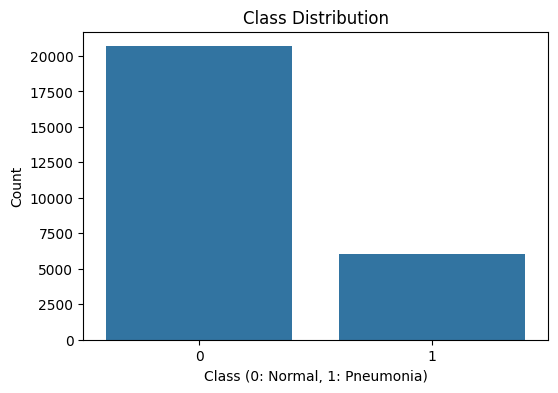

In [18]:
# 1. Data Distribution Visualizations

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=labels)
plt.title('Class Distribution')
plt.xlabel('Class (0: Normal, 1: Pneumonia)')
plt.ylabel('Count')
plt.show()

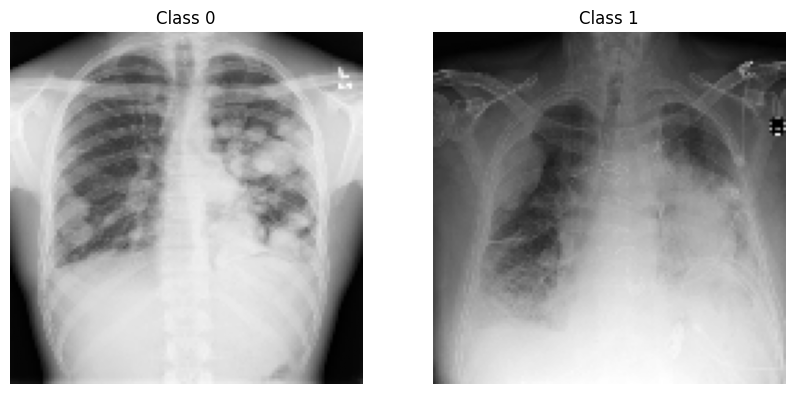

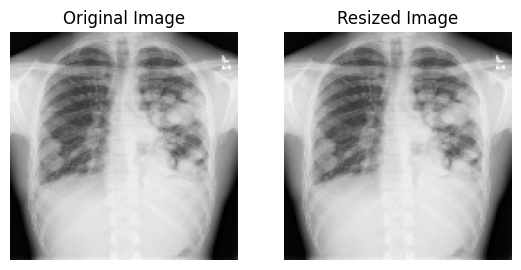

In [19]:
# 2. Image Preprocessing Visualizations

# Sample X-Ray Images
plt.figure(figsize=(10, 5))
for i in range(2):  # Show samples for both classes (0 and 1)
    plt.subplot(1, 2, i + 1)
    plt.imshow(X[y == i][0], cmap='gray')  # Display first image of each class
    plt.title(f'Class {i}')
    plt.axis('off')
plt.show()

# Preprocessing Steps (example)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(X[0], cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.resize(X[0], (img_size, img_size)), cmap='gray')
plt.title('Resized Image')
plt.axis('off')
# ... (add more preprocessing steps if needed) ...
plt.show()


# **Dimensionality Reduction and Data Projection in n-dimensional Space**

In [20]:

# Apply PCA
X_pca, pca_model = apply_pca(X, n_components=50)


Dimensionality reduced to 50 components.


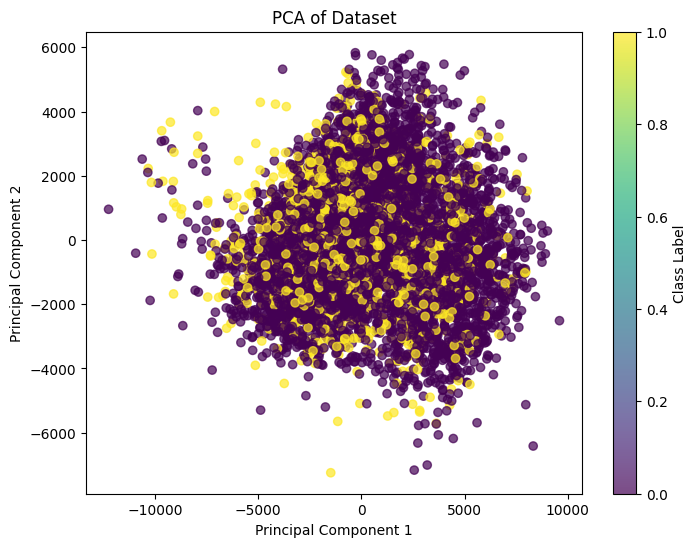

In [21]:
# PCA Plot
# Select the first two principal components
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pc1, pc2, c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar(scatter, label='Class Label')
plt.show()

In [22]:
# Apply t-SNE
# Reshape X to 2D before applying t-SNE
n_samples = X.shape[0]
X_reshaped = X.reshape(n_samples, -1)  # Flatten each image to a 1D vector
X_tsne = apply_tsne(X_reshaped, n_components=3, perplexity=30, random_state=31415)

Dimensionality reduced to 3 components using t-SNE.


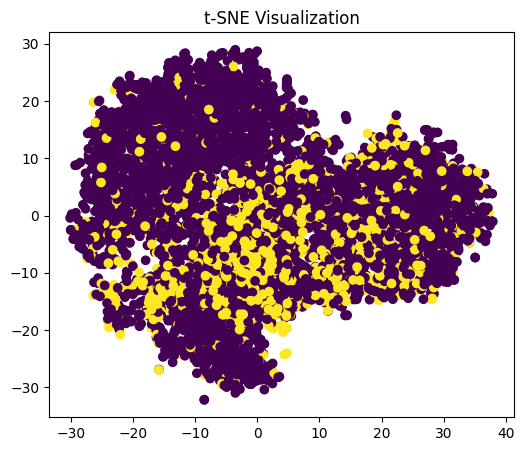

In [23]:
# 4. Feature Importance and Dimensionality Reduction

#t-SNE Plot

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization')
plt.show()

# **Models**

In [24]:

from sklearn.model_selection import train_test_split

In [25]:

# select a subset of 7000 images
# change X to X_pca or X_tsne accordingly
X_subset, _, y_subset, _ = train_test_split(X_pca, y, train_size=7000,
                                            random_state=420, stratify=y)


In [26]:

# training, testing, and validation  split

X_trains, X_tests, y_trains, y_tests = train_test_split(X_subset, y_subset, test_size=0.2, random_state=31, shuffle = True, stratify=y_subset)


In [28]:

# Reshape X_train and X_test to 2D before scaling
X_train_reshaped = X_trains.reshape(X_trains.shape[0], -1)
X_test_reshaped = X_tests.reshape(X_tests.shape[0], -1)

# scale data using the reshaped data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bals, y_train_bals = smote.fit_resample(X_train_scaled, y_trains)

# Train the SVM model again
# train SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=3)
svm_model.fit(X_train_bals, y_train_bals)


SVC(kernel='linear', random_state=3)

In [30]:

# evaluate SVM
from sklearn.metrics import classification_report, accuracy_score

# Generate predictions
y_pred1 = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_tests, y_pred1)
print('Accuracy:', accuracy)

# Generate classification report with macro averaging and zero_division handling
class_report = classification_report(y_tests, y_pred1, zero_division=0)
print('Classification Report:')
print(class_report)


Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1084
           1       0.42      0.70      0.52       316

    accuracy                           0.71      1400
   macro avg       0.65      0.71      0.66      1400
weighted avg       0.78      0.71      0.73      1400



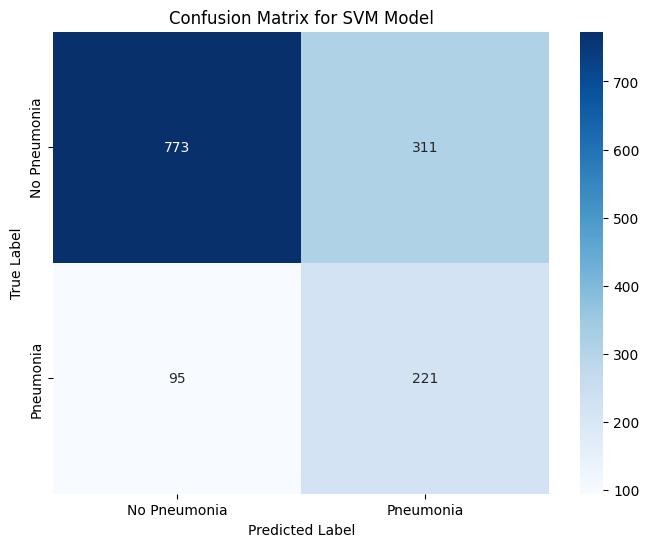

In [31]:
# Create confusion matrix
cmsvm = confusion_matrix(y_tests, y_pred1)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cmsvm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Pneumonia', 'Pneumonia'],
            yticklabels=['No Pneumonia', 'Pneumonia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [32]:
# Split into train and temporary set
X_trainfn, X_temp, y_trainfn, y_temp = train_test_split(X_pca, y, test_size=0.2, random_state=30)

# Split the temporary set into validation and test sets
X_val, X_testfn, y_val, y_testfn = train_test_split(X_temp, y_temp, test_size=0.5, random_state=30)


X_train_sc = scaler.fit_transform(X_trainfn)
X_test_sc = scaler.transform(X_testfn)

X_trainfn_bal, y_trainfn_bal = SMOTE(random_state=10).fit_resample(X_train_sc, y_trainfn)







In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
# Define the model
# Change the input shape of your model to match the data
ffnn_model = Sequential([
    Input(shape=(X_trainfn_bal.shape[1],)),  # Use the actual number of features in X_trainfn
    Flatten(),                          # Flatten the input if necessary
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')      # Binary classification output
])


In [34]:

# compile FFNN model
ffnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# fit model


ffnn_model.fit(X_trainfn_bal, y_trainfn_bal, epochs=10, batch_size=15, validation_data=(X_val, y_val))



Epoch 1/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7279 - loss: 0.5559 - val_accuracy: 0.7583 - val_loss: 342.4590
Epoch 2/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8169 - loss: 0.4107 - val_accuracy: 0.7717 - val_loss: 327.0093
Epoch 3/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8492 - loss: 0.3496 - val_accuracy: 0.7957 - val_loss: 414.4007
Epoch 4/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8853 - loss: 0.2871 - val_accuracy: 0.7917 - val_loss: 529.9590
Epoch 5/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9025 - loss: 0.2486 - val_accuracy: 0.7837 - val_loss: 623.1624
Epoch 6/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9256 - loss: 0.2050 - val_accuracy: 0.7824 - val_loss: 836.3923
Epoch 7/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9405 - loss: 0.1721 - val_accuracy: 0.7810 - val_loss: 948.1250
Epoch 8/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9575 - loss: 0.1383 - va

In [36]:

# evaluate FFNN model
ffnn_loss, ffnn_acc = ffnn_model.evaluate(X_test_sc, y_testfn)
print(f"FFNN Test Accuracy: {ffnn_acc:.2f}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7978 - loss: 0.8423 
FFNN Test Accuracy: 0.79


In [37]:
# Print performance metrics
# Generate predictions
y_pred_probs = ffnn_model.predict(X_test_sc)

# Convert probabilities to binary class labels
y_predfn = (y_pred_probs > 0.5).astype(int)

print('Accuracy:', accuracy_score(y_testfn, y_predfn))
print('Classification Report:\n', classification_report(y_testfn, y_predfn, target_names=['No Pneumonia', 'Pneumonia']))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.7850467289719626
Classification Report:
               precision    recall  f1-score   support

No Pneumonia       0.85      0.88      0.87       586
   Pneumonia       0.51      0.44      0.47       163

    accuracy                           0.79       749
   macro avg       0.68      0.66      0.67       749
weighted avg       0.77      0.79      0.78       749



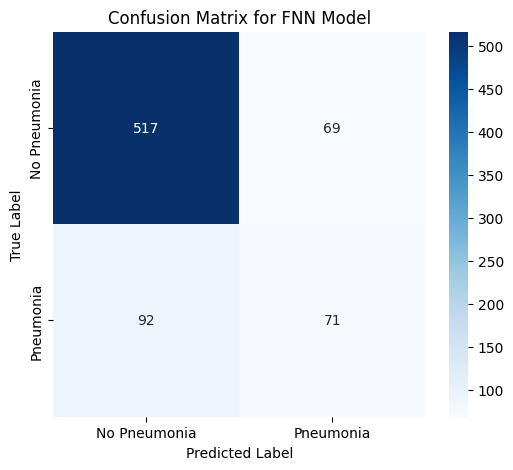

In [38]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# 3. Model Performance Visualizations

# Compute the confusion matrix
cmfn = confusion_matrix(y_testfn, y_predfn)

cm = confusion_matrix(y_testfn, y_predfn)
plt.figure(figsize=(6, 5))
sns.heatmap(cmfn, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Pneumonia', 'Pneumonia'],
                yticklabels=['No Pneumonia', 'Pneumonia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for FNN Model')
plt.show()







In [40]:
from sklearn.utils.class_weight import compute_class_weight

# Select a subset of 7000 images
X_subset, _, y_subset, _ = train_test_split(X_pca, y, train_size=7000, random_state=420, stratify=y)

# training, testing, and validation  split

X_traincn, X_testcn, y_traincn, y_testcn = train_test_split(X_subset, y_subset, test_size=0.2, random_state=31, shuffle = True)
# Reshape X_subset to have a single channel (grayscale)
# Reshape X_train and X_test to 2D before scaling
X_train_reshapedc = X_traincn.reshape(X_traincn.shape[0], -1)
X_test_reshapedc = X_testcn.reshape(X_testcn.shape[0], -1)

# Handle class imbalance: Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_subset), y=y_subset)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}


In [41]:

from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense


In [42]:
# CNN model using keras

#the images are grayscale and have shape (128, 128, 1)
def build_cnn(input_size):
    model = Sequential()
    model.add(Input(shape=(input_size, input_size, 1)))  # Input layer for grayscale images

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(np.unique(y_subset)), activation='softmax'))  # Output layer

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [43]:

#Example usage:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Build the model
cnn_model = build_cnn(128)
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,705,410 (14.14 MB)

 Trainable params: 3,705,410 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Train the model with class weights
# Select a subset of 7000 images from the original images (X) and labels (y)
X_subset, _, y_subset, _ = train_test_split(X, y, train_size=7000, random_state=420, stratify=y)

# training, testing, and validation  split

X_traincn, X_testcn, y_traincn, y_testcn = train_test_split(X_subset, y_subset, test_size=0.2, random_state=31, shuffle = True)

# Reshape X_traincn and X_testcn to the expected shape for the CNN
X_traincn = X_traincn.reshape(X_traincn.shape[0], img_size, img_size, 1)
X_testcn = X_testcn.reshape(X_testcn.shape[0], img_size, img_size, 1)

# Train the model with class weights
cnn_model.fit(X_traincn, y_traincn, epochs=10, batch_size=10, class_weight=class_weight_dict)

Epoch 1/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 148s 260ms/step - accuracy: 0.5955 - loss: 32.2424
Epoch 2/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 197s 252ms/step - accuracy: 0.7151 - loss: 0.5739
Epoch 3/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 140s 249ms/step - accuracy: 0.7663 - loss: 0.4765
Epoch 4/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 141s 247ms/step - accuracy: 0.7665 - loss: 0.4715
Epoch 5/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 135s 241ms/step - accuracy: 0.8240 - loss: 0.3635
Epoch 6/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 139s 249ms/step - accuracy: 0.8470 - loss: 0.3453
Epoch 7/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 142s 248ms/step - accuracy: 0.8915 - loss: 0.2592
Epoch 8/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 141s 247ms/step - accuracy: 0.8475 - loss: 0.3742
Epoch 9/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 146s 255ms/step - accuracy: 0.8240 - loss: 0.4674
Epoch 10/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 131s 234ms/step - accuracy: 0.8636 - loss: 0.3487


In [45]:
# Get model predictions
y_pred_probs = cnn_model.predict(X_testcn)  # Probabilities
y_predcn = np.argmax(y_pred_probs, axis=1)  # Convert to class labels


# Print performance metrics
print('Accuracy:', accuracy_score(y_testcn, y_predcn))
print('Classification Report:\n', classification_report(y_testcn, y_predcn, target_names=['No Pneumonia', 'Pneumonia']))

44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 444ms/step
Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

No Pneumonia       0.82      0.79      0.80      1098
   Pneumonia       0.33      0.38      0.35       302

    accuracy                           0.70      1400
   macro avg       0.58      0.58      0.58      1400
weighted avg       0.72      0.70      0.71      1400



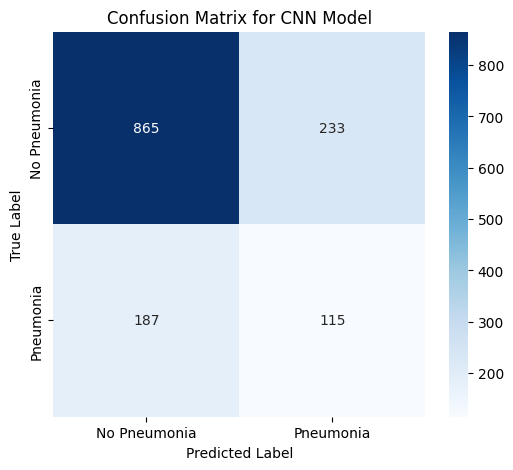

In [46]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_testcn, y_predcn)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Pneumonia', 'Pneumonia'],
            yticklabels=['No Pneumonia', 'Pneumonia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN Model')
plt.show()

# **Resources**

In [106]:
!pip install psutil

In [48]:
import time
import psutil

In [50]:
# Function to measure resource usage
def measure_resources(func, *args, **kwargs):
    start_time = time.time()
    process = psutil.Process(os.getpid())
    start_memory = process.memory_info().rss  # Resident Set Size (RSS) in bytes

    result = func(*args, **kwargs)

    end_time = time.time()
    end_memory = process.memory_info().rss
    cpu_usage = psutil.cpu_percent(interval=end_time - start_time)

    run_time = end_time - start_time
    memory_usage = (end_memory - start_memory) / (1024**2)  # Convert to MB

    return result, run_time, cpu_usage, memory_usage



# --- SVM ---
print("Training SVM...")
_, svm_run_time, svm_cpu_usage, svm_memory_usage = measure_resources(
    svm_model.fit,X_train_bals, y_train_bals
  # Use the correct y_train_svm here
)

# Print SVM resource usage
print(f"SVM Run Time: {svm_run_time:.2f} seconds")
print(f"SVM CPU Usage: {svm_cpu_usage:.2f}%")
print(f"SVM Memory Usage: {svm_memory_usage:.2f} MB")

# --- FFNN ---
print("\nTraining FFNN...")


_, ffnn_run_time, ffnn_cpu_usage, ffnn_memory_usage = measure_resources(ffnn_model.fit,X_trainfn_bal, y_trainfn_bal, epochs=10, batch_size=15, validation_data=(X_val, y_val))


print(f"FFNN Run Time: {ffnn_run_time:.2f} seconds")
print(f"FFNN CPU Usage: {ffnn_cpu_usage:.2f}%")
print(f"FFNN Memory Usage: {ffnn_memory_usage:.2f} MB")


# --- CNN ---
print("\nTraining CNN...")
cnn_model = build_cnn(128)  # Assuming build_cnn function is defined

_, cnn_run_time, cnn_cpu_usage, cnn_memory_usage = measure_resources(cnn_model.fit,X_traincn, y_traincn, epochs=10, batch_size=10, class_weight=class_weight_dict)

print(f"CNN Run Time: {cnn_run_time:.2f} seconds")
print(f"CNN CPU Usage: {cnn_cpu_usage:.2f}%")
print(f"CNN Memory Usage: {cnn_memory_usage:.2f} MB")

Training SVM...
SVM Run Time: 14.29 seconds
SVM CPU Usage: 18.70%
SVM Memory Usage: 62.91 MB

Training FFNN...
Epoch 1/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0760 - val_accuracy: 0.7824 - val_loss: 1666.4608
Epoch 2/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9789 - loss: 0.0670 - val_accuracy: 0.7824 - val_loss: 1618.1827
Epoch 3/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9887 - loss: 0.0479 - val_accuracy: 0.7904 - val_loss: 1843.7832
Epoch 4/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9903 - loss: 0.0430 - val_accuracy: 0.7864 - val_loss: 1885.4761
Epoch 5/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9919 - loss: 0.0342 - val_accuracy: 0.7824 - val_loss: 2047.9932
Epoch 6/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9933 - loss: 0.0302 - val_accuracy: 0.7824 - val_loss: 2353.6267
Epoch 7/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9926 - loss: 0.0272 - val_accuracy: 0

In [58]:
# train SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=3, probability=True) # Set probability=True
svm_model.fit(X_train_bals, y_train_bals)

SVC(kernel='linear', probability=True, random_state=3)

# **Visualizations of Results**

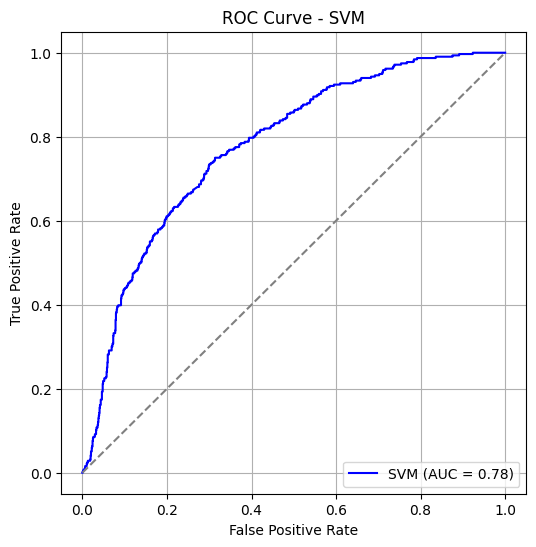

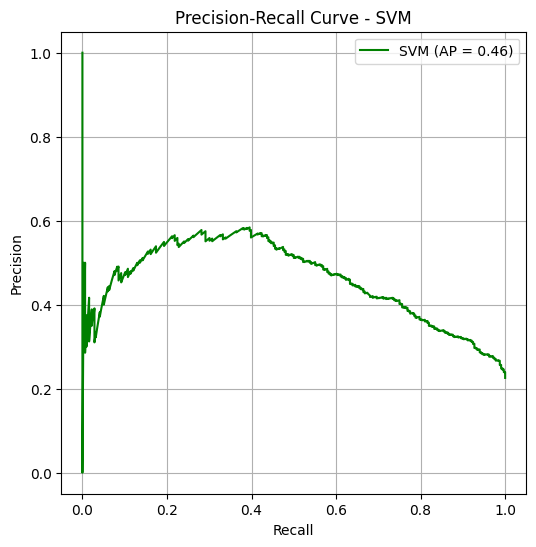

In [62]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Function to plot the ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred1 = model.predict_proba(X_test_scaled)[:, 1]  # Get predicted probabilities for class 1
    fpr, tpr, _ = roc_curve(y_tests, y_pred1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Function to plot the Precision-Recall Curve
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_pred1 = model.predict_proba(X_test_scaled)[:, 1]  # Get predicted probabilities for class 1
    precision, recall, _ = precision_recall_curve(y_tests, y_pred1)
    avg_precision = average_precision_score(y_tests, y_pred1)

    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='green', label=f'{model_name} (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

# Call functions for SVM
plot_roc_curve(svm_model, X_test_scaled, y_tests, 'SVM')
plot_precision_recall_curve(svm_model, X_test_scaled, y_tests, 'SVM')





24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


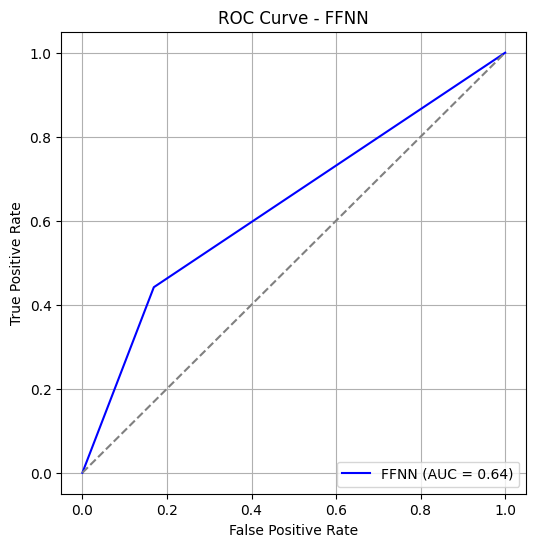

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


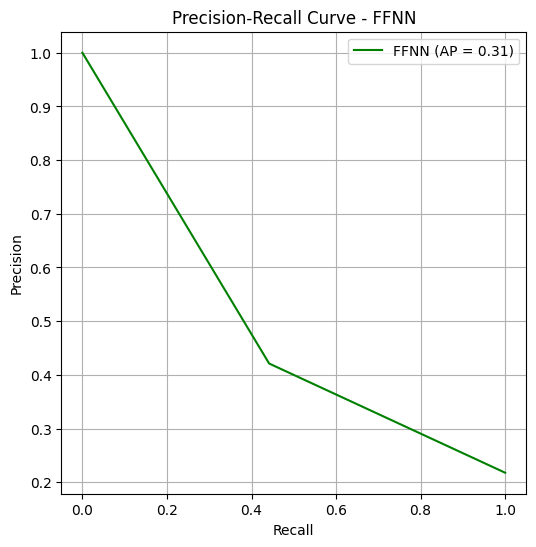

In [66]:
# Plot ROC and Precision-Recall curves
# Function to plot the ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name):

    y_pred_probs = model.predict(X_test) # Predict on the same data used for y_test
    # Convert probabilities to binary class labels
    y_predfn = (y_pred_probs > 0.5).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_predfn) # Use the corresponding y_test
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Function to plot the Precision-Recall Curve
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_pred_probs = model.predict(X_test)  # Predict on the same data used for y_test
    # Convert probabilities to binary class labels (if necessary)
    y_predfn = (y_pred_probs > 0.5).astype(int)

    precision, recall, _ = precision_recall_curve(y_test, y_predfn)  # Use corresponding y_test
    avg_precision = average_precision_score(y_test, y_predfn)  # Use corresponding y_test

    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='green', label=f'{model_name} (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

plot_roc_curve(ffnn_model, X_test_sc, y_testfn, 'FFNN')
plot_precision_recall_curve(ffnn_model, X_test_sc, y_testfn, 'FFNN')

Epoch 1/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9702 - loss: 0.0897 - val_accuracy: 0.7877 - val_loss: 2404.0554
Epoch 2/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9922 - loss: 0.0289 - val_accuracy: 0.7877 - val_loss: 2474.8599
Epoch 3/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.7864 - val_loss: 2695.8342
Epoch 4/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9929 - loss: 0.0258 - val_accuracy: 0.7904 - val_loss: 2695.0623
Epoch 5/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9934 - loss: 0.0234 - val_accuracy: 0.7944 - val_loss: 2801.3545
Epoch 6/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9912 - loss: 0.0270 - val_accuracy: 0.7877 - val_loss: 3040.5889
Epoch 7/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9915 - loss: 0.0262 - val_accuracy: 0.7877 - val_loss: 3078.3027
Epoch 8/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9

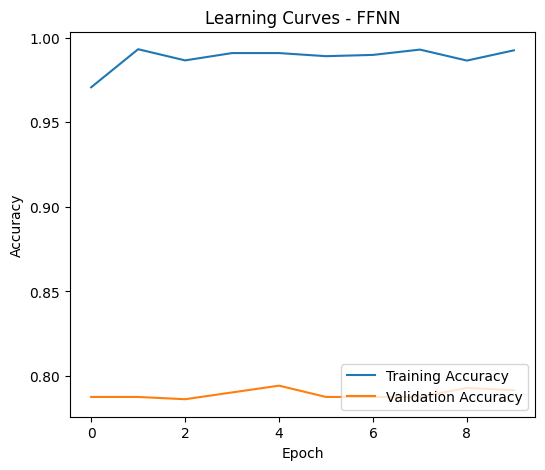

In [68]:
# Learning Curves for FFNN
history = ffnn_model.fit(X_trainfn_bal, y_trainfn_bal, epochs=10, batch_size=8, validation_data=(X_val, y_val)) # Assuming you have saved the history from training
plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curves - FFNN')
plt.legend(loc="lower right")
plt.show()